In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
from decimal import Decimal
from matplotlib import pyplot as plt
from statistics import stdev
from sklearn.utils import shuffle

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/LuanVan'

/content/drive/MyDrive/Colab Notebooks/LuanVan


In [ ]:
data_train = pd.read_csv('data/train.csv')
data_train

area  floors  location  to center       price
0     40.0     3.0         1        0.0  3350000000
1     75.0     3.0         1        0.0  4250000000
2     90.0     3.0         1        4.2  6950000000
3     26.0     2.0         2        0.0  1490000000
4    125.0     4.0         1        5.3  7000000000
..     ...     ...       ...        ...         ...
295   98.0     0.0         1        6.0  2550000000
296   55.0     0.0         2        7.0  1600000000
297   72.0     0.0         2        6.7  1950000000
298   50.0     0.0         2        6.7  1750000000
299   72.0     0.0         2        6.0  2000000000

[300 rows x 5 columns]

In [ ]:
data_train = data_train.sample(frac=1, random_state=20).reset_index(drop=True)
data_train

area  floors  location  to center       price
0     44.0     0.0         2        7.0  1590000000
1     72.0     0.0         2        6.7  1950000000
2    116.0     2.0         1       11.0  7300000000
3     75.0     0.0         1        5.7  2450000000
4     90.0     2.0         1        0.0  4700000000
..     ...     ...       ...        ...         ...
295   79.8     3.0         1        5.8  5600000000
296   44.0     0.0         2        0.0  1650000000
297   95.0     0.0         1        6.7  2400000000
298   75.0     0.0         2        6.8  1430000000
299   75.0     0.0         2        0.0  2530000000

[300 rows x 5 columns]

In [ ]:
data_test = pd.read_csv('data/test.csv')
data_test

area  floors  location  to center       price
0   65.0     2.0         1        4.4  3250000000
1   50.0     2.0         2        7.0  2350000000
2   57.0     2.0         1        7.0  2850000000
3   57.0     2.0         2        4.7  2450000000
4   80.0     2.0         1        6.0  2600000000
..   ...     ...       ...        ...         ...
95  77.0     0.0         2        0.0  2250000000
96  70.0     0.0         1        0.0  3150000000
97  50.0     0.0         2        0.0  1790000000
98  74.0     0.0         2        0.0  1980000000
99  84.0     0.0         2        0.0  2350000000

[100 rows x 5 columns]

In [ ]:
data_test = data_test.sample(frac=1, random_state=20).reset_index(drop=True)
data_test

area  floors  location  to center       price
0    90.0     0.0         2        0.0  2750000000
1   110.0     0.0         1        7.2  2300000000
2    57.0     2.0         1        7.0  2850000000
3    65.0     2.0         1        5.0  3250000000
4    74.0     3.0         2        0.0  4490000000
..    ...     ...       ...        ...         ...
95   40.0     3.0         2        0.0  2900000000
96   77.0     0.0         2        0.0  2250000000
97   45.0     2.0         2        4.8  2350000000
98   72.0     0.0         1        5.8  2150000000
99   84.0     0.0         2        0.0  2350000000

[100 rows x 5 columns]

In [ ]:
def process_price(X):
  for i in range(len(X.price)):
    X.price[i] = str(X.price[i])[:-6]
    X.price[i] = int(X.price[i])

In [ ]:
def scaling_data(X, col):
  for i in range(len(X[col])):
    X[col][i] = (X[col][i] - min(X[col]))/(max(X[col]) - min(X[col]))

In [ ]:
process_price(data_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
process_price(data_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# scaling_data(data_train, 'area')
# scaling_data(data_train, 'to center')
# scaling_data(data_train, 'floors')
# scaling_data(data_train, 'home location')
# data_train

In [ ]:
# scaling_data(dt_test_scaled, 'area')
# scaling_data(dt_test_scaled, 'floors')
# scaling_data(dt_test_scaled, 'to center')
# scaling_data(dt_test_scaled, 'home location')
# dt_test_scaled

In [ ]:
X_train = data_train[['area', 'floors', 'location', 'to center']]
y_train = data_train.price

In [ ]:
X_test = data_test[['area', 'floors', 'location', 'to center']]
y_test = data_test.price

In [ ]:
def find_Param(X, y, a0, a1, a2, a3, a4, lr):
  za1 = 0.0
  za2 = 0.0
  za3 = 0.0
  za4 = 0.0
  za0 = 0.0
  n = len(y)

  for i in range(n):
    za0 += a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['location'][i] + a4*X['to center'][i] - y[i]

    za1 += X['area'][i] * (a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['location'][i] + a4*X['to center'][i] - y[i])

    za2 += X['floors'][i] * (a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['location'][i] + a4*X['to center'][i] - y[i])

    za3 += X['location'][i] * (a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['location'][i] + a4*X['to center'][i] - y[i])

    za4 += X['to center'][i] * (a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['location'][i] + a4*X['to center'][i] - y[i])

  a0 -= (za0/n) * lr
  a1 -= (za1/n) * lr
  a2 -= (za2/n) * lr
  a3 -= (za3/n) * lr
  a4 -= (za4/n) * lr

  return a0, a1, a2, a3, a4

In [ ]:
def Loss(X, y, a0, a1, a2, a3, a4):
  sum = 0
  n = len(y)
  for i in range(n):
    sum += (y[i] - (a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['location'][i] + a4*X['to center'][i]))**2

  return (sum/n)**0.5

In [ ]:
def train(X, y, a0, a1, a2, a3, a4, lr1, iter):
  loss_hist = []
  for i in tqdm(range(iter), desc="loading..."):
    a0, a1, a2, a3, a4 = find_Param(X, y, a0, a1, a2, a3, a4, lr1)
    mean_sum_loss = Loss(X, y, a0, a1, a2, a3, a4)
    print(mean_sum_loss)
    loss_hist.append(mean_sum_loss)


  return a0, a1, a2, a3, a4, loss_hist

In [ ]:
def predict(X, a0, a1, a2, a3, a4):
  y_pred_hist = []
  n = len(X)
  for i in range(n):
    y_pred = a0 + a1*X['area'][i] + a2*X['floors'][i] + a3*X['location'][i] + a4*X['to center'][i]
    y_pred_hist.append(y_pred)
  return y_pred_hist

In [ ]:
def Rmse(y_pred, y_target):
  n = len(y_pred)
  ans = 0.0
  for i in range(n):
    ans += (y_pred[i] - y_target[i])**2
  return math.sqrt(ans/n)
  
def R2(y_pred, y_target):
  ans1 = 0.0
  ans2 = 0.0
  n = len(y_pred)

  for i in range(n):
    ans1 += (y_target[i] - y_pred[i])**2
    ans2 += (y_target[i] - np.mean(y_target))**2

  return (1 - (ans1/ans2))

def R2_Correction(y_pred, y_target):
  n = len(y_pred)
  return 1 - ((n - 1)/(n - 5))*(1 - R2(y_pred, y_target))

def Mse(y_pred, y_target):
  ans = 0.0
  n = len(y_pred)

  for i in range(n):
    ans += (y_target[i] - y_pred[i])**2

  return ans/n

In [ ]:
def create_Param():
  q = []
  for i in range(5):
    q.append(Decimal('0.2'))
  return q

In [ ]:
def quality_evalution_model(X, y_target, list_param_a):
  y_pred = predict(X, list_param_a[0], list_param_a[1], list_param_a[2], list_param_a[3], list_param_a[4])

  rmse_score = Rmse(y_pred, y_target)
  r2_score = R2(y_pred, y_target)
  r2_correction = R2_Correction(y_pred, y_target)
  list_param = []
  
  list_param.append(rmse_score)
  list_param.append(r2_score)
  list_param.append(r2_correction)

  return list_param

In [ ]:
def improve_training(X, y, q, lr, iter):
  list_param = []
  a0, a1, a2, a3, a4, loss= train(X, y, float(q[0]), float(q[1]), float(q[2]), float(q[3]), float(q[4]), lr, iter)
  
  list_param.append(a0)
  list_param.append(a1)
  list_param.append(a2)
  list_param.append(a3)
  list_param.append(a4)
  
  return list_param

In [ ]:
import csv

def save_csv(name_f, list_trained):
  header = ['a0', 'a1', 'a2', 'a3', 'a4', 'RMSE', 'R2', 'R2 hieu chinh', 'a0_final', 'a1_final', 'a2_finale', 'a3_final', 'a4_final']

  for i in list_trained:
    for j in range(len(i)):
      i[j] = float(i[j])

  with open(name_f, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(list_trained)

In [ ]:
def training(X_train, y_train, X_test, y_test, value_str, lr, iter, name_save):
  list_hist_train = []
  t = 0
  for i in range(6):
    print(i)
    q = create_Param()
    if i == 0:
      list_param_a = improve_training(X_train, y_train, q, lr, iter)
      list_quality = quality_evalution_model(X_test, y_test, list_param_a)
      full_list = q + list_quality + list_param_a
      list_hist_train.append(full_list)
    if t == i:
      continue
    else:
      t = 1
      c = i - 1
      while True:
        if Decimal(q[c]) < Decimal('1'):
          if t <= 5:
            if (t+c-i) == (i-1):
              t += 1
            else:
              q[c] += Decimal(value_str)
              q[t+c-i] -= Decimal(value_str)
              t += 1
              list_param_a = improve_training(X_train, y_train, q, lr, iter)
              list_quality = quality_evalution_model(X_test, y_test, list_param_a)
              full_list = q + list_quality + list_param_a
              list_hist_train.append(full_list)
          else:
            t = 1
        else:
          t = 0
          break

  save_csv(name_save, list_hist_train)
  print('----------Save successfully--------')

In [ ]:
training(X_train, y_train, X_test, y_test, '0.1', 0.0001, 1000, 'history_scaled_0605_1_0001_1000.csv')

In [ ]:
hist_train_dt = pd.read_csv('history_scaled_0605_1_0001_1000.csv')
hist_train_dt

In [ ]:
a0, a1, a2, a3, a4, loss= train(X_train, y_train, 0, 0, 0, 0, 0, 0.0001, 30000)

loading...:   0%|          | 4/30000 [00:00<31:04, 16.09it/s]

1945.61199623469
1701.6850390389184
1674.872755515201
1671.8864520247828


loading...:   0%|          | 8/30000 [00:00<31:58, 15.63it/s]

1671.325365248219
1671.009513240746
1670.7189227515557
1670.431416992329


loading...:   0%|          | 12/30000 [00:00<31:05, 16.07it/s]

1670.144758791479
1669.8587208543868
1669.573278481569
1669.2884274004991


loading...:   0%|          | 16/30000 [00:01<31:24, 15.91it/s]

1669.0041654036563
1668.7204904976952
1668.4374007168512
1668.154894104132


loading...:   0%|          | 20/30000 [00:01<32:50, 15.22it/s]

1667.8729687093937
1667.5916225891312
1667.3108538064355
1667.03066043098


loading...:   0%|          | 24/30000 [00:01<31:55, 15.65it/s]

1666.7510405389894
1666.4719922132267
1666.1935135429708
1665.9156026239948


loading...:   0%|          | 28/30000 [00:01<31:04, 16.08it/s]

1665.6382575585503
1665.36147645534
1665.0852574295054
1664.809598602604


loading...:   0%|          | 32/30000 [00:02<31:11, 16.01it/s]

1664.5344981025873
1664.2599540637823
1663.9859646268742
1663.7125279388827


loading...:   0%|          | 36/30000 [00:02<32:08, 15.54it/s]

1663.4396421531455
1663.1673054292971
1662.8955159332468
1662.624271837167


loading...:   0%|          | 40/30000 [00:02<31:09, 16.02it/s]

1662.353571319461
1662.0834125647575
1661.813793763882
1661.54471311384


loading...:   0%|          | 44/30000 [00:02<30:22, 16.43it/s]

1661.2761688177964
1661.0081590850616
1660.7406821310637
1660.4737361773361


loading...:   0%|          | 48/30000 [00:03<30:13, 16.51it/s]

1660.2073194514958
1659.9414301872232
1659.6760666242478
1659.4112270083228


loading...:   0%|          | 52/30000 [00:03<31:18, 15.94it/s]

1659.146909591209
1658.8831126306575
1658.6198343903905
1658.3570731400796


loading...:   0%|          | 56/30000 [00:03<30:58, 16.11it/s]

1658.0948271553289
1657.8330947176566
1657.5718741144776
1657.3111636390806


loading...:   0%|          | 60/30000 [00:03<31:03, 16.07it/s]

1657.050961590614
1656.791266274067
1656.5320760002444
1656.2733890857605


loading...:   0%|          | 64/30000 [00:04<30:42, 16.25it/s]

1656.015203853008
1655.757518630149
1655.5003317510923
1655.2436415554741


loading...:   0%|          | 68/30000 [00:04<31:05, 16.04it/s]

1654.987446388645
1654.7317446016443
1654.476534551191
1654.2218145996567


loading...:   0%|          | 72/30000 [00:04<31:13, 15.97it/s]

1653.967583115054
1653.713838471017
1653.4605790467797
1653.2078032271638


loading...:   0%|          | 76/30000 [00:04<30:39, 16.27it/s]

1652.9555094025577
1652.7036959688978
1652.4523613276551
1652.2015038858121


loading...:   0%|          | 80/30000 [00:04<30:15, 16.48it/s]

1651.951122055848
1651.7012142557217
1651.4517789088518
1651.2028144441047


loading...:   0%|          | 84/30000 [00:05<30:24, 16.40it/s]

1650.9543192957674
1650.7062919035397
1650.4587307125125
1650.2116341731487


loading...:   0%|          | 88/30000 [00:05<31:33, 15.80it/s]

1649.965000741272
1649.718828878042
1649.4731170499417
1649.2278637287616


loading...:   0%|          | 92/30000 [00:05<31:13, 15.97it/s]

1648.9830673915794
1648.738726520743
1648.4948396038574
1648.251405133761


loading...:   0%|          | 96/30000 [00:05<30:37, 16.27it/s]

1648.0084216085156
1647.7658875313862
1647.5238014108247
1647.2821617604502


loading...:   0%|          | 100/30000 [00:06<31:20, 15.90it/s]

1647.0409670990382
1646.800215950502
1646.5599068438705
1646.3200383132798


loading...:   0%|          | 104/30000 [00:06<33:15, 14.98it/s]

1646.0806088979502
1645.8416171421748
1645.6030615952996
1645.3649408117046


loading...:   0%|          | 108/30000 [00:06<32:06, 15.51it/s]

1645.1272533507977
1644.889997776987
1644.65317265967
1644.4167765732168


loading...:   0%|          | 112/30000 [00:07<31:20, 15.90it/s]

1644.180808096952
1643.945265815145
1643.7101483169831
1643.4754541965644


loading...:   0%|          | 116/30000 [00:07<31:12, 15.96it/s]

1643.2411820528785
1643.0073304897921
1642.7738981160292
1642.5408835451583


loading...:   0%|          | 120/30000 [00:07<31:39, 15.73it/s]

1642.3082853955789
1642.0761022904996
1641.8443328579278
1641.6129757306512


loading...:   0%|          | 124/30000 [00:07<30:54, 16.11it/s]

1641.3820295462228
1641.1514929469447
1640.9213645798538
1640.6916430967049


loading...:   0%|          | 128/30000 [00:08<30:20, 16.41it/s]

1640.462327153958
1640.233415412758
1640.0049065389235
1639.776799202931


loading...:   0%|          | 132/30000 [00:08<30:31, 16.31it/s]

1639.5490920798948
1639.321783849562
1639.0948731962835
1638.8683588090112


loading...:   0%|          | 136/30000 [00:08<30:38, 16.24it/s]

1638.6422393812777
1638.4165136111772
1638.1911802013567
1637.9662378590042


loading...:   0%|          | 140/30000 [00:08<30:05, 16.54it/s]

1637.741685295818
1637.51752122801
1637.2937443762817
1637.070353465807


loading...:   0%|          | 144/30000 [00:09<29:46, 16.72it/s]

1636.8473472262253
1636.6247243916187
1636.4024837005054
1636.1806238958168


loading...:   0%|          | 148/30000 [00:09<29:58, 16.60it/s]

1635.959143724887
1635.7380419394424
1635.5173172955758
1635.2969685537448


loading...:   1%|          | 152/30000 [00:09<30:39, 16.23it/s]

1635.0769944787467
1634.8573938397137
1634.6381654100885
1634.4193079676193


loading...:   1%|          | 156/30000 [00:09<30:21, 16.39it/s]

1634.200820294336
1633.9827011765456
1633.7649494048123
1633.5475637739444


loading...:   1%|          | 160/30000 [00:09<30:03, 16.54it/s]

1633.3305430829803
1633.1138861351735
1632.897591737982
1632.6816587030473


loading...:   1%|          | 164/30000 [00:10<30:24, 16.35it/s]

1632.4660858461882
1632.2508719873863
1632.036015950762
1631.8215165645731


loading...:   1%|          | 168/30000 [00:10<31:13, 15.92it/s]

1631.6073726611953
1631.3935830771077
1631.1801466528825
1630.9670622331664


loading...:   1%|          | 172/30000 [00:10<30:26, 16.33it/s]

1630.7543286666726
1630.541944806162
1630.3299095084333
1630.1182216343088


loading...:   1%|          | 176/30000 [00:10<30:14, 16.44it/s]

1629.9068800486177
1629.6958836201875
1629.485231221829
1629.2749217303192


loading...:   1%|          | 180/30000 [00:11<30:09, 16.48it/s]

1629.0649540263944
1628.8553269947313
1628.6460395239358
1628.4370905065327


loading...:   1%|          | 184/30000 [00:11<31:12, 15.92it/s]

1628.228478838946
1628.0202034214938
1627.8122631583667
1627.6046569576226


loading...:   1%|          | 188/30000 [00:11<30:55, 16.07it/s]

1627.3973837311662
1627.1904423947456
1626.9838318679276
1626.7775510740953


loading...:   1%|          | 192/30000 [00:11<30:28, 16.30it/s]

1626.5715989404298
1626.3659743978963
1626.1606763812358
1625.95570382895


loading...:   1%|          | 196/30000 [00:12<31:23, 15.82it/s]

1625.751055683286
1625.54673089023
1625.3427283994877
1625.1390471644772


loading...:   1%|          | 200/30000 [00:12<32:28, 15.30it/s]

1624.9356861423132
1624.7326442937938
1624.5299205833926
1624.327513979241


loading...:   1%|          | 204/30000 [00:12<31:04, 15.98it/s]

1624.1254234531198
1623.9236479804433
1623.722186540251
1623.5210381151928


loading...:   1%|          | 208/30000 [00:12<30:37, 16.22it/s]

1623.320201691514
1623.119676259049
1622.919460811207
1622.7195543449568


loading...:   1%|          | 212/30000 [00:13<31:31, 15.75it/s]

1622.5199558608185
1622.3206643628484
1622.1216788586307
1621.922998359262


loading...:   1%|          | 216/30000 [00:13<31:47, 15.62it/s]

1621.7246218793407
1621.526548436957
1621.3287770536735
1621.1313067545257


loading...:   1%|          | 220/30000 [00:13<30:53, 16.07it/s]

1620.9341365680018
1620.7372655260256
1620.5406926639637
1620.3444170205914


loading...:   1%|          | 224/30000 [00:13<30:54, 16.06it/s]

1620.1484376380963
1619.9527535620614
1619.7573638414522
1619.5622675286088


loading...:   1%|          | 228/30000 [00:14<30:31, 16.25it/s]

1619.3674636792314
1619.17295135237
1618.9787296104125
1618.7847975190734


loading...:   1%|          | 232/30000 [00:14<31:25, 15.79it/s]

1618.5911541473833
1618.397798567677
1618.2047298555792
1618.0119470900008


loading...:   1%|          | 236/30000 [00:14<30:40, 16.17it/s]

1617.8194493531194
1617.6272357303712
1617.4353053104423
1617.2436571852547


loading...:   1%|          | 240/30000 [00:14<30:23, 16.32it/s]

1617.0522904499558
1616.8612042029079
1616.670397545674
1616.4798695830152


loading...:   1%|          | 244/30000 [00:15<30:26, 16.29it/s]

1616.2896194228676
1616.0996461763439
1615.9099489577113
1615.7205268843888


loading...:   1%|          | 248/30000 [00:15<30:32, 16.24it/s]

1615.5313790769321
1615.3425046590248
1615.1539027574665
1614.9655725021623


loading...:   1%|          | 252/30000 [00:15<31:27, 15.76it/s]

1614.777513026113
1614.5897234654026
1614.4022029591906
1614.2149506496967


loading...:   1%|          | 256/30000 [00:15<30:55, 16.03it/s]

1614.0279656821972
1613.8412472050047
1613.6547943694684
1613.4686063299575


loading...:   1%|          | 260/30000 [00:16<31:18, 15.83it/s]

1613.28268224385
1613.0970212715256
1612.911622576354
1612.7264853246827


loading...:   1%|          | 264/30000 [00:16<30:36, 16.20it/s]

1612.54160868583
1612.3569918320734
1612.1726339386369
1611.988534183688


loading...:   1%|          | 268/30000 [00:16<30:49, 16.07it/s]

1611.8046917483164
1611.621105816532
1611.4377755752555
1611.2547002143037


loading...:   1%|          | 272/30000 [00:16<30:37, 16.18it/s]

1611.071878926382
1610.8893109070732
1610.7069953548266
1610.5249314709538


loading...:   1%|          | 276/30000 [00:17<30:29, 16.25it/s]

1610.3431184596104
1610.1615555277922
1609.9802418853242
1609.7991767448486


loading...:   1%|          | 280/30000 [00:17<30:44, 16.12it/s]

1609.6183593218173
1609.4377888344798
1609.2574645038785
1609.077385553831


loading...:   1%|          | 284/30000 [00:17<30:53, 16.03it/s]

1608.897551210927
1608.7179607045189
1608.5386132667052
1608.3595081323306


loading...:   1%|          | 288/30000 [00:17<30:36, 16.17it/s]

1608.180644538967
1608.0020217269123
1607.8236389391736
1607.645495421464


loading...:   1%|          | 292/30000 [00:18<30:31, 16.22it/s]

1607.4675904221888
1607.2899231924396
1607.1124929859805
1606.9352990592458


loading...:   1%|          | 296/30000 [00:18<30:51, 16.04it/s]

1606.7583406713195
1606.5816170839387
1606.4051275614763
1606.2288713709345


loading...:   1%|          | 300/30000 [00:18<30:46, 16.08it/s]

1606.052847781934
1605.8770560667072
1605.7014955000889
1605.5261653595014


loading...:   1%|          | 304/30000 [00:18<30:34, 16.19it/s]

1605.3510649249574
1605.1761934790384
1605.0015503068923
1604.8271346962224


loading...:   1%|          | 308/30000 [00:19<30:21, 16.30it/s]

1604.6529459372823
1604.4789833228626
1604.305246148282
1604.13173371138


loading...:   1%|          | 312/30000 [00:19<30:41, 16.12it/s]

1603.9584453125105
1603.7853802545276
1603.612537842781
1603.4399173851054


loading...:   1%|          | 316/30000 [00:19<30:53, 16.01it/s]

1603.2675181918144
1603.0953395756842
1602.9233808519573
1602.751641338322


loading...:   1%|          | 320/30000 [00:19<30:39, 16.13it/s]

1602.580120354913
1602.4088172242955
1602.2377312714605
1602.066861823816


loading...:   1%|          | 324/30000 [00:20<30:33, 16.18it/s]

1601.8962082111782
1601.7257697657649
1601.5555458221809
1601.3855357174173


loading...:   1%|          | 328/30000 [00:20<30:20, 16.30it/s]

1601.2157387908385
1601.0461543841757
1600.8767818415165
1600.7076205093003


loading...:   1%|          | 332/30000 [00:20<30:50, 16.03it/s]

1600.5386697363065
1600.3699288736466
1600.2013972747586
1600.0330742953956


loading...:   1%|          | 336/30000 [00:20<30:41, 16.11it/s]

1599.864959293622
1599.6970516297993
1599.5293506665823
1599.361855768913


loading...:   1%|          | 340/30000 [00:21<30:56, 15.98it/s]

1599.194566304004
1599.0274816413398
1598.8606011526665
1598.6939242119772


loading...:   1%|          | 344/30000 [00:21<31:03, 15.91it/s]

1598.5274501955141
1598.361178481752
1598.1951084513976
1598.0292394873768


loading...:   1%|          | 348/30000 [00:21<31:19, 15.77it/s]

1597.8635709748257
1597.6981023010906
1597.5328328557098
1597.3677620304134


loading...:   1%|          | 352/30000 [00:21<30:33, 16.17it/s]

1597.2028892191129
1597.038213817894
1596.873735225009
1596.7094528408666


loading...:   1%|          | 356/30000 [00:22<30:25, 16.24it/s]

1596.545366068028
1596.3814743112
1596.2177769772209
1596.05427347506


loading...:   1%|          | 360/30000 [00:22<31:06, 15.88it/s]

1595.8909632158059
1595.727845612661
1595.5649200809344
1595.4021860380328


loading...:   1%|          | 364/30000 [00:22<31:17, 15.78it/s]

1595.239642903452
1595.0772900987752
1594.9151270476561
1594.7531531758216


loading...:   1%|          | 368/30000 [00:22<31:01, 15.92it/s]

1594.5913679110581
1594.4297706832078
1594.2683609241567
1594.107138067833


loading...:   1%|          | 372/30000 [00:23<31:05, 15.88it/s]

1593.946101550194
1593.785250809227
1593.624585284933
1593.4641044193254


loading...:   1%|▏         | 376/30000 [00:23<30:53, 15.99it/s]

1593.303807656419
1593.143694442232
1592.9837642247617
1592.8240164539943


loading...:   1%|▏         | 380/30000 [00:23<30:32, 16.16it/s]

1592.664450581891
1592.5050660623806
1592.3458623513504
1592.1868389066467


loading...:   1%|▏         | 384/30000 [00:23<30:27, 16.21it/s]

1592.0279951880607
1591.8693306573227
1591.7108447780997
1591.552537015982


loading...:   1%|▏         | 388/30000 [00:24<30:32, 16.16it/s]

1591.3944068384828
1591.236453715026
1591.0786771169426
1590.9210765174632


loading...:   1%|▏         | 392/30000 [00:24<30:29, 16.18it/s]

1590.7636513917103
1590.6064012166928
1590.449325471299
1590.2924236362885


loading...:   1%|▏         | 396/30000 [00:24<30:14, 16.31it/s]

1590.1356951942896
1589.9791396297844
1589.8227564291128
1589.6665450804592


loading...:   1%|▏         | 400/30000 [00:24<30:38, 16.10it/s]

1589.5105050738453
1589.3546359011277
1589.1989370559888
1589.04340803393


loading...:   1%|▏         | 404/30000 [00:25<30:24, 16.22it/s]

1588.8880483322664
1588.732857450121
1588.5778348884146
1588.4229801498645


loading...:   1%|▏         | 408/30000 [00:25<30:37, 16.11it/s]

1588.268292738974
1588.1137721620282
1587.9594179270862
1587.805229543976


loading...:   1%|▏         | 412/30000 [00:25<30:48, 16.01it/s]

1587.651206524288
1587.4973483813674
1587.343654630311
1587.190124787956


loading...:   1%|▏         | 416/30000 [00:25<30:54, 15.95it/s]

1587.0367583728782
1586.883554905386
1586.7305139075083
1586.5776349029964


loading...:   1%|▏         | 420/30000 [00:26<30:51, 15.97it/s]

1586.4249174173117
1586.2723609776215
1586.119965112796
1585.967729353396


loading...:   1%|▏         | 424/30000 [00:26<31:32, 15.63it/s]

1585.8156532316732
1585.6637362815582
1585.5119780386601
1585.360378040256


loading...:   1%|▏         | 428/30000 [00:26<31:11, 15.80it/s]

1585.2089358252895
1585.0576509343587
1584.906522909717
1584.755551295261


loading...:   1%|▏         | 432/30000 [00:26<31:31, 15.63it/s]

1584.6047356365307
1584.4540754806956
1584.3035703765584
1584.1532198745438


loading...:   1%|▏         | 436/30000 [00:27<31:43, 15.53it/s]

1584.0030235266886
1583.8529808866472
1583.7030915096757
1583.5533549526285


loading...:   1%|▏         | 440/30000 [00:27<31:10, 15.80it/s]

1583.4037707739567
1583.2543385336978
1583.1050577934711
1582.9559281164752


loading...:   1%|▏         | 444/30000 [00:27<30:39, 16.07it/s]

1582.8069490674748
1582.6581202128032
1582.5094411203554
1582.3609113595771


loading...:   1%|▏         | 448/30000 [00:27<31:17, 15.74it/s]

1582.2125305014629
1582.0642981185495
1581.9162137849162
1581.7682770761676


loading...:   2%|▏         | 452/30000 [00:28<31:21, 15.70it/s]

1581.6204875694377
1581.4728448433816
1581.3253484781694
1581.1779980554816


loading...:   2%|▏         | 456/30000 [00:28<31:08, 15.81it/s]

1581.0307931585032
1580.8837333719162
1580.7368182819
1580.5900474761195


loading...:   2%|▏         | 460/30000 [00:28<30:47, 15.99it/s]

1580.4434205437215
1580.2969370753367
1580.1505966630616
1580.0043989004625


loading...:   2%|▏         | 462/30000 [00:28<31:36, 15.57it/s]

1579.8583433825647
1579.7124297058567
1579.5666574682712


loading...:   2%|▏         | 466/30000 [00:29<33:08, 14.86it/s]

1579.4210262691897
1579.275535709435
1579.1301853912646
1578.9849749183675


loading...:   2%|▏         | 470/30000 [00:29<32:09, 15.30it/s]

1578.8399038958564
1578.6949719302659
1578.5501786295445
1578.4055236030504


loading...:   2%|▏         | 474/30000 [00:29<31:07, 15.81it/s]

1578.261006461548
1578.1166268172012
1577.9723842835658
1577.8282784755918


loading...:   2%|▏         | 478/30000 [00:29<31:29, 15.62it/s]

1577.6843090096115
1577.540475503337
1577.3967775758535
1577.2532148476212


loading...:   2%|▏         | 482/30000 [00:30<30:52, 15.94it/s]

1577.1097869404587
1576.9664934775478
1576.8233340834267
1576.6803083839798


loading...:   2%|▏         | 486/30000 [00:30<30:47, 15.98it/s]

1576.5374160064396
1576.3946565793783
1576.2520297327035
1576.1095350976523


loading...:   2%|▏         | 490/30000 [00:30<31:09, 15.79it/s]

1575.96717230679
1575.8249409940017
1575.6828407944888
1575.5408713447641


loading...:   2%|▏         | 494/30000 [00:30<31:46, 15.47it/s]

1575.3990322826462
1575.25732324726
1575.1157438790221


loading...:   2%|▏         | 498/30000 [00:31<31:26, 15.63it/s]

1574.9742938196446
1574.8329727121302
1574.6917802007597
1574.5507159310953


loading...:   2%|▏         | 502/30000 [00:31<31:44, 15.49it/s]

1574.4097795499745
1574.2689707055008
1574.1282890470466
1573.9877342252416


loading...:   2%|▏         | 506/30000 [00:31<31:02, 15.84it/s]

1573.847305891972
1573.7070037003778
1573.566827304841
1573.426776360988


loading...:   2%|▏         | 510/30000 [00:31<31:31, 15.59it/s]

1573.2868505256847
1573.1470494570267
1573.007372814341
1572.8678202581764


loading...:   2%|▏         | 514/30000 [00:32<31:49, 15.45it/s]

1572.7283914503055
1572.5890860537122
1572.4499037325936
1572.3108441523507


loading...:   2%|▏         | 518/30000 [00:32<31:54, 15.40it/s]

1572.171906979591
1572.0330918821164
1571.8943985289247
1571.7558265902007


loading...:   2%|▏         | 522/30000 [00:32<31:23, 15.65it/s]

1571.6173757373153
1571.47904564282
1571.3408359804423
1571.2027464250828


loading...:   2%|▏         | 526/30000 [00:33<31:06, 15.79it/s]

1571.0647766528057
1570.9269263408457
1570.7891951675902
1570.651582812588


loading...:   2%|▏         | 530/30000 [00:33<30:58, 15.86it/s]

1570.5140889565325
1570.3767132812677
1570.2394554697782
1570.10231520619


loading...:   2%|▏         | 534/30000 [00:33<30:42, 15.99it/s]

1569.96529217576
1569.828386064878
1569.6915965610578
1569.5549233529355


loading...:   2%|▏         | 538/30000 [00:33<30:34, 16.06it/s]

1569.4183661302668
1569.2819245839194
1569.1455984058714
1569.009387289207


loading...:   2%|▏         | 540/30000 [00:33<31:34, 15.55it/s]

1568.873290928112
1568.7373090178685
1568.6014412548564


loading...:   2%|▏         | 544/30000 [00:34<32:09, 15.27it/s]

1568.4656873365411
1568.3300469614749
1568.1945198292938
1568.059105640709


loading...:   2%|▏         | 548/30000 [00:34<32:00, 15.34it/s]

1567.9238040975074
1567.7886149025467
1567.6535377597488
1567.5185723741


loading...:   2%|▏         | 552/30000 [00:34<31:09, 15.76it/s]

1567.3837184516428
1567.2489756994762
1567.1143438257495
1566.9798225396596


loading...:   2%|▏         | 556/30000 [00:34<30:51, 15.90it/s]

1566.8454115514432
1566.711110572382
1566.5769193147885
1566.4428374920078


loading...:   2%|▏         | 560/30000 [00:35<31:18, 15.67it/s]

1566.308864818416
1566.1750010094113
1566.0412457814111
1565.907598851852


loading...:   2%|▏         | 564/30000 [00:35<31:30, 15.57it/s]

1565.7740599391834
1565.6406287628627
1565.5073050433539
1565.3740885021246


loading...:   2%|▏         | 568/30000 [00:35<30:49, 15.91it/s]

1565.2409788616385
1565.1079758453554
1564.9750791777262
1564.8422885841899


loading...:   2%|▏         | 572/30000 [00:35<31:01, 15.81it/s]

1564.7096037911674
1564.577024526062
1564.4445505172528
1564.3121814940948


loading...:   2%|▏         | 576/30000 [00:36<31:31, 15.56it/s]

1564.179917186908
1564.0477573269818
1563.9157016465676
1563.7837498788776


loading...:   2%|▏         | 580/30000 [00:36<31:16, 15.68it/s]

1563.6519017580758
1563.5201570192817
1563.3885153985623
1563.2569766329295


loading...:   2%|▏         | 584/30000 [00:36<30:37, 16.01it/s]

1563.1255404603367
1562.994206619678
1562.8629748507792
1562.7318448944


loading...:   2%|▏         | 588/30000 [00:36<30:50, 15.90it/s]

1562.6008164922268
1562.4698893868715
1562.3390633218671
1562.2083380416639


loading...:   2%|▏         | 592/30000 [00:37<31:45, 15.43it/s]

1562.0777132916282
1561.9471888180367
1561.8167643680745
1561.686439689831


loading...:   2%|▏         | 596/30000 [00:37<31:24, 15.60it/s]

1561.5562145322965
1561.4260886453596
1561.2960617798049
1561.1661336873067


loading...:   2%|▏         | 600/30000 [00:37<30:58, 15.82it/s]

1561.0363041204293
1560.9065728326198
1560.7769395782095
1560.6474041124056


loading...:   2%|▏         | 604/30000 [00:37<31:06, 15.75it/s]

1560.517966191294
1560.3886255718287
1560.2593820118366
1560.1302352700075


loading...:   2%|▏         | 608/30000 [00:38<31:35, 15.51it/s]

1560.001185105894
1559.8722312799098
1559.7433735533245
1559.6146116882599


loading...:   2%|▏         | 612/30000 [00:38<31:25, 15.58it/s]

1559.485945447689
1559.3573745954286
1559.2288988961452
1559.1005181153407


loading...:   2%|▏         | 616/30000 [00:38<31:25, 15.58it/s]

1558.9722320193578
1558.8440403753705
1558.7159429513883
1558.5879395162476


loading...:   2%|▏         | 620/30000 [00:39<30:40, 15.96it/s]

1558.4600298396092
1558.332213691958
1558.204490844597
1558.0768610696468


loading...:   2%|▏         | 624/30000 [00:39<31:00, 15.79it/s]

1557.9493241400414
1557.8218798295231
1557.6945279126458
1557.5672681647634


loading...:   2%|▏         | 628/30000 [00:39<30:52, 15.86it/s]

1557.4401003620349
1557.3130242814173
1557.1860397006608
1557.0591463983124


loading...:   2%|▏         | 632/30000 [00:39<30:18, 16.15it/s]

1556.9323441537063
1556.8056327469658
1556.679011958994
1556.5524815714816


loading...:   2%|▏         | 636/30000 [00:40<29:52, 16.38it/s]

1556.4260413668928
1556.2996911284702
1556.1734306402263
1556.0472596869472


loading...:   2%|▏         | 640/30000 [00:40<30:54, 15.83it/s]

1555.9211780541827
1555.7951855282488
1555.6692818962226
1555.543466945939


loading...:   2%|▏         | 644/30000 [00:40<30:40, 15.95it/s]

1555.4177404659908
1555.2921022457217
1555.1665520752272
1555.0410897453496


loading...:   2%|▏         | 648/30000 [00:40<30:03, 16.27it/s]

1554.9157150476767
1554.7904277745374
1554.665227719002
1554.5401146748745


loading...:   2%|▏         | 652/30000 [00:41<29:58, 16.32it/s]

1554.4150884366975
1554.2901487997392
1554.1652955600014
1554.040528514209


loading...:   2%|▏         | 656/30000 [00:41<30:52, 15.84it/s]

1553.9158474598105
1553.7912521949754
1553.6667425185926
1553.5423182302648


loading...:   2%|▏         | 660/30000 [00:41<30:47, 15.88it/s]

1553.417979130307
1553.293725019745
1553.1695557003134
1553.0454709744506


loading...:   2%|▏         | 664/30000 [00:41<30:08, 16.22it/s]

1552.9214706452947
1552.7975545166876
1552.6737223931677
1552.549974079967


loading...:   2%|▏         | 668/30000 [00:42<30:36, 15.97it/s]

1552.4263093830086
1552.3027281089064
1552.1792300649627
1552.0558150591614


loading...:   2%|▏         | 672/30000 [00:42<31:36, 15.47it/s]

1551.9324829001714
1551.8092333973375
1551.6860663606838
1551.5629816009098


loading...:   2%|▏         | 676/30000 [00:42<31:05, 15.72it/s]

1551.4399789293843
1551.3170581581478
1551.194219099907
1551.0714615680326


loading...:   2%|▏         | 680/30000 [00:42<30:29, 16.03it/s]

1550.9487853765602
1550.8261903401797
1550.7036762742455
1550.5812429947607


loading...:   2%|▏         | 684/30000 [00:43<30:15, 16.15it/s]

1550.4588903183846
1550.336618062425
1550.2144260448383
1550.0923140842258


loading...:   2%|▏         | 688/30000 [00:43<30:54, 15.81it/s]

1549.9702819998306
1549.848329611539
1549.7264567398731
1549.6046632059918


loading...:   2%|▏         | 692/30000 [00:43<30:58, 15.77it/s]

1549.4829488316886
1549.3613134393863
1549.239756852139
1549.1182788936248


loading...:   2%|▏         | 696/30000 [00:43<30:17, 16.12it/s]

1548.9968793881474
1548.8755581606324
1548.754315036626
1548.6331498422905


loading...:   2%|▏         | 700/30000 [00:44<30:04, 16.23it/s]

1548.5120624044023
1548.3910525503547
1548.270120108148
1548.1492649063914


loading...:   2%|▏         | 704/30000 [00:44<30:42, 15.90it/s]

1548.0284867743032
1547.9077855416988
1547.7871610390052
1547.6666130972403


loading...:   2%|▏         | 708/30000 [00:44<30:24, 16.05it/s]

1547.5461415480252
1547.4257462235712
1547.3054269566837
1547.1851835807627


loading...:   2%|▏         | 712/30000 [00:44<29:57, 16.29it/s]

1547.0650159297932
1546.9449238383459
1546.8249071415792
1546.7049656752292


loading...:   2%|▏         | 716/30000 [00:45<30:10, 16.18it/s]

1546.5850992756164
1546.4653077796354
1546.3455910247592
1546.2259488490326


loading...:   2%|▏         | 720/30000 [00:45<30:34, 15.96it/s]

1546.1063810910716
1545.9868875900631
1545.867468185761
1545.748122718483


loading...:   2%|▏         | 724/30000 [00:45<30:16, 16.11it/s]

1545.628851029111
1545.5096529590867
1545.3905283504132
1545.2714770456482


loading...:   2%|▏         | 728/30000 [00:45<29:57, 16.29it/s]

1545.1524988879044
1545.0335937208476
1544.9147613886958
1544.7960017362134


loading...:   2%|▏         | 732/30000 [00:46<30:11, 16.16it/s]

1544.6773146087123
1544.5586998520507
1544.4401573126254
1544.3216868373795


loading...:   2%|▏         | 736/30000 [00:46<30:17, 16.10it/s]

1544.2032882737903
1544.0849614698732
1543.9667062741783
1543.84852253579


loading...:   2%|▏         | 740/30000 [00:46<30:54, 15.78it/s]

1543.7304101043198
1543.6123688299112
1543.4943985632353
1543.376499155483


loading...:   2%|▏         | 744/30000 [00:46<30:24, 16.04it/s]

1543.2586704583762
1543.1409123241497
1543.0232246055618
1542.9056071558873


loading...:   2%|▏         | 748/30000 [00:47<29:57, 16.27it/s]

1542.7880598289178
1542.6705824789558
1542.5531749608162
1542.4358371298247


loading...:   3%|▎         | 752/30000 [00:47<30:02, 16.23it/s]

1542.3185688418134
1542.2013699531194
1542.0842403205875
1541.967179801561


loading...:   3%|▎         | 756/30000 [00:47<30:42, 15.88it/s]

1541.8501882538856
1541.7332655359046
1541.6164115064576
1541.4996260248809


loading...:   3%|▎         | 760/30000 [00:47<30:19, 16.07it/s]

1541.3829089510007
1541.266260145137
1541.1496794680977
1541.0331667811797


loading...:   3%|▎         | 764/30000 [00:48<29:55, 16.28it/s]

1540.9167219461654
1540.8003448253178
1540.6840352813865
1540.567793177602


loading...:   3%|▎         | 768/30000 [00:48<30:21, 16.04it/s]

1540.4516183776673
1540.3355107457676
1540.2194701465635
1540.1034964451853


loading...:   3%|▎         | 772/30000 [00:48<31:13, 15.60it/s]

1539.987589507237
1539.8717491987934
1539.7559753863952
1539.640267937052


loading...:   3%|▎         | 776/30000 [00:48<30:37, 15.90it/s]

1539.5246267182338
1539.4090515978808
1539.2935424443863
1539.178099126609


loading...:   3%|▎         | 780/30000 [00:49<30:34, 15.93it/s]

1539.0627215138625
1538.9474094759187
1538.832162883002
1538.7169816057897


loading...:   3%|▎         | 784/30000 [00:49<30:35, 15.91it/s]

1538.6018655154132
1538.4868144834484
1538.3718283819217
1538.2569070833094


loading...:   3%|▎         | 788/30000 [00:49<30:58, 15.72it/s]

1538.1420504605244
1538.0272583869285
1537.912530736323
1537.7978673829487


loading...:   3%|▎         | 792/30000 [00:49<30:29, 15.97it/s]

1537.6832682014838
1537.5687330670432
1537.4542618551777
1537.3398544418699


loading...:   3%|▎         | 796/30000 [00:50<30:46, 15.82it/s]

1537.2255107035328
1537.111230517015
1536.9970137595856
1536.8828603089455


loading...:   3%|▎         | 800/30000 [00:50<29:57, 16.24it/s]

1536.76877004322
1536.6547428409572
1536.5407785811283
1536.4268771431239


loading...:   3%|▎         | 804/30000 [00:50<30:39, 15.87it/s]

1536.3130384067533
1536.199262252245
1536.0855485602428
1535.9718972118033


loading...:   3%|▎         | 808/30000 [00:50<30:18, 16.05it/s]

1535.858308088398
1535.7447810719075
1535.6313160446248
1535.5179128892485


loading...:   3%|▎         | 812/30000 [00:51<30:21, 16.03it/s]

1535.4045714888853
1535.2912917270478
1535.1780734876513
1535.0649166550122


loading...:   3%|▎         | 816/30000 [00:51<30:50, 15.77it/s]

1534.9518211138502
1534.8387867492834
1534.7258134468268
1534.6129010923923


loading...:   3%|▎         | 820/30000 [00:51<32:11, 15.11it/s]

1534.5000495722866
1534.3872587732105
1534.2745285822564
1534.161858886906


loading...:   3%|▎         | 824/30000 [00:51<31:31, 15.42it/s]

1534.0492495750314
1533.9367005348925
1533.8242116551335
1533.7117828247865


loading...:   3%|▎         | 828/30000 [00:52<31:04, 15.65it/s]

1533.5994139332633
1533.487104870361
1533.3748555262555
1533.262665791502


loading...:   3%|▎         | 832/30000 [00:52<31:21, 15.51it/s]

1533.1505355570328
1533.0384647141582
1532.9264531545616
1532.8145007702997


loading...:   3%|▎         | 836/30000 [00:52<31:39, 15.36it/s]

1532.7026074538053
1532.5907730978754
1532.4789975956833
1532.3672808407646


loading...:   3%|▎         | 840/30000 [00:52<31:01, 15.66it/s]

1532.2556227270254
1532.144023148737
1532.032482000531
1531.9209991774057


loading...:   3%|▎         | 844/30000 [00:53<30:34, 15.89it/s]

1531.8095745747182
1531.6982080881858
1531.5868996138872
1531.4756490482544


loading...:   3%|▎         | 848/30000 [00:53<30:23, 15.99it/s]

1531.3644562880781
1531.2533212305032
1531.1422437730262
1531.0312238134977


loading...:   3%|▎         | 852/30000 [00:53<30:38, 15.86it/s]

1530.9202612501192
1530.8093559814386
1530.698507906356
1530.5877169241166


loading...:   3%|▎         | 856/30000 [00:53<30:31, 15.91it/s]

1530.4769829343086
1530.3663058368695
1530.2556855320756
1530.1451219205485


loading...:   3%|▎         | 860/30000 [00:54<31:10, 15.58it/s]

1530.0346149032468
1529.9241643814696
1529.8137702568563
1529.703432431379


loading...:   3%|▎         | 864/30000 [00:54<30:14, 16.06it/s]

1529.5931508073486
1529.4829252874085
1529.3727557745356
1529.2626421720386


loading...:   3%|▎         | 868/30000 [00:54<30:42, 15.81it/s]

1529.1525843835554
1529.0425823130574
1528.9326358648386
1528.8227449435249


loading...:   3%|▎         | 872/30000 [00:54<29:56, 16.21it/s]

1528.7129094540624
1528.6031293017268
1528.4934043921155
1528.3837346311461


loading...:   3%|▎         | 876/30000 [00:55<30:16, 16.04it/s]

1528.274119925059
1528.1645601804141
1528.0550553040905
1527.9456052032806


loading...:   3%|▎         | 880/30000 [00:55<30:04, 16.13it/s]

1527.8362097854992
1527.7268689585717
1527.6175826306378
1527.5083507101522


loading...:   3%|▎         | 884/30000 [00:55<30:33, 15.88it/s]

1527.3991731058784
1527.2900497268934
1527.1809804825773
1527.0719652826258


loading...:   3%|▎         | 888/30000 [00:55<29:59, 16.18it/s]

1526.963004037037
1526.8540966561166
1526.745243050473
1526.6364431310203


loading...:   3%|▎         | 892/30000 [00:56<30:21, 15.98it/s]

1526.5276968089736
1526.4190039958505
1526.3103646034679
1526.201778543941


loading...:   3%|▎         | 896/30000 [00:56<30:32, 15.88it/s]

1526.0932457296844
1525.984766073409
1525.8763394881228
1525.767965887125


loading...:   3%|▎         | 900/30000 [00:56<31:05, 15.60it/s]

1525.6596451840107
1525.5513772926693
1525.4431621272774
1525.3349996023053


loading...:   3%|▎         | 904/30000 [00:56<30:32, 15.88it/s]

1525.226889632511
1525.1188321329416
1525.0108270189305
1524.902874206096


loading...:   3%|▎         | 908/30000 [00:57<31:05, 15.60it/s]

1524.7949736103446
1524.6871251478635
1524.5793287351255
1524.4715842888834


loading...:   3%|▎         | 912/30000 [00:57<32:02, 15.13it/s]

1524.3638917261708
1524.2562509643021
1524.1486619208697
1524.041124513745


loading...:   3%|▎         | 916/30000 [00:57<32:11, 15.06it/s]

1523.9336386610717
1523.8262042812762
1523.718821293053
1523.6114896153756


loading...:   3%|▎         | 920/30000 [00:57<31:16, 15.49it/s]

1523.5042091674836
1523.396979868895
1523.289801639394
1523.182674399035


loading...:   3%|▎         | 924/30000 [00:58<30:59, 15.64it/s]

1523.0755980681427
1522.9685725673091
1522.8615978173905
1522.7546737395105


loading...:   3%|▎         | 928/30000 [00:58<30:34, 15.84it/s]

1522.6478002550575
1522.5409772856817
1522.4342047532994
1522.327482580086


loading...:   3%|▎         | 932/30000 [00:58<30:51, 15.70it/s]

1522.2208106884777
1522.1141890011716
1522.007617441122
1521.9010959315428


loading...:   3%|▎         | 936/30000 [00:58<30:06, 16.09it/s]

1521.7946243959032
1521.6882027579286
1521.5818309416013
1521.4755088711554


loading...:   3%|▎         | 940/30000 [00:59<30:25, 15.92it/s]

1521.3692364710787
1521.2630136661123
1521.1568403812446
1521.0507165417212


loading...:   3%|▎         | 944/30000 [00:59<30:43, 15.76it/s]

1520.94464207303
1520.838616900913
1520.732640951355
1520.6267141505903


loading...:   3%|▎         | 948/30000 [00:59<31:19, 15.45it/s]

1520.5208364250977
1520.415007701602
1520.309227907071
1520.2034969687154


loading...:   3%|▎         | 952/30000 [00:59<30:49, 15.70it/s]

1520.097814813987
1519.9921813705819
1519.886596566433
1519.781060329715


loading...:   3%|▎         | 956/30000 [01:00<31:12, 15.51it/s]

1519.6755725888397
1519.5701332724573
1519.4647423094543
1519.3593996289526


loading...:   3%|▎         | 960/30000 [01:00<31:32, 15.34it/s]

1519.2541051603118
1519.1488588331213
1519.0436605772065
1518.9385103226252


loading...:   3%|▎         | 964/30000 [01:00<31:50, 15.20it/s]

1518.8334079996669
1518.7283535388492
1518.6233468709231
1518.5183879268661


loading...:   3%|▎         | 968/30000 [01:01<31:12, 15.50it/s]

1518.4134766378847
1518.3086129354135
1518.2037967511112
1518.0990280168653


loading...:   3%|▎         | 972/30000 [01:01<30:57, 15.62it/s]

1517.9943066647836
1517.8896326272024
1517.7850058366794
1517.6804262259943


loading...:   3%|▎         | 976/30000 [01:01<31:03, 15.58it/s]

1517.5758937281464
1517.4714082763603
1517.3669698040774
1517.2625782449556


loading...:   3%|▎         | 980/30000 [01:01<31:09, 15.52it/s]

1517.1582335328771
1517.0539356019372
1516.9496843864467
1516.845479820936


loading...:   3%|▎         | 984/30000 [01:02<30:29, 15.86it/s]

1516.7413218401484
1516.6372103790434
1516.5331453727895
1516.4291267567703


loading...:   3%|▎         | 988/30000 [01:02<30:21, 15.93it/s]

1516.3251544665827
1516.2212284380337
1516.1173486071389
1516.013514910126


loading...:   3%|▎         | 992/30000 [01:02<30:11, 16.01it/s]

1515.9097272834279
1515.8059856636894
1515.7022899877604
1515.5986401926962


loading...:   3%|▎         | 996/30000 [01:02<30:36, 15.80it/s]

1515.4950362157588
1515.391477994416
1515.287965466338
1515.184498569399


loading...:   3%|▎         | 1000/30000 [01:03<30:31, 15.83it/s]

1515.0810772416767
1514.9777014214499
1514.8743710471972
1514.7710860576


loading...:   3%|▎         | 1004/30000 [01:03<30:08, 16.04it/s]

1514.6678463915375
1514.564651988088
1514.461502786529
1514.3583987263341


loading...:   3%|▎         | 1008/30000 [01:03<29:54, 16.15it/s]

1514.2553397471743
1514.1523257889162
1514.0493567916217
1513.9464326955472


loading...:   3%|▎         | 1012/30000 [01:03<31:04, 15.55it/s]

1513.8435534411428
1513.7407189690525
1513.6379292201111
1513.5351841353458


loading...:   3%|▎         | 1016/30000 [01:04<30:24, 15.89it/s]

1513.4324836559754
1513.329827723407
1513.2272162792385
1513.1246492652585


loading...:   3%|▎         | 1020/30000 [01:04<30:40, 15.74it/s]

1513.0221266234398
1512.9196482959449
1512.8172142251224
1512.7148243535087


loading...:   3%|▎         | 1024/30000 [01:04<29:53, 16.16it/s]

1512.612478623821
1512.5101769789658
1512.4079193620337
1512.3057057162919


loading...:   3%|▎         | 1028/30000 [01:04<30:28, 15.84it/s]

1512.2035359852002
1512.1014101123922
1511.9993280416847
1511.897289717081


loading...:   3%|▎         | 1032/30000 [01:05<29:49, 16.19it/s]

1511.7952950827541
1511.6933440830649
1511.5914366625468
1511.489572765917


loading...:   3%|▎         | 1036/30000 [01:05<30:13, 15.97it/s]

1511.387752338065
1511.285975324057
1511.18424166914
1511.0825513187322


loading...:   3%|▎         | 1040/30000 [01:05<30:16, 15.95it/s]

1510.9809042184258
1510.8793003139906
1510.7777395513674
1510.6762218766687


loading...:   3%|▎         | 1044/30000 [01:05<30:45, 15.69it/s]

1510.5747472361807
1510.4733155763636
1510.3719268438424
1510.2705809854172


loading...:   3%|▎         | 1048/30000 [01:06<30:44, 15.70it/s]

1510.1692779480545
1510.068017678893
1509.9668001252362
1509.8656252345584


loading...:   4%|▎         | 1052/30000 [01:06<30:28, 15.83it/s]

1509.7644929544983
1509.663403232862
1509.562356017623
1509.4613512569172


loading...:   4%|▎         | 1056/30000 [01:06<30:35, 15.77it/s]

1509.3603888990472
1509.2594688924783
1509.158591185841
1509.0577557279264


loading...:   4%|▎         | 1060/30000 [01:06<30:32, 15.80it/s]

1508.9569624676888
1508.856211354244
1508.755502336869
1508.6548353649991


loading...:   4%|▎         | 1064/30000 [01:07<30:28, 15.82it/s]

1508.554210388234
1508.4536273563272
1508.353086219195
1508.2525869269107


loading...:   4%|▎         | 1068/30000 [01:07<29:57, 16.10it/s]

1508.1521294297024
1508.0517136779588
1507.951339622221
1507.8510072131892


loading...:   4%|▎         | 1072/30000 [01:07<30:02, 16.05it/s]

1507.7507164017188
1507.6504671388159
1507.550259375644
1507.4500930635188


loading...:   4%|▎         | 1076/30000 [01:07<30:12, 15.95it/s]

1507.3499681539092
1507.2498845984364
1507.1498423488738
1507.049841357142


loading...:   4%|▎         | 1080/30000 [01:08<30:07, 16.00it/s]

1506.9498815753195
1506.849962955628
1506.7500854504428
1506.6502490122868


loading...:   4%|▎         | 1084/30000 [01:08<30:07, 15.99it/s]

1506.5504535938292
1506.450699147891
1506.350985627437
1506.2513129855818


loading...:   4%|▎         | 1088/30000 [01:08<29:47, 16.18it/s]

1506.1516811755835
1506.0520901508467
1505.9525398649216
1505.8530302715021


loading...:   4%|▎         | 1092/30000 [01:08<30:04, 16.02it/s]

1505.7535613244283
1505.65413297768
1505.5547451853834
1505.4553979018058


loading...:   4%|▎         | 1096/30000 [01:09<30:34, 15.75it/s]

1505.3560910813562
1505.256824678585
1505.1575986481846
1505.0584129449858


loading...:   4%|▎         | 1100/30000 [01:09<30:28, 15.81it/s]

1504.95926752396
1504.8601623402203
1504.7610973490139
1504.6620725057303


loading...:   4%|▎         | 1104/30000 [01:09<30:43, 15.67it/s]

1504.5630877658953
1504.4641430851714
1504.3652384193592
1504.2663737243938


loading...:   4%|▎         | 1108/30000 [01:09<31:07, 15.47it/s]

1504.167548956347
1504.0687640714268
1503.970019025974
1503.8713137764648


loading...:   4%|▎         | 1112/30000 [01:10<30:32, 15.77it/s]

1503.7726482795088
1503.6740224918506
1503.5754363703636
1503.4768898720577


loading...:   4%|▎         | 1116/30000 [01:10<30:47, 15.63it/s]

1503.3783829540703
1503.2799155736752
1503.1814876882725
1503.0830992553945


loading...:   4%|▎         | 1120/30000 [01:10<30:31, 15.77it/s]

1502.9847502327038
1502.8864405779925
1502.7881702491795
1502.689939204313


loading...:   4%|▎         | 1124/30000 [01:10<31:30, 15.28it/s]

1502.5917474015707
1502.493594799257
1502.3954813558018
1502.297407029764


loading...:   4%|▍         | 1128/30000 [01:11<30:59, 15.53it/s]

1502.1993717798266
1502.1013755647973
1502.003418343612
1501.9055000753294


loading...:   4%|▍         | 1132/30000 [01:11<30:59, 15.53it/s]

1501.8076207191332
1501.7097802343285
1501.6119785803473
1501.514215716742


loading...:   4%|▍         | 1136/30000 [01:11<30:47, 15.63it/s]

1501.4164916031868
1501.3188061994804
1501.2211594655416
1501.1235513614085


loading...:   4%|▍         | 1140/30000 [01:11<31:31, 15.26it/s]

1501.0259818472423
1500.9284508833246
1500.8309584300548


loading...:   4%|▍         | 1144/30000 [01:12<31:03, 15.49it/s]

1500.7335044479507
1500.6360888976535
1500.538711739917
1500.441372935617


loading...:   4%|▍         | 1148/30000 [01:12<30:57, 15.53it/s]

1500.344072445745
1500.2468102314094
1500.1495862538375
1500.0524004743688


loading...:   4%|▍         | 1152/30000 [01:12<30:27, 15.78it/s]

1499.9552528544625
1499.858143355692
1499.7610719397433
1499.664038568419


loading...:   4%|▍         | 1156/30000 [01:12<30:30, 15.76it/s]

1499.5670432036372
1499.4700858074266
1499.3731663419296
1499.276284769404


loading...:   4%|▍         | 1160/30000 [01:13<30:19, 15.85it/s]

1499.1794410522164
1499.0826351528497
1498.9858670338933
1498.8891366580517


loading...:   4%|▍         | 1164/30000 [01:13<30:19, 15.85it/s]

1498.7924439881365
1498.6957889870744
1498.599171617899
1498.502591843753


loading...:   4%|▍         | 1168/30000 [01:13<30:13, 15.89it/s]

1498.4060496278892
1498.3095449336697
1498.2130777245627
1498.1166479641477


loading...:   4%|▍         | 1172/30000 [01:13<30:26, 15.78it/s]

1498.020255616109
1497.9239006442378
1497.8275830124348
1497.731302684704


loading...:   4%|▍         | 1176/30000 [01:14<30:23, 15.81it/s]

1497.6350596251568
1497.5388537980105
1497.4426851675862
1497.34655369831


loading...:   4%|▍         | 1180/30000 [01:14<30:26, 15.78it/s]

1497.2504593547144
1497.1544021014327
1497.0583819032063
1496.9623987248733


loading...:   4%|▍         | 1184/30000 [01:14<30:09, 15.93it/s]

1496.8664525313814
1496.7705432877765
1496.6746709592067
1496.5788355109255


loading...:   4%|▍         | 1186/30000 [01:14<30:17, 15.86it/s]

1496.4830369082833
1496.387275116734
1496.2915501018304


loading...:   4%|▍         | 1190/30000 [01:15<32:10, 14.92it/s]

1496.1958618292279
1496.1002102646792
1496.0045953740375
1495.9090171232574


loading...:   4%|▍         | 1194/30000 [01:15<31:32, 15.22it/s]

1495.813475478387
1495.7179704055782
1495.6225018710782
1495.5270698412317


loading...:   4%|▍         | 1198/30000 [01:15<30:28, 15.75it/s]

1495.4316742824806
1495.3363151613669
1495.240992444524
1495.1457060986854


loading...:   4%|▍         | 1202/30000 [01:15<30:07, 15.93it/s]

1495.0504560906797
1494.9552423874295
1494.8600649559542
1494.7649237633682


loading...:   4%|▍         | 1206/30000 [01:16<30:25, 15.78it/s]

1494.6698187768789
1494.574749963788
1494.4797172914928
1494.3847207274816


loading...:   4%|▍         | 1210/30000 [01:16<30:31, 15.72it/s]

1494.2897602393375
1494.1948357947358
1494.0999473614447
1494.0050949073227


loading...:   4%|▍         | 1214/30000 [01:16<30:38, 15.66it/s]

1493.9102784003233
1493.8154978084863
1493.720753099948
1493.6260442429327


loading...:   4%|▍         | 1218/30000 [01:16<30:14, 15.86it/s]

1493.5313712057546
1493.4367339568194
1493.3421324646222
1493.2475666977446


loading...:   4%|▍         | 1222/30000 [01:17<31:03, 15.45it/s]

1493.1530366248633
1493.0585422147367
1492.9640834362178
1492.8696602582445


loading...:   4%|▍         | 1226/30000 [01:17<30:37, 15.66it/s]

1492.775272649842
1492.6809205801237
1492.5866040182914
1492.4923229336307


loading...:   4%|▍         | 1230/30000 [01:17<30:03, 15.95it/s]

1492.398077295517
1492.30386707341
1492.209692236855
1492.115552755483


loading...:   4%|▍         | 1234/30000 [01:17<30:06, 15.93it/s]

1492.021448599012
1491.9273797372425
1491.833346140061
1491.7393477774358


loading...:   4%|▍         | 1238/30000 [01:18<30:20, 15.80it/s]

1491.645384619423
1491.5514566361608
1491.4575637978685
1491.3637060748524


loading...:   4%|▍         | 1242/30000 [01:18<30:19, 15.80it/s]

1491.2698834374974
1491.1760958562734
1491.0823433017329
1490.988625744508


loading...:   4%|▍         | 1246/30000 [01:18<29:55, 16.01it/s]

1490.8949431553144
1490.8012955049464
1490.7076827642816
1490.6141049042797


loading...:   4%|▍         | 1250/30000 [01:18<29:30, 16.24it/s]

1490.5205618959744
1490.427053710488
1490.3335803190146
1490.240141692832


loading...:   4%|▍         | 1254/30000 [01:19<30:32, 15.69it/s]

1490.146737803297
1490.0533686218437
1489.9600341199875
1489.8667342693175


loading...:   4%|▍         | 1258/30000 [01:19<30:38, 15.63it/s]

1489.7734690415057
1489.6802384082982
1489.5870423415206
1489.4938808130755


loading...:   4%|▍         | 1262/30000 [01:19<30:08, 15.89it/s]

1489.4007537949403
1489.307661259171
1489.214603177901
1489.1215795233347


loading...:   4%|▍         | 1266/30000 [01:19<30:12, 15.86it/s]

1489.0285902677595
1488.9356353835308
1488.842714843084
1488.7498286189282


loading...:   4%|▍         | 1270/30000 [01:20<30:54, 15.50it/s]

1488.6569766836478
1488.5641590098994
1488.4713755704147
1488.3786263380014


loading...:   4%|▍         | 1274/30000 [01:20<30:32, 15.67it/s]

1488.285911285537
1488.1932303859746
1488.10058361234
1488.0079709377314


loading...:   4%|▍         | 1278/30000 [01:20<30:50, 15.52it/s]

1487.9153923353188
1487.8228477783462
1487.730337240128
1487.63786069405


loading...:   4%|▍         | 1282/30000 [01:21<30:38, 15.62it/s]

1487.545418113572
1487.4530094722209
1487.360634743597
1487.2682939013716


loading...:   4%|▍         | 1286/30000 [01:21<30:42, 15.59it/s]

1487.1759869192858
1487.0837137711496
1486.9914744308437
1486.8992688723188


loading...:   4%|▍         | 1290/30000 [01:21<30:14, 15.82it/s]

1486.807097069595
1486.7149589967607
1486.6228546279735
1486.5307839374598


loading...:   4%|▍         | 1294/30000 [01:21<30:21, 15.76it/s]

1486.4387468995133
1486.346743488498
1486.254773678843
1486.1628374450456


loading...:   4%|▍         | 1298/30000 [01:22<30:27, 15.70it/s]

1486.0709347616726
1485.979065603356
1485.8872299447944
1485.7954277607535


loading...:   4%|▍         | 1302/30000 [01:22<31:39, 15.11it/s]

1485.7036590260664
1485.611923715629
1485.5202218044071
1485.42855326743


loading...:   4%|▍         | 1306/30000 [01:22<31:27, 15.20it/s]

1485.3369180797927
1485.2453162166555
1485.1537476532428


loading...:   4%|▍         | 1310/30000 [01:22<31:38, 15.11it/s]

1485.0622123648445
1484.9707103268142
1484.8792415145715
1484.787805903598


loading...:   4%|▍         | 1314/30000 [01:23<30:31, 15.66it/s]

1484.6964034694388
1484.605034187704
1484.513698034066
1484.42239498426


loading...:   4%|▍         | 1318/30000 [01:23<30:54, 15.47it/s]

1484.3311250140862
1484.2398880994047
1484.1486842161378
1484.0575133402717


loading...:   4%|▍         | 1322/30000 [01:23<30:25, 15.71it/s]

1483.9663754478538
1483.875270514993
1483.78419851786
1483.6931594326852


loading...:   4%|▍         | 1326/30000 [01:23<29:45, 16.06it/s]

1483.6021532357618
1483.5111799034437
1483.4202394121442
1483.3293317383368


loading...:   4%|▍         | 1330/30000 [01:24<29:41, 16.09it/s]

1483.238456858557
1483.1476147493977
1483.0568053875134
1482.9660287496165


loading...:   4%|▍         | 1334/30000 [01:24<30:35, 15.61it/s]

1482.8752848124793
1482.7845735529347
1482.69389494787
1482.603248974236


loading...:   4%|▍         | 1338/30000 [01:24<30:15, 15.79it/s]

1482.5126356090398
1482.4220548293454
1482.3315066122768
1482.2409909350147


loading...:   4%|▍         | 1342/30000 [01:24<29:53, 15.98it/s]

1482.150507774796
1482.0600571089192
1481.9696389147346
1481.8792531696517


loading...:   4%|▍         | 1346/30000 [01:25<29:59, 15.92it/s]

1481.7888998511373
1481.6985789367134
1481.6082904039608
1481.5180342305132


loading...:   4%|▍         | 1350/30000 [01:25<30:14, 15.79it/s]

1481.4278103940615
1481.3376188723514
1481.2474596431862
1481.1573326844232


loading...:   5%|▍         | 1354/30000 [01:25<30:02, 15.89it/s]

1481.0672379739722
1480.977175489802
1480.887145209934
1480.7971471124445


loading...:   5%|▍         | 1358/30000 [01:25<30:00, 15.91it/s]

1480.7071811754627
1480.6172473771737
1480.5273456958155
1480.4374761096803


loading...:   5%|▍         | 1362/30000 [01:26<30:15, 15.77it/s]

1480.3476385971126
1480.2578331365112
1480.1680597063278
1480.0783182850673


loading...:   5%|▍         | 1366/30000 [01:26<30:31, 15.63it/s]

1479.9886088512856
1479.8989313835925
1479.80928586065
1479.7196722611736


loading...:   5%|▍         | 1370/30000 [01:26<30:25, 15.68it/s]

1479.630090563927
1479.5405407477288
1479.4510227914477
1479.361536674004


loading...:   5%|▍         | 1374/30000 [01:26<30:12, 15.80it/s]

1479.2720823743707
1479.1826598715686
1479.0932691446724
1479.0039101728037


loading...:   5%|▍         | 1378/30000 [01:27<30:22, 15.71it/s]

1478.9145829351398
1478.825287410904
1478.7360235793715
1478.6467914198663


loading...:   5%|▍         | 1382/30000 [01:27<31:20, 15.22it/s]

1478.5575909117617
1478.468422034483
1478.3792847675024
1478.2901790903422


loading...:   5%|▍         | 1386/30000 [01:27<30:46, 15.49it/s]

1478.2011049825735
1478.1120624238179
1478.02305139374
1477.9340718720603


loading...:   5%|▍         | 1390/30000 [01:27<30:15, 15.76it/s]

1477.8451238385428
1477.7562072730007
1477.6673221552958
1477.5784684653365


loading...:   5%|▍         | 1394/30000 [01:28<30:38, 15.56it/s]

1477.4896461830788
1477.4008552885284
1477.3120957617339
1477.2233675827936


loading...:   5%|▍         | 1398/30000 [01:28<31:20, 15.21it/s]

1477.1346707318569
1477.0460051891102
1476.9573709347944
1476.8687679491943


loading...:   5%|▍         | 1402/30000 [01:28<30:38, 15.56it/s]

1476.7801962126387
1476.6916557055067
1476.6031464082198
1476.514668301247


loading...:   5%|▍         | 1406/30000 [01:28<30:34, 15.59it/s]

1476.4262213651018
1476.3378055803437
1476.2494209275756
1476.161067387449


loading...:   5%|▍         | 1410/30000 [01:29<30:53, 15.42it/s]

1476.0727449406593
1475.9844535679415
1475.8961932500836
1475.8079639679106


loading...:   5%|▍         | 1414/30000 [01:29<30:52, 15.43it/s]

1475.7197657022973
1475.631598434157
1475.5434621444535
1475.4553568141873


loading...:   5%|▍         | 1418/30000 [01:29<30:11, 15.78it/s]

1475.3672824244077
1475.2792389562057
1475.1912263907145
1475.1032447091127


loading...:   5%|▍         | 1422/30000 [01:30<30:32, 15.60it/s]

1475.0152938926203
1474.9273739225
1474.839484780057
1474.7516264466412


loading...:   5%|▍         | 1426/30000 [01:30<30:36, 15.56it/s]

1474.6637989036415
1474.5760021324925
1474.4882361146672
1474.4005008316828


loading...:   5%|▍         | 1430/30000 [01:30<31:47, 14.98it/s]

1474.3127962650988
1474.2251223965131
1474.1374792075692
1474.0498666799479


loading...:   5%|▍         | 1434/30000 [01:30<30:42, 15.51it/s]

1473.9622847953744
1473.874733535613
1473.7872128824692
1473.6997228177904


loading...:   5%|▍         | 1438/30000 [01:31<30:17, 15.72it/s]

1473.6122633234618
1473.5248343814114
1473.4374359736066
1473.350068082055


loading...:   5%|▍         | 1442/30000 [01:31<30:38, 15.53it/s]

1473.262730688805
1473.1754237759417
1473.088147325594
1473.0009013199276


loading...:   5%|▍         | 1446/30000 [01:31<31:00, 15.34it/s]

1472.9136857411493
1472.8265005715039
1472.7393457932744
1472.6522213887843


loading...:   5%|▍         | 1450/30000 [01:31<30:53, 15.40it/s]

1472.5651273403985
1472.4780636305131
1472.3910302415707
1472.3040271560474


loading...:   5%|▍         | 1454/30000 [01:32<31:25, 15.14it/s]

1472.2170543564596
1472.1301118253607
1472.0431995453425
1471.9563174990367


loading...:   5%|▍         | 1458/30000 [01:32<30:31, 15.58it/s]

1471.8694656691086
1471.7826440382646
1471.6958525892458
1471.6090913048342


loading...:   5%|▍         | 1462/30000 [01:32<30:39, 15.52it/s]

1471.5223601678442
1471.4356591611315
1471.3489882675863
1471.2623474701377


loading...:   5%|▍         | 1466/30000 [01:32<29:46, 15.97it/s]

1471.1757367517473
1471.0891560954185
1471.002605484187
1470.9160849011273


loading...:   5%|▍         | 1470/30000 [01:33<30:40, 15.50it/s]

1470.8295943293465
1470.7431337519931
1470.6567031522475
1470.5703025133264


loading...:   5%|▍         | 1474/30000 [01:33<31:04, 15.30it/s]

1470.483931818482
1470.3975910510026
1470.3112801942125
1470.2249992314694


loading...:   5%|▍         | 1478/30000 [01:33<30:52, 15.39it/s]

1470.1387481461684
1470.0525269217374
1469.9663355416399
1469.880173989373


loading...:   5%|▍         | 1482/30000 [01:33<30:22, 15.65it/s]

1469.7940422484717
1469.7079403025018
1469.6218681350651
1469.5358257297987


loading...:   5%|▍         | 1486/30000 [01:34<30:51, 15.40it/s]

1469.4498130703705
1469.3638301404847
1469.2778769238814
1469.1919534043293


loading...:   5%|▍         | 1490/30000 [01:34<30:53, 15.38it/s]

1469.1060595656347
1469.0201953916358
1468.9343608662036
1468.8485559732462


loading...:   5%|▍         | 1494/30000 [01:34<31:10, 15.24it/s]

1468.7627806966987
1468.6770350205334
1468.5913189287546
1468.5056324053985


loading...:   5%|▍         | 1498/30000 [01:34<30:50, 15.40it/s]

1468.4199754345361
1468.3343480002684
1468.2487500867298
1468.163181678087


loading...:   5%|▌         | 1502/30000 [01:35<30:34, 15.54it/s]

1468.0776427585395
1467.9921333123184
1467.9066533236858
1467.8212027769368


loading...:   5%|▌         | 1506/30000 [01:35<30:36, 15.52it/s]

1467.7357816563992
1467.6503899464303
1467.5650276314193
1467.4796946957879


loading...:   5%|▌         | 1510/30000 [01:35<30:29, 15.58it/s]

1467.3943911239871
1467.3091169005027
1467.2238720098467
1467.1386564365666


loading...:   5%|▌         | 1514/30000 [01:36<30:03, 15.80it/s]

1467.0534701652366
1466.968313180466
1466.8831854668915
1466.7980870091812


loading...:   5%|▌         | 1518/30000 [01:36<30:09, 15.74it/s]

1466.713017792033
1466.6279778001763
1466.5429670183703
1466.4579854314024


loading...:   5%|▌         | 1522/30000 [01:36<30:14, 15.70it/s]

1466.3730330240937
1466.288109781291
1466.2032156878756
1466.1183507287535


loading...:   5%|▌         | 1526/30000 [01:36<30:02, 15.80it/s]

1466.033514888863
1465.9487081531709
1465.8639305066747
1465.7791819343988


loading...:   5%|▌         | 1530/30000 [01:37<29:48, 15.92it/s]

1465.694462421399
1465.6097719527586
1465.525110513591
1465.4404780890375


loading...:   5%|▌         | 1534/30000 [01:37<30:23, 15.61it/s]

1465.3558746642677
1465.2713002244807
1465.1867547549045
1465.1022382407946


loading...:   5%|▌         | 1538/30000 [01:37<30:24, 15.60it/s]

1465.0177506674347
1464.9332920201368
1464.8488622842415
1464.764461445118


loading...:   5%|▌         | 1542/30000 [01:37<32:12, 14.73it/s]

1464.6800894881605
1464.5957463987952
1464.5114321624721
1464.427146764671


loading...:   5%|▌         | 1546/30000 [01:38<33:02, 14.35it/s]

1464.342890190899
1464.2586624266905
1464.174463457606
1464.0902932692347


loading...:   5%|▌         | 1550/30000 [01:38<31:51, 14.88it/s]

1464.0061518471935
1463.9220391771232
1463.8379552446959
1463.7539000356057


loading...:   5%|▌         | 1554/30000 [01:38<31:38, 14.99it/s]

1463.6698735355774
1463.5858757303613
1463.501906605733
1463.4179661474946


loading...:   5%|▌         | 1558/30000 [01:38<30:44, 15.42it/s]

1463.3340543414772
1463.2501711735356
1463.1663166295502
1463.082490695431


loading...:   5%|▌         | 1562/30000 [01:39<30:13, 15.68it/s]

1462.99869335711
1462.9149246005484
1462.8311844117295
1462.7474727766669


loading...:   5%|▌         | 1566/30000 [01:39<30:10, 15.70it/s]

1462.663789681395
1462.5801351119778
1462.4965090545022
1462.4129114950813


loading...:   5%|▌         | 1570/30000 [01:39<30:35, 15.49it/s]

1462.3293424198532
1462.2458018149825
1462.162289666656
1462.0788059610893


loading...:   5%|▌         | 1574/30000 [01:39<30:02, 15.77it/s]

1461.995350684518
1461.9119238232076
1461.8285253634454
1461.7451552915431


loading...:   5%|▌         | 1578/30000 [01:40<30:36, 15.48it/s]

1461.6618135938406
1461.5785002566959
1461.4952152664969
1461.4119586096538


loading...:   5%|▌         | 1582/30000 [01:40<30:42, 15.42it/s]

1461.3287302726003
1461.2455302417961
1461.162358503723
1461.0792150448872


loading...:   5%|▌         | 1586/30000 [01:40<31:02, 15.25it/s]

1460.9960998518209
1460.9130129110758
1460.829954209232
1460.7469237328894


loading...:   5%|▌         | 1590/30000 [01:40<30:43, 15.41it/s]

1460.6639214686747
1460.5809474032337
1460.4980015232413
1460.4150838153919


loading...:   5%|▌         | 1594/30000 [01:41<30:31, 15.51it/s]

1460.3321942664013
1460.2493328630148
1460.1664995919941
1460.0836944401278


loading...:   5%|▌         | 1598/30000 [01:41<30:19, 15.61it/s]

1460.0009173942244
1459.9181684411192
1459.8354475676686
1459.7527547607483


loading...:   5%|▌         | 1602/30000 [01:41<30:33, 15.49it/s]

1459.6700900072624
1459.587453294132
1459.504844608303
1459.4222639367456


loading...:   5%|▌         | 1606/30000 [01:42<29:42, 15.93it/s]

1459.3397112664484
1459.2571865844247
1459.1746898777103
1459.09222113336


loading...:   5%|▌         | 1610/30000 [01:42<29:56, 15.81it/s]

1459.0097803384538
1458.9273674800897
1458.844982545395
1458.7626255215089


loading...:   5%|▌         | 1614/30000 [01:42<30:19, 15.60it/s]

1458.6802963955981
1458.5979951548516
1458.5157217864767
1458.4334762777032


loading...:   5%|▌         | 1618/30000 [01:42<30:59, 15.26it/s]

1458.3512586157826
1458.269068787988
1458.1869067816122
1458.1047725839721


loading...:   5%|▌         | 1622/30000 [01:43<30:35, 15.46it/s]

1458.0226661824001
1457.9405875642565
1457.8585367169183
1457.776513627782


loading...:   5%|▌         | 1626/30000 [01:43<30:42, 15.40it/s]

1457.6945182842696
1457.6125506738192
1457.5306107838917
1457.4486986019688


loading...:   5%|▌         | 1630/30000 [01:43<30:15, 15.63it/s]

1457.366814115551
1457.2849573121619
1457.2031281793415
1457.121326704654


loading...:   5%|▌         | 1634/30000 [01:43<30:43, 15.38it/s]

1457.0395528756792
1456.9578066800243
1456.876088105309
1456.7943971391762


loading...:   5%|▌         | 1638/30000 [01:44<30:14, 15.63it/s]

1456.7127337692882
1456.6310979833286
1456.5494897689985
1456.46790911402


loading...:   5%|▌         | 1642/30000 [01:44<30:26, 15.53it/s]

1456.3863560061352
1456.3048304331032
1456.223332382706
1456.1418618427422


loading...:   5%|▌         | 1646/30000 [01:44<29:57, 15.78it/s]

1456.060418801033
1455.979003245414
1455.8976151637467
1455.8162545439034


loading...:   6%|▌         | 1650/30000 [01:44<30:40, 15.41it/s]

1455.7349213737828
1455.6536156412994
1455.5723373343856
1455.491086440996


loading...:   6%|▌         | 1654/30000 [01:45<30:14, 15.62it/s]

1455.4098629491007
1455.3286668466903
1455.247498121775
1455.1663567623805


loading...:   6%|▌         | 1658/30000 [01:45<30:04, 15.71it/s]

1455.0852427565526
1455.004156092357
1454.9230967578771
1454.842064741213


loading...:   6%|▌         | 1662/30000 [01:45<30:19, 15.58it/s]

1454.7610600304843
1454.6800826138303
1454.599132479406
1454.518209615386


loading...:   6%|▌         | 1666/30000 [01:45<30:55, 15.27it/s]

1454.4373140099615
1454.3564456513436
1454.2756045277602
1454.1947906274572


loading...:   6%|▌         | 1670/30000 [01:46<31:02, 15.21it/s]

1454.1140039386978
1454.0332444497635
1453.952512148955
1453.8718070245873


loading...:   6%|▌         | 1674/30000 [01:46<30:33, 15.45it/s]

1453.7911290649952
1453.7104782585313
1453.6298545935642
1453.5492580584798


loading...:   6%|▌         | 1678/30000 [01:46<30:32, 15.45it/s]

1453.4686886416832
1453.3881463315956
1453.3076311166537
1453.2271429853147


loading...:   6%|▌         | 1682/30000 [01:46<30:27, 15.49it/s]

1453.1466819260513
1453.0662479273512
1452.9858409777223
1452.9054610656876


loading...:   6%|▌         | 1686/30000 [01:47<30:25, 15.51it/s]

1452.825108179788
1452.744782308581
1452.6644834406384
1452.5842115645528


loading...:   6%|▌         | 1690/30000 [01:47<30:11, 15.63it/s]

1452.5039666689304
1452.4237487423945
1452.3435577735852
1452.2633937511607


loading...:   6%|▌         | 1694/30000 [01:47<29:42, 15.88it/s]

1452.183256663792
1452.1031465001693
1452.0230632489972
1451.9430068989996


loading...:   6%|▌         | 1698/30000 [01:47<30:11, 15.63it/s]

1451.8629774389124
1451.7829748574907
1451.7029991435033
1451.6230502857395


loading...:   6%|▌         | 1702/30000 [01:48<30:12, 15.61it/s]

1451.5431282729978
1451.4632330940974
1451.3833647378726
1451.3035231931724


loading...:   6%|▌         | 1706/30000 [01:48<29:59, 15.72it/s]

1451.2237084488627
1451.1439204938238
1451.0641593169535
1450.9844249071614


loading...:   6%|▌         | 1710/30000 [01:48<29:32, 15.96it/s]

1450.904717253378
1450.825036344545
1450.7453821696215
1450.6657547175798


loading...:   6%|▌         | 1714/30000 [01:48<30:26, 15.48it/s]

1450.5861539774116
1450.5065799381202
1450.427032588725
1450.3475119182604


loading...:   6%|▌         | 1718/30000 [01:49<30:33, 15.43it/s]

1450.2680179157778
1450.1885505703408
1450.10910987103
1450.0296958069405


loading...:   6%|▌         | 1722/30000 [01:49<31:02, 15.19it/s]

1449.9503083671812
1449.8709475408778
1449.7916133171682
1449.7123056852083


loading...:   6%|▌         | 1726/30000 [01:49<30:34, 15.41it/s]

1449.633024634166
1449.553770153225
1449.4745422315846
1449.395340858455


loading...:   6%|▌         | 1730/30000 [01:50<30:28, 15.46it/s]

1449.316166023065
1449.2370177146565
1449.1578959224844
1449.0788006358196


loading...:   6%|▌         | 1734/30000 [01:50<30:00, 15.70it/s]

1448.9997318439462
1448.9206895361638
1448.841673701785
1448.762684330138


loading...:   6%|▌         | 1738/30000 [01:50<29:47, 15.81it/s]

1448.6837214105626
1448.6047849324154
1448.5258748850665
1448.4469912578977


loading...:   6%|▌         | 1742/30000 [01:50<29:22, 16.03it/s]

1448.3681340403075
1448.2893032217057
1448.2104987915184
1448.1317207391853


loading...:   6%|▌         | 1746/30000 [01:51<29:56, 15.73it/s]

1448.0529690541568
1447.9742437259015
1447.8955447438966
1447.8168720976391


loading...:   6%|▌         | 1750/30000 [01:51<30:23, 15.50it/s]

1447.738225776633
1447.6596057703996
1447.581012068474
1447.5024446604023


loading...:   6%|▌         | 1754/30000 [01:51<30:24, 15.48it/s]

1447.4239035357455
1447.3453886840782
1447.2669000949877
1447.1884377580752


loading...:   6%|▌         | 1758/30000 [01:51<29:39, 15.87it/s]

1447.1100016629532
1447.031591799249
1446.9532081566044
1446.8748507246703


loading...:   6%|▌         | 1762/30000 [01:52<31:01, 15.17it/s]

1446.7965194931148
1446.718214451615
1446.6399355898654
1446.561682897568


loading...:   6%|▌         | 1766/30000 [01:52<30:21, 15.50it/s]

1446.4834563644426
1446.4052559802196
1446.327081734642
1446.2489336174667


loading...:   6%|▌         | 1770/30000 [01:52<30:19, 15.51it/s]

1446.1708116184614
1446.0927157274084
1446.0146459340997
1445.9366022283452


loading...:   6%|▌         | 1774/30000 [01:52<30:00, 15.67it/s]

1445.8585845999612
1445.7805930387804
1445.7026275346464
1445.6246880774152


loading...:   6%|▌         | 1778/30000 [01:53<30:55, 15.21it/s]

1445.5467746569568
1445.4688872631507
1445.391025885891
1445.3131905150822


loading...:   6%|▌         | 1782/30000 [01:53<30:28, 15.43it/s]

1445.2353811406429
1445.157597752502
1445.0798403406025
1445.0021088948974


loading...:   6%|▌         | 1786/30000 [01:53<30:48, 15.26it/s]

1444.9244034053534
1444.8467238619478
1444.7690702546709
1444.6914425735233


loading...:   6%|▌         | 1790/30000 [01:53<30:45, 15.28it/s]

1444.6138408085205
1444.5362649496872
1444.4587149870608
1444.3811909106896


loading...:   6%|▌         | 1794/30000 [01:54<31:13, 15.05it/s]

1444.3036927106339
1444.2262203769678
1444.1487738997735
1444.0713532691486


loading...:   6%|▌         | 1798/30000 [01:54<31:00, 15.16it/s]

1443.9939584751987
1443.9165895080428
1443.8392463578111
1443.7619290146454


loading...:   6%|▌         | 1802/30000 [01:54<31:00, 15.16it/s]

1443.6846374686988
1443.607371710134
1443.53013172913
1443.4529175158705


loading...:   6%|▌         | 1806/30000 [01:54<30:28, 15.42it/s]

1443.3757290605554
1443.2985663533937
1443.2214293846062
1443.1443181444247


loading...:   6%|▌         | 1810/30000 [01:55<31:02, 15.13it/s]

1443.0672326230913
1442.990172810862
1442.913138698
1442.8361302747817


loading...:   6%|▌         | 1814/30000 [01:55<30:28, 15.42it/s]

1442.7591475314935
1442.682190458434
1442.6052590459121
1442.5283532842477


loading...:   6%|▌         | 1818/30000 [01:55<29:38, 15.85it/s]

1442.45147316377
1442.3746186748217
1442.2977898077534
1442.2209865529298


loading...:   6%|▌         | 1822/30000 [01:55<29:19, 16.02it/s]

1442.1442089007217
1442.0674568415152
1441.9907303657042
1441.9140294636936


loading...:   6%|▌         | 1826/30000 [01:56<29:33, 15.88it/s]

1441.8373541259
1441.7607043427495
1441.684080104678
1441.6074814021342


loading...:   6%|▌         | 1830/30000 [01:56<30:07, 15.59it/s]

1441.530908225574
1441.454360565467
1441.3778384122916
1441.301341756534


loading...:   6%|▌         | 1834/30000 [01:56<30:05, 15.60it/s]

1441.2248705886957
1441.1484248992854
1441.0720046788217
1440.9956099178355


loading...:   6%|▌         | 1838/30000 [01:57<30:38, 15.32it/s]

1440.9192406068646
1440.8428967364607
1440.7665782971815
1440.6902852795997


loading...:   6%|▌         | 1842/30000 [01:57<31:22, 14.96it/s]

1440.6140176742942
1440.537775471853
1440.4615586628781
1440.3853672379787


loading...:   6%|▌         | 1846/30000 [01:57<30:52, 15.20it/s]

1440.3092011877757
1440.2330605028958
1440.156945173981
1440.0808551916796


loading...:   6%|▌         | 1850/30000 [01:57<30:15, 15.50it/s]

1440.004790546652
1439.9287512295627
1439.8527372310944
1439.7767485419333


loading...:   6%|▌         | 1854/30000 [01:58<30:08, 15.56it/s]

1439.7007851527767
1439.624847054333
1439.5489342373178
1439.4730466924586


loading...:   6%|▌         | 1858/30000 [01:58<30:03, 15.60it/s]

1439.3971844104904
1439.3213473821593
1439.2455355982202
1439.1697490494364


loading...:   6%|▌         | 1862/30000 [01:58<29:47, 15.74it/s]

1439.0939877265828
1439.0182516204409
1438.9425407218052
1438.8668550214754


loading...:   6%|▌         | 1866/30000 [01:58<29:24, 15.94it/s]

1438.791194510263
1438.7155591789892
1438.6399490184822
1438.564364019581


loading...:   6%|▌         | 1870/30000 [01:59<29:14, 16.03it/s]

1438.488804173133
1438.4132694699956
1438.3377599010344
1438.2622754571255


loading...:   6%|▌         | 1874/30000 [01:59<30:18, 15.47it/s]

1438.186816129151
1438.1113819080063
1438.0359727845914
1437.9605887498194


loading...:   6%|▋         | 1878/30000 [01:59<30:27, 15.39it/s]

1437.885229794608
1437.8098959098882
1437.7345870865965
1437.6593033156796


loading...:   6%|▋         | 1882/30000 [01:59<29:48, 15.72it/s]

1437.5840445880945
1437.5088108948032
1437.4336022267798
1437.3584185750055


loading...:   6%|▋         | 1886/30000 [02:00<30:09, 15.53it/s]

1437.283259930472
1437.208126284177
1437.1330176271292
1437.057933950345


loading...:   6%|▋         | 1890/30000 [02:00<30:32, 15.34it/s]

1436.9828752448489
1436.9078415016734
1436.8328327118627
1436.7578488664672


loading...:   6%|▋         | 1894/30000 [02:00<30:30, 15.35it/s]

1436.682889956545
1436.6079559731643
1436.533046907401
1436.4581627503394


loading...:   6%|▋         | 1898/30000 [02:00<30:33, 15.32it/s]

1436.3833034930722
1436.3084691267022
1436.2336596423368
1436.1588750310948


loading...:   6%|▋         | 1902/30000 [02:01<30:48, 15.20it/s]

1436.0841152841024
1436.009380392495
1435.9346703474132
1435.859985140009


loading...:   6%|▋         | 1906/30000 [02:01<31:14, 14.99it/s]

1435.7853247614416
1435.7106892028764
1435.6360784554922
1435.561492510469


loading...:   6%|▋         | 1910/30000 [02:01<30:43, 15.23it/s]

1435.4869313590004
1435.4123949922864
1435.3378834015323
1435.263396577956


loading...:   6%|▋         | 1914/30000 [02:01<30:31, 15.33it/s]

1435.1889345127795
1435.1144971972349
1435.0400846225616
1434.9656967800083


loading...:   6%|▋         | 1918/30000 [02:02<30:34, 15.30it/s]

1434.8913336608282
1434.816995256286
1434.7426815576525
1434.6683925562058


loading...:   6%|▋         | 1922/30000 [02:02<30:36, 15.28it/s]

1434.594128243233
1434.5198886100281
1434.4456736478942
1434.3714833481404


loading...:   6%|▋         | 1926/30000 [02:02<30:06, 15.54it/s]

1434.2973177020845
1434.2231767010503
1434.1490603363727
1434.0749685993912


loading...:   6%|▋         | 1930/30000 [02:03<29:41, 15.76it/s]

1434.0009014814543
1433.9268589739168
1433.8528410681436
1433.7788477555034


loading...:   6%|▋         | 1934/30000 [02:03<30:44, 15.21it/s]

1433.7048790273757
1433.6309348751463
1433.5570152902073
1433.4831202639616


loading...:   6%|▋         | 1938/30000 [02:03<30:28, 15.35it/s]

1433.409249787815
1433.3354038531843
1433.2615824514917
1433.1877855741668


loading...:   6%|▋         | 1942/30000 [02:03<29:56, 15.62it/s]

1433.1140132126495
1433.0402653583833
1432.966542002818
1432.8928431374168


loading...:   6%|▋         | 1946/30000 [02:04<29:49, 15.68it/s]

1432.8191687536448
1432.745518842976
1432.671893396891
1432.5982924068783


loading...:   6%|▋         | 1950/30000 [02:04<31:01, 15.07it/s]

1432.524715864434
1432.451163761059
1432.3776360882644
1432.304132837567


loading...:   7%|▋         | 1954/30000 [02:04<30:29, 15.33it/s]

1432.2306540004895
1432.157199568564
1432.083769533328
1432.0103638863256


loading...:   7%|▋         | 1958/30000 [02:04<29:45, 15.71it/s]

1431.9369826191103
1431.8636257232388
1431.79029319028
1431.7169850118037


loading...:   7%|▋         | 1962/30000 [02:05<29:31, 15.83it/s]

1431.6437011793907
1431.5704416846277
1431.4972065191075
1431.4239956744318


loading...:   7%|▋         | 1966/30000 [02:05<31:15, 14.95it/s]

1431.350809142207
1431.277646914046
1431.2045089815697
1431.1313953364065


loading...:   7%|▋         | 1970/30000 [02:05<30:36, 15.26it/s]

1431.0583059701905
1430.9852408745608
1430.9122000411678
1430.8391834616639


loading...:   7%|▋         | 1974/30000 [02:05<30:59, 15.07it/s]

1430.7661911277098
1430.693223030974
1430.6202791631306
1430.5473595158605


loading...:   7%|▋         | 1978/30000 [02:06<31:17, 14.92it/s]

1430.4744640808508
1430.401592849796
1430.3287458143955
1430.2559229663573


loading...:   7%|▋         | 1982/30000 [02:06<31:44, 14.71it/s]

1430.1831242973954
1430.1103497992294
1430.037599463585
1429.9648732821954


loading...:   7%|▋         | 1986/30000 [02:06<30:36, 15.26it/s]

1429.892171246802
1429.819493349148
1429.7468395809874
1429.6742099340781


loading...:   7%|▋         | 1990/30000 [02:06<30:03, 15.53it/s]

1429.601604400185
1429.5290229710795
1429.45646563854
1429.3839323943496


loading...:   7%|▋         | 1994/30000 [02:07<30:36, 15.25it/s]

1429.3114232302987
1429.238938138184
1429.1664771098085
1429.0940401369799


loading...:   7%|▋         | 1998/30000 [02:07<30:56, 15.09it/s]

1429.0216272115151
1428.9492383252348
1428.8768734699668
1428.8045326375438


loading...:   7%|▋         | 2002/30000 [02:07<30:22, 15.36it/s]

1428.732215819807
1428.6599230086017
1428.5876541957807
1428.5154093732017


loading...:   7%|▋         | 2006/30000 [02:07<29:53, 15.61it/s]

1428.4431885327288
1428.3709916662335
1428.2988187655903
1428.2266698226836


loading...:   7%|▋         | 2010/30000 [02:08<29:56, 15.58it/s]

1428.1545448294003
1428.0824437776346
1428.0103666592897
1427.938313466268


loading...:   7%|▋         | 2014/30000 [02:08<30:19, 15.38it/s]

1427.866284190485
1427.7942788238565
1427.7222973583082
1427.6503397857696


loading...:   7%|▋         | 2018/30000 [02:08<29:54, 15.59it/s]

1427.5784060981757
1427.5064962874699
1427.434610345599
1427.3627482645159


loading...:   7%|▋         | 2022/30000 [02:09<30:07, 15.48it/s]

1427.29091003618
1427.2190956525562
1427.147305105616
1427.0755383873347


loading...:   7%|▋         | 2026/30000 [02:09<30:30, 15.28it/s]

1427.0037954896952
1426.932076404685
1426.860381124299
1426.788709640535


loading...:   7%|▋         | 2030/30000 [02:09<30:59, 15.04it/s]

1426.7170619453989
1426.6454380308996
1426.5738378890567
1426.5022615118903


loading...:   7%|▋         | 2034/30000 [02:09<30:26, 15.31it/s]

1426.4307088914268
1426.359180019702
1426.2876748887522
1426.2161934906233


loading...:   7%|▋         | 2038/30000 [02:10<30:36, 15.23it/s]

1426.1447358173648
1426.073301861032
1426.001891613685
1425.9305050673918


loading...:   7%|▋         | 2042/30000 [02:10<30:52, 15.09it/s]

1425.859142214222
1425.787803046256
1425.7164875555736
1425.6451957342656


loading...:   7%|▋         | 2046/30000 [02:10<30:38, 15.21it/s]

1425.573927574425
1425.5026830681493
1425.4314622075453
1425.3602649847214


loading...:   7%|▋         | 2050/30000 [02:10<29:56, 15.55it/s]

1425.289091391792
1425.2179414208806
1425.1468150641115
1425.0757123136152


loading...:   7%|▋         | 2054/30000 [02:11<30:23, 15.33it/s]

1425.0046331615306
1424.9335775999982
1424.8625456211644
1424.7915372171824


loading...:   7%|▋         | 2058/30000 [02:11<30:00, 15.52it/s]

1424.72055238021
1424.6495911024108
1424.578653375952
1424.507739193007


loading...:   7%|▋         | 2062/30000 [02:11<30:31, 15.25it/s]

1424.4368485457542
1424.3659814263779
1424.2951378270668
1424.224317740016


loading...:   7%|▋         | 2066/30000 [02:11<30:18, 15.36it/s]

1424.1535211574233
1424.082748071493
1424.0119984744358
1423.941272358465


loading...:   7%|▋         | 2070/30000 [02:12<30:10, 15.42it/s]

1423.870569715801
1423.7998905386676
1423.7292348192955
1423.6586025499194


loading...:   7%|▋         | 2074/30000 [02:12<30:26, 15.29it/s]

1423.587993722779
1423.5174083301192
1423.4468463641902
1423.3763078172449


loading...:   7%|▋         | 2078/30000 [02:12<30:32, 15.23it/s]

1423.3057926815466
1423.2353009493572
1423.1648326129477
1423.0943876645924


loading...:   7%|▋         | 2082/30000 [02:12<29:59, 15.52it/s]

1423.0239660965706
1422.9535679011674
1422.8831930706726
1422.81284159738


loading...:   7%|▋         | 2086/30000 [02:13<30:14, 15.38it/s]

1422.7425134735884
1422.672208691602
1422.6019272437306
1422.5316691222863


loading...:   7%|▋         | 2090/30000 [02:13<30:30, 15.24it/s]

1422.461434319589
1422.3912228279617
1422.3210346397323
1422.2508697472335


loading...:   7%|▋         | 2094/30000 [02:13<30:38, 15.18it/s]

1422.1807281428037
1422.1106098187859
1422.040514767525
1421.9704429813753


loading...:   7%|▋         | 2098/30000 [02:14<30:26, 15.28it/s]

1421.9003944526921
1421.8303691738372
1421.760367137177
1421.6903883350817


loading...:   7%|▋         | 2102/30000 [02:14<30:25, 15.28it/s]

1421.620432759927
1421.5505004040924
1421.480591259964
1421.4107053199311


loading...:   7%|▋         | 2104/30000 [02:14<31:28, 14.77it/s]

1421.340842576386
1421.271003021728
1421.2011866483604


loading...:   7%|▋         | 2108/30000 [02:14<31:55, 14.56it/s]

1421.1313934486918
1421.0616234151344
1420.9918765401048
1420.922152816023


loading...:   7%|▋         | 2112/30000 [02:15<31:33, 14.73it/s]

1420.8524522353177
1420.7827747904175
1420.713120473759


loading...:   7%|▋         | 2116/30000 [02:15<31:24, 14.80it/s]

1420.6434892777802
1420.573881194926
1420.504296217645
1420.4347343383913


loading...:   7%|▋         | 2120/30000 [02:15<30:50, 15.07it/s]

1420.3651955496214
1420.2956798437956
1420.2261872133824
1420.1567176508527


loading...:   7%|▋         | 2124/30000 [02:15<31:10, 14.90it/s]

1420.0872711486816
1420.017847699347
1419.948447295335
1419.8790699291328


loading...:   7%|▋         | 2128/30000 [02:16<32:06, 14.47it/s]

1419.8097155932346
1419.7403842801355
1419.6710759823395
1419.6017906923505


loading...:   7%|▋         | 2132/30000 [02:16<30:48, 15.07it/s]

1419.5325284026796
1419.4632891058404
1419.394072794353
1419.3248794607396


loading...:   7%|▋         | 2136/30000 [02:16<30:25, 15.27it/s]

1419.2557090975276
1419.1865616972495
1419.11743725244
1419.0483357556398


loading...:   7%|▋         | 2140/30000 [02:16<30:08, 15.41it/s]

1418.9792571993937
1418.9102015762498
1418.8411688787608
1418.7721590994854


loading...:   7%|▋         | 2144/30000 [02:17<30:14, 15.35it/s]

1418.7031722309828
1418.6342082658196
1418.5652671965659
1418.4963490157945


loading...:   7%|▋         | 2148/30000 [02:17<30:03, 15.44it/s]

1418.4274537160836
1418.3585812900158
1418.2897317301763
1418.2209050291576


loading...:   7%|▋         | 2152/30000 [02:17<29:30, 15.73it/s]

1418.152101179552
1418.08332017396
1418.0145620049832
1417.9458266652277


loading...:   7%|▋         | 2156/30000 [02:17<30:03, 15.43it/s]

1417.8771141473064
1417.8084244438332
1417.7397575474267
1417.6711134507111


loading...:   7%|▋         | 2160/30000 [02:18<30:08, 15.39it/s]

1417.6024921463134
1417.5338936268638
1417.4653178849978
1417.3967649133544


loading...:   7%|▋         | 2164/30000 [02:18<29:55, 15.50it/s]

1417.328234704578
1417.2597272513153
1417.191242546216
1417.122780581937


loading...:   7%|▋         | 2168/30000 [02:18<29:22, 15.79it/s]

1417.054341351137
1416.9859248464788
1416.91753106063
1416.8491599862605


loading...:   7%|▋         | 2172/30000 [02:18<29:53, 15.52it/s]

1416.780811616045
1416.712485942664
1416.6441829587995
1416.5759026571368


loading...:   7%|▋         | 2176/30000 [02:19<29:57, 15.48it/s]

1416.5076450303668
1416.4394100711859
1416.3711977722903
1416.3030081263823


loading...:   7%|▋         | 2180/30000 [02:19<29:38, 15.64it/s]

1416.234841126168
1416.1666967643582
1416.0985750336658
1416.0304759268063


loading...:   7%|▋         | 2184/30000 [02:19<29:29, 15.72it/s]

1415.9623994365052
1415.8943455554831
1415.8263142764722
1415.7583055922037


loading...:   7%|▋         | 2188/30000 [02:19<29:27, 15.74it/s]

1415.6903194954143
1415.6223559788434
1415.5544150352366
1415.4864966573407


loading...:   7%|▋         | 2192/30000 [02:20<29:43, 15.59it/s]

1415.418600837906
1415.3507275696904
1415.2828768454506
1415.2150486579494


loading...:   7%|▋         | 2196/30000 [02:20<30:04, 15.41it/s]

1415.1472429999546
1415.079459864236
1415.0116992435655
1414.943961130722


loading...:   7%|▋         | 2200/30000 [02:20<30:03, 15.42it/s]

1414.8762455184874
1414.8085523996451
1414.7408817669843
1414.6732336132966


loading...:   7%|▋         | 2204/30000 [02:21<30:44, 15.07it/s]

1414.6056079313782
1414.5380047140293
1414.4704239540501
1414.4028656442504


loading...:   7%|▋         | 2208/30000 [02:21<30:43, 15.08it/s]

1414.3353297774388
1414.26781634643
1414.200325344041
1414.1328567630921


loading...:   7%|▋         | 2212/30000 [02:21<30:06, 15.39it/s]

1414.0654105964088
1413.9979868368189
1413.9305854771544
1413.863206510251


loading...:   7%|▋         | 2216/30000 [02:21<29:44, 15.57it/s]

1413.7958499289475
1413.7285157260856
1413.6612038945111
1413.5939144270742


loading...:   7%|▋         | 2220/30000 [02:22<30:18, 15.28it/s]

1413.5266473166268
1413.459402556028
1413.3921801381348
1413.3249800558115


loading...:   7%|▋         | 2224/30000 [02:22<30:33, 15.15it/s]

1413.2578023019264
1413.1906468693473
1413.1235137509511
1413.0564029396123


loading...:   7%|▋         | 2228/30000 [02:22<30:33, 15.15it/s]

1412.9893144282141
1412.9222482096397
1412.8552042767765
1412.7881826225164


loading...:   7%|▋         | 2232/30000 [02:22<31:12, 14.83it/s]

1412.721183239753
1412.654206121385
1412.5872512603135
1412.5203186494439


loading...:   7%|▋         | 2236/30000 [02:23<30:23, 15.23it/s]

1412.4534082816833
1412.3865201499436
1412.3196542471405
1412.2528105661916


loading...:   7%|▋         | 2240/30000 [02:23<30:14, 15.30it/s]

1412.1859891000186
1412.1191898415464
1412.0524127837039
1411.985657919423


loading...:   7%|▋         | 2244/30000 [02:23<29:53, 15.47it/s]

1411.9189252416372
1411.8522147432868
1411.7855264173122
1411.7188602566598


loading...:   7%|▋         | 2248/30000 [02:23<30:07, 15.35it/s]

1411.652216254276
1411.5855944031148
1411.518994696129
1411.4524171262788


loading...:   8%|▊         | 2252/30000 [02:24<30:26, 15.19it/s]

1411.3858616865227
1411.3193283698292
1411.252817169164
1411.1863280774974


loading...:   8%|▊         | 2256/30000 [02:24<29:54, 15.46it/s]

1411.1198610878075
1411.0534161930696
1410.9869933862647
1410.9205926603777


loading...:   8%|▊         | 2260/30000 [02:24<29:41, 15.57it/s]

1410.8542140083962
1410.7878574233102
1410.721522898115
1410.6552104258055


loading...:   8%|▊         | 2264/30000 [02:24<29:55, 15.45it/s]

1410.5889199993844
1410.5226516118541
1410.4564052562207
1410.390180925495


loading...:   8%|▊         | 2268/30000 [02:25<30:02, 15.38it/s]

1410.3239786126908
1410.2577983108224
1410.1916400129105
1410.125503711977


loading...:   8%|▊         | 2272/30000 [02:25<30:21, 15.23it/s]

1410.0593894010483
1409.9932970731522
1409.9272267213219
1409.8611783385913


loading...:   8%|▊         | 2276/30000 [02:25<30:22, 15.21it/s]

1409.7951519179994
1409.7291474525875
1409.6631649353997
1409.5972043594838


loading...:   8%|▊         | 2280/30000 [02:26<31:13, 14.79it/s]

1409.5312657178888
1409.465349003672
1409.399454209887
1409.3335813295946


loading...:   8%|▊         | 2284/30000 [02:26<30:24, 15.19it/s]

1409.2677303558582
1409.2019012817432
1409.1360941003193
1409.0703088046582


loading...:   8%|▊         | 2286/30000 [02:26<31:24, 14.71it/s]

1409.0045453878345
1408.9388038429277
1408.8730841630195


loading...:   8%|▊         | 2290/30000 [02:26<31:23, 14.71it/s]

1408.8073863411912
1408.741710370533
1408.6760562441336


loading...:   8%|▊         | 2294/30000 [02:27<32:20, 14.28it/s]

1408.610423955087
1408.54481349649
1408.479224861441
1408.4136580430425


loading...:   8%|▊         | 2298/30000 [02:27<31:17, 14.75it/s]

1408.3481130344014
1408.2825898286235
1408.2170884188213
1408.1516087981088


loading...:   8%|▊         | 2302/30000 [02:27<31:08, 14.82it/s]

1408.0861509596034
1408.0207148964246
1407.9553006016968
1407.8899080685453


loading...:   8%|▊         | 2306/30000 [02:27<30:37, 15.07it/s]

1407.8245372900985
1407.7591882594895
1407.6938609698518
1407.6285554143249


loading...:   8%|▊         | 2310/30000 [02:28<30:53, 14.94it/s]

1407.5632715860486
1407.498009478166
1407.4327690838236
1407.3675503961724


loading...:   8%|▊         | 2314/30000 [02:28<31:07, 14.83it/s]

1407.3023534083638
1407.2371781135519
1407.172024504897
1407.1068925755576


loading...:   8%|▊         | 2318/30000 [02:28<31:09, 14.81it/s]

1407.0417823187006
1406.9766937274892
1406.9116267950953
1406.8465815146903


loading...:   8%|▊         | 2322/30000 [02:28<30:29, 15.13it/s]

1406.7815578794512
1406.7165558825536
1406.65157551718
1406.5866167765148


loading...:   8%|▊         | 2326/30000 [02:29<31:10, 14.80it/s]

1406.5216796537431
1406.4567641420556
1406.391870234644
1406.326997924703


loading...:   8%|▊         | 2330/30000 [02:29<30:34, 15.09it/s]

1406.262147205432
1406.1973180700304
1406.1325105117023
1406.0677245236543


loading...:   8%|▊         | 2334/30000 [02:29<30:26, 15.15it/s]

1406.0029600990947
1405.938217231236
1405.873495913292
1405.8087961384815


loading...:   8%|▊         | 2338/30000 [02:29<29:50, 15.45it/s]

1405.744117900024
1405.6794611911428
1405.6148260050638
1405.550212335014


loading...:   8%|▊         | 2342/30000 [02:30<30:25, 15.15it/s]

1405.485620174227
1405.4210495159348
1405.3565003533752
1405.2919726797875


loading...:   8%|▊         | 2346/30000 [02:30<30:04, 15.33it/s]

1405.2274664884137
1405.1629817724993
1405.0985185252914
1405.0340767400407


loading...:   8%|▊         | 2350/30000 [02:30<29:54, 15.41it/s]

1404.9696564099997
1404.905257528425
1404.840880088574
1404.7765240837086


loading...:   8%|▊         | 2354/30000 [02:30<29:56, 15.39it/s]

1404.712189507093
1404.6478763519935
1404.5835846116802
1404.519314279422


loading...:   8%|▊         | 2358/30000 [02:31<30:22, 15.16it/s]

1404.455065348497
1404.3908378121805
1404.3266316637535
1404.2624468964977


loading...:   8%|▊         | 2362/30000 [02:31<30:26, 15.13it/s]

1404.1982835036981
1404.134141478644
1404.0700208146257
1404.0059215049346


loading...:   8%|▊         | 2366/30000 [02:31<30:28, 15.12it/s]

1403.9418435428684
1403.8777869217238
1403.813751634804
1403.7497376754109


loading...:   8%|▊         | 2370/30000 [02:32<29:52, 15.41it/s]

1403.6857450368516
1403.6217737124352
1403.5578236954725
1403.4938949792788


loading...:   8%|▊         | 2374/30000 [02:32<30:06, 15.29it/s]

1403.4299875571708
1403.366101422466
1403.3022365684865
1403.2383929885589


loading...:   8%|▊         | 2378/30000 [02:32<29:54, 15.39it/s]

1403.1745706760096
1403.1107696241681
1403.0469898263655
1402.9832312759377


loading...:   8%|▊         | 2382/30000 [02:32<30:10, 15.25it/s]

1402.9194939662225
1402.855777890558
1402.7920830422897
1402.7284094147594


loading...:   8%|▊         | 2386/30000 [02:33<29:30, 15.59it/s]

1402.6647570013172
1402.6011257953107
1402.5375157900958
1402.4739269790252


loading...:   8%|▊         | 2390/30000 [02:33<30:06, 15.28it/s]

1402.4103593554573
1402.3468129127532
1402.2832876442742
1402.219783543387


loading...:   8%|▊         | 2394/30000 [02:33<29:59, 15.34it/s]

1402.1563006034582
1402.0928388178595
1402.0293981799634
1401.9659786831437


loading...:   8%|▊         | 2398/30000 [02:33<29:34, 15.56it/s]

1401.9025803207808
1401.839203086253
1401.7758469729442
1401.7125119742395


loading...:   8%|▊         | 2402/30000 [02:34<30:26, 15.11it/s]

1401.649198083526
1401.585905294195
1401.5226335996379
1401.459382993252


loading...:   8%|▊         | 2406/30000 [02:34<30:01, 15.32it/s]

1401.396153468433
1401.3329450185831
1401.2697576371024
1401.2065913173979


loading...:   8%|▊         | 2410/30000 [02:34<29:33, 15.56it/s]

1401.1434460528762
1401.0803218369485
1401.0172186630257
1400.9541365245234


loading...:   8%|▊         | 2414/30000 [02:34<29:15, 15.71it/s]

1400.8910754148587
1400.828035327451
1400.7650162557231
1400.7020181930998


loading...:   8%|▊         | 2418/30000 [02:35<30:48, 14.92it/s]

1400.6390411330067
1400.5760850688748
1400.5131499941351
1400.4502359022217


loading...:   8%|▊         | 2422/30000 [02:35<30:27, 15.09it/s]

1400.3873427865715
1400.3244706406242
1400.2616194578197
1400.1987892316033


loading...:   8%|▊         | 2426/30000 [02:35<30:00, 15.32it/s]

1400.1359799554202
1400.0731916227196
1400.0104242269526
1399.947677761572


loading...:   8%|▊         | 2430/30000 [02:36<30:50, 14.90it/s]

1399.8849522200346
1399.8222475957975
1399.7595638823218
1399.6969010730695


loading...:   8%|▊         | 2432/30000 [02:36<31:31, 14.58it/s]

1399.6342591615073
1399.5716381411012
1399.5090380053211


loading...:   8%|▊         | 2436/30000 [02:36<32:05, 14.31it/s]

1399.446458747642
1399.3839003615356
1399.3213628404792


loading...:   8%|▊         | 2440/30000 [02:36<30:56, 14.85it/s]

1399.2588461779537
1399.1963503674397
1399.1338754024214
1399.071421276385


loading...:   8%|▊         | 2444/30000 [02:36<31:37, 14.52it/s]

1399.0089879828188
1398.946575515215
1398.8841838670655
1398.8218130318671


loading...:   8%|▊         | 2448/30000 [02:37<31:50, 14.42it/s]

1398.7594630031174
1398.6971337743153
1398.6348253389651
1398.5725376905712


loading...:   8%|▊         | 2452/30000 [02:37<31:51, 14.41it/s]

1398.5102708226407
1398.4480247286824
1398.385799402209
1398.3235948367342


loading...:   8%|▊         | 2456/30000 [02:37<31:17, 14.67it/s]

1398.2614110257744
1398.1992479628475
1398.137105641475
1398.0749840551812


loading...:   8%|▊         | 2460/30000 [02:38<31:44, 14.46it/s]

1398.0128831974894
1397.9508030619284
1397.888743642028
1397.8267049313204


loading...:   8%|▊         | 2464/30000 [02:38<31:43, 14.47it/s]

1397.7646869233408
1397.7026896116254
1397.6407129897127
1397.578757051144


loading...:   8%|▊         | 2468/30000 [02:38<31:15, 14.68it/s]

1397.5168217894645
1397.4549071982183
1397.3930132709543
1397.3311400012217


loading...:   8%|▊         | 2472/30000 [02:38<30:18, 15.14it/s]

1397.2692873825738
1397.207455408566
1397.145644072753
1397.0838533686963


loading...:   8%|▊         | 2476/30000 [02:39<30:42, 14.93it/s]

1397.022083289957
1396.9603338300967
1396.8986049826838
1396.836896741285


loading...:   8%|▊         | 2478/30000 [02:39<31:48, 14.42it/s]

1396.7752090994702
1396.7135420508134
1396.6518955888878
1396.5902697072709


loading...:   8%|▊         | 2482/30000 [02:39<30:48, 14.88it/s]

1396.528664399542
1396.4670796592823
1396.4055154800756


loading...:   8%|▊         | 2486/30000 [02:39<30:18, 15.13it/s]

1396.3439718555064
1396.2824487791634
1396.2209462446365
1396.1594642455182


loading...:   8%|▊         | 2490/30000 [02:40<30:38, 14.96it/s]

1396.0980027754022
1396.0365618278865
1395.975141396568
1395.9137414750487


loading...:   8%|▊         | 2494/30000 [02:40<30:53, 14.84it/s]

1395.8523620569322
1395.7910031358224
1395.7296647053283


loading...:   8%|▊         | 2498/30000 [02:40<30:22, 15.09it/s]

1395.668346759058
1395.6070492906242
1395.545772293641
1395.484515761723


loading...:   8%|▊         | 2502/30000 [02:40<29:48, 15.37it/s]

1395.4232796884903
1395.3620640675622
1395.3008688925615
1395.2396941571121


loading...:   8%|▊         | 2506/30000 [02:41<30:26, 15.06it/s]

1395.1785398548418
1395.1174059793786
1395.056292524355
1394.9951994834018


loading...:   8%|▊         | 2510/30000 [02:41<30:58, 14.79it/s]

1394.9341268501576
1394.8730746182553
1394.812042781339
1394.7510313330479


loading...:   8%|▊         | 2514/30000 [02:41<30:26, 15.05it/s]

1394.6900402670256
1394.62906957692
1394.5681192563773
1394.5071892990477


loading...:   8%|▊         | 2518/30000 [02:41<29:44, 15.40it/s]

1394.4462796985842
1394.3853904486407
1394.3245215428738
1394.263672974942


loading...:   8%|▊         | 2522/30000 [02:42<30:12, 15.16it/s]

1394.2028447385053
1394.142036827227
1394.0812492347716
1394.020481954807


loading...:   8%|▊         | 2524/30000 [02:42<31:20, 14.61it/s]

1393.9597349810012
1393.8990083070253
1393.8383019265523
1393.7776158332583

loading...:   8%|▊         | 2528/30000 [02:42<30:50, 14.84it/s]


1393.71695002082
1393.656304482916
1393.5956792132288


loading...:   8%|▊         | 2532/30000 [02:42<30:20, 15.09it/s]

1393.5350742054418
1393.4744894532403
1393.4139249503116
1393.353380690347


loading...:   8%|▊         | 2536/30000 [02:43<30:33, 14.98it/s]

1393.292856667035
1393.2323528740726
1393.1718693051541


loading...:   8%|▊         | 2538/30000 [02:43<30:50, 14.84it/s]

1393.1114059539784
1393.0509628142447
1392.9905398796548


loading...:   8%|▊         | 2542/30000 [02:43<31:20, 14.60it/s]

1392.9301371439137
1392.8697546007263
1392.8093922438009
1392.7490500668484


loading...:   8%|▊         | 2546/30000 [02:43<30:15, 15.12it/s]

1392.688728063581
1392.628426227712
1392.5681445529588
1392.5078830330385


loading...:   8%|▊         | 2550/30000 [02:44<29:38, 15.43it/s]

1392.4476416616726
1392.3874204325823
1392.3272193394926
1392.2670383761301


loading...:   9%|▊         | 2554/30000 [02:44<29:31, 15.49it/s]

1392.2068775362216
1392.1467368135
1392.086616201696
1392.0265156945452


loading...:   9%|▊         | 2558/30000 [02:44<29:32, 15.49it/s]

1391.9664352857824
1391.9063749691466
1391.8463347383788
1391.786314587221


loading...:   9%|▊         | 2562/30000 [02:44<29:11, 15.67it/s]

1391.7263145094187
1391.6663344987164
1391.6063745488643
1391.5464346536114


loading...:   9%|▊         | 2566/30000 [02:45<29:55, 15.28it/s]

1391.4865148067106
1391.426615001916
1391.366735232985


loading...:   9%|▊         | 2568/30000 [02:45<30:19, 15.08it/s]

1391.3068754936746
1391.2470357777468
1391.187216078962


loading...:   9%|▊         | 2574/30000 [02:45<30:03, 15.21it/s]

1391.1274163910846
1391.0676367078822
1391.0078770231223
1390.9481373305762
1390.8884176240144


loading...:   9%|▊         | 2578/30000 [02:45<30:03, 15.21it/s]

1390.8287178972112
1390.7690381439436
1390.7093783579887
1390.6497385331277


loading...:   9%|▊         | 2582/30000 [02:46<29:59, 15.23it/s]

1390.590118663141
1390.5305187418137
1390.4709387629316
1390.4113787202825


loading...:   9%|▊         | 2586/30000 [02:46<30:47, 14.84it/s]

1390.351838607656
1390.2923184188423
1390.2328181476373
1390.173337787835


loading...:   9%|▊         | 2590/30000 [02:46<30:07, 15.16it/s]

1390.113877333234
1390.0544367776347
1389.9950161148365
1389.9356153386436


loading...:   9%|▊         | 2594/30000 [02:47<30:06, 15.17it/s]

1389.8762344428596
1389.8168734212945
1389.7575322677562
1389.6982109760559


loading...:   9%|▊         | 2598/30000 [02:47<29:41, 15.38it/s]

1389.6389095400068
1389.5796279534218
1389.5203662101208
1389.4611243039212


loading...:   9%|▊         | 2602/30000 [02:47<30:28, 14.98it/s]

1389.401902228643
1389.3426999781093
1389.2835175461448
1389.2243549265756


loading...:   9%|▊         | 2606/30000 [02:47<30:03, 15.19it/s]

1389.1652121132302
1389.1060890999381
1389.0469858805327
1388.987902448847


loading...:   9%|▊         | 2610/30000 [02:48<29:54, 15.27it/s]

1388.9288387987178
1388.8697949239825
1388.81077081848
1388.751766476053


loading...:   9%|▊         | 2614/30000 [02:48<29:36, 15.41it/s]

1388.6927818905442
1388.6338170558
1388.5748719656667
1388.515946613994


loading...:   9%|▊         | 2618/30000 [02:48<30:17, 15.07it/s]

1388.457040994633
1388.398155101436
1388.3392889282582
1388.2804424689577


loading...:   9%|▊         | 2622/30000 [02:48<29:39, 15.39it/s]

1388.2216157173905
1388.1628086674189
1388.104021312904
1388.0452536477114


loading...:   9%|▉         | 2626/30000 [02:49<29:01, 15.72it/s]

1387.9865056657059
1387.9277773607569
1387.8690687267322
1387.8103797575052


loading...:   9%|▉         | 2630/30000 [02:49<29:06, 15.67it/s]

1387.7517104469484
1387.6930607889392
1387.6344307773522
1387.5758204060676


loading...:   9%|▉         | 2634/30000 [02:49<30:13, 15.09it/s]

1387.5172296689668
1387.4586585599318
1387.4001070728484
1387.3415752016022


loading...:   9%|▉         | 2638/30000 [02:49<29:58, 15.21it/s]

1387.2830629400821
1387.2245702821785
1387.1660972217828
1387.1076437527909


loading...:   9%|▉         | 2642/30000 [02:50<30:01, 15.18it/s]

1387.0492098690947
1386.9907955645958
1386.9324008331919
1386.874025668784


loading...:   9%|▉         | 2646/30000 [02:50<30:14, 15.08it/s]

1386.8156700652762
1386.7573340165725
1386.6990175165802
1386.640720559208


loading...:   9%|▉         | 2650/30000 [02:50<30:08, 15.12it/s]

1386.5824431383674
1386.5241852479685
1386.4659468819266
1386.4077280341578


loading...:   9%|▉         | 2654/30000 [02:50<29:46, 15.31it/s]

1386.34952869858
1386.2913488691122
1386.2331885396768
1386.1750477041967


loading...:   9%|▉         | 2658/30000 [02:51<30:33, 14.91it/s]

1386.1169263565953
1386.0588244908015
1386.0007421007435
1385.942679180352


loading...:   9%|▉         | 2660/30000 [02:51<31:16, 14.57it/s]

1385.8846357235586
1385.8266117242968
1385.7686071765052


loading...:   9%|▉         | 2664/30000 [02:51<32:24, 14.06it/s]

1385.7106220741193
1385.6526564110793
1385.594710181326


loading...:   9%|▉         | 2668/30000 [02:51<31:19, 14.54it/s]

1385.5367833788036
1385.478875997457
1385.4209880312303
1385.3631194740765


loading...:   9%|▉         | 2672/30000 [02:52<30:40, 14.85it/s]

1385.305270319943
1385.2474405627827
1385.1896301965485
1385.1318392151977


loading...:   9%|▉         | 2676/30000 [02:52<30:07, 15.12it/s]

1385.0740676126873
1385.0163153829762
1384.9585825200259
1384.900869017799


loading...:   9%|▉         | 2680/30000 [02:52<30:36, 14.87it/s]

1384.8431748702606
1384.7855000713762
1384.727844615115
1384.670208495446


loading...:   9%|▉         | 2684/30000 [02:53<29:59, 15.18it/s]

1384.6125917063425
1384.5549942417772
1384.497416095725
1384.4398572621633


loading...:   9%|▉         | 2688/30000 [02:53<30:23, 14.98it/s]

1384.3823177350714
1384.3247975084296
1384.2672965762201
1384.2098149324277


loading...:   9%|▉         | 2692/30000 [02:53<30:25, 14.96it/s]

1384.1523525710372
1384.0949094860375
1384.037485671418
1383.9800811211687


loading...:   9%|▉         | 2696/30000 [02:53<30:08, 15.10it/s]

1383.922695829284
1383.8653297897586
1383.807982996588
1383.7506554437714


loading...:   9%|▉         | 2700/30000 [02:54<30:12, 15.06it/s]

1383.693347125308
1383.6360580352
1383.5787881674514
1383.5215375160667


loading...:   9%|▉         | 2704/30000 [02:54<29:59, 15.17it/s]

1383.4643060750536
1383.4070938384207
1383.3499008001781
1383.2927269543388


loading...:   9%|▉         | 2708/30000 [02:54<29:37, 15.36it/s]

1383.2355722949153
1383.1784368159256
1383.1213205113856
1383.0642233753147


loading...:   9%|▉         | 2712/30000 [02:54<30:11, 15.07it/s]

1383.007145401735
1382.9500865846685
1382.893046918139
1382.836026396173


loading...:   9%|▉         | 2716/30000 [02:55<29:40, 15.32it/s]

1382.779025012799
1382.722042762047
1382.6650796379467
1382.6081356345326


loading...:   9%|▉         | 2720/30000 [02:55<29:36, 15.36it/s]

1382.5512107458392
1382.4943049659032
1382.437418288763
1382.3805507084583


loading...:   9%|▉         | 2724/30000 [02:55<29:27, 15.44it/s]

1382.3237022190308
1382.2668728145243
1382.210062488984
1382.1532712364558


loading...:   9%|▉         | 2728/30000 [02:55<29:39, 15.33it/s]

1382.0964990509897
1382.039745926635
1381.9830118574448
1381.9262968374721


loading...:   9%|▉         | 2732/30000 [02:56<29:58, 15.16it/s]

1381.869600860773
1381.8129239214031
1381.7562660134242
1381.6996271308944


loading...:   9%|▉         | 2736/30000 [02:56<29:46, 15.26it/s]

1381.6430072678768
1381.586406418435
1381.5298245766362
1381.4732617365466


loading...:   9%|▉         | 2740/30000 [02:56<30:16, 15.01it/s]

1381.4167178922355
1381.360193037774
1381.303687167234
1381.247200274691


loading...:   9%|▉         | 2744/30000 [02:57<29:52, 15.21it/s]

1381.1907323542198
1381.1342833998988
1381.0778534058063
1381.0214423660254


loading...:   9%|▉         | 2748/30000 [02:57<29:57, 15.16it/s]

1380.9650502746365
1380.9086771257248
1380.852322913377
1380.795987631681


loading...:   9%|▉         | 2752/30000 [02:57<29:51, 15.21it/s]

1380.7396712747254
1380.6833738366017
1380.6270953114033
1380.5708356932241


loading...:   9%|▉         | 2756/30000 [02:57<30:40, 14.81it/s]

1380.5145949761604
1380.4583731543105
1380.4021702217738
1380.3459861726515


loading...:   9%|▉         | 2760/30000 [02:58<29:56, 15.17it/s]

1380.2898210010467
1380.2336747010643
1380.1775472668094
1380.1214386923916


loading...:   9%|▉         | 2764/30000 [02:58<29:29, 15.39it/s]

1380.06534897192
1380.0092780995058
1379.9532260692624
1379.8971928753042


loading...:   9%|▉         | 2768/30000 [02:58<29:38, 15.31it/s]

1379.841178511747
1379.7851829727097
1379.729206252311
1379.6732483446735


loading...:   9%|▉         | 2772/30000 [02:58<30:22, 14.94it/s]

1379.6173092439199
1379.5613889441745
1379.5054874395637
1379.449604724216


loading...:   9%|▉         | 2776/30000 [02:59<29:52, 15.19it/s]

1379.393740792261
1379.337895637829
1379.2820692550542
1379.2262616380708


loading...:   9%|▉         | 2780/30000 [02:59<29:25, 15.42it/s]

1379.1704727810159
1379.1147026780268
1379.058951323243
1379.003218710806


loading...:   9%|▉         | 2784/30000 [02:59<29:15, 15.50it/s]

1378.9475048348581
1378.8918096895454
1378.8361332690129
1378.780475567409


loading...:   9%|▉         | 2788/30000 [02:59<29:36, 15.32it/s]

1378.7248365788832
1378.6692162975874
1378.6136147176726
1378.5580318332945


loading...:   9%|▉         | 2792/30000 [03:00<29:24, 15.42it/s]

1378.50246763861
1378.4469221277757
1378.3913952949513
1378.3358871342984


loading...:   9%|▉         | 2796/30000 [03:00<29:37, 15.30it/s]

1378.280397639979
1378.2249268061573
1378.1694746270007
1378.1140410966755


loading...:   9%|▉         | 2800/30000 [03:00<29:54, 15.15it/s]

1378.0586262093514
1378.0032299591992
1377.9478523403918
1377.8924933471026


loading...:   9%|▉         | 2804/30000 [03:00<30:06, 15.05it/s]

1377.8371529735089
1377.7818312137863
1377.726528062115
1377.671243512676


loading...:   9%|▉         | 2808/30000 [03:01<30:02, 15.08it/s]

1377.61597755965
1377.560730197223
1377.5055014195789
1377.450291220906


loading...:   9%|▉         | 2812/30000 [03:01<29:54, 15.15it/s]

1377.3950995953933
1377.33992653723
1377.2847720406098
1377.2296360997252


loading...:   9%|▉         | 2816/30000 [03:01<29:43, 15.24it/s]

1377.1745187087724
1377.1194198619469
1377.0643395534494
1377.0092777774782


loading...:   9%|▉         | 2820/30000 [03:02<30:02, 15.08it/s]

1376.9542345282366
1376.8992097999262
1376.8442035867545
1376.7892158829256


loading...:   9%|▉         | 2824/30000 [03:02<29:56, 15.13it/s]

1376.73424668265
1376.6792959801369
1376.6243637695961
1376.569450045244


loading...:   9%|▉         | 2828/30000 [03:02<29:22, 15.42it/s]

1376.514554801292
1376.459678031959
1376.4048197314614
1376.3499798940195


loading...:   9%|▉         | 2832/30000 [03:02<29:20, 15.43it/s]

1376.295158513853
1376.2403555851877
1376.1855711022454
1376.130805059253


loading...:   9%|▉         | 2836/30000 [03:03<30:11, 15.00it/s]

1376.0760574504372
1376.021328270028
1375.9666175122572
1375.911925171355


loading...:   9%|▉         | 2840/30000 [03:03<29:24, 15.39it/s]

1375.8572512415565
1375.8025957170976
1375.7479585922154
1375.6933398611475


loading...:   9%|▉         | 2844/30000 [03:03<29:23, 15.40it/s]

1375.6387395181364
1375.5841575574225
1375.5295939732491
1375.4750487598628


loading...:   9%|▉         | 2848/30000 [03:03<29:44, 15.22it/s]

1375.4205219115086
1375.3660134224365
1375.3115232868952
1375.2570514991382


loading...:  10%|▉         | 2852/30000 [03:04<29:51, 15.15it/s]

1375.2025980534154
1375.1481629439843
1375.0937461651
1375.0393477110208


loading...:  10%|▉         | 2856/30000 [03:04<30:09, 15.00it/s]

1374.9849675760051
1374.930605754316
1374.8762622402153
1374.8219370279653


loading...:  10%|▉         | 2860/30000 [03:04<29:26, 15.36it/s]

1374.767630111834
1374.713341486089
1374.659071144998
1374.6048190828315


loading...:  10%|▉         | 2864/30000 [03:04<29:47, 15.18it/s]

1374.5505852938622
1374.4963697723647
1374.4421725126126
1374.3879935088833


loading...:  10%|▉         | 2868/30000 [03:05<30:04, 15.04it/s]

1374.3338327554561
1374.2796902466098
1374.2255659766267
1374.17145993979


loading...:  10%|▉         | 2872/30000 [03:05<30:12, 14.97it/s]

1374.1173721303842
1374.0633025426953
1374.0092511710122
1373.955218009624


loading...:  10%|▉         | 2876/30000 [03:05<29:39, 15.24it/s]

1373.9012030528206
1373.8472062948954
1373.7932277301427
1373.7392673528589


loading...:  10%|▉         | 2880/30000 [03:06<30:09, 14.99it/s]

1373.6853251573402
1373.6314011378843
1373.577495288796
1373.523607604372


loading...:  10%|▉         | 2884/30000 [03:06<30:25, 14.85it/s]

1373.4697380789194
1373.415886706742
1373.3620534821464
1373.3082383994424


loading...:  10%|▉         | 2888/30000 [03:06<30:33, 14.79it/s]

1373.2544414529364
1373.2006626369432
1373.146901945774
1373.0931593737437


loading...:  10%|▉         | 2892/30000 [03:06<29:48, 15.15it/s]

1373.0394349151684
1372.9857285643664
1372.9320403156557
1372.878370163357


loading...:  10%|▉         | 2896/30000 [03:07<30:47, 14.67it/s]

1372.8247181017935
1372.771084125288
1372.7174682281666
1372.663870404756


loading...:  10%|▉         | 2900/30000 [03:07<30:17, 14.91it/s]

1372.6102906493845
1372.5567289563828
1372.503185320081
1372.4496597348138


loading...:  10%|▉         | 2904/30000 [03:07<29:59, 15.06it/s]

1372.396152194915
1372.3426626947214
1372.2891912285713
1372.235737790802


loading...:  10%|▉         | 2908/30000 [03:07<29:46, 15.17it/s]

1372.182302375756
1372.1288849777752
1372.0754855912041
1372.0221042103867


loading...:  10%|▉         | 2912/30000 [03:08<30:05, 15.00it/s]

1371.9687408296718
1371.9153954434075
1371.8620680459421
1371.8087586316308


loading...:  10%|▉         | 2916/30000 [03:08<29:39, 15.22it/s]

1371.755467194824
1371.7021937298775
1371.6489382311474
1371.595700692991


loading...:  10%|▉         | 2920/30000 [03:08<29:18, 15.40it/s]

1371.542481109769
1371.4892794758405
1371.4360957855695
1371.3829300333202


loading...:  10%|▉         | 2924/30000 [03:08<29:03, 15.53it/s]

1371.3297822134564
1371.2766523203459
1371.2235403483576
1371.1704462918613


loading...:  10%|▉         | 2928/30000 [03:09<29:44, 15.17it/s]

1371.1173701452287
1371.0643119028337
1371.0112715590499
1370.9582491082538


loading...:  10%|▉         | 2932/30000 [03:09<29:26, 15.32it/s]

1370.9052445448235
1370.8522578631387
1370.7992890575783
1370.7463381225273


loading...:  10%|▉         | 2936/30000 [03:09<29:39, 15.21it/s]

1370.6934050523676
1370.6404898414853
1370.587592484267
1370.5347129751021


loading...:  10%|▉         | 2940/30000 [03:10<29:29, 15.29it/s]

1370.4818513083794
1370.4290074784917
1370.37618147983
1370.3233733067905


loading...:  10%|▉         | 2944/30000 [03:10<30:41, 14.69it/s]

1370.2705829537695
1370.217810415163
1370.1650556853715
1370.1123187587953


loading...:  10%|▉         | 2948/30000 [03:10<30:34, 14.74it/s]

1370.0595996298355
1370.006898292898
1369.9542147423856
1369.9015489727058


loading...:  10%|▉         | 2952/30000 [03:10<30:02, 15.01it/s]

1369.8489009782675
1369.7962707534807
1369.7436582927553
1369.6910635905049


loading...:  10%|▉         | 2956/30000 [03:11<30:14, 14.90it/s]

1369.6384866411427
1369.5859274390862
1369.5333859787509
1369.480862254557


loading...:  10%|▉         | 2960/30000 [03:11<30:21, 14.84it/s]

1369.4283562609241
1369.3758679922748
1369.3233974430325
1369.2709446076199


loading...:  10%|▉         | 2964/30000 [03:11<29:44, 15.15it/s]

1369.2185094804656
1369.1660920559973
1369.113692328644
1369.0613102928357


loading...:  10%|▉         | 2968/30000 [03:11<29:29, 15.28it/s]

1369.008945943006
1368.9565992735884
1368.9042702790182
1368.851958953733


loading...:  10%|▉         | 2972/30000 [03:12<30:04, 14.97it/s]

1368.79966529217
1368.7473892887695
1368.6951309379733
1368.642890234224


loading...:  10%|▉         | 2976/30000 [03:12<30:27, 14.78it/s]

1368.5906671719665
1368.5384617456464
1368.4862739497107
1368.434103778609


loading...:  10%|▉         | 2980/30000 [03:12<29:59, 15.02it/s]

1368.3819512267912
1368.3298162887106
1368.277698958818
1368.225599231571


loading...:  10%|▉         | 2984/30000 [03:12<29:12, 15.42it/s]

1368.1735171014245
1368.1214525628372
1368.0694056102675
1368.0173762381762


loading...:  10%|▉         | 2988/30000 [03:13<30:00, 15.00it/s]

1367.9653644410275
1367.9133702132835
1367.8613935494102
1367.8094344438762


loading...:  10%|▉         | 2992/30000 [03:13<29:44, 15.13it/s]

1367.7574928911467
1367.705568885693
1367.653662421987
1367.6017734945005


loading...:  10%|▉         | 2996/30000 [03:13<30:16, 14.87it/s]

1367.5499020977095
1367.4980482260876
1367.446211874114
1367.3943930362661


loading...:  10%|█         | 3000/30000 [03:14<30:47, 14.61it/s]

1367.3425917070256
1367.2908078808732
1367.2390415522927
1367.1872927157688


loading...:  10%|█         | 3004/30000 [03:14<30:55, 14.55it/s]

1367.1355613657868
1367.083847496836
1367.0321511034044
1366.980472179983


loading...:  10%|█         | 3008/30000 [03:14<30:18, 14.84it/s]

1366.928810721065
1366.8771667211422
1366.8255401747115
1366.7739310762681


loading...:  10%|█         | 3012/30000 [03:14<29:44, 15.13it/s]

1366.7223394203113
1366.6707652013392
1366.6192084138545
1366.56766905236


loading...:  10%|█         | 3016/30000 [03:15<29:43, 15.13it/s]

1366.5161471113565
1366.4646425853539
1366.4131554688558
1366.3616857563725


loading...:  10%|█         | 3020/30000 [03:15<30:52, 14.57it/s]

1366.310233442413
1366.258798521489
1366.2073809881138
1366.155980836801


loading...:  10%|█         | 3024/30000 [03:15<29:37, 15.18it/s]

1366.104598062068
1366.05323265843
1366.0018846204068
1365.9505539425195


loading...:  10%|█         | 3028/30000 [03:15<29:31, 15.22it/s]

1365.8992406192879
1365.8479446452377
1365.7966660148902
1365.745404722775


loading...:  10%|█         | 3032/30000 [03:16<29:03, 15.46it/s]

1365.6941607634183
1365.6429341313483
1365.591724821097
1365.5405328271959


loading...:  10%|█         | 3036/30000 [03:16<29:48, 15.08it/s]

1365.489358144178
1365.4382007665793
1365.387060688936
1365.3359379057845


loading...:  10%|█         | 3040/30000 [03:16<29:47, 15.08it/s]

1365.284832411666
1365.233744201121
1365.1826732686914
1365.131619608921


loading...:  10%|█         | 3044/30000 [03:17<29:50, 15.05it/s]

1365.0805832163546
1365.0295640855404
1364.9785622110248
1364.9275775873584


loading...:  10%|█         | 3048/30000 [03:17<30:20, 14.80it/s]

1364.8766102090929
1364.8256600707787
1364.7747271669723
1364.7238114922275


loading...:  10%|█         | 3052/30000 [03:17<30:01, 14.96it/s]

1364.672913041102
1364.622031808153
1364.5711677879433
1364.520320975031


loading...:  10%|█         | 3056/30000 [03:17<29:13, 15.36it/s]

1364.469491363981
1364.418678949356
1364.3678837257225
1364.3171056876477


loading...:  10%|█         | 3060/30000 [03:18<29:14, 15.35it/s]

1364.2663448296996
1364.215601146449
1364.1648746324672
1364.1141652823273


loading...:  10%|█         | 3064/30000 [03:18<29:55, 15.01it/s]

1364.0634730906033
1364.0127980518712
1363.9621401607094
1363.9114994116949


loading...:  10%|█         | 3068/30000 [03:18<29:49, 15.05it/s]

1363.8608757994093
1363.8102693184335
1363.7596799633511
1363.7091077287473


loading...:  10%|█         | 3072/30000 [03:18<29:45, 15.08it/s]

1363.658552609206
1363.6080145993178
1363.5574936936691
1363.5069898868514


loading...:  10%|█         | 3076/30000 [03:19<29:47, 15.06it/s]

1363.4565031734562
1363.4060335480772
1363.3555810053097
1363.305145539748


loading...:  10%|█         | 3080/30000 [03:19<30:50, 14.55it/s]

1363.2547271459914
1363.204325818638
1363.1539415522896
1363.1035743415482


loading...:  10%|█         | 3084/30000 [03:19<30:02, 14.93it/s]

1363.053224181015
1363.002891065297
1362.9525749889992
1362.9022759467316


loading...:  10%|█         | 3088/30000 [03:19<29:28, 15.22it/s]

1362.8519939331009
1362.8017289427191
1362.7514809701984
1362.7012500101512


loading...:  10%|█         | 3092/30000 [03:20<29:19, 15.29it/s]

1362.6510360571936
1362.6008391059427
1362.5506591510139
1362.5004961870281


loading...:  10%|█         | 3096/30000 [03:20<29:45, 15.07it/s]

1362.450350208606
1362.4002212103708
1362.3501091869437
1362.300014132952


loading...:  10%|█         | 3100/30000 [03:20<29:36, 15.14it/s]

1362.2499360430206
1362.1998749117793
1362.1498307338563
1362.0998035038817


loading...:  10%|█         | 3104/30000 [03:21<29:38, 15.12it/s]

1362.0497932164897
1361.9997998663116
1361.9498234479845
1361.8998639561444


loading...:  10%|█         | 3108/30000 [03:21<29:42, 15.09it/s]

1361.849921385429
1361.7999957304776
1361.7500869859325
1361.7001951464345


loading...:  10%|█         | 3112/30000 [03:21<30:18, 14.79it/s]

1361.650320206628
1361.6004621611573
1361.5506210046706
1361.5007967318143


loading...:  10%|█         | 3116/30000 [03:21<29:41, 15.09it/s]

1361.4509893372392
1361.4011988155955
1361.3514251615359
1361.301668369714


loading...:  10%|█         | 3120/30000 [03:22<29:21, 15.26it/s]

1361.2519284347845
1361.2022053514047
1361.152499114233
1361.102809717928


loading...:  10%|█         | 3124/30000 [03:22<29:53, 14.99it/s]

1361.053137157151
1361.0034814265641
1360.9538425208318
1360.9042204346192


loading...:  10%|█         | 3128/30000 [03:22<30:24, 14.73it/s]

1360.8546151625912
1360.8050266994185
1360.755455039768
1360.7059001783136


loading...:  10%|█         | 3132/30000 [03:22<29:53, 14.98it/s]

1360.6563621097246
1360.6068408286774
1360.5573363298445
1360.507848607904


loading...:  10%|█         | 3136/30000 [03:23<29:21, 15.25it/s]

1360.458377657535
1360.4089234734147
1360.359486050225
1360.3100653826493


loading...:  10%|█         | 3140/30000 [03:23<29:45, 15.04it/s]

1360.2606614653698
1360.2112742930724
1360.161903860443
1360.11255016217


loading...:  10%|█         | 3144/30000 [03:23<29:47, 15.03it/s]

1360.0632131929433
1360.0138929474524
1359.9645894203911
1359.9153026064516


loading...:  10%|█         | 3148/30000 [03:23<29:43, 15.06it/s]

1359.8660325003304
1359.8167790967236
1359.7675423903283
1359.7183223758448


loading...:  11%|█         | 3152/30000 [03:24<30:13, 14.80it/s]

1359.6691190479728
1359.6199324014162
1359.5707624308768
1359.5216091310613


loading...:  11%|█         | 3156/30000 [03:24<30:14, 14.80it/s]

1359.4724724966743
1359.423352522424
1359.374249203021
1359.325162533175


loading...:  11%|█         | 3160/30000 [03:24<29:25, 15.20it/s]

1359.276092507598
1359.2270391210047
1359.178002368108
1359.1289822436258


loading...:  11%|█         | 3164/30000 [03:25<29:20, 15.24it/s]

1359.0799787422752
1359.0309918587745
1358.9820215878467
1358.9330679242119


loading...:  11%|█         | 3168/30000 [03:25<29:43, 15.05it/s]

1358.8841308625933
1358.835210397717
1358.7863065243082
1358.7374192370946


loading...:  11%|█         | 3172/30000 [03:25<30:18, 14.75it/s]

1358.6885485308055
1358.6396944001713
1358.5908568399243
1358.5420358447968


loading...:  11%|█         | 3176/30000 [03:25<29:52, 14.96it/s]

1358.4932314095236
1358.4444435288415
1358.395672197488
1358.346917410201


loading...:  11%|█         | 3180/30000 [03:26<29:25, 15.19it/s]

1358.2981791617221
1358.2494574467912
1358.2007522601532
1358.1520635965517


loading...:  11%|█         | 3184/30000 [03:26<29:54, 14.94it/s]

1358.1033914507327
1358.0547358174433
1358.0060966914336
1357.9574740674518


loading...:  11%|█         | 3188/30000 [03:26<30:21, 14.72it/s]

1357.90886794025
1357.8602783045822
1357.811705155202
1357.763148486865


loading...:  11%|█         | 3192/30000 [03:26<30:01, 14.88it/s]

1357.714608294328
1357.6660845723507
1357.617577315691
1357.5690865191134


loading...:  11%|█         | 3196/30000 [03:27<30:31, 14.63it/s]

1357.520612177378
1357.472154285249
1357.4237128374943
1357.3752878288783


loading...:  11%|█         | 3200/30000 [03:27<30:54, 14.45it/s]

1357.3268792541708
1357.2784871081417
1357.230111385561
1357.1817520812008


loading...:  11%|█         | 3204/30000 [03:27<31:14, 14.30it/s]

1357.1334091898375
1357.085082706244
1357.036772625199
1356.9884789414791


loading...:  11%|█         | 3208/30000 [03:28<30:14, 14.77it/s]

1356.9402016498643
1356.8919407451358
1356.8436962220765
1356.7954680754688


loading...:  11%|█         | 3212/30000 [03:28<30:39, 14.57it/s]

1356.7472563000983
1356.699060890751
1356.6508818422162
1356.6027191492826


loading...:  11%|█         | 3216/30000 [03:28<31:12, 14.30it/s]

1356.5545728067407
1356.5064428093824
1356.4583291520012
1356.4102318293926


loading...:  11%|█         | 3220/30000 [03:28<29:39, 15.05it/s]

1356.3621508363522
1356.314086167679
1356.2660378181695
1356.2180057826267


loading...:  11%|█         | 3224/30000 [03:29<29:22, 15.19it/s]

1356.1699900558506
1356.1219906326446
1356.0740075078152
1356.026040676166


loading...:  11%|█         | 3228/30000 [03:29<29:40, 15.04it/s]

1355.9780901325064
1355.930155871644
1355.882237888389
1355.8343361775535


loading...:  11%|█         | 3232/30000 [03:29<30:12, 14.77it/s]

1355.7864507339502
1355.7385815523928
1355.6907286276978
1355.6428919546822


loading...:  11%|█         | 3236/30000 [03:29<29:18, 15.22it/s]

1355.5950715281651
1355.5472673429654
1355.4994793939045
1355.4517076758052


loading...:  11%|█         | 3240/30000 [03:30<29:29, 15.12it/s]

1355.403952183492
1355.3562129117895
1355.3084898555248
1355.2607830095267


loading...:  11%|█         | 3244/30000 [03:30<29:38, 15.04it/s]

1355.2130923686248
1355.1654179276488
1355.1177596814323
1355.0701176248085


loading...:  11%|█         | 3248/30000 [03:30<29:54, 14.91it/s]

1355.022491752613
1354.974882059681
1354.9272885408516
1354.8797111909644


loading...:  11%|█         | 3250/30000 [03:30<30:22, 14.68it/s]

1354.8321500048592
1354.7846049773786
1354.737076103365


loading...:  11%|█         | 3254/30000 [03:31<30:11, 14.76it/s]

1354.6895633776646
1354.6420667951222
1354.5945863505867


loading...:  11%|█         | 3258/30000 [03:31<29:57, 14.88it/s]

1354.5471220389059
1354.49967385493
1354.4522417935125
1354.4048258495043


loading...:  11%|█         | 3262/30000 [03:31<29:59, 14.86it/s]

1354.357426017761
1354.3100422931384
1354.2626746704934
1354.215323144685


loading...:  11%|█         | 3266/30000 [03:31<29:55, 14.89it/s]

1354.167987710572
1354.1206683630169
1354.0733650968834
1354.0260779070322


loading...:  11%|█         | 3270/30000 [03:32<29:40, 15.01it/s]

1353.9788067883323
1353.9315517356492
1353.8843127438504
1353.837089807806


loading...:  11%|█         | 3274/30000 [03:32<29:45, 14.97it/s]

1353.7898829223875
1353.7426920824664
1353.6955172829173
1353.6483585186147


loading...:  11%|█         | 3278/30000 [03:32<30:18, 14.69it/s]

1353.601215784435
1353.5540890752568
1353.5069783859585
1353.4598837114208


loading...:  11%|█         | 3282/30000 [03:33<29:29, 15.10it/s]

1353.4128050465258
1353.3657423861566
1353.318695725198
1353.2716650585364


loading...:  11%|█         | 3286/30000 [03:33<29:54, 14.88it/s]

1353.2246503810593
1353.1776516876548
1353.130668973214
1353.0837022326275


loading...:  11%|█         | 3290/30000 [03:33<29:56, 14.87it/s]

1353.036751460789
1352.989816652592
1352.942897802933
1352.8959949067093


loading...:  11%|█         | 3294/30000 [03:33<30:13, 14.73it/s]

1352.8491079588173
1352.8022369541588
1352.7553818876343
1352.7085427541465


loading...:  11%|█         | 3298/30000 [03:34<30:37, 14.53it/s]

1352.6617195485992
1352.6149122658965
1352.5681209009467
1352.521345448657


loading...:  11%|█         | 3302/30000 [03:34<30:55, 14.39it/s]

1352.474585903936
1352.4278422616962
1352.381114516848
1352.3344026643058


loading...:  11%|█         | 3306/30000 [03:34<30:07, 14.77it/s]

1352.2877066989831
1352.2410266157985
1352.1943624096666
1352.147714075509


loading...:  11%|█         | 3310/30000 [03:34<30:05, 14.78it/s]

1352.101081608244
1352.0544650027928
1352.0078642540811
1351.9612793570316


loading...:  11%|█         | 3314/30000 [03:35<29:56, 14.85it/s]

1351.9147103065686
1351.8681570976223
1351.8216197251184
1351.7750981839877


loading...:  11%|█         | 3318/30000 [03:35<29:50, 14.90it/s]

1351.7285924691616
1351.6821025755723
1351.635628498154
1351.5891702318409


loading...:  11%|█         | 3322/30000 [03:35<29:05, 15.28it/s]

1351.542727771571
1351.4963011122807
1351.4498902489115
1351.4034951764015


loading...:  11%|█         | 3326/30000 [03:36<29:37, 15.00it/s]

1351.3571158896953
1351.3107523837339
1351.2644046534638
1351.21807269383


loading...:  11%|█         | 3330/30000 [03:36<29:45, 14.94it/s]

1351.1717564997807
1351.125456066264
1351.0791713882313
1351.0329024606328


loading...:  11%|█         | 3334/30000 [03:36<29:38, 14.99it/s]

1350.9866492784222
1350.9404118365535
1350.8941901299816
1350.8479841536641


loading...:  11%|█         | 3338/30000 [03:36<30:08, 14.74it/s]

1350.8017939025601
1350.7556193716277
1350.7094605558289
1350.663317450127


loading...:  11%|█         | 3342/30000 [03:37<30:10, 14.72it/s]

1350.6171900494833
1350.5710783488644
1350.5249823432373
1350.4789020275687


loading...:  11%|█         | 3346/30000 [03:37<31:02, 14.31it/s]

1350.4328373968285
1350.3867884459862
1350.3407551700143
1350.2947375638864


loading...:  11%|█         | 3350/30000 [03:37<30:16, 14.67it/s]

1350.2487356225756
1350.2027493410599
1350.1567787143147
1350.1108237373194


loading...:  11%|█         | 3354/30000 [03:37<30:21, 14.63it/s]

1350.0648844050545
1350.0189607125012
1349.9730526546405
1349.9271602264578


loading...:  11%|█         | 3358/30000 [03:38<29:44, 14.93it/s]

1349.881283422939
1349.83542223907
1349.7895766698377
1349.743746710234


loading...:  11%|█         | 3362/30000 [03:38<29:49, 14.89it/s]

1349.6979323552484
1349.6521335998723
1349.606350439101
1349.5605828679272


loading...:  11%|█         | 3366/30000 [03:38<29:21, 15.12it/s]

1349.5148308813486
1349.4690944743616
1349.4233736419658
1349.3776683791614


loading...:  11%|█         | 3370/30000 [03:39<29:48, 14.89it/s]

1349.3319786809493
1349.286304542333
1349.2406459583162
1349.1950029239044


loading...:  11%|█         | 3374/30000 [03:39<29:42, 14.94it/s]

1349.1493754341057
1349.1037634839272
1349.0581670683787
1349.0125861824713


loading...:  11%|█▏        | 3378/30000 [03:39<29:45, 14.91it/s]

1348.9670208212176
1348.9214709796308
1348.8759366527254
1348.8304178355193


loading...:  11%|█▏        | 3382/30000 [03:39<28:56, 15.33it/s]

1348.7849145230286
1348.7394267102727
1348.6939543922726
1348.6484975640496


loading...:  11%|█▏        | 3386/30000 [03:40<29:24, 15.08it/s]

1348.6030562206267
1348.557630357028
1348.5122199682803
1348.4668250494087


loading...:  11%|█▏        | 3390/30000 [03:40<29:33, 15.00it/s]

1348.4214455954427
1348.3760816014128
1348.3307330623486
1348.2853999732845


loading...:  11%|█▏        | 3394/30000 [03:40<29:16, 15.15it/s]

1348.2400823292512
1348.1947801252875
1348.1494933564277
1348.1042220177096


loading...:  11%|█▏        | 3398/30000 [03:40<29:11, 15.19it/s]

1348.0589661041724
1348.0137256108567
1347.9685005328056
1347.9232908650592


loading...:  11%|█▏        | 3402/30000 [03:41<29:38, 14.96it/s]

1347.8780966026643
1347.8329177406665
1347.7877542741123
1347.7426061980511


loading...:  11%|█▏        | 3406/30000 [03:41<29:19, 15.12it/s]

1347.6974735075316
1347.652356197606
1347.607254263325
1347.562167699745


loading...:  11%|█▏        | 3410/30000 [03:41<28:58, 15.30it/s]

1347.5170965019188
1347.4720406649049
1347.4270001837594
1347.3819750535426


loading...:  11%|█▏        | 3412/30000 [03:41<29:22, 15.08it/s]

1347.3369652693139
1347.2919708261368
1347.2469917190726


loading...:  11%|█▏        | 3416/30000 [03:42<30:09, 14.69it/s]

1347.2020279431879
1347.1570794935465
1347.1121463652166


loading...:  11%|█▏        | 3420/30000 [03:42<29:34, 14.98it/s]

1347.0672285532671
1347.0223260527664
1346.9774388587862
1346.9325669664


loading...:  11%|█▏        | 3424/30000 [03:42<29:23, 15.07it/s]

1346.8877103706811
1346.842869066704
1346.798043049546
1346.7532323142848


loading...:  11%|█▏        | 3428/30000 [03:42<29:05, 15.22it/s]

1346.7084368559983
1346.6636566697691
1346.6188917506784
1346.5741420938077


loading...:  11%|█▏        | 3432/30000 [03:43<29:35, 14.96it/s]

1346.5294076942432
1346.4846885470693
1346.4399846473755
1346.3952959902476


loading...:  11%|█▏        | 3436/30000 [03:43<29:45, 14.88it/s]

1346.350622570777
1346.3059643840543
1346.2613214251717
1346.2166936892238


loading...:  11%|█▏        | 3440/30000 [03:43<28:50, 15.34it/s]

1346.1720811713049
1346.1274838665113
1346.0829017699411
1346.0383348766939


loading...:  11%|█▏        | 3444/30000 [03:43<28:34, 15.49it/s]

1345.9937831818695
1345.9492466805693
1345.904725367897
1345.8602192389574


loading...:  11%|█▏        | 3448/30000 [03:44<29:31, 14.99it/s]

1345.8157282888549
1345.7712525126979
1345.7267919055932
1345.682346462652


loading...:  12%|█▏        | 3452/30000 [03:44<29:17, 15.10it/s]

1345.6379161789841
1345.5935010497028
1345.5491010699213
1345.5047162347541


loading...:  12%|█▏        | 3456/30000 [03:44<28:42, 15.41it/s]

1345.4603465393193
1345.4159919787323
1345.3716525481132
1345.327328242582


loading...:  12%|█▏        | 3460/30000 [03:45<28:34, 15.48it/s]

1345.2830190572608
1345.2387249872716
1345.194446027739
1345.1501821737886


loading...:  12%|█▏        | 3464/30000 [03:45<29:30, 14.99it/s]

1345.1059334205481
1345.0616997631441
1345.0174811967076
1344.973277716368


loading...:  12%|█▏        | 3468/30000 [03:45<29:07, 15.18it/s]

1344.929089317259
1344.884915994513
1344.8407577432656
1344.7966145586518


loading...:  12%|█▏        | 3472/30000 [03:45<28:47, 15.36it/s]

1344.75248643581
1344.7083733698782
1344.6642753559981
1344.6201923893086


loading...:  12%|█▏        | 3476/30000 [03:46<29:36, 14.93it/s]

1344.5761244649548
1344.5320715780788
1344.488033723827
1344.4440108973463


loading...:  12%|█▏        | 3480/30000 [03:46<29:20, 15.06it/s]

1344.4000030937837
1344.3560103082893
1344.312032536014
1344.268069772109


loading...:  12%|█▏        | 3484/30000 [03:46<29:15, 15.11it/s]

1344.2241220117273
1344.1801892500246
1344.1362714821555
1344.0923687032773


loading...:  12%|█▏        | 3488/30000 [03:46<29:15, 15.10it/s]

1344.0484809085503
1344.0046080931324
1343.960750252185
1343.9169073808712


loading...:  12%|█▏        | 3492/30000 [03:47<29:51, 14.80it/s]

1343.8730794743553
1343.8292665278009
1343.7854685363754
1343.741685495245


loading...:  12%|█▏        | 3496/30000 [03:47<29:31, 14.96it/s]

1343.6979173995817
1343.654164244553
1343.6104260253321
1343.5667027370914


loading...:  12%|█▏        | 3500/30000 [03:47<29:16, 15.08it/s]

1343.5229943750041
1343.4793009342486
1343.4356224099995
1343.3919587974347


loading...:  12%|█▏        | 3504/30000 [03:48<29:24, 15.01it/s]

1343.348310091736
1343.3046762880824
1343.2610573816562
1343.2174533676416


loading...:  12%|█▏        | 3508/30000 [03:48<29:38, 14.90it/s]

1343.1738642412229
1343.130289997586
1343.0867306319187
1343.0431861394088


loading...:  12%|█▏        | 3512/30000 [03:48<29:40, 14.88it/s]

1342.999656515248
1342.9561417546263
1342.912641852737
1342.869156804772


loading...:  12%|█▏        | 3516/30000 [03:48<29:11, 15.12it/s]

1342.8256866059294
1342.7822312514043
1342.7387907363948
1342.6953650561006


loading...:  12%|█▏        | 3520/30000 [03:49<28:58, 15.23it/s]

1342.6519542057208
1342.6085581804577
1342.5651769755154
1342.5218105860974


loading...:  12%|█▏        | 3524/30000 [03:49<29:19, 15.05it/s]

1342.4784590074096
1342.4351222346575
1342.3918002630521
1342.3484930878017


loading...:  12%|█▏        | 3528/30000 [03:49<29:41, 14.86it/s]

1342.305200704116
1342.2619231072104
1342.218660292295
1342.1754122545867


loading...:  12%|█▏        | 3532/30000 [03:49<29:10, 15.12it/s]

1342.132178989301
1342.0889604916554
1342.0457567568687
1342.0025677801602


loading...:  12%|█▏        | 3536/30000 [03:50<29:27, 14.97it/s]

1341.9593935567518
1341.9162340818673
1341.8730893507288
1341.8299593585625


loading...:  12%|█▏        | 3540/30000 [03:50<29:55, 14.73it/s]

1341.7868441005946
1341.7437435720533
1341.700657768168
1341.657586684168


loading...:  12%|█▏        | 3544/30000 [03:50<29:09, 15.12it/s]

1341.6145303152869
1341.5714886567566
1341.52846170381
1341.4854494516862


loading...:  12%|█▏        | 3548/30000 [03:50<29:07, 15.14it/s]

1341.4424518956191
1341.3994690308489
1341.3565008526139
1341.3135473561567


loading...:  12%|█▏        | 3552/30000 [03:51<29:03, 15.17it/s]

1341.2706085367172
1341.2276843895395
1341.1847749098692
1341.141880092952


loading...:  12%|█▏        | 3556/30000 [03:51<29:40, 14.85it/s]

1341.0989999340359
1341.0561344283683
1341.0132835711993
1340.9704473577815


loading...:  12%|█▏        | 3560/30000 [03:51<29:09, 15.11it/s]

1340.9276257833656
1340.8848188432069
1340.8420265325597
1340.799248846682


loading...:  12%|█▏        | 3564/30000 [03:52<29:25, 14.97it/s]

1340.7564857808286
1340.7137373302612
1340.6710034902392
1340.6282842560242


loading...:  12%|█▏        | 3568/30000 [03:52<29:29, 14.94it/s]

1340.5855796228789
1340.5428895860678
1340.500214140857
1340.4575532825118


loading...:  12%|█▏        | 3572/30000 [03:52<29:44, 14.81it/s]

1340.4149070063015
1340.3722753074956
1340.3296581813636
1340.2870556231792


loading...:  12%|█▏        | 3576/30000 [03:52<28:47, 15.30it/s]

1340.2444676282141
1340.2018941917436
1340.1593353090434
1340.1167909753904


loading...:  12%|█▏        | 3580/30000 [03:53<28:40, 15.35it/s]

1340.0742611860642
1340.0317459363432
1339.989245221509
1339.9467590368438


loading...:  12%|█▏        | 3584/30000 [03:53<29:27, 14.95it/s]

1339.9042873776325
1339.8618302391574
1339.8193876167065
1339.7769595055665


loading...:  12%|█▏        | 3588/30000 [03:53<29:07, 15.11it/s]

1339.7345459010276
1339.6921467983786
1339.6497621929107
1339.6073920799167


loading...:  12%|█▏        | 3592/30000 [03:53<28:51, 15.25it/s]

1339.5650364546912
1339.5226953125298
1339.4803686487276
1339.4380564585836


loading...:  12%|█▏        | 3596/30000 [03:54<29:01, 15.16it/s]

1339.3957587373961
1339.3534754804657
1339.3112066830943
1339.2689523405845


loading...:  12%|█▏        | 3600/30000 [03:54<30:08, 14.60it/s]

1339.226712448241
1339.184487001369
1339.142275995275
1339.100079425269


loading...:  12%|█▏        | 3604/30000 [03:54<30:11, 14.57it/s]

1339.0578972866583
1339.015729574754
1338.9735762848688
1338.9314374123157


loading...:  12%|█▏        | 3608/30000 [03:54<29:50, 14.74it/s]

1338.8893129524085
1338.8472029004638
1338.8051072517987
1338.7630260017318


loading...:  12%|█▏        | 3612/30000 [03:55<29:51, 14.73it/s]

1338.7209591455817
1338.6789066786705
1338.63686859632
1338.5948448938532


loading...:  12%|█▏        | 3616/30000 [03:55<30:02, 14.64it/s]

1338.5528355665967
1338.5108406098752
1338.4688600190163
1338.4268937893485


loading...:  12%|█▏        | 3620/30000 [03:55<29:31, 14.89it/s]

1338.3849419162018
1338.3430043949083
1338.3010812208
1338.2591723892099


loading...:  12%|█▏        | 3624/30000 [03:56<29:43, 14.79it/s]

1338.217277895474
1338.1753977349288
1338.1335319029108
1338.091680394761


loading...:  12%|█▏        | 3628/30000 [03:56<30:37, 14.35it/s]

1338.0498432058178
1338.008020331423
1337.9662117669195
1337.9244175076524


loading...:  12%|█▏        | 3632/30000 [03:56<30:09, 14.57it/s]

1337.882637548966
1337.8408718862065
1337.7991205147237
1337.7573834298646


loading...:  12%|█▏        | 3636/30000 [03:56<29:21, 14.97it/s]

1337.7156606269807
1337.6739521014229
1337.6322578485454
1337.5905778637027


loading...:  12%|█▏        | 3640/30000 [03:57<29:22, 14.96it/s]

1337.5489121422495
1337.507260679543
1337.4656234709407
1337.424000511803


loading...:  12%|█▏        | 3644/30000 [03:57<30:04, 14.61it/s]

1337.3823917974903
1337.3407973233632
1337.2992170847872
1337.2576510771255


loading...:  12%|█▏        | 3648/30000 [03:57<29:53, 14.69it/s]

1337.2160992957445
1337.174561736011
1337.1330383932927
1337.09152926296


loading...:  12%|█▏        | 3652/30000 [03:58<30:14, 14.52it/s]

1337.0500343403835
1337.0085536209356
1336.96708709999
1336.925634772921


loading...:  12%|█▏        | 3656/30000 [03:58<29:30, 14.88it/s]

1336.8841966351042
1336.842772681918
1336.8013629087402
1336.7599673109507


loading...:  12%|█▏        | 3660/30000 [03:58<30:31, 14.38it/s]

1336.718585883931
1336.6772186230626
1336.6358655237302
1336.5945265813177


loading...:  12%|█▏        | 3664/30000 [03:58<30:05, 14.59it/s]

1336.5532017912121
1336.5118911488007
1336.4705946494726
1336.4293122886163


loading...:  12%|█▏        | 3668/30000 [03:59<29:40, 14.79it/s]

1336.3880440616244
1336.3467899638895
1336.3055499908055
1336.2643241377666


loading...:  12%|█▏        | 3672/30000 [03:59<29:13, 15.01it/s]

1336.2231124001698
1336.1819147734127
1336.140731252894
1336.099561834014


loading...:  12%|█▏        | 3676/30000 [03:59<29:13, 15.01it/s]

1336.058406512174
1336.0172652827775
1335.976138141228
1335.93502508293


loading...:  12%|█▏        | 3680/30000 [03:59<29:06, 15.07it/s]

1335.893926103291
1335.8528411977188
1335.8117703616215
1335.770713590411


loading...:  12%|█▏        | 3684/30000 [04:00<28:58, 15.13it/s]

1335.7296708794977
1335.6886422242947
1335.6476276202159
1335.6066270626777


loading...:  12%|█▏        | 3688/30000 [04:00<29:01, 15.11it/s]

1335.5656405470957
1335.524668068889
1335.4837096234753
1335.4427652062761


loading...:  12%|█▏        | 3692/30000 [04:00<29:55, 14.65it/s]

1335.401834812713
1335.3609184382094
1335.3200160781882
1335.2791277280762


loading...:  12%|█▏        | 3696/30000 [04:00<29:42, 14.76it/s]

1335.2382533833002
1335.1973930392885
1335.1565466914687
1335.1157143352732


loading...:  12%|█▏        | 3698/30000 [04:01<31:37, 13.86it/s]

1335.0748959661332
1335.0340915794816
1334.993301170754


loading...:  12%|█▏        | 3702/30000 [04:01<31:15, 14.02it/s]

1334.9525247353845
1334.9117622688111
1334.8710137664712


loading...:  12%|█▏        | 3706/30000 [04:01<30:12, 14.51it/s]

1334.830279223805
1334.7895586362527
1334.7488519992567
1334.7081593082596


loading...:  12%|█▏        | 3710/30000 [04:01<29:34, 14.81it/s]

1334.6674805587068
1334.6268157460431
1334.5861648657162
1334.5455279131743


loading...:  12%|█▏        | 3714/30000 [04:02<29:40, 14.77it/s]

1334.5049048838666
1334.4642957732447
1334.4237005767595
1334.383119289866


loading...:  12%|█▏        | 3718/30000 [04:02<29:31, 14.83it/s]

1334.3425519080165
1334.3019984266693
1334.2614588412794
1334.2209331473068


loading...:  12%|█▏        | 3722/30000 [04:02<29:43, 14.73it/s]

1334.1804213402108
1334.1399234154517
1334.0994393684916
1334.058969194794


loading...:  12%|█▏        | 3726/30000 [04:03<29:11, 15.00it/s]

1334.0185128898243
1333.9780704490481
1333.937641867932
1333.8972271419457


loading...:  12%|█▏        | 3730/30000 [04:03<28:49, 15.19it/s]

1333.8568262665567
1333.8164392372394
1333.7760660494625
1333.7357066987015


loading...:  12%|█▏        | 3734/30000 [04:03<29:05, 15.05it/s]

1333.69536118043
1333.6550294901253
1333.614711623264
1333.5744075753241


loading...:  12%|█▏        | 3738/30000 [04:03<29:20, 14.92it/s]

1333.5341173417864
1333.4938409181304
1333.453578299841
1333.4133294823987


loading...:  12%|█▏        | 3742/30000 [04:04<28:44, 15.22it/s]

1333.3730944612903
1333.332873232001
1333.292665790018
1333.2524721308305


loading...:  12%|█▏        | 3746/30000 [04:04<29:13, 14.97it/s]

1333.2122922499277
1333.1721261428015
1333.131973804943
1333.0918352318472


loading...:  12%|█▎        | 3750/30000 [04:04<29:41, 14.74it/s]

1333.051710419007
1333.0115993619202
1332.9715020560832
1332.9314184969949


loading...:  13%|█▎        | 3754/30000 [04:04<29:28, 14.84it/s]

1332.8913486801553
1332.8512926010644
1332.8112502552274
1332.7712216381442


loading...:  13%|█▎        | 3758/30000 [04:05<29:57, 14.60it/s]

1332.7312067453217
1332.6912055722662
1332.651218114484
1332.6112443674847


loading...:  13%|█▎        | 3762/30000 [04:05<29:58, 14.59it/s]

1332.5712843267765
1332.531337987873
1332.4914053462844
1332.4514863975248


loading...:  13%|█▎        | 3766/30000 [04:05<29:52, 14.64it/s]

1332.4115811371103
1332.3716895605546
1332.331811663377
1332.291947441095


loading...:  13%|█▎        | 3770/30000 [04:06<28:59, 15.08it/s]

1332.2520968892302
1332.212260003301
1332.172436778832
1332.132627211346


loading...:  13%|█▎        | 3774/30000 [04:06<29:01, 15.06it/s]

1332.0928312963676
1332.053049029424
1332.0132804060402
1331.9735254217471


loading...:  13%|█▎        | 3778/30000 [04:06<29:09, 14.99it/s]

1331.9337840720718
1331.894056352549
1331.8543422587088
1331.8146417860853


loading...:  13%|█▎        | 3782/30000 [04:06<29:26, 14.84it/s]

1331.7749549302125
1331.7352816866276
1331.695622050867
1331.6559760184696


loading...:  13%|█▎        | 3786/30000 [04:07<29:15, 14.93it/s]

1331.6163435849758
1331.5767247459255
1331.5371194968623
1331.4975278333284


loading...:  13%|█▎        | 3790/30000 [04:07<29:00, 15.06it/s]

1331.457949750869
1331.4183852450308
1331.3788343113602
1331.3392969454062


loading...:  13%|█▎        | 3794/30000 [04:07<28:52, 15.13it/s]

1331.299773142717
1331.2602628988468
1331.2207662093456
1331.1812830697666


loading...:  13%|█▎        | 3798/30000 [04:07<29:31, 14.79it/s]

1331.141813475665
1331.1023574225978
1331.0629149061206
1331.0234859217937


loading...:  13%|█▎        | 3802/30000 [04:08<29:06, 15.00it/s]

1330.9840704651738
1330.9446685318248
1330.9052801173077
1330.865905217186


loading...:  13%|█▎        | 3806/30000 [04:08<29:15, 14.92it/s]

1330.8265438270237
1330.787195942388
1330.747861558845
1330.7085406719636


loading...:  13%|█▎        | 3810/30000 [04:08<28:47, 15.16it/s]

1330.669233277313
1330.6299393704644
1330.5906589469898
1330.5513920024619


loading...:  13%|█▎        | 3814/30000 [04:09<29:12, 14.94it/s]

1330.5121385324562
1330.4728985325482
1330.4336719983146
1330.394458925334


loading...:  13%|█▎        | 3818/30000 [04:09<28:56, 15.07it/s]

1330.3552593091858
1330.3160731454507
1330.2769004297122
1330.2377411575508


loading...:  13%|█▎        | 3822/30000 [04:09<28:54, 15.10it/s]

1330.1985953245523
1330.159462926303
1330.1203439583894
1330.081238416399


loading...:  13%|█▎        | 3826/30000 [04:09<28:55, 15.08it/s]

1330.042146295922
1330.0030675925484
1329.9640023018715
1329.9249504194827


loading...:  13%|█▎        | 3830/30000 [04:10<28:46, 15.16it/s]

1329.885911940977
1329.8468868619511
1329.8078751779997
1329.768876884722


loading...:  13%|█▎        | 3834/30000 [04:10<29:08, 14.96it/s]

1329.729891977718
1329.6909204525866
1329.6519623049307
1329.613017530354


loading...:  13%|█▎        | 3838/30000 [04:10<28:50, 15.12it/s]

1329.5740861244597
1329.5351680828521
1329.49626340114
1329.4573720749304


loading...:  13%|█▎        | 3842/30000 [04:10<29:25, 14.82it/s]

1329.4184940998325
1329.3796294714573
1329.3407781854155
1329.3019402373202


loading...:  13%|█▎        | 3846/30000 [04:11<29:04, 15.00it/s]

1329.2631156227862
1329.2243043374278
1329.1855063768628
1329.1467217367076


loading...:  13%|█▎        | 3850/30000 [04:11<29:10, 14.94it/s]

1329.1079504125819
1329.0691924001057
1329.0304476949013
1328.9917162925897


loading...:  13%|█▎        | 3854/30000 [04:11<29:05, 14.98it/s]

1328.9529981887968
1328.9142933791468
1328.8756018592662
1328.836923624783


loading...:  13%|█▎        | 3858/30000 [04:11<29:25, 14.81it/s]

1328.798258671326
1328.7596069945241
1328.7209685900098
1328.6823434534151


loading...:  13%|█▎        | 3862/30000 [04:12<29:15, 14.89it/s]

1328.6437315803742
1328.6051329665227
1328.5665476074953
1328.5279754989301


loading...:  13%|█▎        | 3864/30000 [04:12<29:32, 14.74it/s]

1328.4894166364659
1328.4508710157434
1328.412338632402


loading...:  13%|█▎        | 3868/30000 [04:12<29:31, 14.75it/s]

1328.3738194820855
1328.335313560437
1328.296820863101
1328.2583413857244


loading...:  13%|█▎        | 3872/30000 [04:12<29:21, 14.84it/s]

1328.2198751239534
1328.1814220734375
1328.142982229825


loading...:  13%|█▎        | 3876/30000 [04:13<29:02, 14.99it/s]

1328.104555588769
1328.0661421459197
1328.0277418969313
1327.989354837459


loading...:  13%|█▎        | 3880/30000 [04:13<29:02, 14.99it/s]

1327.9509809631575
1327.9126202696846
1327.8742727526976
1327.8359384078572


loading...:  13%|█▎        | 3884/30000 [04:13<29:05, 14.97it/s]

1327.7976172308242
1327.7593092172597
1327.7210143628276
1327.6827326631912


loading...:  13%|█▎        | 3888/30000 [04:13<29:41, 14.66it/s]

1327.6444641140174
1327.6062087109726
1327.5679664497254
1327.5297373259436


loading...:  13%|█▎        | 3892/30000 [04:14<29:07, 14.94it/s]

1327.491521335299
1327.4533184734632
1327.4151287361083
1327.37695211891


loading...:  13%|█▎        | 3896/30000 [04:14<29:07, 14.94it/s]

1327.3387886175421
1327.3006382276822
1327.2625009450073
1327.2243767651976


loading...:  13%|█▎        | 3900/30000 [04:14<29:00, 15.00it/s]

1327.1862656839337
1327.1481676968942
1327.1100827997655
1327.0720109882286


loading...:  13%|█▎        | 3904/30000 [04:15<29:46, 14.61it/s]

1327.033952257971
1326.995906604677
1326.957874024036
1326.919854511735


loading...:  13%|█▎        | 3906/30000 [04:15<30:11, 14.41it/s]

1326.8818480634664
1326.843854674919
1326.8058743417866


loading...:  13%|█▎        | 3910/30000 [04:15<30:59, 14.03it/s]

1326.7679070597628
1326.7299528245426
1326.6920116318208


loading...:  13%|█▎        | 3914/30000 [04:15<29:52, 14.55it/s]

1326.6540834772966
1326.6161683566677
1326.578266265634
1326.5403771998963


loading...:  13%|█▎        | 3918/30000 [04:16<30:10, 14.41it/s]

1326.5025011551566
1326.4646381271189
1326.4267881114872
1326.3889511039679


loading...:  13%|█▎        | 3922/30000 [04:16<29:35, 14.69it/s]

1326.3511271002674
1326.3133160960947
1326.2755180871584
1326.2377330691702


loading...:  13%|█▎        | 3926/30000 [04:16<29:18, 14.82it/s]

1326.1999610378423
1326.1622019888857
1326.1244559180163
1326.0867228209504


loading...:  13%|█▎        | 3930/30000 [04:16<28:45, 15.11it/s]

1326.049002693404
1326.0112955310942
1325.973601329741
1325.935920085065


loading...:  13%|█▎        | 3932/30000 [04:17<30:34, 14.21it/s]

1325.8982517927875
1325.8605964486312
1325.8229540483203


loading...:  13%|█▎        | 3936/30000 [04:17<30:11, 14.39it/s]

1325.785324587581
1325.7477080621384
1325.7101044677202


loading...:  13%|█▎        | 3940/30000 [04:17<29:36, 14.67it/s]

1325.672513800056
1325.6349360548747
1325.5973712279101
1325.5598193148924


loading...:  13%|█▎        | 3944/30000 [04:17<29:11, 14.88it/s]

1325.5222803115553
1325.4847542136358
1325.447241016868
1325.4097407169904


loading...:  13%|█▎        | 3948/30000 [04:18<30:32, 14.22it/s]

1325.3722533097405
1325.3347787908592
1325.297317156087
1325.2598684011666


loading...:  13%|█▎        | 3952/30000 [04:18<30:21, 14.30it/s]

1325.22243252184
1325.185009513853
1325.1475993729514
1325.110202094882


loading...:  13%|█▎        | 3956/30000 [04:18<29:44, 14.59it/s]

1325.0728176753933
1325.0354461102334
1324.9980873951547
1324.9607415259081


loading...:  13%|█▎        | 3960/30000 [04:18<28:51, 15.04it/s]

1324.923408498247
1324.8860883079249
1324.848780950698
1324.8114864223235


loading...:  13%|█▎        | 3964/30000 [04:19<29:15, 14.83it/s]

1324.7742047185584
1324.7369358351618
1324.6996797678944
1324.6624365125176


loading...:  13%|█▎        | 3968/30000 [04:19<29:34, 14.67it/s]

1324.625206064794
1324.587988420488
1324.550783575363
1324.5135915251874


loading...:  13%|█▎        | 3972/30000 [04:19<29:38, 14.63it/s]

1324.476412265727
1324.4392457927527
1324.4020921020315
1324.3649511893373


loading...:  13%|█▎        | 3974/30000 [04:19<30:30, 14.22it/s]

1324.3278230504409
1324.2907076811164
1324.253605077138


loading...:  13%|█▎        | 3978/30000 [04:20<32:08, 13.49it/s]

1324.2165152342818
1324.1794381483253
1324.1423738150468


loading...:  13%|█▎        | 3982/30000 [04:20<31:00, 13.99it/s]

1324.1053222302248
1324.0682833896417
1324.0312572890775
1323.9942439243173


loading...:  13%|█▎        | 3986/30000 [04:20<29:42, 14.59it/s]

1323.9572432911455
1323.9202553853456
1323.8832802027061
1323.8463177390138


loading...:  13%|█▎        | 3990/30000 [04:21<29:14, 14.83it/s]

1323.809367990058
1323.77243095163
1323.7355066195205
1323.6985949895227


loading...:  13%|█▎        | 3994/30000 [04:21<30:18, 14.30it/s]

1323.6616960574302
1323.6248098190385
1323.587936270144
1323.5510754065429


loading...:  13%|█▎        | 3998/30000 [04:21<31:02, 13.96it/s]

1323.5142272240357
1323.4773917184216
1323.4405688855018
1323.4037587210785


loading...:  13%|█▎        | 4002/30000 [04:21<30:03, 14.41it/s]

1323.3669612209544
1323.330176380936
1323.2934041968283
1323.256644664438


loading...:  13%|█▎        | 4004/30000 [04:22<30:37, 14.15it/s]

1323.2198977795742
1323.1831635380456
1323.1464419356632


loading...:  13%|█▎        | 4008/30000 [04:22<31:31, 13.74it/s]

1323.1097329682393
1323.0730366315872
1323.0363529215201


loading...:  13%|█▎        | 4012/30000 [04:22<30:52, 14.03it/s]

1322.9996818338545
1322.963023364406
1322.9263775089935
1322.889744263436


loading...:  13%|█▎        | 4016/30000 [04:22<30:15, 14.31it/s]

1322.8531236235524
1322.8165155851657
1322.7799201440973
1322.7433372961732


loading...:  13%|█▎        | 4020/30000 [04:23<30:11, 14.34it/s]

1322.7067670372162
1322.6702093630531
1322.6336642695119
1322.597131752421


loading...:  13%|█▎        | 4024/30000 [04:23<29:32, 14.65it/s]

1322.56061180761
1322.5241044309087
1322.487609618152
1322.451127365171


loading...:  13%|█▎        | 4028/30000 [04:23<29:00, 14.92it/s]

1322.4146576678015
1322.3782005218782
1322.3417559232387
1322.305323867721


loading...:  13%|█▎        | 4032/30000 [04:24<28:56, 14.95it/s]

1322.268904351165
1322.232497369411
1322.196102918299
1322.159720993674


loading...:  13%|█▎        | 4036/30000 [04:24<29:39, 14.59it/s]

1322.1233515913787
1322.0869947072606
1322.0506503371635
1322.0143184769368


loading...:  13%|█▎        | 4040/30000 [04:24<29:05, 14.88it/s]

1321.9779991224282
1321.9416922694888
1321.9053979139685
1321.869116051721


loading...:  13%|█▎        | 4044/30000 [04:24<28:50, 15.00it/s]

1321.832846678599
1321.7965897904578
1321.7603453831534
1321.7241134525425


loading...:  13%|█▎        | 4048/30000 [04:25<28:26, 15.21it/s]

1321.6878939944838
1321.6516870048372
1321.6154924794623
1321.5793104142224


loading...:  14%|█▎        | 4052/30000 [04:25<29:01, 14.90it/s]

1321.5431408049787
1321.506983647597
1321.4708389379423
1321.4347066718815


loading...:  14%|█▎        | 4056/30000 [04:25<28:57, 14.93it/s]

1321.398586845282
1321.362479454014
1321.3263844939452
1321.2903019609498


loading...:  14%|█▎        | 4060/30000 [04:25<28:43, 15.05it/s]

1321.254231850898
1321.2181741596655
1321.1821288831259
1321.1460960171555


loading...:  14%|█▎        | 4064/30000 [04:26<28:49, 14.99it/s]

1321.1100755576329
1321.0740675004347
1321.0380718414415
1321.002088576534


loading...:  14%|█▎        | 4068/30000 [04:26<29:44, 14.53it/s]

1320.9661177015948
1320.9301592125053
1320.8942131051529
1320.8582793754204


loading...:  14%|█▎        | 4072/30000 [04:26<28:51, 14.97it/s]

1320.8223580191955
1320.786449032367
1320.750552410823
1320.7146681504532


loading...:  14%|█▎        | 4076/30000 [04:26<28:48, 14.99it/s]

1320.6787962471512
1320.6429366968075
1320.6070894953175
1320.5712546385755


loading...:  14%|█▎        | 4078/30000 [04:27<29:24, 14.69it/s]

1320.5354321224772
1320.4996219429208
1320.463824095805


loading...:  14%|█▎        | 4082/30000 [04:27<30:28, 14.17it/s]

1320.428038577029
1320.3922653824936
1320.3565045081004


loading...:  14%|█▎        | 4086/30000 [04:27<29:58, 14.41it/s]

1320.320755949754
1320.2850197033586
1320.2492957648192
1320.2135841300428


loading...:  14%|█▎        | 4090/30000 [04:27<29:42, 14.53it/s]

1320.1778847949374
1320.1421977554132
1320.1065230073777
1320.070860546745


loading...:  14%|█▎        | 4092/30000 [04:28<30:25, 14.19it/s]

1320.0352103694281
1319.9995724713385
1319.963946848393


loading...:  14%|█▎        | 4096/30000 [04:28<30:41, 14.07it/s]

1319.9283334965075
1319.8927324115994
1319.8571435895872


loading...:  14%|█▎        | 4100/30000 [04:28<29:40, 14.55it/s]

1319.82156702639
1319.78600271793
1319.7504506601285
1319.7149108489084


loading...:  14%|█▎        | 4104/30000 [04:28<29:22, 14.70it/s]

1319.679383280194
1319.6438679499122
1319.6083648539898
1319.5728739883523


loading...:  14%|█▎        | 4108/30000 [04:29<29:30, 14.63it/s]

1319.5373953489323
1319.5019289316576
1319.4664747324603
1319.4310327472742


loading...:  14%|█▎        | 4112/30000 [04:29<29:26, 14.66it/s]

1319.395602972031
1319.3601854026672
1319.324780035119
1319.2893868653234


loading...:  14%|█▎        | 4116/30000 [04:29<28:45, 15.00it/s]

1319.2540058892182
1319.2186371027447
1319.1832805018416
1319.1479360824533


loading...:  14%|█▎        | 4120/30000 [04:30<29:04, 14.84it/s]

1319.1126038405212
1319.07728377199
1319.0419758728062
1319.0066801389157


loading...:  14%|█▎        | 4124/30000 [04:30<29:01, 14.86it/s]

1318.9713965662663
1318.9361251508076
1318.900865888489
1318.8656187752633


loading...:  14%|█▍        | 4128/30000 [04:30<29:36, 14.56it/s]

1318.8303838070817
1318.7951609798981
1318.7599502896671
1318.7247517323458


loading...:  14%|█▍        | 4132/30000 [04:30<29:10, 14.78it/s]

1318.6895653038916
1318.6543910002622
1318.6192288174157
1318.584078751316


loading...:  14%|█▍        | 4136/30000 [04:31<28:46, 14.98it/s]

1318.5489407979223
1318.5138149531988
1318.4787012131096
1318.44359957362


loading...:  14%|█▍        | 4138/30000 [04:31<30:00, 14.36it/s]

1318.4085100306977
1318.3734325803082
1318.3383672184225


loading...:  14%|█▍        | 4142/30000 [04:31<30:21, 14.20it/s]

1318.3033139410086
1318.2682727440406
1318.2332436234879


loading...:  14%|█▍        | 4146/30000 [04:31<29:40, 14.52it/s]

1318.1982265753247
1318.1632215955274
1318.1282286800702
1318.093247824931


loading...:  14%|█▍        | 4150/30000 [04:32<29:24, 14.65it/s]

1318.0582790260883
1318.0233222795207
1317.9883775812084
1317.9534449271348


loading...:  14%|█▍        | 4154/30000 [04:32<29:14, 14.73it/s]

1317.9185243132808
1317.8836157356313
1317.8487191901716
1317.813834672888


loading...:  14%|█▍        | 4158/30000 [04:32<29:16, 14.71it/s]

1317.7789621797679
1317.7441017068002
1317.7092532499742
1317.6744168052815


loading...:  14%|█▍        | 4162/30000 [04:32<29:08, 14.78it/s]

1317.639592368714
1317.604779936265
1317.569979503929
1317.5351910677018


loading...:  14%|█▍        | 4166/30000 [04:33<28:54, 14.90it/s]

1317.5004146235797
1317.4656501675618
1317.4308976956454
1317.396157203832


loading...:  14%|█▍        | 4168/30000 [04:33<29:18, 14.69it/s]

1317.3614286881232
1317.326712144522
1317.2920075690301


loading...:  14%|█▍        | 4172/30000 [04:33<29:31, 14.58it/s]

1317.2573149576544
1317.2226343064003
1317.1879656112753


loading...:  14%|█▍        | 4176/30000 [04:33<29:11, 14.75it/s]

1317.153308868287
1317.1186640734456
1317.0840312227624
1317.049410312248


loading...:  14%|█▍        | 4180/30000 [04:34<29:13, 14.73it/s]

1317.0148013379162
1316.9802042957813
1316.9456191818576
1316.9110459921628


loading...:  14%|█▍        | 4184/30000 [04:34<29:10, 14.75it/s]

1316.8764847227133
1316.8419353695297
1316.8073979286312
1316.7728723960379


loading...:  14%|█▍        | 4188/30000 [04:34<28:47, 14.94it/s]

1316.7383587677737
1316.7038570398597
1316.6693672083227
1316.634889269188


loading...:  14%|█▍        | 4192/30000 [04:34<28:26, 15.12it/s]

1316.6004232184816
1316.5659690522327
1316.5315267664698
1316.4970963572234


loading...:  14%|█▍        | 4196/30000 [04:35<28:24, 15.14it/s]

1316.4626778205247
1316.4282711524065
1316.393876348903
1316.3594934060484


loading...:  14%|█▍        | 4200/30000 [04:35<29:19, 14.67it/s]

1316.3251223198804
1316.290763086435
1316.2564157017505
1316.2220801618669


loading...:  14%|█▍        | 4204/30000 [04:35<28:44, 14.96it/s]

1316.1877564628248
1316.153444600666
1316.1191445714344
1316.084856371173


loading...:  14%|█▍        | 4208/30000 [04:36<28:23, 15.14it/s]

1316.0505799959271
1316.0163154417437
1315.9820627046706
1315.947821780757


loading...:  14%|█▍        | 4212/30000 [04:36<28:46, 14.94it/s]

1315.9135926660513
1315.8793753566063
1315.8451698484728
1315.8109761377048


loading...:  14%|█▍        | 4216/30000 [04:36<29:21, 14.64it/s]

1315.7767942203575
1315.7426240924854
1315.7084657501462
1315.6743191893975


loading...:  14%|█▍        | 4220/30000 [04:36<28:59, 14.82it/s]

1315.6401844062975
1315.6060613969084
1315.571950157291
1315.537850683507


loading...:  14%|█▍        | 4224/30000 [04:37<29:01, 14.80it/s]

1315.5037629716207
1315.4696870176963
1315.4356228178017
1315.4015703680016


loading...:  14%|█▍        | 4228/30000 [04:37<28:50, 14.89it/s]

1315.3675296643655
1315.3335007029646
1315.2994834798656
1315.2654779911436


loading...:  14%|█▍        | 4232/30000 [04:37<29:24, 14.60it/s]

1315.2314842328692
1315.197502201118
1315.163531891965
1315.1295733014858


loading...:  14%|█▍        | 4236/30000 [04:37<28:55, 14.84it/s]

1315.0956264257582
1315.0616912608612
1315.027767802874
1314.9938560478772


loading...:  14%|█▍        | 4240/30000 [04:38<28:31, 15.05it/s]

1314.959955991954
1314.926067631187
1314.8921909616606
1314.8583259794593


loading...:  14%|█▍        | 4244/30000 [04:38<28:55, 14.84it/s]

1314.8244726806718
1314.7906310613835
1314.7568011176847
1314.7229828456655


loading...:  14%|█▍        | 4248/30000 [04:38<29:24, 14.60it/s]

1314.6891762414166
1314.6553813010296
1314.6215980206
1314.5878263962206


loading...:  14%|█▍        | 4252/30000 [04:39<29:22, 14.61it/s]

1314.5540664239877
1314.5203180999988
1314.4865814203515
1314.4528563811448


loading...:  14%|█▍        | 4256/30000 [04:39<29:23, 14.60it/s]

1314.419142978478
1314.3854412084538
1314.351751067176
1314.3180725507457


loading...:  14%|█▍        | 4260/30000 [04:39<29:47, 14.40it/s]

1314.28440565527
1314.2507503768531
1314.2171067116033
1314.1834746556283


loading...:  14%|█▍        | 4264/30000 [04:39<29:02, 14.77it/s]

1314.1498542050383
1314.1162453559434
1314.0826481044542
1314.0490624466852


loading...:  14%|█▍        | 4268/30000 [04:40<28:29, 15.05it/s]

1314.01548837875
1313.9819258967632
1313.9483749968417
1313.9148356751025


loading...:  14%|█▍        | 4272/30000 [04:40<28:43, 14.92it/s]

1313.8813079276638
1313.8477917506443
1313.8142871401674
1313.7807940923544


loading...:  14%|█▍        | 4276/30000 [04:40<30:04, 14.26it/s]

1313.7473126033256
1313.713842669209
1313.6803842861264
1313.6469374502078


loading...:  14%|█▍        | 4280/30000 [04:40<29:31, 14.52it/s]

1313.6135021575783
1313.5800784043684
1313.5466661867054
1313.5132655007226


loading...:  14%|█▍        | 4284/30000 [04:41<29:21, 14.60it/s]

1313.4798763425513
1313.4464987083252
1313.4131325941773
1313.3797779962456


loading...:  14%|█▍        | 4288/30000 [04:41<29:16, 14.64it/s]

1313.346434910665
1313.3131033335733
1313.2797832611104
1313.2464746894152


loading...:  14%|█▍        | 4292/30000 [04:41<29:14, 14.65it/s]

1313.21317761463
1313.1798920328965
1313.1466179403574
1313.1133553331601


loading...:  14%|█▍        | 4296/30000 [04:42<28:42, 14.92it/s]

1313.0801042074474
1313.0468645593664
1313.013636385067
1312.9804196806974


loading...:  14%|█▍        | 4300/30000 [04:42<28:45, 14.90it/s]

1312.9472144424071
1312.9140206663478
1312.8808383486726
1312.8476674855344


loading...:  14%|█▍        | 4304/30000 [04:42<28:48, 14.86it/s]

1312.8145080730885
1312.7813601074906
1312.7482235848981
1312.7150985014691


loading...:  14%|█▍        | 4308/30000 [04:42<29:03, 14.74it/s]

1312.6819848533623
1312.6488826367374
1312.615791847758
1312.582712482586


loading...:  14%|█▍        | 4312/30000 [04:43<29:12, 14.66it/s]

1312.5496445373844
1312.5165880083182
1312.4835428915544
1312.4505091832596


loading...:  14%|█▍        | 4316/30000 [04:43<29:41, 14.41it/s]

1312.4174868796022
1312.3844759767517
1312.3514764708782
1312.318488358154


loading...:  14%|█▍        | 4320/30000 [04:43<29:40, 14.43it/s]

1312.2855116347514
1312.2525462968445
1312.219592340608
1312.1866497622186


loading...:  14%|█▍        | 4324/30000 [04:44<29:10, 14.67it/s]

1312.153718557854
1312.1207987236917
1312.0878902559125
1312.054993150695


loading...:  14%|█▍        | 4328/30000 [04:44<28:55, 14.80it/s]

1312.0221074042224
1311.989233012679
1311.9563699722453
1311.9235182791097


loading...:  14%|█▍        | 4332/30000 [04:44<29:10, 14.67it/s]

1311.890677929457
1311.857848919475
1311.8250312453508
1311.7922249032774


loading...:  14%|█▍        | 4334/30000 [04:44<29:52, 14.32it/s]

1311.7594298894423
1311.7266462000393
1311.6938738312601


loading...:  14%|█▍        | 4338/30000 [04:44<30:13, 14.15it/s]

1311.6611127793
1311.6283630403536
1311.5956246106182


loading...:  14%|█▍        | 4342/30000 [04:45<29:36, 14.44it/s]

1311.5628974862896
1311.5301816635683
1311.4974771386528
1311.4647839077443


loading...:  14%|█▍        | 4346/30000 [04:45<29:31, 14.49it/s]

1311.432101967045
1311.3994313127573
1311.3667719410867
1311.3341238482374


loading...:  14%|█▍        | 4350/30000 [04:45<30:17, 14.11it/s]

1311.3014870304178
1311.268861483832
1311.2362472046914
1311.2036441892055


loading...:  15%|█▍        | 4354/30000 [04:46<29:37, 14.43it/s]

1311.1710524335838
1311.1384719340404
1311.105902686787
1311.0733446880383


loading...:  15%|█▍        | 4356/30000 [04:46<30:39, 13.94it/s]

1311.0407979340105
1311.008262420919
1310.9757381449806


loading...:  15%|█▍        | 4360/30000 [04:46<30:12, 14.14it/s]

1310.9432251024173
1310.9107232894457
1310.878232702289


loading...:  15%|█▍        | 4362/30000 [04:46<30:24, 14.06it/s]

1310.8457533371675
1310.8132851903063
1310.780828257928


loading...:  15%|█▍        | 4366/30000 [04:46<29:53, 14.29it/s]

1310.7483825362597
1310.7159480215264
1310.6835247099552


loading...:  15%|█▍        | 4370/30000 [04:47<29:36, 14.43it/s]

1310.651112597778
1310.6187116812223
1310.5863219565192
1310.5539434199015


loading...:  15%|█▍        | 4374/30000 [04:47<29:50, 14.31it/s]

1310.5215760676028
1310.4892198958557
1310.4568749008981
1310.4245410789654


loading...:  15%|█▍        | 4378/30000 [04:47<29:31, 14.46it/s]

1310.3922184262942
1310.3599069391248
1310.3276066136973
1310.295317446251


loading...:  15%|█▍        | 4382/30000 [04:48<30:21, 14.07it/s]

1310.2630394330301
1310.2307725702772
1310.198516854236
1310.166272281153


loading...:  15%|█▍        | 4386/30000 [04:48<30:02, 14.21it/s]

1310.1340388472727
1310.101816548846
1310.069605382119
1310.0374053433432


loading...:  15%|█▍        | 4388/30000 [04:48<30:04, 14.19it/s]

1310.005216428769
1309.9730386346482
1309.9408719572348
1309.908716392783


loading...:  15%|█▍        | 4394/30000 [04:48<30:14, 14.11it/s]

1309.8765719375476
1309.8444385877856
1309.812316339755
1309.7802051897147


loading...:  15%|█▍        | 4398/30000 [04:49<30:41, 13.90it/s]

1309.7481051339234
1309.7160161686434
1309.683938290137
1309.6518714946662


loading...:  15%|█▍        | 4402/30000 [04:49<30:00, 14.22it/s]

1309.6198157784963
1309.5877711378919
1309.5557375691205
1309.5237150684497


loading...:  15%|█▍        | 4406/30000 [04:49<29:03, 14.68it/s]

1309.4917036321467
1309.4597032564827
1309.4277139377286
1309.3957356721562


loading...:  15%|█▍        | 4410/30000 [04:50<29:29, 14.46it/s]

1309.3637684560401
1309.3318122856515
1309.2998671572682
1309.2679330671672


loading...:  15%|█▍        | 4414/30000 [04:50<29:18, 14.55it/s]

1309.2360100116239
1309.2040979869178
1309.1721969893292
1309.1403070151384


loading...:  15%|█▍        | 4418/30000 [04:50<28:54, 14.75it/s]

1309.1084280606294
1309.0765601220835
1309.0447031957838
1309.0128572780177


loading...:  15%|█▍        | 4422/30000 [04:50<29:16, 14.56it/s]

1308.98102236507
1308.9491984532303
1308.9173855387853
1308.8855836180262


loading...:  15%|█▍        | 4426/30000 [04:51<29:50, 14.29it/s]

1308.8537926872423
1308.8220127427269
1308.7902437807722
1308.7584857976722


loading...:  15%|█▍        | 4430/30000 [04:51<29:47, 14.30it/s]

1308.726738789724
1308.6950027532212
1308.6632776844626
1308.6315635797464


loading...:  15%|█▍        | 4434/30000 [04:51<29:18, 14.54it/s]

1308.5998604353733
1308.5681682476427
1308.5364870128574
1308.5048167273192


loading...:  15%|█▍        | 4438/30000 [04:52<29:25, 14.48it/s]

1308.4731573873325
1308.4415089892038
1308.409871529238
1308.3782450037422


loading...:  15%|█▍        | 4442/30000 [04:52<29:10, 14.60it/s]

1308.3466294090258
1308.3150247413978
1308.2834309971693
1308.2518481726506


loading...:  15%|█▍        | 4446/30000 [04:52<29:04, 14.65it/s]

1308.2202762641557
1308.188715267999
1308.1571651804943
1308.1256259979584


loading...:  15%|█▍        | 4450/30000 [04:52<28:51, 14.76it/s]

1308.0940977167081
1308.0625803330622
1308.0310738433395
1307.9995782438612


loading...:  15%|█▍        | 4454/30000 [04:53<28:54, 14.73it/s]

1307.9680935309482
1307.9366197009233
1307.90515675011
1307.8737046748347


loading...:  15%|█▍        | 4458/30000 [04:53<29:03, 14.65it/s]

1307.842263471421
1307.810833136198
1307.7794136654925
1307.7480050556353


loading...:  15%|█▍        | 4462/30000 [04:53<28:19, 15.03it/s]

1307.7166073029548
1307.6852204037846
1307.6538443544548
1307.6224791513002


loading...:  15%|█▍        | 4466/30000 [04:53<28:29, 14.94it/s]

1307.591124790656
1307.559781268857
1307.5284485822406
1307.4971267271453


loading...:  15%|█▍        | 4468/30000 [04:54<29:51, 14.25it/s]

1307.4658156999092
1307.434515496873
1307.4032261143777


loading...:  15%|█▍        | 4472/30000 [04:54<29:22, 14.48it/s]

1307.3719475487667
1307.3406797963812
1307.309422853568


loading...:  15%|█▍        | 4476/30000 [04:54<28:46, 14.78it/s]

1307.278176716671
1307.2469413820386
1307.2157168460174
1307.1845031049552


loading...:  15%|█▍        | 4480/30000 [04:54<28:33, 14.89it/s]

1307.1533001552048
1307.1221079931156
1307.0909266150406
1307.059756017331


loading...:  15%|█▍        | 4482/30000 [04:55<29:19, 14.50it/s]

1307.0285961963439
1306.997447148432
1306.9663088699544


loading...:  15%|█▍        | 4486/30000 [04:55<29:02, 14.64it/s]

1306.9351813572664
1306.9040646067285
1306.8729586146997


loading...:  15%|█▍        | 4490/30000 [04:55<28:51, 14.73it/s]

1306.8418633775407
1306.8107788916143
1306.7797051532812
1306.748642158908


loading...:  15%|█▍        | 4494/30000 [04:55<28:18, 15.02it/s]

1306.7175899048593
1306.686548387501
1306.6555176032002
1306.6244975483269


loading...:  15%|█▍        | 4498/30000 [04:56<29:03, 14.63it/s]

1306.5934882192487
1306.5624896123368
1306.5315017239632
1306.500524550501


loading...:  15%|█▌        | 4500/30000 [04:56<29:50, 14.25it/s]

1306.4695580883238
1306.4386023338063
1306.4076572833249


loading...:  15%|█▌        | 4504/30000 [04:56<29:18, 14.50it/s]

1306.3767229332566
1306.345799279979
1306.3148863198726


loading...:  15%|█▌        | 4508/30000 [04:56<28:31, 14.89it/s]

1306.2839840493175
1306.253092464694
1306.222211562386
1306.1913413387763


loading...:  15%|█▌        | 4512/30000 [04:57<28:31, 14.89it/s]

1306.1604817902494
1306.1296329131924
1306.0987947039919
1306.0679671590344


loading...:  15%|█▌        | 4516/30000 [04:57<29:01, 14.63it/s]

1306.03715027471
1306.0063440474094
1305.975548473522
1305.9447635494423


loading...:  15%|█▌        | 4520/30000 [04:57<29:04, 14.61it/s]

1305.913989271562
1305.883225636277
1305.8524726399803
1305.821730279071


loading...:  15%|█▌        | 4524/30000 [04:57<28:44, 14.77it/s]

1305.7909985499452
1305.7602774490028
1305.729566972643
1305.6988671172674


loading...:  15%|█▌        | 4526/30000 [04:58<29:33, 14.36it/s]

1305.6681778792765
1305.6374992550748
1305.6068312410662
1305.5761738336557

loading...:  15%|█▌        | 4530/30000 [04:58<30:21, 13.99it/s]


1305.5455270292493
1305.5148908242547


loading...:  15%|█▌        | 4534/30000 [04:58<29:38, 14.32it/s]

1305.4842652150803
1305.4536501981354
1305.4230457698316
1305.3924519265797


loading...:  15%|█▌        | 4538/30000 [04:58<29:07, 14.57it/s]

1305.361868664792
1305.3312959808839
1305.300733871269
1305.2701823323628


loading...:  15%|█▌        | 4542/30000 [04:59<29:22, 14.44it/s]

1305.2396413605845
1305.20911095235
1305.1785911040795
1305.1480818121936


loading...:  15%|█▌        | 4546/30000 [04:59<29:19, 14.47it/s]

1305.1175830731142
1305.0870948832612
1305.0566172390602
1305.026150136936


loading...:  15%|█▌        | 4550/30000 [04:59<28:53, 14.68it/s]

1304.9956935733132
1304.9652475446185
1304.9348120472816
1304.9043870777284


loading...:  15%|█▌        | 4554/30000 [04:59<28:30, 14.87it/s]

1304.8739726323906
1304.8435687076992
1304.813175300085
1304.7827924059839


loading...:  15%|█▌        | 4558/30000 [05:00<29:26, 14.40it/s]

1304.752420021828
1304.7220581440522
1304.691706769094
1304.6613658933907


loading...:  15%|█▌        | 4562/30000 [05:00<28:59, 14.62it/s]

1304.631035513381
1304.6007156255037
1304.5704062262005
1304.5401073119117


loading...:  15%|█▌        | 4566/30000 [05:00<28:06, 15.08it/s]

1304.5098188790814
1304.4795409241533
1304.4492734435714
1304.4190164337826


loading...:  15%|█▌        | 4570/30000 [05:01<27:55, 15.18it/s]

1304.388769891234
1304.358533812373
1304.3283081936497
1304.2980930315136


loading...:  15%|█▌        | 4574/30000 [05:01<28:43, 14.75it/s]

1304.2678883224166
1304.237694062811
1304.20751024915
1304.1773368778877


loading...:  15%|█▌        | 4578/30000 [05:01<28:30, 14.86it/s]

1304.1471739454817
1304.117021448386
1304.086879383061
1304.0567477459629


loading...:  15%|█▌        | 4582/30000 [05:01<28:06, 15.07it/s]

1304.0266265335536
1303.996515742293
1303.9664153686435
1303.9363254090674


loading...:  15%|█▌        | 4586/30000 [05:02<28:33, 14.83it/s]

1303.9062458600297
1303.8761767179956
1303.8461179794317
1303.8160696408047


loading...:  15%|█▌        | 4590/30000 [05:02<28:56, 14.63it/s]

1303.7860316985823
1303.756004149236
1303.7259869892346
1303.6959802150495


loading...:  15%|█▌        | 4594/30000 [05:02<28:21, 14.93it/s]

1303.6659838231546
1303.6359978100234
1303.6060221721298
1303.5760569059505


loading...:  15%|█▌        | 4598/30000 [05:02<28:00, 15.11it/s]

1303.546102007961
1303.516157474642
1303.4862233024699
1303.4562994879252


loading...:  15%|█▌        | 4602/30000 [05:03<28:00, 15.11it/s]

1303.426386027491
1303.396482917647
1303.3665901548782
1303.336707735667


loading...:  15%|█▌        | 4606/30000 [05:03<28:37, 14.79it/s]

1303.3068356565025
1303.2769739138669
1303.2471225042502
1303.21728142414


loading...:  15%|█▌        | 4610/30000 [05:03<28:19, 14.94it/s]

1303.1874506700265
1303.1576302383992
1303.1278201257517
1303.0980203285762


loading...:  15%|█▌        | 4614/30000 [05:04<29:11, 14.49it/s]

1303.0682308433663
1303.038451666617
1303.008682794823
1302.9789242244826


loading...:  15%|█▌        | 4618/30000 [05:04<29:44, 14.22it/s]

1302.9491759520947
1302.919437974157
1302.8897102871706
1302.8599928876367


loading...:  15%|█▌        | 4622/30000 [05:04<28:42, 14.73it/s]

1302.8302857720569
1302.800588936935
1302.7709023787759
1302.7412260940835


loading...:  15%|█▌        | 4626/30000 [05:04<28:23, 14.89it/s]

1302.7115600793672
1302.681904331132
1302.652258845888
1302.6226236201442


loading...:  15%|█▌        | 4630/30000 [05:05<28:43, 14.72it/s]

1302.5929986504116
1302.5633839332024
1302.5337794650288
1302.5041852424051


loading...:  15%|█▌        | 4632/30000 [05:05<29:47, 14.19it/s]

1302.4746012618457
1302.445027519868
1302.4154640129877


loading...:  15%|█▌        | 4636/30000 [05:05<30:07, 14.03it/s]

1302.3859107377236
1302.356367690595
1302.3268348681222


loading...:  15%|█▌        | 4640/30000 [05:05<28:56, 14.61it/s]

1302.2973122668263
1302.2677998832294
1302.238297713855
1302.2088057552285


loading...:  15%|█▌        | 4644/30000 [05:06<28:57, 14.59it/s]

1302.1793240038742
1302.1498524563187
1302.1203911090902
1302.0909399587179


loading...:  15%|█▌        | 4646/30000 [05:06<30:06, 14.04it/s]

1302.0614990017298
1302.0320682346592
1302.0026476540347


loading...:  16%|█▌        | 4650/30000 [05:06<30:11, 14.00it/s]

1301.9732372563924
1301.9438370382632
1301.914446996185


loading...:  16%|█▌        | 4654/30000 [05:06<29:10, 14.48it/s]

1301.8850671266925
1301.855697426321
1301.8263378916122
1301.7969885191021


loading...:  16%|█▌        | 4658/30000 [05:07<29:17, 14.42it/s]

1301.7676493053325
1301.7383202468448
1301.7090013401807
1301.6796925818842


loading...:  16%|█▌        | 4660/30000 [05:07<29:31, 14.30it/s]

1301.6503939684985
1301.6211054965702
1301.591827162645
1301.5625589632702


loading...:  16%|█▌        | 4664/30000 [05:07<29:32, 14.29it/s]

1301.533300894997
1301.5040529543714


loading...:  16%|█▌        | 4668/30000 [05:07<29:00, 14.55it/s]

1301.4748151379476
1301.4455874422736
1301.416369863905
1301.3871623993941


loading...:  16%|█▌        | 4672/30000 [05:08<28:28, 14.83it/s]

1301.3579650452973
1301.3287777981695
1301.299600654568
1301.27043361105


loading...:  16%|█▌        | 4676/30000 [05:08<28:12, 14.96it/s]

1301.2412766641753
1301.212129810504
1301.1829930465974
1301.1538663690164


loading...:  16%|█▌        | 4680/30000 [05:08<28:34, 14.77it/s]

1301.1247497743257
1301.0956432590885
1301.0665468198717
1301.0374604532403


loading...:  16%|█▌        | 4684/30000 [05:08<28:08, 14.99it/s]

1301.0083841557619
1300.9793179240048
1300.9502617545393
1300.9212156439341


loading...:  16%|█▌        | 4688/30000 [05:09<28:20, 14.89it/s]

1300.8921795887634
1300.8631535855986
1300.8341376310127
1300.8051317215807


loading...:  16%|█▌        | 4692/30000 [05:09<28:50, 14.63it/s]

1300.7761358538778
1300.7471500244826
1300.7181742299715
1300.6892084669237


loading...:  16%|█▌        | 4696/30000 [05:09<28:23, 14.85it/s]

1300.6602527319194
1300.631307021539
1300.6023713323636
1300.5734456609778


loading...:  16%|█▌        | 4700/30000 [05:10<28:35, 14.74it/s]

1300.5445300039653
1300.5156243579108
1300.486728719401
1300.4578430850222


loading...:  16%|█▌        | 4704/30000 [05:10<28:17, 14.91it/s]

1300.4289674513636
1300.4001018150134
1300.3712461725627
1300.3424005206025


loading...:  16%|█▌        | 4708/30000 [05:10<29:10, 14.45it/s]

1300.3135648557254
1300.2847391745236
1300.255923473593
1300.2271177495275


loading...:  16%|█▌        | 4712/30000 [05:10<28:45, 14.66it/s]

1300.1983219989256
1300.1695362183843
1300.1407604045012
1300.1119945538758


loading...:  16%|█▌        | 4716/30000 [05:11<28:05, 15.00it/s]

1300.08323866311
1300.0544927288047
1300.0257567475624
1299.997030715988


loading...:  16%|█▌        | 4720/30000 [05:11<28:17, 14.89it/s]

1299.9683146306847
1299.9396084882594
1299.9109122853183
1299.8822260184693


loading...:  16%|█▌        | 4724/30000 [05:11<28:42, 14.68it/s]

1299.853549684322
1299.8248832794864
1299.7962268005724
1299.767580244193


loading...:  16%|█▌        | 4728/30000 [05:11<28:11, 14.94it/s]

1299.73894360696
1299.710316885489
1299.6817000763942
1299.6530931762923


loading...:  16%|█▌        | 4732/30000 [05:12<28:21, 14.85it/s]

1299.6244961818002
1299.5959090895349
1299.5673318961183
1299.5387645981684


loading...:  16%|█▌        | 4734/30000 [05:12<29:00, 14.52it/s]

1299.510207192307
1299.481659675157
1299.4531220433414
1299.424594293484


loading...:  16%|█▌        | 4738/30000 [05:12<30:09, 13.96it/s]

1299.3960764222118
1299.3675684261498


loading...:  16%|█▌        | 4742/30000 [05:12<29:47, 14.13it/s]

1299.3390703019259
1299.310582046168
1299.2821036555076
1299.253635126573


loading...:  16%|█▌        | 4746/30000 [05:13<29:37, 14.21it/s]

1299.2251764559967
1299.1967276404112
1299.168288676451
1299.139859560749


loading...:  16%|█▌        | 4750/30000 [05:13<29:18, 14.36it/s]

1299.111440289943
1299.0830308606683
1299.0546312695622
1299.0262415132656


loading...:  16%|█▌        | 4754/30000 [05:13<29:06, 14.46it/s]

1298.997861588416
1298.969491491655
1298.9411312196253
1298.912780768968


loading...:  16%|█▌        | 4758/30000 [05:14<28:40, 14.67it/s]

1298.8844401363297
1298.8561093183537
1298.8277883116853
1298.7994771129727


loading...:  16%|█▌        | 4762/30000 [05:14<28:30, 14.75it/s]

1298.7711757188629
1298.7428841260057
1298.714602331051
1298.6863303306504


loading...:  16%|█▌        | 4766/30000 [05:14<28:59, 14.51it/s]

1298.6580681214543
1298.6298157001177
1298.6015730632935
1298.5733402076376


loading...:  16%|█▌        | 4770/30000 [05:14<28:34, 14.72it/s]

1298.5451171298066
1298.516903826456
1298.4887002942462
1298.4605065298344


loading...:  16%|█▌        | 4774/30000 [05:15<28:03, 14.98it/s]

1298.4323225298822
1298.404148291051
1298.375983810002
1298.3478290833996


loading...:  16%|█▌        | 4778/30000 [05:15<28:55, 14.54it/s]

1298.3196841079077
1298.2915488801925
1298.2634233969188
1298.2353076547552


loading...:  16%|█▌        | 4782/30000 [05:15<29:54, 14.05it/s]

1298.207201650371
1298.179105380433
1298.151018841614
1298.1229420305842


loading...:  16%|█▌        | 4786/30000 [05:15<29:34, 14.21it/s]

1298.094874944018
1298.066817578587
1298.038769930967
1298.0107319978317


loading...:  16%|█▌        | 4790/30000 [05:16<29:23, 14.29it/s]

1297.98270377586
1297.9546852617284
1297.9266764521155
1297.8986773437014


loading...:  16%|█▌        | 4794/30000 [05:16<29:17, 14.34it/s]

1297.8706879331664
1297.8427082171922
1297.8147381924616
1297.7867778556592


loading...:  16%|█▌        | 4798/30000 [05:16<28:52, 14.55it/s]

1297.7588272034684
1297.730886232575
1297.7029549396661
1297.6750333214304


loading...:  16%|█▌        | 4802/30000 [05:17<28:30, 14.73it/s]

1297.6471213745556
1297.6192190957322
1297.5913264816495
1297.5634435290012


loading...:  16%|█▌        | 4806/30000 [05:17<28:41, 14.63it/s]

1297.5355702344802
1297.5077065947792
1297.479852606593
1297.4520082666186


loading...:  16%|█▌        | 4810/30000 [05:17<28:24, 14.78it/s]

1297.424173571553
1297.3963485180927
1297.3685331029374
1297.3407273227876


loading...:  16%|█▌        | 4814/30000 [05:17<28:43, 14.61it/s]

1297.312931174344
1297.2851446543075
1297.2573677593825
1297.2296004862726


loading...:  16%|█▌        | 4818/30000 [05:18<28:36, 14.67it/s]

1297.2018428316817
1297.1740947923183
1297.146356364887
1297.1186275460977


loading...:  16%|█▌        | 4822/30000 [05:18<29:02, 14.45it/s]

1297.090908332658
1297.063198721279
1297.0354987086714
1297.0078082915463


loading...:  16%|█▌        | 4826/30000 [05:18<28:47, 14.57it/s]

1296.9801274666188
1296.9524562306008
1296.92479458021
1296.897142512161


loading...:  16%|█▌        | 4830/30000 [05:19<28:40, 14.63it/s]

1296.8695000231703
1296.841867109957
1296.8142437692409
1296.7866299977413


loading...:  16%|█▌        | 4834/30000 [05:19<28:36, 14.66it/s]

1296.7590257921781
1296.7314311492755
1296.7038460657566
1296.676270538345


loading...:  16%|█▌        | 4838/30000 [05:19<28:24, 14.76it/s]

1296.6487045637652
1296.6211481387447
1296.5936012600105
1296.5660639242901


loading...:  16%|█▌        | 4842/30000 [05:19<28:29, 14.72it/s]

1296.5385361283131
1296.5110178688096
1296.4835091425114
1296.4560099461505


loading...:  16%|█▌        | 4846/30000 [05:20<28:24, 14.76it/s]

1296.42852027646
1296.401040130173
1296.3735695040277
1296.3461083947575


loading...:  16%|█▌        | 4850/30000 [05:20<28:23, 14.77it/s]

1296.318656799101
1296.2912147137968
1296.2637821355838
1296.2363590612008


loading...:  16%|█▌        | 4854/30000 [05:20<28:21, 14.78it/s]

1296.2089454873917
1296.1815414108971
1296.154146828461
1296.1267617368276


loading...:  16%|█▌        | 4858/30000 [05:20<28:55, 14.48it/s]

1296.0993861327413
1296.0720200129495
1296.0446633741994
1296.0173162132394


loading...:  16%|█▌        | 4862/30000 [05:21<28:48, 14.55it/s]

1295.9899785268176
1295.9626503116858
1295.9353315645947
1295.908022282296


loading...:  16%|█▌        | 4866/30000 [05:21<28:37, 14.64it/s]

1295.8807224615443
1295.8534320990932
1295.8261511916978
1295.7988797361147


loading...:  16%|█▌        | 4870/30000 [05:21<28:37, 14.63it/s]

1295.7716177291009
1295.744365167416
1295.7171220478167
1295.6898883670665


loading...:  16%|█▌        | 4874/30000 [05:22<29:29, 14.20it/s]

1295.6626641219252
1295.6354493091544
1295.608243925518
1295.58104796778


loading...:  16%|█▋        | 4878/30000 [05:22<29:02, 14.42it/s]

1295.5538614327072
1295.526684317064
1295.4995166176184
1295.4723583311395


loading...:  16%|█▋        | 4882/30000 [05:22<29:27, 14.21it/s]

1295.4452094543956
1295.4180699841575
1295.3909399171955
1295.3638192502833


loading...:  16%|█▋        | 4884/30000 [05:22<29:45, 14.06it/s]

1295.3367079801938
1295.3096061037
1295.282513617579


loading...:  16%|█▋        | 4888/30000 [05:23<29:55, 13.98it/s]

1295.2554305186063
1295.2283568035587
1295.2012924692149


loading...:  16%|█▋        | 4892/30000 [05:23<28:44, 14.56it/s]

1295.174237512354
1295.147191929757
1295.1201557182042
1295.093128874478


loading...:  16%|█▋        | 4896/30000 [05:23<28:21, 14.76it/s]

1295.0661113953618
1295.03910327764
1295.0121045180977
1294.985115113521


loading...:  16%|█▋        | 4900/30000 [05:23<28:30, 14.68it/s]

1294.9581350606975
1294.9311643564145
1294.9042029974614
1294.8772509806295


loading...:  16%|█▋        | 4904/30000 [05:24<28:03, 14.91it/s]

1294.8503083027085
1294.8233749604915
1294.7964509507722
1294.7695362703425


loading...:  16%|█▋        | 4906/30000 [05:24<29:00, 14.42it/s]

1294.742630916
1294.7157348845396
1294.6888481727592


loading...:  16%|█▋        | 4910/30000 [05:24<29:04, 14.38it/s]

1294.661970777455
1294.6351026954285
1294.6082439234788


loading...:  16%|█▋        | 4914/30000 [05:24<28:25, 14.71it/s]

1294.581394458406
1294.554554297014
1294.5277234361042
1294.5009018724825


loading...:  16%|█▋        | 4918/30000 [05:25<29:12, 14.31it/s]

1294.474089602952
1294.4472866243198
1294.420492933393
1294.3937085269788


loading...:  16%|█▋        | 4922/30000 [05:25<28:15, 14.79it/s]

1294.3669334018875
1294.3401675549267
1294.3134109829102
1294.286663682648


loading...:  16%|█▋        | 4926/30000 [05:25<28:23, 14.72it/s]

1294.259925650954
1294.233196884642
1294.2064773805264
1294.1797671354236


loading...:  16%|█▋        | 4930/30000 [05:25<28:46, 14.52it/s]

1294.1530661461506
1294.1263744095247
1294.0996919223653
1294.0730186814922


loading...:  16%|█▋        | 4934/30000 [05:26<28:37, 14.59it/s]

1294.0463546837248
1294.019699925887
1293.993054404801
1293.96641811729


loading...:  16%|█▋        | 4938/30000 [05:26<28:27, 14.68it/s]

1293.9397910601785
1293.9131732302935
1293.8865646244615
1293.8599652395087


loading...:  16%|█▋        | 4942/30000 [05:26<28:12, 14.81it/s]

1293.8333750722654
1293.8067941195604
1293.7802223782253
1293.7536598450913


loading...:  16%|█▋        | 4946/30000 [05:27<28:38, 14.58it/s]

1293.727106516991
1293.7005623907567
1293.6740274632255
1293.6475017312314


loading...:  16%|█▋        | 4950/30000 [05:27<28:33, 14.62it/s]

1293.6209851916105
1293.5944778412018
1293.5679796768427
1293.5414906953733


loading...:  17%|█▋        | 4954/30000 [05:27<28:51, 14.47it/s]

1293.5150108936339
1293.4885402684658
1293.4620788167113
1293.4356265352142


loading...:  17%|█▋        | 4958/30000 [05:27<28:45, 14.51it/s]

1293.4091834208193
1293.3827494703717
1293.3563246807169
1293.3299090487033


loading...:  17%|█▋        | 4962/30000 [05:28<29:36, 14.09it/s]

1293.3035025711786
1293.277105244992
1293.2507170669944
1293.2243380340362


loading...:  17%|█▋        | 4964/30000 [05:28<30:56, 13.49it/s]

1293.1979681429707
1293.1716073906505
1293.1452557739306


loading...:  17%|█▋        | 4968/30000 [05:28<29:48, 13.99it/s]

1293.1189132896643
1293.092579934709
1293.0662557059222


loading...:  17%|█▋        | 4972/30000 [05:28<28:56, 14.41it/s]

1293.0399406001604
1293.0136346142847
1292.9873377451543
1292.961049989629


loading...:  17%|█▋        | 4974/30000 [05:29<29:56, 13.93it/s]

1292.934771344573
1292.9085018068477
1292.882241373317


loading...:  17%|█▋        | 4978/30000 [05:29<29:54, 13.94it/s]

1292.8559900408466
1292.8297478063023
1292.8035146665513


loading...:  17%|█▋        | 4982/30000 [05:29<29:13, 14.27it/s]

1292.7772906184598
1292.7510756588986
1292.7248697847367
1292.698672992844


loading...:  17%|█▋        | 4984/30000 [05:29<29:43, 14.03it/s]

1292.6724852800933
1292.6463066433573
1292.6201370795093
1292.5939765854243

loading...:  17%|█▋        | 4988/30000 [05:30<29:10, 14.29it/s]


1292.567825157977
1292.5416827940453


loading...:  17%|█▋        | 4992/30000 [05:30<29:22, 14.19it/s]

1292.515549490506
1292.4894252442377
1292.4633100521207
1292.4372039110335


loading...:  17%|█▋        | 4996/30000 [05:30<28:58, 14.39it/s]

1292.4111068178602
1292.3850187694811
1292.3589397627807
1292.3328697946433


loading...:  17%|█▋        | 5000/30000 [05:30<29:18, 14.21it/s]

1292.3068088619543
1292.2807569615982
1292.2547140904646
1292.2286802454416


loading...:  17%|█▋        | 5002/30000 [05:30<29:11, 14.27it/s]

1292.2026554234174
1292.1766396212824
1292.1506328359276


loading...:  17%|█▋        | 5006/30000 [05:31<30:14, 13.78it/s]

1292.1246350642452
1292.0986463031297
1292.072666549473


loading...:  17%|█▋        | 5010/30000 [05:31<29:36, 14.07it/s]

1292.0466958001712
1292.0207340521201
1291.994781302218
1291.9688375473597


loading...:  17%|█▋        | 5014/30000 [05:31<28:41, 14.51it/s]

1291.9429027844467
1291.9169770103786
1291.891060222055
1291.8651524163788


loading...:  17%|█▋        | 5018/30000 [05:32<29:02, 14.34it/s]

1291.8392535902526
1291.8133637405797
1291.7874828642643
1291.7616109582139


loading...:  17%|█▋        | 5022/30000 [05:32<28:37, 14.54it/s]

1291.7357480193334
1291.709894044531
1291.6840490307152
1291.6582129747956


loading...:  17%|█▋        | 5026/30000 [05:32<28:06, 14.81it/s]

1291.632385873683
1291.6065677242873
1291.5807585235236
1291.5549582683027


loading...:  17%|█▋        | 5030/30000 [05:32<28:20, 14.69it/s]

1291.5291669555404
1291.5033845821513
1291.4776111450526
1291.4518466411605


loading...:  17%|█▋        | 5034/30000 [05:33<28:53, 14.40it/s]

1291.4260910673927
1291.4003444206696
1291.3746066979113
1291.3488778960386


loading...:  17%|█▋        | 5038/30000 [05:33<28:32, 14.58it/s]

1291.3231580119725
1291.2974470426377
1291.2717449849563
1291.246051835855


loading...:  17%|█▋        | 5042/30000 [05:33<28:08, 14.78it/s]

1291.2203675922585
1291.194692251094
1291.1690258092895
1291.1433682637733


loading...:  17%|█▋        | 5046/30000 [05:34<27:58, 14.87it/s]

1291.1177196114754
1291.0920798493266
1291.0664489742583
1291.0408269832033


loading...:  17%|█▋        | 5048/30000 [05:34<29:21, 14.16it/s]

1291.0152138730948
1290.989609640868
1290.9640142834573


loading...:  17%|█▋        | 5052/30000 [05:34<28:59, 14.34it/s]

1290.938427797799
1290.9128501808325
1290.8872814294941


loading...:  17%|█▋        | 5056/30000 [05:34<28:13, 14.73it/s]

1290.8617215407237
1290.8361705114621
1290.8106283386496
1290.7850950192296


loading...:  17%|█▋        | 5060/30000 [05:35<28:06, 14.79it/s]

1290.7595705501435
1290.7340549283367
1290.7085481507536
1290.6830502143403


loading...:  17%|█▋        | 5064/30000 [05:35<28:38, 14.51it/s]

1290.6575611160447
1290.6320808528128
1290.6066094215946
1290.5811468193408


loading...:  17%|█▋        | 5068/30000 [05:35<28:01, 14.83it/s]

1290.5556930430002
1290.530248089526
1290.5048119558699
1290.4793846389869


loading...:  17%|█▋        | 5072/30000 [05:35<27:47, 14.95it/s]

1290.4539661358297
1290.428556443355
1290.403155558519
1290.3777634782791


loading...:  17%|█▋        | 5076/30000 [05:36<27:45, 14.97it/s]

1290.3523801995946
1290.3270057194231
1290.301640034727
1290.2762831424652


loading...:  17%|█▋        | 5080/30000 [05:36<28:17, 14.68it/s]

1290.2509350396008
1290.2255957230984
1290.20026518992
1290.174943437032


loading...:  17%|█▋        | 5084/30000 [05:36<28:09, 14.75it/s]

1290.1496304614002
1290.1243262599912
1290.099030829773
1290.073744167714


loading...:  17%|█▋        | 5088/30000 [05:36<28:00, 14.82it/s]

1290.048466270784
1290.0231971359553
1289.997936760199
1289.9726851404857


loading...:  17%|█▋        | 5092/30000 [05:37<28:07, 14.76it/s]

1289.9474422737917
1289.92220815709
1289.896982787357
1289.8717661615678


loading...:  17%|█▋        | 5096/30000 [05:37<28:48, 14.41it/s]

1289.8465582767012
1289.821359129735
1289.7961687176482
1289.7709870374215


loading...:  17%|█▋        | 5100/30000 [05:37<27:59, 14.83it/s]

1289.7458140860354
1289.7206498604728
1289.6954943577168
1289.6703475747508


loading...:  17%|█▋        | 5104/30000 [05:38<27:53, 14.88it/s]

1289.6452095085608
1289.6200801561313
1289.5949595144502
1289.5698475805048


loading...:  17%|█▋        | 5106/30000 [05:38<28:44, 14.43it/s]

1289.5447443512842
1289.519649823777
1289.494563994976


loading...:  17%|█▋        | 5110/30000 [05:38<29:11, 14.21it/s]

1289.469486861871
1289.4444184214549
1289.4193586707215


loading...:  17%|█▋        | 5114/30000 [05:38<28:27, 14.58it/s]

1289.3943076066646
1289.3692652262812
1289.3442315265652
1289.3192065045155


loading...:  17%|█▋        | 5118/30000 [05:39<28:22, 14.62it/s]

1289.2941901571307
1289.2691824814078
1289.244183474349
1289.2191931329546


loading...:  17%|█▋        | 5120/30000 [05:39<29:10, 14.22it/s]

1289.1942114542262
1289.1692384351668
1289.1442740727807


loading...:  17%|█▋        | 5124/30000 [05:39<30:05, 13.78it/s]

1289.1193183640723
1289.094371306047
1289.0694328957122


loading...:  17%|█▋        | 5128/30000 [05:39<29:18, 14.15it/s]

1289.044503130075
1289.0195820061447
1288.9946695209303
1288.9697656714418


loading...:  17%|█▋        | 5132/30000 [05:40<28:28, 14.56it/s]

1288.944870454691
1288.9199838676902
1288.8951059074523
1288.8702365709923


loading...:  17%|█▋        | 5136/30000 [05:40<28:25, 14.58it/s]

1288.8453758553237
1288.8205237574653
1288.7956802744309
1288.7708454032409


loading...:  17%|█▋        | 5140/30000 [05:40<28:33, 14.50it/s]

1288.7460191409132
1288.7212014844674
1288.6963924309257
1288.6715919773073


loading...:  17%|█▋        | 5144/30000 [05:40<28:04, 14.76it/s]

1288.646800120637
1288.6220168579375
1288.5972421862334
1288.5724761025494


loading...:  17%|█▋        | 5148/30000 [05:41<28:12, 14.68it/s]

1288.5477186039136
1288.5229696873514
1288.4982293498924
1288.4734975885651


loading...:  17%|█▋        | 5152/30000 [05:41<28:17, 14.64it/s]

1288.4487744004002
1288.4240597824287
1288.3993537316815
1288.374656245193


loading...:  17%|█▋        | 5156/30000 [05:41<28:11, 14.69it/s]

1288.349967319996
1288.3252869531252
1288.3006151416173
1288.2759518825083


loading...:  17%|█▋        | 5160/30000 [05:41<27:58, 14.80it/s]

1288.2512971728363
1288.226651009639
1288.2020133899568
1288.1773843108294


loading...:  17%|█▋        | 5164/30000 [05:42<28:00, 14.78it/s]

1288.1527637692984
1288.1281517624059
1288.103548287195
1288.0789533407103


loading...:  17%|█▋        | 5168/30000 [05:42<28:49, 14.36it/s]

1288.0543669199965
1288.0297890220995
1288.0052196440668
1287.9806587829457


loading...:  17%|█▋        | 5172/30000 [05:42<28:39, 14.44it/s]

1287.9561064357845
1287.931562599634
1287.9070272715437
1287.8825004485664


loading...:  17%|█▋        | 5176/30000 [05:43<28:16, 14.63it/s]

1287.857982127754
1287.8334723061591
1287.808970980838
1287.7844781488443


loading...:  17%|█▋        | 5180/30000 [05:43<28:26, 14.55it/s]

1287.7599938072347
1287.7355179530666
1287.7110505833982
1287.6865916952872


loading...:  17%|█▋        | 5184/30000 [05:43<28:54, 14.31it/s]

1287.662141285795
1287.6376993519825
1287.6132658909107
1287.5888408996418


loading...:  17%|█▋        | 5188/30000 [05:43<28:10, 14.68it/s]

1287.5644243752406
1287.5400163147715
1287.5156167153002
1287.491225573892


loading...:  17%|█▋        | 5192/30000 [05:44<27:58, 14.78it/s]

1287.4668428876146
1287.4424686535372
1287.418102868728
1287.3937455302578


loading...:  17%|█▋        | 5196/30000 [05:44<29:03, 14.23it/s]

1287.369396635197
1287.3450561806178
1287.3207241635935
1287.2964005811975


loading...:  17%|█▋        | 5200/30000 [05:44<28:35, 14.45it/s]

1287.2720854305048
1287.2477787085909
1287.223480412533
1287.1991905394066


loading...:  17%|█▋        | 5204/30000 [05:44<27:52, 14.83it/s]

1287.1749090862925
1287.1506360502688
1287.1263714284169
1287.1021152178173


loading...:  17%|█▋        | 5208/30000 [05:45<28:16, 14.61it/s]

1287.0778674155504
1287.053628018702
1287.0293970243556
1287.0051744295943


loading...:  17%|█▋        | 5212/30000 [05:45<29:21, 14.08it/s]

1286.9809602315054
1286.956754427176
1286.932557013692
1286.9083679881444


loading...:  17%|█▋        | 5216/30000 [05:45<29:07, 14.18it/s]

1286.8841873476201
1286.8600150892116
1286.8358512100097
1286.8116957071063


loading...:  17%|█▋        | 5220/30000 [05:46<28:54, 14.29it/s]

1286.787548577594
1286.7634098185686
1286.7392794271232
1286.7151574003553


loading...:  17%|█▋        | 5224/30000 [05:46<28:32, 14.46it/s]

1286.6910437353602
1286.6669384292381
1286.642841479085
1286.6187528820033


loading...:  17%|█▋        | 5226/30000 [05:46<29:23, 14.05it/s]

1286.5946726350903
1286.5706007354497
1286.5465371801838


loading...:  17%|█▋        | 5230/30000 [05:46<28:24, 14.54it/s]

1286.5224819663943
1286.4984350911868
1286.474396551666
1286.4503663449377


loading...:  17%|█▋        | 5234/30000 [05:47<27:56, 14.77it/s]

1286.4263444681108
1286.4023309182903
1286.3783256925865


loading...:  17%|█▋        | 5236/30000 [05:47<28:26, 14.52it/s]

1286.3543287881087
1286.3303402019678
1286.3063599312754


loading...:  17%|█▋        | 5240/30000 [05:47<28:41, 14.38it/s]

1286.2823879731432
1286.258424324685
1286.234468983016


loading...:  17%|█▋        | 5244/30000 [05:47<28:43, 14.36it/s]

1286.21052194525
1286.1865832085039
1286.162652769894
1286.1387306265394


loading...:  17%|█▋        | 5248/30000 [05:48<28:34, 14.44it/s]

1286.114816775558
1286.0909112140705
1286.067013939195
1286.043124948057


loading...:  18%|█▊        | 5252/30000 [05:48<28:36, 14.42it/s]

1286.019244237776
1285.9953718054765
1285.971507648283
1285.9476517633202


loading...:  18%|█▊        | 5256/30000 [05:48<28:36, 14.41it/s]

1285.9238041477145
1285.8999647985925
1285.8761337130834
1285.8523108883146


loading...:  18%|█▊        | 5260/30000 [05:48<27:52, 14.79it/s]

1285.8284963214173
1285.8046900095214
1285.780891949759
1285.7571021392612


loading...:  18%|█▊        | 5264/30000 [05:49<28:02, 14.70it/s]

1285.7333205751631
1285.709547254598
1285.6857821747017
1285.6620253326107


loading...:  18%|█▊        | 5268/30000 [05:49<28:03, 14.69it/s]

1285.6382767254609
1285.6145363503913
1285.5908042045398
1285.5670802850475


loading...:  18%|█▊        | 5270/30000 [05:49<29:29, 13.98it/s]

1285.5433645890544
1285.5196571137021
1285.495957856133


loading...:  18%|█▊        | 5274/30000 [05:49<30:01, 13.73it/s]

1285.4722668134907
1285.44858398292
1285.424909361565


loading...:  18%|█▊        | 5278/30000 [05:50<29:21, 14.03it/s]

1285.4012429465731
1285.3775847350903
1285.3539347242643
1285.330292911246


loading...:  18%|█▊        | 5282/30000 [05:50<29:10, 14.12it/s]

1285.306659293183
1285.2830338672272
1285.2594166305294
1285.2358075802433


loading...:  18%|█▊        | 5284/30000 [05:50<30:05, 13.69it/s]

1285.2122067135203
1285.1886140275167
1285.1650295193867


loading...:  18%|█▊        | 5288/30000 [05:50<30:39, 13.43it/s]

1285.1414531862868
1285.1178850253748
1285.094325033805


loading...:  18%|█▊        | 5290/30000 [05:51<31:35, 13.04it/s]

1285.0707732087408
1285.047229547339
1285.0236940467607
1285.0001667041688


loading...:  18%|█▊        | 5296/30000 [05:51<29:22, 14.02it/s]

1284.976647516725
1284.9531364815919
1284.929633595934
1284.9061388569176


loading...:  18%|█▊        | 5300/30000 [05:51<28:55, 14.23it/s]

1284.8826522617073
1284.85917380747
1284.8357034913747
1284.8122413105893


loading...:  18%|█▊        | 5304/30000 [05:52<28:13, 14.58it/s]

1284.7887872622837
1284.7653413436294
1284.7419035517962
1284.7184738839564


loading...:  18%|█▊        | 5308/30000 [05:52<28:37, 14.38it/s]

1284.6950523372846
1284.6716389089543
1284.6482335961405
1284.624836396018


loading...:  18%|█▊        | 5312/30000 [05:52<28:30, 14.43it/s]

1284.6014473057662
1284.5780663225605
1284.5546934435818
1284.5313286660075


loading...:  18%|█▊        | 5316/30000 [05:52<28:43, 14.33it/s]

1284.507971987019
1284.4846234037973
1284.4612829135244
1284.437950513384


loading...:  18%|█▊        | 5318/30000 [05:53<29:01, 14.17it/s]

1284.4146262005597
1284.3913099722367
1284.3680018256016


loading...:  18%|█▊        | 5322/30000 [05:53<29:01, 14.17it/s]

1284.3447017578399
1284.3214097661398
1284.298125847689


loading...:  18%|█▊        | 5326/30000 [05:53<29:02, 14.16it/s]

1284.2748499996776
1284.251582219296
1284.2283225037356
1284.205070850188


loading...:  18%|█▊        | 5328/30000 [05:53<30:08, 13.64it/s]

1284.1818272558453
1284.1585917179032
1284.1353642335546


loading...:  18%|█▊        | 5332/30000 [05:54<29:51, 13.77it/s]

1284.112144799997
1284.0889334144263
1284.0657300740395


loading...:  18%|█▊        | 5336/30000 [05:54<29:27, 13.95it/s]

1284.0425347760342
1284.0193475176122
1283.996168295971
1283.9729971083134


loading...:  18%|█▊        | 5340/30000 [05:54<28:24, 14.47it/s]

1283.9498339518407
1283.9266788237558
1283.903531721262
1283.880392641564


loading...:  18%|█▊        | 5342/30000 [05:54<29:08, 14.10it/s]

1283.8572615818666
1283.834138539378
1283.8110235113045
1283.7879164948538


loading...:  18%|█▊        | 5346/30000 [05:55<28:44, 14.30it/s]

1283.7648174872354
1283.7417264856595


loading...:  18%|█▊        | 5350/30000 [05:55<28:39, 14.33it/s]

1283.7186434873367
1283.6955684894788
1283.6725014892975
1283.649442484008


loading...:  18%|█▊        | 5354/30000 [05:55<28:49, 14.25it/s]

1283.6263914708238
1283.6033484469597
1283.5803134096325
1283.5572863560587


loading...:  18%|█▊        | 5356/30000 [05:55<30:12, 13.60it/s]

1283.5342672834574
1283.511256189047
1283.4882530700456


loading...:  18%|█▊        | 5360/30000 [05:56<30:01, 13.68it/s]

1283.465257923676
1283.4422707471592
1283.4192915377166


loading...:  18%|█▊        | 5362/30000 [05:56<29:53, 13.74it/s]

1283.396320292572
1283.3733570089498
1283.3504016840752


loading...:  18%|█▊        | 5366/30000 [05:56<29:35, 13.87it/s]

1283.3274543151733
1283.3045148994725
1283.2815834341989


loading...:  18%|█▊        | 5370/30000 [05:56<28:46, 14.27it/s]

1283.2586599165816
1283.235744343849
1283.2128367132345
1283.1899370219664


loading...:  18%|█▊        | 5374/30000 [05:57<28:31, 14.39it/s]

1283.1670452672784
1283.144161446403
1283.1212855565736
1283.0984175950266


loading...:  18%|█▊        | 5378/30000 [05:57<28:28, 14.41it/s]

1283.0755575589947
1283.0527054457186
1283.0298612524325
1283.0070249763755


loading...:  18%|█▊        | 5382/30000 [05:57<28:18, 14.49it/s]

1282.9841966147872
1282.9613761649073
1282.938563623978
1282.9157589892388


loading...:  18%|█▊        | 5386/30000 [05:57<28:52, 14.21it/s]

1282.892962257934
1282.8701734273084
1282.847392494603
1282.8246194570668


loading...:  18%|█▊        | 5390/30000 [05:58<28:32, 14.37it/s]

1282.8018543119438
1282.7790970564824
1282.7563476879304
1282.733606203536


loading...:  18%|█▊        | 5392/30000 [05:58<28:59, 14.15it/s]

1282.71087260055
1282.6881468762224
1282.665429027804


loading...:  18%|█▊        | 5396/30000 [05:58<28:52, 14.20it/s]

1282.642719052549
1282.6200169477097
1282.5973227105399


loading...:  18%|█▊        | 5400/30000 [05:58<28:49, 14.23it/s]

1282.5746363382952
1282.5519578282317
1282.5292871776064
1282.5066243836761


loading...:  18%|█▊        | 5404/30000 [05:59<28:24, 14.43it/s]

1282.4839694437003
1282.4613223549381
1282.4386831146492
1282.4160517200964


loading...:  18%|█▊        | 5408/30000 [05:59<29:00, 14.13it/s]

1282.3934281685408
1282.3708124572447
1282.3482045834733
1282.3256045444905


loading...:  18%|█▊        | 5412/30000 [05:59<28:50, 14.21it/s]

1282.3030123375615
1282.280427959954
1282.2578514089341
1282.2352826817712


loading...:  18%|█▊        | 5416/30000 [06:00<28:55, 14.16it/s]

1282.2127217757343
1282.1901686880915
1282.1676234161166
1282.145085957079


loading...:  18%|█▊        | 5420/30000 [06:00<28:41, 14.28it/s]

1282.1225563082528
1282.10003446691
1282.0775204303263
1282.0550141957767


loading...:  18%|█▊        | 5424/30000 [06:00<28:54, 14.17it/s]

1282.0325157605369
1282.0100251218826
1281.987542277095
1281.9650672234495


loading...:  18%|█▊        | 5426/30000 [06:00<29:00, 14.12it/s]

1281.9425999582277
1281.9201404787098
1281.8976887821752
1281.875244865909

loading...:  18%|█▊        | 5430/30000 [06:01<29:59, 13.65it/s]


1281.852808727193
1281.8303803633105


loading...:  18%|█▊        | 5432/30000 [06:01<30:05, 13.61it/s]

1281.807959771547
1281.7855469491883
1281.7631418935212


loading...:  18%|█▊        | 5436/30000 [06:01<29:41, 13.79it/s]

1281.7407446018321
1281.7183550714105
1281.695973299545


loading...:  18%|█▊        | 5440/30000 [06:01<29:03, 14.08it/s]

1281.6735992835256
1281.651233020643
1281.6288745081897
1281.6065237434577


loading...:  18%|█▊        | 5444/30000 [06:02<29:05, 14.07it/s]

1281.5841807237414
1281.5618454463347
1281.5395179085317
1281.5171981076305


loading...:  18%|█▊        | 5448/30000 [06:02<29:11, 14.02it/s]

1281.4948860409274
1281.47258170572
1281.4502850993072
1281.427996218988


loading...:  18%|█▊        | 5452/30000 [06:02<28:58, 14.12it/s]

1281.4057150620642
1281.3834416258358
1281.3611759076061
1281.3389179046776


loading...:  18%|█▊        | 5456/30000 [06:02<28:15, 14.48it/s]

1281.3166676143544
1281.2944250339413
1281.2721901607435
1281.2499629920685


loading...:  18%|█▊        | 5458/30000 [06:03<29:36, 13.82it/s]

1281.2277435252226
1281.2055317575152
1281.1833276862544


loading...:  18%|█▊        | 5462/30000 [06:03<29:26, 13.89it/s]

1281.1611313087526
1281.1389426223168
1281.116761624262


loading...:  18%|█▊        | 5464/30000 [06:03<29:25, 13.90it/s]

1281.094588311898
1281.072422682541
1281.0502647335038
1281.0281144621028

loading...:  18%|█▊        | 5468/30000 [06:03<28:52, 14.16it/s]


1281.0059718656526
1280.9838369414701


loading...:  18%|█▊        | 5470/30000 [06:03<29:03, 14.07it/s]

1280.9617096868747
1280.939590099183
1280.917478175716


loading...:  18%|█▊        | 5474/30000 [06:04<29:05, 14.05it/s]

1280.8953739137942
1280.8732773107379
1280.8511883638698


loading...:  18%|█▊        | 5478/30000 [06:04<29:05, 14.05it/s]

1280.829107070512
1280.8070334279896
1280.7849674336264
1280.7629090847488


loading...:  18%|█▊        | 5482/30000 [06:04<28:23, 14.39it/s]

1280.7408583786819
1280.7188153127538
1280.6967798842925
1280.6747520906274


loading...:  18%|█▊        | 5486/30000 [06:04<28:12, 14.49it/s]

1280.652731929087
1280.6307193970033
1280.6087144917083
1280.5867172105327


loading...:  18%|█▊        | 5490/30000 [06:05<29:08, 14.01it/s]

1280.564727550811
1280.5427455098768
1280.5207710850655
1280.498804273713


loading...:  18%|█▊        | 5494/30000 [06:05<28:49, 14.17it/s]

1280.4768450731558
1280.4548934807315
1280.4329494937786
1280.411013109636


loading...:  18%|█▊        | 5498/30000 [06:05<28:06, 14.53it/s]

1280.3890843256438
1280.3671631391446
1280.345249547478
1280.323343547988


loading...:  18%|█▊        | 5502/30000 [06:06<28:28, 14.34it/s]

1280.301445138018
1280.2795543149127
1280.2576710760163
1280.2357954186764


loading...:  18%|█▊        | 5506/30000 [06:06<28:04, 14.54it/s]

1280.2139273402386
1280.1920668380524
1280.1702139094646
1280.1483685518263


loading...:  18%|█▊        | 5510/30000 [06:06<27:57, 14.60it/s]

1280.126530762488
1280.1047005387986
1280.082877878113
1280.061062777783


loading...:  18%|█▊        | 5514/30000 [06:06<28:00, 14.57it/s]

1280.0392552351625
1280.0174552476067
1279.9956628124705
1279.9738779271102


loading...:  18%|█▊        | 5518/30000 [06:07<28:03, 14.54it/s]

1279.9521005888837
1279.9303307951486
1279.908568543264
1279.8868138305897


loading...:  18%|█▊        | 5522/30000 [06:07<28:08, 14.50it/s]

1279.8650666544863
1279.843327012315
1279.821594901439
1279.7998703192216


loading...:  18%|█▊        | 5526/30000 [06:07<27:50, 14.65it/s]

1279.7781532630254
1279.7564437302171
1279.7347417181606
1279.7130472242243


loading...:  18%|█▊        | 5530/30000 [06:08<27:52, 14.63it/s]

1279.691360245775
1279.6696807801804
1279.6480088248104
1279.626344377035


loading...:  18%|█▊        | 5534/30000 [06:08<28:13, 14.45it/s]

1279.6046874342248
1279.5830379937508
1279.561396052987
1279.5397616093062


loading...:  18%|█▊        | 5538/30000 [06:08<28:05, 14.51it/s]

1279.5181346600828
1279.4965152026912
1279.4749032345078
1279.4532987529099


loading...:  18%|█▊        | 5542/30000 [06:08<27:54, 14.61it/s]

1279.4317017552753
1279.4101122389804
1279.3885302014073
1279.3669556399345


loading...:  18%|█▊        | 5546/30000 [06:09<28:21, 14.37it/s]

1279.345388551944
1279.3238289348167
1279.302276785936
1279.2807321026853


loading...:  18%|█▊        | 5550/30000 [06:09<28:00, 14.55it/s]

1279.2591948824488
1279.237665122613
1279.2161428205618
1279.1946279736837


loading...:  19%|█▊        | 5554/30000 [06:09<27:39, 14.73it/s]

1279.1731205793662
1279.1516206349984
1279.130128137969
1279.1086430856694


loading...:  19%|█▊        | 5558/30000 [06:09<27:19, 14.91it/s]

1279.0871654754885
1279.065695304821
1279.044232571059
1279.0227772715955


loading...:  19%|█▊        | 5562/30000 [06:10<27:53, 14.60it/s]

1279.0013294038256
1278.9798889651443
1278.958455952948
1278.9370303646338


loading...:  19%|█▊        | 5566/30000 [06:10<27:40, 14.71it/s]

1278.9156121976005
1278.8942014492459
1278.8727981169693
1278.8514021981712


loading...:  19%|█▊        | 5570/30000 [06:10<27:53, 14.60it/s]

1278.8300136902546
1278.8086325906195
1278.7872588966698
1278.7658926058104


loading...:  19%|█▊        | 5574/30000 [06:11<27:51, 14.62it/s]

1278.7445337154436
1278.7231822229767
1278.701838125815
1278.6805014213662


loading...:  19%|█▊        | 5576/30000 [06:11<29:43, 13.69it/s]

1278.6591721070395
1278.6378501802412
1278.616535638383


loading...:  19%|█▊        | 5580/30000 [06:11<29:24, 13.84it/s]

1278.5952284788743
1278.5739286991275
1278.5526362965538


loading...:  19%|█▊        | 5584/30000 [06:11<28:45, 14.15it/s]

1278.5313512685666
1278.5100736125805
1278.4888033260095
1278.4675404062696


loading...:  19%|█▊        | 5588/30000 [06:12<28:30, 14.27it/s]

1278.4462848507765
1278.4250366569472
1278.4037958222011
1278.3825623439564


loading...:  19%|█▊        | 5592/30000 [06:12<28:17, 14.38it/s]

1278.3613362196336
1278.3401174466512
1278.3189060224336
1278.2977019444006


loading...:  19%|█▊        | 5596/30000 [06:12<28:12, 14.42it/s]

1278.2765052099767
1278.2553158165845
1278.2341337616501
1278.2129590425984


loading...:  19%|█▊        | 5600/30000 [06:12<28:08, 14.45it/s]

1278.191791656856
1278.1706316018501
1278.149478875009
1278.1283334737616


loading...:  19%|█▊        | 5604/30000 [06:13<28:37, 14.21it/s]

1278.1071953955372
1278.0860646377673
1278.0649411978818
1278.0438250733157


loading...:  19%|█▊        | 5608/30000 [06:13<28:59, 14.02it/s]

1278.0227162614995
1278.001614759868
1277.980520565857
1277.9594336769


loading...:  19%|█▊        | 5612/30000 [06:13<28:35, 14.21it/s]

1277.9383540904348
1277.917281803899
1277.8962168147293
1277.8751591203663


loading...:  19%|█▊        | 5616/30000 [06:14<28:36, 14.21it/s]

1277.8541087182482
1277.8330656058165
1277.8120297805124
1277.791001239779


loading...:  19%|█▊        | 5620/30000 [06:14<28:38, 14.19it/s]

1277.7699799810584
1277.7489660017945
1277.727959299432
1277.7069598714168


loading...:  19%|█▊        | 5624/30000 [06:14<28:07, 14.44it/s]

1277.6859677151956
1277.6649828282152
1277.644005207924
1277.623034851771


loading...:  19%|█▉        | 5628/30000 [06:14<28:14, 14.38it/s]

1277.6020717572042
1277.581115921677
1277.5601673426384
1277.5392260175413


loading...:  19%|█▉        | 5632/30000 [06:15<28:51, 14.07it/s]

1277.5182919438391
1277.4973651189857
1277.4764455404359
1277.4555332056448


loading...:  19%|█▉        | 5636/30000 [06:15<29:07, 13.94it/s]

1277.434628112069
1277.413730257165
1277.3928396383908
1277.3719562532074


loading...:  19%|█▉        | 5640/30000 [06:15<28:19, 14.33it/s]

1277.3510800990716
1277.3302111734463
1277.3093494737898
1277.2884949975673


loading...:  19%|█▉        | 5644/30000 [06:16<28:19, 14.33it/s]

1277.2676477422394
1277.2468077052722
1277.2259748841284
1277.205149276274


loading...:  19%|█▉        | 5648/30000 [06:16<27:45, 14.62it/s]

1277.184330879175
1277.1635196902998
1277.1427157071141
1277.1219189270887


loading...:  19%|█▉        | 5652/30000 [06:16<27:52, 14.56it/s]

1277.1011293476918
1277.0803469663945
1277.059571780667
1277.0388037879825


loading...:  19%|█▉        | 5656/30000 [06:16<27:41, 14.66it/s]

1277.0180429858133
1276.9972893716335
1276.9765429429162
1276.9558036971387


loading...:  19%|█▉        | 5660/30000 [06:17<27:36, 14.70it/s]

1276.9350716317763
1276.9143467443052
1276.8936290322029
1276.87291849295


loading...:  19%|█▉        | 5664/30000 [06:17<28:44, 14.12it/s]

1276.852215124024
1276.831518922906
1276.8108298870773
1276.7901480140192


loading...:  19%|█▉        | 5668/30000 [06:17<27:59, 14.48it/s]

1276.7694733012147
1276.7488057461467
1276.7281453463004
1276.70749209916


loading...:  19%|█▉        | 5672/30000 [06:18<27:37, 14.68it/s]

1276.6868460022124
1276.6662070529444
1276.6455752488428
1276.6249505873964


loading...:  19%|█▉        | 5676/30000 [06:18<27:41, 14.64it/s]

1276.6043330660943
1276.5837226824267
1276.563119433885
1276.5425233179603


loading...:  19%|█▉        | 5680/30000 [06:18<28:01, 14.46it/s]

1276.5219343321444
1276.501352473933
1276.4807777408168
1276.4602101302942


loading...:  19%|█▉        | 5684/30000 [06:18<27:59, 14.48it/s]

1276.439649639859
1276.419096267008
1276.3985500092385
1276.3780108640497


loading...:  19%|█▉        | 5688/30000 [06:19<28:02, 14.45it/s]

1276.3574788289388
1276.3369539014088
1276.316436078957
1276.2959253590868


loading...:  19%|█▉        | 5692/30000 [06:19<28:15, 14.33it/s]

1276.2754217392994
1276.2549252170995
1276.2344357899897
1276.2139534554744


loading...:  19%|█▉        | 5696/30000 [06:19<28:33, 14.19it/s]

1276.1934782110602
1276.1730100542534
1276.1525489825608
1276.132094993491


loading...:  19%|█▉        | 5700/30000 [06:19<28:12, 14.36it/s]

1276.1116480845524
1276.0912082532543
1276.0707754971068
1276.0503498136216


loading...:  19%|█▉        | 5704/30000 [06:20<27:58, 14.47it/s]

1276.0299312003115
1276.009519654689
1275.9891151742675
1275.9687177565615


loading...:  19%|█▉        | 5706/30000 [06:20<28:22, 14.27it/s]

1275.9483273990857
1275.9279440993575
1275.907567854893


loading...:  19%|█▉        | 5710/30000 [06:20<28:28, 14.22it/s]

1275.88719866321
1275.8668365218277
1275.846481428265


loading...:  19%|█▉        | 5712/30000 [06:20<29:08, 13.89it/s]

1275.826133380042
1275.8057923746796
1275.785458409699


loading...:  19%|█▉        | 5716/30000 [06:21<28:14, 14.33it/s]

1275.7651314826242
1275.7448115909783
1275.7244987322842


loading...:  19%|█▉        | 5720/30000 [06:21<28:10, 14.36it/s]

1275.7041929040686
1275.6838941038563
1275.6636023291744
1275.6433175775499


loading...:  19%|█▉        | 5722/30000 [06:21<29:41, 13.63it/s]

1275.6230398465116
1275.6027691335876
1275.5825054363092


loading...:  19%|█▉        | 5726/30000 [06:21<28:57, 13.97it/s]

1275.5622487522062
1275.54199907881
1275.5217564136533


loading...:  19%|█▉        | 5730/30000 [06:22<28:24, 14.24it/s]

1275.5015207542692
1275.481292098191
1275.4610704429547
1275.4408557860947


loading...:  19%|█▉        | 5734/30000 [06:22<28:40, 14.11it/s]

1275.4206481251472
1275.4004474576493
1275.3802537811398
1275.3600670931564


loading...:  19%|█▉        | 5738/30000 [06:22<28:39, 14.11it/s]

1275.3398873912406
1275.3197146729303
1275.2995489357684
1275.2793901772957


loading...:  19%|█▉        | 5742/30000 [06:22<28:29, 14.19it/s]

1275.2592383950555
1275.2390935865913
1275.2189557494476
1275.198824881169


loading...:  19%|█▉        | 5746/30000 [06:23<27:54, 14.49it/s]

1275.1787009793031
1275.1585840413948
1275.1384740649921
1275.1183710476437


loading...:  19%|█▉        | 5750/30000 [06:23<28:20, 14.26it/s]

1275.0982749868988
1275.078185880307
1275.0581037254199
1275.0380285197882


loading...:  19%|█▉        | 5754/30000 [06:23<28:41, 14.08it/s]

1275.0179602609653
1274.9978989465037
1274.977844573957
1274.9577971408805


loading...:  19%|█▉        | 5758/30000 [06:24<27:46, 14.55it/s]

1274.9377566448304
1274.9177230833614
1274.8976964540325
1274.8776767544007


loading...:  19%|█▉        | 5762/30000 [06:24<27:38, 14.61it/s]

1274.8576639820246
1274.837658134465
1274.8176592092802
1274.7976672040345


loading...:  19%|█▉        | 5766/30000 [06:24<28:08, 14.35it/s]

1274.7776821162872
1274.7577039436007
1274.7377326835413
1274.7177683336722


loading...:  19%|█▉        | 5770/30000 [06:24<27:48, 14.52it/s]

1274.6978108915575
1274.6778603547637
1274.6579167208586
1274.637979987408


loading...:  19%|█▉        | 5774/30000 [06:25<28:00, 14.42it/s]

1274.6180501519823
1274.5981272121492
1274.5782111654796
1274.5583020095437


loading...:  19%|█▉        | 5778/30000 [06:25<27:50, 14.50it/s]

1274.5383997419128
1274.5185043601598
1274.4986158618567
1274.4787342445798


loading...:  19%|█▉        | 5782/30000 [06:25<27:46, 14.54it/s]

1274.4588595059015
1274.4389916433981
1274.4191306546459
1274.399276537223


loading...:  19%|█▉        | 5786/30000 [06:26<27:58, 14.43it/s]

1274.3794292887064
1274.359588906674
1274.339755388707
1274.3199287323844


loading...:  19%|█▉        | 5790/30000 [06:26<27:58, 14.43it/s]

1274.3001089352879
1274.2802959949995
1274.2604899091016
1274.2406906751776


loading...:  19%|█▉        | 5794/30000 [06:26<27:47, 14.52it/s]

1274.220898290812
1274.2011127535895
1274.1813340610972
1274.1615622109198


loading...:  19%|█▉        | 5798/30000 [06:26<28:30, 14.15it/s]

1274.1417972006452
1274.1220390278625
1274.102287690161
1274.0825431851279


loading...:  19%|█▉        | 5802/30000 [06:27<28:26, 14.18it/s]

1274.0628055103575
1274.043074663439
1274.0233506419645
1274.0036334435279


loading...:  19%|█▉        | 5806/30000 [06:27<28:36, 14.09it/s]

1273.9839230657221
1273.964219506142
1273.9445227623826
1273.9248328320414


loading...:  19%|█▉        | 5808/30000 [06:27<28:57, 13.92it/s]

1273.9051497127132
1273.8854734019967
1273.865803897491


loading...:  19%|█▉        | 5812/30000 [06:27<29:21, 13.73it/s]

1273.8461411967955
1273.8264852975087
1273.806836197233


loading...:  19%|█▉        | 5814/30000 [06:28<29:40, 13.58it/s]

1273.787193893569
1273.7675583841196
1273.747929666488


loading...:  19%|█▉        | 5818/30000 [06:28<29:36, 13.61it/s]

1273.7283077382788
1273.7086925970953
1273.689084240544


loading...:  19%|█▉        | 5822/30000 [06:28<29:07, 13.83it/s]

1273.6694826662313
1273.649887871765
1273.6302998547512
1273.610718612801


loading...:  19%|█▉        | 5824/30000 [06:28<30:05, 13.39it/s]

1273.5911441435217
1273.571576444525
1273.5520155134213


loading...:  19%|█▉        | 5828/30000 [06:29<29:19, 13.74it/s]

1273.532461347823
1273.5129139453422
1273.4933733035928


loading...:  19%|█▉        | 5832/30000 [06:29<28:49, 13.97it/s]

1273.4738394201893
1273.454312292745
1273.4347919188776
1273.415278296203


loading...:  19%|█▉        | 5836/30000 [06:29<27:47, 14.49it/s]

1273.3957714223388
1273.376271294903
1273.3567779115135
1273.3372912697916


loading...:  19%|█▉        | 5840/30000 [06:29<28:08, 14.31it/s]

1273.3178113673573
1273.2983382018315
1273.2788717708365
1273.2594120719948


loading...:  19%|█▉        | 5844/30000 [06:30<27:59, 14.39it/s]

1273.2399591029305
1273.2205128612682
1273.2010733446325
1273.1816405506488


loading...:  19%|█▉        | 5848/30000 [06:30<27:35, 14.59it/s]

1273.1622144769453
1273.1427951211483
1273.1233824808871
1273.103976553791


loading...:  20%|█▉        | 5852/30000 [06:30<27:41, 14.53it/s]

1273.0845773374883
1273.0651848296104
1273.0457990277891
1273.026419929656


loading...:  20%|█▉        | 5856/30000 [06:31<28:23, 14.18it/s]

1273.0070475328455
1272.9876818349887
1272.968322833724
1272.9489705266828


loading...:  20%|█▉        | 5860/30000 [06:31<27:46, 14.48it/s]

1272.929624911503
1272.9102859858222
1272.8909537472764
1272.8716281935058


loading...:  20%|█▉        | 5864/30000 [06:31<27:51, 14.44it/s]

1272.8523093221474
1272.8329971308426
1272.813691617233
1272.7943927789581


loading...:  20%|█▉        | 5868/30000 [06:31<28:21, 14.19it/s]

1272.7751006136616
1272.7558151189867
1272.7365362925766
1272.7172641320763


loading...:  20%|█▉        | 5870/30000 [06:32<29:36, 13.59it/s]

1272.6979986351314
1272.6787397993876
1272.6594876224915


loading...:  20%|█▉        | 5874/30000 [06:32<28:56, 13.90it/s]

1272.6402421020925
1272.6210032358372
1272.6017710213764


loading...:  20%|█▉        | 5878/30000 [06:32<28:07, 14.29it/s]

1272.5825454563596
1272.5633265384383
1272.5441142652614
1272.5249086344852


loading...:  20%|█▉        | 5882/30000 [06:32<28:13, 14.24it/s]

1272.50570964376
1272.4865172907416
1272.4673315730831
1272.448152488441


loading...:  20%|█▉        | 5886/30000 [06:33<28:11, 14.26it/s]

1272.4289800344718
1272.4098142088321
1272.3906550091795
1272.3715024331727


loading...:  20%|█▉        | 5890/30000 [06:33<27:55, 14.39it/s]

1272.3523564784712
1272.3332171427353
1272.3140844236252
1272.294958318803


loading...:  20%|█▉        | 5894/30000 [06:33<28:05, 14.30it/s]

1272.2758388259313
1272.256725942674
1272.2376196666928
1272.218519995656


loading...:  20%|█▉        | 5898/30000 [06:34<27:50, 14.43it/s]

1272.1994269272254
1272.1803404590698
1272.161260588855
1272.1421873142492


loading...:  20%|█▉        | 5902/30000 [06:34<27:42, 14.49it/s]

1272.1231206329217
1272.104060542541
1272.0850070407776
1272.0659601253012


loading...:  20%|█▉        | 5906/30000 [06:34<27:55, 14.38it/s]

1272.0469197937862
1272.027886043902
1272.0088588733252
1271.9898382797257


loading...:  20%|█▉        | 5910/30000 [06:34<28:17, 14.19it/s]

1271.9708242607815
1271.9518168141672
1271.932815937558
1271.9138216286324


loading...:  20%|█▉        | 5914/30000 [06:35<28:29, 14.09it/s]

1271.8948338850682
1271.875852704543
1271.8568780847368
1271.8379100233294


loading...:  20%|█▉        | 5918/30000 [06:35<28:22, 14.14it/s]

1271.8189485180017
1271.7999935664357
1271.781045166314
1271.7621033153189


loading...:  20%|█▉        | 5922/30000 [06:35<27:53, 14.39it/s]

1271.7431680111351
1271.7242392514472
1271.7053170339402
1271.6864013563008


loading...:  20%|█▉        | 5924/30000 [06:35<28:36, 14.03it/s]

1271.667492216216
1271.6485896113738
1271.6296935394628
1271.6108039981707

loading...:  20%|█▉        | 5928/30000 [06:36<28:36, 14.03it/s]


1271.5919209851904
1271.5730444982096


loading...:  20%|█▉        | 5932/30000 [06:36<27:59, 14.33it/s]

1271.554174534922
1271.5353110930193
1271.5164541701956
1271.4976037641434


loading...:  20%|█▉        | 5936/30000 [06:36<27:31, 14.57it/s]

1271.478759872558
1271.459922493134
1271.4410916235684
1271.4222672615585


loading...:  20%|█▉        | 5940/30000 [06:37<27:55, 14.36it/s]

1271.403449404801
1271.3846380509951
1271.36583319784
1271.3470348430346


loading...:  20%|█▉        | 5942/30000 [06:37<28:35, 14.03it/s]

1271.3282429842811
1271.3094576192796
1271.2906787457339


loading...:  20%|█▉        | 5946/30000 [06:37<28:23, 14.12it/s]

1271.2719063613456
1271.2531404638196
1271.2343810508598


loading...:  20%|█▉        | 5948/30000 [06:37<29:21, 13.66it/s]

1271.2156281201712
1271.1968816694605
1271.1781416964345


loading...:  20%|█▉        | 5952/30000 [06:37<28:55, 13.86it/s]

1271.1594081988003
1271.1406811742663
1271.1219606205423


loading...:  20%|█▉        | 5954/30000 [06:38<30:14, 13.26it/s]

1271.1032465353371
1271.0845389163624
1271.065837761329


loading...:  20%|█▉        | 5958/30000 [06:38<29:44, 13.47it/s]

1271.0471430679486
1271.0284548339346
1271.0097730570005


loading...:  20%|█▉        | 5962/30000 [06:38<28:46, 13.93it/s]

1270.9910977348602
1270.9724288652305
1270.9537664458255
1270.9351104743637


loading...:  20%|█▉        | 5964/30000 [06:38<29:07, 13.76it/s]

1270.9164609485597
1270.8978178661341
1270.879181224805


loading...:  20%|█▉        | 5968/30000 [06:39<29:00, 13.81it/s]

1270.8605510222926
1270.841927256316
1270.8233099245977


loading...:  20%|█▉        | 5970/30000 [06:39<29:48, 13.43it/s]

1270.8046990248592
1270.786094554823
1270.7674965122144


loading...:  20%|█▉        | 5974/30000 [06:39<28:54, 13.85it/s]

1270.7489048947532
1270.7303197001693
1270.711740926186


loading...:  20%|█▉        | 5978/30000 [06:39<28:12, 14.20it/s]

1270.69316857053
1270.6746026309281
1270.6560431051093
1270.6374899908012


loading...:  20%|█▉        | 5982/30000 [06:40<27:50, 14.37it/s]

1270.6189432857354
1270.600402987639
1270.5818690942456
1270.5633416032858


loading...:  20%|█▉        | 5986/30000 [06:40<28:05, 14.24it/s]

1270.5448205124922
1270.526305819598
1270.507797522337
1270.4892956184453


loading...:  20%|█▉        | 5990/30000 [06:40<28:11, 14.19it/s]

1270.4708001056567
1270.4523109817085
1270.4338282443366
1270.4153518912808


loading...:  20%|█▉        | 5994/30000 [06:40<28:02, 14.27it/s]

1270.396881920277
1270.378418329066
1270.359961115388
1270.3415102769834


loading...:  20%|█▉        | 5996/30000 [06:41<28:39, 13.96it/s]

1270.3230658115936
1270.3046277169599
1270.286195990827


loading...:  20%|██        | 6000/30000 [06:41<29:28, 13.57it/s]

1270.2677706309382
1270.249351635037
1270.23093900087


loading...:  20%|██        | 6004/30000 [06:41<28:21, 14.10it/s]

1270.212532726182
1270.1941328087205
1270.1757392462325
1270.1573520364675


loading...:  20%|██        | 6008/30000 [06:41<28:20, 14.11it/s]

1270.1389711771726
1270.1205966660987
1270.1022285009958
1270.083866679615


loading...:  20%|██        | 6012/30000 [06:42<28:31, 14.02it/s]

1270.0655111997091
1270.0471620590301
1270.0288192553323
1270.0104827863684


loading...:  20%|██        | 6016/30000 [06:42<28:27, 14.05it/s]

1269.9921526498947
1269.9738288436665
1269.95551136544
1269.9372002129733


loading...:  20%|██        | 6020/30000 [06:42<28:00, 14.27it/s]

1269.9188953840228
1269.9005968763483
1269.882304687709
1269.8640188158647


loading...:  20%|██        | 6024/30000 [06:43<27:49, 14.36it/s]

1269.8457392585765
1269.8274660136065
1269.8091990787168
1269.7909384516697


loading...:  20%|██        | 6026/30000 [06:43<28:51, 13.84it/s]

1269.7726841302313
1269.7544361121638
1269.7361943952335


loading...:  20%|██        | 6030/30000 [06:43<28:50, 13.85it/s]

1269.7179589772063
1269.6997298558504
1269.681507028932


loading...:  20%|██        | 6034/30000 [06:43<28:12, 14.16it/s]

1269.663290494219
1269.6450802494826
1269.62687629249
1269.608678621014


loading...:  20%|██        | 6038/30000 [06:44<27:50, 14.34it/s]

1269.5904872328242
1269.5723021256943
1269.5541232973962
1269.5359507457022


loading...:  20%|██        | 6042/30000 [06:44<28:06, 14.21it/s]

1269.5177844683892
1269.4996244632305
1269.4814707280009
1269.4633232604792


loading...:  20%|██        | 6046/30000 [06:44<28:04, 14.22it/s]

1269.445182058442
1269.427047119666
1269.408918441931
1269.3907960230156


loading...:  20%|██        | 6050/30000 [06:44<27:49, 14.34it/s]

1269.3726798607013
1269.354569952768
1269.3364662969973
1269.3183688911727


loading...:  20%|██        | 6054/30000 [06:45<27:59, 14.26it/s]

1269.300277733076
1269.2821928204921
1269.2641141512042
1269.2460417229995


loading...:  20%|██        | 6058/30000 [06:45<28:36, 13.94it/s]

1269.227975533663
1269.2099155809808
1269.1918618627424
1269.1738143767348


loading...:  20%|██        | 6062/30000 [06:45<28:16, 14.11it/s]

1269.155773120747
1269.1377380925696
1269.1197092899918
1269.1016867108065


loading...:  20%|██        | 6064/30000 [06:45<28:34, 13.96it/s]

1269.0836703528032
1269.065660213777
1269.0476562915203


loading...:  20%|██        | 6068/30000 [06:46<29:12, 13.65it/s]

1269.029658583828
1269.011667088494
1268.9936818033148


loading...:  20%|██        | 6072/30000 [06:46<29:17, 13.61it/s]

1268.9757027260853
1268.9577298546048
1268.9397631866698
1268.9218027200789


loading...:  20%|██        | 6076/30000 [06:46<28:26, 14.02it/s]

1268.9038484526313
1268.8859003821283
1268.8679585063687
1268.8500228231553


loading...:  20%|██        | 6080/30000 [06:47<27:59, 14.24it/s]

1268.83209333029
1268.8141700255767
1268.796252906817
1268.778341971817


loading...:  20%|██        | 6084/30000 [06:47<28:37, 13.93it/s]

1268.7604372183825
1268.7425386443178
1268.7246462474297
1268.706760025526


loading...:  20%|██        | 6088/30000 [06:47<27:57, 14.25it/s]

1268.688879976415
1268.6710060979049
1268.6531383878057
1268.6352768439278


loading...:  20%|██        | 6092/30000 [06:47<27:32, 14.47it/s]

1268.6174214640816
1268.5995722460798
1268.5817291877345
1268.5638922868582


loading...:  20%|██        | 6096/30000 [06:48<27:39, 14.41it/s]

1268.5460615412655
1268.5282369487709
1268.5104185071907
1268.4926062143384


loading...:  20%|██        | 6100/30000 [06:48<28:21, 14.05it/s]

1268.474800068034
1268.457000066093
1268.4392062063346
1268.4214184865777


loading...:  20%|██        | 6104/30000 [06:48<28:06, 14.17it/s]

1268.4036369046412
1268.3858614583467
1268.368092145515
1268.3503289639684


loading...:  20%|██        | 6108/30000 [06:49<28:08, 14.15it/s]

1268.3325719115285
1268.3148209860203
1268.2970761852664
1268.279337507093


loading...:  20%|██        | 6112/30000 [06:49<28:25, 14.01it/s]

1268.2616049493238
1268.2438785097872
1268.2261581863086
1268.2084439767168


loading...:  20%|██        | 6116/30000 [06:49<28:06, 14.16it/s]

1268.1907358788394
1268.1730338905063
1268.1553380095477
1268.137648233793


loading...:  20%|██        | 6120/30000 [06:49<27:25, 14.51it/s]

1268.1199645610743
1268.1022869892229
1268.0846155160739
1268.0669501394589


loading...:  20%|██        | 6124/30000 [06:50<27:45, 14.33it/s]

1268.0492908572119
1268.0316376671688
1268.0139905671654
1267.996349555037


loading...:  20%|██        | 6126/30000 [06:50<29:15, 13.60it/s]

1267.9787146286224
1267.961085785758
1267.9434630242838


loading...:  20%|██        | 6130/30000 [06:50<28:48, 13.81it/s]

1267.9258463420376
1267.9082357368598
1267.8906312065926


loading...:  20%|██        | 6134/30000 [06:50<28:08, 14.13it/s]

1267.8730327490755
1267.8554403621517
1267.8378540436643
1267.8202737914567


loading...:  20%|██        | 6138/30000 [06:51<27:58, 14.22it/s]

1267.802699603373
1267.7851314772588
1267.7675694109585
1267.7500134023212


loading...:  20%|██        | 6142/30000 [06:51<28:15, 14.07it/s]

1267.7324634491922
1267.7149195494192
1267.6973817008522
1267.6798499013398


loading...:  20%|██        | 6146/30000 [06:51<27:48, 14.29it/s]

1267.6623241487325
1267.6448044408808
1267.6272907756372
1267.6097831508525


loading...:  20%|██        | 6150/30000 [06:52<27:24, 14.50it/s]

1267.5922815643812
1267.574786014075
1267.5572964977896
1267.5398130133806


loading...:  21%|██        | 6154/30000 [06:52<27:38, 14.38it/s]

1267.5223355587036
1267.5048641316139
1267.4873987299711
1267.4699393516305


loading...:  21%|██        | 6156/30000 [06:52<28:42, 13.84it/s]

1267.4524859944536
1267.4350386562985
1267.417597335024


loading...:  21%|██        | 6160/30000 [06:52<28:20, 14.02it/s]

1267.4001620284935
1267.3827327345675
1267.3653094511078


loading...:  21%|██        | 6164/30000 [06:53<27:58, 14.20it/s]

1267.3478921759777
1267.3304809070414
1267.313075642163
1267.295676379208


loading...:  21%|██        | 6168/30000 [06:53<28:17, 14.04it/s]

1267.2782831160414
1267.2608958505302
1267.2435145805423
1267.226139303945


loading...:  21%|██        | 6172/30000 [06:53<28:02, 14.17it/s]

1267.2087700186082
1267.1914067224004
1267.1740494131914
1267.1566980888522


loading...:  21%|██        | 6176/30000 [06:53<28:15, 14.05it/s]

1267.139352747255
1267.1220133862723
1267.1046800037766
1267.0873525976413


loading...:  21%|██        | 6180/30000 [06:54<27:58, 14.19it/s]

1267.0700311657408
1267.0527157059516
1267.0354062161487
1267.018102694207


loading...:  21%|██        | 6182/30000 [06:54<28:40, 13.84it/s]

1267.000805138007
1266.9835135454243
1266.9662279143386


loading...:  21%|██        | 6186/30000 [06:54<28:47, 13.79it/s]

1266.9489482426293
1266.9316745281756
1266.9144067688594


loading...:  21%|██        | 6190/30000 [06:54<28:02, 14.15it/s]

1266.8971449625615
1266.8798891071658
1266.8626392005533
1266.8453952406073


loading...:  21%|██        | 6192/30000 [06:55<28:40, 13.84it/s]

1266.828157225214
1266.8109251522578
1266.7936990196251


loading...:  21%|██        | 6196/30000 [06:55<29:18, 13.54it/s]

1266.7764788252002
1266.7592645668728
1266.74205624253


loading...:  21%|██        | 6200/30000 [06:55<28:51, 13.74it/s]

1266.7248538500596
1266.7076573873524
1266.6904668522973
1266.6732822427855


loading...:  21%|██        | 6204/30000 [06:55<28:34, 13.88it/s]

1266.6561035567088
1266.6389307919583
1266.6217639464269
1266.6046030180105


loading...:  21%|██        | 6208/30000 [06:56<28:09, 14.08it/s]

1266.5874480046007
1266.5702989040944
1266.553155714385
1266.5360184333708


loading...:  21%|██        | 6210/30000 [06:56<28:50, 13.75it/s]

1266.5188870589486
1266.5017615890158
1266.4846420214717


loading...:  21%|██        | 6214/30000 [06:56<28:56, 13.70it/s]

1266.467528354215
1266.4504205851445
1266.433318712162


loading...:  21%|██        | 6218/30000 [06:56<28:29, 13.91it/s]

1266.4162227331697
1266.3991326460684
1266.382048448761
1266.3649701391507


loading...:  21%|██        | 6222/30000 [06:57<27:50, 14.23it/s]

1266.3478977151424
1266.3308311746403
1266.3137705155507
1266.2967157357791


loading...:  21%|██        | 6226/30000 [06:57<28:31, 13.89it/s]

1266.279666833232
1266.2626238058185
1266.2455866514472
1266.2285553680256


loading...:  21%|██        | 6230/30000 [06:57<27:44, 14.28it/s]

1266.2115299534632
1266.1945104056724
1266.177496722563
1266.160488902047


loading...:  21%|██        | 6234/30000 [06:58<27:40, 14.31it/s]

1266.143486942038
1266.126490840448
1266.109500595192
1266.092516204183


loading...:  21%|██        | 6238/30000 [06:58<27:57, 14.17it/s]

1266.075537665338
1266.058564976573
1266.0415981358037
1266.024637140949


loading...:  21%|██        | 6240/30000 [06:58<29:48, 13.29it/s]

1266.0076819899257
1265.9907326806538
1265.9737892110522


loading...:  21%|██        | 6244/30000 [06:58<29:16, 13.53it/s]

1265.956851579041
1265.9399197825417
1265.9229938194758


loading...:  21%|██        | 6248/30000 [06:59<28:02, 14.12it/s]

1265.9060736877657
1265.889159385334
1265.872250910105
1265.8553482600032


loading...:  21%|██        | 6252/30000 [06:59<27:48, 14.23it/s]

1265.838451432954
1265.821560426882
1265.8046752397156
1265.7877958693803


loading...:  21%|██        | 6256/30000 [06:59<28:12, 14.03it/s]

1265.770922313804
1265.7540545709173
1265.7371926386484
1265.720336514927


loading...:  21%|██        | 6260/30000 [06:59<28:03, 14.10it/s]

1265.703486197684
1265.6866416848509
1265.66980297436
1265.652970064143


loading...:  21%|██        | 6264/30000 [07:00<27:39, 14.30it/s]

1265.6361429521357
1265.6193216362706
1265.6025061144826
1265.5856963847082


loading...:  21%|██        | 6268/30000 [07:00<27:39, 14.30it/s]

1265.568892444883
1265.5520942929436
1265.5353019268289
1265.5185153444759


loading...:  21%|██        | 6272/30000 [07:00<28:03, 14.09it/s]

1265.5017345438253
1265.4849595228145
1265.4681902793864
1265.4514268114808


loading...:  21%|██        | 6276/30000 [07:01<28:10, 14.04it/s]

1265.43466911704
1265.4179171940066
1265.4011710403227
1265.3844306539334


loading...:  21%|██        | 6280/30000 [07:01<28:14, 14.00it/s]

1265.3676960327823
1265.3509671748163
1265.3342440779797
1265.3175267402203


loading...:  21%|██        | 6282/30000 [07:01<28:52, 13.69it/s]

1265.3008151594852
1265.284109333722
1265.2674092608795


loading...:  21%|██        | 6286/30000 [07:01<29:29, 13.40it/s]

1265.250714938908
1265.2340263657568
1265.2173435393768


loading...:  21%|██        | 6288/30000 [07:02<29:51, 13.24it/s]

1265.20066645772
1265.1839951187378
1265.1673295203834


loading...:  21%|██        | 6292/30000 [07:02<29:18, 13.49it/s]

1265.1506696606114
1265.1340155373744
1265.117367148628


loading...:  21%|██        | 6294/30000 [07:02<29:39, 13.32it/s]

1265.100724492328
1265.0840875664312
1265.067456368893


loading...:  21%|██        | 6298/30000 [07:02<29:34, 13.36it/s]

1265.0508308976734
1265.0342111507289
1265.0175971260196


loading...:  21%|██        | 6300/30000 [07:02<29:21, 13.46it/s]

1265.0009888215045
1264.9843862351445
1264.967789364901
1264.9511982087356

loading...:  21%|██        | 6304/30000 [07:03<29:02, 13.60it/s]


1264.9346127646104
1264.9180330304898


loading...:  21%|██        | 6306/30000 [07:03<29:06, 13.56it/s]

1264.9014590043355
1264.8848906841145
1264.8683280677903
1264.8517711533304

loading...:  21%|██        | 6310/30000 [07:03<28:48, 13.71it/s]


1264.835219938699
1264.818674421866


loading...:  21%|██        | 6312/30000 [07:03<29:35, 13.34it/s]

1264.8021346007981
1264.7856004734642
1264.769072037834


loading...:  21%|██        | 6316/30000 [07:04<29:12, 13.51it/s]

1264.7525492918774
1264.7360322335637
1264.7195208608669


loading...:  21%|██        | 6320/30000 [07:04<28:10, 14.01it/s]

1264.7030151717581
1264.686515164209
1264.6700208361935
1264.6535321856868


loading...:  21%|██        | 6324/30000 [07:04<27:43, 14.23it/s]

1264.6370492106635
1264.6205719090972
1264.604100278967
1264.5876343182479


loading...:  21%|██        | 6328/30000 [07:04<27:46, 14.20it/s]

1264.5711740249174
1264.5547193969544
1264.5382704323379
1264.521827129048


loading...:  21%|██        | 6332/30000 [07:05<27:43, 14.23it/s]

1264.5053894850635
1264.4889574983663
1264.4725311669379
1264.4561104887607


loading...:  21%|██        | 6336/30000 [07:05<27:59, 14.09it/s]

1264.439695461818
1264.4232860840928
1264.40688235357
1264.3904842682346


loading...:  21%|██        | 6340/30000 [07:05<27:53, 14.14it/s]

1264.3740918260717
1264.3577050250685
1264.3413238632122
1264.3249483384898


loading...:  21%|██        | 6344/30000 [07:06<27:29, 14.34it/s]

1264.3085784488906
1264.2922141924032
1264.275855567017
1264.2595025707237


loading...:  21%|██        | 6348/30000 [07:06<27:41, 14.23it/s]

1264.243155201514
1264.226813457379
1264.2104773363117
1264.1941468363052


loading...:  21%|██        | 6352/30000 [07:06<27:44, 14.21it/s]

1264.177821955354
1264.1615026914515
1264.1451890425942
1264.1288810067772


loading...:  21%|██        | 6356/30000 [07:06<28:12, 13.97it/s]

1264.1125785819975
1264.0962817662523
1264.0799905575395
1264.0637049538568


loading...:  21%|██        | 6360/30000 [07:07<27:40, 14.23it/s]

1264.047424953205
1264.0311505535826
1264.0148817529916
1263.9986185494333


loading...:  21%|██        | 6364/30000 [07:07<27:46, 14.18it/s]

1263.9823609409084
1263.9661089254205
1263.9498625009726
1263.9336216655688


loading...:  21%|██        | 6368/30000 [07:07<27:19, 14.42it/s]

1263.9173864172137
1263.9011567539133
1263.8849326736724
1263.868714174499


loading...:  21%|██        | 6370/30000 [07:07<28:05, 14.02it/s]

1263.8525012543998
1263.836293911383
1263.820092143457


loading...:  21%|██        | 6374/30000 [07:08<27:38, 14.24it/s]

1263.8038959486323
1263.7877053249174
1263.7715202703241


loading...:  21%|██▏       | 6376/30000 [07:08<27:50, 14.15it/s]

1263.7553407828632
1263.7391668605476
1263.72299850139


loading...:  21%|██▏       | 6380/30000 [07:08<28:17, 13.92it/s]

1263.7068357034027
1263.6906784646017
1263.6745267829995


loading...:  21%|██▏       | 6382/30000 [07:08<28:36, 13.76it/s]

1263.6583806566127
1263.6422400834574
1263.6261050615508
1263.6099755889095

loading...:  21%|██▏       | 6386/30000 [07:09<28:50, 13.64it/s]


1263.593851663553
1263.5777332834987


loading...:  21%|██▏       | 6390/30000 [07:09<27:46, 14.16it/s]

1263.5616204467658
1263.545513151376
1263.5294113953491
1263.5133151767072


loading...:  21%|██▏       | 6394/30000 [07:09<27:41, 14.21it/s]

1263.4972244934715
1263.481139343666
1263.4650597253133
1263.4489856364376


loading...:  21%|██▏       | 6398/30000 [07:09<28:05, 14.00it/s]

1263.432917075064
1263.416854039218
1263.4007965269261
1263.3847445362142


loading...:  21%|██▏       | 6400/30000 [07:10<28:45, 13.68it/s]

1263.368698065111
1263.3526571116429
1263.3366216738402


loading...:  21%|██▏       | 6404/30000 [07:10<27:56, 14.07it/s]

1263.3205917497323
1263.3045673373495
1263.288548434721


loading...:  21%|██▏       | 6406/30000 [07:10<28:23, 13.85it/s]

1263.2725350398805
1263.2565271508581
1263.2405247656886
1263.2245278824046


loading...:  21%|██▏       | 6412/30000 [07:10<27:02, 14.54it/s]

1263.20853649904
1263.1925506136304
1263.1765702242099
1263.160595328816


loading...:  21%|██▏       | 6416/30000 [07:11<27:30, 14.29it/s]

1263.144625925485
1263.1286620122542
1263.1127035871623
1263.0967506482477


loading...:  21%|██▏       | 6420/30000 [07:11<27:43, 14.18it/s]

1263.0808031935503
1263.0648612211091
1263.0489247289665
1263.0329937151623


loading...:  21%|██▏       | 6424/30000 [07:11<27:25, 14.33it/s]

1263.0170681777408
1263.0011481147428
1262.9852335242126
1262.9693244041941


loading...:  21%|██▏       | 6426/30000 [07:11<27:35, 14.24it/s]

1262.9534207527317
1262.9375225678725
1262.9216298476606
1262.9057425901442

loading...:  21%|██▏       | 6430/30000 [07:12<28:36, 13.73it/s]


1262.88986079337
1262.8739844553866


loading...:  21%|██▏       | 6434/30000 [07:12<28:37, 13.72it/s]

1262.8581135742409
1262.8422481479856
1262.8263881746675
1262.8105336523397


loading...:  21%|██▏       | 6438/30000 [07:12<29:02, 13.52it/s]

1262.7946845790523
1262.7788409528587
1262.7630027718094
1262.7471700339597


loading...:  21%|██▏       | 6442/30000 [07:13<29:05, 13.50it/s]

1262.7313427373626
1262.7155208800743
1262.6997044601485
1262.6838934756408


loading...:  21%|██▏       | 6446/30000 [07:13<28:54, 13.58it/s]

1262.6680879246105
1262.6522878051128
1262.6364931152057
1262.6207038529492


loading...:  22%|██▏       | 6450/30000 [07:13<28:34, 13.74it/s]

1262.6049200164005
1262.5891416036216
1262.5733686126732
1262.5576010416144


loading...:  22%|██▏       | 6454/30000 [07:13<28:02, 13.99it/s]

1262.5418388885091
1262.5260821514187
1262.5103308284076
1262.4945849175392


loading...:  22%|██▏       | 6456/30000 [07:14<29:46, 13.18it/s]

1262.4788444168778
1262.4631093244889
1262.4473796384382


loading...:  22%|██▏       | 6460/30000 [07:14<29:08, 13.46it/s]

1262.4316553567928
1262.4159364776185
1262.4002229989853


loading...:  22%|██▏       | 6462/30000 [07:14<29:41, 13.21it/s]

1262.3845149189588
1262.3688122356116
1262.3531149470114


loading...:  22%|██▏       | 6466/30000 [07:14<28:41, 13.67it/s]

1262.3374230512293
1262.3217365463347
1262.3060554304018


loading...:  22%|██▏       | 6468/30000 [07:15<29:17, 13.39it/s]

1262.2903797015022
1262.2747093577088
1262.259044397095


loading...:  22%|██▏       | 6472/30000 [07:15<29:42, 13.20it/s]

1262.2433848177361
1262.2277306177068
1262.212081795083


loading...:  22%|██▏       | 6474/30000 [07:15<29:34, 13.26it/s]

1262.1964383479392
1262.1808002743555
1262.1651675724072


loading...:  22%|██▏       | 6478/30000 [07:15<28:38, 13.69it/s]

1262.1495402401738
1262.1339182757335
1262.1183016771668


loading...:  22%|██▏       | 6480/30000 [07:15<28:38, 13.69it/s]

1262.102690442553
1262.087084569973
1262.0714840575097


loading...:  22%|██▏       | 6484/30000 [07:16<29:09, 13.44it/s]

1262.0558889032443
1262.0402991052595
1262.0247146616398


loading...:  22%|██▏       | 6486/30000 [07:16<29:45, 13.17it/s]

1262.0091355704685
1261.9935618298307
1261.9779934378114


loading...:  22%|██▏       | 6490/30000 [07:16<28:31, 13.73it/s]

1261.9624303924975
1261.9468726919756
1261.9313203343336


loading...:  22%|██▏       | 6492/30000 [07:16<28:50, 13.58it/s]

1261.9157733176576
1261.900231640039
1261.8846952995652


loading...:  22%|██▏       | 6496/30000 [07:17<28:28, 13.76it/s]

1261.8691642943268
1261.8536386224155
1261.8381182819212


loading...:  22%|██▏       | 6500/30000 [07:17<28:26, 13.77it/s]

1261.822603270937
1261.807093587554
1261.7915892298672
1261.7760901959687


loading...:  22%|██▏       | 6502/30000 [07:17<29:05, 13.46it/s]

1261.7605964839547
1261.74510809192
1261.7296250179595


loading...:  22%|██▏       | 6506/30000 [07:17<28:47, 13.60it/s]

1261.7141472601718
1261.6986748166514
1261.6832076854985


loading...:  22%|██▏       | 6508/30000 [07:17<29:09, 13.43it/s]

1261.66774586481
1261.6522893526846
1261.6368381472241


loading...:  22%|██▏       | 6512/30000 [07:18<29:15, 13.38it/s]

1261.621392246528
1261.605951648697
1261.5905163518316


loading...:  22%|██▏       | 6516/30000 [07:18<28:32, 13.71it/s]

1261.5750863540363
1261.559661653413
1261.5442422480653
1261.528828136098


loading...:  22%|██▏       | 6520/30000 [07:18<27:48, 14.08it/s]

1261.5134193156148
1261.4980157847224
1261.482617541527
1261.467224584134


loading...:  22%|██▏       | 6524/30000 [07:19<27:31, 14.22it/s]

1261.4518369106531
1261.4364545191913
1261.4210774078572
1261.4057055747603


loading...:  22%|██▏       | 6528/30000 [07:19<27:46, 14.08it/s]

1261.3903390180105
1261.3749777357195
1261.359621725997
1261.3442709869566


loading...:  22%|██▏       | 6532/30000 [07:19<27:28, 14.24it/s]

1261.3289255167097
1261.3135853133704
1261.298250375052
1261.282920699869


loading...:  22%|██▏       | 6536/30000 [07:19<27:07, 14.42it/s]

1261.267596285938
1261.252277131373
1261.2369632342904
1261.2216545928093


loading...:  22%|██▏       | 6540/30000 [07:20<27:36, 14.16it/s]

1261.2063512050463
1261.1910530691198
1261.1757601831487
1261.1604725452526


loading...:  22%|██▏       | 6544/30000 [07:20<27:32, 14.20it/s]

1261.1451901535527
1261.1299130061686
1261.1146411012237
1261.0993744368386


loading...:  22%|██▏       | 6548/30000 [07:20<27:25, 14.25it/s]

1261.0841130111362
1261.0688568222408
1261.0536058682765
1261.0383601473682


loading...:  22%|██▏       | 6552/30000 [07:21<27:31, 14.20it/s]

1261.023119657641
1261.0078843972206
1260.992654364234
1260.9774295568102


loading...:  22%|██▏       | 6556/30000 [07:21<27:43, 14.09it/s]

1260.962209973074
1260.9469956111566
1260.9317864691857
1260.916582545293


loading...:  22%|██▏       | 6560/30000 [07:21<27:49, 14.04it/s]

1260.9013838376077
1260.88619034426
1260.8710020633844
1260.855818993111


loading...:  22%|██▏       | 6564/30000 [07:21<27:33, 14.17it/s]

1260.8406411315739
1260.825468476907
1260.8103010272437
1260.79513878072


loading...:  22%|██▏       | 6568/30000 [07:22<27:39, 14.12it/s]

1260.7799817354712
1260.7648298896338
1260.7496832413442
1260.7345417887398


loading...:  22%|██▏       | 6572/30000 [07:22<28:00, 13.94it/s]

1260.7194055299592
1260.704274463142
1260.6891485864257
1260.6740278979516


loading...:  22%|██▏       | 6574/30000 [07:22<28:42, 13.60it/s]

1260.6589123958609
1260.6438020782934
1260.6286969433932


loading...:  22%|██▏       | 6578/30000 [07:22<28:13, 13.83it/s]

1260.613596989301
1260.5985022141601
1260.5834126161158


loading...:  22%|██▏       | 6580/30000 [07:23<28:17, 13.80it/s]

1260.5683281933116
1260.5532489438917
1260.5381748660047


loading...:  22%|██▏       | 6584/30000 [07:23<28:58, 13.47it/s]

1260.5231059577943
1260.5080422174092
1260.4929836429963


loading...:  22%|██▏       | 6588/30000 [07:23<28:14, 13.82it/s]

1260.4779302327036
1260.462881984681
1260.4478388970765
1260.4328009680428


loading...:  22%|██▏       | 6592/30000 [07:23<27:41, 14.09it/s]

1260.4177681957285
1260.4027405782858
1260.3877181138669
1260.372700800624


loading...:  22%|██▏       | 6596/30000 [07:24<27:31, 14.17it/s]

1260.3576886367116
1260.342681620282
1260.327679749491
1260.3126830224942


loading...:  22%|██▏       | 6598/30000 [07:24<29:15, 13.33it/s]

1260.2976914374467
1260.2827049925045
1260.2677236858265
1260.2527475155682

loading...:  22%|██▏       | 6602/30000 [07:24<28:36, 13.63it/s]


1260.2377764798894
1260.2228105769489


loading...:  22%|██▏       | 6604/30000 [07:24<29:06, 13.39it/s]

1260.2078498049068
1260.1928941619224
1260.1779436461575


loading...:  22%|██▏       | 6608/30000 [07:25<29:13, 13.34it/s]

1260.162998255772
1260.1480579889303
1260.133122843794


loading...:  22%|██▏       | 6610/30000 [07:25<29:33, 13.19it/s]

1260.118192818526
1260.1032679112911
1260.0883481202545


loading...:  22%|██▏       | 6614/30000 [07:25<29:30, 13.21it/s]

1260.0734334435804
1260.058523879435
1260.0436194259848


loading...:  22%|██▏       | 6618/30000 [07:25<28:51, 13.50it/s]

1260.0287200813975
1260.0138258438399
1259.9989367114817
1259.9840526824912


loading...:  22%|██▏       | 6622/30000 [07:26<28:14, 13.80it/s]

1259.9691737550374
1259.9542999272924
1259.9394311974256
1259.9245675636091


loading...:  22%|██▏       | 6624/30000 [07:26<28:45, 13.55it/s]

1259.9097090240145
1259.8948555768159
1259.8800072201846


loading...:  22%|██▏       | 6628/30000 [07:26<28:34, 13.64it/s]

1259.8651639522977
1259.8503257713278
1259.8354926754494


loading...:  22%|██▏       | 6632/30000 [07:26<28:02, 13.89it/s]

1259.8206646628403
1259.805841731676
1259.791023880134
1259.776211106392


loading...:  22%|██▏       | 6636/30000 [07:27<27:45, 14.03it/s]

1259.7614034086284
1259.7466007850226
1259.7318032337528
1259.7170107530012


loading...:  22%|██▏       | 6638/30000 [07:27<28:39, 13.59it/s]

1259.7022233409482
1259.6874409957748
1259.6726637156632


loading...:  22%|██▏       | 6642/30000 [07:27<29:10, 13.34it/s]

1259.6578914987963
1259.6431243433572
1259.6283622475305


loading...:  22%|██▏       | 6644/30000 [07:27<29:07, 13.37it/s]

1259.6136052094998
1259.598853227452
1259.5841062995719
1259.569364424046


loading...:  22%|██▏       | 6650/30000 [07:28<27:47, 14.00it/s]

1259.554627599061
1259.5398958228054
1259.5251690934674
1259.510447409236


loading...:  22%|██▏       | 6654/30000 [07:28<28:20, 13.73it/s]

1259.4957307683
1259.4810191688507
1259.4663126090788
1259.4516110871753


loading...:  22%|██▏       | 6656/30000 [07:28<28:57, 13.44it/s]

1259.436914601332
1259.4222231497413
1259.4075367305986


loading...:  22%|██▏       | 6660/30000 [07:29<28:16, 13.76it/s]

1259.3928553420956
1259.3781789824272
1259.3635076497903


loading...:  22%|██▏       | 6662/30000 [07:29<28:18, 13.74it/s]

1259.348841342378
1259.334180058389
1259.319523796019


loading...:  22%|██▏       | 6666/30000 [07:29<28:22, 13.71it/s]

1259.3048725534659
1259.2902263289272
1259.2755851206034


loading...:  22%|██▏       | 6668/30000 [07:29<29:03, 13.38it/s]

1259.2609489266927
1259.246317745395
1259.2316915749127


loading...:  22%|██▏       | 6672/30000 [07:29<28:20, 13.72it/s]

1259.2170704134462
1259.2024542591969
1259.1878431103669


loading...:  22%|██▏       | 6676/30000 [07:30<27:36, 14.08it/s]

1259.1732369651613
1259.1586358217817
1259.144039678434
1259.129448533323


loading...:  22%|██▏       | 6680/30000 [07:30<27:28, 14.14it/s]

1259.1148623846539
1259.1002812306326
1259.0857050694674
1259.0711338993642


loading...:  22%|██▏       | 6684/30000 [07:30<28:10, 13.79it/s]

1259.0565677185325
1259.0420065251792
1259.0274503175153
1259.0128990937499


loading...:  22%|██▏       | 6686/30000 [07:30<28:48, 13.48it/s]

1258.9983528520938
1258.9838115907578
1258.9692753079546


loading...:  22%|██▏       | 6690/30000 [07:31<28:40, 13.55it/s]

1258.9547440018944
1258.9402176707931
1258.925696312862


loading...:  22%|██▏       | 6692/30000 [07:31<29:25, 13.21it/s]

1258.9111799263164
1258.896668509371
1258.882162060242


loading...:  22%|██▏       | 6698/30000 [07:31<28:06, 13.81it/s]

1258.8676605771434
1258.8531640582935
1258.8386725019086
1258.8241859062082
1258.8097042694085


loading...:  22%|██▏       | 6702/30000 [07:32<27:35, 14.07it/s]

1258.7952275897305
1258.7807558653924
1258.7662890946156
1258.7518272756213


loading...:  22%|██▏       | 6706/30000 [07:32<27:11, 14.28it/s]

1258.7373704066304
1258.722918485865
1258.7084715115482
1258.6940294819026


loading...:  22%|██▏       | 6710/30000 [07:32<27:49, 13.95it/s]

1258.679592395153
1258.6651602495233
1258.65073304324
1258.6363107745276


loading...:  22%|██▏       | 6714/30000 [07:32<27:48, 13.96it/s]

1258.6218934416129
1258.6074810427233
1258.5930735760853
1258.5786710399284


loading...:  22%|██▏       | 6718/30000 [07:33<27:33, 14.08it/s]

1258.5642734324808
1258.5498807519725
1258.5354929966331
1258.5211101646933


loading...:  22%|██▏       | 6722/30000 [07:33<27:38, 14.04it/s]

1258.5067322543846
1258.492359263939
1258.4779911915878
1258.4636280355653


loading...:  22%|██▏       | 6726/30000 [07:33<27:54, 13.90it/s]

1258.449269794105
1258.4349164654413
1258.4205680478083
1258.4062245394427


loading...:  22%|██▏       | 6730/30000 [07:34<27:23, 14.16it/s]

1258.3918859385797
1258.3775522434569
1258.3632234523104
1258.348899563379


loading...:  22%|██▏       | 6734/30000 [07:34<27:41, 14.00it/s]

1258.3345805749013
1258.3202664851153
1258.3059572922625
1258.2916529945828


loading...:  22%|██▏       | 6738/30000 [07:34<28:19, 13.69it/s]

1258.2773535903161
1258.2630590777042
1258.2487694549911
1258.2344847204174


loading...:  22%|██▏       | 6742/30000 [07:34<27:47, 13.95it/s]

1258.2202048722277
1258.2059299086648
1258.191659827974
1258.177394628401


loading...:  22%|██▏       | 6746/30000 [07:35<27:50, 13.92it/s]

1258.1631343081906
1258.1488788655902
1258.1346282988452
1258.120382606205


loading...:  22%|██▏       | 6748/30000 [07:35<28:20, 13.67it/s]

1258.106141785917
1258.0919058362304
1258.0776747553932


loading...:  23%|██▎       | 6752/30000 [07:35<28:39, 13.52it/s]

1258.0634485416567
1258.0492271932715
1258.0350107084882


loading...:  23%|██▎       | 6756/30000 [07:35<27:31, 14.08it/s]

1258.0207990855592
1258.0065923227362
1257.992390418273
1257.9781933704228


loading...:  23%|██▎       | 6760/30000 [07:36<27:02, 14.32it/s]

1257.9640011774395
1257.949813837578
1257.9356313490944
1257.9214537102434


loading...:  23%|██▎       | 6762/30000 [07:36<27:51, 13.90it/s]

1257.907280919283
1257.8931129744697
1257.8789498740612


loading...:  23%|██▎       | 6766/30000 [07:36<27:30, 14.08it/s]

1257.8647916163156
1257.8506381994926
1257.8364896218513


loading...:  23%|██▎       | 6770/30000 [07:36<27:28, 14.09it/s]

1257.822345881653
1257.8082069771565
1257.794072906625
1257.7799436683197


loading...:  23%|██▎       | 6772/30000 [07:37<28:13, 13.71it/s]

1257.7658192605024
1257.7516996814388
1257.7375849293896


loading...:  23%|██▎       | 6776/30000 [07:37<27:59, 13.83it/s]

1257.7234750026212
1257.709369899397
1257.6952696179844


loading...:  23%|██▎       | 6780/30000 [07:37<27:15, 14.19it/s]

1257.6811741566482
1257.6670835136554
1257.6529976872735
1257.6389166757722


loading...:  23%|██▎       | 6784/30000 [07:37<27:12, 14.22it/s]

1257.6248404774162
1257.6107690904776
1257.5967025132245
1257.5826407439288


loading...:  23%|██▎       | 6788/30000 [07:38<26:59, 14.33it/s]

1257.5685837808605
1257.5545316222913
1257.5404842664934
1257.5264417117392


loading...:  23%|██▎       | 6792/30000 [07:38<26:59, 14.33it/s]

1257.5124039563023
1257.4983709984556
1257.4843428364757
1257.4703194686356


loading...:  23%|██▎       | 6796/30000 [07:38<27:12, 14.21it/s]

1257.4563008932114
1257.4422871084812
1257.42827811272
1257.4142739042045


loading...:  23%|██▎       | 6800/30000 [07:39<27:12, 14.21it/s]

1257.400274481215
1257.3862798420287
1257.3722899849258
1257.358304908185


loading...:  23%|██▎       | 6804/30000 [07:39<26:53, 14.37it/s]

1257.344324610087
1257.330349088913
1257.3163783429454
1257.3024123704643


loading...:  23%|██▎       | 6808/30000 [07:39<26:45, 14.45it/s]

1257.2884511697553
1257.274494739099
1257.2605430767817
1257.2465961810865


loading...:  23%|██▎       | 6812/30000 [07:39<27:42, 13.95it/s]

1257.2326540502988
1257.2187166827036
1257.2047840765892
1257.190856230241


loading...:  23%|██▎       | 6816/30000 [07:40<27:54, 13.84it/s]

1257.176933141947
1257.163014809995
1257.1491012326746
1257.1351924082742


loading...:  23%|██▎       | 6820/30000 [07:40<27:34, 14.01it/s]

1257.1212883350834
1257.1073890113923
1257.0934944354938
1257.079604605678


loading...:  23%|██▎       | 6824/30000 [07:40<27:12, 14.20it/s]

1257.065719520238
1257.0518391774651
1257.0379635756547
1257.0240927131


loading...:  23%|██▎       | 6828/30000 [07:41<27:19, 14.14it/s]

1257.0102265880942
1256.996365198934
1256.9825085439154
1256.9686566213334


loading...:  23%|██▎       | 6832/30000 [07:41<27:05, 14.26it/s]

1256.954809429486
1256.9409669666702
1256.9271292311842
1256.913296221327


loading...:  23%|██▎       | 6836/30000 [07:41<27:14, 14.17it/s]

1256.8994679353964
1256.8856443716943
1256.8718255285205
1256.8580114041747


loading...:  23%|██▎       | 6840/30000 [07:41<27:28, 14.05it/s]

1256.8442019969596
1256.8303973051788
1256.8165973271327
1256.802802061125


loading...:  23%|██▎       | 6844/30000 [07:42<27:14, 14.17it/s]

1256.7890115054608
1256.7752256584438
1256.7614445183788
1256.7476680835725


loading...:  23%|██▎       | 6848/30000 [07:42<27:07, 14.23it/s]

1256.7338963523307
1256.720129322961
1256.7063669937695
1256.6926093630643


loading...:  23%|██▎       | 6850/30000 [07:42<27:42, 13.93it/s]

1256.678856429156
1256.6651081903515
1256.6513646449616


loading...:  23%|██▎       | 6854/30000 [07:42<28:07, 13.72it/s]

1256.6376257912957
1256.6238916276666
1256.610162152384


loading...:  23%|██▎       | 6856/30000 [07:43<29:12, 13.20it/s]

1256.5964373637617
1256.5827172601105
1256.5690018397447


loading...:  23%|██▎       | 6860/30000 [07:43<28:46, 13.40it/s]

1256.555291100979
1256.5415850421268
1256.5278836615028


loading...:  23%|██▎       | 6864/30000 [07:43<27:56, 13.80it/s]

1256.5141869574236
1256.500494928204
1256.4868075721624
1256.4731248876146


loading...:  23%|██▎       | 6866/30000 [07:43<28:22, 13.59it/s]

1256.4594468728803
1256.4457735262763
1256.4321048461227


loading...:  23%|██▎       | 6872/30000 [07:44<27:27, 14.04it/s]

1256.4184408307383
1256.404781478444
1256.3911267875612
1256.37747675641
1256.3638313833133


loading...:  23%|██▎       | 6876/30000 [07:44<27:15, 14.14it/s]

1256.3501906665927
1256.3365546045723
1256.3229231955756
1256.3092964379268


loading...:  23%|██▎       | 6880/30000 [07:44<26:49, 14.36it/s]

1256.2956743299508
1256.2820568699728
1256.2684440563198
1256.2548358873173


loading...:  23%|██▎       | 6884/30000 [07:45<27:18, 14.10it/s]

1256.2412323612923
1256.2276334765736
1256.2140392314886
1256.2004496243674


loading...:  23%|██▎       | 6888/30000 [07:45<27:27, 14.03it/s]

1256.1868646535381
1256.1732843173324
1256.159708614079
1256.1461375421097


loading...:  23%|██▎       | 6892/30000 [07:45<26:59, 14.27it/s]

1256.1325710997583
1256.119009285355
1256.1054520972327
1256.091899533726


loading...:  23%|██▎       | 6894/30000 [07:45<27:40, 13.92it/s]

1256.0783515931682
1256.0648082738944
1256.0512695742405
1256.0377354925406


loading...:  23%|██▎       | 6900/30000 [07:46<27:25, 14.04it/s]

1256.024206027133
1256.010681176353
1255.99716093854
1255.9836453120301


loading...:  23%|██▎       | 6904/30000 [07:46<27:01, 14.24it/s]

1255.9701342951632
1255.9566278862785
1255.9431260837166
1255.9296288858159


loading...:  23%|██▎       | 6908/30000 [07:46<26:42, 14.41it/s]

1255.9161362909185
1255.902648297367
1255.8891649035018
1255.8756861076658


loading...:  23%|██▎       | 6910/30000 [07:47<27:54, 13.79it/s]

1255.8622119082045
1255.8487423034585
1255.8352772917747


loading...:  23%|██▎       | 6914/30000 [07:47<27:36, 13.94it/s]

1255.8218168714968
1255.8083610409717
1255.7949097985431


loading...:  23%|██▎       | 6918/30000 [07:47<27:24, 14.04it/s]

1255.7814631425608
1255.7680210713693
1255.7545835833184
1255.741150676756


loading...:  23%|██▎       | 6922/30000 [07:47<27:02, 14.23it/s]

1255.7277223500307
1255.714298601493
1255.7008794294914
1255.6874648323785


loading...:  23%|██▎       | 6926/30000 [07:48<27:19, 14.07it/s]

1255.6740548085045
1255.6606493562201
1255.6472484738802
1255.6338521598373


loading...:  23%|██▎       | 6930/30000 [07:48<27:22, 14.04it/s]

1255.6204604124437
1255.6070732300543
1255.5936906110232
1255.5803125537054


loading...:  23%|██▎       | 6934/30000 [07:48<26:46, 14.36it/s]

1255.5669390564594
1255.5535701176377
1255.5402057356016
1255.5268459087047


loading...:  23%|██▎       | 6938/30000 [07:49<26:54, 14.28it/s]

1255.5134906353073
1255.500139913767
1255.4867937424433
1255.4734521196972


loading...:  23%|██▎       | 6942/30000 [07:49<27:08, 14.16it/s]

1255.4601150438875
1255.4467825133765
1255.4334545265242
1255.4201310816948


loading...:  23%|██▎       | 6946/30000 [07:49<27:11, 14.13it/s]

1255.4068121772477
1255.39349781155
1255.3801879829625
1255.366882689851


loading...:  23%|██▎       | 6950/30000 [07:49<27:36, 13.92it/s]

1255.3535819305796
1255.3402857035148
1255.3269940070213
1255.3137068394672


loading...:  23%|██▎       | 6952/30000 [07:50<27:45, 13.84it/s]

1255.300424199219
1255.287146084644
1255.273872494111


loading...:  23%|██▎       | 6956/30000 [07:50<28:19, 13.56it/s]

1255.2606034259888
1255.2473388786468
1255.2340788504557


loading...:  23%|██▎       | 6960/30000 [07:50<27:35, 13.92it/s]

1255.2208233397846
1255.2075723450052
1255.1943258644892
1255.1810838966105


loading...:  23%|██▎       | 6964/30000 [07:50<27:21, 14.03it/s]

1255.1678464397398
1255.154613492251
1255.141385052518
1255.1281611189165


loading...:  23%|██▎       | 6966/30000 [07:51<27:55, 13.75it/s]

1255.11494168982
1255.101726763605
1255.088516338647


loading...:  23%|██▎       | 6970/30000 [07:51<29:44, 12.91it/s]

1255.0753104133232
1255.062108986011
1255.0489120550885


loading...:  23%|██▎       | 6974/30000 [07:51<28:40, 13.38it/s]

1255.035719618934
1255.0225316759265
1255.009348224445
1254.9961692628708


loading...:  23%|██▎       | 6978/30000 [07:51<27:38, 13.88it/s]

1254.982994789583
1254.9698248029642
1254.9566593013963
1254.94349828326


loading...:  23%|██▎       | 6980/30000 [07:52<27:59, 13.71it/s]

1254.9303417469398
1254.917189690819
1254.904042113281


loading...:  23%|██▎       | 6984/30000 [07:52<28:32, 13.44it/s]

1254.890899012711
1254.8777603874946
1254.8646262360162


loading...:  23%|██▎       | 6988/30000 [07:52<27:39, 13.86it/s]

1254.8514965566624
1254.838371347822
1254.8252506078795
1254.812134335226


loading...:  23%|██▎       | 6992/30000 [07:52<27:09, 14.12it/s]

1254.7990225282467
1254.7859151853336
1254.7728123048737
1254.759713885259


loading...:  23%|██▎       | 6996/30000 [07:53<28:06, 13.64it/s]

1254.74661992488
1254.7335304221276
1254.7204453753943
1254.7073647830712


loading...:  23%|██▎       | 7000/30000 [07:53<28:11, 13.59it/s]

1254.6942886435531
1254.681216955233
1254.6681497165043
1254.6550869257615


loading...:  23%|██▎       | 7004/30000 [07:53<27:32, 13.92it/s]

1254.6420285814015
1254.6289746818184
1254.6159252254085
1254.60288021057


loading...:  23%|██▎       | 7008/30000 [07:54<27:16, 14.05it/s]

1254.5898396357002
1254.5768034991959
1254.5637717994557
1254.5507445348799


loading...:  23%|██▎       | 7010/30000 [07:54<28:42, 13.35it/s]

1254.5377217038676
1254.524703304819
1254.5116893361344


loading...:  23%|██▎       | 7014/30000 [07:54<27:49, 13.77it/s]

1254.4986797962163
1254.485674683465
1254.4726739962848


loading...:  23%|██▎       | 7018/30000 [07:54<26:55, 14.22it/s]

1254.4596777330773
1254.4466858922456
1254.4336984721958
1254.4207154713315


loading...:  23%|██▎       | 7022/30000 [07:55<26:32, 14.43it/s]

1254.407736888058
1254.3947627207795
1254.3817929679042
1254.3688276278392


loading...:  23%|██▎       | 7026/30000 [07:55<27:24, 13.97it/s]

1254.355866698991
1254.3429101797674
1254.329958068578
1254.3170103638304


loading...:  23%|██▎       | 7030/30000 [07:55<26:48, 14.28it/s]

1254.304067063935
1254.2911281673023
1254.278193672343
1254.2652635774675


loading...:  23%|██▎       | 7034/30000 [07:55<26:24, 14.49it/s]

1254.2523378810888
1254.2394165816186
1254.2264996774695
1254.2135871670562


loading...:  23%|██▎       | 7038/30000 [07:56<27:01, 14.16it/s]

1254.2006790487917
1254.1877753210908
1254.174875982369
1254.1619810310417


loading...:  23%|██▎       | 7042/30000 [07:56<27:02, 14.15it/s]

1254.1490904655248
1254.136204284236
1254.1233224855916
1254.1104450680104


loading...:  23%|██▎       | 7046/30000 [07:56<26:44, 14.31it/s]

1254.0975720299105
1254.0847033697103
1254.07183908583
1254.05897917669


loading...:  24%|██▎       | 7050/30000 [07:57<27:05, 14.12it/s]

1254.0461236407114
1254.0332724763125
1254.0204256819177
1254.0075832559498


loading...:  24%|██▎       | 7052/30000 [07:57<28:23, 13.47it/s]

1253.9947451968292
1253.9819115029813
1253.9690821728288


loading...:  24%|██▎       | 7056/30000 [07:57<28:00, 13.65it/s]

1253.9562572047962
1253.94343659731
1253.9306203487938


loading...:  24%|██▎       | 7060/30000 [07:57<27:52, 13.71it/s]

1253.9178084576745
1253.9050009223797
1253.8921977413347
1253.879398912969


loading...:  24%|██▎       | 7064/30000 [07:58<28:02, 13.63it/s]

1253.8666044357112
1253.8538143079877
1253.8410285282298
1253.828247094867


loading...:  24%|██▎       | 7066/30000 [07:58<28:54, 13.23it/s]

1253.8154700063303
1253.8026972610496
1253.7899288574574


loading...:  24%|██▎       | 7070/30000 [07:58<29:13, 13.08it/s]

1253.7771647939853
1253.7644050690662
1253.7516496811338


loading...:  24%|██▎       | 7072/30000 [07:58<30:13, 12.64it/s]

1253.738898628621
1253.7261519099625
1253.7134095235929


loading...:  24%|██▎       | 7076/30000 [07:59<28:51, 13.24it/s]

1253.7006714679478
1253.6879377414627
1253.6752083425756


loading...:  24%|██▎       | 7078/30000 [07:59<29:08, 13.11it/s]

1253.6624832697214
1253.6497625213394
1253.6370460958665


loading...:  24%|██▎       | 7082/30000 [07:59<28:36, 13.35it/s]

1253.6243339917419
1253.6116262074047
1253.5989227412942


loading...:  24%|██▎       | 7084/30000 [07:59<28:29, 13.40it/s]

1253.586223591852
1253.5735287575178
1253.5608382367325


loading...:  24%|██▎       | 7088/30000 [07:59<27:58, 13.65it/s]

1253.5481520279398
1253.5354701295803
1253.5227925400975


loading...:  24%|██▎       | 7090/30000 [08:00<28:08, 13.57it/s]

1253.5101192579357
1253.497450281538
1253.4847856093495


loading...:  24%|██▎       | 7094/30000 [08:00<28:39, 13.32it/s]

1253.4721252398156
1253.4594691713812
1253.446817402493


loading...:  24%|██▎       | 7096/30000 [08:00<29:03, 13.14it/s]

1253.434169931598
1253.421526757144
1253.4088878775774


loading...:  24%|██▎       | 7100/30000 [08:00<28:24, 13.44it/s]

1253.3962532913465
1253.3836229969022
1253.3709969926929


loading...:  24%|██▎       | 7104/30000 [08:01<27:37, 13.82it/s]

1253.3583752771679
1253.3457578487785
1253.3331447059757
1253.3205358472117


loading...:  24%|██▎       | 7106/30000 [08:01<28:00, 13.62it/s]

1253.3079312709376
1253.2953309756062
1253.282734959672


loading...:  24%|██▎       | 7110/30000 [08:01<27:48, 13.72it/s]

1253.2701432215872
1253.2575557598075
1253.2449725727868


loading...:  24%|██▎       | 7114/30000 [08:01<27:02, 14.10it/s]

1253.2323936589805
1253.2198190168451
1253.207248644837
1253.194682541412


loading...:  24%|██▎       | 7118/30000 [08:02<27:24, 13.92it/s]

1253.1821207050298
1253.169563134147
1253.157009827222
1253.1444607827161


loading...:  24%|██▎       | 7120/30000 [08:02<28:04, 13.58it/s]

1253.1319159990858
1253.1193754747935
1253.1068392082998


loading...:  24%|██▎       | 7124/30000 [08:02<28:06, 13.57it/s]

1253.0943071980648
1253.081779442552
1253.0692559402223


loading...:  24%|██▍       | 7126/30000 [08:02<28:42, 13.28it/s]

1253.0567366895389
1253.0442216889664
1253.0317109369687


loading...:  24%|██▍       | 7132/30000 [08:03<27:35, 13.81it/s]

1253.019204432009
1253.006702172552
1252.9942041570644
1252.9817103840123
1252.9692208518627


loading...:  24%|██▍       | 7134/30000 [08:03<28:12, 13.51it/s]

1252.9567355590816
1252.9442545041381
1252.9317776854987


loading...:  24%|██▍       | 7138/30000 [08:03<28:43, 13.26it/s]

1252.9193051016343
1252.9068367510124
1252.894372632105


loading...:  24%|██▍       | 7142/30000 [08:03<27:50, 13.68it/s]

1252.8819127433792
1252.869457083309
1252.8570056503647
1252.8445584430176


loading...:  24%|██▍       | 7146/30000 [08:04<27:47, 13.71it/s]

1252.832115459741
1252.8196766990081
1252.807242159292
1252.7948118390661


loading...:  24%|██▍       | 7148/30000 [08:04<27:58, 13.61it/s]

1252.7823857368076
1252.7699638509894
1252.7575461800875


loading...:  24%|██▍       | 7152/30000 [08:04<27:45, 13.72it/s]

1252.7451327225792
1252.7327234769402
1252.720318441648


loading...:  24%|██▍       | 7156/30000 [08:04<27:14, 13.98it/s]

1252.7079176151801
1252.6955209960163
1252.6831285826343
1252.6707403735136


loading...:  24%|██▍       | 7160/30000 [08:05<27:06, 14.04it/s]

1252.6583563671345
1252.645976561978
1252.6336009565232
1252.621229549253


loading...:  24%|██▍       | 7162/30000 [08:05<28:22, 13.42it/s]

1252.6088623386504
1252.596499323196
1252.5841405013746


loading...:  24%|██▍       | 7166/30000 [08:05<27:59, 13.60it/s]

1252.571785871668
1252.5594354325622
1252.547089182542


loading...:  24%|██▍       | 7168/30000 [08:05<27:58, 13.60it/s]

1252.534747120091
1252.522409243696
1252.510075551843
1252.497746043019

loading...:  24%|██▍       | 7172/30000 [08:06<27:51, 13.65it/s]


1252.4854207157118
1252.4730995684085


loading...:  24%|██▍       | 7174/30000 [08:06<28:28, 13.36it/s]

1252.4607825995975
1252.44846980777
1252.436161191412


loading...:  24%|██▍       | 7178/30000 [08:06<29:19, 12.97it/s]

1252.423856749015
1252.4115564790707
1252.3992603800684


loading...:  24%|██▍       | 7180/30000 [08:06<29:07, 13.06it/s]

1252.3869684504996
1252.3746806888578
1252.3623970936346


loading...:  24%|██▍       | 7184/30000 [08:07<29:00, 13.11it/s]

1252.3501176633238
1252.3378423964189
1252.3255712914136


loading...:  24%|██▍       | 7186/30000 [08:07<29:10, 13.03it/s]

1252.3133043468026
1252.3010415610825
1252.2887829327483


loading...:  24%|██▍       | 7190/30000 [08:07<28:33, 13.31it/s]

1252.2765284602954
1252.2642781422219
1252.2520319770242


loading...:  24%|██▍       | 7194/30000 [08:07<28:08, 13.50it/s]

1252.2397899632003
1252.2275520992496
1252.2153183836704
1252.203088814961


loading...:  24%|██▍       | 7198/30000 [08:08<27:29, 13.82it/s]

1252.1908633916237
1252.1786421121576
1252.1664249750627
1252.1542119788433


loading...:  24%|██▍       | 7202/30000 [08:08<26:48, 14.18it/s]

1252.1420031219989
1252.1297984030336
1252.1175978204496
1252.1054013727514


loading...:  24%|██▍       | 7206/30000 [08:08<27:25, 13.86it/s]

1252.093209058442
1252.0810208760272
1252.068836824012
1252.0566569009025


loading...:  24%|██▍       | 7210/30000 [08:08<26:54, 14.12it/s]

1252.0444811052032
1252.0323094354226
1252.0201418900665
1252.0079784676445


loading...:  24%|██▍       | 7214/30000 [08:09<26:36, 14.27it/s]

1251.9958191666642
1251.9836639856335
1251.9715129230635
1251.9593659774625


loading...:  24%|██▍       | 7218/30000 [08:09<26:44, 14.20it/s]

1251.9472231473424
1251.9350844312123
1251.9229498275859
1251.910819334973


loading...:  24%|██▍       | 7220/30000 [08:09<27:50, 13.63it/s]

1251.8986929518874
1251.886570676841
1251.8744525083493


loading...:  24%|██▍       | 7224/30000 [08:09<27:29, 13.81it/s]

1251.862338444925
1251.8502284850827
1251.8381226273368


loading...:  24%|██▍       | 7226/30000 [08:10<28:14, 13.44it/s]

1251.8260208702047
1251.8139232122014
1251.8018296518435


loading...:  24%|██▍       | 7230/30000 [08:10<27:50, 13.63it/s]

1251.7897401876487
1251.7776548181344
1251.765573541818


loading...:  24%|██▍       | 7234/30000 [08:10<27:39, 13.72it/s]

1251.7534963572195
1251.741423262858
1251.729354257252
1251.717289338924


loading...:  24%|██▍       | 7238/30000 [08:10<27:04, 14.01it/s]

1251.7052285063924
1251.6931717581797
1251.6811190928074
1251.6690705087988


loading...:  24%|██▍       | 7242/30000 [08:11<26:51, 14.12it/s]

1251.6570260046756
1251.6449855789615
1251.6329492301807
1251.6209169568567


loading...:  24%|██▍       | 7244/30000 [08:11<27:53, 13.60it/s]

1251.608888757516
1251.5968646306835
1251.5848445748836


loading...:  24%|██▍       | 7248/30000 [08:11<27:58, 13.56it/s]

1251.5728285886444
1251.5608166704924
1251.5488088189547


loading...:  24%|██▍       | 7252/30000 [08:12<27:17, 13.89it/s]

1251.5368050325606
1251.5248053098376
1251.512809649314
1251.5008180495215


loading...:  24%|██▍       | 7256/30000 [08:12<27:05, 13.99it/s]

1251.4888305089878
1251.4768470262454
1251.4648675998249
1251.4528922282566


loading...:  24%|██▍       | 7260/30000 [08:12<26:57, 14.06it/s]

1251.4409209100743
1251.42895364381
1251.4169904279972
1251.4050312611687


loading...:  24%|██▍       | 7264/30000 [08:12<27:05, 13.99it/s]

1251.3930761418596
1251.3811250686035
1251.3691780399374
1251.357235054396


loading...:  24%|██▍       | 7268/30000 [08:13<26:45, 14.16it/s]

1251.3452961105143
1251.333361206831
1251.3214303418813
1251.3095035142062


loading...:  24%|██▍       | 7270/30000 [08:13<27:14, 13.91it/s]

1251.297580722341
1251.2856619648253
1251.2737472401989


loading...:  24%|██▍       | 7274/30000 [08:13<27:28, 13.79it/s]

1251.261836547002
1251.2499298837733
1251.2380272490552


loading...:  24%|██▍       | 7276/30000 [08:13<28:38, 13.22it/s]

1251.2261286413875
1251.2142340593136
1251.202343501375


loading...:  24%|██▍       | 7280/30000 [08:14<27:57, 13.54it/s]

1251.190456966115
1251.1785744520776
1251.1666959578054


loading...:  24%|██▍       | 7282/30000 [08:14<28:51, 13.12it/s]

1251.1548214818424
1251.1429510227354
1251.1310845790283


loading...:  24%|██▍       | 7286/30000 [08:14<28:29, 13.29it/s]

1251.1192221492681
1251.1073637320003
1251.0955093257721


loading...:  24%|██▍       | 7290/30000 [08:14<27:57, 13.54it/s]

1251.0836589291318
1251.071812540626
1251.059970158805
1251.0481317822155


loading...:  24%|██▍       | 7294/30000 [08:15<27:23, 13.82it/s]

1251.0362974094082
1251.0244670389334
1251.0126406693412
1251.0008182991826


loading...:  24%|██▍       | 7298/30000 [08:15<27:10, 13.92it/s]

1250.9889999270092
1250.9771855513739
1250.9653751708274
1250.9535687839239


loading...:  24%|██▍       | 7302/30000 [08:15<26:52, 14.07it/s]

1250.9417663892173
1250.9299679852606
1250.9181735706088
1250.9063831438177


loading...:  24%|██▍       | 7306/30000 [08:15<26:52, 14.07it/s]

1250.894596703442
1250.8828142480384
1250.8710357761622
1250.8592612863715


loading...:  24%|██▍       | 7310/30000 [08:16<27:19, 13.84it/s]

1250.847490777225
1250.8357242472782
1250.8239616950923
1250.8122031192247


loading...:  24%|██▍       | 7314/30000 [08:16<27:12, 13.90it/s]

1250.8004485182357
1250.7886978906843
1250.7769512351338
1250.765208550143


loading...:  24%|██▍       | 7318/30000 [08:16<27:03, 13.97it/s]

1250.753469834274
1250.7417350860894
1250.7300043041514
1250.7182774870246


loading...:  24%|██▍       | 7322/30000 [08:17<26:34, 14.22it/s]

1250.7065546332703
1250.6948357414537
1250.683120810139
1250.6714098378927


loading...:  24%|██▍       | 7326/30000 [08:17<26:34, 14.22it/s]

1250.65970282328
1250.6479997648667
1250.6363006612187
1250.6246055109048


loading...:  24%|██▍       | 7330/30000 [08:17<26:44, 14.13it/s]

1250.612914312491
1250.6012270645472
1250.5895437656404
1250.5778644143409


loading...:  24%|██▍       | 7334/30000 [08:17<27:02, 13.97it/s]

1250.5661890092185
1250.5545175488435
1250.5428500317848
1250.5311864566156


loading...:  24%|██▍       | 7338/30000 [08:18<26:56, 14.02it/s]

1250.5195268219068
1250.50787112623
1250.4962193681597
1250.4845715462673


loading...:  24%|██▍       | 7342/30000 [08:18<26:51, 14.06it/s]

1250.472927659127
1250.4612877053137
1250.4496516834
1250.4380195919643


loading...:  24%|██▍       | 7344/30000 [08:18<27:36, 13.68it/s]

1250.4263914295798
1250.4147671948238
1250.403146886273


loading...:  24%|██▍       | 7348/30000 [08:19<27:45, 13.60it/s]

1250.3915305025032
1250.3799180420945
1250.3683095036222


loading...:  24%|██▍       | 7350/30000 [08:19<27:49, 13.56it/s]

1250.356704885667
1250.3451041868088
1250.3335074056256
1250.3219145406972

loading...:  25%|██▍       | 7354/30000 [08:19<27:40, 13.64it/s]


1250.3103255906062
1250.298740553932


loading...:  25%|██▍       | 7358/30000 [08:19<27:01, 13.96it/s]

1250.2871594292578
1250.275582215164
1250.264008910235
1250.2524395130538


loading...:  25%|██▍       | 7362/30000 [08:20<26:57, 13.99it/s]

1250.2408740222027
1250.229312436267
1250.2177547538304
1250.206200973479


loading...:  25%|██▍       | 7366/30000 [08:20<26:55, 14.01it/s]

1250.194651093799
1250.1831051133745
1250.1715630307942
1250.160024844644


loading...:  25%|██▍       | 7370/30000 [08:20<27:00, 13.97it/s]

1250.1484905535126
1250.1369601559868
1250.125433650656
1250.1139110361096


loading...:  25%|██▍       | 7374/30000 [08:20<26:50, 14.05it/s]

1250.1023923109365
1250.0908774737268
1250.0793665230715
1250.0678594575625


loading...:  25%|██▍       | 7376/30000 [08:21<27:59, 13.47it/s]

1250.05635627579
1250.0448569763464
1250.0333615578256


loading...:  25%|██▍       | 7380/30000 [08:21<27:56, 13.49it/s]

1250.0218700188195
1250.0103823579213
1249.9988985737257


loading...:  25%|██▍       | 7382/30000 [08:21<28:26, 13.25it/s]

1249.9874186648265
1249.9759426298212
1249.964470467302


loading...:  25%|██▍       | 7386/30000 [08:21<28:03, 13.44it/s]

1249.9530021758676
1249.9415377541118
1249.9300772006345


loading...:  25%|██▍       | 7388/30000 [08:21<28:27, 13.25it/s]

1249.9186205140327
1249.907167692903
1249.8957187358449


loading...:  25%|██▍       | 7392/30000 [08:22<28:49, 13.07it/s]

1249.8842736414565
1249.8728324083384
1249.8613950350898


loading...:  25%|██▍       | 7394/30000 [08:22<28:56, 13.02it/s]

1249.8499615203125
1249.8385318626058
1249.8271060605714


loading...:  25%|██▍       | 7398/30000 [08:22<28:09, 13.38it/s]

1249.8156841128123
1249.8042660179303
1249.7928517745277


loading...:  25%|██▍       | 7402/30000 [08:22<27:36, 13.64it/s]

1249.7814413812096
1249.7700348365786
1249.7586321392394
1249.7472332877965


loading...:  25%|██▍       | 7404/30000 [08:23<29:02, 12.97it/s]

1249.7358382808566
1249.7244471170238
1249.7130597949056


loading...:  25%|██▍       | 7408/30000 [08:23<28:14, 13.33it/s]

1249.701676313109
1249.6902966702407
1249.6789208649086


loading...:  25%|██▍       | 7412/30000 [08:23<27:25, 13.72it/s]

1249.6675488957212
1249.6561807612873
1249.6448164602166
1249.6334559911186


loading...:  25%|██▍       | 7414/30000 [08:23<27:37, 13.62it/s]

1249.6220993526038
1249.6107465432813
1249.5993975617648
1249.588052406665


loading...:  25%|██▍       | 7418/30000 [08:24<28:05, 13.40it/s]

1249.5767110765937
1249.5653735701642


loading...:  25%|██▍       | 7422/30000 [08:24<27:15, 13.80it/s]

1249.5540398859894
1249.5427100226839
1249.5313839788598
1249.5200617531345


loading...:  25%|██▍       | 7426/30000 [08:24<27:09, 13.85it/s]

1249.5087433441213
1249.497428750436
1249.4861179706954
1249.4748110035152


loading...:  25%|██▍       | 7430/30000 [08:25<27:20, 13.76it/s]

1249.4635078475135
1249.4522085013082
1249.4409129635155
1249.4296212327556


loading...:  25%|██▍       | 7434/30000 [08:25<27:44, 13.56it/s]

1249.4183333076471
1249.4070491868092
1249.3957688688627
1249.3844923524264


loading...:  25%|██▍       | 7438/30000 [08:25<27:00, 13.92it/s]

1249.3732196361238
1249.3619507185751
1249.3506855984015
1249.339424274227


loading...:  25%|██▍       | 7442/30000 [08:25<26:48, 14.02it/s]

1249.3281667446731
1249.3169130083647
1249.305663063924
1249.2944169099762


loading...:  25%|██▍       | 7446/30000 [08:26<27:13, 13.81it/s]

1249.283174545146
1249.2719359680607
1249.2607011773428
1249.2494701716207


loading...:  25%|██▍       | 7448/30000 [08:26<27:21, 13.73it/s]

1249.2382429495199
1249.2270195096698
1249.2157998506966
1249.204583971228

loading...:  25%|██▍       | 7452/30000 [08:26<27:18, 13.76it/s]


1249.1933718698945
1249.182163545324


loading...:  25%|██▍       | 7456/30000 [08:26<26:50, 14.00it/s]

1249.1709589961458
1249.159758220992
1249.1485612184924
1249.137367987277


loading...:  25%|██▍       | 7458/30000 [08:27<27:27, 13.68it/s]

1249.1261785259792
1249.1149928332293
1249.103810907662


loading...:  25%|██▍       | 7462/30000 [08:27<27:40, 13.57it/s]

1249.0926327479083
1249.081458352602
1249.0702877203787


loading...:  25%|██▍       | 7464/30000 [08:27<28:15, 13.30it/s]

1249.0591208498715
1249.047957739716
1249.0367983885476


loading...:  25%|██▍       | 7468/30000 [08:27<27:40, 13.57it/s]

1249.0256427950026
1249.014490957717
1249.0033428753277


loading...:  25%|██▍       | 7472/30000 [08:28<26:54, 13.95it/s]

1248.9921985464719
1248.9810579697878
1248.969921143914
1248.958788067489


loading...:  25%|██▍       | 7476/30000 [08:28<27:21, 13.72it/s]

1248.9476587391518
1248.9365331575432
1248.9254113213026
1248.914293229071


loading...:  25%|██▍       | 7480/30000 [08:28<27:03, 13.87it/s]

1248.9031788794894
1248.8920682711996
1248.8809614028442
1248.8698582730656


loading...:  25%|██▍       | 7484/30000 [08:29<27:06, 13.84it/s]

1248.8587588805067
1248.8476632238119
1248.8365713016244
1248.8254831125896


loading...:  25%|██▍       | 7488/30000 [08:29<27:05, 13.85it/s]

1248.8143986553516
1248.8033179285562
1248.7922409308494
1248.781167660879


loading...:  25%|██▍       | 7490/30000 [08:29<27:39, 13.57it/s]

1248.7700981172911
1248.7590322987317
1248.7479702038509


loading...:  25%|██▍       | 7494/30000 [08:29<27:47, 13.50it/s]

1248.7369118312954
1248.725857179715
1248.7148062477597


loading...:  25%|██▍       | 7498/30000 [08:30<26:50, 13.97it/s]

1248.7037590340776
1248.6927155373205
1248.6816757561385
1248.6706396891825


loading...:  25%|██▌       | 7500/30000 [08:30<27:21, 13.71it/s]

1248.659607335105
1248.6485786925575
1248.6375537601934


loading...:  25%|██▌       | 7504/30000 [08:30<27:38, 13.57it/s]

1248.6265325366655
1248.6155150206273
1248.6045012107327


loading...:  25%|██▌       | 7508/30000 [08:30<27:12, 13.77it/s]

1248.5934911056372
1248.5824847039942
1248.5714820044611
1248.5604830056932


loading...:  25%|██▌       | 7512/30000 [08:31<26:51, 13.96it/s]

1248.5494877063459
1248.538496105078
1248.527508200546
1248.5165239914072


loading...:  25%|██▌       | 7516/30000 [08:31<27:11, 13.78it/s]

1248.5055434763208
1248.494566653945
1248.4835935229403
1248.472624081965


loading...:  25%|██▌       | 7520/30000 [08:31<27:07, 13.82it/s]

1248.4616583296802
1248.4506962647463
1248.4397378858248
1248.4287831915772


loading...:  25%|██▌       | 7524/30000 [08:31<26:49, 13.96it/s]

1248.4178321806655
1248.4068848517527
1248.395941203502
1248.3850012345763


loading...:  25%|██▌       | 7528/30000 [08:32<26:54, 13.92it/s]

1248.3740649436402
1248.3631323293582
1248.3522033903935
1248.3412781254144


loading...:  25%|██▌       | 7532/30000 [08:32<27:26, 13.64it/s]

1248.3303565330853
1248.3194386120724
1248.308524361044
1248.2976137786645


loading...:  25%|██▌       | 7536/30000 [08:32<27:17, 13.72it/s]

1248.2867068636053
1248.2758036145324
1248.2649040301146
1248.2540081090224


loading...:  25%|██▌       | 7540/30000 [08:33<26:47, 13.98it/s]

1248.243115849924
1248.2322272514905
1248.221342312392
1248.2104610312997


loading...:  25%|██▌       | 7544/30000 [08:33<27:03, 13.83it/s]

1248.199583406886
1248.1887094378221
1248.1778391227795
1248.1669724604326


loading...:  25%|██▌       | 7548/30000 [08:33<26:55, 13.90it/s]

1248.1561094494546
1248.1452500885198
1248.1343943763006
1248.123542311474


loading...:  25%|██▌       | 7550/30000 [08:33<27:20, 13.69it/s]

1248.1126938927148
1248.1018491186983
1248.0910079881007


loading...:  25%|██▌       | 7554/30000 [08:34<27:36, 13.55it/s]

1248.0801704995993
1248.0693366518703
1248.0585064435932


loading...:  25%|██▌       | 7556/30000 [08:34<27:38, 13.53it/s]

1248.047679873443
1248.0368569401014
1248.026037642246


loading...:  25%|██▌       | 7560/30000 [08:34<27:47, 13.46it/s]

1248.0152219785557
1248.0044099477113
1247.993601548394


loading...:  25%|██▌       | 7564/30000 [08:34<27:07, 13.79it/s]

1247.9827967792833
1247.971995639061
1247.961198126409
1247.9504042400101


loading...:  25%|██▌       | 7566/30000 [08:35<27:31, 13.58it/s]

1247.939613978546
1247.9288273407008
1247.918044325158


loading...:  25%|██▌       | 7570/30000 [08:35<27:23, 13.65it/s]

1247.9072649306015
1247.8964891557162
1247.8857169991868


loading...:  25%|██▌       | 7574/30000 [08:35<27:31, 13.58it/s]

1247.8749484596997
1247.8641835359397
1247.8534222265937
1247.84266453035


loading...:  25%|██▌       | 7578/30000 [08:35<26:42, 13.99it/s]

1247.831910445894
1247.821159971914
1247.8104131070997
1247.7996698501386


loading...:  25%|██▌       | 7580/30000 [08:36<27:54, 13.39it/s]

1247.7889301997195
1247.7781941545338
1247.767461713271


loading...:  25%|██▌       | 7584/30000 [08:36<28:11, 13.25it/s]

1247.7567328746209
1247.7460076372756
1247.7352859999266


loading...:  25%|██▌       | 7588/30000 [08:36<28:13, 13.23it/s]

1247.7245679612652
1247.713853519985
1247.7031426747774
1247.6924354243376


loading...:  25%|██▌       | 7592/30000 [08:36<28:09, 13.26it/s]

1247.6817317673588
1247.6710317025343
1247.6603352285601
1247.6496423441313


loading...:  25%|██▌       | 7596/30000 [08:37<28:24, 13.15it/s]

1247.6389530479441
1247.6282673386931
1247.6175852150764
1247.6069066757905


loading...:  25%|██▌       | 7598/30000 [08:37<29:33, 12.63it/s]

1247.596231719533
1247.5855603450032
1247.5748925508967
1247.564228335916

loading...:  25%|██▌       | 7602/30000 [08:37<28:23, 13.14it/s]


1247.5535676987577
1247.5429106381218


loading...:  25%|██▌       | 7604/30000 [08:37<28:38, 13.03it/s]

1247.532257152711
1247.5216072412231
1247.5109609023627


loading...:  25%|██▌       | 7608/30000 [08:38<28:20, 13.17it/s]

1247.5003181348286
1247.489678937324
1247.4790433085518


loading...:  25%|██▌       | 7610/30000 [08:38<28:26, 13.12it/s]

1247.4684112472146
1247.4577827520168
1247.4471578216614


loading...:  25%|██▌       | 7614/30000 [08:38<28:24, 13.13it/s]

1247.4365364548532
1247.425918650297
1247.4153044066989


loading...:  25%|██▌       | 7616/30000 [08:38<28:13, 13.22it/s]

1247.4046937227636
1247.3940865971979
1247.3834830287094


loading...:  25%|██▌       | 7620/30000 [08:39<27:41, 13.47it/s]

1247.372883016004
1247.3622865577895
1247.3516936527753


loading...:  25%|██▌       | 7622/30000 [08:39<28:08, 13.25it/s]

1247.3411042996688
1247.3305184971787
1247.3199362440153


loading...:  25%|██▌       | 7626/30000 [08:39<28:20, 13.16it/s]

1247.3093575388898
1247.2987823805097
1247.2882107675878


loading...:  25%|██▌       | 7628/30000 [08:39<28:14, 13.21it/s]

1247.2776426988348
1247.2670781729628
1247.256517188684


loading...:  25%|██▌       | 7632/30000 [08:39<27:25, 13.59it/s]

1247.2459597447105
1247.235405839756
1247.2248554725347


loading...:  25%|██▌       | 7636/30000 [08:40<26:50, 13.88it/s]

1247.214308641759
1247.2037653461448
1247.1932255844063
1247.1826893552593


loading...:  25%|██▌       | 7640/30000 [08:40<27:12, 13.69it/s]

1247.1721566574204
1247.1616274896041
1247.1511018505282
1247.1405797389102


loading...:  25%|██▌       | 7644/30000 [08:40<26:52, 13.86it/s]

1247.1300611534682
1247.1195460929182
1247.109034555981
1247.0985265413747


loading...:  25%|██▌       | 7648/30000 [08:41<26:55, 13.84it/s]

1247.0880220478195
1247.077521074034
1247.06702361874
1247.0565296806578


loading...:  26%|██▌       | 7652/30000 [08:41<26:48, 13.89it/s]

1247.0460392585092
1247.0355523510148
1247.0250689568975
1247.0145890748797


loading...:  26%|██▌       | 7656/30000 [08:41<26:39, 13.97it/s]

1247.0041127036852
1246.993639842038
1246.9831704886608
1246.972704642277


loading...:  26%|██▌       | 7660/30000 [08:42<26:28, 14.07it/s]

1246.9622423016142
1246.9517834653975
1246.9413281323507
1246.9308763012018


loading...:  26%|██▌       | 7664/30000 [08:42<26:28, 14.06it/s]

1246.9204279706769
1246.9099831395033
1246.8995418064096
1246.8891039701218


loading...:  26%|██▌       | 7666/30000 [08:42<27:25, 13.57it/s]

1246.8786696293696
1246.8682387828826
1246.8578114293884


loading...:  26%|██▌       | 7670/30000 [08:42<27:23, 13.58it/s]

1246.8473875676193
1246.836967196304
1246.826550314174


loading...:  26%|██▌       | 7674/30000 [08:43<26:59, 13.78it/s]

1246.8161369199595
1246.8057270123936
1246.795320590207
1246.784917652134


loading...:  26%|██▌       | 7678/30000 [08:43<26:22, 14.11it/s]

1246.7745181969067
1246.7641222232585
1246.7537297299225
1246.743340715635


loading...:  26%|██▌       | 7680/30000 [08:43<27:23, 13.58it/s]

1246.7329551791288
1246.7225731191402
1246.7121945344059


loading...:  26%|██▌       | 7684/30000 [08:43<27:38, 13.46it/s]

1246.7018194236607
1246.6914477856412
1246.6810796190855


loading...:  26%|██▌       | 7686/30000 [08:43<27:52, 13.34it/s]

1246.6707149227302
1246.6603536953132
1246.6499959355726


loading...:  26%|██▌       | 7690/30000 [08:44<27:28, 13.54it/s]

1246.6396416422497
1246.6292908140806
1246.618943449807


loading...:  26%|██▌       | 7694/30000 [08:44<27:03, 13.74it/s]

1246.608599548168
1246.5982591079057
1246.5879221277598
1246.5775886064725


loading...:  26%|██▌       | 7698/30000 [08:44<26:40, 13.93it/s]

1246.567258542785
1246.5569319354408
1246.546608783182
1246.5362890847528


loading...:  26%|██▌       | 7702/30000 [08:45<26:37, 13.95it/s]

1246.5259728388955
1246.515660044356
1246.505350699878
1246.4950448042061


loading...:  26%|██▌       | 7706/30000 [08:45<26:34, 13.99it/s]

1246.4847423560875
1246.4744433542662
1246.46414779749
1246.4538556845046


loading...:  26%|██▌       | 7710/30000 [08:45<26:46, 13.87it/s]

1246.4435670140595
1246.4332817849008
1246.4229999957759
1246.4127216454353


loading...:  26%|██▌       | 7714/30000 [08:45<26:18, 14.12it/s]

1246.4024467326276
1246.3921752561016
1246.3819072146082
1246.371642606897


loading...:  26%|██▌       | 7716/30000 [08:46<26:56, 13.79it/s]

1246.361381431719
1246.3511236878257
1246.3408693739698
1246.3306184889016


loading...:  26%|██▌       | 7722/30000 [08:46<26:02, 14.26it/s]

1246.320371031376
1246.3101270001446
1246.2998863939604
1246.289649211578


loading...:  26%|██▌       | 7726/30000 [08:46<26:29, 14.01it/s]

1246.2794154517528
1246.2691851132386
1246.258958194791
1246.2487346951652


loading...:  26%|██▌       | 7730/30000 [08:47<26:30, 14.00it/s]

1246.2385146131182
1246.228297947406
1246.2180846967856
1246.2078748600152


loading...:  26%|██▌       | 7734/30000 [08:47<26:31, 13.99it/s]

1246.1976684358526
1246.1874654230553
1246.1772658203834
1246.1670696265953


loading...:  26%|██▌       | 7738/30000 [08:47<26:58, 13.76it/s]

1246.1568768404504
1246.1466874607095
1246.1365014861337
1246.1263189154827


loading...:  26%|██▌       | 7742/30000 [08:47<26:35, 13.95it/s]

1246.1161397475194
1246.105963981004
1246.0957916147006
1246.0856226473707


loading...:  26%|██▌       | 7746/30000 [08:48<26:22, 14.06it/s]

1246.0754570777774
1246.0652949046862
1246.0551361268592
1246.0449807430612


loading...:  26%|██▌       | 7750/30000 [08:48<26:18, 14.09it/s]

1246.034828752058
1246.0246801526146
1246.0145349434974
1246.004393123472


loading...:  26%|██▌       | 7754/30000 [08:48<26:26, 14.02it/s]

1245.9942546913048
1245.984119645764
1245.9739879856163
1245.9638597096307


loading...:  26%|██▌       | 7758/30000 [08:49<26:41, 13.89it/s]

1245.9537348165745
1245.9436133052175
1245.933495174329
1245.9233804226783


loading...:  26%|██▌       | 7762/30000 [08:49<26:47, 13.84it/s]

1245.913269049035
1245.903161052172
1245.8930564308591
1245.8829551838664


loading...:  26%|██▌       | 7764/30000 [08:49<26:55, 13.76it/s]

1245.872857309968
1245.862762807935
1245.852671676542


loading...:  26%|██▌       | 7768/30000 [08:49<27:19, 13.56it/s]

1245.8425839145602
1245.8324995207647
1245.8224184939286


loading...:  26%|██▌       | 7770/30000 [08:50<27:38, 13.41it/s]

1245.8123408328272
1245.8022665362355
1245.7921956029293


loading...:  26%|██▌       | 7774/30000 [08:50<27:10, 13.63it/s]

1245.7821280316834
1245.772063821274
1245.7620029704797


loading...:  26%|██▌       | 7776/30000 [08:50<27:40, 13.39it/s]

1245.7519454780763
1245.7418913428412
1245.7318405635535


loading...:  26%|██▌       | 7780/30000 [08:50<27:58, 13.23it/s]

1245.721793138991
1245.7117490679327
1245.701708349158


loading...:  26%|██▌       | 7784/30000 [08:51<27:31, 13.46it/s]

1245.6916709814466
1245.6816369635799
1245.6716062943358
1245.661578972498


loading...:  26%|██▌       | 7788/30000 [08:51<26:54, 13.76it/s]

1245.651554996848
1245.6415343661665
1245.6315170792352
1245.6215031348395


loading...:  26%|██▌       | 7792/30000 [08:51<26:25, 14.01it/s]

1245.6114925317602
1245.6014852687822
1245.591481344689
1245.5814807582674


loading...:  26%|██▌       | 7796/30000 [08:51<26:32, 13.94it/s]

1245.5714835082995
1245.5614895935717
1245.5514990128706
1245.541511764981


loading...:  26%|██▌       | 7798/30000 [08:52<27:38, 13.39it/s]

1245.531527848691
1245.521547262787
1245.5115700060558


loading...:  26%|██▌       | 7804/30000 [08:52<26:30, 13.95it/s]

1245.5015960772882
1245.4916254752704
1245.4816581987911
1245.4716942466407
1245.4617336176084


loading...:  26%|██▌       | 7806/30000 [08:52<26:57, 13.72it/s]

1245.4517763104839
1245.441822324059
1245.431871657124


loading...:  26%|██▌       | 7810/30000 [08:52<27:20, 13.52it/s]

1245.4219243084706
1245.4119802768896
1245.402039561174


loading...:  26%|██▌       | 7814/30000 [08:53<26:51, 13.77it/s]

1245.3921021601182
1245.382168072513
1245.3722372971529
1245.3623098328317


loading...:  26%|██▌       | 7818/30000 [08:53<26:49, 13.79it/s]

1245.3523856783447
1245.3424648324853
1245.3325472940508
1245.3226330618343


loading...:  26%|██▌       | 7820/30000 [08:53<27:31, 13.43it/s]

1245.3127221346347
1245.302814511247
1245.292910190469


loading...:  26%|██▌       | 7824/30000 [08:54<27:33, 13.41it/s]

1245.2830091710973
1245.27311145193
1245.2632170317665


loading...:  26%|██▌       | 7826/30000 [08:54<27:54, 13.24it/s]

1245.2533259094043
1245.2434380836426
1245.2335535532816


loading...:  26%|██▌       | 7830/30000 [08:54<27:42, 13.34it/s]

1245.2236723171216
1245.2137943739622
1245.2039197226045


loading...:  26%|██▌       | 7832/30000 [08:54<27:42, 13.33it/s]

1245.1940483618496
1245.1841802904999
1245.174315507357


loading...:  26%|██▌       | 7836/30000 [08:54<27:33, 13.40it/s]

1245.1644540112236
1245.154595800903
1245.1447408751985


loading...:  26%|██▌       | 7840/30000 [08:55<27:05, 13.63it/s]

1245.1348892329136
1245.1250408728524
1245.1151957938205
1245.1053539946222


loading...:  26%|██▌       | 7842/30000 [08:55<27:27, 13.45it/s]

1245.0955154740643
1245.085680230951
1245.0758482640897


loading...:  26%|██▌       | 7846/30000 [08:55<26:59, 13.68it/s]

1245.0660195722876
1245.0561941543504
1245.0463720090875


loading...:  26%|██▌       | 7848/30000 [08:55<27:28, 13.44it/s]

1245.0365531353073
1245.026737531816
1245.0169251974253


loading...:  26%|██▌       | 7852/30000 [08:56<27:30, 13.42it/s]

1245.0071161309415
1244.997310331178
1244.9875077969418


loading...:  26%|██▌       | 7856/30000 [08:56<26:51, 13.74it/s]

1244.9777085270455
1244.9679125202988
1244.958119775515
1244.9483302915046


loading...:  26%|██▌       | 7860/30000 [08:56<26:34, 13.89it/s]

1244.9385440670803
1244.9287611010548
1244.9189813922412
1244.909204939453


loading...:  26%|██▌       | 7864/30000 [08:56<26:43, 13.81it/s]

1244.8994317415045
1244.8896617972114
1244.8798951053864
1244.8701316648464


loading...:  26%|██▌       | 7868/30000 [08:57<26:27, 13.94it/s]

1244.8603714744054
1244.8506145328813
1244.8408608390896
1244.8311103918477


loading...:  26%|██▌       | 7872/30000 [08:57<26:15, 14.05it/s]

1244.821363189973
1244.8116192322832
1244.8018785175964
1244.7921410447323


loading...:  26%|██▌       | 7874/30000 [08:57<27:49, 13.25it/s]

1244.7824068125083
1244.7726758197448
1244.7629480652622


loading...:  26%|██▋       | 7878/30000 [08:58<29:53, 12.33it/s]

1244.7532235478805
1244.7435022664201
1244.733784219701


loading...:  26%|██▋       | 7882/30000 [08:58<28:49, 12.79it/s]

1244.7240694065486
1244.7143578257799
1244.7046494762214
1244.6949443566948


loading...:  26%|██▋       | 7886/30000 [08:58<27:48, 13.25it/s]

1244.6852424660233
1244.67554380303
1244.6658483665392
1244.656156155376


loading...:  26%|██▋       | 7890/30000 [08:58<27:24, 13.45it/s]

1244.6464671683646
1244.6367814043324
1244.6270988621018
1244.6174195405015


loading...:  26%|██▋       | 7892/30000 [08:59<28:08, 13.09it/s]

1244.6077434383578
1244.5980705544969
1244.5884008877472
1244.5787344369364


loading...:  26%|██▋       | 7896/30000 [08:59<28:01, 13.14it/s]

1244.5690712008932
1244.5594111784446
1244.5497543684212


loading...:  26%|██▋       | 7900/30000 [08:59<28:13, 13.05it/s]

1244.5401007696523
1244.5304503809682
1244.5208032011983


loading...:  26%|██▋       | 7902/30000 [08:59<28:06, 13.10it/s]

1244.5111592291737
1244.501518463727
1244.4918809036883


loading...:  26%|██▋       | 7906/30000 [09:00<28:08, 13.08it/s]

1244.48224654789
1244.4726153951653
1244.4629874443465


loading...:  26%|██▋       | 7910/30000 [09:00<27:31, 13.37it/s]

1244.4533626942664
1244.4437411437593
1244.4341227916598
1244.4245076368015


loading...:  26%|██▋       | 7912/30000 [09:00<27:44, 13.27it/s]

1244.4148956780205
1244.4052869141508
1244.3956813440293


loading...:  26%|██▋       | 7916/30000 [09:00<27:33, 13.35it/s]

1244.3860789664916
1244.3764797803744
1244.366883784515


loading...:  26%|██▋       | 7918/30000 [09:01<28:54, 12.73it/s]

1244.3572909777506
1244.3477013589202
1244.3381149268603


loading...:  26%|██▋       | 7922/30000 [09:01<28:06, 13.09it/s]

1244.32853168041
1244.3189516184098
1244.3093747396974


loading...:  26%|██▋       | 7924/30000 [09:01<28:45, 12.79it/s]

1244.2998010431145
1244.2902305274997
1244.2806631916956


loading...:  26%|██▋       | 7928/30000 [09:01<28:02, 13.12it/s]

1244.2710990345422
1244.2615380548814
1244.251980251554


loading...:  26%|██▋       | 7930/30000 [09:01<28:17, 13.00it/s]

1244.2424256234049
1244.2328741692752
1244.2233258880083


loading...:  26%|██▋       | 7934/30000 [09:02<28:17, 13.00it/s]

1244.2137807784484
1244.2042388394389
1244.194700069825


loading...:  26%|██▋       | 7936/30000 [09:02<28:38, 12.84it/s]

1244.1851644684518
1244.175632034163
1244.1661027658067


loading...:  26%|██▋       | 7940/30000 [09:02<28:12, 13.03it/s]

1244.1565766622273
1244.147053722271
1244.1375339447864


loading...:  26%|██▋       | 7942/30000 [09:02<28:20, 12.97it/s]

1244.1280173286195
1244.1185038726196
1244.1089935756322


loading...:  26%|██▋       | 7946/30000 [09:03<28:44, 12.79it/s]

1244.0994864365093
1244.0899824540973
1244.080481627247


loading...:  26%|██▋       | 7948/30000 [09:03<29:17, 12.55it/s]

1244.0709839548076
1244.0614894356283
1244.0519980685629


loading...:  27%|██▋       | 7952/30000 [09:03<28:44, 12.78it/s]

1244.04250985246
1244.0330247861712
1244.0235428685492


loading...:  27%|██▋       | 7956/30000 [09:03<27:23, 13.42it/s]

1244.014064098445
1244.0045884747133
1243.9951159962056
1243.985646661776


loading...:  27%|██▋       | 7960/30000 [09:04<27:40, 13.27it/s]

1243.9761804702782
1243.9667174205672
1243.9572575114967
1243.947800741923


loading...:  27%|██▋       | 7962/30000 [09:04<28:13, 13.02it/s]

1243.9383471107005
1243.928896616686
1243.919449258735


loading...:  27%|██▋       | 7966/30000 [09:04<27:14, 13.48it/s]

1243.9100050357058
1243.900563946455
1243.8911259898389


loading...:  27%|██▋       | 7970/30000 [09:05<26:59, 13.60it/s]

1243.8816911647175
1243.8722594699475
1243.8628309043895
1243.8534054669005


loading...:  27%|██▋       | 7972/30000 [09:05<28:03, 13.09it/s]

1243.8439831563426
1243.8345639715737
1243.8251479114558


loading...:  27%|██▋       | 7976/30000 [09:05<27:29, 13.35it/s]

1243.8157349748492
1243.8063251606145
1243.7969184676142


loading...:  27%|██▋       | 7980/30000 [09:05<27:08, 13.52it/s]

1243.7875148947103
1243.7781144407654
1243.7687171046425
1243.759322885204


loading...:  27%|██▋       | 7984/30000 [09:06<26:32, 13.82it/s]

1243.749931781315
1243.7405437918383
1243.7311589156384
1243.7217771515816


loading...:  27%|██▋       | 7988/30000 [09:06<26:56, 13.62it/s]

1243.7123984985315
1243.7030229553561
1243.6936505209194
1243.6842811940883


loading...:  27%|██▋       | 7992/30000 [09:06<26:30, 13.84it/s]

1243.6749149737313
1243.6655518587136
1243.6561918479051
1243.6468349401719


loading...:  27%|██▋       | 7994/30000 [09:06<26:49, 13.67it/s]

1243.6374811343842
1243.6281304294096
1243.6187828241182


loading...:  27%|██▋       | 7998/30000 [09:07<26:49, 13.67it/s]

1243.6094383173802
1243.6000969080658
1243.5907585950442


loading...:  27%|██▋       | 8000/30000 [09:07<27:38, 13.26it/s]

1243.5814233771882
1243.5720912533684
1243.5627622224563


loading...:  27%|██▋       | 8004/30000 [09:07<27:26, 13.36it/s]

1243.553436283324
1243.5441134348446
1243.5347936758908


loading...:  27%|██▋       | 8008/30000 [09:07<26:28, 13.84it/s]

1243.5254770053368
1243.5161634220551
1243.5068529249208
1243.497545512809


loading...:  27%|██▋       | 8012/30000 [09:08<26:48, 13.67it/s]

1243.4882411845938
1243.4789399391502
1243.4696417753555
1243.4603466920837


loading...:  27%|██▋       | 8016/30000 [09:08<27:11, 13.48it/s]

1243.4510546882145
1243.4417657626225
1243.4324799141857
1243.4231971417828


loading...:  27%|██▋       | 8020/30000 [09:08<26:39, 13.74it/s]

1243.4139174442907
1243.4046408205886
1243.395367269557
1243.3860967900725


loading...:  27%|██▋       | 8024/30000 [09:09<26:21, 13.89it/s]

1243.3768293810172
1243.3675650412706
1243.358303769712
1243.3490455652252


loading...:  27%|██▋       | 8026/30000 [09:09<27:06, 13.51it/s]

1243.3397904266894
1243.330538352988
1243.3212893430016


loading...:  27%|██▋       | 8030/30000 [09:09<27:40, 13.23it/s]

1243.312043395613
1243.3028005097076
1243.2935606841663


loading...:  27%|██▋       | 8034/30000 [09:09<26:47, 13.66it/s]

1243.2843239178733
1243.2750902097132
1243.2658595585717
1243.2566319633327


loading...:  27%|██▋       | 8038/30000 [09:10<26:22, 13.88it/s]

1243.2474074228812
1243.2381859361042
1243.228967501887
1243.219752119117


loading...:  27%|██▋       | 8042/30000 [09:10<26:37, 13.75it/s]

1243.2105397866799
1243.2013305034636
1243.192124268358
1243.1829210802487


loading...:  27%|██▋       | 8046/30000 [09:10<26:32, 13.79it/s]

1243.1737209380253
1243.164523840577
1243.155329786793
1243.1461387755626


loading...:  27%|██▋       | 8050/30000 [09:10<26:24, 13.85it/s]

1243.1369508057765
1243.1277658763254
1243.1185839861
1243.1094051339921


loading...:  27%|██▋       | 8052/30000 [09:11<27:22, 13.37it/s]

1243.1002293188938
1243.091056539696
1243.0818867952928


loading...:  27%|██▋       | 8056/30000 [09:11<27:21, 13.37it/s]

1243.0727200845754
1243.0635564064382
1243.0543957597758


loading...:  27%|██▋       | 8060/30000 [09:11<26:42, 13.69it/s]

1243.0452381434807
1243.036083556448
1243.0269319975735
1243.0177834657525


loading...:  27%|██▋       | 8064/30000 [09:11<26:32, 13.77it/s]

1243.00863795988
1242.9994954788513
1242.990356021565
1242.981219586916


loading...:  27%|██▋       | 8068/30000 [09:12<26:41, 13.70it/s]

1242.9720861738037
1242.962955781124
1242.9538284077767
1242.9447040526586


loading...:  27%|██▋       | 8070/30000 [09:12<27:52, 13.11it/s]

1242.9355827146696
1242.9264643927088
1242.9173490856765


loading...:  27%|██▋       | 8074/30000 [09:12<26:37, 13.72it/s]

1242.9082367924711
1242.8991275119947
1242.8900212431479


loading...:  27%|██▋       | 8076/30000 [09:12<27:17, 13.39it/s]

1242.8809179848315
1242.871817735947
1242.8627204953973
1242.8536262620837

loading...:  27%|██▋       | 8080/30000 [09:13<26:55, 13.57it/s]


1242.844535034911
1242.8354468127793


loading...:  27%|██▋       | 8082/30000 [09:13<27:30, 13.28it/s]

1242.8263615945953
1242.8172793792612
1242.808200165682


loading...:  27%|██▋       | 8086/30000 [09:13<27:18, 13.37it/s]

1242.7991239527635
1242.7900507394083
1242.7809805245242


loading...:  27%|██▋       | 8088/30000 [09:13<27:58, 13.05it/s]

1242.7719133070163
1242.7628490857912
1242.7537878597561


loading...:  27%|██▋       | 8092/30000 [09:14<27:28, 13.29it/s]

1242.7447296278183
1242.7356743888831
1242.7266221418613


loading...:  27%|██▋       | 8096/30000 [09:14<27:01, 13.51it/s]

1242.71757288566
1242.7085266191868
1242.699483341352
1242.6904430510665


loading...:  27%|██▋       | 8100/30000 [09:14<27:20, 13.35it/s]

1242.6814057472372
1242.672371428776
1242.6633400945946
1242.6543117436022


loading...:  27%|██▋       | 8102/30000 [09:14<27:51, 13.10it/s]

1242.6452863747102
1242.6362639868314
1242.6272445788788


loading...:  27%|██▋       | 8106/30000 [09:15<27:23, 13.32it/s]

1242.6182281497636
1242.609214698399
1242.6002042236994


loading...:  27%|██▋       | 8108/30000 [09:15<27:40, 13.18it/s]

1242.5911967245768
1242.5821921999468
1242.573190648723


loading...:  27%|██▋       | 8112/30000 [09:15<27:49, 13.11it/s]

1242.5641920698213
1242.555196462157
1242.546203824645


loading...:  27%|██▋       | 8114/30000 [09:15<27:37, 13.20it/s]

1242.5372141562023
1242.528227455745
1242.5192437221892


loading...:  27%|██▋       | 8118/30000 [09:16<27:52, 13.08it/s]

1242.510262954454
1242.5012851514552
1242.4923103121114


loading...:  27%|██▋       | 8120/30000 [09:16<28:35, 12.75it/s]

1242.4833384353424
1242.474369520066
1242.4654035652004


loading...:  27%|██▋       | 8124/30000 [09:16<29:00, 12.57it/s]

1242.4564405696663
1242.447480532384
1242.438523452273


loading...:  27%|██▋       | 8126/30000 [09:16<29:14, 12.47it/s]

1242.4295693282547
1242.4206181592504
1242.4116699441818


loading...:  27%|██▋       | 8130/30000 [09:17<28:30, 12.79it/s]

1242.402724681969
1242.3937823715369
1242.384843011806


loading...:  27%|██▋       | 8132/30000 [09:17<28:25, 12.82it/s]

1242.3759066017005
1242.366973140144
1242.3580426260592


loading...:  27%|██▋       | 8136/30000 [09:17<27:59, 13.02it/s]

1242.3491150583725
1242.3401904360069
1242.3312687578873


loading...:  27%|██▋       | 8138/30000 [09:17<29:20, 12.42it/s]

1242.3223500229399
1242.31343423009
1242.3045213782643


loading...:  27%|██▋       | 8142/30000 [09:17<28:15, 12.89it/s]

1242.295611466389
1242.2867044933898
1242.277800458197


loading...:  27%|██▋       | 8146/30000 [09:18<27:24, 13.29it/s]

1242.2688993597344
1242.2600011969334
1242.2511059687217
1242.2422136740274


loading...:  27%|██▋       | 8150/30000 [09:18<27:12, 13.38it/s]

1242.2333243117798
1242.224437880909
1242.2155543803442
1242.2066738090175


loading...:  27%|██▋       | 8152/30000 [09:18<28:03, 12.98it/s]

1242.1977961658586
1242.188921449798
1242.1800496597687


loading...:  27%|██▋       | 8156/30000 [09:18<27:36, 13.19it/s]

1242.1711807947008
1242.1623148535277
1242.1534518351832


loading...:  27%|██▋       | 8160/30000 [09:19<27:10, 13.39it/s]

1242.1445917385986
1242.135734562708
1242.1268803064452
1242.118028968745


loading...:  27%|██▋       | 8164/30000 [09:19<26:30, 13.73it/s]

1242.1091805485407
1242.100335044768
1242.091492456363
1242.0826527822603


loading...:  27%|██▋       | 8168/30000 [09:19<26:13, 13.87it/s]

1242.0738160213964
1242.0649821727081
1242.0561512351321
1242.0473232076058


loading...:  27%|██▋       | 8170/30000 [09:20<26:53, 13.53it/s]

1242.038498089067
1242.0296758784527
1242.020856574703
1242.0120401767558

loading...:  27%|██▋       | 8174/30000 [09:20<26:47, 13.58it/s]


1242.0032266835492
1241.9944160940252


loading...:  27%|██▋       | 8178/30000 [09:20<26:16, 13.84it/s]

1241.985608407122
1241.9768036217806
1241.968001736941
1241.9592027515448


loading...:  27%|██▋       | 8182/30000 [09:20<26:16, 13.84it/s]

1241.9504066645331
1241.9416134748487
1241.9328231814327
1241.9240357832284


loading...:  27%|██▋       | 8186/30000 [09:21<26:32, 13.69it/s]

1241.915251279179
1241.906469668227
1241.8976909493156
1241.8889151213905


loading...:  27%|██▋       | 8190/30000 [09:21<26:26, 13.75it/s]

1241.8801421833964
1241.8713721342763
1241.8626049729767
1241.8538406984437


loading...:  27%|██▋       | 8192/30000 [09:21<27:01, 13.45it/s]

1241.8450793096226
1241.836320805459
1241.8275651849005


loading...:  27%|██▋       | 8196/30000 [09:21<27:57, 13.00it/s]

1241.8188124468954
1241.810062590389
1241.8013156143306


loading...:  27%|██▋       | 8200/30000 [09:22<27:15, 13.33it/s]

1241.7925715176682
1241.7838302993507
1241.7750919583266
1241.7663564935453


loading...:  27%|██▋       | 8204/30000 [09:22<27:08, 13.38it/s]

1241.757623903957
1241.7488941885124
1241.7401673461607
1241.7314433758538


loading...:  27%|██▋       | 8206/30000 [09:22<27:41, 13.12it/s]

1241.722722276542
1241.7140040471788
1241.7052886867143


loading...:  27%|██▋       | 8210/30000 [09:23<27:41, 13.12it/s]

1241.6965761941021
1241.687866568294
1241.6791598082439


loading...:  27%|██▋       | 8212/30000 [09:23<28:19, 12.82it/s]

1241.6704559129057
1241.661754881233
1241.65305671218


loading...:  27%|██▋       | 8216/30000 [09:23<29:35, 12.27it/s]

1241.6443614047016
1241.6356689577522
1241.6269793702875


loading...:  27%|██▋       | 8218/30000 [09:23<29:21, 12.36it/s]

1241.618292641264
1241.6096087696365
1241.600927754363


loading...:  27%|██▋       | 8222/30000 [09:23<28:22, 12.79it/s]

1241.5922495944003
1241.5835742887045
1241.574901836234


loading...:  27%|██▋       | 8226/30000 [09:24<27:12, 13.34it/s]

1241.5662322359476
1241.5575654868019
1241.5489015877574
1241.540240537773


loading...:  27%|██▋       | 8230/30000 [09:24<26:30, 13.69it/s]

1241.5315823358071
1241.522926980822
1241.5142744717753
1241.5056248076282


loading...:  27%|██▋       | 8234/30000 [09:24<26:21, 13.76it/s]

1241.4969779873431
1241.4883340098806
1241.479692874203
1241.4710545792714


loading...:  27%|██▋       | 8238/30000 [09:25<26:13, 13.83it/s]

1241.4624191240493
1241.4537865074988
1241.4451567285842
1241.4365297862678


loading...:  27%|██▋       | 8240/30000 [09:25<27:11, 13.34it/s]

1241.427905679516
1241.4192844072902
1241.410665968557


loading...:  27%|██▋       | 8244/30000 [09:25<27:13, 13.32it/s]

1241.4020503622812
1241.3934375874283
1241.3848276429637


loading...:  27%|██▋       | 8246/30000 [09:25<27:29, 13.19it/s]

1241.3762205278545
1241.3676162410668
1241.3590147815676


loading...:  28%|██▊       | 8250/30000 [09:26<27:29, 13.19it/s]

1241.3504161483247
1241.341820340305
1241.3332273564774


loading...:  28%|██▊       | 8252/30000 [09:26<27:43, 13.08it/s]

1241.3246371958103
1241.3160498572727
1241.3074653398328


loading...:  28%|██▊       | 8256/30000 [09:26<27:39, 13.11it/s]

1241.2988836424613
1241.290304764127
1241.2817287038017


loading...:  28%|██▊       | 8260/30000 [09:26<26:37, 13.61it/s]

1241.273155460455
1241.2645850330584
1241.2560174205837
1241.2474526220017


loading...:  28%|██▊       | 8264/30000 [09:27<26:53, 13.47it/s]

1241.2388906362858
1241.2303314624078
1241.2217750993411
1241.213221546058


loading...:  28%|██▊       | 8268/30000 [09:27<27:00, 13.41it/s]

1241.2046708015332
1241.1961228647408
1241.1875777346536
1241.1790354102482


loading...:  28%|██▊       | 8270/30000 [09:27<27:44, 13.06it/s]

1241.170495890499
1241.1619591743813
1241.153425260872


loading...:  28%|██▊       | 8274/30000 [09:27<28:33, 12.68it/s]

1241.1448941489462
1241.1363658375801
1241.1278403257525


loading...:  28%|██▊       | 8278/30000 [09:28<27:42, 13.06it/s]

1241.1193176124395
1241.1107976966182
1241.1022805772684
1241.0937662533674


loading...:  28%|██▊       | 8280/30000 [09:28<28:28, 12.71it/s]

1241.0852547238942
1241.0767459878282
1241.068240044148


loading...:  28%|██▊       | 8284/30000 [09:28<28:24, 12.74it/s]

1241.0597368918354
1241.0512365298687
1241.04273895723


loading...:  28%|██▊       | 8286/30000 [09:28<28:34, 12.66it/s]

1241.0342441729
1241.0257521758588
1241.0172629650904


loading...:  28%|██▊       | 8290/30000 [09:29<28:58, 12.49it/s]

1241.0087765395745
1241.0002928982951
1240.9918120402344


loading...:  28%|██▊       | 8292/30000 [09:29<28:49, 12.55it/s]

1240.9833339643767
1240.9748586697053
1240.966386155202


loading...:  28%|██▊       | 8296/30000 [09:29<27:45, 13.03it/s]

1240.957916419854
1240.9494494626445
1240.9409852825586


loading...:  28%|██▊       | 8298/30000 [09:29<27:56, 12.94it/s]

1240.9325238785812
1240.9240652496994
1240.9156093948993


loading...:  28%|██▊       | 8302/30000 [09:30<27:28, 13.16it/s]

1240.9071563131654
1240.8987060034865
1240.8902584648495


loading...:  28%|██▊       | 8306/30000 [09:30<27:10, 13.31it/s]

1240.881813696242
1240.8733716966512
1240.8649324650657
1240.8564960004744


loading...:  28%|██▊       | 8310/30000 [09:30<26:50, 13.47it/s]

1240.8480623018668
1240.839631368232
1240.8312031985593
1240.822777791839


loading...:  28%|██▊       | 8314/30000 [09:30<26:25, 13.68it/s]

1240.8143551470619
1240.8059352632188
1240.7975181393006
1240.7891037743002


loading...:  28%|██▊       | 8316/30000 [09:31<28:16, 12.78it/s]

1240.7806921672075
1240.772283317016
1240.7638772227185


loading...:  28%|██▊       | 8320/30000 [09:31<27:56, 12.93it/s]

1240.7554738833078
1240.7470732977765
1240.7386754651195


loading...:  28%|██▊       | 8324/30000 [09:31<26:50, 13.46it/s]

1240.7302803843313
1240.7218880544049
1240.7134984743363
1240.7051116431198


loading...:  28%|██▊       | 8328/30000 [09:32<26:20, 13.71it/s]

1240.696727559751
1240.6883462232279
1240.6799676325436
1240.671591786698


loading...:  28%|██▊       | 8330/30000 [09:32<27:33, 13.11it/s]

1240.6632186846855
1240.6548483255042
1240.6464807081527


loading...:  28%|██▊       | 8334/30000 [09:32<27:02, 13.35it/s]

1240.6381158316283
1240.6297536949303
1240.621394297056


loading...:  28%|██▊       | 8336/30000 [09:32<27:25, 13.17it/s]

1240.613037637005
1240.604683713778
1240.5963325263751


loading...:  28%|██▊       | 8340/30000 [09:32<26:55, 13.41it/s]

1240.587984073795
1240.5796383550392
1240.5712953691084


loading...:  28%|██▊       | 8342/30000 [09:33<27:31, 13.12it/s]

1240.5629551150041
1240.554617591729
1240.5462827982824


loading...:  28%|██▊       | 8346/30000 [09:33<27:03, 13.34it/s]

1240.5379507336686
1240.5296213968916
1240.5212947869522


loading...:  28%|██▊       | 8348/30000 [09:33<27:41, 13.03it/s]

1240.5129709028547
1240.504649743604
1240.4963313082028


loading...:  28%|██▊       | 8352/30000 [09:33<26:54, 13.41it/s]

1240.4880155956569
1240.47970260497
1240.4713923351483


loading...:  28%|██▊       | 8354/30000 [09:33<27:09, 13.29it/s]

1240.4630847851972
1240.4547799541233
1240.4464778409317


loading...:  28%|██▊       | 8358/30000 [09:34<27:28, 13.13it/s]

1240.43817844463
1240.4298817642245
1240.4215877987242


loading...:  28%|██▊       | 8362/30000 [09:34<26:53, 13.41it/s]

1240.4132965471358
1240.4050080084676
1240.3967221817277
1240.388439065926


loading...:  28%|██▊       | 8366/30000 [09:34<26:13, 13.75it/s]

1240.3801586600705
1240.371880963172
1240.3636059742394
1240.3553336922832


loading...:  28%|██▊       | 8368/30000 [09:35<27:28, 13.12it/s]

1240.3470641163144
1240.338797245344
1240.3305330783835


loading...:  28%|██▊       | 8372/30000 [09:35<27:15, 13.23it/s]

1240.3222716144444
1240.3140128525383
1240.3057567916787


loading...:  28%|██▊       | 8374/30000 [09:35<27:32, 13.09it/s]

1240.2975034308774
1240.2892527691477
1240.2810048055032


loading...:  28%|██▊       | 8378/30000 [09:35<26:46, 13.46it/s]

1240.2727595389586
1240.2645169685275
1240.2562770932245


loading...:  28%|██▊       | 8382/30000 [09:36<26:01, 13.84it/s]

1240.2480399120627
1240.2398054240607
1240.231573628232
1240.2233445235931


loading...:  28%|██▊       | 8384/30000 [09:36<27:19, 13.18it/s]

1240.2151181091606
1240.2068943839502
1240.1986733469805


loading...:  28%|██▊       | 8388/30000 [09:36<27:10, 13.25it/s]

1240.1904549972683
1240.1822393338298
1240.1740263556853


loading...:  28%|██▊       | 8390/30000 [09:36<27:11, 13.25it/s]

1240.165816061852
1240.1576084513497
1240.1494035231974


loading...:  28%|██▊       | 8394/30000 [09:36<26:56, 13.37it/s]

1240.1412012764138
1240.1330017100179
1240.1248048230325


loading...:  28%|██▊       | 8396/30000 [09:37<27:14, 13.22it/s]

1240.1166106144774
1240.108419083372
1240.100230228739


loading...:  28%|██▊       | 8400/30000 [09:37<27:32, 13.07it/s]

1240.0920440495997
1240.083860544977
1240.075679713891


loading...:  28%|██▊       | 8404/30000 [09:37<26:23, 13.64it/s]

1240.0675015553672
1240.059326068426
1240.0511532520918
1240.0429831053893


loading...:  28%|██▊       | 8408/30000 [09:38<25:44, 13.98it/s]

1240.0348156273421
1240.0266508169743
1240.018488673311
1240.0103291953772


loading...:  28%|██▊       | 8410/30000 [09:38<26:28, 13.59it/s]

1240.002172382198
1239.9940182328
1239.985866746209


loading...:  28%|██▊       | 8414/30000 [09:38<27:34, 13.05it/s]

1239.9777179214516
1239.9695717575557
1239.9614282535472


loading...:  28%|██▊       | 8416/30000 [09:38<27:26, 13.11it/s]

1239.9532874084543
1239.9451492213047
1239.9370136911273


loading...:  28%|██▊       | 8420/30000 [09:38<27:07, 13.26it/s]

1239.9288808169501
1239.9207505978027
1239.912623032714


loading...:  28%|██▊       | 8422/30000 [09:39<27:43, 12.97it/s]

1239.9044981207135
1239.8963758608324
1239.8882562521005
1239.8801392935484

loading...:  28%|██▊       | 8426/30000 [09:39<27:24, 13.12it/s]


1239.8720249842074
1239.8639133231086


loading...:  28%|██▊       | 8430/30000 [09:39<26:31, 13.55it/s]

1239.8558043092848
1239.847697941767
1239.8395942195884
1239.8314931417824


loading...:  28%|██▊       | 8434/30000 [09:39<26:03, 13.79it/s]

1239.8233947073804
1239.8152989154169
1239.8072057649274
1239.7991152549441


loading...:  28%|██▊       | 8438/30000 [09:40<26:06, 13.76it/s]

1239.7910273845023
1239.7829421526367
1239.7748595583828
1239.766779600777


loading...:  28%|██▊       | 8440/30000 [09:40<27:32, 13.05it/s]

1239.7587022788546
1239.7506275916517
1239.7425555382056


loading...:  28%|██▊       | 8444/30000 [09:40<27:09, 13.23it/s]

1239.734486117552
1239.726419328731
1239.7183551707772


loading...:  28%|██▊       | 8446/30000 [09:40<27:36, 13.01it/s]

1239.7102936427316
1239.7022347436305
1239.6941784725134


loading...:  28%|██▊       | 8450/30000 [09:41<27:48, 12.91it/s]

1239.6861248284188
1239.6780738103878
1239.6700254174584


loading...:  28%|██▊       | 8452/30000 [09:41<28:44, 12.49it/s]

1239.6619796486727
1239.6539365030694
1239.64589597969


loading...:  28%|██▊       | 8456/30000 [09:41<27:43, 12.95it/s]

1239.6378580775768
1239.6298227957695
1239.6217901333107


loading...:  28%|██▊       | 8460/30000 [09:41<26:32, 13.53it/s]

1239.6137600892432
1239.605732662609
1239.5977078524518
1239.5896856578138


loading...:  28%|██▊       | 8464/30000 [09:42<26:07, 13.74it/s]

1239.5816660777393
1239.5736491112723
1239.5656347574566
1239.5576230153372


loading...:  28%|██▊       | 8466/30000 [09:42<27:05, 13.25it/s]

1239.5496138839599
1239.5416073623685
1239.53360344961


loading...:  28%|██▊       | 8470/30000 [09:42<26:58, 13.30it/s]

1239.5256021447296
1239.5176034467743
1239.5096073547916


loading...:  28%|██▊       | 8474/30000 [09:43<26:27, 13.56it/s]

1239.5016138678254
1239.4936229849263
1239.485634705141
1239.4776490275178


loading...:  28%|██▊       | 8478/30000 [09:43<26:32, 13.51it/s]

1239.4696659511044
1239.4616854749504
1239.4537075981054
1239.4457323196177


loading...:  28%|██▊       | 8480/30000 [09:43<27:39, 12.97it/s]

1239.4377596385377
1239.429789553916
1239.4218220648017


loading...:  28%|██▊       | 8484/30000 [09:43<27:57, 12.83it/s]

1239.4138571702472
1239.405894869303
1239.3979351610203


loading...:  28%|██▊       | 8488/30000 [09:44<27:04, 13.24it/s]

1239.3899780444515
1239.3820235186488
1239.3740715826636
1239.366122235552


loading...:  28%|██▊       | 8492/30000 [09:44<26:33, 13.50it/s]

1239.3581754763638
1239.350231304154
1239.3422897179764
1239.3343507168863


loading...:  28%|██▊       | 8496/30000 [09:44<26:58, 13.29it/s]

1239.3264142999367
1239.318480466183
1239.310549214681
1239.3026205444849


loading...:  28%|██▊       | 8500/30000 [09:44<26:20, 13.60it/s]

1239.2946944546536
1239.2867709442412
1239.2788500123042
1239.2709316579007


loading...:  28%|██▊       | 8502/30000 [09:45<27:02, 13.25it/s]

1239.2630158800878
1239.2551026779227
1239.247192050464


loading...:  28%|██▊       | 8506/30000 [09:45<27:06, 13.22it/s]

1239.2392839967695
1239.2313785158972
1239.2234756069079


loading...:  28%|██▊       | 8510/30000 [09:45<26:32, 13.49it/s]

1239.2155752688604
1239.2076775008138
1239.1997823018291
1239.1918896709662


loading...:  28%|██▊       | 8514/30000 [09:46<25:58, 13.79it/s]

1239.183999607286
1239.1761121098486
1239.1682271777172
1239.160344809952


loading...:  28%|██▊       | 8516/30000 [09:46<26:47, 13.37it/s]

1239.1524650056158
1239.1445877637707
1239.1367130834808


loading...:  28%|██▊       | 8520/30000 [09:46<26:47, 13.36it/s]

1239.1288409638066
1239.1209714038146
1239.1131044025665


loading...:  28%|██▊       | 8522/30000 [09:46<27:41, 12.93it/s]

1239.105239959127
1239.09737807256
1239.0895187419324


loading...:  28%|██▊       | 8526/30000 [09:46<26:52, 13.32it/s]

1239.0816619663062
1239.0738077447497
1239.0659560763274


loading...:  28%|██▊       | 8528/30000 [09:47<27:19, 13.10it/s]

1239.058106960105
1239.0502603951509
1239.04241638053


loading...:  28%|██▊       | 8532/30000 [09:47<26:33, 13.47it/s]

1239.0345749153098
1239.026735998559
1239.0188996293446


loading...:  28%|██▊       | 8534/30000 [09:47<26:49, 13.34it/s]

1239.011065806734
1239.0032345297964
1238.995405797601


loading...:  28%|██▊       | 8538/30000 [09:47<26:34, 13.46it/s]

1238.9875796092176
1238.9797559637143
1238.9719348601618


loading...:  28%|██▊       | 8542/30000 [09:48<26:09, 13.68it/s]

1238.9641162976295
1238.9563002751888
1238.9484867919107
1238.9406758468654


loading...:  28%|██▊       | 8546/30000 [09:48<26:09, 13.67it/s]

1238.9328674391254
1238.9250615677618
1238.9172582318479
1238.9094574304556


loading...:  28%|██▊       | 8548/30000 [09:48<26:36, 13.43it/s]

1238.9016591626573
1238.8938634275273
1238.8860702241375


loading...:  29%|██▊       | 8552/30000 [09:48<26:23, 13.54it/s]

1238.8782795515647
1238.8704914088792
1238.862705795159


loading...:  29%|██▊       | 8554/30000 [09:49<26:57, 13.26it/s]

1238.8549227094766
1238.847142150909
1238.8393641185314


loading...:  29%|██▊       | 8558/30000 [09:49<26:32, 13.47it/s]

1238.8315886114192
1238.8238156286482
1238.8160451692959


loading...:  29%|██▊       | 8560/30000 [09:49<27:18, 13.08it/s]

1238.8082772324392
1238.8005118171548
1238.7927489225208


loading...:  29%|██▊       | 8564/30000 [09:49<27:26, 13.02it/s]

1238.784988547614
1238.7772306915138
1238.7694753532987


loading...:  29%|██▊       | 8568/30000 [09:50<26:37, 13.42it/s]

1238.7617225320469
1238.7539722268386
1238.746224436752
1238.738479160868


loading...:  29%|██▊       | 8570/30000 [09:50<27:17, 13.09it/s]

1238.7307363982673
1238.7229961480293
1238.715258409235


loading...:  29%|██▊       | 8574/30000 [09:50<27:06, 13.17it/s]

1238.7075231809674
1238.6997904623054
1238.692060252333


loading...:  29%|██▊       | 8576/30000 [09:50<27:58, 12.76it/s]

1238.6843325501313
1238.6766073547838
1238.6688846653715


loading...:  29%|██▊       | 8580/30000 [09:50<27:19, 13.06it/s]

1238.6611644809802
1238.6534468006914
1238.6457316235906


loading...:  29%|██▊       | 8582/30000 [09:51<27:18, 13.07it/s]

1238.6380189487602
1238.6303087752867
1238.6226011022534


loading...:  29%|██▊       | 8586/30000 [09:51<27:11, 13.13it/s]

1238.614895928746
1238.607193253851
1238.5994930766533


loading...:  29%|██▊       | 8588/30000 [09:51<27:31, 12.96it/s]

1238.591795396239
1238.5841002116945
1238.5764075221075


loading...:  29%|██▊       | 8592/30000 [09:51<27:56, 12.77it/s]

1238.5687173265653
1238.561029624155
1238.5533444139637


loading...:  29%|██▊       | 8596/30000 [09:52<27:20, 13.05it/s]

1238.5456616950805
1238.5379814665932
1238.5303037275917
1238.5226284771643


loading...:  29%|██▊       | 8600/30000 [09:52<26:53, 13.27it/s]

1238.5149557144011
1238.5072854383916
1238.4996176482252
1238.4919523429946


loading...:  29%|██▊       | 8602/30000 [09:52<27:28, 12.98it/s]

1238.4842895217892
1238.4766291836997
1238.468971327818


loading...:  29%|██▊       | 8606/30000 [09:52<27:28, 12.98it/s]

1238.4613159532362
1238.4536630590467
1238.4460126443403


loading...:  29%|██▊       | 8610/30000 [09:53<26:43, 13.34it/s]

1238.438364708212
1238.4307192497538
1238.4230762680586
1238.4154357622215


loading...:  29%|██▊       | 8614/30000 [09:53<26:28, 13.47it/s]

1238.4077977313364
1238.4001621744967
1238.3925290907978
1238.3848984793349


loading...:  29%|██▊       | 8616/30000 [09:53<26:55, 13.23it/s]

1238.3772703392035
1238.3696446694987
1238.3620214693183
1238.3544007377557

loading...:  29%|██▊       | 8620/30000 [09:54<26:59, 13.20it/s]


1238.3467824739107
1238.3391666768782


loading...:  29%|██▊       | 8624/30000 [09:54<26:31, 13.43it/s]

1238.3315533457564
1238.3239424796438
1238.3163340776373
1238.3087281388352


loading...:  29%|██▉       | 8626/30000 [09:54<27:24, 13.00it/s]

1238.3011246623375
1238.2935236472415
1238.2859250926474


loading...:  29%|██▉       | 8630/30000 [09:54<27:29, 12.96it/s]

1238.2783289976558
1238.2707353613648
1238.2631441828764


loading...:  29%|██▉       | 8634/30000 [09:55<26:43, 13.32it/s]

1238.2555554612907
1238.2479691957074
1238.2403853852297
1238.2328040289583


loading...:  29%|██▉       | 8638/30000 [09:55<26:22, 13.50it/s]

1238.2252251259952
1238.2176486754424
1238.2100746764033
1238.2025031279807


loading...:  29%|██▉       | 8642/30000 [09:55<25:55, 13.73it/s]

1238.194934029277
1238.1873673793968
1238.1798031774426
1238.1722414225194


loading...:  29%|██▉       | 8644/30000 [09:55<27:06, 13.13it/s]

1238.1646821137326
1238.157125250187
1238.149570830986
1238.142018855237

loading...:  29%|██▉       | 8648/30000 [09:56<26:39, 13.35it/s]


1238.1344693220442
1238.1269222305152


loading...:  29%|██▉       | 8652/30000 [09:56<26:23, 13.48it/s]

1238.119377579756
1238.1118353688737
1238.1042955969751
1238.0967582631674


loading...:  29%|██▉       | 8656/30000 [09:56<25:46, 13.80it/s]

1238.0892233665588
1238.0816909062573
1238.0741608813712
1238.0666332910093


loading...:  29%|██▉       | 8658/30000 [09:56<27:00, 13.17it/s]

1238.0591081342811
1238.0515854102955
1238.0440651181625


loading...:  29%|██▉       | 8662/30000 [09:57<26:46, 13.28it/s]

1238.0365472569915
1238.0290318258938
1238.02151882398


loading...:  29%|██▉       | 8664/30000 [09:57<27:38, 12.87it/s]

1238.0140082503601
1238.0065001041467
1237.9989943844505


loading...:  29%|██▉       | 8668/30000 [09:57<27:19, 13.01it/s]

1237.991491090385
1237.9839902210606
1237.9764917755901


loading...:  29%|██▉       | 8670/30000 [09:57<27:36, 12.87it/s]

1237.9689957530877
1237.9615021526663
1237.9540109734385


loading...:  29%|██▉       | 8674/30000 [09:58<28:20, 12.54it/s]

1237.9465222145193
1237.9390358750222
1237.9315519540628


loading...:  29%|██▉       | 8676/30000 [09:58<28:10, 12.61it/s]

1237.9240704507554
1237.9165913642144
1237.909114693556
1237.9016404378967


loading...:  29%|██▉       | 8682/30000 [09:58<27:00, 13.16it/s]

1237.8941685963512
1237.8866991680375
1237.8792321520705
1237.87176754757


loading...:  29%|██▉       | 8684/30000 [09:58<27:28, 12.93it/s]

1237.8643053536507
1237.8568455694315
1237.8493881940306


loading...:  29%|██▉       | 8688/30000 [09:59<27:32, 12.90it/s]

1237.8419332265662
1237.834480666159
1237.8270305119242


loading...:  29%|██▉       | 8690/30000 [09:59<27:31, 12.90it/s]

1237.8195827629831
1237.8121374184561
1237.8046944774621


loading...:  29%|██▉       | 8694/30000 [09:59<27:02, 13.13it/s]

1237.7972539391226
1237.7898158025564
1237.7823800668864


loading...:  29%|██▉       | 8698/30000 [09:59<26:41, 13.30it/s]

1237.774946731232
1237.767515794716
1237.7600872564603
1237.752661115587


loading...:  29%|██▉       | 8702/30000 [10:00<26:14, 13.52it/s]

1237.7452373712183
1237.737816022477
1237.7303970684873
1237.7229805083712


loading...:  29%|██▉       | 8706/30000 [10:00<25:59, 13.65it/s]

1237.715566341253
1237.7081545662572
1237.7007451825089
1237.6933381891313


loading...:  29%|██▉       | 8710/30000 [10:00<25:56, 13.68it/s]

1237.6859335852505
1237.6785313699922
1237.6711315424807
1237.663734101843


loading...:  29%|██▉       | 8712/30000 [10:01<27:17, 13.00it/s]

1237.6563390472056
1237.6489463776948
1237.6415560924381


loading...:  29%|██▉       | 8716/30000 [10:01<27:20, 12.97it/s]

1237.634168190562
1237.6267826711955
1237.6193995334643


loading...:  29%|██▉       | 8720/30000 [10:01<27:00, 13.13it/s]

1237.6120187764982
1237.6046403994258
1237.597264401376
1237.589890781477


loading...:  29%|██▉       | 8724/30000 [10:01<26:51, 13.20it/s]

1237.5825195388586
1237.5751506726524
1237.5677841819859
1237.5604200659914


loading...:  29%|██▉       | 8726/30000 [10:02<28:24, 12.48it/s]

1237.5530583237994
1237.5456989545407
1237.5383419573457


loading...:  29%|██▉       | 8730/30000 [10:02<27:50, 12.73it/s]

1237.5309873313477
1237.5236350756782
1237.5162851894693


loading...:  29%|██▉       | 8732/30000 [10:02<27:37, 12.83it/s]

1237.5089376718543
1237.5015925219652
1237.4942497389366


loading...:  29%|██▉       | 8736/30000 [10:02<27:02, 13.11it/s]

1237.486909321901
1237.4795712699922
1237.4722355823455


loading...:  29%|██▉       | 8738/30000 [10:03<28:07, 12.60it/s]

1237.4649022580948
1237.4575712963747
1237.450242696321


loading...:  29%|██▉       | 8742/30000 [10:03<27:31, 12.87it/s]

1237.4429164570686
1237.4355925777547
1237.428271057514


loading...:  29%|██▉       | 8746/30000 [10:03<26:47, 13.22it/s]

1237.420951895482
1237.4136350907982
1237.406320642598
1237.3990085500182


loading...:  29%|██▉       | 8750/30000 [10:03<25:44, 13.76it/s]

1237.391698812198
1237.3843914282745
1237.3770863973853
1237.3697837186708


loading...:  29%|██▉       | 8752/30000 [10:04<26:57, 13.14it/s]

1237.3624833912686
1237.355185414319
1237.3478897869609
1237.340596508334

loading...:  29%|██▉       | 8756/30000 [10:04<26:41, 13.27it/s]


1237.3333055775788
1237.326016993836


loading...:  29%|██▉       | 8760/30000 [10:04<26:09, 13.53it/s]

1237.3187307562455
1237.3114468639496
1237.304165316089
1237.2968861118054


loading...:  29%|██▉       | 8764/30000 [10:04<25:39, 13.79it/s]

1237.2896092502413
1237.2823347305389
1237.2750625518413
1237.2677927132906


loading...:  29%|██▉       | 8766/30000 [10:05<28:27, 12.44it/s]

1237.2605252140308
1237.253260053205
1237.2459972299573


loading...:  29%|██▉       | 8770/30000 [10:05<28:13, 12.54it/s]

1237.2387367434324
1237.231478592774
1237.2242227771285


loading...:  29%|██▉       | 8772/30000 [10:05<28:19, 12.49it/s]

1237.2169692956393
1237.2097181474521
1237.202469331714


loading...:  29%|██▉       | 8776/30000 [10:05<27:34, 12.82it/s]

1237.1952228475704
1237.1879786941663
1237.1807368706511


loading...:  29%|██▉       | 8778/30000 [10:06<27:36, 12.82it/s]

1237.17349737617
1237.1662602098704
1237.1590253709012


loading...:  29%|██▉       | 8782/30000 [10:06<27:26, 12.89it/s]

1237.1517928584087
1237.144562671543
1237.1373348094503


loading...:  29%|██▉       | 8786/30000 [10:06<26:29, 13.35it/s]

1237.1301092712815
1237.1228860561846
1237.11566516331
1237.1084465918075


loading...:  29%|██▉       | 8790/30000 [10:07<25:45, 13.72it/s]

1237.1012303408259
1237.094016409518
1237.0868047970316
1237.07959550252


loading...:  29%|██▉       | 8792/30000 [10:07<26:37, 13.28it/s]

1237.0723885251339
1237.0651838640247
1237.0579815183441


loading...:  29%|██▉       | 8796/30000 [10:07<26:30, 13.33it/s]

1237.0507814872456
1237.043583769881
1237.0363883654034


loading...:  29%|██▉       | 8800/30000 [10:07<25:47, 13.70it/s]

1237.0291952729654
1237.02200449172
1237.014816020824
1237.0076298594277


loading...:  29%|██▉       | 8804/30000 [10:08<25:43, 13.73it/s]

1237.0004460066882
1236.993264461759
1236.9860852237953
1236.9789082919524


loading...:  29%|██▉       | 8806/30000 [10:08<26:35, 13.28it/s]

1236.971733665387
1236.9645613432544
1236.9573913247104


loading...:  29%|██▉       | 8810/30000 [10:08<26:52, 13.14it/s]

1236.9502236089122
1236.9430581950162
1236.93589508218


loading...:  29%|██▉       | 8812/30000 [10:08<27:48, 12.70it/s]

1236.92873426956
1236.9215757563154
1236.9144195416047


loading...:  29%|██▉       | 8816/30000 [10:09<27:10, 12.99it/s]

1236.9072656245844
1236.9001140044143
1236.8929646802544


loading...:  29%|██▉       | 8818/30000 [10:09<27:44, 12.72it/s]

1236.8858176512622
1236.8786729165972
1236.8715304754219


loading...:  29%|██▉       | 8822/30000 [10:09<27:11, 12.98it/s]

1236.8643903268942
1236.8572524701756
1236.850116904427


loading...:  29%|██▉       | 8826/30000 [10:09<26:13, 13.46it/s]

1236.8429836288092
1236.8358526424843
1236.8287239446124
1236.8215975343571


loading...:  29%|██▉       | 8830/30000 [10:10<25:47, 13.68it/s]

1236.8144734108805
1236.8073515733463
1236.8002320209152
1236.793114752752


loading...:  29%|██▉       | 8832/30000 [10:10<26:53, 13.12it/s]

1236.7859997680207
1236.778887065884
1236.771776645506


loading...:  29%|██▉       | 8836/30000 [10:10<26:40, 13.22it/s]

1236.7646685060527
1236.757562646688
1236.7504590665767


loading...:  29%|██▉       | 8838/30000 [10:10<27:01, 13.05it/s]

1236.743357764885
1236.7362587407774
1236.7291619934217


loading...:  29%|██▉       | 8842/30000 [10:10<26:12, 13.46it/s]

1236.7220675219835
1236.7149753256278
1236.7078854035242


loading...:  29%|██▉       | 8844/30000 [10:11<26:17, 13.41it/s]

1236.7007977548385
1236.6937123787386
1236.6866292743914


loading...:  29%|██▉       | 8848/30000 [10:11<27:26, 12.84it/s]

1236.6795484409668
1236.6724698776313
1236.6653935835552


loading...:  30%|██▉       | 8850/30000 [10:11<27:56, 12.61it/s]

1236.6583195579071
1236.651247799856
1236.644178308572


loading...:  30%|██▉       | 8854/30000 [10:11<27:32, 12.79it/s]

1236.6371110832251
1236.6300461229853
1236.622983427023


loading...:  30%|██▉       | 8856/30000 [10:12<28:06, 12.54it/s]

1236.6159229945092
1236.6088648246155
1236.6018089165123


loading...:  30%|██▉       | 8860/30000 [10:12<27:46, 12.69it/s]

1236.5947552693726
1236.5877038823678
1236.5806547546704


loading...:  30%|██▉       | 8862/30000 [10:12<28:06, 12.54it/s]

1236.5736078854538
1236.5665632738896
1236.5595209191517


loading...:  30%|██▉       | 8866/30000 [10:12<27:13, 12.94it/s]

1236.5524808204136
1236.54544297685
1236.5384073876344


loading...:  30%|██▉       | 8868/30000 [10:13<27:14, 12.93it/s]

1236.5313740519412
1236.524342968944
1236.51731413782


loading...:  30%|██▉       | 8872/30000 [10:13<26:58, 13.06it/s]

1236.5102875577436
1236.5032632278915
1236.4962411474376


loading...:  30%|██▉       | 8874/30000 [10:13<27:47, 12.67it/s]

1236.4892213155595
1236.4822037314336
1236.4751883942372


loading...:  30%|██▉       | 8878/30000 [10:13<27:13, 12.93it/s]

1236.4681753031464
1236.46116445734
1236.4541558559947


loading...:  30%|██▉       | 8880/30000 [10:13<27:02, 13.01it/s]

1236.4471494982888
1236.4401453834014
1236.4331435105098


loading...:  30%|██▉       | 8884/30000 [10:14<26:44, 13.16it/s]

1236.4261438787948
1236.4191464874343
1236.4121513356079


loading...:  30%|██▉       | 8886/30000 [10:14<26:39, 13.20it/s]

1236.4051584224956
1236.398167747279
1236.3911793091356


loading...:  30%|██▉       | 8890/30000 [10:14<26:29, 13.28it/s]

1236.3841931072486
1236.3772091407982
1236.3702274089658


loading...:  30%|██▉       | 8892/30000 [10:14<26:42, 13.17it/s]

1236.3632479109342
1236.356270645883
1236.3492956129967


loading...:  30%|██▉       | 8896/30000 [10:15<26:10, 13.44it/s]

1236.3423228114557
1236.3353522404448
1236.3283838991458


loading...:  30%|██▉       | 8898/30000 [10:15<26:41, 13.17it/s]

1236.3214177867435
1236.3144539024202
1236.3074922453611


loading...:  30%|██▉       | 8902/30000 [10:15<27:09, 12.95it/s]

1236.30053281475
1236.2935756097706
1236.2866206296098


loading...:  30%|██▉       | 8906/30000 [10:15<26:09, 13.44it/s]

1236.2796678734505
1236.2727173404805
1236.2657690298847
1236.2588229408484


loading...:  30%|██▉       | 8908/30000 [10:16<26:54, 13.06it/s]

1236.2518790725592
1236.2449374242035
1236.2379979949674


loading...:  30%|██▉       | 8912/30000 [10:16<26:57, 13.04it/s]

1236.231060784039
1236.2241257906062
1236.217193013856


loading...:  30%|██▉       | 8916/30000 [10:16<26:27, 13.28it/s]

1236.2102624529768
1236.203334107159
1236.1964079755878
1236.1894840574553


loading...:  30%|██▉       | 8920/30000 [10:16<25:48, 13.61it/s]

1236.1825623519483
1236.1756428582585
1236.1687255755758
1236.1618105030893


loading...:  30%|██▉       | 8924/30000 [10:17<25:37, 13.71it/s]

1236.1548976399902
1236.1479869854695
1236.1410785387172
1236.1341722989268


loading...:  30%|██▉       | 8928/30000 [10:17<25:38, 13.70it/s]

1236.1272682652875
1236.1203664369941
1236.1134668132365
1236.1065693932073


loading...:  30%|██▉       | 8932/30000 [10:17<25:42, 13.66it/s]

1236.0996741761019
1236.0927811611114
1236.0858903474302
1236.0790017342504


loading...:  30%|██▉       | 8934/30000 [10:17<26:17, 13.35it/s]

1236.0721153207683
1236.0652311061765
1236.0583490896706


loading...:  30%|██▉       | 8938/30000 [10:18<26:21, 13.32it/s]

1236.0514692704458
1236.0445916476965
1236.0377162206196


loading...:  30%|██▉       | 8940/30000 [10:18<26:57, 13.02it/s]

1236.0308429884094
1236.0239719502622
1236.0171031053756


loading...:  30%|██▉       | 8944/30000 [10:18<26:36, 13.19it/s]

1236.010236452945
1236.0033719921673
1235.9965097222412


loading...:  30%|██▉       | 8948/30000 [10:19<25:52, 13.56it/s]

1235.9896496423635
1235.9827917517316
1235.975936049545
1235.969082535


loading...:  30%|██▉       | 8952/30000 [10:19<25:51, 13.57it/s]

1235.962231207298
1235.9553820656356
1235.9485351092137
1235.941690337231


loading...:  30%|██▉       | 8954/30000 [10:19<26:40, 13.15it/s]

1235.9348477488882
1235.9280073433854
1235.9211691199228


loading...:  30%|██▉       | 8958/30000 [10:19<27:31, 12.74it/s]

1235.9143330777006
1235.9074992159212
1235.9006675337846


loading...:  30%|██▉       | 8960/30000 [10:19<27:51, 12.58it/s]

1235.8938380304944
1235.8870107052498
1235.8801855572558


loading...:  30%|██▉       | 8964/30000 [10:20<27:20, 12.82it/s]

1235.873362585713
1235.866541789826
1235.859723168795


loading...:  30%|██▉       | 8968/30000 [10:20<26:37, 13.17it/s]

1235.8529067218258
1235.846092448122
1235.8392803468876
1235.8324704173256


loading...:  30%|██▉       | 8970/30000 [10:20<27:08, 12.91it/s]

1235.8256626586415
1235.8188570700402
1235.8120536507267


loading...:  30%|██▉       | 8974/30000 [10:21<26:24, 13.27it/s]

1235.8052523999063
1235.7984533167848
1235.791656400568


loading...:  30%|██▉       | 8976/30000 [10:21<26:47, 13.08it/s]

1235.784861650463
1235.7780690656757
1235.7712786454126


loading...:  30%|██▉       | 8980/30000 [10:21<26:57, 13.00it/s]

1235.7644903888825
1235.7577042952908
1235.7509203638463


loading...:  30%|██▉       | 8982/30000 [10:21<27:08, 12.91it/s]

1235.7441385937568
1235.7373589842314
1235.7305815344782


loading...:  30%|██▉       | 8986/30000 [10:21<27:17, 12.83it/s]

1235.723806243705
1235.7170331111224
1235.7102621359395


loading...:  30%|██▉       | 8988/30000 [10:22<27:19, 12.82it/s]

1235.7034933173663
1235.6967266546114
1235.689962146887


loading...:  30%|██▉       | 8992/30000 [10:22<27:00, 12.97it/s]

1235.6831997934032
1235.6764395933712
1235.6696815460004


loading...:  30%|██▉       | 8996/30000 [10:22<26:26, 13.24it/s]

1235.662925650505
1235.6561719060949
1235.6494203119828
1235.642670867381


loading...:  30%|██▉       | 8998/30000 [10:22<27:05, 12.92it/s]

1235.635923571502
1235.629178423559
1235.6224354227647


loading...:  30%|███       | 9002/30000 [10:23<26:43, 13.10it/s]

1235.6156945683324
1235.608955859477
1235.6022192954124


loading...:  30%|███       | 9006/30000 [10:23<26:16, 13.31it/s]

1235.5954848753522
1235.588752598512
1235.582022464105
1235.5752944713474


loading...:  30%|███       | 9010/30000 [10:23<25:29, 13.73it/s]

1235.5685686194565
1235.561844907645
1235.5551233351312
1235.5484039011303


loading...:  30%|███       | 9014/30000 [10:24<25:45, 13.58it/s]

1235.5416866048595
1235.534971445536
1235.5282584223755
1235.5215475345974


loading...:  30%|███       | 9018/30000 [10:24<25:33, 13.68it/s]

1235.5148387814186
1235.5081321620576
1235.5014276757317
1235.4947253216606


loading...:  30%|███       | 9020/30000 [10:24<26:22, 13.26it/s]

1235.488025099063
1235.4813270071575
1235.4746310451642


loading...:  30%|███       | 9024/30000 [10:24<26:06, 13.39it/s]

1235.4679372123035
1235.4612455077947
1235.4545559308574


loading...:  30%|███       | 9028/30000 [10:25<25:44, 13.58it/s]

1235.4478684807139
1235.4411831565835
1235.4344999576888
1235.4278188832504


loading...:  30%|███       | 9030/30000 [10:25<26:47, 13.05it/s]

1235.4211399324904
1235.4144631046306
1235.4077883988941


loading...:  30%|███       | 9034/30000 [10:25<26:10, 13.35it/s]

1235.4011158145026
1235.3944453506792
1235.3877770066474


loading...:  30%|███       | 9036/30000 [10:25<26:40, 13.10it/s]

1235.381110781631
1235.374446674853
1235.3677846855373


loading...:  30%|███       | 9040/30000 [10:26<26:40, 13.09it/s]

1235.361124812909
1235.3544670561928
1235.3478114146126


loading...:  30%|███       | 9044/30000 [10:26<26:16, 13.29it/s]

1235.3411578873947
1235.334506473763
1235.3278571729454
1235.321209984166


loading...:  30%|███       | 9048/30000 [10:26<26:21, 13.25it/s]

1235.3145649066516
1235.30792193963
1235.3012810823252
1235.2946423339683


loading...:  30%|███       | 9050/30000 [10:26<27:18, 12.79it/s]

1235.2880056937838
1235.2813711610002
1235.2747387348456


loading...:  30%|███       | 9054/30000 [10:27<27:14, 12.81it/s]

1235.2681084145484
1235.2614801993368
1235.2548540884402


loading...:  30%|███       | 9058/30000 [10:27<26:58, 12.94it/s]

1235.2482300810873
1235.241608176507
1235.2349883739298
1235.2283706725857


loading...:  30%|███       | 9060/30000 [10:27<27:16, 12.79it/s]

1235.2217550717048
1235.215141570517
1235.208530168254


loading...:  30%|███       | 9064/30000 [10:27<26:54, 12.97it/s]

1235.2019208641452
1235.1953136574243
1235.1887085473215


loading...:  30%|███       | 9066/30000 [10:28<28:18, 12.33it/s]

1235.18210553307
1235.1755046139
1235.1689057890455


loading...:  30%|███       | 9070/30000 [10:28<27:26, 12.71it/s]

1235.1623090577386
1235.155714419213
1235.149121872702


loading...:  30%|███       | 9074/30000 [10:28<26:52, 12.98it/s]

1235.142531417437
1235.135943052655
1235.1293567775888
1235.1227725914737


loading...:  30%|███       | 9076/30000 [10:28<27:08, 12.84it/s]

1235.1161904935425
1235.1096104830317
1235.1030325591767


loading...:  30%|███       | 9080/30000 [10:29<27:40, 12.60it/s]

1235.0964567212113
1235.0898829683736
1235.0833112998982


loading...:  30%|███       | 9084/30000 [10:29<26:23, 13.21it/s]

1235.076741715023
1235.0701742129825
1235.063608793016
1235.0570454543583


loading...:  30%|███       | 9088/30000 [10:29<25:50, 13.49it/s]

1235.050484196249
1235.0439250179256
1235.037367918625
1235.0308128975855


loading...:  30%|███       | 9090/30000 [10:29<25:57, 13.43it/s]

1235.0242599540484
1235.0177090872496
1235.011160296429


loading...:  30%|███       | 9094/30000 [10:30<26:20, 13.23it/s]

1235.0046135808266
1234.9980689396818
1234.9915263722348


loading...:  30%|███       | 9096/30000 [10:30<26:37, 13.09it/s]

1234.984985877726
1234.9784474553958
1234.9719111044844


loading...:  30%|███       | 9100/30000 [10:30<26:24, 13.19it/s]

1234.9653768242345
1234.9588446138853
1234.9523144726807


loading...:  30%|███       | 9104/30000 [10:30<25:35, 13.61it/s]

1234.9457863998614
1234.93926039467
1234.9327364563485
1234.926214584141


loading...:  30%|███       | 9106/30000 [10:31<26:50, 12.97it/s]

1234.9196947772882
1234.913177035036
1234.9066613566265


loading...:  30%|███       | 9110/30000 [10:31<26:33, 13.11it/s]

1234.900147741304
1234.8936361883127
1234.8871266968972


loading...:  30%|███       | 9114/30000 [10:31<25:50, 13.47it/s]

1234.8806192663014
1234.8741138957716
1234.8676105845511
1234.8611093318875


loading...:  30%|███       | 9118/30000 [10:32<25:25, 13.69it/s]

1234.8546101370262
1234.8481129992126
1234.841617917693
1234.835124891715


loading...:  30%|███       | 9120/30000 [10:32<26:32, 13.11it/s]

1234.828633920525
1234.8221450033689
1234.8156581394962


loading...:  30%|███       | 9124/30000 [10:32<26:05, 13.33it/s]

1234.8091733281535
1234.802690568589
1234.7962098600517


loading...:  30%|███       | 9126/30000 [10:32<26:15, 13.25it/s]

1234.7897312017897
1234.7832545930514
1234.7767800330864


loading...:  30%|███       | 9130/30000 [10:32<25:57, 13.40it/s]

1234.7703075211436
1234.7638370564732
1234.7573686383244


loading...:  30%|███       | 9132/30000 [10:33<26:13, 13.26it/s]

1234.7509022659492
1234.7444379385959
1234.7379756555163


loading...:  30%|███       | 9136/30000 [10:33<26:35, 13.07it/s]

1234.7315154159612
1234.7250572191817
1234.7186010644302


loading...:  30%|███       | 9140/30000 [10:33<25:56, 13.40it/s]

1234.7121469509586
1234.7056948780175
1234.699244844861
1234.69279685074


loading...:  30%|███       | 9142/30000 [10:33<27:01, 12.87it/s]

1234.6863508949095
1234.679906976621
1234.6734650951291


loading...:  30%|███       | 9146/30000 [10:34<27:01, 12.86it/s]

1234.6670252496874
1234.6605874395495
1234.6541516639693


loading...:  30%|███       | 9148/30000 [10:34<27:25, 12.67it/s]

1234.647717922203
1234.641286213504
1234.6348565371272


loading...:  31%|███       | 9152/30000 [10:34<26:54, 12.91it/s]

1234.6284288923293
1234.6220032783654
1234.6155796944906


loading...:  31%|███       | 9154/30000 [10:34<27:05, 12.83it/s]

1234.609158139963
1234.6027386140368
1234.5963211159706


loading...:  31%|███       | 9158/30000 [10:35<26:36, 13.06it/s]

1234.5899056450205
1234.583492200444
1234.5770807814995


loading...:  31%|███       | 9160/30000 [10:35<27:29, 12.63it/s]

1234.5706713874433
1234.564264017534
1234.5578586710308


loading...:  31%|███       | 9164/30000 [10:35<27:09, 12.79it/s]

1234.5514553471914
1234.5450540452753
1234.5386547645414


loading...:  31%|███       | 9168/30000 [10:35<26:04, 13.31it/s]

1234.5322575042494
1234.5258622636588
1234.5194690420303
1234.5130778386226


loading...:  31%|███       | 9172/30000 [10:36<25:35, 13.56it/s]

1234.5066886526974
1234.5003014835158
1234.4939163303384
1234.4875331924266


loading...:  31%|███       | 9174/30000 [10:36<26:53, 12.91it/s]

1234.4811520690423
1234.4747729594462
1234.4683958629028


loading...:  31%|███       | 9178/30000 [10:36<26:02, 13.32it/s]

1234.4620207786716
1234.4556477060175
1234.449276644203


loading...:  31%|███       | 9180/30000 [10:36<26:21, 13.17it/s]

1234.4429075924913
1234.4365405501455
1234.4301755164304


loading...:  31%|███       | 9184/30000 [10:37<26:25, 13.13it/s]

1234.4238124906087
1234.417451471944
1234.4110924597042


loading...:  31%|███       | 9186/30000 [10:37<27:32, 12.60it/s]

1234.4047354531513
1234.398380451552
1234.3920274541701


loading...:  31%|███       | 9190/30000 [10:37<26:24, 13.14it/s]

1234.385676460273
1234.3793274691252
1234.3729804799939


loading...:  31%|███       | 9192/30000 [10:37<26:48, 12.94it/s]

1234.366635492145
1234.3602925048453
1234.3539515173618


loading...:  31%|███       | 9196/30000 [10:37<26:18, 13.18it/s]

1234.3476125289628
1234.3412755389143
1234.3349405464844


loading...:  31%|███       | 9198/30000 [10:38<26:50, 12.92it/s]

1234.3286075509418
1234.3222765515552
1234.3159475475918


loading...:  31%|███       | 9202/30000 [10:38<26:50, 12.91it/s]

1234.3096205383215
1234.3032955230128
1234.2969725009366


loading...:  31%|███       | 9204/30000 [10:38<27:00, 12.83it/s]

1234.2906514713607
1234.2843324335558
1234.278015386793


loading...:  31%|███       | 9208/30000 [10:38<26:43, 12.97it/s]

1234.2717003303414
1234.2653872634721
1234.2590761854553


loading...:  31%|███       | 9210/30000 [10:39<26:53, 12.88it/s]

1234.2527670955658
1234.2464599930713
1234.2401548772448


loading...:  31%|███       | 9214/30000 [10:39<27:05, 12.78it/s]

1234.2338517473584
1234.2275506026854
1234.2212514424966


loading...:  31%|███       | 9218/30000 [10:39<26:23, 13.13it/s]

1234.2149542660668
1234.2086590726676
1234.2023658615733
1234.196074632057


loading...:  31%|███       | 9222/30000 [10:39<25:42, 13.47it/s]

1234.1897853833932
1234.1834981148559
1234.1772128257194
1234.1709295152582


loading...:  31%|███       | 9226/30000 [10:40<25:34, 13.54it/s]

1234.1646481827486
1234.1583688274638
1234.1520914486812
1234.1458160456766


loading...:  31%|███       | 9230/30000 [10:40<25:40, 13.48it/s]

1234.1395426177244
1234.1332711641012
1234.1270016840854
1234.120734176952


loading...:  31%|███       | 9234/30000 [10:40<25:25, 13.61it/s]

1234.1144686419793
1234.1082050784441
1234.101943485624
1234.0956838627974


loading...:  31%|███       | 9238/30000 [10:41<24:58, 13.86it/s]

1234.0894262092418
1234.083170524236
1234.0769168070585
1234.070665056989


loading...:  31%|███       | 9240/30000 [10:41<25:52, 13.37it/s]

1234.0644152733062
1234.058167455289
1234.0519216022183


loading...:  31%|███       | 9244/30000 [10:41<26:09, 13.22it/s]

1234.0456777133738
1234.039435788034
1234.0331958254828


loading...:  31%|███       | 9248/30000 [10:41<25:34, 13.52it/s]

1234.0269578249986
1234.0207217858635
1234.014487707358
1234.008255588764


loading...:  31%|███       | 9250/30000 [10:42<25:47, 13.41it/s]

1234.0020254293638
1233.9957972284392
1233.989570985273


loading...:  31%|███       | 9254/30000 [10:42<25:52, 13.36it/s]

1233.9833466991474
1233.9771243693444
1233.9709039951492


loading...:  31%|███       | 9258/30000 [10:42<25:29, 13.56it/s]

1233.964685575844
1233.9584691107125
1233.9522545990394
1233.946042040108


loading...:  31%|███       | 9262/30000 [10:42<24:59, 13.83it/s]

1233.9398314332034
1233.9336227776098
1233.927416072613
1233.9212113174972


loading...:  31%|███       | 9264/30000 [10:43<26:01, 13.28it/s]

1233.9150085115493
1233.9088076540547
1233.902608744298
1233.8964117815678


loading...:  31%|███       | 9268/30000 [10:43<27:05, 12.76it/s]

1233.8902167651486
1233.8840236943283
1233.8778325683945


loading...:  31%|███       | 9272/30000 [10:43<26:35, 12.99it/s]

1233.8716433866332
1233.8654561483327
1233.8592708527824


loading...:  31%|███       | 9274/30000 [10:43<26:50, 12.87it/s]

1233.8530874992673
1233.8469060870775
1233.8407266155023


loading...:  31%|███       | 9278/30000 [10:44<26:27, 13.05it/s]

1233.83454908383
1233.8283734913502
1233.8221998373513


loading...:  31%|███       | 9280/30000 [10:44<27:29, 12.56it/s]

1233.816028121123
1233.809858341957
1233.803690499142


loading...:  31%|███       | 9284/30000 [10:44<27:05, 12.74it/s]

1233.797524591969
1233.7913606197287
1233.7851985817113


loading...:  31%|███       | 9286/30000 [10:44<27:12, 12.68it/s]

1233.7790384772095
1233.772880305514
1233.7667240659173


loading...:  31%|███       | 9290/30000 [10:45<26:54, 12.82it/s]

1233.7605697577098
1233.7544173801853
1233.7482669326364


loading...:  31%|███       | 9292/30000 [10:45<27:23, 12.60it/s]

1233.742118414355
1233.7359718246348
1233.7298271627683


loading...:  31%|███       | 9296/30000 [10:45<27:46, 12.42it/s]

1233.7236844280503
1233.7175436197745
1233.7114047372338


loading...:  31%|███       | 9298/30000 [10:45<27:48, 12.41it/s]

1233.705267779724
1233.699132746539
1233.6929996369738


loading...:  31%|███       | 9302/30000 [10:46<27:12, 12.68it/s]

1233.6868684503231
1233.680739185883
1233.6746118429498


loading...:  31%|███       | 9306/30000 [10:46<26:22, 13.08it/s]

1233.6684864208173
1233.6623629187839
1233.6562413361448
1233.650121672196


loading...:  31%|███       | 9310/30000 [10:46<25:58, 13.28it/s]

1233.6440039262368
1233.6378880975622
1233.6317741854702
1233.6256621892594


loading...:  31%|███       | 9312/30000 [10:46<26:25, 13.05it/s]

1233.6195521082275
1233.6134439416717
1233.6073376888908


loading...:  31%|███       | 9316/30000 [10:47<25:56, 13.28it/s]

1233.6012333491851
1233.5951309218515
1233.5890304061911


loading...:  31%|███       | 9318/30000 [10:47<26:23, 13.06it/s]

1233.5829318015017
1233.5768351070844
1233.5707403222377


loading...:  31%|███       | 9322/30000 [10:47<26:37, 12.94it/s]

1233.5646474462649
1233.5585564784624
1233.5524674181345


loading...:  31%|███       | 9324/30000 [10:47<27:02, 12.74it/s]

1233.5463802645813
1233.5402950171033
1233.5342116750019


loading...:  31%|███       | 9328/30000 [10:48<26:01, 13.24it/s]

1233.5281302375802
1233.5220507041395
1233.515973073982


loading...:  31%|███       | 9330/30000 [10:48<26:40, 12.91it/s]

1233.5098973464112
1233.503823520728
1233.4977515962378


loading...:  31%|███       | 9334/30000 [10:48<26:09, 13.16it/s]

1233.4916815722434
1233.485613448047
1233.479547222954


loading...:  31%|███       | 9338/30000 [10:48<26:01, 13.23it/s]

1233.4734828962673
1233.467420467293
1233.4613599353338
1233.4553012996957


loading...:  31%|███       | 9342/30000 [10:49<25:47, 13.35it/s]

1233.449244559685
1233.4431897146035
1233.4371367637596
1233.4310857064593


loading...:  31%|███       | 9344/30000 [10:49<26:37, 12.93it/s]

1233.4250365420078
1233.4189892697116
1233.4129438888779
1233.4069003988136


loading...:  31%|███       | 9348/30000 [10:49<26:38, 12.92it/s]

1233.400858798825
1233.3948190882202
1233.3887812663072


loading...:  31%|███       | 9352/30000 [10:49<26:24, 13.03it/s]

1233.3827453323936
1233.376711285787
1233.3706791257955


loading...:  31%|███       | 9354/30000 [10:50<27:28, 12.52it/s]

1233.3646488517304
1233.3586204628987
1233.3525939586093


loading...:  31%|███       | 9358/30000 [10:50<26:30, 12.98it/s]

1233.3465693381713
1233.3405466008971
1233.3345257460937


loading...:  31%|███       | 9360/30000 [10:50<27:02, 12.72it/s]

1233.3285067730728
1233.3224896811446
1233.3164744696196


loading...:  31%|███       | 9364/30000 [10:50<26:32, 12.96it/s]

1233.3104611378087
1233.304449685024
1233.2984401105757


loading...:  31%|███       | 9368/30000 [10:51<25:36, 13.43it/s]

1233.2924324137766
1233.2864265939381
1233.2804226503722
1233.2744205823915


loading...:  31%|███       | 9370/30000 [10:51<26:11, 13.13it/s]

1233.2684203893104
1233.26242207044
1233.256425625093


loading...:  31%|███       | 9374/30000 [10:51<25:52, 13.28it/s]

1233.2504310525846
1233.2444383522277
1233.238447523337


loading...:  31%|███▏      | 9376/30000 [10:51<27:01, 12.72it/s]

1233.232458565226
1233.226471477208
1233.2204862586009


loading...:  31%|███▏      | 9380/30000 [10:52<26:44, 12.85it/s]

1233.2145029087171
1233.2085214268734
1233.202541812384


loading...:  31%|███▏      | 9384/30000 [10:52<26:08, 13.14it/s]

1233.1965640645653
1233.1905881827336
1233.1846141662047
1233.1786420142948


loading...:  31%|███▏      | 9386/30000 [10:52<26:56, 12.75it/s]

1233.1726717263214
1233.1667033016017
1233.1607367394513


loading...:  31%|███▏      | 9390/30000 [10:52<26:29, 12.97it/s]

1233.15477203919
1233.1488092001334
1233.1428482216015


loading...:  31%|███▏      | 9394/30000 [10:53<25:47, 13.32it/s]

1233.1368891029113
1233.1309318433805
1233.12497644233
1233.1190228990774


loading...:  31%|███▏      | 9398/30000 [10:53<25:32, 13.45it/s]

1233.1130712129427
1233.1071213832445
1233.1011734093038
1233.0952272904394


loading...:  31%|███▏      | 9400/30000 [10:53<26:04, 13.16it/s]

1233.0892830259725
1233.0833406152226
1233.0774000575107


loading...:  31%|███▏      | 9404/30000 [10:53<26:10, 13.11it/s]

1233.0714613521586
1233.0655244984869
1233.059589495817


loading...:  31%|███▏      | 9406/30000 [10:54<26:23, 13.00it/s]

1233.0536563434707
1233.0477250407707
1233.0417955870385


loading...:  31%|███▏      | 9410/30000 [10:54<26:26, 12.98it/s]

1233.0358679815972
1233.0299422237679
1233.0240183128758


loading...:  31%|███▏      | 9414/30000 [10:54<25:48, 13.30it/s]

1233.0180962482436
1233.0121760291934
1233.0062576550504
1233.000341125138


loading...:  31%|███▏      | 9418/30000 [10:54<25:34, 13.41it/s]

1232.9944264387802
1232.9885135953025
1232.982602594028
1232.9766934342833


loading...:  31%|███▏      | 9422/30000 [10:55<25:13, 13.60it/s]

1232.970786115393
1232.9648806366827
1232.9589769974773
1232.953075197103


loading...:  31%|███▏      | 9424/30000 [10:55<26:15, 13.06it/s]

1232.9471752348868
1232.9412771101547
1232.9353808222336


loading...:  31%|███▏      | 9428/30000 [10:55<25:49, 13.28it/s]

1232.9294863704495
1232.9235937541316
1232.9177029726045


loading...:  31%|███▏      | 9430/30000 [10:55<26:50, 12.77it/s]

1232.9118140251996
1232.9059269112415
1232.9000416300594


loading...:  31%|███▏      | 9434/30000 [10:56<26:27, 12.95it/s]

1232.894158180982
1232.8882765633382
1232.8823967764572


loading...:  31%|███▏      | 9438/30000 [10:56<26:00, 13.17it/s]

1232.8765188196664
1232.8706426922972
1232.864768393679
1232.8588959231402


loading...:  31%|███▏      | 9440/30000 [10:56<26:23, 12.99it/s]

1232.8530252800128
1232.8471564636257
1232.8412894733099


loading...:  31%|███▏      | 9444/30000 [10:56<26:33, 12.90it/s]

1232.8354243083973
1232.8295609682177
1232.823699452104


loading...:  31%|███▏      | 9446/30000 [10:57<26:40, 12.84it/s]

1232.8178397593858
1232.8119818893967
1232.8061258414689


loading...:  32%|███▏      | 9450/30000 [10:57<26:51, 12.75it/s]

1232.8002716149329
1232.7944192091231
1232.7885686233715


loading...:  32%|███▏      | 9452/30000 [10:57<27:20, 12.53it/s]

1232.7827198570112
1232.7768729093764
1232.7710277798


loading...:  32%|███▏      | 9456/30000 [10:57<27:35, 12.41it/s]

1232.7651844676152
1232.7593429721576
1232.7535032927594


loading...:  32%|███▏      | 9460/30000 [10:58<26:33, 12.89it/s]

1232.7476654287575
1232.741829379485
1232.7359951442775
1232.7301627224706


loading...:  32%|███▏      | 9462/30000 [10:58<27:10, 12.60it/s]

1232.7243321134006
1232.7185033164014
1232.7126763308092


loading...:  32%|███▏      | 9466/30000 [10:58<26:33, 12.89it/s]

1232.7068511559623
1232.7010277911947
1232.6952062358444


loading...:  32%|███▏      | 9470/30000 [10:59<26:09, 13.08it/s]

1232.689386489249
1232.6835685507451
1232.6777524196698
1232.671938095361


loading...:  32%|███▏      | 9472/30000 [10:59<27:08, 12.61it/s]

1232.6661255771578
1232.6603148643967
1232.6545059564164


loading...:  32%|███▏      | 9476/30000 [10:59<26:10, 13.07it/s]

1232.6486988525571
1232.6428935521567
1232.6370900545542


loading...:  32%|███▏      | 9480/30000 [10:59<25:42, 13.30it/s]

1232.6312883590892
1232.6254884651012
1232.6196903719306
1232.6138940789174


loading...:  32%|███▏      | 9482/30000 [10:59<26:44, 12.79it/s]

1232.6080995854022
1232.6023068907248
1232.596515994227


loading...:  32%|███▏      | 9486/30000 [11:00<26:05, 13.10it/s]

1232.5907268952494
1232.584939593134
1232.5791540872212


loading...:  32%|███▏      | 9490/30000 [11:00<25:54, 13.20it/s]

1232.5733703768535
1232.5675884613736
1232.5618083401232
1232.5560300124448


loading...:  32%|███▏      | 9494/30000 [11:00<25:15, 13.53it/s]

1232.550253477681
1232.5444787351755
1232.5387057842715
1232.532934624312


loading...:  32%|███▏      | 9496/30000 [11:01<26:17, 12.99it/s]

1232.5271652546412
1232.5213976746031
1232.5156318835423


loading...:  32%|███▏      | 9500/30000 [11:01<26:19, 12.98it/s]

1232.509867880803
1232.5041056657292
1232.4983452376666


loading...:  32%|███▏      | 9502/30000 [11:01<26:58, 12.67it/s]

1232.4925865959603
1232.4868297399555
1232.4810746689993


loading...:  32%|███▏      | 9506/30000 [11:01<26:03, 13.11it/s]

1232.4753213824354
1232.4695698796118
1232.4638201598739


loading...:  32%|███▏      | 9508/30000 [11:01<26:35, 12.84it/s]

1232.458072222569
1232.4523260670426
1232.4465816926447


loading...:  32%|███▏      | 9512/30000 [11:02<27:02, 12.63it/s]

1232.4408390987196
1232.435098284617
1232.429359249684


loading...:  32%|███▏      | 9516/30000 [11:02<26:12, 13.02it/s]

1232.4236219932682
1232.4178865147185
1232.4121528133835
1232.406420888612


loading...:  32%|███▏      | 9520/30000 [11:02<25:13, 13.53it/s]

1232.4006907397531
1232.3949623661554
1232.3892357671693
1232.3835109421448


loading...:  32%|███▏      | 9522/30000 [11:03<26:40, 12.79it/s]

1232.377787890431
1232.3720666113782
1232.3663471043371


loading...:  32%|███▏      | 9526/30000 [11:03<26:17, 12.98it/s]

1232.3606293686598
1232.3549134036955
1232.3491992087954


loading...:  32%|███▏      | 9530/30000 [11:03<25:36, 13.32it/s]

1232.3434867833114
1232.337776126596
1232.3320672380003
1232.3263601168755


loading...:  32%|███▏      | 9534/30000 [11:03<25:17, 13.48it/s]

1232.3206547625753
1232.3149511744523
1232.3092493518604
1232.3035492941501


loading...:  32%|███▏      | 9536/30000 [11:04<26:45, 12.74it/s]

1232.2978510006762
1232.2921544707915
1232.2864597038508


loading...:  32%|███▏      | 9540/30000 [11:04<26:03, 13.09it/s]

1232.2807666992082
1232.2750754562178
1232.2693859742337


loading...:  32%|███▏      | 9542/30000 [11:04<26:52, 12.69it/s]

1232.2636982526108
1232.2580122907045
1232.2523280878693


loading...:  32%|███▏      | 9546/30000 [11:04<27:18, 12.49it/s]

1232.2466456434613
1232.2409649568367
1232.23528602735


loading...:  32%|███▏      | 9548/30000 [11:05<27:39, 12.33it/s]

1232.229608854358
1232.2239334372175
1232.2182597752853


loading...:  32%|███▏      | 9552/30000 [11:05<28:02, 12.16it/s]

1232.2125878679178
1232.2069177144729
1232.2012493143059


loading...:  32%|███▏      | 9556/30000 [11:05<26:33, 12.83it/s]

1232.1955826667768
1232.1899177712426
1232.1842546270614
1232.1785932335906


loading...:  32%|███▏      | 9558/30000 [11:05<27:23, 12.44it/s]

1232.1729335901905
1232.1672756962184
1232.1616195510335


loading...:  32%|███▏      | 9562/30000 [11:06<27:00, 12.61it/s]

1232.1559651539962
1232.150312504465
1232.1446616017995


loading...:  32%|███▏      | 9566/30000 [11:06<26:28, 12.86it/s]

1232.1390124453603
1232.1333650345068
1232.1277193686008
1232.1220754470012


loading...:  32%|███▏      | 9568/30000 [11:06<26:45, 12.73it/s]

1232.1164332690698
1232.1107928341685
1232.1051541416577


loading...:  32%|███▏      | 9572/30000 [11:06<27:04, 12.57it/s]

1232.0995171908985
1232.0938819812538
1232.0882485120849


loading...:  32%|███▏      | 9574/30000 [11:07<28:12, 12.07it/s]

1232.0826167827554
1232.076986792626
1232.0713585410615


loading...:  32%|███▏      | 9578/30000 [11:07<27:54, 12.19it/s]

1232.0657320274227
1232.0601072510742
1232.0544842113795


loading...:  32%|███▏      | 9580/30000 [11:07<27:43, 12.28it/s]

1232.0488629077024
1232.0432433394067
1232.037625505855


loading...:  32%|███▏      | 9584/30000 [11:07<26:46, 12.71it/s]

1232.0320094064145
1232.0263950404478
1232.020782407321


loading...:  32%|███▏      | 9586/30000 [11:08<27:06, 12.55it/s]

1232.0151715063987
1232.0095623370453
1232.0039548986279


loading...:  32%|███▏      | 9590/30000 [11:08<26:43, 12.73it/s]

1231.9983491905116
1231.9927452120626
1231.9871429626462


loading...:  32%|███▏      | 9592/30000 [11:08<26:54, 12.64it/s]

1231.9815424416308
1231.9759436483823
1231.9703465822672


loading...:  32%|███▏      | 9596/30000 [11:08<26:27, 12.85it/s]

1231.964751242653
1231.959157628908
1231.9535657403978


loading...:  32%|███▏      | 9598/30000 [11:09<27:12, 12.50it/s]

1231.9479755764924
1231.9423871365586
1231.9368004199657


loading...:  32%|███▏      | 9602/30000 [11:09<27:18, 12.45it/s]

1231.9312154260817
1231.9256321542757
1231.9200506039165


loading...:  32%|███▏      | 9606/30000 [11:09<26:01, 13.06it/s]

1231.9144707743742
1231.908892665017
1231.9033162752162
1231.8977416043401


loading...:  32%|███▏      | 9610/30000 [11:09<25:39, 13.25it/s]

1231.8921686517604
1231.886597416847
1231.8810278989706
1231.8754600975017


loading...:  32%|███▏      | 9614/30000 [11:10<24:53, 13.65it/s]

1231.8698940118122
1231.8643296412724
1231.8587669852554
1231.8532060431323


loading...:  32%|███▏      | 9616/30000 [11:10<26:05, 13.02it/s]

1231.8476468142749
1231.8420892980562
1231.8365334938476
1231.8309794010233

loading...:  32%|███▏      | 9620/30000 [11:10<26:15, 12.93it/s]


1231.8254270189552
1231.8198763470173


loading...:  32%|███▏      | 9622/30000 [11:10<26:41, 12.72it/s]

1231.8143273845812
1231.8087801310235
1231.8032345857168


loading...:  32%|███▏      | 9626/30000 [11:11<26:18, 12.91it/s]

1231.7976907480343
1231.7921486173511
1231.7866081930424


loading...:  32%|███▏      | 9628/30000 [11:11<27:46, 12.22it/s]

1231.7810694744824
1231.7755324610464
1231.7699971521092


loading...:  32%|███▏      | 9632/30000 [11:11<26:49, 12.65it/s]

1231.7644635470474
1231.758931645236
1231.753401446051


loading...:  32%|███▏      | 9634/30000 [11:11<27:10, 12.49it/s]

1231.7478729488685
1231.742346153065
1231.736821058018


loading...:  32%|███▏      | 9638/30000 [11:12<26:36, 12.75it/s]

1231.7312976631033
1231.7257759676982
1231.7202559711811


loading...:  32%|███▏      | 9640/30000 [11:12<26:37, 12.75it/s]

1231.7147376729283
1231.7092210723176
1231.7037061687292


loading...:  32%|███▏      | 9644/30000 [11:12<26:51, 12.63it/s]

1231.698192961538
1231.692681450126
1231.687171633868


loading...:  32%|███▏      | 9646/30000 [11:12<27:24, 12.37it/s]

1231.6816635121472
1231.6761570843403
1231.6706523498272


loading...:  32%|███▏      | 9650/30000 [11:13<26:56, 12.59it/s]

1231.665149307987
1231.6596479582001
1231.654148299848


loading...:  32%|███▏      | 9652/30000 [11:13<27:11, 12.47it/s]

1231.6486503323074
1231.6431540549631
1231.6376594671933


loading...:  32%|███▏      | 9656/30000 [11:13<26:58, 12.57it/s]

1231.63216656838
1231.6266753579032
1231.621185835146


loading...:  32%|███▏      | 9658/30000 [11:13<27:03, 12.53it/s]

1231.6156979994887
1231.6102118503136
1231.6047273870035


loading...:  32%|███▏      | 9662/30000 [11:14<26:12, 12.94it/s]

1231.5992446089413
1231.593763515508
1231.5882841060877


loading...:  32%|███▏      | 9664/30000 [11:14<26:36, 12.74it/s]

1231.582806380062
1231.5773303368153
1231.5718559757313


loading...:  32%|███▏      | 9668/30000 [11:14<27:04, 12.51it/s]

1231.566383296193
1231.5609122975843
1231.5554429792912


loading...:  32%|███▏      | 9670/30000 [11:14<26:50, 12.62it/s]

1231.549975340696
1231.5445093811838
1231.53904510014


loading...:  32%|███▏      | 9674/30000 [11:14<26:49, 12.63it/s]

1231.5335824969497
1231.5281215709972
1231.5226623216702


loading...:  32%|███▏      | 9676/30000 [11:15<27:25, 12.35it/s]

1231.517204748352
1231.5117488504304
1231.5062946272903


loading...:  32%|███▏      | 9680/30000 [11:15<28:10, 12.02it/s]

1231.500842078319
1231.4953912029032
1231.4899420004303


loading...:  32%|███▏      | 9682/30000 [11:15<27:51, 12.15it/s]

1231.4844944702859
1231.479048611858
1231.4736044245337


loading...:  32%|███▏      | 9686/30000 [11:15<26:38, 12.71it/s]

1231.4681619077032
1231.4627210607525
1231.4572818830695


loading...:  32%|███▏      | 9688/30000 [11:16<26:35, 12.73it/s]

1231.4518443740437
1231.4464085330644
1231.4409743595183


loading...:  32%|███▏      | 9692/30000 [11:16<26:11, 12.92it/s]

1231.4355418527966
1231.4301110122876
1231.4246818373813


loading...:  32%|███▏      | 9694/30000 [11:16<27:18, 12.40it/s]

1231.419254327468
1231.4138284819367
1231.408404300178


loading...:  32%|███▏      | 9698/30000 [11:16<26:52, 12.59it/s]

1231.4029817815835
1231.3975609255424
1231.3921417314464


loading...:  32%|███▏      | 9702/30000 [11:17<26:03, 12.99it/s]

1231.3867241986868
1231.3813083266548
1231.3758941147423
1231.3704815623407


loading...:  32%|███▏      | 9704/30000 [11:17<26:26, 12.79it/s]

1231.3650706688427
1231.3596614336393
1231.3542538561242


loading...:  32%|███▏      | 9708/30000 [11:17<26:46, 12.63it/s]

1231.3488479356895
1231.3434436717298
1231.3380410636362


loading...:  32%|███▏      | 9712/30000 [11:17<25:56, 13.04it/s]

1231.332640110803
1231.3272408126243
1231.3218431684923
1231.3164471778023


loading...:  32%|███▏      | 9716/30000 [11:18<25:36, 13.20it/s]

1231.311052839949
1231.3056601543267
1231.30026912033
1231.2948797373533


loading...:  32%|███▏      | 9718/30000 [11:18<26:25, 12.79it/s]

1231.2894920047922
1231.2841059220418
1231.2787214884993


loading...:  32%|███▏      | 9722/30000 [11:18<25:51, 13.07it/s]

1231.2733387035585
1231.2679575666166
1231.2625780770697


loading...:  32%|███▏      | 9724/30000 [11:18<26:28, 12.77it/s]

1231.2572002343145
1231.2518240377478
1231.2464494867659


loading...:  32%|███▏      | 9728/30000 [11:19<25:42, 13.14it/s]

1231.2410765807667
1231.2357053191474
1231.2303357013056


loading...:  32%|███▏      | 9730/30000 [11:19<26:16, 12.86it/s]

1231.224967726639
1231.2196013945465
1231.2142367044248


loading...:  32%|███▏      | 9734/30000 [11:19<26:23, 12.80it/s]

1231.2088736556739
1231.2035122476925
1231.1981524798784


loading...:  32%|███▏      | 9736/30000 [11:19<27:01, 12.50it/s]

1231.1927943516325
1231.1874378623525
1231.1820830114386


loading...:  32%|███▏      | 9740/30000 [11:20<26:35, 12.70it/s]

1231.1767297982915
1231.1713782223108
1231.1660282828955


loading...:  32%|███▏      | 9742/30000 [11:20<27:28, 12.29it/s]

1231.1606799794479
1231.1553333113682
1231.149988278057


loading...:  32%|███▏      | 9746/30000 [11:20<27:46, 12.15it/s]

1231.1446448789154
1231.1393031133457
1231.1339629807487


loading...:  32%|███▏      | 9748/30000 [11:20<27:49, 12.13it/s]

1231.128624480527
1231.1232876120814
1231.1179523748156


loading...:  33%|███▎      | 9752/30000 [11:21<26:41, 12.65it/s]

1231.1126187681302
1231.10728679143
1231.1019564441176


loading...:  33%|███▎      | 9754/30000 [11:21<27:15, 12.38it/s]

1231.096627725595
1231.0913006352662
1231.0859751725352


loading...:  33%|███▎      | 9758/30000 [11:21<26:38, 12.66it/s]

1231.0806513368043
1231.0753291274798
1231.0700085439646


loading...:  33%|███▎      | 9760/30000 [11:21<27:26, 12.29it/s]

1231.0646895856637
1231.0593722519816
1231.0540565423225


loading...:  33%|███▎      | 9764/30000 [11:22<26:18, 12.82it/s]

1231.0487424560922
1231.0434299926965
1231.0381191515398


loading...:  33%|███▎      | 9766/30000 [11:22<26:50, 12.57it/s]

1231.0328099320297
1231.0275023335705
1231.0221963555693


loading...:  33%|███▎      | 9770/30000 [11:22<26:43, 12.61it/s]

1231.016891997432
1231.011589258565
1231.0062881383772


loading...:  33%|███▎      | 9772/30000 [11:22<27:29, 12.27it/s]

1231.0009886362734
1230.9956907516616
1230.9903944839493


loading...:  33%|███▎      | 9776/30000 [11:23<26:23, 12.77it/s]

1230.9850998325446
1230.979806796856
1230.9745153762906


loading...:  33%|███▎      | 9778/30000 [11:23<26:30, 12.71it/s]

1230.9692255702575
1230.9639373781638
1230.9586507994215


loading...:  33%|███▎      | 9782/30000 [11:23<26:20, 12.79it/s]

1230.953365833437
1230.9480824796206
1230.9428007373817


loading...:  33%|███▎      | 9786/30000 [11:23<25:43, 13.10it/s]

1230.9375206061286
1230.9322420852743
1230.9269651742266
1230.9216898723962


loading...:  33%|███▎      | 9788/30000 [11:23<26:11, 12.86it/s]

1230.9164161791941
1230.9111440940303
1230.905873616317


loading...:  33%|███▎      | 9792/30000 [11:24<25:43, 13.10it/s]

1230.9006047454652
1230.895337480886
1230.8900718219904


loading...:  33%|███▎      | 9794/30000 [11:24<26:30, 12.70it/s]

1230.8848077681919
1230.8795453189016
1230.8742844735316


loading...:  33%|███▎      | 9798/30000 [11:24<25:54, 12.99it/s]

1230.8690252314948
1230.8637675922048
1230.858511555073


loading...:  33%|███▎      | 9800/30000 [11:24<26:44, 12.59it/s]

1230.8532571195128
1230.848004284939
1230.8427530507643


loading...:  33%|███▎      | 9804/30000 [11:25<26:23, 12.75it/s]

1230.8375034164023
1230.8322553812677
1230.827008944774


loading...:  33%|███▎      | 9806/30000 [11:25<26:57, 12.48it/s]

1230.8217641063359
1230.8165208653686
1230.8112792212864


loading...:  33%|███▎      | 9810/30000 [11:25<26:50, 12.54it/s]

1230.806039173506
1230.8008007214396
1230.7955638645055


loading...:  33%|███▎      | 9812/30000 [11:25<27:17, 12.33it/s]

1230.7903286021187
1230.7850949336946
1230.7798628586506


loading...:  33%|███▎      | 9816/30000 [11:26<26:06, 12.89it/s]

1230.7746323764025
1230.7694034863662
1230.764176187959


loading...:  33%|███▎      | 9818/30000 [11:26<26:30, 12.69it/s]

1230.7589504805985
1230.7537263637018
1230.7485038366867


loading...:  33%|███▎      | 9822/30000 [11:26<26:11, 12.84it/s]

1230.7432828989702
1230.7380635499703
1230.732845789105


loading...:  33%|███▎      | 9824/30000 [11:26<26:34, 12.66it/s]

1230.7276296157936
1230.7224150294537
1230.7172020295043


loading...:  33%|███▎      | 9828/30000 [11:27<26:17, 12.79it/s]

1230.7119906153646
1230.7067807864544
1230.7015725421918


loading...:  33%|███▎      | 9832/30000 [11:27<25:35, 13.14it/s]

1230.6963658819973
1230.6911608052903
1230.6859573114918
1230.6807554000206


loading...:  33%|███▎      | 9834/30000 [11:27<26:16, 12.79it/s]

1230.6755550702985
1230.6703563217452
1230.6651591537825


loading...:  33%|███▎      | 9838/30000 [11:27<26:41, 12.59it/s]

1230.659963565831
1230.654769557312
1230.6495771276477


loading...:  33%|███▎      | 9842/30000 [11:28<25:35, 13.13it/s]

1230.6443862762599
1230.6391970025693
1230.6340093059994
1230.628823185972


loading...:  33%|███▎      | 9846/30000 [11:28<25:30, 13.17it/s]

1230.6236386419096
1230.6184556732353
1230.6132742793723
1230.608094459744


loading...:  33%|███▎      | 9850/30000 [11:28<25:13, 13.31it/s]

1230.6029162137727
1230.5977395408838
1230.5925644405002
1230.587390912046


loading...:  33%|███▎      | 9852/30000 [11:28<26:23, 12.73it/s]

1230.5822189549458
1230.577048568624
1230.5718797525053


loading...:  33%|███▎      | 9856/30000 [11:29<25:34, 13.12it/s]

1230.5667125060156
1230.561546828578
1230.5563827196197


loading...:  33%|███▎      | 9858/30000 [11:29<26:16, 12.78it/s]

1230.551220178566
1230.5460592048416
1230.5408997978739


loading...:  33%|███▎      | 9862/30000 [11:29<25:52, 12.97it/s]

1230.5357419570887
1230.530585681912
1230.5254309717711


loading...:  33%|███▎      | 9864/30000 [11:29<26:13, 12.79it/s]

1230.5202778260918
1230.5151262443026
1230.5099762258296


loading...:  33%|███▎      | 9868/30000 [11:30<26:43, 12.55it/s]

1230.5048277701012
1230.4996808765445
1230.4945355445882


loading...:  33%|███▎      | 9870/30000 [11:30<26:58, 12.44it/s]

1230.4893917736595
1230.4842495631872
1230.4791089125995


loading...:  33%|███▎      | 9874/30000 [11:30<26:35, 12.62it/s]

1230.4739698213252
1230.4688322887941
1230.4636963144349


loading...:  33%|███▎      | 9876/30000 [11:30<26:47, 12.52it/s]

1230.4585618976764
1230.4534290379488
1230.4482977346813


loading...:  33%|███▎      | 9880/30000 [11:31<26:33, 12.63it/s]

1230.443167987305
1230.4380397952496
1230.4329131579454


loading...:  33%|███▎      | 9882/30000 [11:31<26:56, 12.44it/s]

1230.4277880748239
1230.4226645453139
1230.4175425688486


loading...:  33%|███▎      | 9886/30000 [11:31<26:17, 12.75it/s]

1230.4124221448583
1230.4073032727745
1230.4021859520292


loading...:  33%|███▎      | 9890/30000 [11:31<25:16, 13.26it/s]

1230.3970701820542
1230.3919559622823
1230.386843292145
1230.381732171074


loading...:  33%|███▎      | 9892/30000 [11:32<26:31, 12.63it/s]

1230.3766225985037
1230.3715145738665
1230.3664080965955


loading...:  33%|███▎      | 9896/30000 [11:32<26:40, 12.56it/s]

1230.3613031661243
1230.3561997818863
1230.3510979433145


loading...:  33%|███▎      | 9898/30000 [11:32<27:00, 12.41it/s]

1230.3459976498443
1230.3408989009085
1230.3358016959432


loading...:  33%|███▎      | 9902/30000 [11:32<26:41, 12.55it/s]

1230.3307060343818
1230.3256119156597
1230.3205193392116


loading...:  33%|███▎      | 9904/30000 [11:33<27:28, 12.19it/s]

1230.3154283044728
1230.310338810879
1230.305250857866


loading...:  33%|███▎      | 9908/30000 [11:33<26:54, 12.44it/s]

1230.3001644448689
1230.295079571324
1230.2899962366687


loading...:  33%|███▎      | 9912/30000 [11:33<25:52, 12.94it/s]

1230.2849144403383
1230.2798341817697
1230.2747554604002
1230.269678275667


loading...:  33%|███▎      | 9916/30000 [11:33<25:06, 13.33it/s]

1230.2646026270068
1230.259528513858
1230.2544559356572
1230.249384891844


loading...:  33%|███▎      | 9918/30000 [11:34<26:13, 12.77it/s]

1230.2443153818558
1230.2392474051296
1230.2341809611053


loading...:  33%|███▎      | 9922/30000 [11:34<26:07, 12.81it/s]

1230.2291160492223
1230.2240526689184
1230.2189908196333


loading...:  33%|███▎      | 9924/30000 [11:34<26:15, 12.74it/s]

1230.2139305008066
1230.2088717118772
1230.2038144522853


loading...:  33%|███▎      | 9928/30000 [11:34<25:50, 12.94it/s]

1230.1987587214714
1230.1937045188758
1230.1886518439371


loading...:  33%|███▎      | 9930/30000 [11:35<26:21, 12.69it/s]

1230.1836006960984
1230.1785510747998
1230.1735029794809


loading...:  33%|███▎      | 9934/30000 [11:35<26:15, 12.74it/s]

1230.1684564095851
1230.163411364553
1230.1583678438255


loading...:  33%|███▎      | 9936/30000 [11:35<26:46, 12.49it/s]

1230.1533258468444
1230.1482853730543
1230.143246421895


loading...:  33%|███▎      | 9940/30000 [11:35<25:46, 12.97it/s]

1230.138208992809
1230.133173085241
1230.1281386986316


loading...:  33%|███▎      | 9942/30000 [11:35<25:56, 12.89it/s]

1230.1231058324258
1230.1180744860653
1230.113044658995


loading...:  33%|███▎      | 9946/30000 [11:36<25:50, 12.93it/s]

1230.108016350658
1230.1029895604984
1230.09796428796


loading...:  33%|███▎      | 9948/30000 [11:36<26:53, 12.43it/s]

1230.0929405324875
1230.0879182935248
1230.0828975705176


loading...:  33%|███▎      | 9952/30000 [11:36<26:04, 12.82it/s]

1230.077878362911
1230.0728606701484
1230.0678444916773


loading...:  33%|███▎      | 9956/30000 [11:37<25:13, 13.24it/s]

1230.0628298269428
1230.0578166753892
1230.052805036465
1230.0477949096132


loading...:  33%|███▎      | 9958/30000 [11:37<26:39, 12.53it/s]

1230.0427862942831
1230.0377791899198
1230.03277359597


loading...:  33%|███▎      | 9962/30000 [11:37<26:13, 12.74it/s]

1230.0277695118818
1230.0227669371013
1230.017765871077


loading...:  33%|███▎      | 9966/30000 [11:37<25:17, 13.20it/s]

1230.0127663132553
1230.007768263085
1230.002771720014
1229.9977766834897


loading...:  33%|███▎      | 9970/30000 [11:38<24:38, 13.55it/s]

1229.9927831529606
1229.9877911278766
1229.9828006076862
1229.977811591837


loading...:  33%|███▎      | 9972/30000 [11:38<26:16, 12.70it/s]

1229.9728240797804
1229.9678380709636
1229.962853564839


loading...:  33%|███▎      | 9976/30000 [11:38<25:52, 12.90it/s]

1229.9578705608533
1229.952889058459
1229.9479090571053


loading...:  33%|███▎      | 9978/30000 [11:38<26:07, 12.78it/s]

1229.9429305562428
1229.9379535553217
1229.932978053794


loading...:  33%|███▎      | 9982/30000 [11:39<25:43, 12.97it/s]

1229.9280040511096
1229.923031546721
1229.9180605400786


loading...:  33%|███▎      | 9984/30000 [11:39<26:28, 12.60it/s]

1229.9130910306344
1229.908123017841
1229.9031565011492


loading...:  33%|███▎      | 9988/30000 [11:39<26:22, 12.65it/s]

1229.898191480012
1229.8932279538824
1229.8882659222118


loading...:  33%|███▎      | 9992/30000 [11:39<25:27, 13.10it/s]

1229.8833053844548
1229.878346340063
1229.8733887884903
1229.86843272919


loading...:  33%|███▎      | 9994/30000 [11:40<26:24, 12.63it/s]

1229.8634781616158
1229.8585250852216
1229.8535734994625


loading...:  33%|███▎      | 9998/30000 [11:40<26:37, 12.52it/s]

1229.8486234037912
1229.8436747976634
1229.8387276805338


loading...:  33%|███▎      | 10002/30000 [11:40<25:29, 13.07it/s]

1229.8337820518555
1229.8288379110866
1229.8238952576792
1229.818954091091


loading...:  33%|███▎      | 10006/30000 [11:40<24:40, 13.51it/s]

1229.8140144107774
1229.809076216194
1229.8041395067974
1229.7992042820424


loading...:  33%|███▎      | 10010/30000 [11:41<24:18, 13.71it/s]

1229.7942705413882
1229.7893382842885
1229.7844075102016
1229.779478218586


loading...:  33%|███▎      | 10012/30000 [11:41<25:40, 12.97it/s]

1229.7745504088962
1229.7696240805915
1229.7646992331302


loading...:  33%|███▎      | 10016/30000 [11:41<25:46, 12.92it/s]

1229.759775865969
1229.7548539785662
1229.7499335703808


loading...:  33%|███▎      | 10018/30000 [11:41<26:08, 12.74it/s]

1229.7450146408698
1229.740097189493
1229.7351812157103


loading...:  33%|███▎      | 10022/30000 [11:42<25:49, 12.90it/s]

1229.730266718979
1229.7253536987596
1229.7204421545114


loading...:  33%|███▎      | 10024/30000 [11:42<26:28, 12.57it/s]

1229.7155320856923
1229.7106234917653
1229.7057163721895


loading...:  33%|███▎      | 10028/30000 [11:42<26:16, 12.67it/s]

1229.7008107264244
1229.6959065539304
1229.6910038541691


loading...:  33%|███▎      | 10030/30000 [11:42<26:35, 12.51it/s]

1229.6861026266008
1229.6812028706865
1229.6763045858886


loading...:  33%|███▎      | 10034/30000 [11:43<25:56, 12.82it/s]

1229.6714077716679
1229.666512427485
1229.6616185528037


loading...:  33%|███▎      | 10036/30000 [11:43<26:27, 12.58it/s]

1229.6567261470861
1229.6518352097926
1229.6469457403873


loading...:  33%|███▎      | 10040/30000 [11:43<26:21, 12.62it/s]

1229.6420577383317
1229.6371712030902
1229.6322861341253


loading...:  33%|███▎      | 10042/30000 [11:43<26:28, 12.56it/s]

1229.6274025308999
1229.622520392877
1229.6176397195213


loading...:  33%|███▎      | 10046/30000 [11:44<25:57, 12.81it/s]

1229.6127605102972
1229.6078827646672
1229.6030064820964


loading...:  33%|███▎      | 10048/30000 [11:44<26:12, 12.69it/s]

1229.59813166205
1229.5932583039912
1229.588386407386


loading...:  34%|███▎      | 10052/30000 [11:44<26:27, 12.57it/s]

1229.5835159716992
1229.5786469963955
1229.5737794809415


loading...:  34%|███▎      | 10054/30000 [11:44<26:34, 12.51it/s]

1229.5689134248016
1229.5640488274435
1229.5591856883304


loading...:  34%|███▎      | 10058/30000 [11:45<25:59, 12.79it/s]

1229.5543240069314
1229.5494637827112
1229.5446050151381


loading...:  34%|███▎      | 10060/30000 [11:45<26:27, 12.56it/s]

1229.5397477036765
1229.5348918477962
1229.5300374469623


loading...:  34%|███▎      | 10064/30000 [11:45<26:22, 12.59it/s]

1229.525184500643
1229.5203330083061
1229.5154829694195


loading...:  34%|███▎      | 10066/30000 [11:45<26:38, 12.47it/s]

1229.5106343834518
1229.5057872498699
1229.5009415681423


loading...:  34%|███▎      | 10070/30000 [11:45<25:56, 12.80it/s]

1229.4960973377385
1229.491254558127
1229.4864132287767


loading...:  34%|███▎      | 10072/30000 [11:46<26:15, 12.65it/s]

1229.481573349157
1229.4767349187373
1229.4718979369875


loading...:  34%|███▎      | 10076/30000 [11:46<25:55, 12.81it/s]

1229.4670624033763
1229.462228317375
1229.4573956784534


loading...:  34%|███▎      | 10080/30000 [11:46<25:42, 12.91it/s]

1229.4525644860814
1229.4477347397294
1229.4429064388692
1229.438079582971


loading...:  34%|███▎      | 10084/30000 [11:47<25:13, 13.16it/s]

1229.4332541715064
1229.4284302039466
1229.4236076797638
1229.418786598428


loading...:  34%|███▎      | 10086/30000 [11:47<25:59, 12.77it/s]

1229.4139669594126
1229.4091487621888
1229.4043320062303


loading...:  34%|███▎      | 10090/30000 [11:47<25:51, 12.83it/s]

1229.3995166910086
1229.3947028159976
1229.389890380668


loading...:  34%|███▎      | 10092/30000 [11:47<26:44, 12.41it/s]

1229.3850793844952
1229.3802698269508
1229.3754617075094


loading...:  34%|███▎      | 10096/30000 [11:47<26:07, 12.70it/s]

1229.3706550256447
1229.3658497808296
1229.3610459725394


loading...:  34%|███▎      | 10100/30000 [11:48<25:15, 13.13it/s]

1229.356243600248
1229.351442663429
1229.3466431615586
1229.3418450941108


loading...:  34%|███▎      | 10102/30000 [11:48<26:09, 12.68it/s]

1229.3370484605603
1229.3322532603827
1229.3274594930542


loading...:  34%|███▎      | 10106/30000 [11:48<26:18, 12.61it/s]

1229.3226671580496
1229.3178762548446
1229.3130867829157


loading...:  34%|███▎      | 10108/30000 [11:48<26:18, 12.60it/s]

1229.308298741739
1229.3035121307914
1229.298726949548


loading...:  34%|███▎      | 10112/30000 [11:49<26:02, 12.73it/s]

1229.2939431974883
1229.289160874086
1229.2843799788204


loading...:  34%|███▎      | 10114/30000 [11:49<26:21, 12.58it/s]

1229.2796005111682
1229.2748224706083
1229.2700458566164
1229.265270668672

loading...:  34%|███▎      | 10118/30000 [11:49<26:11, 12.65it/s]


1229.2604969062518
1229.2557245688365


loading...:  34%|███▎      | 10122/30000 [11:50<25:19, 13.08it/s]

1229.2509536559014
1229.2461841669283
1229.2414161013944
1229.2366494587789


loading...:  34%|███▍      | 10126/30000 [11:50<24:56, 13.28it/s]

1229.2318842385623
1229.2271204402232
1229.2223580632406
1229.217597107096


loading...:  34%|███▍      | 10130/30000 [11:50<24:34, 13.48it/s]

1229.2128375712682
1229.208079455238
1229.2033227584864
1229.1985674804926


loading...:  34%|███▍      | 10132/30000 [11:50<25:38, 12.91it/s]

1229.1938136207386
1229.1890611787053
1229.184310153874


loading...:  34%|███▍      | 10136/30000 [11:51<25:46, 12.85it/s]

1229.1795605457253
1229.1748123537423
1229.1700655774055


loading...:  34%|███▍      | 10138/30000 [11:51<26:07, 12.67it/s]

1229.1653202161967
1229.1605762695997
1229.1558337370952


loading...:  34%|███▍      | 10142/30000 [11:51<25:53, 12.78it/s]

1229.1510926181675
1229.146352912298
1229.1416146189697


loading...:  34%|███▍      | 10144/30000 [11:51<26:35, 12.44it/s]

1229.1368777376663
1229.1321422678704
1229.1274082090663


loading...:  34%|███▍      | 10148/30000 [11:52<25:31, 12.96it/s]

1229.1226755607377
1229.1179443223682
1229.1132144934427


loading...:  34%|███▍      | 10150/30000 [11:52<25:35, 12.92it/s]

1229.1084860734438
1229.1037590618575
1229.0990334581684


loading...:  34%|███▍      | 10154/30000 [11:52<25:31, 12.96it/s]

1229.0943092618595
1229.0895864724184
1229.0848650893286


loading...:  34%|███▍      | 10156/30000 [11:52<25:52, 12.79it/s]

1229.080145112077
1229.0754265401474
1229.0707093730264


loading...:  34%|███▍      | 10160/30000 [11:52<26:00, 12.71it/s]

1229.0659936102013
1229.0612792511572
1229.0565662953793


loading...:  34%|███▍      | 10162/30000 [11:53<26:16, 12.58it/s]

1229.0518547423565
1229.0471445915737
1229.0424358425194
1229.0377284946787

loading...:  34%|███▍      | 10166/30000 [11:53<25:43, 12.85it/s]


1229.0330225475411
1229.028318000593


loading...:  34%|███▍      | 10168/30000 [11:53<26:33, 12.45it/s]

1229.0236148533218
1229.0189131052168
1229.0142127557651


loading...:  34%|███▍      | 10172/30000 [11:53<26:14, 12.60it/s]

1229.0095138044542
1229.0048162507749
1229.0001200942127


loading...:  34%|███▍      | 10174/30000 [11:54<26:03, 12.68it/s]

1228.9954253342592
1228.9907319704025
1228.9860400021307


loading...:  34%|███▍      | 10178/30000 [11:54<25:35, 12.91it/s]

1228.9813494289353
1228.976660250305
1228.9719724657289


loading...:  34%|███▍      | 10180/30000 [11:54<26:26, 12.49it/s]

1228.967286074698
1228.962601076701
1228.95791747123
1228.9532352577746

loading...:  34%|███▍      | 10184/30000 [11:54<25:54, 12.75it/s]


1228.9485544358265
1228.9438750048748


loading...:  34%|███▍      | 10188/30000 [11:55<24:55, 13.25it/s]

1228.939196964412
1228.9345203139299
1228.9298450529184
1228.92517118087


loading...:  34%|███▍      | 10190/30000 [11:55<25:53, 12.75it/s]

1228.9204986972766
1228.9158276016306
1228.9111578934226
1228.9064895721472

loading...:  34%|███▍      | 10194/30000 [11:55<25:28, 12.96it/s]


1228.9018226372962
1228.897157088362


loading...:  34%|███▍      | 10196/30000 [11:55<26:15, 12.57it/s]

1228.8924929248376
1228.8878301462166
1228.8831687519928


loading...:  34%|███▍      | 10200/30000 [11:56<26:15, 12.57it/s]

1228.8785087416582
1228.8738501147075
1228.8691928706348


loading...:  34%|███▍      | 10202/30000 [11:56<26:21, 12.52it/s]

1228.8645370089346
1228.8598825291003
1228.8552294306264


loading...:  34%|███▍      | 10206/30000 [11:56<26:04, 12.65it/s]

1228.8505777130088
1228.8459273757403
1228.8412784183188


loading...:  34%|███▍      | 10208/30000 [11:56<26:13, 12.58it/s]

1228.8366308402358
1228.8319846409904
1228.8273398200752


loading...:  34%|███▍      | 10212/30000 [11:57<26:07, 12.62it/s]

1228.8226963769887
1228.8180543112248
1228.8134136222804


loading...:  34%|███▍      | 10214/30000 [11:57<26:12, 12.58it/s]

1228.808774309652
1228.8041363728357
1228.7994998113295


loading...:  34%|███▍      | 10218/30000 [11:57<25:55, 12.72it/s]

1228.794864624629
1228.7902308122318
1228.7855983736338


loading...:  34%|███▍      | 10220/30000 [11:57<26:18, 12.53it/s]

1228.780967308335
1228.7763376158327
1228.7717092956218


loading...:  34%|███▍      | 10224/30000 [11:57<25:58, 12.69it/s]

1228.7670823472033
1228.7624567700743
1228.7578325637335


loading...:  34%|███▍      | 10226/30000 [11:58<26:22, 12.49it/s]

1228.7532097276794
1228.7485882614105
1228.7439681644257


loading...:  34%|███▍      | 10230/30000 [11:58<26:08, 12.61it/s]

1228.7393494362252
1228.7347320763076
1228.7301160841719


loading...:  34%|███▍      | 10234/30000 [11:58<25:05, 13.13it/s]

1228.7255014593186
1228.720888201247
1228.7162763094573
1228.7116657834495


loading...:  34%|███▍      | 10236/30000 [11:58<26:15, 12.55it/s]

1228.7070566227255
1228.7024488267848
1228.6978423951268


loading...:  34%|███▍      | 10240/30000 [11:59<25:37, 12.85it/s]

1228.6932373272552
1228.6886336226692
1228.6840312808715


loading...:  34%|███▍      | 10242/30000 [11:59<26:47, 12.29it/s]

1228.6794303013628
1228.674830683645
1228.67023242722


loading...:  34%|███▍      | 10246/30000 [11:59<26:09, 12.58it/s]

1228.6656355315904
1228.6610399962574
1228.656445820725


loading...:  34%|███▍      | 10248/30000 [11:59<26:23, 12.48it/s]

1228.6518530044941
1228.6472615470686
1228.642671447951


loading...:  34%|███▍      | 10252/30000 [12:00<26:16, 12.53it/s]

1228.638082706645
1228.6334953226542
1228.628909295482


loading...:  34%|███▍      | 10254/30000 [12:00<26:32, 12.40it/s]

1228.6243246246315
1228.619741309607
1228.6151593499121


loading...:  34%|███▍      | 10258/30000 [12:00<26:07, 12.60it/s]

1228.6105787450529
1228.6059994945317
1228.6014215978546


loading...:  34%|███▍      | 10260/30000 [12:00<26:12, 12.55it/s]

1228.5968450545263
1228.5922698640506
1228.5876960259338


loading...:  34%|███▍      | 10264/30000 [12:01<26:31, 12.40it/s]

1228.5831235396822
1228.5785524047997
1228.5739826207928


loading...:  34%|███▍      | 10268/30000 [12:01<25:40, 12.81it/s]

1228.5694141871675
1228.5648471034297
1228.5602813690855
1228.5557169836422


loading...:  34%|███▍      | 10272/30000 [12:01<24:55, 13.19it/s]

1228.551153946605
1228.546592257483
1228.5420319157813
1228.537472921008


loading...:  34%|███▍      | 10274/30000 [12:01<25:24, 12.94it/s]

1228.5329152726708
1228.5283589702767
1228.523804013333


loading...:  34%|███▍      | 10278/30000 [12:02<25:41, 12.80it/s]

1228.5192504013487
1228.5146981338312
1228.5101472102897


loading...:  34%|███▍      | 10280/30000 [12:02<25:47, 12.75it/s]

1228.505597630232
1228.5010493931666
1228.496502498604


loading...:  34%|███▍      | 10284/30000 [12:02<25:40, 12.80it/s]

1228.49195694605
1228.487412735017
1228.4828698650135


loading...:  34%|███▍      | 10286/30000 [12:02<26:09, 12.56it/s]

1228.4783283355482
1228.4737881461313
1228.4692492962736


loading...:  34%|███▍      | 10290/30000 [12:03<26:02, 12.61it/s]

1228.464711785484
1228.4601756132731
1228.4556407791524


loading...:  34%|███▍      | 10292/30000 [12:03<26:20, 12.47it/s]

1228.4511072826313
1228.4465751232226
1228.4420443004344


loading...:  34%|███▍      | 10296/30000 [12:03<25:48, 12.73it/s]

1228.4375148137806
1228.4329866627706
1228.4284598469185


loading...:  34%|███▍      | 10298/30000 [12:03<26:00, 12.62it/s]

1228.4239343657327
1228.4194102187278
1228.4148874054154


loading...:  34%|███▍      | 10302/30000 [12:04<25:36, 12.82it/s]

1228.4103659253065
1228.405845777915
1228.4013269627533


loading...:  34%|███▍      | 10304/30000 [12:04<26:25, 12.42it/s]

1228.3968094793336
1228.39229332717
1228.3877785057746


loading...:  34%|███▍      | 10308/30000 [12:04<25:34, 12.83it/s]

1228.3832650146621
1228.378752853345
1228.3742420213373


loading...:  34%|███▍      | 10310/30000 [12:04<26:05, 12.58it/s]

1228.3697325181527
1228.365224343306
1228.3607174963106


loading...:  34%|███▍      | 10314/30000 [12:05<25:35, 12.82it/s]

1228.3562119766825
1228.351707783934
1228.3472049175818


loading...:  34%|███▍      | 10316/30000 [12:05<26:34, 12.35it/s]

1228.3427033771404
1228.3382031621247
1228.3337042720514


loading...:  34%|███▍      | 10320/30000 [12:05<26:08, 12.54it/s]

1228.3292067064342
1228.3247104647892
1228.3202155466329


loading...:  34%|███▍      | 10322/30000 [12:05<26:21, 12.44it/s]

1228.3157219514815
1228.3112296788504
1228.306738728257


loading...:  34%|███▍      | 10326/30000 [12:06<26:29, 12.38it/s]

1228.3022490992175
1228.297760791249
1228.2932738038678


loading...:  34%|███▍      | 10328/30000 [12:06<27:36, 11.87it/s]

1228.2887881365916
1228.2843037889375
1228.2798207604235


loading...:  34%|███▍      | 10332/30000 [12:06<27:00, 12.14it/s]

1228.2753390505661
1228.2708586588851
1228.2663795848966


loading...:  34%|███▍      | 10334/30000 [12:06<27:15, 12.03it/s]

1228.2619018281205
1228.257425388074
1228.2529502642758


loading...:  34%|███▍      | 10338/30000 [12:06<26:45, 12.25it/s]

1228.248476456245
1228.2440039635
1228.2395327855618


loading...:  34%|███▍      | 10340/30000 [12:07<27:32, 11.89it/s]

1228.2350629219477
1228.2305943721776
1228.226127135772


loading...:  34%|███▍      | 10344/30000 [12:07<26:39, 12.29it/s]

1228.2216612122497
1228.2171966011308
1228.2127333019362


loading...:  34%|███▍      | 10346/30000 [12:07<26:44, 12.25it/s]

1228.2082713141851
1228.2038106373996
1228.1993512710997


loading...:  34%|███▍      | 10350/30000 [12:07<25:48, 12.69it/s]

1228.194893214806
1228.1904364680395
1228.1859810303226


loading...:  35%|███▍      | 10352/30000 [12:08<26:28, 12.37it/s]

1228.1815269011747
1228.1770740801196
1228.1726225666775


loading...:  35%|███▍      | 10356/30000 [12:08<26:19, 12.43it/s]

1228.1681723603717
1228.1637234607233
1228.159275867255


loading...:  35%|███▍      | 10360/30000 [12:08<25:08, 13.02it/s]

1228.1548295794887
1228.150384596948
1228.145940919155
1228.1414985456338


loading...:  35%|███▍      | 10362/30000 [12:08<25:36, 12.78it/s]

1228.1370574759057
1228.1326177094963
1228.1281792459279


loading...:  35%|███▍      | 10366/30000 [12:09<26:47, 12.21it/s]

1228.1237420847237
1228.1193062254088
1228.1148716675077


loading...:  35%|███▍      | 10368/30000 [12:09<27:27, 11.92it/s]

1228.1104384105427
1228.1060064540393
1228.1015757975229


loading...:  35%|███▍      | 10372/30000 [12:09<26:52, 12.17it/s]

1228.097146440517
1228.0927183825477
1228.0882916231385


loading...:  35%|███▍      | 10374/30000 [12:09<27:24, 11.94it/s]

1228.0838661618159
1228.0794419981057
1228.0750191315333


loading...:  35%|███▍      | 10378/30000 [12:10<26:55, 12.14it/s]

1228.0705975616238
1228.0661772879037
1228.0617583099


loading...:  35%|███▍      | 10380/30000 [12:10<27:00, 12.11it/s]

1228.0573406271374
1228.052924239144
1228.0485091454452


loading...:  35%|███▍      | 10384/30000 [12:10<26:08, 12.51it/s]

1228.0440953455695
1228.039682839043
1228.0352716253922


loading...:  35%|███▍      | 10388/30000 [12:11<25:05, 13.03it/s]

1228.0308617041458
1228.0264530748307
1228.0220457369753
1228.0176396901068


loading...:  35%|███▍      | 10390/30000 [12:11<25:52, 12.63it/s]

1228.0132349337534
1228.0088314674445
1228.0044292907073


loading...:  35%|███▍      | 10394/30000 [12:11<26:04, 12.53it/s]

1228.0000284030702
1227.995628804064
1227.9912304932147


loading...:  35%|███▍      | 10396/30000 [12:11<26:11, 12.47it/s]

1227.9868334700552
1227.982437734111
1227.9780432849143


loading...:  35%|███▍      | 10400/30000 [12:11<25:45, 12.68it/s]

1227.9736501219936
1227.9692582448795
1227.964867653101


loading...:  35%|███▍      | 10402/30000 [12:12<25:47, 12.67it/s]

1227.9604783461891
1227.956090323675
1227.951703585087


loading...:  35%|███▍      | 10406/30000 [12:12<25:55, 12.59it/s]

1227.947318129958
1227.9429339578169
1227.9385510681968


loading...:  35%|███▍      | 10410/30000 [12:12<24:58, 13.07it/s]

1227.934169460628
1227.9297891346416
1227.9254100897692
1227.9210323255443


loading...:  35%|███▍      | 10412/30000 [12:12<25:29, 12.81it/s]

1227.9166558414965
1227.9122806371593
1227.9079067120647


loading...:  35%|███▍      | 10416/30000 [12:13<25:14, 12.93it/s]

1227.9035340657447
1227.8991626977322
1227.8947926075607


loading...:  35%|███▍      | 10418/30000 [12:13<26:17, 12.41it/s]

1227.8904237947627
1227.8860562588707
1227.881689999419


loading...:  35%|███▍      | 10422/30000 [12:13<25:39, 12.71it/s]

1227.8773250159413
1227.872961307971
1227.8685988750406


loading...:  35%|███▍      | 10426/30000 [12:13<24:41, 13.21it/s]

1227.8642377166861
1227.8598778324397
1227.8555192218378
1227.851161884414


loading...:  35%|███▍      | 10428/30000 [12:14<25:24, 12.84it/s]

1227.8468058197025
1227.8424510272398
1227.838097506559


loading...:  35%|███▍      | 10432/30000 [12:14<25:52, 12.60it/s]

1227.8337452571964
1227.8293942786875
1227.8250445705673


loading...:  35%|███▍      | 10436/30000 [12:14<25:14, 12.92it/s]

1227.8206961323726
1227.816348963638
1227.8120030639009
1227.8076584326961


loading...:  35%|███▍      | 10438/30000 [12:14<25:58, 12.55it/s]

1227.8033150695608
1227.7989729740325
1227.7946321456463


loading...:  35%|███▍      | 10442/30000 [12:15<25:50, 12.62it/s]

1227.79029258394
1227.785954288451
1227.781617258716


loading...:  35%|███▍      | 10444/30000 [12:15<26:50, 12.14it/s]

1227.777281494273
1227.7729469946596
1227.7686137594133


loading...:  35%|███▍      | 10448/30000 [12:15<25:56, 12.56it/s]

1227.7642817880712
1227.7599510801738
1227.755621635257


loading...:  35%|███▍      | 10450/30000 [12:15<25:54, 12.58it/s]

1227.7512934528613
1227.7469665325236
1227.742640873784


loading...:  35%|███▍      | 10454/30000 [12:16<26:01, 12.52it/s]

1227.7383164761814
1227.7339933392536
1227.729671462542


loading...:  35%|███▍      | 10456/30000 [12:16<26:20, 12.37it/s]

1227.7253508455842
1227.7210314879217
1227.7167133890937


loading...:  35%|███▍      | 10460/30000 [12:16<26:13, 12.42it/s]

1227.7123965486387
1227.7080809660993
1227.7037666410142


loading...:  35%|███▍      | 10464/30000 [12:16<24:52, 13.09it/s]

1227.699453572924
1227.695141761371
1227.6908312058947
1227.6865219060367


loading...:  35%|███▍      | 10468/30000 [12:17<24:31, 13.27it/s]

1227.6822138613375
1227.6779070713392
1227.6736015355827
1227.6692972536107


loading...:  35%|███▍      | 10470/30000 [12:17<25:27, 12.78it/s]

1227.6649942249644
1227.6606924491864
1227.6563919258185


loading...:  35%|███▍      | 10474/30000 [12:17<25:39, 12.68it/s]

1227.652092654403
1227.6477946344821
1227.6434978656


loading...:  35%|███▍      | 10476/30000 [12:17<26:12, 12.41it/s]

1227.6392023472984
1227.6349080791213
1227.6306150606108


loading...:  35%|███▍      | 10480/30000 [12:18<25:33, 12.73it/s]

1227.626323291311
1227.6220327707665
1227.6177434985188


loading...:  35%|███▍      | 10482/30000 [12:18<25:53, 12.57it/s]

1227.613455474113
1227.6091686970938
1227.6048831670046


loading...:  35%|███▍      | 10486/30000 [12:18<25:54, 12.55it/s]

1227.60059888339
1227.596315845795
1227.5920340537652


loading...:  35%|███▍      | 10488/30000 [12:18<26:14, 12.39it/s]

1227.5877535068437
1227.583474204576
1227.579196146508


loading...:  35%|███▍      | 10494/30000 [12:19<24:48, 13.11it/s]

1227.5749193321856
1227.5706437611527
1227.5663694329571
1227.5620963471436
1227.5578245032582


loading...:  35%|███▍      | 10496/30000 [12:19<26:14, 12.38it/s]

1227.5535539008483
1227.5492845394594
1227.545016418638


loading...:  35%|███▌      | 10500/30000 [12:19<25:22, 12.81it/s]

1227.5407495379304
1227.5364838968867
1227.5322194950504


loading...:  35%|███▌      | 10502/30000 [12:19<26:01, 12.49it/s]

1227.5279563319702
1227.5236944071937
1227.5194337202688


loading...:  35%|███▌      | 10506/30000 [12:20<25:40, 12.66it/s]

1227.5151742707424
1227.5109160581637
1227.50665908208


loading...:  35%|███▌      | 10508/30000 [12:20<26:14, 12.38it/s]

1227.5024033420393
1227.4981488375902
1227.493895568282


loading...:  35%|███▌      | 10512/30000 [12:20<25:21, 12.81it/s]

1227.4896435336639
1227.485392733283
1227.4811431666903


loading...:  35%|███▌      | 10514/30000 [12:20<25:55, 12.53it/s]

1227.4768948334345
1227.4726477330644
1227.4684018651312


loading...:  35%|███▌      | 10518/30000 [12:21<25:29, 12.74it/s]

1227.464157229183
1227.4599138247704
1227.4556716514442


loading...:  35%|███▌      | 10520/30000 [12:21<26:40, 12.17it/s]

1227.4514307087538
1227.4471909962513
1227.4429525134847


loading...:  35%|███▌      | 10524/30000 [12:21<25:57, 12.51it/s]

1227.4387152600075
1227.4344792353686
1227.43024443912


loading...:  35%|███▌      | 10526/30000 [12:21<26:34, 12.21it/s]

1227.4260108708131
1227.4217785299998
1227.4175474162303


loading...:  35%|███▌      | 10530/30000 [12:22<26:13, 12.37it/s]

1227.413317529058
1227.409088868034
1227.4048614327116


loading...:  35%|███▌      | 10532/30000 [12:22<26:34, 12.21it/s]

1227.4006352226406
1227.3964102373768
1227.3921864764693


loading...:  35%|███▌      | 10536/30000 [12:22<26:29, 12.25it/s]

1227.3879639394745
1227.3837426259424
1227.3795225354281


loading...:  35%|███▌      | 10538/30000 [12:22<26:50, 12.08it/s]

1227.3753036674839
1227.3710860216634
1227.3668695975205


loading...:  35%|███▌      | 10542/30000 [12:23<26:34, 12.21it/s]

1227.362654394609
1227.3584404124827
1227.354227650695


loading...:  35%|███▌      | 10544/30000 [12:23<26:58, 12.02it/s]

1227.3500161088025
1227.3458057863568
1227.3415966829145


loading...:  35%|███▌      | 10548/30000 [12:23<26:38, 12.17it/s]

1227.3373887980304
1227.333182131258
1227.3289766821533


loading...:  35%|███▌      | 10550/30000 [12:23<26:36, 12.18it/s]

1227.3247724502714
1227.3205694351682
1227.316367636399


loading...:  35%|███▌      | 10554/30000 [12:24<25:56, 12.49it/s]

1227.3121670535206
1227.3079676860864
1227.3037695336545


loading...:  35%|███▌      | 10556/30000 [12:24<26:11, 12.37it/s]

1227.2995725957812
1227.295376872022
1227.2911823619343


loading...:  35%|███▌      | 10560/30000 [12:24<25:41, 12.61it/s]

1227.2869890650747
1227.2827969810005
1227.278606109268


loading...:  35%|███▌      | 10562/30000 [12:24<26:14, 12.34it/s]

1227.2744164494347
1227.270228001057
1227.2660407636954


loading...:  35%|███▌      | 10566/30000 [12:25<25:29, 12.71it/s]

1227.261854736905
1227.2576699202446
1227.2534863132726


loading...:  35%|███▌      | 10568/30000 [12:25<25:44, 12.58it/s]

1227.249303915547
1227.2451227266258
1227.2409427460689


loading...:  35%|███▌      | 10572/30000 [12:25<26:00, 12.45it/s]

1227.2367639734325
1227.2325864082775
1227.2284100501627


loading...:  35%|███▌      | 10574/30000 [12:25<26:27, 12.24it/s]

1227.2242348986474
1227.2200609532908
1227.2158882136528


loading...:  35%|███▌      | 10578/30000 [12:26<25:15, 12.81it/s]

1227.2117166792923
1227.20754634977
1227.2033772246448
1227.1992093034783


loading...:  35%|███▌      | 10582/30000 [12:26<25:24, 12.74it/s]

1227.1950425858304
1227.1908770712607
1227.1867127593316


loading...:  35%|███▌      | 10586/30000 [12:26<24:35, 13.16it/s]

1227.1825496496037
1227.1783877416356
1227.1742270349919
1227.1700675292316


loading...:  35%|███▌      | 10588/30000 [12:26<25:53, 12.49it/s]

1227.1659092239167
1227.1617521186095
1227.1575962128713


loading...:  35%|███▌      | 10592/30000 [12:27<25:14, 12.82it/s]

1227.153441506265
1227.1492879983516
1227.1451356886928


loading...:  35%|███▌      | 10594/30000 [12:27<25:37, 12.62it/s]

1227.140984576854
1227.1368346623954
1227.13268594488


loading...:  35%|███▌      | 10598/30000 [12:27<25:42, 12.58it/s]

1227.1285384238715
1227.124392098933
1227.120246969627


loading...:  35%|███▌      | 10600/30000 [12:27<26:25, 12.24it/s]

1227.1161030355177
1227.1119602961694
1227.107818751144


loading...:  35%|███▌      | 10604/30000 [12:28<25:41, 12.58it/s]

1227.1036784000066
1227.099539242322
1227.0954012776529


loading...:  35%|███▌      | 10606/30000 [12:28<25:55, 12.47it/s]

1227.0912645055641
1227.0871289256213
1227.0829945373882


loading...:  35%|███▌      | 10610/30000 [12:28<25:37, 12.61it/s]

1227.0788613404309
1227.0747293343134
1227.070598518601


loading...:  35%|███▌      | 10612/30000 [12:28<25:41, 12.58it/s]

1227.0664688928587
1227.062340456653
1227.0582132095499


loading...:  35%|███▌      | 10616/30000 [12:29<25:40, 12.58it/s]

1227.0540871511132
1227.0499622809114
1227.0458385985105


loading...:  35%|███▌      | 10618/30000 [12:29<25:53, 12.48it/s]

1227.0417161034752
1227.037594795373
1227.0334746737708


loading...:  35%|███▌      | 10622/30000 [12:29<26:35, 12.15it/s]

1227.029355738235
1227.0252379883323
1227.021121423631


loading...:  35%|███▌      | 10624/30000 [12:29<27:01, 11.95it/s]

1227.0170060436974
1227.0128918480991
1227.0087788364044


loading...:  35%|███▌      | 10628/30000 [12:30<26:18, 12.27it/s]

1227.0046670081813
1227.0005563629963
1226.996446900419


loading...:  35%|███▌      | 10630/30000 [12:30<26:33, 12.15it/s]

1226.9923386200164
1226.988231521359
1226.9841256040124


loading...:  35%|███▌      | 10634/30000 [12:30<26:02, 12.39it/s]

1226.9800208675485
1226.9759173115342
1226.9718149355397


loading...:  35%|███▌      | 10636/30000 [12:30<26:32, 12.16it/s]

1226.9677137391336
1226.9636137218854
1226.959514883365


loading...:  35%|███▌      | 10640/30000 [12:31<26:23, 12.23it/s]

1226.9554172231415
1226.9513207407854
1226.9472254358668


loading...:  35%|███▌      | 10642/30000 [12:31<26:27, 12.19it/s]

1226.9431313079554
1226.9390383566217
1226.9349465814366


loading...:  35%|███▌      | 10646/30000 [12:31<25:47, 12.50it/s]

1226.9308559819706
1226.9267665577943
1226.9226783084787


loading...:  35%|███▌      | 10648/30000 [12:31<26:11, 12.31it/s]

1226.9185912335956
1226.9145053327156
1226.910420605411


loading...:  36%|███▌      | 10652/30000 [12:31<26:06, 12.35it/s]

1226.9063370512529
1226.9022546698125
1226.8981734606627


loading...:  36%|███▌      | 10654/30000 [12:32<26:32, 12.15it/s]

1226.894093423376
1226.890014557523
1226.885936862678


loading...:  36%|███▌      | 10658/30000 [12:32<26:02, 12.38it/s]

1226.8818603384125
1226.8777849842995
1226.873710799912


loading...:  36%|███▌      | 10660/30000 [12:32<26:25, 12.20it/s]

1226.8696377848235
1226.8655659386056
1226.8614952608332


loading...:  36%|███▌      | 10664/30000 [12:32<26:49, 12.02it/s]

1226.8574257510802
1226.8533574089195
1226.8492902339244


loading...:  36%|███▌      | 10666/30000 [12:33<27:32, 11.70it/s]

1226.8452242256699
1226.8411593837295
1226.8370957076788


loading...:  36%|███▌      | 10670/30000 [12:33<26:23, 12.21it/s]

1226.833033197091
1226.8289718515407
1226.8249116706033


loading...:  36%|███▌      | 10674/30000 [12:33<25:11, 12.79it/s]

1226.8208526538547
1226.8167948008675
1226.81273811122
1226.8086825844853


loading...:  36%|███▌      | 10676/30000 [12:33<25:29, 12.63it/s]

1226.8046282202397
1226.8005750180591
1226.7965229775193


loading...:  36%|███▌      | 10680/30000 [12:34<25:50, 12.46it/s]

1226.7924720981973
1226.7884223796673
1226.7843738215076


loading...:  36%|███▌      | 10682/30000 [12:34<26:16, 12.25it/s]

1226.780326423294
1226.776280184603
1226.772235105012


loading...:  36%|███▌      | 10686/30000 [12:34<25:53, 12.43it/s]

1226.7681911840973
1226.764148421437
1226.7601068166077


loading...:  36%|███▌      | 10688/30000 [12:34<25:55, 12.42it/s]

1226.7560663691872
1226.7520270787534
1226.7479889448828


loading...:  36%|███▌      | 10692/30000 [12:35<25:48, 12.47it/s]

1226.743951967155
1226.7399161451478
1226.735881478438


loading...:  36%|███▌      | 10694/30000 [12:35<26:23, 12.19it/s]

1226.7318479666058
1226.7278156092295
1226.7237844058875


loading...:  36%|███▌      | 10698/30000 [12:35<25:10, 12.78it/s]

1226.7197543561579
1226.7157254596211
1226.711697715856


loading...:  36%|███▌      | 10700/30000 [12:35<25:39, 12.54it/s]

1226.7076711244408
1226.7036456849567
1226.6996213969826


loading...:  36%|███▌      | 10704/30000 [12:36<26:07, 12.31it/s]

1226.6955982600973
1226.6915762738827
1226.6875554379183


loading...:  36%|███▌      | 10706/30000 [12:36<26:00, 12.37it/s]

1226.6835357517834
1226.6795172150598
1226.6754998273277


loading...:  36%|███▌      | 10710/30000 [12:36<25:18, 12.70it/s]

1226.6714835881667
1226.6674684971601
1226.6634545538877


loading...:  36%|███▌      | 10712/30000 [12:36<25:37, 12.55it/s]

1226.6594417579286
1226.6554301088681
1226.6514196062863


loading...:  36%|███▌      | 10716/30000 [12:37<25:32, 12.59it/s]

1226.647410249763
1226.6434020388826
1226.6393949732253


loading...:  36%|███▌      | 10718/30000 [12:37<26:00, 12.36it/s]

1226.635389052375
1226.6313842759125
1226.627380643421


loading...:  36%|███▌      | 10722/30000 [12:37<25:12, 12.75it/s]

1226.6233781544827
1226.6193768086807
1226.6153766055984


loading...:  36%|███▌      | 10724/30000 [12:37<25:52, 12.42it/s]

1226.6113775448175
1226.6073796259234
1226.603382848497


loading...:  36%|███▌      | 10728/30000 [12:38<25:33, 12.57it/s]

1226.5993872121242
1226.5953927163876
1226.5913993608701


loading...:  36%|███▌      | 10730/30000 [12:38<26:00, 12.35it/s]

1226.5874071451572
1226.5834160688332
1226.5794261314818


loading...:  36%|███▌      | 10734/30000 [12:38<25:14, 12.72it/s]

1226.5754373326874
1226.571449672034
1226.5674631491088


loading...:  36%|███▌      | 10736/30000 [12:38<25:24, 12.64it/s]

1226.563477763494
1226.5594935147762
1226.55551040254


loading...:  36%|███▌      | 10740/30000 [12:39<25:32, 12.57it/s]

1226.551528426371
1226.5475475858557
1226.5435678805782


loading...:  36%|███▌      | 10742/30000 [12:39<26:05, 12.30it/s]

1226.5395893101256
1226.535611874083
1226.5316355720379


loading...:  36%|███▌      | 10746/30000 [12:39<25:38, 12.52it/s]

1226.527660403576
1226.5236863682826
1226.5197134657465


loading...:  36%|███▌      | 10748/30000 [12:39<25:50, 12.42it/s]

1226.5157416955522
1226.511771057289
1226.5078015505421


loading...:  36%|███▌      | 10752/30000 [12:39<25:08, 12.76it/s]

1226.5038331748995
1226.4998659299483
1226.4958998152772


loading...:  36%|███▌      | 10754/30000 [12:40<25:51, 12.41it/s]

1226.4919348304718
1226.4879709751228
1226.484008248816


loading...:  36%|███▌      | 10758/30000 [12:40<25:55, 12.37it/s]

1226.4800466511397
1226.476086181684
1226.472126840035


loading...:  36%|███▌      | 10760/30000 [12:40<26:03, 12.30it/s]

1226.4681686257834
1226.4642115385163
1226.460255577824


loading...:  36%|███▌      | 10764/30000 [12:40<25:06, 12.77it/s]

1226.456300743294
1226.4523470345184
1226.448394451083


loading...:  36%|███▌      | 10766/30000 [12:41<25:12, 12.71it/s]

1226.4444429925804
1226.440492658598
1226.4365434487272


loading...:  36%|███▌      | 10770/30000 [12:41<25:39, 12.49it/s]

1226.4325953625573
1226.4286483996782
1226.4247025596812


loading...:  36%|███▌      | 10772/30000 [12:41<26:12, 12.23it/s]

1226.420757842156
1226.4168142466938
1226.4128717728843


loading...:  36%|███▌      | 10776/30000 [12:41<25:23, 12.62it/s]

1226.408930420319
1226.4049901885903
1226.4010510772869


loading...:  36%|███▌      | 10778/30000 [12:42<26:05, 12.28it/s]

1226.3971130860018
1226.3931762143268
1226.3892404618528


loading...:  36%|███▌      | 10782/30000 [12:42<25:53, 12.37it/s]

1226.3853058281707
1226.3813723128749
1226.377439915556


loading...:  36%|███▌      | 10784/30000 [12:42<25:57, 12.34it/s]

1226.3735086358065
1226.3695784732186
1226.3656494273853
1226.3617214978988

loading...:  36%|███▌      | 10788/30000 [12:42<25:39, 12.48it/s]


1226.357794684353
1226.3538689863394


loading...:  36%|███▌      | 10790/30000 [12:43<26:08, 12.25it/s]

1226.349944403453
1226.3460209352859
1226.3420985814319


loading...:  36%|███▌      | 10794/30000 [12:43<26:57, 11.87it/s]

1226.3381773414849
1226.3342572150384
1226.330338201686


loading...:  36%|███▌      | 10796/30000 [12:43<27:17, 11.73it/s]

1226.3264203010228
1226.3225035126422
1226.318587836139


loading...:  36%|███▌      | 10800/30000 [12:43<26:22, 12.13it/s]

1226.3146732711068
1226.3107598171423
1226.3068474738388


loading...:  36%|███▌      | 10802/30000 [12:44<26:20, 12.14it/s]

1226.3029362407915
1226.2990261175962
1226.2951171038471


loading...:  36%|███▌      | 10806/30000 [12:44<25:51, 12.37it/s]

1226.291209199141
1226.2873024030714
1226.2833967152362


loading...:  36%|███▌      | 10808/30000 [12:44<26:23, 12.12it/s]

1226.279492135231
1226.2755886626514
1226.2716862970929


loading...:  36%|███▌      | 10812/30000 [12:44<25:43, 12.43it/s]

1226.267785038153
1226.2638848854278
1226.2599858385147


loading...:  36%|███▌      | 10814/30000 [12:44<25:57, 12.32it/s]

1226.2560878970078
1226.2521910605074
1226.248295328609


loading...:  36%|███▌      | 10818/30000 [12:45<25:16, 12.65it/s]

1226.24440070091
1226.2405071770074
1226.2366147565


loading...:  36%|███▌      | 10820/30000 [12:45<26:07, 12.24it/s]

1226.2327234389843
1226.228833224057
1226.22494411132


loading...:  36%|███▌      | 10824/30000 [12:45<25:26, 12.56it/s]

1226.2210561003678
1226.2171691908
1226.2132833822154


loading...:  36%|███▌      | 10826/30000 [12:45<25:38, 12.47it/s]

1226.2093986742125
1226.2055150663891
1226.2016325583452


loading...:  36%|███▌      | 10830/30000 [12:46<25:20, 12.61it/s]

1226.1977511496793
1226.1938708399907
1226.189991628879


loading...:  36%|███▌      | 10832/30000 [12:46<26:17, 12.15it/s]

1226.1861135159427
1226.182236500783
1226.178360582998


loading...:  36%|███▌      | 10836/30000 [12:46<25:45, 12.40it/s]

1226.1744857621895
1226.170612037956
1226.1667394098981


loading...:  36%|███▌      | 10838/30000 [12:46<25:47, 12.38it/s]

1226.1628678776165
1226.1589974407118
1226.1551280987846


loading...:  36%|███▌      | 10842/30000 [12:47<25:25, 12.56it/s]

1226.1512598514362
1226.1473926982655
1226.1435266388764


loading...:  36%|███▌      | 10844/30000 [12:47<25:56, 12.31it/s]

1226.139661672869
1226.1357977998439
1226.1319350194035


loading...:  36%|███▌      | 10848/30000 [12:47<25:30, 12.51it/s]

1226.1280733311496
1226.124212734684
1226.1203532296086


loading...:  36%|███▌      | 10852/30000 [12:48<24:51, 12.84it/s]

1226.1164948155251
1226.1126374920366
1226.1087812587455
1226.1049261152539


loading...:  36%|███▌      | 10854/30000 [12:48<25:10, 12.67it/s]

1226.1010720611646
1226.0972190960808
1226.0933672196059


loading...:  36%|███▌      | 10858/30000 [12:48<26:19, 12.12it/s]

1226.0895164313415
1226.0856667308929
1226.0818181178624


loading...:  36%|███▌      | 10860/30000 [12:48<26:22, 12.09it/s]

1226.077970591854
1226.0741241524718
1226.0702787993196


loading...:  36%|███▌      | 10864/30000 [12:48<25:15, 12.63it/s]

1226.0664345320004
1226.0625913501196
1226.0587492532818


loading...:  36%|███▌      | 10866/30000 [12:49<25:44, 12.39it/s]

1226.0549082410905
1226.051068313151
1226.0472294690674


loading...:  36%|███▌      | 10870/30000 [12:49<25:24, 12.55it/s]

1226.0433917084456
1226.039555030891
1226.0357194360072


loading...:  36%|███▌      | 10872/30000 [12:49<26:14, 12.15it/s]

1226.031884923401
1226.0280514926774
1226.0242191434431


loading...:  36%|███▋      | 10876/30000 [12:49<25:22, 12.56it/s]

1226.020387875302
1226.0165576878615
1226.0127285807273


loading...:  36%|███▋      | 10880/30000 [12:50<24:26, 13.03it/s]

1226.008900553505
1226.0050736058033
1226.0012477372265
1225.9974229473826


loading...:  36%|███▋      | 10882/30000 [12:50<25:39, 12.42it/s]

1225.9935992358774
1225.9897766023182
1225.9859550463127


loading...:  36%|███▋      | 10886/30000 [12:50<25:05, 12.69it/s]

1225.9821345674682
1225.9783151653917
1225.9744968396903


loading...:  36%|███▋      | 10890/30000 [12:51<24:19, 13.09it/s]

1225.9706795899735
1225.9668634158475
1225.9630483169205
1225.9592342928013


loading...:  36%|███▋      | 10892/30000 [12:51<25:08, 12.67it/s]

1225.9554213430977
1225.9516094674198
1225.9477986653737


loading...:  36%|███▋      | 10896/30000 [12:51<24:50, 12.82it/s]

1225.9439889365694
1225.9401802806158
1225.9363726971224


loading...:  36%|███▋      | 10898/30000 [12:51<25:55, 12.28it/s]

1225.9325661856974
1225.9287607459507
1225.924956377492
1225.9211530799307

loading...:  36%|███▋      | 10902/30000 [12:51<25:02, 12.71it/s]


1225.9173508528754
1225.9135496959384


loading...:  36%|███▋      | 10904/30000 [12:52<25:18, 12.58it/s]

1225.9097496087275
1225.905950590855
1225.9021526419294


loading...:  36%|███▋      | 10908/30000 [12:52<25:23, 12.53it/s]

1225.8983557615622
1225.894559949363
1225.890765204944


loading...:  36%|███▋      | 10910/30000 [12:52<26:10, 12.16it/s]

1225.8869715279166
1225.8831789178892
1225.8793873744753


loading...:  36%|███▋      | 10914/30000 [12:52<25:45, 12.35it/s]

1225.875596897286
1225.8718074859312
1225.868019140025


loading...:  36%|███▋      | 10918/30000 [12:53<24:44, 12.86it/s]

1225.8642318591776
1225.8604456430005
1225.8566604911075
1225.8528764031096


loading...:  36%|███▋      | 10920/30000 [12:53<25:26, 12.50it/s]

1225.8490933786197
1225.8453114172505
1225.8415305186134


loading...:  36%|███▋      | 10924/30000 [12:53<25:54, 12.27it/s]

1225.8377506823224
1225.8339719079906
1225.8301941952302


loading...:  36%|███▋      | 10926/30000 [12:53<26:17, 12.09it/s]

1225.826417543655
1225.8226419528787
1225.8188674225137


loading...:  36%|███▋      | 10930/30000 [12:54<25:36, 12.41it/s]

1225.8150939521745
1225.811321541475
1225.807550190029


loading...:  36%|███▋      | 10932/30000 [12:54<25:58, 12.24it/s]

1225.8037798974506
1225.8000106633535
1225.7962424873529


loading...:  36%|███▋      | 10936/30000 [12:54<26:05, 12.18it/s]

1225.792475369063
1225.7887093080983
1225.7849443040745


loading...:  36%|███▋      | 10938/30000 [12:54<26:13, 12.11it/s]

1225.7811803566055
1225.7774174653061
1225.7736556297934


loading...:  36%|███▋      | 10942/30000 [12:55<25:33, 12.43it/s]

1225.7698948496807
1225.7661351245847
1225.7623764541213


loading...:  36%|███▋      | 10944/30000 [12:55<25:51, 12.29it/s]

1225.7586188379055
1225.754862275553
1225.7511067666817


loading...:  36%|███▋      | 10948/30000 [12:55<25:10, 12.62it/s]

1225.7473523109059
1225.7435989078426
1225.739846557109


loading...:  36%|███▋      | 10950/30000 [12:55<25:52, 12.27it/s]

1225.7360952583208
1225.7323450110962
1225.7285958150512


loading...:  37%|███▋      | 10954/30000 [12:56<25:04, 12.66it/s]

1225.7248476698016
1225.721100574967
1225.7173545301637


loading...:  37%|███▋      | 10956/30000 [12:56<25:40, 12.36it/s]

1225.71360953501
1225.7098655891214
1225.706122692118


loading...:  37%|███▋      | 10960/30000 [12:56<25:24, 12.49it/s]

1225.702380843617
1225.6986400432363
1225.6949002905947


loading...:  37%|███▋      | 10962/30000 [12:56<25:54, 12.25it/s]

1225.6911615853094
1225.6874239269998
1225.6836873152847


loading...:  37%|███▋      | 10966/30000 [12:57<25:29, 12.44it/s]

1225.6799517497832
1225.6762172301133
1225.6724837558945


loading...:  37%|███▋      | 10970/30000 [12:57<24:43, 12.83it/s]

1225.668751326746
1225.6650199422877
1225.6612896021384
1225.6575603059177


loading...:  37%|███▋      | 10972/30000 [12:57<25:11, 12.59it/s]

1225.6538320532454
1225.650104843742
1225.6463786770278


loading...:  37%|███▋      | 10976/30000 [12:57<25:18, 12.53it/s]

1225.642653552722
1225.6389294704459
1225.6352064298196


loading...:  37%|███▋      | 10978/30000 [12:58<25:27, 12.45it/s]

1225.631484430464
1225.6277634719997
1225.6240435540471


loading...:  37%|███▋      | 10982/30000 [12:58<26:07, 12.13it/s]

1225.6203246762273
1225.616606838163
1225.612890039474


loading...:  37%|███▋      | 10984/30000 [12:58<26:42, 11.86it/s]

1225.6091742797826
1225.605459558709
1225.6017458758768


loading...:  37%|███▋      | 10988/30000 [12:58<26:26, 11.98it/s]

1225.5980332309077
1225.5943216234234
1225.590611053045


loading...:  37%|███▋      | 10990/30000 [12:59<26:41, 11.87it/s]

1225.586901519396
1225.5831930220995
1225.579485560777


loading...:  37%|███▋      | 10994/30000 [12:59<25:52, 12.24it/s]

1225.5757791350518
1225.572073744545
1225.568369388883


loading...:  37%|███▋      | 10996/30000 [12:59<27:02, 11.71it/s]

1225.5646660676864
1225.5609637805792
1225.5572625271852


loading...:  37%|███▋      | 11000/30000 [12:59<26:04, 12.15it/s]

1225.5535623071269
1225.54986312003
1225.5461649655167


loading...:  37%|███▋      | 11002/30000 [13:00<26:37, 11.89it/s]

1225.5424678432112
1225.5387717527394
1225.5350766937227


loading...:  37%|███▋      | 11006/30000 [13:00<25:37, 12.36it/s]

1225.531382665788
1225.5276896685584
1225.5239977016593


loading...:  37%|███▋      | 11008/30000 [13:00<26:09, 12.10it/s]

1225.5203067647153
1225.516616857352
1225.5129279791931


loading...:  37%|███▋      | 11012/30000 [13:00<25:13, 12.55it/s]

1225.5092401298652
1225.505553308993
1225.5018675162034


loading...:  37%|███▋      | 11014/30000 [13:01<25:38, 12.34it/s]

1225.4981827511208
1225.4944990133704
1225.4908163025807


loading...:  37%|███▋      | 11018/30000 [13:01<25:30, 12.40it/s]

1225.4871346183745
1225.48345396038
1225.4797743282236


loading...:  37%|███▋      | 11020/30000 [13:01<26:23, 11.98it/s]

1225.4760957215312
1225.4724181399304
1225.468741583047


loading...:  37%|███▋      | 11024/30000 [13:01<25:36, 12.35it/s]

1225.4650660505083
1225.461391541942
1225.4577180569736


loading...:  37%|███▋      | 11026/30000 [13:02<26:24, 11.98it/s]

1225.4540455952324
1225.4503741563447
1225.4467037399397


loading...:  37%|███▋      | 11030/30000 [13:02<26:20, 12.00it/s]

1225.443034345642
1225.439365973083
1225.4356986218886


loading...:  37%|███▋      | 11032/30000 [13:02<26:53, 11.75it/s]

1225.432032291688
1225.4283669821089
1225.4247026927796


loading...:  37%|███▋      | 11036/30000 [13:02<26:19, 12.01it/s]

1225.4210394233298
1225.4173771733879
1225.4137159425823


loading...:  37%|███▋      | 11038/30000 [13:03<26:56, 11.73it/s]

1225.410055730542
1225.4063965368957
1225.402738361274


loading...:  37%|███▋      | 11042/30000 [13:03<26:27, 11.94it/s]

1225.3990812033053
1225.3954250626189
1225.3917699388471


loading...:  37%|███▋      | 11044/30000 [13:03<26:47, 11.79it/s]

1225.388115831616
1225.3844627405583
1225.3808106653025


loading...:  37%|███▋      | 11048/30000 [13:03<26:18, 12.01it/s]

1225.3771596054805
1225.3735095607208
1225.369860530655


loading...:  37%|███▋      | 11050/30000 [13:04<26:59, 11.70it/s]

1225.366212514914
1225.3625655131277
1225.3589195249283


loading...:  37%|███▋      | 11054/30000 [13:04<26:01, 12.13it/s]

1225.3552745499455
1225.351630587812
1225.3479876381582


loading...:  37%|███▋      | 11056/30000 [13:04<26:10, 12.06it/s]

1225.344345700615
1225.3407047748153
1225.3370648603893


loading...:  37%|███▋      | 11060/30000 [13:04<25:39, 12.30it/s]

1225.333425956971
1225.329788064191
1225.3261511816822


loading...:  37%|███▋      | 11062/30000 [13:05<25:41, 12.29it/s]

1225.322515309077
1225.3188804460065
1225.3152465921044


loading...:  37%|███▋      | 11066/30000 [13:05<25:54, 12.18it/s]

1225.311613747003
1225.3079819103361
1225.3043510817356


loading...:  37%|███▋      | 11068/30000 [13:05<26:33, 11.88it/s]

1225.3007212608347
1225.2970924472677
1225.2934646406668


loading...:  37%|███▋      | 11072/30000 [13:05<25:36, 12.32it/s]

1225.289837840667
1225.2862120468997
1225.2825872590008


loading...:  37%|███▋      | 11074/30000 [13:06<26:03, 12.11it/s]

1225.2789634766032
1225.275340699341
1225.2717189268494


loading...:  37%|███▋      | 11078/30000 [13:06<25:44, 12.25it/s]

1225.2680981587614
1225.2644783947121
1225.2608596343364


loading...:  37%|███▋      | 11080/30000 [13:06<26:02, 12.11it/s]

1225.2572418772693
1225.2536251231452
1225.2500093715994


loading...:  37%|███▋      | 11084/30000 [13:06<25:11, 12.51it/s]

1225.2463946222663
1225.2427808747818
1225.2391681287818


loading...:  37%|███▋      | 11086/30000 [13:06<25:43, 12.25it/s]

1225.2355563839008
1225.2319456397752
1225.2283358960422


loading...:  37%|███▋      | 11090/30000 [13:07<25:28, 12.37it/s]

1225.224727152335
1225.221119408291
1225.2175126635473


loading...:  37%|███▋      | 11092/30000 [13:07<25:45, 12.23it/s]

1225.2139069177395
1225.2103021705043
1225.2066984214778


loading...:  37%|███▋      | 11096/30000 [13:07<25:22, 12.41it/s]

1225.2030956702974
1225.1994939166
1225.1958931600223


loading...:  37%|███▋      | 11098/30000 [13:07<25:28, 12.37it/s]

1225.1922934002027
1225.188694636776
1225.185096869383


loading...:  37%|███▋      | 11102/30000 [13:08<26:13, 12.01it/s]

1225.1815000976587
1225.1779043212416
1225.1743095397708


loading...:  37%|███▋      | 11104/30000 [13:08<26:31, 11.88it/s]

1225.1707157528817
1225.167122960215
1225.1635311614075


loading...:  37%|███▋      | 11108/30000 [13:08<25:19, 12.43it/s]

1225.159940356098
1225.156350543926
1225.1527617245292


loading...:  37%|███▋      | 11110/30000 [13:08<25:52, 12.17it/s]

1225.1491738975462
1225.1455870626166
1225.1420012193794


loading...:  37%|███▋      | 11114/30000 [13:09<25:37, 12.28it/s]

1225.1384163674727
1225.1348325065376
1225.1312496362123


loading...:  37%|███▋      | 11116/30000 [13:09<25:50, 12.18it/s]

1225.127667756138
1225.1240868659524
1225.1205069652963


loading...:  37%|███▋      | 11120/30000 [13:09<25:13, 12.47it/s]

1225.1169280538102
1225.1133501311333
1225.1097731969073


loading...:  37%|███▋      | 11122/30000 [13:09<25:36, 12.29it/s]

1225.1061972507716
1225.102622292367
1225.0990483213334


loading...:  37%|███▋      | 11126/30000 [13:10<24:44, 12.71it/s]

1225.0954753373132
1225.091903339947
1225.0883323288742


loading...:  37%|███▋      | 11128/30000 [13:10<25:52, 12.15it/s]

1225.0847623037384
1225.0811932641793
1225.0776252098399


loading...:  37%|███▋      | 11132/30000 [13:10<25:08, 12.51it/s]

1225.0740581403597
1225.0704920553824
1225.0669269545483


loading...:  37%|███▋      | 11136/30000 [13:10<24:25, 12.87it/s]

1225.0633628375008
1225.0597997038817
1225.0562375533339
1225.0526763854978


loading...:  37%|███▋      | 11138/30000 [13:11<24:38, 12.75it/s]

1225.0491162000183
1225.0455569965363
1225.0419987746961


loading...:  37%|███▋      | 11142/30000 [13:11<24:56, 12.60it/s]

1225.0384415341398
1225.0348852745103
1225.0313299954519


loading...:  37%|███▋      | 11146/30000 [13:11<24:03, 13.06it/s]

1225.0277756966063
1225.0242223776186
1225.0206700381311
1225.0171186777893


loading...:  37%|███▋      | 11148/30000 [13:11<24:34, 12.79it/s]

1225.0135682962352
1225.0100188931142
1225.0064704680694


loading...:  37%|███▋      | 11152/30000 [13:12<24:25, 12.86it/s]

1225.002923020746
1224.9993765507882
1224.99583105784


loading...:  37%|███▋      | 11154/30000 [13:12<25:15, 12.44it/s]

1224.992286541547
1224.988743001553
1224.9852004375034


loading...:  37%|███▋      | 11158/30000 [13:12<25:36, 12.26it/s]

1224.9816588490435
1224.9781182358186
1224.9745785974742


loading...:  37%|███▋      | 11160/30000 [13:12<25:57, 12.10it/s]

1224.971039933655
1224.967502244007
1224.9639655281755


loading...:  37%|███▋      | 11164/30000 [13:13<26:02, 12.06it/s]

1224.9604297858068
1224.9568950165474
1224.9533612200432


loading...:  37%|███▋      | 11166/30000 [13:13<27:00, 11.62it/s]

1224.9498283959401
1224.946296543884
1224.9427656635232


loading...:  37%|███▋      | 11170/30000 [13:13<26:12, 11.97it/s]

1224.9392357545016
1224.935706816469
1224.9321788490713


loading...:  37%|███▋      | 11172/30000 [13:13<26:15, 11.95it/s]

1224.928651851954
1224.925125824766
1224.921600767155


loading...:  37%|███▋      | 11176/30000 [13:14<25:25, 12.34it/s]

1224.9180766787665
1224.9145535592495
1224.9110314082516


loading...:  37%|███▋      | 11178/30000 [13:14<26:51, 11.68it/s]

1224.907510225421
1224.9039900104033
1224.9004707628499


loading...:  37%|███▋      | 11182/30000 [13:14<25:58, 12.08it/s]

1224.8969524824076
1224.8934351687242
1224.889918821449


loading...:  37%|███▋      | 11184/30000 [13:14<26:10, 11.98it/s]

1224.8864034402302
1224.882889024717
1224.8793755745585


loading...:  37%|███▋      | 11188/30000 [13:15<25:25, 12.33it/s]

1224.8758630894033
1224.8723515688996
1224.868841012698


loading...:  37%|███▋      | 11190/30000 [13:15<25:40, 12.21it/s]

1224.8653314204482
1224.861822791798
1224.8583151263988


loading...:  37%|███▋      | 11194/30000 [13:15<25:24, 12.33it/s]

1224.8548084238994
1224.8513026839507
1224.847797906202


loading...:  37%|███▋      | 11196/30000 [13:15<25:34, 12.25it/s]

1224.8442940903037
1224.8407912359053
1224.8372893426583


loading...:  37%|███▋      | 11200/30000 [13:16<25:06, 12.48it/s]

1224.8337884102143
1224.8302884382217
1224.8267894263327


loading...:  37%|███▋      | 11202/30000 [13:16<25:17, 12.38it/s]

1224.823291374198
1224.8197942814686
1224.8162981477963


loading...:  37%|███▋      | 11206/30000 [13:16<25:23, 12.33it/s]

1224.8128029728323
1224.809308756227
1224.805815497633


loading...:  37%|███▋      | 11208/30000 [13:16<25:40, 12.20it/s]

1224.802323196702
1224.7988318530859
1224.7953414664362


loading...:  37%|███▋      | 11212/30000 [13:17<25:08, 12.46it/s]

1224.7918520364067
1224.7883635626465
1224.7848760448123


loading...:  37%|███▋      | 11214/30000 [13:17<25:10, 12.43it/s]

1224.7813894825524
1224.7779038755223
1224.7744192233733


loading...:  37%|███▋      | 11218/30000 [13:17<25:15, 12.39it/s]

1224.770935525759
1224.7674527823326
1224.7639709927466


loading...:  37%|███▋      | 11220/30000 [13:17<25:19, 12.36it/s]

1224.7604901566551
1224.757010273711
1224.753531343568


loading...:  37%|███▋      | 11224/30000 [13:18<25:17, 12.37it/s]

1224.7500533658797
1224.7465763403004
1224.7431002664835


loading...:  37%|███▋      | 11226/30000 [13:18<25:19, 12.35it/s]

1224.7396251440834
1224.7361509727543
1224.7326777521503


loading...:  37%|███▋      | 11230/30000 [13:18<25:24, 12.31it/s]

1224.7292054819254
1224.7257341617358
1224.722263791235


loading...:  37%|███▋      | 11234/30000 [13:18<24:20, 12.84it/s]

1224.7187943700776
1224.7153258979188
1224.7118583744152
1224.70839179922


loading...:  37%|███▋      | 11236/30000 [13:19<24:53, 12.56it/s]

1224.7049261719894
1224.701461492379
1224.697997760045


loading...:  37%|███▋      | 11240/30000 [13:19<24:52, 12.57it/s]

1224.6945349746416
1224.6910731358257
1224.6876122432532
1224.6841522965813


loading...:  37%|███▋      | 11244/30000 [13:19<25:03, 12.48it/s]

1224.6806932954642
1224.677235239559
1224.6737781285228


loading...:  37%|███▋      | 11246/30000 [13:19<25:18, 12.35it/s]

1224.6703219620117
1224.6668667396832
1224.6634124611937


loading...:  38%|███▊      | 11250/30000 [13:20<25:02, 12.48it/s]

1224.6599591262
1224.6565067343595
1224.6530552853296


loading...:  38%|███▊      | 11252/30000 [13:20<25:13, 12.38it/s]

1224.6496047787675
1224.6461552143319
1224.6427065916776


loading...:  38%|███▊      | 11256/30000 [13:20<25:31, 12.24it/s]

1224.639258910465
1224.6358121703515
1224.6323663709948
1224.6289215120535


loading...:  38%|███▊      | 11260/30000 [13:20<25:05, 12.45it/s]

1224.6254775931855
1224.6220346140499
1224.6185925743039


loading...:  38%|███▊      | 11262/30000 [13:21<25:20, 12.32it/s]

1224.6151514736068
1224.6117113116188
1224.6082720879967


loading...:  38%|███▊      | 11266/30000 [13:21<25:36, 12.19it/s]

1224.6048338024007
1224.6013964544898
1224.5979600439236


loading...:  38%|███▊      | 11268/30000 [13:21<26:24, 11.82it/s]

1224.5945245703604
1224.5910900334618
1224.5876564328855


loading...:  38%|███▊      | 11272/30000 [13:21<25:51, 12.07it/s]

1224.5842237682934
1224.5807920393436
1224.5773612456962


loading...:  38%|███▊      | 11274/30000 [13:22<26:10, 11.92it/s]

1224.573931387014
1224.5705024629538
1224.5670744731772


loading...:  38%|███▊      | 11278/30000 [13:22<25:48, 12.09it/s]

1224.5636474173457
1224.5602212951205
1224.5567961061613


loading...:  38%|███▊      | 11280/30000 [13:22<25:52, 12.06it/s]

1224.553371850129
1224.5499485266846
1224.5465261354907


loading...:  38%|███▊      | 11284/30000 [13:22<26:05, 11.96it/s]

1224.5431046762071
1224.5396841484958
1224.5362645520183


loading...:  38%|███▊      | 11286/30000 [13:23<26:24, 11.81it/s]

1224.532845886437
1224.5294281514127
1224.5260113466081


loading...:  38%|███▊      | 11290/30000 [13:23<25:46, 12.10it/s]

1224.5225954716848
1224.5191805263053
1224.5157665101328


loading...:  38%|███▊      | 11292/30000 [13:23<26:34, 11.74it/s]

1224.5123534228285
1224.5089412640555
1224.5055300334764


loading...:  38%|███▊      | 11296/30000 [13:23<25:39, 12.15it/s]

1224.5021197307542
1224.4987103555516
1224.4953019075317


loading...:  38%|███▊      | 11298/30000 [13:24<26:13, 11.88it/s]

1224.4918943863584
1224.488487791695
1224.4850821232042


loading...:  38%|███▊      | 11302/30000 [13:24<25:24, 12.27it/s]

1224.4816773805503
1224.4782735633964
1224.4748706714079


loading...:  38%|███▊      | 11304/30000 [13:24<25:36, 12.17it/s]

1224.4714687042465
1224.4680676615774
1224.4646675430654


loading...:  38%|███▊      | 11308/30000 [13:24<25:06, 12.41it/s]

1224.4612683483736
1224.457870077168
1224.4544727291122


loading...:  38%|███▊      | 11310/30000 [13:25<25:26, 12.24it/s]

1224.451076303871
1224.4476808011098
1224.4442862204933


loading...:  38%|███▊      | 11314/30000 [13:25<25:12, 12.36it/s]

1224.440892561686
1224.4374998243534
1224.4341080081615


loading...:  38%|███▊      | 11316/30000 [13:25<25:36, 12.16it/s]

1224.4307171127762
1224.427327137862
1224.4239380830843


loading...:  38%|███▊      | 11318/30000 [13:25<24:27, 12.73it/s]

1224.420549948109
1224.4171627326045


loading...:  38%|███▊      | 11322/30000 [13:26<27:08, 11.47it/s]

1224.413776436234
1224.4103910586653
1224.4070065995638


loading...:  38%|███▊      | 11324/30000 [13:26<27:22, 11.37it/s]

1224.4036230585964
1224.4002404354296
1224.3968587297315


loading...:  38%|███▊      | 11328/30000 [13:26<26:00, 11.96it/s]

1224.3934779411663
1224.3900980694038
1224.3867191141087


loading...:  38%|███▊      | 11330/30000 [13:26<26:38, 11.68it/s]

1224.3833410749492
1224.3799639515935
1224.3765877437077


loading...:  38%|███▊      | 11334/30000 [13:27<26:40, 11.66it/s]

1224.3732124509602
1224.3698380730186
1224.36646460955


loading...:  38%|███▊      | 11336/30000 [13:27<27:05, 11.48it/s]

1224.3630920602238
1224.3597204247064
1224.3563497026676


loading...:  38%|███▊      | 11340/30000 [13:27<26:46, 11.62it/s]

1224.352979893775
1224.3496109976973
1224.3462430141014


loading...:  38%|███▊      | 11342/30000 [13:27<27:19, 11.38it/s]

1224.3428759426586
1224.339509783037
1224.3361445349049


loading...:  38%|███▊      | 11346/30000 [13:28<27:14, 11.41it/s]

1224.3327801979315
1224.329416771786
1224.3260542561386


loading...:  38%|███▊      | 11348/30000 [13:28<27:33, 11.28it/s]

1224.3226926506566
1224.319331955012
1224.3159721688733


loading...:  38%|███▊      | 11352/30000 [13:28<26:41, 11.64it/s]

1224.3126132919106
1224.3092553237939
1224.305898264193


loading...:  38%|███▊      | 11354/30000 [13:28<27:05, 11.47it/s]

1224.302542112778
1224.2991868692193
1224.2958325331876


loading...:  38%|███▊      | 11358/30000 [13:29<25:59, 11.95it/s]

1224.2924791043536
1224.2891265823866
1224.2857749669597


loading...:  38%|███▊      | 11360/30000 [13:29<25:45, 12.06it/s]

1224.282424257742
1224.2790744544054
1224.2757255566212


loading...:  38%|███▊      | 11364/30000 [13:29<25:23, 12.23it/s]

1224.2723775640598
1224.2690304763928
1224.2656842932918


loading...:  38%|███▊      | 11366/30000 [13:29<25:29, 12.18it/s]

1224.2623390144302
1224.2589946394771
1224.2556511681055


loading...:  38%|███▊      | 11370/30000 [13:30<25:01, 12.41it/s]

1224.2523085999876
1224.2489669347956
1224.2456261722018


loading...:  38%|███▊      | 11372/30000 [13:30<25:25, 12.21it/s]

1224.242286311878
1224.2389473534977
1224.235609296732


loading...:  38%|███▊      | 11376/30000 [13:30<24:54, 12.46it/s]

1224.232272141255
1224.2289358867397
1224.2256005328582


loading...:  38%|███▊      | 11378/30000 [13:30<25:16, 12.28it/s]

1224.2222660792831
1224.2189325256898
1224.2155998717503


loading...:  38%|███▊      | 11382/30000 [13:31<25:27, 12.19it/s]

1224.212268117137
1224.2089372615253
1224.2056073045887


loading...:  38%|███▊      | 11384/30000 [13:31<25:45, 12.04it/s]

1224.2022782460012
1224.1989500854354
1224.1956228225665


loading...:  38%|███▊      | 11388/30000 [13:31<25:26, 12.20it/s]

1224.192296457068
1224.1889709886152
1224.1856464168816


loading...:  38%|███▊      | 11390/30000 [13:31<25:38, 12.10it/s]

1224.1823227415427
1224.1789999622727
1224.175678078746


loading...:  38%|███▊      | 11394/30000 [13:32<25:24, 12.21it/s]

1224.1723570906386
1224.1690369976247
1224.1657177993798


loading...:  38%|███▊      | 11396/30000 [13:32<26:03, 11.90it/s]

1224.162399495578
1224.1590820858976
1224.1557655700115


loading...:  38%|███▊      | 11400/30000 [13:32<25:09, 12.32it/s]

1224.1524499475956
1224.149135218328
1224.1458213818821


loading...:  38%|███▊      | 11402/30000 [13:32<25:12, 12.29it/s]

1224.1425084379348
1224.139196386163
1224.1358852262417


loading...:  38%|███▊      | 11404/30000 [13:32<24:11, 12.81it/s]

1224.132574957847
1224.1292655806571


loading...:  38%|███▊      | 11408/30000 [13:33<27:03, 11.45it/s]

1224.125957094348
1224.1226494985958
1224.119342793078


loading...:  38%|███▊      | 11410/30000 [13:33<27:18, 11.35it/s]

1224.1160369774707
1224.1127320514524
1224.1094280146995


loading...:  38%|███▊      | 11414/30000 [13:33<26:06, 11.86it/s]

1224.1061248668896
1224.1028226076999
1224.0995212368086


loading...:  38%|███▊      | 11416/30000 [13:33<26:32, 11.67it/s]

1224.0962207538919
1224.0929211586304
1224.0896224506994


loading...:  38%|███▊      | 11420/30000 [13:34<25:55, 11.95it/s]

1224.0863246297774
1224.0830276955442
1224.0797316476767


loading...:  38%|███▊      | 11422/30000 [13:34<26:10, 11.83it/s]

1224.0764364858533
1224.073142209753
1224.0698488190549


loading...:  38%|███▊      | 11426/30000 [13:34<25:09, 12.31it/s]

1224.066556313437
1224.0632646925792
1224.0599739561596


loading...:  38%|███▊      | 11428/30000 [13:34<25:40, 12.06it/s]

1224.0566841038567
1224.0533951353516
1224.0501070503226


loading...:  38%|███▊      | 11432/30000 [13:35<25:20, 12.21it/s]

1224.0468198484489
1224.0435335294108
1224.0402480928888


loading...:  38%|███▊      | 11434/30000 [13:35<25:40, 12.05it/s]

1224.0369635385612
1224.0336798661085
1224.030397075212


loading...:  38%|███▊      | 11438/30000 [13:35<24:51, 12.45it/s]

1224.0271151655488
1224.0238341368029
1224.020553988653


loading...:  38%|███▊      | 11440/30000 [13:35<25:12, 12.27it/s]

1224.0172747207798
1224.0139963328636
1224.0107188245859


loading...:  38%|███▊      | 11444/30000 [13:36<24:58, 12.38it/s]

1224.0074421956276
1224.0041664456696
1224.000891574393


loading...:  38%|███▊      | 11446/30000 [13:36<25:20, 12.20it/s]

1223.9976175814793
1223.99434446661
1223.9910722294662


loading...:  38%|███▊      | 11450/30000 [13:36<24:53, 12.42it/s]

1223.9878008697297
1223.984530387082
1223.9812607812064


loading...:  38%|███▊      | 11452/30000 [13:36<25:15, 12.24it/s]

1223.977992051783
1223.9747241984949
1223.9714572210248


loading...:  38%|███▊      | 11456/30000 [13:37<25:20, 12.20it/s]

1223.9681911190537
1223.9649258922652
1223.9616615403415


loading...:  38%|███▊      | 11458/30000 [13:37<25:30, 12.12it/s]

1223.9583980629664
1223.9551354598202
1223.9518737305889
1223.948612874953

loading...:  38%|███▊      | 11462/30000 [13:37<24:50, 12.44it/s]


1223.945352892597
1223.9420937832035


loading...:  38%|███▊      | 11464/30000 [13:37<25:16, 12.23it/s]

1223.9388355464575
1223.935578182041
1223.9323216896378


loading...:  38%|███▊      | 11468/30000 [13:38<24:42, 12.50it/s]

1223.929066068932
1223.9258113196076
1223.9225574413485


loading...:  38%|███▊      | 11470/30000 [13:38<25:00, 12.35it/s]

1223.9193044338392
1223.9160522967632
1223.9128010298057


loading...:  38%|███▊      | 11474/30000 [13:38<25:00, 12.35it/s]

1223.90955063265
1223.906301104982
1223.9030524464852


loading...:  38%|███▊      | 11476/30000 [13:38<25:13, 12.24it/s]

1223.8998046568458
1223.8965577357483
1223.8933116828773


loading...:  38%|███▊      | 11480/30000 [13:39<24:46, 12.46it/s]

1223.8900664979187
1223.8868221805571
1223.8835787304783


loading...:  38%|███▊      | 11482/30000 [13:39<25:46, 11.98it/s]

1223.8803361473665
1223.87709443091
1223.873853580793


loading...:  38%|███▊      | 11486/30000 [13:39<24:45, 12.47it/s]

1223.8706135967013
1223.8673744783207
1223.8641362253384


loading...:  38%|███▊      | 11488/30000 [13:39<25:02, 12.32it/s]

1223.8608988374403
1223.857662314312
1223.8544266556403


loading...:  38%|███▊      | 11492/30000 [13:40<24:56, 12.37it/s]

1223.8511918611134
1223.8479579304153
1223.8447248632344


loading...:  38%|███▊      | 11494/30000 [13:40<25:43, 11.99it/s]

1223.8414926592575
1223.8382613181714
1223.8350308396634


loading...:  38%|███▊      | 11498/30000 [13:40<24:49, 12.42it/s]

1223.8318012234213
1223.8285724691318
1223.8253445764828


loading...:  38%|███▊      | 11500/30000 [13:40<25:06, 12.28it/s]

1223.8221175451615
1223.818891374857
1223.815666065255


loading...:  38%|███▊      | 11504/30000 [13:41<24:58, 12.34it/s]

1223.8124416160454
1223.8092180269148
1223.8059952975523


loading...:  38%|███▊      | 11506/30000 [13:41<25:23, 12.14it/s]

1223.8027734276466
1223.7995524168864
1223.796332264959


loading...:  38%|███▊      | 11510/30000 [13:41<24:51, 12.40it/s]

1223.7931129715528
1223.7898945363586
1223.7866769590635


loading...:  38%|███▊      | 11512/30000 [13:41<25:17, 12.18it/s]

1223.7834602393573
1223.7802443769297
1223.777029371469


loading...:  38%|███▊      | 11516/30000 [13:42<25:01, 12.31it/s]

1223.7738152226655
1223.7706019302086
1223.767389493786


loading...:  38%|███▊      | 11518/30000 [13:42<25:24, 12.12it/s]

1223.7641779130895
1223.760967187809
1223.7577573176331


loading...:  38%|███▊      | 11522/30000 [13:42<25:20, 12.15it/s]

1223.7545483022523
1223.7513401413587
1223.74813283464


loading...:  38%|███▊      | 11524/30000 [13:42<25:27, 12.10it/s]

1223.7449263817873
1223.7417207824924
1223.7385160364445


loading...:  38%|███▊      | 11528/30000 [13:43<24:40, 12.47it/s]

1223.7353121433348
1223.732109102855
1223.7289069146952


loading...:  38%|███▊      | 11530/30000 [13:43<24:59, 12.32it/s]

1223.7257055785467
1223.722505094101
1223.7193054610486


loading...:  38%|███▊      | 11534/30000 [13:43<25:11, 12.22it/s]

1223.716106679082
1223.712908747893
1223.7097116671716


loading...:  38%|███▊      | 11536/30000 [13:43<25:18, 12.16it/s]

1223.7065154366117
1223.7033200559038
1223.7001255247408


loading...:  38%|███▊      | 11540/30000 [13:44<24:43, 12.44it/s]

1223.6969318428132
1223.6937390098155
1223.690547025439


loading...:  38%|███▊      | 11542/30000 [13:44<25:10, 12.22it/s]

1223.687355889376
1223.6841656013196
1223.680976160962


loading...:  38%|███▊      | 11546/30000 [13:44<25:06, 12.25it/s]

1223.6777875679966
1223.6745998221163
1223.6714129230136


loading...:  38%|███▊      | 11548/30000 [13:44<25:00, 12.29it/s]

1223.6682268703817
1223.6650416639145
1223.6618573033056


loading...:  39%|███▊      | 11552/30000 [13:44<24:10, 12.72it/s]

1223.6586737882485
1223.6554911184353
1223.6523092935618


loading...:  39%|███▊      | 11554/30000 [13:45<25:20, 12.13it/s]

1223.6491283133205
1223.645948177406
1223.6427688855126


loading...:  39%|███▊      | 11558/30000 [13:45<25:47, 11.92it/s]

1223.6395904373335
1223.6364128325638
1223.633236070898


loading...:  39%|███▊      | 11560/30000 [13:45<25:49, 11.90it/s]

1223.6300601520304
1223.6268850756562
1223.6237108414693


loading...:  39%|███▊      | 11564/30000 [13:45<25:23, 12.10it/s]

1223.6205374491653
1223.6173648984386
1223.6141931889852


loading...:  39%|███▊      | 11566/30000 [13:46<25:49, 11.89it/s]

1223.6110223204992
1223.607852292677
1223.6046831052138


loading...:  39%|███▊      | 11570/30000 [13:46<25:08, 12.22it/s]

1223.6015147578041
1223.5983472501453
1223.5951805819323


loading...:  39%|███▊      | 11572/30000 [13:46<25:36, 11.99it/s]

1223.592014752861
1223.588849762627
1223.5856856109272


loading...:  39%|███▊      | 11576/30000 [13:46<25:04, 12.25it/s]

1223.5825222974581
1223.5793598219157
1223.5761981839962


loading...:  39%|███▊      | 11578/30000 [13:47<25:25, 12.07it/s]

1223.5730373833965
1223.569877419812
1223.566718292942


loading...:  39%|███▊      | 11582/30000 [13:47<24:50, 12.36it/s]

1223.563560002482
1223.5604025481296
1223.5572459295806


loading...:  39%|███▊      | 11584/30000 [13:47<25:30, 12.03it/s]

1223.5540901465333
1223.5509351986861
1223.5477810857342


loading...:  39%|███▊      | 11588/30000 [13:47<24:42, 12.42it/s]

1223.5446278073769
1223.5414753633117
1223.5383237532362


loading...:  39%|███▊      | 11590/30000 [13:48<24:50, 12.35it/s]

1223.5351729768481
1223.5320230338464
1223.5288739239274


loading...:  39%|███▊      | 11594/30000 [13:48<24:52, 12.33it/s]

1223.525725646791
1223.5225782021362
1223.5194315896595


loading...:  39%|███▊      | 11596/30000 [13:48<25:27, 12.04it/s]

1223.5162858090605
1223.513140860039
1223.5099967422916


loading...:  39%|███▊      | 11600/30000 [13:48<25:00, 12.26it/s]

1223.506853455519
1223.5037109994196
1223.500569373693


loading...:  39%|███▊      | 11602/30000 [13:49<25:19, 12.11it/s]

1223.497428578038
1223.4942886121544
1223.491149475741


loading...:  39%|███▊      | 11606/30000 [13:49<24:39, 12.43it/s]

1223.4880111684988
1223.4848736901265
1223.4817370403237


loading...:  39%|███▊      | 11608/30000 [13:49<25:10, 12.18it/s]

1223.4786012187917
1223.4754662252292
1223.472332059337


loading...:  39%|███▊      | 11612/30000 [13:49<24:41, 12.41it/s]

1223.4691987208155
1223.4660662093659
1223.4629345246865


loading...:  39%|███▊      | 11614/30000 [13:50<25:16, 12.13it/s]

1223.4598036664797
1223.456673634446
1223.4535444282858


loading...:  39%|███▊      | 11618/30000 [13:50<25:07, 12.20it/s]

1223.4504160477004
1223.4472884923912
1223.4441617620587


loading...:  39%|███▊      | 11620/30000 [13:50<25:11, 12.16it/s]

1223.4410358564041
1223.4379107751301
1223.4347865179377


loading...:  39%|███▊      | 11624/30000 [13:50<24:49, 12.33it/s]

1223.4316630845274
1223.4285404746015
1223.4254186878627


loading...:  39%|███▉      | 11626/30000 [13:51<25:15, 12.12it/s]

1223.4222977240129
1223.419177582753
1223.4160582637867


loading...:  39%|███▉      | 11630/30000 [13:51<24:48, 12.34it/s]

1223.412939766815
1223.4098220915407
1223.406705237667


loading...:  39%|███▉      | 11632/30000 [13:51<25:06, 12.19it/s]

1223.4035892048955
1223.4004739929296
1223.397359601472


loading...:  39%|███▉      | 11636/30000 [13:51<24:59, 12.25it/s]

1223.3942460302267
1223.391133278895
1223.3880213471807


loading...:  39%|███▉      | 11638/30000 [13:52<25:22, 12.06it/s]

1223.3849102347879
1223.3817999414196
1223.3786904667786


loading...:  39%|███▉      | 11642/30000 [13:52<24:37, 12.43it/s]

1223.3755818105687
1223.3724739724953
1223.3693669522604


loading...:  39%|███▉      | 11644/30000 [13:52<25:14, 12.12it/s]

1223.3662607495678
1223.3631553641235
1223.3600507956307


loading...:  39%|███▉      | 11648/30000 [13:52<25:03, 12.21it/s]

1223.356947043793
1223.3538441083156
1223.3507419889027


loading...:  39%|███▉      | 11650/30000 [13:52<24:57, 12.26it/s]

1223.3476406852587
1223.3445401970896
1223.3414405240985


loading...:  39%|███▉      | 11654/30000 [13:53<24:41, 12.39it/s]

1223.3383416659913
1223.3352436224732
1223.332146393249


loading...:  39%|███▉      | 11656/30000 [13:53<25:03, 12.20it/s]

1223.3290499780248
1223.3259543765046
1223.3228595883945


loading...:  39%|███▉      | 11660/30000 [13:53<24:57, 12.24it/s]

1223.319765613401
1223.3166724512287
1223.3135801015844


loading...:  39%|███▉      | 11662/30000 [13:53<25:13, 12.11it/s]

1223.3104885641728
1223.3073978387004
1223.3043079248737


loading...:  39%|███▉      | 11666/30000 [13:54<24:46, 12.33it/s]

1223.3012188224004
1223.298130530984
1223.2950430503322


loading...:  39%|███▉      | 11668/30000 [13:54<25:08, 12.15it/s]

1223.2919563801524
1223.288870520151
1223.2857854700342


loading...:  39%|███▉      | 11672/30000 [13:54<24:49, 12.31it/s]

1223.2827012295095
1223.2796177982832
1223.2765351760627


loading...:  39%|███▉      | 11674/30000 [13:54<25:17, 12.08it/s]

1223.273453362557
1223.270372357471
1223.267292160513


loading...:  39%|███▉      | 11678/30000 [13:55<24:48, 12.31it/s]

1223.2642127713918
1223.2611341898134
1223.2580564154862


loading...:  39%|███▉      | 11680/30000 [13:55<25:23, 12.03it/s]

1223.2549794481188
1223.2519032874181
1223.2488279330928


loading...:  39%|███▉      | 11684/30000 [13:55<24:36, 12.41it/s]

1223.2457533848512
1223.2426796424022
1223.239606705453


loading...:  39%|███▉      | 11686/30000 [13:55<25:20, 12.04it/s]

1223.2365345737126
1223.23346324689
1223.2303927246946


loading...:  39%|███▉      | 11690/30000 [13:56<24:50, 12.28it/s]

1223.2273230068345
1223.224254093018
1223.2211859829556


loading...:  39%|███▉      | 11692/30000 [13:56<25:16, 12.07it/s]

1223.218118676356
1223.2150521729277
1223.2119864723813


loading...:  39%|███▉      | 11696/30000 [13:56<24:38, 12.38it/s]

1223.2089215744254
1223.2058574787711
1223.202794185127


loading...:  39%|███▉      | 11698/30000 [13:56<25:24, 12.01it/s]

1223.1997316932031
1223.1966700027094
1223.1936091133562


loading...:  39%|███▉      | 11702/30000 [13:57<25:05, 12.16it/s]

1223.1905490248541
1223.1874897369116
1223.1844312492415


loading...:  39%|███▉      | 11704/30000 [13:57<25:09, 12.12it/s]

1223.1813735615522
1223.1783166735568
1223.175260584964


loading...:  39%|███▉      | 11708/30000 [13:57<24:32, 12.42it/s]

1223.1722052954856
1223.1691508048311
1223.166097112713


loading...:  39%|███▉      | 11710/30000 [13:57<25:07, 12.13it/s]

1223.1630442188425
1223.1599921229308
1223.156940824688


loading...:  39%|███▉      | 11714/30000 [13:58<24:44, 12.31it/s]

1223.1538903238272
1223.1508406200587
1223.1477917130956


loading...:  39%|███▉      | 11716/30000 [13:58<25:13, 12.08it/s]

1223.144743602649
1223.1416962884298
1223.138649770152


loading...:  39%|███▉      | 11720/30000 [13:58<24:51, 12.26it/s]

1223.1356040475268
1223.1325591202653
1223.1295149880825


loading...:  39%|███▉      | 11722/30000 [13:58<25:11, 12.09it/s]

1223.1264716506885
1223.1234291077965
1223.1203873591191


loading...:  39%|███▉      | 11726/30000 [13:59<24:39, 12.35it/s]

1223.1173464043702
1223.114306243261
1223.1112668755054


loading...:  39%|███▉      | 11728/30000 [13:59<24:58, 12.20it/s]

1223.1082283008166
1223.105190518907
1223.1021535294915


loading...:  39%|███▉      | 11732/30000 [13:59<24:57, 12.20it/s]

1223.0991173322818
1223.0960819269928
1223.0930473133371


loading...:  39%|███▉      | 11734/30000 [13:59<25:09, 12.10it/s]

1223.0900134910287
1223.0869804597821
1223.0839482193105


loading...:  39%|███▉      | 11738/30000 [14:00<25:10, 12.09it/s]

1223.0809167693274
1223.0778861095487
1223.074856239687


loading...:  39%|███▉      | 11740/30000 [14:00<25:31, 11.92it/s]

1223.071827159458
1223.068798868576
1223.0657713667542


loading...:  39%|███▉      | 11744/30000 [14:00<24:47, 12.27it/s]

1223.062744653709
1223.0597187291535
1223.056693592805


loading...:  39%|███▉      | 11746/30000 [14:00<25:04, 12.14it/s]

1223.0536692443757
1223.050645683583
1223.0476229101416


loading...:  39%|███▉      | 11750/30000 [14:01<24:15, 12.54it/s]

1223.0446009237655
1223.0415797241722
1223.0385593110755


loading...:  39%|███▉      | 11752/30000 [14:01<24:35, 12.37it/s]

1223.0355396841917
1223.0325208432373
1223.029502787927


loading...:  39%|███▉      | 11756/30000 [14:01<24:32, 12.39it/s]

1223.0264855179778
1223.023469033105
1223.0204533330248


loading...:  39%|███▉      | 11758/30000 [14:01<24:46, 12.27it/s]

1223.0174384174531
1223.014424286108
1223.011410938704


loading...:  39%|███▉      | 11762/30000 [14:02<24:37, 12.34it/s]

1223.0083983749591
1223.0053865945897
1223.0023755973125


loading...:  39%|███▉      | 11764/30000 [14:02<24:54, 12.20it/s]

1222.9993653828444
1222.996355950902
1222.9933473012036


loading...:  39%|███▉      | 11768/30000 [14:02<24:44, 12.28it/s]

1222.9903394334656
1222.987332347404
1222.9843260427385


loading...:  39%|███▉      | 11770/30000 [14:02<24:58, 12.16it/s]

1222.9813205191863
1222.9783157764648
1222.9753118142912


loading...:  39%|███▉      | 11774/30000 [14:03<25:03, 12.12it/s]

1222.9723086323838
1222.9693062304602
1222.9663046082392


loading...:  39%|███▉      | 11776/30000 [14:03<25:41, 11.82it/s]

1222.9633037654392
1222.9603037017769
1222.957304416972


loading...:  39%|███▉      | 11780/30000 [14:03<25:18, 12.00it/s]

1222.9543059107432
1222.9513081828077
1222.9483112328862


loading...:  39%|███▉      | 11782/30000 [14:03<25:28, 11.92it/s]

1222.9453150606953
1222.942319665956
1222.939325048386


loading...:  39%|███▉      | 11786/30000 [14:04<24:31, 12.38it/s]

1222.936331207705
1222.9333381436322
1222.930345855886


loading...:  39%|███▉      | 11788/30000 [14:04<25:18, 11.99it/s]

1222.9273543441875
1222.9243636082556
1222.9213736478096


loading...:  39%|███▉      | 11792/30000 [14:04<24:53, 12.19it/s]

1222.9183844625686
1222.9153960522542
1222.9124084165844


loading...:  39%|███▉      | 11794/30000 [14:04<25:04, 12.10it/s]

1222.9094215552814
1222.906435468064
1222.903450154653


loading...:  39%|███▉      | 11798/30000 [14:05<24:27, 12.40it/s]

1222.9004656147683
1222.897481848131
1222.8944988544615


loading...:  39%|███▉      | 11800/30000 [14:05<25:24, 11.94it/s]

1222.89151663348
1222.8885351849076
1222.8855545084652


loading...:  39%|███▉      | 11804/30000 [14:05<25:09, 12.05it/s]

1222.8825746038742
1222.8795954708562
1222.8766171091306


loading...:  39%|███▉      | 11806/30000 [14:05<25:28, 11.91it/s]

1222.8736395184198
1222.870662698446
1222.8676866489293


loading...:  39%|███▉      | 11810/30000 [14:06<24:58, 12.14it/s]

1222.8647113695924
1222.8617368601567
1222.8587631203432


loading...:  39%|███▉      | 11812/30000 [14:06<25:49, 11.74it/s]

1222.8557901498743
1222.8528179484733
1222.849846515861


loading...:  39%|███▉      | 11816/30000 [14:06<24:47, 12.22it/s]

1222.8468758517604
1222.843905955893
1222.840936827983


loading...:  39%|███▉      | 11820/30000 [14:06<23:40, 12.80it/s]

1222.8379684677504
1222.8350008749198
1222.832034049214
1222.829067990354


loading...:  39%|███▉      | 11822/30000 [14:07<23:57, 12.65it/s]

1222.8261026980651
1222.8231381720689
1222.820174412089


loading...:  39%|███▉      | 11826/30000 [14:07<24:43, 12.25it/s]

1222.8172114178496
1222.8142491890721
1222.8112877254819


loading...:  39%|███▉      | 11828/30000 [14:07<25:00, 12.11it/s]

1222.8083270268012
1222.8053670927548
1222.8024079230656


loading...:  39%|███▉      | 11832/30000 [14:07<24:33, 12.33it/s]

1222.7994495174587
1222.7964918756568
1222.7935349973848


loading...:  39%|███▉      | 11834/30000 [14:07<24:43, 12.25it/s]

1222.7905788823666
1222.7876235303274
1222.7846689409894


loading...:  39%|███▉      | 11838/30000 [14:08<25:10, 12.03it/s]

1222.78171511408
1222.7787620493214
1222.7758097464402


loading...:  39%|███▉      | 11840/30000 [14:08<25:43, 11.76it/s]

1222.7728582051595
1222.7699074252062
1222.766957406303


loading...:  39%|███▉      | 11844/30000 [14:08<25:02, 12.09it/s]

1222.7640081481775
1222.7610596505535
1222.758111913156


loading...:  39%|███▉      | 11846/30000 [14:08<25:00, 12.10it/s]

1222.755164935712
1222.7522187179454
1222.7492732595829


loading...:  40%|███▉      | 11850/30000 [14:09<25:14, 11.99it/s]

1222.7463285603499
1222.7433846199722
1222.7404414381758


loading...:  40%|███▉      | 11852/30000 [14:09<25:31, 11.85it/s]

1222.737499014687
1222.7345573492323
1222.7316164415363


loading...:  40%|███▉      | 11856/30000 [14:09<24:46, 12.21it/s]

1222.728676291328
1222.7257368983308
1222.7227982622742


loading...:  40%|███▉      | 11858/30000 [14:09<25:04, 12.06it/s]

1222.719860382883
1222.7169232598849
1222.7139868930062


loading...:  40%|███▉      | 11862/30000 [14:10<25:04, 12.05it/s]

1222.7110512819736
1222.708116426515
1222.7051823263575


loading...:  40%|███▉      | 11864/30000 [14:10<25:17, 11.95it/s]

1222.7022489812284
1222.6993163908544
1222.6963845549637


loading...:  40%|███▉      | 11868/30000 [14:10<24:32, 12.31it/s]

1222.6934534732834
1222.6905231455423
1222.687593571466


loading...:  40%|███▉      | 11870/30000 [14:10<24:51, 12.16it/s]

1222.6846647507848
1222.6817366832256
1222.6788093685163


loading...:  40%|███▉      | 11874/30000 [14:11<25:02, 12.06it/s]

1222.6758828063844
1222.67295699656
1222.6700319387705


loading...:  40%|███▉      | 11876/30000 [14:11<25:42, 11.75it/s]

1222.6671076327457
1222.6641840782117
1222.661261274899


loading...:  40%|███▉      | 11880/30000 [14:11<25:09, 12.01it/s]

1222.658339222536
1222.655417920851
1222.652497369574


loading...:  40%|███▉      | 11882/30000 [14:11<24:59, 12.08it/s]

1222.6495775684343
1222.6466585171602
1222.6437402154813


loading...:  40%|███▉      | 11886/30000 [14:12<24:04, 12.54it/s]

1222.6408226631274
1222.6379058598272
1222.6349898053113


loading...:  40%|███▉      | 11888/30000 [14:12<24:50, 12.15it/s]

1222.6320744993081
1222.629159941549
1222.626246131763


loading...:  40%|███▉      | 11892/30000 [14:12<24:21, 12.39it/s]

1222.6233330696807
1222.6204207550315
1222.6175091875457


loading...:  40%|███▉      | 11894/30000 [14:12<24:51, 12.14it/s]

1222.6145983669533
1222.6116882929862
1222.608778965374


loading...:  40%|███▉      | 11898/30000 [14:13<24:32, 12.29it/s]

1222.6058703838473
1222.6029625481362
1222.600055457973


loading...:  40%|███▉      | 11900/30000 [14:13<25:10, 11.98it/s]

1222.597149113087
1222.594243513211
1222.5913386580742


loading...:  40%|███▉      | 11904/30000 [14:13<24:28, 12.33it/s]

1222.5884345474099
1222.585531180948
1222.5826285584194


loading...:  40%|███▉      | 11906/30000 [14:13<24:32, 12.28it/s]

1222.5797266795582
1222.5768255440928
1222.5739251517568


loading...:  40%|███▉      | 11910/30000 [14:14<24:26, 12.33it/s]

1222.5710255022823
1222.568126595399
1222.5652284308424


loading...:  40%|███▉      | 11912/30000 [14:14<24:46, 12.17it/s]

1222.5623310083415
1222.5594343276305
1222.5565383884405


loading...:  40%|███▉      | 11916/30000 [14:14<24:43, 12.19it/s]

1222.5536431905048
1222.5507487335558
1222.5478550173257


loading...:  40%|███▉      | 11918/30000 [14:14<25:05, 12.01it/s]

1222.5449620415473
1222.5420698059538
1222.5391783102777


loading...:  40%|███▉      | 11922/30000 [14:15<25:32, 11.80it/s]

1222.5362875542519
1222.5333975376097
1222.530508260085


loading...:  40%|███▉      | 11924/30000 [14:15<26:18, 11.45it/s]

1222.5276197214102
1222.5247319213192
1222.5218448595463


loading...:  40%|███▉      | 11928/30000 [14:15<25:19, 11.89it/s]

1222.5189585358235
1222.5160729498848
1222.5131881014654


loading...:  40%|███▉      | 11930/30000 [14:15<25:51, 11.65it/s]

1222.5103039902979
1222.5074206161175
1222.5045379786566


loading...:  40%|███▉      | 11934/30000 [14:16<24:46, 12.15it/s]

1222.50165607765
1222.4987749128322
1222.4958944839393


loading...:  40%|███▉      | 11936/30000 [14:16<24:58, 12.05it/s]

1222.4930147907037
1222.4901358328611
1222.487257610145


loading...:  40%|███▉      | 11940/30000 [14:16<24:40, 12.20it/s]

1222.4843801222914
1222.4815033690343
1222.4786273501095


loading...:  40%|███▉      | 11942/30000 [14:16<24:45, 12.15it/s]

1222.4757520652524
1222.4728775141975
1222.4700036966797


loading...:  40%|███▉      | 11946/30000 [14:17<24:22, 12.35it/s]

1222.4671306124342
1222.4642582611987
1222.4613866427067


loading...:  40%|███▉      | 11948/30000 [14:17<24:46, 12.15it/s]

1222.4585157566946
1222.4556456028984
1222.452776181053


loading...:  40%|███▉      | 11952/30000 [14:17<24:38, 12.21it/s]

1222.4499074908958
1222.4470395321619
1222.444172304588


loading...:  40%|███▉      | 11954/30000 [14:17<24:50, 12.11it/s]

1222.4413058079103
1222.4384400418646
1222.4355750061889


loading...:  40%|███▉      | 11958/30000 [14:18<24:19, 12.36it/s]

1222.4327107006177
1222.4298471248894
1222.4269842787405


loading...:  40%|███▉      | 11960/30000 [14:18<24:41, 12.18it/s]

1222.424122161907
1222.4212607741265
1222.418400115136


loading...:  40%|███▉      | 11964/30000 [14:18<24:42, 12.17it/s]

1222.4155401846724
1222.4126809824738
1222.4098225082769


loading...:  40%|███▉      | 11966/30000 [14:18<24:56, 12.05it/s]

1222.4069647618194
1222.4041077428385
1222.4012514510723


loading...:  40%|███▉      | 11970/30000 [14:19<24:49, 12.11it/s]

1222.3983958862582
1222.3955410481346
1222.3926869364393


loading...:  40%|███▉      | 11972/30000 [14:19<25:11, 11.93it/s]

1222.3898335509095
1222.386980891284
1222.384128957302


loading...:  40%|███▉      | 11976/30000 [14:19<25:10, 11.93it/s]

1222.3812777487003
1222.3784272652179
1222.3755775065938


loading...:  40%|███▉      | 11978/30000 [14:19<25:25, 11.81it/s]

1222.372728472566
1222.3698801628739
1222.3670325772557


loading...:  40%|███▉      | 11982/30000 [14:20<24:43, 12.15it/s]

1222.3641857154507
1222.3613395771981
1222.3584941622364


loading...:  40%|███▉      | 11984/30000 [14:20<25:16, 11.88it/s]

1222.3556494703055
1222.3528055011443
1222.3499622544919


loading...:  40%|███▉      | 11988/30000 [14:20<25:07, 11.95it/s]

1222.3471197300887
1222.3442779276738
1222.341436846987


loading...:  40%|███▉      | 11990/30000 [14:20<25:20, 11.84it/s]

1222.338596487768
1222.3357568497574
1222.3329179326943


loading...:  40%|███▉      | 11994/30000 [14:21<25:00, 12.00it/s]

1222.3300797363188
1222.3272422603716
1222.324405504593


loading...:  40%|███▉      | 11996/30000 [14:21<25:41, 11.68it/s]

1222.3215694687228
1222.3187341525022
1222.3158995556716


loading...:  40%|████      | 12000/30000 [14:21<25:22, 11.83it/s]

1222.313065677972
1222.3102325191428
1222.3074000789259


loading...:  40%|████      | 12002/30000 [14:21<25:43, 11.66it/s]

1222.3045683570622
1222.301737353294
1222.2989070673596


loading...:  40%|████      | 12006/30000 [14:22<25:22, 11.82it/s]

1222.2960774990024
1222.2932486479642
1222.2904205139844


loading...:  40%|████      | 12008/30000 [14:22<25:41, 11.67it/s]

1222.2875930968062
1222.284766396171
1222.2819404118202


loading...:  40%|████      | 12012/30000 [14:22<25:50, 11.60it/s]

1222.2791151434947
1222.2762905909387
1222.2734667538928


loading...:  40%|████      | 12014/30000 [14:22<25:54, 11.57it/s]

1222.2706436320977
1222.2678212252995
1222.2649995332367


loading...:  40%|████      | 12018/30000 [14:23<25:15, 11.87it/s]

1222.2621785556541
1222.2593582922934
1222.2565387428972


loading...:  40%|████      | 12020/30000 [14:23<25:26, 11.78it/s]

1222.2537199072083
1222.2509017849693
1222.2480843759226


loading...:  40%|████      | 12024/30000 [14:23<25:21, 11.82it/s]

1222.2452676798125
1222.2424516963813
1222.2396364253723


loading...:  40%|████      | 12026/30000 [14:23<25:25, 11.78it/s]

1222.2368218665285
1222.2340080195943
1222.2311948843117


loading...:  40%|████      | 12030/30000 [14:24<24:45, 12.10it/s]

1222.228382460425
1222.2255707476781
1222.2227597458154


loading...:  40%|████      | 12032/30000 [14:24<24:49, 12.06it/s]

1222.2199494545782
1222.2171398737132
1222.2143310029637


loading...:  40%|████      | 12036/30000 [14:24<24:22, 12.28it/s]

1222.2115228420728
1222.208715390786
1222.205908648846


loading...:  40%|████      | 12038/30000 [14:24<25:13, 11.86it/s]

1222.2031026159996
1222.2002972919902
1222.1974926765613


loading...:  40%|████      | 12042/30000 [14:25<24:41, 12.12it/s]

1222.1946887694592
1222.1918855704275
1222.1890830792124


loading...:  40%|████      | 12044/30000 [14:25<25:16, 11.84it/s]

1222.1862812955587
1222.18348021921
1222.1806798499122


loading...:  40%|████      | 12048/30000 [14:25<24:35, 12.17it/s]

1222.1778801874111
1222.1750812314526
1222.1722829817813


loading...:  40%|████      | 12050/30000 [14:25<25:29, 11.74it/s]

1222.1694854381426
1222.1666886002827
1222.163892467947


loading...:  40%|████      | 12054/30000 [14:26<24:44, 12.09it/s]

1222.161097040882
1222.158302318833
1222.1555083015455


loading...:  40%|████      | 12056/30000 [14:26<25:12, 11.86it/s]

1222.1527149887668
1222.1499223802432
1222.1471304757195


loading...:  40%|████      | 12060/30000 [14:26<24:37, 12.14it/s]

1222.1443392749438
1222.1415487776626
1222.1387589836213


loading...:  40%|████      | 12062/30000 [14:26<25:25, 11.76it/s]

1222.1359698925667
1222.1331815042458
1222.1303938184064


loading...:  40%|████      | 12066/30000 [14:27<24:32, 12.18it/s]

1222.1276068347956
1222.124820553159
1222.1220349732441


loading...:  40%|████      | 12068/30000 [14:27<25:13, 11.85it/s]

1222.1192500947984
1222.1164659175706
1222.1136824413063


loading...:  40%|████      | 12072/30000 [14:27<25:06, 11.90it/s]

1222.110899665755
1222.1081175906613
1222.1053362157754


loading...:  40%|████      | 12074/30000 [14:27<26:04, 11.46it/s]

1222.1025555408455
1222.099775565618
1222.0969962898412


loading...:  40%|████      | 12078/30000 [14:28<25:14, 11.83it/s]

1222.0942177132636
1222.091439835634
1222.0886626566996


loading...:  40%|████      | 12080/30000 [14:28<25:20, 11.79it/s]

1222.0858861762088
1222.0831103939113
1222.0803353095546


loading...:  40%|████      | 12084/30000 [14:28<25:35, 11.67it/s]

1222.0775609228879
1222.07478723366
1222.072014241619


loading...:  40%|████      | 12086/30000 [14:28<27:18, 10.94it/s]

1222.0692419465145
1222.0664703480963


loading...:  40%|████      | 12088/30000 [14:29<27:16, 10.95it/s]

1222.0636994461117
1222.0609292403117
1222.0581597304442


loading...:  40%|████      | 12092/30000 [14:29<25:15, 11.81it/s]

1222.05539091626
1222.0526227975083
1222.0498553739383


loading...:  40%|████      | 12094/30000 [14:29<25:30, 11.70it/s]

1222.0470886452993
1222.0443226113423
1222.0415572718157


loading...:  40%|████      | 12098/30000 [14:29<25:06, 11.88it/s]

1222.0387926264714
1222.0360286750583
1222.0332654173262


loading...:  40%|████      | 12100/30000 [14:30<25:13, 11.83it/s]

1222.0305028530263
1222.0277409819075
1222.0249798037225


loading...:  40%|████      | 12104/30000 [14:30<25:18, 11.79it/s]

1222.0222193182208
1222.0194595251533
1222.0167004242694


loading...:  40%|████      | 12106/30000 [14:30<25:43, 11.59it/s]

1222.0139420153205
1222.0111842980587
1222.0084272722347


loading...:  40%|████      | 12110/30000 [14:30<25:14, 11.81it/s]

1222.0056709375974
1222.0029152939007
1222.0001603408955


loading...:  40%|████      | 12112/30000 [14:31<26:05, 11.43it/s]

1221.9974060783327
1221.9946525059631
1221.991899623539


loading...:  40%|████      | 12116/30000 [14:31<25:46, 11.57it/s]

1221.9891474308129
1221.9863959275349
1221.9836451134577


loading...:  40%|████      | 12118/30000 [14:31<25:47, 11.56it/s]

1221.9808949883325
1221.9781455519126
1221.97539680395


loading...:  40%|████      | 12122/30000 [14:31<25:27, 11.71it/s]

1221.9726487441956
1221.969901372403
1221.9671546883235


loading...:  40%|████      | 12124/30000 [14:32<26:09, 11.39it/s]

1221.9644086917115
1221.9616633823175
1221.958918759895


loading...:  40%|████      | 12128/30000 [14:32<24:54, 11.96it/s]

1221.9561748241965
1221.9534315749765
1221.9506890119858


loading...:  40%|████      | 12130/30000 [14:32<24:59, 11.91it/s]

1221.9479471349782
1221.9452059437074
1221.942465437926


loading...:  40%|████      | 12134/30000 [14:32<24:31, 12.14it/s]

1221.9397256173872
1221.9369864818455
1221.9342480310534


loading...:  40%|████      | 12136/30000 [14:33<25:33, 11.65it/s]

1221.9315102647645
1221.9287731827324
1221.9260367847123


loading...:  40%|████      | 12140/30000 [14:33<24:54, 11.95it/s]

1221.9233010704565
1221.9205660397195
1221.9178316922555


loading...:  40%|████      | 12142/30000 [14:33<24:57, 11.93it/s]

1221.9150980278184
1221.9123650461624
1221.9096327470425


loading...:  40%|████      | 12146/30000 [14:33<24:23, 12.20it/s]

1221.9069011302122
1221.9041701954272
1221.9014399424402


loading...:  40%|████      | 12148/30000 [14:34<25:13, 11.80it/s]

1221.8987103710085
1221.8959814808843
1221.8932532718245


loading...:  41%|████      | 12152/30000 [14:34<24:36, 12.09it/s]

1221.8905257435833
1221.8877988959152
1221.8850727285767


loading...:  41%|████      | 12154/30000 [14:34<25:01, 11.89it/s]

1221.8823472413217
1221.8796224339064
1221.8768983060854


loading...:  41%|████      | 12158/30000 [14:34<24:27, 12.16it/s]

1221.874174857616
1221.8714520882515
1221.8687299977496


loading...:  41%|████      | 12160/30000 [14:35<25:36, 11.61it/s]

1221.8660085858644
1221.8632878523536
1221.8605677969717


loading...:  41%|████      | 12164/30000 [14:35<24:28, 12.15it/s]

1221.8578484194757
1221.8551297196216
1221.8524116971637


loading...:  41%|████      | 12166/30000 [14:35<24:51, 11.96it/s]

1221.8496943518617
1221.84697768347
1221.844261691745


loading...:  41%|████      | 12170/30000 [14:35<24:20, 12.21it/s]

1221.8415463764447
1221.8388317373249
1221.8361177741417


loading...:  41%|████      | 12172/30000 [14:36<24:47, 11.98it/s]

1221.8334044866538
1221.8306918746166
1221.827979937788


loading...:  41%|████      | 12176/30000 [14:36<24:37, 12.06it/s]

1221.8252686759251
1221.8225580887843
1221.8198481761242


loading...:  41%|████      | 12178/30000 [14:36<25:05, 11.84it/s]

1221.8171389377012
1221.814430373274
1221.811722482599


loading...:  41%|████      | 12182/30000 [14:36<24:15, 12.24it/s]

1221.8090152654345
1221.8063087215382
1221.8036028506683


loading...:  41%|████      | 12184/30000 [14:37<24:29, 12.12it/s]

1221.800897652582
1221.7981931270388
1221.7954892737944


loading...:  41%|████      | 12188/30000 [14:37<24:16, 12.23it/s]

1221.7927860926102
1221.7900835832418
1221.78738174545


loading...:  41%|████      | 12190/30000 [14:37<24:36, 12.06it/s]

1221.7846805789907
1221.7819800836248
1221.77928025911


loading...:  41%|████      | 12194/30000 [14:37<23:52, 12.43it/s]

1221.7765811052043
1221.773882621668
1221.7711848082602


loading...:  41%|████      | 12196/30000 [14:38<24:14, 12.24it/s]

1221.7684876647386
1221.7657911908632
1221.7630953863934


loading...:  41%|████      | 12200/30000 [14:38<24:31, 12.09it/s]

1221.7604002510877
1221.757705784707
1221.7550119870093


loading...:  41%|████      | 12202/30000 [14:38<24:45, 11.98it/s]

1221.7523188577543
1221.7496263967023
1221.7469346036132


loading...:  41%|████      | 12206/30000 [14:38<24:09, 12.27it/s]

1221.7442434782472
1221.7415530203627
1221.7388632297213


loading...:  41%|████      | 12208/30000 [14:39<24:26, 12.13it/s]

1221.736174106083
1221.733485649207
1221.7307978588544


loading...:  41%|████      | 12212/30000 [14:39<23:54, 12.40it/s]

1221.7281107347856
1221.7254242767604
1221.7227384845398


loading...:  41%|████      | 12214/30000 [14:39<24:23, 12.16it/s]

1221.7200533578844
1221.7173688965563
1221.7146851003145


loading...:  41%|████      | 12218/30000 [14:39<24:16, 12.20it/s]

1221.712001968921
1221.7093195021353
1221.7066376997218


loading...:  41%|████      | 12220/30000 [14:40<24:46, 11.96it/s]

1221.703956561438
1221.7012760870475
1221.6985962763106


loading...:  41%|████      | 12224/30000 [14:40<24:53, 11.90it/s]

1221.6959171289895
1221.6932386448452
1221.6905608236402


loading...:  41%|████      | 12226/30000 [14:40<25:11, 11.76it/s]

1221.6878836651342
1221.6852071690914
1221.6825313352729


loading...:  41%|████      | 12230/30000 [14:40<24:33, 12.06it/s]

1221.6798561634407
1221.677181653357
1221.6745078047832


loading...:  41%|████      | 12232/30000 [14:41<24:54, 11.89it/s]

1221.6718346174832
1221.669162091218
1221.6664902257492


loading...:  41%|████      | 12236/30000 [14:41<24:31, 12.07it/s]

1221.663819020842
1221.6611484762561
1221.658478591757


loading...:  41%|████      | 12238/30000 [14:41<24:34, 12.05it/s]

1221.6558093671065
1221.6531408020664
1221.6504728964007


loading...:  41%|████      | 12242/30000 [14:41<24:10, 12.24it/s]

1221.6478056498713
1221.6451390622442
1221.6424731332795


loading...:  41%|████      | 12244/30000 [14:42<24:37, 12.01it/s]

1221.6398078627424
1221.6371432503956
1221.634479296003


loading...:  41%|████      | 12248/30000 [14:42<24:24, 12.12it/s]

1221.6318159993282
1221.6291533601345
1221.6264913781858


loading...:  41%|████      | 12250/30000 [14:42<24:41, 11.98it/s]

1221.6238300532457
1221.6211693850787
1221.6185093734487


loading...:  41%|████      | 12254/30000 [14:42<24:40, 11.98it/s]

1221.6158500181195
1221.6131913188563
1221.6105332754214


loading...:  41%|████      | 12256/30000 [14:43<25:08, 11.76it/s]

1221.6078758875824
1221.6052191551005
1221.6025630777417


loading...:  41%|████      | 12260/30000 [14:43<25:34, 11.56it/s]

1221.5999076552712
1221.597252887453
1221.5945987740515


loading...:  41%|████      | 12262/30000 [14:43<25:42, 11.50it/s]

1221.5919453148335
1221.5892925095618
1221.5866403580033


loading...:  41%|████      | 12266/30000 [14:43<24:50, 11.90it/s]

1221.5839888599219
1221.581338015083
1221.578687823252


loading...:  41%|████      | 12268/30000 [14:44<25:14, 11.71it/s]

1221.5760382841952
1221.5733893976771
1221.5707411634646


loading...:  41%|████      | 12272/30000 [14:44<24:33, 12.03it/s]

1221.5680935813227
1221.5654466510157
1221.562800372312


loading...:  41%|████      | 12274/30000 [14:44<25:09, 11.75it/s]

1221.5601547449764
1221.5575097687754
1221.5548654434735


loading...:  41%|████      | 12278/30000 [14:44<24:16, 12.17it/s]

1221.5522217688397
1221.5495787446384
1221.5469363706359


loading...:  41%|████      | 12280/30000 [14:45<24:39, 11.97it/s]

1221.5442946465996
1221.5416535722954
1221.5390131474915


loading...:  41%|████      | 12284/30000 [14:45<24:16, 12.16it/s]

1221.536373371952
1221.5337342454463
1221.5310957677395


loading...:  41%|████      | 12286/30000 [14:45<25:24, 11.62it/s]

1221.5284579385998
1221.5258207577942
1221.5231842250887


loading...:  41%|████      | 12290/30000 [14:45<24:39, 11.97it/s]

1221.520548340252
1221.5179131030513
1221.515278513253


loading...:  41%|████      | 12292/30000 [14:46<24:58, 11.82it/s]

1221.5126445706262
1221.5100112749365
1221.507378625954


loading...:  41%|████      | 12296/30000 [14:46<24:05, 12.25it/s]

1221.5047466234444
1221.5021152671764
1221.4994845569188


loading...:  41%|████      | 12298/30000 [14:46<24:43, 11.93it/s]

1221.4968544924386
1221.4942250735048
1221.4915962998843


loading...:  41%|████      | 12302/30000 [14:46<23:58, 12.30it/s]

1221.4889681713466
1221.4863406876595
1221.4837138485912


loading...:  41%|████      | 12304/30000 [14:47<24:18, 12.14it/s]

1221.4810876539118
1221.4784621033884
1221.4758371967905


loading...:  41%|████      | 12308/30000 [14:47<24:03, 12.25it/s]

1221.4732129338868
1221.4705893144464
1221.467966338238


loading...:  41%|████      | 12310/30000 [14:47<24:42, 11.93it/s]

1221.4653440050304
1221.4627223145935
1221.4601012666965


loading...:  41%|████      | 12314/30000 [14:47<23:58, 12.30it/s]

1221.4574808611083
1221.4548610975983
1221.4522419759369


loading...:  41%|████      | 12316/30000 [14:48<24:21, 12.10it/s]

1221.4496234958924
1221.4470056572354
1221.4443884597358


loading...:  41%|████      | 12320/30000 [14:48<24:16, 12.14it/s]

1221.4417719031635
1221.4391559872868
1221.4365407118783


loading...:  41%|████      | 12322/30000 [14:48<25:09, 11.71it/s]

1221.4339260767067
1221.431312081542
1221.428698726155


loading...:  41%|████      | 12326/30000 [14:48<24:22, 12.08it/s]

1221.426086010316
1221.4234739337965
1221.420862496365


loading...:  41%|████      | 12328/30000 [14:49<24:37, 11.96it/s]

1221.418251697793
1221.4156415378523
1221.4130320163124


loading...:  41%|████      | 12332/30000 [14:49<24:04, 12.23it/s]

1221.4104231329443
1221.4078148875196
1221.405207279809


loading...:  41%|████      | 12334/30000 [14:49<24:36, 11.97it/s]

1221.4026003095842
1221.3999939766156
1221.3973882806754


loading...:  41%|████      | 12338/30000 [14:49<24:14, 12.14it/s]

1221.3947832215335
1221.3921787989632
1221.3895750127358


loading...:  41%|████      | 12340/30000 [14:50<24:49, 11.85it/s]

1221.3869718626222
1221.3843693483943
1221.3817674698237


loading...:  41%|████      | 12344/30000 [14:50<24:26, 12.04it/s]

1221.3791662266826
1221.3765656187438
1221.3739656457774


loading...:  41%|████      | 12346/30000 [14:50<24:38, 11.94it/s]

1221.371366307559
1221.3687676038576
1221.3661695344465


loading...:  41%|████      | 12350/30000 [14:50<24:17, 12.11it/s]

1221.3635720990992
1221.3609752975865
1221.3583791296826


loading...:  41%|████      | 12352/30000 [14:51<24:35, 11.96it/s]

1221.355783595159
1221.3531886937892
1221.3505944253454


loading...:  41%|████      | 12356/30000 [14:51<24:10, 12.16it/s]

1221.3480007896023
1221.3454077863291
1221.3428154153037


loading...:  41%|████      | 12358/30000 [14:51<24:47, 11.86it/s]

1221.3402236762963
1221.337632569081
1221.3350420934298


loading...:  41%|████      | 12362/30000 [14:51<24:18, 12.10it/s]

1221.3324522491191
1221.3298630359195
1221.3272744536068


loading...:  41%|████      | 12364/30000 [14:52<24:33, 11.97it/s]

1221.324686501953
1221.322099180733
1221.3195124897204


loading...:  41%|████      | 12368/30000 [14:52<24:27, 12.01it/s]

1221.3169264286892
1221.3143409974127
1221.3117561956658


loading...:  41%|████      | 12370/30000 [14:52<25:02, 11.74it/s]

1221.3091720232237
1221.3065884798584
1221.304005565346


loading...:  41%|████      | 12374/30000 [14:52<24:37, 11.93it/s]

1221.3014232794603
1221.2988416219755
1221.2962605926668


loading...:  41%|████▏     | 12376/30000 [14:53<24:49, 11.83it/s]

1221.2936801913097
1221.2911004176774
1221.2885212715455


loading...:  41%|████▏     | 12380/30000 [14:53<24:04, 12.20it/s]

1221.2859427526894
1221.283364860883
1221.2807875959027


loading...:  41%|████▏     | 12382/30000 [14:53<24:23, 12.04it/s]

1221.2782109575237
1221.2756349455194
1221.273059559667


loading...:  41%|████▏     | 12386/30000 [14:53<23:54, 12.28it/s]

1221.2704847997422
1221.26791066552
1221.2653371567753


loading...:  41%|████▏     | 12388/30000 [14:53<24:16, 12.09it/s]

1221.2627642732853
1221.2601920148236
1221.2576203811686


loading...:  41%|████▏     | 12392/30000 [14:54<24:06, 12.17it/s]

1221.255049372095
1221.2524789873785
1221.2499092267965


loading...:  41%|████▏     | 12394/30000 [14:54<24:30, 11.98it/s]

1221.2473400901235
1221.2447715771382
1221.2422036876144


loading...:  41%|████▏     | 12398/30000 [14:54<24:36, 11.92it/s]

1221.2396364213303
1221.2370697780618
1221.2345037575853


loading...:  41%|████▏     | 12400/30000 [14:54<24:42, 11.87it/s]

1221.2319383596785
1221.2293735841163
1221.2268094306785


loading...:  41%|████▏     | 12404/30000 [14:55<23:58, 12.23it/s]

1221.2242458991395
1221.221682989277
1221.2191207008696


loading...:  41%|████▏     | 12406/30000 [14:55<24:34, 11.93it/s]

1221.2165590336938
1221.213997987525
1221.211437562142


loading...:  41%|████▏     | 12410/30000 [14:55<24:25, 12.00it/s]

1221.2088777573238
1221.2063185728455
1221.203760008486


loading...:  41%|████▏     | 12412/30000 [14:55<24:48, 11.81it/s]

1221.2012020640227
1221.1986447392335
1221.1960880338966


loading...:  41%|████▏     | 12416/30000 [14:56<24:42, 11.86it/s]

1221.1935319477893
1221.1909764806899
1221.1884216323767


loading...:  41%|████▏     | 12418/30000 [14:56<25:21, 11.56it/s]

1221.1858674026294
1221.1833137912226
1221.1807607979379


loading...:  41%|████▏     | 12422/30000 [14:56<25:38, 11.42it/s]

1221.1782084225526
1221.1756566648453
1221.1731055245948


loading...:  41%|████▏     | 12424/30000 [14:57<25:50, 11.34it/s]

1221.1705550015802
1221.1680050955788
1221.1654558063715


loading...:  41%|████▏     | 12428/30000 [14:57<24:48, 11.80it/s]

1221.1629071337359
1221.1603590774516
1221.1578116372968


loading...:  41%|████▏     | 12430/30000 [14:57<25:43, 11.38it/s]

1221.155264813053
1221.1527186044966
1221.1501730114092


loading...:  41%|████▏     | 12434/30000 [14:57<25:14, 11.60it/s]

1221.147628033568
1221.1450836707554
1221.1425399227496


loading...:  41%|████▏     | 12436/30000 [14:58<25:17, 11.57it/s]

1221.1399967893292
1221.137454270276
1221.134912365369


loading...:  41%|████▏     | 12440/30000 [14:58<24:39, 11.87it/s]

1221.1323710743875
1221.1298303971123
1221.1272903333233


loading...:  41%|████▏     | 12442/30000 [14:58<25:13, 11.60it/s]

1221.1247508828014
1221.1222120453256
1221.1196738206775


loading...:  41%|████▏     | 12446/30000 [14:58<24:56, 11.73it/s]

1221.117136208636
1221.114599208983
1221.112062821499


loading...:  41%|████▏     | 12448/30000 [14:59<25:10, 11.62it/s]

1221.109527045964
1221.1069918821595
1221.1044573298648


loading...:  42%|████▏     | 12452/30000 [14:59<24:20, 12.02it/s]

1221.1019233888633
1221.0993900589344
1221.0968573398595


loading...:  42%|████▏     | 12454/30000 [14:59<24:52, 11.76it/s]

1221.09432523142
1221.0917937333975
1221.0892628455715


loading...:  42%|████▏     | 12458/30000 [14:59<24:56, 11.72it/s]

1221.0867325677252
1221.0842028996406
1221.0816738410974


loading...:  42%|████▏     | 12460/30000 [15:00<25:15, 11.57it/s]

1221.0791453918787
1221.0766175517654
1221.07409032054


loading...:  42%|████▏     | 12464/30000 [15:00<25:21, 11.53it/s]

1221.071563697984
1221.0690376838802
1221.0665122780088


loading...:  42%|████▏     | 12466/30000 [15:00<25:41, 11.38it/s]

1221.0639874801539
1221.0614632900972
1221.0589397076203


loading...:  42%|████▏     | 12470/30000 [15:00<25:21, 11.52it/s]

1221.0564167325065
1221.0538943645372
1221.0513726034974


loading...:  42%|████▏     | 12472/30000 [15:01<25:34, 11.42it/s]

1221.048851449166
1221.0463309013285
1221.0438109597678


loading...:  42%|████▏     | 12476/30000 [15:01<24:51, 11.75it/s]

1221.0412916242647
1221.038772894604
1221.0362547705686


loading...:  42%|████▏     | 12478/30000 [15:01<25:21, 11.51it/s]

1221.0337372519405
1221.0312203385042
1221.028704030042


loading...:  42%|████▏     | 12482/30000 [15:01<25:00, 11.67it/s]

1221.0261883263381
1221.0236732271746
1221.0211587323372


loading...:  42%|████▏     | 12484/30000 [15:02<25:24, 11.49it/s]

1221.018644841607
1221.0161315547705
1221.0136188716092


loading...:  42%|████▏     | 12488/30000 [15:02<24:24, 11.96it/s]

1221.011106791908
1221.0085953154512
1221.0060844420207


loading...:  42%|████▏     | 12490/30000 [15:02<24:32, 11.89it/s]

1221.003574171403
1221.0010645033815
1220.9985554377397


loading...:  42%|████▏     | 12494/30000 [15:02<24:24, 11.95it/s]

1220.996046974263
1220.9935391127358
1220.991031852942


loading...:  42%|████▏     | 12496/30000 [15:03<25:01, 11.66it/s]

1220.988525194666
1220.9860191376936
1220.9835136818078


loading...:  42%|████▏     | 12500/30000 [15:03<24:24, 11.95it/s]

1220.981008826795
1220.9785045724398
1220.9760009185268


loading...:  42%|████▏     | 12502/30000 [15:03<24:39, 11.83it/s]

1220.9734978648414
1220.970995411168
1220.968493557293


loading...:  42%|████▏     | 12506/30000 [15:03<23:51, 12.22it/s]

1220.9659923030015
1220.9634916480768
1220.9609915923068


loading...:  42%|████▏     | 12508/30000 [15:04<24:57, 11.68it/s]

1220.958492135477
1220.9559932773723
1220.9534950177774


loading...:  42%|████▏     | 12512/30000 [15:04<24:39, 11.82it/s]

1220.95099735648
1220.9485002932654
1220.9460038279183


loading...:  42%|████▏     | 12514/30000 [15:04<25:11, 11.57it/s]

1220.9435079602265
1220.9410126899745
1220.9385180169493


loading...:  42%|████▏     | 12518/30000 [15:04<24:14, 12.02it/s]

1220.936023940937
1220.9335304617243
1220.9310375790983


loading...:  42%|████▏     | 12520/30000 [15:05<24:53, 11.70it/s]

1220.9285452928434
1220.926053602748
1220.9235625085983


loading...:  42%|████▏     | 12524/30000 [15:05<24:36, 11.83it/s]

1220.9210720101805
1220.9185821072822
1220.9160927996893


loading...:  42%|████▏     | 12526/30000 [15:05<25:12, 11.56it/s]

1220.91360408719
1220.9111159695701
1220.9086284466184


loading...:  42%|████▏     | 12530/30000 [15:05<24:05, 12.09it/s]

1220.9061415181206
1220.9036551838642
1220.9011694436376


loading...:  42%|████▏     | 12532/30000 [15:06<24:56, 11.67it/s]

1220.8986842972272
1220.896199744421
1220.8937157850064


loading...:  42%|████▏     | 12536/30000 [15:06<24:28, 11.90it/s]

1220.8912324187716
1220.8887496455036
1220.8862674649906


loading...:  42%|████▏     | 12538/30000 [15:06<24:49, 11.72it/s]

1220.883785877021
1220.8813048813827
1220.8788244778632


loading...:  42%|████▏     | 12542/30000 [15:06<23:44, 12.25it/s]

1220.8763446662501
1220.873865446334
1220.871386817901


loading...:  42%|████▏     | 12544/30000 [15:07<24:31, 11.87it/s]

1220.8689087807409
1220.8664313346405
1220.86395447939


loading...:  42%|████▏     | 12548/30000 [15:07<24:12, 12.02it/s]

1220.861478214778
1220.8590025405922
1220.856527456622


loading...:  42%|████▏     | 12550/30000 [15:07<24:27, 11.89it/s]

1220.854052962656
1220.8515790584836
1220.8491057438932


loading...:  42%|████▏     | 12554/30000 [15:07<23:54, 12.16it/s]

1220.8466330186748
1220.8441608826167
1220.8416893355093


loading...:  42%|████▏     | 12556/30000 [15:08<24:36, 11.81it/s]

1220.839218377141
1220.836748007301
1220.83427822578


loading...:  42%|████▏     | 12560/30000 [15:08<23:46, 12.23it/s]

1220.8318090323664
1220.8293404268504
1220.826872409022


loading...:  42%|████▏     | 12562/30000 [15:08<24:11, 12.01it/s]

1220.8244049786706
1220.8219381355857
1220.8194718795587


loading...:  42%|████▏     | 12566/30000 [15:08<23:56, 12.14it/s]

1220.817006210378
1220.814541127835
1220.8120766317195


loading...:  42%|████▏     | 12568/30000 [15:09<24:07, 12.04it/s]

1220.8096127218214
1220.8071493979319
1220.8046866598409


loading...:  42%|████▏     | 12572/30000 [15:09<24:10, 12.02it/s]

1220.8022245073391
1220.7997629402164
1220.7973019582641


loading...:  42%|████▏     | 12574/30000 [15:09<24:24, 11.90it/s]

1220.794841561273
1220.792381749035
1220.789922521339


loading...:  42%|████▏     | 12578/30000 [15:09<23:51, 12.17it/s]

1220.7874638779767
1220.78500581874
1220.7825483434194


loading...:  42%|████▏     | 12580/30000 [15:10<24:25, 11.88it/s]

1220.7800914518057
1220.7776351436912
1220.7751794188673


loading...:  42%|████▏     | 12584/30000 [15:10<24:29, 11.85it/s]

1220.7727242771246
1220.770269718254
1220.7678157420487


loading...:  42%|████▏     | 12586/30000 [15:10<24:26, 11.88it/s]

1220.7653623483
1220.7629095367997
1220.7604573073397


loading...:  42%|████▏     | 12590/30000 [15:10<24:08, 12.02it/s]

1220.7580056597108
1220.7555545937066
1220.753104109119


loading...:  42%|████▏     | 12592/30000 [15:11<24:27, 11.86it/s]

1220.7506542057395
1220.74820488336
1220.745756141773


loading...:  42%|████▏     | 12596/30000 [15:11<24:16, 11.95it/s]

1220.743307980772
1220.740860400149
1220.738413399695


loading...:  42%|████▏     | 12598/30000 [15:11<24:44, 11.72it/s]

1220.735966979205
1220.7335211384698
1220.731075877284


loading...:  42%|████▏     | 12602/30000 [15:11<23:55, 12.12it/s]

1220.7286311954385
1220.7261870927284
1220.7237435689442


loading...:  42%|████▏     | 12604/30000 [15:12<24:11, 11.98it/s]

1220.721300623881
1220.7188582573315
1220.7164164690885


loading...:  42%|████▏     | 12608/30000 [15:12<23:57, 12.10it/s]

1220.713975258945
1220.711534626696
1220.7090945721332


loading...:  42%|████▏     | 12610/30000 [15:12<24:09, 12.00it/s]

1220.7066550950515
1220.7042161952436
1220.7017778725035


loading...:  42%|████▏     | 12614/30000 [15:12<24:01, 12.06it/s]

1220.6993401266254
1220.6969029574025
1220.6944663646289


loading...:  42%|████▏     | 12616/30000 [15:13<24:14, 11.95it/s]

1220.6920303480995
1220.6895949076074
1220.6871600429467


loading...:  42%|████▏     | 12620/30000 [15:13<24:12, 11.96it/s]

1220.6847257539123
1220.6822920402976
1220.6798589018986


loading...:  42%|████▏     | 12622/30000 [15:13<24:19, 11.91it/s]

1220.6774263385087
1220.6749943499221
1220.6725629359346


loading...:  42%|████▏     | 12626/30000 [15:13<24:02, 12.05it/s]

1220.6701320963393
1220.6677018309329
1220.6652721395085


loading...:  42%|████▏     | 12628/30000 [15:14<24:36, 11.76it/s]

1220.6628430218625
1220.6604144777882
1220.6579865070826


loading...:  42%|████▏     | 12630/30000 [15:14<23:36, 12.26it/s]

1220.6555591095398
1220.6531322849546


loading...:  42%|████▏     | 12634/30000 [15:14<25:36, 11.30it/s]

1220.650706033124
1220.648280353842
1220.6458552469048


loading...:  42%|████▏     | 12636/30000 [15:14<25:47, 11.22it/s]

1220.6434307121074
1220.6410067492452
1220.6385833581146


loading...:  42%|████▏     | 12640/30000 [15:15<24:47, 11.67it/s]

1220.636160538511
1220.6337382902307
1220.6313166130685


loading...:  42%|████▏     | 12642/30000 [15:15<25:21, 11.41it/s]

1220.6288955068226
1220.6264749712866
1220.624055006258


loading...:  42%|████▏     | 12646/30000 [15:15<24:40, 11.72it/s]

1220.6216356115328
1220.6192167869078
1220.616798532178


loading...:  42%|████▏     | 12648/30000 [15:15<25:04, 11.53it/s]

1220.6143808471415
1220.6119637315942
1220.6095471853323


loading...:  42%|████▏     | 12652/30000 [15:16<24:35, 11.76it/s]

1220.6071312081533
1220.6047157998528
1220.6023009602275


loading...:  42%|████▏     | 12654/30000 [15:16<24:38, 11.73it/s]

1220.599886689077
1220.5974729861955
1220.595059851382


loading...:  42%|████▏     | 12658/30000 [15:16<24:23, 11.85it/s]

1220.5926472844312
1220.5902352851429
1220.587823853313


loading...:  42%|████▏     | 12660/30000 [15:16<24:59, 11.56it/s]

1220.5854129887387
1220.5830026912183
1220.5805929605492


loading...:  42%|████▏     | 12664/30000 [15:17<24:26, 11.82it/s]

1220.5781837965285
1220.5757751989538
1220.5733671676237


loading...:  42%|████▏     | 12666/30000 [15:17<24:45, 11.66it/s]

1220.5709597023354
1220.5685528028873
1220.5661464690766


loading...:  42%|████▏     | 12670/30000 [15:17<24:47, 11.65it/s]

1220.5637407007016
1220.5613354975608
1220.558930859452


loading...:  42%|████▏     | 12672/30000 [15:17<24:42, 11.69it/s]

1220.5565267861734
1220.5541232775242
1220.5517203333027


loading...:  42%|████▏     | 12676/30000 [15:18<23:55, 12.07it/s]

1220.5493179533064
1220.5469161373344
1220.5445148851852


loading...:  42%|████▏     | 12678/30000 [15:18<24:36, 11.73it/s]

1220.542114196658
1220.5397140715509
1220.537314509664


loading...:  42%|████▏     | 12682/30000 [15:18<23:52, 12.09it/s]

1220.5349155107945
1220.532517074744
1220.530119201308


loading...:  42%|████▏     | 12684/30000 [15:18<24:24, 11.83it/s]

1220.5277218902893
1220.525325141485
1220.522928954695


loading...:  42%|████▏     | 12688/30000 [15:19<23:58, 12.03it/s]

1220.5205333297188
1220.518138266356
1220.5157437644052


loading...:  42%|████▏     | 12690/30000 [15:19<24:26, 11.81it/s]

1220.513349823667
1220.5109564439417
1220.5085636250274


loading...:  42%|████▏     | 12694/30000 [15:19<24:21, 11.84it/s]

1220.5061713667253
1220.503779668834
1220.501388531155


loading...:  42%|████▏     | 12696/30000 [15:19<24:59, 11.54it/s]

1220.4989979534878
1220.4966079356327
1220.4942184773893


loading...:  42%|████▏     | 12700/30000 [15:20<23:59, 12.02it/s]

1220.4918295785583
1220.4894412389406
1220.4870534583356


loading...:  42%|████▏     | 12702/30000 [15:20<24:05, 11.97it/s]

1220.4846662365453
1220.4822795733678
1220.4798934686062


loading...:  42%|████▏     | 12706/30000 [15:20<24:02, 11.99it/s]

1220.4775079220606
1220.4751229335318
1220.47273850282


loading...:  42%|████▏     | 12708/30000 [15:20<24:23, 11.82it/s]

1220.4703546297271
1220.467971314053
1220.4655885555994


loading...:  42%|████▏     | 12712/30000 [15:21<23:55, 12.05it/s]

1220.463206354169
1220.460824709561
1220.4584436215775


loading...:  42%|████▏     | 12714/30000 [15:21<24:31, 11.75it/s]

1220.4560630900196
1220.4536831146893
1220.4513036953883


loading...:  42%|████▏     | 12718/30000 [15:21<24:42, 11.65it/s]

1220.4489248319178
1220.446546524079
1220.4441687716755


loading...:  42%|████▏     | 12720/30000 [15:21<25:18, 11.38it/s]

1220.4417915745069
1220.4394149323764
1220.4370388450861


loading...:  42%|████▏     | 12724/30000 [15:22<24:17, 11.85it/s]

1220.4346633124378
1220.4322883342331
1220.4299139102752


loading...:  42%|████▏     | 12726/30000 [15:22<24:42, 11.65it/s]

1220.427540040366
1220.4251667243072
1220.4227939619032


loading...:  42%|████▏     | 12730/30000 [15:22<24:33, 11.72it/s]

1220.420421752954
1220.4180500972648
1220.4156789946353


loading...:  42%|████▏     | 12732/30000 [15:22<25:18, 11.37it/s]

1220.4133084448708
1220.4109384477733
1220.4085690031454


loading...:  42%|████▏     | 12736/30000 [15:23<24:10, 11.90it/s]

1220.4062001107895
1220.4038317705108
1220.40146398211


loading...:  42%|████▏     | 12738/30000 [15:23<24:25, 11.78it/s]

1220.3990967453922
1220.3967300601591
1220.3943639262143


loading...:  42%|████▏     | 12742/30000 [15:23<24:19, 11.82it/s]

1220.3919983433623
1220.389633311406
1220.387268830148


loading...:  42%|████▏     | 12744/30000 [15:23<24:34, 11.70it/s]

1220.3849048993939
1220.382541518945
1220.3801786886067


loading...:  42%|████▏     | 12748/30000 [15:24<24:07, 11.92it/s]

1220.377816408183
1220.3754546774776
1220.3730934962934


loading...:  42%|████▎     | 12750/30000 [15:24<24:24, 11.78it/s]

1220.370732864436
1220.3683727817083
1220.3660132479151


loading...:  43%|████▎     | 12754/30000 [15:24<24:31, 11.72it/s]

1220.363654262861
1220.3612958263504
1220.358937938186


loading...:  43%|████▎     | 12756/30000 [15:25<25:12, 11.40it/s]

1220.3565805981746
1220.354223806119
1220.3518675618252


loading...:  43%|████▎     | 12760/30000 [15:25<24:22, 11.79it/s]

1220.3495118650974
1220.3471567157408
1220.3448021135587


loading...:  43%|████▎     | 12762/30000 [15:25<24:52, 11.55it/s]

1220.342448058358
1220.3400945499427
1220.337741588119


loading...:  43%|████▎     | 12766/30000 [15:25<24:27, 11.75it/s]

1220.3353891726904
1220.3330373034617
1220.3306859802412


loading...:  43%|████▎     | 12768/30000 [15:26<24:43, 11.61it/s]

1220.3283352028322
1220.3259849710396
1220.3236352846707


loading...:  43%|████▎     | 12772/30000 [15:26<23:54, 12.01it/s]

1220.32128614353
1220.3189375474228
1220.3165894961558


loading...:  43%|████▎     | 12774/30000 [15:26<24:23, 11.77it/s]

1220.3142419895346
1220.3118950273645
1220.3095486094517


loading...:  43%|████▎     | 12778/30000 [15:26<24:19, 11.80it/s]

1220.3072027356022
1220.3048574056231
1220.3025126193193


loading...:  43%|████▎     | 12780/30000 [15:27<24:16, 11.82it/s]

1220.300168376498
1220.2978246769642
1220.2954815205258


loading...:  43%|████▎     | 12784/30000 [15:27<23:34, 12.17it/s]

1220.2931389069881
1220.290796836158
1220.2884553078436


loading...:  43%|████▎     | 12786/30000 [15:27<24:10, 11.87it/s]

1220.2861143218493
1220.2837738779824
1220.2814339760507


loading...:  43%|████▎     | 12790/30000 [15:27<23:45, 12.07it/s]

1220.27909461586
1220.2767557972177
1220.2744175199314


loading...:  43%|████▎     | 12792/30000 [15:28<24:11, 11.86it/s]

1220.2720797838078
1220.269742588654
1220.267405934277


loading...:  43%|████▎     | 12796/30000 [15:28<24:02, 11.92it/s]

1220.265069820484
1220.2627342470837
1220.2603992138825


loading...:  43%|████▎     | 12798/30000 [15:28<24:23, 11.76it/s]

1220.2580647206887
1220.255730767308
1220.2533973535506


loading...:  43%|████▎     | 12802/30000 [15:28<24:19, 11.78it/s]

1220.2510644792224
1220.2487321441324
1220.2464003480875


loading...:  43%|████▎     | 12804/30000 [15:29<24:23, 11.75it/s]

1220.2440690908963
1220.2417383723675
1220.2394081923082


loading...:  43%|████▎     | 12808/30000 [15:29<23:51, 12.01it/s]

1220.2370785505266
1220.2347494468308
1220.2324208810312


loading...:  43%|████▎     | 12810/30000 [15:29<23:55, 11.97it/s]

1220.230092852934
1220.2277653623478
1220.2254384090813


loading...:  43%|████▎     | 12814/30000 [15:29<24:05, 11.89it/s]

1220.2231119929443
1220.2207861137433
1220.2184607712904


loading...:  43%|████▎     | 12816/30000 [15:30<24:15, 11.80it/s]

1220.2161359653912
1220.2138116958558
1220.211487962493


loading...:  43%|████▎     | 12820/30000 [15:30<23:35, 12.14it/s]

1220.2091647651132
1220.2068421035235
1220.2045199775346


loading...:  43%|████▎     | 12822/30000 [15:30<23:52, 11.99it/s]

1220.2021983869543
1220.1998773315931
1220.1975568112607


loading...:  43%|████▎     | 12826/30000 [15:30<24:29, 11.68it/s]

1220.1952368257653
1220.192917374917
1220.190598458526


loading...:  43%|████▎     | 12828/30000 [15:31<25:05, 11.40it/s]

1220.1882800764015
1220.1859622283534
1220.1836449141917


loading...:  43%|████▎     | 12832/30000 [15:31<23:55, 11.96it/s]

1220.1813281337259
1220.179011886765
1220.176696173121


loading...:  43%|████▎     | 12834/30000 [15:31<24:48, 11.53it/s]

1220.1743809926031
1220.1720663450214
1220.1697522301865


loading...:  43%|████▎     | 12838/30000 [15:31<24:19, 11.76it/s]

1220.1674386479083
1220.165125597998
1220.1628130802642


loading...:  43%|████▎     | 12840/30000 [15:32<25:00, 11.43it/s]

1220.1605010945204
1220.158189640574
1220.1558787182382


loading...:  43%|████▎     | 12844/30000 [15:32<24:39, 11.60it/s]

1220.1535683273219
1220.1512584676375
1220.1489491389952


loading...:  43%|████▎     | 12846/30000 [15:32<25:02, 11.42it/s]

1220.146640341206
1220.1443320740805
1220.1420243374305


loading...:  43%|████▎     | 12850/30000 [15:32<24:02, 11.89it/s]

1220.139717131067
1220.1374104548004
1220.1351043084433


loading...:  43%|████▎     | 12852/30000 [15:33<24:43, 11.56it/s]

1220.1327986918066
1220.130493604701
1220.1281890469395


loading...:  43%|████▎     | 12856/30000 [15:33<24:14, 11.79it/s]

1220.1258850183326
1220.123581518692
1220.1212785478301


loading...:  43%|████▎     | 12858/30000 [15:33<24:38, 11.60it/s]

1220.1189761055582
1220.1166741916884
1220.1143728060315


loading...:  43%|████▎     | 12862/30000 [15:33<23:55, 11.94it/s]

1220.1120719484022
1220.1097716186096
1220.1074718164678


loading...:  43%|████▎     | 12864/30000 [15:34<24:40, 11.57it/s]

1220.105172541789
1220.102873794384
1220.100575574066


loading...:  43%|████▎     | 12868/30000 [15:34<24:02, 11.88it/s]

1220.0982778806483
1220.095980713942
1220.093684073761


loading...:  43%|████▎     | 12870/30000 [15:34<24:08, 11.82it/s]

1220.091387959917
1220.0890923722225
1220.0867973104919


loading...:  43%|████▎     | 12874/30000 [15:34<23:56, 11.92it/s]

1220.0845027745358
1220.082208764169
1220.0799152792029


loading...:  43%|████▎     | 12876/30000 [15:35<24:31, 11.64it/s]

1220.0776223194523
1220.0753298847292
1220.0730379748477


loading...:  43%|████▎     | 12880/30000 [15:35<23:50, 11.97it/s]

1220.0707465896198
1220.0684557288594
1220.0661653923792


loading...:  43%|████▎     | 12882/30000 [15:35<24:13, 11.77it/s]

1220.0638755799955
1220.061586291518
1220.0592975267637


loading...:  43%|████▎     | 12886/30000 [15:35<23:52, 11.94it/s]

1220.0570092855437
1220.054721567674
1220.0524343729662


loading...:  43%|████▎     | 12888/30000 [15:36<25:12, 11.32it/s]

1220.0501477012351
1220.047861552296
1220.045575925961


loading...:  43%|████▎     | 12892/30000 [15:36<24:36, 11.58it/s]

1220.043290822045
1220.0410062403632
1220.0387221807289


loading...:  43%|████▎     | 12894/30000 [15:36<24:48, 11.49it/s]

1220.0364386429544
1220.0341556268568
1220.0318731322504


loading...:  43%|████▎     | 12898/30000 [15:36<24:03, 11.85it/s]

1220.0295911589492
1220.0273097067673
1220.0250287755198


loading...:  43%|████▎     | 12900/30000 [15:37<24:26, 11.66it/s]

1220.0227483650217
1220.020468475087
1220.0181891055317


loading...:  43%|████▎     | 12904/30000 [15:37<23:36, 12.07it/s]

1220.01591025617
1220.013631926817
1220.0113541172882


loading...:  43%|████▎     | 12906/30000 [15:37<23:45, 11.99it/s]

1220.009076827398
1220.0068000569627
1220.0045238057953


loading...:  43%|████▎     | 12910/30000 [15:37<24:03, 11.84it/s]

1220.002248073714
1219.9999728605333
1219.997698166067


loading...:  43%|████▎     | 12912/30000 [15:38<24:45, 11.50it/s]

1219.9954239901333
1219.9931503325465
1219.9908771931214


loading...:  43%|████▎     | 12916/30000 [15:38<23:49, 11.95it/s]

1219.988604571675
1219.9863324680234
1219.9840608819818


loading...:  43%|████▎     | 12918/30000 [15:38<23:53, 11.92it/s]

1219.9817898133663
1219.9795192619936
1219.9772492276782


loading...:  43%|████▎     | 12922/30000 [15:38<23:13, 12.26it/s]

1219.9749797102377
1219.9727107094877
1219.9704422252446


loading...:  43%|████▎     | 12924/30000 [15:39<23:40, 12.02it/s]

1219.968174257326
1219.965906805547
1219.9636398697235


loading...:  43%|████▎     | 12928/30000 [15:39<23:34, 12.07it/s]

1219.9613734496738
1219.959107545213
1219.9568421561592


loading...:  43%|████▎     | 12930/30000 [15:39<23:41, 12.01it/s]

1219.9545772823287
1219.9523129235376
1219.9500490796042


loading...:  43%|████▎     | 12934/30000 [15:39<23:23, 12.16it/s]

1219.9477857503443
1219.9455229355754
1219.9432606351156


loading...:  43%|████▎     | 12936/30000 [15:40<23:55, 11.89it/s]

1219.9409988487812
1219.9387375763886
1219.9364768177563


loading...:  43%|████▎     | 12940/30000 [15:40<23:50, 11.93it/s]

1219.934216572701
1219.9319568410413
1219.9296976225935


loading...:  43%|████▎     | 12942/30000 [15:40<23:57, 11.87it/s]

1219.9274389171767
1219.9251807246071
1219.9229230447027


loading...:  43%|████▎     | 12946/30000 [15:40<23:15, 12.22it/s]

1219.9206658772819
1219.918409222163
1219.9161530791625


loading...:  43%|████▎     | 12948/30000 [15:41<24:02, 11.82it/s]

1219.9138974480993
1219.9116423287908
1219.9093877210573


loading...:  43%|████▎     | 12952/30000 [15:41<24:10, 11.76it/s]

1219.9071336247143
1219.9048800395817
1219.9026269654773


loading...:  43%|████▎     | 12954/30000 [15:41<24:14, 11.72it/s]

1219.9003744022198
1219.8981223496276
1219.895870807519


loading...:  43%|████▎     | 12958/30000 [15:41<23:48, 11.93it/s]

1219.8936197757134
1219.8913692540282
1219.889119242283


loading...:  43%|████▎     | 12960/30000 [15:42<24:20, 11.67it/s]

1219.886869740298
1219.8846207478887
1219.8823722648767


loading...:  43%|████▎     | 12964/30000 [15:42<23:46, 11.94it/s]

1219.8801242910806
1219.877876826319
1219.8756298704116


loading...:  43%|████▎     | 12966/30000 [15:42<23:58, 11.84it/s]

1219.873383423178
1219.8711374844354
1219.8688920540055


loading...:  43%|████▎     | 12970/30000 [15:42<23:38, 12.00it/s]

1219.8666471317076
1219.86440271736
1219.862158810783


loading...:  43%|████▎     | 12972/30000 [15:43<24:06, 11.77it/s]

1219.8599154117953
1219.8576725202186
1219.8554301358708


loading...:  43%|████▎     | 12976/30000 [15:43<24:00, 11.82it/s]

1219.8531882585721
1219.850946888143
1219.8487060244036


loading...:  43%|████▎     | 12978/30000 [15:43<24:26, 11.61it/s]

1219.846465667173
1219.844225816272
1219.8419864715217


loading...:  43%|████▎     | 12982/30000 [15:44<23:50, 11.90it/s]

1219.8397476327393
1219.8375092997483
1219.8352714723674


loading...:  43%|████▎     | 12984/30000 [15:44<24:03, 11.79it/s]

1219.8330341504186
1219.8307973337207
1219.8285610220946


loading...:  43%|████▎     | 12988/30000 [15:44<23:35, 12.02it/s]

1219.8263252153615
1219.8240899133432
1219.8218551158577


loading...:  43%|████▎     | 12990/30000 [15:44<24:11, 11.72it/s]

1219.8196208227273
1219.817387033774
1219.815153748817


loading...:  43%|████▎     | 12994/30000 [15:45<23:32, 12.04it/s]

1219.812920967678
1219.8106886901792
1219.8084569161401


loading...:  43%|████▎     | 12996/30000 [15:45<23:51, 11.87it/s]

1219.806225645383
1219.8039948777287
1219.801764612999


loading...:  43%|████▎     | 13000/30000 [15:45<23:36, 12.00it/s]

1219.7995348510146
1219.7973055915982
1219.7950768345709


loading...:  43%|████▎     | 13002/30000 [15:45<24:06, 11.75it/s]

1219.7928485797534
1219.7906208269694
1219.788393576038


loading...:  43%|████▎     | 13006/30000 [15:46<23:33, 12.03it/s]

1219.786166826783
1219.783940579026
1219.7817148325896


loading...:  43%|████▎     | 13008/30000 [15:46<24:02, 11.78it/s]

1219.7794895872942
1219.7772648429636
1219.7750405994186


loading...:  43%|████▎     | 13012/30000 [15:46<24:11, 11.70it/s]

1219.7728168564831
1219.770593613977
1219.7683708717252


loading...:  43%|████▎     | 13014/30000 [15:46<24:10, 11.71it/s]

1219.7661486295483
1219.7639268872695
1219.761705644712


loading...:  43%|████▎     | 13018/30000 [15:47<23:26, 12.07it/s]

1219.759484901698
1219.7572646580493
1219.7550449135895


loading...:  43%|████▎     | 13020/30000 [15:47<23:50, 11.87it/s]

1219.7528256681421
1219.7506069215287
1219.7483886735731


loading...:  43%|████▎     | 13024/30000 [15:47<23:44, 11.91it/s]

1219.7461709240981
1219.7439536729273
1219.7417369198834


loading...:  43%|████▎     | 13026/30000 [15:47<24:04, 11.75it/s]

1219.7395206647889
1219.7373049074688
1219.7350896477446


loading...:  43%|████▎     | 13030/30000 [15:48<23:28, 12.04it/s]

1219.7328748854418
1219.7306606203824
1219.7284468523897


loading...:  43%|████▎     | 13032/30000 [15:48<23:38, 11.96it/s]

1219.726233581289
1219.724020806902
1219.7218085290542


loading...:  43%|████▎     | 13036/30000 [15:48<23:51, 11.85it/s]

1219.7195967475689
1219.717385462269
1219.71517467298


loading...:  43%|████▎     | 13038/30000 [15:48<24:19, 11.62it/s]

1219.712964379525
1219.7107545817278
1219.7085452794145


loading...:  43%|████▎     | 13042/30000 [15:49<23:26, 12.05it/s]

1219.7063364724067
1219.7041281605304
1219.7019203436084


loading...:  43%|████▎     | 13044/30000 [15:49<23:54, 11.82it/s]

1219.6997130214681
1219.6975061939308
1219.6952998608226


loading...:  43%|████▎     | 13048/30000 [15:49<23:57, 11.80it/s]

1219.6930940219684
1219.690888677192
1219.688683826318


loading...:  44%|████▎     | 13050/30000 [15:49<23:59, 11.77it/s]

1219.6864794691728
1219.6842756055792
1219.6820722353632


loading...:  44%|████▎     | 13054/30000 [15:50<23:09, 12.19it/s]

1219.67986935835
1219.677666974365
1219.6754650832318


loading...:  44%|████▎     | 13056/30000 [15:50<23:41, 11.92it/s]

1219.6732636847776
1219.6710627788261
1219.6688623652028


loading...:  44%|████▎     | 13060/30000 [15:50<24:05, 11.72it/s]

1219.666662443735
1219.6644630142457
1219.662264076561


loading...:  44%|████▎     | 13062/30000 [15:50<23:58, 11.78it/s]

1219.6600656305077
1219.6578676759107
1219.6556702125954


loading...:  44%|████▎     | 13066/30000 [15:51<23:08, 12.19it/s]

1219.653473240388
1219.6512767591148
1219.6490807685998


loading...:  44%|████▎     | 13068/30000 [15:51<23:34, 11.97it/s]

1219.646885268672
1219.6446902591551
1219.6424957398758


loading...:  44%|████▎     | 13072/30000 [15:51<24:10, 11.67it/s]

1219.6403017106613
1219.6381081713357
1219.6359151217275


loading...:  44%|████▎     | 13074/30000 [15:51<23:57, 11.77it/s]

1219.6337225616628
1219.6315304909663
1219.6293389094667


loading...:  44%|████▎     | 13078/30000 [15:52<23:44, 11.88it/s]

1219.6271478169883
1219.6249572133595
1219.622767098407


loading...:  44%|████▎     | 13080/30000 [15:52<24:27, 11.53it/s]

1219.6205774719565
1219.6183883338354
1219.6161996838707


loading...:  44%|████▎     | 13084/30000 [15:52<23:52, 11.81it/s]

1219.614011521889
1219.6118238477186
1219.6096366611846


loading...:  44%|████▎     | 13086/30000 [15:52<24:17, 11.60it/s]

1219.6074499621154
1219.6052637503378
1219.6030780256792


loading...:  44%|████▎     | 13090/30000 [15:53<23:47, 11.85it/s]

1219.6008927879666
1219.5987080370287
1219.5965237726919


loading...:  44%|████▎     | 13092/30000 [15:53<24:02, 11.72it/s]

1219.594339994783
1219.5921567031314
1219.5899738975634


loading...:  44%|████▎     | 13096/30000 [15:53<23:24, 12.04it/s]

1219.5877915779074
1219.5856097439907
1219.583428395642


loading...:  44%|████▎     | 13098/30000 [15:53<23:52, 11.80it/s]

1219.5812475326882
1219.5790671549578
1219.5768872622791


loading...:  44%|████▎     | 13102/30000 [15:54<23:18, 12.08it/s]

1219.57470785448
1219.572528931389
1219.5703504928333


loading...:  44%|████▎     | 13104/30000 [15:54<23:55, 11.77it/s]

1219.5681725386419
1219.5659950686431
1219.5638180826659


loading...:  44%|████▎     | 13108/30000 [15:54<23:42, 11.88it/s]

1219.5616415805387
1219.559465562089
1219.557290027146


loading...:  44%|████▎     | 13110/30000 [15:54<24:09, 11.66it/s]

1219.5551149755393
1219.5529404070965
1219.5507663216467


loading...:  44%|████▎     | 13114/30000 [15:55<23:03, 12.20it/s]

1219.5485927190186
1219.546419599042
1219.544246961545


loading...:  44%|████▎     | 13116/30000 [15:55<23:51, 11.80it/s]

1219.5420748063573
1219.5399031333075
1219.5377319422248


loading...:  44%|████▎     | 13120/30000 [15:55<23:22, 12.03it/s]

1219.5355612329402
1219.53339100528
1219.531221259076


loading...:  44%|████▎     | 13122/30000 [15:55<23:55, 11.76it/s]

1219.529051994156
1219.5268832103516
1219.5247149074899


loading...:  44%|████▍     | 13126/30000 [15:56<23:33, 11.94it/s]

1219.522547085403
1219.5203797439187
1219.5182128828674


loading...:  44%|████▍     | 13128/30000 [15:56<23:58, 11.73it/s]

1219.516046502079
1219.5138806013842
1219.5117151806112


loading...:  44%|████▍     | 13132/30000 [15:56<23:50, 11.79it/s]

1219.5095502395923
1219.5073857781554
1219.5052217961322


loading...:  44%|████▍     | 13134/30000 [15:56<24:31, 11.46it/s]

1219.5030582933512
1219.500895269645
1219.4987327248427


loading...:  44%|████▍     | 13138/30000 [15:57<23:37, 11.90it/s]

1219.4965706587743
1219.4944090712709
1219.492247962163


loading...:  44%|████▍     | 13140/30000 [15:57<24:13, 11.60it/s]

1219.490087331281
1219.4879271784557
1219.4857675035175


loading...:  44%|████▍     | 13144/30000 [15:57<23:36, 11.90it/s]

1219.4836083062987
1219.481449586627
1219.479291344336


loading...:  44%|████▍     | 13146/30000 [15:57<24:23, 11.52it/s]

1219.4771335792564
1219.4749762912188
1219.4728194800543


loading...:  44%|████▍     | 13150/30000 [15:58<24:10, 11.62it/s]

1219.470663145593
1219.468507287668
1219.46635190611


loading...:  44%|████▍     | 13152/30000 [15:58<24:18, 11.55it/s]

1219.4641970007506
1219.4620425714195
1219.4598886179497


loading...:  44%|████▍     | 13156/30000 [15:58<24:01, 11.68it/s]

1219.4577351401726
1219.4555821379195
1219.4534296110228


loading...:  44%|████▍     | 13158/30000 [15:58<24:38, 11.39it/s]

1219.451277559314
1219.4491259826236
1219.4469748807846


loading...:  44%|████▍     | 13162/30000 [15:59<23:31, 11.93it/s]

1219.4448242536296
1219.44267410099
1219.4405244226966


loading...:  44%|████▍     | 13164/30000 [15:59<23:57, 11.71it/s]

1219.438375218583
1219.4362264884812
1219.4340782322224


loading...:  44%|████▍     | 13168/30000 [15:59<23:23, 12.00it/s]

1219.43193044964
1219.4297831405656
1219.4276363048325


loading...:  44%|████▍     | 13170/30000 [15:59<24:10, 11.60it/s]

1219.4254899422729
1219.4233440527194
1219.4211986360035


loading...:  44%|████▍     | 13174/30000 [16:00<23:27, 11.95it/s]

1219.4190536919596
1219.416909220419
1219.4147652212152


loading...:  44%|████▍     | 13176/30000 [16:00<23:37, 11.87it/s]

1219.412621694181
1219.4104786391495
1219.4083360559532


loading...:  44%|████▍     | 13180/30000 [16:00<23:05, 12.14it/s]

1219.4061939444255
1219.404052304399
1219.401911135708


loading...:  44%|████▍     | 13182/30000 [16:00<24:05, 11.63it/s]

1219.3997704381848
1219.3976302116625
1219.3954904559757


loading...:  44%|████▍     | 13186/30000 [16:01<23:24, 11.97it/s]

1219.3933511709565
1219.391212356439
1219.3890740122567


loading...:  44%|████▍     | 13188/30000 [16:01<23:59, 11.68it/s]

1219.3869361382428
1219.3847987342315
1219.382661800056


loading...:  44%|████▍     | 13192/30000 [16:01<23:14, 12.05it/s]

1219.380525335551
1219.3783893405496
1219.3762538148853


loading...:  44%|████▍     | 13194/30000 [16:01<23:45, 11.79it/s]

1219.374118758394
1219.3719841709078
1219.3698500522614


loading...:  44%|████▍     | 13198/30000 [16:02<23:20, 12.00it/s]

1219.3677164022893
1219.3655832208246
1219.3634505077032


loading...:  44%|████▍     | 13200/30000 [16:02<24:03, 11.64it/s]

1219.3613182627582
1219.3591864858247
1219.3570551767364


loading...:  44%|████▍     | 13204/30000 [16:02<23:32, 11.89it/s]

1219.3549243353298
1219.3527939614362
1219.3506640548944


loading...:  44%|████▍     | 13206/30000 [16:02<24:23, 11.47it/s]

1219.348534615535
1219.3464056431956
1219.3442771377097


loading...:  44%|████▍     | 13210/30000 [16:03<24:09, 11.59it/s]

1219.3421490989126
1219.340021526639
1219.3378944207248


loading...:  44%|████▍     | 13212/30000 [16:03<24:30, 11.41it/s]

1219.3357677810047
1219.3336416073125
1219.3315158994853


loading...:  44%|████▍     | 13216/30000 [16:03<23:58, 11.67it/s]

1219.3293906573574
1219.3272658807648
1219.325141569542


loading...:  44%|████▍     | 13218/30000 [16:03<24:57, 11.21it/s]

1219.3230177235255
1219.3208943425498
1219.3187714264507


loading...:  44%|████▍     | 13222/30000 [16:04<24:58, 11.19it/s]

1219.3166489750643
1219.3145269882257
1219.3124054657712


loading...:  44%|████▍     | 13224/30000 [16:04<25:33, 10.94it/s]

1219.3102844075374
1219.3081638133588
1219.306043683071


loading...:  44%|████▍     | 13228/30000 [16:04<23:49, 11.74it/s]

1219.3039240165117
1219.301804813516
1219.2996860739197


loading...:  44%|████▍     | 13230/30000 [16:04<24:32, 11.39it/s]

1219.2975677975592
1219.2954499842713
1219.2933326338923


loading...:  44%|████▍     | 13234/30000 [16:05<23:35, 11.85it/s]

1219.291215746258
1219.2890993212047
1219.2869833585698


loading...:  44%|████▍     | 13236/30000 [16:05<24:09, 11.56it/s]

1219.2848678581884
1219.2827528198995
1219.2806382435379


loading...:  44%|████▍     | 13240/30000 [16:05<23:48, 11.73it/s]

1219.2785241289403
1219.2764104759444
1219.2742972843864


loading...:  44%|████▍     | 13242/30000 [16:06<23:55, 11.67it/s]

1219.272184554104
1219.2700722849331
1219.2679604767113


loading...:  44%|████▍     | 13246/30000 [16:06<23:38, 11.81it/s]

1219.2658491292764
1219.263738242464
1219.2616278161129


loading...:  44%|████▍     | 13248/30000 [16:06<24:07, 11.57it/s]

1219.2595178500594
1219.2574083441411
1219.255299298196


loading...:  44%|████▍     | 13252/30000 [16:06<23:17, 11.98it/s]

1219.2531907120606
1219.2510825855734
1219.2489749185706


loading...:  44%|████▍     | 13254/30000 [16:07<23:59, 11.64it/s]

1219.2468677108916
1219.2447609623728
1219.2426546728518


loading...:  44%|████▍     | 13258/30000 [16:07<23:28, 11.89it/s]

1219.2405488421678
1219.2384434701576
1219.2363385566598


loading...:  44%|████▍     | 13260/30000 [16:07<24:06, 11.57it/s]

1219.2342341015124
1219.2321301045527
1219.2300265656193


loading...:  44%|████▍     | 13264/30000 [16:07<23:31, 11.85it/s]

1219.2279234845503
1219.2258208611847
1219.2237186953596


loading...:  44%|████▍     | 13266/30000 [16:08<23:53, 11.67it/s]

1219.2216169869143
1219.219515735687
1219.2174149415162


loading...:  44%|████▍     | 13270/30000 [16:08<23:24, 11.91it/s]

1219.2153146042401
1219.2132147236973
1219.2111152997268


loading...:  44%|████▍     | 13272/30000 [16:08<23:44, 11.74it/s]

1219.209016332167
1219.206917820858
1219.2048197656375


loading...:  44%|████▍     | 13276/30000 [16:08<23:27, 11.88it/s]

1219.2027221663448
1219.2006250228178
1219.198528334897


loading...:  44%|████▍     | 13278/30000 [16:09<23:39, 11.78it/s]

1219.1964321024204
1219.194336325228
1219.1922410031586


loading...:  44%|████▍     | 13282/30000 [16:09<23:38, 11.78it/s]

1219.1901461360524
1219.1880517237469
1219.1859577660825


loading...:  44%|████▍     | 13284/30000 [16:09<24:17, 11.47it/s]

1219.1838642628989
1219.181771214036
1219.1796786193315


loading...:  44%|████▍     | 13288/30000 [16:09<23:15, 11.98it/s]

1219.1775864786273
1219.1754947917616
1219.173403558575


loading...:  44%|████▍     | 13290/30000 [16:10<23:38, 11.78it/s]

1219.171312778907
1219.169222452597
1219.1671325794857


loading...:  44%|████▍     | 13294/30000 [16:10<23:29, 11.85it/s]

1219.1650431594123
1219.1629541922182
1219.1608656777419


loading...:  44%|████▍     | 13296/30000 [16:10<23:48, 11.69it/s]

1219.1587776158246
1219.1566900063071
1219.1546028490275


loading...:  44%|████▍     | 13300/30000 [16:10<23:12, 11.99it/s]

1219.152516143828
1219.1504298905484
1219.14834408903


loading...:  44%|████▍     | 13302/30000 [16:11<23:38, 11.77it/s]

1219.1462587391122
1219.1441738406365
1219.1420893934423


loading...:  44%|████▍     | 13306/30000 [16:11<23:24, 11.88it/s]

1219.1400053973716
1219.1379218522643
1219.1358387579617


loading...:  44%|████▍     | 13308/30000 [16:11<23:44, 11.71it/s]

1219.1337561143048
1219.131673921134
1219.1295921782907


loading...:  44%|████▍     | 13312/30000 [16:11<23:20, 11.91it/s]

1219.1275108856162
1219.125430042952
1219.123349650137


loading...:  44%|████▍     | 13314/30000 [16:12<24:15, 11.47it/s]

1219.121269707015
1219.1191902134265
1219.1171111692122


loading...:  44%|████▍     | 13318/30000 [16:12<23:58, 11.60it/s]

1219.1150325742149
1219.1129544282742
1219.1108767312337


loading...:  44%|████▍     | 13320/30000 [16:12<24:24, 11.39it/s]

1219.1087994829331
1219.1067226832154
1219.1046463319217


loading...:  44%|████▍     | 13324/30000 [16:12<23:27, 11.85it/s]

1219.1025704288943
1219.100494973974
1219.0984199670038


loading...:  44%|████▍     | 13326/30000 [16:13<23:41, 11.73it/s]

1219.0963454078253
1219.0942712962803
1219.092197632211


loading...:  44%|████▍     | 13330/30000 [16:13<23:34, 11.78it/s]

1219.0901244154595
1219.0880516458683
1219.0859793232783


loading...:  44%|████▍     | 13332/30000 [16:13<23:50, 11.66it/s]

1219.0839074475339
1219.081836018476
1219.0797650359482


loading...:  44%|████▍     | 13336/30000 [16:13<23:24, 11.86it/s]

1219.0776944997915
1219.0756244098502
1219.073554765964


loading...:  44%|████▍     | 13338/30000 [16:14<23:50, 11.64it/s]

1219.0714855679787
1219.0694168157358
1219.0673485090783


loading...:  44%|████▍     | 13342/30000 [16:14<23:56, 11.59it/s]

1219.0652806478483
1219.063213231889
1219.061146261043


loading...:  44%|████▍     | 13344/30000 [16:14<24:09, 11.49it/s]

1219.0590797351556
1219.0570136540666
1219.0549480176219


loading...:  44%|████▍     | 13348/30000 [16:15<23:34, 11.77it/s]

1219.0528828256622
1219.0508180780323
1219.048753774575


loading...:  44%|████▍     | 13350/30000 [16:15<24:04, 11.53it/s]

1219.0466899151345
1219.044626499553
1219.042563527675


loading...:  45%|████▍     | 13354/30000 [16:15<23:45, 11.68it/s]

1219.0405009993433
1219.0384389144012
1219.036377272694


loading...:  45%|████▍     | 13356/30000 [16:15<24:04, 11.52it/s]

1219.034316074063
1219.0322553183544
1219.0301950054109


loading...:  45%|████▍     | 13360/30000 [16:16<23:25, 11.84it/s]

1219.0281351350757
1219.0260757071947
1219.0240167216089


loading...:  45%|████▍     | 13362/30000 [16:16<24:01, 11.54it/s]

1219.021958178165
1219.019900076706
1219.0178424170765


loading...:  45%|████▍     | 13366/30000 [16:16<24:07, 11.49it/s]

1219.0157851991212
1219.0137284226826
1219.011672087607


loading...:  45%|████▍     | 13368/30000 [16:16<24:08, 11.48it/s]

1219.0096161937379
1219.0075607409194
1219.0055057289974


loading...:  45%|████▍     | 13372/30000 [16:17<23:14, 11.93it/s]

1219.0034511578142
1219.0013970272169
1218.9993433370487


loading...:  45%|████▍     | 13374/30000 [16:17<23:52, 11.60it/s]

1218.997290087155
1218.9952372773798
1218.993184907569


loading...:  45%|████▍     | 13378/30000 [16:17<23:45, 11.66it/s]

1218.9911329775673
1218.9890814872192
1218.9870304363699


loading...:  45%|████▍     | 13380/30000 [16:17<23:46, 11.65it/s]

1218.9849798248651
1218.982929652549
1218.9808799192672


loading...:  45%|████▍     | 13384/30000 [16:18<22:59, 12.04it/s]

1218.978830624866
1218.9767817691886
1218.9747333520825


loading...:  45%|████▍     | 13386/30000 [16:18<23:20, 11.86it/s]

1218.9726853733919
1218.9706378329631
1218.9685907306405


loading...:  45%|████▍     | 13390/30000 [16:18<23:20, 11.86it/s]

1218.9665440662707
1218.9644978396993
1218.9624520507718


loading...:  45%|████▍     | 13392/30000 [16:18<23:43, 11.67it/s]

1218.960406699334
1218.9583617852322
1218.9563173083118


loading...:  45%|████▍     | 13396/30000 [16:19<23:03, 12.01it/s]

1218.9542732684183
1218.9522296653993
1218.950186499099


loading...:  45%|████▍     | 13398/30000 [16:19<23:33, 11.74it/s]

1218.9481437693644
1218.9461014760425
1218.9440596189784


loading...:  45%|████▍     | 13402/30000 [16:19<22:51, 12.10it/s]

1218.9420181980183
1218.9399772130098
1218.9379366637986


loading...:  45%|████▍     | 13404/30000 [16:19<23:22, 11.83it/s]

1218.935896550231
1218.9338568721537
1218.9318176294128


loading...:  45%|████▍     | 13408/30000 [16:20<22:51, 12.09it/s]

1218.9297788218564
1218.9277404493293
1218.9257025116804


loading...:  45%|████▍     | 13410/30000 [16:20<23:20, 11.85it/s]

1218.9236650087541
1218.9216279404002
1218.9195913064625


loading...:  45%|████▍     | 13414/30000 [16:20<23:23, 11.82it/s]

1218.9175551067904
1218.9155193412294
1218.913484009628


loading...:  45%|████▍     | 13416/30000 [16:20<23:57, 11.54it/s]

1218.9114491118323
1218.9094146476891
1218.907380617048


loading...:  45%|████▍     | 13420/30000 [16:21<23:20, 11.84it/s]

1218.9053470197541
1218.903313855655
1218.9012811245987


loading...:  45%|████▍     | 13422/30000 [16:21<23:24, 11.80it/s]

1218.899248826433
1218.8972169610054
1218.8951855281623


loading...:  45%|████▍     | 13426/30000 [16:21<23:48, 11.61it/s]

1218.8931545277535
1218.891123959624
1218.8890938236239


loading...:  45%|████▍     | 13428/30000 [16:21<24:21, 11.34it/s]

1218.8870641196013
1218.8850348474025
1218.8830060068753


loading...:  45%|████▍     | 13432/30000 [16:22<24:11, 11.41it/s]

1218.8809775978687
1218.8789496202314
1218.8769220738088


loading...:  45%|████▍     | 13434/30000 [16:22<24:28, 11.28it/s]

1218.874894958453
1218.87286827401
1218.8708420203282


loading...:  45%|████▍     | 13438/30000 [16:22<24:06, 11.45it/s]

1218.8688161972552
1218.866790804641
1218.8647658423336


loading...:  45%|████▍     | 13440/30000 [16:22<24:30, 11.26it/s]

1218.862741310181
1218.860717208032
1218.858693535735


loading...:  45%|████▍     | 13444/30000 [16:23<23:37, 11.68it/s]

1218.8566702931396
1218.8546474800944
1218.8526250964471


loading...:  45%|████▍     | 13446/30000 [16:23<23:46, 11.61it/s]

1218.8506031420477
1218.8485816167436
1218.8465605203864


loading...:  45%|████▍     | 13450/30000 [16:23<23:33, 11.71it/s]

1218.8445398528224
1218.8425196139035
1218.840499803476


loading...:  45%|████▍     | 13452/30000 [16:23<23:59, 11.50it/s]

1218.8384804213897
1218.8364614674963
1218.8344429416422


loading...:  45%|████▍     | 13456/30000 [16:24<22:47, 12.09it/s]

1218.832424843679
1218.8304071734535
1218.8283899308176


loading...:  45%|████▍     | 13458/30000 [16:24<23:30, 11.73it/s]

1218.8263731156196
1218.8243567277098
1218.8223407669377


loading...:  45%|████▍     | 13462/30000 [16:24<23:46, 11.60it/s]

1218.8203252331525
1218.8183101262048
1218.816295445943


loading...:  45%|████▍     | 13464/30000 [16:24<23:50, 11.56it/s]

1218.8142811922185
1218.812267364881
1218.8102539637794


loading...:  45%|████▍     | 13468/30000 [16:25<23:16, 11.84it/s]

1218.8082409887647
1218.8062284396865
1218.8042163163957


loading...:  45%|████▍     | 13470/30000 [16:25<23:39, 11.64it/s]

1218.802204618742
1218.8001933465757
1218.798182499747


loading...:  45%|████▍     | 13474/30000 [16:25<23:21, 11.79it/s]

1218.796172078107
1218.7941620815047
1218.7921525097915


loading...:  45%|████▍     | 13476/30000 [16:25<23:28, 11.73it/s]

1218.790143362819
1218.7881346404356
1218.7861263424938


loading...:  45%|████▍     | 13480/30000 [16:26<23:39, 11.64it/s]

1218.7841184688439
1218.7821110193354
1218.7801039938197


loading...:  45%|████▍     | 13482/30000 [16:26<24:17, 11.34it/s]

1218.778097392149
1218.7760912141728
1218.7740854597425


loading...:  45%|████▍     | 13486/30000 [16:26<23:34, 11.68it/s]

1218.7720801287098
1218.770075220925
1218.7680707362401


loading...:  45%|████▍     | 13488/30000 [16:26<24:17, 11.33it/s]

1218.7660666745046
1218.764063035572
1218.7620598192912


loading...:  45%|████▍     | 13492/30000 [16:27<23:42, 11.61it/s]

1218.760057025516
1218.758054654096
1218.7560527048845


loading...:  45%|████▍     | 13494/30000 [16:27<24:07, 11.41it/s]

1218.7540511777304
1218.7520500724877
1218.7500493890077


loading...:  45%|████▍     | 13498/30000 [16:27<25:14, 10.90it/s]

1218.7480491271408
1218.7460492867403
1218.744049867657


loading...:  45%|████▌     | 13500/30000 [16:28<25:29, 10.79it/s]

1218.7420508697426
1218.7400522928506
1218.7380541368316


loading...:  45%|████▌     | 13504/30000 [16:28<24:25, 11.25it/s]

1218.7360564015376
1218.7340590868218
1218.7320621925348


loading...:  45%|████▌     | 13506/30000 [16:28<24:27, 11.24it/s]

1218.7300657185297
1218.7280696646594
1218.7260740307754


loading...:  45%|████▌     | 13510/30000 [16:28<23:48, 11.54it/s]

1218.7240788167294
1218.7220840223758
1218.720089647565


loading...:  45%|████▌     | 13512/30000 [16:29<23:50, 11.53it/s]

1218.7180956921509
1218.7161021559862
1218.7141090389218


loading...:  45%|████▌     | 13516/30000 [16:29<23:19, 11.78it/s]

1218.712116340812
1218.7101240615098
1218.7081322008667


loading...:  45%|████▌     | 13518/30000 [16:29<23:44, 11.57it/s]

1218.7061407587369
1218.7041497349717
1218.7021591294254


loading...:  45%|████▌     | 13522/30000 [16:29<23:10, 11.85it/s]

1218.700168941951
1218.6981791724015
1218.6961898206296


loading...:  45%|████▌     | 13524/30000 [16:30<23:36, 11.63it/s]

1218.6942008864885
1218.692212369832
1218.6902242705132


loading...:  45%|████▌     | 13528/30000 [16:30<23:26, 11.71it/s]

1218.688236588385
1218.686249323301
1218.6842624751143


loading...:  45%|████▌     | 13530/30000 [16:30<23:48, 11.53it/s]

1218.68227604368
1218.6802900288503
1218.6783044304789


loading...:  45%|████▌     | 13534/30000 [16:30<23:31, 11.67it/s]

1218.6763192484207
1218.6743344825277
1218.6723501326546


loading...:  45%|████▌     | 13536/30000 [16:31<23:41, 11.58it/s]

1218.6703661986555
1218.6683826803833
1218.6663995776935


loading...:  45%|████▌     | 13540/30000 [16:31<23:00, 11.92it/s]

1218.6644168904384
1218.6624346184733
1218.6604527616514


loading...:  45%|████▌     | 13542/30000 [16:31<23:29, 11.67it/s]

1218.658471319828
1218.6564902928565
1218.6545096805921


loading...:  45%|████▌     | 13546/30000 [16:32<23:22, 11.73it/s]

1218.652529482888
1218.6505496995983
1218.6485703305796


loading...:  45%|████▌     | 13548/30000 [16:32<23:34, 11.63it/s]

1218.6465913756842
1218.6446128347673
1218.6426347076847


loading...:  45%|████▌     | 13552/30000 [16:32<23:25, 11.70it/s]

1218.640656994289
1218.6386796944366
1218.6367028079808


loading...:  45%|████▌     | 13554/30000 [16:32<23:53, 11.48it/s]

1218.6347263347786
1218.6327502746828
1218.6307746275495


loading...:  45%|████▌     | 13558/30000 [16:33<23:16, 11.77it/s]

1218.628799393232
1218.6268245715887
1218.6248501624714


loading...:  45%|████▌     | 13560/30000 [16:33<23:39, 11.58it/s]

1218.6228761657364
1218.6209025812395
1218.6189294088354


loading...:  45%|████▌     | 13564/30000 [16:33<23:13, 11.80it/s]

1218.6169566483795
1218.6149842997265
1218.6130123627331


loading...:  45%|████▌     | 13566/30000 [16:33<23:36, 11.60it/s]

1218.611040837254
1218.6090697231455
1218.607099020261


loading...:  45%|████▌     | 13570/30000 [16:34<22:37, 12.10it/s]

1218.6051287284595
1218.6031588475942
1218.6011893775215


loading...:  45%|████▌     | 13572/30000 [16:34<23:10, 11.81it/s]

1218.5992203180972
1218.5972516691777
1218.5952834306179


loading...:  45%|████▌     | 13576/30000 [16:34<22:45, 12.03it/s]

1218.5933156022745
1218.5913481840032
1218.5893811756598


loading...:  45%|████▌     | 13578/30000 [16:34<23:13, 11.78it/s]

1218.5874145771013
1218.585448388183
1218.5834826087616


loading...:  45%|████▌     | 13582/30000 [16:35<23:04, 11.86it/s]

1218.5815172386938
1218.5795522778349
1218.5775877260414


loading...:  45%|████▌     | 13584/30000 [16:35<23:10, 11.81it/s]

1218.5756235831705
1218.5736598490787
1218.5716965236218


loading...:  45%|████▌     | 13588/30000 [16:35<23:17, 11.74it/s]

1218.5697336066573
1218.56777109804
1218.5658089976293


loading...:  45%|████▌     | 13590/30000 [16:35<23:24, 11.68it/s]

1218.5638473052798
1218.5618860208494
1218.5599251441952


loading...:  45%|████▌     | 13594/30000 [16:36<22:48, 11.98it/s]

1218.5579646751726
1218.5560046136409
1218.5540449594546


loading...:  45%|████▌     | 13596/30000 [16:36<23:05, 11.84it/s]

1218.5520857124725
1218.5501268725518
1218.5481684395481


loading...:  45%|████▌     | 13600/30000 [16:36<22:45, 12.01it/s]

1218.5462104133208
1218.5442527937248
1218.54229558062


loading...:  45%|████▌     | 13602/30000 [16:36<23:05, 11.83it/s]

1218.540338773862
1218.5383823733084
1218.5364263788176


loading...:  45%|████▌     | 13606/30000 [16:37<23:04, 11.84it/s]

1218.5344707902466
1218.5325156074534
1218.5305608302947


loading...:  45%|████▌     | 13608/30000 [16:37<23:41, 11.53it/s]

1218.5286064586298
1218.5266524923147
1218.5246989312077


loading...:  45%|████▌     | 13612/30000 [16:37<23:04, 11.84it/s]

1218.5227457751678
1218.5207930240522
1218.5188406777186


loading...:  45%|████▌     | 13614/30000 [16:37<23:19, 11.71it/s]

1218.5168887360253
1218.5149371988298
1218.5129860659922


loading...:  45%|████▌     | 13618/30000 [16:38<22:49, 11.96it/s]

1218.5110353373682
1218.5090850128174
1218.5071350921983


loading...:  45%|████▌     | 13620/30000 [16:38<23:19, 11.70it/s]

1218.505185575369
1218.5032364621875
1218.5012877525119


loading...:  45%|████▌     | 13624/30000 [16:38<22:42, 12.02it/s]

1218.4993394462022
1218.4973915431153
1218.4954440431113


loading...:  45%|████▌     | 13626/30000 [16:38<23:11, 11.77it/s]

1218.4934969460478
1218.491550251784
1218.4896039601786


loading...:  45%|████▌     | 13630/30000 [16:39<23:08, 11.79it/s]

1218.487658071091
1218.4857125843785
1218.4837674999017


loading...:  45%|████▌     | 13632/30000 [16:39<23:27, 11.63it/s]

1218.4818228175186
1218.479878537088
1218.47793465847


loading...:  45%|████▌     | 13636/30000 [16:39<23:01, 11.85it/s]

1218.4759911815243
1218.4740481061078
1218.4721054320821


loading...:  45%|████▌     | 13638/30000 [16:39<23:13, 11.74it/s]

1218.4701631593048
1218.4682212876364
1218.4662798169343


loading...:  45%|████▌     | 13642/30000 [16:40<23:00, 11.85it/s]

1218.4643387470608
1218.4623980778738
1218.460457809233


loading...:  45%|████▌     | 13644/30000 [16:40<23:36, 11.55it/s]

1218.4585179409987
1218.4565784730294
1218.4546394051858


loading...:  45%|████▌     | 13648/30000 [16:40<23:00, 11.84it/s]

1218.452700737327
1218.4507624693135
1218.4488246010048


loading...:  46%|████▌     | 13650/30000 [16:40<23:22, 11.66it/s]

1218.4468871322608
1218.4449500629414
1218.443013392907


loading...:  46%|████▌     | 13654/30000 [16:41<23:16, 11.71it/s]

1218.4410771220173
1218.4391412501327
1218.437205777113


loading...:  46%|████▌     | 13656/30000 [16:41<23:39, 11.51it/s]

1218.4352707028188
1218.4333360271114
1218.4314017498484


loading...:  46%|████▌     | 13660/30000 [16:41<22:36, 12.05it/s]

1218.429467870892
1218.427534390103
1218.4256013073425


loading...:  46%|████▌     | 13662/30000 [16:41<23:01, 11.83it/s]

1218.4236686224685
1218.4217363353432
1218.4198044458276


loading...:  46%|████▌     | 13666/30000 [16:42<22:57, 11.86it/s]

1218.417872953782
1218.4159418590673
1218.4140111615438


loading...:  46%|████▌     | 13668/30000 [16:42<23:30, 11.58it/s]

1218.4120808610721
1218.4101509575146
1218.408221450731


loading...:  46%|████▌     | 13672/30000 [16:42<22:45, 11.96it/s]

1218.4062923405822
1218.4043636269303
1218.4024353096363


loading...:  46%|████▌     | 13674/30000 [16:42<23:06, 11.77it/s]

1218.4005073885603
1218.3985798635645
1218.39665273451


loading...:  46%|████▌     | 13678/30000 [16:43<22:52, 11.89it/s]

1218.3947260012578
1218.3927996636692
1218.3908737216068


loading...:  46%|████▌     | 13680/30000 [16:43<23:25, 11.61it/s]

1218.3889481749295
1218.3870230235027
1218.3850982671843


loading...:  46%|████▌     | 13684/30000 [16:43<23:08, 11.75it/s]

1218.3831739058378
1218.3812499393255
1218.379326367507


loading...:  46%|████▌     | 13686/30000 [16:43<23:15, 11.69it/s]

1218.3774031902458
1218.3754804074033
1218.373558018841


loading...:  46%|████▌     | 13690/30000 [16:44<23:12, 11.71it/s]

1218.3716360244216
1218.3697144240066
1218.3677932174576


loading...:  46%|████▌     | 13692/30000 [16:44<23:26, 11.60it/s]

1218.3658724046381
1218.3639519854094
1218.3620319596332


loading...:  46%|████▌     | 13696/30000 [16:44<23:00, 11.81it/s]

1218.3601123271726
1218.3581930878895
1218.356274241646


loading...:  46%|████▌     | 13698/30000 [16:44<23:03, 11.79it/s]

1218.354355788305
1218.3524377277295
1218.3505200597808


loading...:  46%|████▌     | 13702/30000 [16:45<23:21, 11.63it/s]

1218.3486027843212
1218.3466859012156
1218.3447694103245


loading...:  46%|████▌     | 13704/30000 [16:45<23:37, 11.50it/s]

1218.3428533115114
1218.340937604638
1218.3390222895696


loading...:  46%|████▌     | 13708/30000 [16:45<23:06, 11.75it/s]

1218.3371073661672
1218.3351928342938
1218.3332786938122


loading...:  46%|████▌     | 13710/30000 [16:45<23:22, 11.62it/s]

1218.3313649445863
1218.3294515864789
1218.3275386193532


loading...:  46%|████▌     | 13714/30000 [16:46<23:33, 11.52it/s]

1218.3256260430721
1218.3237138574982
1218.321802062496


loading...:  46%|████▌     | 13716/30000 [16:46<23:50, 11.39it/s]

1218.319890657929
1218.3179796436589
1218.3160690195498


loading...:  46%|████▌     | 13720/30000 [16:46<23:01, 11.78it/s]

1218.3141587854664
1218.312248941271
1218.3103394868267


loading...:  46%|████▌     | 13722/30000 [16:46<23:11, 11.70it/s]

1218.3084304219994
1218.3065217466508
1218.304613460645


loading...:  46%|████▌     | 13726/30000 [16:47<23:04, 11.75it/s]

1218.3027055638454
1218.3007980561176
1218.298890937324


loading...:  46%|████▌     | 13728/30000 [16:47<23:21, 11.61it/s]

1218.296984207328
1218.2950778659954
1218.293171913188


loading...:  46%|████▌     | 13732/30000 [16:47<22:42, 11.94it/s]

1218.2912663487728
1218.2893611726115
1218.2874563845694


loading...:  46%|████▌     | 13734/30000 [16:47<23:14, 11.66it/s]

1218.2855519845093
1218.2836479722976
1218.2817443477977


loading...:  46%|████▌     | 13738/30000 [16:48<23:31, 11.52it/s]

1218.2798411108738
1218.2779382613899
1218.2760357992122


loading...:  46%|████▌     | 13740/30000 [16:48<23:30, 11.53it/s]

1218.2741337242037
1218.2722320362295
1218.2703307351542


loading...:  46%|████▌     | 13744/30000 [16:48<22:47, 11.89it/s]

1218.2684298208421
1218.2665292931583
1218.2646291519682


loading...:  46%|████▌     | 13746/30000 [16:48<23:02, 11.76it/s]

1218.2627293971364
1218.2608300285267
1218.2589310460055


loading...:  46%|████▌     | 13750/30000 [16:49<23:08, 11.71it/s]

1218.2570324494368
1218.2551342386857
1218.2532364136184


loading...:  46%|████▌     | 13752/30000 [16:49<23:31, 11.51it/s]

1218.2513389740986
1218.2494419199918
1218.2475452511637


loading...:  46%|████▌     | 13756/30000 [16:49<22:41, 11.93it/s]

1218.2456489674805
1218.2437530688062
1218.2418575550053


loading...:  46%|████▌     | 13758/30000 [16:49<22:45, 11.89it/s]

1218.2399624259454
1218.2380676814917
1218.236173321509


loading...:  46%|████▌     | 13762/30000 [16:50<22:56, 11.79it/s]

1218.2342793458624
1218.232385754418
1218.230492547042


loading...:  46%|████▌     | 13764/30000 [16:50<23:10, 11.67it/s]

1218.228599723601
1218.2267072839588
1218.2248152279817


loading...:  46%|████▌     | 13768/30000 [16:50<23:00, 11.76it/s]

1218.2229235555355
1218.221032266488
1218.2191413607036


loading...:  46%|████▌     | 13770/30000 [16:51<23:54, 11.32it/s]

1218.2172508380481
1218.2153606983886
1218.2134709415907


loading...:  46%|████▌     | 13774/30000 [16:51<23:57, 11.29it/s]

1218.21158156752
1218.2096925760436
1218.2078039670284


loading...:  46%|████▌     | 13776/30000 [16:51<24:52, 10.87it/s]

1218.20591574034
1218.2040278958436
1218.2021404334075


loading...:  46%|████▌     | 13780/30000 [16:51<23:04, 11.72it/s]

1218.2002533528982
1218.1983666541803
1218.1964803371225


loading...:  46%|████▌     | 13782/30000 [16:52<23:29, 11.51it/s]

1218.1945944015906
1218.1927088474506
1218.19082367457


loading...:  46%|████▌     | 13784/30000 [16:52<22:20, 12.09it/s]

1218.188938882817
1218.1870544720555


loading...:  46%|████▌     | 13788/30000 [16:52<23:59, 11.26it/s]

1218.1851704421551
1218.1832867929802
1218.1814035244001
1218.179520636281


loading...:  46%|████▌     | 13792/30000 [16:52<23:09, 11.66it/s]

1218.1776381284888
1218.1757560008923
1218.1738742533585


loading...:  46%|████▌     | 13794/30000 [16:53<23:19, 11.58it/s]

1218.1719928857535
1218.1701118979458
1218.1682312898026


loading...:  46%|████▌     | 13798/30000 [16:53<23:52, 11.31it/s]

1218.1663510611907
1218.164471211978
1218.1625917420313


loading...:  46%|████▌     | 13800/30000 [16:53<24:02, 11.23it/s]

1218.1607126512185
1218.1588339394086
1218.1569556064662


loading...:  46%|████▌     | 13804/30000 [16:53<22:58, 11.75it/s]

1218.1550776522622
1218.1532000766624
1218.1513228795352


loading...:  46%|████▌     | 13806/30000 [16:54<23:30, 11.48it/s]

1218.149446060748
1218.147569620169
1218.145693557667


loading...:  46%|████▌     | 13810/30000 [16:54<22:58, 11.75it/s]

1218.143817873108
1218.1419425663619
1218.1400676372955


loading...:  46%|████▌     | 13812/30000 [16:54<23:19, 11.57it/s]

1218.1381930857779
1218.1363189116764
1218.13444511486


loading...:  46%|████▌     | 13816/30000 [16:54<22:47, 11.83it/s]

1218.1325716951972
1218.1306986525544
1218.1288259868027


loading...:  46%|████▌     | 13818/30000 [16:55<23:28, 11.49it/s]

1218.126953697808
1218.1250817854407
1218.1232102495676


loading...:  46%|████▌     | 13822/30000 [16:55<22:58, 11.73it/s]

1218.1213390900593
1218.1194683067836
1218.1175978996075


loading...:  46%|████▌     | 13824/30000 [16:55<23:18, 11.56it/s]

1218.1157278684025
1218.1138582130352
1218.1119889333754


loading...:  46%|████▌     | 13828/30000 [16:56<22:40, 11.89it/s]

1218.1101200292921
1218.1082515006524
1218.1063833473286


loading...:  46%|████▌     | 13830/30000 [16:56<23:05, 11.67it/s]

1218.1045155691872
1218.1026481660979
1218.10078113793


loading...:  46%|████▌     | 13834/30000 [16:56<23:21, 11.54it/s]

1218.098914484552
1218.097048205834
1218.095182301644


loading...:  46%|████▌     | 13836/30000 [16:56<23:27, 11.48it/s]

1218.0933167718529
1218.0914516163296
1218.089586834943


loading...:  46%|████▌     | 13840/30000 [16:57<22:55, 11.75it/s]

1218.0877224275625
1218.0858583940576
1218.0839947342986


loading...:  46%|████▌     | 13842/30000 [16:57<23:29, 11.46it/s]

1218.0821314481543
1218.0802685354947
1218.0784059961888


loading...:  46%|████▌     | 13846/30000 [16:57<22:59, 11.71it/s]

1218.076543830108
1218.0746820371203
1218.0728206170963


loading...:  46%|████▌     | 13848/30000 [16:57<23:18, 11.55it/s]

1218.070959569906
1218.0690988954188
1218.0672385935063


loading...:  46%|████▌     | 13852/30000 [16:58<22:35, 11.92it/s]

1218.0653786640362
1218.0635191068795
1218.0616599219077


loading...:  46%|████▌     | 13854/30000 [16:58<23:08, 11.63it/s]

1218.0598011089887
1218.0579426679942
1218.0560845987939


loading...:  46%|████▌     | 13858/30000 [16:58<23:11, 11.60it/s]

1218.054226901258
1218.0523695752581
1218.0505126206626


loading...:  46%|████▌     | 13860/30000 [16:58<23:32, 11.42it/s]

1218.0486560373436
1218.0467998251702
1218.0449439840156


loading...:  46%|████▌     | 13864/30000 [16:59<22:50, 11.78it/s]

1218.0430885137475
1218.041233414237
1218.039378685357


loading...:  46%|████▌     | 13866/30000 [16:59<23:14, 11.57it/s]

1218.0375243269762
1218.0356703389652
1218.0338167211962


loading...:  46%|████▌     | 13870/30000 [16:59<23:00, 11.68it/s]

1218.031963473539
1218.0301105958656
1218.028258088046


loading...:  46%|████▌     | 13872/30000 [16:59<23:49, 11.28it/s]

1218.026405949952
1218.0245541814545
1218.0227027824244


loading...:  46%|████▋     | 13876/30000 [17:00<22:35, 11.90it/s]

1218.0208517527324
1218.0190010922508
1218.0171508008495


loading...:  46%|████▋     | 13878/30000 [17:00<23:18, 11.52it/s]

1218.0153008784018
1218.0134513247785
1218.0116021398494


loading...:  46%|████▋     | 13882/30000 [17:00<22:49, 11.77it/s]

1218.0097533234873
1218.0079048755636
1218.00605679595


loading...:  46%|████▋     | 13884/30000 [17:00<23:38, 11.37it/s]

1218.004209084517
1218.002361741138
1218.0005147656843


loading...:  46%|████▋     | 13888/30000 [17:01<22:50, 11.76it/s]

1217.998668158026
1217.9968219180364
1217.9949760455877


loading...:  46%|████▋     | 13890/30000 [17:01<23:38, 11.36it/s]

1217.9931305405514
1217.9912854027991
1217.9894406322023


loading...:  46%|████▋     | 13894/30000 [17:01<23:48, 11.28it/s]

1217.9875962286342
1217.9857521919657
1217.9839085220701


loading...:  46%|████▋     | 13896/30000 [17:01<24:09, 11.11it/s]

1217.9820652188196
1217.9802222820854
1217.9783797117404


loading...:  46%|████▋     | 13900/30000 [17:02<23:18, 11.51it/s]

1217.976537507657
1217.974695669707
1217.9728541977638


loading...:  46%|████▋     | 13902/30000 [17:02<24:01, 11.17it/s]

1217.971013091699
1217.9691723513852
1217.9673319766962


loading...:  46%|████▋     | 13906/30000 [17:02<23:08, 11.59it/s]

1217.9654919675029
1217.9636523236793
1217.9618130450967


loading...:  46%|████▋     | 13908/30000 [17:02<23:16, 11.53it/s]

1217.9599741316285
1217.9581355831483
1217.9562973995287


loading...:  46%|████▋     | 13912/30000 [17:03<22:51, 11.73it/s]

1217.9544595806417
1217.9526221263607
1217.950785036559


loading...:  46%|████▋     | 13914/30000 [17:03<23:27, 11.43it/s]

1217.9489483111092
1217.9471119498849
1217.9452759527583


loading...:  46%|████▋     | 13918/30000 [17:03<23:17, 11.51it/s]

1217.943440319604
1217.9416050502937
1217.9397701447024


loading...:  46%|████▋     | 13920/30000 [17:03<23:24, 11.45it/s]

1217.9379356027014
1217.9361014241658
1217.9342676089677


loading...:  46%|████▋     | 13924/30000 [17:04<23:12, 11.55it/s]

1217.9324341569827
1217.9306010680812
1217.9287683421394


loading...:  46%|████▋     | 13926/30000 [17:04<23:31, 11.39it/s]

1217.9269359790285
1217.925103978625
1217.9232723408004


loading...:  46%|████▋     | 13930/30000 [17:04<23:17, 11.50it/s]

1217.9214410654297
1217.9196101523855
1217.917779601543


loading...:  46%|████▋     | 13932/30000 [17:05<23:09, 11.56it/s]

1217.9159494127753
1217.914119585956
1217.9122901209594


loading...:  46%|████▋     | 13936/30000 [17:05<22:59, 11.65it/s]

1217.9104610176605
1217.9086322759317
1217.9068038956489


loading...:  46%|████▋     | 13938/30000 [17:05<23:23, 11.45it/s]

1217.9049758766844
1217.9031482189139
1217.9013209222112


loading...:  46%|████▋     | 13942/30000 [17:05<23:15, 11.51it/s]

1217.8994939864504
1217.8976674115058
1217.8958411972512


loading...:  46%|████▋     | 13944/30000 [17:06<23:27, 11.40it/s]

1217.8940153435628
1217.8921898503147
1217.89036471738


loading...:  46%|████▋     | 13948/30000 [17:06<23:14, 11.51it/s]

1217.888539944634
1217.886715531952
1217.8848914792077


loading...:  46%|████▋     | 13950/30000 [17:06<23:46, 11.25it/s]

1217.8830677862773
1217.8812444530336
1217.8794214793525


loading...:  47%|████▋     | 13954/30000 [17:06<23:50, 11.22it/s]

1217.8775988651096
1217.8757766101778
1217.873954714434


loading...:  47%|████▋     | 13956/30000 [17:07<23:59, 11.15it/s]

1217.8721331777529
1217.8703120000089
1217.8684911810763


loading...:  47%|████▋     | 13960/30000 [17:07<23:09, 11.54it/s]

1217.8666707208322
1217.8648506191498
1217.863030875907


loading...:  47%|████▋     | 13962/30000 [17:07<23:33, 11.35it/s]

1217.8612114909768
1217.8593924642353
1217.8575737955582


loading...:  47%|████▋     | 13966/30000 [17:07<22:53, 11.67it/s]

1217.85575548482
1217.8539375318971
1217.8521199366644


loading...:  47%|████▋     | 13968/30000 [17:08<23:10, 11.53it/s]

1217.8503026989974
1217.8484858187726
1217.8466692958648


loading...:  47%|████▋     | 13972/30000 [17:08<22:47, 11.72it/s]

1217.8448531301499
1217.843037321504
1217.8412218698022


loading...:  47%|████▋     | 13974/30000 [17:08<22:46, 11.73it/s]

1217.8394067749223
1217.8375920367366
1217.8357776551238


loading...:  47%|████▋     | 13978/30000 [17:08<23:29, 11.37it/s]

1217.8339636299597
1217.8321499611197
1217.83033664848


loading...:  47%|████▋     | 13980/30000 [17:09<23:27, 11.38it/s]

1217.8285236919166
1217.8267110913055
1217.8248988465234


loading...:  47%|████▋     | 13984/30000 [17:09<22:45, 11.73it/s]

1217.8230869574463
1217.821275423951
1217.8194642459125


loading...:  47%|████▋     | 13986/30000 [17:09<23:06, 11.55it/s]

1217.817653423209
1217.8158429557159
1217.8140328433105


loading...:  47%|████▋     | 13990/30000 [17:10<22:52, 11.66it/s]

1217.8122230858673
1217.8104136832649
1217.8086046353792


loading...:  47%|████▋     | 13992/30000 [17:10<23:20, 11.43it/s]

1217.8067959420864
1217.8049876032653
1217.8031796187895


loading...:  47%|████▋     | 13996/30000 [17:10<22:47, 11.70it/s]

1217.8013719885382
1217.7995647123878
1217.7977577902145


loading...:  47%|████▋     | 13998/30000 [17:10<23:00, 11.59it/s]

1217.7959512218958
1217.794145007308
1217.7923391463291


loading...:  47%|████▋     | 14002/30000 [17:11<22:49, 11.68it/s]

1217.7905336388358
1217.7887284847054
1217.7869236838146


loading...:  47%|████▋     | 14004/30000 [17:11<23:13, 11.48it/s]

1217.785119236041
1217.7833151412615
1217.781511399354


loading...:  47%|████▋     | 14008/30000 [17:11<22:31, 11.83it/s]

1217.7797080101955
1217.7779049736637
1217.7761022896352


loading...:  47%|████▋     | 14010/30000 [17:11<22:59, 11.59it/s]

1217.7742999579884
1217.772497978601
1217.770696351349


loading...:  47%|████▋     | 14014/30000 [17:12<23:03, 11.56it/s]

1217.768895076112
1217.767094152767
1217.7652935811905


loading...:  47%|████▋     | 14016/30000 [17:12<22:55, 11.62it/s]

1217.7634933612626
1217.7616934928594
1217.759893975858


loading...:  47%|████▋     | 14020/30000 [17:12<22:41, 11.74it/s]

1217.7580948101395
1217.756295995579
1217.754497532055


loading...:  47%|████▋     | 14022/30000 [17:12<22:56, 11.60it/s]

1217.7526994194454
1217.7509016576296
1217.7491042464853


loading...:  47%|████▋     | 14026/30000 [17:13<23:05, 11.53it/s]

1217.7473071858897
1217.7455104757214
1217.743714115859


loading...:  47%|████▋     | 14028/30000 [17:13<23:15, 11.45it/s]

1217.7419181061803
1217.7401224465643
1217.7383271368901


loading...:  47%|████▋     | 14032/30000 [17:13<22:40, 11.74it/s]

1217.7365321770342
1217.7347375668764
1217.7329433062946


loading...:  47%|████▋     | 14034/30000 [17:13<23:10, 11.48it/s]

1217.7311493951674
1217.7293558333745
1217.727562620794


loading...:  47%|████▋     | 14038/30000 [17:14<22:47, 11.67it/s]

1217.7257697573039
1217.7239772427833
1217.7221850771114


loading...:  47%|████▋     | 14040/30000 [17:14<23:08, 11.49it/s]

1217.7203932601667
1217.7186017918295
1217.7168106719757


loading...:  47%|████▋     | 14044/30000 [17:14<22:37, 11.75it/s]

1217.7150199004868
1217.7132294772414
1217.7114394021173


loading...:  47%|████▋     | 14046/30000 [17:14<22:50, 11.64it/s]

1217.7096496749964
1217.7078602957552
1217.7060712642735


loading...:  47%|████▋     | 14050/30000 [17:15<23:02, 11.54it/s]

1217.704282580431
1217.702494244107
1217.7007062551809


loading...:  47%|████▋     | 14052/30000 [17:15<23:12, 11.45it/s]

1217.698918613532
1217.6971313190395
1217.6953443715822


loading...:  47%|████▋     | 14056/30000 [17:15<22:52, 11.62it/s]

1217.6935577710417
1217.6917715172956
1217.6899856102248


loading...:  47%|████▋     | 14058/30000 [17:15<23:30, 11.30it/s]

1217.688200049708
1217.6864148356253
1217.684629967857


loading...:  47%|████▋     | 14062/30000 [17:16<23:21, 11.37it/s]

1217.6828454462825
1217.6810612707807
1217.6792774412324


loading...:  47%|████▋     | 14064/30000 [17:16<23:17, 11.40it/s]

1217.6774939575175
1217.6757108195163
1217.6739280271083


loading...:  47%|████▋     | 14068/30000 [17:16<22:29, 11.81it/s]

1217.6721455801735
1217.6703634785924
1217.668581722245


loading...:  47%|████▋     | 14070/30000 [17:16<22:51, 11.62it/s]

1217.6668003110115
1217.6650192447723
1217.6632385234068


loading...:  47%|████▋     | 14074/30000 [17:17<22:58, 11.56it/s]

1217.6614581467966
1217.6596781148212
1217.657898427362


loading...:  47%|████▋     | 14076/30000 [17:17<23:20, 11.37it/s]

1217.6561190842983
1217.654340085511
1217.6525614308805


loading...:  47%|████▋     | 14080/30000 [17:17<22:40, 11.70it/s]

1217.6507831202875
1217.6490051536139
1217.6472275307385


loading...:  47%|████▋     | 14082/30000 [17:17<23:12, 11.43it/s]

1217.6454502515433
1217.6436733159082
1217.6418967237137


loading...:  47%|████▋     | 14086/30000 [17:18<23:05, 11.49it/s]

1217.6401204748427
1217.6383445691743
1217.6365690065898


loading...:  47%|████▋     | 14088/30000 [17:18<23:27, 11.30it/s]

1217.6347937869705
1217.633018910197
1217.631244376151


loading...:  47%|████▋     | 14092/30000 [17:18<22:50, 11.61it/s]

1217.6294701847132
1217.6276963357645
1217.6259228291865


loading...:  47%|████▋     | 14094/30000 [17:18<23:00, 11.52it/s]

1217.6241496648613
1217.6223768426687
1217.6206043624904


loading...:  47%|████▋     | 14098/30000 [17:19<23:20, 11.35it/s]

1217.618832224209
1217.617060427705
1217.6152889728592


loading...:  47%|████▋     | 14100/30000 [17:19<23:39, 11.20it/s]

1217.613517859554
1217.611747087671
1217.6099766570915


loading...:  47%|████▋     | 14104/30000 [17:19<22:54, 11.56it/s]

1217.6082065676972
1217.6064368193709
1217.6046674119918


loading...:  47%|████▋     | 14106/30000 [17:19<23:17, 11.37it/s]

1217.6028983454444
1217.6011296196089
1217.599361234368


loading...:  47%|████▋     | 14110/30000 [17:20<23:02, 11.50it/s]

1217.5975931896028
1217.595825485196
1217.5940581210298


loading...:  47%|████▋     | 14112/30000 [17:20<23:11, 11.42it/s]

1217.592291096985
1217.5905244129447
1217.5887580687918


loading...:  47%|████▋     | 14116/30000 [17:20<22:24, 11.82it/s]

1217.5869920644063
1217.5852263996721
1217.583461074471


loading...:  47%|████▋     | 14118/30000 [17:21<23:01, 11.50it/s]

1217.5816960886857
1217.5799314421981
1217.57816713489


loading...:  47%|████▋     | 14122/30000 [17:21<22:44, 11.63it/s]

1217.5764031666454
1217.5746395373465
1217.5728762468746


loading...:  47%|████▋     | 14124/30000 [17:21<23:04, 11.46it/s]

1217.5711132951128
1217.5693506819437
1217.5675884072505


loading...:  47%|████▋     | 14128/30000 [17:21<22:48, 11.60it/s]

1217.5658264709155
1217.5640648728227
1217.562303612852


loading...:  47%|████▋     | 14130/30000 [17:22<23:01, 11.49it/s]

1217.560542690888
1217.5587821068145
1217.5570218605135


loading...:  47%|████▋     | 14134/30000 [17:22<23:16, 11.36it/s]

1217.5552619518676
1217.5535023807602
1217.5517431470748


loading...:  47%|████▋     | 14136/30000 [17:22<23:25, 11.28it/s]

1217.5499842506933
1217.5482256915002
1217.5464674693774


loading...:  47%|████▋     | 14140/30000 [17:22<22:22, 11.81it/s]

1217.5447095842103
1217.5429520358791
1217.5411948242695


loading...:  47%|████▋     | 14142/30000 [17:23<22:56, 11.52it/s]

1217.5394379492636
1217.537681410745
1217.5359252085984


loading...:  47%|████▋     | 14146/30000 [17:23<22:57, 11.51it/s]

1217.5341693427056
1217.5324138129517
1217.5306586192185


loading...:  47%|████▋     | 14148/30000 [17:23<23:17, 11.34it/s]

1217.5289037613904
1217.5271492393522
1217.5253950529861


loading...:  47%|████▋     | 14152/30000 [17:23<22:33, 11.70it/s]

1217.523641202176
1217.5218876868066
1217.5201345067617


loading...:  47%|████▋     | 14154/30000 [17:24<23:01, 11.47it/s]

1217.5183816619235
1217.5166291521775
1217.514876977408


loading...:  47%|████▋     | 14158/30000 [17:24<23:00, 11.47it/s]

1217.5131251374971
1217.5113736323315
1217.5096224617926


loading...:  47%|████▋     | 14160/30000 [17:24<23:03, 11.45it/s]

1217.507871625767
1217.5061211241364
1217.5043709567872


loading...:  47%|████▋     | 14164/30000 [17:24<22:05, 11.95it/s]

1217.502621123602
1217.500871624467
1217.499122459264


loading...:  47%|████▋     | 14166/30000 [17:25<22:45, 11.60it/s]

1217.4973736278798
1217.4956251301974
1217.4938769661028


loading...:  47%|████▋     | 14170/30000 [17:25<22:34, 11.68it/s]

1217.492129135479
1217.4903816382105
1217.4886344741828


loading...:  47%|████▋     | 14172/30000 [17:25<22:56, 11.50it/s]

1217.48688764328
1217.485141145387
1217.483394980389


loading...:  47%|████▋     | 14176/30000 [17:25<22:13, 11.87it/s]

1217.4816491481706
1217.4799036486158
1217.4781584816103


loading...:  47%|████▋     | 14178/30000 [17:26<22:53, 11.52it/s]

1217.476413647039
1217.4746691447856
1217.4729249747372


loading...:  47%|████▋     | 14182/30000 [17:26<22:50, 11.54it/s]

1217.4711811367777
1217.4694376307916
1217.4676944566652


loading...:  47%|████▋     | 14184/30000 [17:26<23:10, 11.38it/s]

1217.4659516142833
1217.4642091035303
1217.462466924292


loading...:  47%|████▋     | 14188/30000 [17:27<22:22, 11.78it/s]

1217.460725076455
1217.458983559903
1217.4572423745217


loading...:  47%|████▋     | 14190/30000 [17:27<23:10, 11.37it/s]

1217.4555015201963
1217.4537609968124
1217.4520208042559


loading...:  47%|████▋     | 14194/30000 [17:27<22:54, 11.50it/s]

1217.450280942413
1217.4485414111675
1217.446802210407


loading...:  47%|████▋     | 14196/30000 [17:27<23:11, 11.36it/s]

1217.4450633400158
1217.4433247998793
1217.441586589885


loading...:  47%|████▋     | 14200/30000 [17:28<22:54, 11.49it/s]

1217.4398487099168
1217.4381111598623
1217.436373939606


loading...:  47%|████▋     | 14202/30000 [17:28<23:00, 11.44it/s]

1217.434637049034
1217.4329004880335
1217.4311642564894


loading...:  47%|████▋     | 14206/30000 [17:28<23:07, 11.38it/s]

1217.4294283542886
1217.4276927813153
1217.4259575374574


loading...:  47%|████▋     | 14208/30000 [17:28<23:03, 11.41it/s]

1217.424222622601
1217.422488036632
1217.4207537794366


loading...:  47%|████▋     | 14212/30000 [17:29<22:43, 11.58it/s]

1217.419019850901
1217.4172862509117
1217.415552979356


loading...:  47%|████▋     | 14214/30000 [17:29<22:44, 11.57it/s]

1217.4138200361185
1217.4120874210878
1217.410355134148


loading...:  47%|████▋     | 14218/30000 [17:29<22:53, 11.49it/s]

1217.4086231751874
1217.4068915440923
1217.4051602407496


loading...:  47%|████▋     | 14220/30000 [17:29<22:55, 11.47it/s]

1217.4034292650451
1217.4016986168667
1217.3999682960996


loading...:  47%|████▋     | 14224/30000 [17:30<22:36, 11.63it/s]

1217.3982383026319
1217.3965086363505
1217.3947792971423


loading...:  47%|████▋     | 14226/30000 [17:30<23:03, 11.40it/s]

1217.3930502848928
1217.3913215994908
1217.389593240822


loading...:  47%|████▋     | 14230/30000 [17:30<22:58, 11.44it/s]

1217.3878652087742
1217.3861375032354
1217.3844101240911


loading...:  47%|████▋     | 14232/30000 [17:30<23:03, 11.40it/s]

1217.3826830712287
1217.380956344536
1217.3792299439006


loading...:  47%|████▋     | 14236/30000 [17:31<22:08, 11.87it/s]

1217.3775038692092
1217.3757781203497
1217.374052697209


loading...:  47%|████▋     | 14238/30000 [17:31<22:32, 11.66it/s]

1217.372327599674
1217.3706028276335
1217.3688783809748


loading...:  47%|████▋     | 14242/30000 [17:31<23:16, 11.28it/s]

1217.3671542595848
1217.3654304633515
1217.3637069921622


loading...:  47%|████▋     | 14244/30000 [17:31<23:20, 11.25it/s]

1217.3619838459053
1217.3602610244684
1217.3585385277381


loading...:  47%|████▋     | 14248/30000 [17:32<22:45, 11.54it/s]

1217.356816355604
1217.3550945079526
1217.3533729846722


loading...:  48%|████▊     | 14250/30000 [17:32<23:26, 11.20it/s]

1217.351651785652
1217.3499309107774
1217.348210359938


loading...:  48%|████▊     | 14254/30000 [17:32<23:23, 11.22it/s]

1217.3464901330228
1217.3447702299188
1217.3430506505138


loading...:  48%|████▊     | 14256/30000 [17:32<23:39, 11.09it/s]

1217.3413313946965
1217.3396124623557
1217.3378938533788


loading...:  48%|████▊     | 14260/30000 [17:33<22:49, 11.50it/s]

1217.3361755676542
1217.3344576050708
1217.3327399655166


loading...:  48%|████▊     | 14262/30000 [17:33<23:22, 11.22it/s]

1217.3310226488795
1217.3293056550492
1217.327588983914


loading...:  48%|████▊     | 14266/30000 [17:33<23:06, 11.35it/s]

1217.325872635361
1217.3241566092806
1217.3224409055606


loading...:  48%|████▊     | 14268/30000 [17:33<23:14, 11.28it/s]

1217.3207255240904
1217.3190104647585
1217.3172957274528


loading...:  48%|████▊     | 14272/30000 [17:34<22:17, 11.76it/s]

1217.3155813120632
1217.3138672184775
1217.3121534465852


loading...:  48%|████▊     | 14274/30000 [17:34<22:33, 11.62it/s]

1217.3104399962756
1217.3087268674371
1217.3070140599596


loading...:  48%|████▊     | 14278/30000 [17:34<22:31, 11.64it/s]

1217.3053015737307
1217.303589408641
1217.3018775645796


loading...:  48%|████▊     | 14280/30000 [17:35<22:46, 11.50it/s]

1217.3001660414334
1217.2984548390941
1217.2967439574504


loading...:  48%|████▊     | 14284/30000 [17:35<22:17, 11.75it/s]

1217.2950333963915
1217.2933231558068
1217.2916132355851


loading...:  48%|████▊     | 14286/30000 [17:35<23:00, 11.39it/s]

1217.289903635617
1217.2881943557904
1217.2864853959964


loading...:  48%|████▊     | 14290/30000 [17:35<23:03, 11.36it/s]

1217.284776756124
1217.2830684360624
1217.2813604357007


loading...:  48%|████▊     | 14292/30000 [17:36<23:15, 11.26it/s]

1217.2796527549303
1217.2779453936396
1217.2762383517195


loading...:  48%|████▊     | 14296/30000 [17:36<22:26, 11.66it/s]

1217.2745316290589
1217.2728252255474
1217.2711191410751


loading...:  48%|████▊     | 14298/30000 [17:36<22:56, 11.40it/s]

1217.2694133755335
1217.2677079288103
1217.266002800797


loading...:  48%|████▊     | 14302/30000 [17:36<22:35, 11.58it/s]

1217.2642979913826
1217.2625935004583
1217.2608893279132


loading...:  48%|████▊     | 14304/30000 [17:37<22:37, 11.56it/s]

1217.2591854736381
1217.257481937523
1217.2557787194585


loading...:  48%|████▊     | 14308/30000 [17:37<22:04, 11.85it/s]

1217.254075819334
1217.2523732370407
1217.250670972469


loading...:  48%|████▊     | 14310/30000 [17:37<22:36, 11.56it/s]

1217.2489690255084
1217.2472673960506
1217.2455660839858


loading...:  48%|████▊     | 14314/30000 [17:37<22:19, 11.71it/s]

1217.243865089203
1217.242164411595
1217.2404640510513


loading...:  48%|████▊     | 14316/30000 [17:38<22:39, 11.54it/s]

1217.2387640074621
1217.237064280719
1217.2353648707142


loading...:  48%|████▊     | 14320/30000 [17:38<22:21, 11.69it/s]

1217.2336657773344
1217.2319670004747
1217.230268540023


loading...:  48%|████▊     | 14322/30000 [17:38<22:49, 11.45it/s]

1217.228570395871
1217.2268725679105
1217.225175056031


loading...:  48%|████▊     | 14326/30000 [17:38<22:13, 11.76it/s]

1217.2234778601253
1217.2217809800843
1217.2200844157974


loading...:  48%|████▊     | 14328/30000 [17:39<22:48, 11.45it/s]

1217.2183881671565
1217.2166922340534
1217.2149966163795


loading...:  48%|████▊     | 14332/30000 [17:39<22:19, 11.70it/s]

1217.2133013140246
1217.2116063268816
1217.209911654841


loading...:  48%|████▊     | 14334/30000 [17:39<22:36, 11.55it/s]

1217.2082172977948
1217.2065232556333
1217.2048295282493


loading...:  48%|████▊     | 14338/30000 [17:39<22:04, 11.83it/s]

1217.2031361155334
1217.201443017378
1217.1997502336733


loading...:  48%|████▊     | 14340/30000 [17:40<22:21, 11.68it/s]

1217.1980577643124
1217.1963656091862
1217.1946737681876


loading...:  48%|████▊     | 14344/30000 [17:40<21:54, 11.91it/s]

1217.1929822412058
1217.191291028135
1217.1896001288655


loading...:  48%|████▊     | 14346/30000 [17:40<22:32, 11.57it/s]

1217.187909543291
1217.1862192713018
1217.18452931279


loading...:  48%|████▊     | 14350/30000 [17:41<22:33, 11.56it/s]

1217.182839667648
1217.1811503357683
1217.179461317042


loading...:  48%|████▊     | 14352/30000 [17:41<22:48, 11.44it/s]

1217.1777726113612
1217.1760842186188
1217.1743961387074


loading...:  48%|████▊     | 14356/30000 [17:41<22:34, 11.55it/s]

1217.1727083715186
1217.171020916944
1217.1693337748766


loading...:  48%|████▊     | 14358/30000 [17:41<22:46, 11.45it/s]

1217.1676469452088
1217.1659604278336
1217.164274222641


loading...:  48%|████▊     | 14362/30000 [17:42<22:37, 11.52it/s]

1217.1625883295264
1217.1609027483807
1217.1592174790974


loading...:  48%|████▊     | 14364/30000 [17:42<22:53, 11.39it/s]

1217.157532521568
1217.1558478756865
1217.1541635413437


loading...:  48%|████▊     | 14368/30000 [17:42<22:10, 11.75it/s]

1217.1524795184343
1217.1507958068498
1217.1491124064835


loading...:  48%|████▊     | 14370/30000 [17:42<22:28, 11.59it/s]

1217.1474293172287
1217.1457465389763
1217.1440640716212


loading...:  48%|████▊     | 14374/30000 [17:43<22:05, 11.79it/s]

1217.1423819150561
1217.1407000691731
1217.139018533866


loading...:  48%|████▊     | 14376/30000 [17:43<22:49, 11.41it/s]

1217.137337309028
1217.1356563945508
1217.133975790329


loading...:  48%|████▊     | 14380/30000 [17:43<21:58, 11.85it/s]

1217.1322954962566
1217.1306155122238
1217.1289358381264


loading...:  48%|████▊     | 14382/30000 [17:43<22:35, 11.52it/s]

1217.1272564738579
1217.12557741931
1217.1238986743767


loading...:  48%|████▊     | 14386/30000 [17:44<22:43, 11.45it/s]

1217.1222202389517
1217.1205421129284
1217.1188642962002


loading...:  48%|████▊     | 14388/30000 [17:44<22:57, 11.33it/s]

1217.11718678866
1217.1155095902036
1217.1138327007218


loading...:  48%|████▊     | 14392/30000 [17:44<22:26, 11.59it/s]

1217.11215612011
1217.1104798482622
1217.1088038850708


loading...:  48%|████▊     | 14394/30000 [17:44<22:28, 11.57it/s]

1217.1071282304304
1217.1054528842342
1217.1037778463772


loading...:  48%|████▊     | 14398/30000 [17:45<22:10, 11.73it/s]

1217.1021031167518
1217.1004286952534
1217.0987545817754


loading...:  48%|████▊     | 14400/30000 [17:45<22:59, 11.31it/s]

1217.0970807762112
1217.095407278456
1217.093734088403


loading...:  48%|████▊     | 14404/30000 [17:45<22:01, 11.80it/s]

1217.0920612059465
1217.0903886309814
1217.0887163634009


loading...:  48%|████▊     | 14406/30000 [17:45<22:17, 11.66it/s]

1217.0870444031
1217.0853727499725
1217.0837014039134


loading...:  48%|████▊     | 14410/30000 [17:46<22:29, 11.56it/s]

1217.0820303648163
1217.0803596325754
1217.078689207086


loading...:  48%|████▊     | 14412/30000 [17:46<22:48, 11.39it/s]

1217.0770190882427
1217.0753492759397
1217.0736797700708


loading...:  48%|████▊     | 14416/30000 [17:46<22:41, 11.45it/s]

1217.0720105705318
1217.0703416772167
1217.0686730900206


loading...:  48%|████▊     | 14418/30000 [17:46<22:48, 11.39it/s]

1217.0670048088375
1217.0653368335625
1217.0636691640914


loading...:  48%|████▊     | 14422/30000 [17:47<22:49, 11.38it/s]

1217.0620018003171
1217.0603347421365
1217.0586679894427


loading...:  48%|████▊     | 14424/30000 [17:47<23:08, 11.22it/s]

1217.0570015421333
1217.0553354001001
1217.05366956324


loading...:  48%|████▊     | 14428/30000 [17:47<22:13, 11.68it/s]

1217.0520040314468
1217.0503388046172
1217.0486738826464


loading...:  48%|████▊     | 14430/30000 [17:47<22:30, 11.53it/s]

1217.047009265428
1217.0453449528575
1217.0436809448317


loading...:  48%|████▊     | 14434/30000 [17:48<22:38, 11.46it/s]

1217.0420172412448
1217.0403538419914
1217.0386907469685


loading...:  48%|████▊     | 14436/30000 [17:48<22:56, 11.31it/s]

1217.0370279560718
1217.0353654691942
1217.0337032862337


loading...:  48%|████▊     | 14440/30000 [17:48<22:08, 11.72it/s]

1217.0320414070843
1217.030379831643
1217.0287185598045


loading...:  48%|████▊     | 14442/30000 [17:48<22:08, 11.71it/s]

1217.0270575914644
1217.0253969265184
1217.0237365648622


loading...:  48%|████▊     | 14446/30000 [17:49<22:27, 11.55it/s]

1217.0220765063925
1217.0204167510046
1217.0187572985933


loading...:  48%|████▊     | 14448/30000 [17:49<22:47, 11.37it/s]

1217.0170981490558
1217.0154393022874
1217.0137807581846


loading...:  48%|████▊     | 14452/30000 [17:49<22:06, 11.72it/s]

1217.0121225166433
1217.010464577559
1217.0088069408282


loading...:  48%|████▊     | 14454/30000 [17:49<22:25, 11.55it/s]

1217.0071496063476
1217.0054925740112
1217.0038358437182


loading...:  48%|████▊     | 14458/30000 [17:50<22:20, 11.59it/s]

1217.002179415363
1217.0005232888418
1216.998867464052


loading...:  48%|████▊     | 14460/30000 [17:50<22:46, 11.37it/s]

1216.9972119408883
1216.995556719249
1216.993901799029


loading...:  48%|████▊     | 14464/30000 [17:50<22:07, 11.71it/s]

1216.9922471801253
1216.990592862435
1216.9889388458544


loading...:  48%|████▊     | 14466/30000 [17:51<22:26, 11.54it/s]

1216.9872851302803
1216.9856317156075
1216.9839786017349


loading...:  48%|████▊     | 14470/30000 [17:51<22:18, 11.60it/s]

1216.9823257885575
1216.980673275974
1216.9790210638798


loading...:  48%|████▊     | 14472/30000 [17:51<22:57, 11.28it/s]

1216.977369152171
1216.9757175407465
1216.9740662295014


loading...:  48%|████▊     | 14476/30000 [17:51<22:20, 11.58it/s]

1216.9724152183337
1216.9707645071403
1216.9691140958175


loading...:  48%|████▊     | 14478/30000 [17:52<22:27, 11.52it/s]

1216.967463984263
1216.9658141723735
1216.964164660047


loading...:  48%|████▊     | 14482/30000 [17:52<22:39, 11.42it/s]

1216.9625154471785
1216.9608665336675
1216.9592179194103


loading...:  48%|████▊     | 14484/30000 [17:52<22:39, 11.41it/s]

1216.9575696043048
1216.9559215882466
1216.9542738711348


loading...:  48%|████▊     | 14488/30000 [17:52<21:54, 11.80it/s]

1216.9526264528663
1216.9509793333389
1216.9493325124477


loading...:  48%|████▊     | 14490/30000 [17:53<22:11, 11.65it/s]

1216.9476859900951
1216.946039766173
1216.9443938405823


loading...:  48%|████▊     | 14494/30000 [17:53<23:16, 11.11it/s]

1216.9427482132203
1216.941102883984
1216.9394578527717


loading...:  48%|████▊     | 14496/30000 [17:53<23:11, 11.14it/s]

1216.9378131194806
1216.9361686840089
1216.9345245462537


loading...:  48%|████▊     | 14500/30000 [17:54<22:42, 11.38it/s]

1216.9328807061136
1216.9312371634858
1216.9295939182693


loading...:  48%|████▊     | 14502/30000 [17:54<23:11, 11.14it/s]

1216.9279509703608
1216.9263083196593
1216.9246659660628


loading...:  48%|████▊     | 14506/30000 [17:54<22:57, 11.25it/s]

1216.923023909468
1216.9213821497742
1216.9197406868793


loading...:  48%|████▊     | 14508/30000 [17:54<23:23, 11.04it/s]

1216.9180995206823
1216.9164586510797
1216.9148180779712


loading...:  48%|████▊     | 14512/30000 [17:55<22:12, 11.62it/s]

1216.913177801255
1216.9115378208285
1216.9098981365908


loading...:  48%|████▊     | 14514/30000 [17:55<22:30, 11.47it/s]

1216.90825874844
1216.9066196562746
1216.9049808599937


loading...:  48%|████▊     | 14518/30000 [17:55<22:15, 11.59it/s]

1216.903342359494
1216.901704154677
1216.9000662454387


loading...:  48%|████▊     | 14520/30000 [17:55<22:31, 11.46it/s]

1216.8984286316786
1216.8967913132958
1216.8951542901887


loading...:  48%|████▊     | 14524/30000 [17:56<22:13, 11.61it/s]

1216.893517562256
1216.891881129397
1216.8902449915092


loading...:  48%|████▊     | 14526/30000 [17:56<22:46, 11.32it/s]

1216.888609148492
1216.8869736002455
1216.8853383466676


loading...:  48%|████▊     | 14530/30000 [17:56<22:26, 11.49it/s]

1216.883703387658
1216.8820687231137
1216.8804343529355


loading...:  48%|████▊     | 14532/30000 [17:56<22:31, 11.44it/s]

1216.8788002770223
1216.8771664952733
1216.875533007587


loading...:  48%|████▊     | 14536/30000 [17:57<22:01, 11.71it/s]

1216.8738998138638
1216.8722669140018
1216.8706343079007


loading...:  48%|████▊     | 14538/30000 [17:57<22:34, 11.42it/s]

1216.86900199546
1216.8673699765775
1216.865738251155


loading...:  48%|████▊     | 14542/30000 [17:57<22:11, 11.61it/s]

1216.8641068190916
1216.862475680285
1216.860844834636


loading...:  48%|████▊     | 14544/30000 [17:57<22:16, 11.56it/s]

1216.859214282044
1216.8575840224075
1216.855954055628


loading...:  48%|████▊     | 14548/30000 [17:58<22:18, 11.55it/s]

1216.8543243816036
1216.8526950002347
1216.851065911421


loading...:  48%|████▊     | 14550/30000 [17:58<22:54, 11.24it/s]

1216.8494371150616
1216.8478086110576
1216.8461803993073


loading...:  49%|████▊     | 14554/30000 [17:58<22:36, 11.39it/s]

1216.8445524797114
1216.8429248521697
1216.841297516583


loading...:  49%|████▊     | 14556/30000 [17:58<22:50, 11.27it/s]

1216.839670472849
1216.8380437208707
1216.8364172605457


loading...:  49%|████▊     | 14560/30000 [17:59<22:16, 11.55it/s]

1216.834791091775
1216.8331652144595
1216.8315396284972


loading...:  49%|████▊     | 14562/30000 [17:59<22:44, 11.31it/s]

1216.829914333791
1216.828289330239
1216.8266646177433


loading...:  49%|████▊     | 14566/30000 [17:59<22:07, 11.63it/s]

1216.8250401962032
1216.8234160655186
1216.8217922255897


loading...:  49%|████▊     | 14568/30000 [17:59<22:32, 11.41it/s]

1216.8201686763186
1216.818545417604
1216.8169224493477


loading...:  49%|████▊     | 14572/30000 [18:00<21:59, 11.69it/s]

1216.8152997714503
1216.8136773838112
1216.8120552863309


loading...:  49%|████▊     | 14574/30000 [18:00<22:30, 11.43it/s]

1216.810433478912
1216.8088119614536
1216.8071907338556


loading...:  49%|████▊     | 14578/30000 [18:00<22:28, 11.44it/s]

1216.8055697960217
1216.8039491478496
1216.8023287892418


loading...:  49%|████▊     | 14580/30000 [18:00<22:42, 11.31it/s]

1216.800708720099
1216.7990889403213
1216.797469449811


loading...:  49%|████▊     | 14584/30000 [18:01<22:00, 11.67it/s]

1216.795850248468
1216.7942313361937
1216.7926127128894


loading...:  49%|████▊     | 14586/30000 [18:01<22:25, 11.45it/s]

1216.790994378455
1216.789376332792
1216.7877585758035


loading...:  49%|████▊     | 14590/30000 [18:01<21:53, 11.73it/s]

1216.7861411073893
1216.78452392745
1216.7829070358873


loading...:  49%|████▊     | 14592/30000 [18:01<22:03, 11.64it/s]

1216.7812904326029
1216.7796741174977
1216.7780580904732


loading...:  49%|████▊     | 14596/30000 [18:02<21:30, 11.93it/s]

1216.776442351432
1216.7748269002736
1216.7732117369003


loading...:  49%|████▊     | 14598/30000 [18:02<21:52, 11.74it/s]

1216.7715968612142
1216.7699822731154
1216.7683679725071


loading...:  49%|████▊     | 14602/30000 [18:02<21:34, 11.90it/s]

1216.7667539592899
1216.7651402333672
1216.763526794637


loading...:  49%|████▊     | 14604/30000 [18:03<22:18, 11.50it/s]

1216.7619136430058
1216.7603007783716
1216.7586882006385


loading...:  49%|████▊     | 14608/30000 [18:03<21:48, 11.77it/s]

1216.757075909707
1216.7554639054786
1216.7538521878566


loading...:  49%|████▊     | 14610/30000 [18:03<22:15, 11.52it/s]

1216.7522407567428
1216.7506296120393
1216.749018753647


loading...:  49%|████▊     | 14614/30000 [18:03<22:08, 11.58it/s]

1216.7474081814685
1216.745797895407
1216.7441878953625


loading...:  49%|████▊     | 14616/30000 [18:04<22:31, 11.38it/s]

1216.7425781812399
1216.7409687529387
1216.739359610362


loading...:  49%|████▊     | 14620/30000 [18:04<22:03, 11.62it/s]

1216.7377507534134
1216.736142181995
1216.7345338960072


loading...:  49%|████▊     | 14622/30000 [18:04<22:22, 11.46it/s]

1216.7329258953537
1216.7313181799368
1216.7297107496604


loading...:  49%|████▉     | 14626/30000 [18:04<21:52, 11.71it/s]

1216.728103604424
1216.7264967441326
1216.7248901686876


loading...:  49%|████▉     | 14628/30000 [18:05<22:10, 11.56it/s]

1216.7232838779926
1216.7216778719499
1216.7200721504607


loading...:  49%|████▉     | 14632/30000 [18:05<22:07, 11.58it/s]

1216.7184667134297
1216.7168615607593
1216.7152566923512


loading...:  49%|████▉     | 14634/30000 [18:05<22:34, 11.34it/s]

1216.7136521081093
1216.7120478079362
1216.710443791735


loading...:  49%|████▉     | 14638/30000 [18:05<22:07, 11.58it/s]

1216.708840059408
1216.7072366108584
1216.7056334459894


loading...:  49%|████▉     | 14640/30000 [18:06<22:38, 11.30it/s]

1216.7040305647047
1216.7024279669058
1216.7008256524973


loading...:  49%|████▉     | 14644/30000 [18:06<22:28, 11.39it/s]

1216.6992236213816
1216.697621873462
1216.6960204086417


loading...:  49%|████▉     | 14646/30000 [18:06<23:09, 11.05it/s]

1216.694419226824
1216.6928183279126
1216.6912177118106


loading...:  49%|████▉     | 14650/30000 [18:07<22:48, 11.21it/s]

1216.6896173784212
1216.6880173276472
1216.6864175593937


loading...:  49%|████▉     | 14652/30000 [18:07<23:01, 11.11it/s]

1216.684818073563
1216.6832188700585
1216.6816199487837


loading...:  49%|████▉     | 14656/30000 [18:07<22:03, 11.59it/s]

1216.6800213096426
1216.6784229525392
1216.6768248773765


loading...:  49%|████▉     | 14658/30000 [18:07<22:15, 11.49it/s]

1216.6752270840586
1216.6736295724886
1216.6720323425714


loading...:  49%|████▉     | 14662/30000 [18:08<21:41, 11.79it/s]

1216.6704353942096
1216.6688387273077
1216.6672423417688


loading...:  49%|████▉     | 14664/30000 [18:08<22:21, 11.44it/s]

1216.6656462374988
1216.6640504143986
1216.6624548723755


loading...:  49%|████▉     | 14668/30000 [18:08<21:39, 11.80it/s]

1216.6608596113315
1216.6592646311703
1216.6576699317964


loading...:  49%|████▉     | 14670/30000 [18:08<22:05, 11.56it/s]

1216.6560755131145
1216.6544813750297
1216.6528875174436


loading...:  49%|████▉     | 14674/30000 [18:09<21:49, 11.70it/s]

1216.6512939402621
1216.6497006433892
1216.6481076267296


loading...:  49%|████▉     | 14676/30000 [18:09<22:09, 11.52it/s]

1216.6465148901866
1216.6449224336652
1216.6433302570701


loading...:  49%|████▉     | 14680/30000 [18:09<21:38, 11.80it/s]

1216.641738360305
1216.6401467432752
1216.6385554058843


loading...:  49%|████▉     | 14682/30000 [18:09<21:58, 11.62it/s]

1216.6369643480375
1216.635373569639
1216.6337830705936


loading...:  49%|████▉     | 14686/30000 [18:10<21:58, 11.61it/s]

1216.6321928508057
1216.6306029101816
1216.6290132486236


loading...:  49%|████▉     | 14688/30000 [18:10<22:29, 11.35it/s]

1216.627423866038
1216.625834762329
1216.6242459374016


loading...:  49%|████▉     | 14692/30000 [18:10<22:15, 11.47it/s]

1216.6226573911604
1216.62106912351
1216.6194811343564


loading...:  49%|████▉     | 14694/30000 [18:10<22:45, 11.21it/s]

1216.617893423605
1216.6163059911582
1216.6147188369237


loading...:  49%|████▉     | 14698/30000 [18:11<21:55, 11.64it/s]

1216.6131319608053
1216.6115453627083
1216.6099590425376


loading...:  49%|████▉     | 14700/30000 [18:11<22:36, 11.28it/s]

1216.608373000199
1216.6067872355975
1216.6052017486375


loading...:  49%|████▉     | 14704/30000 [18:11<21:58, 11.60it/s]

1216.603616539226
1216.602031607267
1216.6004469526663


loading...:  49%|████▉     | 14706/30000 [18:11<22:04, 11.55it/s]

1216.5988625753291
1216.5972784751602
1216.5956946520669


loading...:  49%|████▉     | 14710/30000 [18:12<21:50, 11.67it/s]

1216.5941111059533
1216.5925278367247
1216.5909448442876


loading...:  49%|████▉     | 14712/30000 [18:12<22:32, 11.31it/s]

1216.5893621285472
1216.5877796894088
1216.5861975267785


loading...:  49%|████▉     | 14716/30000 [18:12<21:49, 11.67it/s]

1216.5846156405626
1216.5830340306652
1216.5814526969937


loading...:  49%|████▉     | 14718/30000 [18:12<22:13, 11.46it/s]

1216.5798716394527
1216.5782908579488
1216.5767103523876


loading...:  49%|████▉     | 14722/30000 [18:13<21:46, 11.70it/s]

1216.575130122675
1216.573550168716
1216.5719704904193


loading...:  49%|████▉     | 14724/30000 [18:13<22:20, 11.40it/s]

1216.5703910876887
1216.5688119604306
1216.5672331085516


loading...:  49%|████▉     | 14728/30000 [18:13<22:11, 11.47it/s]

1216.565654531957
1216.5640762305532
1216.5624982042475


loading...:  49%|████▉     | 14730/30000 [18:13<22:23, 11.37it/s]

1216.5609204529444
1216.5593429765509
1216.5577657749739


loading...:  49%|████▉     | 14734/30000 [18:14<22:20, 11.39it/s]

1216.5561888481195
1216.5546121958937
1216.5530358182032


loading...:  49%|████▉     | 14736/30000 [18:14<23:00, 11.06it/s]

1216.5514597149536
1216.5498838860526
1216.548308331405


loading...:  49%|████▉     | 14740/30000 [18:14<21:55, 11.60it/s]

1216.5467330509207
1216.5451580445024
1216.5435833120584


loading...:  49%|████▉     | 14742/30000 [18:15<22:16, 11.41it/s]

1216.5420088534952
1216.5404346687203
1216.5388607576397


loading...:  49%|████▉     | 14746/30000 [18:15<21:37, 11.76it/s]

1216.5372871201594
1216.5357137561878
1216.5341406656298


loading...:  49%|████▉     | 14748/30000 [18:15<22:30, 11.29it/s]

1216.5325678483941
1216.5309953043868
1216.5294230335144


loading...:  49%|████▉     | 14752/30000 [18:15<21:33, 11.79it/s]

1216.5278510356843
1216.5262793108034
1216.5247078587793


loading...:  49%|████▉     | 14754/30000 [18:16<22:21, 11.36it/s]

1216.523136679518
1216.5215657729275
1216.5199951389147


loading...:  49%|████▉     | 14758/30000 [18:16<22:27, 11.31it/s]

1216.5184247773857
1216.5168546882492
1216.515284871412


loading...:  49%|████▉     | 14760/30000 [18:16<22:38, 11.21it/s]

1216.513715326781
1216.5121460542632
1216.5105770537673


loading...:  49%|████▉     | 14764/30000 [18:16<21:51, 11.61it/s]

1216.509008325199
1216.5074398684667
1216.5058716834778


loading...:  49%|████▉     | 14766/30000 [18:17<22:53, 11.09it/s]

1216.50430377014
1216.5027361283599
1216.5011687580459


loading...:  49%|████▉     | 14770/30000 [18:17<22:21, 11.36it/s]

1216.4996016591047
1216.4980348314446
1216.4964682749735


loading...:  49%|████▉     | 14772/30000 [18:17<22:19, 11.37it/s]

1216.4949019895982
1216.4933359752267
1216.4917702317673


loading...:  49%|████▉     | 14776/30000 [18:18<22:02, 11.51it/s]

1216.4902047591277
1216.4886395572146
1216.4870746259376


loading...:  49%|████▉     | 14778/30000 [18:18<22:44, 11.16it/s]

1216.4855099652023
1216.483945574919
1216.4823814549939


loading...:  49%|████▉     | 14782/30000 [18:18<21:43, 11.67it/s]

1216.4808176053364
1216.4792540258534
1216.4776907164528


loading...:  49%|████▉     | 14784/30000 [18:18<22:06, 11.47it/s]

1216.4761276770437
1216.4745649075342
1216.473002407831


loading...:  49%|████▉     | 14788/30000 [18:19<21:35, 11.74it/s]

1216.471440177844
1216.4698782174805
1216.468316526649


loading...:  49%|████▉     | 14790/30000 [18:19<22:18, 11.37it/s]

1216.4667551052576
1216.4651939532146


loading...:  49%|████▉     | 14792/30000 [18:19<23:48, 10.65it/s]

1216.4636330704295
1216.4620724568085
1216.460512112262


loading...:  49%|████▉     | 14796/30000 [18:19<22:46, 11.13it/s]

1216.4589520366978
1216.4573922300233
1216.4558326921492


loading...:  49%|████▉     | 14798/30000 [18:20<23:04, 10.98it/s]

1216.4542734229822
1216.452714422431
1216.4511556904056


loading...:  49%|████▉     | 14802/30000 [18:20<23:39, 10.71it/s]

1216.4495972268135
1216.4480390315646
1216.4464811045657


loading...:  49%|████▉     | 14804/30000 [18:20<23:58, 10.56it/s]

1216.4449234457275
1216.4433660549573
1216.441808932165


loading...:  49%|████▉     | 14808/30000 [18:20<22:55, 11.05it/s]

1216.4402520772585
1216.4386954901474
1216.437139170741


loading...:  49%|████▉     | 14810/30000 [18:21<22:40, 11.17it/s]

1216.4355831189478
1216.4340273346754
1216.4324718178352


loading...:  49%|████▉     | 14814/30000 [18:21<22:58, 11.02it/s]

1216.4309165683355
1216.4293615860847
1216.4278068709934


loading...:  49%|████▉     | 14816/30000 [18:21<22:58, 11.01it/s]

1216.426252422968
1216.4246982419197
1216.4231443277579


loading...:  49%|████▉     | 14820/30000 [18:21<21:48, 11.60it/s]

1216.4215906803915
1216.4200372997307
1216.418484185682


loading...:  49%|████▉     | 14822/30000 [18:22<22:15, 11.37it/s]

1216.4169313381578
1216.4153787570665
1216.4138264423166


loading...:  49%|████▉     | 14826/30000 [18:22<22:16, 11.35it/s]

1216.4122743938187
1216.4107226114822
1216.409171095216


loading...:  49%|████▉     | 14828/30000 [18:22<22:39, 11.16it/s]

1216.4076198449304
1216.4060688605346
1216.4045181419378


loading...:  49%|████▉     | 14832/30000 [18:23<22:06, 11.43it/s]

1216.4029676890514
1216.4014175017828
1216.399867580043


loading...:  49%|████▉     | 14834/30000 [18:23<22:07, 11.42it/s]

1216.3983179237418
1216.3967685327889
1216.3952194070937


loading...:  49%|████▉     | 14838/30000 [18:23<22:10, 11.40it/s]

1216.3936705465665
1216.3921219511176
1216.3905736206552


loading...:  49%|████▉     | 14840/30000 [18:23<22:11, 11.39it/s]

1216.3890255550914
1216.387477754336
1216.385930218297


loading...:  49%|████▉     | 14844/30000 [18:24<22:03, 11.46it/s]

1216.384382946886
1216.3828359400134
1216.3812891975888


loading...:  49%|████▉     | 14846/30000 [18:24<22:36, 11.17it/s]

1216.3797427195227
1216.378196505725
1216.3766505561052


loading...:  50%|████▉     | 14850/30000 [18:24<22:17, 11.33it/s]

1216.375104870575
1216.373559449044
1216.3720142914233


loading...:  50%|████▉     | 14852/30000 [18:24<22:39, 11.14it/s]

1216.3704693976208
1216.3689247675502
1216.3673804011198


loading...:  50%|████▉     | 14856/30000 [18:25<21:50, 11.56it/s]

1216.3658362982408
1216.3642924588232
1216.362748882778


loading...:  50%|████▉     | 14858/30000 [18:25<22:09, 11.39it/s]

1216.3612055700157
1216.3596625204482
1216.3581197339831


loading...:  50%|████▉     | 14862/30000 [18:25<21:57, 11.49it/s]

1216.3565772105337
1216.3550349500097
1216.353492952321


loading...:  50%|████▉     | 14864/30000 [18:25<22:18, 11.31it/s]

1216.3519512173802
1216.3504097450973
1216.3488685353823


loading...:  50%|████▉     | 14868/30000 [18:26<21:55, 11.50it/s]

1216.3473275881474
1216.3457869033025
1216.344246480759


loading...:  50%|████▉     | 14870/30000 [18:26<22:12, 11.35it/s]

1216.3427063204283
1216.3411664222203
1216.3396267860464


loading...:  50%|████▉     | 14874/30000 [18:26<22:07, 11.40it/s]

1216.3380874118182
1216.3365482994466
1216.3350094488426


loading...:  50%|████▉     | 14876/30000 [18:26<22:47, 11.06it/s]

1216.3334708599177
1216.3319325325822
1216.3303944667484


loading...:  50%|████▉     | 14880/30000 [18:27<21:54, 11.50it/s]

1216.3288566623262
1216.3273191192284
1216.3257818373647


loading...:  50%|████▉     | 14882/30000 [18:27<22:06, 11.40it/s]

1216.324244816649
1216.32270805699
1216.3211715583006


loading...:  50%|████▉     | 14886/30000 [18:27<22:00, 11.45it/s]

1216.319635320492
1216.3180993434755
1216.3165636271629


loading...:  50%|████▉     | 14888/30000 [18:27<22:15, 11.31it/s]

1216.3150281714652
1216.3134929762944
1216.311958041562


loading...:  50%|████▉     | 14892/30000 [18:28<22:06, 11.39it/s]

1216.3104233671802
1216.3088889530602
1216.3073547991132


loading...:  50%|████▉     | 14894/30000 [18:28<22:12, 11.34it/s]

1216.3058209052522
1216.3042872713877
1216.302753897433


loading...:  50%|████▉     | 14898/30000 [18:28<21:34, 11.67it/s]

1216.3012207832978
1216.2996879288958
1216.2981553341385


loading...:  50%|████▉     | 14900/30000 [18:28<21:52, 11.50it/s]

1216.2966229989374
1216.2950909232047


loading...:  50%|████▉     | 14902/30000 [18:29<22:49, 11.03it/s]

1216.2935591068524
1216.2920275497936
1216.2904962519385


loading...:  50%|████▉     | 14906/30000 [18:29<22:48, 11.03it/s]

1216.2889652132003
1216.2874344334916
1216.2859039127238


loading...:  50%|████▉     | 14908/30000 [18:29<23:34, 10.67it/s]

1216.284373650809
1216.2828436476595
1216.281313903188


loading...:  50%|████▉     | 14912/30000 [18:30<22:13, 11.31it/s]

1216.279784417306
1216.2782551899268
1216.276726220962


loading...:  50%|████▉     | 14914/30000 [18:30<22:51, 11.00it/s]

1216.275197510325
1216.2736690579275
1216.2721408636821


loading...:  50%|████▉     | 14918/30000 [18:30<22:03, 11.39it/s]

1216.2706129275014
1216.2690852492974
1216.2675578289836


loading...:  50%|████▉     | 14920/30000 [18:30<22:45, 11.05it/s]

1216.2660306664723
1216.264503761675
1216.2629771145055


loading...:  50%|████▉     | 14924/30000 [18:31<21:30, 11.68it/s]

1216.2614507248766
1216.2599245927006
1216.25839871789


loading...:  50%|████▉     | 14926/30000 [18:31<22:05, 11.37it/s]

1216.2568731003578
1216.2553477400184
1216.2538226367817


loading...:  50%|████▉     | 14930/30000 [18:31<21:12, 11.84it/s]

1216.2522977905626
1216.2507732012734
1216.2492488688279


loading...:  50%|████▉     | 14932/30000 [18:31<21:57, 11.44it/s]

1216.2477247931374
1216.2462009741166
1216.2446774116777


loading...:  50%|████▉     | 14936/30000 [18:32<21:15, 11.81it/s]

1216.2431541057338
1216.241631056198
1216.2401082629833


loading...:  50%|████▉     | 14938/30000 [18:32<21:33, 11.64it/s]

1216.2385857260037
1216.237063445172
1216.235541420401


loading...:  50%|████▉     | 14942/30000 [18:32<21:08, 11.87it/s]

1216.2340196516043
1216.2324981386948
1216.2309768815862


loading...:  50%|████▉     | 14944/30000 [18:32<21:57, 11.42it/s]

1216.2294558801927
1216.2279351344264
1216.2264146442014


loading...:  50%|████▉     | 14948/30000 [18:33<21:34, 11.63it/s]

1216.2248944094304
1216.2233744300281
1216.2218547059076


loading...:  50%|████▉     | 14950/30000 [18:33<22:12, 11.30it/s]

1216.220335236982
1216.218816023165
1216.2172970643705


loading...:  50%|████▉     | 14954/30000 [18:33<21:21, 11.74it/s]

1216.2157783605116
1216.2142599115034
1216.2127417172578


loading...:  50%|████▉     | 14956/30000 [18:33<22:12, 11.29it/s]

1216.2112237776894
1216.2097060927126
1216.2081886622411


loading...:  50%|████▉     | 14960/30000 [18:34<21:41, 11.56it/s]

1216.2066714861876
1216.2051545644656
1216.203637896992


loading...:  50%|████▉     | 14962/30000 [18:34<22:22, 11.20it/s]

1216.2021214836775
1216.2006053244377
1216.1990894191863


loading...:  50%|████▉     | 14966/30000 [18:34<21:37, 11.59it/s]

1216.1975737678374
1216.196058370305
1216.1945432265034


loading...:  50%|████▉     | 14968/30000 [18:34<22:31, 11.12it/s]

1216.193028336346
1216.1915136997475
1216.1899993166226


loading...:  50%|████▉     | 14972/30000 [18:35<22:04, 11.34it/s]

1216.1884851868854
1216.1869713104488
1216.1854576872288


loading...:  50%|████▉     | 14974/30000 [18:35<22:40, 11.04it/s]

1216.183944317139
1216.1824312000927
1216.1809183360072


loading...:  50%|████▉     | 14978/30000 [18:35<21:53, 11.43it/s]

1216.1794057247942
1216.177893366368
1216.1763812606455


loading...:  50%|████▉     | 14980/30000 [18:36<22:23, 11.18it/s]

1216.1748694075395
1216.1733578069645
1216.171846458836


loading...:  50%|████▉     | 14984/30000 [18:36<21:51, 11.45it/s]

1216.170335363068
1216.1688245195755
1216.1673139282718


loading...:  50%|████▉     | 14986/30000 [18:36<22:12, 11.27it/s]

1216.1658035890734
1216.1642935018938
1216.1627836666491


loading...:  50%|████▉     | 14990/30000 [18:36<22:02, 11.35it/s]

1216.1612740832531
1216.1597647516207
1216.1582556716673


loading...:  50%|████▉     | 14992/30000 [18:37<22:11, 11.27it/s]

1216.1567468433063
1216.155238266455
1216.1537299410263


loading...:  50%|████▉     | 14996/30000 [18:37<22:20, 11.19it/s]

1216.1522218669354
1216.150714044099
1216.149206472431


loading...:  50%|████▉     | 14998/30000 [18:37<22:30, 11.11it/s]

1216.1476991518455
1216.146192082259
1216.1446852635868


loading...:  50%|█████     | 15002/30000 [18:37<21:54, 11.41it/s]

1216.1431786957437
1216.1416723786435
1216.140166312204


loading...:  50%|█████     | 15004/30000 [18:38<22:30, 11.11it/s]

1216.1386604963388
1216.1371549309636
1216.1356496159929


loading...:  50%|█████     | 15008/30000 [18:38<21:58, 11.37it/s]

1216.134144551344
1216.1326397369298
1216.1311351726683


loading...:  50%|█████     | 15010/30000 [18:38<22:26, 11.14it/s]

1216.1296308584733
1216.1281267942609
1216.126622979946


loading...:  50%|█████     | 15014/30000 [18:39<21:53, 11.41it/s]

1216.1251194154452
1216.1236161006732
1216.1221130355455


loading...:  50%|█████     | 15016/30000 [18:39<22:26, 11.13it/s]

1216.1206102199792
1216.119107653889
1216.1176053371887


loading...:  50%|█████     | 15020/30000 [18:39<21:32, 11.59it/s]

1216.1161032697964
1216.1146014516285
1216.1130998825997


loading...:  50%|█████     | 15022/30000 [18:39<21:49, 11.44it/s]

1216.1115985626247
1216.1100974916208
1216.1085966695034


loading...:  50%|█████     | 15026/30000 [18:40<22:00, 11.34it/s]

1216.1070960961897
1216.1055957715926
1216.1040956956308


loading...:  50%|█████     | 15028/30000 [18:40<22:36, 11.04it/s]

1216.10259586822
1216.1010962892756
1216.0995969587138


loading...:  50%|█████     | 15032/30000 [18:40<21:40, 11.51it/s]

1216.0980978764505
1216.0965990424027
1216.0951004564854


loading...:  50%|█████     | 15034/30000 [18:40<22:01, 11.32it/s]

1216.0936021186158
1216.0921040287096
1216.0906061866829


loading...:  50%|█████     | 15038/30000 [18:41<21:46, 11.46it/s]

1216.0891085924522
1216.0876112459346
1216.0861141470464


loading...:  50%|█████     | 15040/30000 [18:41<22:03, 11.30it/s]

1216.0846172957015
1216.083120691819
1216.081624335315


loading...:  50%|█████     | 15044/30000 [18:41<21:51, 11.41it/s]

1216.0801282261048
1216.0786323641062
1216.0771367492346


loading...:  50%|█████     | 15046/30000 [18:41<22:10, 11.24it/s]

1216.0756413814076
1216.0741462605413
1216.0726513865527


loading...:  50%|█████     | 15050/30000 [18:42<21:59, 11.33it/s]

1216.0711567593578
1216.069662378874
1216.0681682450174


loading...:  50%|█████     | 15052/30000 [18:42<22:07, 11.26it/s]

1216.066674357705
1216.0651807168538
1216.063687322381


loading...:  50%|█████     | 15056/30000 [18:42<21:30, 11.58it/s]

1216.062194174202
1216.060701272235
1216.0592086163965


loading...:  50%|█████     | 15058/30000 [18:42<22:04, 11.28it/s]

1216.0577162066043
1216.0562240427728
1216.0547321248216


loading...:  50%|█████     | 15062/30000 [18:43<22:01, 11.31it/s]

1216.0532404526673
1216.0517490262268
1216.0502578454161


loading...:  50%|█████     | 15064/30000 [18:43<22:32, 11.04it/s]

1216.0487669101537
1216.047276220356
1216.0457857759409


loading...:  50%|█████     | 15068/30000 [18:43<21:31, 11.56it/s]

1216.0442955768247
1216.0428056229252
1216.0413159141597


loading...:  50%|█████     | 15070/30000 [18:43<21:50, 11.39it/s]

1216.0398264504452
1216.0383372316996
1216.036848257839


loading...:  50%|█████     | 15074/30000 [18:44<21:41, 11.47it/s]

1216.035359528783
1216.033871044447
1216.0323828047492


loading...:  50%|█████     | 15076/30000 [18:44<22:09, 11.22it/s]

1216.0308948096074
1216.029407058939
1216.0279195526607


loading...:  50%|█████     | 15080/30000 [18:44<21:29, 11.57it/s]

1216.0264322906917
1216.0249452729486
1216.0234584993489


loading...:  50%|█████     | 15082/30000 [18:45<21:42, 11.45it/s]

1216.0219719698096
1216.0204856842508
1216.0189996425884


loading...:  50%|█████     | 15086/30000 [18:45<21:26, 11.59it/s]

1216.0175138447407
1216.0160282906247
1216.014542980159


loading...:  50%|█████     | 15088/30000 [18:45<21:54, 11.35it/s]

1216.0130579132622
1216.0115730898506
1216.0100885098434


loading...:  50%|█████     | 15092/30000 [18:45<21:20, 11.64it/s]

1216.0086041731568
1216.0071200797104
1216.0056362294226


loading...:  50%|█████     | 15094/30000 [18:46<21:37, 11.49it/s]

1216.0041526222108
1216.0026692579913
1216.0011861366854


loading...:  50%|█████     | 15098/30000 [18:46<21:34, 11.51it/s]

1215.999703258209
1215.998220622481
1215.9967382294199


loading...:  50%|█████     | 15100/30000 [18:46<21:45, 11.41it/s]

1215.995256078943
1215.9937741709691
1215.992292505417


loading...:  50%|█████     | 15104/30000 [18:46<20:53, 11.88it/s]

1215.9908110822037
1215.9893299012494
1215.987848962471


loading...:  50%|█████     | 15106/30000 [18:47<21:30, 11.54it/s]

1215.9863682657865
1215.9848878111163
1215.9834075983765


loading...:  50%|█████     | 15110/30000 [18:47<21:29, 11.54it/s]

1215.9819276274873
1215.9804478983665
1215.9789684109344


loading...:  50%|█████     | 15112/30000 [18:47<21:47, 11.39it/s]

1215.9774891651068
1215.9760101608038
1215.9745313979438


loading...:  50%|█████     | 15116/30000 [18:47<21:24, 11.59it/s]

1215.9730528764455
1215.9715745962278
1215.9700965572094


loading...:  50%|█████     | 15118/30000 [18:48<22:08, 11.20it/s]

1215.9686187593084
1215.967141202444
1215.9656638865358


loading...:  50%|█████     | 15122/30000 [18:48<22:04, 11.23it/s]

1215.9641868115013
1215.9627099772613
1215.9612333837326


loading...:  50%|█████     | 15124/30000 [18:48<21:50, 11.35it/s]

1215.9597570308354
1215.9582809184876
1215.9568050466091


loading...:  50%|█████     | 15128/30000 [18:49<21:03, 11.77it/s]

1215.9553294151194
1215.9538540239364
1215.9523788729803


loading...:  50%|█████     | 15130/30000 [18:49<21:09, 11.71it/s]

1215.9509039621687
1215.9494292914228


loading...:  50%|█████     | 15132/30000 [18:49<22:42, 10.91it/s]

1215.9479548606605
1215.9464806698006
1215.9450067187638


loading...:  50%|█████     | 15136/30000 [18:49<21:34, 11.49it/s]

1215.9435330074675
1215.9420595358324
1215.9405863037775


loading...:  50%|█████     | 15138/30000 [18:49<21:37, 11.45it/s]

1215.9391133112224
1215.9376405580865
1215.936168044288


loading...:  50%|█████     | 15142/30000 [18:50<21:15, 11.65it/s]

1215.934695769748
1215.933223734385
1215.9317519381198


loading...:  50%|█████     | 15144/30000 [18:50<22:01, 11.24it/s]

1215.9302803808691
1215.928809062556
1215.9273379830972


loading...:  50%|█████     | 15148/30000 [18:50<21:35, 11.46it/s]

1215.9258671424132
1215.9243965404257
1215.9229261770513


loading...:  50%|█████     | 15150/30000 [18:50<22:05, 11.20it/s]

1215.9214560522116
1215.919986165826
1215.9185165178144


loading...:  51%|█████     | 15154/30000 [18:51<21:21, 11.59it/s]

1215.9170471080956
1215.9155779365904
1215.9141090032188


loading...:  51%|█████     | 15156/30000 [18:51<22:10, 11.16it/s]

1215.9126403079003
1215.9111718505544
1215.9097036311025


loading...:  51%|█████     | 15160/30000 [18:51<21:36, 11.45it/s]

1215.9082356494628
1215.9067679055563
1215.9053003993033


loading...:  51%|█████     | 15162/30000 [18:52<21:57, 11.27it/s]

1215.9038331306233
1215.9023660994362
1215.900899305663


loading...:  51%|█████     | 15166/30000 [18:52<21:26, 11.53it/s]

1215.899432749223
1215.8979664300368
1215.8965003480246


loading...:  51%|█████     | 15168/30000 [18:52<22:09, 11.15it/s]

1215.895034503107
1215.8935688952035
1215.8921035242347


loading...:  51%|█████     | 15172/30000 [18:52<21:08, 11.69it/s]

1215.890638390122
1215.8891734927843
1215.8877088321417


loading...:  51%|█████     | 15174/30000 [18:53<21:34, 11.46it/s]

1215.886244408117
1215.8847802206276
1215.8833162695967


loading...:  51%|█████     | 15178/30000 [18:53<20:48, 11.87it/s]

1215.8818525549427
1215.8803890765882
1215.878925834452


loading...:  51%|█████     | 15180/30000 [18:53<21:34, 11.45it/s]

1215.8774628284552
1215.876000058519
1215.8745375245633


loading...:  51%|█████     | 15184/30000 [18:53<20:54, 11.81it/s]

1215.8730752265092
1215.8716131642777
1215.8701513377891


loading...:  51%|█████     | 15186/30000 [18:54<21:21, 11.56it/s]

1215.8686897469645
1215.867228391724
1215.8657672719887


loading...:  51%|█████     | 15190/30000 [18:54<21:10, 11.66it/s]

1215.864306387681
1215.8628457387192
1215.8613853250265


loading...:  51%|█████     | 15192/30000 [18:54<22:18, 11.07it/s]

1215.8599251465223
1215.8584652031286
1215.8570054947656


loading...:  51%|█████     | 15196/30000 [18:54<21:51, 11.29it/s]

1215.8555460213545
1215.8540867828174
1215.8526277790745


loading...:  51%|█████     | 15198/30000 [18:55<22:23, 11.02it/s]

1215.851169010047
1215.8497104756552
1215.8482521758224


loading...:  51%|█████     | 15202/30000 [18:55<22:17, 11.06it/s]

1215.8467941104677
1215.8453362795142
1215.8438786828817


loading...:  51%|█████     | 15204/30000 [18:55<22:20, 11.04it/s]

1215.8424213204921
1215.8409641922665
1215.8395072981264


loading...:  51%|█████     | 15208/30000 [18:56<21:28, 11.48it/s]

1215.8380506379938
1215.8365942117896
1215.8351380194342


loading...:  51%|█████     | 15210/30000 [18:56<22:09, 11.13it/s]

1215.8336820608506
1215.8322263359603
1215.8307708446835


loading...:  51%|█████     | 15214/30000 [18:56<22:00, 11.19it/s]

1215.8293155869433
1215.8278605626601
1215.8264057717565


loading...:  51%|█████     | 15216/30000 [18:56<22:30, 10.95it/s]

1215.824951214153
1215.8234968897725
1215.8220427985364


loading...:  51%|█████     | 15220/30000 [18:57<22:07, 11.13it/s]

1215.820588940365
1215.819135315183
1215.817681922909


loading...:  51%|█████     | 15222/30000 [18:57<22:43, 10.84it/s]

1215.8162287634675
1215.8147758367775
1215.813323142764


loading...:  51%|█████     | 15226/30000 [18:57<21:46, 11.31it/s]

1215.8118706813473
1215.8104184524498
1215.8089664559911


loading...:  51%|█████     | 15228/30000 [18:57<22:07, 11.13it/s]

1215.807514691897
1215.8060631600877
1215.804611860485


loading...:  51%|█████     | 15232/30000 [18:58<21:33, 11.42it/s]

1215.8031607930116
1215.8017099575893
1215.8002593541398


loading...:  51%|█████     | 15234/30000 [18:58<22:05, 11.14it/s]

1215.7988089825863
1215.7973588428504
1215.7959089348542


loading...:  51%|█████     | 15238/30000 [18:58<21:53, 11.24it/s]

1215.79445925852
1215.7930098137701
1215.7915606005279


loading...:  51%|█████     | 15240/30000 [18:58<22:04, 11.14it/s]

1215.7901116187143
1215.7886628682518
1215.787214349063


loading...:  51%|█████     | 15244/30000 [18:59<21:42, 11.33it/s]

1215.7857660610714
1215.7843180041984
1215.7828701783658


loading...:  51%|█████     | 15246/30000 [18:59<22:05, 11.13it/s]

1215.7814225834975
1215.7799752195144
1215.778528086342


loading...:  51%|█████     | 15250/30000 [18:59<21:43, 11.31it/s]

1215.7770811839002
1215.7756345121122
1215.774188070902


loading...:  51%|█████     | 15252/30000 [18:59<21:43, 11.31it/s]

1215.7727418601908
1215.7712958799013
1215.769850129957


loading...:  51%|█████     | 15256/30000 [19:00<21:21, 11.50it/s]

1215.76840461028
1215.7669593207938
1215.765514261421


loading...:  51%|█████     | 15258/30000 [19:00<22:17, 11.03it/s]

1215.7640694320849
1215.7626248327065
1215.7611804632106


loading...:  51%|█████     | 15262/30000 [19:00<22:21, 10.98it/s]

1215.7597363235204
1215.7582924135568
1215.7568487332453


loading...:  51%|█████     | 15264/30000 [19:01<22:26, 10.94it/s]

1215.755405282507
1215.7539620612658
1215.7525190694446


loading...:  51%|█████     | 15268/30000 [19:01<22:08, 11.09it/s]

1215.7510763069665
1215.7496337737546
1215.748191469733


loading...:  51%|█████     | 15270/30000 [19:01<22:38, 10.85it/s]

1215.7467493948236
1215.74530754895
1215.7438659320355


loading...:  51%|█████     | 15274/30000 [19:01<21:33, 11.38it/s]

1215.742424544004
1215.7409833847773
1215.7395424542808


loading...:  51%|█████     | 15276/30000 [19:02<21:57, 11.18it/s]

1215.7381017524358
1215.7366612791666
1215.7352210343972


loading...:  51%|█████     | 15280/30000 [19:02<21:22, 11.48it/s]

1215.7337810180509
1215.7323412300495
1215.730901670319


loading...:  51%|█████     | 15282/30000 [19:02<21:44, 11.28it/s]

1215.7294623387818
1215.7280232353612
1215.72658435998


loading...:  51%|█████     | 15286/30000 [19:03<21:21, 11.48it/s]

1215.7251457125644
1215.7237072930361
1215.7222691013187


loading...:  51%|█████     | 15288/30000 [19:03<21:49, 11.24it/s]

1215.7208311373365
1215.7193934010131
1215.7179558922728


loading...:  51%|█████     | 15292/30000 [19:03<21:28, 11.41it/s]

1215.7165186110385
1215.7150815572345
1215.713644730785


loading...:  51%|█████     | 15294/30000 [19:03<22:10, 11.06it/s]

1215.712208131613
1215.7107717596425
1215.7093356147982


loading...:  51%|█████     | 15298/30000 [19:04<21:30, 11.39it/s]

1215.707899697003
1215.7064640061822
1215.7050285422588


loading...:  51%|█████     | 15300/30000 [19:04<21:30, 11.39it/s]

1215.703593305157
1215.7021582948014


loading...:  51%|█████     | 15302/30000 [19:04<23:06, 10.60it/s]

1215.7007235111153
1215.6992889540238
1215.6978546234507


loading...:  51%|█████     | 15306/30000 [19:04<21:31, 11.38it/s]

1215.6964205193194
1215.6949866415548
1215.6935529900811


loading...:  51%|█████     | 15308/30000 [19:05<22:25, 10.92it/s]

1215.6921195648224
1215.6906863657034
1215.6892533926475


loading...:  51%|█████     | 15312/30000 [19:05<21:40, 11.29it/s]

1215.6878206455808
1215.6863881244255
1215.6849558291076


loading...:  51%|█████     | 15314/30000 [19:05<21:49, 11.22it/s]

1215.683523759552
1215.68209191568
1215.6806602974198


loading...:  51%|█████     | 15318/30000 [19:05<21:11, 11.55it/s]

1215.6792289046941
1215.6777977374277
1215.6763667955445


loading...:  51%|█████     | 15320/30000 [19:06<21:52, 11.18it/s]

1215.6749360789713
1215.6735055876304
1215.672075321447


loading...:  51%|█████     | 15324/30000 [19:06<21:38, 11.30it/s]

1215.6706452803464
1215.6692154642533
1215.6677858730918


loading...:  51%|█████     | 15326/30000 [19:06<21:39, 11.29it/s]

1215.6663565067868
1215.6649273652636
1215.6634984484472


loading...:  51%|█████     | 15330/30000 [19:06<21:10, 11.55it/s]

1215.6620697562607
1215.6606412886315
1215.659213045483


loading...:  51%|█████     | 15332/30000 [19:07<21:59, 11.12it/s]

1215.6577850267397
1215.656357232328
1215.6549296621713


loading...:  51%|█████     | 15336/30000 [19:07<21:06, 11.58it/s]

1215.653502316197
1215.6520751943274
1215.6506482964892


loading...:  51%|█████     | 15338/30000 [19:07<21:28, 11.38it/s]

1215.6492216226065
1215.6477951726058
1215.6463689464108


loading...:  51%|█████     | 15342/30000 [19:07<21:16, 11.48it/s]

1215.644942943948
1215.643517165142
1215.6420916099178


loading...:  51%|█████     | 15344/30000 [19:08<21:48, 11.20it/s]

1215.6406662782003
1215.639241169916
1215.6378162849894


loading...:  51%|█████     | 15348/30000 [19:08<21:21, 11.43it/s]

1215.636391623346
1215.6349671849116
1215.633542969611


loading...:  51%|█████     | 15350/30000 [19:08<21:30, 11.35it/s]

1215.6321189773696
1215.6306952081136
1215.6292716617681


loading...:  51%|█████     | 15354/30000 [19:09<21:27, 11.38it/s]

1215.6278483382573
1215.6264252375092
1215.625002359448


loading...:  51%|█████     | 15356/30000 [19:09<21:38, 11.28it/s]

1215.6235797039983
1215.622157271088
1215.6207350606414


loading...:  51%|█████     | 15360/30000 [19:09<20:55, 11.66it/s]

1215.6193130725846
1215.6178913068425
1215.6164697633415


loading...:  51%|█████     | 15362/30000 [19:09<21:20, 11.43it/s]

1215.6150484420073
1215.6136273427658
1215.6122064655428


loading...:  51%|█████     | 15366/30000 [19:10<21:08, 11.54it/s]

1215.6107858102637
1215.6093653768557
1215.6079451652424


loading...:  51%|█████     | 15368/30000 [19:10<21:28, 11.36it/s]

1215.6065251753512
1215.6051054071083


loading...:  51%|█████     | 15370/30000 [19:10<22:16, 10.95it/s]

1215.6036858604386
1215.60226653527
1215.6008474315256


loading...:  51%|█████     | 15374/30000 [19:10<21:24, 11.38it/s]

1215.5994285491347
1215.5980098880211
1215.5965914481117


loading...:  51%|█████▏    | 15376/30000 [19:10<21:35, 11.29it/s]

1215.595173229333
1215.59375523161
1215.5923374548697


loading...:  51%|█████▏    | 15380/30000 [19:11<21:25, 11.37it/s]

1215.5909198990391
1215.5895025640436
1215.5880854498082


loading...:  51%|█████▏    | 15382/30000 [19:11<21:54, 11.12it/s]

1215.586668556262
1215.5852518833287
1215.583835430937


loading...:  51%|█████▏    | 15386/30000 [19:11<21:20, 11.41it/s]

1215.582419199011
1215.5810031874785
1215.5795873962666


loading...:  51%|█████▏    | 15388/30000 [19:12<21:36, 11.27it/s]

1215.5781718252997
1215.576756474506
1215.575341343811


loading...:  51%|█████▏    | 15392/30000 [19:12<21:09, 11.51it/s]

1215.573926433142
1215.5725117424258
1215.5710972715874


loading...:  51%|█████▏    | 15394/30000 [19:12<21:52, 11.13it/s]

1215.5696830205552
1215.5682689892556
1215.5668551776132


loading...:  51%|█████▏    | 15398/30000 [19:12<21:39, 11.24it/s]

1215.565441585558
1215.5640282130146
1215.56261505991


loading...:  51%|█████▏    | 15400/30000 [19:13<21:34, 11.28it/s]

1215.561202126171
1215.5597894117252


loading...:  51%|█████▏    | 15402/30000 [19:13<22:49, 10.66it/s]

1215.5583769164991
1215.5569646404185
1215.5555525834122


loading...:  51%|█████▏    | 15406/30000 [19:13<22:01, 11.04it/s]

1215.5541407454064
1215.5527291263265
1215.551317726102


loading...:  51%|█████▏    | 15408/30000 [19:13<22:09, 10.97it/s]

1215.5499065446575
1215.5484955819225
1215.5470848378216


loading...:  51%|█████▏    | 15412/30000 [19:14<21:39, 11.22it/s]

1215.545674312284
1215.5442640052347
1215.5428539166035


loading...:  51%|█████▏    | 15414/30000 [19:14<22:02, 11.03it/s]

1215.5414440463153
1215.540034394298
1215.5386249604792


loading...:  51%|█████▏    | 15418/30000 [19:14<21:01, 11.56it/s]

1215.537215744786
1215.535806747145
1215.5343979674842


loading...:  51%|█████▏    | 15420/30000 [19:14<21:28, 11.31it/s]

1215.532989405731
1215.5315810618124
1215.5301729356559


loading...:  51%|█████▏    | 15424/30000 [19:15<21:44, 11.17it/s]

1215.5287650271894
1215.5273573363397
1215.5259498630342


loading...:  51%|█████▏    | 15426/30000 [19:15<22:12, 10.94it/s]

1215.5245426072008
1215.523135568766
1215.5217287476592


loading...:  51%|█████▏    | 15430/30000 [19:15<21:21, 11.37it/s]

1215.5203221438067
1215.5189157571363
1215.5175095875754


loading...:  51%|█████▏    | 15432/30000 [19:15<21:39, 11.21it/s]

1215.5161036350526
1215.5146978994942
1215.513292380829


loading...:  51%|█████▏    | 15436/30000 [19:16<22:12, 10.93it/s]

1215.5118870789843
1215.5104819938879
1215.5090771254681


loading...:  51%|█████▏    | 15438/30000 [19:16<22:22, 10.85it/s]

1215.5076724736512
1215.506268038366
1215.5048638195415


loading...:  51%|█████▏    | 15442/30000 [19:16<21:40, 11.19it/s]

1215.503459817104
1215.5020560309815
1215.5006524611028


loading...:  51%|█████▏    | 15444/30000 [19:17<22:17, 10.88it/s]

1215.4992491073954
1215.4978459697877
1215.4964430482069


loading...:  51%|█████▏    | 15448/30000 [19:17<21:47, 11.13it/s]

1215.495040342581
1215.493637852839
1215.4922355789088


loading...:  52%|█████▏    | 15450/30000 [19:17<22:21, 10.85it/s]

1215.4908335207183
1215.4894316781963
1215.4880300512684


loading...:  52%|█████▏    | 15454/30000 [19:17<21:07, 11.48it/s]

1215.4866286398658
1215.4852274439163
1215.4838264633468


loading...:  52%|█████▏    | 15456/30000 [19:18<21:30, 11.27it/s]

1215.4824256980862
1215.4810251480635
1215.4796248132059


loading...:  52%|█████▏    | 15458/30000 [19:18<20:40, 11.72it/s]

1215.478224693444
1215.476824788703
1215.475425098913


loading...:  52%|█████▏    | 15462/30000 [19:18<22:00, 11.01it/s]

1215.4740256240032
1215.4726263638995


loading...:  52%|█████▏    | 15464/30000 [19:18<21:53, 11.07it/s]

1215.4712273185332
1215.4698284878318
1215.4684298717232


loading...:  52%|█████▏    | 15468/30000 [19:19<21:25, 11.30it/s]

1215.4670314701373
1215.4656332830011
1215.4642353102447


loading...:  52%|█████▏    | 15470/30000 [19:19<22:19, 10.85it/s]

1215.4628375517964
1215.461440007584


loading...:  52%|█████▏    | 15472/30000 [19:19<22:46, 10.63it/s]

1215.4600426775373
1215.4586455615843
1215.4572486596542


loading...:  52%|█████▏    | 15476/30000 [19:19<22:04, 10.96it/s]

1215.4558519716757
1215.454455497577
1215.4530592372878


loading...:  52%|█████▏    | 15478/30000 [19:20<22:28, 10.77it/s]

1215.4516631907366
1215.4502673578527
1215.4488717385643


loading...:  52%|█████▏    | 15482/30000 [19:20<21:54, 11.04it/s]

1215.4474763328012
1215.4460811404906
1215.4446861615636


loading...:  52%|█████▏    | 15484/30000 [19:20<22:02, 10.98it/s]

1215.4432913959483
1215.441896843574
1215.44050250437


loading...:  52%|█████▏    | 15488/30000 [19:21<21:30, 11.25it/s]

1215.4391083782646
1215.4377144651874
1215.4363207650667


loading...:  52%|█████▏    | 15490/30000 [19:21<21:37, 11.19it/s]

1215.4349272778331
1215.4335340034158
1215.4321409417428


loading...:  52%|█████▏    | 15494/30000 [19:21<22:08, 10.92it/s]

1215.4307480927444
1215.429355456349
1215.4279630324863


loading...:  52%|█████▏    | 15496/30000 [19:21<22:39, 10.67it/s]

1215.4265708210867
1215.425178822077
1215.4237870353893


loading...:  52%|█████▏    | 15500/30000 [19:22<21:50, 11.06it/s]

1215.4223954609515
1215.4210040986934
1215.4196129485445


loading...:  52%|█████▏    | 15502/30000 [19:22<22:12, 10.88it/s]

1215.4182220104346
1215.4168312842924


loading...:  52%|█████▏    | 15504/30000 [19:22<22:54, 10.55it/s]

1215.4154407700482
1215.4140504676318
1215.4126603769712


loading...:  52%|█████▏    | 15508/30000 [19:22<22:09, 10.90it/s]

1215.411270497998
1215.409880830641
1215.4084913748293


loading...:  52%|█████▏    | 15510/30000 [19:23<22:29, 10.74it/s]

1215.4071021304937
1215.4057130975623
1215.404324275968


loading...:  52%|█████▏    | 15514/30000 [19:23<21:33, 11.20it/s]

1215.4029356656363
1215.4015472665008
1215.400159078489


loading...:  52%|█████▏    | 15516/30000 [19:23<22:30, 10.72it/s]

1215.3987711015318
1215.397383335558
1215.3959957804998


loading...:  52%|█████▏    | 15520/30000 [19:23<21:00, 11.49it/s]

1215.3946084362842
1215.393221302843
1215.391834380106


loading...:  52%|█████▏    | 15522/30000 [19:24<21:10, 11.39it/s]

1215.390447668003
1215.3890611664638
1215.3876748754187


loading...:  52%|█████▏    | 15526/30000 [19:24<20:55, 11.53it/s]

1215.3862887947982
1215.3849029245314
1215.383517264549


loading...:  52%|█████▏    | 15528/30000 [19:24<21:21, 11.29it/s]

1215.3821318147816
1215.3807465751584
1215.3793615456102


loading...:  52%|█████▏    | 15532/30000 [19:25<21:06, 11.43it/s]

1215.3779767260678
1215.3765921164609
1215.3752077167192


loading...:  52%|█████▏    | 15534/30000 [19:25<21:43, 11.10it/s]

1215.3738235267742
1215.3724395465547
1215.371055775993


loading...:  52%|█████▏    | 15538/30000 [19:25<21:06, 11.42it/s]

1215.3696722150182
1215.3682888635612
1215.3669057215518


loading...:  52%|█████▏    | 15540/30000 [19:25<21:59, 10.95it/s]

1215.365522788921
1215.3641400656
1215.3627575515175


loading...:  52%|█████▏    | 15544/30000 [19:26<21:06, 11.41it/s]

1215.361375246606
1215.3599931507945
1215.3586112640141


loading...:  52%|█████▏    | 15546/30000 [19:26<21:32, 11.18it/s]

1215.3572295861966
1215.3558481172706
1215.3544668571683


loading...:  52%|█████▏    | 15550/30000 [19:26<20:45, 11.60it/s]

1215.3530858058207
1215.3517049631573
1215.350324329109


loading...:  52%|█████▏    | 15552/30000 [19:26<21:24, 11.25it/s]

1215.3489439036073
1215.3475636865824
1215.3461836779654


loading...:  52%|█████▏    | 15556/30000 [19:27<20:41, 11.63it/s]

1215.3448038776864
1215.3434242856777
1215.34204490187


loading...:  52%|█████▏    | 15558/30000 [19:27<21:13, 11.34it/s]

1215.3406657261921
1215.3392867585783
1215.337907998957


loading...:  52%|█████▏    | 15562/30000 [19:27<20:40, 11.64it/s]

1215.3365294472603
1215.3351511034186
1215.3337729673638


loading...:  52%|█████▏    | 15564/30000 [19:27<21:28, 11.20it/s]

1215.3323950390259
1215.331017318338
1215.3296398052282


loading...:  52%|█████▏    | 15568/30000 [19:28<21:10, 11.36it/s]

1215.3282624996302
1215.3268854014746
1215.3255085106919


loading...:  52%|█████▏    | 15570/30000 [19:28<22:03, 10.91it/s]

1215.3241318272137
1215.3227553509707
1215.3213790818966


loading...:  52%|█████▏    | 15574/30000 [19:28<21:49, 11.02it/s]

1215.3200030199193
1215.3186271649724
1215.3172515169872


loading...:  52%|█████▏    | 15576/30000 [19:28<22:18, 10.77it/s]

1215.3158760758934
1215.3145008416245
1215.3131258141102


loading...:  52%|█████▏    | 15580/30000 [19:29<21:55, 10.96it/s]

1215.3117509932829
1215.310376379074
1215.3090019714152


loading...:  52%|█████▏    | 15582/30000 [19:29<22:25, 10.72it/s]

1215.307627770237
1215.3062537754722
1215.3048799870521


loading...:  52%|█████▏    | 15586/30000 [19:29<21:43, 11.06it/s]

1215.3035064049077
1215.3021330289714
1215.3007598591748


loading...:  52%|█████▏    | 15588/30000 [19:30<21:52, 10.98it/s]

1215.2993868954484
1215.2980141377257
1215.2966415859369


loading...:  52%|█████▏    | 15592/30000 [19:30<21:05, 11.38it/s]

1215.2952692400152
1215.2938970998912
1215.2925251654974


loading...:  52%|█████▏    | 15594/30000 [19:30<21:17, 11.28it/s]

1215.2911534367654
1215.2897819136263
1215.2884105960134


loading...:  52%|█████▏    | 15598/30000 [19:30<21:10, 11.33it/s]

1215.2870394838576
1215.2856685770912
1215.284297875647


loading...:  52%|█████▏    | 15600/30000 [19:31<21:24, 11.21it/s]

1215.2829273794546
1215.2815570884486
1215.2801870025605


loading...:  52%|█████▏    | 15604/30000 [19:31<20:26, 11.73it/s]

1215.278817121721
1215.2774474458631
1215.2760779749192


loading...:  52%|█████▏    | 15606/30000 [19:31<20:54, 11.48it/s]

1215.2747087088214
1215.273339647501
1215.2719707908911


loading...:  52%|█████▏    | 15610/30000 [19:31<21:09, 11.34it/s]

1215.2706021389236
1215.2692336915306
1215.2678654486444


loading...:  52%|█████▏    | 15612/30000 [19:32<21:32, 11.13it/s]

1215.2664974101972
1215.265129576122
1215.2637619463503


loading...:  52%|█████▏    | 15616/30000 [19:32<21:34, 11.11it/s]

1215.262394520815
1215.2610272994484
1215.2596602821827


loading...:  52%|█████▏    | 15618/30000 [19:32<21:38, 11.08it/s]

1215.25829346895
1215.2569268596835
1215.2555604543156


loading...:  52%|█████▏    | 15622/30000 [19:33<21:18, 11.25it/s]

1215.2541942527782
1215.2528282550054
1215.251462460927


loading...:  52%|█████▏    | 15624/30000 [19:33<21:32, 11.12it/s]

1215.2500968704776
1215.24873148359
1215.2473663001963


loading...:  52%|█████▏    | 15628/30000 [19:33<20:50, 11.49it/s]

1215.2460013202287
1215.2446365436203
1215.2432719703042


loading...:  52%|█████▏    | 15630/30000 [19:33<21:02, 11.39it/s]

1215.2419076002127
1215.2405434332775
1215.2391794694342


loading...:  52%|█████▏    | 15634/30000 [19:34<20:24, 11.74it/s]

1215.2378157086125
1215.2364521507473
1215.2350887957705


loading...:  52%|█████▏    | 15636/30000 [19:34<20:37, 11.61it/s]

1215.2337256436151
1215.2323626942155
1215.230999947502


loading...:  52%|█████▏    | 15640/30000 [19:34<21:07, 11.33it/s]

1215.2296374034097
1215.2282750618708
1215.2269129228175


loading...:  52%|█████▏    | 15642/30000 [19:34<21:24, 11.18it/s]

1215.2255509861839
1215.224189251903
1215.222827719907


loading...:  52%|█████▏    | 15646/30000 [19:35<20:52, 11.46it/s]

1215.2214663901307
1215.220105262506
1215.2187443369653


loading...:  52%|█████▏    | 15648/30000 [19:35<21:13, 11.27it/s]

1215.2173836134432
1215.2160230918723
1215.2146627721866


loading...:  52%|█████▏    | 15652/30000 [19:35<20:51, 11.46it/s]

1215.213302654318
1215.211942738201
1215.2105830237683


loading...:  52%|█████▏    | 15654/30000 [19:35<21:11, 11.28it/s]

1215.2092235109533
1215.2078641996898
1215.2065050899098


loading...:  52%|█████▏    | 15658/30000 [19:36<20:56, 11.41it/s]

1215.2051461815481
1215.2037874745376
1215.202428968812


loading...:  52%|█████▏    | 15660/30000 [19:36<21:50, 10.95it/s]

1215.2010706643046
1215.199712560949
1215.1983546586782


loading...:  52%|█████▏    | 15664/30000 [19:36<21:20, 11.20it/s]

1215.196996957427
1215.195639457127
1215.1942821577134


loading...:  52%|█████▏    | 15666/30000 [19:36<21:29, 11.12it/s]

1215.1929250591195
1215.1915681612788
1215.1902114641257


loading...:  52%|█████▏    | 15670/30000 [19:37<21:05, 11.32it/s]

1215.188854967592
1215.1874986716127
1215.1861425761222


loading...:  52%|█████▏    | 15672/30000 [19:37<21:42, 11.00it/s]

1215.184786681052
1215.1834309863393
1215.1820754919156


loading...:  52%|█████▏    | 15676/30000 [19:37<20:55, 11.41it/s]

1215.180720197714
1215.1793651036708
1215.1780102097175


loading...:  52%|█████▏    | 15678/30000 [19:37<21:27, 11.12it/s]

1215.17665551579
1215.1753010218201
1215.1739467277446


loading...:  52%|█████▏    | 15682/30000 [19:38<21:20, 11.18it/s]

1215.1725926334957
1215.1712387390062
1215.1698850442128


loading...:  52%|█████▏    | 15684/30000 [19:38<21:42, 11.00it/s]

1215.1685315490474
1215.167178253446
1215.1658251573417


loading...:  52%|█████▏    | 15688/30000 [19:38<21:03, 11.32it/s]

1215.1644722606677
1215.1631195633597
1215.1617670653507


loading...:  52%|█████▏    | 15690/30000 [19:39<21:37, 11.03it/s]

1215.1604147665769
1215.1590626669692
1215.1577107664646


loading...:  52%|█████▏    | 15694/30000 [19:39<21:12, 11.24it/s]

1215.156359064997
1215.1550075625
1215.153656258907


loading...:  52%|█████▏    | 15696/30000 [19:39<21:41, 10.99it/s]

1215.1523051541553
1215.1509542481756
1215.1496035409054


loading...:  52%|█████▏    | 15700/30000 [19:39<21:23, 11.14it/s]

1215.1482530322792
1215.1469027222272
1215.1455526106881


loading...:  52%|█████▏    | 15702/30000 [19:40<21:23, 11.14it/s]

1215.1442026975951
1215.1428529828827
1215.1415034664856


loading...:  52%|█████▏    | 15706/30000 [19:40<22:26, 10.61it/s]

1215.140154148338
1215.1388050283756
1215.1374561065309


loading...:  52%|█████▏    | 15708/30000 [19:40<22:25, 10.62it/s]

1215.13610738274
1215.134758856938
1215.1334105290584


loading...:  52%|█████▏    | 15712/30000 [19:41<21:16, 11.19it/s]

1215.1320623990362
1215.1307144668067
1215.1293667323046


loading...:  52%|█████▏    | 15714/30000 [19:41<21:48, 10.92it/s]

1215.1280191954638
1215.1266718562206
1215.1253247145075


loading...:  52%|█████▏    | 15718/30000 [19:41<21:05, 11.29it/s]

1215.1239777702615
1215.1226310234172
1215.121284473909


loading...:  52%|█████▏    | 15720/30000 [19:41<21:26, 11.10it/s]

1215.119938121671
1215.11859196664
1215.1172460087494


loading...:  52%|█████▏    | 15724/30000 [19:42<20:36, 11.54it/s]

1215.1159002479355
1215.1145546841317
1215.113209317275


loading...:  52%|█████▏    | 15726/30000 [19:42<21:23, 11.12it/s]

1215.1118641472985
1215.1105191741387
1215.1091743977297


loading...:  52%|█████▏    | 15730/30000 [19:42<21:11, 11.23it/s]

1215.1078298180078
1215.1064854349077
1215.1051412483641


loading...:  52%|█████▏    | 15732/30000 [19:42<21:45, 10.93it/s]

1215.1037972583124
1215.102453464688
1215.101109867426


loading...:  52%|█████▏    | 15736/30000 [19:43<21:46, 10.92it/s]

1215.0997664664624
1215.0984232617318
1215.0970802531697


loading...:  52%|█████▏    | 15738/30000 [19:43<22:22, 10.62it/s]

1215.095737440711
1215.0943948242916


loading...:  52%|█████▏    | 15740/30000 [19:43<22:55, 10.37it/s]

1215.0930524038479
1215.091710179313
1215.0903681506238


loading...:  52%|█████▏    | 15744/30000 [19:43<21:46, 10.91it/s]

1215.0890263177155
1215.0876846805236
1215.0863432389845


loading...:  52%|█████▏    | 15746/30000 [19:44<21:50, 10.88it/s]

1215.0850019930317
1215.083660942603
1215.0823200876323


loading...:  52%|█████▎    | 15750/30000 [19:44<21:24, 11.10it/s]

1215.0809794280558
1215.0796389638099
1215.078298694829


loading...:  53%|█████▎    | 15752/30000 [19:44<21:52, 10.86it/s]

1215.0769586210497
1215.075618742407
1215.0742790588372


loading...:  53%|█████▎    | 15756/30000 [19:45<21:14, 11.18it/s]

1215.0729395702763
1215.0716002766594
1215.070261177922


loading...:  53%|█████▎    | 15758/30000 [19:45<21:31, 11.03it/s]

1215.068922274001
1215.0675835648315
1215.0662450503496


loading...:  53%|█████▎    | 15762/30000 [19:45<21:02, 11.28it/s]

1215.0649067304914
1215.0635686051926
1215.0622306743894


loading...:  53%|█████▎    | 15764/30000 [19:45<21:31, 11.02it/s]

1215.0608929380173
1215.0595553960127
1215.0582180483111


loading...:  53%|█████▎    | 15768/30000 [19:46<21:15, 11.15it/s]

1215.0568808948483
1215.0555439355628
1215.0542071703874


loading...:  53%|█████▎    | 15770/30000 [19:46<22:04, 10.74it/s]

1215.0528705992604
1215.0515342221167


loading...:  53%|█████▎    | 15772/30000 [19:46<22:22, 10.60it/s]

1215.0501980388929
1215.048862049525
1215.0475262539499


loading...:  53%|█████▎    | 15776/30000 [19:46<21:05, 11.24it/s]

1215.0461906521032
1215.0448552439216
1215.0435200293405


loading...:  53%|█████▎    | 15778/30000 [19:47<21:20, 11.11it/s]

1215.0421850082978
1215.0408501807283
1215.0395155465676


loading...:  53%|█████▎    | 15782/30000 [19:47<21:17, 11.13it/s]

1215.0381811057548
1215.0368468582242
1215.0355128039125


loading...:  53%|█████▎    | 15784/30000 [19:47<21:19, 11.11it/s]

1215.0341789427569
1215.032845274693
1215.0315117996586


loading...:  53%|█████▎    | 15788/30000 [19:47<20:38, 11.47it/s]

1215.0301785175882
1215.0288454284203
1215.0275125320902


loading...:  53%|█████▎    | 15790/30000 [19:48<21:09, 11.19it/s]

1215.0261798285346
1215.0248473176903
1215.023514999495


loading...:  53%|█████▎    | 15794/30000 [19:48<20:54, 11.32it/s]

1215.0221828738827
1215.0208509407937
1215.0195192001615


loading...:  53%|█████▎    | 15796/30000 [19:48<21:07, 11.20it/s]

1215.0181876519227
1215.0168562960175
1215.0155251323802


loading...:  53%|█████▎    | 15800/30000 [19:49<20:58, 11.29it/s]

1215.0141941609468
1215.0128633816564
1215.0115327944438


loading...:  53%|█████▎    | 15802/30000 [19:49<21:25, 11.04it/s]

1215.0102023992474
1215.0088721960026
1215.007542184647


loading...:  53%|█████▎    | 15806/30000 [19:49<21:28, 11.01it/s]

1215.006212365119
1215.0048827373525
1215.0035533012874


loading...:  53%|█████▎    | 15808/30000 [19:49<21:54, 10.79it/s]

1215.002224056859
1215.0008950040042
1214.999566142661


loading...:  53%|█████▎    | 15812/30000 [19:50<21:03, 11.23it/s]

1214.9982374727656
1214.9969089942563
1214.9955807070687


loading...:  53%|█████▎    | 15814/30000 [19:50<21:17, 11.11it/s]

1214.9942526111415
1214.9929247064106
1214.9915969928127


loading...:  53%|█████▎    | 15818/30000 [19:50<20:44, 11.40it/s]

1214.9902694702869
1214.988942138769
1214.9876149981974


loading...:  53%|█████▎    | 15820/30000 [19:50<20:55, 11.30it/s]

1214.9862880485089
1214.984961289639
1214.9836347215276


loading...:  53%|█████▎    | 15824/30000 [19:51<20:30, 11.52it/s]

1214.9823083441108
1214.9809821573258
1214.979656161111


loading...:  53%|█████▎    | 15826/30000 [19:51<20:59, 11.26it/s]

1214.9783303554034
1214.9770047401396
1214.9756793152576


loading...:  53%|█████▎    | 15830/30000 [19:51<21:03, 11.21it/s]

1214.974354080695
1214.9730290363896
1214.9717041822785


loading...:  53%|█████▎    | 15832/30000 [19:51<21:25, 11.02it/s]

1214.970379518299
1214.9690550443888
1214.9677307604863


loading...:  53%|█████▎    | 15836/30000 [19:52<20:40, 11.42it/s]

1214.9664066665277
1214.9650827624523
1214.9637590481964


loading...:  53%|█████▎    | 15838/30000 [19:52<21:21, 11.05it/s]

1214.9624355236986
1214.9611121888956
1214.9597890437258


loading...:  53%|█████▎    | 15842/30000 [19:52<20:45, 11.37it/s]

1214.9584660881274
1214.9571433220374
1214.9558207453936


loading...:  53%|█████▎    | 15844/30000 [19:52<20:56, 11.26it/s]

1214.9544983581338
1214.9531761601972
1214.9518541515197


loading...:  53%|█████▎    | 15848/30000 [19:53<20:56, 11.26it/s]

1214.9505323320402
1214.949210701696
1214.9478892604266


loading...:  53%|█████▎    | 15850/30000 [19:53<21:08, 11.15it/s]

1214.9465680081676
1214.9452469448595
1214.9439260704391


loading...:  53%|█████▎    | 15854/30000 [19:53<21:06, 11.17it/s]

1214.942605384844
1214.9412848880122
1214.9399645798821


loading...:  53%|█████▎    | 15856/30000 [19:54<20:46, 11.34it/s]

1214.9386444603917
1214.9373245294807
1214.9360047870848


loading...:  53%|█████▎    | 15860/30000 [19:54<20:18, 11.60it/s]

1214.9346852331435
1214.9333658675941
1214.9320466903764


loading...:  53%|█████▎    | 15862/30000 [19:54<20:47, 11.34it/s]

1214.9307277014273
1214.9294089006858
1214.9280902880887


loading...:  53%|█████▎    | 15866/30000 [19:54<20:31, 11.48it/s]

1214.9267718635765
1214.925453627086
1214.924135578555


loading...:  53%|█████▎    | 15868/30000 [19:55<21:08, 11.14it/s]

1214.9228177179243
1214.92150004513
1214.9201825601122


loading...:  53%|█████▎    | 15872/30000 [19:55<20:26, 11.52it/s]

1214.9188652628075
1214.9175481531556
1214.9162312310941


loading...:  53%|█████▎    | 15874/30000 [19:55<20:58, 11.22it/s]

1214.9149144965625
1214.913597949499
1214.9122815898425


loading...:  53%|█████▎    | 15878/30000 [19:55<20:46, 11.33it/s]

1214.9109654175313
1214.9096494325026
1214.9083336346966


loading...:  53%|█████▎    | 15880/30000 [19:56<21:04, 11.16it/s]

1214.9070180240524
1214.9057026005073
1214.904387364001


loading...:  53%|█████▎    | 15884/30000 [19:56<21:16, 11.06it/s]

1214.9030723144708
1214.9017574518566
1214.9004427760976


loading...:  53%|█████▎    | 15886/30000 [19:56<21:16, 11.06it/s]

1214.8991282871307
1214.897813984897
1214.8964998693334


loading...:  53%|█████▎    | 15890/30000 [19:57<20:44, 11.34it/s]

1214.8951859403799
1214.8938721979753
1214.8925586420576


loading...:  53%|█████▎    | 15892/30000 [19:57<21:12, 11.09it/s]

1214.8912452725667
1214.8899320894416
1214.8886190926196


loading...:  53%|█████▎    | 15896/30000 [19:57<20:45, 11.32it/s]

1214.8873062820414
1214.8859936576453
1214.8846812193708


loading...:  53%|█████▎    | 15898/30000 [19:57<21:13, 11.07it/s]

1214.8833689671565
1214.8820569009413
1214.8807450206643


loading...:  53%|█████▎    | 15902/30000 [19:58<20:38, 11.38it/s]

1214.8794333262656
1214.8781218176828
1214.8768104948565


loading...:  53%|█████▎    | 15904/30000 [19:58<21:00, 11.18it/s]

1214.8754993577247
1214.8741884062276
1214.8728776403032


loading...:  53%|█████▎    | 15908/30000 [19:58<20:11, 11.63it/s]

1214.871567059893
1214.8702566649333
1214.8689464553654


loading...:  53%|█████▎    | 15910/30000 [19:58<21:06, 11.13it/s]

1214.8676364311275
1214.8663265921602
1214.8650169384016


loading...:  53%|█████▎    | 15914/30000 [19:59<20:28, 11.47it/s]

1214.8637074697917
1214.8623981862709
1214.861089087776


loading...:  53%|█████▎    | 15916/30000 [19:59<21:14, 11.05it/s]

1214.8597801742483
1214.8584714456267
1214.8571629018516


loading...:  53%|█████▎    | 15920/30000 [19:59<20:32, 11.42it/s]

1214.8558545428614
1214.854546368596
1214.853238378995


loading...:  53%|█████▎    | 15922/30000 [19:59<21:33, 10.88it/s]

1214.8519305739985
1214.850622953546
1214.8493155175756


loading...:  53%|█████▎    | 15926/30000 [20:00<20:55, 11.21it/s]

1214.8480082660278
1214.846701198843
1214.845394315961


loading...:  53%|█████▎    | 15928/30000 [20:00<21:28, 10.92it/s]

1214.8440876173204
1214.8427811028612
1214.841474772523


loading...:  53%|█████▎    | 15932/30000 [20:00<20:28, 11.45it/s]

1214.8401686262464
1214.838862663971
1214.837556885636


loading...:  53%|█████▎    | 15934/30000 [20:00<20:55, 11.20it/s]

1214.836251291182
1214.8349458805492


loading...:  53%|█████▎    | 15936/30000 [20:01<21:40, 10.81it/s]

1214.8336406536757
1214.832335610502
1214.8310307509696


loading...:  53%|█████▎    | 15940/30000 [20:01<20:51, 11.23it/s]

1214.829726075017
1214.828421582585
1214.827117273612


loading...:  53%|█████▎    | 15942/30000 [20:01<21:11, 11.06it/s]

1214.8258131480395
1214.8245092058075
1214.823205446856


loading...:  53%|█████▎    | 15946/30000 [20:02<20:51, 11.23it/s]

1214.821901871124
1214.820598478553
1214.8192952690824


loading...:  53%|█████▎    | 15948/30000 [20:02<21:10, 11.06it/s]

1214.8179922426523
1214.8166893992036
1214.8153867386752


loading...:  53%|█████▎    | 15952/30000 [20:02<21:05, 11.10it/s]

1214.8140842610085
1214.8127819661431
1214.8114798540203


loading...:  53%|█████▎    | 15954/30000 [20:02<21:13, 11.03it/s]

1214.8101779245783
1214.8088761777597
1214.8075746135032


loading...:  53%|█████▎    | 15958/30000 [20:03<21:10, 11.05it/s]

1214.8062732317494
1214.8049720324404
1214.803671015514


loading...:  53%|█████▎    | 15960/30000 [20:03<21:32, 10.86it/s]

1214.802370180912
1214.801069528575
1214.7997690584423


loading...:  53%|█████▎    | 15964/30000 [20:03<20:36, 11.35it/s]

1214.7984687704554
1214.7971686645544
1214.795868740681


loading...:  53%|█████▎    | 15966/30000 [20:03<21:06, 11.08it/s]

1214.7945689987744
1214.7932694387748
1214.7919700606244


loading...:  53%|█████▎    | 15970/30000 [20:04<20:49, 11.23it/s]

1214.7906708642622
1214.7893718496293
1214.7880730166673


loading...:  53%|█████▎    | 15972/30000 [20:04<21:19, 10.96it/s]

1214.7867743653153
1214.785475895515
1214.7841776072078


loading...:  53%|█████▎    | 15976/30000 [20:04<20:56, 11.16it/s]

1214.782879500333
1214.7815815748313
1214.7802838306452


loading...:  53%|█████▎    | 15978/30000 [20:04<20:56, 11.16it/s]

1214.778986267714
1214.7776888859785
1214.7763916853805


loading...:  53%|█████▎    | 15982/30000 [20:05<20:43, 11.28it/s]

1214.77509466586
1214.7737978273587
1214.772501169817


loading...:  53%|█████▎    | 15984/30000 [20:05<21:33, 10.83it/s]

1214.7712046931756
1214.7699083973757
1214.7686122823598


loading...:  53%|█████▎    | 15988/30000 [20:05<20:50, 11.20it/s]

1214.7673163480647
1214.7660205944362
1214.7647250214131


loading...:  53%|█████▎    | 15990/30000 [20:06<21:26, 10.89it/s]

1214.7634296289366
1214.762134416947
1214.7608393853866


loading...:  53%|█████▎    | 15994/30000 [20:06<20:42, 11.28it/s]

1214.759544534197
1214.7582498633176
1214.756955372691


loading...:  53%|█████▎    | 15996/30000 [20:06<20:54, 11.16it/s]

1214.755661062258
1214.7543669319589
1214.753072981736


loading...:  53%|█████▎    | 16000/30000 [20:06<19:58, 11.68it/s]

1214.7517792115307
1214.7504856212838
1214.7491922109368


loading...:  53%|█████▎    | 16002/30000 [20:07<20:27, 11.40it/s]

1214.7478989804301
1214.7466059297064
1214.745313058707


loading...:  53%|█████▎    | 16006/30000 [20:07<20:31, 11.36it/s]

1214.7440203673723
1214.7427278556436
1214.741435523464


loading...:  53%|█████▎    | 16008/30000 [20:07<20:56, 11.13it/s]

1214.7401433707735
1214.7388513975136
1214.7375596036266


loading...:  53%|█████▎    | 16012/30000 [20:07<20:23, 11.44it/s]

1214.7362679890532
1214.7349765537358
1214.7336852976148


loading...:  53%|█████▎    | 16014/30000 [20:08<21:08, 11.03it/s]

1214.7323942206328
1214.731103322731
1214.729812603851


loading...:  53%|█████▎    | 16018/30000 [20:08<20:39, 11.28it/s]

1214.7285220639346
1214.7272317029228
1214.7259415207582


loading...:  53%|█████▎    | 16020/30000 [20:08<20:47, 11.21it/s]

1214.724651517382
1214.7233616927367
1214.7220720467635


loading...:  53%|█████▎    | 16024/30000 [20:09<20:08, 11.56it/s]

1214.7207825794035
1214.7194932905986
1214.718204180292


loading...:  53%|█████▎    | 16026/30000 [20:09<21:18, 10.93it/s]

1214.7169152484244
1214.7156264949385


loading...:  53%|█████▎    | 16028/30000 [20:09<21:32, 10.81it/s]

1214.7143379197744
1214.713049522876
1214.7117613041842


loading...:  53%|█████▎    | 16032/30000 [20:09<20:30, 11.35it/s]

1214.7104732636406
1214.7091854011885
1214.7078977167685


loading...:  53%|█████▎    | 16034/30000 [20:09<20:42, 11.24it/s]

1214.706610210323
1214.7053228817954


loading...:  53%|█████▎    | 16036/30000 [20:10<21:32, 10.80it/s]

1214.7040357311255
1214.7027487582573
1214.701461963131


loading...:  53%|█████▎    | 16040/30000 [20:10<21:18, 10.92it/s]

1214.7001753456902
1214.6988889058766
1214.6976026436325


loading...:  53%|█████▎    | 16042/30000 [20:10<21:24, 10.87it/s]

1214.6963165588993
1214.6950306516212
1214.6937449217378


loading...:  53%|█████▎    | 16046/30000 [20:11<20:24, 11.40it/s]

1214.6924593691924
1214.6911739939276
1214.689888795886


loading...:  53%|█████▎    | 16048/30000 [20:11<20:36, 11.28it/s]

1214.6886037750087
1214.687318931239


loading...:  54%|█████▎    | 16050/30000 [20:11<21:36, 10.76it/s]

1214.686034264519
1214.6847497747915
1214.6834654619972


loading...:  54%|█████▎    | 16054/30000 [20:11<20:35, 11.29it/s]

1214.6821813260808
1214.6808973669838
1214.6796135846473


loading...:  54%|█████▎    | 16056/30000 [20:11<20:46, 11.19it/s]

1214.678329979016
1214.6770465500306
1214.6757632976357


loading...:  54%|█████▎    | 16060/30000 [20:12<20:35, 11.28it/s]

1214.6744802217713
1214.6731973223812
1214.6719145994084


loading...:  54%|█████▎    | 16062/30000 [20:12<21:01, 11.05it/s]

1214.6706320527935
1214.6693496824832


loading...:  54%|█████▎    | 16064/30000 [20:12<21:50, 10.63it/s]

1214.668067488416
1214.666785470537
1214.665503628787


loading...:  54%|█████▎    | 16068/30000 [20:13<20:39, 11.24it/s]

1214.6642219631108
1214.66294047345
1214.661659159746


loading...:  54%|█████▎    | 16070/30000 [20:13<21:03, 11.02it/s]

1214.6603780219446
1214.659097059986
1214.6578162738135


loading...:  54%|█████▎    | 16074/30000 [20:13<20:58, 11.06it/s]

1214.656535663372
1214.655255228601
1214.6539749694462


loading...:  54%|█████▎    | 16076/30000 [20:13<21:14, 10.92it/s]

1214.6526948858493
1214.6514149777531
1214.6501352451007


loading...:  54%|█████▎    | 16080/30000 [20:14<20:22, 11.39it/s]

1214.6488556878357
1214.6475763058993
1214.6462970992363


loading...:  54%|█████▎    | 16082/30000 [20:14<20:47, 11.15it/s]

1214.645018067789
1214.6437392115008
1214.6424605303143


loading...:  54%|█████▎    | 16086/30000 [20:14<20:36, 11.26it/s]

1214.6411820241726
1214.6399036930188
1214.6386255367963


loading...:  54%|█████▎    | 16088/30000 [20:14<20:43, 11.19it/s]

1214.6373475554483
1214.6360697489179
1214.6347921171473


loading...:  54%|█████▎    | 16092/30000 [20:15<19:54, 11.64it/s]

1214.6335146600811
1214.632237377662
1214.6309602698334


loading...:  54%|█████▎    | 16094/30000 [20:15<20:22, 11.38it/s]

1214.629683336538
1214.6284065777197
1214.6271299933217


loading...:  54%|█████▎    | 16098/30000 [20:15<20:20, 11.39it/s]

1214.6258535832874
1214.6245773475591
1214.6233012860814


loading...:  54%|█████▎    | 16100/30000 [20:15<20:57, 11.06it/s]

1214.6220253987972
1214.62074968565


loading...:  54%|█████▎    | 16102/30000 [20:16<22:28, 10.31it/s]

1214.619474146584
1214.6181987815419
1214.6169235904665


loading...:  54%|█████▎    | 16104/30000 [20:16<21:20, 10.86it/s]

1214.6156485733022
1214.6143737299917


loading...:  54%|█████▎    | 16108/30000 [20:16<22:17, 10.39it/s]

1214.61309906048
1214.611824564709
1214.6105502426235


loading...:  54%|█████▎    | 16110/30000 [20:16<21:45, 10.64it/s]

1214.6092760941667
1214.608002119282
1214.6067283179136


loading...:  54%|█████▎    | 16114/30000 [20:17<20:36, 11.23it/s]

1214.6054546900045
1214.6041812354986
1214.6029079543396


loading...:  54%|█████▎    | 16116/30000 [20:17<20:59, 11.03it/s]

1214.6016348464718
1214.6003619118378
1214.5990891503818


loading...:  54%|█████▎    | 16120/30000 [20:17<20:33, 11.25it/s]

1214.5978165620488
1214.5965441467802
1214.5952719045217


loading...:  54%|█████▎    | 16122/30000 [20:17<21:11, 10.91it/s]

1214.5939998352164
1214.5927279388088
1214.5914562152418


loading...:  54%|█████▍    | 16126/30000 [20:18<20:18, 11.39it/s]

1214.5901846644606
1214.5889132864081
1214.5876420810287


loading...:  54%|█████▍    | 16128/30000 [20:18<21:03, 10.98it/s]

1214.5863710482656
1214.585100188064
1214.583829500367


loading...:  54%|█████▍    | 16132/30000 [20:18<20:21, 11.35it/s]

1214.5825589851197
1214.5812886422636
1214.5800184717464


loading...:  54%|█████▍    | 16134/30000 [20:18<20:35, 11.22it/s]

1214.5787484735092
1214.5774786474979
1214.576208993655


loading...:  54%|█████▍    | 16138/30000 [20:19<20:13, 11.42it/s]

1214.574939511927
1214.5736702022562
1214.572401064587


loading...:  54%|█████▍    | 16140/30000 [20:19<21:02, 10.98it/s]

1214.5711320988635
1214.5698633050313
1214.5685946830336


loading...:  54%|█████▍    | 16144/30000 [20:19<20:35, 11.21it/s]

1214.567326232814
1214.5660579543187
1214.5647898474892


loading...:  54%|█████▍    | 16146/30000 [20:20<21:08, 10.92it/s]

1214.5635219122728
1214.5622541486125
1214.5609865564522


loading...:  54%|█████▍    | 16150/30000 [20:20<20:22, 11.32it/s]

1214.5597191357372
1214.5584518864114
1214.5571848084196


loading...:  54%|█████▍    | 16152/30000 [20:20<21:12, 10.88it/s]

1214.555917901706
1214.5546511662149
1214.5533846018916


loading...:  54%|█████▍    | 16156/30000 [20:20<20:28, 11.27it/s]

1214.552118208679
1214.5508519865234
1214.5495859353684


loading...:  54%|█████▍    | 16158/30000 [20:21<20:57, 11.00it/s]

1214.548320055159
1214.5470543458396
1214.5457888073547


loading...:  54%|█████▍    | 16162/30000 [20:21<20:53, 11.04it/s]

1214.5445234396486
1214.543258242667
1214.541993216354


loading...:  54%|█████▍    | 16164/30000 [20:21<21:45, 10.60it/s]

1214.5407283606544
1214.5394636755125
1214.5381991608742


loading...:  54%|█████▍    | 16168/30000 [20:22<20:43, 11.12it/s]

1214.5369348166817
1214.5356706428834
1214.5344066394207


loading...:  54%|█████▍    | 16170/30000 [20:22<21:09, 10.90it/s]

1214.5331428062404
1214.5318791432878


loading...:  54%|█████▍    | 16172/30000 [20:22<21:47, 10.57it/s]

1214.5306156505058
1214.5293523278403
1214.5280891752368


loading...:  54%|█████▍    | 16176/30000 [20:22<21:07, 10.91it/s]

1214.5268261926394
1214.5255633799923
1214.524300737243


loading...:  54%|█████▍    | 16178/30000 [20:23<21:38, 10.64it/s]

1214.5230382643342
1214.5217759612117
1214.5205138278202

loading...:  54%|█████▍    | 16180/30000 [20:23<22:11, 10.38it/s]


1214.5192518641052
1214.5179900700111


loading...:  54%|█████▍    | 16184/30000 [20:23<21:10, 10.87it/s]

1214.5167284454847
1214.515466990469
1214.5142057049097


loading...:  54%|█████▍    | 16186/30000 [20:23<21:36, 10.66it/s]

1214.5129445887521
1214.511683641942
1214.5104228644238


loading...:  54%|█████▍    | 16190/30000 [20:24<20:26, 11.26it/s]

1214.509162256143
1214.507901817045
1214.5066415470742


loading...:  54%|█████▍    | 16192/30000 [20:24<20:42, 11.11it/s]

1214.5053814461771
1214.5041215142978
1214.5028617513829


loading...:  54%|█████▍    | 16196/30000 [20:24<20:16, 11.34it/s]

1214.5016021573767
1214.5003427322245
1214.4990834758726


loading...:  54%|█████▍    | 16198/30000 [20:24<21:14, 10.83it/s]

1214.4978243882647
1214.4965654693485
1214.495306719067


loading...:  54%|█████▍    | 16202/30000 [20:25<20:10, 11.40it/s]

1214.4940481373683
1214.4927897241955
1214.4915314794955


loading...:  54%|█████▍    | 16204/30000 [20:25<20:48, 11.05it/s]

1214.4902734032123
1214.4890154952925
1214.4877577556824


loading...:  54%|█████▍    | 16208/30000 [20:25<20:08, 11.41it/s]

1214.4865001843264
1214.4852427811709
1214.4839855461598


loading...:  54%|█████▍    | 16210/30000 [20:25<20:56, 10.98it/s]

1214.482728479241
1214.4814715803584
1214.4802148494593


loading...:  54%|█████▍    | 16214/30000 [20:26<20:17, 11.32it/s]

1214.4789582864876
1214.4777018913903
1214.476445664112


loading...:  54%|█████▍    | 16216/30000 [20:26<20:59, 10.94it/s]

1214.475189604599
1214.4739337127978
1214.4726779886528


loading...:  54%|█████▍    | 16220/30000 [20:26<20:44, 11.07it/s]

1214.471422432111
1214.470167043118
1214.4689118216186


loading...:  54%|█████▍    | 16222/30000 [20:27<20:59, 10.94it/s]

1214.4676567675601
1214.4664018808878
1214.4651471615475


loading...:  54%|█████▍    | 16226/30000 [20:27<20:15, 11.33it/s]

1214.4638926094847
1214.4626382246458
1214.4613840069767


loading...:  54%|█████▍    | 16228/30000 [20:27<20:32, 11.17it/s]

1214.460129956424
1214.4588760729323
1214.4576223564486


loading...:  54%|█████▍    | 16232/30000 [20:27<20:11, 11.37it/s]

1214.4563688069197
1214.4551154242895
1214.4538622085063


loading...:  54%|█████▍    | 16234/30000 [20:28<20:29, 11.19it/s]

1214.4526091595149
1214.451356277261
1214.4501035616915


loading...:  54%|█████▍    | 16238/30000 [20:28<20:15, 11.32it/s]

1214.4488510127535
1214.4475986303914
1214.4463464145526


loading...:  54%|█████▍    | 16240/30000 [20:28<20:27, 11.21it/s]

1214.445094365183
1214.4438424822288
1214.4425907656355


loading...:  54%|█████▍    | 16244/30000 [20:28<20:31, 11.17it/s]

1214.4413392153506
1214.4400878313202
1214.4388366134892


loading...:  54%|█████▍    | 16246/30000 [20:29<20:58, 10.93it/s]

1214.4375855618052
1214.436334676215
1214.4350839566634


loading...:  54%|█████▍    | 16250/30000 [20:29<20:48, 11.01it/s]

1214.4338334030988
1214.4325830154662
1214.4313327937123


loading...:  54%|█████▍    | 16252/30000 [20:29<21:12, 10.80it/s]

1214.4300827377833
1214.4288328476262
1214.427583123187


loading...:  54%|█████▍    | 16254/30000 [20:29<20:01, 11.45it/s]

1214.4263335644125
1214.4250841712496


loading...:  54%|█████▍    | 16258/30000 [20:30<21:26, 10.68it/s]

1214.4238349436444
1214.4225858815437
1214.421336984893


loading...:  54%|█████▍    | 16260/30000 [20:30<21:37, 10.59it/s]

1214.4200882536404
1214.4188396877323
1214.4175912871144


loading...:  54%|█████▍    | 16264/30000 [20:30<20:23, 11.22it/s]

1214.4163430517335
1214.4150949815378
1214.4138470764724


loading...:  54%|█████▍    | 16266/30000 [20:31<21:39, 10.57it/s]

1214.4125993364844
1214.4113517615212
1214.410104351529


loading...:  54%|█████▍    | 16270/30000 [20:31<20:37, 11.09it/s]

1214.4088571064542
1214.407610026244
1214.4063631108452


loading...:  54%|█████▍    | 16272/30000 [20:31<20:53, 10.95it/s]

1214.4051163602055
1214.4038697742706
1214.402623352988


loading...:  54%|█████▍    | 16276/30000 [20:31<20:30, 11.16it/s]

1214.401377096304
1214.4001310041658
1214.3988850765197


loading...:  54%|█████▍    | 16278/30000 [20:32<20:33, 11.13it/s]

1214.3976393133146
1214.3963937144952
1214.3951482800107


loading...:  54%|█████▍    | 16282/30000 [20:32<21:22, 10.70it/s]

1214.3939030098054
1214.3926579038289
1214.3914129620273


loading...:  54%|█████▍    | 16284/30000 [20:32<21:42, 10.53it/s]

1214.3901681843477
1214.388923570736
1214.3876791211414


loading...:  54%|█████▍    | 16288/30000 [20:33<20:46, 11.00it/s]

1214.3864348355105
1214.3851907137891
1214.3839467559253


loading...:  54%|█████▍    | 16290/30000 [20:33<21:34, 10.59it/s]

1214.382702961866
1214.3814593315594
1214.3802158649514


loading...:  54%|█████▍    | 16294/30000 [20:33<21:02, 10.86it/s]

1214.3789725619897
1214.3777294226218
1214.3764864467953


loading...:  54%|█████▍    | 16296/30000 [20:33<21:25, 10.66it/s]

1214.3752436344564
1214.3740009855537
1214.3727585000336


loading...:  54%|█████▍    | 16300/30000 [20:34<20:31, 11.13it/s]

1214.371516177844
1214.370274018932
1214.3690320232447


loading...:  54%|█████▍    | 16302/30000 [20:34<20:50, 10.95it/s]

1214.3677901907308
1214.3665485213355
1214.3653070150087


loading...:  54%|█████▍    | 16306/30000 [20:34<20:14, 11.27it/s]

1214.3640656716966
1214.3628244913466
1214.3615834739069


loading...:  54%|█████▍    | 16308/30000 [20:34<20:34, 11.09it/s]

1214.3603426193245
1214.359101927547
1214.3578613985212


loading...:  54%|█████▍    | 16310/30000 [20:35<19:42, 11.58it/s]

1214.356621032197
1214.3553808285187


loading...:  54%|█████▍    | 16314/30000 [20:35<20:43, 11.01it/s]

1214.3541407874375
1214.3529009088988
1214.351661192851


loading...:  54%|█████▍    | 16316/30000 [20:35<20:57, 10.88it/s]

1214.3504216392403
1214.3491822480166
1214.3479430191271


loading...:  54%|█████▍    | 16320/30000 [20:35<20:00, 11.39it/s]

1214.3467039525185
1214.3454650481397
1214.344226305938


loading...:  54%|█████▍    | 16322/30000 [20:36<20:23, 11.18it/s]

1214.3429877258604
1214.3417493078564
1214.340511051873


loading...:  54%|█████▍    | 16326/30000 [20:36<20:07, 11.33it/s]

1214.339272957857
1214.3380350257585
1214.3367972555238


loading...:  54%|█████▍    | 16328/30000 [20:36<21:01, 10.84it/s]

1214.3355596471006
1214.3343222004382
1214.3330849154834


loading...:  54%|█████▍    | 16332/30000 [20:37<20:33, 11.08it/s]

1214.331847792185
1214.3306108304903
1214.3293740303473


loading...:  54%|█████▍    | 16334/30000 [20:37<21:16, 10.71it/s]

1214.3281373917048
1214.32690091451
1214.325664598711


loading...:  54%|█████▍    | 16338/30000 [20:37<20:30, 11.10it/s]

1214.3244284442565
1214.3231924510949
1214.3219566191724


loading...:  54%|█████▍    | 16340/30000 [20:37<20:43, 10.99it/s]

1214.3207209484397
1214.319485438844
1214.318250090332


loading...:  54%|█████▍    | 16344/30000 [20:38<19:56, 11.41it/s]

1214.3170149028542
1214.3157798763566
1214.31454501079


loading...:  54%|█████▍    | 16346/30000 [20:38<21:00, 10.84it/s]

1214.3133103061002
1214.312075762236


loading...:  54%|█████▍    | 16348/30000 [20:38<21:13, 10.72it/s]

1214.3108413791476
1214.309607156781
1214.3083730950857


loading...:  55%|█████▍    | 16352/30000 [20:38<20:14, 11.24it/s]

1214.3071391940102
1214.3059054535022
1214.30467187351


loading...:  55%|█████▍    | 16354/30000 [20:39<20:23, 11.15it/s]

1214.3034384539833
1214.3022051948692
1214.3009720961154


loading...:  55%|█████▍    | 16358/30000 [20:39<20:19, 11.18it/s]

1214.2997391576728
1214.298506379488
1214.2972737615103


loading...:  55%|█████▍    | 16360/30000 [20:39<21:02, 10.80it/s]

1214.2960413036883
1214.2948090059697
1214.2935768683046


loading...:  55%|█████▍    | 16364/30000 [20:39<20:20, 11.18it/s]

1214.2923448906392
1214.2911130729246
1214.2898814151076


loading...:  55%|█████▍    | 16366/30000 [20:40<20:29, 11.09it/s]

1214.2886499171382
1214.2874185789635
1214.2861874005343


loading...:  55%|█████▍    | 16370/30000 [20:40<20:29, 11.09it/s]

1214.2849563817965
1214.2837255227014
1214.2824948231957


loading...:  55%|█████▍    | 16372/30000 [20:40<20:19, 11.18it/s]

1214.2812642832303
1214.2800339027524
1214.2788036817108


loading...:  55%|█████▍    | 16376/30000 [20:40<19:41, 11.53it/s]

1214.277573620055
1214.2763437177334
1214.2751139746954


loading...:  55%|█████▍    | 16378/30000 [20:41<20:18, 11.18it/s]

1214.2738843908883
1214.272654966262
1214.2714257007667


loading...:  55%|█████▍    | 16382/30000 [20:41<20:02, 11.32it/s]

1214.270196594349
1214.2689676469595
1214.2677388585469


loading...:  55%|█████▍    | 16384/30000 [20:41<20:19, 11.16it/s]

1214.2665102290587
1214.2652817584465
1214.2640534466564


loading...:  55%|█████▍    | 16388/30000 [20:42<19:58, 11.36it/s]

1214.2628252936395
1214.2615972993447
1214.2603694637194


loading...:  55%|█████▍    | 16390/30000 [20:42<20:19, 11.16it/s]

1214.2591417867147
1214.257914268278
1214.2566869083596


loading...:  55%|█████▍    | 16394/30000 [20:42<20:22, 11.13it/s]

1214.2554597069093
1214.2542326638743
1214.2530057792044


loading...:  55%|█████▍    | 16396/30000 [20:42<20:56, 10.83it/s]

1214.251779052849
1214.2505524847584
1214.2493260748804


loading...:  55%|█████▍    | 16400/30000 [20:43<20:22, 11.12it/s]

1214.2480998231647
1214.2468737295599
1214.245647794017


loading...:  55%|█████▍    | 16402/30000 [20:43<21:09, 10.71it/s]

1214.2444220164834
1214.24319639691


loading...:  55%|█████▍    | 16404/30000 [20:43<22:30, 10.06it/s]

1214.241970935245
1214.2407456314386


loading...:  55%|█████▍    | 16406/30000 [20:43<22:27, 10.09it/s]

1214.2395204854392
1214.2382954971968


loading...:  55%|█████▍    | 16408/30000 [20:43<23:08,  9.79it/s]

1214.2370706666602
1214.2358459937802
1214.234621478505


loading...:  55%|█████▍    | 16412/30000 [20:44<20:49, 10.87it/s]

1214.2333971207852
1214.232172920569
1214.2309488778064


loading...:  55%|█████▍    | 16414/30000 [20:44<21:18, 10.63it/s]

1214.2297249924472
1214.2285012644406
1214.2272776937368


loading...:  55%|█████▍    | 16418/30000 [20:44<20:15, 11.17it/s]

1214.2260542802849
1214.2248310240336
1214.223607924935


loading...:  55%|█████▍    | 16420/30000 [20:45<20:42, 10.93it/s]

1214.2223849829354
1214.221162197987
1214.2199395700388


loading...:  55%|█████▍    | 16424/30000 [20:45<20:08, 11.24it/s]

1214.2187170990398
1214.217494784941
1214.216272627691


loading...:  55%|█████▍    | 16426/30000 [20:45<20:38, 10.96it/s]

1214.2150506272403
1214.2138287835373
1214.212607096534


loading...:  55%|█████▍    | 16430/30000 [20:45<20:02, 11.28it/s]

1214.2113855661787
1214.210164192421
1214.2089429752118


loading...:  55%|█████▍    | 16432/30000 [20:46<20:50, 10.85it/s]

1214.2077219144996
1214.206501010236
1214.2052802623698


loading...:  55%|█████▍    | 16436/30000 [20:46<20:11, 11.19it/s]

1214.204059670851
1214.2028392356297
1214.2016189566552


loading...:  55%|█████▍    | 16438/30000 [20:46<20:17, 11.14it/s]

1214.200398833878
1214.199178867249
1214.1979590567166


loading...:  55%|█████▍    | 16442/30000 [20:47<19:55, 11.34it/s]

1214.1967394022313
1214.195519903744
1214.194300561204


loading...:  55%|█████▍    | 16444/30000 [20:47<20:26, 11.05it/s]

1214.1930813745605
1214.1918623437657
1214.190643468768


loading...:  55%|█████▍    | 16448/30000 [20:47<19:50, 11.38it/s]

1214.1894247495181
1214.1882061859667
1214.1869877780632


loading...:  55%|█████▍    | 16450/30000 [20:47<20:36, 10.96it/s]

1214.185769525758
1214.1845514290012
1214.183333487743


loading...:  55%|█████▍    | 16454/30000 [20:48<19:51, 11.37it/s]

1214.182115701934
1214.1808980715236
1214.1796805964636


loading...:  55%|█████▍    | 16456/30000 [20:48<20:51, 10.82it/s]

1214.1784632767028
1214.1772461121918


loading...:  55%|█████▍    | 16458/30000 [20:48<21:50, 10.33it/s]

1214.1760291028816
1214.1748122487231
1214.1735955496642


loading...:  55%|█████▍    | 16462/30000 [20:48<21:07, 10.68it/s]

1214.1723790056571
1214.1711626166525
1214.1699463826003


loading...:  55%|█████▍    | 16464/30000 [20:49<21:32, 10.47it/s]

1214.1687303034505
1214.1675143791535
1214.1662986096605


loading...:  55%|█████▍    | 16468/30000 [20:49<20:51, 10.81it/s]

1214.1650829949217
1214.163867534888
1214.162652229509


loading...:  55%|█████▍    | 16470/30000 [20:49<21:10, 10.65it/s]

1214.1614370787358
1214.1602220825189
1214.1590072408092


loading...:  55%|█████▍    | 16474/30000 [20:49<20:18, 11.10it/s]

1214.1577925535566
1214.1565780207122
1214.155363642227


loading...:  55%|█████▍    | 16476/30000 [20:50<20:33, 10.96it/s]

1214.1541494180503
1214.1529353481346
1214.15172143243


loading...:  55%|█████▍    | 16480/30000 [20:50<19:56, 11.30it/s]

1214.150507670886
1214.149294063454
1214.1480806100851


loading...:  55%|█████▍    | 16482/30000 [20:50<20:28, 11.00it/s]

1214.1468673107308
1214.14565416534
1214.1444411738642


loading...:  55%|█████▍    | 16486/30000 [20:51<20:09, 11.18it/s]

1214.1432283362549
1214.142015652463
1214.1408031224385


loading...:  55%|█████▍    | 16488/30000 [20:51<20:33, 10.96it/s]

1214.1395907461322
1214.138378523496
1214.1371664544802


loading...:  55%|█████▍    | 16492/30000 [20:51<20:01, 11.24it/s]

1214.1359545390346
1214.1347427771123
1214.1335311686628


loading...:  55%|█████▍    | 16494/30000 [20:51<20:19, 11.07it/s]

1214.1323197136385
1214.1311084119882
1214.1298972636648


loading...:  55%|█████▍    | 16498/30000 [20:52<19:57, 11.27it/s]

1214.1286862686184
1214.1274754268004
1214.1262647381611


loading...:  55%|█████▌    | 16500/30000 [20:52<20:26, 11.01it/s]

1214.1250542026532
1214.1238438202258
1214.1226335908323


loading...:  55%|█████▌    | 16504/30000 [20:52<20:04, 11.20it/s]

1214.1214235144218
1214.120213590946
1214.1190038203567


loading...:  55%|█████▌    | 16506/30000 [20:52<20:29, 10.97it/s]

1214.1177942026047
1214.1165847376412


loading...:  55%|█████▌    | 16508/30000 [20:53<20:54, 10.76it/s]

1214.1153754254178
1214.114166265885
1214.112957258994


loading...:  55%|█████▌    | 16512/30000 [20:53<20:08, 11.16it/s]

1214.1117484046965
1214.1105397029446
1214.1093311536881


loading...:  55%|█████▌    | 16514/30000 [20:53<20:44, 10.84it/s]

1214.1081227568795
1214.106914512469
1214.10570642041


loading...:  55%|█████▌    | 16518/30000 [20:53<20:24, 11.01it/s]

1214.1044984806515
1214.1032906931455
1214.102083057845


loading...:  55%|█████▌    | 16520/30000 [20:54<20:49, 10.79it/s]

1214.1008755746996
1214.0996682436614
1214.0984610646824


loading...:  55%|█████▌    | 16524/30000 [20:54<20:19, 11.05it/s]

1214.097254037713
1214.0960471627054
1214.0948404396113


loading...:  55%|█████▌    | 16526/30000 [20:54<20:31, 10.94it/s]

1214.0936338683828
1214.0924274489696
1214.091221181325


loading...:  55%|█████▌    | 16528/30000 [20:54<19:25, 11.56it/s]

1214.0900150653988
1214.0888091011445
1214.087603288513


loading...:  55%|█████▌    | 16532/30000 [20:55<20:50, 10.77it/s]

1214.086397627456
1214.0851921179246
1214.0839867598716


loading...:  55%|█████▌    | 16534/30000 [20:55<19:59, 11.23it/s]

1214.0827815532468
1214.0815764980046


loading...:  55%|█████▌    | 16538/30000 [20:55<21:18, 10.53it/s]

1214.080371594095
1214.0791668414693
1214.077962240081


loading...:  55%|█████▌    | 16540/30000 [20:56<22:02, 10.18it/s]

1214.0767577898807
1214.0755534908203
1214.0743493428517


loading...:  55%|█████▌    | 16544/30000 [20:56<20:39, 10.85it/s]

1214.0731453459266
1214.071941499997
1214.070737805016


loading...:  55%|█████▌    | 16546/30000 [20:56<20:59, 10.69it/s]

1214.0695342609324
1214.0683308677023
1214.0671276252738


loading...:  55%|█████▌    | 16550/30000 [20:56<20:06, 11.14it/s]

1214.065924533601
1214.064721592635
1214.063518802328


loading...:  55%|█████▌    | 16552/30000 [20:57<20:58, 10.69it/s]

1214.062316162632
1214.0611136735
1214.0599113348826


loading...:  55%|█████▌    | 16556/30000 [20:57<19:53, 11.26it/s]

1214.058709146732
1214.0575071090004
1214.056305221641


loading...:  55%|█████▌    | 16558/30000 [20:57<20:20, 11.02it/s]

1214.0551034846046
1214.0539018978438
1214.0527004613102


loading...:  55%|█████▌    | 16562/30000 [20:57<19:56, 11.23it/s]

1214.0514991749576
1214.0502980387357
1214.0490970525993


loading...:  55%|█████▌    | 16564/30000 [20:58<20:27, 10.94it/s]

1214.0478962164982
1214.0466955303864
1214.0454949942152


loading...:  55%|█████▌    | 16568/30000 [20:58<19:41, 11.36it/s]

1214.0442946079374
1214.0430943715048
1214.0418942848698


loading...:  55%|█████▌    | 16570/30000 [20:58<20:19, 11.02it/s]

1214.0406943479854
1214.0394945608025
1214.038294923275


loading...:  55%|█████▌    | 16574/30000 [20:59<19:47, 11.31it/s]

1214.0370954353548
1214.0358960969936
1214.0346969081445


loading...:  55%|█████▌    | 16576/30000 [20:59<20:41, 10.81it/s]

1214.0334978687595
1214.0322989787908
1214.0311002381918


loading...:  55%|█████▌    | 16580/30000 [20:59<20:08, 11.10it/s]

1214.0299016469146
1214.028703204911
1214.0275049121342


loading...:  55%|█████▌    | 16582/30000 [20:59<20:20, 11.00it/s]

1214.0263067685364
1214.0251087740705
1214.0239109286888


loading...:  55%|█████▌    | 16586/30000 [21:00<19:51, 11.26it/s]

1214.0227132323437
1214.0215156849888
1214.0203182865748


loading...:  55%|█████▌    | 16588/30000 [21:00<20:06, 11.12it/s]

1214.0191210370556
1214.0179239363842
1214.0167269845128


loading...:  55%|█████▌    | 16592/30000 [21:00<19:59, 11.18it/s]

1214.0155301813936
1214.0143335269797
1214.0131370212232


loading...:  55%|█████▌    | 16594/30000 [21:00<20:32, 10.88it/s]

1214.0119406640786
1214.010744455497
1214.0095483954317


loading...:  55%|█████▌    | 16598/30000 [21:01<20:47, 10.74it/s]

1214.0083524838349
1214.00715672066
1214.0059611058605


loading...:  55%|█████▌    | 16600/30000 [21:01<21:17, 10.49it/s]

1214.0047656393879
1214.0035703211954
1214.002375151237


loading...:  55%|█████▌    | 16604/30000 [21:01<19:49, 11.26it/s]

1214.001180129464
1213.9999852558294
1213.9987905302876


loading...:  55%|█████▌    | 16606/30000 [21:01<20:04, 11.12it/s]

1213.9975959527903
1213.9964015232906
1213.9952072417414


loading...:  55%|█████▌    | 16610/30000 [21:02<20:13, 11.04it/s]

1213.994013108096
1213.992819122308
1213.991625284329


loading...:  55%|█████▌    | 16612/30000 [21:02<20:43, 10.77it/s]

1213.9904315941128
1213.9892380516133
1213.9880446567813


loading...:  55%|█████▌    | 16616/30000 [21:02<20:12, 11.04it/s]

1213.986851409572
1213.985658309937
1213.9844653578314


loading...:  55%|█████▌    | 16618/30000 [21:03<19:56, 11.18it/s]

1213.9832725532062
1213.9820798960159
1213.980887386213


loading...:  55%|█████▌    | 16622/30000 [21:03<20:27, 10.90it/s]

1213.9796950237512
1213.9785028085835
1213.9773107406622


loading...:  55%|█████▌    | 16624/30000 [21:03<20:39, 10.79it/s]

1213.976118819943
1213.9749270463765
1213.9737354199167


loading...:  55%|█████▌    | 16628/30000 [21:03<20:18, 10.98it/s]

1213.9725439405177
1213.971352608133
1213.9701614227145


loading...:  55%|█████▌    | 16630/30000 [21:04<20:33, 10.84it/s]

1213.9689703842166
1213.9677794925924
1213.9665887477943


loading...:  55%|█████▌    | 16634/30000 [21:04<20:37, 10.80it/s]

1213.9653981497775
1213.9642076984946
1213.9630173938988


loading...:  55%|█████▌    | 16636/30000 [21:04<20:55, 10.64it/s]

1213.961827235944
1213.960637224583
1213.9594473597695


loading...:  55%|█████▌    | 16640/30000 [21:05<20:12, 11.02it/s]

1213.9582576414575
1213.9570680696006
1213.9558786441514


loading...:  55%|█████▌    | 16642/30000 [21:05<20:18, 10.97it/s]

1213.954689365064
1213.9535002322918
1213.9523112457878


loading...:  55%|█████▌    | 16646/30000 [21:05<19:54, 11.18it/s]

1213.9511224055068
1213.949933711402
1213.948745163427


loading...:  55%|█████▌    | 16648/30000 [21:05<20:27, 10.88it/s]

1213.9475567615355
1213.946368505681
1213.9451803958173


loading...:  56%|█████▌    | 16652/30000 [21:06<20:02, 11.10it/s]

1213.9439924318976
1213.9428046138762
1213.941616941706


loading...:  56%|█████▌    | 16654/30000 [21:06<20:54, 10.64it/s]

1213.9404294153421
1213.9392420347374


loading...:  56%|█████▌    | 16658/30000 [21:06<19:58, 11.13it/s]

1213.9380547998462
1213.936867710621
1213.9356807670174
1213.9344939689886


loading...:  56%|█████▌    | 16660/30000 [21:06<20:15, 10.97it/s]

1213.9333073164871
1213.9321208094686
1213.9309344478868


loading...:  56%|█████▌    | 16664/30000 [21:07<19:44, 11.26it/s]

1213.929748231695
1213.9285621608465
1213.9273762352955


loading...:  56%|█████▌    | 16666/30000 [21:07<20:36, 10.78it/s]

1213.9261904549974
1213.9250048199044


loading...:  56%|█████▌    | 16668/30000 [21:07<20:27, 10.86it/s]

1213.923819329971
1213.9226339851525
1213.9214487854013


loading...:  56%|█████▌    | 16672/30000 [21:08<20:11, 11.00it/s]

1213.9202637306723
1213.9190788209182
1213.9178940560955


loading...:  56%|█████▌    | 16674/30000 [21:08<20:02, 11.08it/s]

1213.916709436156
1213.9155249610542
1213.9143406307455


loading...:  56%|█████▌    | 16678/30000 [21:08<20:25, 10.87it/s]

1213.9131564451834
1213.911972404321
1213.910788508114


loading...:  56%|█████▌    | 16680/30000 [21:08<20:47, 10.68it/s]

1213.9096047565156
1213.9084211494799
1213.9072376869628


loading...:  56%|█████▌    | 16684/30000 [21:09<20:27, 10.84it/s]

1213.9060543689154
1213.9048711952953
1213.9036881660552


loading...:  56%|█████▌    | 16686/30000 [21:09<20:39, 10.74it/s]

1213.9025052811485
1213.9013225405308
1213.9001399441568


loading...:  56%|█████▌    | 16690/30000 [21:09<20:52, 10.62it/s]

1213.8989574919792
1213.897775183953
1213.8965930200343


loading...:  56%|█████▌    | 16692/30000 [21:09<21:01, 10.55it/s]

1213.8954110001746
1213.8942291243304
1213.893047392455


loading...:  56%|█████▌    | 16696/30000 [21:10<20:08, 11.01it/s]

1213.8918658045036
1213.8906843604302
1213.889503060189


loading...:  56%|█████▌    | 16698/30000 [21:10<20:19, 10.91it/s]

1213.8883219037352
1213.8871408910227
1213.8859600220064


loading...:  56%|█████▌    | 16702/30000 [21:10<19:56, 11.11it/s]

1213.884779296641
1213.8835987148802
1213.8824182766787


loading...:  56%|█████▌    | 16704/30000 [21:10<20:02, 11.05it/s]

1213.8812379819924
1213.8800578307741
1213.87887782298


loading...:  56%|█████▌    | 16708/30000 [21:11<19:48, 11.19it/s]

1213.8776979585637
1213.8765182374796
1213.8753386596843


loading...:  56%|█████▌    | 16710/30000 [21:11<20:16, 10.93it/s]

1213.87415922513
1213.8729799337727
1213.8718007855673


loading...:  56%|█████▌    | 16714/30000 [21:11<19:31, 11.34it/s]

1213.8706217804674
1213.8694429184288
1213.868264199406


loading...:  56%|█████▌    | 16716/30000 [21:12<20:08, 10.99it/s]

1213.8670856233537
1213.8659071902266
1213.86472889998


loading...:  56%|█████▌    | 16720/30000 [21:12<19:38, 11.26it/s]

1213.8635507525676
1213.8623727479453
1213.861194886068


loading...:  56%|█████▌    | 16722/30000 [21:12<20:00, 11.06it/s]

1213.86001716689
1213.8588395903664
1213.8576621564519


loading...:  56%|█████▌    | 16726/30000 [21:12<19:32, 11.32it/s]

1213.8564848651022
1213.855307716271
1213.8541307099144


loading...:  56%|█████▌    | 16728/30000 [21:13<19:59, 11.06it/s]

1213.8529538459868
1213.8517771244433
1213.8506005452386


loading...:  56%|█████▌    | 16732/30000 [21:13<19:29, 11.35it/s]

1213.8494241083285
1213.8482478136673
1213.8470716612107


loading...:  56%|█████▌    | 16734/30000 [21:13<20:05, 11.00it/s]

1213.845895650913
1213.8447197827302
1213.8435440566166


loading...:  56%|█████▌    | 16738/30000 [21:14<19:28, 11.35it/s]

1213.8423684725274
1213.841193030418
1213.8400177302447


loading...:  56%|█████▌    | 16740/30000 [21:14<19:29, 11.34it/s]

1213.8388425719593
1213.8376675555207
1213.8364926808822


loading...:  56%|█████▌    | 16744/30000 [21:14<19:59, 11.05it/s]

1213.8353179479996
1213.8341433568276
1213.8329689073214


loading...:  56%|█████▌    | 16746/30000 [21:14<20:25, 10.81it/s]

1213.8317945994374
1213.83062043313
1213.8294464083542


loading...:  56%|█████▌    | 16750/30000 [21:15<19:52, 11.11it/s]

1213.828272525067
1213.8270987832213
1213.825925182774


loading...:  56%|█████▌    | 16752/30000 [21:15<20:18, 10.87it/s]

1213.82475172368
1213.8235784058948
1213.8224052293733


loading...:  56%|█████▌    | 16756/30000 [21:15<19:52, 11.10it/s]

1213.821232194072
1213.8200592999456
1213.8188865469494


loading...:  56%|█████▌    | 16758/30000 [21:15<20:10, 10.94it/s]

1213.8177139350394
1213.8165414641715
1213.8153691342989


loading...:  56%|█████▌    | 16762/30000 [21:16<20:01, 11.02it/s]

1213.8141969453789
1213.8130248973675
1213.81185299022


loading...:  56%|█████▌    | 16764/30000 [21:16<19:55, 11.08it/s]

1213.810681223891
1213.809509598337
1213.8083381135123


loading...:  56%|█████▌    | 16768/30000 [21:16<19:48, 11.13it/s]

1213.8071667693744
1213.805995565878
1213.8048245029775


loading...:  56%|█████▌    | 16770/30000 [21:16<20:45, 10.62it/s]

1213.8036535806305
1213.802482798791
1213.8013121574172


loading...:  56%|█████▌    | 16774/30000 [21:17<20:05, 10.98it/s]

1213.8001416564623
1213.7989712958827
1213.7978010756347


loading...:  56%|█████▌    | 16776/30000 [21:17<20:33, 10.72it/s]

1213.7966309956732
1213.7954610559555
1213.7942912564358


loading...:  56%|█████▌    | 16780/30000 [21:17<19:50, 11.11it/s]

1213.79312159707
1213.7919520778153
1213.7907826986254


loading...:  56%|█████▌    | 16782/30000 [21:18<20:04, 10.97it/s]

1213.7896134594587
1213.7884443602686
1213.787275401012


loading...:  56%|█████▌    | 16786/30000 [21:18<19:38, 11.22it/s]

1213.7861065816462
1213.7849379021247
1213.7837693624044


loading...:  56%|█████▌    | 16788/30000 [21:18<20:14, 10.88it/s]

1213.7826009624428
1213.7814327021933
1213.780264581613


loading...:  56%|█████▌    | 16792/30000 [21:18<20:17, 10.85it/s]

1213.7790966006573
1213.7779287592837
1213.7767610574476


loading...:  56%|█████▌    | 16794/30000 [21:19<20:31, 10.73it/s]

1213.775593495104
1213.7744260722104
1213.7732587887217


loading...:  56%|█████▌    | 16798/30000 [21:19<19:53, 11.06it/s]

1213.7720916445946
1213.7709246397856
1213.7697577742495


loading...:  56%|█████▌    | 16800/30000 [21:19<20:08, 10.92it/s]

1213.7685910479445
1213.7674244608238
1213.7662580128465


loading...:  56%|█████▌    | 16804/30000 [21:20<19:49, 11.09it/s]

1213.7650917039668
1213.7639255341417
1213.762759503328


loading...:  56%|█████▌    | 16806/30000 [21:20<19:57, 11.02it/s]

1213.7615936114807
1213.7604278585573
1213.759262244513


loading...:  56%|█████▌    | 16810/30000 [21:20<19:43, 11.15it/s]

1213.758096769304
1213.7569314328882
1213.75576623522


loading...:  56%|█████▌    | 16812/30000 [21:20<20:24, 10.77it/s]

1213.7546011762563
1213.7534362559545
1213.7522714742697


loading...:  56%|█████▌    | 16816/30000 [21:21<20:14, 10.85it/s]

1213.7511068311587
1213.749942326578
1213.7487779604835


loading...:  56%|█████▌    | 16818/30000 [21:21<20:25, 10.75it/s]

1213.7476137328322
1213.7464496435805
1213.745285692684


loading...:  56%|█████▌    | 16822/30000 [21:21<20:00, 10.98it/s]

1213.744121880101
1213.7429582057862
1213.7417946696964


loading...:  56%|█████▌    | 16824/30000 [21:21<20:30, 10.71it/s]

1213.7406312717892
1213.7394680120206


loading...:  56%|█████▌    | 16826/30000 [21:22<21:07, 10.39it/s]

1213.7383048903457
1213.7371419067229
1213.735979061109


loading...:  56%|█████▌    | 16830/30000 [21:22<19:58, 10.99it/s]

1213.7348163534589
1213.7336537837302
1213.7324913518798


loading...:  56%|█████▌    | 16832/30000 [21:22<20:03, 10.94it/s]

1213.7313290578638
1213.7301669016388
1213.729004883162


loading...:  56%|█████▌    | 16836/30000 [21:22<19:33, 11.22it/s]

1213.7278430023894
1213.7266812592784
1213.7255196537849


loading...:  56%|█████▌    | 16838/30000 [21:23<20:20, 10.78it/s]

1213.724358185866
1213.7231968554793
1213.7220356625812


loading...:  56%|█████▌    | 16842/30000 [21:23<19:46, 11.09it/s]

1213.7208746071274
1213.7197136890757
1213.7185529083822


loading...:  56%|█████▌    | 16844/30000 [21:23<19:51, 11.04it/s]

1213.717392265005
1213.7162317588998
1213.7150713900237


loading...:  56%|█████▌    | 16848/30000 [21:24<19:46, 11.08it/s]

1213.713911158333
1213.7127510637863
1213.7115911063388


loading...:  56%|█████▌    | 16850/30000 [21:24<20:21, 10.77it/s]

1213.710431285949
1213.7092716025716
1213.7081120561659


loading...:  56%|█████▌    | 16854/30000 [21:24<19:39, 11.15it/s]

1213.7069526466873
1213.7057933740934
1213.704634238342


loading...:  56%|█████▌    | 16856/30000 [21:24<20:00, 10.95it/s]

1213.7034752393884
1213.7023163771905
1213.701157651706


loading...:  56%|█████▌    | 16860/30000 [21:25<19:52, 11.02it/s]

1213.6999990628904
1213.6988406107023
1213.697682295098


loading...:  56%|█████▌    | 16862/30000 [21:25<19:56, 10.98it/s]

1213.6965241160353
1213.69536607347
1213.6942081673606


loading...:  56%|█████▌    | 16866/30000 [21:25<19:21, 11.31it/s]

1213.6930503976637
1213.691892764336
1213.6907352673356


loading...:  56%|█████▌    | 16868/30000 [21:25<19:36, 11.16it/s]

1213.6895779066185
1213.6884206821442
1213.6872635938676


loading...:  56%|█████▌    | 16872/30000 [21:26<19:23, 11.28it/s]

1213.6861066417464
1213.6849498257395
1213.6837931458022


loading...:  56%|█████▌    | 16874/30000 [21:26<19:55, 10.98it/s]

1213.6826366018925
1213.6814801939677


loading...:  56%|█████▋    | 16876/30000 [21:26<20:19, 10.76it/s]

1213.6803239219853
1213.679167785902
1213.6780117856756


loading...:  56%|█████▋    | 16880/30000 [21:26<19:54, 10.99it/s]

1213.6768559212649
1213.6757001926248
1213.674544599714


loading...:  56%|█████▋    | 16882/30000 [21:27<20:23, 10.72it/s]

1213.67338914249
1213.6722338209104
1213.6710786349308


loading...:  56%|█████▋    | 16886/30000 [21:27<19:40, 11.11it/s]

1213.669923584512
1213.6687686696084
1213.6676138901792


loading...:  56%|█████▋    | 16888/30000 [21:27<20:10, 10.83it/s]

1213.6664592461811
1213.6653047375717
1213.6641503643095


loading...:  56%|█████▋    | 16892/30000 [21:28<19:31, 11.19it/s]

1213.662996126351
1213.6618420236546
1213.6606880561765


loading...:  56%|█████▋    | 16894/30000 [21:28<19:44, 11.06it/s]

1213.6595342238759
1213.6583805267096


loading...:  56%|█████▋    | 16896/30000 [21:28<20:22, 10.72it/s]

1213.657226964635
1213.6560735376104
1213.6549202455933


loading...:  56%|█████▋    | 16900/30000 [21:28<19:43, 11.07it/s]

1213.653767088541
1213.6526140664116
1213.6514611791627


loading...:  56%|█████▋    | 16902/30000 [21:29<20:17, 10.76it/s]

1213.650308426752
1213.649155809138
1213.6480033262762


loading...:  56%|█████▋    | 16906/30000 [21:29<20:11, 10.80it/s]

1213.6468509781268
1213.6456987646466
1213.6445466857938


loading...:  56%|█████▋    | 16908/30000 [21:29<20:12, 10.80it/s]

1213.6433947415253
1213.6422429318002
1213.641091256575


loading...:  56%|█████▋    | 16912/30000 [21:29<19:18, 11.29it/s]

1213.6399397158084
1213.6387883094583
1213.6376370374824


loading...:  56%|█████▋    | 16914/30000 [21:30<19:51, 10.98it/s]

1213.6364858998384
1213.635334896485
1213.634184027379


loading...:  56%|█████▋    | 16918/30000 [21:30<19:27, 11.20it/s]

1213.633033292479
1213.6318826917436
1213.63073222513


loading...:  56%|█████▋    | 16920/30000 [21:30<19:52, 10.97it/s]

1213.629581892596
1213.6284316941
1213.6272816296


loading...:  56%|█████▋    | 16924/30000 [21:31<19:25, 11.22it/s]

1213.6261316990542
1213.6249819024197
1213.6238322396562


loading...:  56%|█████▋    | 16926/30000 [21:31<20:16, 10.75it/s]

1213.622682710721
1213.6215333155715


loading...:  56%|█████▋    | 16928/30000 [21:31<20:37, 10.56it/s]

1213.6203840541666
1213.6192349264647
1213.6180859324236


loading...:  56%|█████▋    | 16932/30000 [21:31<19:41, 11.06it/s]

1213.616937072002
1213.6157883451565
1213.6146397518464


loading...:  56%|█████▋    | 16934/30000 [21:31<19:32, 11.14it/s]

1213.613491292031
1213.6123429656661
1213.611194772712


loading...:  56%|█████▋    | 16938/30000 [21:32<19:39, 11.07it/s]

1213.6100467131257
1213.6088987868666
1213.6077509938912


loading...:  56%|█████▋    | 16940/30000 [21:32<20:33, 10.59it/s]

1213.6066033341604
1213.60545580763
1213.6043084142598


loading...:  56%|█████▋    | 16944/30000 [21:32<19:22, 11.23it/s]

1213.6031611540081
1213.6020140268324
1213.6008670326921


loading...:  56%|█████▋    | 16946/30000 [21:33<19:43, 11.03it/s]

1213.5997201715452
1213.5985734433498
1213.597426848064


loading...:  56%|█████▋    | 16950/30000 [21:33<19:47, 10.99it/s]

1213.5962803856473
1213.5951340560578
1213.5939878592535


loading...:  57%|█████▋    | 16952/30000 [21:33<20:18, 10.71it/s]

1213.5928417951939
1213.5916958638359
1213.5905500651397


loading...:  57%|█████▋    | 16956/30000 [21:33<19:30, 11.15it/s]

1213.5894043990618
1213.5882588655622
1213.5871134646013


loading...:  57%|█████▋    | 16958/30000 [21:34<19:47, 10.98it/s]

1213.5859681961342
1213.5848230601214
1213.5836780565198


loading...:  57%|█████▋    | 16962/30000 [21:34<20:08, 10.78it/s]

1213.5825331852907
1213.5813884463898
1213.5802438397789


loading...:  57%|█████▋    | 16964/30000 [21:34<20:14, 10.73it/s]

1213.5790993654139
1213.5779550232553


loading...:  57%|█████▋    | 16966/30000 [21:34<21:27, 10.12it/s]

1213.5768108132606
1213.5756667353894
1213.5745227896


loading...:  57%|█████▋    | 16970/30000 [21:35<20:21, 10.67it/s]

1213.5733789758515
1213.572235294101
1213.5710917443093


loading...:  57%|█████▋    | 16972/30000 [21:35<20:01, 10.84it/s]

1213.569948326435
1213.5688050404362
1213.5676618862713


loading...:  57%|█████▋    | 16976/30000 [21:35<19:53, 10.91it/s]

1213.5665188639005
1213.5653759732813
1213.5642332143739


loading...:  57%|█████▋    | 16978/30000 [21:36<20:06, 10.80it/s]

1213.5630905871355
1213.5619480915261
1213.560805727505


loading...:  57%|█████▋    | 16982/30000 [21:36<19:28, 11.14it/s]

1213.5596634950302
1213.5585213940608
1213.5573794245556


loading...:  57%|█████▋    | 16984/30000 [21:36<20:09, 10.76it/s]

1213.5562375864747
1213.5550958797755
1213.5539543044183


loading...:  57%|█████▋    | 16988/30000 [21:36<19:44, 10.99it/s]

1213.552812860361
1213.5516715475642
1213.5505303659852


loading...:  57%|█████▋    | 16990/30000 [21:37<20:02, 10.81it/s]

1213.5493893155842
1213.5482483963183
1213.5471076081499


loading...:  57%|█████▋    | 16992/30000 [21:37<19:31, 11.11it/s]

1213.5459669510356
1213.5448264249358


loading...:  57%|█████▋    | 16996/30000 [21:37<20:36, 10.51it/s]

1213.5436860298078
1213.5425457656138
1213.5414056323098


loading...:  57%|█████▋    | 16998/30000 [21:37<20:50, 10.40it/s]

1213.540265629857
1213.539125758213
1213.537986017339


loading...:  57%|█████▋    | 17002/30000 [21:38<20:30, 10.57it/s]

1213.5368464071926
1213.535706927734
1213.5345675789217


loading...:  57%|█████▋    | 17004/30000 [21:38<20:11, 10.73it/s]

1213.533428360715
1213.5322892730749
1213.5311503159576


loading...:  57%|█████▋    | 17008/30000 [21:38<19:59, 10.84it/s]

1213.5300114893241
1213.528872793135
1213.5277342273466


loading...:  57%|█████▋    | 17010/30000 [21:38<20:03, 10.79it/s]

1213.5265957919212
1213.5254574868165
1213.5243193119927


loading...:  57%|█████▋    | 17014/30000 [21:39<19:33, 11.06it/s]

1213.5231812674078
1213.5220433530228
1213.5209055687967


loading...:  57%|█████▋    | 17016/30000 [21:39<20:01, 10.81it/s]

1213.5197679146884
1213.5186303906578
1213.517492996664


loading...:  57%|█████▋    | 17020/30000 [21:39<19:36, 11.03it/s]

1213.5163557326675
1213.5152185986262
1213.5140815945006


loading...:  57%|█████▋    | 17022/30000 [21:40<19:53, 10.87it/s]

1213.5129447202507
1213.5118079758347
1213.510671361213


loading...:  57%|█████▋    | 17026/30000 [21:40<19:46, 10.93it/s]

1213.509534876346
1213.5083985211913
1213.5072622957098


loading...:  57%|█████▋    | 17028/30000 [21:40<20:19, 10.64it/s]

1213.5061261998605
1213.5049902336034
1213.5038543968985


loading...:  57%|█████▋    | 17032/30000 [21:40<19:20, 11.18it/s]

1213.502718689705
1213.5015831119827
1213.5004476636914


loading...:  57%|█████▋    | 17034/30000 [21:41<19:40, 10.99it/s]

1213.49931234479
1213.498177155239
1213.497042094998


loading...:  57%|█████▋    | 17038/30000 [21:41<19:11, 11.26it/s]

1213.495907164027
1213.494772362285
1213.4936376897326


loading...:  57%|█████▋    | 17040/30000 [21:41<19:21, 11.16it/s]

1213.4925031463288
1213.4913687320338


loading...:  57%|█████▋    | 17042/30000 [21:41<20:02, 10.78it/s]

1213.490234446808
1213.4891002906106
1213.4879662634012


loading...:  57%|█████▋    | 17046/30000 [21:42<19:32, 11.05it/s]

1213.4868323651401
1213.4856985957867
1213.4845649553013


loading...:  57%|█████▋    | 17048/30000 [21:42<20:08, 10.72it/s]

1213.4834314436443
1213.4822980607748
1213.4811648066525


loading...:  57%|█████▋    | 17052/30000 [21:42<19:39, 10.98it/s]

1213.4800316812386
1213.4788986844924
1213.4777658163725


loading...:  57%|█████▋    | 17054/30000 [21:43<19:55, 10.83it/s]

1213.4766330768412
1213.4755004658573
1213.4743679833807


loading...:  57%|█████▋    | 17058/30000 [21:43<19:24, 11.12it/s]

1213.4732356293723
1213.472103403791
1213.4709713065977


loading...:  57%|█████▋    | 17060/30000 [21:43<19:47, 10.90it/s]

1213.469839337752
1213.468707497214
1213.4675757849445


loading...:  57%|█████▋    | 17064/30000 [21:43<19:31, 11.04it/s]

1213.4664442009032
1213.4653127450497
1213.4641814173444


loading...:  57%|█████▋    | 17066/30000 [21:44<19:31, 11.04it/s]

1213.4630502177486
1213.4619191462202
1213.4607882027224


loading...:  57%|█████▋    | 17070/30000 [21:44<19:28, 11.07it/s]

1213.4596573872132
1213.458526699653
1213.4573961400024


loading...:  57%|█████▋    | 17072/30000 [21:44<19:44, 10.91it/s]

1213.456265708221
1213.4551354042708
1213.4540052281104


loading...:  57%|█████▋    | 17076/30000 [21:45<19:29, 11.05it/s]

1213.4528751797009
1213.4517452590028
1213.4506154659748


loading...:  57%|█████▋    | 17078/30000 [21:45<19:39, 10.95it/s]

1213.4494858005799
1213.448356262777
1213.4472268525253


loading...:  57%|█████▋    | 17082/30000 [21:45<19:17, 11.16it/s]

1213.4460975697868
1213.444968414522
1213.44383938669


loading...:  57%|█████▋    | 17084/30000 [21:45<19:49, 10.86it/s]

1213.4427104862523
1213.4415817131687
1213.4404530673999


loading...:  57%|█████▋    | 17088/30000 [21:46<19:25, 11.08it/s]

1213.4393245489075
1213.4381961576503
1213.4370678935888


loading...:  57%|█████▋    | 17090/30000 [21:46<19:42, 10.92it/s]

1213.4359397566845
1213.4348117468974
1213.4336838641882


loading...:  57%|█████▋    | 17094/30000 [21:46<19:02, 11.30it/s]

1213.4325561085177
1213.4314284798459
1213.4303009781338


loading...:  57%|█████▋    | 17096/30000 [21:46<19:47, 10.87it/s]

1213.4291736033415
1213.42804635543
1213.42691923436


loading...:  57%|█████▋    | 17100/30000 [21:47<19:16, 11.16it/s]

1213.425792240092
1213.4246653725866
1213.4235386318048


loading...:  57%|█████▋    | 17102/30000 [21:47<19:56, 10.78it/s]

1213.4224120177066
1213.4212855302528
1213.420159169405


loading...:  57%|█████▋    | 17106/30000 [21:47<19:08, 11.22it/s]

1213.4190329351231
1213.4179068273686
1213.4167808461011


loading...:  57%|█████▋    | 17108/30000 [21:47<19:47, 10.85it/s]

1213.4156549912818
1213.4145292628716
1213.4134036608318


loading...:  57%|█████▋    | 17112/30000 [21:48<19:15, 11.15it/s]

1213.4122781851217
1213.4111528357046
1213.4100276125398


loading...:  57%|█████▋    | 17114/30000 [21:48<19:44, 10.88it/s]

1213.4089025155874
1213.4077775448095
1213.406652700167


loading...:  57%|█████▋    | 17118/30000 [21:48<19:12, 11.18it/s]

1213.4055279816193
1213.4044033891298
1213.4032789226565


loading...:  57%|█████▋    | 17120/30000 [21:49<19:48, 10.84it/s]

1213.4021545821622
1213.4010303676082
1213.3999062789537


loading...:  57%|█████▋    | 17124/30000 [21:49<19:14, 11.16it/s]

1213.3987823161615
1213.3976584791913
1213.3965347680053


loading...:  57%|█████▋    | 17126/30000 [21:49<19:42, 10.89it/s]

1213.3954111825633
1213.3942877228267
1213.3931643887568


loading...:  57%|█████▋    | 17130/30000 [21:49<19:29, 11.00it/s]

1213.3920411803147
1213.3909180974608
1213.3897951401575


loading...:  57%|█████▋    | 17132/30000 [21:50<19:59, 10.73it/s]

1213.3886723083642
1213.3875496020441
1213.386427021157


loading...:  57%|█████▋    | 17136/30000 [21:50<19:23, 11.06it/s]

1213.385304565663
1213.3841822355257
1213.3830600307044


loading...:  57%|█████▋    | 17138/30000 [21:50<19:54, 10.77it/s]

1213.3819379511608
1213.3808159968569
1213.3796941677529


loading...:  57%|█████▋    | 17142/30000 [21:51<19:43, 10.87it/s]

1213.3785724638105
1213.3774508849908
1213.3763294312546


loading...:  57%|█████▋    | 17144/30000 [21:51<19:55, 10.75it/s]

1213.3752081025639
1213.3740868988796
1213.3729658201637


loading...:  57%|█████▋    | 17148/30000 [21:51<19:25, 11.03it/s]

1213.371844866376
1213.3707240374792
1213.3696033334345


loading...:  57%|█████▋    | 17150/30000 [21:51<19:37, 10.91it/s]

1213.3684827542024
1213.3673622997453
1213.3662419700236


loading...:  57%|█████▋    | 17154/30000 [21:52<19:27, 11.00it/s]

1213.3651217649997
1213.3640016846346
1213.3628817288884


loading...:  57%|█████▋    | 17156/30000 [21:52<19:44, 10.85it/s]

1213.3617618977246
1213.3606421911043
1213.3595226089872


loading...:  57%|█████▋    | 17160/30000 [21:52<19:10, 11.16it/s]

1213.3584031513374
1213.3572838181144
1213.3561646092799


loading...:  57%|█████▋    | 17162/30000 [21:52<19:33, 10.94it/s]

1213.3550455247969
1213.3539265646248
1213.3528077287262


loading...:  57%|█████▋    | 17166/30000 [21:53<19:36, 10.91it/s]

1213.3516890170638
1213.350570429598
1213.34945196629


loading...:  57%|█████▋    | 17168/30000 [21:53<19:52, 10.76it/s]

1213.348333627102
1213.347215411996
1213.346097320933


loading...:  57%|█████▋    | 17172/30000 [21:53<19:16, 11.09it/s]

1213.3449793538737
1213.3438615107816
1213.342743791618


loading...:  57%|█████▋    | 17174/30000 [21:53<19:30, 10.95it/s]

1213.3416261963434
1213.3405087249205
1213.3393913773114


loading...:  57%|█████▋    | 17178/30000 [21:54<19:14, 11.11it/s]

1213.3382741534772
1213.3371570533789
1213.3360400769795


loading...:  57%|█████▋    | 17180/30000 [21:54<19:26, 10.99it/s]

1213.3349232242404
1213.3338064951236


loading...:  57%|█████▋    | 17182/30000 [21:54<20:09, 10.60it/s]

1213.3326898895903
1213.3315734076018
1213.3304570491214


loading...:  57%|█████▋    | 17186/30000 [21:55<18:43, 11.41it/s]

1213.32934081411
1213.3282247025302
1213.3271087143432


loading...:  57%|█████▋    | 17188/30000 [21:55<19:49, 10.77it/s]

1213.3259928495113
1213.3248771079964
1213.3237614897594


loading...:  57%|█████▋    | 17192/30000 [21:55<19:20, 11.04it/s]

1213.3226459947634
1213.3215306229692
1213.32041537434


loading...:  57%|█████▋    | 17194/30000 [21:55<19:49, 10.76it/s]

1213.319300248838
1213.3181852464238
1213.3170703670598


loading...:  57%|█████▋    | 17198/30000 [21:56<19:25, 10.98it/s]

1213.3159556107082
1213.3148409773316
1213.3137264668906


loading...:  57%|█████▋    | 17200/30000 [21:56<19:39, 10.85it/s]

1213.3126120793481
1213.3114978146666
1213.3103836728085


loading...:  57%|█████▋    | 17204/30000 [21:56<19:06, 11.16it/s]

1213.309269653734
1213.3081557574062
1213.3070419837877


loading...:  57%|█████▋    | 17206/30000 [21:56<19:22, 11.01it/s]

1213.3059283328407
1213.3048148045264
1213.303701398807


loading...:  57%|█████▋    | 17210/30000 [21:57<19:14, 11.08it/s]

1213.302588115646
1213.3014749550048
1213.3003619168448


loading...:  57%|█████▋    | 17212/30000 [21:57<19:32, 10.91it/s]

1213.2992490011288
1213.2981362078197
1213.297023536879


loading...:  57%|█████▋    | 17216/30000 [21:57<18:46, 11.35it/s]

1213.2959109882693
1213.2947985619523
1213.2936862578906


loading...:  57%|█████▋    | 17218/30000 [21:57<19:07, 11.14it/s]

1213.2925740760465
1213.2914620163826
1213.2903500788607


loading...:  57%|█████▋    | 17222/30000 [21:58<19:03, 11.18it/s]

1213.2892382634434
1213.2881265700937
1213.2870149987718


loading...:  57%|█████▋    | 17224/30000 [21:58<19:22, 10.99it/s]

1213.285903549443
1213.2847922220678
1213.2836810166089


loading...:  57%|█████▋    | 17228/30000 [21:58<19:15, 11.05it/s]

1213.2825699330294
1213.2814589712902
1213.2803481313558


loading...:  57%|█████▋    | 17230/30000 [21:59<19:17, 11.03it/s]

1213.2792374131868
1213.278126816747
1213.2770163419978


loading...:  57%|█████▋    | 17234/30000 [21:59<18:59, 11.20it/s]

1213.2759059889029
1213.2747957574234
1213.2736856475226


loading...:  57%|█████▋    | 17236/30000 [21:59<19:41, 10.80it/s]

1213.2725756591628
1213.2714657923075
1213.2703560469179


loading...:  57%|█████▋    | 17240/30000 [21:59<18:49, 11.29it/s]

1213.2692464229574
1213.2681369203888
1213.2670275391731


loading...:  57%|█████▋    | 17242/30000 [22:00<19:29, 10.90it/s]

1213.2659182792752
1213.264809140656
1213.2637001232786


loading...:  57%|█████▋    | 17246/30000 [22:00<19:03, 11.16it/s]

1213.2625912271058
1213.2614824521006
1213.2603737982251


loading...:  57%|█████▋    | 17248/30000 [22:00<19:09, 11.09it/s]

1213.2592652654423
1213.2581568537148
1213.2570485630054


loading...:  58%|█████▊    | 17252/30000 [22:01<18:59, 11.19it/s]

1213.2559403932776
1213.2548323444926
1213.253724416614


loading...:  58%|█████▊    | 17254/30000 [22:01<19:22, 10.96it/s]

1213.252616609604
1213.2515089234264


loading...:  58%|█████▊    | 17256/30000 [22:01<20:25, 10.40it/s]

1213.2504013580435
1213.2492939134183
1213.2481865895124


loading...:  58%|█████▊    | 17260/30000 [22:01<19:22, 10.96it/s]

1213.2470793862908
1213.2459723037148
1213.2448653417478


loading...:  58%|█████▊    | 17262/30000 [22:01<19:28, 10.90it/s]

1213.243758500352
1213.2426517794922
1213.241545179129


loading...:  58%|█████▊    | 17266/30000 [22:02<18:51, 11.26it/s]

1213.2404386992262
1213.239332339747
1213.2382261006546


loading...:  58%|█████▊    | 17268/30000 [22:02<19:38, 10.80it/s]

1213.237119981911
1213.2360139834805
1213.2349081053253


loading...:  58%|█████▊    | 17272/30000 [22:02<19:19, 10.98it/s]

1213.2338023474076
1213.232696709692
1213.23159119214


loading...:  58%|█████▊    | 17274/30000 [22:03<19:44, 10.75it/s]

1213.230485794716
1213.229380517383
1213.2282753601032


loading...:  58%|█████▊    | 17278/30000 [22:03<19:23, 10.93it/s]

1213.2271703228391
1213.226065405556
1213.2249606082144


loading...:  58%|█████▊    | 17280/30000 [22:03<19:39, 10.79it/s]

1213.2238559307802
1213.2227513732144
1213.2216469354814


loading...:  58%|█████▊    | 17284/30000 [22:03<18:58, 11.17it/s]

1213.2205426175426
1213.2194384193633
1213.2183343409056


loading...:  58%|█████▊    | 17286/30000 [22:04<19:07, 11.08it/s]

1213.2172303821328
1213.2161265430084
1213.2150228234955


loading...:  58%|█████▊    | 17290/30000 [22:04<19:40, 10.77it/s]

1213.213919223557
1213.212815743156
1213.2117123822575


loading...:  58%|█████▊    | 17292/30000 [22:04<20:04, 10.55it/s]

1213.210609140822
1213.2095060188155
1213.2084030161998


loading...:  58%|█████▊    | 17296/30000 [22:05<19:05, 11.09it/s]

1213.207300132938
1213.2061973689943
1213.205094724332


loading...:  58%|█████▊    | 17298/30000 [22:05<19:28, 10.87it/s]

1213.2039921989128
1213.2028897927025


loading...:  58%|█████▊    | 17300/30000 [22:05<20:30, 10.32it/s]

1213.201787505664
1213.2006853377598
1213.199583288953


loading...:  58%|█████▊    | 17304/30000 [22:05<19:47, 10.69it/s]

1213.1984813592085
1213.197379548487
1213.1962778567556


loading...:  58%|█████▊    | 17306/30000 [22:06<19:53, 10.63it/s]

1213.195176283976
1213.1940748301117
1213.1929734951252


loading...:  58%|█████▊    | 17310/30000 [22:06<19:07, 11.06it/s]

1213.1918722789824
1213.190771181644
1213.189670203076


loading...:  58%|█████▊    | 17312/30000 [22:06<18:49, 11.23it/s]

1213.1885693432403
1213.187468602101
1213.186367979622


loading...:  58%|█████▊    | 17316/30000 [22:06<19:16, 10.97it/s]

1213.185267475767
1213.1841670904987
1213.183066823781


loading...:  58%|█████▊    | 17318/30000 [22:07<19:36, 10.78it/s]

1213.1819666755782
1213.1808666458535
1213.1797667345702


loading...:  58%|█████▊    | 17322/30000 [22:07<19:10, 11.02it/s]

1213.1786669416924
1213.1775672671843
1213.176467711008


loading...:  58%|█████▊    | 17324/30000 [22:07<19:39, 10.75it/s]

1213.175368273129
1213.17426895351


loading...:  58%|█████▊    | 17328/30000 [22:08<18:52, 11.19it/s]

1213.1731697521145
1213.1720706689066
1213.1709717038507
1213.16987285691


loading...:  58%|█████▊    | 17330/30000 [22:08<19:13, 10.99it/s]

1213.1687741280482
1213.1676755172289
1213.1665770244163


loading...:  58%|█████▊    | 17334/30000 [22:08<19:14, 10.97it/s]

1213.165478649574
1213.1643803926656
1213.1632822536558


loading...:  58%|█████▊    | 17336/30000 [22:08<19:39, 10.74it/s]

1213.1621842325071
1213.1610863291849
1213.1599885436522


loading...:  58%|█████▊    | 17340/30000 [22:09<18:48, 11.22it/s]

1213.1588908758733
1213.1577933258116
1213.156695893432


loading...:  58%|█████▊    | 17342/30000 [22:09<19:25, 10.86it/s]

1213.155598578697
1213.1545013815717
1213.153404302019


loading...:  58%|█████▊    | 17346/30000 [22:09<19:02, 11.07it/s]

1213.1523073400042
1213.151210495491
1213.1501137684425


loading...:  58%|█████▊    | 17348/30000 [22:09<19:30, 10.81it/s]

1213.1490171588232
1213.1479206665972
1213.146824291728


loading...:  58%|█████▊    | 17352/30000 [22:10<19:16, 10.94it/s]

1213.145728034181
1213.1446318939195
1213.1435358709073


loading...:  58%|█████▊    | 17354/30000 [22:10<19:20, 10.89it/s]

1213.142439965108
1213.1413441764867
1213.1402485050082


loading...:  58%|█████▊    | 17358/30000 [22:10<19:06, 11.02it/s]

1213.1391529506348
1213.1380575133314
1213.1369621930628


loading...:  58%|█████▊    | 17360/30000 [22:10<19:26, 10.84it/s]

1213.1358669897922
1213.1347719034848
1213.1336769341035


loading...:  58%|█████▊    | 17364/30000 [22:11<18:41, 11.27it/s]

1213.1325820816132
1213.131487345979
1213.1303927271642


loading...:  58%|█████▊    | 17366/30000 [22:11<19:18, 10.91it/s]

1213.1292982251323
1213.128203839849
1213.1271095712773


loading...:  58%|█████▊    | 17370/30000 [22:11<18:51, 11.16it/s]

1213.1260154193835
1213.1249213841297
1213.1238274654806


loading...:  58%|█████▊    | 17372/30000 [22:12<18:59, 11.08it/s]

1213.122733663402
1213.1216399778564
1213.120546408809


loading...:  58%|█████▊    | 17376/30000 [22:12<19:05, 11.02it/s]

1213.119452956225
1213.118359620067
1213.117266400301


loading...:  58%|█████▊    | 17378/30000 [22:12<19:37, 10.72it/s]

1213.1161732968899
1213.115080309799
1213.1139874389926


loading...:  58%|█████▊    | 17382/30000 [22:12<19:08, 10.99it/s]

1213.1128946844362
1213.1118020460924
1213.1107095239272


loading...:  58%|█████▊    | 17384/30000 [22:13<19:28, 10.80it/s]

1213.1096171179033
1213.1085248279871
1213.107432654142


loading...:  58%|█████▊    | 17388/30000 [22:13<18:56, 11.09it/s]

1213.1063405963325
1213.1052486545236
1213.1041568286798


loading...:  58%|█████▊    | 17390/30000 [22:13<19:35, 10.73it/s]

1213.103065118766
1213.1019735247455
1213.1008820465834


loading...:  58%|█████▊    | 17394/30000 [22:14<19:04, 11.02it/s]

1213.0997906842454
1213.098699437695
1213.0976083068967


loading...:  58%|█████▊    | 17396/30000 [22:14<19:54, 10.55it/s]

1213.0965172918163
1213.0954263924168


loading...:  58%|█████▊    | 17398/30000 [22:14<21:04,  9.97it/s]

1213.0943356086636
1213.0932449405218
1213.0921543879558


loading...:  58%|█████▊    | 17402/30000 [22:14<20:02, 10.48it/s]

1213.0910639509314
1213.0899736294107
1213.0888834233601


loading...:  58%|█████▊    | 17404/30000 [22:15<20:58, 10.01it/s]

1213.0877933327445
1213.0867033575282
1213.0856134976757


loading...:  58%|█████▊    | 17408/30000 [22:15<20:06, 10.44it/s]

1213.0845237531526
1213.0834341239229
1213.0823446099516


loading...:  58%|█████▊    | 17410/30000 [22:15<20:09, 10.41it/s]

1213.0812552112034
1213.0801659276435
1213.0790767592364


loading...:  58%|█████▊    | 17414/30000 [22:16<19:23, 10.82it/s]

1213.0779877059465
1213.0768987677409
1213.075809944582


loading...:  58%|█████▊    | 17416/30000 [22:16<19:05, 10.99it/s]

1213.0747212364352
1213.0736326432655


loading...:  58%|█████▊    | 17418/30000 [22:16<19:48, 10.58it/s]

1213.0725441650382
1213.071455801718
1213.07036755327


loading...:  58%|█████▊    | 17422/30000 [22:16<18:56, 11.06it/s]

1213.069279419659
1213.0681914008499
1213.067103496808


loading...:  58%|█████▊    | 17424/30000 [22:16<19:43, 10.63it/s]

1213.0660157074976
1213.0649280328842


loading...:  58%|█████▊    | 17426/30000 [22:17<20:13, 10.36it/s]

1213.0638404729332
1213.0627530276079
1213.0616656968764


loading...:  58%|█████▊    | 17430/30000 [22:17<19:03, 10.99it/s]

1213.0605784807003
1213.0594913790474
1213.0584043918811


loading...:  58%|█████▊    | 17432/30000 [22:17<19:31, 10.72it/s]

1213.0573175191676
1213.056230760871
1213.055144116957


loading...:  58%|█████▊    | 17436/30000 [22:18<19:03, 10.98it/s]

1213.0540575873904
1213.052971172137
1213.0518848711608


loading...:  58%|█████▊    | 17438/30000 [22:18<19:22, 10.81it/s]

1213.050798684428
1213.0497126119033
1213.0486266535518


loading...:  58%|█████▊    | 17442/30000 [22:18<18:55, 11.06it/s]

1213.0475408093403
1213.0464550792308
1213.045369463191


loading...:  58%|█████▊    | 17444/30000 [22:18<19:24, 10.78it/s]

1213.0442839611853
1213.0431985731796
1213.0421132991378


loading...:  58%|█████▊    | 17448/30000 [22:19<18:50, 11.10it/s]

1213.0410281390266
1213.0399430928105
1213.0388581604552


loading...:  58%|█████▊    | 17450/30000 [22:19<18:52, 11.08it/s]

1213.037773341926
1213.0366886371878
1213.0356040462068


loading...:  58%|█████▊    | 17454/30000 [22:19<18:54, 11.06it/s]

1213.034519568947
1213.0334352053742
1213.032350955455


loading...:  58%|█████▊    | 17456/30000 [22:19<19:20, 10.81it/s]

1213.031266819153
1213.0301827964352


loading...:  58%|█████▊    | 17458/30000 [22:20<19:43, 10.60it/s]

1213.0290988872664
1213.0280150916105
1213.0269314094362


loading...:  58%|█████▊    | 17462/30000 [22:20<19:12, 10.88it/s]

1213.0258478407054
1213.0247643853866
1213.023681043443


loading...:  58%|█████▊    | 17464/30000 [22:20<18:57, 11.02it/s]

1213.022597814842
1213.021514699547
1213.020431697525


loading...:  58%|█████▊    | 17468/30000 [22:21<19:08, 10.91it/s]

1213.0193488087407
1213.0182660331604
1213.01718337075


loading...:  58%|█████▊    | 17470/30000 [22:21<19:06, 10.93it/s]

1213.0161008214734
1213.0150183852977


loading...:  58%|█████▊    | 17472/30000 [22:21<19:54, 10.48it/s]

1213.013936062188
1213.0128538521094


loading...:  58%|█████▊    | 17474/30000 [22:21<20:29, 10.19it/s]

1213.011771755028
1213.01068977091
1213.009607899719


loading...:  58%|█████▊    | 17478/30000 [22:21<19:40, 10.61it/s]

1213.0085261414226
1213.0074444959866
1213.0063629633748


loading...:  58%|█████▊    | 17480/30000 [22:22<20:00, 10.43it/s]

1213.005281543555
1213.0042002364917
1213.003119042151


loading...:  58%|█████▊    | 17484/30000 [22:22<19:13, 10.85it/s]

1213.0020379604975
1213.000956991499
1212.999876135119


loading...:  58%|█████▊    | 17486/30000 [22:22<19:23, 10.76it/s]

1212.9987953913258
1212.9977147600825
1212.9966342413568


loading...:  58%|█████▊    | 17490/30000 [22:23<19:10, 10.88it/s]

1212.9955538351132
1212.9944735413185
1212.993393359939


loading...:  58%|█████▊    | 17492/30000 [22:23<19:50, 10.51it/s]

1212.9923132909385
1212.9912333342843
1212.9901534899416


loading...:  58%|█████▊    | 17496/30000 [22:23<19:17, 10.81it/s]

1212.9890737578778
1212.9879941380573
1212.9869146304452


loading...:  58%|█████▊    | 17498/30000 [22:23<19:39, 10.60it/s]

1212.9858352350093
1212.9847559517152
1212.9836767805277


loading...:  58%|█████▊    | 17500/30000 [22:24<19:10, 10.87it/s]

1212.9825977214134
1212.981518774339


loading...:  58%|█████▊    | 17504/30000 [22:24<20:07, 10.35it/s]

1212.9804399392692
1212.97936121617
1212.978282605008


loading...:  58%|█████▊    | 17506/30000 [22:24<20:21, 10.23it/s]

1212.9772041057504
1212.97612571836
1212.9750474428054


loading...:  58%|█████▊    | 17510/30000 [22:24<19:27, 10.70it/s]

1212.9739692790529
1212.9728912270666
1212.9718132868136


loading...:  58%|█████▊    | 17512/30000 [22:25<19:46, 10.52it/s]

1212.9707354582606
1212.9696577413729


loading...:  58%|█████▊    | 17514/30000 [22:25<19:44, 10.54it/s]

1212.9685801361156
1212.967502642457
1212.966425260362


loading...:  58%|█████▊    | 17518/30000 [22:25<19:02, 10.92it/s]

1212.9653479897975
1212.9642708307276
1212.963193783121


loading...:  58%|█████▊    | 17520/30000 [22:25<19:23, 10.73it/s]

1212.9621168469432
1212.961040022159
1212.9599633087355


loading...:  58%|█████▊    | 17524/30000 [22:26<18:59, 10.95it/s]

1212.9588867066393
1212.9578102158366
1212.9567338362926


loading...:  58%|█████▊    | 17526/30000 [22:26<19:05, 10.89it/s]

1212.9556575679749
1212.9545814108487
1212.953505364881


loading...:  58%|█████▊    | 17530/30000 [22:26<18:24, 11.29it/s]

1212.9524294300384
1212.9513536062852
1212.9502778935898


loading...:  58%|█████▊    | 17532/30000 [22:27<18:48, 11.05it/s]

1212.9492022919176
1212.948126801235
1212.947051421509


loading...:  58%|█████▊    | 17536/30000 [22:27<19:00, 10.93it/s]

1212.945976152705
1212.9449009947891
1212.943825947729


loading...:  58%|█████▊    | 17538/30000 [22:27<19:30, 10.65it/s]

1212.9427510114913
1212.9416761860407
1212.940601471344


loading...:  58%|█████▊    | 17542/30000 [22:27<19:02, 10.90it/s]

1212.9395268673688
1212.93845237408
1212.937377991446


loading...:  58%|█████▊    | 17544/30000 [22:28<19:33, 10.61it/s]

1212.9363037194312
1212.9352295580038
1212.9341555071287


loading...:  58%|█████▊    | 17548/30000 [22:28<19:11, 10.81it/s]

1212.933081566773
1212.9320077369046
1212.9309340174882


loading...:  58%|█████▊    | 17550/30000 [22:28<19:25, 10.69it/s]

1212.9298604084909
1212.9287869098798
1212.9277135216207


loading...:  59%|█████▊    | 17554/30000 [22:29<18:50, 11.01it/s]

1212.9266402436792
1212.925567076024
1212.9244940186213


loading...:  59%|█████▊    | 17556/30000 [22:29<19:12, 10.80it/s]

1212.9234210714367
1212.9223482344373


loading...:  59%|█████▊    | 17558/30000 [22:29<19:59, 10.37it/s]

1212.9212755075896
1212.9202028908612
1212.9191303842167


loading...:  59%|█████▊    | 17562/30000 [22:29<19:16, 10.75it/s]

1212.9180579876252
1212.916985701051
1212.915913524463


loading...:  59%|█████▊    | 17564/30000 [22:30<18:45, 11.05it/s]

1212.914841457827
1212.9137695011086
1212.9126976542764


loading...:  59%|█████▊    | 17568/30000 [22:30<19:14, 10.77it/s]

1212.9116259172952
1212.9105542901336
1212.9094827727577


loading...:  59%|█████▊    | 17570/30000 [22:30<19:09, 10.81it/s]

1212.9084113651336
1212.9073400672291
1212.9062688790098


loading...:  59%|█████▊    | 17574/30000 [22:30<19:03, 10.86it/s]

1212.9051978004445
1212.9041268314977
1212.9030559721375


loading...:  59%|█████▊    | 17576/30000 [22:31<19:29, 10.62it/s]

1212.9019852223305
1212.9009145820437
1212.8998440512437


loading...:  59%|█████▊    | 17580/30000 [22:31<19:21, 10.70it/s]

1212.8987736298977
1212.8977033179717
1212.8966331154347


loading...:  59%|█████▊    | 17582/30000 [22:31<19:29, 10.62it/s]

1212.8955630222513
1212.8944930383896


loading...:  59%|█████▊    | 17584/30000 [22:31<20:00, 10.35it/s]

1212.8934231638161
1212.8923533984985
1212.891283742403


loading...:  59%|█████▊    | 17588/30000 [22:32<19:20, 10.69it/s]

1212.8902141954964
1212.889144757746
1212.8880754291192


loading...:  59%|█████▊    | 17590/30000 [22:32<19:09, 10.80it/s]

1212.8870062095825
1212.8859370991036


loading...:  59%|█████▊    | 17592/30000 [22:32<19:35, 10.56it/s]

1212.8848680976487
1212.8837992051854
1212.8827304216795


loading...:  59%|█████▊    | 17596/30000 [22:33<19:34, 10.56it/s]

1212.8816617471005
1212.8805931814136
1212.8795247245862


loading...:  59%|█████▊    | 17598/30000 [22:33<19:37, 10.53it/s]

1212.8784563765857
1212.8773881373788
1212.8763200069334


loading...:  59%|█████▊    | 17602/30000 [22:33<19:22, 10.67it/s]

1212.8752519852158
1212.8741840721939
1212.8731162678341


loading...:  59%|█████▊    | 17604/30000 [22:33<19:43, 10.48it/s]

1212.8720485721042
1212.870980984971
1212.8699135064023


loading...:  59%|█████▊    | 17608/30000 [22:34<18:53, 10.93it/s]

1212.8688461363645
1212.8677788748257
1212.8667117217515


loading...:  59%|█████▊    | 17610/30000 [22:34<19:19, 10.69it/s]

1212.8656446771117
1212.8645777408708
1212.863510912998


loading...:  59%|█████▊    | 17614/30000 [22:34<18:57, 10.89it/s]

1212.8624441934603
1212.8613775822241
1212.8603110792576


loading...:  59%|█████▊    | 17616/30000 [22:34<19:07, 10.79it/s]

1212.8592446845273
1212.8581783980012
1212.8571122196468


loading...:  59%|█████▊    | 17620/30000 [22:35<19:03, 10.83it/s]

1212.8560461494312
1212.8549801873207
1212.8539143332848


loading...:  59%|█████▊    | 17622/30000 [22:35<19:47, 10.43it/s]

1212.8528485872885
1212.8517829493019
1212.8507174192894


loading...:  59%|█████▉    | 17626/30000 [22:35<18:56, 10.89it/s]

1212.849651997221
1212.848586683063
1212.8475214767827


loading...:  59%|█████▉    | 17628/30000 [22:36<19:26, 10.61it/s]

1212.8464563783473
1212.8453913877254
1212.8443265048836

loading...:  59%|█████▉    | 17630/30000 [22:36<19:48, 10.41it/s]


1212.8432617297894
1212.842197062411


loading...:  59%|█████▉    | 17634/30000 [22:36<19:04, 10.80it/s]

1212.8411325027155
1212.8400680506709
1212.8390037062427


loading...:  59%|█████▉    | 17636/30000 [22:36<19:35, 10.52it/s]

1212.8379394694005
1212.8368753401119
1212.8358113183433


loading...:  59%|█████▉    | 17640/30000 [22:37<18:58, 10.86it/s]

1212.8347474040636
1212.8336835972382
1212.8326198978375


loading...:  59%|█████▉    | 17642/30000 [22:37<19:20, 10.65it/s]

1212.831556305828
1212.830492821177
1212.829429443851


loading...:  59%|█████▉    | 17646/30000 [22:37<19:26, 10.59it/s]

1212.8283661738196
1212.8273030110493
1212.8262399555097


loading...:  59%|█████▉    | 17648/30000 [22:37<19:05, 10.78it/s]

1212.825177007166
1212.824114165987
1212.823051431941


loading...:  59%|█████▉    | 17652/30000 [22:38<18:46, 10.97it/s]

1212.8219888049944
1212.8209262851153
1212.8198638722727


loading...:  59%|█████▉    | 17654/30000 [22:38<19:00, 10.82it/s]

1212.8188015664332
1212.8177393675642
1212.8166772756347


loading...:  59%|█████▉    | 17658/30000 [22:38<19:11, 10.72it/s]

1212.8156152906117
1212.8145534124633
1212.8134916411566


loading...:  59%|█████▉    | 17660/30000 [22:39<19:07, 10.75it/s]

1212.8124299766603
1212.8113684189427
1212.81030696797


loading...:  59%|█████▉    | 17664/30000 [22:39<18:33, 11.08it/s]

1212.809245623711
1212.8081843861335
1212.8071232552059


loading...:  59%|█████▉    | 17666/30000 [22:39<18:49, 10.92it/s]

1212.8060622308951
1212.8050013131694
1212.8039405019977


loading...:  59%|█████▉    | 17670/30000 [22:39<18:39, 11.02it/s]

1212.8028797973466
1212.8018191991846
1212.8007587074796


loading...:  59%|█████▉    | 17672/30000 [22:40<19:13, 10.69it/s]

1212.7996983221994
1212.7986380433124
1212.7975778707853


loading...:  59%|█████▉    | 17676/30000 [22:40<18:21, 11.19it/s]

1212.7965178045886
1212.7954578446872
1212.7943979910515


loading...:  59%|█████▉    | 17678/30000 [22:40<18:44, 10.95it/s]

1212.793338243649
1212.7922786024474
1212.7912190674137


loading...:  59%|█████▉    | 17682/30000 [22:41<18:25, 11.14it/s]

1212.7901596385193
1212.7891003157283
1212.7880410990115


loading...:  59%|█████▉    | 17684/30000 [22:41<18:44, 10.95it/s]

1212.7869819883356
1212.78592298367
1212.784864084981


loading...:  59%|█████▉    | 17688/30000 [22:41<18:19, 11.20it/s]

1212.783805292238
1212.7827466054096
1212.7816880244632


loading...:  59%|█████▉    | 17690/30000 [22:41<18:42, 10.97it/s]

1212.7806295493672
1212.7795711800886
1212.778512916597


loading...:  59%|█████▉    | 17694/30000 [22:42<18:30, 11.08it/s]

1212.7774547588604
1212.7763967068468
1212.7753387605244


loading...:  59%|█████▉    | 17696/30000 [22:42<18:54, 10.84it/s]

1212.7742809198623
1212.7732231848272
1212.7721655553878


loading...:  59%|█████▉    | 17700/30000 [22:42<18:22, 11.16it/s]

1212.7711080315132
1212.7700506131712
1212.7689933003296


loading...:  59%|█████▉    | 17702/30000 [22:42<19:00, 10.78it/s]

1212.7679360929576
1212.7668789910233
1212.7658219944944


loading...:  59%|█████▉    | 17706/30000 [22:43<18:30, 11.08it/s]

1212.7647651033399
1212.763708317528
1212.762651637027


loading...:  59%|█████▉    | 17708/30000 [22:43<19:08, 10.70it/s]

1212.7615950618049
1212.7605385918303
1212.759482227072


loading...:  59%|█████▉    | 17712/30000 [22:43<18:59, 10.78it/s]

1212.7584259674986
1212.7573698130773
1212.7563137637776


loading...:  59%|█████▉    | 17714/30000 [22:44<19:31, 10.49it/s]

1212.7552578195687
1212.7542019804162
1212.7531462462914


loading...:  59%|█████▉    | 17718/30000 [22:44<18:41, 10.95it/s]

1212.7520906171612
1212.7510350929952
1212.749979673761


loading...:  59%|█████▉    | 17720/30000 [22:44<18:56, 10.81it/s]

1212.7489243594277
1212.7478691499628
1212.7468140453364


loading...:  59%|█████▉    | 17724/30000 [22:44<18:37, 10.99it/s]

1212.7457590455158
1212.7447041504704
1212.7436493601683


loading...:  59%|█████▉    | 17726/30000 [22:45<19:03, 10.73it/s]

1212.7425946745786
1212.7415400936682
1212.740485617407


loading...:  59%|█████▉    | 17730/30000 [22:45<18:34, 11.01it/s]

1212.7394312457643
1212.7383769787077
1212.7373228162062


loading...:  59%|█████▉    | 17732/30000 [22:45<18:55, 10.81it/s]

1212.7362687582279
1212.7352148047423
1212.7341609557168


loading...:  59%|█████▉    | 17736/30000 [22:46<18:30, 11.05it/s]

1212.7331072111226
1212.732053570925
1212.7310000350956


loading...:  59%|█████▉    | 17738/30000 [22:46<18:58, 10.77it/s]

1212.7299466036015
1212.7288932764118
1212.7278400534954


loading...:  59%|█████▉    | 17742/30000 [22:46<18:54, 10.81it/s]

1212.7267869348211
1212.725733920357
1212.724681010073


loading...:  59%|█████▉    | 17744/30000 [22:46<18:54, 10.80it/s]

1212.7236282039373
1212.722575501918
1212.7215229039846


loading...:  59%|█████▉    | 17748/30000 [22:47<18:54, 10.80it/s]

1212.720470410106
1212.719418020251
1212.7183657343883


loading...:  59%|█████▉    | 17750/30000 [22:47<19:07, 10.68it/s]

1212.7173135524868
1212.7162614745148
1212.7152095004426


loading...:  59%|█████▉    | 17754/30000 [22:47<18:22, 11.11it/s]

1212.714157630237
1212.713105863869
1212.7120542013058


loading...:  59%|█████▉    | 17756/30000 [22:47<18:38, 10.95it/s]

1212.7110026425182
1212.709951187473
1212.7088998361405


loading...:  59%|█████▉    | 17760/30000 [22:48<18:44, 10.88it/s]

1212.707848588489
1212.7067974444876
1212.7057464041052


loading...:  59%|█████▉    | 17762/30000 [22:48<18:52, 10.81it/s]

1212.7046954673117
1212.7036446340753


loading...:  59%|█████▉    | 17764/30000 [22:48<19:29, 10.47it/s]

1212.7025939043647
1212.701543278149
1212.700492755398


loading...:  59%|█████▉    | 17768/30000 [22:48<18:27, 11.04it/s]

1212.6994423360804
1212.6983920201649
1212.6973418076207


loading...:  59%|█████▉    | 17770/30000 [22:49<18:56, 10.76it/s]

1212.6962916984164
1212.695241692522
1212.694191789906


loading...:  59%|█████▉    | 17774/30000 [22:49<18:15, 11.16it/s]

1212.693141990538
1212.6920922943864
1212.6910427014213


loading...:  59%|█████▉    | 17776/30000 [22:49<18:42, 10.89it/s]

1212.6899932116107
1212.6889438249245
1212.6878945413307


loading...:  59%|█████▉    | 17780/30000 [22:50<18:19, 11.11it/s]

1212.6868453608006
1212.685796283302
1212.6847473088042


loading...:  59%|█████▉    | 17782/30000 [22:50<19:22, 10.51it/s]

1212.6836984372762
1212.6826496686879
1212.681601003008


loading...:  59%|█████▉    | 17786/30000 [22:50<18:42, 10.88it/s]

1212.6805524402062
1212.6795039802503
1212.6784556231116


loading...:  59%|█████▉    | 17788/30000 [22:50<18:26, 11.04it/s]

1212.6774073687575
1212.6763592171592
1212.6753111682842


loading...:  59%|█████▉    | 17792/30000 [22:51<19:03, 10.68it/s]

1212.6742632221024
1212.6732153785847
1212.6721676376976


loading...:  59%|█████▉    | 17794/30000 [22:51<19:33, 10.40it/s]

1212.6711199994124
1212.6700724636978
1212.6690250305226


loading...:  59%|█████▉    | 17798/30000 [22:51<18:17, 11.12it/s]

1212.6679776998571
1212.6669304716713
1212.6658833459328


loading...:  59%|█████▉    | 17800/30000 [22:51<18:39, 10.89it/s]

1212.6648363226118
1212.6637894016776
1212.662742583101


loading...:  59%|█████▉    | 17804/30000 [22:52<18:23, 11.05it/s]

1212.661695866849
1212.6606492528929
1212.659602741201


loading...:  59%|█████▉    | 17806/30000 [22:52<18:56, 10.73it/s]

1212.6585563317435
1212.6575100244893
1212.6564638194086


loading...:  59%|█████▉    | 17810/30000 [22:52<18:36, 10.92it/s]

1212.6554177164708
1212.6543717156444
1212.6533258169002


loading...:  59%|█████▉    | 17812/30000 [22:53<18:58, 10.71it/s]

1212.652280020207
1212.6512343255342
1212.6501887328518


loading...:  59%|█████▉    | 17816/30000 [22:53<18:33, 10.95it/s]

1212.6491432421296
1212.6480978533364
1212.6470525664424


loading...:  59%|█████▉    | 17818/30000 [22:53<18:57, 10.71it/s]

1212.6460073814164
1212.6449622982295
1212.6439173168494


loading...:  59%|█████▉    | 17822/30000 [22:53<18:03, 11.24it/s]

1212.642872437248
1212.6418276593924
1212.6407829832538


loading...:  59%|█████▉    | 17824/30000 [22:54<18:48, 10.79it/s]

1212.6397384088013
1212.6386939360054
1212.6376495648353


loading...:  59%|█████▉    | 17828/30000 [22:54<18:30, 10.96it/s]

1212.6366052952606
1212.6355611272506
1212.6345170607758


loading...:  59%|█████▉    | 17830/30000 [22:54<18:49, 10.77it/s]

1212.6334730958051
1212.6324292323088
1212.6313854702569


loading...:  59%|█████▉    | 17834/30000 [22:55<18:09, 11.17it/s]

1212.630341809618
1212.6292982503635
1212.6282547924613


loading...:  59%|█████▉    | 17836/30000 [22:55<18:59, 10.67it/s]

1212.6272114358828
1212.6261681805975


loading...:  59%|█████▉    | 17838/30000 [22:55<19:38, 10.32it/s]

1212.6251250265743
1212.624081973784


loading...:  59%|█████▉    | 17840/30000 [22:55<19:12, 10.56it/s]

1212.6230390221954
1212.6219961717798
1212.6209534225065


loading...:  59%|█████▉    | 17842/30000 [22:55<19:14, 10.53it/s]

1212.6199107743437
1212.618868227263


loading...:  59%|█████▉    | 17846/30000 [22:56<19:52, 10.19it/s]

1212.617825781235
1212.6167834362286
1212.6157411922131


loading...:  59%|█████▉    | 17848/30000 [22:56<20:14, 10.01it/s]

1212.6146990491586
1212.6136570070362
1212.612615065815


loading...:  60%|█████▉    | 17852/30000 [22:56<19:18, 10.49it/s]

1212.6115732254643
1212.6105314859556
1212.609489847258


loading...:  60%|█████▉    | 17854/30000 [22:57<19:35, 10.34it/s]

1212.6084483093402
1212.6074068721746
1212.6063655357307


loading...:  60%|█████▉    | 17858/30000 [22:57<19:10, 10.55it/s]

1212.6053242999767
1212.604283164885
1212.603242130423


loading...:  60%|█████▉    | 17860/30000 [22:57<19:23, 10.44it/s]

1212.6022011965636
1212.6011603632744
1212.6001196305274


loading...:  60%|█████▉    | 17864/30000 [22:57<18:34, 10.89it/s]

1212.5990789982918
1212.5980384665372
1212.596998035235


loading...:  60%|█████▉    | 17866/30000 [22:58<18:26, 10.96it/s]

1212.5959577043534
1212.5949174738648
1212.593877343737


loading...:  60%|█████▉    | 17870/30000 [22:58<19:00, 10.63it/s]

1212.5928373139427
1212.59179738445
1212.5907575552292


loading...:  60%|█████▉    | 17872/30000 [22:58<19:13, 10.51it/s]

1212.589717826252
1212.588678197487
1212.5876386689044


loading...:  60%|█████▉    | 17876/30000 [22:59<18:39, 10.83it/s]

1212.586599240476
1212.5855599121705
1212.5845206839592


loading...:  60%|█████▉    | 17878/30000 [22:59<18:56, 10.66it/s]

1212.5834815558114
1212.582442527698
1212.5814035995882


loading...:  60%|█████▉    | 17882/30000 [22:59<18:33, 10.88it/s]

1212.580364771454
1212.5793260432642
1212.578287414989


loading...:  60%|█████▉    | 17884/30000 [22:59<18:55, 10.67it/s]

1212.5772488866003
1212.5762104580674
1212.5751721293605


loading...:  60%|█████▉    | 17888/30000 [23:00<18:16, 11.05it/s]

1212.5741339004496
1212.5730957713063
1212.5720577419002


loading...:  60%|█████▉    | 17890/30000 [23:00<18:57, 10.65it/s]

1212.5710198122015
1212.5699819821805


loading...:  60%|█████▉    | 17892/30000 [23:00<19:21, 10.42it/s]

1212.5689442518074
1212.5679066210532
1212.5668690898876


loading...:  60%|█████▉    | 17896/30000 [23:00<19:15, 10.48it/s]

1212.565831658283
1212.5647943262077
1212.5637570936321


loading...:  60%|█████▉    | 17898/30000 [23:01<19:19, 10.44it/s]

1212.5627199605283
1212.5616829268656


loading...:  60%|█████▉    | 17900/30000 [23:01<20:01, 10.07it/s]

1212.5606459926144
1212.5596091577454


loading...:  60%|█████▉    | 17902/30000 [23:01<20:24,  9.88it/s]

1212.5585724222292
1212.5575357860362
1212.5564992491375


loading...:  60%|█████▉    | 17906/30000 [23:01<19:30, 10.33it/s]

1212.555462811502
1212.5544264731027
1212.5533902339073


loading...:  60%|█████▉    | 17908/30000 [23:02<19:35, 10.29it/s]

1212.5523540938887
1212.5513180530163
1212.550282111261


loading...:  60%|█████▉    | 17912/30000 [23:02<18:52, 10.68it/s]

1212.5492462685938
1212.5482105249837
1212.5471748804036


loading...:  60%|█████▉    | 17914/30000 [23:02<19:03, 10.57it/s]

1212.5461393348223
1212.5451038882115
1212.5440685405408


loading...:  60%|█████▉    | 17918/30000 [23:03<18:25, 10.93it/s]

1212.543033291782
1212.541998141905
1212.5409630908798


loading...:  60%|█████▉    | 17920/30000 [23:03<18:54, 10.65it/s]

1212.53992813868
1212.5388932852727
1212.5378585306303


loading...:  60%|█████▉    | 17924/30000 [23:03<18:47, 10.71it/s]

1212.5368238747242
1212.5357893175235
1212.5347548589998


loading...:  60%|█████▉    | 17926/30000 [23:03<18:59, 10.59it/s]

1212.533720499124
1212.5326862378665
1212.531652075198


loading...:  60%|█████▉    | 17930/30000 [23:04<18:25, 10.92it/s]

1212.5306180110897
1212.5295840455117
1212.528550178436


loading...:  60%|█████▉    | 17932/30000 [23:04<18:32, 10.85it/s]

1212.5275164098327
1212.5264827396722


loading...:  60%|█████▉    | 17934/30000 [23:04<19:18, 10.42it/s]

1212.5254491679252
1212.5244156945637


loading...:  60%|█████▉    | 17936/30000 [23:04<19:43, 10.20it/s]

1212.5233823195574
1212.5223490428773
1212.5213158644951


loading...:  60%|█████▉    | 17940/30000 [23:05<18:52, 10.65it/s]

1212.5202827843812
1212.5192498025065
1212.5182169188417


loading...:  60%|█████▉    | 17942/30000 [23:05<19:16, 10.42it/s]

1212.5171841333577
1212.5161514460256
1212.5151188568163


loading...:  60%|█████▉    | 17946/30000 [23:05<19:02, 10.55it/s]

1212.5140863657007
1212.51305397265
1212.5120216776347


loading...:  60%|█████▉    | 17948/30000 [23:05<19:09, 10.48it/s]

1212.5109894806262
1212.509957381595
1212.5089253805131


loading...:  60%|█████▉    | 17952/30000 [23:06<18:09, 11.06it/s]

1212.5078934773508
1212.506861672078
1212.5058299646673


loading...:  60%|█████▉    | 17954/30000 [23:06<18:32, 10.83it/s]

1212.5047983550896
1212.503766843315
1212.5027354293152


loading...:  60%|█████▉    | 17958/30000 [23:06<18:11, 11.03it/s]

1212.5017041130616
1212.5006728945252
1212.4996417736763


loading...:  60%|█████▉    | 17960/30000 [23:06<18:37, 10.78it/s]

1212.4986107504865
1212.4975798249268
1212.4965489969684


loading...:  60%|█████▉    | 17964/30000 [23:07<18:04, 11.10it/s]

1212.4955182665824
1212.49448763374
1212.4934570984126


loading...:  60%|█████▉    | 17966/30000 [23:07<18:44, 10.70it/s]

1212.4924266605708
1212.4913963201857
1212.4903660772295


loading...:  60%|█████▉    | 17970/30000 [23:07<18:13, 11.00it/s]

1212.4893359316716
1212.4883058834848
1212.4872759326402


loading...:  60%|█████▉    | 17972/30000 [23:08<18:45, 10.69it/s]

1212.4862460791082
1212.4852163228607
1212.4841866638683


loading...:  60%|█████▉    | 17976/30000 [23:08<18:34, 10.79it/s]

1212.4831571021025
1212.482127637535
1212.481098270137


loading...:  60%|█████▉    | 17978/30000 [23:08<18:52, 10.62it/s]

1212.4800689998783
1212.4790398267328
1212.4780107506697


loading...:  60%|█████▉    | 17982/30000 [23:09<18:04, 11.08it/s]

1212.476981771661
1212.475952889678
1212.474924104692


loading...:  60%|█████▉    | 17984/30000 [23:09<18:46, 10.67it/s]

1212.4738954166755
1212.472866825597
1212.4718383314305


loading...:  60%|█████▉    | 17986/30000 [23:09<18:02, 11.10it/s]

1212.4708099341462
1212.4697816337166


loading...:  60%|█████▉    | 17988/30000 [23:09<18:49, 10.64it/s]

1212.4687534301115
1212.4677253233033


loading...:  60%|█████▉    | 17990/30000 [23:09<19:29, 10.27it/s]

1212.466697313263
1212.465669399962


loading...:  60%|█████▉    | 17992/30000 [23:10<19:56, 10.04it/s]

1212.4646415833718
1212.4636138634646


loading...:  60%|█████▉    | 17994/30000 [23:10<20:04,  9.97it/s]

1212.4625862402108
1212.4615587135827
1212.4605312835506


loading...:  60%|█████▉    | 17998/30000 [23:10<19:51, 10.07it/s]

1212.4595039500873
1212.4584767131637
1212.457449572751


loading...:  60%|██████    | 18002/30000 [23:10<18:47, 10.64it/s]

1212.456422528821
1212.4553955813458
1212.4543687302958


loading...:  60%|██████    | 18004/30000 [23:11<19:22, 10.32it/s]

1212.4533419756435
1212.4523153173595
1212.4512887554172


loading...:  60%|██████    | 18008/30000 [23:11<18:18, 10.92it/s]

1212.4502622897853
1212.449235920438
1212.448209647346


loading...:  60%|██████    | 18010/30000 [23:11<18:38, 10.72it/s]

1212.4471834704805
1212.4461573898127
1212.4451314053158


loading...:  60%|██████    | 18014/30000 [23:12<18:27, 10.82it/s]

1212.444105516961
1212.4430797247187
1212.442054028561


loading...:  60%|██████    | 18016/30000 [23:12<18:57, 10.53it/s]

1212.441028428461
1212.4400029243884
1212.4389775163165


loading...:  60%|██████    | 18020/30000 [23:12<18:06, 11.03it/s]

1212.4379522042166
1212.4369269880592
1212.4359018678167


loading...:  60%|██████    | 18022/30000 [23:12<18:47, 10.62it/s]

1212.4348768434618
1212.4338519149655


loading...:  60%|██████    | 18024/30000 [23:13<19:01, 10.49it/s]

1212.4328270822987
1212.431802345434
1212.4307777043443


loading...:  60%|██████    | 18028/30000 [23:13<18:45, 10.64it/s]

1212.4297531589993
1212.428728709372
1212.4277043554334


loading...:  60%|██████    | 18030/30000 [23:13<18:57, 10.52it/s]

1212.426680097156
1212.4256559345122
1212.424631867472


loading...:  60%|██████    | 18034/30000 [23:13<18:33, 10.75it/s]

1212.423607896009
1212.4225840200936
1212.4215602396991


loading...:  60%|██████    | 18036/30000 [23:14<18:25, 10.82it/s]

1212.420536554796
1212.419512965357
1212.4184894713537


loading...:  60%|██████    | 18040/30000 [23:14<17:57, 11.10it/s]

1212.4174660727583
1212.4164427695428
1212.415419561678


loading...:  60%|██████    | 18042/30000 [23:14<18:18, 10.88it/s]

1212.414396449137
1212.4133734318918
1212.4123505099133


loading...:  60%|██████    | 18046/30000 [23:15<18:37, 10.69it/s]

1212.4113276831738
1212.4103049516464
1212.4092823153019


loading...:  60%|██████    | 18048/30000 [23:15<19:05, 10.44it/s]

1212.4082597741121
1212.4072373280496
1212.4062149770864


loading...:  60%|██████    | 18050/30000 [23:15<19:21, 10.29it/s]

1212.4051927211951


loading...:  60%|██████    | 18052/30000 [23:15<19:56,  9.98it/s]

1212.4041705603463
1212.4031484945128
1212.402126523667


loading...:  60%|██████    | 18056/30000 [23:16<18:43, 10.63it/s]

1212.40110464778
1212.400082866825
1212.399061180773


loading...:  60%|██████    | 18058/30000 [23:16<18:54, 10.52it/s]

1212.398039589597
1212.3970180932677
1212.3959966917594


loading...:  60%|██████    | 18062/30000 [23:16<18:16, 10.89it/s]

1212.3949753850422
1212.3939541730897
1212.3929330558733


loading...:  60%|██████    | 18064/30000 [23:16<18:40, 10.65it/s]

1212.391912033365
1212.390891105537
1212.3898702723616


loading...:  60%|██████    | 18068/30000 [23:17<18:17, 10.88it/s]

1212.3888495338108
1212.387828889857
1212.3868083404723


loading...:  60%|██████    | 18070/30000 [23:17<19:05, 10.41it/s]

1212.3857878856295
1212.3847675252998
1212.3837472594566


loading...:  60%|██████    | 18074/30000 [23:17<18:17, 10.86it/s]

1212.38272708807
1212.3817070111152
1212.380687028562


loading...:  60%|██████    | 18076/30000 [23:17<17:59, 11.05it/s]

1212.3796671403838
1212.378647346553
1212.3776276470412


loading...:  60%|██████    | 18080/30000 [23:18<18:37, 10.66it/s]

1212.3766080418209
1212.3755885308653
1212.374569114145


loading...:  60%|██████    | 18082/30000 [23:18<18:53, 10.52it/s]

1212.373549791634
1212.3725305633025


loading...:  60%|██████    | 18084/30000 [23:18<19:13, 10.33it/s]

1212.371511429126
1212.3704923890734
1212.3694734431203


loading...:  60%|██████    | 18088/30000 [23:19<19:17, 10.29it/s]

1212.368454591237
1212.3674358333967
1212.366417169571


loading...:  60%|██████    | 18090/30000 [23:19<18:54, 10.50it/s]

1212.3653985997323
1212.3643801238547
1212.3633617419084

loading...:  60%|██████    | 18092/30000 [23:19<19:46, 10.03it/s]


1212.362343453867


loading...:  60%|██████    | 18094/30000 [23:19<19:27, 10.20it/s]

1212.3613252597029
1212.3603071593895
1212.359289152897


loading...:  60%|██████    | 18096/30000 [23:19<18:46, 10.57it/s]

1212.3582712401987
1212.3572534212683
1212.356235696077

loading...:  60%|██████    | 18098/30000 [23:20<19:11, 10.34it/s]


1212.3552180645977


loading...:  60%|██████    | 18100/30000 [23:20<19:32, 10.15it/s]

1212.354200526803
1212.3531830826655
1212.3521657321578


loading...:  60%|██████    | 18104/30000 [23:20<19:30, 10.16it/s]

1212.351148475252
1212.3501313119204
1212.3491142421362


loading...:  60%|██████    | 18108/30000 [23:21<18:49, 10.53it/s]

1212.3480972658722
1212.3470803831003
1212.346063593793


loading...:  60%|██████    | 18110/30000 [23:21<18:46, 10.56it/s]

1212.3450468979238
1212.3440302954648


loading...:  60%|██████    | 18112/30000 [23:21<19:10, 10.33it/s]

1212.343013786388
1212.3419973706673
1212.3409810482733


loading...:  60%|██████    | 18116/30000 [23:21<18:45, 10.56it/s]

1212.3399648191805
1212.338948683362
1212.3379326407885


loading...:  60%|██████    | 18118/30000 [23:21<19:15, 10.29it/s]

1212.336916691434
1212.3359008352702
1212.3348850722712


loading...:  60%|██████    | 18120/30000 [23:22<19:43, 10.04it/s]

1212.3338694024078


loading...:  60%|██████    | 18122/30000 [23:22<19:50,  9.98it/s]

1212.3328538256555
1212.3318383419842
1212.3308229513682


loading...:  60%|██████    | 18125/30000 [23:22<20:30,  9.65it/s]

1212.3298076537797
1212.328792449191


loading...:  60%|██████    | 18127/30000 [23:22<20:40,  9.57it/s]

1212.3277773375767
1212.3267623189072


loading...:  60%|██████    | 18129/30000 [23:23<20:56,  9.45it/s]

1212.3257473931571
1212.324732560297


loading...:  60%|██████    | 18131/30000 [23:23<21:30,  9.20it/s]

1212.323717820303
1212.322703173145


loading...:  60%|██████    | 18133/30000 [23:23<21:35,  9.16it/s]

1212.3216886187975
1212.3206741572324


loading...:  60%|██████    | 18135/30000 [23:23<21:12,  9.32it/s]

1212.3196597884228
1212.3186455123418


loading...:  60%|██████    | 18138/30000 [23:24<20:19,  9.73it/s]

1212.3176313289623
1212.316617238256
1212.3156032401973


loading...:  60%|██████    | 18140/30000 [23:24<20:10,  9.80it/s]

1212.3145893347587
1212.3135755219125


loading...:  60%|██████    | 18142/30000 [23:24<20:28,  9.65it/s]

1212.3125618016318
1212.3115481738898


loading...:  60%|██████    | 18143/30000 [23:24<20:24,  9.69it/s]

1212.31053463866
1212.309521195914
1212.3085078456254


loading...:  60%|██████    | 18147/30000 [23:25<20:40,  9.56it/s]

1212.307494587767
1212.3064814223123


loading...:  60%|██████    | 18149/30000 [23:25<20:33,  9.61it/s]

1212.3054683492344
1212.3044553685045


loading...:  61%|██████    | 18151/30000 [23:25<20:51,  9.47it/s]

1212.3034424800974
1212.3024296839856


loading...:  61%|██████    | 18153/30000 [23:25<20:22,  9.69it/s]

1212.3014169801422
1212.30040436854


loading...:  61%|██████    | 18155/30000 [23:25<20:22,  9.69it/s]

1212.2993918491527
1212.298379421952
1212.2973670869108


loading...:  61%|██████    | 18159/30000 [23:26<19:44, 10.00it/s]

1212.296354844005
1212.295342693204
1212.2943306344832


loading...:  61%|██████    | 18161/30000 [23:26<20:02,  9.85it/s]

1212.2933186678151
1212.2923067931733
1212.2912950105303


loading...:  61%|██████    | 18164/30000 [23:26<19:47,  9.97it/s]

1212.290283319859
1212.2892717211323


loading...:  61%|██████    | 18166/30000 [23:26<19:54,  9.91it/s]

1212.288260214325
1212.2872487994084


loading...:  61%|██████    | 18168/30000 [23:27<20:22,  9.68it/s]

1212.2862374763558
1212.285226245142


loading...:  61%|██████    | 18170/30000 [23:27<21:26,  9.19it/s]

1212.284215105738
1212.2832040581193


loading...:  61%|██████    | 18173/30000 [23:27<20:12,  9.75it/s]

1212.2821931022568
1212.2811822381257
1212.2801714656973


loading...:  61%|██████    | 18176/30000 [23:28<19:45,  9.97it/s]

1212.2791607849456
1212.2781501958455
1212.2771396983674


loading...:  61%|██████    | 18178/30000 [23:28<19:34, 10.07it/s]

1212.2761292924865
1212.2751189781757
1212.2741087554075


loading...:  61%|██████    | 18180/30000 [23:28<20:13,  9.74it/s]

1212.2730986241559


loading...:  61%|██████    | 18182/30000 [23:28<21:08,  9.32it/s]

1212.2720885843937
1212.2710786360954


loading...:  61%|██████    | 18184/30000 [23:28<21:05,  9.33it/s]

1212.2700687792328
1212.2690590137793


loading...:  61%|██████    | 18187/30000 [23:29<20:09,  9.77it/s]

1212.2680493397093
1212.2670397569952
1212.2660302656107


loading...:  61%|██████    | 18189/30000 [23:29<20:34,  9.57it/s]

1212.2650208655298
1212.264011556725


loading...:  61%|██████    | 18192/30000 [23:29<20:37,  9.54it/s]

1212.2630023391694
1212.2619932128375
1212.2609841777012


loading...:  61%|██████    | 18194/30000 [23:29<20:33,  9.57it/s]

1212.259975233735
1212.2589663809126


loading...:  61%|██████    | 18196/30000 [23:30<20:33,  9.57it/s]

1212.257957619207
1212.2569489485911


loading...:  61%|██████    | 18198/30000 [23:30<20:42,  9.50it/s]

1212.255940369039
1212.2549318805231


loading...:  61%|██████    | 18200/30000 [23:30<21:07,  9.31it/s]

1212.253923483019
1212.252915176497


loading...:  61%|██████    | 18202/30000 [23:30<21:35,  9.10it/s]

1212.2519069609343
1212.2508988363018


loading...:  61%|██████    | 18205/30000 [23:31<20:17,  9.69it/s]

1212.249890802573
1212.248882859722
1212.2478750077235


loading...:  61%|██████    | 18207/30000 [23:31<20:38,  9.52it/s]

1212.2468672465488
1212.2458595761732


loading...:  61%|██████    | 18209/30000 [23:31<20:52,  9.41it/s]

1212.2448519965694
1212.2438445077112


loading...:  61%|██████    | 18211/30000 [23:31<20:35,  9.54it/s]

1212.242837109572
1212.2418298021262


loading...:  61%|██████    | 18213/30000 [23:31<20:33,  9.56it/s]

1212.2408225853453
1212.2398154592045


loading...:  61%|██████    | 18215/30000 [23:32<20:24,  9.62it/s]

1212.238808423678
1212.2378014787375


loading...:  61%|██████    | 18218/30000 [23:32<19:49,  9.90it/s]

1212.2367946243585
1212.235787860513
1212.2347811871757


loading...:  61%|██████    | 18220/30000 [23:32<20:26,  9.61it/s]

1212.2337746043204
1212.2327681119193


loading...:  61%|██████    | 18222/30000 [23:32<20:24,  9.62it/s]

1212.2317617099475
1212.2307553983785


loading...:  61%|██████    | 18224/30000 [23:33<20:12,  9.71it/s]

1212.2297491771856
1212.2287430463423


loading...:  61%|██████    | 18227/30000 [23:33<19:40,  9.97it/s]

1212.2277370058232
1212.2267310556006
1212.2257251956487


loading...:  61%|██████    | 18230/30000 [23:33<19:30, 10.06it/s]

1212.224719425943
1212.2237137464554
1212.2227081571589


loading...:  61%|██████    | 18232/30000 [23:33<19:27, 10.08it/s]

1212.2217026580295
1212.220697249039
1212.2196919301623


loading...:  61%|██████    | 18234/30000 [23:34<19:30, 10.05it/s]

1212.2186867013731
1212.2176815626447
1212.2166765139516

loading...:  61%|██████    | 18238/30000 [23:34<19:34, 10.01it/s]


1212.215671555267
1212.2146666865651


loading...:  61%|██████    | 18240/30000 [23:34<20:06,  9.75it/s]

1212.2136619078187
1212.2126572190034


loading...:  61%|██████    | 18242/30000 [23:34<20:05,  9.75it/s]

1212.2116526200919
1212.2106481110582


loading...:  61%|██████    | 18244/30000 [23:35<20:18,  9.65it/s]

1212.2096436918762
1212.2086393625195


loading...:  61%|██████    | 18246/30000 [23:35<20:37,  9.50it/s]

1212.207635122963
1212.20663097318


loading...:  61%|██████    | 18248/30000 [23:35<20:43,  9.45it/s]

1212.205626913144
1212.204622942829


loading...:  61%|██████    | 18250/30000 [23:35<20:58,  9.34it/s]

1212.203619062209
1212.2026152712585


loading...:  61%|██████    | 18252/30000 [23:35<20:36,  9.50it/s]

1212.2016115699512
1212.2006079582607


loading...:  61%|██████    | 18254/30000 [23:36<20:41,  9.46it/s]

1212.1996044361604
1212.1986010036264


loading...:  61%|██████    | 18257/30000 [23:36<20:02,  9.76it/s]

1212.19759766063
1212.1965944071474
1212.195591243151


loading...:  61%|██████    | 18259/30000 [23:36<20:12,  9.68it/s]

1212.194588168616
1212.1935851835153


loading...:  61%|██████    | 18261/30000 [23:36<21:03,  9.29it/s]

1212.1925822878231
1212.1915794815145


loading...:  61%|██████    | 18263/30000 [23:37<20:52,  9.37it/s]

1212.1905767645633
1212.1895741369428


loading...:  61%|██████    | 18265/30000 [23:37<20:48,  9.40it/s]

1212.1885715986268
1212.1875691495904


loading...:  61%|██████    | 18267/30000 [23:37<21:18,  9.18it/s]

1212.1865667898076
1212.185564519251


loading...:  61%|██████    | 18269/30000 [23:37<21:23,  9.14it/s]

1212.1845623378965
1212.1835602457177


loading...:  61%|██████    | 18272/30000 [23:38<20:11,  9.68it/s]

1212.1825582426882
1212.181556328782
1212.180554503974


loading...:  61%|██████    | 18274/30000 [23:38<20:20,  9.61it/s]

1212.1795527682384
1212.178551121549


loading...:  61%|██████    | 18276/30000 [23:38<20:19,  9.61it/s]

1212.17754956388
1212.1765480952045
1212.1755467154987


loading...:  61%|██████    | 18280/30000 [23:38<19:35,  9.97it/s]

1212.174545424736
1212.1735442228894
1212.172543109935


loading...:  61%|██████    | 18283/30000 [23:39<19:32, 10.00it/s]

1212.1715420858457
1212.170541150596
1212.1695403041601


loading...:  61%|██████    | 18286/30000 [23:39<19:22, 10.08it/s]

1212.1685395465124
1212.1675388776268
1212.166538297479


loading...:  61%|██████    | 18288/30000 [23:39<19:10, 10.18it/s]

1212.1655378060418
1212.1645374032887
1212.1635370891968


loading...:  61%|██████    | 18290/30000 [23:39<19:03, 10.24it/s]

1212.162536863738
1212.161536726887


loading...:  61%|██████    | 18292/30000 [23:40<19:18, 10.10it/s]

1212.1605366786193
1212.159536718908
1212.1585368477267

loading...:  61%|██████    | 18296/30000 [23:40<19:14, 10.14it/s]


1212.1575370650523
1212.1565373708568


loading...:  61%|██████    | 18298/30000 [23:40<19:14, 10.14it/s]

1212.1555377651164
1212.154538247804
1212.1535388188943


loading...:  61%|██████    | 18300/30000 [23:40<19:09, 10.18it/s]

1212.1525394783623
1212.151540226182


loading...:  61%|██████    | 18302/30000 [23:41<19:20, 10.08it/s]

1212.1505410623283
1212.149541986774


loading...:  61%|██████    | 18305/30000 [23:41<19:44,  9.87it/s]

1212.1485429994946
1212.1475441004654


loading...:  61%|██████    | 18307/30000 [23:41<19:48,  9.84it/s]

1212.1465452896603
1212.1455465670517


loading...:  61%|██████    | 18309/30000 [23:41<19:50,  9.82it/s]

1212.1445479326178
1212.14354938633
1212.1425509281646


loading...:  61%|██████    | 18313/30000 [23:42<19:34,  9.95it/s]

1212.1415525580946
1212.140554276096
1212.1395560821425


loading...:  61%|██████    | 18315/30000 [23:42<19:15, 10.11it/s]

1212.1385579762082
1212.1375599582677
1212.1365620282966


loading...:  61%|██████    | 18319/30000 [23:42<19:06, 10.18it/s]

1212.1355641862692
1212.1345664321586
1212.1335687659414


loading...:  61%|██████    | 18321/30000 [23:42<19:01, 10.23it/s]

1212.13257118759
1212.1315736970812
1212.130576294388


loading...:  61%|██████    | 18323/30000 [23:43<19:12, 10.13it/s]

1212.1295789794858
1212.128581752349


loading...:  61%|██████    | 18326/30000 [23:43<19:38,  9.91it/s]

1212.1275846129518
1212.1265875612685


loading...:  61%|██████    | 18328/30000 [23:43<19:59,  9.73it/s]

1212.125590597276
1212.1245937209462


loading...:  61%|██████    | 18330/30000 [23:43<19:56,  9.76it/s]

1212.1235969322552
1212.1226002311764


loading...:  61%|██████    | 18332/30000 [23:44<20:08,  9.66it/s]

1212.1216036176868
1212.1206070917594


loading...:  61%|██████    | 18334/30000 [23:44<19:48,  9.81it/s]

1212.1196106533687
1212.11861430249
1212.1176180390971


loading...:  61%|██████    | 18336/30000 [23:44<19:48,  9.82it/s]

1212.1166218631663


loading...:  61%|██████    | 18339/30000 [23:44<19:23, 10.03it/s]

1212.1156257746723
1212.114629773588
1212.1136338598894


loading...:  61%|██████    | 18341/30000 [23:44<19:36,  9.91it/s]

1212.1126380335502
1212.1116422945468


loading...:  61%|██████    | 18343/30000 [23:45<20:08,  9.65it/s]

1212.1106466428532
1212.1096510784437


loading...:  61%|██████    | 18345/30000 [23:45<20:06,  9.66it/s]

1212.1086556012942
1212.1076602113774


loading...:  61%|██████    | 18347/30000 [23:45<20:19,  9.56it/s]

1212.1066649086706
1212.1056696931473


loading...:  61%|██████    | 18349/30000 [23:45<19:52,  9.77it/s]

1212.104674564782
1212.1036795235507
1212.102684569427

loading...:  61%|██████    | 18351/30000 [23:45<20:01,  9.70it/s]


1212.1016897023867


loading...:  61%|██████    | 18353/30000 [23:46<20:22,  9.53it/s]

1212.100694922404
1212.0997002294544


loading...:  61%|██████    | 18355/30000 [23:46<20:11,  9.61it/s]

1212.0987056235126
1212.0977111045524


loading...:  61%|██████    | 18357/30000 [23:46<20:27,  9.48it/s]

1212.0967166725504
1212.0957223274797


loading...:  61%|██████    | 18360/30000 [23:46<20:14,  9.58it/s]

1212.0947280693167
1212.0937338980366
1212.0927398136123


loading...:  61%|██████    | 18362/30000 [23:47<20:29,  9.47it/s]

1212.0917458160206
1212.0907519052353


loading...:  61%|██████    | 18365/30000 [23:47<20:02,  9.68it/s]

1212.089758081232
1212.0887643439862
1212.0877706934712


loading...:  61%|██████    | 18367/30000 [23:47<19:58,  9.71it/s]

1212.0867771296635
1212.0857836525377


loading...:  61%|██████    | 18369/30000 [23:47<20:06,  9.64it/s]

1212.084790262068
1212.0837969582306


loading...:  61%|██████    | 18370/30000 [23:47<20:18,  9.55it/s]

1212.0828037410004
1212.0818106103504
1212.0808175662582

loading...:  61%|██████    | 18374/30000 [23:48<19:31,  9.92it/s]


1212.0798246086974
1212.0788317376448


loading...:  61%|██████▏   | 18377/30000 [23:48<19:16, 10.05it/s]

1212.0778389530724
1212.076846254958
1212.0758536432754


loading...:  61%|██████▏   | 18379/30000 [23:48<19:00, 10.19it/s]

1212.0748611180006
1212.0738686791078
1212.072876326572


loading...:  61%|██████▏   | 18381/30000 [23:49<19:17, 10.04it/s]

1212.0718840603688
1212.070891880473


loading...:  61%|██████▏   | 18385/30000 [23:49<19:14, 10.06it/s]

1212.06989978686
1212.068907779505
1212.0679158583835


loading...:  61%|██████▏   | 18387/30000 [23:49<19:26,  9.96it/s]

1212.066924023469
1212.065932274739


loading...:  61%|██████▏   | 18389/30000 [23:49<19:48,  9.77it/s]

1212.0649406121665
1212.063949035729


loading...:  61%|██████▏   | 18392/30000 [23:50<19:29,  9.93it/s]

1212.0629575453993
1212.0619661411538
1212.0609748229676


loading...:  61%|██████▏   | 18393/30000 [23:50<20:03,  9.64it/s]

1212.0599835908156
1212.058992444675
1212.0580013845174

loading...:  61%|██████▏   | 18397/30000 [23:50<19:22,  9.98it/s]


1212.0570104103203
1212.056019522059


loading...:  61%|██████▏   | 18399/30000 [23:50<19:43,  9.80it/s]

1212.0550287197088
1212.054038003244
1212.0530473726408

loading...:  61%|██████▏   | 18401/30000 [23:51<19:26,  9.94it/s]


1212.0520568278735
1212.051066368918


loading...:  61%|██████▏   | 18405/30000 [23:51<19:24,  9.95it/s]

1212.0500759957506
1212.0490857083453
1212.0480955066773


loading...:  61%|██████▏   | 18407/30000 [23:51<19:32,  9.89it/s]

1212.0471053907227
1212.0461153604563
1212.0451254158531


loading...:  61%|██████▏   | 18410/30000 [23:52<19:49,  9.74it/s]

1212.04413555689
1212.0431457835414


loading...:  61%|██████▏   | 18412/30000 [23:52<19:33,  9.88it/s]

1212.0421560957827
1212.0411664935882


loading...:  61%|██████▏   | 18414/30000 [23:52<19:48,  9.75it/s]

1212.0401769769358
1212.039187545798
1212.0381982001534


loading...:  61%|██████▏   | 18417/30000 [23:52<19:26,  9.93it/s]

1212.0372089399732
1212.0362197652373


loading...:  61%|██████▏   | 18419/30000 [23:52<19:41,  9.80it/s]

1212.0352306759182
1212.0342416719927


loading...:  61%|██████▏   | 18422/30000 [23:53<19:25,  9.93it/s]

1212.0332527534356
1212.0322639202225
1212.031275172329


loading...:  61%|██████▏   | 18424/30000 [23:53<19:51,  9.72it/s]

1212.0302865097299
1212.0292979324017


loading...:  61%|██████▏   | 18427/30000 [23:53<19:11, 10.05it/s]

1212.0283094403198
1212.0273210334594
1212.0263327117966


loading...:  61%|██████▏   | 18429/30000 [23:53<18:57, 10.17it/s]

1212.0253444753055
1212.0243563239621
1212.0233682577427


loading...:  61%|██████▏   | 18433/30000 [23:54<18:55, 10.18it/s]

1212.0223802766227
1212.0213923805768
1212.0204045695807


loading...:  61%|██████▏   | 18435/30000 [23:54<19:11, 10.05it/s]

1212.019416843612
1212.0184292026433
1212.0174416466527


loading...:  61%|██████▏   | 18439/30000 [23:54<18:56, 10.17it/s]

1212.0164541756137
1212.015466789503
1212.014479488296


loading...:  61%|██████▏   | 18441/30000 [23:55<19:17,  9.99it/s]

1212.0134922719694
1212.0125051404973


loading...:  61%|██████▏   | 18443/30000 [23:55<19:28,  9.89it/s]

1212.0115180938556
1212.0105311320203
1212.0095442549675


loading...:  61%|██████▏   | 18445/30000 [23:55<19:45,  9.75it/s]

1212.008557462672


loading...:  61%|██████▏   | 18447/30000 [23:55<19:48,  9.72it/s]

1212.0075707551098
1212.0065841322566


loading...:  62%|██████▏   | 18450/30000 [23:56<19:39,  9.79it/s]

1212.005597594088
1212.0046111405802
1212.0036247717085


loading...:  62%|██████▏   | 18452/30000 [23:56<19:33,  9.84it/s]

1212.0026384874477
1212.0016522877754


loading...:  62%|██████▏   | 18454/30000 [23:56<20:02,  9.60it/s]

1212.0006661726661
1211.9996801420964


loading...:  62%|██████▏   | 18456/30000 [23:56<20:34,  9.35it/s]

1211.998694196041
1211.9977083344763


loading...:  62%|██████▏   | 18458/30000 [23:56<20:06,  9.56it/s]

1211.9967225573776
1211.9957368647224


loading...:  62%|██████▏   | 18460/30000 [23:57<20:18,  9.47it/s]

1211.9947512564836
1211.9937657326384


loading...:  62%|██████▏   | 18462/30000 [23:57<20:12,  9.52it/s]

1211.9927802931627
1211.9917949380326


loading...:  62%|██████▏   | 18464/30000 [23:57<20:28,  9.39it/s]

1211.9908096672236
1211.9898244807123


loading...:  62%|██████▏   | 18467/30000 [23:57<19:34,  9.82it/s]

1211.9888393784727
1211.987854360482
1211.986869426716


loading...:  62%|██████▏   | 18469/30000 [23:58<19:25,  9.89it/s]

1211.98588457715
1211.9848998117611
1211.983915130523

loading...:  62%|██████▏   | 18471/30000 [23:58<19:53,  9.66it/s]


1211.9829305334138


loading...:  62%|██████▏   | 18473/30000 [23:58<20:26,  9.40it/s]

1211.9819460204083
1211.9809615914826


loading...:  62%|██████▏   | 18476/30000 [23:58<20:10,  9.52it/s]

1211.9799772466126
1211.9789929857736
1211.9780088089424


loading...:  62%|██████▏   | 18479/30000 [23:59<19:26,  9.87it/s]

1211.9770247160945
1211.976040707207
1211.9750567822543


loading...:  62%|██████▏   | 18481/30000 [23:59<19:33,  9.82it/s]

1211.9740729412133
1211.9730891840588
1211.9721055107682


loading...:  62%|██████▏   | 18483/30000 [23:59<19:27,  9.86it/s]

1211.9711219213173
1211.9701384156804


loading...:  62%|██████▏   | 18486/30000 [23:59<19:28,  9.85it/s]

1211.9691549938354
1211.968171655758


loading...:  62%|██████▏   | 18489/30000 [24:00<19:23,  9.90it/s]

1211.9671884014244
1211.966205230809
1211.9652221438903


loading...:  62%|██████▏   | 18491/30000 [24:00<19:32,  9.82it/s]

1211.964239140642
1211.9632562210413


loading...:  62%|██████▏   | 18493/30000 [24:00<19:40,  9.75it/s]

1211.9622733850645
1211.9612906326877


loading...:  62%|██████▏   | 18496/30000 [24:00<19:38,  9.76it/s]

1211.9603079638853
1211.959325378636
1211.9583428769145


loading...:  62%|██████▏   | 18498/30000 [24:01<19:39,  9.76it/s]

1211.9573604586965
1211.9563781239592


loading...:  62%|██████▏   | 18500/30000 [24:01<19:29,  9.83it/s]

1211.9553958726779
1211.9544137048288
1211.9534316203883


loading...:  62%|██████▏   | 18503/30000 [24:01<19:50,  9.65it/s]

1211.9524496193328
1211.951467701638


loading...:  62%|██████▏   | 18505/30000 [24:01<19:58,  9.59it/s]

1211.95048586728
1211.9495041162356


loading...:  62%|██████▏   | 18507/30000 [24:01<20:06,  9.53it/s]

1211.9485224484804
1211.9475408639905


loading...:  62%|██████▏   | 18509/30000 [24:02<20:11,  9.49it/s]

1211.9465593627428
1211.945577944713


loading...:  62%|██████▏   | 18511/30000 [24:02<20:10,  9.49it/s]

1211.9445966098772
1211.9436153582121


loading...:  62%|██████▏   | 18514/30000 [24:02<19:25,  9.85it/s]

1211.9426341896929
1211.941653104297
1211.9406721020007


loading...:  62%|██████▏   | 18517/30000 [24:02<19:20,  9.90it/s]

1211.9396911827798
1211.9387103466095
1211.937729593468


loading...:  62%|██████▏   | 18518/30000 [24:03<19:26,  9.85it/s]

1211.9367489233305
1211.935768336174


loading...:  62%|██████▏   | 18522/30000 [24:03<19:16,  9.92it/s]

1211.9347878319736
1211.9338074107068
1211.9328270723493


loading...:  62%|██████▏   | 18524/30000 [24:03<19:27,  9.83it/s]

1211.931846816877
1211.930866644268


loading...:  62%|██████▏   | 18526/30000 [24:03<19:59,  9.57it/s]

1211.9298865544972
1211.9289065475407


loading...:  62%|██████▏   | 18527/30000 [24:04<20:02,  9.54it/s]

1211.927926623375
1211.9269467819774


loading...:  62%|██████▏   | 18530/30000 [24:04<19:57,  9.57it/s]

1211.9259670233237
1211.9249873473896


loading...:  62%|██████▏   | 18532/30000 [24:04<20:01,  9.54it/s]

1211.9240077541529
1211.9230282435897


loading...:  62%|██████▏   | 18534/30000 [24:04<19:47,  9.65it/s]

1211.9220488156755
1211.921069470387


loading...:  62%|██████▏   | 18537/30000 [24:05<19:32,  9.77it/s]

1211.920090207701
1211.9191110275929
1211.918131930041


loading...:  62%|██████▏   | 18538/30000 [24:05<19:44,  9.68it/s]

1211.9171529150206
1211.9161739825083


loading...:  62%|██████▏   | 18541/30000 [24:05<19:39,  9.71it/s]

1211.91519513248
1211.9142163649135
1211.9132376797843

loading...:  62%|██████▏   | 18543/30000 [24:05<19:13,  9.93it/s]


1211.9122590770692
1211.9112805567443


loading...:  62%|██████▏   | 18547/30000 [24:06<19:01, 10.04it/s]

1211.9103021187868
1211.9093237631719
1211.9083454898787


loading...:  62%|██████▏   | 18549/30000 [24:06<19:04, 10.01it/s]

1211.9073672988807
1211.9063891901565


loading...:  62%|██████▏   | 18551/30000 [24:06<19:38,  9.71it/s]

1211.9054111636817
1211.9044332194337


loading...:  62%|██████▏   | 18553/30000 [24:06<19:40,  9.70it/s]

1211.903455357388
1211.9024775775213


loading...:  62%|██████▏   | 18555/30000 [24:06<20:23,  9.35it/s]

1211.901499879811
1211.9005222642334


loading...:  62%|██████▏   | 18557/30000 [24:07<20:19,  9.38it/s]

1211.899544730764
1211.8985672793817


loading...:  62%|██████▏   | 18559/30000 [24:07<20:03,  9.51it/s]

1211.897589910062
1211.8966126227801


loading...:  62%|██████▏   | 18562/30000 [24:07<19:27,  9.80it/s]

1211.8956354175145
1211.8946582942408
1211.893681252936


loading...:  62%|██████▏   | 18565/30000 [24:07<19:04,  9.99it/s]

1211.8927042935766
1211.89172741614
1211.8907506206024


loading...:  62%|██████▏   | 18567/30000 [24:08<19:31,  9.76it/s]

1211.8897739069403
1211.8887972751304


loading...:  62%|██████▏   | 18569/30000 [24:08<19:47,  9.63it/s]

1211.887820725149
1211.8868442569735


loading...:  62%|██████▏   | 18571/30000 [24:08<19:42,  9.67it/s]

1211.8858678705808
1211.8848915659466


loading...:  62%|██████▏   | 18574/30000 [24:08<19:10,  9.94it/s]

1211.8839153430488
1211.8829392018629
1211.8819631423673


loading...:  62%|██████▏   | 18576/30000 [24:09<19:10,  9.93it/s]

1211.8809871645367
1211.8800112683496
1211.8790354537823


loading...:  62%|██████▏   | 18579/30000 [24:09<19:18,  9.86it/s]

1211.878059720812
1211.8770840694133


loading...:  62%|██████▏   | 18582/30000 [24:09<19:11,  9.92it/s]

1211.8761084995654
1211.8751330112443
1211.8741576044267


loading...:  62%|██████▏   | 18584/30000 [24:09<19:26,  9.79it/s]

1211.87318227909
1211.8722070352094


loading...:  62%|██████▏   | 18586/30000 [24:10<20:27,  9.30it/s]

1211.8712318727632
1211.8702567917285


loading...:  62%|██████▏   | 18589/30000 [24:10<19:33,  9.73it/s]

1211.8692817920814
1211.8683068737987
1211.8673320368575


loading...:  62%|██████▏   | 18591/30000 [24:10<19:21,  9.82it/s]

1211.8663572812357
1211.8653826069074


loading...:  62%|██████▏   | 18593/30000 [24:10<19:30,  9.75it/s]

1211.8644080138522
1211.863433502046


loading...:  62%|██████▏   | 18595/30000 [24:11<19:43,  9.64it/s]

1211.8624590714664
1211.8614847220886


loading...:  62%|██████▏   | 18597/30000 [24:11<19:40,  9.66it/s]

1211.8605104538901
1211.8595362668502


loading...:  62%|██████▏   | 18599/30000 [24:11<19:36,  9.69it/s]

1211.8585621609434
1211.8575881361464


loading...:  62%|██████▏   | 18601/30000 [24:11<19:47,  9.60it/s]

1211.8566141924368
1211.8556403297935


loading...:  62%|██████▏   | 18604/30000 [24:11<19:09,  9.91it/s]

1211.8546665481906
1211.8536928476055
1211.852719228017


loading...:  62%|██████▏   | 18606/30000 [24:12<19:22,  9.80it/s]

1211.8517456894003
1211.8507722317338


loading...:  62%|██████▏   | 18608/30000 [24:12<20:02,  9.47it/s]

1211.8497988549939
1211.848825559156


loading...:  62%|██████▏   | 18610/30000 [24:12<19:57,  9.51it/s]

1211.8478523442004
1211.846879210102


loading...:  62%|██████▏   | 18612/30000 [24:12<19:44,  9.62it/s]

1211.8459061568376
1211.8449331843854


loading...:  62%|██████▏   | 18614/30000 [24:12<19:47,  9.59it/s]

1211.8439602927226
1211.8429874818241


loading...:  62%|██████▏   | 18616/30000 [24:13<19:38,  9.66it/s]

1211.8420147516701
1211.8410421022347


loading...:  62%|██████▏   | 18618/30000 [24:13<19:27,  9.75it/s]

1211.8400695334976
1211.8390970454345


loading...:  62%|██████▏   | 18621/30000 [24:13<19:05,  9.93it/s]

1211.8381246380216
1211.8371523112382
1211.8361800650605
1211.8352078994642


loading...:  62%|██████▏   | 18625/30000 [24:14<18:41, 10.14it/s]

1211.8342358144291
1211.83326380993
1211.8322918859462


loading...:  62%|██████▏   | 18627/30000 [24:14<19:04,  9.94it/s]

1211.8313200424527
1211.8303482794279


loading...:  62%|██████▏   | 18629/30000 [24:14<19:10,  9.88it/s]

1211.8293765968492
1211.828404994693
1211.8274334729372


loading...:  62%|██████▏   | 18633/30000 [24:14<18:51, 10.05it/s]

1211.8264620315588
1211.825490670534
1211.8245193898413


loading...:  62%|██████▏   | 18635/30000 [24:15<19:07,  9.90it/s]

1211.8235481894578
1211.8225770693605


loading...:  62%|██████▏   | 18637/30000 [24:15<19:12,  9.86it/s]

1211.8216060295267
1211.8206350699331


loading...:  62%|██████▏   | 18639/30000 [24:15<19:22,  9.77it/s]

1211.8196641905572
1211.818693391378


loading...:  62%|██████▏   | 18642/30000 [24:15<19:07,  9.90it/s]

1211.8177226723694
1211.816752033512
1211.8157814747813


loading...:  62%|██████▏   | 18644/30000 [24:16<19:48,  9.56it/s]

1211.814810996154
1211.8138405976097


loading...:  62%|██████▏   | 18646/30000 [24:16<19:51,  9.53it/s]

1211.8128702791237
1211.811900040675


loading...:  62%|██████▏   | 18648/30000 [24:16<19:51,  9.53it/s]

1211.8109298822383
1211.8099598037943


loading...:  62%|██████▏   | 18650/30000 [24:16<19:46,  9.56it/s]

1211.8089898053174
1211.8080198867867


loading...:  62%|██████▏   | 18652/30000 [24:16<19:43,  9.59it/s]

1211.8070500481792
1211.8060802894718


loading...:  62%|██████▏   | 18653/30000 [24:16<19:37,  9.63it/s]

1211.8051106106423
1211.8041410116682


loading...:  62%|██████▏   | 18656/30000 [24:17<19:51,  9.52it/s]

1211.8031714925269
1211.8022020531957


loading...:  62%|██████▏   | 18658/30000 [24:17<20:24,  9.26it/s]

1211.8012326936516
1211.8002634138732


loading...:  62%|██████▏   | 18662/30000 [24:17<19:12,  9.84it/s]

1211.7992942138364
1211.798325093519
1211.7973560528994
1211.7963870919534


loading...:  62%|██████▏   | 18663/30000 [24:18<19:12,  9.84it/s]

1211.7954182106607
1211.794449408998


loading...:  62%|██████▏   | 18666/30000 [24:18<19:23,  9.74it/s]

1211.793480686941
1211.7925120444693


loading...:  62%|██████▏   | 18668/30000 [24:18<19:31,  9.67it/s]

1211.7915434815598
1211.7905749981885


loading...:  62%|██████▏   | 18669/30000 [24:18<19:46,  9.55it/s]

1211.7896065943353
1211.788638269976


loading...:  62%|██████▏   | 18673/30000 [24:19<19:05,  9.88it/s]

1211.7876700250893
1211.786701859653
1211.785733773643


loading...:  62%|██████▏   | 18675/30000 [24:19<19:06,  9.88it/s]

1211.7847657670375
1211.7837978398143
1211.7828299919513


loading...:  62%|██████▏   | 18679/30000 [24:19<18:57,  9.95it/s]

1211.7818622234258
1211.7808945342144
1211.7799269242967


loading...:  62%|██████▏   | 18681/30000 [24:19<18:45, 10.05it/s]

1211.7789593936488
1211.777991942248
1211.7770245700735


loading...:  62%|██████▏   | 18685/30000 [24:20<18:39, 10.10it/s]

1211.776057277101
1211.7750900633098
1211.7741229286771


loading...:  62%|██████▏   | 18687/30000 [24:20<19:08,  9.85it/s]

1211.7731558731798
1211.772188896796


loading...:  62%|██████▏   | 18689/30000 [24:20<19:22,  9.73it/s]

1211.7712219995035
1211.7702551812797


loading...:  62%|██████▏   | 18692/30000 [24:20<18:56,  9.95it/s]

1211.7692884421022
1211.7683217819497
1211.7673552007989


loading...:  62%|██████▏   | 18693/30000 [24:21<19:09,  9.84it/s]

1211.7663886986275
1211.7654222754138
1211.7644559311345


loading...:  62%|██████▏   | 18696/30000 [24:21<19:17,  9.76it/s]

1211.7634896657682


loading...:  62%|██████▏   | 18698/30000 [24:21<20:01,  9.41it/s]

1211.7625234792927
1211.761557371685


loading...:  62%|██████▏   | 18700/30000 [24:21<19:44,  9.54it/s]

1211.7605913429234
1211.759625392986


loading...:  62%|██████▏   | 18702/30000 [24:21<19:22,  9.72it/s]

1211.75865952185
1211.7576937294925


loading...:  62%|██████▏   | 18704/30000 [24:22<19:49,  9.50it/s]

1211.7567280158926
1211.7557623810271


loading...:  62%|██████▏   | 18706/30000 [24:22<20:36,  9.13it/s]

1211.754796824874
1211.753831347412


loading...:  62%|██████▏   | 18709/30000 [24:22<19:37,  9.59it/s]

1211.752865948618
1211.7519006284692
1211.7509353869455


loading...:  62%|██████▏   | 18712/30000 [24:23<19:05,  9.85it/s]

1211.749970224023
1211.7490051396799
1211.7480401338933


loading...:  62%|██████▏   | 18715/30000 [24:23<18:44, 10.04it/s]

1211.7470752066433
1211.7461103579055
1211.745145587659


loading...:  62%|██████▏   | 18717/30000 [24:23<19:00,  9.89it/s]

1211.7441808958815
1211.7432162825492


loading...:  62%|██████▏   | 18719/30000 [24:23<18:41, 10.06it/s]

1211.7422517476434
1211.741287291139
1211.7403229130155


loading...:  62%|██████▏   | 18723/30000 [24:24<18:27, 10.19it/s]

1211.73935861325
1211.7383943918212
1211.7374302487065


loading...:  62%|██████▏   | 18725/30000 [24:24<18:24, 10.21it/s]

1211.7364661838833
1211.73550219733
1211.7345382890255


loading...:  62%|██████▏   | 18729/30000 [24:24<18:26, 10.18it/s]

1211.7335744589466
1211.7326107070714
1211.7316470333785


loading...:  62%|██████▏   | 18731/30000 [24:24<18:21, 10.23it/s]

1211.7306834378446
1211.7297199204502
1211.7287564811709


loading...:  62%|██████▏   | 18735/30000 [24:25<18:32, 10.12it/s]

1211.7277931199849
1211.7268298368715
1211.7258666318075


loading...:  62%|██████▏   | 18737/30000 [24:25<18:38, 10.07it/s]

1211.7249035047716
1211.7239404557417
1211.7229774846962


loading...:  62%|██████▏   | 18740/30000 [24:25<18:51,  9.95it/s]

1211.7220145916122
1211.7210517764686
1211.720089039244


loading...:  62%|██████▏   | 18743/30000 [24:26<19:06,  9.82it/s]

1211.719126379915
1211.7181637984595


loading...:  62%|██████▏   | 18745/30000 [24:26<19:16,  9.73it/s]

1211.7172012948583
1211.7162388690865


loading...:  62%|██████▏   | 18747/30000 [24:26<19:23,  9.67it/s]

1211.7152765211235
1211.7143142509474


loading...:  62%|██████▏   | 18749/30000 [24:26<19:28,  9.63it/s]

1211.7133520585369
1211.7123899438684


loading...:  63%|██████▎   | 18752/30000 [24:27<19:02,  9.85it/s]

1211.7114279069215
1211.7104659476745
1211.7095040661043


loading...:  63%|██████▎   | 18754/30000 [24:27<19:16,  9.73it/s]

1211.7085422621894
1211.707580535909


loading...:  63%|██████▎   | 18756/30000 [24:27<19:42,  9.51it/s]

1211.7066188872402
1211.7056573161628


loading...:  63%|██████▎   | 18758/30000 [24:27<19:04,  9.82it/s]

1211.7046958226526
1211.7037344066887


loading...:  63%|██████▎   | 18759/30000 [24:27<19:31,  9.59it/s]

1211.7027730682507
1211.701811807315
1211.7008506238603

loading...:  63%|██████▎   | 18762/30000 [24:28<19:36,  9.56it/s]


1211.6998895178651


loading...:  63%|██████▎   | 18765/30000 [24:28<19:04,  9.82it/s]

1211.698928489308
1211.6979675381667
1211.6970066644194


loading...:  63%|██████▎   | 18766/30000 [24:28<19:04,  9.82it/s]

1211.696045868045
1211.695085149021
1211.6941245073263

loading...:  63%|██████▎   | 18769/30000 [24:28<19:27,  9.62it/s]


1211.693163942938


loading...:  63%|██████▎   | 18771/30000 [24:29<19:54,  9.40it/s]

1211.692203455836
1211.691243045998


loading...:  63%|██████▎   | 18773/30000 [24:29<20:27,  9.15it/s]

1211.6902827134015
1211.6893224580263


loading...:  63%|██████▎   | 18775/30000 [24:29<20:07,  9.30it/s]

1211.6883622798498
1211.6874021788497


loading...:  63%|██████▎   | 18777/30000 [24:29<20:53,  8.96it/s]

1211.6864421550063
1211.6854822082955


loading...:  63%|██████▎   | 18779/30000 [24:29<20:15,  9.23it/s]

1211.684522338697
1211.6835625461895


loading...:  63%|██████▎   | 18781/30000 [24:30<20:22,  9.18it/s]

1211.6826028307505
1211.6816431923592


loading...:  63%|██████▎   | 18784/30000 [24:30<19:36,  9.54it/s]

1211.6806836309931
1211.6797241466309
1211.678764739252


loading...:  63%|██████▎   | 18787/30000 [24:30<18:42,  9.99it/s]

1211.6778054088331
1211.6768461553543
1211.6758869787925


loading...:  63%|██████▎   | 18789/30000 [24:30<19:02,  9.81it/s]

1211.674927879127
1211.6739688563357


loading...:  63%|██████▎   | 18791/30000 [24:31<19:22,  9.65it/s]

1211.6730099103977
1211.6720510412913


loading...:  63%|██████▎   | 18793/30000 [24:31<19:11,  9.73it/s]

1211.6710922489945
1211.670133533486


loading...:  63%|██████▎   | 18795/30000 [24:31<19:38,  9.50it/s]

1211.6691748947435
1211.668216332748


loading...:  63%|██████▎   | 18796/30000 [24:31<19:47,  9.44it/s]

1211.6672578474752
1211.6662994389058


loading...:  63%|██████▎   | 18799/30000 [24:32<19:43,  9.47it/s]

1211.6653411070154
1211.6643828517851


loading...:  63%|██████▎   | 18801/30000 [24:32<19:34,  9.53it/s]

1211.6634246731935
1211.6624665712177


loading...:  63%|██████▎   | 18803/30000 [24:32<19:25,  9.61it/s]

1211.661508545836
1211.6605505970285


loading...:  63%|██████▎   | 18805/30000 [24:32<19:16,  9.68it/s]

1211.6595927247727
1211.658634929047


loading...:  63%|██████▎   | 18807/30000 [24:32<19:18,  9.66it/s]

1211.6576772098315
1211.6567195671028


loading...:  63%|██████▎   | 18809/30000 [24:33<19:53,  9.37it/s]

1211.6557620008402
1211.654804511023


loading...:  63%|██████▎   | 18811/30000 [24:33<19:38,  9.50it/s]

1211.653847097629
1211.6528897606368


loading...:  63%|██████▎   | 18813/30000 [24:33<19:25,  9.60it/s]

1211.6519325000247
1211.650975315773
1211.6500182078578

loading...:  63%|██████▎   | 18816/30000 [24:33<18:49,  9.90it/s]


1211.6490611762613
1211.6481042209573


loading...:  63%|██████▎   | 18819/30000 [24:34<18:41,  9.97it/s]

1211.6471473419285
1211.6461905391511
1211.6452338126057


loading...:  63%|██████▎   | 18821/30000 [24:34<18:30, 10.06it/s]

1211.64427716227
1211.6433205881224
1211.642364090142


loading...:  63%|██████▎   | 18824/30000 [24:34<18:40,  9.97it/s]

1211.6414076683072
1211.6404513225975
1211.6394950529907

loading...:  63%|██████▎   | 18826/30000 [24:34<18:56,  9.83it/s]


1211.6385388594651


loading...:  63%|██████▎   | 18828/30000 [24:34<19:19,  9.63it/s]

1211.6375827420002
1211.6366267005758


loading...:  63%|██████▎   | 18831/30000 [24:35<18:47,  9.90it/s]

1211.6356707351688
1211.6347148457583
1211.6337590323233


loading...:  63%|██████▎   | 18833/30000 [24:35<19:19,  9.63it/s]

1211.6328032948436
1211.6318476332963


loading...:  63%|██████▎   | 18834/30000 [24:35<19:28,  9.55it/s]

1211.6308920476602
1211.629936537916


loading...:  63%|██████▎   | 18837/30000 [24:35<19:08,  9.72it/s]

1211.6289811040408
1211.6280257460135
1211.627070463813

loading...:  63%|██████▎   | 18839/30000 [24:36<19:08,  9.72it/s]


1211.6261152574193


loading...:  63%|██████▎   | 18842/30000 [24:36<19:10,  9.70it/s]

1211.625160126809
1211.6242050719636
1211.6232500928593


loading...:  63%|██████▎   | 18844/30000 [24:36<19:21,  9.61it/s]

1211.6222951894763
1211.6213403617933


loading...:  63%|██████▎   | 18846/30000 [24:36<19:17,  9.63it/s]

1211.6203856097898
1211.6194309334437


loading...:  63%|██████▎   | 18848/30000 [24:37<19:23,  9.59it/s]

1211.6184763327337
1211.6175218076396


loading...:  63%|██████▎   | 18850/30000 [24:37<19:26,  9.56it/s]

1211.616567358139
1211.6156129842127
1211.6146586858379


loading...:  63%|██████▎   | 18853/30000 [24:37<19:26,  9.55it/s]

1211.6137044629943
1211.6127503156606


loading...:  63%|██████▎   | 18856/30000 [24:37<18:44,  9.91it/s]

1211.611796243816
1211.6108422474383
1211.6098883265079


loading...:  63%|██████▎   | 18858/30000 [24:38<19:05,  9.72it/s]

1211.6089344810023
1211.6079807109024


loading...:  63%|██████▎   | 18860/30000 [24:38<19:34,  9.48it/s]

1211.6070270161865
1211.6060733968325


loading...:  63%|██████▎   | 18862/30000 [24:38<19:42,  9.42it/s]

1211.605119852819
1211.6041663841268


loading...:  63%|██████▎   | 18864/30000 [24:38<19:32,  9.49it/s]

1211.6032129907335
1211.6022596726195


loading...:  63%|██████▎   | 18866/30000 [24:38<19:24,  9.56it/s]

1211.6013064297624
1211.6003532621419


loading...:  63%|██████▎   | 18867/30000 [24:39<19:42,  9.42it/s]

1211.5994001697368
1211.5984471525262


loading...:  63%|██████▎   | 18869/30000 [24:39<19:23,  9.56it/s]

1211.5974942104897
1211.596541343605


loading...:  63%|██████▎   | 18872/30000 [24:39<19:08,  9.69it/s]

1211.595588551852
1211.5946358352091


loading...:  63%|██████▎   | 18874/30000 [24:39<19:08,  9.69it/s]

1211.5936831936565
1211.5927306271724


loading...:  63%|██████▎   | 18876/30000 [24:39<18:52,  9.83it/s]

1211.591778135737
1211.590825719327


loading...:  63%|██████▎   | 18878/30000 [24:40<19:04,  9.72it/s]

1211.5898733779245
1211.588921111506


loading...:  63%|██████▎   | 18879/30000 [24:40<19:37,  9.45it/s]

1211.5879689200522
1211.5870168035417
1211.5860647619536

loading...:  63%|██████▎   | 18883/30000 [24:40<18:47,  9.86it/s]


1211.5851127952674
1211.5841609034612


loading...:  63%|██████▎   | 18885/30000 [24:40<18:48,  9.85it/s]

1211.5832090865154
1211.5822573444084


loading...:  63%|██████▎   | 18887/30000 [24:41<18:47,  9.86it/s]

1211.5813056771194
1211.580354084627
1211.5794025669124


loading...:  63%|██████▎   | 18891/30000 [24:41<18:43,  9.88it/s]

1211.5784511239524
1211.577499755728
1211.5765484622166


loading...:  63%|██████▎   | 18894/30000 [24:41<18:28, 10.02it/s]

1211.5755972433994
1211.5746460992539
1211.5736950297598


loading...:  63%|██████▎   | 18896/30000 [24:41<18:30, 10.00it/s]

1211.572744034897
1211.5717931146444


loading...:  63%|██████▎   | 18899/30000 [24:42<18:25, 10.04it/s]

1211.570842268981
1211.5698914978861
1211.5689408013386


loading...:  63%|██████▎   | 18901/30000 [24:42<18:37,  9.94it/s]

1211.5679901793187
1211.5670396318048
1211.5660891587765


loading...:  63%|██████▎   | 18905/30000 [24:42<18:20, 10.08it/s]

1211.565138760213
1211.5641884360937
1211.5632381863984


loading...:  63%|██████▎   | 18907/30000 [24:43<18:41,  9.89it/s]

1211.562288011104
1211.5613379101937
1211.5603878836432


loading...:  63%|██████▎   | 18910/30000 [24:43<18:56,  9.76it/s]

1211.5594379314336
1211.5584880535446


loading...:  63%|██████▎   | 18912/30000 [24:43<19:04,  9.68it/s]

1211.5575382499537
1211.5565885206433


loading...:  63%|██████▎   | 18915/30000 [24:43<18:44,  9.86it/s]

1211.5556388655903
1211.5546892847738
1211.5537397781748


loading...:  63%|██████▎   | 18917/30000 [24:44<19:13,  9.61it/s]

1211.5527903457707
1211.5518409875433


loading...:  63%|██████▎   | 18918/30000 [24:44<19:12,  9.62it/s]

1211.5508917034708
1211.5499424935322


loading...:  63%|██████▎   | 18922/30000 [24:44<18:53,  9.77it/s]

1211.548993357707
1211.5480442959756
1211.547095308315


loading...:  63%|██████▎   | 18925/30000 [24:44<18:35,  9.93it/s]

1211.5461463947083
1211.5451975551316
1211.5442487895668


loading...:  63%|██████▎   | 18927/30000 [24:45<18:25, 10.01it/s]

1211.543300097991
1211.5423514803854


loading...:  63%|██████▎   | 18929/30000 [24:45<18:46,  9.83it/s]

1211.541402936728
1211.5404544670002


loading...:  63%|██████▎   | 18931/30000 [24:45<19:05,  9.67it/s]

1211.5395060711805
1211.538557749248


loading...:  63%|██████▎   | 18934/30000 [24:45<18:45,  9.83it/s]

1211.5376095011825
1211.5366613269632
1211.53571322657


loading...:  63%|██████▎   | 18936/30000 [24:46<18:58,  9.72it/s]

1211.5347651999828
1211.5338172471793


loading...:  63%|██████▎   | 18938/30000 [24:46<19:08,  9.63it/s]

1211.532869368141
1211.5319215628472


loading...:  63%|██████▎   | 18940/30000 [24:46<19:13,  9.59it/s]

1211.5309738312767
1211.5300261734099


loading...:  63%|██████▎   | 18943/30000 [24:46<18:37,  9.89it/s]

1211.529078589225
1211.5281310787027
1211.5271836418224


loading...:  63%|██████▎   | 18945/30000 [24:47<19:05,  9.65it/s]

1211.5262362785627
1211.5252889889043


loading...:  63%|██████▎   | 18947/30000 [24:47<19:15,  9.56it/s]

1211.5243417728261
1211.5233946303092


loading...:  63%|██████▎   | 18949/30000 [24:47<19:23,  9.50it/s]

1211.5224475613309
1211.5215005658724


loading...:  63%|██████▎   | 18951/30000 [24:47<19:33,  9.41it/s]

1211.5205536439128
1211.5196067954312


loading...:  63%|██████▎   | 18953/30000 [24:47<19:07,  9.63it/s]

1211.5186600204086
1211.5177133188229


loading...:  63%|██████▎   | 18956/30000 [24:48<18:43,  9.83it/s]

1211.5167666906557
1211.5158201358852
1211.5148736544916


loading...:  63%|██████▎   | 18959/30000 [24:48<18:20, 10.03it/s]

1211.513927246454
1211.5129809117532
1211.5120346503675


loading...:  63%|██████▎   | 18961/30000 [24:48<18:18, 10.05it/s]

1211.5110884622773
1211.5101423474628
1211.509196305903


loading...:  63%|██████▎   | 18964/30000 [24:48<18:24,  9.99it/s]

1211.5082503375768
1211.5073044424662


loading...:  63%|██████▎   | 18967/30000 [24:49<18:32,  9.92it/s]

1211.506358620549
1211.5054128718052
1211.5044671962155


loading...:  63%|██████▎   | 18969/30000 [24:49<18:32,  9.92it/s]

1211.5035215937585
1211.5025760644146
1211.5016306081639


loading...:  63%|██████▎   | 18973/30000 [24:49<18:22, 10.00it/s]

1211.5006852249849
1211.499739914859
1211.4987946777644


loading...:  63%|██████▎   | 18974/30000 [24:49<18:24,  9.99it/s]

1211.4978495136813
1211.4969044225907


loading...:  63%|██████▎   | 18977/30000 [24:50<18:38,  9.86it/s]

1211.4959594044708
1211.495014459302
1211.4940695870644

loading...:  63%|██████▎   | 18979/30000 [24:50<18:30,  9.93it/s]


1211.4931247877378
1211.4921800613017


loading...:  63%|██████▎   | 18982/30000 [24:50<18:26,  9.95it/s]

1211.4912354077355
1211.4902908270208


loading...:  63%|██████▎   | 18984/30000 [24:50<18:41,  9.83it/s]

1211.4893463191354
1211.4884018840607


loading...:  63%|██████▎   | 18986/30000 [24:51<19:31,  9.40it/s]

1211.4874575217757
1211.4865132322598


loading...:  63%|██████▎   | 18988/30000 [24:51<19:13,  9.55it/s]

1211.4855690154934
1211.4846248714568


loading...:  63%|██████▎   | 18990/30000 [24:51<19:21,  9.48it/s]

1211.4836808001298
1211.482736801492


loading...:  63%|██████▎   | 18992/30000 [24:51<19:26,  9.44it/s]

1211.4817928755235
1211.4808490222028


loading...:  63%|██████▎   | 18994/30000 [24:52<19:21,  9.48it/s]

1211.4799052415128
1211.4789615334316


loading...:  63%|██████▎   | 18996/30000 [24:52<19:23,  9.46it/s]

1211.478017897939
1211.4770743350145


loading...:  63%|██████▎   | 18998/30000 [24:52<19:10,  9.56it/s]

1211.4761308446396
1211.4751874267931


loading...:  63%|██████▎   | 19000/30000 [24:52<19:08,  9.58it/s]

1211.4742440814543
1211.4733008086055


loading...:  63%|██████▎   | 19003/30000 [24:52<18:51,  9.72it/s]

1211.472357608225
1211.4714144802927
1211.470471424789


loading...:  63%|██████▎   | 19006/30000 [24:53<18:23,  9.96it/s]

1211.469528441694
1211.4685855309879
1211.467642692649


loading...:  63%|██████▎   | 19008/30000 [24:53<18:46,  9.76it/s]

1211.4666999266594
1211.4657572329984


loading...:  63%|██████▎   | 19010/30000 [24:53<18:49,  9.73it/s]

1211.4648146116465
1211.4638720625828


loading...:  63%|██████▎   | 19012/30000 [24:53<18:47,  9.74it/s]

1211.4629295857878
1211.4619871812422
1211.461044848924


loading...:  63%|██████▎   | 19015/30000 [24:54<19:04,  9.60it/s]

1211.4601025888157
1211.4591604008965


loading...:  63%|██████▎   | 19017/30000 [24:54<19:04,  9.60it/s]

1211.4582182851461
1211.457276241544


loading...:  63%|██████▎   | 19020/30000 [24:54<18:29,  9.90it/s]

1211.4563342700721
1211.4553923707088
1211.454450543435


loading...:  63%|██████▎   | 19022/30000 [24:54<18:51,  9.70it/s]

1211.4535087882311
1211.4525671050758


loading...:  63%|██████▎   | 19024/30000 [24:55<18:37,  9.82it/s]

1211.4516254939515
1211.4506839548362
1211.4497424877113


loading...:  63%|██████▎   | 19027/30000 [24:55<18:22,  9.95it/s]

1211.448801092557
1211.4478597693517
1211.4469185180778


loading...:  63%|██████▎   | 19031/30000 [24:55<17:59, 10.16it/s]

1211.445977338714
1211.4450362312418
1211.44409519564


loading...:  63%|██████▎   | 19033/30000 [24:56<18:06, 10.10it/s]

1211.4431542318891
1211.44221333997
1211.4412725198627


loading...:  63%|██████▎   | 19035/30000 [24:56<18:08, 10.08it/s]

1211.4403317715469
1211.4393910950032
1211.4384504902114


loading...:  63%|██████▎   | 19039/30000 [24:56<18:11, 10.05it/s]

1211.4375099571523
1211.4365694958055
1211.435629106152


loading...:  63%|██████▎   | 19042/30000 [24:56<18:25,  9.91it/s]

1211.4346887881711
1211.4337485418444


loading...:  63%|██████▎   | 19044/30000 [24:57<19:08,  9.54it/s]

1211.432808367151
1211.4318682640715


loading...:  63%|██████▎   | 19046/30000 [24:57<18:53,  9.66it/s]

1211.4309282325858
1211.4299882726757


loading...:  63%|██████▎   | 19048/30000 [24:57<19:17,  9.46it/s]

1211.4290483843195
1211.4281085674988


loading...:  64%|██████▎   | 19050/30000 [24:57<19:09,  9.53it/s]

1211.4271688221938
1211.4262291483838


loading...:  64%|██████▎   | 19052/30000 [24:57<18:53,  9.66it/s]

1211.4252895460502
1211.424350015173


loading...:  64%|██████▎   | 19055/30000 [24:58<18:32,  9.84it/s]

1211.4234105557325
1211.4224711677086
1211.4215318510821


loading...:  64%|██████▎   | 19057/30000 [24:58<18:55,  9.63it/s]

1211.420592605834
1211.4196534319433


loading...:  64%|██████▎   | 19059/30000 [24:58<18:58,  9.61it/s]

1211.4187143293914
1211.4177752981582


loading...:  64%|██████▎   | 19062/30000 [24:59<18:27,  9.88it/s]

1211.4168363382237
1211.4158974495695
1211.4149586321746


loading...:  64%|██████▎   | 19064/30000 [24:59<18:49,  9.68it/s]

1211.414019886021
1211.413081211088


loading...:  64%|██████▎   | 19066/30000 [24:59<18:29,  9.86it/s]

1211.4121426073564
1211.4112040748055


loading...:  64%|██████▎   | 19068/30000 [24:59<18:33,  9.81it/s]

1211.4102656134169
1211.4093272231703
1211.4083889040473


loading...:  64%|██████▎   | 19072/30000 [25:00<18:03, 10.08it/s]

1211.407450656028
1211.406512479092
1211.4055743732201


loading...:  64%|██████▎   | 19074/30000 [25:00<18:16,  9.96it/s]

1211.4046363383936
1211.403698374592
1211.402760481796


loading...:  64%|██████▎   | 19077/30000 [25:00<18:55,  9.62it/s]

1211.401822659985
1211.4008849091426


loading...:  64%|██████▎   | 19080/30000 [25:00<18:17,  9.95it/s]

1211.3999472292471
1211.3990096202785
1211.3980720822192


loading...:  64%|██████▎   | 19081/30000 [25:00<18:29,  9.84it/s]

1211.397134615047
1211.396197218745


loading...:  64%|██████▎   | 19085/30000 [25:01<18:15,  9.96it/s]

1211.3952598932929
1211.3943226386705
1211.3933854548593


loading...:  64%|██████▎   | 19087/30000 [25:01<19:03,  9.55it/s]

1211.3924483418398
1211.3915112995917


loading...:  64%|██████▎   | 19090/30000 [25:01<18:17,  9.94it/s]

1211.3905743280975
1211.3896374273352
1211.3887005972858


loading...:  64%|██████▎   | 19093/30000 [25:02<18:07, 10.03it/s]

1211.3877638379327
1211.3868271492531
1211.3858905312302


loading...:  64%|██████▎   | 19095/30000 [25:02<18:26,  9.86it/s]

1211.3849539838423
1211.3840175070711


loading...:  64%|██████▎   | 19097/30000 [25:02<18:49,  9.65it/s]

1211.3830811008988
1211.382144765303


loading...:  64%|██████▎   | 19099/30000 [25:02<18:41,  9.72it/s]

1211.3812085002664
1211.380272305769
1211.3793361817916


loading...:  64%|██████▎   | 19103/30000 [25:03<18:04, 10.05it/s]

1211.3784001283148
1211.377464145319
1211.376528232785


loading...:  64%|██████▎   | 19105/30000 [25:03<18:34,  9.78it/s]

1211.3755923906938
1211.3746566190257


loading...:  64%|██████▎   | 19107/30000 [25:03<18:34,  9.78it/s]

1211.3737209177614
1211.3727852868824


loading...:  64%|██████▎   | 19109/30000 [25:03<18:27,  9.84it/s]

1211.371849726368
1211.3709142362
1211.3699788163594


loading...:  64%|██████▎   | 19113/30000 [25:04<17:59, 10.09it/s]

1211.3690434668254
1211.3681081875798
1211.3671729786035


loading...:  64%|██████▎   | 19115/30000 [25:04<18:24,  9.86it/s]

1211.3662378398767
1211.3653027713804
1211.3643677730954


loading...:  64%|██████▎   | 19119/30000 [25:04<18:03, 10.04it/s]

1211.3634328450025
1211.3624979870817
1211.3615631993146


loading...:  64%|██████▎   | 19121/30000 [25:04<18:08, 10.00it/s]

1211.360628481683
1211.3596938341655


loading...:  64%|██████▎   | 19123/30000 [25:05<18:43,  9.68it/s]

1211.3587592567442
1211.3578247493995


loading...:  64%|██████▍   | 19125/30000 [25:05<18:56,  9.57it/s]

1211.3568903121115
1211.3559559448631


loading...:  64%|██████▍   | 19127/30000 [25:05<18:57,  9.56it/s]

1211.355021647633
1211.3540874204034


loading...:  64%|██████▍   | 19130/30000 [25:05<18:15,  9.92it/s]

1211.3531532631544
1211.3522191758668
1211.3512851585226


loading...:  64%|██████▍   | 19132/30000 [25:06<18:33,  9.76it/s]

1211.3503512111008
1211.3494173335844


loading...:  64%|██████▍   | 19134/30000 [25:06<18:24,  9.83it/s]

1211.348483525952
1211.347549788186


loading...:  64%|██████▍   | 19137/30000 [25:06<18:04, 10.02it/s]

1211.346616120267
1211.3456825221751
1211.3447489938926


loading...:  64%|██████▍   | 19140/30000 [25:06<17:53, 10.12it/s]

1211.3438155353995
1211.3428821466764
1211.3419488277054


loading...:  64%|██████▍   | 19142/30000 [25:07<17:57, 10.08it/s]

1211.341015578466
1211.3400823989407
1211.339149289109


loading...:  64%|██████▍   | 19144/30000 [25:07<17:47, 10.17it/s]

1211.3382162489524
1211.3372832784517


loading...:  64%|██████▍   | 19147/30000 [25:07<18:38,  9.71it/s]

1211.3363503775884
1211.3354175463426


loading...:  64%|██████▍   | 19149/30000 [25:07<18:37,  9.71it/s]

1211.3344847846963
1211.33355209263


loading...:  64%|██████▍   | 19151/30000 [25:08<18:53,  9.57it/s]

1211.3326194701249
1211.3316869171608


loading...:  64%|██████▍   | 19154/30000 [25:08<19:11,  9.42it/s]

1211.33075443372
1211.3298220197826
1211.3288896753309


loading...:  64%|██████▍   | 19156/30000 [25:08<19:02,  9.49it/s]

1211.327957400345
1211.3270251948056


loading...:  64%|██████▍   | 19158/30000 [25:08<18:54,  9.56it/s]

1211.3260930586946
1211.3251609919926


loading...:  64%|██████▍   | 19160/30000 [25:09<19:05,  9.46it/s]

1211.3242289946804
1211.323297066739


loading...:  64%|██████▍   | 19162/30000 [25:09<19:13,  9.40it/s]

1211.3223652081508
1211.321433418895


loading...:  64%|██████▍   | 19164/30000 [25:09<19:50,  9.10it/s]

1211.3205016989532
1211.3195700483075


loading...:  64%|██████▍   | 19166/30000 [25:09<19:26,  9.29it/s]

1211.3186384669382
1211.3177069548262


loading...:  64%|██████▍   | 19168/30000 [25:09<19:11,  9.40it/s]

1211.3167755119525
1211.3158441382986


loading...:  64%|██████▍   | 19171/30000 [25:10<18:32,  9.73it/s]

1211.314912833846
1211.313981598575
1211.313050432467


loading...:  64%|██████▍   | 19173/30000 [25:10<19:02,  9.48it/s]

1211.312119335504
1211.311188307665


loading...:  64%|██████▍   | 19174/30000 [25:10<19:49,  9.10it/s]

1211.310257348933
1211.309326459289


loading...:  64%|██████▍   | 19177/30000 [25:10<19:18,  9.35it/s]

1211.3083956387131
1211.3074648871882


loading...:  64%|██████▍   | 19179/30000 [25:11<18:56,  9.52it/s]

1211.306534204694
1211.3056035912118


loading...:  64%|██████▍   | 19181/30000 [25:11<18:54,  9.54it/s]

1211.3046730467229
1211.3037425712084


loading...:  64%|██████▍   | 19183/30000 [25:11<18:55,  9.52it/s]

1211.3028121646505
1211.3018818270293


loading...:  64%|██████▍   | 19185/30000 [25:11<18:49,  9.57it/s]

1211.300951558326
1211.300021358522


loading...:  64%|██████▍   | 19187/30000 [25:11<18:50,  9.57it/s]

1211.2990912275993
1211.298161165538


loading...:  64%|██████▍   | 19189/30000 [25:12<18:44,  9.61it/s]

1211.29723117232
1211.2963012479265


loading...:  64%|██████▍   | 19191/30000 [25:12<19:09,  9.40it/s]

1211.2953713923384
1211.2944416055375


loading...:  64%|██████▍   | 19193/30000 [25:12<19:01,  9.47it/s]

1211.293511887504
1211.292582238221


loading...:  64%|██████▍   | 19195/30000 [25:12<19:01,  9.47it/s]

1211.2916526576673
1211.290723145826
1211.2897937026783


loading...:  64%|██████▍   | 19198/30000 [25:13<18:23,  9.79it/s]

1211.288864328204
1211.287935022387


loading...:  64%|██████▍   | 19200/30000 [25:13<18:24,  9.78it/s]

1211.2870057852062
1211.2860766166439


loading...:  64%|██████▍   | 19202/30000 [25:13<18:41,  9.63it/s]

1211.2851475166815
1211.2842184852998


loading...:  64%|██████▍   | 19204/30000 [25:13<18:44,  9.60it/s]

1211.2832895224808
1211.2823606282052


loading...:  64%|██████▍   | 19207/30000 [25:13<18:13,  9.87it/s]

1211.281431802455
1211.2805030452103
1211.2795743564548


loading...:  64%|██████▍   | 19208/30000 [25:14<18:13,  9.87it/s]

1211.2786457361674
1211.2777171843309


loading...:  64%|██████▍   | 19211/30000 [25:14<18:33,  9.69it/s]

1211.2767887009259
1211.2758602859335


loading...:  64%|██████▍   | 19213/30000 [25:14<18:45,  9.59it/s]

1211.274931939337
1211.274003661116


loading...:  64%|██████▍   | 19216/30000 [25:14<18:21,  9.79it/s]

1211.2730754512522
1211.2721473097272
1211.2712192365225


loading...:  64%|██████▍   | 19218/30000 [25:15<18:34,  9.68it/s]

1211.2702912316192
1211.2693632949997


loading...:  64%|██████▍   | 19219/30000 [25:15<18:27,  9.73it/s]

1211.2684354266441
1211.2675076265346
1211.2665798946523


loading...:  64%|██████▍   | 19222/30000 [25:15<18:17,  9.82it/s]

1211.2656522309792
1211.264724635496


loading...:  64%|██████▍   | 19226/30000 [25:15<17:53, 10.04it/s]

1211.2637971081847
1211.262869649026
1211.261942258003


loading...:  64%|██████▍   | 19228/30000 [25:16<18:27,  9.72it/s]

1211.261014935096
1211.2600876802858


loading...:  64%|██████▍   | 19230/30000 [25:16<18:32,  9.68it/s]

1211.2591604935558
1211.2582333748858
1211.2573063242587


loading...:  64%|██████▍   | 19232/30000 [25:16<18:35,  9.66it/s]

1211.2563793416546


loading...:  64%|██████▍   | 19234/30000 [25:16<18:30,  9.69it/s]

1211.2554524270563
1211.2545255804448


loading...:  64%|██████▍   | 19236/30000 [25:16<18:09,  9.88it/s]

1211.2535988018005
1211.2526720911067
1211.2517454483448


loading...:  64%|██████▍   | 19239/30000 [25:17<18:01,  9.95it/s]

1211.250818873495
1211.2498923665398


loading...:  64%|██████▍   | 19241/30000 [25:17<18:24,  9.74it/s]

1211.2489659274609
1211.2480395562393
1211.2471132528572

loading...:  64%|██████▍   | 19243/30000 [25:17<18:05,  9.91it/s]


1211.2461870172954
1211.2452608495364


loading...:  64%|██████▍   | 19247/30000 [25:18<17:48, 10.06it/s]

1211.2443347495614
1211.2434087173515
1211.2424827528898


loading...:  64%|██████▍   | 19250/30000 [25:18<18:03,  9.92it/s]

1211.241556856156
1211.2406310271328
1211.2397052658018


loading...:  64%|██████▍   | 19252/30000 [25:18<18:19,  9.77it/s]

1211.238779572144
1211.237853946142


loading...:  64%|██████▍   | 19255/30000 [25:18<18:01,  9.94it/s]

1211.2369283877767
1211.2360028970306
1211.2350774738845


loading...:  64%|██████▍   | 19258/30000 [25:19<18:00,  9.94it/s]

1211.2341521183198
1211.2332268303194
1211.2323016098642


loading...:  64%|██████▍   | 19260/30000 [25:19<18:10,  9.85it/s]

1211.2313764569362
1211.2304513715158


loading...:  64%|██████▍   | 19262/30000 [25:19<18:19,  9.76it/s]

1211.229526353587
1211.2286014031306
1211.2276765201266


loading...:  64%|██████▍   | 19264/30000 [25:19<18:11,  9.84it/s]

1211.2267517045589


loading...:  64%|██████▍   | 19266/30000 [25:19<18:29,  9.67it/s]

1211.2258269564088
1211.224902275657


loading...:  64%|██████▍   | 19269/30000 [25:20<18:11,  9.83it/s]

1211.2239776622864
1211.2230531162784
1211.2221286376137


loading...:  64%|██████▍   | 19271/30000 [25:20<18:04,  9.89it/s]

1211.2212042262759
1211.2202798822457
1211.2193556055051


loading...:  64%|██████▍   | 19274/30000 [25:20<17:52, 10.00it/s]

1211.2184313960352
1211.2175072538178
1211.216583178837


loading...:  64%|██████▍   | 19277/30000 [25:21<18:27,  9.68it/s]

1211.2156591710714
1211.2147352305046


loading...:  64%|██████▍   | 19279/30000 [25:21<18:24,  9.70it/s]

1211.2138113571189
1211.2128875508945


loading...:  64%|██████▍   | 19281/30000 [25:21<18:36,  9.60it/s]

1211.2119638118143
1211.2110401398597


loading...:  64%|██████▍   | 19283/30000 [25:21<18:36,  9.60it/s]

1211.2101165350125
1211.209192997255


loading...:  64%|██████▍   | 19285/30000 [25:21<18:45,  9.52it/s]

1211.208269526568
1211.2073461229343


loading...:  64%|██████▍   | 19287/30000 [25:22<18:47,  9.51it/s]

1211.206422786337
1211.2054995167548


loading...:  64%|██████▍   | 19289/30000 [25:22<19:07,  9.34it/s]

1211.2045763141718
1211.203653178569


loading...:  64%|██████▍   | 19291/30000 [25:22<19:24,  9.20it/s]

1211.20273010993
1211.2018071082337


loading...:  64%|██████▍   | 19293/30000 [25:22<19:34,  9.12it/s]

1211.2008841734637
1211.199961305603


loading...:  64%|██████▍   | 19295/30000 [25:23<19:37,  9.09it/s]

1211.1990385046315
1211.1981157705318


loading...:  64%|██████▍   | 19297/30000 [25:23<19:16,  9.25it/s]

1211.1971931032863
1211.1962705028766


loading...:  64%|██████▍   | 19299/30000 [25:23<18:37,  9.57it/s]

1211.1953479692843
1211.1944255024914
1211.1935031024811


loading...:  64%|██████▍   | 19303/30000 [25:23<17:50, 10.00it/s]

1211.1925807692337
1211.1916585027313
1211.1907363029568


loading...:  64%|██████▍   | 19305/30000 [25:24<18:13,  9.78it/s]

1211.1898141698919
1211.1888921035184


loading...:  64%|██████▍   | 19308/30000 [25:24<17:52,  9.97it/s]

1211.1879701038188
1211.1870481707736
1211.1861263043656


loading...:  64%|██████▍   | 19310/30000 [25:24<18:29,  9.63it/s]

1211.185204504578
1211.184282771391


loading...:  64%|██████▍   | 19312/30000 [25:24<18:17,  9.74it/s]

1211.1833611047875
1211.1824395047504
1211.1815179712598


loading...:  64%|██████▍   | 19316/30000 [25:25<17:46, 10.02it/s]

1211.1805965042981
1211.1796751038485
1211.1787537698929


loading...:  64%|██████▍   | 19319/30000 [25:25<17:47, 10.01it/s]

1211.1778325024122
1211.1769113013895
1211.175990166807


loading...:  64%|██████▍   | 19322/30000 [25:25<17:36, 10.10it/s]

1211.1750690986457
1211.1741480968883
1211.1732271615167


loading...:  64%|██████▍   | 19324/30000 [25:25<17:32, 10.15it/s]

1211.1723062925132
1211.1713854898603
1211.170464753539


loading...:  64%|██████▍   | 19328/30000 [25:26<17:43, 10.04it/s]

1211.169544083532
1211.1686234798217
1211.16770294239


loading...:  64%|██████▍   | 19330/30000 [25:26<18:21,  9.69it/s]

1211.166782471219
1211.1658620662904


loading...:  64%|██████▍   | 19332/30000 [25:26<18:26,  9.64it/s]

1211.1649417275871
1211.1640214550914


loading...:  64%|██████▍   | 19335/30000 [25:27<18:01,  9.86it/s]

1211.1631012487842
1211.1621811086493
1211.161261034667


loading...:  64%|██████▍   | 19338/30000 [25:27<18:10,  9.78it/s]

1211.1603410268203
1211.1594210850922
1211.1585012094636


loading...:  64%|██████▍   | 19341/30000 [25:27<17:50,  9.96it/s]

1211.1575813999173
1211.1566616564357
1211.1557419790013


loading...:  64%|██████▍   | 19344/30000 [25:27<17:40, 10.05it/s]

1211.1548223675943
1211.1539028222
1211.1529833427985


loading...:  64%|██████▍   | 19346/30000 [25:28<18:41,  9.50it/s]

1211.1520639293717
1211.151144581904


loading...:  64%|██████▍   | 19348/30000 [25:28<18:57,  9.36it/s]

1211.1502253003748
1211.1493060847688


loading...:  64%|██████▍   | 19350/30000 [25:28<19:00,  9.34it/s]

1211.148386935067
1211.1474678512513


loading...:  65%|██████▍   | 19352/30000 [25:28<18:46,  9.46it/s]

1211.1465488333058
1211.1456298812104


loading...:  65%|██████▍   | 19355/30000 [25:29<18:30,  9.58it/s]

1211.144710994949
1211.1437921745032
1211.1428734198566


loading...:  65%|██████▍   | 19357/30000 [25:29<18:45,  9.46it/s]

1211.1419547309893
1211.141036107885


loading...:  65%|██████▍   | 19359/30000 [25:29<18:37,  9.52it/s]

1211.1401175505243
1211.1391990588927


loading...:  65%|██████▍   | 19362/30000 [25:29<18:00,  9.85it/s]

1211.1382806329693
1211.137362272739
1211.1364439781823


loading...:  65%|██████▍   | 19365/30000 [25:30<17:45,  9.98it/s]

1211.1355257492824
1211.1346075860217
1211.1336894883814


loading...:  65%|██████▍   | 19368/30000 [25:30<18:06,  9.79it/s]

1211.1327714563454
1211.1318534898953
1211.1309355890132


loading...:  65%|██████▍   | 19370/30000 [25:30<18:08,  9.77it/s]

1211.1300177536812
1211.1290999838834


loading...:  65%|██████▍   | 19372/30000 [25:30<18:33,  9.54it/s]

1211.1281822796009
1211.1272646408156


loading...:  65%|██████▍   | 19374/30000 [25:31<18:36,  9.52it/s]

1211.126347067511
1211.125429559669


loading...:  65%|██████▍   | 19376/30000 [25:31<18:53,  9.37it/s]

1211.124512117272
1211.123594740302


loading...:  65%|██████▍   | 19379/30000 [25:31<18:14,  9.71it/s]

1211.122677428743
1211.121760182575
1211.1208430017823


loading...:  65%|██████▍   | 19382/30000 [25:31<17:58,  9.84it/s]

1211.1199258863464
1211.119008836251
1211.1180918514765


loading...:  65%|██████▍   | 19384/30000 [25:32<17:59,  9.84it/s]

1211.1171749320072
1211.1162580778246


loading...:  65%|██████▍   | 19387/30000 [25:32<18:08,  9.75it/s]

1211.115341288911
1211.1144245652501
1211.1135079068233


loading...:  65%|██████▍   | 19389/30000 [25:32<18:10,  9.73it/s]

1211.1125913136134
1211.111674785602


loading...:  65%|██████▍   | 19391/30000 [25:32<18:15,  9.68it/s]

1211.1107583227738
1211.1098419251098


loading...:  65%|██████▍   | 19393/30000 [25:33<18:41,  9.46it/s]

1211.1089255925924
1211.108009325204


loading...:  65%|██████▍   | 19395/30000 [25:33<19:03,  9.27it/s]

1211.1070931229276
1211.1061769857458


loading...:  65%|██████▍   | 19397/30000 [25:33<19:32,  9.04it/s]

1211.1052609136411
1211.104344906595


loading...:  65%|██████▍   | 19399/30000 [25:33<18:52,  9.36it/s]

1211.1034289645913
1211.1025130876128


loading...:  65%|██████▍   | 19402/30000 [25:34<18:09,  9.72it/s]

1211.1015972756413
1211.1006815286592
1211.0997658466501


loading...:  65%|██████▍   | 19404/30000 [25:34<18:20,  9.63it/s]

1211.0988502295945
1211.0979346774773


loading...:  65%|██████▍   | 19406/30000 [25:34<18:29,  9.55it/s]

1211.0970191902795
1211.0961037679851


loading...:  65%|██████▍   | 19408/30000 [25:34<18:20,  9.62it/s]

1211.0951884105755
1211.094273118033
1211.0933578903416

loading...:  65%|██████▍   | 19411/30000 [25:34<17:37, 10.01it/s]


1211.0924427274833
1211.091527629441


loading...:  65%|██████▍   | 19413/30000 [25:35<18:02,  9.78it/s]

1211.090612596197
1211.089697627733


loading...:  65%|██████▍   | 19415/30000 [25:35<18:50,  9.36it/s]

1211.0887827240324
1211.0878678850795


loading...:  65%|██████▍   | 19417/30000 [25:35<18:52,  9.34it/s]

1211.0869531108547
1211.0860384013417


loading...:  65%|██████▍   | 19420/30000 [25:35<17:48,  9.90it/s]

1211.0851237565214
1211.0842091763795
1211.083294660897


loading...:  65%|██████▍   | 19423/30000 [25:36<17:33, 10.04it/s]

1211.0823802100563
1211.0814658238407
1211.0805515022328


loading...:  65%|██████▍   | 19425/30000 [25:36<17:44,  9.93it/s]

1211.079637245215
1211.0787230527696


loading...:  65%|██████▍   | 19427/30000 [25:36<18:00,  9.79it/s]

1211.077808924881
1211.0768948615298
1211.0759808627013


loading...:  65%|██████▍   | 19430/30000 [25:36<17:53,  9.84it/s]

1211.0750669283757
1211.0741530585365


loading...:  65%|██████▍   | 19432/30000 [25:37<18:05,  9.73it/s]

1211.0732392531665
1211.072325512249


loading...:  65%|██████▍   | 19434/30000 [25:37<18:43,  9.40it/s]

1211.0714118357669
1211.0704982237019


loading...:  65%|██████▍   | 19436/30000 [25:37<19:03,  9.24it/s]

1211.0695846760368
1211.0686711927556


loading...:  65%|██████▍   | 19438/30000 [25:37<18:28,  9.53it/s]

1211.0677577738406
1211.0668444192734


loading...:  65%|██████▍   | 19440/30000 [25:38<18:19,  9.60it/s]

1211.0659311290383
1211.0650179031177


loading...:  65%|██████▍   | 19442/30000 [25:38<18:18,  9.61it/s]

1211.0641047414933
1211.06319164415


loading...:  65%|██████▍   | 19444/30000 [25:38<18:35,  9.46it/s]

1211.0622786110685
1211.0613656422327


loading...:  65%|██████▍   | 19446/30000 [25:38<18:33,  9.48it/s]

1211.0604527376258
1211.0595398972296


loading...:  65%|██████▍   | 19448/30000 [25:38<18:10,  9.67it/s]

1211.0586271210273
1211.057714409002
1211.0568017611372


loading...:  65%|██████▍   | 19451/30000 [25:39<17:48,  9.87it/s]

1211.0558891774147
1211.0549766578165


loading...:  65%|██████▍   | 19453/30000 [25:39<17:56,  9.79it/s]

1211.054064202328
1211.05315181093


loading...:  65%|██████▍   | 19454/30000 [25:39<18:25,  9.54it/s]

1211.052239483606
1211.0513272203395


loading...:  65%|██████▍   | 19457/30000 [25:39<18:39,  9.41it/s]

1211.050415021112
1211.0495028859075


loading...:  65%|██████▍   | 19459/30000 [25:39<18:44,  9.38it/s]

1211.0485908147093
1211.0476788074989


loading...:  65%|██████▍   | 19461/30000 [25:40<18:35,  9.44it/s]

1211.0467668642607
1211.0458549849764


loading...:  65%|██████▍   | 19464/30000 [25:40<17:54,  9.81it/s]

1211.0449431696295
1211.044031418203
1211.0431197306789


loading...:  65%|██████▍   | 19466/30000 [25:40<18:07,  9.69it/s]

1211.0422081070417
1211.0412965472733


loading...:  65%|██████▍   | 19468/30000 [25:40<17:53,  9.81it/s]

1211.040385051357
1211.0394736192748


loading...:  65%|██████▍   | 19471/30000 [25:41<17:45,  9.89it/s]

1211.0385622510119
1211.0376509465484
1211.0367397058699


loading...:  65%|██████▍   | 19473/30000 [25:41<18:05,  9.69it/s]

1211.0358285289587
1211.0349174157964


loading...:  65%|██████▍   | 19475/30000 [25:41<18:12,  9.63it/s]

1211.0340063663677
1211.0330953806538


loading...:  65%|██████▍   | 19477/30000 [25:41<18:27,  9.51it/s]

1211.0321844586394
1211.0312736003068
1211.0303628056397


loading...:  65%|██████▍   | 19479/30000 [25:42<17:57,  9.77it/s]

1211.029452074619
1211.0285414072303
1211.027630803456

loading...:  65%|██████▍   | 19483/30000 [25:42<17:39,  9.92it/s]


1211.026720263278
1211.0258097866802


loading...:  65%|██████▍   | 19485/30000 [25:42<17:48,  9.84it/s]

1211.0248993736461
1211.0239890241571


loading...:  65%|██████▍   | 19487/30000 [25:42<17:50,  9.82it/s]

1211.0230787381984
1211.0221685157514
1211.0212583568


loading...:  65%|██████▍   | 19490/30000 [25:43<17:53,  9.79it/s]

1211.020348261327
1211.019438229316


loading...:  65%|██████▍   | 19492/30000 [25:43<18:12,  9.62it/s]

1211.0185282607488
1211.01761835561


loading...:  65%|██████▍   | 19495/30000 [25:43<17:45,  9.86it/s]

1211.0167085138821
1211.0157987355474
1211.014889020591


loading...:  65%|██████▍   | 19497/30000 [25:43<17:51,  9.80it/s]

1211.0139793689946
1211.0130697807408


loading...:  65%|██████▌   | 19500/30000 [25:44<17:33,  9.96it/s]

1211.012160255814
1211.011250794196
1211.0103413958718


loading...:  65%|██████▌   | 19503/30000 [25:44<17:31,  9.98it/s]

1211.0094320608237
1211.008522789034
1211.0076135804854


loading...:  65%|██████▌   | 19505/30000 [25:44<17:36,  9.93it/s]

1211.0067044351642
1211.0057953530516


loading...:  65%|██████▌   | 19507/30000 [25:44<18:12,  9.61it/s]

1211.0048863341299
1211.0039773783833


loading...:  65%|██████▌   | 19509/30000 [25:45<18:18,  9.55it/s]

1211.0030684857954
1211.0021596563472


loading...:  65%|██████▌   | 19511/30000 [25:45<18:09,  9.62it/s]

1211.001250890025
1211.0003421868105


loading...:  65%|██████▌   | 19514/30000 [25:45<17:47,  9.82it/s]

1210.999433546687
1210.998524969638
1210.9976164556456


loading...:  65%|██████▌   | 19516/30000 [25:45<17:48,  9.81it/s]

1210.9967080046938
1210.9957996167666


loading...:  65%|██████▌   | 19518/30000 [25:46<18:02,  9.68it/s]

1210.994891291846
1210.9939830299163


loading...:  65%|██████▌   | 19520/30000 [25:46<18:05,  9.66it/s]

1210.9930748309596
1210.9921666949604


loading...:  65%|██████▌   | 19522/30000 [25:46<18:20,  9.52it/s]

1210.9912586219016
1210.9903506117666


loading...:  65%|██████▌   | 19524/30000 [25:46<18:18,  9.54it/s]

1210.989442664537
1210.988534780198


loading...:  65%|██████▌   | 19525/30000 [25:46<18:25,  9.47it/s]

1210.9876269587317
1210.9867192001232


loading...:  65%|██████▌   | 19527/30000 [25:46<18:14,  9.57it/s]

1210.985811504354
1210.9849038714078


loading...:  65%|██████▌   | 19530/30000 [25:47<18:11,  9.59it/s]

1210.9839963012687
1210.9830887939195


loading...:  65%|██████▌   | 19532/30000 [25:47<18:06,  9.63it/s]

1210.9821813493427
1210.9812739675228


loading...:  65%|██████▌   | 19535/30000 [25:47<17:32,  9.94it/s]

1210.9803666484427
1210.979459392087
1210.9785521984356


loading...:  65%|██████▌   | 19537/30000 [25:48<18:15,  9.55it/s]

1210.9776450674756
1210.9767379991881


loading...:  65%|██████▌   | 19539/30000 [25:48<18:18,  9.52it/s]

1210.9758309935582
1210.9749240505669


loading...:  65%|██████▌   | 19541/30000 [25:48<18:17,  9.53it/s]

1210.9740171701999
1210.9731103524393


loading...:  65%|██████▌   | 19543/30000 [25:48<18:05,  9.64it/s]

1210.9722035972698
1210.9712969046723


loading...:  65%|██████▌   | 19545/30000 [25:48<18:52,  9.23it/s]

1210.970390274632
1210.9694837071324


loading...:  65%|██████▌   | 19547/30000 [25:49<19:10,  9.08it/s]

1210.9685772021571
1210.9676707596882


loading...:  65%|██████▌   | 19549/30000 [25:49<19:02,  9.15it/s]

1210.9667643797106
1210.9658580622063


loading...:  65%|██████▌   | 19551/30000 [25:49<18:45,  9.28it/s]

1210.9649518071599
1210.964045614554
1210.9631394843732

loading...:  65%|██████▌   | 19553/30000 [25:49<17:52,  9.74it/s]


1210.9622334165988
1210.961327411216


loading...:  65%|██████▌   | 19556/30000 [25:50<18:06,  9.62it/s]

1210.9604214682086
1210.959515587559


loading...:  65%|██████▌   | 19558/30000 [25:50<18:19,  9.50it/s]

1210.9586097692506
1210.9577040132683


loading...:  65%|██████▌   | 19560/30000 [25:50<18:23,  9.46it/s]

1210.9567983195939
1210.9558926882116


loading...:  65%|██████▌   | 19562/30000 [25:50<18:30,  9.40it/s]

1210.9549871191045
1210.9540816122571


loading...:  65%|██████▌   | 19564/30000 [25:50<18:09,  9.57it/s]

1210.953176167652
1210.9522707852734
1210.951365465104

loading...:  65%|██████▌   | 19566/30000 [25:51<17:58,  9.68it/s]


1210.9504602071281


loading...:  65%|██████▌   | 19568/30000 [25:51<18:15,  9.52it/s]

1210.9495550113281
1210.9486498776894


loading...:  65%|██████▌   | 19570/30000 [25:51<18:42,  9.29it/s]

1210.9477448061941
1210.9468397968253


loading...:  65%|██████▌   | 19573/30000 [25:51<17:42,  9.81it/s]

1210.9459348495682
1210.9450299644047
1210.9441251413202


loading...:  65%|██████▌   | 19575/30000 [25:52<18:12,  9.54it/s]

1210.9432203802965
1210.942315681318


loading...:  65%|██████▌   | 19577/30000 [25:52<18:34,  9.35it/s]

1210.9414110443688
1210.9405064694308


loading...:  65%|██████▌   | 19579/30000 [25:52<18:36,  9.33it/s]

1210.9396019564895
1210.9386975055277


loading...:  65%|██████▌   | 19581/30000 [25:52<18:16,  9.51it/s]

1210.9377931165286
1210.9368887894761


loading...:  65%|██████▌   | 19583/30000 [25:52<18:02,  9.62it/s]

1210.9359845243544
1210.935080321146


loading...:  65%|██████▌   | 19585/30000 [25:53<18:40,  9.29it/s]

1210.9341761798355
1210.9332721004064


loading...:  65%|██████▌   | 19587/30000 [25:53<18:36,  9.33it/s]

1210.9323680828413
1210.9314641271255


loading...:  65%|██████▌   | 19590/30000 [25:53<17:47,  9.75it/s]

1210.9305602332417
1210.9296564011731
1210.9287526309045


loading...:  65%|██████▌   | 19592/30000 [25:53<17:37,  9.84it/s]

1210.9278489224184
1210.9269452756996


loading...:  65%|██████▌   | 19594/30000 [25:54<17:49,  9.73it/s]

1210.9260416907305
1210.9251381674965


loading...:  65%|██████▌   | 19596/30000 [25:54<17:44,  9.77it/s]

1210.9242347059794
1210.923331306164


loading...:  65%|██████▌   | 19598/30000 [25:54<18:08,  9.55it/s]

1210.9224279680336
1210.9215246915726


loading...:  65%|██████▌   | 19600/30000 [25:54<18:16,  9.49it/s]

1210.9206214767637
1210.9197183235913


loading...:  65%|██████▌   | 19602/30000 [25:54<18:06,  9.57it/s]

1210.9188152320385
1210.9179122020905


loading...:  65%|██████▌   | 19604/30000 [25:55<18:06,  9.57it/s]

1210.9170092337292
1210.916106326939


loading...:  65%|██████▌   | 19606/30000 [25:55<18:28,  9.38it/s]

1210.9152034817043
1210.9143006980082


loading...:  65%|██████▌   | 19609/30000 [25:55<17:35,  9.84it/s]

1210.9133979758346
1210.9124953151672
1210.9115927159892


loading...:  65%|██████▌   | 19611/30000 [25:55<17:14, 10.04it/s]

1210.9106901782854
1210.9097877020392
1210.908885287234


loading...:  65%|██████▌   | 19615/30000 [25:56<17:00, 10.18it/s]

1210.9079829338539
1210.907080641883
1210.9061784113046


loading...:  65%|██████▌   | 19617/30000 [25:56<17:21,  9.97it/s]

1210.9052762421034
1210.9043741342618
1210.9034720877637


loading...:  65%|██████▌   | 19620/30000 [25:56<17:27,  9.91it/s]

1210.9025701025946
1210.901668178737


loading...:  65%|██████▌   | 19623/30000 [25:56<17:12, 10.05it/s]

1210.9007663161751
1210.8998645148924
1210.8989627748726


loading...:  65%|██████▌   | 19625/30000 [25:57<17:25,  9.92it/s]

1210.8980610961014
1210.8971594785598


loading...:  65%|██████▌   | 19627/30000 [25:57<17:54,  9.66it/s]

1210.8962579222327
1210.8953564271062


loading...:  65%|██████▌   | 19630/30000 [25:57<17:29,  9.88it/s]

1210.8944549931607
1210.893553620382
1210.8926523087534


loading...:  65%|██████▌   | 19632/30000 [25:57<17:44,  9.74it/s]

1210.8917510582598
1210.890849868884


loading...:  65%|██████▌   | 19634/30000 [25:58<17:56,  9.63it/s]

1210.88994874061
1210.8890476734216


loading...:  65%|██████▌   | 19636/30000 [25:58<18:09,  9.51it/s]

1210.8881466673033
1210.8872457222392


loading...:  65%|██████▌   | 19638/30000 [25:58<18:01,  9.58it/s]

1210.8863448382124
1210.885444015207


loading...:  65%|██████▌   | 19641/30000 [25:58<17:33,  9.84it/s]

1210.884543253207
1210.8836425521965
1210.8827419121596


loading...:  65%|██████▌   | 19643/30000 [25:59<18:08,  9.51it/s]

1210.8818413330798
1210.8809408149423


loading...:  65%|██████▌   | 19645/30000 [25:59<18:32,  9.30it/s]

1210.880040357729
1210.879139961425


loading...:  65%|██████▌   | 19647/30000 [25:59<19:01,  9.07it/s]

1210.8782396260146
1210.877339351481


loading...:  65%|██████▌   | 19649/30000 [25:59<18:16,  9.44it/s]

1210.8764391378088
1210.8755389849812
1210.8746388929833


loading...:  66%|██████▌   | 19652/30000 [26:00<17:49,  9.67it/s]

1210.8737388617985
1210.8728388914108


loading...:  66%|██████▌   | 19654/30000 [26:00<17:47,  9.69it/s]

1210.8719389818039
1210.871039132962


loading...:  66%|██████▌   | 19656/30000 [26:00<17:36,  9.79it/s]

1210.8701393448694
1210.8692396175104


loading...:  66%|██████▌   | 19659/30000 [26:00<17:29,  9.85it/s]

1210.8683399508682
1210.8674403449272
1210.8665407996716


loading...:  66%|██████▌   | 19661/30000 [26:00<17:47,  9.69it/s]

1210.865641315086
1210.8647418911523


loading...:  66%|██████▌   | 19663/30000 [26:01<17:12, 10.01it/s]

1210.8638425278577
1210.8629432251837
1210.8620439831159

loading...:  66%|██████▌   | 19665/30000 [26:01<17:42,  9.73it/s]


1210.8611448016366


loading...:  66%|██████▌   | 19667/30000 [26:01<18:43,  9.19it/s]

1210.8602456807314
1210.8593466203845


loading...:  66%|██████▌   | 19669/30000 [26:01<18:17,  9.41it/s]

1210.8584476205792
1210.8575486813


loading...:  66%|██████▌   | 19671/30000 [26:02<17:59,  9.57it/s]

1210.856649802531
1210.8557509842556


loading...:  66%|██████▌   | 19673/30000 [26:02<17:48,  9.66it/s]

1210.8548522264587
1210.853953529125


loading...:  66%|██████▌   | 19675/30000 [26:02<17:54,  9.61it/s]

1210.8530548922365
1210.8521563157797


loading...:  66%|██████▌   | 19677/30000 [26:02<18:21,  9.37it/s]

1210.8512577997371
1210.850359344094


loading...:  66%|██████▌   | 19679/30000 [26:02<18:03,  9.53it/s]

1210.8494609488334
1210.8485626139409


loading...:  66%|██████▌   | 19681/30000 [26:03<18:30,  9.29it/s]

1210.847664339399
1210.8467661251923


loading...:  66%|██████▌   | 19683/30000 [26:03<18:04,  9.52it/s]

1210.8458679713067
1210.8449698777242
1210.8440718444292


loading...:  66%|██████▌   | 19687/30000 [26:03<17:21,  9.91it/s]

1210.8431738714073
1210.8422759586415
1210.8413781061163


loading...:  66%|██████▌   | 19689/30000 [26:03<17:31,  9.81it/s]

1210.840480313816
1210.8395825817245


loading...:  66%|██████▌   | 19691/30000 [26:04<18:18,  9.39it/s]

1210.8386849098267
1210.8377872981057


loading...:  66%|██████▌   | 19694/30000 [26:04<17:35,  9.77it/s]

1210.8368897465473
1210.8359922551338
1210.8350948238513


loading...:  66%|██████▌   | 19696/30000 [26:04<17:41,  9.71it/s]

1210.8341974526827
1210.8333001416127


loading...:  66%|██████▌   | 19698/30000 [26:04<17:53,  9.60it/s]

1210.8324028906256
1210.8315056997048
1210.8306085688369


loading...:  66%|██████▌   | 19702/30000 [26:05<17:05, 10.04it/s]

1210.8297114980032
1210.8288144871901
1210.8279175363816


loading...:  66%|██████▌   | 19704/30000 [26:05<17:30,  9.80it/s]

1210.8270206455602
1210.8261238147127


loading...:  66%|██████▌   | 19707/30000 [26:05<17:18,  9.91it/s]

1210.8252270438218
1210.824330332872
1210.8234336818482


loading...:  66%|██████▌   | 19708/30000 [26:05<17:33,  9.77it/s]

1210.822537090734
1210.8216405595147
1210.8207440881731

loading...:  66%|██████▌   | 19711/30000 [26:06<17:53,  9.58it/s]


1210.8198476766947


loading...:  66%|██████▌   | 19713/30000 [26:06<17:59,  9.53it/s]

1210.8189513250632
1210.8180550332636


loading...:  66%|██████▌   | 19715/30000 [26:06<18:14,  9.40it/s]

1210.8171588012804
1210.816262629096


loading...:  66%|██████▌   | 19717/30000 [26:06<18:07,  9.46it/s]

1210.815366516697
1210.8144704640667


loading...:  66%|██████▌   | 19719/30000 [26:06<17:50,  9.60it/s]

1210.8135744711894
1210.8126785380507


loading...:  66%|██████▌   | 19722/30000 [26:07<17:26,  9.83it/s]

1210.8117826646326
1210.810886850922
1210.809991096902


loading...:  66%|██████▌   | 19724/30000 [26:07<17:27,  9.81it/s]

1210.8090954025567
1210.8081997678712


loading...:  66%|██████▌   | 19727/30000 [26:07<17:14,  9.93it/s]

1210.8073041928294
1210.806408677416
1210.8055132216157


loading...:  66%|██████▌   | 19729/30000 [26:08<17:22,  9.85it/s]

1210.8046178254117
1210.8037224887898


loading...:  66%|██████▌   | 19731/30000 [26:08<17:31,  9.77it/s]

1210.802827211734
1210.8019319942284


loading...:  66%|██████▌   | 19733/30000 [26:08<17:36,  9.72it/s]

1210.801036836258
1210.8001417378061


loading...:  66%|██████▌   | 19735/30000 [26:08<18:01,  9.49it/s]

1210.799246698859
1210.798351719399


loading...:  66%|██████▌   | 19737/30000 [26:08<17:50,  9.58it/s]

1210.7974567994124
1210.7965619388829


loading...:  66%|██████▌   | 19739/30000 [26:09<17:43,  9.65it/s]

1210.7956671377945
1210.7947723961317


loading...:  66%|██████▌   | 19741/30000 [26:09<17:58,  9.51it/s]

1210.7938777138804
1210.7929830910236


loading...:  66%|██████▌   | 19743/30000 [26:09<18:08,  9.42it/s]

1210.7920885275466
1210.7911940234335


loading...:  66%|██████▌   | 19745/30000 [26:09<17:46,  9.62it/s]

1210.7902995786683
1210.7894051932365


loading...:  66%|██████▌   | 19747/30000 [26:09<18:02,  9.47it/s]

1210.7885108671228
1210.78761660031


loading...:  66%|██████▌   | 19750/30000 [26:10<17:30,  9.76it/s]

1210.7867223927838
1210.7858282445293
1210.7849341555295


loading...:  66%|██████▌   | 19753/30000 [26:10<17:19,  9.86it/s]

1210.784040125771
1210.7831461552362
1210.782252243911


loading...:  66%|██████▌   | 19756/30000 [26:10<17:05,  9.99it/s]

1210.781358391779
1210.7804645988258
1210.7795708650353


loading...:  66%|██████▌   | 19758/30000 [26:11<17:35,  9.70it/s]

1210.7786771903918
1210.7777835748807


loading...:  66%|██████▌   | 19760/30000 [26:11<17:37,  9.68it/s]

1210.7768900184856
1210.7759965211926


loading...:  66%|██████▌   | 19762/30000 [26:11<17:38,  9.67it/s]

1210.7751030829845
1210.7742097038479


loading...:  66%|██████▌   | 19764/30000 [26:11<17:19,  9.84it/s]

1210.7733163837652
1210.7724231227219
1210.7715299207036


loading...:  66%|██████▌   | 19767/30000 [26:11<17:09,  9.94it/s]

1210.770636777693
1210.7697436936755


loading...:  66%|██████▌   | 19769/30000 [26:12<17:43,  9.62it/s]

1210.7688506686366
1210.7679577025608


loading...:  66%|██████▌   | 19771/30000 [26:12<17:53,  9.53it/s]

1210.7670647954317
1210.7661719472346


loading...:  66%|██████▌   | 19774/30000 [26:12<17:28,  9.75it/s]

1210.7652791579535
1210.764386427575
1210.7634937560808


loading...:  66%|██████▌   | 19777/30000 [26:12<16:59, 10.03it/s]

1210.7626011434575
1210.7617085896893
1210.7608160947614


loading...:  66%|██████▌   | 19778/30000 [26:13<17:36,  9.67it/s]

1210.759923658658
1210.7590312813631


loading...:  66%|██████▌   | 19782/30000 [26:13<17:16,  9.86it/s]

1210.7581389628624
1210.7572467031403
1210.7563545021815


loading...:  66%|██████▌   | 19784/30000 [26:13<17:11,  9.91it/s]

1210.7554623599706
1210.7545702764924
1210.7536782517323

loading...:  66%|██████▌   | 19786/30000 [26:13<17:19,  9.82it/s]


1210.7527862856725


loading...:  66%|██████▌   | 19788/30000 [26:14<17:27,  9.75it/s]

1210.7518943783007
1210.7510025296006


loading...:  66%|██████▌   | 19791/30000 [26:14<17:13,  9.88it/s]

1210.7501107395565
1210.7492190081537
1210.7483273353762


loading...:  66%|██████▌   | 19794/30000 [26:14<17:04,  9.96it/s]

1210.747435721209
1210.7465441656373
1210.745652668646


loading...:  66%|██████▌   | 19796/30000 [26:14<17:18,  9.82it/s]

1210.7447612302203
1210.7438698503424


loading...:  66%|██████▌   | 19798/30000 [26:15<17:26,  9.75it/s]

1210.7429785289994
1210.7420872661758


loading...:  66%|██████▌   | 19801/30000 [26:15<17:07,  9.93it/s]

1210.7411960618556
1210.7403049160248
1210.7394138286672


loading...:  66%|██████▌   | 19804/30000 [26:15<16:56, 10.03it/s]

1210.7385227997677
1210.7376318293116
1210.736740917283


loading...:  66%|██████▌   | 19806/30000 [26:15<16:44, 10.15it/s]

1210.735850063667
1210.7349592684493
1210.7340685316124


loading...:  66%|██████▌   | 19808/30000 [26:16<16:41, 10.18it/s]

1210.7331778531443
1210.732287233028


loading...:  66%|██████▌   | 19812/30000 [26:16<16:48, 10.10it/s]

1210.7313966712486
1210.7305061677907
1210.7296157226388


loading...:  66%|██████▌   | 19814/30000 [26:16<17:07,  9.92it/s]

1210.7287253357786
1210.727835007195
1210.7269447368722

loading...:  66%|██████▌   | 19816/30000 [26:16<17:25,  9.74it/s]


1210.7260545247955


loading...:  66%|██████▌   | 19817/30000 [26:17<17:34,  9.66it/s]

1210.7251643709503
1210.7242742753208


loading...:  66%|██████▌   | 19820/30000 [26:17<17:39,  9.61it/s]

1210.7233842378919
1210.722494258648


loading...:  66%|██████▌   | 19822/30000 [26:17<17:49,  9.51it/s]

1210.7216043375743
1210.7207144746571


loading...:  66%|██████▌   | 19825/30000 [26:17<17:08,  9.90it/s]

1210.7198246698797
1210.7189349232276
1210.7180452346852


loading...:  66%|██████▌   | 19827/30000 [26:18<17:10,  9.87it/s]

1210.7171556042388
1210.716266031871
1210.7153765175697

loading...:  66%|██████▌   | 19829/30000 [26:18<17:33,  9.66it/s]


1210.714487061317


loading...:  66%|██████▌   | 19831/30000 [26:18<17:38,  9.60it/s]

1210.7135976630993
1210.7127083229018


loading...:  66%|██████▌   | 19834/30000 [26:18<17:05,  9.91it/s]

1210.7118190407089
1210.710929816505
1210.7100406502766


loading...:  66%|██████▌   | 19836/30000 [26:18<17:05,  9.91it/s]

1210.709151542007
1210.7082624916825
1210.707373499287


loading...:  66%|██████▌   | 19839/30000 [26:19<17:52,  9.47it/s]

1210.706484564807
1210.7055956882266


loading...:  66%|██████▌   | 19841/30000 [26:19<18:05,  9.36it/s]

1210.7047068695292
1210.7038181087023


loading...:  66%|██████▌   | 19843/30000 [26:19<18:06,  9.35it/s]

1210.7029294057304
1210.7020407605976


loading...:  66%|██████▌   | 19844/30000 [26:19<18:05,  9.35it/s]

1210.701152173289
1210.7002636437899
1210.699375172086


loading...:  66%|██████▌   | 19848/30000 [26:20<17:46,  9.52it/s]

1210.6984867581623
1210.6975984020019


loading...:  66%|██████▌   | 19851/30000 [26:20<17:09,  9.86it/s]

1210.6967101035916
1210.6958218629168
1210.6949336799614


loading...:  66%|██████▌   | 19854/30000 [26:20<16:58,  9.96it/s]

1210.6940455547103
1210.69315748715
1210.6922694772643


loading...:  66%|██████▌   | 19856/30000 [26:21<17:26,  9.69it/s]

1210.6913815250387
1210.6904936304581


loading...:  66%|██████▌   | 19858/30000 [26:21<17:32,  9.63it/s]

1210.6896057935078
1210.6887180141728


loading...:  66%|██████▌   | 19861/30000 [26:21<17:30,  9.65it/s]

1210.687830292439
1210.6869426282892
1210.6860550217111


loading...:  66%|██████▌   | 19863/30000 [26:21<17:38,  9.58it/s]

1210.6851674726884
1210.684279981207


loading...:  66%|██████▌   | 19865/30000 [26:21<17:54,  9.43it/s]

1210.6833925472508
1210.6825051708065


loading...:  66%|██████▌   | 19867/30000 [26:22<18:13,  9.27it/s]

1210.681617851858
1210.68073059039


loading...:  66%|██████▌   | 19869/30000 [26:22<18:22,  9.19it/s]

1210.6798433863898
1210.67895623984


loading...:  66%|██████▌   | 19871/30000 [26:22<18:35,  9.08it/s]

1210.6780691507283
1210.6771821190373


loading...:  66%|██████▌   | 19873/30000 [26:22<18:43,  9.01it/s]

1210.6762951447547
1210.6754082278635


loading...:  66%|██████▋   | 19875/30000 [26:23<18:06,  9.32it/s]

1210.67452136835
1210.6736345661986


loading...:  66%|██████▋   | 19877/30000 [26:23<18:22,  9.18it/s]

1210.6727478213952
1210.6718611339247


loading...:  66%|██████▋   | 19879/30000 [26:23<18:32,  9.10it/s]

1210.6709745037726
1210.6700879309242


loading...:  66%|██████▋   | 19881/30000 [26:23<18:09,  9.29it/s]

1210.669201415363
1210.6683149570767


loading...:  66%|██████▋   | 19884/30000 [26:24<17:13,  9.79it/s]

1210.6674285560491
1210.6665422122655
1210.6656559257115


loading...:  66%|██████▋   | 19887/30000 [26:24<17:00,  9.91it/s]

1210.664769696372
1210.6638835242318
1210.6629974092775


loading...:  66%|██████▋   | 19889/30000 [26:24<17:23,  9.69it/s]

1210.662111351493
1210.6612253508636
1210.6603394073757


loading...:  66%|██████▋   | 19892/30000 [26:24<17:17,  9.74it/s]

1210.6594535210136
1210.658567691763


loading...:  66%|██████▋   | 19894/30000 [26:25<17:43,  9.50it/s]

1210.657681919609
1210.6567962045372


loading...:  66%|██████▋   | 19896/30000 [26:25<17:34,  9.58it/s]

1210.6559105465317
1210.655024945579


loading...:  66%|██████▋   | 19898/30000 [26:25<18:12,  9.25it/s]

1210.6541394016642
1210.6532539147715


loading...:  66%|██████▋   | 19900/30000 [26:25<17:32,  9.60it/s]

1210.6523684848878
1210.6514831119975
1210.6505977960858


loading...:  66%|██████▋   | 19903/30000 [26:26<17:26,  9.64it/s]

1210.6497125371384
1210.6488273351408


loading...:  66%|██████▋   | 19905/30000 [26:26<17:38,  9.54it/s]

1210.647942190078
1210.647057101935


loading...:  66%|██████▋   | 19907/30000 [26:26<17:31,  9.59it/s]

1210.6461720706977
1210.6452870963512


loading...:  66%|██████▋   | 19909/30000 [26:26<17:37,  9.54it/s]

1210.6444021788805
1210.6435173182715


loading...:  66%|██████▋   | 19911/30000 [26:26<17:50,  9.42it/s]

1210.6426325145094
1210.6417477675789


loading...:  66%|██████▋   | 19913/30000 [26:27<17:28,  9.62it/s]

1210.640863077467
1210.6399784441571
1210.639093867636


loading...:  66%|██████▋   | 19917/30000 [26:27<16:59,  9.89it/s]

1210.6382093478883
1210.6373248848995
1210.6364404786548


loading...:  66%|██████▋   | 19919/30000 [26:27<17:15,  9.73it/s]

1210.6355561291402
1210.6346718363407


loading...:  66%|██████▋   | 19921/30000 [26:27<17:13,  9.75it/s]

1210.6337876002428
1210.6329034208297


loading...:  66%|██████▋   | 19923/30000 [26:28<18:11,  9.24it/s]

1210.6320192980877
1210.6311352320035


loading...:  66%|██████▋   | 19926/30000 [26:28<17:16,  9.72it/s]

1210.6302512225614
1210.6293672697468
1210.6284833735454


loading...:  66%|██████▋   | 19928/30000 [26:28<17:21,  9.67it/s]

1210.6275995339417
1210.6267157509228


loading...:  66%|██████▋   | 19931/30000 [26:28<17:01,  9.85it/s]

1210.625832024473
1210.624948354578
1210.6240647412233


loading...:  66%|██████▋   | 19934/30000 [26:29<16:56,  9.90it/s]

1210.6231811843943
1210.6222976840766
1210.6214142402557


loading...:  66%|██████▋   | 19936/30000 [26:29<17:20,  9.67it/s]

1210.620530852917
1210.6196475220463


loading...:  66%|██████▋   | 19937/30000 [26:29<17:40,  9.49it/s]

1210.618764247627
1210.6178810296485
1210.6169978680928

loading...:  66%|██████▋   | 19941/30000 [26:29<17:04,  9.82it/s]


1210.6161147629468
1210.6152317141964


loading...:  66%|██████▋   | 19943/30000 [26:30<17:09,  9.77it/s]

1210.6143487218258
1210.613465785822


loading...:  66%|██████▋   | 19945/30000 [26:30<17:14,  9.72it/s]

1210.6125829061689
1210.6117000828544


loading...:  66%|██████▋   | 19948/30000 [26:30<17:10,  9.76it/s]

1210.6108173158618
1210.6099346051772
1210.6090519507868


loading...:  66%|██████▋   | 19950/30000 [26:30<17:40,  9.48it/s]

1210.608169352675
1210.6072868108288


loading...:  67%|██████▋   | 19952/30000 [26:31<17:26,  9.60it/s]

1210.6064043252322
1210.6055218958725


loading...:  67%|██████▋   | 19954/30000 [26:31<17:26,  9.60it/s]

1210.6046395227334
1210.6037572058012


loading...:  67%|██████▋   | 19956/30000 [26:31<18:25,  9.09it/s]

1210.6028749450625
1210.6019927405018


loading...:  67%|██████▋   | 19958/30000 [26:31<18:36,  8.99it/s]

1210.601110592105
1210.6002284998576


loading...:  67%|██████▋   | 19960/30000 [26:32<18:20,  9.12it/s]

1210.599346463745
1210.5984644837522


loading...:  67%|██████▋   | 19961/30000 [26:32<18:38,  8.98it/s]

1210.5975825598662
1210.596700692072


loading...:  67%|██████▋   | 19965/30000 [26:32<17:42,  9.44it/s]

1210.5958188803552
1210.5949371247018
1210.5940554250963
1210.5931737815256

loading...:  67%|██████▋   | 19967/30000 [26:32<17:30,  9.55it/s]


1210.5922921939741


loading...:  67%|██████▋   | 19969/30000 [26:32<17:46,  9.41it/s]

1210.591410662429
1210.590529186874


loading...:  67%|██████▋   | 19971/30000 [26:33<17:48,  9.39it/s]

1210.5896477672964
1210.5887664036807


loading...:  67%|██████▋   | 19973/30000 [26:33<17:34,  9.51it/s]

1210.5878850960135
1210.5870038442802


loading...:  67%|██████▋   | 19975/30000 [26:33<17:21,  9.62it/s]

1210.586122648466
1210.5852415085567
1210.584360424539

loading...:  67%|██████▋   | 19977/30000 [26:33<17:15,  9.68it/s]


1210.5834793963968


loading...:  67%|██████▋   | 19979/30000 [26:34<17:32,  9.52it/s]

1210.5825984241171
1210.581717507686


loading...:  67%|██████▋   | 19981/30000 [26:34<17:53,  9.34it/s]

1210.5808366470867
1210.5799558423073


loading...:  67%|██████▋   | 19983/30000 [26:34<17:37,  9.47it/s]

1210.579075093333
1210.5781944001499


loading...:  67%|██████▋   | 19985/30000 [26:34<18:06,  9.22it/s]

1210.5773137627423
1210.576433181096


loading...:  67%|██████▋   | 19987/30000 [26:34<17:46,  9.39it/s]

1210.5755526551984
1210.5746721850348


loading...:  67%|██████▋   | 19990/30000 [26:35<17:14,  9.67it/s]

1210.5737917705887
1210.5729114118492
1210.5720311087994


loading...:  67%|██████▋   | 19992/30000 [26:35<17:17,  9.65it/s]

1210.5711508614268
1210.5702706697164


loading...:  67%|██████▋   | 19995/30000 [26:35<16:46,  9.94it/s]

1210.5693905336525
1210.568510453224
1210.5676304284138


loading...:  67%|██████▋   | 19998/30000 [26:35<16:43,  9.97it/s]

1210.5667504592088
1210.565870545595
1210.5649906875592


loading...:  67%|██████▋   | 20000/30000 [26:36<16:51,  9.89it/s]

1210.5641108850848
1210.5632311381585


loading...:  67%|██████▋   | 20002/30000 [26:36<17:31,  9.51it/s]

1210.5623514467675
1210.5614718108955


loading...:  67%|██████▋   | 20004/30000 [26:36<17:35,  9.47it/s]

1210.5605922305292
1210.5597127056549


loading...:  67%|██████▋   | 20006/30000 [26:36<17:23,  9.58it/s]

1210.558833236258
1210.5579538223237


loading...:  67%|██████▋   | 20008/30000 [26:37<17:37,  9.45it/s]

1210.557074463839
1210.556195160789


loading...:  67%|██████▋   | 20011/30000 [26:37<17:07,  9.72it/s]

1210.5553159131596
1210.554436720936
1210.5535575841066


loading...:  67%|██████▋   | 20013/30000 [26:37<17:16,  9.63it/s]

1210.5526785026536
1210.5517994765657


loading...:  67%|██████▋   | 20015/30000 [26:37<17:18,  9.62it/s]

1210.550920505827
1210.5500415904246


loading...:  67%|██████▋   | 20017/30000 [26:37<17:16,  9.63it/s]

1210.549162730343
1210.5482839255699


loading...:  67%|██████▋   | 20020/30000 [26:38<17:07,  9.72it/s]

1210.5474051760891
1210.5465264818883
1210.545647842953


loading...:  67%|██████▋   | 20023/30000 [26:38<16:43,  9.94it/s]

1210.5447692592682
1210.54389073082
1210.5430122575954


loading...:  67%|██████▋   | 20026/30000 [26:38<16:33, 10.04it/s]

1210.5421338395788
1210.5412554767574
1210.5403771691158


loading...:  67%|██████▋   | 20028/30000 [26:39<17:06,  9.72it/s]

1210.5394989166418
1210.5386207193192


loading...:  67%|██████▋   | 20031/30000 [26:39<16:47,  9.89it/s]

1210.5377425771355
1210.5368644900757
1210.5359864581271


loading...:  67%|██████▋   | 20034/30000 [26:39<17:01,  9.76it/s]

1210.5351084812726
1210.534230559502
1210.5333526927986


loading...:  67%|██████▋   | 20036/30000 [26:39<17:07,  9.69it/s]

1210.532474881149
1210.53159712454


loading...:  67%|██████▋   | 20038/30000 [26:40<17:38,  9.41it/s]

1210.530719422957
1210.5298417763854


loading...:  67%|██████▋   | 20040/30000 [26:40<17:36,  9.42it/s]

1210.5289641848112
1210.5280866482224


loading...:  67%|██████▋   | 20042/30000 [26:40<17:50,  9.30it/s]

1210.5272091666018
1210.5263317399376


loading...:  67%|██████▋   | 20044/30000 [26:40<17:37,  9.42it/s]

1210.525454368215
1210.524577051421


loading...:  67%|██████▋   | 20046/30000 [26:40<17:26,  9.51it/s]

1210.5236997895406
1210.5228225825595
1210.5219454304643


loading...:  67%|██████▋   | 20050/30000 [26:41<16:43,  9.92it/s]

1210.521068333241
1210.5201912908756
1210.5193143033541


loading...:  67%|██████▋   | 20052/30000 [26:41<16:52,  9.82it/s]

1210.5184373706627
1210.5175604927863


loading...:  67%|██████▋   | 20054/30000 [26:41<17:01,  9.73it/s]

1210.5166836697138
1210.5158069014276


loading...:  67%|██████▋   | 20055/30000 [26:41<17:14,  9.61it/s]

1210.5149301879164
1210.5140535291655
1210.5131769251605


loading...:  67%|██████▋   | 20059/30000 [26:42<17:36,  9.41it/s]

1210.5123003758881
1210.5114238813333


loading...:  67%|██████▋   | 20061/30000 [26:42<17:36,  9.41it/s]

1210.5105474414836
1210.509671056324


loading...:  67%|██████▋   | 20064/30000 [26:42<16:55,  9.78it/s]

1210.5087947258412
1210.5079184500214
1210.5070422288495


loading...:  67%|██████▋   | 20066/30000 [26:43<17:19,  9.56it/s]

1210.5061660623132
1210.5052899503976


loading...:  67%|██████▋   | 20068/30000 [26:43<17:13,  9.61it/s]

1210.5044138930893
1210.5035378903735


loading...:  67%|██████▋   | 20069/30000 [26:43<17:06,  9.67it/s]

1210.502661942238
1210.5017860486678


loading...:  67%|██████▋   | 20073/30000 [26:43<16:39,  9.93it/s]

1210.500910209649
1210.500034425167
1210.4991586952103


loading...:  67%|██████▋   | 20075/30000 [26:43<17:11,  9.62it/s]

1210.498283019763
1210.4974073988114


loading...:  67%|██████▋   | 20077/30000 [26:44<17:00,  9.72it/s]

1210.4965318323418
1210.4956563203418


loading...:  67%|██████▋   | 20079/30000 [26:44<17:12,  9.61it/s]

1210.4947808627958
1210.4939054596903


loading...:  67%|██████▋   | 20082/30000 [26:44<16:47,  9.84it/s]

1210.4930301110119
1210.4921548167467
1210.491279576881


loading...:  67%|██████▋   | 20084/30000 [26:44<17:00,  9.72it/s]

1210.4904043914003
1210.489529260291


loading...:  67%|██████▋   | 20087/30000 [26:45<16:49,  9.82it/s]

1210.48865418354
1210.487779161133
1210.4869041930558


loading...:  67%|██████▋   | 20090/30000 [26:45<16:50,  9.80it/s]

1210.4860292792955
1210.4851544198377
1210.4842796146688


loading...:  67%|██████▋   | 20093/30000 [26:45<16:38,  9.92it/s]

1210.4834048637747
1210.4825301671422
1210.4816555247576


loading...:  67%|██████▋   | 20095/30000 [26:46<16:58,  9.72it/s]

1210.4807809366057
1210.479906402675


loading...:  67%|██████▋   | 20097/30000 [26:46<17:12,  9.59it/s]

1210.4790319229496
1210.4781574974168


loading...:  67%|██████▋   | 20099/30000 [26:46<17:49,  9.26it/s]

1210.4772831260627
1210.4764088088739


loading...:  67%|██████▋   | 20101/30000 [26:46<17:02,  9.68it/s]

1210.4755345458366
1210.4746603369367
1210.4737861821602


loading...:  67%|██████▋   | 20105/30000 [26:47<16:21, 10.08it/s]

1210.4729120814943
1210.4720380349233
1210.4711640424362


loading...:  67%|██████▋   | 20107/30000 [26:47<17:07,  9.63it/s]

1210.470290104018
1210.4694162196547


loading...:  67%|██████▋   | 20109/30000 [26:47<17:40,  9.33it/s]

1210.4685423893334
1210.4676686130395


loading...:  67%|██████▋   | 20111/30000 [26:47<16:56,  9.73it/s]

1210.4667948907595
1210.4659212224806
1210.4650476081886


loading...:  67%|██████▋   | 20114/30000 [26:47<16:36,  9.92it/s]

1210.4641740478692
1210.4633005415085


loading...:  67%|██████▋   | 20117/30000 [26:48<16:31,  9.97it/s]

1210.4624270890945
1210.4615536906122
1210.4606803460485


loading...:  67%|██████▋   | 20119/30000 [26:48<17:17,  9.52it/s]

1210.4598070553886
1210.458933818621


loading...:  67%|██████▋   | 20121/30000 [26:48<17:14,  9.55it/s]

1210.4580606357306
1210.4571875067038


loading...:  67%|██████▋   | 20123/30000 [26:48<17:08,  9.61it/s]

1210.456314431527
1210.4554414101867


loading...:  67%|██████▋   | 20126/30000 [26:49<16:37,  9.89it/s]

1210.4545684426707
1210.453695528963
1210.4528226690506


loading...:  67%|██████▋   | 20128/30000 [26:49<16:43,  9.84it/s]

1210.4519498629204
1210.4510771105588


loading...:  67%|██████▋   | 20130/30000 [26:49<17:20,  9.49it/s]

1210.4502044119524
1210.4493317670867


loading...:  67%|██████▋   | 20133/30000 [26:49<16:45,  9.82it/s]

1210.448459175949
1210.4475866385253
1210.4467141548018


loading...:  67%|██████▋   | 20135/30000 [26:50<16:50,  9.76it/s]

1210.4458417247652
1210.4449693484023
1210.4440970256985

loading...:  67%|██████▋   | 20137/30000 [26:50<16:33,  9.92it/s]


1210.4432247566417


loading...:  67%|██████▋   | 20140/30000 [26:50<16:27,  9.98it/s]

1210.442352541217
1210.441480379411
1210.4406082712114


loading...:  67%|██████▋   | 20143/30000 [26:50<16:22, 10.03it/s]

1210.439736216603
1210.4388642155734
1210.437992268109


loading...:  67%|██████▋   | 20145/30000 [26:51<16:45,  9.81it/s]

1210.4371203741955
1210.436248533819


loading...:  67%|██████▋   | 20147/30000 [26:51<17:12,  9.55it/s]

1210.4353767469677
1210.434505013627


loading...:  67%|██████▋   | 20149/30000 [26:51<17:02,  9.63it/s]

1210.4336333337842
1210.4327617074237


loading...:  67%|██████▋   | 20151/30000 [26:51<17:52,  9.19it/s]

1210.4318901345346
1210.4310186151006


loading...:  67%|██████▋   | 20153/30000 [26:52<18:12,  9.02it/s]

1210.4301471491117
1210.4292757365515


loading...:  67%|██████▋   | 20155/30000 [26:52<17:39,  9.29it/s]

1210.428404377408
1210.427533071667


loading...:  67%|██████▋   | 20157/30000 [26:52<18:26,  8.90it/s]

1210.426661819315
1210.4257906203388


loading...:  67%|██████▋   | 20159/30000 [26:52<17:57,  9.13it/s]

1210.4249194747251
1210.4240483824601


loading...:  67%|██████▋   | 20161/30000 [26:52<17:29,  9.37it/s]

1210.4231773435313
1210.4223063579225


loading...:  67%|██████▋   | 20162/30000 [26:53<17:22,  9.43it/s]

1210.421435425624
1210.4205645466197


loading...:  67%|██████▋   | 20165/30000 [26:53<17:06,  9.58it/s]

1210.4196937208972
1210.4188229484423


loading...:  67%|██████▋   | 20167/30000 [26:53<17:07,  9.57it/s]

1210.4179522292425
1210.4170815632838


loading...:  67%|██████▋   | 20169/30000 [26:53<16:53,  9.70it/s]

1210.4162109505532
1210.415340391037
1210.4144698847215


loading...:  67%|██████▋   | 20173/30000 [26:54<16:22, 10.00it/s]

1210.4135994315934
1210.4127290316399
1210.411858684847


loading...:  67%|██████▋   | 20175/30000 [26:54<16:50,  9.72it/s]

1210.410988391202
1210.4101181506894


loading...:  67%|██████▋   | 20177/30000 [26:54<17:15,  9.49it/s]

1210.4092479632984
1210.4083778290146


loading...:  67%|██████▋   | 20179/30000 [26:54<17:09,  9.54it/s]

1210.4075077478249
1210.4066377197144


loading...:  67%|██████▋   | 20182/30000 [26:55<16:37,  9.84it/s]

1210.4057677446722
1210.4048978226833
1210.4040279537348


loading...:  67%|██████▋   | 20184/30000 [26:55<16:57,  9.65it/s]

1210.4031581378129
1210.4022883749049


loading...:  67%|██████▋   | 20186/30000 [26:55<17:28,  9.36it/s]

1210.4014186649972
1210.400549008076


loading...:  67%|██████▋   | 20188/30000 [26:55<17:23,  9.40it/s]

1210.3996794041284
1210.398809853141


loading...:  67%|██████▋   | 20190/30000 [26:55<17:39,  9.26it/s]

1210.3979403551011
1210.397070909994


loading...:  67%|██████▋   | 20192/30000 [26:56<17:18,  9.45it/s]

1210.3962015178076
1210.3953321785284


loading...:  67%|██████▋   | 20194/30000 [26:56<17:21,  9.41it/s]

1210.3944628921424
1210.3935936586365


loading...:  67%|██████▋   | 20197/30000 [26:56<16:42,  9.78it/s]

1210.392724477998
1210.3918553502133
1210.390986275268


loading...:  67%|██████▋   | 20199/30000 [26:56<16:21,  9.98it/s]

1210.3901172531512
1210.3892482838469
1210.388379367344


loading...:  67%|██████▋   | 20201/30000 [26:57<16:56,  9.64it/s]

1210.3875105036275


loading...:  67%|██████▋   | 20203/30000 [26:57<17:40,  9.23it/s]

1210.3866416926858
1210.385772934504


loading...:  67%|██████▋   | 20205/30000 [26:57<17:05,  9.55it/s]

1210.384904229071
1210.3840355763712


loading...:  67%|██████▋   | 20207/30000 [26:57<17:03,  9.57it/s]

1210.3831669763922
1210.3822984291216


loading...:  67%|██████▋   | 20208/30000 [26:57<16:56,  9.64it/s]

1210.3814299345445
1210.3805614926493


loading...:  67%|██████▋   | 20210/30000 [26:58<17:03,  9.57it/s]

1210.3796931034217
1210.3788247668494
1210.3779564829176


loading...:  67%|██████▋   | 20214/30000 [26:58<17:02,  9.57it/s]

1210.3770882516142
1210.3762200729268


loading...:  67%|██████▋   | 20217/30000 [26:58<16:42,  9.76it/s]

1210.37535194684
1210.3744838733433
1210.373615852421


loading...:  67%|██████▋   | 20219/30000 [26:58<16:57,  9.61it/s]

1210.3727478840606
1210.3718799682497


loading...:  67%|██████▋   | 20221/30000 [26:59<16:56,  9.62it/s]

1210.3710121049735
1210.3701442942217


loading...:  67%|██████▋   | 20223/30000 [26:59<16:58,  9.60it/s]

1210.3692765359788
1210.3684088302314


loading...:  67%|██████▋   | 20225/30000 [26:59<16:47,  9.70it/s]

1210.3675411769673
1210.3666735761733


loading...:  67%|██████▋   | 20228/30000 [26:59<16:17, 10.00it/s]

1210.365806027836
1210.3649385319422
1210.364071088479


loading...:  67%|██████▋   | 20230/30000 [27:00<16:34,  9.82it/s]

1210.3632036974323
1210.3623363587908


loading...:  67%|██████▋   | 20233/30000 [27:00<16:19,  9.97it/s]

1210.3614690725399
1210.3606018386665
1210.3597346571576


loading...:  67%|██████▋   | 20235/30000 [27:00<16:31,  9.85it/s]

1210.3588675280005
1210.3580004511825


loading...:  67%|██████▋   | 20237/30000 [27:00<16:50,  9.66it/s]

1210.3571334266887
1210.356266454508


loading...:  67%|██████▋   | 20239/30000 [27:00<17:01,  9.55it/s]

1210.3553995346251
1210.354532667029


loading...:  67%|██████▋   | 20241/30000 [27:01<17:04,  9.52it/s]

1210.3536658517055
1210.352799088642


loading...:  67%|██████▋   | 20243/30000 [27:01<17:41,  9.19it/s]

1210.3519323778255
1210.351065719242


loading...:  67%|██████▋   | 20245/30000 [27:01<17:17,  9.40it/s]

1210.3501991128792
1210.3493325587237


loading...:  67%|██████▋   | 20247/30000 [27:01<17:02,  9.54it/s]

1210.3484660567626
1210.3475996069822


loading...:  67%|██████▋   | 20249/30000 [27:02<17:31,  9.27it/s]

1210.3467332093703
1210.3458668639132


loading...:  68%|██████▊   | 20251/30000 [27:02<17:25,  9.33it/s]

1210.3450005705988
1210.3441343294132


loading...:  68%|██████▊   | 20253/30000 [27:02<17:14,  9.42it/s]

1210.3432681403433
1210.3424020033763


loading...:  68%|██████▊   | 20256/30000 [27:02<16:35,  9.79it/s]

1210.3415359184994
1210.3406698856986
1210.3398039049616


loading...:  68%|██████▊   | 20258/30000 [27:02<16:46,  9.68it/s]

1210.3389379762764
1210.338072099628


loading...:  68%|██████▊   | 20260/30000 [27:03<17:12,  9.43it/s]

1210.3372062750036
1210.3363405023917


loading...:  68%|██████▊   | 20262/30000 [27:03<17:16,  9.39it/s]

1210.3354747817789
1210.3346091131511


loading...:  68%|██████▊   | 20264/30000 [27:03<17:10,  9.45it/s]

1210.3337434964953
1210.3328779318003


loading...:  68%|██████▊   | 20266/30000 [27:03<16:47,  9.66it/s]

1210.3320124190511
1210.3311469582368


loading...:  68%|██████▊   | 20268/30000 [27:04<17:21,  9.35it/s]

1210.3302815493414
1210.3294161923548


loading...:  68%|██████▊   | 20270/30000 [27:04<17:10,  9.44it/s]

1210.3285508872627
1210.3276856340515


loading...:  68%|██████▊   | 20272/30000 [27:04<17:07,  9.47it/s]

1210.32682043271
1210.3259552832242


loading...:  68%|██████▊   | 20274/30000 [27:04<16:51,  9.62it/s]

1210.3250901855802
1210.3242251397673
1210.3233601457705

loading...:  68%|██████▊   | 20276/30000 [27:04<16:39,  9.73it/s]


1210.3224952035785


loading...:  68%|██████▊   | 20278/30000 [27:05<17:16,  9.38it/s]

1210.3216303131767
1210.3207654745527


loading...:  68%|██████▊   | 20280/30000 [27:05<17:36,  9.20it/s]

1210.3199006876946
1210.3190359525886


loading...:  68%|██████▊   | 20282/30000 [27:05<17:35,  9.21it/s]

1210.318171269222
1210.3173066375807


loading...:  68%|██████▊   | 20284/30000 [27:05<17:12,  9.41it/s]

1210.3164420576543
1210.3155775294274


loading...:  68%|██████▊   | 20286/30000 [27:05<17:17,  9.36it/s]

1210.314713052889
1210.3138486280243


loading...:  68%|██████▊   | 20288/30000 [27:06<17:14,  9.38it/s]

1210.312984254822
1210.3121199332684


loading...:  68%|██████▊   | 20290/30000 [27:06<17:24,  9.29it/s]

1210.3112556633505
1210.3103914450567


loading...:  68%|██████▊   | 20292/30000 [27:06<17:14,  9.38it/s]

1210.309527278372
1210.3086631632852


loading...:  68%|██████▊   | 20294/30000 [27:06<17:07,  9.45it/s]

1210.3077990997822
1210.3069350878523


loading...:  68%|██████▊   | 20296/30000 [27:07<16:48,  9.62it/s]

1210.3060711274802
1210.305207218654


loading...:  68%|██████▊   | 20298/30000 [27:07<16:48,  9.62it/s]

1210.3043433613616
1210.3034795555884


loading...:  68%|██████▊   | 20300/30000 [27:07<17:09,  9.43it/s]

1210.3026158013224
1210.3017520985518


loading...:  68%|██████▊   | 20302/30000 [27:07<17:16,  9.36it/s]

1210.3008884472624
1210.3000248474418


loading...:  68%|██████▊   | 20304/30000 [27:07<17:37,  9.17it/s]

1210.2991612990772
1210.298297802156


loading...:  68%|██████▊   | 20306/30000 [27:08<17:24,  9.28it/s]

1210.2974343566643
1210.2965709625907


loading...:  68%|██████▊   | 20308/30000 [27:08<16:59,  9.50it/s]

1210.2957076199218
1210.294844328645


loading...:  68%|██████▊   | 20311/30000 [27:08<16:41,  9.67it/s]

1210.2939810887474
1210.293117900216
1210.2922547630378


loading...:  68%|██████▊   | 20314/30000 [27:08<16:23,  9.85it/s]

1210.2913916772
1210.290528642691
1210.289665659496


loading...:  68%|██████▊   | 20316/30000 [27:09<16:31,  9.76it/s]

1210.2888027276035
1210.287939847001


loading...:  68%|██████▊   | 20317/30000 [27:09<17:11,  9.38it/s]

1210.2870770176758
1210.2862142396136


loading...:  68%|██████▊   | 20320/30000 [27:09<17:10,  9.39it/s]

1210.2853515128033
1210.2844888372313


loading...:  68%|██████▊   | 20322/30000 [27:09<16:54,  9.54it/s]

1210.2836262128849
1210.2827636397515


loading...:  68%|██████▊   | 20324/30000 [27:09<16:42,  9.65it/s]

1210.2819011178185
1210.281038647073
1210.2801762275026


loading...:  68%|██████▊   | 20326/30000 [27:10<17:05,  9.43it/s]

1210.2793138590937


loading...:  68%|██████▊   | 20328/30000 [27:10<17:04,  9.44it/s]

1210.2784515418336
1210.2775892757118


loading...:  68%|██████▊   | 20330/30000 [27:10<17:09,  9.39it/s]

1210.2767270607126
1210.2758648968247
1210.275002784035

loading...:  68%|██████▊   | 20331/30000 [27:10<17:00,  9.47it/s]


1210.2741407223314


loading...:  68%|██████▊   | 20334/30000 [27:11<16:36,  9.70it/s]

1210.273278711701
1210.2724167521305


loading...:  68%|██████▊   | 20337/30000 [27:11<16:30,  9.76it/s]

1210.2715548436083
1210.2706929861201
1210.2698311796544


loading...:  68%|██████▊   | 20339/30000 [27:11<16:58,  9.49it/s]

1210.2689694241988
1210.26810771974


loading...:  68%|██████▊   | 20341/30000 [27:11<16:56,  9.51it/s]

1210.2672460662652
1210.2663844637618


loading...:  68%|██████▊   | 20343/30000 [27:11<16:51,  9.55it/s]

1210.2655229122179
1210.264661411619


loading...:  68%|██████▊   | 20345/30000 [27:12<17:11,  9.36it/s]

1210.263799961955
1210.262938563211


loading...:  68%|██████▊   | 20347/30000 [27:12<17:13,  9.34it/s]

1210.2620772153755
1210.261215918436


loading...:  68%|██████▊   | 20349/30000 [27:12<17:06,  9.40it/s]

1210.2603546723797
1210.2594934771923


loading...:  68%|██████▊   | 20351/30000 [27:12<16:46,  9.58it/s]

1210.2586323328649
1210.2577712393806


loading...:  68%|██████▊   | 20353/30000 [27:13<17:05,  9.40it/s]

1210.256910196729
1210.2560492048983


loading...:  68%|██████▊   | 20355/30000 [27:13<17:06,  9.39it/s]

1210.2551882638743
1210.2543273736449


loading...:  68%|██████▊   | 20357/30000 [27:13<16:56,  9.48it/s]

1210.253466534197
1210.252605745519


loading...:  68%|██████▊   | 20359/30000 [27:13<17:21,  9.26it/s]

1210.2517450075984
1210.250884320421


loading...:  68%|██████▊   | 20361/30000 [27:13<17:02,  9.43it/s]

1210.250023683976
1210.2491630982497


loading...:  68%|██████▊   | 20363/30000 [27:14<16:57,  9.47it/s]

1210.2483025632298
1210.2474420789038


loading...:  68%|██████▊   | 20365/30000 [27:14<17:01,  9.44it/s]

1210.2465816452593
1210.2457212622835


loading...:  68%|██████▊   | 20368/30000 [27:14<16:21,  9.81it/s]

1210.2448609299643
1210.2440006482882
1210.243140417243


loading...:  68%|██████▊   | 20370/30000 [27:14<16:44,  9.59it/s]

1210.242280236817
1210.2414201069969


loading...:  68%|██████▊   | 20373/30000 [27:15<16:27,  9.75it/s]

1210.2405600277693
1210.2396999991242
1210.2388400210457


loading...:  68%|██████▊   | 20375/30000 [27:15<16:46,  9.56it/s]

1210.2379800935241
1210.2371202165461


loading...:  68%|██████▊   | 20377/30000 [27:15<17:16,  9.28it/s]

1210.2362603900983
1210.2354006141686


loading...:  68%|██████▊   | 20379/30000 [27:15<17:32,  9.14it/s]

1210.2345408887447
1210.2336812138146


loading...:  68%|██████▊   | 20380/30000 [27:15<17:26,  9.20it/s]

1210.2328215893647
1210.2319620153833


loading...:  68%|██████▊   | 20383/30000 [27:16<17:24,  9.21it/s]

1210.2311024918579
1210.2302430187751


loading...:  68%|██████▊   | 20385/30000 [27:16<17:14,  9.30it/s]

1210.2293835961236
1210.2285242238897


loading...:  68%|██████▊   | 20387/30000 [27:16<16:48,  9.53it/s]

1210.2276649020625
1210.2268056306275


loading...:  68%|██████▊   | 20389/30000 [27:16<16:44,  9.57it/s]

1210.2259464095748
1210.2250872388895


loading...:  68%|██████▊   | 20391/30000 [27:17<17:06,  9.36it/s]

1210.2242281185609
1210.2233690485753


loading...:  68%|██████▊   | 20394/30000 [27:17<16:28,  9.72it/s]

1210.2225100289202
1210.2216510595842
1210.2207921405545


loading...:  68%|██████▊   | 20396/30000 [27:17<17:04,  9.38it/s]

1210.2199332718178
1210.2190744533625


loading...:  68%|██████▊   | 20398/30000 [27:17<16:33,  9.66it/s]

1210.218215685177
1210.217356967246
1210.2164982995607


loading...:  68%|██████▊   | 20401/30000 [27:18<16:25,  9.74it/s]

1210.215639682106
1210.214781114871


loading...:  68%|██████▊   | 20404/30000 [27:18<16:12,  9.87it/s]

1210.2139225978424
1210.2130641310075
1210.212205714355


loading...:  68%|██████▊   | 20406/30000 [27:18<16:04,  9.94it/s]

1210.211347347873
1210.2104890315456


loading...:  68%|██████▊   | 20408/30000 [27:18<16:30,  9.68it/s]

1210.2096307653649
1210.2087725493168


loading...:  68%|██████▊   | 20410/30000 [27:19<16:52,  9.47it/s]

1210.2079143833873
1210.2070562675653


loading...:  68%|██████▊   | 20412/30000 [27:19<17:05,  9.35it/s]

1210.2061982018395
1210.205340186196


loading...:  68%|██████▊   | 20414/30000 [27:19<16:50,  9.49it/s]

1210.2044822206221
1210.2036243051073


loading...:  68%|██████▊   | 20417/30000 [27:19<16:20,  9.78it/s]

1210.2027664396378
1210.2019086242015
1210.2010508587873


loading...:  68%|██████▊   | 20419/30000 [27:19<16:33,  9.65it/s]

1210.2001931433806
1210.1993354779704


loading...:  68%|██████▊   | 20421/30000 [27:20<16:37,  9.60it/s]

1210.1984778625435
1210.1976202970893


loading...:  68%|██████▊   | 20424/30000 [27:20<16:17,  9.79it/s]

1210.1967627815939
1210.1959053160454
1210.1950479004317


loading...:  68%|██████▊   | 20426/30000 [27:20<16:19,  9.78it/s]

1210.1941905347417
1210.1933332189597
1210.1924759530764


loading...:  68%|██████▊   | 20429/30000 [27:21<16:16,  9.80it/s]

1210.191618737078
1210.1907615709529


loading...:  68%|██████▊   | 20431/30000 [27:21<16:39,  9.57it/s]

1210.1899044546885
1210.1890473882727


loading...:  68%|██████▊   | 20433/30000 [27:21<16:56,  9.42it/s]

1210.1881903716933
1210.1873334049371


loading...:  68%|██████▊   | 20436/30000 [27:21<16:18,  9.77it/s]

1210.186476487993
1210.1856196208491
1210.184762803491


loading...:  68%|██████▊   | 20438/30000 [27:21<17:09,  9.28it/s]

1210.183906035908
1210.1830493180883


loading...:  68%|██████▊   | 20440/30000 [27:22<17:35,  9.06it/s]

1210.1821926500181
1210.1813360316867


loading...:  68%|██████▊   | 20442/30000 [27:22<17:48,  8.95it/s]

1210.1804794630805
1210.179622944188


loading...:  68%|██████▊   | 20444/30000 [27:22<17:18,  9.20it/s]

1210.178766474996
1210.177910055494


loading...:  68%|██████▊   | 20446/30000 [27:22<17:09,  9.28it/s]

1210.177053685669
1210.1761973655082


loading...:  68%|██████▊   | 20448/30000 [27:23<17:17,  9.21it/s]

1210.1753410949998
1210.1744848741316


loading...:  68%|██████▊   | 20450/30000 [27:23<17:51,  8.91it/s]

1210.1736287028905
1210.1727725812661


loading...:  68%|██████▊   | 20452/30000 [27:23<17:20,  9.18it/s]

1210.1719165092452
1210.1710604868151


loading...:  68%|██████▊   | 20455/30000 [27:23<16:27,  9.67it/s]

1210.1702045139648
1210.1693485906808
1210.1684927169513


loading...:  68%|██████▊   | 20457/30000 [27:24<17:08,  9.28it/s]

1210.167636892765
1210.1667811181082


loading...:  68%|██████▊   | 20460/30000 [27:24<16:31,  9.62it/s]

1210.1659253929702
1210.1650697173375
1210.1642140911983


loading...:  68%|██████▊   | 20462/30000 [27:24<16:52,  9.42it/s]

1210.1633585145414
1210.1625029873553


loading...:  68%|██████▊   | 20464/30000 [27:24<16:40,  9.53it/s]

1210.161647509624
1210.1607920813385
1210.1599367024867

loading...:  68%|██████▊   | 20466/30000 [27:24<16:07,  9.85it/s]


1210.1590813730552
1210.1582260930327


loading...:  68%|██████▊   | 20470/30000 [27:25<16:01,  9.92it/s]

1210.1573708624057
1210.156515681164
1210.1556605492945


loading...:  68%|██████▊   | 20472/30000 [27:25<16:09,  9.83it/s]

1210.1548054667855
1210.153950433623


loading...:  68%|██████▊   | 20474/30000 [27:25<16:56,  9.38it/s]

1210.1530954497975
1210.1522405152953


loading...:  68%|██████▊   | 20476/30000 [27:26<16:45,  9.47it/s]

1210.151385630105
1210.1505307942148


loading...:  68%|██████▊   | 20479/30000 [27:26<16:31,  9.61it/s]

1210.1496760076109
1210.148821270283
1210.1479665822174


loading...:  68%|██████▊   | 20482/30000 [27:26<16:12,  9.79it/s]

1210.147111943404
1210.1462573538297
1210.1454028134808


loading...:  68%|██████▊   | 20484/30000 [27:26<15:58,  9.93it/s]

1210.1445483223483
1210.1436938804184
1210.1428394876784


loading...:  68%|██████▊   | 20486/30000 [27:27<16:07,  9.84it/s]

1210.1419851441176


loading...:  68%|██████▊   | 20488/30000 [27:27<16:11,  9.79it/s]

1210.1411308497225
1210.140276604483


loading...:  68%|██████▊   | 20490/30000 [27:27<17:00,  9.32it/s]

1210.1394224083856
1210.1385682614182


loading...:  68%|██████▊   | 20493/30000 [27:27<16:08,  9.81it/s]

1210.1377141635699
1210.1368601148276
1210.1360061151795


loading...:  68%|██████▊   | 20495/30000 [27:27<16:11,  9.78it/s]

1210.1351521646134
1210.1342982631174
1210.1334444106803


loading...:  68%|██████▊   | 20499/30000 [27:28<16:00,  9.89it/s]

1210.1325906072884
1210.1317368529312
1210.130883147596


loading...:  68%|██████▊   | 20501/30000 [27:28<16:32,  9.57it/s]

1210.1300294912712
1210.1291758839438


loading...:  68%|██████▊   | 20503/30000 [27:28<16:24,  9.65it/s]

1210.1283223256028
1210.127468816236


loading...:  68%|██████▊   | 20505/30000 [27:29<16:23,  9.65it/s]

1210.1266153558306
1210.1257619443759


loading...:  68%|██████▊   | 20508/30000 [27:29<16:33,  9.55it/s]

1210.1249085818586
1210.1240552682682
1210.123202003591


loading...:  68%|██████▊   | 20510/30000 [27:29<16:46,  9.43it/s]

1210.1223487878171
1210.1214956209321


loading...:  68%|██████▊   | 20512/30000 [27:29<16:39,  9.49it/s]

1210.120642502926
1210.119789433786


loading...:  68%|██████▊   | 20514/30000 [27:29<16:36,  9.51it/s]

1210.118936413501
1210.1180834420575


loading...:  68%|██████▊   | 20516/30000 [27:30<16:41,  9.47it/s]

1210.117230519444
1210.1163776456494


loading...:  68%|██████▊   | 20518/30000 [27:30<16:55,  9.34it/s]

1210.1155248206612
1210.1146720444672


loading...:  68%|██████▊   | 20520/30000 [27:30<17:53,  8.83it/s]

1210.1138193170564
1210.112966638415


loading...:  68%|██████▊   | 20522/30000 [27:30<17:23,  9.09it/s]

1210.1121140085331
1210.1112614273986


loading...:  68%|██████▊   | 20524/30000 [27:31<17:30,  9.02it/s]

1210.1104088949978
1210.1095564113207


loading...:  68%|██████▊   | 20526/30000 [27:31<17:12,  9.18it/s]

1210.108703976354
1210.107851590087


loading...:  68%|██████▊   | 20528/30000 [27:31<17:20,  9.10it/s]

1210.1069992525074
1210.1061469636022


loading...:  68%|██████▊   | 20530/30000 [27:31<16:39,  9.48it/s]

1210.1052947233613
1210.1044425317716


loading...:  68%|██████▊   | 20532/30000 [27:31<16:25,  9.60it/s]

1210.1035903888214
1210.1027382944987


loading...:  68%|██████▊   | 20534/30000 [27:32<17:42,  8.91it/s]

1210.1018862487924
1210.10103425169


loading...:  68%|██████▊   | 20536/30000 [27:32<17:37,  8.95it/s]

1210.1001823031786
1210.0993304032486


loading...:  68%|██████▊   | 20538/30000 [27:32<17:24,  9.06it/s]

1210.098478551887
1210.097626749081


loading...:  68%|██████▊   | 20540/30000 [27:32<17:03,  9.24it/s]

1210.0967749948206
1210.0959232890925


loading...:  68%|██████▊   | 20542/30000 [27:33<16:34,  9.51it/s]

1210.095071631885
1210.094220023187
1210.0933684629865

loading...:  68%|██████▊   | 20544/30000 [27:33<16:25,  9.59it/s]


1210.092516951271


loading...:  68%|██████▊   | 20546/30000 [27:33<17:13,  9.15it/s]

1210.0916654880286
1210.0908140732486


loading...:  68%|██████▊   | 20548/30000 [27:33<16:38,  9.47it/s]

1210.0899627069184
1210.0891113890266
1210.0882601195603

loading...:  68%|██████▊   | 20550/30000 [27:33<16:23,  9.61it/s]


1210.0874088985095


loading...:  69%|██████▊   | 20553/30000 [27:34<16:01,  9.83it/s]

1210.0865577258603
1210.0857066016026
1210.084855525723


loading...:  69%|██████▊   | 20554/30000 [27:34<16:04,  9.79it/s]

1210.0840044982112
1210.083153519055


loading...:  69%|██████▊   | 20557/30000 [27:34<16:00,  9.83it/s]

1210.0823025882423
1210.0814517057622
1210.080600871601


loading...:  69%|██████▊   | 20561/30000 [27:34<15:39, 10.04it/s]

1210.0797500857484
1210.0788993481924
1210.0780486589208


loading...:  69%|██████▊   | 20564/30000 [27:35<15:55,  9.87it/s]

1210.0771980179231
1210.0763474251858
1210.0754968806975


loading...:  69%|██████▊   | 20566/30000 [27:35<16:21,  9.62it/s]

1210.0746463844484
1210.0737959364244


loading...:  69%|██████▊   | 20568/30000 [27:35<16:17,  9.65it/s]

1210.072945536614
1210.0720951850067


loading...:  69%|██████▊   | 20570/30000 [27:35<17:10,  9.15it/s]

1210.0712448815893
1210.0703946263525


loading...:  69%|██████▊   | 20572/30000 [27:36<16:34,  9.48it/s]

1210.069544419281
1210.068694260366
1210.067844149595


loading...:  69%|██████▊   | 20575/30000 [27:36<15:58,  9.83it/s]

1210.0669940869554
1210.0661440724368


loading...:  69%|██████▊   | 20578/30000 [27:36<15:57,  9.84it/s]

1210.065294106026
1210.064444187713
1210.0635943174848


loading...:  69%|██████▊   | 20580/30000 [27:36<15:42, 10.00it/s]

1210.0627444953295
1210.0618947212367


loading...:  69%|██████▊   | 20582/30000 [27:37<16:17,  9.64it/s]

1210.0610449951942
1210.0601953171895


loading...:  69%|██████▊   | 20584/30000 [27:37<16:22,  9.59it/s]

1210.0593456872116
1210.0584961052484


loading...:  69%|██████▊   | 20586/30000 [27:37<16:36,  9.45it/s]

1210.0576465712893
1210.0567970853217


loading...:  69%|██████▊   | 20589/30000 [27:37<15:57,  9.83it/s]

1210.0559476473338
1210.055098257315
1210.0542489152524


loading...:  69%|██████▊   | 20592/30000 [27:38<15:43,  9.97it/s]

1210.0533996211343
1210.0525503749507
1210.0517011766876


loading...:  69%|██████▊   | 20595/30000 [27:38<15:40, 10.00it/s]

1210.050852026335
1210.0500029238808
1210.0491538693138


loading...:  69%|██████▊   | 20597/30000 [27:38<15:47,  9.92it/s]

1210.0483048626218
1210.047455903793


loading...:  69%|██████▊   | 20600/30000 [27:38<15:30, 10.10it/s]

1210.046606992817
1210.0457581296796
1210.0449093143723


loading...:  69%|██████▊   | 20602/30000 [27:39<15:26, 10.14it/s]

1210.0440605468814
1210.0432118271958
1210.0423631553047


loading...:  69%|██████▊   | 20606/30000 [27:39<15:25, 10.15it/s]

1210.0415145311954
1210.0406659548566
1210.0398174262768


loading...:  69%|██████▊   | 20608/30000 [27:39<15:37, 10.01it/s]

1210.0389689454437
1210.0381205123476
1210.0372721269755


loading...:  69%|██████▊   | 20612/30000 [27:40<15:29, 10.10it/s]

1210.0364237893154
1210.035575499357
1210.0347272570878


loading...:  69%|██████▊   | 20614/30000 [27:40<15:29, 10.10it/s]

1210.033879062496
1210.0330309155715
1210.0321828163014


loading...:  69%|██████▊   | 20618/30000 [27:40<15:30, 10.09it/s]

1210.0313347646752
1210.0304867606794
1210.029638804304


loading...:  69%|██████▊   | 20620/30000 [27:40<15:50,  9.86it/s]

1210.028790895538
1210.0279430343683


loading...:  69%|██████▊   | 20622/30000 [27:41<15:54,  9.82it/s]

1210.0270952207848
1210.026247454774
1210.0253997363263


loading...:  69%|██████▉   | 20625/30000 [27:41<15:45,  9.92it/s]

1210.0245520654296
1210.0237044420724
1210.0228568662426

loading...:  69%|██████▉   | 20627/30000 [27:41<15:33, 10.04it/s]


1210.0220093379294


loading...:  69%|██████▉   | 20629/30000 [27:41<15:58,  9.78it/s]

1210.0211618571211
1210.0203144238055


loading...:  69%|██████▉   | 20631/30000 [27:42<15:58,  9.78it/s]

1210.0194670379726
1210.0186196996096


loading...:  69%|██████▉   | 20633/30000 [27:42<16:04,  9.71it/s]

1210.0177724087052
1210.016925165248


loading...:  69%|██████▉   | 20635/30000 [27:42<16:11,  9.64it/s]

1210.0160779692274
1210.0152308206304


loading...:  69%|██████▉   | 20637/30000 [27:42<16:13,  9.62it/s]

1210.0143837194464
1210.0135366656643


loading...:  69%|██████▉   | 20640/30000 [27:43<15:56,  9.78it/s]

1210.0126896592712
1210.0118427002574
1210.0109957886093


loading...:  69%|██████▉   | 20642/30000 [27:43<16:01,  9.73it/s]

1210.0101489243175
1210.0093021073699


loading...:  69%|██████▉   | 20644/30000 [27:43<16:17,  9.57it/s]

1210.008455337754
1210.00760861546


loading...:  69%|██████▉   | 20647/30000 [27:43<15:54,  9.80it/s]

1210.006761940476
1210.0059153127902
1210.0050687323899


loading...:  69%|██████▉   | 20649/30000 [27:43<16:10,  9.64it/s]

1210.004222199266
1210.0033757134054


loading...:  69%|██████▉   | 20651/30000 [27:44<16:22,  9.52it/s]

1210.0025292747982
1210.0016828834314


loading...:  69%|██████▉   | 20653/30000 [27:44<16:20,  9.53it/s]

1210.0008365392941
1209.9999902423754


loading...:  69%|██████▉   | 20655/30000 [27:44<16:19,  9.54it/s]

1209.9991439926632
1209.9982977901468


loading...:  69%|██████▉   | 20658/30000 [27:44<16:33,  9.40it/s]

1209.9974516348136
1209.9966055266536
1209.995759465655


loading...:  69%|██████▉   | 20660/30000 [27:45<16:54,  9.21it/s]

1209.9949134518051
1209.9940674850948


loading...:  69%|██████▉   | 20662/30000 [27:45<16:49,  9.25it/s]

1209.9932215655106
1209.9923756930427


loading...:  69%|██████▉   | 20664/30000 [27:45<16:26,  9.46it/s]

1209.9915298676788
1209.9906840894073


loading...:  69%|██████▉   | 20665/30000 [27:45<16:44,  9.30it/s]

1209.989838358218
1209.9889926740982


loading...:  69%|██████▉   | 20668/30000 [27:45<16:36,  9.37it/s]

1209.988147037037
1209.9873014470243


loading...:  69%|██████▉   | 20670/30000 [27:46<16:16,  9.55it/s]

1209.9864559040466
1209.9856104080943


loading...:  69%|██████▉   | 20671/30000 [27:46<16:41,  9.31it/s]

1209.9847649591545
1209.9839195572176
1209.9830742022707


loading...:  69%|██████▉   | 20675/30000 [27:46<15:48,  9.84it/s]

1209.982228894303
1209.9813836333037
1209.980538419261


loading...:  69%|██████▉   | 20678/30000 [27:47<15:49,  9.82it/s]

1209.9796932521629
1209.9788481319993


loading...:  69%|██████▉   | 20680/30000 [27:47<15:40,  9.91it/s]

1209.9780030587583
1209.9771580324293
1209.9763130529989


loading...:  69%|██████▉   | 20682/30000 [27:47<16:21,  9.49it/s]

1209.9754681204583


loading...:  69%|██████▉   | 20684/30000 [27:47<16:41,  9.30it/s]

1209.974623234795
1209.9737783959977


loading...:  69%|██████▉   | 20686/30000 [27:47<16:28,  9.42it/s]

1209.9729336040552
1209.9720888589559


loading...:  69%|██████▉   | 20688/30000 [27:48<16:50,  9.22it/s]

1209.9712441606891
1209.9703995092436


loading...:  69%|██████▉   | 20690/30000 [27:48<16:29,  9.41it/s]

1209.9695549046073
1209.9687103467693


loading...:  69%|██████▉   | 20692/30000 [27:48<16:40,  9.30it/s]

1209.9678658357186
1209.9670213714437


loading...:  69%|██████▉   | 20694/30000 [27:48<16:46,  9.25it/s]

1209.9661769539334
1209.9653325831762


loading...:  69%|██████▉   | 20696/30000 [27:48<16:58,  9.13it/s]

1209.9644882591613
1209.9636439818773


loading...:  69%|██████▉   | 20698/30000 [27:49<17:32,  8.84it/s]

1209.962799751312
1209.961955567455


loading...:  69%|██████▉   | 20700/30000 [27:49<17:23,  8.92it/s]

1209.9611114302957
1209.9602673398222


loading...:  69%|██████▉   | 20703/30000 [27:49<16:08,  9.60it/s]

1209.9594232960233
1209.958579298888
1209.9577353484037


loading...:  69%|██████▉   | 20704/30000 [27:49<16:04,  9.64it/s]

1209.956891444561
1209.956047587347
1209.955203776753


loading...:  69%|██████▉   | 20708/30000 [27:50<16:28,  9.40it/s]

1209.9543600127654
1209.9535162953732


loading...:  69%|██████▉   | 20710/30000 [27:50<16:45,  9.24it/s]

1209.952672624567
1209.951829000333


loading...:  69%|██████▉   | 20712/30000 [27:50<16:35,  9.33it/s]

1209.9509854226624
1209.950141891543


loading...:  69%|██████▉   | 20714/30000 [27:50<17:09,  9.02it/s]

1209.9492984069623
1209.9484549689116


loading...:  69%|██████▉   | 20716/30000 [27:51<16:39,  9.29it/s]

1209.9476115773778
1209.9467682323507


loading...:  69%|██████▉   | 20718/30000 [27:51<16:38,  9.30it/s]

1209.945924933819
1209.9450816817714


loading...:  69%|██████▉   | 20720/30000 [27:51<16:43,  9.25it/s]

1209.9442384761967
1209.9433953170833


loading...:  69%|██████▉   | 20722/30000 [27:51<16:40,  9.27it/s]

1209.9425522044214
1209.9417091381977


loading...:  69%|██████▉   | 20725/30000 [27:52<15:53,  9.72it/s]

1209.940866118403
1209.9400231450252
1209.9391802180528


loading...:  69%|██████▉   | 20727/30000 [27:52<16:32,  9.35it/s]

1209.9383373374758
1209.9374945032819


loading...:  69%|██████▉   | 20729/30000 [27:52<16:24,  9.42it/s]

1209.936651715461
1209.9358089740017


loading...:  69%|██████▉   | 20731/30000 [27:52<16:11,  9.54it/s]

1209.934966278892
1209.934123630122


loading...:  69%|██████▉   | 20734/30000 [27:53<16:20,  9.45it/s]

1209.9332810276799
1209.932438471554
1209.931595961734


loading...:  69%|██████▉   | 20736/30000 [27:53<16:24,  9.41it/s]

1209.9307534982092
1209.929911080968


loading...:  69%|██████▉   | 20738/30000 [27:53<16:19,  9.45it/s]

1209.9290687099995
1209.9282263852915


loading...:  69%|██████▉   | 20740/30000 [27:53<16:13,  9.51it/s]

1209.9273841068339
1209.9265418746152


loading...:  69%|██████▉   | 20742/30000 [27:53<16:06,  9.58it/s]

1209.9256996886252
1209.9248575488516


loading...:  69%|██████▉   | 20744/30000 [27:54<16:11,  9.52it/s]

1209.9240154552842
1209.923173407911


loading...:  69%|██████▉   | 20746/30000 [27:54<16:11,  9.53it/s]

1209.9223314067217
1209.9214894517054


loading...:  69%|██████▉   | 20748/30000 [27:54<16:09,  9.54it/s]

1209.920647542851
1209.9198056801463


loading...:  69%|██████▉   | 20749/30000 [27:54<16:07,  9.56it/s]

1209.9189638635817
1209.9181220931455


loading...:  69%|██████▉   | 20753/30000 [27:55<15:39,  9.84it/s]

1209.9172803688261
1209.916438690613
1209.9155970584955


loading...:  69%|██████▉   | 20755/30000 [27:55<16:09,  9.53it/s]

1209.914755472462
1209.913913932502


loading...:  69%|██████▉   | 20757/30000 [27:55<16:39,  9.25it/s]

1209.9130724386034
1209.9122309907568


loading...:  69%|██████▉   | 20760/30000 [27:55<15:49,  9.74it/s]

1209.9113895889495
1209.9105482331713
1209.9097069234117


loading...:  69%|██████▉   | 20762/30000 [27:55<15:47,  9.75it/s]

1209.9088656596582
1209.9080244419015


loading...:  69%|██████▉   | 20765/30000 [27:56<15:36,  9.86it/s]

1209.9071832701297
1209.9063421443304
1209.905501064496


loading...:  69%|██████▉   | 20767/30000 [27:56<15:54,  9.67it/s]

1209.9046600306128
1209.9038190426704


loading...:  69%|██████▉   | 20769/30000 [27:56<15:49,  9.72it/s]

1209.9029781006577
1209.9021372045647


loading...:  69%|██████▉   | 20771/30000 [27:56<15:46,  9.75it/s]

1209.90129635438
1209.900455550091


loading...:  69%|██████▉   | 20773/30000 [27:57<15:47,  9.74it/s]

1209.8996147916891
1209.8987740791615


loading...:  69%|██████▉   | 20775/30000 [27:57<15:46,  9.75it/s]

1209.8979334124986
1209.8970927916882


loading...:  69%|██████▉   | 20777/30000 [27:57<16:16,  9.45it/s]

1209.8962522167203
1209.8954116875843


loading...:  69%|██████▉   | 20780/30000 [27:57<15:48,  9.72it/s]

1209.8945712042675
1209.8937307667602
1209.8928903750518


loading...:  69%|██████▉   | 20782/30000 [27:58<15:56,  9.64it/s]

1209.89205002913
1209.891209728985


loading...:  69%|██████▉   | 20784/30000 [27:58<16:00,  9.60it/s]

1209.8903694746052
1209.889529265981


loading...:  69%|██████▉   | 20786/30000 [27:58<16:52,  9.10it/s]

1209.8886891030995
1209.8878489859517


loading...:  69%|██████▉   | 20788/30000 [27:58<16:30,  9.30it/s]

1209.887008914525
1209.886168888809


loading...:  69%|██████▉   | 20790/30000 [27:58<16:01,  9.57it/s]

1209.8853289087929
1209.8844889744664


loading...:  69%|██████▉   | 20792/30000 [27:59<16:05,  9.53it/s]

1209.8836490858173
1209.8828092428355


loading...:  69%|██████▉   | 20794/30000 [27:59<15:48,  9.70it/s]

1209.8819694455108
1209.881129693831
1209.8802899877858


loading...:  69%|██████▉   | 20797/30000 [27:59<16:17,  9.41it/s]

1209.8794503273643
1209.8786107125557


loading...:  69%|██████▉   | 20799/30000 [27:59<16:34,  9.25it/s]

1209.8777711433486
1209.8769316197333


loading...:  69%|██████▉   | 20802/30000 [28:00<15:51,  9.66it/s]

1209.8760921416972
1209.8752527092315
1209.8744133223224


loading...:  69%|██████▉   | 20805/30000 [28:00<15:32,  9.86it/s]

1209.8735739809622
1209.872734685138
1209.87189543484


loading...:  69%|██████▉   | 20808/30000 [28:00<15:29,  9.88it/s]

1209.8710562300562
1209.8702170707777
1209.8693779569915


loading...:  69%|██████▉   | 20810/30000 [28:00<15:47,  9.70it/s]

1209.868538888688
1209.867699865856


loading...:  69%|██████▉   | 20812/30000 [28:01<15:53,  9.63it/s]

1209.8668608884839
1209.8660219565631


loading...:  69%|██████▉   | 20813/30000 [28:01<16:01,  9.56it/s]

1209.8651830700812
1209.864344229026


loading...:  69%|██████▉   | 20816/30000 [28:01<16:09,  9.47it/s]

1209.8635054333895
1209.8626666831592


loading...:  69%|██████▉   | 20819/30000 [28:01<15:32,  9.85it/s]

1209.8618279783248
1209.8609893188752
1209.8601507047997


loading...:  69%|██████▉   | 20821/30000 [28:02<15:52,  9.64it/s]

1209.8593121360877
1209.858473612728


loading...:  69%|██████▉   | 20823/30000 [28:02<15:51,  9.64it/s]

1209.85763513471
1209.8567967020233


loading...:  69%|██████▉   | 20825/30000 [28:02<15:54,  9.61it/s]

1209.8559583146562
1209.8551199725996


loading...:  69%|██████▉   | 20827/30000 [28:02<15:52,  9.63it/s]

1209.8542816758404
1209.853443424369


loading...:  69%|██████▉   | 20830/30000 [28:03<15:28,  9.87it/s]

1209.8526052181749
1209.8517670572471
1209.850928941575


loading...:  69%|██████▉   | 20833/30000 [28:03<15:24,  9.91it/s]

1209.8500908711474
1209.8492528459533
1209.8484148659827


loading...:  69%|██████▉   | 20835/30000 [28:03<15:33,  9.81it/s]

1209.8475769312245
1209.8467390416683


loading...:  69%|██████▉   | 20837/30000 [28:03<15:52,  9.62it/s]

1209.8459011973025
1209.8450633981172


loading...:  69%|██████▉   | 20839/30000 [28:03<15:59,  9.55it/s]

1209.8442256441015
1209.8433879352444


loading...:  69%|██████▉   | 20841/30000 [28:04<16:09,  9.45it/s]

1209.8425502715347
1209.8417126529632


loading...:  69%|██████▉   | 20842/30000 [28:04<16:06,  9.48it/s]

1209.840875079517
1209.8400375511872
1209.8392000679628

loading...:  69%|██████▉   | 20845/30000 [28:04<15:47,  9.66it/s]


1209.8383626298323


loading...:  69%|██████▉   | 20847/30000 [28:04<15:48,  9.65it/s]

1209.8375252367855
1209.8366878888119


loading...:  70%|██████▉   | 20850/30000 [28:05<15:26,  9.88it/s]

1209.8358505859
1209.8350133280398
1209.8341761152203


loading...:  70%|██████▉   | 20853/30000 [28:05<16:30,  9.24it/s]

1209.833338947431
1209.8325018246612
1209.8316647468998


loading...:  70%|██████▉   | 20854/30000 [28:05<16:19,  9.33it/s]

1209.8308277141375
1209.8299907263618


loading...:  70%|██████▉   | 20857/30000 [28:05<15:54,  9.58it/s]

1209.8291537835628
1209.8283168857301
1209.8274800328522


loading...:  70%|██████▉   | 20860/30000 [28:06<15:54,  9.57it/s]

1209.8266432249193
1209.82580646192


loading...:  70%|██████▉   | 20862/30000 [28:06<15:58,  9.53it/s]

1209.8249697438443
1209.8241330706817


loading...:  70%|██████▉   | 20864/30000 [28:06<16:07,  9.44it/s]

1209.823296442421
1209.8224598590514


loading...:  70%|██████▉   | 20866/30000 [28:06<16:23,  9.29it/s]

1209.8216233205628
1209.8207868269442


loading...:  70%|██████▉   | 20867/30000 [28:06<16:18,  9.33it/s]

1209.8199503781848
1209.8191139742742
1209.8182776152025


loading...:  70%|██████▉   | 20870/30000 [28:07<15:49,  9.62it/s]

1209.8174413009574


loading...:  70%|██████▉   | 20872/30000 [28:07<16:25,  9.26it/s]

1209.8166050315303
1209.8157688069084


loading...:  70%|██████▉   | 20875/30000 [28:07<15:48,  9.62it/s]

1209.8149326270825
1209.814096492042
1209.8132604017767


loading...:  70%|██████▉   | 20877/30000 [28:07<15:52,  9.57it/s]

1209.8124243562734
1209.8115883555238


loading...:  70%|██████▉   | 20879/30000 [28:08<15:49,  9.61it/s]

1209.8107523995177
1209.809916488244


loading...:  70%|██████▉   | 20881/30000 [28:08<15:46,  9.63it/s]

1209.8090806216903
1209.8082447998493


loading...:  70%|██████▉   | 20884/30000 [28:08<15:38,  9.71it/s]

1209.8074090227067
1209.8065732902546
1209.8057376024817


loading...:  70%|██████▉   | 20886/30000 [28:08<15:34,  9.75it/s]

1209.8049019593775
1209.8040663609308


loading...:  70%|██████▉   | 20888/30000 [28:09<15:40,  9.69it/s]

1209.8032308071317
1209.8023952979693


loading...:  70%|██████▉   | 20890/30000 [28:09<16:12,  9.37it/s]

1209.8015598334337
1209.8007244135135


loading...:  70%|██████▉   | 20892/30000 [28:09<15:56,  9.52it/s]

1209.799889038198
1209.7990537074775


loading...:  70%|██████▉   | 20895/30000 [28:09<15:42,  9.66it/s]

1209.7982184213413
1209.797383179778
1209.7965479827778


loading...:  70%|██████▉   | 20898/30000 [28:10<15:28,  9.80it/s]

1209.7957128303306
1209.7948777224246
1209.7940426590503


loading...:  70%|██████▉   | 20900/30000 [28:10<15:26,  9.82it/s]

1209.7932076401967
1209.7923726658532


loading...:  70%|██████▉   | 20902/30000 [28:10<15:25,  9.83it/s]

1209.79153773601
1209.7907028506559
1209.7898680097803


loading...:  70%|██████▉   | 20906/30000 [28:10<15:03, 10.07it/s]

1209.7890332133732
1209.7881984614237
1209.7873637539212


loading...:  70%|██████▉   | 20908/30000 [28:11<14:58, 10.12it/s]

1209.7865290908549
1209.7856944722162
1209.7848598979922


loading...:  70%|██████▉   | 20910/30000 [28:11<14:57, 10.13it/s]

1209.7840253681743
1209.7831908827504


loading...:  70%|██████▉   | 20913/30000 [28:11<15:17,  9.90it/s]

1209.7823564417108
1209.7815220450454


loading...:  70%|██████▉   | 20916/30000 [28:11<15:12,  9.95it/s]

1209.7806876927432
1209.779853384794
1209.7790191211864


loading...:  70%|██████▉   | 20918/30000 [28:12<15:32,  9.74it/s]

1209.7781849019111
1209.7773507269576


loading...:  70%|██████▉   | 20920/30000 [28:12<15:34,  9.71it/s]

1209.7765165963149
1209.7756825099725


loading...:  70%|██████▉   | 20922/30000 [28:12<15:52,  9.53it/s]

1209.77484846792
1209.774014470148


loading...:  70%|██████▉   | 20924/30000 [28:12<15:54,  9.51it/s]

1209.7731805166447
1209.7723466073994


loading...:  70%|██████▉   | 20926/30000 [28:12<16:22,  9.24it/s]

1209.7715127424033
1209.7706789216452


loading...:  70%|██████▉   | 20928/30000 [28:13<16:12,  9.33it/s]

1209.769845145114
1209.7690114128


loading...:  70%|██████▉   | 20930/30000 [28:13<16:15,  9.29it/s]

1209.7681777246921
1209.7673440807805


loading...:  70%|██████▉   | 20932/30000 [28:13<16:05,  9.39it/s]

1209.7665104810553
1209.7656769255047


loading...:  70%|██████▉   | 20935/30000 [28:13<15:33,  9.71it/s]

1209.7648434141195
1209.7640099468883
1209.7631765238016


loading...:  70%|██████▉   | 20936/30000 [28:14<16:20,  9.25it/s]

1209.762343144849
1209.7615098100189


loading...:  70%|██████▉   | 20939/30000 [28:14<15:53,  9.51it/s]

1209.7606765193018
1209.759843272687


loading...:  70%|██████▉   | 20941/30000 [28:14<16:00,  9.43it/s]

1209.759010070165
1209.7581769117241
1209.7573437973547


loading...:  70%|██████▉   | 20944/30000 [28:14<15:34,  9.69it/s]

1209.7565107270468
1209.7556777007887


loading...:  70%|██████▉   | 20946/30000 [28:15<16:05,  9.38it/s]

1209.7548447185718
1209.754011780384


loading...:  70%|██████▉   | 20948/30000 [28:15<16:17,  9.26it/s]

1209.7531788862161
1209.7523460360574


loading...:  70%|██████▉   | 20950/30000 [28:15<16:51,  8.95it/s]

1209.7515132298972
1209.7506804677253


loading...:  70%|██████▉   | 20953/30000 [28:15<15:51,  9.51it/s]

1209.749847749532
1209.749015075306
1209.7481824450376


loading...:  70%|██████▉   | 20955/30000 [28:16<15:42,  9.60it/s]

1209.7473498587156
1209.7465173163316


loading...:  70%|██████▉   | 20957/30000 [28:16<16:07,  9.34it/s]

1209.7456848178729
1209.7448523633307


loading...:  70%|██████▉   | 20959/30000 [28:16<16:15,  9.26it/s]

1209.7440199526934
1209.7431875859527


loading...:  70%|██████▉   | 20961/30000 [28:16<16:13,  9.29it/s]

1209.7423552630962
1209.7415229841151


loading...:  70%|██████▉   | 20963/30000 [28:16<15:55,  9.46it/s]

1209.740690748998
1209.7398585577355


loading...:  70%|██████▉   | 20965/30000 [28:17<16:21,  9.20it/s]

1209.7390264103158
1209.738194306731


loading...:  70%|██████▉   | 20967/30000 [28:17<16:06,  9.35it/s]

1209.7373622469688
1209.7365302310195


loading...:  70%|██████▉   | 20969/30000 [28:17<15:55,  9.45it/s]

1209.7356982588728
1209.734866330519


loading...:  70%|██████▉   | 20971/30000 [28:17<15:46,  9.54it/s]

1209.7340344459462
1209.7332026051456


loading...:  70%|██████▉   | 20973/30000 [28:18<15:55,  9.45it/s]

1209.732370808107
1209.731539054819


loading...:  70%|██████▉   | 20975/30000 [28:18<15:53,  9.47it/s]

1209.730707345273
1209.7298756794562


loading...:  70%|██████▉   | 20977/30000 [28:18<15:46,  9.53it/s]

1209.7290440573613
1209.7282124789754


loading...:  70%|██████▉   | 20979/30000 [28:18<15:58,  9.42it/s]

1209.7273809442895
1209.726549453294


loading...:  70%|██████▉   | 20982/30000 [28:18<15:23,  9.77it/s]

1209.7257180059771
1209.7248866023301
1209.7240552423411


loading...:  70%|██████▉   | 20984/30000 [28:19<15:34,  9.65it/s]

1209.723223926001
1209.7223926533004


loading...:  70%|██████▉   | 20986/30000 [28:19<15:45,  9.53it/s]

1209.7215614242261
1209.7207302387712


loading...:  70%|██████▉   | 20988/30000 [28:19<15:51,  9.48it/s]

1209.7198990969239
1209.7190679986738


loading...:  70%|██████▉   | 20990/30000 [28:19<15:40,  9.58it/s]

1209.7182369440104
1209.717405932925


loading...:  70%|██████▉   | 20992/30000 [28:19<15:20,  9.79it/s]

1209.7165749654062
1209.715744041444


loading...:  70%|██████▉   | 20994/30000 [28:20<15:44,  9.53it/s]

1209.7149131610274
1209.7140823241475


loading...:  70%|██████▉   | 20996/30000 [28:20<16:10,  9.27it/s]

1209.713251530794
1209.7124207809568


loading...:  70%|██████▉   | 20998/30000 [28:20<15:59,  9.38it/s]

1209.7115900746235
1209.7107594117867


loading...:  70%|███████   | 21001/30000 [28:20<15:20,  9.78it/s]

1209.7099287924352
1209.709098216559
1209.7082676841467


loading...:  70%|███████   | 21004/30000 [28:21<15:05,  9.93it/s]

1209.7074371951892
1209.7066067496767
1209.705776347599


loading...:  70%|███████   | 21006/30000 [28:21<15:32,  9.64it/s]

1209.7049459889447
1209.7041156737048


loading...:  70%|███████   | 21008/30000 [28:21<15:23,  9.73it/s]

1209.7032854018687
1209.702455173426


loading...:  70%|███████   | 21010/30000 [28:21<15:55,  9.41it/s]

1209.7016249883668
1209.7007948466808


loading...:  70%|███████   | 21012/30000 [28:22<15:47,  9.48it/s]

1209.6999647483585
1209.699134693389


loading...:  70%|███████   | 21014/30000 [28:22<15:56,  9.39it/s]

1209.6983046817625
1209.6974747134693


loading...:  70%|███████   | 21016/30000 [28:22<16:18,  9.18it/s]

1209.6966447884984
1209.6958149068391


loading...:  70%|███████   | 21018/30000 [28:22<15:59,  9.36it/s]

1209.6949850684832
1209.69415527342


loading...:  70%|███████   | 21020/30000 [28:22<15:42,  9.53it/s]

1209.693325521638
1209.6924958131278


loading...:  70%|███████   | 21022/30000 [28:23<15:34,  9.61it/s]

1209.691666147881
1209.6908365258846


loading...:  70%|███████   | 21024/30000 [28:23<15:35,  9.59it/s]

1209.69000694713
1209.6891774116073


loading...:  70%|███████   | 21026/30000 [28:23<15:52,  9.42it/s]

1209.6883479193066
1209.6875184702171


loading...:  70%|███████   | 21028/30000 [28:23<15:28,  9.66it/s]

1209.6866890643284
1209.6858597016312


loading...:  70%|███████   | 21030/30000 [28:23<15:51,  9.43it/s]

1209.6850303821152
1209.6842011057697


loading...:  70%|███████   | 21032/30000 [28:24<15:46,  9.47it/s]

1209.6833718725857
1209.6825426825517


loading...:  70%|███████   | 21034/30000 [28:24<15:47,  9.46it/s]

1209.6817135356594
1209.6808844318978


loading...:  70%|███████   | 21036/30000 [28:24<15:56,  9.37it/s]

1209.6800553712562
1209.6792263537259


loading...:  70%|███████   | 21039/30000 [28:24<15:30,  9.63it/s]

1209.6783973792953
1209.677568447956
1209.6767395596967


loading...:  70%|███████   | 21041/30000 [28:25<15:57,  9.36it/s]

1209.6759107145078
1209.6750819123788


loading...:  70%|███████   | 21042/30000 [28:25<15:57,  9.36it/s]

1209.6742531533
1209.6734244372622


loading...:  70%|███████   | 21045/30000 [28:25<15:46,  9.46it/s]

1209.6725957642539
1209.6717671342658


loading...:  70%|███████   | 21047/30000 [28:25<15:26,  9.67it/s]

1209.6709385472877
1209.6701100033101
1209.6692815023225


loading...:  70%|███████   | 21050/30000 [28:26<15:03,  9.90it/s]

1209.668453044314
1209.6676246292764


loading...:  70%|███████   | 21052/30000 [28:26<15:22,  9.70it/s]

1209.6667962571992
1209.6659679280708


loading...:  70%|███████   | 21054/30000 [28:26<15:21,  9.71it/s]

1209.6651396418833
1209.6643113986245


loading...:  70%|███████   | 21057/30000 [28:26<15:11,  9.81it/s]

1209.663483198287
1209.662655040859
1209.6618269263301


loading...:  70%|███████   | 21059/30000 [28:27<15:48,  9.43it/s]

1209.660998854692
1209.6601708259336


loading...:  70%|███████   | 21061/30000 [28:27<15:43,  9.48it/s]

1209.6593428400454
1209.6585148970175


loading...:  70%|███████   | 21063/30000 [28:27<15:55,  9.35it/s]

1209.6576869968385
1209.6568591395005


loading...:  70%|███████   | 21065/30000 [28:27<15:59,  9.31it/s]

1209.6560313249922
1209.6552035533039


loading...:  70%|███████   | 21067/30000 [28:27<15:52,  9.38it/s]

1209.6543758244259
1209.6535481383476


loading...:  70%|███████   | 21069/30000 [28:28<15:41,  9.49it/s]

1209.6527204950596
1209.6518928945518


loading...:  70%|███████   | 21072/30000 [28:28<15:22,  9.68it/s]

1209.6510653368148
1209.6502378218377
1209.6494103496111


loading...:  70%|███████   | 21074/30000 [28:28<15:45,  9.44it/s]

1209.648582920125
1209.6477555333686


loading...:  70%|███████   | 21076/30000 [28:28<15:25,  9.64it/s]

1209.646928189334
1209.6461008880094


loading...:  70%|███████   | 21078/30000 [28:29<14:59,  9.92it/s]

1209.6452736293845
1209.6444464134518
1209.6436192401995


loading...:  70%|███████   | 21082/30000 [28:29<14:43, 10.09it/s]

1209.642792109618
1209.6419650216972
1209.641137976428


loading...:  70%|███████   | 21084/30000 [28:29<14:43, 10.09it/s]

1209.6403109737996
1209.639484013803
1209.6386570964264

loading...:  70%|███████   | 21087/30000 [28:29<14:51, 10.00it/s]


1209.6378302216622
1209.6370033894991


loading...:  70%|███████   | 21089/30000 [28:30<14:57,  9.93it/s]

1209.6361765999277
1209.6353498529375


loading...:  70%|███████   | 21091/30000 [28:30<15:21,  9.67it/s]

1209.6345231485207
1209.6336964866646


loading...:  70%|███████   | 21093/30000 [28:30<15:25,  9.62it/s]

1209.6328698673613
1209.6320432905993


loading...:  70%|███████   | 21095/30000 [28:30<15:35,  9.52it/s]

1209.6312167563703
1209.6303902646632


loading...:  70%|███████   | 21098/30000 [28:31<15:11,  9.76it/s]

1209.6295638154695
1209.6287374087779
1209.6279110445792


loading...:  70%|███████   | 21100/30000 [28:31<14:57,  9.92it/s]

1209.6270847228632
1209.6262584436204
1209.6254322068417


loading...:  70%|███████   | 21104/30000 [28:31<14:43, 10.07it/s]

1209.6246060125159
1209.6237798606332
1209.6229537511842


loading...:  70%|███████   | 21106/30000 [28:31<14:52,  9.96it/s]

1209.6221276841602
1209.621301659549


loading...:  70%|███████   | 21110/30000 [28:32<14:45, 10.04it/s]

1209.6204756773427
1209.6196497375304
1209.6188238401023
1209.6179979850497


loading...:  70%|███████   | 21113/30000 [28:32<14:58,  9.90it/s]

1209.617172172361
1209.6163464020283
1209.6155206740407


loading...:  70%|███████   | 21115/30000 [28:32<15:03,  9.84it/s]

1209.614694988388
1209.6138693450612


loading...:  70%|███████   | 21117/30000 [28:32<15:28,  9.57it/s]

1209.6130437440506
1209.6122181853455


loading...:  70%|███████   | 21119/30000 [28:33<15:50,  9.35it/s]

1209.6113926689366
1209.6105671948142


loading...:  70%|███████   | 21121/30000 [28:33<16:07,  9.18it/s]

1209.6097417629687
1209.60891637339


loading...:  70%|███████   | 21123/30000 [28:33<15:46,  9.38it/s]

1209.6080910260678
1209.6072657209932


loading...:  70%|███████   | 21124/30000 [28:33<15:43,  9.41it/s]

1209.6064404581566
1209.6056152375465
1209.604790059155

loading...:  70%|███████   | 21127/30000 [28:34<15:18,  9.66it/s]


1209.603964922972


loading...:  70%|███████   | 21129/30000 [28:34<15:20,  9.64it/s]

1209.6031398289872
1209.6023147771907


loading...:  70%|███████   | 21131/30000 [28:34<15:19,  9.64it/s]

1209.6014897675727
1209.6006648001248


loading...:  70%|███████   | 21133/30000 [28:34<15:36,  9.46it/s]

1209.5998398748359
1209.599014991696


loading...:  70%|███████   | 21135/30000 [28:34<15:29,  9.53it/s]

1209.598190150696
1209.597365351827


loading...:  70%|███████   | 21137/30000 [28:35<16:23,  9.01it/s]

1209.5965405950772
1209.5957158804385


loading...:  70%|███████   | 21139/30000 [28:35<15:59,  9.23it/s]

1209.594891207901
1209.5940665774544


loading...:  70%|███████   | 21141/30000 [28:35<15:55,  9.27it/s]

1209.593241989089
1209.5924174427957


loading...:  70%|███████   | 21143/30000 [28:35<15:29,  9.52it/s]

1209.5915929385635
1209.5907684763845


loading...:  70%|███████   | 21144/30000 [28:35<15:51,  9.31it/s]

1209.589944056248
1209.589119678143


loading...:  70%|███████   | 21147/30000 [28:36<15:30,  9.52it/s]

1209.5882953420623
1209.5874710479945


loading...:  70%|███████   | 21149/30000 [28:36<15:58,  9.23it/s]

1209.5866467959304
1209.5858225858608


loading...:  71%|███████   | 21151/30000 [28:36<16:02,  9.19it/s]

1209.5849984177748
1209.5841742916637


loading...:  71%|███████   | 21153/30000 [28:36<15:49,  9.31it/s]

1209.5833502075175
1209.5825261653263


loading...:  71%|███████   | 21155/30000 [28:37<15:58,  9.23it/s]

1209.5817021650803
1209.5808782067706


loading...:  71%|███████   | 21157/30000 [28:37<16:54,  8.72it/s]

1209.5800542903874
1209.5792304159197


loading...:  71%|███████   | 21159/30000 [28:37<16:22,  9.00it/s]

1209.5784065833593
1209.5775827926957


loading...:  71%|███████   | 21161/30000 [28:37<16:07,  9.14it/s]

1209.57675904392
1209.5759353370217


loading...:  71%|███████   | 21163/30000 [28:37<16:14,  9.07it/s]

1209.5751116719919
1209.5742880488203


loading...:  71%|███████   | 21165/30000 [28:38<16:20,  9.01it/s]

1209.5734644674976
1209.5726409280142


loading...:  71%|███████   | 21167/30000 [28:38<16:38,  8.84it/s]

1209.5718174303602
1209.570993974526


loading...:  71%|███████   | 21169/30000 [28:38<16:34,  8.88it/s]

1209.5701705605022
1209.569347188279


loading...:  71%|███████   | 21171/30000 [28:38<17:33,  8.38it/s]

1209.568523857846
1209.5677005691948


loading...:  71%|███████   | 21173/30000 [28:39<18:10,  8.10it/s]

1209.5668773223153
1209.566054117198


loading...:  71%|███████   | 21175/30000 [28:39<16:55,  8.69it/s]

1209.5652309538332
1209.5644078322111


loading...:  71%|███████   | 21177/30000 [28:39<16:47,  8.76it/s]

1209.563584752322
1209.5627617141565


loading...:  71%|███████   | 21179/30000 [28:39<15:58,  9.20it/s]

1209.5619387177048
1209.561115762958


loading...:  71%|███████   | 21181/30000 [28:39<16:15,  9.04it/s]

1209.5602928499059
1209.5594699785388


loading...:  71%|███████   | 21183/30000 [28:40<16:17,  9.02it/s]

1209.558647148847
1209.5578243608213


loading...:  71%|███████   | 21185/30000 [28:40<16:18,  9.01it/s]

1209.557001614452
1209.5561789097296


loading...:  71%|███████   | 21187/30000 [28:40<16:19,  9.00it/s]

1209.5553562466446
1209.5545336251869


loading...:  71%|███████   | 21189/30000 [28:40<15:48,  9.29it/s]

1209.5537110453474
1209.5528885071162


loading...:  71%|███████   | 21191/30000 [28:41<15:36,  9.41it/s]

1209.5520660104828
1209.5512435554404


loading...:  71%|███████   | 21193/30000 [28:41<15:34,  9.42it/s]

1209.5504211419766
1209.5495987700838


loading...:  71%|███████   | 21195/30000 [28:41<15:27,  9.49it/s]

1209.5487764397512
1209.5479541509703


loading...:  71%|███████   | 21196/30000 [28:41<15:37,  9.39it/s]

1209.5471319037292
1209.5463096980218


loading...:  71%|███████   | 21200/30000 [28:42<14:55,  9.83it/s]

1209.545487533836
1209.5446654111636
1209.543843329994


loading...:  71%|███████   | 21202/30000 [28:42<14:56,  9.81it/s]

1209.543021290318
1209.542199292126


loading...:  71%|███████   | 21204/30000 [28:42<15:09,  9.67it/s]

1209.5413773354098
1209.5405554201582


loading...:  71%|███████   | 21206/30000 [28:42<15:21,  9.54it/s]

1209.5397335463615
1209.5389117140123


loading...:  71%|███████   | 21208/30000 [28:42<15:15,  9.61it/s]

1209.5380899230986
1209.5372681736121


loading...:  71%|███████   | 21210/30000 [28:43<15:00,  9.76it/s]

1209.536446465544
1209.5356247988832
1209.534803173621


loading...:  71%|███████   | 21213/30000 [28:43<15:17,  9.57it/s]

1209.5339815897482
1209.533160047255


loading...:  71%|███████   | 21215/30000 [28:43<15:18,  9.57it/s]

1209.532338546131
1209.531517086368


loading...:  71%|███████   | 21217/30000 [28:43<15:11,  9.64it/s]

1209.5306956679565
1209.529874290886


loading...:  71%|███████   | 21219/30000 [28:44<15:38,  9.35it/s]

1209.5290529551482
1209.528231660732


loading...:  71%|███████   | 21221/30000 [28:44<15:32,  9.41it/s]

1209.527410407629
1209.5265891958309


loading...:  71%|███████   | 21223/30000 [28:44<15:36,  9.37it/s]

1209.5257680253255
1209.5249468961056


loading...:  71%|███████   | 21225/30000 [28:44<15:38,  9.35it/s]

1209.5241258081605
1209.523304761481


loading...:  71%|███████   | 21227/30000 [28:44<15:20,  9.53it/s]

1209.5224837560584
1209.5216627918824


loading...:  71%|███████   | 21229/30000 [28:45<15:30,  9.43it/s]

1209.5208418689442
1209.5200209872326


loading...:  71%|███████   | 21232/30000 [28:45<14:53,  9.82it/s]

1209.5192001467406
1209.5183793474573
1209.5175585893737


loading...:  71%|███████   | 21235/30000 [28:45<14:48,  9.86it/s]

1209.5167378724798
1209.5159171967673
1209.5150965622254


loading...:  71%|███████   | 21237/30000 [28:45<15:15,  9.57it/s]

1209.514275968845
1209.5134554166177


loading...:  71%|███████   | 21239/30000 [28:46<15:18,  9.54it/s]

1209.5126349055333
1209.5118144355822


loading...:  71%|███████   | 21241/30000 [28:46<15:23,  9.48it/s]

1209.5109940067553
1209.510173619043


loading...:  71%|███████   | 21243/30000 [28:46<15:36,  9.35it/s]

1209.5093532724363
1209.508532966925


loading...:  71%|███████   | 21245/30000 [28:46<15:46,  9.25it/s]

1209.5077127025006
1209.5068924791533


loading...:  71%|███████   | 21248/30000 [28:47<14:56,  9.77it/s]

1209.5060722968728
1209.5052521556522
1209.5044320554787


loading...:  71%|███████   | 21250/30000 [28:47<14:52,  9.81it/s]

1209.5036119963463
1209.502791978243


loading...:  71%|███████   | 21252/30000 [28:47<15:15,  9.55it/s]

1209.5019720011608
1209.5011520650892


loading...:  71%|███████   | 21254/30000 [28:47<15:21,  9.49it/s]

1209.50033217002
1209.499512315944


loading...:  71%|███████   | 21257/30000 [28:47<14:40,  9.93it/s]

1209.4986925028502
1209.4978727307314
1209.497052999576


loading...:  71%|███████   | 21259/30000 [28:48<15:03,  9.67it/s]

1209.4962333093763
1209.4954136601216


loading...:  71%|███████   | 21260/30000 [28:48<15:07,  9.63it/s]

1209.4945940518041
1209.493774484413
1209.4929549579397


loading...:  71%|███████   | 21265/30000 [28:48<14:37,  9.95it/s]

1209.4921354723751
1209.491316027709
1209.4904966239326


loading...:  71%|███████   | 21266/30000 [28:48<14:40,  9.91it/s]

1209.4896772610364
1209.4888579390115


loading...:  71%|███████   | 21270/30000 [28:49<14:34,  9.98it/s]

1209.4880386578482
1209.4872194175373
1209.4864002180689


loading...:  71%|███████   | 21272/30000 [28:49<14:32, 10.01it/s]

1209.4855810594336
1209.4847619416232
1209.4839428646283


loading...:  71%|███████   | 21275/30000 [28:49<14:41,  9.90it/s]

1209.4831238284387
1209.4823048330452


loading...:  71%|███████   | 21278/30000 [28:50<14:36,  9.95it/s]

1209.4814858784384
1209.4806669646102
1209.4798480915497


loading...:  71%|███████   | 21280/30000 [28:50<14:31, 10.00it/s]

1209.4790292592486
1209.4782104676974
1209.4773917168868


loading...:  71%|███████   | 21283/30000 [28:50<14:56,  9.73it/s]

1209.476573006807
1209.4757543374496


loading...:  71%|███████   | 21285/30000 [28:50<15:10,  9.58it/s]

1209.4749357088042
1209.474117120863


loading...:  71%|███████   | 21287/30000 [28:51<15:14,  9.53it/s]

1209.4732985736164
1209.472480067053


loading...:  71%|███████   | 21289/30000 [28:51<15:38,  9.28it/s]

1209.4716616011667
1209.4708431759457


loading...:  71%|███████   | 21291/30000 [28:51<15:49,  9.17it/s]

1209.4700247913818
1209.4692064474655


loading...:  71%|███████   | 21293/30000 [28:51<15:33,  9.33it/s]

1209.468388144188
1209.4675698815395


loading...:  71%|███████   | 21295/30000 [28:51<15:45,  9.21it/s]

1209.4667516595118
1209.4659334780931


loading...:  71%|███████   | 21297/30000 [28:52<15:41,  9.24it/s]

1209.465115337277
1209.4642972370532


loading...:  71%|███████   | 21299/30000 [28:52<17:37,  8.23it/s]

1209.4634791774126
1209.462661158345


loading...:  71%|███████   | 21301/30000 [28:52<16:27,  8.80it/s]

1209.4618431798426
1209.461025241895


loading...:  71%|███████   | 21303/30000 [28:52<15:45,  9.20it/s]

1209.4602073444933
1209.4593894876286


loading...:  71%|███████   | 21305/30000 [28:53<15:28,  9.37it/s]

1209.458571671291
1209.4577538954725


loading...:  71%|███████   | 21307/30000 [28:53<15:25,  9.39it/s]

1209.4569361601618
1209.4561184653521


loading...:  71%|███████   | 21309/30000 [28:53<15:17,  9.47it/s]

1209.455300811033
1209.4544831971955


loading...:  71%|███████   | 21311/30000 [28:53<15:14,  9.50it/s]

1209.4536656238304
1209.4528480909275


loading...:  71%|███████   | 21313/30000 [28:53<15:27,  9.37it/s]

1209.452030598479
1209.451213146476


loading...:  71%|███████   | 21315/30000 [28:54<15:14,  9.50it/s]

1209.4503957349064
1209.4495783637647


loading...:  71%|███████   | 21317/30000 [28:54<14:53,  9.72it/s]

1209.4487610330398
1209.4479437427224
1209.4471264928036


loading...:  71%|███████   | 21321/30000 [28:54<14:25, 10.03it/s]

1209.4463092832743
1209.4454921141262
1209.4446749853491


loading...:  71%|███████   | 21324/30000 [28:54<14:32,  9.94it/s]

1209.443857896933
1209.4430408488704
1209.4422238411514


loading...:  71%|███████   | 21326/30000 [28:55<14:23, 10.05it/s]

1209.4414068737667
1209.4405899467076
1209.4397730599642


loading...:  71%|███████   | 21328/30000 [28:55<14:19, 10.10it/s]

1209.4389562135286
1209.4381394073905


loading...:  71%|███████   | 21331/30000 [28:55<14:47,  9.77it/s]

1209.4373226415412
1209.436505915971


loading...:  71%|███████   | 21333/30000 [28:55<14:58,  9.64it/s]

1209.4356892306714
1209.4348725856328


loading...:  71%|███████   | 21335/30000 [28:56<14:51,  9.71it/s]

1209.4340559808472
1209.433239416304


loading...:  71%|███████   | 21337/30000 [28:56<14:59,  9.63it/s]

1209.4324228919952
1209.4316064079103


loading...:  71%|███████   | 21340/30000 [28:56<14:40,  9.84it/s]

1209.4307899640412
1209.42997356038
1209.4291571969145


loading...:  71%|███████   | 21342/30000 [28:56<14:41,  9.82it/s]

1209.4283408736378
1209.42752459054


loading...:  71%|███████   | 21343/30000 [28:56<14:47,  9.75it/s]

1209.4267083476127
1209.4258921448456


loading...:  71%|███████   | 21346/30000 [28:57<14:41,  9.82it/s]

1209.4250759822312
1209.424259859759
1209.4234437774205


loading...:  71%|███████   | 21349/30000 [28:57<15:06,  9.54it/s]

1209.4226277352077
1209.4218117331088


loading...:  71%|███████   | 21351/30000 [28:57<15:08,  9.52it/s]

1209.4209957711164
1209.4201798492215


loading...:  71%|███████   | 21353/30000 [28:57<15:10,  9.50it/s]

1209.4193639674152
1209.418548125687


loading...:  71%|███████   | 21355/30000 [28:58<15:25,  9.34it/s]

1209.41773232403
1209.4169165624332


loading...:  71%|███████   | 21357/30000 [28:58<15:30,  9.28it/s]

1209.416100840889
1209.4152851593876


loading...:  71%|███████   | 21359/30000 [28:58<15:14,  9.45it/s]

1209.4144695179182
1209.4136539164747


loading...:  71%|███████   | 21361/30000 [28:58<15:24,  9.34it/s]

1209.4128383550465
1209.4120228336253


loading...:  71%|███████   | 21363/30000 [28:59<15:20,  9.39it/s]

1209.411207352201
1209.4103919107658


loading...:  71%|███████   | 21365/30000 [28:59<15:06,  9.53it/s]

1209.4095765093095
1209.4087611478233


loading...:  71%|███████   | 21367/30000 [28:59<15:04,  9.55it/s]

1209.4079458262993
1209.407130544727


loading...:  71%|███████   | 21369/30000 [28:59<15:00,  9.58it/s]

1209.4063153030975
1209.4055001014028


loading...:  71%|███████   | 21372/30000 [28:59<14:51,  9.68it/s]

1209.4046849396327
1209.4038698177792
1209.403054735833


loading...:  71%|███████   | 21374/30000 [29:00<15:09,  9.48it/s]

1209.4022396937844
1209.4014246916252


loading...:  71%|███████▏  | 21376/30000 [29:00<15:13,  9.44it/s]

1209.400609729345
1209.3997948069373


loading...:  71%|███████▏  | 21378/30000 [29:00<15:01,  9.56it/s]

1209.3989799243905
1209.398165081698


loading...:  71%|███████▏  | 21380/30000 [29:00<14:52,  9.65it/s]

1209.3973502788483
1209.3965355158334


loading...:  71%|███████▏  | 21382/30000 [29:01<15:11,  9.45it/s]

1209.3957207926455
1209.3949061092735


loading...:  71%|███████▏  | 21384/30000 [29:01<15:38,  9.18it/s]

1209.3940914657103
1209.393276861946


loading...:  71%|███████▏  | 21386/30000 [29:01<15:47,  9.09it/s]

1209.3924622979716
1209.3916477737782


loading...:  71%|███████▏  | 21388/30000 [29:01<15:25,  9.31it/s]

1209.3908332893566
1209.3900188446987


loading...:  71%|███████▏  | 21390/30000 [29:01<15:15,  9.41it/s]

1209.3892044397944
1209.3883900746346
1209.3875757492121


loading...:  71%|███████▏  | 21393/30000 [29:02<15:12,  9.43it/s]

1209.386761463517
1209.3859472175386


loading...:  71%|███████▏  | 21395/30000 [29:02<15:39,  9.16it/s]

1209.385133011271
1209.3843188447026


loading...:  71%|███████▏  | 21397/30000 [29:02<15:37,  9.18it/s]

1209.3835047178259
1209.3826906306317


loading...:  71%|███████▏  | 21399/30000 [29:02<15:17,  9.38it/s]

1209.3818765831109
1209.3810625752542


loading...:  71%|███████▏  | 21401/30000 [29:03<16:27,  8.70it/s]

1209.3802486070533
1209.3794346784991


loading...:  71%|███████▏  | 21403/30000 [29:03<15:55,  9.00it/s]

1209.3786207895823
1209.3778069402945


loading...:  71%|███████▏  | 21405/30000 [29:03<16:02,  8.93it/s]

1209.3769931306265
1209.37617936057


loading...:  71%|███████▏  | 21407/30000 [29:03<15:47,  9.07it/s]

1209.3753656301137
1209.3745519392517


loading...:  71%|███████▏  | 21409/30000 [29:04<15:24,  9.30it/s]

1209.373738287973
1209.3729246762703


loading...:  71%|███████▏  | 21411/30000 [29:04<15:25,  9.28it/s]

1209.372111104133
1209.3712975715532


loading...:  71%|███████▏  | 21413/30000 [29:04<15:17,  9.36it/s]

1209.370484078523
1209.369670625031


loading...:  71%|███████▏  | 21415/30000 [29:04<15:10,  9.43it/s]

1209.36885721107
1209.3680438366302


loading...:  71%|███████▏  | 21418/30000 [29:04<14:33,  9.83it/s]

1209.3672305017042
1209.366417206281
1209.3656039503535


loading...:  71%|███████▏  | 21420/30000 [29:05<15:05,  9.48it/s]

1209.364790733912
1209.363977556948


loading...:  71%|███████▏  | 21422/30000 [29:05<15:30,  9.22it/s]

1209.3631644194522
1209.3623513214159


loading...:  71%|███████▏  | 21424/30000 [29:05<15:23,  9.29it/s]

1209.3615382628295
1209.360725243686


loading...:  71%|███████▏  | 21426/30000 [29:05<15:03,  9.49it/s]

1209.3599122639744
1209.3590993236876


loading...:  71%|███████▏  | 21428/30000 [29:06<14:47,  9.66it/s]

1209.3582864228147
1209.3574735613488


loading...:  71%|███████▏  | 21430/30000 [29:06<14:52,  9.61it/s]

1209.3566607392795
1209.3558479565997


loading...:  71%|███████▏  | 21432/30000 [29:06<15:10,  9.41it/s]

1209.355035213299
1209.3542225093697


loading...:  71%|███████▏  | 21434/30000 [29:06<14:49,  9.63it/s]

1209.353409844802
1209.3525972195876


loading...:  71%|███████▏  | 21436/30000 [29:06<15:00,  9.50it/s]

1209.3517846337172
1209.3509720871823


loading...:  71%|███████▏  | 21438/30000 [29:07<15:04,  9.46it/s]

1209.3501595799744
1209.3493471120833


loading...:  71%|███████▏  | 21440/30000 [29:07<14:53,  9.58it/s]

1209.3485346835016
1209.34772229422


loading...:  71%|███████▏  | 21442/30000 [29:07<15:01,  9.50it/s]

1209.3469099442293
1209.3460976335223


loading...:  71%|███████▏  | 21444/30000 [29:07<15:27,  9.22it/s]

1209.3452853620872
1209.344473129918


loading...:  71%|███████▏  | 21446/30000 [29:07<15:09,  9.40it/s]

1209.3436609370042
1209.3428487833378


loading...:  71%|███████▏  | 21448/30000 [29:08<15:00,  9.49it/s]

1209.34203666891
1209.3412245937109


loading...:  72%|███████▏  | 21450/30000 [29:08<14:49,  9.61it/s]

1209.340412557733
1209.3396005609673


loading...:  72%|███████▏  | 21452/30000 [29:08<15:08,  9.41it/s]

1209.3387886034045
1209.3379766850358


loading...:  72%|███████▏  | 21454/30000 [29:08<15:01,  9.48it/s]

1209.3371648058533
1209.3363529658466


loading...:  72%|███████▏  | 21456/30000 [29:08<14:42,  9.68it/s]

1209.3355411650084
1209.33472940333


loading...:  72%|███████▏  | 21459/30000 [29:09<14:21,  9.91it/s]

1209.3339176808006
1209.3331059974143
1209.3322943531598


loading...:  72%|███████▏  | 21461/30000 [29:09<14:39,  9.71it/s]

1209.3314827480297
1209.3306711820146


loading...:  72%|███████▏  | 21463/30000 [29:09<14:25,  9.87it/s]

1209.3298596551065
1209.3290481672962
1209.328236718574


loading...:  72%|███████▏  | 21466/30000 [29:09<14:21,  9.91it/s]

1209.327425308933
1209.3266139383627


loading...:  72%|███████▏  | 21468/30000 [29:10<14:35,  9.74it/s]

1209.3258026068556
1209.324991314403


loading...:  72%|███████▏  | 21470/30000 [29:10<14:59,  9.49it/s]

1209.3241800609944
1209.3233688466228


loading...:  72%|███████▏  | 21472/30000 [29:10<14:51,  9.57it/s]

1209.3225576712791
1209.3217465349544


loading...:  72%|███████▏  | 21474/30000 [29:10<14:47,  9.60it/s]

1209.320935437639
1209.320124379327


loading...:  72%|███████▏  | 21477/30000 [29:11<14:30,  9.79it/s]

1209.319313360007
1209.3185023796698
1209.3176914383093


loading...:  72%|███████▏  | 21479/30000 [29:11<14:41,  9.66it/s]

1209.3168805359153
1209.3160696724785


loading...:  72%|███████▏  | 21481/30000 [29:11<14:59,  9.47it/s]

1209.3152588479916
1209.3144480624449


loading...:  72%|███████▏  | 21483/30000 [29:11<15:09,  9.36it/s]

1209.313637315829
1209.3128266081376


loading...:  72%|███████▏  | 21484/30000 [29:11<15:07,  9.38it/s]

1209.31201593936
1209.3112053094876
1209.3103947185127

loading...:  72%|███████▏  | 21488/30000 [29:12<14:24,  9.84it/s]


1209.3095841664258
1209.308773653218


loading...:  72%|███████▏  | 21490/30000 [29:12<14:58,  9.47it/s]

1209.3079631788812
1209.3071527434072


loading...:  72%|███████▏  | 21492/30000 [29:12<15:15,  9.30it/s]

1209.3063423467859
1209.3055319890095


loading...:  72%|███████▏  | 21495/30000 [29:13<14:41,  9.65it/s]

1209.3047216700688
1209.3039113899565
1209.3031011486628


loading...:  72%|███████▏  | 21497/30000 [29:13<14:47,  9.58it/s]

1209.3022909461786
1209.3014807824961


loading...:  72%|███████▏  | 21499/30000 [29:13<14:48,  9.57it/s]

1209.3006706576061
1209.2998605715002


loading...:  72%|███████▏  | 21502/30000 [29:13<15:14,  9.30it/s]

1209.29905052417
1209.2982405156063
1209.2974305458004


loading...:  72%|███████▏  | 21504/30000 [29:13<15:01,  9.43it/s]

1209.2966206147448
1209.2958107224285


loading...:  72%|███████▏  | 21506/30000 [29:14<14:40,  9.65it/s]

1209.2950008688454
1209.2941910539857


loading...:  72%|███████▏  | 21508/30000 [29:14<14:44,  9.60it/s]

1209.2933812778404
1209.292571540402


loading...:  72%|███████▏  | 21511/30000 [29:14<14:24,  9.82it/s]

1209.2917618416607
1209.2909521816082
1209.2901425602358


loading...:  72%|███████▏  | 21514/30000 [29:14<14:05, 10.04it/s]

1209.2893329775359
1209.2885234334988
1209.2877139281152


loading...:  72%|███████▏  | 21516/30000 [29:15<14:01, 10.08it/s]

1209.2869044613783
1209.2860950332786


loading...:  72%|███████▏  | 21518/30000 [29:15<14:28,  9.76it/s]

1209.2852856438067
1209.2844762929553


loading...:  72%|███████▏  | 21520/30000 [29:15<14:51,  9.51it/s]

1209.2836669807152
1209.2828577070773


loading...:  72%|███████▏  | 21522/30000 [29:15<16:02,  8.81it/s]

1209.2820484720346
1209.2812392755761


loading...:  72%|███████▏  | 21524/30000 [29:16<17:03,  8.28it/s]

1209.2804301176957
1209.2796209983833


loading...:  72%|███████▏  | 21526/30000 [29:16<16:03,  8.80it/s]

1209.2788119176312
1209.2780028754287


loading...:  72%|███████▏  | 21528/30000 [29:16<15:47,  8.94it/s]

1209.27719387177
1209.2763849066441


loading...:  72%|███████▏  | 21530/30000 [29:16<15:21,  9.19it/s]

1209.2755759800446
1209.2747670919616


loading...:  72%|███████▏  | 21532/30000 [29:17<15:30,  9.10it/s]

1209.2739582423874
1209.2731494313127


loading...:  72%|███████▏  | 21534/30000 [29:17<15:10,  9.30it/s]

1209.2723406587284
1209.2715319246272


loading...:  72%|███████▏  | 21536/30000 [29:17<14:59,  9.41it/s]

1209.2707232289995
1209.2699145718375


loading...:  72%|███████▏  | 21538/30000 [29:17<14:47,  9.53it/s]

1209.2691059531319
1209.268297372875


loading...:  72%|███████▏  | 21540/30000 [29:17<15:11,  9.28it/s]

1209.2674888310578
1209.2666803276722
1209.2658718627083

loading...:  72%|███████▏  | 21542/30000 [29:18<14:50,  9.50it/s]


1209.2650634361592


loading...:  72%|███████▏  | 21544/30000 [29:18<15:05,  9.34it/s]

1209.264255048015
1209.2634466982684


loading...:  72%|███████▏  | 21546/30000 [29:18<15:32,  9.07it/s]

1209.2626383869099
1209.261830113931


loading...:  72%|███████▏  | 21548/30000 [29:18<15:34,  9.04it/s]

1209.2610218793243
1209.26021368308


loading...:  72%|███████▏  | 21551/30000 [29:19<14:28,  9.73it/s]

1209.2594055251898
1209.258597405646
1209.2577893244386


loading...:  72%|███████▏  | 21553/30000 [29:19<14:37,  9.63it/s]

1209.2569812815611
1209.256173277003


loading...:  72%|███████▏  | 21555/30000 [29:19<15:10,  9.28it/s]

1209.255365310757
1209.2545573828138


loading...:  72%|███████▏  | 21558/30000 [29:19<14:27,  9.73it/s]

1209.253749493166
1209.2529416418038
1209.2521338287202


loading...:  72%|███████▏  | 21560/30000 [29:19<14:31,  9.68it/s]

1209.2513260539044
1209.2505183173498


loading...:  72%|███████▏  | 21562/30000 [29:20<14:35,  9.64it/s]

1209.2497106190472
1209.248902958989


loading...:  72%|███████▏  | 21564/30000 [29:20<15:14,  9.23it/s]

1209.2480953371662
1209.2472877535697


loading...:  72%|███████▏  | 21566/30000 [29:20<15:03,  9.33it/s]

1209.2464802081915
1209.2456727010228


loading...:  72%|███████▏  | 21568/30000 [29:20<15:40,  8.96it/s]

1209.2448652320556
1209.2440578012813


loading...:  72%|███████▏  | 21569/30000 [29:20<15:44,  8.93it/s]

1209.243250408691
1209.2424430542774
1209.2416357380307

loading...:  72%|███████▏  | 21572/30000 [29:21<15:03,  9.33it/s]


1209.2408284599426


loading...:  72%|███████▏  | 21574/30000 [29:21<14:52,  9.44it/s]

1209.2400212200052
1209.2392140182103


loading...:  72%|███████▏  | 21576/30000 [29:21<14:45,  9.52it/s]

1209.2384068545482
1209.2375997290123


loading...:  72%|███████▏  | 21578/30000 [29:21<14:50,  9.46it/s]

1209.2367926415916
1209.2359855922803


loading...:  72%|███████▏  | 21580/30000 [29:22<15:20,  9.15it/s]

1209.2351785810683
1209.2343716079479


loading...:  72%|███████▏  | 21582/30000 [29:22<15:09,  9.26it/s]

1209.2335646729105
1209.2327577759468


loading...:  72%|███████▏  | 21584/30000 [29:22<14:53,  9.41it/s]

1209.2319509170497
1209.2311440962105


loading...:  72%|███████▏  | 21586/30000 [29:22<14:33,  9.63it/s]

1209.2303373134196
1209.22953056867


loading...:  72%|███████▏  | 21588/30000 [29:22<15:09,  9.25it/s]

1209.2287238619524
1209.227917193259


loading...:  72%|███████▏  | 21590/30000 [29:23<15:04,  9.30it/s]

1209.22711056258
1209.2263039699103


loading...:  72%|███████▏  | 21592/30000 [29:23<14:39,  9.57it/s]

1209.2254974152368
1209.224690898555


loading...:  72%|███████▏  | 21595/30000 [29:23<14:19,  9.78it/s]

1209.2238844198546
1209.2230779791275
1209.2222715763648


loading...:  72%|███████▏  | 21597/30000 [29:23<15:01,  9.32it/s]

1209.2214652115597
1209.2206588847025


loading...:  72%|███████▏  | 21599/30000 [29:24<14:57,  9.36it/s]

1209.2198525957851
1209.2190463447998


loading...:  72%|███████▏  | 21601/30000 [29:24<15:08,  9.25it/s]

1209.2182401317364
1209.217433956588


loading...:  72%|███████▏  | 21603/30000 [29:24<14:47,  9.46it/s]

1209.2166278193456
1209.2158217200015
1209.2150156585467

loading...:  72%|███████▏  | 21605/30000 [29:24<14:29,  9.66it/s]


1209.2142096349728
1209.2134036492725


loading...:  72%|███████▏  | 21608/30000 [29:25<14:14,  9.82it/s]

1209.2125977014364
1209.211791791456


loading...:  72%|███████▏  | 21611/30000 [29:25<14:04,  9.94it/s]

1209.2109859193229
1209.2101800850294
1209.2093742885668


loading...:  72%|███████▏  | 21614/30000 [29:25<13:54, 10.05it/s]

1209.2085685299267
1209.2077628091013
1209.206957126081


loading...:  72%|███████▏  | 21616/30000 [29:25<14:00,  9.97it/s]

1209.2061514808581
1209.2053458734258


loading...:  72%|███████▏  | 21618/30000 [29:26<14:08,  9.88it/s]

1209.2045403037728
1209.2037347718929


loading...:  72%|███████▏  | 21620/30000 [29:26<14:25,  9.68it/s]

1209.2029292777772
1209.2021238214172


loading...:  72%|███████▏  | 21622/30000 [29:26<14:54,  9.37it/s]

1209.2013184028049
1209.2005130219309


loading...:  72%|███████▏  | 21624/30000 [29:26<14:46,  9.45it/s]

1209.1997076787886
1209.1989023733684


loading...:  72%|███████▏  | 21626/30000 [29:26<14:31,  9.60it/s]

1209.1980971056626
1209.1972918756628


loading...:  72%|███████▏  | 21628/30000 [29:27<14:24,  9.69it/s]

1209.19648668336
1209.1956815287465


loading...:  72%|███████▏  | 21629/30000 [29:27<14:33,  9.58it/s]

1209.194876411814
1209.1940713325537
1209.193266290958


loading...:  72%|███████▏  | 21633/30000 [29:27<13:54, 10.03it/s]

1209.1924612870184
1209.1916563207267
1209.1908513920741


loading...:  72%|███████▏  | 21635/30000 [29:27<13:44, 10.14it/s]

1209.1900465010524
1209.1892416476537
1209.1884368318697

loading...:  72%|███████▏  | 21637/30000 [29:28<13:56,  9.99it/s]


1209.187632053692


loading...:  72%|███████▏  | 21640/30000 [29:28<14:10,  9.83it/s]

1209.1868273131115
1209.1860226101212


loading...:  72%|███████▏  | 21643/30000 [29:28<13:52, 10.04it/s]

1209.1852179447121
1209.1844133168754
1209.1836087266042


loading...:  72%|███████▏  | 21645/30000 [29:28<13:45, 10.12it/s]

1209.1828041738904
1209.181999658724
1209.181195181097


loading...:  72%|███████▏  | 21647/30000 [29:29<13:46, 10.11it/s]

1209.1803907410026
1209.1795863384314
1209.1787819733756


loading...:  72%|███████▏  | 21651/30000 [29:29<13:51, 10.04it/s]

1209.1779776458268
1209.1771733557766


loading...:  72%|███████▏  | 21653/30000 [29:29<14:24,  9.65it/s]

1209.1763691032163
1209.1755648881388


loading...:  72%|███████▏  | 21656/30000 [29:29<14:05,  9.87it/s]

1209.1747607105353
1209.1739565703965
1209.1731524677161


loading...:  72%|███████▏  | 21658/30000 [29:30<14:45,  9.43it/s]

1209.172348402485
1209.1715443746943


loading...:  72%|███████▏  | 21660/30000 [29:30<14:35,  9.53it/s]

1209.170740384337
1209.169936431404


loading...:  72%|███████▏  | 21662/30000 [29:30<14:24,  9.65it/s]

1209.1691325158874
1209.1683286377781


loading...:  72%|███████▏  | 21664/30000 [29:30<14:13,  9.76it/s]

1209.1675247970704
1209.166720993753


loading...:  72%|███████▏  | 21666/30000 [29:31<14:36,  9.51it/s]

1209.165917227819
1209.165113499261


loading...:  72%|███████▏  | 21668/30000 [29:31<14:37,  9.49it/s]

1209.1643098080692
1209.1635061542363


loading...:  72%|███████▏  | 21670/30000 [29:31<14:57,  9.29it/s]

1209.1627025377538
1209.1618989586145


loading...:  72%|███████▏  | 21672/30000 [29:31<14:23,  9.64it/s]

1209.161095416809
1209.1602919123293
1209.1594884451672


loading...:  72%|███████▏  | 21676/30000 [29:32<13:52, 10.00it/s]

1209.1586850153153
1209.1578816227645
1209.157078267507


loading...:  72%|███████▏  | 21679/30000 [29:32<14:00,  9.90it/s]

1209.1562749495342
1209.1554716688386
1209.1546684254115


loading...:  72%|███████▏  | 21681/30000 [29:32<14:30,  9.56it/s]

1209.1538652192448
1209.1530620503306


loading...:  72%|███████▏  | 21683/30000 [29:32<14:39,  9.45it/s]

1209.1522589186602
1209.1514558242259


loading...:  72%|███████▏  | 21685/30000 [29:32<14:46,  9.38it/s]

1209.150652767019
1209.1498497470316


loading...:  72%|███████▏  | 21687/30000 [29:33<14:53,  9.31it/s]

1209.149046764257
1209.148243818685


loading...:  72%|███████▏  | 21689/30000 [29:33<15:07,  9.16it/s]

1209.1474409103082
1209.1466380391178


loading...:  72%|███████▏  | 21690/30000 [29:33<15:04,  9.19it/s]

1209.1458352051072
1209.1450324082666


loading...:  72%|███████▏  | 21693/30000 [29:33<14:29,  9.55it/s]

1209.1442296485889
1209.1434269260649


loading...:  72%|███████▏  | 21696/30000 [29:34<14:02,  9.85it/s]

1209.1426242406874
1209.1418215924487
1209.1410189813398


loading...:  72%|███████▏  | 21698/30000 [29:34<14:11,  9.75it/s]

1209.1402164073518
1209.1394138704786


loading...:  72%|███████▏  | 21700/30000 [29:34<14:36,  9.47it/s]

1209.1386113707101
1209.1378089080408


loading...:  72%|███████▏  | 21702/30000 [29:34<14:22,  9.62it/s]

1209.1370064824591
1209.136204093959


loading...:  72%|███████▏  | 21703/30000 [29:34<14:23,  9.61it/s]

1209.135401742532
1209.1345994281703


loading...:  72%|███████▏  | 21706/30000 [29:35<14:14,  9.70it/s]

1209.1337971508656
1209.1329949106084


loading...:  72%|███████▏  | 21708/30000 [29:35<14:36,  9.47it/s]

1209.1321927073934
1209.13139054121


loading...:  72%|███████▏  | 21710/30000 [29:35<14:29,  9.54it/s]

1209.1305884120513
1209.129786319909


loading...:  72%|███████▏  | 21712/30000 [29:35<14:33,  9.48it/s]

1209.1289842647748
1209.1281822466412


loading...:  72%|███████▏  | 21714/30000 [29:36<14:48,  9.32it/s]

1209.1273802654996
1209.1265783213419


loading...:  72%|███████▏  | 21715/30000 [29:36<14:44,  9.37it/s]

1209.1257764141594
1209.1249745439454


loading...:  72%|███████▏  | 21718/30000 [29:36<14:24,  9.58it/s]

1209.1241727106906
1209.1233709143876


loading...:  72%|███████▏  | 21720/30000 [29:36<14:15,  9.68it/s]

1209.1225691550285
1209.1217674326042


loading...:  72%|███████▏  | 21723/30000 [29:36<14:03,  9.81it/s]

1209.1209657471086
1209.120164098531
1209.1193624868656


loading...:  72%|███████▏  | 21725/30000 [29:37<14:10,  9.73it/s]

1209.1185609121026
1209.1177593742352


loading...:  72%|███████▏  | 21728/30000 [29:37<13:53,  9.93it/s]

1209.1169578732547
1209.1161564091535
1209.1153549819228


loading...:  72%|███████▏  | 21730/30000 [29:37<14:30,  9.50it/s]

1209.1145535915553
1209.1137522380425


loading...:  72%|███████▏  | 21733/30000 [29:37<14:02,  9.81it/s]

1209.1129509213763
1209.1121496415499
1209.1113483985537


loading...:  72%|███████▏  | 21735/30000 [29:38<14:11,  9.71it/s]

1209.1105471923802
1209.109746023021


loading...:  72%|███████▏  | 21737/30000 [29:38<14:14,  9.67it/s]

1209.1089448904688
1209.108143794715


loading...:  72%|███████▏  | 21739/30000 [29:38<14:22,  9.58it/s]

1209.107342735752
1209.1065417135708


loading...:  72%|███████▏  | 21741/30000 [29:38<14:29,  9.50it/s]

1209.1057407281646
1209.104939779526
1209.1041388676451


loading...:  72%|███████▏  | 21744/30000 [29:39<14:38,  9.40it/s]

1209.1033379925143
1209.1025371541255


loading...:  72%|███████▏  | 21746/30000 [29:39<14:28,  9.51it/s]

1209.1017363524722
1209.1009355875449


loading...:  72%|███████▏  | 21748/30000 [29:39<14:41,  9.36it/s]

1209.1001348593354
1209.0993341678372


loading...:  72%|███████▎  | 21750/30000 [29:39<14:42,  9.35it/s]

1209.098533513041
1209.0977328949396


loading...:  73%|███████▎  | 21752/30000 [29:40<14:25,  9.53it/s]

1209.0969323135248
1209.096131768788


loading...:  73%|███████▎  | 21755/30000 [29:40<14:03,  9.77it/s]

1209.095331260722
1209.0945307893182
1209.0937303545686


loading...:  73%|███████▎  | 21757/30000 [29:40<13:50,  9.92it/s]

1209.092929956465
1209.0921295950009


loading...:  73%|███████▎  | 21759/30000 [29:40<14:59,  9.16it/s]

1209.0913292701673
1209.0905289819561


loading...:  73%|███████▎  | 21761/30000 [29:40<15:56,  8.61it/s]

1209.0897287303594
1209.0889285153692


loading...:  73%|███████▎  | 21763/30000 [29:41<16:07,  8.51it/s]

1209.088128336978
1209.0873281951765


loading...:  73%|███████▎  | 21765/30000 [29:41<16:21,  8.39it/s]

1209.086528089959
1209.0857280213158


loading...:  73%|███████▎  | 21767/30000 [29:41<15:29,  8.85it/s]

1209.0849279892395
1209.0841279937217


loading...:  73%|███████▎  | 21769/30000 [29:41<14:54,  9.20it/s]

1209.0833280347545
1209.0825281123314


loading...:  73%|███████▎  | 21771/30000 [29:42<14:52,  9.22it/s]

1209.0817282264418
1209.0809283770805


loading...:  73%|███████▎  | 21773/30000 [29:42<14:53,  9.21it/s]

1209.0801285642376
1209.0793287879064


loading...:  73%|███████▎  | 21776/30000 [29:42<14:10,  9.67it/s]

1209.0785290480778
1209.077729344745
1209.0769296778994


loading...:  73%|███████▎  | 21778/30000 [29:42<14:29,  9.46it/s]

1209.0761300475338
1209.0753304536383


loading...:  73%|███████▎  | 21781/30000 [29:43<13:56,  9.82it/s]

1209.0745308962073
1209.0737313752315
1209.0729318907045


loading...:  73%|███████▎  | 21783/30000 [29:43<14:29,  9.45it/s]

1209.0721324426163
1209.0713330309602


loading...:  73%|███████▎  | 21785/30000 [29:43<15:33,  8.80it/s]

1209.0705336557282
1209.0697343169124


loading...:  73%|███████▎  | 21786/30000 [29:43<15:17,  8.95it/s]

1209.0689350145046
1209.0681357484966


loading...:  73%|███████▎  | 21789/30000 [29:44<14:46,  9.26it/s]

1209.0673365188823
1209.0665373256509


loading...:  73%|███████▎  | 21790/30000 [29:44<14:45,  9.27it/s]

1209.0657381687977
1209.0649390483118


loading...:  73%|███████▎  | 21793/30000 [29:44<15:48,  8.66it/s]

1209.0641399641875
1209.0633409164152


loading...:  73%|███████▎  | 21795/30000 [29:44<18:10,  7.52it/s]

1209.0625419049888
1209.0617429298993


loading...:  73%|███████▎  | 21798/30000 [29:45<15:23,  8.88it/s]

1209.0609439911393
1209.0601450886995
1209.0593462225743


loading...:  73%|███████▎  | 21800/30000 [29:45<14:41,  9.31it/s]

1209.0585473927545
1209.0577485992324


loading...:  73%|███████▎  | 21802/30000 [29:45<14:31,  9.40it/s]

1209.0569498419998
1209.0561511210497


loading...:  73%|███████▎  | 21804/30000 [29:45<14:33,  9.39it/s]

1209.0553524363736
1209.0545537879639


loading...:  73%|███████▎  | 21806/30000 [29:45<14:34,  9.36it/s]

1209.0537551758114
1209.0529565999104


loading...:  73%|███████▎  | 21808/30000 [29:46<14:25,  9.47it/s]

1209.0521580602524
1209.051359556829


loading...:  73%|███████▎  | 21811/30000 [29:46<13:54,  9.81it/s]

1209.0505610896325
1209.049762658655
1209.048964263889


loading...:  73%|███████▎  | 21814/30000 [29:46<13:37, 10.01it/s]

1209.0481659053269
1209.0473675829599
1209.04656929678


loading...:  73%|███████▎  | 21815/30000 [29:46<13:39,  9.99it/s]

1209.0457710467815
1209.0449728329543


loading...:  73%|███████▎  | 21818/30000 [29:47<13:55,  9.80it/s]

1209.044174655291
1209.0433765137846


loading...:  73%|███████▎  | 21820/30000 [29:47<13:55,  9.79it/s]

1209.042578408427
1209.0417803392106


loading...:  73%|███████▎  | 21822/30000 [29:47<14:05,  9.67it/s]

1209.0409823061268
1209.0401843091681


loading...:  73%|███████▎  | 21824/30000 [29:47<14:17,  9.53it/s]

1209.0393863483262
1209.0385884235943


loading...:  73%|███████▎  | 21826/30000 [29:47<14:12,  9.58it/s]

1209.037790534964
1209.0369926824278


loading...:  73%|███████▎  | 21828/30000 [29:48<14:38,  9.30it/s]

1209.0361948659777
1209.0353970856072


loading...:  73%|███████▎  | 21830/30000 [29:48<14:32,  9.36it/s]

1209.0345993413052
1209.0338016330663


loading...:  73%|███████▎  | 21832/30000 [29:48<14:16,  9.53it/s]

1209.0330039608834
1209.0322063247465


loading...:  73%|███████▎  | 21834/30000 [29:48<14:13,  9.57it/s]

1209.0314087246493
1209.030611160584


loading...:  73%|███████▎  | 21836/30000 [29:49<14:09,  9.61it/s]

1209.0298136325418
1209.029016140516


loading...:  73%|███████▎  | 21838/30000 [29:49<14:47,  9.20it/s]

1209.0282186844981
1209.0274212644813


loading...:  73%|███████▎  | 21841/30000 [29:49<14:29,  9.38it/s]

1209.026623880456
1209.0258265324164
1209.0250292203539


loading...:  73%|███████▎  | 21843/30000 [29:49<14:48,  9.18it/s]

1209.02423194426
1209.0234347041287


loading...:  73%|███████▎  | 21845/30000 [29:50<14:40,  9.27it/s]

1209.022637499951
1209.0218403317183


loading...:  73%|███████▎  | 21847/30000 [29:50<14:26,  9.41it/s]

1209.021043199425
1209.0202461030624


loading...:  73%|███████▎  | 21850/30000 [29:50<14:31,  9.35it/s]

1209.0194490426218
1209.0186520180962
1209.0178550294786


loading...:  73%|███████▎  | 21852/30000 [29:50<14:11,  9.57it/s]

1209.01705807676
1209.0162611599337


loading...:  73%|███████▎  | 21855/30000 [29:51<13:52,  9.79it/s]

1209.0154642789912
1209.0146674339242
1209.0138706247262


loading...:  73%|███████▎  | 21857/30000 [29:51<14:31,  9.34it/s]

1209.0130738513897
1209.0122771139056


loading...:  73%|███████▎  | 21859/30000 [29:51<14:43,  9.22it/s]

1209.0114804122672
1209.0106837464666


loading...:  73%|███████▎  | 21861/30000 [29:51<14:29,  9.36it/s]

1209.009887116495
1209.009090522346


loading...:  73%|███████▎  | 21864/30000 [29:52<14:05,  9.62it/s]

1209.008293964012
1209.007497441484
1209.0067009547556


loading...:  73%|███████▎  | 21866/30000 [29:52<14:17,  9.48it/s]

1209.0059045038188
1209.005108088666


loading...:  73%|███████▎  | 21868/30000 [29:52<14:11,  9.55it/s]

1209.0043117092878
1209.0035153656786


loading...:  73%|███████▎  | 21870/30000 [29:52<14:06,  9.60it/s]

1209.0027190578292
1209.0019227857338


loading...:  73%|███████▎  | 21872/30000 [29:52<14:30,  9.34it/s]

1209.0011265493824
1209.000330348768


loading...:  73%|███████▎  | 21874/30000 [29:53<14:42,  9.20it/s]

1208.9995341838855
1208.9987380547234


loading...:  73%|███████▎  | 21876/30000 [29:53<14:58,  9.04it/s]

1208.997941961276
1208.997145903535


loading...:  73%|███████▎  | 21878/30000 [29:53<14:34,  9.28it/s]

1208.996349881493
1208.9955538951424


loading...:  73%|███████▎  | 21880/30000 [29:53<14:21,  9.43it/s]

1208.9947579444756
1208.9939620294851


loading...:  73%|███████▎  | 21882/30000 [29:53<14:17,  9.47it/s]

1208.9931661501614
1208.9923703064997


loading...:  73%|███████▎  | 21884/30000 [29:54<14:19,  9.45it/s]

1208.9915744984903
1208.9907787261268


loading...:  73%|███████▎  | 21886/30000 [29:54<14:40,  9.22it/s]

1208.9899829894
1208.9891872883043


loading...:  73%|███████▎  | 21888/30000 [29:54<14:35,  9.27it/s]

1208.98839162283
1208.9875959929702


loading...:  73%|███████▎  | 21890/30000 [29:54<14:36,  9.26it/s]

1208.9868003987176
1208.9860048400644


loading...:  73%|███████▎  | 21892/30000 [29:55<14:16,  9.46it/s]

1208.9852093170023
1208.984413829526


loading...:  73%|███████▎  | 21894/30000 [29:55<14:17,  9.45it/s]

1208.9836183776238
1208.9828229612915


loading...:  73%|███████▎  | 21896/30000 [29:55<14:20,  9.42it/s]

1208.98202758052
1208.9812322353023


loading...:  73%|███████▎  | 21899/30000 [29:55<14:00,  9.64it/s]

1208.9804369256303
1208.9796416514966
1208.9788464128928


loading...:  73%|███████▎  | 21901/30000 [29:55<14:21,  9.40it/s]

1208.978051209813
1208.9772560422477


loading...:  73%|███████▎  | 21903/30000 [29:56<14:41,  9.19it/s]

1208.97646091019
1208.9756658136328


loading...:  73%|███████▎  | 21905/30000 [29:56<14:24,  9.37it/s]

1208.9748707525678
1208.9740757269878


loading...:  73%|███████▎  | 21908/30000 [29:56<13:51,  9.73it/s]

1208.9732807368846
1208.9724857822519
1208.97169086308


loading...:  73%|███████▎  | 21910/30000 [29:56<13:46,  9.79it/s]

1208.9708959793636
1208.9701011310935


loading...:  73%|███████▎  | 21912/30000 [29:57<13:51,  9.73it/s]

1208.9693063182629
1208.968511540863


loading...:  73%|███████▎  | 21914/30000 [29:57<13:42,  9.83it/s]

1208.9677167988884
1208.9669220923292


loading...:  73%|███████▎  | 21916/30000 [29:57<14:20,  9.39it/s]

1208.9661274211792
1208.9653327854298


loading...:  73%|███████▎  | 21918/30000 [29:57<14:09,  9.51it/s]

1208.9645381850746
1208.9637436201058


loading...:  73%|███████▎  | 21920/30000 [29:57<14:14,  9.45it/s]

1208.9629490905145
1208.9621545962948


loading...:  73%|███████▎  | 21922/30000 [29:58<14:28,  9.31it/s]

1208.9613601374388
1208.9605657139368


loading...:  73%|███████▎  | 21924/30000 [29:58<14:21,  9.37it/s]

1208.959771325785
1208.9589769729723


loading...:  73%|███████▎  | 21926/30000 [29:58<14:38,  9.19it/s]

1208.9581826554936
1208.9573883733403


loading...:  73%|███████▎  | 21928/30000 [29:58<14:20,  9.38it/s]

1208.9565941265037
1208.9557999149786
1208.9550057387562


loading...:  73%|███████▎  | 21932/30000 [29:59<13:48,  9.74it/s]

1208.9542115978286
1208.9534174921891
1208.9526234218295


loading...:  73%|███████▎  | 21934/30000 [29:59<14:05,  9.54it/s]

1208.951829386742
1208.9510353869205


loading...:  73%|███████▎  | 21936/30000 [29:59<14:19,  9.38it/s]

1208.9502414223555
1208.9494474930407


loading...:  73%|███████▎  | 21938/30000 [29:59<14:08,  9.50it/s]

1208.9486535989693
1208.9478597401317


loading...:  73%|███████▎  | 21940/30000 [30:00<14:08,  9.50it/s]

1208.9470659165208
1208.9462721281307


loading...:  73%|███████▎  | 21942/30000 [30:00<14:10,  9.47it/s]

1208.945478374953
1208.9446846569804


loading...:  73%|███████▎  | 21943/30000 [30:00<14:02,  9.56it/s]

1208.9438909742037
1208.9430973266171
1208.9423037142124


loading...:  73%|███████▎  | 21946/30000 [30:00<13:56,  9.62it/s]

1208.9415101369832


loading...:  73%|███████▎  | 21948/30000 [30:00<14:17,  9.39it/s]

1208.9407165949208
1208.939923088018


loading...:  73%|███████▎  | 21951/30000 [30:01<13:44,  9.76it/s]

1208.9391296162673
1208.9383361796615
1208.937542778192


loading...:  73%|███████▎  | 21953/30000 [30:01<13:34,  9.87it/s]

1208.936749411853
1208.935956080635
1208.9351627845324


loading...:  73%|███████▎  | 21957/30000 [30:01<13:24, 10.00it/s]

1208.9343695235364
1208.9335762976407
1208.9327831068367


loading...:  73%|███████▎  | 21959/30000 [30:02<13:46,  9.73it/s]

1208.9319899511174
1208.931196830475


loading...:  73%|███████▎  | 21961/30000 [30:02<13:46,  9.72it/s]

1208.9304037449024
1208.9296106943923


loading...:  73%|███████▎  | 21963/30000 [30:02<13:51,  9.66it/s]

1208.9288176789366
1208.928024698528


loading...:  73%|███████▎  | 21965/30000 [30:02<14:15,  9.39it/s]

1208.9272317531588
1208.9264388428226


loading...:  73%|███████▎  | 21967/30000 [30:02<14:09,  9.46it/s]

1208.9256459675105
1208.9248531272165


loading...:  73%|███████▎  | 21969/30000 [30:03<13:58,  9.58it/s]

1208.924060321932
1208.9232675516491


loading...:  73%|███████▎  | 21971/30000 [30:03<14:28,  9.25it/s]

1208.922474816362
1208.9216821160624


loading...:  73%|███████▎  | 21973/30000 [30:03<14:32,  9.20it/s]

1208.9208894507424
1208.9200968203954


loading...:  73%|███████▎  | 21975/30000 [30:03<14:25,  9.27it/s]

1208.9193042250133
1208.9185116645886


loading...:  73%|███████▎  | 21976/30000 [30:03<14:17,  9.36it/s]

1208.9177191391145
1208.916926648583


loading...:  73%|███████▎  | 21979/30000 [30:04<13:56,  9.59it/s]

1208.9161341929866
1208.9153417723185


loading...:  73%|███████▎  | 21981/30000 [30:04<14:15,  9.37it/s]

1208.9145493865703
1208.9137570357361


loading...:  73%|███████▎  | 21983/30000 [30:04<14:01,  9.53it/s]

1208.912964719806
1208.912172438775


loading...:  73%|███████▎  | 21985/30000 [30:04<14:56,  8.94it/s]

1208.9113801926342
1208.9105879813774


loading...:  73%|███████▎  | 21987/30000 [30:05<14:24,  9.27it/s]

1208.909795804996
1208.9090036634832


loading...:  73%|███████▎  | 21989/30000 [30:05<14:07,  9.45it/s]

1208.908211556831
1208.9074194850327


loading...:  73%|███████▎  | 21991/30000 [30:05<14:14,  9.37it/s]

1208.9066274480808
1208.9058354459673


loading...:  73%|███████▎  | 21993/30000 [30:05<14:02,  9.51it/s]

1208.9050434786857
1208.9042515462274


loading...:  73%|███████▎  | 21995/30000 [30:05<14:03,  9.49it/s]

1208.903459648587
1208.902667785754


loading...:  73%|███████▎  | 21997/30000 [30:06<13:59,  9.53it/s]

1208.9018759577239
1208.9010841644877


loading...:  73%|███████▎  | 21999/30000 [30:06<13:46,  9.69it/s]

1208.9002924060383
1208.8995006823686


loading...:  73%|███████▎  | 22001/30000 [30:06<13:40,  9.74it/s]

1208.898708993471
1208.8979173393384
1208.897125719963


loading...:  73%|███████▎  | 22003/30000 [30:06<13:22,  9.97it/s]

1208.8963341353383
1208.895542585455


loading...:  73%|███████▎  | 22007/30000 [30:07<13:16, 10.03it/s]

1208.8947510703074
1208.8939595898883
1208.8931681441893


loading...:  73%|███████▎  | 22009/30000 [30:07<13:40,  9.73it/s]

1208.8923767332033
1208.8915853569235


loading...:  73%|███████▎  | 22011/30000 [30:07<13:28,  9.88it/s]

1208.8907940153413
1208.8900027084517


loading...:  73%|███████▎  | 22013/30000 [30:07<13:53,  9.58it/s]

1208.8892114362434
1208.8884201987125


loading...:  73%|███████▎  | 22015/30000 [30:07<13:53,  9.58it/s]

1208.8876289958505
1208.8868378276509


loading...:  73%|███████▎  | 22017/30000 [30:08<13:57,  9.54it/s]

1208.8860466941042
1208.8852555952055


loading...:  73%|███████▎  | 22019/30000 [30:08<14:11,  9.37it/s]

1208.8844645309453
1208.8836735013183


loading...:  73%|███████▎  | 22021/30000 [30:08<14:17,  9.30it/s]

1208.8828825063151
1208.8820915459298


loading...:  73%|███████▎  | 22023/30000 [30:08<14:06,  9.42it/s]

1208.8813006201547
1208.8805097289828


loading...:  73%|███████▎  | 22024/30000 [30:08<14:13,  9.34it/s]

1208.8797188724066
1208.8789280504182


loading...:  73%|███████▎  | 22028/30000 [30:09<13:36,  9.76it/s]

1208.8781372630099
1208.8773465101751
1208.876555791907


loading...:  73%|███████▎  | 22031/30000 [30:09<13:17,  9.99it/s]

1208.8757651081978
1208.87497445904
1208.8741838444262


loading...:  73%|███████▎  | 22033/30000 [30:09<13:28,  9.85it/s]

1208.8733932643497
1208.8726027188025


loading...:  73%|███████▎  | 22035/30000 [30:10<14:09,  9.37it/s]

1208.8718122077764
1208.8710217312669


loading...:  73%|███████▎  | 22037/30000 [30:10<13:53,  9.55it/s]

1208.8702312892638
1208.8694408817626


loading...:  73%|███████▎  | 22039/30000 [30:10<14:18,  9.27it/s]

1208.8686505087535
1208.8678601702297


loading...:  73%|███████▎  | 22042/30000 [30:10<13:41,  9.69it/s]

1208.8670698661845
1208.8662795966106
1208.8654893615005


loading...:  73%|███████▎  | 22044/30000 [30:10<14:16,  9.29it/s]

1208.8646991608475
1208.8639089946428


loading...:  73%|███████▎  | 22046/30000 [30:11<14:15,  9.30it/s]

1208.8631188628801
1208.8623287655525


loading...:  73%|███████▎  | 22048/30000 [30:11<14:10,  9.35it/s]

1208.8615387026523
1208.8607486741719


loading...:  74%|███████▎  | 22050/30000 [30:11<13:57,  9.49it/s]

1208.8599586801038
1208.8591687204423


loading...:  74%|███████▎  | 22052/30000 [30:11<13:50,  9.57it/s]

1208.8583787951786
1208.8575889043059


loading...:  74%|███████▎  | 22054/30000 [30:12<13:47,  9.60it/s]

1208.856799047817
1208.8560092257046


loading...:  74%|███████▎  | 22056/30000 [30:12<14:02,  9.43it/s]

1208.8552194379613
1208.8544296845798


loading...:  74%|███████▎  | 22058/30000 [30:12<14:07,  9.37it/s]

1208.853639965553
1208.8528502808742


loading...:  74%|███████▎  | 22060/30000 [30:12<13:47,  9.60it/s]

1208.8520606305344
1208.851271014528


loading...:  74%|███████▎  | 22062/30000 [30:12<13:41,  9.66it/s]

1208.8504814328476
1208.8496918854853


loading...:  74%|███████▎  | 22064/30000 [30:13<13:48,  9.58it/s]

1208.848902372435
1208.8481128936871


loading...:  74%|███████▎  | 22066/30000 [30:13<13:58,  9.46it/s]

1208.8473234492365
1208.8465340390762


loading...:  74%|███████▎  | 22068/30000 [30:13<13:54,  9.51it/s]

1208.8457446631974
1208.8449553215935


loading...:  74%|███████▎  | 22070/30000 [30:13<13:44,  9.62it/s]

1208.8441660142569
1208.8433767411814


loading...:  74%|███████▎  | 22072/30000 [30:13<13:41,  9.65it/s]

1208.8425875023586
1208.8417982977826


loading...:  74%|███████▎  | 22074/30000 [30:14<14:03,  9.39it/s]

1208.841009127445
1208.8402199913382


loading...:  74%|███████▎  | 22076/30000 [30:14<13:48,  9.56it/s]

1208.8394308894567
1208.8386418217924


loading...:  74%|███████▎  | 22078/30000 [30:14<13:46,  9.58it/s]

1208.8378527883383
1208.8370637890864
1208.8362748240302

loading...:  74%|███████▎  | 22080/30000 [30:14<13:40,  9.65it/s]


1208.8354858931614


loading...:  74%|███████▎  | 22082/30000 [30:14<13:50,  9.54it/s]

1208.834696996475
1208.8339081339623


loading...:  74%|███████▎  | 22084/30000 [30:15<13:50,  9.53it/s]

1208.8331193056156
1208.8323305114286


loading...:  74%|███████▎  | 22086/30000 [30:15<13:48,  9.55it/s]

1208.831541751394
1208.8307530255047


loading...:  74%|███████▎  | 22088/30000 [30:15<13:47,  9.56it/s]

1208.8299643337525
1208.829175676132


loading...:  74%|███████▎  | 22090/30000 [30:15<13:39,  9.65it/s]

1208.8283870526352
1208.8275984632537


loading...:  74%|███████▎  | 22092/30000 [30:16<13:31,  9.75it/s]

1208.8268099079826
1208.8260213868125


loading...:  74%|███████▎  | 22094/30000 [30:16<14:27,  9.12it/s]

1208.8252328997366
1208.8244444467502


loading...:  74%|███████▎  | 22096/30000 [30:16<14:15,  9.24it/s]

1208.8236560278426
1208.822867643009


loading...:  74%|███████▎  | 22098/30000 [30:16<13:36,  9.68it/s]

1208.8220792922414
1208.8212909755325
1208.8205026928763


loading...:  74%|███████▎  | 22102/30000 [30:17<13:09, 10.01it/s]

1208.8197144442631
1208.818926229688
1208.8181380491442


loading...:  74%|███████▎  | 22104/30000 [30:17<13:40,  9.63it/s]

1208.8173499026225
1208.8165617901175


loading...:  74%|███████▎  | 22106/30000 [30:17<14:01,  9.38it/s]

1208.8157737116205
1208.8149856671248


loading...:  74%|███████▎  | 22108/30000 [30:17<13:53,  9.47it/s]

1208.8141976566253
1208.8134096801118


loading...:  74%|███████▎  | 22110/30000 [30:17<13:49,  9.52it/s]

1208.8126217375789
1208.8118338290192


loading...:  74%|███████▎  | 22112/30000 [30:18<13:52,  9.47it/s]

1208.8110459544255
1208.8102581137903


loading...:  74%|███████▎  | 22114/30000 [30:18<13:54,  9.45it/s]

1208.8094703071067
1208.8086825343678


loading...:  74%|███████▎  | 22116/30000 [30:18<13:46,  9.54it/s]

1208.8078947955669
1208.8071070906958


loading...:  74%|███████▎  | 22118/30000 [30:18<13:50,  9.49it/s]

1208.806319419748
1208.805531782716


loading...:  74%|███████▎  | 22120/30000 [30:18<13:53,  9.45it/s]

1208.8047441795932
1208.8039566103719


loading...:  74%|███████▎  | 22122/30000 [30:19<13:38,  9.62it/s]

1208.8031690750452
1208.8023815736065
1208.8015941060482

loading...:  74%|███████▎  | 22124/30000 [30:19<13:53,  9.45it/s]


1208.8008066723628


loading...:  74%|███████▍  | 22127/30000 [30:19<13:12,  9.93it/s]

1208.8000192725444
1208.799231906585
1208.7984445744771


loading...:  74%|███████▍  | 22130/30000 [30:19<13:01, 10.07it/s]

1208.797657276214
1208.796870011789
1208.7960827811953


loading...:  74%|███████▍  | 22133/30000 [30:20<12:59, 10.10it/s]

1208.7952955844246
1208.79450842147
1208.7937212923255


loading...:  74%|███████▍  | 22136/30000 [30:20<13:26,  9.75it/s]

1208.792934196983
1208.7921471354366
1208.7913601076775


loading...:  74%|███████▍  | 22138/30000 [30:20<13:24,  9.77it/s]

1208.7905731137002
1208.7897861534964
1208.7889992270605


loading...:  74%|███████▍  | 22141/30000 [30:21<13:13,  9.90it/s]

1208.7882123343836
1208.787425475459


loading...:  74%|███████▍  | 22143/30000 [30:21<13:29,  9.71it/s]

1208.7866386502815
1208.785851858842


loading...:  74%|███████▍  | 22145/30000 [30:21<13:43,  9.54it/s]

1208.7850651011338
1208.78427837715


loading...:  74%|███████▍  | 22147/30000 [30:21<13:38,  9.60it/s]

1208.7834916868853
1208.7827050303297


loading...:  74%|███████▍  | 22149/30000 [30:21<13:53,  9.42it/s]

1208.7819184074767
1208.7811318183215


loading...:  74%|███████▍  | 22151/30000 [30:22<14:21,  9.11it/s]

1208.7803452628552
1208.7795587410715


loading...:  74%|███████▍  | 22153/30000 [30:22<14:29,  9.03it/s]

1208.7787722529615
1208.7779857985204


loading...:  74%|███████▍  | 22155/30000 [30:22<14:16,  9.16it/s]

1208.777199377741
1208.7764129906154


loading...:  74%|███████▍  | 22158/30000 [30:22<13:38,  9.58it/s]

1208.7756266371362
1208.774840317297
1208.774054031091


loading...:  74%|███████▍  | 22160/30000 [30:23<13:42,  9.53it/s]

1208.7732677785114
1208.7724815595502


loading...:  74%|███████▍  | 22163/30000 [30:23<13:23,  9.75it/s]

1208.7716953742001
1208.7709092224557
1208.7701231043086


loading...:  74%|███████▍  | 22166/30000 [30:23<13:12,  9.89it/s]

1208.7693370197528
1208.7685509687806
1208.7677649513846


loading...:  74%|███████▍  | 22168/30000 [30:23<13:18,  9.81it/s]

1208.7669789675585
1208.7661930172958
1208.7654071005882

loading...:  74%|███████▍  | 22170/30000 [30:24<13:14,  9.85it/s]


1208.764621217429


loading...:  74%|███████▍  | 22171/30000 [30:24<13:30,  9.66it/s]

1208.763835367812
1208.7630495517299
1208.7622637691743


loading...:  74%|███████▍  | 22174/30000 [30:24<13:19,  9.79it/s]

1208.7614780201395


loading...:  74%|███████▍  | 22176/30000 [30:24<13:31,  9.64it/s]

1208.7606923046185
1208.7599066226046


loading...:  74%|███████▍  | 22178/30000 [30:24<13:34,  9.60it/s]

1208.7591209740908
1208.7583353590687


loading...:  74%|███████▍  | 22180/30000 [30:25<13:54,  9.37it/s]

1208.757549777533
1208.7567642294755


loading...:  74%|███████▍  | 22182/30000 [30:25<13:53,  9.38it/s]

1208.75597871489
1208.75519323377


loading...:  74%|███████▍  | 22184/30000 [30:25<14:26,  9.02it/s]

1208.7544077861062
1208.7536223718942


loading...:  74%|███████▍  | 22186/30000 [30:25<13:57,  9.33it/s]

1208.7528369911254
1208.752051643794


loading...:  74%|███████▍  | 22188/30000 [30:26<13:35,  9.58it/s]

1208.7512663298917
1208.7504810494136


loading...:  74%|███████▍  | 22190/30000 [30:26<13:49,  9.42it/s]

1208.7496958023503
1208.748910588696


loading...:  74%|███████▍  | 22192/30000 [30:26<13:29,  9.65it/s]

1208.748125408444
1208.747340261587


loading...:  74%|███████▍  | 22195/30000 [30:26<13:21,  9.74it/s]

1208.746555148117
1208.7457700680297
1208.7449850213159


loading...:  74%|███████▍  | 22198/30000 [30:27<13:05,  9.93it/s]

1208.7442000079695
1208.743415027984
1208.7426300813502


loading...:  74%|███████▍  | 22201/30000 [30:27<12:51, 10.11it/s]

1208.7418451680637
1208.7410602881164
1208.7402754415018


loading...:  74%|███████▍  | 22203/30000 [30:27<12:56, 10.05it/s]

1208.7394906282118
1208.7387058482414


loading...:  74%|███████▍  | 22205/30000 [30:27<13:44,  9.45it/s]

1208.737921101582
1208.737136388228


loading...:  74%|███████▍  | 22207/30000 [30:28<15:03,  8.63it/s]

1208.7363517081717
1208.7355670614056


loading...:  74%|███████▍  | 22209/30000 [30:28<15:23,  8.44it/s]

1208.7347824479248
1208.7339978677196


loading...:  74%|███████▍  | 22210/30000 [30:28<15:21,  8.45it/s]

1208.7332133207854
1208.7324288071138


loading...:  74%|███████▍  | 22213/30000 [30:28<14:27,  8.98it/s]

1208.7316443266984
1208.7308598795328


loading...:  74%|███████▍  | 22215/30000 [30:28<13:52,  9.35it/s]

1208.7300754656096
1208.7292910849212
1208.7285067374614

loading...:  74%|███████▍  | 22217/30000 [30:29<13:30,  9.60it/s]


1208.727722423224


loading...:  74%|███████▍  | 22219/30000 [30:29<13:34,  9.56it/s]

1208.726938142202
1208.7261538943862


loading...:  74%|███████▍  | 22221/30000 [30:29<13:36,  9.53it/s]

1208.7253696797723
1208.7245854983532


loading...:  74%|███████▍  | 22223/30000 [30:29<13:26,  9.64it/s]

1208.7238013501205
1208.7230172350685


loading...:  74%|███████▍  | 22226/30000 [30:30<13:08,  9.86it/s]

1208.722233153189
1208.7214491044765
1208.7206650889239


loading...:  74%|███████▍  | 22228/30000 [30:30<12:57,  9.99it/s]

1208.7198811065246
1208.7190971572697
1208.718313241155


loading...:  74%|███████▍  | 22232/30000 [30:30<12:50, 10.08it/s]

1208.7175293581718
1208.7167455083136
1208.7159616915742


loading...:  74%|███████▍  | 22234/30000 [30:30<12:54, 10.03it/s]

1208.7151779079463
1208.7143941574225
1208.7136104399972


loading...:  74%|███████▍  | 22236/30000 [30:31<12:52, 10.05it/s]

1208.7128267556618
1208.7120431044114


loading...:  74%|███████▍  | 22240/30000 [30:31<12:55, 10.01it/s]

1208.7112594862372
1208.7104759011343
1208.7096923490935


loading...:  74%|███████▍  | 22242/30000 [30:31<13:19,  9.70it/s]

1208.7089088301095
1208.7081253441766


loading...:  74%|███████▍  | 22244/30000 [30:31<13:36,  9.50it/s]

1208.7073418912858
1208.70655847143


loading...:  74%|███████▍  | 22246/30000 [30:32<13:51,  9.33it/s]

1208.7057750846054
1208.7049917308018


loading...:  74%|███████▍  | 22248/30000 [30:32<14:01,  9.21it/s]

1208.704208410014
1208.7034251222342


loading...:  74%|███████▍  | 22250/30000 [30:32<13:43,  9.41it/s]

1208.702641867457
1208.7018586456745


loading...:  74%|███████▍  | 22252/30000 [30:32<13:33,  9.52it/s]

1208.7010754568807
1208.7002923010668


loading...:  74%|███████▍  | 22254/30000 [30:33<13:23,  9.64it/s]

1208.6995091782285
1208.6987260883573


loading...:  74%|███████▍  | 22257/30000 [30:33<13:13,  9.75it/s]

1208.697943031447
1208.6971600074908
1208.6963770164814


loading...:  74%|███████▍  | 22260/30000 [30:33<13:05,  9.85it/s]

1208.6955940584132
1208.6948111332779
1208.6940282410687


loading...:  74%|███████▍  | 22262/30000 [30:33<13:16,  9.71it/s]

1208.6932453817803
1208.6924625554054


loading...:  74%|███████▍  | 22265/30000 [30:34<13:18,  9.69it/s]

1208.6916797619356
1208.6908970013658
1208.690114273689


loading...:  74%|███████▍  | 22267/30000 [30:34<13:29,  9.56it/s]

1208.6893315788975
1208.6885489169856


loading...:  74%|███████▍  | 22269/30000 [30:34<13:31,  9.52it/s]

1208.6877662879456
1208.6869836917706


loading...:  74%|███████▍  | 22272/30000 [30:34<12:59,  9.92it/s]

1208.686201128455
1208.6854185979907
1208.6846361003727


loading...:  74%|███████▍  | 22273/30000 [30:34<13:05,  9.84it/s]

1208.6838536355922
1208.6830712036422


loading...:  74%|███████▍  | 22276/30000 [30:35<13:26,  9.57it/s]

1208.6822888045178
1208.6815064382117


loading...:  74%|███████▍  | 22278/30000 [30:35<13:48,  9.32it/s]

1208.6807241047163
1208.6799418040255


loading...:  74%|███████▍  | 22280/30000 [30:35<13:36,  9.46it/s]

1208.6791595361326
1208.67837730103


loading...:  74%|███████▍  | 22283/30000 [30:36<13:08,  9.79it/s]

1208.6775950987123
1208.6768129291702
1208.6760307924003


loading...:  74%|███████▍  | 22285/30000 [30:36<13:25,  9.58it/s]

1208.6752486883934
1208.674466617144


loading...:  74%|███████▍  | 22287/30000 [30:36<13:37,  9.43it/s]

1208.6736845786443
1208.6729025728878


loading...:  74%|███████▍  | 22289/30000 [30:36<13:32,  9.49it/s]

1208.6721205998683
1208.6713386595793


loading...:  74%|███████▍  | 22291/30000 [30:36<13:34,  9.46it/s]

1208.6705567520132
1208.6697748771635


loading...:  74%|███████▍  | 22293/30000 [30:37<13:27,  9.55it/s]

1208.6689930350237
1208.6682112255862


loading...:  74%|███████▍  | 22295/30000 [30:37<13:17,  9.66it/s]

1208.6674294488457
1208.6666477047943


loading...:  74%|███████▍  | 22297/30000 [30:37<13:46,  9.32it/s]

1208.6658659934258
1208.6650843147336


loading...:  74%|███████▍  | 22299/30000 [30:37<13:34,  9.46it/s]

1208.6643026687102
1208.6635210553495


loading...:  74%|███████▍  | 22301/30000 [30:37<13:22,  9.59it/s]

1208.6627394746445
1208.6619579265887


loading...:  74%|███████▍  | 22305/30000 [30:38<13:05,  9.79it/s]

1208.6611764111751
1208.6603949283976
1208.6596134782485
1208.658832060722


loading...:  74%|███████▍  | 22307/30000 [30:38<12:54,  9.93it/s]

1208.6580506758105
1208.657269323507
1208.656488003808


loading...:  74%|███████▍  | 22311/30000 [30:38<12:40, 10.11it/s]

1208.6557067167018
1208.6549254621852
1208.6541442402504


loading...:  74%|███████▍  | 22313/30000 [30:39<12:52,  9.95it/s]

1208.653363050891
1208.6525818940993


loading...:  74%|███████▍  | 22315/30000 [30:39<13:05,  9.79it/s]

1208.6518007698708
1208.6510196781962
1208.6502386190705

loading...:  74%|███████▍  | 22318/30000 [30:39<12:46, 10.03it/s]


1208.6494575924862
1208.6486765984375


loading...:  74%|███████▍  | 22321/30000 [30:39<12:45, 10.03it/s]

1208.647895636916
1208.6471147079171
1208.6463338114324


loading...:  74%|███████▍  | 22323/30000 [30:40<13:10,  9.72it/s]

1208.6455529474567
1208.6447721159827


loading...:  74%|███████▍  | 22326/30000 [30:40<13:03,  9.79it/s]

1208.643991317002
1208.6432105505103
1208.642429816501


loading...:  74%|███████▍  | 22328/30000 [30:40<13:06,  9.75it/s]

1208.6416491149657
1208.6408684458984


loading...:  74%|███████▍  | 22330/30000 [30:40<13:40,  9.35it/s]

1208.6400878092927
1208.6393072051426


loading...:  74%|███████▍  | 22332/30000 [30:41<13:34,  9.41it/s]

1208.6385266334396
1208.6377460941787


loading...:  74%|███████▍  | 22334/30000 [30:41<13:32,  9.43it/s]

1208.6369655873525
1208.6361851129543


loading...:  74%|███████▍  | 22336/30000 [30:41<13:39,  9.35it/s]

1208.6354046709778
1208.634624261416


loading...:  74%|███████▍  | 22338/30000 [30:41<13:29,  9.46it/s]

1208.6338438842624
1208.63306353951


loading...:  74%|███████▍  | 22340/30000 [30:41<13:25,  9.51it/s]

1208.6322832271528
1208.6315029471846


loading...:  74%|███████▍  | 22342/30000 [30:42<13:16,  9.62it/s]

1208.6307226995973
1208.6299424843844


loading...:  74%|███████▍  | 22344/30000 [30:42<13:13,  9.64it/s]

1208.6291623015404
1208.6283821510576


loading...:  74%|███████▍  | 22346/30000 [30:42<13:11,  9.67it/s]

1208.6276020329303
1208.626821947152


loading...:  74%|███████▍  | 22348/30000 [30:42<13:27,  9.48it/s]

1208.626041893715
1208.6252618726123


loading...:  74%|███████▍  | 22350/30000 [30:42<13:39,  9.34it/s]

1208.6244818838388
1208.623701927387


loading...:  75%|███████▍  | 22352/30000 [30:43<13:26,  9.49it/s]

1208.6229220032506
1208.6221421114228


loading...:  75%|███████▍  | 22354/30000 [30:43<13:53,  9.18it/s]

1208.6213622518965
1208.6205824246656


loading...:  75%|███████▍  | 22356/30000 [30:43<13:35,  9.37it/s]

1208.619802629724
1208.6190228670644


loading...:  75%|███████▍  | 22358/30000 [30:43<13:26,  9.48it/s]

1208.6182431366803
1208.6174634385648


loading...:  75%|███████▍  | 22360/30000 [30:44<13:19,  9.56it/s]

1208.6166837727117
1208.6159041391143


loading...:  75%|███████▍  | 22362/30000 [30:44<13:45,  9.25it/s]

1208.6151245377662
1208.6143449686606


loading...:  75%|███████▍  | 22364/30000 [30:44<14:33,  8.74it/s]

1208.6135654317904
1208.6127859271505


loading...:  75%|███████▍  | 22366/30000 [30:44<13:43,  9.27it/s]

1208.612006454732
1208.6112270145304


loading...:  75%|███████▍  | 22368/30000 [30:44<13:28,  9.44it/s]

1208.610447606538
1208.6096682307477


loading...:  75%|███████▍  | 22370/30000 [30:45<13:40,  9.30it/s]

1208.6088888871548
1208.6081095757515


loading...:  75%|███████▍  | 22372/30000 [30:45<13:23,  9.49it/s]

1208.607330296531
1208.6065510494875


loading...:  75%|███████▍  | 22375/30000 [30:45<13:07,  9.68it/s]

1208.6057718346133
1208.6049926519029
1208.6042135013495


loading...:  75%|███████▍  | 22377/30000 [30:45<13:13,  9.60it/s]

1208.6034343829463
1208.6026552966869


loading...:  75%|███████▍  | 22379/30000 [30:46<13:25,  9.46it/s]

1208.6018762425638
1208.6010972205722


loading...:  75%|███████▍  | 22381/30000 [30:46<13:16,  9.57it/s]

1208.6003182307036
1208.5995392729526


loading...:  75%|███████▍  | 22383/30000 [30:46<13:29,  9.41it/s]

1208.5987603473131
1208.5979814537775


loading...:  75%|███████▍  | 22385/30000 [30:46<13:18,  9.53it/s]

1208.5972025923393
1208.5964237629921


loading...:  75%|███████▍  | 22387/30000 [30:46<13:19,  9.52it/s]

1208.5956449657303
1208.5948662005464


loading...:  75%|███████▍  | 22389/30000 [30:47<13:19,  9.51it/s]

1208.5940874674325
1208.5933087663852


loading...:  75%|███████▍  | 22391/30000 [30:47<13:28,  9.42it/s]

1208.5925300973956
1208.5917514604585


loading...:  75%|███████▍  | 22393/30000 [30:47<13:53,  9.12it/s]

1208.5909728555657
1208.5901942827124


loading...:  75%|███████▍  | 22396/30000 [30:47<13:07,  9.66it/s]

1208.589415741891
1208.5886372330956
1208.5878587563186


loading...:  75%|███████▍  | 22398/30000 [30:48<13:05,  9.68it/s]

1208.5870803115552
1208.5863018987973


loading...:  75%|███████▍  | 22400/30000 [30:48<13:43,  9.23it/s]

1208.5855235180393
1208.5847451692734


loading...:  75%|███████▍  | 22402/30000 [30:48<13:21,  9.48it/s]

1208.5839668524957
1208.5831885676964


loading...:  75%|███████▍  | 22404/30000 [30:48<13:38,  9.28it/s]

1208.5824103148714
1208.581632094013


loading...:  75%|███████▍  | 22406/30000 [30:48<13:26,  9.41it/s]

1208.5808539051145
1208.5800757481707


loading...:  75%|███████▍  | 22408/30000 [30:49<13:13,  9.57it/s]

1208.5792976231744
1208.5785195301185


loading...:  75%|███████▍  | 22410/30000 [30:49<13:07,  9.63it/s]

1208.5777414689971
1208.5769634398039


loading...:  75%|███████▍  | 22413/30000 [30:49<12:55,  9.78it/s]

1208.5761854425311
1208.5754074771744
1208.5746295437252


loading...:  75%|███████▍  | 22415/30000 [30:49<13:00,  9.71it/s]

1208.5738516421786
1208.5730737725266


loading...:  75%|███████▍  | 22417/30000 [30:50<13:03,  9.68it/s]

1208.5722959347643
1208.571518128883


loading...:  75%|███████▍  | 22419/30000 [30:50<12:57,  9.75it/s]

1208.570740354879
1208.569962612744
1208.5691849024713


loading...:  75%|███████▍  | 22422/30000 [30:50<13:02,  9.69it/s]

1208.568407224056
1208.567629577489


loading...:  75%|███████▍  | 22425/30000 [30:50<12:42,  9.94it/s]

1208.5668519627673
1208.5660743798815
1208.5652968288261


loading...:  75%|███████▍  | 22428/30000 [30:51<12:37, 10.00it/s]

1208.5645193095952
1208.5637418221822
1208.56296436658


loading...:  75%|███████▍  | 22430/30000 [30:51<12:40,  9.95it/s]

1208.562186942782
1208.5614095507824


loading...:  75%|███████▍  | 22432/30000 [30:51<13:29,  9.34it/s]

1208.5606321905746
1208.559854862152


loading...:  75%|███████▍  | 22435/30000 [30:51<12:58,  9.71it/s]

1208.559077565508
1208.5583003006366
1208.5575230675306


loading...:  75%|███████▍  | 22437/30000 [30:52<13:00,  9.69it/s]

1208.5567458661844
1208.5559686965903


loading...:  75%|███████▍  | 22439/30000 [30:52<13:13,  9.53it/s]

1208.5551915587432
1208.5544144526366


loading...:  75%|███████▍  | 22440/30000 [30:52<13:22,  9.42it/s]

1208.553637378263
1208.5528603356167
1208.552083324691

loading...:  75%|███████▍  | 22443/30000 [30:52<13:02,  9.66it/s]


1208.5513063454798


loading...:  75%|███████▍  | 22445/30000 [30:52<13:35,  9.26it/s]

1208.5505293979766
1208.549752482174


loading...:  75%|███████▍  | 22447/30000 [30:53<13:15,  9.49it/s]

1208.548975598067
1208.5481987456483


loading...:  75%|███████▍  | 22449/30000 [30:53<13:12,  9.53it/s]

1208.5474219249118
1208.5466451358504


loading...:  75%|███████▍  | 22451/30000 [30:53<13:17,  9.46it/s]

1208.5458683784593
1208.54509165273


loading...:  75%|███████▍  | 22453/30000 [30:53<13:19,  9.44it/s]

1208.5443149586574
1208.543538296235


loading...:  75%|███████▍  | 22455/30000 [30:54<13:18,  9.44it/s]

1208.5427616654554
1208.5419850663134


loading...:  75%|███████▍  | 22457/30000 [30:54<13:22,  9.40it/s]

1208.541208498802
1208.5404319629151


loading...:  75%|███████▍  | 22459/30000 [30:54<13:13,  9.50it/s]

1208.5396554586455
1208.5388789859883


loading...:  75%|███████▍  | 22461/30000 [30:54<12:57,  9.70it/s]

1208.5381025449356
1208.5373261354814


loading...:  75%|███████▍  | 22463/30000 [30:54<13:52,  9.05it/s]

1208.5365497576197
1208.535773411343
1208.534997096647


loading...:  75%|███████▍  | 22466/30000 [30:55<13:09,  9.55it/s]

1208.5342208135235
1208.5334445619665
1208.5326683419703


loading...:  75%|███████▍  | 22469/30000 [30:55<12:46,  9.83it/s]

1208.5318921535277
1208.5311159966325


loading...:  75%|███████▍  | 22470/30000 [30:55<12:43,  9.86it/s]

1208.5303398712786
1208.5295637774584
1208.5287877151673

loading...:  75%|███████▍  | 22474/30000 [30:56<12:35,  9.97it/s]


1208.5280116843978
1208.5272356851444


loading...:  75%|███████▍  | 22477/30000 [30:56<12:34,  9.97it/s]

1208.5264597174003
1208.5256837811582
1208.5249078764127


loading...:  75%|███████▍  | 22480/30000 [30:56<12:26, 10.08it/s]

1208.5241320031578
1208.5233561613863
1208.5225803510914


loading...:  75%|███████▍  | 22482/30000 [30:56<12:27, 10.05it/s]

1208.5218045722681
1208.52102882491
1208.5202531090094

loading...:  75%|███████▍  | 22484/30000 [30:57<12:22, 10.13it/s]


1208.5194774245601
1208.5187017715573


loading...:  75%|███████▍  | 22487/30000 [30:57<12:51,  9.73it/s]

1208.517926149993
1208.5171505598619


loading...:  75%|███████▍  | 22489/30000 [30:57<13:01,  9.61it/s]

1208.516375001157
1208.5155994738727


loading...:  75%|███████▍  | 22491/30000 [30:57<12:58,  9.64it/s]

1208.5148239780012
1208.5140485135378


loading...:  75%|███████▍  | 22493/30000 [30:57<13:07,  9.54it/s]

1208.5132730804744
1208.512497678807


loading...:  75%|███████▍  | 22495/30000 [30:58<12:53,  9.71it/s]

1208.5117223085274
1208.510946969629


loading...:  75%|███████▍  | 22497/30000 [30:58<12:50,  9.74it/s]

1208.510171662108
1208.5093963859556


loading...:  75%|███████▍  | 22499/30000 [30:58<12:52,  9.71it/s]

1208.5086211411653
1208.5078459277327


loading...:  75%|███████▌  | 22501/30000 [30:58<12:51,  9.72it/s]

1208.5070707456503
1208.506295594911


loading...:  75%|███████▌  | 22503/30000 [30:59<13:12,  9.47it/s]

1208.5055204755104
1208.5047453874415


loading...:  75%|███████▌  | 22505/30000 [30:59<13:09,  9.49it/s]

1208.5039703306961
1208.503195305271


loading...:  75%|███████▌  | 22507/30000 [30:59<12:59,  9.62it/s]

1208.5024203111577
1208.5016453483502


loading...:  75%|███████▌  | 22510/30000 [30:59<12:38,  9.87it/s]

1208.5008704168429
1208.5000955166292
1208.4993206477022


loading...:  75%|███████▌  | 22512/30000 [30:59<12:33,  9.93it/s]

1208.498545810056
1208.4977710036849


loading...:  75%|███████▌  | 22514/30000 [31:00<12:56,  9.64it/s]

1208.4969962285813
1208.4962214847396


loading...:  75%|███████▌  | 22516/30000 [31:00<13:06,  9.51it/s]

1208.495446772154
1208.494672090818


loading...:  75%|███████▌  | 22519/30000 [31:00<12:40,  9.84it/s]

1208.4938974407244
1208.4931228218686
1208.492348234242


loading...:  75%|███████▌  | 22520/30000 [31:00<12:47,  9.75it/s]

1208.4915736778398
1208.490799152656
1208.4900246586835


loading...:  75%|███████▌  | 22525/30000 [31:01<12:26, 10.02it/s]

1208.4892501959162
1208.4884757643483
1208.487701363973


loading...:  75%|███████▌  | 22527/30000 [31:01<12:50,  9.70it/s]

1208.4869269947833
1208.4861526567745


loading...:  75%|███████▌  | 22529/30000 [31:01<12:50,  9.70it/s]

1208.4853783499393
1208.4846040742725


loading...:  75%|███████▌  | 22531/30000 [31:01<12:46,  9.75it/s]

1208.4838298297661
1208.4830556164152


loading...:  75%|███████▌  | 22533/30000 [31:02<13:02,  9.55it/s]

1208.482281434213
1208.4815072831545


loading...:  75%|███████▌  | 22535/30000 [31:02<12:48,  9.71it/s]

1208.4807331632305
1208.4799590744378


loading...:  75%|███████▌  | 22537/30000 [31:02<13:09,  9.45it/s]

1208.4791850167674
1208.4784109902157


loading...:  75%|███████▌  | 22539/30000 [31:02<13:06,  9.49it/s]

1208.4776369947745
1208.4768630304397


loading...:  75%|███████▌  | 22541/30000 [31:02<12:54,  9.63it/s]

1208.476089097202
1208.475315195058


loading...:  75%|███████▌  | 22543/30000 [31:03<13:25,  9.26it/s]

1208.474541323999
1208.4737674840212


loading...:  75%|███████▌  | 22546/30000 [31:03<12:44,  9.76it/s]

1208.472993675117
1208.4722198972795
1208.471446150504


loading...:  75%|███████▌  | 22549/30000 [31:03<12:26,  9.99it/s]

1208.4706724347832
1208.4698987501117
1208.4691250964813


loading...:  75%|███████▌  | 22552/30000 [31:04<12:24, 10.00it/s]

1208.4683514738886
1208.4675778823262
1208.466804321786


loading...:  75%|███████▌  | 22554/30000 [31:04<12:53,  9.63it/s]

1208.466030792265
1208.4652572937553


loading...:  75%|███████▌  | 22556/30000 [31:04<12:49,  9.68it/s]

1208.4644838262498
1208.463710389744


loading...:  75%|███████▌  | 22558/30000 [31:04<12:57,  9.57it/s]

1208.462936984231
1208.4621636097036


loading...:  75%|███████▌  | 22560/30000 [31:04<12:51,  9.65it/s]

1208.4613902661579
1208.4606169535853


loading...:  75%|███████▌  | 22562/30000 [31:05<13:22,  9.26it/s]

1208.4598436719807
1208.459070421338


loading...:  75%|███████▌  | 22564/30000 [31:05<13:50,  8.95it/s]

1208.4582972016508
1208.4575240129125


loading...:  75%|███████▌  | 22566/30000 [31:05<13:12,  9.38it/s]

1208.4567508551174
1208.455977728259
1208.4552046323315


loading...:  75%|███████▌  | 22569/30000 [31:05<12:37,  9.81it/s]

1208.4544315673274
1208.453658533243


loading...:  75%|███████▌  | 22571/30000 [31:06<12:40,  9.77it/s]

1208.4528855300705
1208.4521125578035


loading...:  75%|███████▌  | 22573/30000 [31:06<13:31,  9.16it/s]

1208.4513396164357
1208.4505667059623


loading...:  75%|███████▌  | 22575/30000 [31:06<13:25,  9.21it/s]

1208.449793826375
1208.44902097767


loading...:  75%|███████▌  | 22577/30000 [31:06<13:03,  9.47it/s]

1208.4482481598393
1208.4474753728775


loading...:  75%|███████▌  | 22579/30000 [31:06<13:00,  9.51it/s]

1208.4467026167777
1208.4459298915353


loading...:  75%|███████▌  | 22581/30000 [31:07<13:13,  9.36it/s]

1208.4451571971424
1208.4443845335934


loading...:  75%|███████▌  | 22583/30000 [31:07<13:25,  9.21it/s]

1208.4436119008822
1208.4428392990037


loading...:  75%|███████▌  | 22586/30000 [31:07<12:48,  9.64it/s]

1208.4420667279494
1208.4412941877154
1208.4405216782939


loading...:  75%|███████▌  | 22588/30000 [31:07<12:30,  9.88it/s]

1208.4397491996792
1208.4389767518667
1208.4382043348473


loading...:  75%|███████▌  | 22591/30000 [31:08<12:22,  9.97it/s]

1208.437431948618
1208.4366595931695


loading...:  75%|███████▌  | 22593/30000 [31:08<12:46,  9.66it/s]

1208.4358872684982
1208.435114974597


loading...:  75%|███████▌  | 22595/30000 [31:08<12:45,  9.67it/s]

1208.434342711459
1208.4335704790794


loading...:  75%|███████▌  | 22597/30000 [31:08<12:58,  9.51it/s]

1208.4327982774507
1208.432026106568


loading...:  75%|███████▌  | 22599/30000 [31:09<12:49,  9.62it/s]

1208.4312539664245
1208.4304818570151


loading...:  75%|███████▌  | 22601/30000 [31:09<12:50,  9.60it/s]

1208.4297097783315
1208.4289377303692


loading...:  75%|███████▌  | 22603/30000 [31:09<13:36,  9.06it/s]

1208.4281657131216
1208.427393726583


loading...:  75%|███████▌  | 22605/30000 [31:09<13:17,  9.27it/s]

1208.4266217707466
1208.4258498456068


loading...:  75%|███████▌  | 22607/30000 [31:09<13:01,  9.46it/s]

1208.4250779511567
1208.4243060873916


loading...:  75%|███████▌  | 22609/30000 [31:10<12:53,  9.55it/s]

1208.423534254304
1208.4227624518885


loading...:  75%|███████▌  | 22611/30000 [31:10<12:44,  9.66it/s]

1208.4219906801386
1208.4212189390482


loading...:  75%|███████▌  | 22613/30000 [31:10<13:10,  9.35it/s]

1208.4204472286117
1208.4196755488222


loading...:  75%|███████▌  | 22616/30000 [31:10<12:33,  9.80it/s]

1208.418903899674
1208.418132281161
1208.4173606932775


loading...:  75%|███████▌  | 22618/30000 [31:11<12:35,  9.77it/s]

1208.416589136017
1208.415817609373


loading...:  75%|███████▌  | 22620/30000 [31:11<12:53,  9.54it/s]

1208.4150461133402
1208.4142746479117


loading...:  75%|███████▌  | 22622/30000 [31:11<13:05,  9.39it/s]

1208.4135032130816
1208.412731808844


loading...:  75%|███████▌  | 22625/30000 [31:11<12:47,  9.61it/s]

1208.4119604351934
1208.4111890921222
1208.4104177796255


loading...:  75%|███████▌  | 22627/30000 [31:11<12:44,  9.64it/s]

1208.4096464976967
1208.4088752463304


loading...:  75%|███████▌  | 22629/30000 [31:12<13:01,  9.43it/s]

1208.4081040255203
1208.4073328352586


loading...:  75%|███████▌  | 22631/30000 [31:12<13:17,  9.24it/s]

1208.406561675542
1208.4057905463628


loading...:  75%|███████▌  | 22633/30000 [31:12<13:31,  9.08it/s]

1208.4050194477152
1208.4042483795924


loading...:  75%|███████▌  | 22635/30000 [31:12<13:10,  9.31it/s]

1208.4034773419899
1208.4027063349004


loading...:  75%|███████▌  | 22637/30000 [31:13<12:49,  9.57it/s]

1208.401935358318
1208.4011644122372


loading...:  75%|███████▌  | 22639/30000 [31:13<12:46,  9.60it/s]

1208.4003934966513
1208.3996226115548


loading...:  75%|███████▌  | 22641/30000 [31:13<12:38,  9.70it/s]

1208.3988517569403
1208.3980809328039


loading...:  75%|███████▌  | 22644/30000 [31:13<12:13, 10.03it/s]

1208.3973101391382
1208.396539375937
1208.3957686431943


loading...:  75%|███████▌  | 22647/30000 [31:14<12:15, 10.00it/s]

1208.394997940905
1208.394227269062
1208.3934566276598


loading...:  76%|███████▌  | 22650/30000 [31:14<12:18,  9.96it/s]

1208.3926860166916
1208.3919154361524
1208.391144886036


loading...:  76%|███████▌  | 22652/30000 [31:14<12:40,  9.67it/s]

1208.390374366336
1208.3896038770454


loading...:  76%|███████▌  | 22654/30000 [31:14<12:34,  9.74it/s]

1208.3888334181597
1208.3880629896726


loading...:  76%|███████▌  | 22656/30000 [31:15<13:14,  9.24it/s]

1208.3872925915778
1208.3865222238687


loading...:  76%|███████▌  | 22658/30000 [31:15<12:57,  9.44it/s]

1208.3857518865398
1208.384981579585


loading...:  76%|███████▌  | 22661/30000 [31:15<12:28,  9.81it/s]

1208.384211302999
1208.3834410567745
1208.3826708409063


loading...:  76%|███████▌  | 22664/30000 [31:15<12:44,  9.59it/s]

1208.3819006553883
1208.3811305002137
1208.3803603753781


loading...:  76%|███████▌  | 22667/30000 [31:16<12:23,  9.86it/s]

1208.379590280874
1208.3788202166963
1208.3780501828376


loading...:  76%|███████▌  | 22670/30000 [31:16<12:15,  9.96it/s]

1208.3772801792932
1208.376510206057
1208.3757402631222


loading...:  76%|███████▌  | 22672/30000 [31:16<12:19,  9.90it/s]

1208.3749703504836
1208.3742004681358
1208.3734306160704


loading...:  76%|███████▌  | 22675/30000 [31:16<12:24,  9.84it/s]

1208.3726607942835
1208.3718910027692


loading...:  76%|███████▌  | 22677/30000 [31:17<12:33,  9.72it/s]

1208.3711212415205
1208.3703515105315


loading...:  76%|███████▌  | 22680/30000 [31:17<12:20,  9.88it/s]

1208.3695818097958
1208.3688121393084
1208.3680424990641


loading...:  76%|███████▌  | 22682/30000 [31:17<12:39,  9.63it/s]

1208.3672728890535
1208.3665033092755


loading...:  76%|███████▌  | 22684/30000 [31:17<12:35,  9.68it/s]

1208.3657337597192
1208.3649642403823


loading...:  76%|███████▌  | 22686/30000 [31:18<12:30,  9.74it/s]

1208.3641947512563
1208.3634252923362
1208.3626558636174


loading...:  76%|███████▌  | 22689/30000 [31:18<12:26,  9.80it/s]

1208.3618864650919
1208.3611170967542


loading...:  76%|███████▌  | 22691/30000 [31:18<12:37,  9.65it/s]

1208.360347758599
1208.3595784506203


loading...:  76%|███████▌  | 22693/30000 [31:18<12:46,  9.54it/s]

1208.358809172812
1208.3580399251666


loading...:  76%|███████▌  | 22695/30000 [31:19<12:36,  9.66it/s]

1208.3572707076808
1208.3565015203465


loading...:  76%|███████▌  | 22697/30000 [31:19<12:41,  9.59it/s]

1208.3557323631587
1208.354963236111


loading...:  76%|███████▌  | 22699/30000 [31:19<12:49,  9.49it/s]

1208.3541941391975
1208.3534250724135


loading...:  76%|███████▌  | 22701/30000 [31:19<12:39,  9.61it/s]

1208.3526560357504
1208.3518870292055


loading...:  76%|███████▌  | 22702/30000 [31:19<12:54,  9.42it/s]

1208.3511180527696
1208.35034910644


loading...:  76%|███████▌  | 22705/30000 [31:20<12:48,  9.49it/s]

1208.349580190208
1208.3488113040682


loading...:  76%|███████▌  | 22707/30000 [31:20<12:58,  9.37it/s]

1208.3480424480167
1208.3472736220447


loading...:  76%|███████▌  | 22709/30000 [31:20<12:49,  9.47it/s]

1208.346504826148
1208.3457360603204


loading...:  76%|███████▌  | 22712/30000 [31:20<12:28,  9.74it/s]

1208.344967324556
1208.3441986188484
1208.3434299431924


loading...:  76%|███████▌  | 22715/30000 [31:21<12:12,  9.95it/s]

1208.3426612975811
1208.3418926820095
1208.341124096471


loading...:  76%|███████▌  | 22717/30000 [31:21<12:20,  9.84it/s]

1208.3403555409595
1208.3395870154695


loading...:  76%|███████▌  | 22719/30000 [31:21<12:32,  9.68it/s]

1208.3388185199965
1208.3380500545313


loading...:  76%|███████▌  | 22720/30000 [31:21<12:36,  9.62it/s]

1208.337281619071
1208.3365132136087


loading...:  76%|███████▌  | 22723/30000 [31:21<12:34,  9.65it/s]

1208.3357448381378
1208.334976492653


loading...:  76%|███████▌  | 22725/30000 [31:22<13:09,  9.22it/s]

1208.3342081771482
1208.333439891618


loading...:  76%|███████▌  | 22727/30000 [31:22<12:56,  9.37it/s]

1208.3326716360548
1208.3319034104557


loading...:  76%|███████▌  | 22729/30000 [31:22<12:57,  9.35it/s]

1208.331135214812
1208.3303670491196


loading...:  76%|███████▌  | 22731/30000 [31:22<12:50,  9.43it/s]

1208.329598913371
1208.3288308075616


loading...:  76%|███████▌  | 22733/30000 [31:23<13:00,  9.31it/s]

1208.3280627316847
1208.3272946857355


loading...:  76%|███████▌  | 22735/30000 [31:23<12:46,  9.47it/s]

1208.3265266697067
1208.325758683593


loading...:  76%|███████▌  | 22737/30000 [31:23<12:42,  9.52it/s]

1208.3249907273891
1208.3242228010884


loading...:  76%|███████▌  | 22739/30000 [31:23<12:31,  9.66it/s]

1208.3234549046854
1208.322687038174
1208.3219192015476

loading...:  76%|███████▌  | 22741/30000 [31:23<12:35,  9.61it/s]


1208.3211513948017


loading...:  76%|███████▌  | 22744/30000 [31:24<12:17,  9.84it/s]

1208.320383617929
1208.3196158709259
1208.318848153784


loading...:  76%|███████▌  | 22746/30000 [31:24<12:23,  9.76it/s]

1208.3180804664994
1208.3173128090639


loading...:  76%|███████▌  | 22748/30000 [31:24<13:07,  9.21it/s]

1208.3165451814732
1208.315777583722


loading...:  76%|███████▌  | 22750/30000 [31:24<12:42,  9.51it/s]

1208.3150100158032
1208.314242477711


loading...:  76%|███████▌  | 22752/30000 [31:25<13:12,  9.15it/s]

1208.3134749694411
1208.3127074909853


loading...:  76%|███████▌  | 22754/30000 [31:25<13:11,  9.16it/s]

1208.3119400423398
1208.3111726234974


loading...:  76%|███████▌  | 22756/30000 [31:25<13:06,  9.21it/s]

1208.3104052344531
1208.3096378751998


loading...:  76%|███████▌  | 22758/30000 [31:25<13:03,  9.24it/s]

1208.3088705457333
1208.3081032460466


loading...:  76%|███████▌  | 22761/30000 [31:25<12:28,  9.67it/s]

1208.307335976134
1208.3065687359908
1208.305801525609


loading...:  76%|███████▌  | 22763/30000 [31:26<12:45,  9.45it/s]

1208.3050343449847
1208.3042671941107


loading...:  76%|███████▌  | 22765/30000 [31:26<13:15,  9.10it/s]

1208.3035000729817
1208.3027329815925


loading...:  76%|███████▌  | 22767/30000 [31:26<12:55,  9.33it/s]

1208.3019659199367
1208.3011988880087


loading...:  76%|███████▌  | 22770/30000 [31:26<12:22,  9.73it/s]

1208.3004318858013
1208.2996649133113
1208.2988979705299


loading...:  76%|███████▌  | 22772/30000 [31:27<12:38,  9.53it/s]

1208.2981310574532
1208.2973641740748


loading...:  76%|███████▌  | 22774/30000 [31:27<12:55,  9.31it/s]

1208.2965973203895
1208.2958304963902


loading...:  76%|███████▌  | 22776/30000 [31:27<12:48,  9.40it/s]

1208.2950637020729
1208.29429693743


loading...:  76%|███████▌  | 22779/30000 [31:27<12:16,  9.81it/s]

1208.2935302024566
1208.2927634971468
1208.2919968214946
1208.2912301754932


loading...:  76%|███████▌  | 22782/30000 [31:28<12:08,  9.91it/s]

1208.2904635591392
1208.2896969724252
1208.2889304153448


loading...:  76%|███████▌  | 22785/30000 [31:28<12:06,  9.94it/s]

1208.2881638878941
1208.2873973900653
1208.2866309218539


loading...:  76%|███████▌  | 22788/30000 [31:28<12:17,  9.78it/s]

1208.2858644832545
1208.2850980742592


loading...:  76%|███████▌  | 22789/30000 [31:28<12:17,  9.78it/s]

1208.2843316948642
1208.283565345063
1208.2827990248493


loading...:  76%|███████▌  | 22793/30000 [31:29<12:21,  9.72it/s]

1208.282032734218
1208.2812664731637


loading...:  76%|███████▌  | 22795/30000 [31:29<12:10,  9.86it/s]

1208.2805002416799
1208.2797340397606
1208.2789678674003


loading...:  76%|███████▌  | 22799/30000 [31:29<11:54, 10.08it/s]

1208.2782017245938
1208.277435611334
1208.2766695276173


loading...:  76%|███████▌  | 22801/30000 [31:30<11:53, 10.09it/s]

1208.2759034734354
1208.2751374487848


loading...:  76%|███████▌  | 22804/30000 [31:30<12:09,  9.86it/s]

1208.2743714536568
1208.273605488049
1208.2728395519534


loading...:  76%|███████▌  | 22806/30000 [31:30<12:23,  9.68it/s]

1208.2720736453655
1208.2713077682777


loading...:  76%|███████▌  | 22808/30000 [31:30<12:54,  9.28it/s]

1208.270541920687
1208.2697761025845


loading...:  76%|███████▌  | 22810/30000 [31:31<12:44,  9.40it/s]

1208.2690103139676
1208.2682445548282


loading...:  76%|███████▌  | 22812/30000 [31:31<12:53,  9.30it/s]

1208.2674788251613
1208.2667131249614


loading...:  76%|███████▌  | 22814/30000 [31:31<12:27,  9.61it/s]

1208.2659474542224
1208.2651818129389
1208.2644162011043


loading...:  76%|███████▌  | 22818/30000 [31:31<11:55, 10.04it/s]

1208.2636506187139
1208.2628850657613
1208.262119542241


loading...:  76%|███████▌  | 22821/30000 [31:32<11:49, 10.11it/s]

1208.261354048148
1208.2605885834746
1208.2598231482161


loading...:  76%|███████▌  | 22823/30000 [31:32<12:07,  9.87it/s]

1208.2590577423673
1208.2582923659224
1208.2575270188747


loading...:  76%|███████▌  | 22827/30000 [31:32<11:54, 10.04it/s]

1208.2567617012203
1208.2559964129507
1208.2552311540628


loading...:  76%|███████▌  | 22829/30000 [31:32<11:49, 10.11it/s]

1208.2544659245495
1208.253700724405
1208.2529355536244


loading...:  76%|███████▌  | 22831/30000 [31:33<11:51, 10.07it/s]

1208.252170412201
1208.2514053001296


loading...:  76%|███████▌  | 22834/30000 [31:33<12:16,  9.73it/s]

1208.2506402174054
1208.2498751640208


loading...:  76%|███████▌  | 22836/30000 [31:33<12:41,  9.40it/s]

1208.2491101399717
1208.2483451452513
1208.2475801798544


loading...:  76%|███████▌  | 22838/30000 [31:33<12:15,  9.74it/s]

1208.246815243775
1208.246050337007


loading...:  76%|███████▌  | 22841/30000 [31:34<12:16,  9.71it/s]

1208.2452854595463
1208.2445206113855


loading...:  76%|███████▌  | 22843/30000 [31:34<12:47,  9.32it/s]

1208.2437557925205
1208.2429910029439


loading...:  76%|███████▌  | 22845/30000 [31:34<12:32,  9.51it/s]

1208.242226242651
1208.2414615116356
1208.240696809893

loading...:  76%|███████▌  | 22847/30000 [31:34<12:21,  9.65it/s]


1208.2399321374157


loading...:  76%|███████▌  | 22849/30000 [31:35<12:20,  9.66it/s]

1208.2391674942
1208.2384028802385


loading...:  76%|███████▌  | 22851/30000 [31:35<12:38,  9.43it/s]

1208.237638295526
1208.236873740058


loading...:  76%|███████▌  | 22853/30000 [31:35<12:42,  9.37it/s]

1208.2361092138278
1208.235344716829


loading...:  76%|███████▌  | 22856/30000 [31:35<12:10,  9.78it/s]

1208.2345802490577
1208.2338158105072
1208.2330514011712
1208.232287021045


loading...:  76%|███████▌  | 22859/30000 [31:36<11:57,  9.95it/s]

1208.231522670123
1208.230758348399
1208.229994055866


loading...:  76%|███████▌  | 22862/30000 [31:36<11:54,  9.99it/s]

1208.2292297925217
1208.2284655583576


loading...:  76%|███████▌  | 22865/30000 [31:36<12:03,  9.87it/s]

1208.227701353369
1208.2269371775506
1208.226173030896


loading...:  76%|███████▌  | 22867/30000 [31:36<11:54,  9.99it/s]

1208.2254089134
1208.2246448250564
1208.2238807658603


loading...:  76%|███████▌  | 22871/30000 [31:37<11:46, 10.09it/s]

1208.2231167358057
1208.222352734887
1208.2215887630978


loading...:  76%|███████▌  | 22873/30000 [31:37<11:44, 10.11it/s]

1208.220824820433
1208.220060906888


loading...:  76%|███████▋  | 22875/30000 [31:37<11:59,  9.91it/s]

1208.2192970224557
1208.218533167131
1208.2177693409087


loading...:  76%|███████▋  | 22879/30000 [31:38<11:53,  9.98it/s]

1208.2170055437819
1208.2162417757459
1208.215478036795


loading...:  76%|███████▋  | 22881/30000 [31:38<12:06,  9.80it/s]

1208.2147143269233
1208.213950646125


loading...:  76%|███████▋  | 22883/30000 [31:38<12:12,  9.72it/s]

1208.2131869943955
1208.2124233717282


loading...:  76%|███████▋  | 22885/30000 [31:38<12:24,  9.55it/s]

1208.2116597781176
1208.2108962135576
1208.2101326780437


loading...:  76%|███████▋  | 22889/30000 [31:39<11:52,  9.99it/s]

1208.2093691715697
1208.2086056941293
1208.2078422457187


loading...:  76%|███████▋  | 22892/30000 [31:39<11:57,  9.91it/s]

1208.2070788263304
1208.20631543596
1208.2055520746


loading...:  76%|███████▋  | 22894/30000 [31:39<12:04,  9.80it/s]

1208.204788742247
1208.2040254388953


loading...:  76%|███████▋  | 22896/30000 [31:39<12:03,  9.82it/s]

1208.2032621645378
1208.2024989191696


loading...:  76%|███████▋  | 22898/30000 [31:40<12:33,  9.42it/s]

1208.2017357027848
1208.2009725153794


loading...:  76%|███████▋  | 22901/30000 [31:40<12:08,  9.75it/s]

1208.2002093569452
1208.1994462274777
1208.1986831269721


loading...:  76%|███████▋  | 22903/30000 [31:40<12:14,  9.67it/s]

1208.197920055422
1208.1971570128226


loading...:  76%|███████▋  | 22906/30000 [31:40<11:59,  9.86it/s]

1208.196393999167
1208.19563101445
1208.194868058667


loading...:  76%|███████▋  | 22908/30000 [31:41<11:51,  9.96it/s]

1208.1941051318115
1208.193342233878
1208.1925793648604


loading...:  76%|███████▋  | 22911/30000 [31:41<11:48, 10.00it/s]

1208.1918165247541
1208.1910537135536


loading...:  76%|███████▋  | 22913/30000 [31:41<12:12,  9.68it/s]

1208.1902909312528
1208.1895281778454
1208.1887654533266

loading...:  76%|███████▋  | 22915/30000 [31:41<12:15,  9.64it/s]


1208.1880027576917


loading...:  76%|███████▋  | 22917/30000 [31:41<12:09,  9.71it/s]

1208.1872400909335
1208.1864774530468


loading...:  76%|███████▋  | 22919/30000 [31:42<12:07,  9.73it/s]

1208.1857148440272
1208.1849522638681


loading...:  76%|███████▋  | 22921/30000 [31:42<12:37,  9.35it/s]

1208.1841897125637
1208.183427190109


loading...:  76%|███████▋  | 22923/30000 [31:42<12:21,  9.54it/s]

1208.1826646964985
1208.181902231726


loading...:  76%|███████▋  | 22925/30000 [31:42<12:32,  9.40it/s]

1208.181139795786
1208.1803773886738


loading...:  76%|███████▋  | 22927/30000 [31:43<12:44,  9.25it/s]

1208.1796150103837
1208.178852660909


loading...:  76%|███████▋  | 22930/30000 [31:43<12:04,  9.76it/s]

1208.1780903402453
1208.1773280483862
1208.176565785327


loading...:  76%|███████▋  | 22933/30000 [31:43<11:48,  9.98it/s]

1208.1758035510613
1208.175041345584
1208.1742791688903


loading...:  76%|███████▋  | 22936/30000 [31:43<11:53,  9.89it/s]

1208.1735170209736
1208.172754901827
1208.1719928114483


loading...:  76%|███████▋  | 22939/30000 [31:44<11:53,  9.89it/s]

1208.1712307498299
1208.170468716966
1208.169706712852


loading...:  76%|███████▋  | 22942/30000 [31:44<11:44, 10.02it/s]

1208.1689447374824
1208.1681827908499
1208.1674208729517


loading...:  76%|███████▋  | 22944/30000 [31:44<12:06,  9.71it/s]

1208.16665898378
1208.1658971233308


loading...:  76%|███████▋  | 22946/30000 [31:44<12:25,  9.46it/s]

1208.1651352915978
1208.1643734885754


loading...:  76%|███████▋  | 22948/30000 [31:45<12:42,  9.25it/s]

1208.1636117142582
1208.1628499686412


loading...:  76%|███████▋  | 22950/30000 [31:45<12:29,  9.40it/s]

1208.162088251718
1208.1613265634833


loading...:  77%|███████▋  | 22952/30000 [31:45<12:14,  9.60it/s]

1208.1605649039316
1208.1598032730585


loading...:  77%|███████▋  | 22954/30000 [31:45<12:15,  9.58it/s]

1208.1590416708566
1208.1582800973213


loading...:  77%|███████▋  | 22956/30000 [31:46<12:25,  9.45it/s]

1208.1575185524482
1208.1567570362295


loading...:  77%|███████▋  | 22958/30000 [31:46<12:21,  9.50it/s]

1208.1559955486614
1208.1552340897374


loading...:  77%|███████▋  | 22960/30000 [31:46<12:13,  9.59it/s]

1208.1544726594527
1208.1537112578021


loading...:  77%|███████▋  | 22962/30000 [31:46<12:01,  9.75it/s]

1208.1529498847785
1208.152188540378


loading...:  77%|███████▋  | 22964/30000 [31:46<12:29,  9.38it/s]

1208.1514272245947
1208.1506659374231


loading...:  77%|███████▋  | 22966/30000 [31:47<12:52,  9.11it/s]

1208.1499046788574
1208.1491434488921


loading...:  77%|███████▋  | 22968/30000 [31:47<12:33,  9.33it/s]

1208.1483822475209
1208.14762107474


loading...:  77%|███████▋  | 22970/30000 [31:47<12:28,  9.39it/s]

1208.146859930543
1208.1460988149247


loading...:  77%|███████▋  | 22972/30000 [31:47<12:16,  9.54it/s]

1208.14533772788
1208.1445766694026


loading...:  77%|███████▋  | 22974/30000 [31:47<12:35,  9.30it/s]

1208.1438156394875
1208.1430546381284


loading...:  77%|███████▋  | 22977/30000 [31:48<12:01,  9.74it/s]

1208.1422936653205
1208.141532721058
1208.1407718053367


loading...:  77%|███████▋  | 22979/30000 [31:48<12:38,  9.25it/s]

1208.14001091815
1208.139250059492


loading...:  77%|███████▋  | 22981/30000 [31:48<12:18,  9.50it/s]

1208.1384892293577
1208.1377284277414


loading...:  77%|███████▋  | 22982/30000 [31:48<12:08,  9.64it/s]

1208.136967654639
1208.136206910043


loading...:  77%|███████▋  | 22985/30000 [31:49<12:15,  9.53it/s]

1208.1354461939488
1208.1346855063518


loading...:  77%|███████▋  | 22988/30000 [31:49<11:48,  9.90it/s]

1208.1339248472452
1208.1331642166244
1208.132403614483


loading...:  77%|███████▋  | 22990/30000 [31:49<12:12,  9.57it/s]

1208.1316430408174
1208.1308824956197


loading...:  77%|███████▋  | 22992/30000 [31:49<12:28,  9.36it/s]

1208.130121978885
1208.12936149061


loading...:  77%|███████▋  | 22994/30000 [31:50<12:36,  9.27it/s]

1208.128601030787
1208.127840599412


loading...:  77%|███████▋  | 22997/30000 [31:50<12:00,  9.72it/s]

1208.1270801964788
1208.126319821981
1208.1255594759145


loading...:  77%|███████▋  | 22999/30000 [31:50<11:54,  9.80it/s]

1208.1247991582745
1208.1240388690533
1208.1232786082473


loading...:  77%|███████▋  | 23003/30000 [31:50<11:31, 10.12it/s]

1208.1225183758504
1208.1217581718574
1208.1209979962625


loading...:  77%|███████▋  | 23005/30000 [31:51<11:33, 10.09it/s]

1208.12023784906
1208.1194777302458
1208.118717639813


loading...:  77%|███████▋  | 23008/30000 [31:51<11:47,  9.89it/s]

1208.1179575777574
1208.1171975440727


loading...:  77%|███████▋  | 23010/30000 [31:51<11:55,  9.77it/s]

1208.1164375387527
1208.1156775617944


loading...:  77%|███████▋  | 23012/30000 [31:51<12:06,  9.62it/s]

1208.1149176131898
1208.1141576929358


loading...:  77%|███████▋  | 23014/30000 [31:52<12:54,  9.02it/s]

1208.113397801025
1208.1126379374534


loading...:  77%|███████▋  | 23016/30000 [31:52<12:31,  9.29it/s]

1208.1118781022144
1208.1111182953039


loading...:  77%|███████▋  | 23018/30000 [31:52<12:32,  9.28it/s]

1208.1103585167152
1208.109598766444


loading...:  77%|███████▋  | 23020/30000 [31:52<12:33,  9.27it/s]

1208.1088390444836
1208.10807935083


loading...:  77%|███████▋  | 23022/30000 [31:52<12:35,  9.23it/s]

1208.1073196854763
1208.1065600484185


loading...:  77%|███████▋  | 23024/30000 [31:53<12:25,  9.36it/s]

1208.1058004396514
1208.1050408591673


loading...:  77%|███████▋  | 23026/30000 [31:53<13:00,  8.93it/s]

1208.104281306963
1208.1035217830324


loading...:  77%|███████▋  | 23028/30000 [31:53<12:35,  9.23it/s]

1208.10276228737
1208.1020028199712


loading...:  77%|███████▋  | 23030/30000 [31:53<12:17,  9.45it/s]

1208.1012433808294
1208.1004839699392


loading...:  77%|███████▋  | 23032/30000 [31:54<12:26,  9.33it/s]

1208.0997245872964
1208.098965232895


loading...:  77%|███████▋  | 23035/30000 [31:54<12:00,  9.67it/s]

1208.0982059067294
1208.0974466087948
1208.0966873390842


loading...:  77%|███████▋  | 23037/30000 [31:54<11:57,  9.70it/s]

1208.0959280975942
1208.095168884319
1208.0944096992519


loading...:  77%|███████▋  | 23040/30000 [31:54<11:50,  9.80it/s]

1208.093650542389
1208.0928914137244


loading...:  77%|███████▋  | 23042/30000 [31:55<11:53,  9.75it/s]

1208.0921323132527
1208.0913732409686


loading...:  77%|███████▋  | 23045/30000 [31:55<12:11,  9.51it/s]

1208.0906141968671
1208.0898551809416
1208.0890961931882


loading...:  77%|███████▋  | 23048/30000 [31:55<11:49,  9.79it/s]

1208.0883372336004
1208.087578302173
1208.0868193989015


loading...:  77%|███████▋  | 23051/30000 [31:56<11:42,  9.89it/s]

1208.0860605237801
1208.0853016768035
1208.0845428579657


loading...:  77%|███████▋  | 23053/30000 [31:56<11:51,  9.77it/s]

1208.0837840672616
1208.083025304686


loading...:  77%|███████▋  | 23055/30000 [31:56<11:59,  9.65it/s]

1208.0822665702333
1208.0815078638993


loading...:  77%|███████▋  | 23058/30000 [31:56<11:38,  9.95it/s]

1208.0807491856774
1208.0799905355627
1208.0792319135503


loading...:  77%|███████▋  | 23060/30000 [31:56<11:29, 10.07it/s]

1208.078473319634
1208.0777147538083


loading...:  77%|███████▋  | 23063/30000 [31:57<11:30, 10.05it/s]

1208.0769562160688
1208.0761977064092
1208.075439224826


loading...:  77%|███████▋  | 23065/30000 [31:57<11:49,  9.77it/s]

1208.0746807713108
1208.073922345861
1208.0731639484704

loading...:  77%|███████▋  | 23067/30000 [31:57<11:36,  9.95it/s]


1208.0724055791331
1208.0716472378442


loading...:  77%|███████▋  | 23070/30000 [31:57<11:42,  9.87it/s]

1208.0708889245986
1208.0701306393908


loading...:  77%|███████▋  | 23072/30000 [31:58<11:46,  9.81it/s]

1208.069372382215
1208.0686141530664


loading...:  77%|███████▋  | 23074/30000 [31:58<12:12,  9.46it/s]

1208.0678559519395
1208.0670977788288


loading...:  77%|███████▋  | 23076/30000 [31:58<12:03,  9.57it/s]

1208.0663396337302
1208.0655815166367


loading...:  77%|███████▋  | 23078/30000 [31:58<12:01,  9.60it/s]

1208.0648234275436
1208.0640653664464


loading...:  77%|███████▋  | 23080/30000 [31:59<12:23,  9.31it/s]

1208.0633073333381
1208.0625493282148


loading...:  77%|███████▋  | 23082/30000 [31:59<12:04,  9.55it/s]

1208.0617913510707
1208.0610334019007


loading...:  77%|███████▋  | 23084/30000 [31:59<12:09,  9.47it/s]

1208.0602754806987
1208.0595175874605


loading...:  77%|███████▋  | 23086/30000 [31:59<12:21,  9.32it/s]

1208.0587597221797
1208.0580018848523


loading...:  77%|███████▋  | 23088/30000 [31:59<12:18,  9.35it/s]

1208.0572440754713
1208.0564862940337


loading...:  77%|███████▋  | 23090/30000 [32:00<12:26,  9.25it/s]

1208.0557285405318
1208.0549708149626


loading...:  77%|███████▋  | 23092/30000 [32:00<12:10,  9.45it/s]

1208.0542131173193
1208.0534554475962


loading...:  77%|███████▋  | 23094/30000 [32:00<12:16,  9.37it/s]

1208.0526978057885
1208.0519401918916


loading...:  77%|███████▋  | 23096/30000 [32:00<12:12,  9.42it/s]

1208.0511826058996
1208.0504250478073


loading...:  77%|███████▋  | 23098/30000 [32:00<12:29,  9.21it/s]

1208.04966751761
1208.0489100153018


loading...:  77%|███████▋  | 23100/30000 [32:01<12:47,  8.99it/s]

1208.048152540877
1208.047395094331
1208.046637675658

loading...:  77%|███████▋  | 23102/30000 [32:01<12:01,  9.56it/s]


1208.0458802848536


loading...:  77%|███████▋  | 23104/30000 [32:01<12:09,  9.45it/s]

1208.0451229219116
1208.0443655868273


loading...:  77%|███████▋  | 23107/30000 [32:01<11:34,  9.93it/s]

1208.043608279595
1208.0428510002096
1208.0420937486663


loading...:  77%|███████▋  | 23110/30000 [32:02<11:26, 10.04it/s]

1208.0413365249592
1208.0405793290827
1208.0398221610328


loading...:  77%|███████▋  | 23112/30000 [32:02<11:20, 10.12it/s]

1208.0390650208035
1208.038307908389
1208.0375508237848


loading...:  77%|███████▋  | 23115/30000 [32:02<11:31,  9.96it/s]

1208.0367937669853
1208.0360367379858
1208.0352797367807

loading...:  77%|███████▋  | 23117/30000 [32:02<11:22, 10.08it/s]


1208.0345227633638
1208.0337658177316


loading...:  77%|███████▋  | 23119/30000 [32:03<11:30,  9.96it/s]

1208.0330088998774
1208.0322520097968
1208.031495147484


loading...:  77%|███████▋  | 23123/30000 [32:03<11:28,  9.99it/s]

1208.0307383129339
1208.0299815061417


loading...:  77%|███████▋  | 23125/30000 [32:03<11:37,  9.86it/s]

1208.0292247271018
1208.0284679758095


loading...:  77%|███████▋  | 23127/30000 [32:03<11:53,  9.63it/s]

1208.0277112522572
1208.0269545564438


loading...:  77%|███████▋  | 23129/30000 [32:04<11:57,  9.58it/s]

1208.0261978883607
1208.0254412480033


loading...:  77%|███████▋  | 23132/30000 [32:04<11:48,  9.69it/s]

1208.0246846353673
1208.0239280504459
1208.0231714932365


loading...:  77%|███████▋  | 23135/30000 [32:04<11:43,  9.75it/s]

1208.0224149637315
1208.0216584619268
1208.0209019878162


loading...:  77%|███████▋  | 23138/30000 [32:05<11:42,  9.76it/s]

1208.0201455413953
1208.019389122659
1208.0186327316019


loading...:  77%|███████▋  | 23140/30000 [32:05<11:45,  9.72it/s]

1208.0178763682181
1208.0171200325033


loading...:  77%|███████▋  | 23142/30000 [32:05<12:22,  9.23it/s]

1208.0163637244518
1208.015607444059


loading...:  77%|███████▋  | 23144/30000 [32:05<12:20,  9.26it/s]

1208.0148511913185
1208.0140949662255


loading...:  77%|███████▋  | 23146/30000 [32:05<12:14,  9.33it/s]

1208.0133387687754
1208.012582598963


loading...:  77%|███████▋  | 23148/30000 [32:06<12:14,  9.33it/s]

1208.0118264567825
1208.011070342228


loading...:  77%|███████▋  | 23151/30000 [32:06<11:42,  9.74it/s]

1208.0103142552966
1208.009558195981
1208.0088021642769


loading...:  77%|███████▋  | 23153/30000 [32:06<11:54,  9.59it/s]

1208.0080461601792
1208.0072901836818


loading...:  77%|███████▋  | 23155/30000 [32:06<12:16,  9.30it/s]

1208.0065342347805
1208.0057783134694


loading...:  77%|███████▋  | 23157/30000 [32:07<12:02,  9.48it/s]

1208.005022419743
1208.004266553598


loading...:  77%|███████▋  | 23159/30000 [32:07<12:02,  9.46it/s]

1208.0035107150275
1208.0027549040276


loading...:  77%|███████▋  | 23161/30000 [32:07<11:56,  9.55it/s]

1208.0019991205909
1208.0012433647137


loading...:  77%|███████▋  | 23163/30000 [32:07<12:20,  9.23it/s]

1208.0004876363914
1207.999731935617


loading...:  77%|███████▋  | 23165/30000 [32:07<12:07,  9.39it/s]

1207.9989762623877
1207.9982206166958


loading...:  77%|███████▋  | 23167/30000 [32:08<11:59,  9.50it/s]

1207.9974649985386
1207.9967094079093


loading...:  77%|███████▋  | 23169/30000 [32:08<12:13,  9.31it/s]

1207.9959538448024
1207.9951983092146


loading...:  77%|███████▋  | 23171/30000 [32:08<12:12,  9.33it/s]

1207.9944428011381
1207.9936873205706


loading...:  77%|███████▋  | 23173/30000 [32:08<12:15,  9.29it/s]

1207.9929318675047
1207.992176441936


loading...:  77%|███████▋  | 23175/30000 [32:08<12:31,  9.08it/s]

1207.9914210438594
1207.9906656732705


loading...:  77%|███████▋  | 23176/30000 [32:09<12:15,  9.28it/s]

1207.9899103301627
1207.9891550145314


loading...:  77%|███████▋  | 23179/30000 [32:09<12:00,  9.46it/s]

1207.9883997263719
1207.9876444656788


loading...:  77%|███████▋  | 23181/30000 [32:09<12:20,  9.21it/s]

1207.9868892324457
1207.986134026669


loading...:  77%|███████▋  | 23183/30000 [32:09<11:57,  9.50it/s]

1207.9853788483433
1207.9846236974636


loading...:  77%|███████▋  | 23185/30000 [32:10<11:50,  9.60it/s]

1207.9838685740242
1207.98311347802


loading...:  77%|███████▋  | 23187/30000 [32:10<11:53,  9.55it/s]

1207.9823584094463
1207.9816033682969


loading...:  77%|███████▋  | 23189/30000 [32:10<11:42,  9.70it/s]

1207.980848354568
1207.9800933682536
1207.979338409349


loading...:  77%|███████▋  | 23192/30000 [32:10<11:27,  9.90it/s]

1207.978583477849
1207.9778285737482


loading...:  77%|███████▋  | 23194/30000 [32:10<12:01,  9.44it/s]

1207.9770736970415
1207.9763188477243


loading...:  77%|███████▋  | 23196/30000 [32:11<11:53,  9.53it/s]

1207.9755640257897
1207.9748092312352


loading...:  77%|███████▋  | 23198/30000 [32:11<11:53,  9.54it/s]

1207.9740544640538
1207.9732997242413


loading...:  77%|███████▋  | 23200/30000 [32:11<11:49,  9.58it/s]

1207.9725450117917
1207.9717903267003


loading...:  77%|███████▋  | 23203/30000 [32:11<11:33,  9.81it/s]

1207.9710356689627
1207.9702810385727
1207.9695264355255


loading...:  77%|███████▋  | 23205/30000 [32:12<11:44,  9.65it/s]

1207.9687718598161
1207.9680173114398


loading...:  77%|███████▋  | 23207/30000 [32:12<11:53,  9.52it/s]

1207.9672627903908
1207.9665082966642


loading...:  77%|███████▋  | 23210/30000 [32:12<11:23,  9.93it/s]

1207.9657538302552
1207.9649993911582
1207.9642449793673


loading...:  77%|███████▋  | 23212/30000 [32:12<11:12, 10.10it/s]

1207.9634905948787
1207.9627362376884
1207.9619819077884


loading...:  77%|███████▋  | 23215/30000 [32:13<11:14, 10.05it/s]

1207.9612276051757
1207.9604733298443
1207.9597190817897

loading...:  77%|███████▋  | 23217/30000 [32:13<11:30,  9.82it/s]


1207.9589648610063


loading...:  77%|███████▋  | 23220/30000 [32:13<11:26,  9.88it/s]

1207.9582106674886
1207.9574565012324
1207.9567023622326


loading...:  77%|███████▋  | 23222/30000 [32:13<11:36,  9.74it/s]

1207.955948250483
1207.95519416598


loading...:  77%|███████▋  | 23224/30000 [32:14<11:44,  9.62it/s]

1207.9544401087167
1207.9536860786902


loading...:  77%|███████▋  | 23226/30000 [32:14<11:38,  9.70it/s]

1207.9529320758934
1207.952178100323


loading...:  77%|███████▋  | 23228/30000 [32:14<12:15,  9.21it/s]

1207.951424151972
1207.9506702308372


loading...:  77%|███████▋  | 23230/30000 [32:14<12:08,  9.30it/s]

1207.949916336912
1207.9491624701918


loading...:  77%|███████▋  | 23232/30000 [32:14<11:46,  9.58it/s]

1207.9484086306727
1207.9476548183472
1207.9469010332125

loading...:  77%|███████▋  | 23234/30000 [32:15<11:56,  9.44it/s]


1207.9461472752623


loading...:  77%|███████▋  | 23236/30000 [32:15<12:05,  9.32it/s]

1207.9453935444917
1207.944639840896


loading...:  77%|███████▋  | 23238/30000 [32:15<12:05,  9.33it/s]

1207.9438861644705
1207.9431325152084


loading...:  77%|███████▋  | 23240/30000 [32:15<11:59,  9.40it/s]

1207.9423788931067
1207.9416252981591


loading...:  77%|███████▋  | 23242/30000 [32:15<11:47,  9.55it/s]

1207.9408717303609
1207.9401181897067


loading...:  77%|███████▋  | 23244/30000 [32:16<12:09,  9.27it/s]

1207.939364676192
1207.9386111898114


loading...:  77%|███████▋  | 23246/30000 [32:16<11:55,  9.43it/s]

1207.93785773056
1207.9371042984321


loading...:  77%|███████▋  | 23249/30000 [32:16<11:31,  9.76it/s]

1207.9363508934234
1207.9355975155281
1207.9348441647433


loading...:  78%|███████▊  | 23251/30000 [32:16<11:48,  9.53it/s]

1207.934090841061
1207.9333375444776


loading...:  78%|███████▊  | 23253/30000 [32:17<11:59,  9.38it/s]

1207.9325842749884
1207.9318310325875


loading...:  78%|███████▊  | 23254/30000 [32:17<12:10,  9.23it/s]

1207.93107781727
1207.9303246290308


loading...:  78%|███████▊  | 23257/30000 [32:17<11:50,  9.48it/s]

1207.929571467866
1207.92881833377


loading...:  78%|███████▊  | 23259/30000 [32:17<11:42,  9.60it/s]

1207.9280652267362
1207.9273121467616
1207.92655909384

loading...:  78%|███████▊  | 23261/30000 [32:17<11:37,  9.67it/s]


1207.9258060679665


loading...:  78%|███████▊  | 23263/30000 [32:18<11:56,  9.40it/s]

1207.9250530691374
1207.9243000973454


loading...:  78%|███████▊  | 23265/30000 [32:18<12:05,  9.29it/s]

1207.9235471525867
1207.9227942348573


loading...:  78%|███████▊  | 23266/30000 [32:18<12:04,  9.30it/s]

1207.9220413441503
1207.921288480461


loading...:  78%|███████▊  | 23269/30000 [32:18<11:58,  9.37it/s]

1207.9205356437856
1207.9197828341178


loading...:  78%|███████▊  | 23271/30000 [32:19<11:51,  9.45it/s]

1207.9190300514533
1207.9182772957872


loading...:  78%|███████▊  | 23273/30000 [32:19<12:06,  9.26it/s]

1207.917524567113
1207.916771865428


loading...:  78%|███████▊  | 23275/30000 [32:19<12:03,  9.29it/s]

1207.9160191907254
1207.9152665430013


loading...:  78%|███████▊  | 23277/30000 [32:19<11:46,  9.52it/s]

1207.9145139222494
1207.9137613284659


loading...:  78%|███████▊  | 23280/30000 [32:19<11:18,  9.91it/s]

1207.9130087616456
1207.912256221783
1207.9115037088727


loading...:  78%|███████▊  | 23282/30000 [32:20<11:35,  9.66it/s]

1207.9107512229111
1207.9099987638917


loading...:  78%|███████▊  | 23284/30000 [32:20<11:37,  9.63it/s]

1207.9092463318116
1207.9084939266631


loading...:  78%|███████▊  | 23287/30000 [32:20<11:21,  9.85it/s]

1207.9077415484426
1207.9069891971455
1207.9062368727657


loading...:  78%|███████▊  | 23290/30000 [32:20<11:15,  9.94it/s]

1207.9054845752996
1207.9047323047412
1207.9039800610844


loading...:  78%|███████▊  | 23292/30000 [32:21<11:08, 10.03it/s]

1207.9032278443274
1207.9024756544627


loading...:  78%|███████▊  | 23294/30000 [32:21<11:35,  9.64it/s]

1207.901723491486
1207.9009713553926


loading...:  78%|███████▊  | 23296/30000 [32:21<11:39,  9.58it/s]

1207.9002192461767
1207.899467163834


loading...:  78%|███████▊  | 23298/30000 [32:21<11:48,  9.46it/s]

1207.8987151083581
1207.8979630797467


loading...:  78%|███████▊  | 23300/30000 [32:22<11:43,  9.53it/s]

1207.897211077993
1207.8964591030929


loading...:  78%|███████▊  | 23302/30000 [32:22<11:41,  9.55it/s]

1207.8957071550399
1207.89495523383


loading...:  78%|███████▊  | 23304/30000 [32:22<11:58,  9.31it/s]

1207.8942033394585
1207.8934514719213


loading...:  78%|███████▊  | 23306/30000 [32:22<11:26,  9.76it/s]

1207.89269963121
1207.8919478173239
1207.8911960302553


loading...:  78%|███████▊  | 23308/30000 [32:22<11:13,  9.94it/s]

1207.8904442699995
1207.8896925365532


loading...:  78%|███████▊  | 23311/30000 [32:23<11:26,  9.74it/s]

1207.8889408299099
1207.8881891500646


loading...:  78%|███████▊  | 23313/30000 [32:23<11:39,  9.55it/s]

1207.8874374970128
1207.886685870749


loading...:  78%|███████▊  | 23316/30000 [32:23<11:25,  9.75it/s]

1207.8859342712703
1207.8851826985692
1207.8844311526418


loading...:  78%|███████▊  | 23319/30000 [32:24<11:19,  9.83it/s]

1207.8836796334824
1207.8829281410874
1207.8821766754506


loading...:  78%|███████▊  | 23321/30000 [32:24<11:44,  9.48it/s]

1207.881425236568
1207.8806738244348


loading...:  78%|███████▊  | 23323/30000 [32:24<12:25,  8.95it/s]

1207.8799224390443
1207.879171080394


loading...:  78%|███████▊  | 23325/30000 [32:24<12:18,  9.04it/s]

1207.8784197484767
1207.8776684432892
1207.8769171648253

loading...:  78%|███████▊  | 23327/30000 [32:24<11:37,  9.56it/s]


1207.876165913081
1207.8754146880506


loading...:  78%|███████▊  | 23330/30000 [32:25<11:25,  9.74it/s]

1207.8746634897295
1207.8739123181135


loading...:  78%|███████▊  | 23332/30000 [32:25<11:59,  9.27it/s]

1207.8731611731966
1207.8724100549734


loading...:  78%|███████▊  | 23333/30000 [32:25<12:03,  9.22it/s]

1207.871658963441
1207.870907898593


loading...:  78%|███████▊  | 23336/30000 [32:25<11:46,  9.44it/s]

1207.8701568604242
1207.8694058489302


loading...:  78%|███████▊  | 23338/30000 [32:26<11:41,  9.50it/s]

1207.8686548641074
1207.8679039059477
1207.8671529744493


loading...:  78%|███████▊  | 23341/30000 [32:26<11:40,  9.51it/s]

1207.866402069605
1207.8656511914116


loading...:  78%|███████▊  | 23343/30000 [32:26<11:38,  9.53it/s]

1207.8649003398634
1207.864149514956


loading...:  78%|███████▊  | 23345/30000 [32:26<11:26,  9.69it/s]

1207.8633987166832
1207.8626479450409


loading...:  78%|███████▊  | 23347/30000 [32:27<11:48,  9.39it/s]

1207.8618972000245
1207.8611464816292


loading...:  78%|███████▊  | 23349/30000 [32:27<11:58,  9.26it/s]

1207.8603957898488
1207.8596451246801


loading...:  78%|███████▊  | 23351/30000 [32:27<12:05,  9.17it/s]

1207.8588944861176
1207.8581438741558


loading...:  78%|███████▊  | 23353/30000 [32:27<11:52,  9.33it/s]

1207.8573932887894
1207.856642730015


loading...:  78%|███████▊  | 23355/30000 [32:27<11:34,  9.56it/s]

1207.8558921978276
1207.8551416922207


loading...:  78%|███████▊  | 23357/30000 [32:28<11:47,  9.39it/s]

1207.8543912131906
1207.8536407607323


loading...:  78%|███████▊  | 23359/30000 [32:28<12:00,  9.22it/s]

1207.8528903348408
1207.8521399355116


loading...:  78%|███████▊  | 23361/30000 [32:28<11:55,  9.29it/s]

1207.8513895627386
1207.8506392165177


loading...:  78%|███████▊  | 23363/30000 [32:28<12:20,  8.96it/s]

1207.849888896845
1207.8491386037142


loading...:  78%|███████▊  | 23364/30000 [32:28<12:15,  9.03it/s]

1207.84838833712
1207.84763809706
1207.846887883526


loading...:  78%|███████▊  | 23369/30000 [32:29<11:21,  9.73it/s]

1207.8461376965167
1207.845387536023
1207.8446374020434


loading...:  78%|███████▊  | 23371/30000 [32:29<11:31,  9.59it/s]

1207.8438872945726
1207.8431372136042


loading...:  78%|███████▊  | 23374/30000 [32:29<11:34,  9.54it/s]

1207.8423871591347
1207.8416371311587
1207.840887129671


loading...:  78%|███████▊  | 23377/30000 [32:30<11:14,  9.81it/s]

1207.8401371546674
1207.8393872061424
1207.838637284092


loading...:  78%|███████▊  | 23380/30000 [32:30<11:06,  9.93it/s]

1207.8378873885108
1207.8371375193938
1207.836387676736


loading...:  78%|███████▊  | 23382/30000 [32:30<11:08,  9.90it/s]

1207.8356378605324
1207.8348880707788
1207.8341383074708

loading...:  78%|███████▊  | 23384/30000 [32:30<10:57, 10.05it/s]


1207.8333885706022
1207.8326388601683


loading...:  78%|███████▊  | 23388/30000 [32:31<10:53, 10.11it/s]

1207.8318891761653
1207.8311395185885
1207.8303898874315


loading...:  78%|███████▊  | 23390/30000 [32:31<10:58, 10.04it/s]

1207.8296402826904
1207.8288907043598


loading...:  78%|███████▊  | 23392/30000 [32:31<10:57, 10.05it/s]

1207.8281411524358
1207.8273916269131


loading...:  78%|███████▊  | 23395/30000 [32:31<11:22,  9.68it/s]

1207.8266421277865
1207.8258926550511
1207.8251432087022


loading...:  78%|███████▊  | 23398/30000 [32:32<11:13,  9.81it/s]

1207.8243937887357
1207.8236443951466
1207.8228950279292


loading...:  78%|███████▊  | 23400/30000 [32:32<11:24,  9.65it/s]

1207.8221456870783
1207.8213963725914


loading...:  78%|███████▊  | 23402/30000 [32:32<11:37,  9.46it/s]

1207.8206470844614
1207.819897822684


loading...:  78%|███████▊  | 23404/30000 [32:32<11:38,  9.44it/s]

1207.8191485872555
1207.8183993781695


loading...:  78%|███████▊  | 23406/30000 [32:33<11:37,  9.45it/s]

1207.8176501954217
1207.8169010390077


loading...:  78%|███████▊  | 23408/30000 [32:33<11:21,  9.68it/s]

1207.8161519089217
1207.8154028051604


loading...:  78%|███████▊  | 23411/30000 [32:33<11:01,  9.96it/s]

1207.8146537277182
1207.8139046765898
1207.8131556517706


loading...:  78%|███████▊  | 23413/30000 [32:33<11:03,  9.93it/s]

1207.8124066532566
1207.8116576810417


loading...:  78%|███████▊  | 23416/30000 [32:34<10:59,  9.98it/s]

1207.8109087351224
1207.8101598154922
1207.8094109221488


loading...:  78%|███████▊  | 23418/30000 [32:34<11:19,  9.69it/s]

1207.8086620550855
1207.8079132142973


loading...:  78%|███████▊  | 23420/30000 [32:34<11:18,  9.70it/s]

1207.80716439978
1207.8064156115286


loading...:  78%|███████▊  | 23422/30000 [32:34<11:15,  9.74it/s]

1207.8056668495399
1207.8049181138058


loading...:  78%|███████▊  | 23424/30000 [32:34<11:27,  9.57it/s]

1207.8041694043243
1207.8034207210894


loading...:  78%|███████▊  | 23426/30000 [32:35<11:29,  9.54it/s]

1207.8026720640971
1207.8019234333415


loading...:  78%|███████▊  | 23427/30000 [32:35<11:25,  9.59it/s]

1207.801174828819
1207.800426250523
1207.7996776984512

loading...:  78%|███████▊  | 23431/30000 [32:35<10:56, 10.01it/s]


1207.798929172597
1207.7981806729558


loading...:  78%|███████▊  | 23433/30000 [32:35<11:01,  9.92it/s]

1207.7974321995234
1207.7966837522952
1207.795935331266

loading...:  78%|███████▊  | 23435/30000 [32:36<10:50, 10.09it/s]


1207.7951869364297
1207.7944385677831


loading...:  78%|███████▊  | 23439/30000 [32:36<10:46, 10.15it/s]

1207.7936902253216
1207.7929419090403
1207.7921936189332


loading...:  78%|███████▊  | 23441/30000 [32:36<10:42, 10.22it/s]

1207.7914453549963
1207.7906971172254
1207.789948905615


loading...:  78%|███████▊  | 23443/30000 [32:36<10:51, 10.07it/s]

1207.7892007201594
1207.7884525608567


loading...:  78%|███████▊  | 23446/30000 [32:37<11:12,  9.74it/s]

1207.787704427699
1207.7869563206846


loading...:  78%|███████▊  | 23448/30000 [32:37<11:12,  9.75it/s]

1207.7862082398058
1207.7854601850588


loading...:  78%|███████▊  | 23451/30000 [32:37<11:06,  9.83it/s]

1207.7847121564396
1207.7839641539433
1207.783216177564


loading...:  78%|███████▊  | 23453/30000 [32:37<11:07,  9.81it/s]

1207.7824682272974
1207.78172030314


loading...:  78%|███████▊  | 23455/30000 [32:38<11:39,  9.35it/s]

1207.780972405086
1207.7802245331302


loading...:  78%|███████▊  | 23457/30000 [32:38<11:32,  9.44it/s]

1207.7794766872687
1207.7787288674963


loading...:  78%|███████▊  | 23460/30000 [32:38<11:08,  9.79it/s]

1207.7779810738086
1207.7772333061996
1207.776485564667


loading...:  78%|███████▊  | 23463/30000 [32:38<10:58,  9.92it/s]

1207.775737849204
1207.7749901598058
1207.774242496469


loading...:  78%|███████▊  | 23464/30000 [32:39<11:09,  9.77it/s]

1207.7734948591878
1207.7727472479585


loading...:  78%|███████▊  | 23467/30000 [32:39<11:16,  9.66it/s]

1207.7719996627748
1207.7712521036335


loading...:  78%|███████▊  | 23469/30000 [32:39<11:18,  9.63it/s]

1207.7705045705288
1207.769757063456


loading...:  78%|███████▊  | 23471/30000 [32:39<11:14,  9.68it/s]

1207.769009582412
1207.7682621273893


loading...:  78%|███████▊  | 23473/30000 [32:40<11:11,  9.73it/s]

1207.7675146983859
1207.766767295395


loading...:  78%|███████▊  | 23475/30000 [32:40<11:19,  9.60it/s]

1207.7660199184133
1207.7652725674347


loading...:  78%|███████▊  | 23477/30000 [32:40<11:18,  9.62it/s]

1207.7645252424556
1207.7637779434704


loading...:  78%|███████▊  | 23479/30000 [32:40<11:32,  9.42it/s]

1207.7630306704752
1207.7622834234653


loading...:  78%|███████▊  | 23481/30000 [32:40<11:31,  9.42it/s]

1207.7615362024353
1207.7607890073807


loading...:  78%|███████▊  | 23483/30000 [32:41<11:29,  9.45it/s]

1207.760041838297
1207.7592946951797


loading...:  78%|███████▊  | 23485/30000 [32:41<11:41,  9.28it/s]

1207.7585475780227
1207.7578004868235


loading...:  78%|███████▊  | 23487/30000 [32:41<11:22,  9.54it/s]

1207.757053421576
1207.7563063822752


loading...:  78%|███████▊  | 23489/30000 [32:41<11:16,  9.63it/s]

1207.755559368917
1207.7548123814972
1207.7540654200095


loading...:  78%|███████▊  | 23492/30000 [32:42<10:57,  9.89it/s]

1207.7533184844501
1207.752571574815


loading...:  78%|███████▊  | 23494/30000 [32:42<11:08,  9.73it/s]

1207.751824691099
1207.7510778332964
1207.7503310014033


loading...:  78%|███████▊  | 23496/30000 [32:42<11:11,  9.69it/s]

1207.749584195416


loading...:  78%|███████▊  | 23498/30000 [32:42<11:15,  9.62it/s]

1207.748837415328
1207.748090661136


loading...:  78%|███████▊  | 23500/30000 [32:42<11:05,  9.77it/s]

1207.747343932834
1207.7465972304187
1207.7458505538848


loading...:  78%|███████▊  | 23503/30000 [32:43<11:11,  9.67it/s]

1207.745103903227
1207.744357278441


loading...:  78%|███████▊  | 23505/30000 [32:43<11:28,  9.43it/s]

1207.7436106795228
1207.7428641064669


loading...:  78%|███████▊  | 23507/30000 [32:43<11:28,  9.43it/s]

1207.7421175592683
1207.741371037924


loading...:  78%|███████▊  | 23509/30000 [32:43<11:17,  9.58it/s]

1207.7406245424283
1207.7398780727754


loading...:  78%|███████▊  | 23512/30000 [32:44<10:59,  9.83it/s]

1207.739131628962
1207.7383852109826
1207.7376388188336


loading...:  78%|███████▊  | 23514/30000 [32:44<11:24,  9.47it/s]

1207.7368924525103
1207.736146112006


loading...:  78%|███████▊  | 23516/30000 [32:44<11:20,  9.53it/s]

1207.7353997973191
1207.7346535084423


loading...:  78%|███████▊  | 23519/30000 [32:44<10:57,  9.86it/s]

1207.7339072453715
1207.7331610081028
1207.7324147966312


loading...:  78%|███████▊  | 23522/30000 [32:45<10:53,  9.92it/s]

1207.731668610952
1207.7309224510602
1207.730176316952


loading...:  78%|███████▊  | 23525/30000 [32:45<10:55,  9.88it/s]

1207.729430208622
1207.728684126066
1207.7279380692783


loading...:  78%|███████▊  | 23527/30000 [32:45<10:53,  9.90it/s]

1207.7271920382564
1207.7264460329925
1207.725700053485


loading...:  78%|███████▊  | 23530/30000 [32:45<10:52,  9.92it/s]

1207.7249540997268
1207.724208171715


loading...:  78%|███████▊  | 23532/30000 [32:46<11:27,  9.40it/s]

1207.723462269444
1207.7227163929103


loading...:  78%|███████▊  | 23534/30000 [32:46<11:56,  9.03it/s]

1207.721970542107
1207.7212247170323


loading...:  78%|███████▊  | 23536/30000 [32:46<12:03,  8.94it/s]

1207.720478917679
1207.719733144044


loading...:  78%|███████▊  | 23538/30000 [32:46<11:24,  9.44it/s]

1207.7189873961222
1207.7182416739095
1207.7174959774002


loading...:  78%|███████▊  | 23540/30000 [32:47<11:05,  9.71it/s]

1207.7167503065896
1207.7160046614745
1207.7152590420496


loading...:  78%|███████▊  | 23544/30000 [32:47<11:06,  9.69it/s]

1207.7145134483094
1207.71376788025


loading...:  78%|███████▊  | 23547/30000 [32:47<10:51,  9.91it/s]

1207.7130223378667
1207.7122768211548
1207.7115313301103


loading...:  78%|███████▊  | 23549/30000 [32:47<10:46,  9.98it/s]

1207.7107858647275
1207.7100404250027
1207.7092950109306


loading...:  79%|███████▊  | 23552/30000 [32:48<10:56,  9.83it/s]

1207.7085496225066
1207.7078042597257


loading...:  79%|███████▊  | 23554/30000 [32:48<11:22,  9.44it/s]

1207.7070589225848
1207.7063136110778


loading...:  79%|███████▊  | 23556/30000 [32:48<11:30,  9.33it/s]

1207.705568325201
1207.7048230649496
1207.7040778303187


loading...:  79%|███████▊  | 23559/30000 [32:49<11:32,  9.30it/s]

1207.7033326213032
1207.7025874378994


loading...:  79%|███████▊  | 23561/30000 [32:49<11:32,  9.30it/s]

1207.7018422801018
1207.7010971479074


loading...:  79%|███████▊  | 23563/30000 [32:49<11:32,  9.30it/s]

1207.7003520413095
1207.6996069603053


loading...:  79%|███████▊  | 23565/30000 [32:49<11:15,  9.53it/s]

1207.6988619048889
1207.698116875056


loading...:  79%|███████▊  | 23567/30000 [32:49<11:10,  9.60it/s]

1207.6973718708027
1207.6966268921233


loading...:  79%|███████▊  | 23569/30000 [32:50<11:12,  9.57it/s]

1207.6958819390136
1207.6951370114705


loading...:  79%|███████▊  | 23571/30000 [32:50<11:03,  9.69it/s]

1207.6943921094858
1207.6936472330585


loading...:  79%|███████▊  | 23573/30000 [32:50<11:24,  9.39it/s]

1207.6929023821824
1207.6921575568533


loading...:  79%|███████▊  | 23575/30000 [32:50<11:13,  9.54it/s]

1207.6914127570665
1207.690667982817


loading...:  79%|███████▊  | 23577/30000 [32:50<11:11,  9.57it/s]

1207.689923234101
1207.6891785109128


loading...:  79%|███████▊  | 23580/30000 [32:51<10:48,  9.89it/s]

1207.6884338132486
1207.6876891411046
1207.6869444944746


loading...:  79%|███████▊  | 23583/30000 [32:51<10:44,  9.96it/s]

1207.686199873355
1207.6854552777404
1207.684710707627


loading...:  79%|███████▊  | 23585/30000 [32:51<11:08,  9.60it/s]

1207.6839661630092
1207.683221643885


loading...:  79%|███████▊  | 23587/30000 [32:51<10:59,  9.73it/s]

1207.6824771502463
1207.6817326820908


loading...:  79%|███████▊  | 23589/30000 [32:52<10:56,  9.76it/s]

1207.6809882394136
1207.68024382221


loading...:  79%|███████▊  | 23592/30000 [32:52<10:41, 10.00it/s]

1207.6794994304744
1207.6787550642032
1207.6780107233926


loading...:  79%|███████▊  | 23594/30000 [32:52<11:33,  9.23it/s]

1207.6772664080363
1207.6765221181308


loading...:  79%|███████▊  | 23596/30000 [32:52<11:02,  9.66it/s]

1207.6757778536717
1207.6750336146538


loading...:  79%|███████▊  | 23598/30000 [32:53<11:12,  9.52it/s]

1207.6742894010729
1207.6735452129237


loading...:  79%|███████▊  | 23600/30000 [32:53<11:09,  9.56it/s]

1207.6728010502038
1207.6720569129054


loading...:  79%|███████▊  | 23602/30000 [32:53<11:10,  9.55it/s]

1207.6713128010258
1207.6705687145616


loading...:  79%|███████▊  | 23604/30000 [32:53<11:15,  9.47it/s]

1207.6698246535057
1207.669080617855


loading...:  79%|███████▊  | 23606/30000 [32:53<11:07,  9.58it/s]

1207.668336607605
1207.6675926227506


loading...:  79%|███████▊  | 23608/30000 [32:54<11:11,  9.52it/s]

1207.6668486632877
1207.6661047292107


loading...:  79%|███████▊  | 23610/30000 [32:54<11:14,  9.47it/s]

1207.665360820517
1207.6646169372004


loading...:  79%|███████▊  | 23612/30000 [32:54<11:19,  9.40it/s]

1207.663873079257
1207.663129246682


loading...:  79%|███████▊  | 23614/30000 [32:54<11:19,  9.40it/s]

1207.6623854394713
1207.6616416576203


loading...:  79%|███████▊  | 23617/30000 [32:55<10:53,  9.76it/s]

1207.6608979011232
1207.660154169977
1207.6594104641772


loading...:  79%|███████▊  | 23619/30000 [32:55<11:05,  9.59it/s]

1207.6586667837184
1207.657923128596


loading...:  79%|███████▊  | 23621/30000 [32:55<11:15,  9.45it/s]

1207.657179498806
1207.6564358943435


loading...:  79%|███████▊  | 23623/30000 [32:55<10:49,  9.82it/s]

1207.6556923152043
1207.6549487613838
1207.6542052328766


loading...:  79%|███████▉  | 23626/30000 [32:55<10:39,  9.97it/s]

1207.6534617296804
1207.6527182517882


loading...:  79%|███████▉  | 23629/30000 [32:56<10:37, 10.00it/s]

1207.6519747991968
1207.6512313719015
1207.6504879698973


loading...:  79%|███████▉  | 23631/30000 [32:56<10:52,  9.76it/s]

1207.6497445931802
1207.6490012417453


loading...:  79%|███████▉  | 23634/30000 [32:56<10:49,  9.81it/s]

1207.648257915589
1207.6475146147054
1207.6467713390916


loading...:  79%|███████▉  | 23636/30000 [32:57<11:14,  9.43it/s]

1207.6460280887404
1207.64528486365


loading...:  79%|███████▉  | 23638/30000 [32:57<11:12,  9.47it/s]

1207.6445416638153
1207.643798489231


loading...:  79%|███████▉  | 23640/30000 [32:57<11:09,  9.50it/s]

1207.6430553398936
1207.6423122157967


loading...:  79%|███████▉  | 23642/30000 [32:57<11:03,  9.59it/s]

1207.6415691169382
1207.6408260433113


loading...:  79%|███████▉  | 23644/30000 [32:57<11:06,  9.54it/s]

1207.640082994913
1207.63933997174


loading...:  79%|███████▉  | 23646/30000 [32:58<11:03,  9.57it/s]

1207.6385969737842
1207.6378540010442


loading...:  79%|███████▉  | 23649/30000 [32:58<10:45,  9.84it/s]

1207.6371110535138
1207.6363681311898
1207.6356252340665


loading...:  79%|███████▉  | 23651/30000 [32:58<10:50,  9.75it/s]

1207.6348823621402
1207.6341395154059


loading...:  79%|███████▉  | 23653/30000 [32:58<10:57,  9.66it/s]

1207.6333966938596
1207.6326538974965


loading...:  79%|███████▉  | 23655/30000 [32:59<11:16,  9.38it/s]

1207.6319111263126
1207.631168380302


loading...:  79%|███████▉  | 23657/30000 [32:59<11:04,  9.55it/s]

1207.6304256594615
1207.629682963787
1207.6289402932725


loading...:  79%|███████▉  | 23660/30000 [32:59<10:58,  9.63it/s]

1207.628197647915
1207.6274550277085


loading...:  79%|███████▉  | 23662/30000 [32:59<10:56,  9.65it/s]

1207.6267124326503
1207.6259698627346


loading...:  79%|███████▉  | 23664/30000 [32:59<11:05,  9.53it/s]

1207.6252273179566
1207.6244847983132


loading...:  79%|███████▉  | 23667/30000 [33:00<11:06,  9.50it/s]

1207.6237423037992
1207.6229998344102
1207.6222573901418


loading...:  79%|███████▉  | 23669/30000 [33:00<11:07,  9.49it/s]

1207.621514970989
1207.6207725769484


loading...:  79%|███████▉  | 23672/30000 [33:00<10:53,  9.68it/s]

1207.6200302080135
1207.6192878641825
1207.61854554545


loading...:  79%|███████▉  | 23674/30000 [33:00<11:04,  9.53it/s]

1207.6178032518096
1207.6170609832595


loading...:  79%|███████▉  | 23676/30000 [33:01<11:09,  9.45it/s]

1207.6163187397933
1207.6155765214085


loading...:  79%|███████▉  | 23679/30000 [33:01<10:57,  9.61it/s]

1207.6148343280984
1207.6140921598605
1207.6133500166893


loading...:  79%|███████▉  | 23681/30000 [33:01<10:54,  9.66it/s]

1207.6126078985803
1207.611865805529


loading...:  79%|███████▉  | 23684/30000 [33:02<10:59,  9.57it/s]

1207.6111237375321
1207.610381694583
1207.6096396766793


loading...:  79%|███████▉  | 23686/30000 [33:02<10:55,  9.63it/s]

1207.6088976838157
1207.608155715988


loading...:  79%|███████▉  | 23688/30000 [33:02<11:17,  9.32it/s]

1207.6074137731903
1207.606671855421


loading...:  79%|███████▉  | 23690/30000 [33:02<10:59,  9.56it/s]

1207.6059299626731
1207.6051880949433


loading...:  79%|███████▉  | 23693/30000 [33:02<10:35,  9.93it/s]

1207.6044462522275
1207.6037044345198
1207.6029626418178


loading...:  79%|███████▉  | 23696/30000 [33:03<10:38,  9.88it/s]

1207.602220874115
1207.601479131408
1207.6007374136927


loading...:  79%|███████▉  | 23698/30000 [33:03<10:52,  9.66it/s]

1207.599995720964
1207.5992540532181


loading...:  79%|███████▉  | 23700/30000 [33:03<10:40,  9.83it/s]

1207.5985124104493
1207.5977707926538
1207.597029199829


loading...:  79%|███████▉  | 23704/30000 [33:04<10:21, 10.13it/s]

1207.5962876319677
1207.595546089067
1207.5948045711223


loading...:  79%|███████▉  | 23706/30000 [33:04<10:52,  9.65it/s]

1207.5940630781288
1207.593321610082


loading...:  79%|███████▉  | 23708/30000 [33:04<10:53,  9.63it/s]

1207.592580166977
1207.5918387488114


loading...:  79%|███████▉  | 23711/30000 [33:04<10:57,  9.56it/s]

1207.5910973555792
1207.5903559872759
1207.589614643898


loading...:  79%|███████▉  | 23712/30000 [33:04<10:56,  9.58it/s]

1207.588873325439
1207.5881320318974
1207.5873907632672

loading...:  79%|███████▉  | 23715/30000 [33:05<10:53,  9.62it/s]


1207.5866495195437


loading...:  79%|███████▉  | 23717/30000 [33:05<10:53,  9.61it/s]

1207.5859083007235
1207.5851671068015


loading...:  79%|███████▉  | 23719/30000 [33:05<11:07,  9.42it/s]

1207.5844259377732
1207.583684793635


loading...:  79%|███████▉  | 23721/30000 [33:05<10:50,  9.65it/s]

1207.5829436743818
1207.5822025800085


loading...:  79%|███████▉  | 23723/30000 [33:06<11:06,  9.42it/s]

1207.581461510512
1207.5807204658872


loading...:  79%|███████▉  | 23725/30000 [33:06<11:12,  9.33it/s]

1207.5799794461311
1207.579238451237


loading...:  79%|███████▉  | 23727/30000 [33:06<11:09,  9.37it/s]

1207.5784974812025
1207.577756536021


loading...:  79%|███████▉  | 23729/30000 [33:06<11:30,  9.08it/s]

1207.5770156156902
1207.5762747202048


loading...:  79%|███████▉  | 23732/30000 [33:07<10:54,  9.58it/s]

1207.5755338495603
1207.5747930037533
1207.5740521827772


loading...:  79%|███████▉  | 23734/30000 [33:07<11:01,  9.47it/s]

1207.57331138663
1207.5725706153066


loading...:  79%|███████▉  | 23736/30000 [33:07<10:58,  9.52it/s]

1207.571829868802
1207.571089147112


loading...:  79%|███████▉  | 23738/30000 [33:07<10:56,  9.54it/s]

1207.5703484502328
1207.5696077781595


loading...:  79%|███████▉  | 23740/30000 [33:07<10:36,  9.83it/s]

1207.5688671308874
1207.568126508413
1207.5673859107314


loading...:  79%|███████▉  | 23744/30000 [33:08<10:25, 10.01it/s]

1207.5666453378376
1207.5659047897288
1207.5651642664


loading...:  79%|███████▉  | 23746/30000 [33:08<11:19,  9.21it/s]

1207.5644237678453
1207.5636832940625


loading...:  79%|███████▉  | 23749/30000 [33:08<10:48,  9.64it/s]

1207.5629428450457
1207.5622024207914
1207.5614620212946


loading...:  79%|███████▉  | 23751/30000 [33:09<11:08,  9.35it/s]

1207.5607216465523
1207.5599812965581


loading...:  79%|███████▉  | 23753/30000 [33:09<10:59,  9.47it/s]

1207.5592409713092
1207.5585006708004


loading...:  79%|███████▉  | 23755/30000 [33:09<11:02,  9.42it/s]

1207.5577603950278
1207.5570201439866


loading...:  79%|███████▉  | 23757/30000 [33:09<11:00,  9.46it/s]

1207.5562799176723
1207.5555397160813


loading...:  79%|███████▉  | 23759/30000 [33:09<10:53,  9.54it/s]

1207.5547995392094
1207.5540593870517
1207.553319259603

loading...:  79%|███████▉  | 23761/30000 [33:10<10:53,  9.54it/s]


1207.5525791568602


loading...:  79%|███████▉  | 23763/30000 [33:10<10:49,  9.60it/s]

1207.5518390788188
1207.551099025474


loading...:  79%|███████▉  | 23765/30000 [33:10<10:57,  9.48it/s]

1207.5503589968214
1207.549618992857


loading...:  79%|███████▉  | 23768/30000 [33:10<10:33,  9.83it/s]

1207.5488790135764
1207.5481390589753
1207.5473991290494


loading...:  79%|███████▉  | 23770/30000 [33:10<10:41,  9.71it/s]

1207.5466592237935
1207.545919343205


loading...:  79%|███████▉  | 23772/30000 [33:11<10:41,  9.71it/s]

1207.5451794872774
1207.5444396560083


loading...:  79%|███████▉  | 23774/30000 [33:11<10:46,  9.63it/s]

1207.5436998493917
1207.5429600674245


loading...:  79%|███████▉  | 23777/30000 [33:11<10:41,  9.70it/s]

1207.542220310102
1207.5414805774194
1207.5407408693734


loading...:  79%|███████▉  | 23780/30000 [33:12<10:22,  9.99it/s]

1207.540001185959
1207.5392615271717
1207.5385218930069


loading...:  79%|███████▉  | 23782/30000 [33:12<10:23,  9.98it/s]

1207.5377822834612
1207.5370426985298


loading...:  79%|███████▉  | 23784/30000 [33:12<10:38,  9.73it/s]

1207.536303138208
1207.5355636024917


loading...:  79%|███████▉  | 23786/30000 [33:12<11:02,  9.39it/s]

1207.5348240913772
1207.5340846048598


loading...:  79%|███████▉  | 23788/30000 [33:12<10:58,  9.43it/s]

1207.5333451429353
1207.5326057055981


loading...:  79%|███████▉  | 23790/30000 [33:13<10:34,  9.79it/s]

1207.5318662928464
1207.531126904673
1207.5303875410752


loading...:  79%|███████▉  | 23793/30000 [33:13<10:31,  9.83it/s]

1207.5296482020485
1207.5289088875898


loading...:  79%|███████▉  | 23795/30000 [33:13<10:43,  9.64it/s]

1207.5281695976919
1207.527430332353


loading...:  79%|███████▉  | 23797/30000 [33:13<10:41,  9.66it/s]

1207.526691091568
1207.5259518753314


loading...:  79%|███████▉  | 23799/30000 [33:14<10:58,  9.42it/s]

1207.5252126836413
1207.5244735164913


loading...:  79%|███████▉  | 23801/30000 [33:14<11:18,  9.14it/s]

1207.523734373878
1207.522995255797


loading...:  79%|███████▉  | 23803/30000 [33:14<10:56,  9.44it/s]

1207.522256162244
1207.5215170932147


loading...:  79%|███████▉  | 23806/30000 [33:14<10:36,  9.74it/s]

1207.5207780487044
1207.52003902871
1207.5193000332258


loading...:  79%|███████▉  | 23808/30000 [33:14<10:39,  9.68it/s]

1207.5185610622477
1207.517822115772


loading...:  79%|███████▉  | 23810/30000 [33:15<10:38,  9.69it/s]

1207.5170831937946
1207.5163442963094


loading...:  79%|███████▉  | 23812/30000 [33:15<10:39,  9.67it/s]

1207.5156054233148
1207.5148665748047


loading...:  79%|███████▉  | 23814/30000 [33:15<10:42,  9.62it/s]

1207.5141277507757
1207.513388951223


loading...:  79%|███████▉  | 23817/30000 [33:15<10:17, 10.01it/s]

1207.5126501761415
1207.5119114255285
1207.5111726993794


loading...:  79%|███████▉  | 23820/30000 [33:16<10:15, 10.04it/s]

1207.5104339976888
1207.5096953204531
1207.5089566676693


loading...:  79%|███████▉  | 23822/30000 [33:16<10:25,  9.88it/s]

1207.5082180393306
1207.5074794354339


loading...:  79%|███████▉  | 23824/30000 [33:16<10:47,  9.54it/s]

1207.5067408559753
1207.506002300951


loading...:  79%|███████▉  | 23826/30000 [33:16<10:42,  9.61it/s]

1207.5052637703548
1207.5045252641842


loading...:  79%|███████▉  | 23829/30000 [33:17<10:36,  9.69it/s]

1207.5037867824344
1207.503048325101
1207.5023098921797


loading...:  79%|███████▉  | 23831/30000 [33:17<11:08,  9.23it/s]

1207.5015714836659
1207.5008330995558


loading...:  79%|███████▉  | 23833/30000 [33:17<11:03,  9.29it/s]

1207.5000947398457
1207.4993564045299


loading...:  79%|███████▉  | 23835/30000 [33:17<11:01,  9.32it/s]

1207.498618093606
1207.4978798070674


loading...:  79%|███████▉  | 23837/30000 [33:17<11:05,  9.26it/s]

1207.497141544912
1207.4964033071342


loading...:  79%|███████▉  | 23839/30000 [33:18<10:54,  9.42it/s]

1207.4956650937304
1207.4949269046954


loading...:  79%|███████▉  | 23841/30000 [33:18<10:41,  9.60it/s]

1207.4941887400264
1207.493450599718
1207.4927124837668

loading...:  79%|███████▉  | 23843/30000 [33:18<10:21,  9.91it/s]


1207.4919743921673


loading...:  79%|███████▉  | 23845/30000 [33:18<10:28,  9.79it/s]

1207.4912363249166
1207.4904982820103


loading...:  79%|███████▉  | 23847/30000 [33:19<10:33,  9.71it/s]

1207.4897602634428
1207.4890222692113


loading...:  79%|███████▉  | 23849/30000 [33:19<10:49,  9.48it/s]

1207.4882842993109
1207.487546353738
1207.4868084324864

loading...:  80%|███████▉  | 23851/30000 [33:19<10:40,  9.60it/s]


1207.4860705355543


loading...:  80%|███████▉  | 23853/30000 [33:19<10:31,  9.74it/s]

1207.4853326629363
1207.484594814628


loading...:  80%|███████▉  | 23855/30000 [33:19<10:46,  9.50it/s]

1207.4838569906262
1207.483119190925
1207.4823814155216


loading...:  80%|███████▉  | 23859/30000 [33:20<10:17,  9.95it/s]

1207.4816436644114
1207.4809059375891
1207.480168235052


loading...:  80%|███████▉  | 23861/30000 [33:20<10:49,  9.45it/s]

1207.4794305567946
1207.4786929028141


loading...:  80%|███████▉  | 23863/30000 [33:20<10:37,  9.63it/s]

1207.4779552731054
1207.4772176676638
1207.4764800864857


loading...:  80%|███████▉  | 23866/30000 [33:20<10:42,  9.55it/s]

1207.4757425295668
1207.4750049969032


loading...:  80%|███████▉  | 23868/30000 [33:21<10:44,  9.52it/s]

1207.47426748849
1207.473530004323


loading...:  80%|███████▉  | 23870/30000 [33:21<11:13,  9.10it/s]

1207.4727925443983
1207.4720551087125


loading...:  80%|███████▉  | 23872/30000 [33:21<10:55,  9.34it/s]

1207.4713176972596
1207.4705803100362


loading...:  80%|███████▉  | 23874/30000 [33:21<11:06,  9.20it/s]

1207.4698429470388
1207.4691056082622


loading...:  80%|███████▉  | 23876/30000 [33:22<10:58,  9.30it/s]

1207.468368293703
1207.4676310033556


loading...:  80%|███████▉  | 23878/30000 [33:22<10:59,  9.29it/s]

1207.4668937372178
1207.4661564952837


loading...:  80%|███████▉  | 23880/30000 [33:22<11:05,  9.19it/s]

1207.4654192775497
1207.4646820840117


loading...:  80%|███████▉  | 23882/30000 [33:22<10:49,  9.42it/s]

1207.4639449146648
1207.4632077695057


loading...:  80%|███████▉  | 23884/30000 [33:22<10:48,  9.44it/s]

1207.4624706485297
1207.4617335517328


loading...:  80%|███████▉  | 23886/30000 [33:23<10:45,  9.48it/s]

1207.4609964791102
1207.4602594306593


loading...:  80%|███████▉  | 23888/30000 [33:23<10:32,  9.66it/s]

1207.4595224063746
1207.458785406252


loading...:  80%|███████▉  | 23890/30000 [33:23<10:27,  9.73it/s]

1207.4580484302871
1207.4573114784766


loading...:  80%|███████▉  | 23893/30000 [33:23<10:11,  9.99it/s]

1207.456574550815
1207.4558376472996
1207.4551007679243


loading...:  80%|███████▉  | 23896/30000 [33:24<10:12,  9.97it/s]

1207.4543639126869
1207.4536270815815
1207.4528902746063


loading...:  80%|███████▉  | 23898/30000 [33:24<10:15,  9.91it/s]

1207.4521534917542
1207.4514167330221


loading...:  80%|███████▉  | 23901/30000 [33:24<10:12,  9.95it/s]

1207.4506799984074
1207.449943287904
1207.4492066015084


loading...:  80%|███████▉  | 23903/30000 [33:24<10:05, 10.07it/s]

1207.4484699392165
1207.4477333010236


loading...:  80%|███████▉  | 23905/30000 [33:25<10:23,  9.77it/s]

1207.4469966869256
1207.4462600969186


loading...:  80%|███████▉  | 23907/30000 [33:25<10:41,  9.50it/s]

1207.445523530999
1207.4447869891615


loading...:  80%|███████▉  | 23909/30000 [33:25<10:27,  9.70it/s]

1207.444050471403
1207.4433139777184


loading...:  80%|███████▉  | 23911/30000 [33:25<10:35,  9.58it/s]

1207.4425775081033
1207.4418410625549


loading...:  80%|███████▉  | 23913/30000 [33:25<10:45,  9.43it/s]

1207.441104641068
1207.4403682436382


loading...:  80%|███████▉  | 23915/30000 [33:26<10:47,  9.40it/s]

1207.4396318702627
1207.4388955209358


loading...:  80%|███████▉  | 23917/30000 [33:26<11:05,  9.15it/s]

1207.4381591956546
1207.4374228944134


loading...:  80%|███████▉  | 23919/30000 [33:26<11:25,  8.87it/s]

1207.4366866172095
1207.4359503640378


loading...:  80%|███████▉  | 23921/30000 [33:26<11:01,  9.19it/s]

1207.435214134894
1207.4344779297755


loading...:  80%|███████▉  | 23923/30000 [33:27<10:55,  9.27it/s]

1207.433741748677
1207.4330055915932


loading...:  80%|███████▉  | 23925/30000 [33:27<11:20,  8.93it/s]

1207.4322694585228
1207.4315333494585


loading...:  80%|███████▉  | 23927/30000 [33:27<11:03,  9.16it/s]

1207.430797264399
1207.430061203338


loading...:  80%|███████▉  | 23929/30000 [33:27<10:47,  9.38it/s]

1207.4293251662718
1207.4285891531974


loading...:  80%|███████▉  | 23931/30000 [33:27<11:08,  9.08it/s]

1207.4278531641094
1207.4271171990042


loading...:  80%|███████▉  | 23933/30000 [33:28<11:39,  8.67it/s]

1207.426381257877
1207.4256453407247


loading...:  80%|███████▉  | 23935/30000 [33:28<11:11,  9.04it/s]

1207.4249094475426
1207.4241735783264


loading...:  80%|███████▉  | 23937/30000 [33:28<11:10,  9.04it/s]

1207.4234377330727
1207.4227019117764


loading...:  80%|███████▉  | 23939/30000 [33:28<10:48,  9.34it/s]

1207.4219661144336
1207.42123034104


loading...:  80%|███████▉  | 23941/30000 [33:29<11:01,  9.15it/s]

1207.420494591592
1207.4197588660857


loading...:  80%|███████▉  | 23943/30000 [33:29<11:08,  9.06it/s]

1207.419023164516
1207.4182874868793


loading...:  80%|███████▉  | 23945/30000 [33:29<11:23,  8.86it/s]

1207.417551833172
1207.4168162033886


loading...:  80%|███████▉  | 23947/30000 [33:29<11:00,  9.16it/s]

1207.4160805975255
1207.4153450155793


loading...:  80%|███████▉  | 23949/30000 [33:29<10:40,  9.45it/s]

1207.4146094575462
1207.4138739234202


loading...:  80%|███████▉  | 23952/30000 [33:30<10:22,  9.72it/s]

1207.413138413198
1207.4124029268771
1207.4116674644508


loading...:  80%|███████▉  | 23954/30000 [33:30<10:47,  9.34it/s]

1207.410932025917
1207.4101966112696


loading...:  80%|███████▉  | 23956/30000 [33:30<10:53,  9.25it/s]

1207.4094612205063
1207.4087258536224


loading...:  80%|███████▉  | 23959/30000 [33:30<10:16,  9.80it/s]

1207.4079905106134
1207.4072551914755
1207.4065198962041


loading...:  80%|███████▉  | 23960/30000 [33:31<10:17,  9.78it/s]

1207.4057846247958
1207.4050493772465


loading...:  80%|███████▉  | 23963/30000 [33:31<10:25,  9.65it/s]

1207.4043141535512
1207.4035789537074


loading...:  80%|███████▉  | 23966/30000 [33:31<10:13,  9.84it/s]

1207.4028437777092
1207.4021086255532
1207.4013734972355


loading...:  80%|███████▉  | 23968/30000 [33:31<10:30,  9.57it/s]

1207.4006383927517
1207.399903312098


loading...:  80%|███████▉  | 23969/30000 [33:31<10:33,  9.51it/s]

1207.39916825527
1207.398433222263
1207.397698213075


loading...:  80%|███████▉  | 23973/30000 [33:32<10:33,  9.52it/s]

1207.3969632277
1207.3962282661337


loading...:  80%|███████▉  | 23975/30000 [33:32<11:03,  9.07it/s]

1207.3954933283735
1207.394758414414


loading...:  80%|███████▉  | 23977/30000 [33:32<10:44,  9.35it/s]

1207.394023524252
1207.3932886578827


loading...:  80%|███████▉  | 23979/30000 [33:33<10:46,  9.31it/s]

1207.392553815302
1207.3918189965068


loading...:  80%|███████▉  | 23981/30000 [33:33<10:42,  9.36it/s]

1207.3910842014923
1207.390349430253


loading...:  80%|███████▉  | 23983/30000 [33:33<10:42,  9.37it/s]

1207.3896146827879
1207.388879959091


loading...:  80%|███████▉  | 23984/30000 [33:33<10:34,  9.48it/s]

1207.3881452591577
1207.387410582985


loading...:  80%|███████▉  | 23987/30000 [33:33<10:37,  9.44it/s]

1207.3866759305688
1207.3859413019045


loading...:  80%|███████▉  | 23989/30000 [33:34<10:33,  9.49it/s]

1207.3852066969885
1207.3844721158152


loading...:  80%|███████▉  | 23991/30000 [33:34<10:33,  9.49it/s]

1207.383737558383
1207.383003024686


loading...:  80%|███████▉  | 23992/30000 [33:34<10:35,  9.45it/s]

1207.382268514721
1207.3815340284832
1207.3807995659688

loading...:  80%|███████▉  | 23996/30000 [33:34<10:06,  9.89it/s]


1207.3800651271752
1207.3793307120955


loading...:  80%|███████▉  | 23998/30000 [33:35<10:21,  9.66it/s]

1207.3785963207276
1207.3778619530674


loading...:  80%|████████  | 24000/30000 [33:35<10:22,  9.65it/s]

1207.3771276091088
1207.3763932888507


loading...:  80%|████████  | 24003/30000 [33:35<10:30,  9.51it/s]

1207.3756589922873
1207.3749247194146
1207.3741904702295


loading...:  80%|████████  | 24006/30000 [33:35<10:00,  9.98it/s]

1207.3734562447269
1207.372722042903
1207.371987864753


loading...:  80%|████████  | 24008/30000 [33:36<10:44,  9.30it/s]

1207.371253710274
1207.3705195794619


loading...:  80%|████████  | 24010/30000 [33:36<10:58,  9.09it/s]

1207.3697854723118
1207.3690513888212


loading...:  80%|████████  | 24012/30000 [33:36<10:53,  9.16it/s]

1207.368317328984
1207.367583292797


loading...:  80%|████████  | 24014/30000 [33:36<10:52,  9.18it/s]

1207.3668492802572
1207.3661152913587


loading...:  80%|████████  | 24016/30000 [33:36<10:35,  9.41it/s]

1207.3653813260992
1207.3646473844726


loading...:  80%|████████  | 24018/30000 [33:37<10:36,  9.40it/s]

1207.3639134664768
1207.3631795721071


loading...:  80%|████████  | 24020/30000 [33:37<10:40,  9.34it/s]

1207.36244570136
1207.3617118542295


loading...:  80%|████████  | 24023/30000 [33:37<10:13,  9.74it/s]

1207.3609780307136
1207.3602442308074
1207.3595104545063


loading...:  80%|████████  | 24026/30000 [33:37<09:56, 10.01it/s]

1207.3587767018082
1207.3580429727065
1207.3573092671995


loading...:  80%|████████  | 24028/30000 [33:38<10:10,  9.79it/s]

1207.3565755852815
1207.3558419269489
1207.3551082921992


loading...:  80%|████████  | 24031/30000 [33:38<10:11,  9.76it/s]

1207.3543746810249
1207.353641093425


loading...:  80%|████████  | 24033/30000 [33:38<10:02,  9.90it/s]

1207.3529075293952
1207.3521739889302
1207.3514404720263


loading...:  80%|████████  | 24036/30000 [33:39<10:02,  9.90it/s]

1207.3507069786804
1207.3499735088867


loading...:  80%|████████  | 24038/30000 [33:39<10:06,  9.84it/s]

1207.3492400626433
1207.3485066399448
1207.3477732407873

loading...:  80%|████████  | 24039/30000 [33:39<10:10,  9.77it/s]


1207.3470398651675


loading...:  80%|████████  | 24043/30000 [33:39<09:59,  9.93it/s]

1207.3463065130807
1207.3455731845233
1207.34483987949
1207.3441065979782


loading...:  80%|████████  | 24047/30000 [33:40<09:50, 10.09it/s]

1207.3433733399836
1207.3426401055024
1207.34190689453


loading...:  80%|████████  | 24049/30000 [33:40<09:51, 10.06it/s]

1207.3411737070621
1207.3404405430965


loading...:  80%|████████  | 24051/30000 [33:40<10:13,  9.70it/s]

1207.3397074026275
1207.3389742856511


loading...:  80%|████████  | 24053/30000 [33:40<10:11,  9.72it/s]

1207.3382411921634
1207.3375081221618


loading...:  80%|████████  | 24055/30000 [33:40<10:14,  9.67it/s]

1207.3367750756395
1207.336042052595
1207.3353090530234


loading...:  80%|████████  | 24058/30000 [33:41<10:11,  9.72it/s]

1207.334576076921
1207.333843124283


loading...:  80%|████████  | 24060/30000 [33:41<10:08,  9.76it/s]

1207.333110195106
1207.3323772893866


loading...:  80%|████████  | 24062/30000 [33:41<10:11,  9.71it/s]

1207.3316444071193
1207.330911548301
1207.3301787129276


loading...:  80%|████████  | 24064/30000 [33:41<10:21,  9.55it/s]

1207.3294459009965


loading...:  80%|████████  | 24066/30000 [33:42<10:24,  9.50it/s]

1207.3287131125007
1207.327980347439


loading...:  80%|████████  | 24068/30000 [33:42<11:04,  8.92it/s]

1207.327247605805
1207.3265148875964


loading...:  80%|████████  | 24069/30000 [33:42<10:59,  8.99it/s]

1207.3257821928091
1207.3250495214386


loading...:  80%|████████  | 24072/30000 [33:42<10:29,  9.42it/s]

1207.3243168734805
1207.323584248932
1207.3228516477886


loading...:  80%|████████  | 24075/30000 [33:43<10:19,  9.56it/s]

1207.3221190700456
1207.3213865157006


loading...:  80%|████████  | 24077/30000 [33:43<10:20,  9.54it/s]

1207.3206539847483
1207.3199214771846


loading...:  80%|████████  | 24079/30000 [33:43<10:22,  9.51it/s]

1207.319188993006
1207.3184565322085


loading...:  80%|████████  | 24081/30000 [33:43<10:20,  9.53it/s]

1207.3177240947887
1207.316991680741


loading...:  80%|████████  | 24083/30000 [33:43<10:16,  9.60it/s]

1207.3162592900637
1207.3155269227507


loading...:  80%|████████  | 24085/30000 [33:44<10:10,  9.69it/s]

1207.314794578799
1207.3140622582043
1207.3133299609635

loading...:  80%|████████  | 24088/30000 [33:44<09:55,  9.93it/s]


1207.3125976870713
1207.311865436525


loading...:  80%|████████  | 24090/30000 [33:44<10:12,  9.65it/s]

1207.31113320932
1207.310401005452
1207.3096688249173

loading...:  80%|████████  | 24092/30000 [33:44<10:28,  9.40it/s]


1207.3089366677123


loading...:  80%|████████  | 24095/30000 [33:45<09:58,  9.87it/s]

1207.308204533833
1207.3074724232745
1207.3067403360344


loading...:  80%|████████  | 24096/30000 [33:45<10:01,  9.81it/s]

1207.3060082721067
1207.30527623149
1207.3045442141786

loading...:  80%|████████  | 24100/30000 [33:45<10:11,  9.64it/s]


1207.3038122201683
1207.3030802494554


loading...:  80%|████████  | 24102/30000 [33:45<10:13,  9.61it/s]

1207.3023483020365
1207.3016163779084


loading...:  80%|████████  | 24104/30000 [33:46<10:17,  9.55it/s]

1207.300884477066
1207.300152599505


loading...:  80%|████████  | 24106/30000 [33:46<10:49,  9.08it/s]

1207.2994207452223
1207.2986889142128


loading...:  80%|████████  | 24108/30000 [33:46<10:38,  9.22it/s]

1207.2979571064745
1207.2972253220012


loading...:  80%|████████  | 24110/30000 [33:46<10:57,  8.96it/s]

1207.2964935607904
1207.295761822838


loading...:  80%|████████  | 24112/30000 [33:46<10:41,  9.17it/s]

1207.2950301081403
1207.2942984166925


loading...:  80%|████████  | 24114/30000 [33:47<10:25,  9.42it/s]

1207.2935667484912
1207.2928351035325


loading...:  80%|████████  | 24116/30000 [33:47<10:18,  9.51it/s]

1207.2921034818116
1207.291371883325


loading...:  80%|████████  | 24118/30000 [33:47<10:09,  9.66it/s]

1207.29064030807
1207.2899087560418


loading...:  80%|████████  | 24120/30000 [33:47<10:10,  9.63it/s]

1207.2891772272365
1207.2884457216487


loading...:  80%|████████  | 24122/30000 [33:48<10:19,  9.48it/s]

1207.287714239277
1207.286982780115


loading...:  80%|████████  | 24124/30000 [33:48<10:29,  9.33it/s]

1207.2862513441607
1207.2855199314095


loading...:  80%|████████  | 24126/30000 [33:48<10:24,  9.41it/s]

1207.2847885418582
1207.2840571755012


loading...:  80%|████████  | 24128/30000 [33:48<10:16,  9.52it/s]

1207.283325832335
1207.282594512357


loading...:  80%|████████  | 24130/30000 [33:48<10:07,  9.66it/s]

1207.2818632155622
1207.2811319419468


loading...:  80%|████████  | 24132/30000 [33:49<10:25,  9.38it/s]

1207.2804006915076
1207.2796694642393


loading...:  80%|████████  | 24134/30000 [33:49<10:13,  9.57it/s]

1207.278938260139
1207.2782070792027


loading...:  80%|████████  | 24136/30000 [33:49<10:39,  9.17it/s]

1207.2774759214262
1207.2767447868055


loading...:  80%|████████  | 24138/30000 [33:49<10:22,  9.42it/s]

1207.2760136753366
1207.2752825870164


loading...:  80%|████████  | 24140/30000 [33:49<10:05,  9.67it/s]

1207.2745515218403
1207.2738204798047


loading...:  80%|████████  | 24143/30000 [33:50<09:54,  9.86it/s]

1207.2730894609056
1207.2723584651378
1207.2716274925003


loading...:  80%|████████  | 24145/30000 [33:50<10:18,  9.47it/s]

1207.270896542986
1207.2701656165939


loading...:  80%|████████  | 24148/30000 [33:50<09:51,  9.90it/s]

1207.2694347133179
1207.2687038331544
1207.2679729761


loading...:  81%|████████  | 24151/30000 [33:51<09:42, 10.03it/s]

1207.2672421421523
1207.2665113313037
1207.2657805435538


loading...:  81%|████████  | 24153/30000 [33:51<09:49,  9.92it/s]

1207.2650497788966
1207.2643190373292


loading...:  81%|████████  | 24155/30000 [33:51<10:06,  9.64it/s]

1207.2635883188475
1207.2628576234472


loading...:  81%|████████  | 24157/30000 [33:51<10:00,  9.73it/s]

1207.262126951126
1207.2613963018773


loading...:  81%|████████  | 24160/30000 [33:51<09:49,  9.91it/s]

1207.2606656756993
1207.2599350725868
1207.2592044925373


loading...:  81%|████████  | 24162/30000 [33:52<10:07,  9.61it/s]

1207.2584739355464
1207.2577434016093


loading...:  81%|████████  | 24165/30000 [33:52<09:55,  9.80it/s]

1207.2570128907234
1207.2562824028837
1207.2555519380867


loading...:  81%|████████  | 24167/30000 [33:52<09:42, 10.01it/s]

1207.2548214963294
1207.2540910776065
1207.253360681915


loading...:  81%|████████  | 24169/30000 [33:52<09:37, 10.09it/s]

1207.252630309251
1207.2518999596098
1207.2511696329884


loading...:  81%|████████  | 24173/30000 [33:53<09:48,  9.90it/s]

1207.250439329383
1207.2497090487889


loading...:  81%|████████  | 24175/30000 [33:53<10:03,  9.64it/s]

1207.2489787912027
1207.248248556621


loading...:  81%|████████  | 24177/30000 [33:53<10:05,  9.62it/s]

1207.2475183450388
1207.2467881564535


loading...:  81%|████████  | 24179/30000 [33:53<10:00,  9.70it/s]

1207.2460579908598
1207.2453278482544


loading...:  81%|████████  | 24181/30000 [33:54<10:19,  9.39it/s]

1207.2445977286354
1207.2438676319957


loading...:  81%|████████  | 24184/30000 [33:54<10:01,  9.66it/s]

1207.243137558334
1207.2424075076437
1207.2416774799235


loading...:  81%|████████  | 24186/30000 [33:54<09:58,  9.71it/s]

1207.2409474751687
1207.2402174933752


loading...:  81%|████████  | 24188/30000 [33:54<10:24,  9.30it/s]

1207.2394875345396
1207.2387575986575


loading...:  81%|████████  | 24190/30000 [33:55<10:24,  9.31it/s]

1207.238027685725
1207.2372977957396


loading...:  81%|████████  | 24192/30000 [33:55<10:23,  9.32it/s]

1207.236567928695
1207.235838084589


loading...:  81%|████████  | 24194/30000 [33:55<10:16,  9.42it/s]

1207.235108263418
1207.2343784651773


loading...:  81%|████████  | 24197/30000 [33:55<09:54,  9.77it/s]

1207.2336486898632
1207.2329189374718
1207.2321892079997


loading...:  81%|████████  | 24199/30000 [33:56<10:18,  9.39it/s]

1207.231459501442
1207.2307298177968


loading...:  81%|████████  | 24201/30000 [33:56<10:20,  9.34it/s]

1207.2300001570586
1207.2292705192244


loading...:  81%|████████  | 24203/30000 [33:56<10:28,  9.23it/s]

1207.228540904289
1207.2278113122502


loading...:  81%|████████  | 24205/30000 [33:56<10:14,  9.44it/s]

1207.2270817431033
1207.226352196845


loading...:  81%|████████  | 24207/30000 [33:56<10:14,  9.43it/s]

1207.2256226734708
1207.2248931729766


loading...:  81%|████████  | 24209/30000 [33:57<10:29,  9.20it/s]

1207.2241636953602
1207.223434240616


loading...:  81%|████████  | 24211/30000 [33:57<10:20,  9.33it/s]

1207.2227048087404
1207.2219753997315


loading...:  81%|████████  | 24213/30000 [33:57<10:09,  9.50it/s]

1207.2212460135822
1207.2205166502915


loading...:  81%|████████  | 24215/30000 [33:57<10:06,  9.54it/s]

1207.2197873098537
1207.2190579922667


loading...:  81%|████████  | 24217/30000 [33:57<10:01,  9.61it/s]

1207.2183286975253
1207.2175994256263


loading...:  81%|████████  | 24218/30000 [33:58<10:05,  9.55it/s]

1207.2168701765643
1207.2161409503387


loading...:  81%|████████  | 24221/30000 [33:58<10:04,  9.56it/s]

1207.2154117469427
1207.214682566374


loading...:  81%|████████  | 24223/30000 [33:58<10:03,  9.58it/s]

1207.2139534086284
1207.213224273702


loading...:  81%|████████  | 24225/30000 [33:58<09:59,  9.64it/s]

1207.2124951615913
1207.2117660722918


loading...:  81%|████████  | 24228/30000 [33:59<09:40,  9.94it/s]

1207.2110370057997
1207.210307962112
1207.2095789412247


loading...:  81%|████████  | 24230/30000 [33:59<09:52,  9.73it/s]

1207.2088499431325
1207.208120967834


loading...:  81%|████████  | 24232/30000 [33:59<10:01,  9.59it/s]

1207.2073920153234
1207.2066630855984


loading...:  81%|████████  | 24235/30000 [33:59<09:45,  9.85it/s]

1207.2059341786546
1207.205205294487
1207.204476433093


loading...:  81%|████████  | 24237/30000 [34:00<09:53,  9.71it/s]

1207.2037475944699
1207.203018778611


loading...:  81%|████████  | 24239/30000 [34:00<09:57,  9.65it/s]

1207.2022899855147
1207.2015612151765


loading...:  81%|████████  | 24241/30000 [34:00<10:25,  9.21it/s]

1207.200832467593
1207.2001037427597


loading...:  81%|████████  | 24243/30000 [34:00<10:13,  9.38it/s]

1207.1993750406732
1207.19864636133


loading...:  81%|████████  | 24245/30000 [34:00<10:01,  9.57it/s]

1207.1979177047251
1207.1971890708562


loading...:  81%|████████  | 24247/30000 [34:01<10:07,  9.47it/s]

1207.1964604597192
1207.19573187131


loading...:  81%|████████  | 24250/30000 [34:01<09:50,  9.73it/s]

1207.1950033056235
1207.1942747626586
1207.1935462424092


loading...:  81%|████████  | 24253/30000 [34:01<09:39,  9.92it/s]

1207.1928177448729
1207.192089270045
1207.1913608179225


loading...:  81%|████████  | 24255/30000 [34:01<09:29, 10.08it/s]

1207.1906323885007
1207.1899039817763
1207.1891755977458


loading...:  81%|████████  | 24259/30000 [34:02<09:27, 10.11it/s]

1207.188447236405
1207.1877188977498
1207.1869905817775


loading...:  81%|████████  | 24261/30000 [34:02<09:48,  9.75it/s]

1207.186262288484
1207.1855340178643


loading...:  81%|████████  | 24264/30000 [34:02<09:42,  9.85it/s]

1207.1848057699158
1207.1840775446344
1207.1833493420165


loading...:  81%|████████  | 24266/30000 [34:02<09:42,  9.85it/s]

1207.1826211620585
1207.1818930047555


loading...:  81%|████████  | 24268/30000 [34:03<10:03,  9.50it/s]

1207.1811648701043
1207.180436758102


loading...:  81%|████████  | 24270/30000 [34:03<10:11,  9.37it/s]

1207.1797086687438
1207.1789806020265


loading...:  81%|████████  | 24272/30000 [34:03<10:09,  9.40it/s]

1207.178252557946
1207.177524536499
1207.17679653768

loading...:  81%|████████  | 24275/30000 [34:03<09:40,  9.86it/s]


1207.176068561488
1207.1753406079176


loading...:  81%|████████  | 24277/30000 [34:04<10:06,  9.43it/s]

1207.174612676965
1207.1738847686265


loading...:  81%|████████  | 24279/30000 [34:04<10:01,  9.52it/s]

1207.173156882899
1207.1724290197774


loading...:  81%|████████  | 24281/30000 [34:04<10:12,  9.33it/s]

1207.1717011792596
1207.1709733613404


loading...:  81%|████████  | 24283/30000 [34:04<10:02,  9.49it/s]

1207.1702455660172
1207.1695177932847


loading...:  81%|████████  | 24286/30000 [34:05<09:40,  9.84it/s]

1207.1687900431414
1207.168062315582
1207.1673346106022


loading...:  81%|████████  | 24288/30000 [34:05<09:35,  9.92it/s]

1207.1666069281994
1207.1658792683695


loading...:  81%|████████  | 24290/30000 [34:05<09:55,  9.59it/s]

1207.1651516311092
1207.1644240164137


loading...:  81%|████████  | 24292/30000 [34:05<10:01,  9.49it/s]

1207.1636964242803
1207.1629688547039


loading...:  81%|████████  | 24294/30000 [34:05<10:27,  9.09it/s]

1207.1622413076827
1207.161513783211


loading...:  81%|████████  | 24296/30000 [34:06<10:11,  9.33it/s]

1207.1607862812864
1207.1600588019048


loading...:  81%|████████  | 24299/30000 [34:06<09:48,  9.68it/s]

1207.1593313450614
1207.1586039107553
1207.1578764989786


loading...:  81%|████████  | 24301/30000 [34:06<09:46,  9.72it/s]

1207.1571491097322
1207.1564217430077


loading...:  81%|████████  | 24303/30000 [34:06<09:44,  9.75it/s]

1207.1556943988048
1207.1549670771183
1207.1542397779444

loading...:  81%|████████  | 24306/30000 [34:07<09:29, 10.00it/s]


1207.1535125012804
1207.1527852471218


loading...:  81%|████████  | 24308/30000 [34:07<09:22, 10.12it/s]

1207.1520580154643
1207.1513308063056
1207.1506036196397


loading...:  81%|████████  | 24310/30000 [34:07<09:23, 10.10it/s]

1207.149876455466
1207.1491493137778


loading...:  81%|████████  | 24313/30000 [34:07<09:52,  9.59it/s]

1207.1484221945734
1207.1476950978479


loading...:  81%|████████  | 24315/30000 [34:08<09:47,  9.68it/s]

1207.146968023598
1207.1462409718208
1207.1455139425107


loading...:  81%|████████  | 24318/30000 [34:08<09:36,  9.86it/s]

1207.1447869356657
1207.1440599512807


loading...:  81%|████████  | 24320/30000 [34:08<10:11,  9.28it/s]

1207.143332989353
1207.1426060498786


loading...:  81%|████████  | 24323/30000 [34:08<09:44,  9.71it/s]

1207.141879132854
1207.1411522382748
1207.1404253661374


loading...:  81%|████████  | 24325/30000 [34:09<09:48,  9.64it/s]

1207.1396985164383
1207.1389716891742


loading...:  81%|████████  | 24327/30000 [34:09<09:45,  9.68it/s]

1207.1382448843415
1207.137518101935


loading...:  81%|████████  | 24329/30000 [34:09<09:48,  9.64it/s]

1207.1367913419533
1207.1360646043904


loading...:  81%|████████  | 24331/30000 [34:09<09:57,  9.48it/s]

1207.1353378892438
1207.1346111965097


loading...:  81%|████████  | 24334/30000 [34:10<09:39,  9.78it/s]

1207.1338845261837
1207.133157878263
1207.1324312527431


loading...:  81%|████████  | 24336/30000 [34:10<09:44,  9.69it/s]

1207.1317046496215
1207.130978068894


loading...:  81%|████████  | 24338/30000 [34:10<09:59,  9.45it/s]

1207.1302515105544
1207.1295249746036


loading...:  81%|████████  | 24340/30000 [34:10<10:10,  9.27it/s]

1207.128798461034
1207.128071969844


loading...:  81%|████████  | 24342/30000 [34:10<10:15,  9.19it/s]

1207.1273455010294
1207.1266190545862


loading...:  81%|████████  | 24344/30000 [34:11<09:59,  9.43it/s]

1207.1258926305106
1207.1251662287996


loading...:  81%|████████  | 24346/30000 [34:11<09:57,  9.46it/s]

1207.1244398494491
1207.123713492455


loading...:  81%|████████  | 24348/30000 [34:11<09:58,  9.45it/s]

1207.1229871578146
1207.1222608455232


loading...:  81%|████████  | 24350/30000 [34:11<09:53,  9.52it/s]

1207.1215345555775
1207.1208082879734


loading...:  81%|████████  | 24353/30000 [34:12<09:37,  9.77it/s]

1207.1200820427086
1207.1193558197779
1207.1186296191784


loading...:  81%|████████  | 24355/30000 [34:12<09:52,  9.53it/s]

1207.1179034409054
1207.1171772849566


loading...:  81%|████████  | 24357/30000 [34:12<09:51,  9.54it/s]

1207.1164511513275
1207.1157250400145


loading...:  81%|████████  | 24359/30000 [34:12<09:47,  9.60it/s]

1207.1149989510143
1207.1142728843224


loading...:  81%|████████  | 24361/30000 [34:12<09:49,  9.57it/s]

1207.113546839936
1207.1128208178518


loading...:  81%|████████  | 24363/30000 [34:13<09:49,  9.56it/s]

1207.112094818064
1207.1113688405712


loading...:  81%|████████  | 24365/30000 [34:13<10:24,  9.02it/s]

1207.1106428853686
1207.109916952453


loading...:  81%|████████  | 24368/30000 [34:13<09:48,  9.57it/s]

1207.10919104182
1207.108465153467
1207.1077392873888


loading...:  81%|████████  | 24370/30000 [34:13<10:04,  9.31it/s]

1207.1070134435834
1207.1062876220462


loading...:  81%|████████  | 24373/30000 [34:14<09:29,  9.87it/s]

1207.1055618227733
1207.1048360457612
1207.1041102910074


loading...:  81%|████████▏ | 24375/30000 [34:14<09:29,  9.87it/s]

1207.1033845585073
1207.1026588482566


loading...:  81%|████████▏ | 24377/30000 [34:14<09:50,  9.52it/s]

1207.1019331602522
1207.1012074944913
1207.100481850969


loading...:  81%|████████▏ | 24380/30000 [34:14<09:35,  9.76it/s]

1207.0997562296816
1207.0990306306264


loading...:  81%|████████▏ | 24382/30000 [34:15<09:55,  9.43it/s]

1207.0983050537993
1207.097579499197


loading...:  81%|████████▏ | 24384/30000 [34:15<09:51,  9.50it/s]

1207.0968539668143
1207.09612845665


loading...:  81%|████████▏ | 24387/30000 [34:15<09:38,  9.71it/s]

1207.0954029686973
1207.0946775029563
1207.093952059419


loading...:  81%|████████▏ | 24388/30000 [34:15<09:38,  9.70it/s]

1207.0932266380862
1207.0925012389514


loading...:  81%|████████▏ | 24391/30000 [34:16<09:48,  9.54it/s]

1207.091775862012
1207.0910505072638


loading...:  81%|████████▏ | 24393/30000 [34:16<09:56,  9.39it/s]

1207.0903251747038
1207.0895998643282


loading...:  81%|████████▏ | 24395/30000 [34:16<09:57,  9.38it/s]

1207.0888745761326
1207.0881493101142


loading...:  81%|████████▏ | 24397/30000 [34:16<09:48,  9.52it/s]

1207.0874240662688
1207.0866988445932


loading...:  81%|████████▏ | 24399/30000 [34:16<09:43,  9.59it/s]

1207.0859736450839
1207.0852484677357


loading...:  81%|████████▏ | 24401/30000 [34:17<09:53,  9.43it/s]

1207.0845233125476
1207.0837981795137


loading...:  81%|████████▏ | 24404/30000 [34:17<09:37,  9.70it/s]

1207.0830730686314
1207.0823479798967
1207.081622913306


loading...:  81%|████████▏ | 24406/30000 [34:17<09:39,  9.65it/s]

1207.0808978688563
1207.0801728465433


loading...:  81%|████████▏ | 24408/30000 [34:17<09:33,  9.75it/s]

1207.0794478463638
1207.0787228683132


loading...:  81%|████████▏ | 24410/30000 [34:18<09:43,  9.58it/s]

1207.0779979123886
1207.0772729785865


loading...:  81%|████████▏ | 24412/30000 [34:18<09:38,  9.66it/s]

1207.076548066903
1207.0758231773345


loading...:  81%|████████▏ | 24414/30000 [34:18<10:02,  9.28it/s]

1207.0750983098776
1207.0743734645282


loading...:  81%|████████▏ | 24417/30000 [34:18<09:46,  9.52it/s]

1207.073648641283
1207.0729238401393
1207.0721990610912


loading...:  81%|████████▏ | 24419/30000 [34:19<09:42,  9.58it/s]

1207.0714743041367
1207.070749569272


loading...:  81%|████████▏ | 24421/30000 [34:19<09:41,  9.59it/s]

1207.0700248564938
1207.069300165797


loading...:  81%|████████▏ | 24423/30000 [34:19<10:11,  9.11it/s]

1207.0685754971796
1207.0678508506378


loading...:  81%|████████▏ | 24426/30000 [34:19<09:30,  9.78it/s]

1207.0671262261665
1207.0664016237638
1207.0656770434257


loading...:  81%|████████▏ | 24429/30000 [34:20<09:14, 10.06it/s]

1207.0649524851483
1207.0642279489273
1207.0635034347597


loading...:  81%|████████▏ | 24431/30000 [34:20<09:41,  9.58it/s]

1207.0627789426426
1207.062054472572


loading...:  81%|████████▏ | 24433/30000 [34:20<09:56,  9.33it/s]

1207.0613300245436
1207.0606055985547


loading...:  81%|████████▏ | 24436/30000 [34:20<09:33,  9.70it/s]

1207.0598811946002
1207.059156812678
1207.0584324527842


loading...:  81%|████████▏ | 24439/30000 [34:21<09:23,  9.87it/s]

1207.0577081149145
1207.0569837990668
1207.0562595052368


loading...:  81%|████████▏ | 24442/30000 [34:21<09:28,  9.78it/s]

1207.0555352334188
1207.054810983612
1207.0540867558116


loading...:  81%|████████▏ | 24444/30000 [34:21<09:33,  9.68it/s]

1207.0533625500143
1207.0526383662175


loading...:  81%|████████▏ | 24446/30000 [34:21<09:58,  9.29it/s]

1207.0519142044138
1207.0511900646038


loading...:  81%|████████▏ | 24448/30000 [34:22<09:53,  9.35it/s]

1207.0504659467833
1207.0497418509476


loading...:  82%|████████▏ | 24450/30000 [34:22<09:51,  9.39it/s]

1207.049017777092
1207.0482937252152


loading...:  82%|████████▏ | 24452/30000 [34:22<09:45,  9.48it/s]

1207.0475696953124
1207.0468456873807


loading...:  82%|████████▏ | 24454/30000 [34:22<09:35,  9.63it/s]

1207.0461217014156
1207.0453977374143
1207.044673795372


loading...:  82%|████████▏ | 24457/30000 [34:22<09:40,  9.55it/s]

1207.043949875287
1207.0432259771544


loading...:  82%|████████▏ | 24459/30000 [34:23<09:47,  9.43it/s]

1207.0425021009708
1207.0417782467325


loading...:  82%|████████▏ | 24461/30000 [34:23<10:06,  9.13it/s]

1207.0410544144365
1207.0403306040782


loading...:  82%|████████▏ | 24463/30000 [34:23<10:01,  9.20it/s]

1207.0396068156554
1207.038883049164


loading...:  82%|████████▏ | 24465/30000 [34:23<09:44,  9.47it/s]

1207.0381593046002
1207.0374355819597


loading...:  82%|████████▏ | 24467/30000 [34:24<09:35,  9.61it/s]

1207.0367118812408
1207.035988202438


loading...:  82%|████████▏ | 24469/30000 [34:24<09:49,  9.38it/s]

1207.0352645455494
1207.034540910569


loading...:  82%|████████▏ | 24471/30000 [34:24<09:41,  9.50it/s]

1207.0338172974953
1207.0330937063247


loading...:  82%|████████▏ | 24473/30000 [34:24<09:34,  9.62it/s]

1207.0323701370532
1207.0316465896767


loading...:  82%|████████▏ | 24475/30000 [34:24<09:37,  9.57it/s]

1207.030923064193
1207.0301995605964


loading...:  82%|████████▏ | 24478/30000 [34:25<09:28,  9.72it/s]

1207.0294760788852
1207.028752619055
1207.028029181103


loading...:  82%|████████▏ | 24480/30000 [34:25<09:48,  9.38it/s]

1207.0273057650245
1207.0265823708169


loading...:  82%|████████▏ | 24483/30000 [34:25<09:25,  9.76it/s]

1207.0258589984765
1207.025135647998
1207.0244123193804


loading...:  82%|████████▏ | 24485/30000 [34:25<09:52,  9.31it/s]

1207.023689012619
1207.0229657277105


loading...:  82%|████████▏ | 24487/30000 [34:26<09:53,  9.29it/s]

1207.0222424646508
1207.0215192234366


loading...:  82%|████████▏ | 24489/30000 [34:26<09:59,  9.20it/s]

1207.020796004065
1207.020072806532


loading...:  82%|████████▏ | 24492/30000 [34:26<09:35,  9.58it/s]

1207.019349630833
1207.018626476966
1207.0179033449258


loading...:  82%|████████▏ | 24494/30000 [34:26<09:48,  9.36it/s]

1207.0171802347113
1207.0164571463174


loading...:  82%|████████▏ | 24497/30000 [34:27<09:34,  9.58it/s]

1207.01573407974
1207.0150110349762
1207.0142880120225


loading...:  82%|████████▏ | 24499/30000 [34:27<09:45,  9.39it/s]

1207.0135650108753
1207.0128420315318


loading...:  82%|████████▏ | 24501/30000 [34:27<09:59,  9.18it/s]

1207.0121190739865
1207.0113961382385


loading...:  82%|████████▏ | 24503/30000 [34:27<09:48,  9.34it/s]

1207.0106732242814
1207.0099503321144


loading...:  82%|████████▏ | 24506/30000 [34:28<09:25,  9.72it/s]

1207.0092274617323
1207.008504613132
1207.0077817863098


loading...:  82%|████████▏ | 24508/30000 [34:28<09:36,  9.52it/s]

1207.0070589812615
1207.0063361979855


loading...:  82%|████████▏ | 24510/30000 [34:28<10:38,  8.60it/s]

1207.0056134364768
1207.0048906967322


loading...:  82%|████████▏ | 24513/30000 [34:28<09:37,  9.50it/s]

1207.004167978748
1207.003445282521
1207.0027226080465


loading...:  82%|████████▏ | 24515/30000 [34:29<09:29,  9.63it/s]

1207.0019999553228
1207.001277324346


loading...:  82%|████████▏ | 24516/30000 [34:29<09:32,  9.59it/s]

1207.0005547151104
1206.9998321276148
1206.9991095618557


loading...:  82%|████████▏ | 24519/30000 [34:29<09:27,  9.66it/s]

1206.9983870178287
1206.99766449553


loading...:  82%|████████▏ | 24522/30000 [34:29<09:15,  9.87it/s]

1206.9969419949575
1206.9962195161056


loading...:  82%|████████▏ | 24525/30000 [34:30<09:16,  9.84it/s]

1206.9954970589724
1206.9947746235532
1206.9940522098461


loading...:  82%|████████▏ | 24527/30000 [34:30<09:16,  9.84it/s]

1206.9933298178473
1206.992607447551


loading...:  82%|████████▏ | 24529/30000 [34:30<09:17,  9.81it/s]

1206.991885098956
1206.9911627720583


loading...:  82%|████████▏ | 24532/30000 [34:30<09:02, 10.08it/s]

1206.9904404668537
1206.9897181833394
1206.988995921511


loading...:  82%|████████▏ | 24534/30000 [34:31<08:57, 10.18it/s]

1206.9882736813672
1206.9875514629018
1206.9868292661129


loading...:  82%|████████▏ | 24538/30000 [34:31<09:04, 10.03it/s]

1206.9861070909956
1206.9853849375481
1206.9846628057653


loading...:  82%|████████▏ | 24540/30000 [34:31<09:05, 10.01it/s]

1206.9839406956453
1206.9832186071835
1206.982496540377


loading...:  82%|████████▏ | 24544/30000 [34:32<08:58, 10.13it/s]

1206.9817744952218
1206.9810524717143
1206.980330469851


loading...:  82%|████████▏ | 24546/30000 [34:32<09:01, 10.07it/s]

1206.9796084896293
1206.9788865310452
1206.9781645940946


loading...:  82%|████████▏ | 24548/30000 [34:32<09:04, 10.01it/s]

1206.9774426787744
1206.976720785081


loading...:  82%|████████▏ | 24550/30000 [34:32<09:17,  9.77it/s]

1206.9759989130118
1206.9752770625626
1206.974555233729


loading...:  82%|████████▏ | 24553/30000 [34:33<09:21,  9.69it/s]

1206.9738334265091


loading...:  82%|████████▏ | 24555/30000 [34:33<09:43,  9.34it/s]

1206.9731116408982
1206.9723898768934


loading...:  82%|████████▏ | 24557/30000 [34:33<09:45,  9.29it/s]

1206.971668134491
1206.9709464136877
1206.9702247144814


loading...:  82%|████████▏ | 24560/30000 [34:33<09:53,  9.17it/s]

1206.969503036866
1206.968781380838


loading...:  82%|████████▏ | 24563/30000 [34:34<09:22,  9.66it/s]

1206.9680597463962
1206.9673381335356
1206.966616542254


loading...:  82%|████████▏ | 24565/30000 [34:34<09:35,  9.44it/s]

1206.965894972547
1206.9651734244103


loading...:  82%|████████▏ | 24567/30000 [34:34<09:38,  9.40it/s]

1206.9644518978416
1206.963730392837


loading...:  82%|████████▏ | 24569/30000 [34:34<09:40,  9.35it/s]

1206.9630089093926
1206.9622874475065


loading...:  82%|████████▏ | 24571/30000 [34:34<09:50,  9.20it/s]

1206.9615660071736
1206.9608445883914


loading...:  82%|████████▏ | 24572/30000 [34:35<09:39,  9.37it/s]

1206.9601231911552
1206.9594018154628


loading...:  82%|████████▏ | 24575/30000 [34:35<09:23,  9.63it/s]

1206.9586804613102
1206.9579591286943


loading...:  82%|████████▏ | 24577/30000 [34:35<09:22,  9.63it/s]

1206.9572378176113
1206.9565165280571


loading...:  82%|████████▏ | 24581/30000 [34:35<09:09,  9.85it/s]

1206.9557952600294
1206.9550740135235
1206.954352788537
1206.9536315850667


loading...:  82%|████████▏ | 24583/30000 [34:36<09:31,  9.48it/s]

1206.952910403108
1206.9521892426576


loading...:  82%|████████▏ | 24585/30000 [34:36<09:22,  9.62it/s]

1206.9514681037133
1206.9507469862704


loading...:  82%|████████▏ | 24587/30000 [34:36<09:20,  9.65it/s]

1206.9500258903252
1206.9493048158754


loading...:  82%|████████▏ | 24589/30000 [34:36<09:39,  9.34it/s]

1206.948583762916
1206.9478627314454


loading...:  82%|████████▏ | 24591/30000 [34:37<09:39,  9.33it/s]

1206.9471417214584
1206.9464207329531


loading...:  82%|████████▏ | 24593/30000 [34:37<09:44,  9.25it/s]

1206.945699765925
1206.944978820371


loading...:  82%|████████▏ | 24595/30000 [34:37<09:44,  9.25it/s]

1206.944257896288
1206.9435369936714


loading...:  82%|████████▏ | 24597/30000 [34:37<09:28,  9.50it/s]

1206.9428161125188
1206.9420952528262


loading...:  82%|████████▏ | 24599/30000 [34:37<09:23,  9.59it/s]

1206.9413744145904
1206.940653597808


loading...:  82%|████████▏ | 24601/30000 [34:38<09:32,  9.42it/s]

1206.9399328024763
1206.93921202859


loading...:  82%|████████▏ | 24603/30000 [34:38<09:28,  9.50it/s]

1206.9384912761466
1206.9377705451434


loading...:  82%|████████▏ | 24605/30000 [34:38<09:17,  9.68it/s]

1206.9370498355759
1206.9363291474408


loading...:  82%|████████▏ | 24607/30000 [34:38<09:17,  9.67it/s]

1206.9356084807357
1206.934887835456


loading...:  82%|████████▏ | 24609/30000 [34:38<09:50,  9.13it/s]

1206.9341672115986
1206.9334466091598


loading...:  82%|████████▏ | 24612/30000 [34:39<09:20,  9.62it/s]

1206.9327260281366
1206.9320054685259
1206.931284930323


loading...:  82%|████████▏ | 24614/30000 [34:39<09:28,  9.48it/s]

1206.9305644135256
1206.9298439181298


loading...:  82%|████████▏ | 24616/30000 [34:39<09:21,  9.59it/s]

1206.929123444132
1206.9284029915304


loading...:  82%|████████▏ | 24619/30000 [34:39<09:24,  9.53it/s]

1206.9276825603183
1206.926962150495
1206.9262417620562


loading...:  82%|████████▏ | 24621/30000 [34:40<09:25,  9.52it/s]

1206.9255213949987
1206.924801049319


loading...:  82%|████████▏ | 24623/30000 [34:40<09:50,  9.10it/s]

1206.924080725013
1206.9233604220778


loading...:  82%|████████▏ | 24626/30000 [34:40<09:12,  9.72it/s]

1206.9226401405103
1206.9219198803064
1206.921199641463


loading...:  82%|████████▏ | 24628/30000 [34:40<09:18,  9.61it/s]

1206.920479423978
1206.9197592278454


loading...:  82%|████████▏ | 24630/30000 [34:41<09:18,  9.61it/s]

1206.9190390530634
1206.9183188996278


loading...:  82%|████████▏ | 24633/30000 [34:41<09:03,  9.88it/s]

1206.9175987675367
1206.9168786567848
1206.916158567369


loading...:  82%|████████▏ | 24635/30000 [34:41<08:54, 10.05it/s]

1206.9154384992873
1206.9147184525348
1206.913998427109


loading...:  82%|████████▏ | 24637/30000 [34:41<08:52, 10.07it/s]

1206.913278423006
1206.9125584402225


loading...:  82%|████████▏ | 24640/30000 [34:42<09:18,  9.59it/s]

1206.9118384787548
1206.911118538601


loading...:  82%|████████▏ | 24642/30000 [34:42<09:29,  9.41it/s]

1206.9103986197551
1206.9096787222159


loading...:  82%|████████▏ | 24645/30000 [34:42<09:10,  9.72it/s]

1206.908958845978
1206.9082389910404
1206.9075191573982


loading...:  82%|████████▏ | 24647/30000 [34:42<09:25,  9.47it/s]

1206.9067993450476
1206.9060795539865


loading...:  82%|████████▏ | 24649/30000 [34:43<09:27,  9.43it/s]

1206.90535978421
1206.9046400357165


loading...:  82%|████████▏ | 24651/30000 [34:43<10:07,  8.80it/s]

1206.903920308502
1206.9032006025607


loading...:  82%|████████▏ | 24653/30000 [34:43<09:45,  9.14it/s]

1206.902480917893
1206.9017612544935


loading...:  82%|████████▏ | 24655/30000 [34:43<09:27,  9.43it/s]

1206.901041612358
1206.9003219914857


loading...:  82%|████████▏ | 24657/30000 [34:43<09:14,  9.64it/s]

1206.89960239187
1206.8988828135102


loading...:  82%|████████▏ | 24659/30000 [34:44<09:29,  9.38it/s]

1206.8981632564012
1206.8974437205407


loading...:  82%|████████▏ | 24661/30000 [34:44<09:23,  9.48it/s]

1206.8967242059246
1206.8960047125497


loading...:  82%|████████▏ | 24663/30000 [34:44<09:36,  9.26it/s]

1206.8952852404125
1206.8945657895104


loading...:  82%|████████▏ | 24666/30000 [34:44<09:05,  9.79it/s]

1206.893846359839
1206.8931269513955
1206.8924075641758


loading...:  82%|████████▏ | 24668/30000 [34:45<09:29,  9.36it/s]

1206.8916881981772
1206.8909688533963


loading...:  82%|████████▏ | 24671/30000 [34:45<09:06,  9.76it/s]

1206.8902495298298
1206.8895302274734
1206.888810946325


loading...:  82%|████████▏ | 24673/30000 [34:45<09:11,  9.65it/s]

1206.8880916863802
1206.8873724476357


loading...:  82%|████████▏ | 24675/30000 [34:45<09:23,  9.45it/s]

1206.886653230089
1206.8859340337362
1206.8852148585734


loading...:  82%|████████▏ | 24678/30000 [34:46<09:14,  9.59it/s]

1206.8844957045983
1206.8837765718067


loading...:  82%|████████▏ | 24680/30000 [34:46<09:01,  9.83it/s]

1206.883057460195
1206.8823383697609


loading...:  82%|████████▏ | 24683/30000 [34:46<08:50, 10.02it/s]

1206.8816193005
1206.8809002524092
1206.8801812254853


loading...:  82%|████████▏ | 24685/30000 [34:46<09:26,  9.38it/s]

1206.879462219725
1206.8787432351257


loading...:  82%|████████▏ | 24687/30000 [34:47<09:32,  9.29it/s]

1206.8780242716814
1206.8773053293917


loading...:  82%|████████▏ | 24689/30000 [34:47<09:30,  9.31it/s]

1206.876586408252
1206.8758675082574
1206.8751486294086


loading...:  82%|████████▏ | 24693/30000 [34:47<08:51,  9.98it/s]

1206.874429771698
1206.8737109351239
1206.8729921196834


loading...:  82%|████████▏ | 24695/30000 [34:47<08:57,  9.87it/s]

1206.8722733253728
1206.8715545521886


loading...:  82%|████████▏ | 24697/30000 [34:48<09:08,  9.66it/s]

1206.8708358001275
1206.8701170691854


loading...:  82%|████████▏ | 24698/30000 [34:48<09:21,  9.44it/s]

1206.8693983593605
1206.8686796706486


loading...:  82%|████████▏ | 24701/30000 [34:48<09:15,  9.55it/s]

1206.8679610030458
1206.8672423565502


loading...:  82%|████████▏ | 24703/30000 [34:48<09:23,  9.40it/s]

1206.8665237311568
1206.8658051268624


loading...:  82%|████████▏ | 24705/30000 [34:49<09:14,  9.54it/s]

1206.8650865436653
1206.8643679815618


loading...:  82%|████████▏ | 24707/30000 [34:49<09:31,  9.26it/s]

1206.8636494405466
1206.8629309206174


loading...:  82%|████████▏ | 24709/30000 [34:49<09:22,  9.41it/s]

1206.8622124217711
1206.861493944005


loading...:  82%|████████▏ | 24711/30000 [34:49<09:30,  9.27it/s]

1206.8607754873149
1206.8600570516967


loading...:  82%|████████▏ | 24713/30000 [34:49<09:19,  9.44it/s]

1206.859338637149
1206.858620243667


loading...:  82%|████████▏ | 24715/30000 [34:50<09:15,  9.51it/s]

1206.8579018712478
1206.8571835198877


loading...:  82%|████████▏ | 24717/30000 [34:50<09:30,  9.26it/s]

1206.8564651895842
1206.8557468803333


loading...:  82%|████████▏ | 24719/30000 [34:50<09:30,  9.26it/s]

1206.8550285921312
1206.8543103249756


loading...:  82%|████████▏ | 24722/30000 [34:50<09:04,  9.69it/s]

1206.8535920788622
1206.8528738537889
1206.8521556497517


loading...:  82%|████████▏ | 24724/30000 [34:51<09:02,  9.72it/s]

1206.8514374667473
1206.850719304772


loading...:  82%|████████▏ | 24726/30000 [34:51<09:06,  9.65it/s]

1206.8500011638214
1206.849283043895


loading...:  82%|████████▏ | 24728/30000 [34:51<09:20,  9.41it/s]

1206.8485649449874
1206.8478468670958


loading...:  82%|████████▏ | 24731/30000 [34:51<08:54,  9.86it/s]

1206.8471288102169
1206.8464107743473
1206.8456927594852


loading...:  82%|████████▏ | 24733/30000 [34:51<08:47,  9.99it/s]

1206.844974765624
1206.844256792763
1206.8435388408973


loading...:  82%|████████▏ | 24736/30000 [34:52<08:46,  9.99it/s]

1206.8428209100255
1206.8421030001418


loading...:  82%|████████▏ | 24738/30000 [34:52<08:52,  9.88it/s]

1206.8413851112452
1206.840667243331


loading...:  82%|████████▏ | 24740/30000 [34:52<08:50,  9.92it/s]

1206.8399493963955
1206.8392315704377
1206.8385137654516


loading...:  82%|████████▏ | 24744/30000 [34:53<08:36, 10.17it/s]

1206.8377959814347
1206.8370782183845
1206.8363604762972


loading...:  82%|████████▏ | 24746/30000 [34:53<08:40, 10.09it/s]

1206.8356427551691
1206.8349250549977
1206.8342073757785


loading...:  82%|████████▏ | 24749/30000 [34:53<08:49,  9.92it/s]

1206.833489717509
1206.8327720801863
1206.8320544638066


loading...:  83%|████████▎ | 24752/30000 [34:53<08:51,  9.88it/s]

1206.8313368683662
1206.830619293862


loading...:  83%|████████▎ | 24754/30000 [34:54<08:52,  9.86it/s]

1206.8299017402908
1206.8291842076492


loading...:  83%|████████▎ | 24757/30000 [34:54<08:44, 10.00it/s]

1206.828466695934
1206.8277492051423
1206.82703173527


loading...:  83%|████████▎ | 24759/30000 [34:54<09:02,  9.67it/s]

1206.8263142863145
1206.825596858272


loading...:  83%|████████▎ | 24761/30000 [34:54<09:08,  9.56it/s]

1206.8248794511399
1206.8241620649135


loading...:  83%|████████▎ | 24763/30000 [34:54<08:51,  9.85it/s]

1206.823444699591
1206.822727355168
1206.8220100316419


loading...:  83%|████████▎ | 24766/30000 [34:55<08:56,  9.76it/s]

1206.8212927290094
1206.8205754472667


loading...:  83%|████████▎ | 24768/30000 [34:55<08:59,  9.70it/s]

1206.819858186411
1206.8191409464382


loading...:  83%|████████▎ | 24771/30000 [34:55<08:39, 10.06it/s]

1206.8184237273458
1206.8177065291313
1206.8169893517893


loading...:  83%|████████▎ | 24773/30000 [34:55<08:50,  9.85it/s]

1206.8162721953183
1206.8155550597132


loading...:  83%|████████▎ | 24775/30000 [34:56<09:18,  9.35it/s]

1206.8148379449726
1206.8141208510924


loading...:  83%|████████▎ | 24777/30000 [34:56<08:58,  9.70it/s]

1206.8134037780692
1206.8126867259
1206.8119696945819

loading...:  83%|████████▎ | 24779/30000 [34:56<09:02,  9.63it/s]


1206.8112526841098


loading...:  83%|████████▎ | 24781/30000 [34:56<08:59,  9.67it/s]

1206.810535694483
1206.809818725696


loading...:  83%|████████▎ | 24783/30000 [34:57<08:53,  9.78it/s]

1206.8091017777467
1206.808384850631


loading...:  83%|████████▎ | 24785/30000 [34:57<09:20,  9.30it/s]

1206.807667944347
1206.8069510588903


loading...:  83%|████████▎ | 24787/30000 [34:57<09:12,  9.43it/s]

1206.806234194258
1206.8055173504463


loading...:  83%|████████▎ | 24789/30000 [34:57<09:12,  9.43it/s]

1206.8048005274525
1206.8040837252738


loading...:  83%|████████▎ | 24791/30000 [34:57<09:31,  9.11it/s]

1206.8033669439062
1206.802650183346


loading...:  83%|████████▎ | 24793/30000 [34:58<09:36,  9.04it/s]

1206.80193344359
1206.8012167246359


loading...:  83%|████████▎ | 24794/30000 [34:58<09:23,  9.24it/s]

1206.8005000264798
1206.7997833491188


loading...:  83%|████████▎ | 24797/30000 [34:58<09:14,  9.39it/s]

1206.7990666925489
1206.798350056768


loading...:  83%|████████▎ | 24799/30000 [34:58<09:34,  9.05it/s]

1206.797633441771
1206.7969168475563


loading...:  83%|████████▎ | 24801/30000 [34:58<09:11,  9.43it/s]

1206.7962002741206
1206.795483721459
1206.7947671895704


loading...:  83%|████████▎ | 24805/30000 [34:59<08:42,  9.93it/s]

1206.794050678449
1206.7933341880944
1206.7926177185022


loading...:  83%|████████▎ | 24808/30000 [34:59<08:37, 10.03it/s]

1206.7919012696673
1206.791184841589
1206.7904684342627


loading...:  83%|████████▎ | 24811/30000 [34:59<08:39, 10.00it/s]

1206.789752047686
1206.7890356818548
1206.7883193367659


loading...:  83%|████████▎ | 24814/30000 [35:00<08:38, 10.00it/s]

1206.7876030124169
1206.7868867088036
1206.7861704259237


loading...:  83%|████████▎ | 24816/30000 [35:00<08:44,  9.88it/s]

1206.7854541637719
1206.7847379223474


loading...:  83%|████████▎ | 24818/30000 [35:00<08:53,  9.72it/s]

1206.7840217016462
1206.783305501664


loading...:  83%|████████▎ | 24820/30000 [35:00<08:56,  9.65it/s]

1206.7825893223992
1206.781873163847


loading...:  83%|████████▎ | 24822/30000 [35:01<09:01,  9.57it/s]

1206.7811570260055
1206.7804409088697


loading...:  83%|████████▎ | 24824/30000 [35:01<08:56,  9.64it/s]

1206.7797248124384
1206.779008736707


loading...:  83%|████████▎ | 24826/30000 [35:01<08:59,  9.59it/s]

1206.778292681673
1206.777576647332


loading...:  83%|████████▎ | 24827/30000 [35:01<09:00,  9.57it/s]

1206.7768606336824
1206.7761446407198


loading...:  83%|████████▎ | 24831/30000 [35:02<08:39,  9.96it/s]

1206.7754286684406
1206.7747127168434
1206.7739967859234


loading...:  83%|████████▎ | 24833/30000 [35:02<08:40,  9.92it/s]

1206.7732808756773
1206.7725649861025


loading...:  83%|████████▎ | 24835/30000 [35:02<08:52,  9.69it/s]

1206.7718491171956
1206.7711332689532


loading...:  83%|████████▎ | 24837/30000 [35:02<09:02,  9.51it/s]

1206.7704174413718
1206.7697016344498


loading...:  83%|████████▎ | 24839/30000 [35:02<09:14,  9.31it/s]

1206.7689858481815
1206.7682700825656


loading...:  83%|████████▎ | 24841/30000 [35:03<09:01,  9.52it/s]

1206.7675543375976
1206.7668386132757


loading...:  83%|████████▎ | 24843/30000 [35:03<08:59,  9.56it/s]

1206.7661229095947
1206.7654072265527


loading...:  83%|████████▎ | 24845/30000 [35:03<08:56,  9.61it/s]

1206.7646915641465
1206.7639759223732


loading...:  83%|████████▎ | 24848/30000 [35:03<08:41,  9.88it/s]

1206.7632603012282
1206.7625447007088
1206.7618291208128


loading...:  83%|████████▎ | 24851/30000 [35:04<08:40,  9.89it/s]

1206.7611135615352
1206.7603980228741
1206.759682504827


loading...:  83%|████████▎ | 24853/30000 [35:04<08:49,  9.72it/s]

1206.758967007388
1206.758251530557


loading...:  83%|████████▎ | 24855/30000 [35:04<09:00,  9.52it/s]

1206.757536074328
1206.7568206386995


loading...:  83%|████████▎ | 24856/30000 [35:04<09:02,  9.49it/s]

1206.7561052236683
1206.7553898292304


loading...:  83%|████████▎ | 24859/30000 [35:04<08:53,  9.64it/s]

1206.754674455382
1206.7539591021218
1206.7532437694454

loading...:  83%|████████▎ | 24861/30000 [35:05<08:44,  9.80it/s]


1206.7525284573499
1206.7518131658312


loading...:  83%|████████▎ | 24864/30000 [35:05<08:41,  9.85it/s]

1206.7510978948872
1206.7503826445147


loading...:  83%|████████▎ | 24867/30000 [35:05<08:31, 10.04it/s]

1206.74966741471
1206.748952205469
1206.7482370167904


loading...:  83%|████████▎ | 24869/30000 [35:05<08:46,  9.75it/s]

1206.74752184867
1206.7468067011046


loading...:  83%|████████▎ | 24871/30000 [35:06<09:16,  9.22it/s]

1206.7460915740915
1206.7453764676266


loading...:  83%|████████▎ | 24872/30000 [35:06<09:14,  9.25it/s]

1206.7446613817062
1206.7439463163294


loading...:  83%|████████▎ | 24875/30000 [35:06<08:56,  9.55it/s]

1206.7432312714907
1206.7425162471877


loading...:  83%|████████▎ | 24877/30000 [35:06<09:02,  9.44it/s]

1206.741801243418
1206.7410862601778


loading...:  83%|████████▎ | 24879/30000 [35:07<09:16,  9.21it/s]

1206.740371297463
1206.7396563552722


loading...:  83%|████████▎ | 24881/30000 [35:07<09:20,  9.13it/s]

1206.7389414336012
1206.7382265324459


loading...:  83%|████████▎ | 24883/30000 [35:07<09:06,  9.37it/s]

1206.7375116518037
1206.7367967916728
1206.7360819520484

loading...:  83%|████████▎ | 24885/30000 [35:07<08:44,  9.75it/s]


1206.7353671329288


loading...:  83%|████████▎ | 24887/30000 [35:07<08:58,  9.49it/s]

1206.7346523343085
1206.7339375561862


loading...:  83%|████████▎ | 24889/30000 [35:08<08:54,  9.56it/s]

1206.7332227985578
1206.7325080614212


loading...:  83%|████████▎ | 24891/30000 [35:08<08:55,  9.54it/s]

1206.7317933447716
1206.7310786486075


loading...:  83%|████████▎ | 24893/30000 [35:08<08:53,  9.57it/s]

1206.7303639729246
1206.72964931772


loading...:  83%|████████▎ | 24896/30000 [35:08<08:38,  9.85it/s]

1206.7289346829905
1206.7282200687325
1206.7275054749432


loading...:  83%|████████▎ | 24898/30000 [35:09<08:48,  9.65it/s]

1206.7267909016202
1206.726076348759


loading...:  83%|████████▎ | 24900/30000 [35:09<08:53,  9.57it/s]

1206.7253618163568
1206.7246473044113


loading...:  83%|████████▎ | 24902/30000 [35:09<09:04,  9.37it/s]

1206.7239328129183
1206.723218341875


loading...:  83%|████████▎ | 24905/30000 [35:09<08:38,  9.84it/s]

1206.722503891278
1206.7217894611244
1206.7210750514107


loading...:  83%|████████▎ | 24907/30000 [35:09<08:47,  9.65it/s]

1206.720360662134
1206.7196462932911


loading...:  83%|████████▎ | 24909/30000 [35:10<09:00,  9.42it/s]

1206.7189319448792
1206.7182176168942


loading...:  83%|████████▎ | 24911/30000 [35:10<08:53,  9.55it/s]

1206.7175033093333
1206.7167890221938


loading...:  83%|████████▎ | 24913/30000 [35:10<08:54,  9.52it/s]

1206.7160747554722
1206.7153605091648


loading...:  83%|████████▎ | 24915/30000 [35:10<09:05,  9.32it/s]

1206.714646283269
1206.7139320777821


loading...:  83%|████████▎ | 24917/30000 [35:11<08:58,  9.43it/s]

1206.7132178927006
1206.7125037280205


loading...:  83%|████████▎ | 24919/30000 [35:11<08:50,  9.57it/s]

1206.7117895837396
1206.7110754598543


loading...:  83%|████████▎ | 24921/30000 [35:11<08:53,  9.52it/s]

1206.7103613563613
1206.7096472732583


loading...:  83%|████████▎ | 24924/30000 [35:11<08:29,  9.96it/s]

1206.7089332105409
1206.7082191682068
1206.7075051462523


loading...:  83%|████████▎ | 24926/30000 [35:11<08:57,  9.44it/s]

1206.7067911446745
1206.70607716347


loading...:  83%|████████▎ | 24927/30000 [35:12<08:57,  9.44it/s]

1206.7053632026375
1206.7046492621705
1206.7039353420678

loading...:  83%|████████▎ | 24930/30000 [35:12<08:43,  9.68it/s]


1206.7032214423268


loading...:  83%|████████▎ | 24933/30000 [35:12<08:31,  9.91it/s]

1206.702507562943
1206.7017937039145
1206.7010798652368


loading...:  83%|████████▎ | 24935/30000 [35:12<08:34,  9.85it/s]

1206.700366046907
1206.6996522489228


loading...:  83%|████████▎ | 24938/30000 [35:13<08:38,  9.77it/s]

1206.6989384712804
1206.698224713978
1206.69751097701


loading...:  83%|████████▎ | 24940/30000 [35:13<09:02,  9.32it/s]

1206.696797260375
1206.6960835640693


loading...:  83%|████████▎ | 24941/30000 [35:13<09:08,  9.22it/s]

1206.6953698880898
1206.6946562324333


loading...:  83%|████████▎ | 24944/30000 [35:13<08:52,  9.49it/s]

1206.6939425970975
1206.693228982078


loading...:  83%|████████▎ | 24946/30000 [35:14<08:48,  9.57it/s]

1206.6925153873717
1206.6918018129768


loading...:  83%|████████▎ | 24948/30000 [35:14<08:55,  9.43it/s]

1206.6910882588886
1206.690374725105


loading...:  83%|████████▎ | 24950/30000 [35:14<08:55,  9.44it/s]

1206.6896612116227
1206.688947718437


loading...:  83%|████████▎ | 24952/30000 [35:14<08:45,  9.60it/s]

1206.688234245548
1206.6875207929497


loading...:  83%|████████▎ | 24954/30000 [35:14<08:47,  9.56it/s]

1206.6868073606395
1206.6860939486162


loading...:  83%|████████▎ | 24956/30000 [35:15<08:44,  9.61it/s]

1206.685380556874
1206.684667185411


loading...:  83%|████████▎ | 24958/30000 [35:15<08:35,  9.79it/s]

1206.6839538342233
1206.6832405033103


loading...:  83%|████████▎ | 24960/30000 [35:15<08:39,  9.70it/s]

1206.6825271926657
1206.681813902288


loading...:  83%|████████▎ | 24963/30000 [35:15<08:23, 10.00it/s]

1206.6811006321739
1206.6803873823199
1206.6796741527232


loading...:  83%|████████▎ | 24965/30000 [35:16<08:42,  9.64it/s]

1206.6789609433806
1206.6782477542895


loading...:  83%|████████▎ | 24966/30000 [35:16<08:42,  9.63it/s]

1206.6775345854453
1206.6768214368462


loading...:  83%|████████▎ | 24969/30000 [35:16<09:05,  9.23it/s]

1206.6761083084891
1206.6753952003696


loading...:  83%|████████▎ | 24972/30000 [35:16<08:43,  9.60it/s]

1206.6746821124864
1206.6739690448342
1206.6732559974123


loading...:  83%|████████▎ | 24975/30000 [35:17<08:29,  9.87it/s]

1206.6725429702158
1206.6718299632416
1206.6711169764874


loading...:  83%|████████▎ | 24978/30000 [35:17<08:23,  9.97it/s]

1206.6704040099505
1206.6696910636265
1206.6689781375132


loading...:  83%|████████▎ | 24981/30000 [35:17<08:27,  9.88it/s]

1206.6682652316065
1206.6675523459044
1206.6668394804033


loading...:  83%|████████▎ | 24983/30000 [35:17<08:34,  9.76it/s]

1206.6661266351
1206.6654138099912


loading...:  83%|████████▎ | 24985/30000 [35:18<08:43,  9.58it/s]

1206.664701005075
1206.663988220346


loading...:  83%|████████▎ | 24987/30000 [35:18<08:52,  9.42it/s]

1206.6632754558036
1206.6625627114427


loading...:  83%|████████▎ | 24989/30000 [35:18<08:58,  9.30it/s]

1206.6618499872618
1206.6611372832567


loading...:  83%|████████▎ | 24991/30000 [35:18<09:09,  9.12it/s]

1206.6604245994247
1206.6597119357618


loading...:  83%|████████▎ | 24993/30000 [35:18<08:53,  9.38it/s]

1206.6589992922666
1206.6582866689348


loading...:  83%|████████▎ | 24995/30000 [35:19<08:53,  9.39it/s]

1206.6575740657636
1206.6568614827504


loading...:  83%|████████▎ | 24996/30000 [35:19<08:53,  9.38it/s]

1206.656148919891
1206.6554363771827


loading...:  83%|████████▎ | 24999/30000 [35:19<08:51,  9.41it/s]

1206.6547238546232
1206.6540113522085


loading...:  83%|████████▎ | 25001/30000 [35:19<08:41,  9.58it/s]

1206.6532988699357
1206.6525864078023


loading...:  83%|████████▎ | 25003/30000 [35:20<09:01,  9.22it/s]

1206.651873965804
1206.651161543939


loading...:  83%|████████▎ | 25005/30000 [35:20<08:58,  9.28it/s]

1206.6504491422033
1206.6497367605937


loading...:  83%|████████▎ | 25007/30000 [35:20<09:01,  9.22it/s]

1206.649024399108
1206.648312057743


loading...:  83%|████████▎ | 25009/30000 [35:20<08:53,  9.35it/s]

1206.6475997364946
1206.64688743536


loading...:  83%|████████▎ | 25013/30000 [35:21<08:24,  9.89it/s]

1206.6461751543372
1206.6454628934214
1206.6447506526115
1206.6440384319035


loading...:  83%|████████▎ | 25015/30000 [35:21<09:01,  9.20it/s]

1206.6433262312926
1206.6426140507795


loading...:  83%|████████▎ | 25017/30000 [35:21<08:55,  9.31it/s]

1206.6419018903573
1206.6411897500248


loading...:  83%|████████▎ | 25019/30000 [35:21<08:55,  9.31it/s]

1206.6404776297786
1206.6397655296164


loading...:  83%|████████▎ | 25021/30000 [35:21<08:50,  9.39it/s]

1206.6390534495329
1206.6383413895278


loading...:  83%|████████▎ | 25023/30000 [35:22<08:43,  9.51it/s]

1206.6376293495966
1206.6369173297355


loading...:  83%|████████▎ | 25025/30000 [35:22<08:41,  9.54it/s]

1206.6362053299433
1206.6354933502148


loading...:  83%|████████▎ | 25027/30000 [35:22<08:40,  9.56it/s]

1206.634781390549
1206.6340694509413


loading...:  83%|████████▎ | 25029/30000 [35:22<08:47,  9.42it/s]

1206.6333575313893
1206.6326456318895


loading...:  83%|████████▎ | 25031/30000 [35:22<08:30,  9.73it/s]

1206.631933752439
1206.631221893035


loading...:  83%|████████▎ | 25034/30000 [35:23<08:21,  9.90it/s]

1206.6305100536745
1206.629798234354
1206.6290864350703


loading...:  83%|████████▎ | 25036/30000 [35:23<08:41,  9.51it/s]

1206.6283746558213
1206.6276628966036


loading...:  83%|████████▎ | 25038/30000 [35:23<08:44,  9.46it/s]

1206.6269511574123
1206.6262394382466


loading...:  83%|████████▎ | 25040/30000 [35:23<08:39,  9.54it/s]

1206.6255277391028
1206.6248160599773


loading...:  83%|████████▎ | 25043/30000 [35:24<08:21,  9.89it/s]

1206.6241044008673
1206.6233927617704
1206.6226811426825


loading...:  83%|████████▎ | 25045/30000 [35:24<08:31,  9.68it/s]

1206.621969543601
1206.621257964523


loading...:  83%|████████▎ | 25047/30000 [35:24<08:31,  9.68it/s]

1206.6205464054458
1206.6198348663654


loading...:  83%|████████▎ | 25049/30000 [35:24<08:39,  9.53it/s]

1206.6191233472794
1206.6184118481845
1206.617700369077


loading...:  84%|████████▎ | 25052/30000 [35:25<08:19,  9.90it/s]

1206.6169889099554
1206.6162774708152


loading...:  84%|████████▎ | 25054/30000 [35:25<08:25,  9.78it/s]

1206.6155660516536
1206.6148546524685


loading...:  84%|████████▎ | 25056/30000 [35:25<08:33,  9.62it/s]

1206.6141432732563
1206.6134319140126


loading...:  84%|████████▎ | 25058/30000 [35:25<08:34,  9.60it/s]

1206.6127205747368
1206.6120092554243


loading...:  84%|████████▎ | 25061/30000 [35:26<08:21,  9.85it/s]

1206.6112979560723
1206.610586676678
1206.6098754172378


loading...:  84%|████████▎ | 25063/30000 [35:26<08:28,  9.71it/s]

1206.6091641777489
1206.6084529582085


loading...:  84%|████████▎ | 25066/30000 [35:26<08:20,  9.87it/s]

1206.607741758613
1206.6070305789606
1206.6063194192482


loading...:  84%|████████▎ | 25068/30000 [35:26<08:18,  9.88it/s]

1206.6056082794707
1206.6048971596258


loading...:  84%|████████▎ | 25071/30000 [35:27<08:13,  9.99it/s]

1206.604186059712
1206.603474979726
1206.6027639196623


loading...:  84%|████████▎ | 25073/30000 [35:27<08:20,  9.84it/s]

1206.6020528795207
1206.6013418592966


loading...:  84%|████████▎ | 25076/30000 [35:27<08:11, 10.01it/s]

1206.600630858987
1206.5999198785896
1206.5992089181009


loading...:  84%|████████▎ | 25079/30000 [35:27<08:08, 10.07it/s]

1206.598497977518
1206.5977870568383
1206.597076156058


loading...:  84%|████████▎ | 25081/30000 [35:28<08:11, 10.01it/s]

1206.596365275174
1206.5956544141839


loading...:  84%|████████▎ | 25083/30000 [35:28<08:23,  9.77it/s]

1206.5949435730847
1206.594232751873


loading...:  84%|████████▎ | 25085/30000 [35:28<08:27,  9.69it/s]

1206.5935219505452
1206.5928111690991


loading...:  84%|████████▎ | 25086/30000 [35:28<08:34,  9.56it/s]

1206.5921004075324
1206.5913896658408
1206.590678944021

loading...:  84%|████████▎ | 25089/30000 [35:28<08:40,  9.43it/s]


1206.589968242071


loading...:  84%|████████▎ | 25092/30000 [35:29<08:23,  9.76it/s]

1206.589257559987
1206.5885468977665
1206.5878362554067


loading...:  84%|████████▎ | 25094/30000 [35:29<08:19,  9.81it/s]

1206.5871256329037
1206.586415030255


loading...:  84%|████████▎ | 25096/30000 [35:29<08:27,  9.67it/s]

1206.5857044474578
1206.5849938845085


loading...:  84%|████████▎ | 25098/30000 [35:29<08:38,  9.45it/s]

1206.5842833414054
1206.5835728181432


loading...:  84%|████████▎ | 25100/30000 [35:30<08:31,  9.57it/s]

1206.5828623147204
1206.582151831134


loading...:  84%|████████▎ | 25102/30000 [35:30<08:34,  9.52it/s]

1206.5814413673809
1206.5807309234574


loading...:  84%|████████▎ | 25104/30000 [35:30<08:52,  9.19it/s]

1206.5800204993614
1206.5793100950893


loading...:  84%|████████▎ | 25107/30000 [35:30<08:24,  9.70it/s]

1206.5785997106382
1206.5778893460056
1206.5771790011877


loading...:  84%|████████▎ | 25109/30000 [35:31<08:24,  9.69it/s]

1206.5764686761815
1206.5757583709842


loading...:  84%|████████▎ | 25111/30000 [35:31<08:26,  9.64it/s]

1206.5750480855936
1206.5743378200063


loading...:  84%|████████▎ | 25114/30000 [35:31<08:17,  9.82it/s]

1206.5736275742177
1206.5729173482266
1206.5722071420296


loading...:  84%|████████▎ | 25116/30000 [35:31<08:19,  9.77it/s]

1206.5714969556238
1206.570786789005
1206.5700766421724


loading...:  84%|████████▎ | 25119/30000 [35:32<08:20,  9.75it/s]

1206.5693665151205
1206.5686564078483


loading...:  84%|████████▎ | 25121/30000 [35:32<08:20,  9.74it/s]

1206.5679463203517
1206.567236252628


loading...:  84%|████████▎ | 25123/30000 [35:32<08:28,  9.59it/s]

1206.566526204675
1206.565816176488


loading...:  84%|████████▍ | 25125/30000 [35:32<08:26,  9.63it/s]

1206.5651061680649
1206.5643961794037


loading...:  84%|████████▍ | 25127/30000 [35:32<08:27,  9.61it/s]

1206.5636862104993
1206.5629762613503


loading...:  84%|████████▍ | 25129/30000 [35:33<08:20,  9.73it/s]

1206.5622663319537
1206.561556422305


loading...:  84%|████████▍ | 25131/30000 [35:33<08:23,  9.68it/s]

1206.5608465324026
1206.5601366622434


loading...:  84%|████████▍ | 25133/30000 [35:33<08:39,  9.36it/s]

1206.5594268118246
1206.5587169811413


loading...:  84%|████████▍ | 25136/30000 [35:33<08:12,  9.87it/s]

1206.558007170193
1206.5572973789756
1206.5565876074868


loading...:  84%|████████▍ | 25138/30000 [35:34<08:34,  9.45it/s]

1206.5558778557224
1206.5551681236789


loading...:  84%|████████▍ | 25140/30000 [35:34<08:44,  9.27it/s]

1206.5544584113557
1206.553748718748


loading...:  84%|████████▍ | 25142/30000 [35:34<08:44,  9.25it/s]

1206.5530390458541
1206.552329392669


loading...:  84%|████████▍ | 25144/30000 [35:34<08:41,  9.30it/s]

1206.5516197591921
1206.550910145419


loading...:  84%|████████▍ | 25147/30000 [35:34<08:20,  9.69it/s]

1206.5502005513463
1206.5494909769725
1206.548781422294


loading...:  84%|████████▍ | 25149/30000 [35:35<08:23,  9.64it/s]

1206.5480718873073
1206.5473623720097


loading...:  84%|████████▍ | 25151/30000 [35:35<08:22,  9.64it/s]

1206.5466528763982
1206.54594340047


loading...:  84%|████████▍ | 25153/30000 [35:35<08:49,  9.15it/s]

1206.5452339442215
1206.544524507651


loading...:  84%|████████▍ | 25155/30000 [35:35<08:52,  9.10it/s]

1206.5438150907548
1206.5431056935302


loading...:  84%|████████▍ | 25157/30000 [35:36<08:59,  8.98it/s]

1206.5423963159724
1206.5416869580815


loading...:  84%|████████▍ | 25159/30000 [35:36<08:45,  9.21it/s]

1206.5409776198521
1206.5402683012826


loading...:  84%|████████▍ | 25161/30000 [35:36<08:26,  9.56it/s]

1206.5395590023693
1206.5388497231097


loading...:  84%|████████▍ | 25164/30000 [35:36<08:08,  9.90it/s]

1206.5381404635004
1206.5374312235388
1206.5367220032215


loading...:  84%|████████▍ | 25166/30000 [35:36<08:13,  9.79it/s]

1206.5360128025459
1206.535303621509


loading...:  84%|████████▍ | 25168/30000 [35:37<08:36,  9.36it/s]

1206.5345944601079
1206.5338853183391


loading...:  84%|████████▍ | 25170/30000 [35:37<08:31,  9.45it/s]

1206.5331761962002
1206.5324670936882


loading...:  84%|████████▍ | 25172/30000 [35:37<08:23,  9.59it/s]

1206.5317580107999
1206.5310489475316


loading...:  84%|████████▍ | 25174/30000 [35:37<08:20,  9.65it/s]

1206.530339903883
1206.529630879848


loading...:  84%|████████▍ | 25176/30000 [35:38<08:32,  9.40it/s]

1206.5289218754247
1206.5282128906113


loading...:  84%|████████▍ | 25178/30000 [35:38<08:33,  9.40it/s]

1206.527503925403
1206.5267949797988


loading...:  84%|████████▍ | 25180/30000 [35:38<08:31,  9.42it/s]

1206.526086053794
1206.5253771473865


loading...:  84%|████████▍ | 25183/30000 [35:38<08:08,  9.87it/s]

1206.5246682605734
1206.5239593933513
1206.5232505457175


loading...:  84%|████████▍ | 25185/30000 [35:39<08:35,  9.34it/s]

1206.5225417176694
1206.521832909203


loading...:  84%|████████▍ | 25186/30000 [35:39<08:41,  9.23it/s]

1206.521124120317
1206.5204153510065


loading...:  84%|████████▍ | 25189/30000 [35:39<08:27,  9.48it/s]

1206.5197066012702
1206.5189978711046


loading...:  84%|████████▍ | 25191/30000 [35:39<08:43,  9.18it/s]

1206.5182891605064
1206.517580469472


loading...:  84%|████████▍ | 25192/30000 [35:39<08:39,  9.25it/s]

1206.5168717980005
1206.5161631460874
1206.5154545137302

loading...:  84%|████████▍ | 25195/30000 [35:40<08:21,  9.58it/s]


1206.5147459009254
1206.5140373076713

loading...:  84%|████████▍ | 25197/30000 [35:40<08:21,  9.59it/s]


1206.5133287339636


loading...:  84%|████████▍ | 25199/30000 [35:40<08:22,  9.56it/s]

1206.512620179801
1206.5119116451783


loading...:  84%|████████▍ | 25201/30000 [35:40<08:21,  9.58it/s]

1206.5112031300944
1206.510494634546


loading...:  84%|████████▍ | 25203/30000 [35:40<08:37,  9.27it/s]

1206.509786158529
1206.5090777020418


loading...:  84%|████████▍ | 25204/30000 [35:41<08:33,  9.34it/s]

1206.508369265082
1206.5076608476445
1206.5069524497276

loading...:  84%|████████▍ | 25207/30000 [35:41<08:22,  9.54it/s]


1206.5062440713286


loading...:  84%|████████▍ | 25209/30000 [35:41<08:21,  9.55it/s]

1206.5055357124445
1206.504827373072


loading...:  84%|████████▍ | 25211/30000 [35:41<08:22,  9.53it/s]

1206.504119053208
1206.5034107528502


loading...:  84%|████████▍ | 25213/30000 [35:41<08:22,  9.53it/s]

1206.502702471996
1206.50199421064


loading...:  84%|████████▍ | 25215/30000 [35:42<08:30,  9.37it/s]

1206.5012859687827
1206.5005777464191


loading...:  84%|████████▍ | 25216/30000 [35:42<08:26,  9.44it/s]

1206.4998695435463
1206.4991613601624


loading...:  84%|████████▍ | 25219/30000 [35:42<08:13,  9.69it/s]

1206.4984531962634
1206.4977450518477
1206.4970369269104


loading...:  84%|████████▍ | 25223/30000 [35:42<07:55, 10.05it/s]

1206.4963288214508
1206.4956207354644
1206.494912668948


loading...:  84%|████████▍ | 25225/30000 [35:43<08:07,  9.79it/s]

1206.4942046219
1206.4934965943175


loading...:  84%|████████▍ | 25227/30000 [35:43<08:18,  9.57it/s]

1206.4927885861964
1206.492080597534


loading...:  84%|████████▍ | 25229/30000 [35:43<08:20,  9.54it/s]

1206.491372628329
1206.4906646785757


loading...:  84%|████████▍ | 25230/30000 [35:43<08:18,  9.56it/s]

1206.4899567482737
1206.4892488374185


loading...:  84%|████████▍ | 25233/30000 [35:44<08:19,  9.54it/s]

1206.4885409460085
1206.4878330740394


loading...:  84%|████████▍ | 25235/30000 [35:44<08:25,  9.43it/s]

1206.4871252215091
1206.4864173884146


loading...:  84%|████████▍ | 25237/30000 [35:44<08:32,  9.29it/s]

1206.4857095747525
1206.4850017805206


loading...:  84%|████████▍ | 25239/30000 [35:44<08:23,  9.47it/s]

1206.4842940057163
1206.4835862503357


loading...:  84%|████████▍ | 25241/30000 [35:44<08:33,  9.26it/s]

1206.4828785143761
1206.4821707978338


loading...:  84%|████████▍ | 25243/30000 [35:45<08:26,  9.39it/s]

1206.4814631007082
1206.4807554229944


loading...:  84%|████████▍ | 25245/30000 [35:45<08:33,  9.26it/s]

1206.4800477646909
1206.4793401257934


loading...:  84%|████████▍ | 25247/30000 [35:45<08:52,  8.92it/s]

1206.4786325062996
1206.4779249062062


loading...:  84%|████████▍ | 25249/30000 [35:45<08:53,  8.91it/s]

1206.4772173255114
1206.4765097642112


loading...:  84%|████████▍ | 25251/30000 [35:46<08:32,  9.26it/s]

1206.4758022223034
1206.475094699785


loading...:  84%|████████▍ | 25253/30000 [35:46<08:26,  9.37it/s]

1206.4743871966523
1206.473679712903


loading...:  84%|████████▍ | 25255/30000 [35:46<08:13,  9.61it/s]

1206.472972248535
1206.4722648035433


loading...:  84%|████████▍ | 25257/30000 [35:46<08:11,  9.65it/s]

1206.471557377927
1206.4708499716824


loading...:  84%|████████▍ | 25260/30000 [35:46<08:00,  9.87it/s]

1206.4701425848064
1206.4694352172974
1206.4687278691501


loading...:  84%|████████▍ | 25262/30000 [35:47<08:02,  9.81it/s]

1206.468020540364
1206.4673132309358
1206.46660594086


loading...:  84%|████████▍ | 25264/30000 [35:47<07:53, 10.00it/s]

1206.4658986701374
1206.4651914187627

loading...:  84%|████████▍ | 25267/30000 [35:47<07:49, 10.07it/s]


1206.4644841867341
1206.4637769740489


loading...:  84%|████████▍ | 25270/30000 [35:47<07:47, 10.12it/s]

1206.4630697807027
1206.462362606693
1206.4616554520187


loading...:  84%|████████▍ | 25272/30000 [35:48<07:47, 10.10it/s]

1206.460948316676
1206.4602412006611
1206.4595341039715


loading...:  84%|████████▍ | 25275/30000 [35:48<07:52,  9.99it/s]

1206.4588270266045
1206.4581199685574


loading...:  84%|████████▍ | 25277/30000 [35:48<08:16,  9.52it/s]

1206.457412929827
1206.4567059104106


loading...:  84%|████████▍ | 25279/30000 [35:48<08:31,  9.22it/s]

1206.4559989103066
1206.4552919295088


loading...:  84%|████████▍ | 25281/30000 [35:49<08:26,  9.32it/s]

1206.4545849680178
1206.4538780258283


loading...:  84%|████████▍ | 25283/30000 [35:49<08:14,  9.55it/s]

1206.4531711029395
1206.4524641993467


loading...:  84%|████████▍ | 25285/30000 [35:49<08:09,  9.63it/s]

1206.451757315047
1206.4510504500388
1206.4503436043199


loading...:  84%|████████▍ | 25288/30000 [35:49<07:56,  9.89it/s]

1206.4496367778847
1206.4489299707325


loading...:  84%|████████▍ | 25291/30000 [35:50<08:02,  9.75it/s]

1206.4482231828595
1206.4475164142627
1206.4468096649398


loading...:  84%|████████▍ | 25294/30000 [35:50<07:52,  9.95it/s]

1206.446102934888
1206.4453962241041
1206.4446895325852


loading...:  84%|████████▍ | 25296/30000 [35:50<07:52,  9.96it/s]

1206.4439828603286
1206.4432762073313
1206.4425695735904


loading...:  84%|████████▍ | 25300/30000 [35:51<07:55,  9.89it/s]

1206.441862959103
1206.4411563638673
1206.4404497878784


loading...:  84%|████████▍ | 25302/30000 [35:51<07:57,  9.84it/s]

1206.4397432311348
1206.4390366936334


loading...:  84%|████████▍ | 25304/30000 [35:51<08:03,  9.72it/s]

1206.438330175371
1206.4376236763455


loading...:  84%|████████▍ | 25306/30000 [35:51<08:15,  9.47it/s]

1206.4369171965536
1206.4362107359918
1206.4355042946584


loading...:  84%|████████▍ | 25310/30000 [35:52<07:54,  9.89it/s]

1206.4347978725498
1206.4340914696634
1206.4333850859957


loading...:  84%|████████▍ | 25312/30000 [35:52<07:45, 10.07it/s]

1206.432678721545
1206.4319723763078
1206.4312660502812


loading...:  84%|████████▍ | 25314/30000 [35:52<07:44, 10.08it/s]

1206.4305597434623
1206.4298534558477
1206.429147187437

loading...:  84%|████████▍ | 25316/30000 [35:52<07:47, 10.02it/s]


1206.428440938224


loading...:  84%|████████▍ | 25319/30000 [35:52<08:07,  9.60it/s]

1206.4277347082082
1206.4270284973848


loading...:  84%|████████▍ | 25322/30000 [35:53<08:02,  9.70it/s]

1206.4263223057537
1206.4256161333096
1206.4249099800509


loading...:  84%|████████▍ | 25324/30000 [35:53<08:04,  9.65it/s]

1206.4242038459738
1206.423497731077


loading...:  84%|████████▍ | 25326/30000 [35:53<08:03,  9.67it/s]

1206.4227916353561
1206.422085558809


loading...:  84%|████████▍ | 25328/30000 [35:53<08:00,  9.72it/s]

1206.4213795014314
1206.4206734632237


loading...:  84%|████████▍ | 25330/30000 [35:54<08:16,  9.41it/s]

1206.41996744418
1206.4192614442984


loading...:  84%|████████▍ | 25332/30000 [35:54<08:11,  9.51it/s]

1206.4185554635762
1206.417849502011


loading...:  84%|████████▍ | 25333/30000 [35:54<08:16,  9.41it/s]

1206.4171435596
1206.4164376363383
1206.4157317322256


loading...:  84%|████████▍ | 25336/30000 [35:54<08:03,  9.66it/s]

1206.4150258472587


loading...:  84%|████████▍ | 25338/30000 [35:54<08:29,  9.15it/s]

1206.4143199814332
1206.413614134748


loading...:  84%|████████▍ | 25340/30000 [35:55<08:20,  9.31it/s]

1206.4129083071982
1206.4122024987832
1206.4114967094993


loading...:  84%|████████▍ | 25343/30000 [35:55<07:56,  9.77it/s]

1206.4107909393426
1206.4100851883122
1206.4093794564037


loading...:  84%|████████▍ | 25345/30000 [35:55<07:48,  9.94it/s]

1206.408673743615
1206.4079680499435


loading...:  84%|████████▍ | 25348/30000 [35:56<08:05,  9.57it/s]

1206.4072623753864
1206.4065567199395


loading...:  85%|████████▍ | 25351/30000 [35:56<07:55,  9.77it/s]

1206.4058510836014
1206.4051454663686
1206.4044398682386


loading...:  85%|████████▍ | 25352/30000 [35:56<07:54,  9.79it/s]

1206.4037342892086
1206.4030287292753


loading...:  85%|████████▍ | 25355/30000 [35:56<08:02,  9.63it/s]

1206.4023231884362
1206.401617666689


loading...:  85%|████████▍ | 25357/30000 [35:56<08:16,  9.35it/s]

1206.4009121640295
1206.400206680457


loading...:  85%|████████▍ | 25359/30000 [35:57<08:32,  9.06it/s]

1206.3995012159658
1206.398795770556


loading...:  85%|████████▍ | 25361/30000 [35:57<08:25,  9.17it/s]

1206.3980903442234
1206.3973849369643


loading...:  85%|████████▍ | 25363/30000 [35:57<08:20,  9.26it/s]

1206.3966795487768
1206.3959741796589


loading...:  85%|████████▍ | 25365/30000 [35:57<08:13,  9.39it/s]

1206.3952688296072
1206.3945634986173


loading...:  85%|████████▍ | 25367/30000 [35:58<08:12,  9.41it/s]

1206.393858186689
1206.3931528938176


loading...:  85%|████████▍ | 25369/30000 [35:58<08:46,  8.80it/s]

1206.3924476200011
1206.3917423652367


loading...:  85%|████████▍ | 25371/30000 [35:58<08:48,  8.76it/s]

1206.3910371295212
1206.3903319128522


loading...:  85%|████████▍ | 25373/30000 [35:58<08:21,  9.22it/s]

1206.389626715226
1206.3889215366407
1206.3882163770932


loading...:  85%|████████▍ | 25376/30000 [35:59<08:04,  9.55it/s]

1206.3875112365813
1206.3868061151013


loading...:  85%|████████▍ | 25378/30000 [35:59<08:06,  9.50it/s]

1206.3861010126502
1206.385395929226


loading...:  85%|████████▍ | 25380/30000 [35:59<08:12,  9.37it/s]

1206.3846908648256
1206.383985819446


loading...:  85%|████████▍ | 25382/30000 [35:59<08:27,  9.10it/s]

1206.3832807930846
1206.382575785739


loading...:  85%|████████▍ | 25384/30000 [35:59<08:13,  9.35it/s]

1206.3818707974056
1206.3811658280817


loading...:  85%|████████▍ | 25386/30000 [36:00<08:12,  9.37it/s]

1206.3804608777646
1206.3797559464524


loading...:  85%|████████▍ | 25388/30000 [36:00<08:23,  9.16it/s]

1206.379051034141
1206.378346140828


loading...:  85%|████████▍ | 25390/30000 [36:00<08:38,  8.90it/s]

1206.3776412665115
1206.3769364111872


loading...:  85%|████████▍ | 25393/30000 [36:00<08:00,  9.59it/s]

1206.3762315748534
1206.3755267575073
1206.3748219591446


loading...:  85%|████████▍ | 25395/30000 [36:01<08:03,  9.53it/s]

1206.3741171797649
1206.3734124193627
1206.3727076779376


loading...:  85%|████████▍ | 25398/30000 [36:01<08:14,  9.30it/s]

1206.3720029554852
1206.3712982520046


loading...:  85%|████████▍ | 25401/30000 [36:01<08:06,  9.45it/s]

1206.3705935674907
1206.369888901942
1206.3691842553553


loading...:  85%|████████▍ | 25404/30000 [36:02<08:07,  9.42it/s]

1206.3684796277282
1206.367775019058
1206.3670704293413


loading...:  85%|████████▍ | 25406/30000 [36:02<08:11,  9.34it/s]

1206.3663658585751
1206.365661306758


loading...:  85%|████████▍ | 25408/30000 [36:02<08:13,  9.30it/s]

1206.3649567738853
1206.3642522599564


loading...:  85%|████████▍ | 25410/30000 [36:02<08:05,  9.45it/s]

1206.3635477649666
1206.3628432889147


loading...:  85%|████████▍ | 25412/30000 [36:02<08:25,  9.07it/s]

1206.3621388317958
1206.3614343936088


loading...:  85%|████████▍ | 25414/30000 [36:03<08:05,  9.45it/s]

1206.360729974351
1206.360025574019


loading...:  85%|████████▍ | 25415/30000 [36:03<08:17,  9.22it/s]

1206.35932119261
1206.358616830121


loading...:  85%|████████▍ | 25418/30000 [36:03<07:59,  9.56it/s]

1206.3579124865503
1206.3572081618936


loading...:  85%|████████▍ | 25421/30000 [36:03<07:42,  9.91it/s]

1206.3565038561499
1206.355799569315
1206.3550953013857


loading...:  85%|████████▍ | 25423/30000 [36:04<07:56,  9.61it/s]

1206.3543910523615
1206.353686822238


loading...:  85%|████████▍ | 25425/30000 [36:04<07:55,  9.62it/s]

1206.352982611012
1206.3522784186814


loading...:  85%|████████▍ | 25427/30000 [36:04<08:12,  9.29it/s]

1206.3515742452435
1206.3508700906955


loading...:  85%|████████▍ | 25428/30000 [36:04<08:03,  9.46it/s]

1206.3501659550352
1206.3494618382576


loading...:  85%|████████▍ | 25430/30000 [36:04<08:12,  9.27it/s]

1206.3487577403628
1206.3480536613465
1206.3473496012055

loading...:  85%|████████▍ | 25433/30000 [36:05<08:04,  9.42it/s]


1206.3466455599378


loading...:  85%|████████▍ | 25435/30000 [36:05<08:04,  9.43it/s]

1206.3459415375414
1206.3452375340128


loading...:  85%|████████▍ | 25437/30000 [36:05<08:01,  9.47it/s]

1206.3445335493477
1206.3438295835456


loading...:  85%|████████▍ | 25439/30000 [36:05<08:00,  9.49it/s]

1206.3431256366027
1206.3424217085158


loading...:  85%|████████▍ | 25442/30000 [36:06<07:49,  9.71it/s]

1206.3417177992833
1206.3410139089015
1206.3403100373687


loading...:  85%|████████▍ | 25444/30000 [36:06<07:45,  9.80it/s]

1206.339606184681
1206.3389023508355


loading...:  85%|████████▍ | 25445/30000 [36:06<07:43,  9.82it/s]

1206.3381985358308
1206.337494739663


loading...:  85%|████████▍ | 25447/30000 [36:06<07:49,  9.71it/s]

1206.3367909623296
1206.3360872038277


loading...:  85%|████████▍ | 25450/30000 [36:06<07:47,  9.73it/s]

1206.3353834641557
1206.3346797433096


loading...:  85%|████████▍ | 25453/30000 [36:07<07:36,  9.97it/s]

1206.3339760412862
1206.3332723580836
1206.3325686936992


loading...:  85%|████████▍ | 25456/30000 [36:07<07:32, 10.05it/s]

1206.3318650481306
1206.3311614213737
1206.3304578134262


loading...:  85%|████████▍ | 25458/30000 [36:07<07:38,  9.91it/s]

1206.3297542242863
1206.32905065395


loading...:  85%|████████▍ | 25461/30000 [36:07<07:29, 10.09it/s]

1206.3283471024158
1206.32764356968
1206.3269400557394


loading...:  85%|████████▍ | 25463/30000 [36:08<07:33, 10.01it/s]

1206.326236560593
1206.3255330842367


loading...:  85%|████████▍ | 25465/30000 [36:08<07:39,  9.87it/s]

1206.3248296266677
1206.3241261878836


loading...:  85%|████████▍ | 25467/30000 [36:08<08:17,  9.12it/s]

1206.323422767882
1206.3227193666598


loading...:  85%|████████▍ | 25470/30000 [36:08<07:45,  9.73it/s]

1206.3220159842147
1206.3213126205426
1206.3206092756418


loading...:  85%|████████▍ | 25472/30000 [36:09<07:57,  9.49it/s]

1206.3199059495103
1206.3192026421436


loading...:  85%|████████▍ | 25474/30000 [36:09<07:50,  9.62it/s]

1206.3184993535397
1206.3177960836972


loading...:  85%|████████▍ | 25476/30000 [36:09<07:52,  9.57it/s]

1206.3170928326115
1206.316389600281


loading...:  85%|████████▍ | 25478/30000 [36:09<07:57,  9.47it/s]

1206.3156863867014
1206.3149831918727


loading...:  85%|████████▍ | 25480/30000 [36:09<07:48,  9.65it/s]

1206.314280015789
1206.3135768584498


loading...:  85%|████████▍ | 25483/30000 [36:10<07:40,  9.80it/s]

1206.3128737198513
1206.3121705999913
1206.3114674988663


loading...:  85%|████████▍ | 25485/30000 [36:10<07:45,  9.70it/s]

1206.3107644164754
1206.3100613528145


loading...:  85%|████████▍ | 25487/30000 [36:10<07:51,  9.58it/s]

1206.3093583078796
1206.3086552816699


loading...:  85%|████████▍ | 25489/30000 [36:10<07:55,  9.48it/s]

1206.307952274183
1206.3072492854144


loading...:  85%|████████▍ | 25491/30000 [36:11<07:55,  9.48it/s]

1206.3065463153628
1206.3058433640251


loading...:  85%|████████▍ | 25494/30000 [36:11<07:42,  9.75it/s]

1206.3051404313974
1206.3044375174795
1206.303734622266


loading...:  85%|████████▍ | 25496/30000 [36:11<07:43,  9.72it/s]

1206.3030317457553
1206.302328887945


loading...:  85%|████████▍ | 25498/30000 [36:11<07:53,  9.50it/s]

1206.3016260488316
1206.3009232284132


loading...:  85%|████████▌ | 25501/30000 [36:12<07:39,  9.80it/s]

1206.3002204266875
1206.29951764365
1206.2988148792988


loading...:  85%|████████▌ | 25503/30000 [36:12<07:50,  9.55it/s]

1206.298112133632
1206.297409406646


loading...:  85%|████████▌ | 25505/30000 [36:12<07:51,  9.53it/s]

1206.2967066983383
1206.2960040087069


loading...:  85%|████████▌ | 25507/30000 [36:12<07:50,  9.55it/s]

1206.295301337747
1206.2945986854584


loading...:  85%|████████▌ | 25509/30000 [36:12<07:49,  9.56it/s]

1206.2938960518368
1206.2931934368803


loading...:  85%|████████▌ | 25511/30000 [36:13<07:59,  9.36it/s]

1206.2924908405848
1206.2917882629495


loading...:  85%|████████▌ | 25513/30000 [36:13<08:07,  9.20it/s]

1206.29108570397
1206.2903831636452


loading...:  85%|████████▌ | 25516/30000 [36:13<07:42,  9.69it/s]

1206.289680641971
1206.2889781389456
1206.288275654566


loading...:  85%|████████▌ | 25519/30000 [36:14<07:33,  9.88it/s]

1206.2875731888296
1206.2868707417324
1206.2861683132737


loading...:  85%|████████▌ | 25522/30000 [36:14<07:25, 10.04it/s]

1206.2854659034497
1206.2847635122578
1206.2840611396955


loading...:  85%|████████▌ | 25524/30000 [36:14<07:29,  9.96it/s]

1206.2833587857597
1206.282656450448


loading...:  85%|████████▌ | 25526/30000 [36:14<07:33,  9.86it/s]

1206.2819541337576
1206.2812518356866


loading...:  85%|████████▌ | 25528/30000 [36:14<07:40,  9.71it/s]

1206.2805495562307
1206.2798472953887


loading...:  85%|████████▌ | 25530/30000 [36:15<07:41,  9.68it/s]

1206.279145053156
1206.2784428295322


loading...:  85%|████████▌ | 25531/30000 [36:15<07:51,  9.48it/s]

1206.2777406245139
1206.277038438097
1206.27633627028


loading...:  85%|████████▌ | 25536/30000 [36:15<07:27,  9.97it/s]

1206.2756341210602
1206.274931990435
1206.2742298784015


loading...:  85%|████████▌ | 25538/30000 [36:15<07:44,  9.61it/s]

1206.273527784956
1206.2728257100975


loading...:  85%|████████▌ | 25540/30000 [36:16<07:49,  9.50it/s]

1206.272123653823
1206.2714216161285


loading...:  85%|████████▌ | 25542/30000 [36:16<07:50,  9.47it/s]

1206.2707195970117
1206.2700175964717


loading...:  85%|████████▌ | 25545/30000 [36:16<07:31,  9.86it/s]

1206.2693156145044
1206.268613651106
1206.2679117062758


loading...:  85%|████████▌ | 25547/30000 [36:16<07:25, 10.00it/s]

1206.2672097800094
1206.2665078723055


loading...:  85%|████████▌ | 25549/30000 [36:17<07:34,  9.80it/s]

1206.2658059831617
1206.265104112573


loading...:  85%|████████▌ | 25551/30000 [36:17<07:36,  9.74it/s]

1206.2644022605396
1206.2637004270566


loading...:  85%|████████▌ | 25553/30000 [36:17<07:51,  9.43it/s]

1206.262998612123
1206.2622968157343


loading...:  85%|████████▌ | 25556/30000 [36:17<07:30,  9.87it/s]

1206.2615950378897
1206.2608932785852
1206.260191537818


loading...:  85%|████████▌ | 25558/30000 [36:18<07:41,  9.63it/s]

1206.2594898155862
1206.2587881118877


loading...:  85%|████████▌ | 25560/30000 [36:18<07:30,  9.87it/s]

1206.2580864267177
1206.2573847600747


loading...:  85%|████████▌ | 25563/30000 [36:18<07:28,  9.89it/s]

1206.2566831119577
1206.2559814823612
1206.2552798712838


loading...:  85%|████████▌ | 25566/30000 [36:18<07:20, 10.06it/s]

1206.2545782787233
1206.2538767046758
1206.2531751491392


loading...:  85%|████████▌ | 25568/30000 [36:19<07:31,  9.82it/s]

1206.2524736121115
1206.2517720935891


loading...:  85%|████████▌ | 25570/30000 [36:19<07:47,  9.47it/s]

1206.2510705935701
1206.2503691120512


loading...:  85%|████████▌ | 25572/30000 [36:19<07:42,  9.58it/s]

1206.2496676490296
1206.2489662045034
1206.2482647784695


loading...:  85%|████████▌ | 25575/30000 [36:19<07:30,  9.82it/s]

1206.2475633709248
1206.2468619818674


loading...:  85%|████████▌ | 25578/30000 [36:20<07:23,  9.98it/s]

1206.2461606112938
1206.2454592592023
1206.2447579255895


loading...:  85%|████████▌ | 25580/30000 [36:20<07:33,  9.74it/s]

1206.2440566104526
1206.2433553137894


loading...:  85%|████████▌ | 25582/30000 [36:20<07:42,  9.56it/s]

1206.242654035598
1206.2419527758736


loading...:  85%|████████▌ | 25584/30000 [36:20<07:49,  9.40it/s]

1206.2412515346155
1206.2405503118205


loading...:  85%|████████▌ | 25586/30000 [36:20<07:50,  9.38it/s]

1206.239849107485
1206.2391479216071
1206.2384467541854


loading...:  85%|████████▌ | 25589/30000 [36:21<07:51,  9.35it/s]

1206.2377456052147
1206.2370444746941


loading...:  85%|████████▌ | 25591/30000 [36:21<08:02,  9.13it/s]

1206.23634336262
1206.2356422689902


loading...:  85%|████████▌ | 25593/30000 [36:21<07:51,  9.35it/s]

1206.2349411938023
1206.2342401370538


loading...:  85%|████████▌ | 25595/30000 [36:21<07:42,  9.53it/s]

1206.2335390987412
1206.232838078862


loading...:  85%|████████▌ | 25597/30000 [36:22<07:41,  9.55it/s]

1206.2321370774134
1206.2314360943942
1206.2307351298002

loading...:  85%|████████▌ | 25599/30000 [36:22<07:36,  9.63it/s]


1206.2300341836292


loading...:  85%|████████▌ | 25601/30000 [36:22<08:03,  9.10it/s]

1206.2293332558781
1206.2286323465457


loading...:  85%|████████▌ | 25603/30000 [36:22<07:58,  9.20it/s]

1206.227931455628
1206.227230583122


loading...:  85%|████████▌ | 25605/30000 [36:22<07:50,  9.34it/s]

1206.2265297290262
1206.2258288933378


loading...:  85%|████████▌ | 25607/30000 [36:23<08:10,  8.95it/s]

1206.2251280760536
1206.2244272771707


loading...:  85%|████████▌ | 25610/30000 [36:23<07:47,  9.39it/s]

1206.223726496688
1206.2230257346007
1206.222324990908


loading...:  85%|████████▌ | 25612/30000 [36:23<07:48,  9.37it/s]

1206.2216242656064
1206.2209235586927


loading...:  85%|████████▌ | 25615/30000 [36:24<07:34,  9.65it/s]

1206.2202228701651
1206.2195222000212
1206.218821548258


loading...:  85%|████████▌ | 25617/30000 [36:24<07:42,  9.47it/s]

1206.218120914872
1206.217420299862


loading...:  85%|████████▌ | 25619/30000 [36:24<08:06,  9.01it/s]

1206.216719703225
1206.2160191249568


loading...:  85%|████████▌ | 25621/30000 [36:24<07:51,  9.28it/s]

1206.215318565057
1206.214618023522


loading...:  85%|████████▌ | 25624/30000 [36:24<07:30,  9.72it/s]

1206.2139175003488
1206.2132169955348
1206.212516509078


loading...:  85%|████████▌ | 25626/30000 [36:25<07:44,  9.42it/s]

1206.2118160409757
1206.2111155912244


loading...:  85%|████████▌ | 25628/30000 [36:25<07:54,  9.21it/s]

1206.210415159822
1206.2097147467664


loading...:  85%|████████▌ | 25631/30000 [36:25<07:40,  9.49it/s]

1206.2090143520543
1206.2083139756826
1206.2076136176497


loading...:  85%|████████▌ | 25634/30000 [36:26<07:25,  9.80it/s]

1206.206913277953
1206.2062129565886
1206.2055126535552


loading...:  85%|████████▌ | 25636/30000 [36:26<07:16, 10.00it/s]

1206.2048123688496
1206.2041121024693
1206.2034118544118


loading...:  85%|████████▌ | 25640/30000 [36:26<07:13, 10.05it/s]

1206.2027116246743
1206.2020114132536
1206.2013112201473


loading...:  85%|████████▌ | 25643/30000 [36:26<07:09, 10.15it/s]

1206.2006110453535
1206.1999108888701
1206.1992107506915


loading...:  85%|████████▌ | 25645/30000 [36:27<07:17,  9.95it/s]

1206.1985106308186
1206.1978105292478


loading...:  85%|████████▌ | 25647/30000 [36:27<07:28,  9.71it/s]

1206.1971104459747
1206.1964103809978


loading...:  85%|████████▌ | 25649/30000 [36:27<07:54,  9.17it/s]

1206.195710334316
1206.1950103059244


loading...:  86%|████████▌ | 25651/30000 [36:27<07:44,  9.37it/s]

1206.1943102958217
1206.1936103040043


loading...:  86%|████████▌ | 25653/30000 [36:28<07:50,  9.23it/s]

1206.1929103304697
1206.1922103752163


loading...:  86%|████████▌ | 25655/30000 [36:28<07:43,  9.37it/s]

1206.1915104382408
1206.19081051954


loading...:  86%|████████▌ | 25657/30000 [36:28<07:50,  9.24it/s]

1206.1901106191133
1206.189410736956


loading...:  86%|████████▌ | 25659/30000 [36:28<07:50,  9.23it/s]

1206.1887108730657
1206.1880110274417


loading...:  86%|████████▌ | 25661/30000 [36:28<07:38,  9.46it/s]

1206.1873112000787
1206.186611390976
1206.1859116001303

loading...:  86%|████████▌ | 25663/30000 [36:29<07:29,  9.64it/s]


1206.185211827539


loading...:  86%|████████▌ | 25665/30000 [36:29<07:26,  9.71it/s]

1206.184512073199
1206.1838123371087


loading...:  86%|████████▌ | 25667/30000 [36:29<07:29,  9.64it/s]

1206.183112619265
1206.1824129196655


loading...:  86%|████████▌ | 25669/30000 [36:29<07:27,  9.67it/s]

1206.1817132383064
1206.1810135751875


loading...:  86%|████████▌ | 25671/30000 [36:29<07:36,  9.49it/s]

1206.1803139303038
1206.179614303654


loading...:  86%|████████▌ | 25673/30000 [36:30<07:38,  9.44it/s]

1206.1789146952356
1206.1782151050443


loading...:  86%|████████▌ | 25675/30000 [36:30<07:43,  9.32it/s]

1206.1775155330793
1206.176815979338


loading...:  86%|████████▌ | 25677/30000 [36:30<07:52,  9.16it/s]

1206.1761164438171
1206.1754169265134


loading...:  86%|████████▌ | 25679/30000 [36:30<07:42,  9.35it/s]

1206.1747174274253
1206.1740179465507


loading...:  86%|████████▌ | 25681/30000 [36:30<07:41,  9.35it/s]

1206.1733184838854
1206.1726190394274


loading...:  86%|████████▌ | 25683/30000 [36:31<07:36,  9.46it/s]

1206.1719196131746
1206.1712202051249


loading...:  86%|████████▌ | 25685/30000 [36:31<07:34,  9.50it/s]

1206.170520815274
1206.1698214436205


loading...:  86%|████████▌ | 25687/30000 [36:31<07:37,  9.44it/s]

1206.1691220901619
1206.1684227548942


loading...:  86%|████████▌ | 25689/30000 [36:31<07:25,  9.67it/s]

1206.167723437817
1206.1670241389259
1206.1663248582186

loading...:  86%|████████▌ | 25691/30000 [36:32<07:25,  9.68it/s]


1206.1656255956934


loading...:  86%|████████▌ | 25693/30000 [36:32<08:02,  8.93it/s]

1206.1649263513466
1206.1642271251765


loading...:  86%|████████▌ | 25695/30000 [36:32<07:59,  8.97it/s]

1206.1635279171803
1206.1628287273554


loading...:  86%|████████▌ | 25697/30000 [36:32<07:43,  9.29it/s]

1206.1621295556981
1206.1614304022078
1206.1607312668807


loading...:  86%|████████▌ | 25700/30000 [36:33<07:27,  9.61it/s]

1206.1600321497144
1206.159333050707


loading...:  86%|████████▌ | 25702/30000 [36:33<07:30,  9.55it/s]

1206.1586339698545
1206.157934907154


loading...:  86%|████████▌ | 25704/30000 [36:33<07:32,  9.49it/s]

1206.1572358626051
1206.156536836204


loading...:  86%|████████▌ | 25706/30000 [36:33<07:21,  9.73it/s]

1206.1558378279483
1206.155138837835
1206.1544398658618


loading...:  86%|████████▌ | 25709/30000 [36:33<07:12,  9.92it/s]

1206.153740912026
1206.153041976325
1206.1523430587572


loading...:  86%|████████▌ | 25712/30000 [36:34<07:14,  9.87it/s]

1206.1516441593185
1206.1509452780076


loading...:  86%|████████▌ | 25714/30000 [36:34<07:15,  9.84it/s]

1206.1502464148207
1206.1495475697554


loading...:  86%|████████▌ | 25715/30000 [36:34<07:21,  9.70it/s]

1206.1488487428107
1206.1481499339827


loading...:  86%|████████▌ | 25719/30000 [36:34<07:11,  9.93it/s]

1206.1474511432684
1206.1467523706656
1206.146053616173


loading...:  86%|████████▌ | 25721/30000 [36:35<07:13,  9.87it/s]

1206.1453548797867
1206.144656161504


loading...:  86%|████████▌ | 25723/30000 [36:35<07:19,  9.73it/s]

1206.143957461322
1206.14325877924


loading...:  86%|████████▌ | 25725/30000 [36:35<07:20,  9.71it/s]

1206.1425601152541
1206.1418614693612


loading...:  86%|████████▌ | 25727/30000 [36:35<07:35,  9.39it/s]

1206.1411628415601
1206.1404642318478


loading...:  86%|████████▌ | 25729/30000 [36:36<07:43,  9.21it/s]

1206.1397656402203
1206.1390670666779


loading...:  86%|████████▌ | 25732/30000 [36:36<07:20,  9.69it/s]

1206.1383685112153
1206.137669973831
1206.1369714545224


loading...:  86%|████████▌ | 25734/30000 [36:36<07:30,  9.47it/s]

1206.1362729532868
1206.135574470122


loading...:  86%|████████▌ | 25736/30000 [36:36<07:37,  9.32it/s]

1206.1348760050262
1206.1341775579947


loading...:  86%|████████▌ | 25738/30000 [36:36<07:33,  9.40it/s]

1206.133479129026
1206.1327807181171


loading...:  86%|████████▌ | 25740/30000 [36:37<07:38,  9.29it/s]

1206.1320823252677
1206.1313839504724


loading...:  86%|████████▌ | 25742/30000 [36:37<08:34,  8.28it/s]

1206.1306855937294
1206.1299872550371


loading...:  86%|████████▌ | 25744/30000 [36:37<08:03,  8.80it/s]

1206.129288934392
1206.1285906317917


loading...:  86%|████████▌ | 25746/30000 [36:37<08:41,  8.16it/s]

1206.1278923472344
1206.127194080717


loading...:  86%|████████▌ | 25748/30000 [36:38<08:34,  8.27it/s]

1206.126495832236
1206.1257976017898


loading...:  86%|████████▌ | 25750/30000 [36:38<08:01,  8.83it/s]

1206.1250993893768
1206.1244011949916


loading...:  86%|████████▌ | 25753/30000 [36:38<07:22,  9.61it/s]

1206.123703018635
1206.123004860302
1206.1223067199912


loading...:  86%|████████▌ | 25755/30000 [36:38<07:48,  9.05it/s]

1206.1216085976998
1206.120910493425


loading...:  86%|████████▌ | 25757/30000 [36:39<07:42,  9.18it/s]

1206.120212407165
1206.1195143389166


loading...:  86%|████████▌ | 25759/30000 [36:39<07:20,  9.64it/s]

1206.1188162886772
1206.1181182564435
1206.1174202422155


loading...:  86%|████████▌ | 25762/30000 [36:39<07:29,  9.43it/s]

1206.1167222459876
1206.1160242677597


loading...:  86%|████████▌ | 25764/30000 [36:39<07:30,  9.41it/s]

1206.115326307527
1206.1146283652895


loading...:  86%|████████▌ | 25766/30000 [36:40<07:27,  9.47it/s]

1206.1139304410428
1206.1132325347846


loading...:  86%|████████▌ | 25768/30000 [36:40<07:36,  9.26it/s]

1206.1125346465128
1206.111836776225


loading...:  86%|████████▌ | 25770/30000 [36:40<07:30,  9.39it/s]

1206.1111389239177
1206.1104410895896


loading...:  86%|████████▌ | 25772/30000 [36:40<07:26,  9.47it/s]

1206.109743273237
1206.109045474858


loading...:  86%|████████▌ | 25774/30000 [36:40<07:36,  9.26it/s]

1206.1083476944498
1206.1076499320104


loading...:  86%|████████▌ | 25776/30000 [36:41<07:28,  9.43it/s]

1206.1069521875368
1206.106254461026


loading...:  86%|████████▌ | 25778/30000 [36:41<07:44,  9.10it/s]

1206.105556752477
1206.104859061886


loading...:  86%|████████▌ | 25781/30000 [36:41<07:20,  9.58it/s]

1206.1041613892505
1206.103463734568
1206.1027660978366


loading...:  86%|████████▌ | 25784/30000 [36:41<07:06,  9.89it/s]

1206.1020684790524
1206.101370878215
1206.1006732953197


loading...:  86%|████████▌ | 25786/30000 [36:42<07:10,  9.78it/s]

1206.0999757303648
1206.0992781833486
1206.0985806542674


loading...:  86%|████████▌ | 25789/30000 [36:42<07:06,  9.88it/s]

1206.0978831431191
1206.0971856499007


loading...:  86%|████████▌ | 25791/30000 [36:42<06:58, 10.05it/s]

1206.096488174611
1206.0957907172467
1206.0950932778044


loading...:  86%|████████▌ | 25794/30000 [36:42<07:07,  9.84it/s]

1206.0943958562827
1206.0936984526786


loading...:  86%|████████▌ | 25796/30000 [36:43<07:13,  9.71it/s]

1206.0930010669902
1206.0923036992142


loading...:  86%|████████▌ | 25798/30000 [36:43<07:14,  9.67it/s]

1206.0916063493478
1206.0909090173895
1206.0902117033363


loading...:  86%|████████▌ | 25800/30000 [36:43<07:17,  9.61it/s]

1206.0895144071856


loading...:  86%|████████▌ | 25802/30000 [36:43<07:18,  9.58it/s]

1206.0888171289346
1206.0881198685813


loading...:  86%|████████▌ | 25804/30000 [36:44<07:19,  9.56it/s]

1206.0874226261226
1206.086725401558


loading...:  86%|████████▌ | 25806/30000 [36:44<07:25,  9.41it/s]

1206.0860281948817
1206.0853310060932


loading...:  86%|████████▌ | 25808/30000 [36:44<07:16,  9.60it/s]

1206.0846338351896
1206.0839366821683


loading...:  86%|████████▌ | 25811/30000 [36:44<07:04,  9.86it/s]

1206.0832395470272
1206.082542429763
1206.0818453303743


loading...:  86%|████████▌ | 25813/30000 [36:44<07:09,  9.76it/s]

1206.081148248857
1206.0804511852102
1206.07975413943


loading...:  86%|████████▌ | 25816/30000 [36:45<07:12,  9.68it/s]

1206.0790571115158
1206.0783601014627


loading...:  86%|████████▌ | 25818/30000 [36:45<07:26,  9.36it/s]

1206.0776631092695
1206.076966134934


loading...:  86%|████████▌ | 25820/30000 [36:45<07:21,  9.48it/s]

1206.076269178452
1206.0755722398237


loading...:  86%|████████▌ | 25822/30000 [36:45<07:16,  9.58it/s]

1206.0748753190437
1206.0741784161119


loading...:  86%|████████▌ | 25824/30000 [36:46<07:23,  9.41it/s]

1206.0734815310248
1206.0727846637792


loading...:  86%|████████▌ | 25826/30000 [36:46<07:24,  9.39it/s]

1206.0720878143727
1206.0713909828046


loading...:  86%|████████▌ | 25828/30000 [36:46<07:23,  9.40it/s]

1206.070694169071
1206.0699973731682


loading...:  86%|████████▌ | 25830/30000 [36:46<07:16,  9.56it/s]

1206.0693005950961
1206.0686038348515


loading...:  86%|████████▌ | 25832/30000 [36:46<07:13,  9.61it/s]

1206.0679070924305
1206.0672103678319


loading...:  86%|████████▌ | 25834/30000 [36:47<07:10,  9.68it/s]

1206.0665136610528
1206.065816972091


loading...:  86%|████████▌ | 25836/30000 [36:47<07:11,  9.64it/s]

1206.0651203009434
1206.064423647608


loading...:  86%|████████▌ | 25839/30000 [36:47<07:04,  9.79it/s]

1206.0637270120828
1206.0630303943642
1206.06233379445


loading...:  86%|████████▌ | 25841/30000 [36:47<07:08,  9.72it/s]

1206.0616372123377
1206.0609406480255


loading...:  86%|████████▌ | 25843/30000 [36:48<07:10,  9.65it/s]

1206.06024410151
1206.059547572789


loading...:  86%|████████▌ | 25845/30000 [36:48<07:24,  9.34it/s]

1206.05885106186
1206.058154568721


loading...:  86%|████████▌ | 25847/30000 [36:48<07:21,  9.40it/s]

1206.0574580933685
1206.0567616358012


loading...:  86%|████████▌ | 25849/30000 [36:48<07:19,  9.45it/s]

1206.0560651960157
1206.0553687740103


loading...:  86%|████████▌ | 25852/30000 [36:49<07:00,  9.86it/s]

1206.0546723697814
1206.0539759833268
1206.0532796146447


loading...:  86%|████████▌ | 25854/30000 [36:49<07:04,  9.77it/s]

1206.0525832637327
1206.0518869305872


loading...:  86%|████████▌ | 25856/30000 [36:49<07:19,  9.42it/s]

1206.051190615206
1206.050494317588


loading...:  86%|████████▌ | 25858/30000 [36:49<07:18,  9.45it/s]

1206.0497980377288
1206.0491017756272


loading...:  86%|████████▌ | 25861/30000 [36:50<07:03,  9.77it/s]

1206.04840553128
1206.0477093046854
1206.0470130958395


loading...:  86%|████████▌ | 25863/30000 [36:50<06:59,  9.86it/s]

1206.0463169047405
1206.045620731388
1206.0449245757773


loading...:  86%|████████▌ | 25866/30000 [36:50<06:58,  9.88it/s]

1206.0442284379062
1206.0435323177724


loading...:  86%|████████▌ | 25869/30000 [36:50<06:51, 10.04it/s]

1206.0428362153725
1206.0421401307065
1206.041444063769


loading...:  86%|████████▌ | 25872/30000 [36:51<06:49, 10.07it/s]

1206.0407480145582
1206.0400519830735
1206.0393559693116


loading...:  86%|████████▌ | 25874/30000 [36:51<06:50, 10.05it/s]

1206.0386599732688
1206.0379639949438
1206.037268034333


loading...:  86%|████████▋ | 25876/30000 [36:51<06:55,  9.91it/s]

1206.0365720914353
1206.0358761662476


loading...:  86%|████████▋ | 25879/30000 [36:51<07:01,  9.79it/s]

1206.035180258767
1206.0344843689918


loading...:  86%|████████▋ | 25881/30000 [36:52<07:12,  9.52it/s]

1206.0337884969192
1206.033092642546


loading...:  86%|████████▋ | 25884/30000 [36:52<06:58,  9.82it/s]

1206.032396805872
1206.031700986892
1206.031005185604


loading...:  86%|████████▋ | 25886/30000 [36:52<07:03,  9.71it/s]

1206.0303094020067
1206.0296136360978


loading...:  86%|████████▋ | 25889/30000 [36:52<06:56,  9.86it/s]

1206.0289178878736
1206.0282221573323
1206.0275264444717


loading...:  86%|████████▋ | 25891/30000 [36:53<07:07,  9.62it/s]

1206.0268307492886
1206.0261350717803


loading...:  86%|████████▋ | 25893/30000 [36:53<07:18,  9.37it/s]

1206.0254394119459
1206.0247437697813


loading...:  86%|████████▋ | 25895/30000 [36:53<07:33,  9.04it/s]

1206.0240481452847
1206.0233525384533


loading...:  86%|████████▋ | 25897/30000 [36:53<07:41,  8.89it/s]

1206.0226569492856
1206.0219613777783


loading...:  86%|████████▋ | 25899/30000 [36:53<07:22,  9.26it/s]

1206.0212658239282
1206.0205702877352


loading...:  86%|████████▋ | 25901/30000 [36:54<07:24,  9.22it/s]

1206.0198747691943
1206.019179268305


loading...:  86%|████████▋ | 25903/30000 [36:54<07:15,  9.40it/s]

1206.0184837850634
1206.017788319467


loading...:  86%|████████▋ | 25905/30000 [36:54<07:23,  9.24it/s]

1206.0170928715145
1206.0163974412035


loading...:  86%|████████▋ | 25907/30000 [36:54<07:10,  9.50it/s]

1206.01570202853
1206.0150066334927


loading...:  86%|████████▋ | 25909/30000 [36:55<07:12,  9.46it/s]

1206.014311256089
1206.0136158963164


loading...:  86%|████████▋ | 25911/30000 [36:55<07:21,  9.26it/s]

1206.0129205541728
1206.0122252296542


loading...:  86%|████████▋ | 25913/30000 [36:55<07:28,  9.11it/s]

1206.0115299227602
1206.0108346334869


loading...:  86%|████████▋ | 25915/30000 [36:55<07:24,  9.19it/s]

1206.010139361832
1206.0094441077938


loading...:  86%|████████▋ | 25917/30000 [36:55<07:20,  9.27it/s]

1206.008748871369
1206.0080536525568


loading...:  86%|████████▋ | 25919/30000 [36:56<07:46,  8.75it/s]

1206.0073584513527
1206.0066632677556


loading...:  86%|████████▋ | 25921/30000 [36:56<07:29,  9.07it/s]

1206.0059681017615
1206.0052729533695


loading...:  86%|████████▋ | 25922/30000 [36:56<07:27,  9.10it/s]

1206.0045778225774
1206.0038827093815


loading...:  86%|████████▋ | 25925/30000 [36:56<07:13,  9.39it/s]

1206.0031876137791
1206.0024925357689


loading...:  86%|████████▋ | 25928/30000 [36:57<06:57,  9.75it/s]

1206.001797475349
1206.0011024325147
1206.000407407265


loading...:  86%|████████▋ | 25930/30000 [36:57<07:18,  9.27it/s]

1205.9997123995981
1205.9990174095105


loading...:  86%|████████▋ | 25932/30000 [36:57<07:19,  9.25it/s]

1205.9983224369996
1205.9976274820633


loading...:  86%|████████▋ | 25934/30000 [36:57<07:04,  9.58it/s]

1205.9969325446996
1205.9962376249057


loading...:  86%|████████▋ | 25937/30000 [36:57<06:52,  9.86it/s]

1205.9955427226787
1205.9948478380165
1205.9941529709179


loading...:  86%|████████▋ | 25939/30000 [36:58<06:53,  9.82it/s]

1205.9934581213786
1205.9927632893969
1205.9920684749695


loading...:  86%|████████▋ | 25942/30000 [36:58<06:48,  9.93it/s]

1205.9913736780964
1205.9906788987719
1205.9899841369959


loading...:  86%|████████▋ | 25944/30000 [36:58<06:42, 10.08it/s]

1205.9892893927663
1205.9885946660777


loading...:  86%|████████▋ | 25947/30000 [36:59<06:48,  9.92it/s]

1205.9878999569312
1205.9872052653225


loading...:  86%|████████▋ | 25949/30000 [36:59<06:53,  9.80it/s]

1205.9865105912488
1205.9858159347089


loading...:  87%|████████▋ | 25951/30000 [36:59<07:13,  9.35it/s]

1205.9851212956994
1205.9844266742184


loading...:  87%|████████▋ | 25953/30000 [36:59<07:23,  9.12it/s]

1205.9837320702632
1205.9830374838318


loading...:  87%|████████▋ | 25955/30000 [36:59<07:20,  9.18it/s]

1205.982342914921
1205.981648363529


loading...:  87%|████████▋ | 25958/30000 [37:00<06:52,  9.79it/s]

1205.9809538296533
1205.9802593132915
1205.9795648144407


loading...:  87%|████████▋ | 25960/30000 [37:00<07:16,  9.25it/s]

1205.9788703330987
1205.9781758692636


loading...:  87%|████████▋ | 25962/30000 [37:00<07:10,  9.38it/s]

1205.977481422932
1205.976786994103


loading...:  87%|████████▋ | 25964/30000 [37:00<07:04,  9.52it/s]

1205.9760925827723
1205.9753981889385


loading...:  87%|████████▋ | 25966/30000 [37:01<07:18,  9.20it/s]

1205.974703812599
1205.9740094537515


loading...:  87%|████████▋ | 25968/30000 [37:01<07:11,  9.34it/s]

1205.9733151123933
1205.972620788523


loading...:  87%|████████▋ | 25970/30000 [37:01<07:21,  9.12it/s]

1205.971926482137
1205.9712321932332


loading...:  87%|████████▋ | 25972/30000 [37:01<07:11,  9.33it/s]

1205.970537921809
1205.969843667862


loading...:  87%|████████▋ | 25974/30000 [37:01<07:08,  9.40it/s]

1205.9691494313897
1205.9684552123908


loading...:  87%|████████▋ | 25977/30000 [37:02<06:50,  9.79it/s]

1205.9677610108618
1205.9670668268006
1205.9663726602048


loading...:  87%|████████▋ | 25980/30000 [37:02<06:41, 10.00it/s]

1205.965678511071
1205.9649843793982
1205.9642902651844


loading...:  87%|████████▋ | 25982/30000 [37:02<06:46,  9.87it/s]

1205.9635961684248
1205.9629020891186


loading...:  87%|████████▋ | 25984/30000 [37:02<07:03,  9.48it/s]

1205.962208027264
1205.9615139828568


loading...:  87%|████████▋ | 25987/30000 [37:03<06:46,  9.87it/s]

1205.9608199558975
1205.96012594638
1205.959431954304


loading...:  87%|████████▋ | 25989/30000 [37:03<06:47,  9.84it/s]

1205.9587379796662
1205.9580440224659
1205.9573500826993


loading...:  87%|████████▋ | 25993/30000 [37:03<06:38, 10.05it/s]

1205.9566561603633
1205.9559622554573
1205.9552683679776


loading...:  87%|████████▋ | 25995/30000 [37:04<06:56,  9.62it/s]

1205.9545744979234
1205.95388064529


loading...:  87%|████████▋ | 25997/30000 [37:04<07:01,  9.49it/s]

1205.9531868100753
1205.9524929922793


loading...:  87%|████████▋ | 25999/30000 [37:04<06:57,  9.59it/s]

1205.951799191897
1205.9511054089273


loading...:  87%|████████▋ | 26001/30000 [37:04<07:08,  9.34it/s]

1205.9504116433668
1205.9497178952142


loading...:  87%|████████▋ | 26003/30000 [37:04<06:58,  9.54it/s]

1205.9490241644664
1205.9483304511225


loading...:  87%|████████▋ | 26005/30000 [37:05<07:05,  9.39it/s]

1205.9476367551777
1205.9469430766312


loading...:  87%|████████▋ | 26007/30000 [37:05<07:06,  9.37it/s]

1205.94624941548
1205.945555771722


loading...:  87%|████████▋ | 26009/30000 [37:05<07:04,  9.39it/s]

1205.9448621453544
1205.9441685363754


loading...:  87%|████████▋ | 26012/30000 [37:05<06:48,  9.77it/s]

1205.9434749447823
1205.9427813705724
1205.9420878137437


loading...:  87%|████████▋ | 26014/30000 [37:06<07:07,  9.33it/s]

1205.9413942742935
1205.9407007522195


loading...:  87%|████████▋ | 26015/30000 [37:06<07:08,  9.29it/s]

1205.9400072475198
1205.9393137601915


loading...:  87%|████████▋ | 26018/30000 [37:06<07:06,  9.34it/s]

1205.938620290232
1205.937926837639
1205.9372334024106

loading...:  87%|████████▋ | 26021/30000 [37:06<06:48,  9.75it/s]


1205.9365399845444
1205.9358465840378


loading...:  87%|████████▋ | 26022/30000 [37:06<06:46,  9.78it/s]

1205.9351532008877
1205.9344598350929


loading...:  87%|████████▋ | 26025/30000 [37:07<06:56,  9.55it/s]

1205.93376648665
1205.9330731555574


loading...:  87%|████████▋ | 26027/30000 [37:07<06:52,  9.63it/s]

1205.9323798418122
1205.9316865454123
1205.9309932663552


loading...:  87%|████████▋ | 26031/30000 [37:07<06:33, 10.08it/s]

1205.9303000046384
1205.9296067602597
1205.9289135332174


loading...:  87%|████████▋ | 26033/30000 [37:08<06:33, 10.09it/s]

1205.9282203235073
1205.9275271311287


loading...:  87%|████████▋ | 26035/30000 [37:08<06:40,  9.90it/s]

1205.9268339560786
1205.926140798354


loading...:  87%|████████▋ | 26036/30000 [37:08<06:42,  9.84it/s]

1205.9254476579536
1205.9247545348744


loading...:  87%|████████▋ | 26040/30000 [37:08<06:38,  9.94it/s]

1205.924061429114
1205.9233683406696
1205.9226752695404


loading...:  87%|████████▋ | 26042/30000 [37:08<06:44,  9.78it/s]

1205.9219822157231
1205.9212891792154


loading...:  87%|████████▋ | 26043/30000 [37:09<06:47,  9.71it/s]

1205.9205961600142
1205.9199031581172
1205.9192101735234


loading...:  87%|████████▋ | 26047/30000 [37:09<06:47,  9.70it/s]

1205.9185172062294
1205.9178242562336


loading...:  87%|████████▋ | 26049/30000 [37:09<06:51,  9.61it/s]

1205.9171313235313
1205.916438408123


loading...:  87%|████████▋ | 26051/30000 [37:09<07:08,  9.21it/s]

1205.9157455100049
1205.9150526291749


loading...:  87%|████████▋ | 26053/30000 [37:10<07:04,  9.29it/s]

1205.9143597656303
1205.9136669193688


loading...:  87%|████████▋ | 26055/30000 [37:10<07:17,  9.02it/s]

1205.9129740903888
1205.9122812786873


loading...:  87%|████████▋ | 26057/30000 [37:10<07:03,  9.31it/s]

1205.9115884842622
1205.9108957071107
1205.9102029472308

loading...:  87%|████████▋ | 26059/30000 [37:10<06:52,  9.55it/s]


1205.9095102046197


loading...:  87%|████████▋ | 26061/30000 [37:10<07:02,  9.31it/s]

1205.908817479275
1205.9081247711958


loading...:  87%|████████▋ | 26063/30000 [37:11<06:55,  9.47it/s]

1205.9074320803772
1205.9067394068193


loading...:  87%|████████▋ | 26066/30000 [37:11<06:50,  9.57it/s]

1205.9060467505176
1205.9053541114724
1205.9046614896781


loading...:  87%|████████▋ | 26069/30000 [37:11<06:39,  9.85it/s]

1205.9039688851346
1205.903276297839
1205.9025837277884


loading...:  87%|████████▋ | 26071/30000 [37:12<07:07,  9.19it/s]

1205.901891174982
1205.901198639415


loading...:  87%|████████▋ | 26073/30000 [37:12<06:54,  9.47it/s]

1205.9005061210871
1205.8998136199953


loading...:  87%|████████▋ | 26076/30000 [37:12<06:57,  9.40it/s]

1205.8991211361363
1205.8984286695093
1205.897736220111


loading...:  87%|████████▋ | 26079/30000 [37:12<06:41,  9.77it/s]

1205.8970437879389
1205.8963513729911
1205.8956589752654


loading...:  87%|████████▋ | 26081/30000 [37:13<06:45,  9.66it/s]

1205.894966594759
1205.89427423147


loading...:  87%|████████▋ | 26083/30000 [37:13<06:47,  9.61it/s]

1205.8935818853959
1205.8928895565327


loading...:  87%|████████▋ | 26085/30000 [37:13<07:02,  9.26it/s]

1205.8921972448811
1205.8915049504367


loading...:  87%|████████▋ | 26087/30000 [37:13<06:58,  9.34it/s]

1205.8908126731974
1205.890120413162


loading...:  87%|████████▋ | 26089/30000 [37:13<06:48,  9.57it/s]

1205.8894281703263
1205.8887359446896


loading...:  87%|████████▋ | 26091/30000 [37:14<06:57,  9.36it/s]

1205.888043736248
1205.8873515450002


loading...:  87%|████████▋ | 26093/30000 [37:14<06:59,  9.32it/s]

1205.8866593709442
1205.8859672140763


loading...:  87%|████████▋ | 26096/30000 [37:14<06:43,  9.66it/s]

1205.8852750743956
1205.884582951899
1205.8838908465837


loading...:  87%|████████▋ | 26098/30000 [37:14<06:41,  9.72it/s]

1205.8831987584488
1205.8825066874904


loading...:  87%|████████▋ | 26099/30000 [37:14<06:39,  9.76it/s]

1205.8818146337073
1205.8811225970962
1205.880430577655

loading...:  87%|████████▋ | 26103/30000 [37:15<06:28, 10.03it/s]


1205.8797385753817
1205.8790465902741


loading...:  87%|████████▋ | 26105/30000 [37:15<06:50,  9.49it/s]

1205.8783546223299
1205.877662671545


loading...:  87%|████████▋ | 26107/30000 [37:15<06:46,  9.58it/s]

1205.87697073792
1205.87627882145


loading...:  87%|████████▋ | 26109/30000 [37:16<07:04,  9.17it/s]

1205.8755869221347
1205.8748950399702


loading...:  87%|████████▋ | 26111/30000 [37:16<06:55,  9.36it/s]

1205.8742031749548
1205.8735113270857


loading...:  87%|████████▋ | 26113/30000 [37:16<06:51,  9.44it/s]

1205.872819496361
1205.8721276827787


loading...:  87%|████████▋ | 26116/30000 [37:16<06:36,  9.80it/s]

1205.871435886336
1205.8707441070305
1205.8700523448604


loading...:  87%|████████▋ | 26118/30000 [37:16<06:44,  9.59it/s]

1205.869360599823
1205.8686688719158


loading...:  87%|████████▋ | 26120/30000 [37:17<06:51,  9.43it/s]

1205.8679771611355
1205.8672854674821


loading...:  87%|████████▋ | 26122/30000 [37:17<07:14,  8.92it/s]

1205.8665937909511
1205.865902131542


loading...:  87%|████████▋ | 26124/30000 [37:17<07:06,  9.09it/s]

1205.8652104892515
1205.8645188640767


loading...:  87%|████████▋ | 26126/30000 [37:17<07:01,  9.20it/s]

1205.8638272560167
1205.8631356650678


loading...:  87%|████████▋ | 26128/30000 [37:18<06:48,  9.48it/s]

1205.8624440912279
1205.8617525344957


loading...:  87%|████████▋ | 26132/30000 [37:18<06:36,  9.77it/s]

1205.8610609948678
1205.8603694723422
1205.8596779669167
1205.8589864785888


loading...:  87%|████████▋ | 26133/30000 [37:18<06:41,  9.64it/s]

1205.858295007356
1205.8576035532164


loading...:  87%|████████▋ | 26137/30000 [37:18<06:32,  9.84it/s]

1205.856912116168
1205.8562206962085
1205.8555292933336


loading...:  87%|████████▋ | 26139/30000 [37:19<06:45,  9.51it/s]

1205.8548379075428
1205.8541465388344


loading...:  87%|████████▋ | 26141/30000 [37:19<06:52,  9.36it/s]

1205.853455187204
1205.8527638526505


loading...:  87%|████████▋ | 26143/30000 [37:19<07:21,  8.74it/s]

1205.8520725351714
1205.8513812347649


loading...:  87%|████████▋ | 26145/30000 [37:19<07:17,  8.82it/s]

1205.8506899514284
1205.8499986851589


loading...:  87%|████████▋ | 26148/30000 [37:20<06:55,  9.27it/s]

1205.8493074359549
1205.848616203813
1205.847924988732


loading...:  87%|████████▋ | 26150/30000 [37:20<06:44,  9.51it/s]

1205.8472337907092
1205.8465426097428


loading...:  87%|████████▋ | 26152/30000 [37:20<06:56,  9.24it/s]

1205.8458514458296
1205.8451602989674


loading...:  87%|████████▋ | 26154/30000 [37:20<06:52,  9.32it/s]

1205.8444691691548
1205.8437780563881


loading...:  87%|████████▋ | 26156/30000 [37:21<07:06,  9.01it/s]

1205.8430869606652
1205.8423958819856


loading...:  87%|████████▋ | 26158/30000 [37:21<06:52,  9.31it/s]

1205.841704820345
1205.8410137757423


loading...:  87%|████████▋ | 26160/30000 [37:21<06:50,  9.36it/s]

1205.8403227481742
1205.8396317376387


loading...:  87%|████████▋ | 26162/30000 [37:21<07:17,  8.78it/s]

1205.838940744134
1205.8382497676573


loading...:  87%|████████▋ | 26164/30000 [37:21<07:02,  9.08it/s]

1205.837558808207
1205.8368678657785


loading...:  87%|████████▋ | 26166/30000 [37:22<07:01,  9.09it/s]

1205.8361769403728
1205.835486031985


loading...:  87%|████████▋ | 26168/30000 [37:22<06:49,  9.35it/s]

1205.8347951406138
1205.834104266259


loading...:  87%|████████▋ | 26171/30000 [37:22<06:33,  9.74it/s]

1205.8334134089134
1205.832722568579
1205.8320317452508


loading...:  87%|████████▋ | 26173/30000 [37:22<06:30,  9.81it/s]

1205.8313409389289
1205.8306501496093
1205.829959377289


loading...:  87%|████████▋ | 26176/30000 [37:23<06:29,  9.81it/s]

1205.8292686219688
1205.8285778836425


loading...:  87%|████████▋ | 26178/30000 [37:23<06:31,  9.76it/s]

1205.8278871623113
1205.8271964579715
1205.826505770619


loading...:  87%|████████▋ | 26182/30000 [37:23<06:22,  9.99it/s]

1205.8258151002542
1205.8251244468734
1205.8244338104746


loading...:  87%|████████▋ | 26185/30000 [37:24<06:20, 10.03it/s]

1205.823743191055
1205.8230525886152
1205.8223620031476


loading...:  87%|████████▋ | 26187/30000 [37:24<06:43,  9.46it/s]

1205.8216714346538
1205.8209808831316


loading...:  87%|████████▋ | 26189/30000 [37:24<06:40,  9.51it/s]

1205.8202903485765
1205.8195998309873


loading...:  87%|████████▋ | 26191/30000 [37:24<06:35,  9.63it/s]

1205.8189093303627
1205.8182188466988


loading...:  87%|████████▋ | 26193/30000 [37:24<06:42,  9.45it/s]

1205.8175283799937
1205.8168379302456


loading...:  87%|████████▋ | 26195/30000 [37:25<06:37,  9.58it/s]

1205.8161474974518
1205.8154570816107
1205.8147666827197

loading...:  87%|████████▋ | 26197/30000 [37:25<06:32,  9.68it/s]


1205.8140763007755


loading...:  87%|████████▋ | 26198/30000 [37:25<06:35,  9.61it/s]

1205.8133859357765
1205.8126955877212


loading...:  87%|████████▋ | 26201/30000 [37:25<06:45,  9.37it/s]

1205.8120052566062
1205.8113149424303


loading...:  87%|████████▋ | 26203/30000 [37:26<07:06,  8.89it/s]

1205.8106246451898
1205.8099343648835


loading...:  87%|████████▋ | 26205/30000 [37:26<06:48,  9.28it/s]

1205.8092441015087
1205.8085538550633


loading...:  87%|████████▋ | 26207/30000 [37:26<07:03,  8.95it/s]

1205.807863625545
1205.8071734129505


loading...:  87%|████████▋ | 26209/30000 [37:26<06:47,  9.31it/s]

1205.8064832172788
1205.8057930385278
1205.8051028766945


loading...:  87%|████████▋ | 26213/30000 [37:27<06:23,  9.87it/s]

1205.8044127317771
1205.8037226037727
1205.8030324926794


loading...:  87%|████████▋ | 26215/30000 [37:27<06:34,  9.61it/s]

1205.8023423984941
1205.801652321216


loading...:  87%|████████▋ | 26217/30000 [37:27<06:45,  9.32it/s]

1205.8009622608417
1205.8002722173699


loading...:  87%|████████▋ | 26220/30000 [37:27<06:24,  9.84it/s]

1205.799582190797
1205.7988921811218
1205.7982021883417


loading...:  87%|████████▋ | 26222/30000 [37:28<06:24,  9.81it/s]

1205.797512212454
1205.7968222534575


loading...:  87%|████████▋ | 26224/30000 [37:28<06:35,  9.55it/s]

1205.796132311348
1205.795442386126


loading...:  87%|████████▋ | 26226/30000 [37:28<06:36,  9.51it/s]

1205.7947524777862
1205.7940625863284


loading...:  87%|████████▋ | 26228/30000 [37:28<06:30,  9.65it/s]

1205.79337271175
1205.792682854048


loading...:  87%|████████▋ | 26230/30000 [37:28<06:41,  9.40it/s]

1205.7919930132211
1205.7913031892656


loading...:  87%|████████▋ | 26232/30000 [37:29<06:37,  9.48it/s]

1205.7906133821812
1205.7899235919642


loading...:  87%|████████▋ | 26234/30000 [37:29<07:01,  8.94it/s]

1205.789233818612
1205.7885440621237


loading...:  87%|████████▋ | 26236/30000 [37:29<06:53,  9.11it/s]

1205.7878543224956
1205.7871645997272
1205.7864748938146


loading...:  87%|████████▋ | 26240/30000 [37:29<06:32,  9.57it/s]

1205.7857852047566
1205.7850955325507
1205.7844058771934


loading...:  87%|████████▋ | 26243/30000 [37:30<06:28,  9.66it/s]

1205.783716238684
1205.7830266170188
1205.7823370121973


loading...:  87%|████████▋ | 26245/30000 [37:30<06:31,  9.60it/s]

1205.7816474242159
1205.7809578530732


loading...:  87%|████████▋ | 26247/30000 [37:30<06:29,  9.64it/s]

1205.7802682987665
1205.7795787612936


loading...:  87%|████████▋ | 26249/30000 [37:30<06:28,  9.65it/s]

1205.7788892406516
1205.778199736839


loading...:  88%|████████▊ | 26251/30000 [37:31<06:32,  9.54it/s]

1205.7775102498533
1205.7768207796926


loading...:  88%|████████▊ | 26254/30000 [37:31<06:26,  9.70it/s]

1205.7761313263543
1205.775441889836
1205.7747524701354


loading...:  88%|████████▊ | 26256/30000 [37:31<06:40,  9.36it/s]

1205.7740630672513
1205.77337368118


loading...:  88%|████████▊ | 26258/30000 [37:31<06:27,  9.65it/s]

1205.7726843119194
1205.7719949594684


loading...:  88%|████████▊ | 26259/30000 [37:31<06:50,  9.12it/s]

1205.7713056238235
1205.7706163049832


loading...:  88%|████████▊ | 26262/30000 [37:32<06:50,  9.11it/s]

1205.769927002945
1205.7692377177063


loading...:  88%|████████▊ | 26264/30000 [37:32<06:34,  9.46it/s]

1205.768548449266
1205.7678591976203
1205.7671699627674


loading...:  88%|████████▊ | 26268/30000 [37:32<06:15,  9.94it/s]

1205.7664807447065
1205.7657915434327
1205.7651023589463


loading...:  88%|████████▊ | 26270/30000 [37:33<06:12, 10.01it/s]

1205.7644131912439
1205.7637240403226


loading...:  88%|████████▊ | 26273/30000 [37:33<06:18,  9.85it/s]

1205.763034906182
1205.762345788818
1205.7616566882284


loading...:  88%|████████▊ | 26275/30000 [37:33<06:24,  9.68it/s]

1205.7609676044126
1205.7602785373672


loading...:  88%|████████▊ | 26278/30000 [37:33<06:15,  9.92it/s]

1205.7595894870897
1205.7589004535791
1205.7582114368313


loading...:  88%|████████▊ | 26281/30000 [37:34<06:12,  9.99it/s]

1205.757522436846
1205.7568334536197
1205.7561444871503


loading...:  88%|████████▊ | 26284/30000 [37:34<06:16,  9.88it/s]

1205.755455537436
1205.7547666044745
1205.7540776882627


loading...:  88%|████████▊ | 26286/30000 [37:34<06:17,  9.83it/s]

1205.7533887887996
1205.752699906082


loading...:  88%|████████▊ | 26288/30000 [37:34<06:34,  9.41it/s]

1205.7520110401085
1205.7513221908762


loading...:  88%|████████▊ | 26291/30000 [37:35<06:17,  9.84it/s]

1205.7506333583817
1205.749944542626
1205.749255743604


loading...:  88%|████████▊ | 26293/30000 [37:35<06:29,  9.52it/s]

1205.7485669613154
1205.7478781957557


loading...:  88%|████████▊ | 26295/30000 [37:35<06:28,  9.54it/s]

1205.747189446925
1205.7465007148191
1205.7458119994374


loading...:  88%|████████▊ | 26298/30000 [37:35<06:35,  9.37it/s]

1205.7451233007764
1205.7444346188345
1205.7437459536093

loading...:  88%|████████▊ | 26300/30000 [37:36<06:30,  9.47it/s]


1205.7430573050985


loading...:  88%|████████▊ | 26302/30000 [37:36<06:28,  9.53it/s]

1205.7423686733007
1205.7416800582118


loading...:  88%|████████▊ | 26304/30000 [37:36<06:15,  9.84it/s]

1205.7409914598322
1205.7403028781573
1205.7396143131862


loading...:  88%|████████▊ | 26308/30000 [37:36<06:07, 10.04it/s]

1205.7389257649156
1205.7382372333436
1205.7375487184697


loading...:  88%|████████▊ | 26311/30000 [37:37<06:09,  9.97it/s]

1205.7368602202894
1205.7361717388014
1205.735483274003


loading...:  88%|████████▊ | 26313/30000 [37:37<06:17,  9.77it/s]

1205.7347948258925
1205.7341063944677


loading...:  88%|████████▊ | 26315/30000 [37:37<06:12,  9.89it/s]

1205.733417979726
1205.732729581666
1205.7320412002848

loading...:  88%|████████▊ | 26316/30000 [37:37<06:13,  9.86it/s]


1205.7313528355792


loading...:  88%|████████▊ | 26319/30000 [37:38<06:21,  9.64it/s]

1205.7306644875484
1205.7299761561906


loading...:  88%|████████▊ | 26320/30000 [37:38<06:19,  9.69it/s]

1205.7292878415014
1205.7285995434802


loading...:  88%|████████▊ | 26323/30000 [37:38<06:17,  9.74it/s]

1205.7279112621252
1205.7272229974333


loading...:  88%|████████▊ | 26324/30000 [37:38<06:16,  9.77it/s]

1205.7265347494015
1205.7258465180291


loading...:  88%|████████▊ | 26329/30000 [37:39<06:10,  9.91it/s]

1205.725158303314
1205.724470105253
1205.7237819238437
1205.7230937590846


loading...:  88%|████████▊ | 26331/30000 [37:39<06:16,  9.74it/s]

1205.722405610973
1205.721717479507


loading...:  88%|████████▊ | 26333/30000 [37:39<06:25,  9.51it/s]

1205.721029364685
1205.7203412665024


loading...:  88%|████████▊ | 26336/30000 [37:39<06:11,  9.87it/s]

1205.7196531849602
1205.718965120054
1205.7182770717818


loading...:  88%|████████▊ | 26337/30000 [37:39<06:10,  9.90it/s]

1205.7175890401422
1205.7169010251328


loading...:  88%|████████▊ | 26340/30000 [37:40<06:23,  9.55it/s]

1205.7162130267511
1205.715525044995


loading...:  88%|████████▊ | 26342/30000 [37:40<06:27,  9.44it/s]

1205.7148370798616
1205.71414913135


loading...:  88%|████████▊ | 26344/30000 [37:40<06:24,  9.51it/s]

1205.7134611994572
1205.712773284181
1205.7120853855192

loading...:  88%|████████▊ | 26346/30000 [37:40<06:17,  9.67it/s]


1205.71139750347


loading...:  88%|████████▊ | 26348/30000 [37:41<06:23,  9.52it/s]

1205.710709638031
1205.7100217891991


loading...:  88%|████████▊ | 26350/30000 [37:41<06:09,  9.89it/s]

1205.709333956973
1205.7086461413508


loading...:  88%|████████▊ | 26352/30000 [37:41<06:23,  9.52it/s]

1205.7079583423294
1205.7072705599073


loading...:  88%|████████▊ | 26355/30000 [37:41<06:10,  9.84it/s]

1205.706582794082
1205.705895044852
1205.7052073122134


loading...:  88%|████████▊ | 26357/30000 [37:42<06:10,  9.82it/s]

1205.7045195961648
1205.7038318967045


loading...:  88%|████████▊ | 26359/30000 [37:42<06:06,  9.94it/s]

1205.703144213831
1205.7024565475394


loading...:  88%|████████▊ | 26361/30000 [37:42<06:21,  9.53it/s]

1205.70176889783
1205.7010812647006


loading...:  88%|████████▊ | 26363/30000 [37:42<06:21,  9.54it/s]

1205.7003936481472
1205.699706048169


loading...:  88%|████████▊ | 26365/30000 [37:42<06:20,  9.56it/s]

1205.6990184647627
1205.6983308979275


loading...:  88%|████████▊ | 26368/30000 [37:43<06:10,  9.79it/s]

1205.6976433476605
1205.6969558139588
1205.6962682968203


loading...:  88%|████████▊ | 26370/30000 [37:43<06:14,  9.70it/s]

1205.6955807962454
1205.6948933122285


loading...:  88%|████████▊ | 26372/30000 [37:43<06:22,  9.49it/s]

1205.6942058447694
1205.6935183938647


loading...:  88%|████████▊ | 26374/30000 [37:43<06:23,  9.45it/s]

1205.6928309595135
1205.692143541712


loading...:  88%|████████▊ | 26376/30000 [37:44<06:19,  9.54it/s]

1205.6914561404596
1205.6907687557527
1205.690081387591


loading...:  88%|████████▊ | 26380/30000 [37:44<06:04,  9.93it/s]

1205.6893940359705
1205.6887067008886
1205.6880193823451


loading...:  88%|████████▊ | 26381/30000 [37:44<06:12,  9.73it/s]

1205.6873320803368
1205.6866447948614


loading...:  88%|████████▊ | 26384/30000 [37:44<06:11,  9.73it/s]

1205.6859575259168
1205.685270273501


loading...:  88%|████████▊ | 26386/30000 [37:45<06:09,  9.78it/s]

1205.684583037611
1205.6838958182468


loading...:  88%|████████▊ | 26388/30000 [37:45<06:34,  9.15it/s]

1205.6832086154034
1205.68252142908


loading...:  88%|████████▊ | 26390/30000 [37:45<06:25,  9.37it/s]

1205.6818342592744
1205.681147105985


loading...:  88%|████████▊ | 26392/30000 [37:45<06:20,  9.47it/s]

1205.6804599692089
1205.6797728489435


loading...:  88%|████████▊ | 26395/30000 [37:46<06:14,  9.62it/s]

1205.6790857451863
1205.6783986579371
1205.6777115871914


loading...:  88%|████████▊ | 26398/30000 [37:46<06:04,  9.90it/s]

1205.6770245329492
1205.6763374952068
1205.6756504739626


loading...:  88%|████████▊ | 26400/30000 [37:46<06:09,  9.74it/s]

1205.6749634692133
1205.6742764809587


loading...:  88%|████████▊ | 26402/30000 [37:46<06:09,  9.73it/s]

1205.6735895091958
1205.6729025539212


loading...:  88%|████████▊ | 26404/30000 [37:46<06:18,  9.49it/s]

1205.6722156151345
1205.671528692832


loading...:  88%|████████▊ | 26406/30000 [37:47<06:15,  9.58it/s]

1205.6708417870127
1205.6701548976741


loading...:  88%|████████▊ | 26408/30000 [37:47<06:26,  9.30it/s]

1205.6694680248143
1205.6687811684299


loading...:  88%|████████▊ | 26410/30000 [37:47<06:20,  9.45it/s]

1205.6680943285205
1205.667407505082


loading...:  88%|████████▊ | 26411/30000 [37:47<06:40,  8.96it/s]

1205.666720698113
1205.666033907612


loading...:  88%|████████▊ | 26415/30000 [37:48<06:09,  9.69it/s]

1205.6653471335771
1205.6646603760048
1205.6639736348932


loading...:  88%|████████▊ | 26417/30000 [37:48<06:12,  9.62it/s]

1205.663286910241
1205.662600202045


loading...:  88%|████████▊ | 26419/30000 [37:48<06:13,  9.59it/s]

1205.661913510303
1205.6612268350134


loading...:  88%|████████▊ | 26420/30000 [37:48<06:14,  9.55it/s]

1205.660540176175
1205.6598535337841
1205.6591669078382


loading...:  88%|████████▊ | 26424/30000 [37:49<06:13,  9.58it/s]

1205.6584802983373
1205.6577937052775


loading...:  88%|████████▊ | 26426/30000 [37:49<06:17,  9.47it/s]

1205.6571071286558
1205.656420568472


loading...:  88%|████████▊ | 26428/30000 [37:49<06:14,  9.53it/s]

1205.6557340247232
1205.6550474974067


loading...:  88%|████████▊ | 26430/30000 [37:49<06:12,  9.59it/s]

1205.6543609865214
1205.6536744920645


loading...:  88%|████████▊ | 26433/30000 [37:49<06:01,  9.86it/s]

1205.652988014033
1205.6523015524272
1205.6516151072412


loading...:  88%|████████▊ | 26435/30000 [37:50<06:04,  9.78it/s]

1205.650928678477
1205.6502422661297
1205.6495558701974


loading...:  88%|████████▊ | 26438/30000 [37:50<06:01,  9.85it/s]

1205.6488694906789
1205.6481831275712
1205.6474967808726

loading...:  88%|████████▊ | 26441/30000 [37:50<05:56,  9.99it/s]


1205.6468104505802
1205.6461241366933


loading...:  88%|████████▊ | 26443/30000 [37:50<05:58,  9.93it/s]

1205.6454378392086
1205.6447515581242


loading...:  88%|████████▊ | 26446/30000 [37:51<05:59,  9.89it/s]

1205.6440652934377
1205.6433790451476
1205.6426928132507


loading...:  88%|████████▊ | 26448/30000 [37:51<06:18,  9.38it/s]

1205.642006597746
1205.641320398631


loading...:  88%|████████▊ | 26450/30000 [37:51<06:34,  9.01it/s]

1205.640634215903
1205.63994804956


loading...:  88%|████████▊ | 26452/30000 [37:51<06:29,  9.10it/s]

1205.6392618996003
1205.6385757660219


loading...:  88%|████████▊ | 26454/30000 [37:52<06:25,  9.20it/s]

1205.637889648821
1205.6372035479974


loading...:  88%|████████▊ | 26456/30000 [37:52<06:25,  9.19it/s]

1205.6365174635487
1205.635831395472


loading...:  88%|████████▊ | 26459/30000 [37:52<06:21,  9.29it/s]

1205.6351453437649
1205.6344593084266
1205.6337732894535


loading...:  88%|████████▊ | 26461/30000 [37:52<06:22,  9.26it/s]

1205.633087286844
1205.6324013005963


loading...:  88%|████████▊ | 26463/30000 [37:53<06:18,  9.35it/s]

1205.6317153307077
1205.6310293771767
1205.6303434400004


loading...:  88%|████████▊ | 26467/30000 [37:53<05:55,  9.93it/s]

1205.6296575191773
1205.6289716147044
1205.6282857265808


loading...:  88%|████████▊ | 26469/30000 [37:53<05:49, 10.09it/s]

1205.6275998548033
1205.6269139993701
1205.6262281602792


loading...:  88%|████████▊ | 26471/30000 [37:53<05:47, 10.16it/s]

1205.625542337528
1205.6248565311143


loading...:  88%|████████▊ | 26474/30000 [37:54<05:57,  9.87it/s]

1205.6241707410377
1205.6234849672937


loading...:  88%|████████▊ | 26476/30000 [37:54<06:03,  9.69it/s]

1205.6227992098814
1205.6221134687983


loading...:  88%|████████▊ | 26478/30000 [37:54<05:55,  9.92it/s]

1205.6214277440424
1205.620742035612
1205.6200563435032


loading...:  88%|████████▊ | 26480/30000 [37:54<05:50, 10.04it/s]

1205.6193706677159
1205.6186850082477


loading...:  88%|████████▊ | 26483/30000 [37:55<06:03,  9.67it/s]

1205.6179993650949
1205.6173137382566


loading...:  88%|████████▊ | 26485/30000 [37:55<06:02,  9.69it/s]

1205.616628127731
1205.6159425335152
1205.6152569556077


loading...:  88%|████████▊ | 26487/30000 [37:55<05:59,  9.77it/s]

1205.6145713940057


loading...:  88%|████████▊ | 26489/30000 [37:55<06:05,  9.62it/s]

1205.6138858487068
1205.6132003197097


loading...:  88%|████████▊ | 26491/30000 [37:56<06:05,  9.61it/s]

1205.6125148070128
1205.6118293106115


loading...:  88%|████████▊ | 26493/30000 [37:56<06:07,  9.54it/s]

1205.6111438305054
1205.6104583666936


loading...:  88%|████████▊ | 26496/30000 [37:56<05:56,  9.84it/s]

1205.6097729191717
1205.6090874879387
1205.6084020729922


loading...:  88%|████████▊ | 26498/30000 [37:56<05:49, 10.03it/s]

1205.60771667433
1205.6070312919499
1205.6063459258507


loading...:  88%|████████▊ | 26501/30000 [37:57<05:53,  9.90it/s]

1205.605660576028
1205.6049752424826


loading...:  88%|████████▊ | 26503/30000 [37:57<06:06,  9.55it/s]

1205.6042899252107
1205.6036046242098


loading...:  88%|████████▊ | 26505/30000 [37:57<06:26,  9.05it/s]

1205.6029193394793
1205.6022340710151


loading...:  88%|████████▊ | 26507/30000 [37:57<06:26,  9.04it/s]

1205.6015488188161
1205.6008635828812


loading...:  88%|████████▊ | 26509/30000 [37:57<06:16,  9.27it/s]

1205.6001783632069
1205.599493159791


loading...:  88%|████████▊ | 26511/30000 [37:58<06:07,  9.50it/s]

1205.598807972632
1205.5981228017272


loading...:  88%|████████▊ | 26513/30000 [37:58<06:24,  9.07it/s]

1205.597437647075
1205.5967525086742


loading...:  88%|████████▊ | 26515/30000 [37:58<06:18,  9.21it/s]

1205.5960673865213
1205.5953822806132


loading...:  88%|████████▊ | 26517/30000 [37:58<06:07,  9.47it/s]

1205.5946971909502
1205.5940121175288


loading...:  88%|████████▊ | 26519/30000 [37:58<06:06,  9.50it/s]

1205.5933270603468
1205.5926420194035


loading...:  88%|████████▊ | 26521/30000 [37:59<06:27,  8.97it/s]

1205.591956994694
1205.591271986219


loading...:  88%|████████▊ | 26524/30000 [37:59<06:02,  9.60it/s]

1205.590586993975
1205.5899020179595
1205.5892170581722


loading...:  88%|████████▊ | 26526/30000 [37:59<06:00,  9.63it/s]

1205.5885321146084
1205.5878471872682


loading...:  88%|████████▊ | 26529/30000 [38:00<05:51,  9.88it/s]

1205.5871622761479
1205.586477381247
1205.585792502562


loading...:  88%|████████▊ | 26532/30000 [38:00<05:43, 10.10it/s]

1205.5851076400913
1205.584422793833
1205.5837379637849


loading...:  88%|████████▊ | 26534/30000 [38:00<05:50,  9.89it/s]

1205.5830531499448
1205.5823683523097


loading...:  88%|████████▊ | 26536/30000 [38:00<06:12,  9.31it/s]

1205.5816835708788
1205.5809988056492


loading...:  88%|████████▊ | 26538/30000 [38:00<06:05,  9.47it/s]

1205.5803140566193
1205.579629323787
1205.5789446071499


loading...:  88%|████████▊ | 26541/30000 [38:01<05:53,  9.79it/s]

1205.578259906706
1205.577575222453
1205.5768905543885

loading...:  88%|████████▊ | 26543/30000 [38:01<05:52,  9.81it/s]


1205.5762059025112


loading...:  88%|████████▊ | 26545/30000 [38:01<05:47,  9.95it/s]

1205.575521266819
1205.574836647309
1205.574152043979


loading...:  88%|████████▊ | 26549/30000 [38:02<05:50,  9.86it/s]

1205.573467456828
1205.572782885853
1205.5720983310523


loading...:  89%|████████▊ | 26551/30000 [38:02<05:57,  9.66it/s]

1205.5714137924238
1205.5707292699644


loading...:  89%|████████▊ | 26553/30000 [38:02<06:02,  9.51it/s]

1205.5700447636743
1205.569360273549


loading...:  89%|████████▊ | 26555/30000 [38:02<06:12,  9.26it/s]

1205.5686757995877
1205.567991341787


loading...:  89%|████████▊ | 26558/30000 [38:03<05:53,  9.72it/s]

1205.5673069001466
1205.5666224746633
1205.565938065335


loading...:  89%|████████▊ | 26560/30000 [38:03<05:56,  9.66it/s]

1205.5652536721605
1205.5645692951364


loading...:  89%|████████▊ | 26562/30000 [38:03<06:00,  9.54it/s]

1205.5638849342613
1205.5632005895332


loading...:  89%|████████▊ | 26564/30000 [38:03<06:06,  9.38it/s]

1205.5625162609497
1205.5618319485086


loading...:  89%|████████▊ | 26565/30000 [38:03<06:05,  9.40it/s]

1205.5611476522083
1205.5604633720468


loading...:  89%|████████▊ | 26569/30000 [38:04<05:50,  9.79it/s]

1205.5597791080206
1205.5590948601296
1205.55841062837


loading...:  89%|████████▊ | 26571/30000 [38:04<05:51,  9.75it/s]

1205.5577264127403
1205.5570422132391


loading...:  89%|████████▊ | 26573/30000 [38:04<06:02,  9.44it/s]

1205.5563580298642
1205.5556738626121


loading...:  89%|████████▊ | 26576/30000 [38:04<05:49,  9.80it/s]

1205.554989711482
1205.5543055764708
1205.5536214575784


loading...:  89%|████████▊ | 26578/30000 [38:05<05:54,  9.64it/s]

1205.5529373548009
1205.5522532681352


loading...:  89%|████████▊ | 26580/30000 [38:05<05:59,  9.51it/s]

1205.5515691975827
1205.5508851431377


loading...:  89%|████████▊ | 26582/30000 [38:05<06:04,  9.37it/s]

1205.5502011048006
1205.549517082568


loading...:  89%|████████▊ | 26583/30000 [38:05<06:14,  9.13it/s]

1205.5488330764385
1205.5481490864092


loading...:  89%|████████▊ | 26586/30000 [38:05<06:13,  9.13it/s]

1205.5474651124794
1205.546781154646


loading...:  89%|████████▊ | 26588/30000 [38:06<06:03,  9.39it/s]

1205.5460972129065
1205.5454132872594


loading...:  89%|████████▊ | 26590/30000 [38:06<05:59,  9.47it/s]

1205.544729377703
1205.5440454842346


loading...:  89%|████████▊ | 26593/30000 [38:06<05:48,  9.77it/s]

1205.543361606852
1205.5426777455536
1205.5419939003373


loading...:  89%|████████▊ | 26595/30000 [38:06<05:56,  9.55it/s]

1205.5413100711999
1205.5406262581416


loading...:  89%|████████▊ | 26598/30000 [38:07<05:47,  9.79it/s]

1205.5399424611587
1205.539258680249
1205.5385749154111


loading...:  89%|████████▊ | 26600/30000 [38:07<05:47,  9.79it/s]

1205.5378911666417
1205.5372074339416
1205.536523717305


loading...:  89%|████████▊ | 26603/30000 [38:07<05:45,  9.83it/s]

1205.5358400167327
1205.5351563322204


loading...:  89%|████████▊ | 26606/30000 [38:08<05:42,  9.92it/s]

1205.534472663768
1205.5337890113724
1205.5331053750317


loading...:  89%|████████▊ | 26609/30000 [38:08<05:37, 10.06it/s]

1205.532421754743
1205.5317381505054
1205.5310545623167


loading...:  89%|████████▊ | 26611/30000 [38:08<05:46,  9.78it/s]

1205.5303709901743
1205.5296874340763


loading...:  89%|████████▊ | 26612/30000 [38:08<05:45,  9.82it/s]

1205.529003894021
1205.528320370006


loading...:  89%|████████▊ | 26616/30000 [38:09<05:38, 10.01it/s]

1205.5276368620293
1205.526953370089
1205.5262698941824


loading...:  89%|████████▊ | 26618/30000 [38:09<05:34, 10.12it/s]

1205.5255864343073
1205.524902990463


loading...:  89%|████████▊ | 26620/30000 [38:09<05:50,  9.65it/s]

1205.5242195626465
1205.5235361508553
1205.5228527550876

loading...:  89%|████████▊ | 26622/30000 [38:09<05:52,  9.57it/s]


1205.5221693753422


loading...:  89%|████████▊ | 26624/30000 [38:09<05:52,  9.57it/s]

1205.5214860116164
1205.5208026639077


loading...:  89%|████████▉ | 26626/30000 [38:10<05:52,  9.58it/s]

1205.5201193322148
1205.5194360165353


loading...:  89%|████████▉ | 26628/30000 [38:10<05:51,  9.60it/s]

1205.5187527168675
1205.518069433207


loading...:  89%|████████▉ | 26630/30000 [38:10<05:51,  9.60it/s]

1205.5173861655564
1205.5167029139088
1205.5160196782654

loading...:  89%|████████▉ | 26632/30000 [38:10<05:44,  9.77it/s]


1205.5153364586222


loading...:  89%|████████▉ | 26634/30000 [38:10<05:55,  9.47it/s]

1205.514653254978
1205.5139700673315


loading...:  89%|████████▉ | 26636/30000 [38:11<05:50,  9.59it/s]

1205.5132868956791
1205.5126037400194


loading...:  89%|████████▉ | 26639/30000 [38:11<05:42,  9.81it/s]

1205.5119206003508
1205.51123747667
1205.5105543689763


loading...:  89%|████████▉ | 26642/30000 [38:11<05:35, 10.02it/s]

1205.509871277267
1205.50918820154
1205.5085051417936


loading...:  89%|████████▉ | 26644/30000 [38:11<05:51,  9.54it/s]

1205.507822098025
1205.507139070232


loading...:  89%|████████▉ | 26646/30000 [38:12<05:54,  9.47it/s]

1205.5064560584146
1205.5057730625679


loading...:  89%|████████▉ | 26647/30000 [38:12<05:49,  9.59it/s]

1205.505090082693
1205.5044071187845


loading...:  89%|████████▉ | 26651/30000 [38:12<05:40,  9.83it/s]

1205.503724170842
1205.5030412388635
1205.5023583228472


loading...:  89%|████████▉ | 26654/30000 [38:12<05:39,  9.87it/s]

1205.5016754227906
1205.500992538692
1205.500309670548


loading...:  89%|████████▉ | 26656/30000 [38:13<05:43,  9.73it/s]

1205.4996268183584
1205.4989439821195


loading...:  89%|████████▉ | 26658/30000 [38:13<05:41,  9.77it/s]

1205.4982611618311
1205.4975783574891


loading...:  89%|████████▉ | 26660/30000 [38:13<05:46,  9.63it/s]

1205.4968955690933
1205.4962127966398


loading...:  89%|████████▉ | 26662/30000 [38:13<05:47,  9.60it/s]

1205.495530040129
1205.4948472995559


loading...:  89%|████████▉ | 26665/30000 [38:14<05:38,  9.86it/s]

1205.494164574921
1205.493481866221
1205.4927991734537


loading...:  89%|████████▉ | 26667/30000 [38:14<05:50,  9.51it/s]

1205.4921164966179
1205.49143383571


loading...:  89%|████████▉ | 26669/30000 [38:14<05:49,  9.54it/s]

1205.4907511907295
1205.4900685616742


loading...:  89%|████████▉ | 26671/30000 [38:14<05:45,  9.63it/s]

1205.4893859485417
1205.4887033513291


loading...:  89%|████████▉ | 26673/30000 [38:14<05:46,  9.61it/s]

1205.488020770036
1205.4873382046594


loading...:  89%|████████▉ | 26675/30000 [38:15<05:52,  9.43it/s]

1205.4866556551974
1205.4859731216472


loading...:  89%|████████▉ | 26677/30000 [38:15<05:49,  9.51it/s]

1205.4852906040085
1205.4846081022783


loading...:  89%|████████▉ | 26679/30000 [38:15<05:47,  9.55it/s]

1205.4839256164541
1205.4832431465343


loading...:  89%|████████▉ | 26681/30000 [38:15<05:46,  9.57it/s]

1205.482560692517
1205.4818782543994


loading...:  89%|████████▉ | 26682/30000 [38:15<05:47,  9.56it/s]

1205.4811958321807
1205.4805134258577


loading...:  89%|████████▉ | 26685/30000 [38:16<05:45,  9.58it/s]

1205.4798310354297
1205.479148660893
1205.4784663022467


loading...:  89%|████████▉ | 26688/30000 [38:16<05:54,  9.34it/s]

1205.4777839594885
1205.477101632616


loading...:  89%|████████▉ | 26690/30000 [38:16<06:09,  8.95it/s]

1205.4764193216276
1205.475737026521


loading...:  89%|████████▉ | 26692/30000 [38:16<05:57,  9.24it/s]

1205.4750547472945
1205.4743724839454


loading...:  89%|████████▉ | 26694/30000 [38:17<06:06,  9.03it/s]

1205.4736902364727
1205.4730080048735


loading...:  89%|████████▉ | 26696/30000 [38:17<06:11,  8.90it/s]

1205.4723257891458
1205.4716435892883


loading...:  89%|████████▉ | 26698/30000 [38:17<05:57,  9.22it/s]

1205.470961405298
1205.4702792371734


loading...:  89%|████████▉ | 26701/30000 [38:17<05:41,  9.66it/s]

1205.4695970849125
1205.4689149485132
1205.468232827974


loading...:  89%|████████▉ | 26703/30000 [38:18<05:46,  9.51it/s]

1205.4675507232912
1205.466868634465


loading...:  89%|████████▉ | 26705/30000 [38:18<05:54,  9.30it/s]

1205.466186561491
1205.465504504369


loading...:  89%|████████▉ | 26708/30000 [38:18<05:40,  9.66it/s]

1205.4648224630964
1205.4641404376705
1205.4634584280905


loading...:  89%|████████▉ | 26710/30000 [38:18<05:40,  9.66it/s]

1205.4627764343531
1205.4620944564585


loading...:  89%|████████▉ | 26712/30000 [38:19<05:39,  9.67it/s]

1205.4614124944017
1205.4607305481827


loading...:  89%|████████▉ | 26713/30000 [38:19<05:54,  9.28it/s]

1205.4600486177983
1205.4593667032473
1205.4586848045276

loading...:  89%|████████▉ | 26716/30000 [38:19<05:42,  9.58it/s]


1205.4580029216365


loading...:  89%|████████▉ | 26718/30000 [38:19<05:38,  9.70it/s]

1205.4573210545732
1205.4566392033344


loading...:  89%|████████▉ | 26720/30000 [38:19<05:40,  9.63it/s]

1205.4559573679182
1205.455275548323


loading...:  89%|████████▉ | 26722/30000 [38:20<05:37,  9.71it/s]

1205.4545937445478
1205.453911956589


loading...:  89%|████████▉ | 26724/30000 [38:20<05:46,  9.47it/s]

1205.453230184445
1205.4525484281135


loading...:  89%|████████▉ | 26726/30000 [38:20<05:42,  9.56it/s]

1205.4518666875933
1205.4511849628816


loading...:  89%|████████▉ | 26729/30000 [38:20<05:30,  9.90it/s]

1205.450503253977
1205.4498215608771
1205.4491398835798


loading...:  89%|████████▉ | 26731/30000 [38:21<05:33,  9.82it/s]

1205.4484582220832
1205.4477765763859


loading...:  89%|████████▉ | 26733/30000 [38:21<05:57,  9.14it/s]

1205.4470949464849
1205.4464133323786


loading...:  89%|████████▉ | 26736/30000 [38:21<05:42,  9.52it/s]

1205.4457317340652
1205.4450501515414
1205.4443685848078


loading...:  89%|████████▉ | 26738/30000 [38:21<05:41,  9.55it/s]

1205.4436870338598
1205.443005498697


loading...:  89%|████████▉ | 26741/30000 [38:22<05:39,  9.60it/s]

1205.4423239793166
1205.4416424757164
1205.4409609878949


loading...:  89%|████████▉ | 26743/30000 [38:22<05:45,  9.43it/s]

1205.4402795158499
1205.4395980595793


loading...:  89%|████████▉ | 26745/30000 [38:22<05:46,  9.39it/s]

1205.4389166190813
1205.438235194354


loading...:  89%|████████▉ | 26747/30000 [38:22<05:40,  9.56it/s]

1205.4375537853948
1205.436872392203


loading...:  89%|████████▉ | 26749/30000 [38:23<06:09,  8.80it/s]

1205.4361910147745
1205.4355096531085


loading...:  89%|████████▉ | 26751/30000 [38:23<05:51,  9.23it/s]

1205.4348283072036
1205.4341469770573
1205.433465662667

loading...:  89%|████████▉ | 26753/30000 [38:23<05:39,  9.57it/s]


1205.432784364031


loading...:  89%|████████▉ | 26755/30000 [38:23<05:35,  9.68it/s]

1205.4321030811477
1205.4314218140146
1205.4307405626296


loading...:  89%|████████▉ | 26759/30000 [38:24<05:23, 10.03it/s]

1205.4300593269916
1205.4293781070976
1205.4286969029451


loading...:  89%|████████▉ | 26761/30000 [38:24<05:38,  9.57it/s]

1205.4280157145342
1205.4273345418615


loading...:  89%|████████▉ | 26763/30000 [38:24<05:51,  9.22it/s]

1205.4266533849247
1205.4259722437232


loading...:  89%|████████▉ | 26766/30000 [38:24<05:38,  9.55it/s]

1205.4252911182525
1205.4246100085131
1205.4239289145019


loading...:  89%|████████▉ | 26768/30000 [38:25<05:33,  9.68it/s]

1205.423247836217
1205.4225667736557


loading...:  89%|████████▉ | 26770/30000 [38:25<05:35,  9.64it/s]

1205.4218857268181
1205.421204695699


loading...:  89%|████████▉ | 26771/30000 [38:25<05:36,  9.60it/s]

1205.4205236803007
1205.419842680617


loading...:  89%|████████▉ | 26774/30000 [38:25<05:33,  9.68it/s]

1205.4191616966477
1205.418480728391


loading...:  89%|████████▉ | 26776/30000 [38:25<05:32,  9.70it/s]

1205.417799775844
1205.4171188390062
1205.4164379178746


loading...:  89%|████████▉ | 26779/30000 [38:26<05:31,  9.72it/s]

1205.4157570124469
1205.4150761227222


loading...:  89%|████████▉ | 26781/30000 [38:26<05:34,  9.61it/s]

1205.4143952486968
1205.41371439037


loading...:  89%|████████▉ | 26783/30000 [38:26<05:36,  9.56it/s]

1205.4130335477405
1205.4123527208035


loading...:  89%|████████▉ | 26785/30000 [38:26<05:37,  9.52it/s]

1205.41167190956
1205.4109911140074
1205.410310334142

loading...:  89%|████████▉ | 26787/30000 [38:26<05:42,  9.37it/s]


1205.409629569964


loading...:  89%|████████▉ | 26789/30000 [38:27<05:39,  9.45it/s]

1205.4089488214693
1205.4082680886575


loading...:  89%|████████▉ | 26791/30000 [38:27<05:49,  9.19it/s]

1205.4075873715262
1205.4069066700738


loading...:  89%|████████▉ | 26793/30000 [38:27<05:45,  9.27it/s]

1205.406225984297
1205.4055453141943
1205.4048646597641


loading...:  89%|████████▉ | 26795/30000 [38:27<05:33,  9.61it/s]

1205.4041840210054
1205.403503397914


loading...:  89%|████████▉ | 26798/30000 [38:28<05:47,  9.23it/s]

1205.4028227904896
1205.4021421987297


loading...:  89%|████████▉ | 26801/30000 [38:28<05:31,  9.65it/s]

1205.4014616226323
1205.4007810621945
1205.4001005174155


loading...:  89%|████████▉ | 26803/30000 [38:28<05:42,  9.34it/s]

1205.3994199882943
1205.3987394748262


loading...:  89%|████████▉ | 26805/30000 [38:28<05:59,  8.88it/s]

1205.3980589770113
1205.3973784948469


loading...:  89%|████████▉ | 26807/30000 [38:29<05:48,  9.17it/s]

1205.396698028331
1205.3960175774614
1205.3953371422365


loading...:  89%|████████▉ | 26810/30000 [38:29<05:39,  9.40it/s]

1205.3946567226544
1205.3939763187132


loading...:  89%|████████▉ | 26812/30000 [38:29<05:45,  9.24it/s]

1205.3932959304102
1205.3926155577435


loading...:  89%|████████▉ | 26814/30000 [38:29<05:42,  9.30it/s]

1205.3919352007115
1205.391254859313


loading...:  89%|████████▉ | 26816/30000 [38:30<05:59,  8.85it/s]

1205.3905745335449
1205.389894223405


loading...:  89%|████████▉ | 26818/30000 [38:30<05:49,  9.10it/s]

1205.3892139288923
1205.388533650004


loading...:  89%|████████▉ | 26820/30000 [38:30<05:41,  9.32it/s]

1205.3878533867396
1205.387173139095


loading...:  89%|████████▉ | 26822/30000 [38:30<05:43,  9.25it/s]

1205.386492907069
1205.3858126906607
1205.3851324898662


loading...:  89%|████████▉ | 26825/30000 [38:31<05:32,  9.54it/s]

1205.384452304686
1205.383772135116


loading...:  89%|████████▉ | 26827/30000 [38:31<05:51,  9.03it/s]

1205.3830919811548
1205.3824118428006


loading...:  89%|████████▉ | 26829/30000 [38:31<05:40,  9.31it/s]

1205.3817317200521
1205.3810516129063
1205.3803715213608

loading...:  89%|████████▉ | 26831/30000 [38:31<05:30,  9.57it/s]


1205.379691445415


loading...:  89%|████████▉ | 26833/30000 [38:31<05:37,  9.38it/s]

1205.379011385066
1205.3783313403128


loading...:  89%|████████▉ | 26835/30000 [38:32<05:57,  8.86it/s]

1205.3776513111522
1205.3769712975827


loading...:  89%|████████▉ | 26837/30000 [38:32<06:00,  8.78it/s]

1205.3762912996026
1205.3756113172099


loading...:  89%|████████▉ | 26839/30000 [38:32<05:47,  9.11it/s]

1205.374931350402
1205.3742513991779


loading...:  89%|████████▉ | 26841/30000 [38:32<05:38,  9.35it/s]

1205.3735714635354
1205.3728915434713


loading...:  89%|████████▉ | 26843/30000 [38:33<05:33,  9.47it/s]

1205.3722116389856
1205.3715317500744
1205.3708518767373

loading...:  89%|████████▉ | 26846/30000 [38:33<05:19,  9.87it/s]


1205.3701720189713
1205.3694921767758


loading...:  89%|████████▉ | 26849/30000 [38:33<05:18,  9.89it/s]

1205.368812350146
1205.3681325390833
1205.3674527435837


loading...:  90%|████████▉ | 26851/30000 [38:33<05:26,  9.65it/s]

1205.366772963646
1205.366093199268


loading...:  90%|████████▉ | 26853/30000 [38:34<05:26,  9.63it/s]

1205.3654134504475
1205.3647337171826


loading...:  90%|████████▉ | 26855/30000 [38:34<05:22,  9.74it/s]

1205.3640539994722
1205.3633742973132
1205.3626946107045

loading...:  90%|████████▉ | 26857/30000 [38:34<05:22,  9.73it/s]


1205.362014939643


loading...:  90%|████████▉ | 26860/30000 [38:34<05:16,  9.91it/s]

1205.361335284127
1205.3606556441557
1205.3599760197274


loading...:  90%|████████▉ | 26862/30000 [38:35<05:26,  9.61it/s]

1205.3592964108382
1205.3586168174872


loading...:  90%|████████▉ | 26865/30000 [38:35<05:22,  9.73it/s]

1205.3579372396719
1205.3572576773915
1205.3565781306431


loading...:  90%|████████▉ | 26867/30000 [38:35<05:42,  9.16it/s]

1205.3558985994248
1205.355219083735


loading...:  90%|████████▉ | 26869/30000 [38:35<05:39,  9.23it/s]

1205.3545395835715
1205.353860098932


loading...:  90%|████████▉ | 26871/30000 [38:35<05:37,  9.27it/s]

1205.353180629816
1205.3525011762197


loading...:  90%|████████▉ | 26873/30000 [38:36<05:35,  9.31it/s]

1205.3518217381422
1205.351142315581


loading...:  90%|████████▉ | 26875/30000 [38:36<05:24,  9.63it/s]

1205.3504629085346
1205.349783517001


loading...:  90%|████████▉ | 26878/30000 [38:36<05:12, 10.00it/s]

1205.3491041409784
1205.348424780464
1205.3477454354563


loading...:  90%|████████▉ | 26879/30000 [38:36<05:13,  9.97it/s]

1205.347066105954
1205.3463867919538


loading...:  90%|████████▉ | 26882/30000 [38:37<05:18,  9.79it/s]

1205.3457074934558
1205.345028210456


loading...:  90%|████████▉ | 26884/30000 [38:37<05:20,  9.73it/s]

1205.3443489429533
1205.3436696909457


loading...:  90%|████████▉ | 26886/30000 [38:37<05:29,  9.46it/s]

1205.3429904544319
1205.342311233409


loading...:  90%|████████▉ | 26888/30000 [38:37<05:32,  9.35it/s]

1205.3416320278752
1205.3409528378286


loading...:  90%|████████▉ | 26890/30000 [38:37<05:33,  9.33it/s]

1205.3402736632672
1205.33959450419


loading...:  90%|████████▉ | 26892/30000 [38:38<05:30,  9.42it/s]

1205.3389153605935
1205.3382362324767
1205.3375571198378

loading...:  90%|████████▉ | 26893/30000 [38:38<05:24,  9.58it/s]


1205.3368780226738
1205.3361989409846


loading...:  90%|████████▉ | 26897/30000 [38:38<05:10, 10.00it/s]

1205.335519874767
1205.334840824018
1205.3341617887374


loading...:  90%|████████▉ | 26900/30000 [38:38<05:09, 10.03it/s]

1205.3334827689232
1205.3328037645724


loading...:  90%|████████▉ | 26902/30000 [38:39<05:32,  9.33it/s]

1205.3321247756842
1205.331445802256


loading...:  90%|████████▉ | 26905/30000 [38:39<05:20,  9.67it/s]

1205.3307668442856
1205.330087901771
1205.3294089747117


loading...:  90%|████████▉ | 26907/30000 [38:39<05:20,  9.64it/s]

1205.3287300631043
1205.3280511669468


loading...:  90%|████████▉ | 26909/30000 [38:39<05:20,  9.66it/s]

1205.3273722862384
1205.3266934209764


loading...:  90%|████████▉ | 26911/30000 [38:40<05:21,  9.61it/s]

1205.3260145711588
1205.3253357367846


loading...:  90%|████████▉ | 26913/30000 [38:40<05:23,  9.55it/s]

1205.3246569178498
1205.3239781143543


loading...:  90%|████████▉ | 26915/30000 [38:40<05:32,  9.28it/s]

1205.323299326295
1205.3226205536716


loading...:  90%|████████▉ | 26917/30000 [38:40<05:30,  9.34it/s]

1205.3219417964801
1205.3212630547207


loading...:  90%|████████▉ | 26920/30000 [38:41<05:16,  9.73it/s]

1205.3205843283906
1205.3199056174865
1205.319226922008


loading...:  90%|████████▉ | 26922/30000 [38:41<05:26,  9.44it/s]

1205.3185482419524
1205.3178695773195


loading...:  90%|████████▉ | 26924/30000 [38:41<05:22,  9.54it/s]

1205.3171909281052
1205.3165122943083


loading...:  90%|████████▉ | 26926/30000 [38:41<05:20,  9.58it/s]

1205.3158336759263
1205.3151550729588


loading...:  90%|████████▉ | 26928/30000 [38:41<05:14,  9.78it/s]

1205.3144764854028
1205.3137979132564
1205.313119356518


loading...:  90%|████████▉ | 26931/30000 [38:42<05:22,  9.52it/s]

1205.3124408151848
1205.311762289256


loading...:  90%|████████▉ | 26933/30000 [38:42<05:21,  9.53it/s]

1205.3110837787299
1205.3104052836031


loading...:  90%|████████▉ | 26935/30000 [38:42<05:20,  9.58it/s]

1205.3097268038753
1205.3090483395426


loading...:  90%|████████▉ | 26937/30000 [38:42<05:18,  9.62it/s]

1205.3083698906053
1205.3076914570595


loading...:  90%|████████▉ | 26939/30000 [38:43<05:21,  9.51it/s]

1205.3070130389042
1205.3063346361382


loading...:  90%|████████▉ | 26941/30000 [38:43<05:23,  9.47it/s]

1205.305656248758
1205.3049778767634


loading...:  90%|████████▉ | 26943/30000 [38:43<05:20,  9.53it/s]

1205.3042995201506
1205.3036211789195


loading...:  90%|████████▉ | 26945/30000 [38:43<05:18,  9.58it/s]

1205.3029428530665
1205.3022645425913


loading...:  90%|████████▉ | 26947/30000 [38:43<05:15,  9.69it/s]

1205.3015862474906
1205.3009079677631


loading...:  90%|████████▉ | 26949/30000 [38:44<05:25,  9.38it/s]

1205.3002297034072
1205.2995514544211


loading...:  90%|████████▉ | 26951/30000 [38:44<05:26,  9.34it/s]

1205.2988732208019
1205.298195002548


loading...:  90%|████████▉ | 26954/30000 [38:44<05:15,  9.66it/s]

1205.2975167996572
1205.296838612128
1205.2961604399595


loading...:  90%|████████▉ | 26957/30000 [38:44<05:11,  9.76it/s]

1205.2954822831477
1205.2948041416923
1205.294126015591


loading...:  90%|████████▉ | 26958/30000 [38:45<05:26,  9.31it/s]

1205.2934479048427
1205.2927698094425


loading...:  90%|████████▉ | 26961/30000 [38:45<05:21,  9.46it/s]

1205.2920917293916
1205.2914136646864


loading...:  90%|████████▉ | 26963/30000 [38:45<05:33,  9.12it/s]

1205.290735615326
1205.290057581308


loading...:  90%|████████▉ | 26966/30000 [38:45<05:17,  9.54it/s]

1205.289379562631
1205.2887015592921
1205.2880235712896


loading...:  90%|████████▉ | 26969/30000 [38:46<05:08,  9.81it/s]

1205.2873455986228
1205.286667641288
1205.285989699285


loading...:  90%|████████▉ | 26971/30000 [38:46<05:15,  9.59it/s]

1205.28531177261
1205.2846338612637


loading...:  90%|████████▉ | 26974/30000 [38:46<05:08,  9.81it/s]

1205.2839559652414
1205.283278084543
1205.2826002191655


loading...:  90%|████████▉ | 26976/30000 [38:46<05:09,  9.77it/s]

1205.2819223691079
1205.281244534368
1205.2805667149437


loading...:  90%|████████▉ | 26978/30000 [38:47<05:10,  9.74it/s]

1205.2798889108324


loading...:  90%|████████▉ | 26980/30000 [38:47<05:10,  9.73it/s]

1205.2792111220344
1205.2785333485451


loading...:  90%|████████▉ | 26982/30000 [38:47<05:15,  9.58it/s]

1205.2778555903644
1205.27717784749


loading...:  90%|████████▉ | 26984/30000 [38:47<05:15,  9.55it/s]

1205.2765001199193
1205.2758224076515


loading...:  90%|████████▉ | 26986/30000 [38:47<05:21,  9.37it/s]

1205.275144710684
1205.2744670290147


loading...:  90%|████████▉ | 26989/30000 [38:48<05:11,  9.66it/s]

1205.2737893626422
1205.2731117115645
1205.2724340757798


loading...:  90%|████████▉ | 26991/30000 [38:48<05:19,  9.42it/s]

1205.2717564552852
1205.271078850081


loading...:  90%|████████▉ | 26993/30000 [38:48<05:20,  9.37it/s]

1205.2704012601635
1205.26972368553


loading...:  90%|████████▉ | 26995/30000 [38:48<05:17,  9.46it/s]

1205.2690461261807
1205.2683685821132


loading...:  90%|████████▉ | 26997/30000 [38:49<05:15,  9.51it/s]

1205.2676910533246
1205.2670135398134


loading...:  90%|█████████ | 27000/30000 [38:49<05:08,  9.73it/s]

1205.2663360415786
1205.2656585586167
1205.2649810909277


loading...:  90%|█████████ | 27003/30000 [38:49<05:01,  9.93it/s]

1205.264303638508
1205.263626201357
1205.2629487794711


loading...:  90%|█████████ | 27006/30000 [38:50<04:57, 10.05it/s]

1205.2622713728508
1205.2615939814916
1205.2609166053942


loading...:  90%|█████████ | 27008/30000 [38:50<05:06,  9.76it/s]

1205.260239244555
1205.2595618989715


loading...:  90%|█████████ | 27010/30000 [38:50<05:19,  9.37it/s]

1205.2588845686446
1205.2582072535686


loading...:  90%|█████████ | 27012/30000 [38:50<05:13,  9.52it/s]

1205.2575299537446
1205.2568526691703


loading...:  90%|█████████ | 27014/30000 [38:50<05:24,  9.19it/s]

1205.2561753998432
1205.2554981457606


loading...:  90%|█████████ | 27016/30000 [38:51<05:15,  9.45it/s]

1205.254820906922
1205.2541436833249


loading...:  90%|█████████ | 27018/30000 [38:51<05:17,  9.38it/s]

1205.2534664749674
1205.252789281848


loading...:  90%|█████████ | 27020/30000 [38:51<05:18,  9.34it/s]

1205.2521121039645
1205.2514349413145


loading...:  90%|█████████ | 27022/30000 [38:51<05:05,  9.76it/s]

1205.2507577938968
1205.2500806617093
1205.249403544751


loading...:  90%|█████████ | 27025/30000 [38:52<05:05,  9.73it/s]

1205.2487264430176
1205.2480493565092


loading...:  90%|█████████ | 27027/30000 [38:52<05:04,  9.76it/s]

1205.2473722852244
1205.24669522916


loading...:  90%|█████████ | 27029/30000 [38:52<05:02,  9.81it/s]

1205.2460181883143
1205.2453411626848


loading...:  90%|█████████ | 27031/30000 [38:52<05:08,  9.63it/s]

1205.2446641522713
1205.2439871570705


loading...:  90%|█████████ | 27033/30000 [38:52<05:16,  9.37it/s]

1205.243310177082
1205.2426332123018


loading...:  90%|█████████ | 27035/30000 [38:53<05:10,  9.55it/s]

1205.2419562627301
1205.2412793283643


loading...:  90%|█████████ | 27037/30000 [38:53<05:10,  9.56it/s]

1205.240602409202
1205.2399255052403


loading...:  90%|█████████ | 27039/30000 [38:53<05:07,  9.63it/s]

1205.2392486164804
1205.238571742918


loading...:  90%|█████████ | 27041/30000 [38:53<05:09,  9.58it/s]

1205.2378948845517
1205.2372180413797
1205.2365412134009


loading...:  90%|█████████ | 27043/30000 [38:53<05:03,  9.76it/s]

1205.235864400612
1205.2351876030127


loading...:  90%|█████████ | 27046/30000 [38:54<05:00,  9.83it/s]

1205.234510820599
1205.2338340533727


loading...:  90%|█████████ | 27048/30000 [38:54<05:02,  9.77it/s]

1205.2331573013264
1205.232480564463


loading...:  90%|█████████ | 27050/30000 [38:54<04:56,  9.95it/s]

1205.2318038427788
1205.2311271362719


loading...:  90%|█████████ | 27053/30000 [38:54<04:54, 10.02it/s]

1205.2304504449412
1205.2297737687838
1205.229097107798


loading...:  90%|█████████ | 27055/30000 [38:55<04:59,  9.85it/s]

1205.2284204619825
1205.2277438313351


loading...:  90%|█████████ | 27057/30000 [38:55<04:55,  9.97it/s]

1205.227067215854
1205.226390615537


loading...:  90%|█████████ | 27060/30000 [38:55<04:53, 10.03it/s]

1205.225714030382
1205.2250374603884
1205.224360905553


loading...:  90%|█████████ | 27063/30000 [38:55<04:53,  9.99it/s]

1205.2236843658745
1205.2230078413518
1205.2223313319814


loading...:  90%|█████████ | 27066/30000 [38:56<04:52, 10.03it/s]

1205.2216548377621
1205.2209783586927
1205.2203018947707


loading...:  90%|█████████ | 27068/30000 [38:56<04:55,  9.92it/s]

1205.2196254459939
1205.218949012361


loading...:  90%|█████████ | 27070/30000 [38:56<04:55,  9.90it/s]

1205.2182725938703
1205.2175961905195


loading...:  90%|█████████ | 27072/30000 [38:56<05:05,  9.59it/s]

1205.216919802307
1205.2162434292304


loading...:  90%|█████████ | 27076/30000 [38:57<04:55,  9.88it/s]

1205.2155670712887
1205.2148907284784
1205.2142144007998
1205.2135380882498


loading...:  90%|█████████ | 27078/30000 [38:57<04:57,  9.82it/s]

1205.2128617908265
1205.2121855085288
1205.2115092413535


loading...:  90%|█████████ | 27081/30000 [38:57<04:53,  9.94it/s]

1205.2108329893008
1205.2101567523666


loading...:  90%|█████████ | 27084/30000 [38:58<04:54,  9.91it/s]

1205.2094805305499
1205.2088043238493
1205.2081281322621


loading...:  90%|█████████ | 27086/30000 [38:58<05:00,  9.70it/s]

1205.207451955788
1205.206775794423


loading...:  90%|█████████ | 27088/30000 [38:58<05:06,  9.50it/s]

1205.2060996481664
1205.2054235170162


loading...:  90%|█████████ | 27090/30000 [38:58<05:07,  9.47it/s]

1205.2047474009705
1205.2040713000283


loading...:  90%|█████████ | 27092/30000 [38:58<05:07,  9.46it/s]

1205.2033952141874
1205.2027191434443


loading...:  90%|█████████ | 27094/30000 [38:59<05:16,  9.17it/s]

1205.2020430877983
1205.2013670472477


loading...:  90%|█████████ | 27096/30000 [38:59<05:10,  9.36it/s]

1205.200691021791
1205.2000150114254


loading...:  90%|█████████ | 27098/30000 [38:59<05:21,  9.04it/s]

1205.1993390161495
1205.1986630359618


loading...:  90%|█████████ | 27100/30000 [38:59<05:10,  9.33it/s]

1205.1979870708594
1205.1973111208417


loading...:  90%|█████████ | 27102/30000 [39:00<05:11,  9.29it/s]

1205.196635185906
1205.1959592660512


loading...:  90%|█████████ | 27104/30000 [39:00<05:23,  8.94it/s]

1205.1952833612745
1205.1946074715743


loading...:  90%|█████████ | 27106/30000 [39:00<05:12,  9.26it/s]

1205.1939315969496
1205.1932557373977
1205.1925798929165


loading...:  90%|█████████ | 27108/30000 [39:00<04:58,  9.70it/s]

1205.191904063505
1205.1912282491603
1205.1905524498818

loading...:  90%|█████████ | 27111/30000 [39:00<05:02,  9.54it/s]


1205.1898766656668


loading...:  90%|█████████ | 27114/30000 [39:01<04:52,  9.88it/s]

1205.1892008965135
1205.1885251424208
1205.1878494033858


loading...:  90%|█████████ | 27116/30000 [39:01<04:49,  9.98it/s]

1205.1871736794076
1205.186497970483
1205.1858222766114


loading...:  90%|█████████ | 27120/30000 [39:01<04:44, 10.14it/s]

1205.1851465977902
1205.184470934019
1205.1837952852939


loading...:  90%|█████████ | 27122/30000 [39:02<04:47, 10.00it/s]

1205.1831196516146
1205.1824440329783


loading...:  90%|█████████ | 27124/30000 [39:02<04:53,  9.82it/s]

1205.181768429384
1205.181092840829


loading...:  90%|█████████ | 27127/30000 [39:02<04:46, 10.04it/s]

1205.180417267312
1205.1797417088305
1205.1790661653838


loading...:  90%|█████████ | 27128/30000 [39:02<04:47, 10.00it/s]

1205.1783906369692
1205.1777151235842


loading...:  90%|█████████ | 27131/30000 [39:02<04:53,  9.79it/s]

1205.177039625229
1205.1763641419


loading...:  90%|█████████ | 27133/30000 [39:03<04:57,  9.65it/s]

1205.175688673596
1205.1750132203151


loading...:  90%|█████████ | 27135/30000 [39:03<04:58,  9.60it/s]

1205.1743377820553
1205.1736623588154


loading...:  90%|█████████ | 27137/30000 [39:03<04:57,  9.64it/s]

1205.1729869505928
1205.1723115573855
1205.1716361791923


loading...:  90%|█████████ | 27140/30000 [39:03<04:49,  9.87it/s]

1205.170960816011
1205.17028546784
1205.1696101346772

loading...:  90%|█████████ | 27142/30000 [39:04<04:52,  9.75it/s]


1205.1689348165212


loading...:  90%|█████████ | 27145/30000 [39:04<04:47,  9.94it/s]

1205.16825951337
1205.1675842252212
1205.1669089520738


loading...:  90%|█████████ | 27147/30000 [39:04<04:51,  9.80it/s]

1205.1662336939253
1205.1655584507737


loading...:  90%|█████████ | 27150/30000 [39:04<04:44, 10.02it/s]

1205.1648832226188
1205.1642080094557
1205.1635328112854


loading...:  91%|█████████ | 27152/30000 [39:05<04:52,  9.74it/s]

1205.1628576281057
1205.1621824599129


loading...:  91%|█████████ | 27154/30000 [39:05<05:09,  9.19it/s]

1205.161507306707
1205.1608321684862


loading...:  91%|█████████ | 27156/30000 [39:05<05:06,  9.28it/s]

1205.1601570452472
1205.1594819369886


loading...:  91%|█████████ | 27159/30000 [39:05<04:52,  9.72it/s]

1205.1588068437104
1205.158131765408
1205.1574567020807


loading...:  91%|█████████ | 27161/30000 [39:06<04:53,  9.66it/s]

1205.156781653728
1205.1561066203467


loading...:  91%|█████████ | 27163/30000 [39:06<04:52,  9.70it/s]

1205.155431601935
1205.1547565984915


loading...:  91%|█████████ | 27166/30000 [39:06<04:43,  9.99it/s]

1205.1540816100132
1205.1534066365
1205.152731677949


loading...:  91%|█████████ | 27168/30000 [39:06<04:48,  9.83it/s]

1205.1520567343591
1205.1513818057274


loading...:  91%|█████████ | 27170/30000 [39:07<04:50,  9.75it/s]

1205.1507068920532
1205.150031993334


loading...:  91%|█████████ | 27172/30000 [39:07<04:54,  9.61it/s]

1205.1493571095689
1205.1486822407535


loading...:  91%|█████████ | 27175/30000 [39:07<04:44,  9.93it/s]

1205.1480073868895
1205.1473325479726
1205.1466577240012


loading...:  91%|█████████ | 27177/30000 [39:07<04:47,  9.83it/s]

1205.1459829149746
1205.14530812089


loading...:  91%|█████████ | 27179/30000 [39:07<04:47,  9.80it/s]

1205.1446333417462
1205.1439585775415


loading...:  91%|█████████ | 27181/30000 [39:08<04:51,  9.68it/s]

1205.1432838282738
1205.142609093941


loading...:  91%|█████████ | 27183/30000 [39:08<04:54,  9.56it/s]

1205.1419343745415
1205.1412596700725


loading...:  91%|█████████ | 27186/30000 [39:08<04:48,  9.76it/s]

1205.140584980534
1205.139910305924
1205.1392356462384


loading...:  91%|█████████ | 27188/30000 [39:08<04:49,  9.70it/s]

1205.1385610014777
1205.1378863716388
1205.1372117567207


loading...:  91%|█████████ | 27191/30000 [39:09<04:50,  9.69it/s]

1205.1365371567215
1205.1358625716393


loading...:  91%|█████████ | 27192/30000 [39:09<04:58,  9.41it/s]

1205.1351880014722
1205.1345134462176


loading...:  91%|█████████ | 27195/30000 [39:09<04:50,  9.66it/s]

1205.1338389058758
1205.1331643804415
1205.132489869917

loading...:  91%|█████████ | 27197/30000 [39:09<04:53,  9.56it/s]


1205.1318153742977


loading...:  91%|█████████ | 27199/30000 [39:10<04:54,  9.53it/s]

1205.1311408935824
1205.1304664277686


loading...:  91%|█████████ | 27201/30000 [39:10<05:01,  9.29it/s]

1205.1297919768567
1205.1291175408435


loading...:  91%|█████████ | 27203/30000 [39:10<05:01,  9.29it/s]

1205.128443119726
1205.1277687135046


loading...:  91%|█████████ | 27205/30000 [39:10<04:52,  9.56it/s]

1205.1270943221755
1205.1264199457387


loading...:  91%|█████████ | 27207/30000 [39:10<04:57,  9.40it/s]

1205.1257455841912
1205.1250712375318


loading...:  91%|█████████ | 27209/30000 [39:11<04:49,  9.65it/s]

1205.1243969057577
1205.1237225888688


loading...:  91%|█████████ | 27211/30000 [39:11<04:46,  9.72it/s]

1205.1230482868616
1205.1223739997347


loading...:  91%|█████████ | 27213/30000 [39:11<05:00,  9.27it/s]

1205.1216997274869
1205.1210254701157


loading...:  91%|█████████ | 27215/30000 [39:11<04:54,  9.47it/s]

1205.1203512276204
1205.1196769999979


loading...:  91%|█████████ | 27217/30000 [39:11<04:56,  9.39it/s]

1205.1190027872474
1205.118328589366


loading...:  91%|█████████ | 27220/30000 [39:12<04:46,  9.69it/s]

1205.1176544063526
1205.1169802382055
1205.1163060849226


loading...:  91%|█████████ | 27222/30000 [39:12<05:00,  9.25it/s]

1205.1156319465028
1205.1149578229426


loading...:  91%|█████████ | 27224/30000 [39:12<04:52,  9.49it/s]

1205.1142837142413
1205.113609620398


loading...:  91%|█████████ | 27226/30000 [39:12<04:49,  9.58it/s]

1205.1129355414084
1205.1122614772742
1205.1115874279897


loading...:  91%|█████████ | 27228/30000 [39:13<04:46,  9.68it/s]

1205.1109133935563


loading...:  91%|█████████ | 27230/30000 [39:13<04:49,  9.58it/s]

1205.11023937397
1205.1095653692316


loading...:  91%|█████████ | 27232/30000 [39:13<04:58,  9.28it/s]

1205.108891379336
1205.1082174042838


loading...:  91%|█████████ | 27234/30000 [39:13<05:13,  8.83it/s]

1205.1075434440718
1205.1068694986996


loading...:  91%|█████████ | 27236/30000 [39:13<04:58,  9.26it/s]

1205.1061955681637
1205.1055216524637


loading...:  91%|█████████ | 27238/30000 [39:14<05:10,  8.91it/s]

1205.104847751597
1205.1041738655624


loading...:  91%|█████████ | 27240/30000 [39:14<05:14,  8.77it/s]

1205.1034999943572
1205.1028261379809


loading...:  91%|█████████ | 27242/30000 [39:14<05:06,  8.99it/s]

1205.102152296431
1205.1014784697059


loading...:  91%|█████████ | 27245/30000 [39:14<04:50,  9.50it/s]

1205.1008046578029
1205.1001308607215
1205.099457078459


loading...:  91%|█████████ | 27247/30000 [39:15<04:49,  9.50it/s]

1205.0987833110141
1205.098109558385


loading...:  91%|█████████ | 27249/30000 [39:15<04:45,  9.65it/s]

1205.0974358205692
1205.0967620975657


loading...:  91%|█████████ | 27251/30000 [39:15<04:45,  9.63it/s]

1205.0960883893722
1205.0954146959875
1205.0947410174092

loading...:  91%|█████████ | 27253/30000 [39:15<04:38,  9.86it/s]


1205.0940673536354
1205.0933937046652

loading...:  91%|█████████ | 27256/30000 [39:16<04:33, 10.04it/s]


1205.0927200704962
1205.0920464511262


loading...:  91%|█████████ | 27258/30000 [39:16<04:35,  9.94it/s]

1205.0913728465546
1205.0906992567789
1205.0900256817968

loading...:  91%|█████████ | 27259/30000 [39:16<04:35,  9.94it/s]


1205.0893521216065


loading...:  91%|█████████ | 27262/30000 [39:16<04:39,  9.79it/s]

1205.0886785762075
1205.0880050455971


loading...:  91%|█████████ | 27265/30000 [39:16<04:36,  9.91it/s]

1205.0873315297736
1205.0866580287345
1205.0859845424795


loading...:  91%|█████████ | 27267/30000 [39:17<04:40,  9.74it/s]

1205.0853110710061
1205.0846376143124


loading...:  91%|█████████ | 27269/30000 [39:17<04:49,  9.42it/s]

1205.0839641723962
1205.0832907452566


loading...:  91%|█████████ | 27271/30000 [39:17<04:56,  9.19it/s]

1205.0826173328912
1205.0819439352983


loading...:  91%|█████████ | 27274/30000 [39:17<04:39,  9.76it/s]

1205.081270552477
1205.0805971844238
1205.0799238311383


loading...:  91%|█████████ | 27276/30000 [39:18<04:35,  9.88it/s]

1205.0792504926185
1205.0785771688625


loading...:  91%|█████████ | 27277/30000 [39:18<04:37,  9.80it/s]

1205.0779038598673
1205.0772305656324


loading...:  91%|█████████ | 27279/30000 [39:18<04:39,  9.73it/s]

1205.0765572861567
1205.0758840214376


loading...:  91%|█████████ | 27283/30000 [39:18<04:35,  9.86it/s]

1205.0752107714723
1205.0745375362608
1205.0738643158002


loading...:  91%|█████████ | 27285/30000 [39:19<04:36,  9.84it/s]

1205.0731911100888
1205.0725179191247


loading...:  91%|█████████ | 27287/30000 [39:19<04:38,  9.73it/s]

1205.0718447429074
1205.0711715814334


loading...:  91%|█████████ | 27289/30000 [39:19<04:44,  9.54it/s]

1205.0704984347017
1205.069825302711


loading...:  91%|█████████ | 27291/30000 [39:19<04:42,  9.58it/s]

1205.0691521854585
1205.0684790829432


loading...:  91%|█████████ | 27293/30000 [39:19<04:46,  9.44it/s]

1205.067805995163
1205.0671329221163


loading...:  91%|█████████ | 27295/30000 [39:20<04:45,  9.47it/s]

1205.0664598638011
1205.0657868202156


loading...:  91%|█████████ | 27298/30000 [39:20<04:43,  9.54it/s]

1205.0651137913583
1205.064440777228
1205.0637677778213


loading...:  91%|█████████ | 27300/30000 [39:20<04:45,  9.45it/s]

1205.063094793137
1205.062421823174


loading...:  91%|█████████ | 27302/30000 [39:20<04:50,  9.27it/s]

1205.0617488679309
1205.0610759274039


loading...:  91%|█████████ | 27304/30000 [39:21<04:48,  9.33it/s]

1205.0604030015938
1205.059730090497


loading...:  91%|█████████ | 27306/30000 [39:21<04:46,  9.39it/s]

1205.0590571941116
1205.0583843124375


loading...:  91%|█████████ | 27308/30000 [39:21<04:49,  9.29it/s]

1205.0577114454713
1205.0570385932124


loading...:  91%|█████████ | 27310/30000 [39:21<04:56,  9.07it/s]

1205.0563657556586
1205.055692932807


loading...:  91%|█████████ | 27312/30000 [39:21<04:59,  8.98it/s]

1205.0550201246574
1205.0543473312075


loading...:  91%|█████████ | 27314/30000 [39:22<04:57,  9.03it/s]

1205.053674552455
1205.053001788399


loading...:  91%|█████████ | 27316/30000 [39:22<05:01,  8.90it/s]

1205.052329039037
1205.0516563043689


loading...:  91%|█████████ | 27318/30000 [39:22<04:55,  9.07it/s]

1205.0509835843905
1205.0503108791008


loading...:  91%|█████████ | 27320/30000 [39:22<04:50,  9.23it/s]

1205.0496381884993
1205.0489655125832


loading...:  91%|█████████ | 27322/30000 [39:23<04:47,  9.31it/s]

1205.0482928513504
1205.0476202047992


loading...:  91%|█████████ | 27324/30000 [39:23<04:42,  9.47it/s]

1205.0469475729287
1205.0462749557364


loading...:  91%|█████████ | 27326/30000 [39:23<04:41,  9.49it/s]

1205.0456023532213
1205.0449297653809


loading...:  91%|█████████ | 27328/30000 [39:23<04:38,  9.60it/s]

1205.0442571922129
1205.0435846337175


loading...:  91%|█████████ | 27330/30000 [39:23<04:41,  9.47it/s]

1205.0429120898907
1205.0422395607316


loading...:  91%|█████████ | 27332/30000 [39:24<04:39,  9.55it/s]

1205.0415670462394
1205.0408945464114


loading...:  91%|█████████ | 27335/30000 [39:24<04:31,  9.80it/s]

1205.0402220612457
1205.0395495907408
1205.0388771348955


loading...:  91%|█████████ | 27338/30000 [39:24<04:28,  9.92it/s]

1205.038204693707
1205.0375322671728
1205.0368598552936


loading...:  91%|█████████ | 27340/30000 [39:24<04:35,  9.65it/s]

1205.0361874580663
1205.0355150754895


loading...:  91%|█████████ | 27342/30000 [39:25<04:41,  9.44it/s]

1205.0348427075605
1205.0341703542786


loading...:  91%|█████████ | 27344/30000 [39:25<04:38,  9.52it/s]

1205.033498015642
1205.0328256916482


loading...:  91%|█████████ | 27346/30000 [39:25<04:36,  9.60it/s]

1205.032153382295
1205.0314810875827


loading...:  91%|█████████ | 27349/30000 [39:25<04:27,  9.90it/s]

1205.0308088075074
1205.030136542069
1205.0294642912645


loading...:  91%|█████████ | 27351/30000 [39:26<04:37,  9.54it/s]

1205.0287920550932
1205.028119833552


loading...:  91%|█████████ | 27353/30000 [39:26<04:36,  9.57it/s]

1205.0274476266397
1205.0267754343554


loading...:  91%|█████████ | 27355/30000 [39:26<04:36,  9.56it/s]

1205.026103256697
1205.0254310936627


loading...:  91%|█████████ | 27357/30000 [39:26<04:44,  9.29it/s]

1205.0247589452501
1205.0240868114572


loading...:  91%|█████████ | 27359/30000 [39:26<04:40,  9.40it/s]

1205.0234146922835
1205.0227425877265


loading...:  91%|█████████ | 27361/30000 [39:27<04:41,  9.39it/s]

1205.0220704977846
1205.0213984224556


loading...:  91%|█████████ | 27363/30000 [39:27<04:39,  9.44it/s]

1205.0207263617388
1205.0200543156318


loading...:  91%|█████████ | 27365/30000 [39:27<04:39,  9.43it/s]

1205.0193822841327
1205.0187102672396


loading...:  91%|█████████ | 27367/30000 [39:27<04:40,  9.40it/s]

1205.0180382649517
1205.0173662772668


loading...:  91%|█████████ | 27369/30000 [39:27<04:33,  9.61it/s]

1205.0166943041825
1205.0160223456974


loading...:  91%|█████████ | 27371/30000 [39:28<04:43,  9.26it/s]

1205.0153504018097
1205.0146784725184


loading...:  91%|█████████ | 27373/30000 [39:28<04:38,  9.43it/s]

1205.0140065578212
1205.0133346577156


loading...:  91%|█████████▏| 27375/30000 [39:28<04:49,  9.07it/s]

1205.0126627722016
1205.011990901275


loading...:  91%|█████████▏| 27377/30000 [39:28<04:42,  9.30it/s]

1205.0113190449379
1205.0106472031837


loading...:  91%|█████████▏| 27379/30000 [39:29<04:52,  8.97it/s]

1205.0099753760148
1205.0093035634266


loading...:  91%|█████████▏| 27381/30000 [39:29<04:45,  9.18it/s]

1205.0086317654193
1205.0079599819906


loading...:  91%|█████████▏| 27383/30000 [39:29<04:43,  9.23it/s]

1205.0072882131376
1205.0066164588598


loading...:  91%|█████████▏| 27385/30000 [39:29<04:39,  9.35it/s]

1205.0059447191554
1205.0052729940217


loading...:  91%|█████████▏| 27388/30000 [39:30<04:27,  9.77it/s]

1205.004601283459
1205.0039295874626
1205.0032579060332


loading...:  91%|█████████▏| 27391/30000 [39:30<04:23,  9.92it/s]

1205.0025862391685
1205.001914586866
1205.0012429491246


loading...:  91%|█████████▏| 27393/30000 [39:30<04:27,  9.74it/s]

1205.000571325942
1204.9998997173177


loading...:  91%|█████████▏| 27395/30000 [39:30<04:28,  9.69it/s]

1204.9992281232485
1204.998556543733


loading...:  91%|█████████▏| 27397/30000 [39:30<04:29,  9.67it/s]

1204.9978849787703
1204.9972134283582


loading...:  91%|█████████▏| 27399/30000 [39:31<04:27,  9.71it/s]

1204.996541892495
1204.9958703711789


loading...:  91%|█████████▏| 27402/30000 [39:31<04:25,  9.79it/s]

1204.995198864407
1204.9945273721794
1204.9938558944932


loading...:  91%|█████████▏| 27403/30000 [39:31<04:24,  9.81it/s]

1204.9931844313478
1204.992512982741


loading...:  91%|█████████▏| 27406/30000 [39:31<04:29,  9.62it/s]

1204.9918415486695
1204.991170129134


loading...:  91%|█████████▏| 27407/30000 [39:31<04:27,  9.70it/s]

1204.9904987241312
1204.9898273336596


loading...:  91%|█████████▏| 27410/30000 [39:32<04:31,  9.54it/s]

1204.9891559577184
1204.9884845963045


loading...:  91%|█████████▏| 27412/30000 [39:32<04:32,  9.50it/s]

1204.987813249417
1204.987141917054


loading...:  91%|█████████▏| 27415/30000 [39:32<04:22,  9.83it/s]

1204.9864705992136
1204.9857992958944
1204.9851280070945


loading...:  91%|█████████▏| 27417/30000 [39:33<04:35,  9.37it/s]

1204.9844567328119
1204.983785473045


loading...:  91%|█████████▏| 27419/30000 [39:33<04:41,  9.17it/s]

1204.9831142277928
1204.9824429970524


loading...:  91%|█████████▏| 27421/30000 [39:33<04:37,  9.30it/s]

1204.981771780822
1204.981100579102


loading...:  91%|█████████▏| 27423/30000 [39:33<04:33,  9.41it/s]

1204.9804293918878
1204.9797582191802


loading...:  91%|█████████▏| 27425/30000 [39:33<04:41,  9.16it/s]

1204.9790870609754
1204.9784159172727


loading...:  91%|█████████▏| 27427/30000 [39:34<04:47,  8.96it/s]

1204.977744788071
1204.9770736733676


loading...:  91%|█████████▏| 27429/30000 [39:34<04:41,  9.15it/s]

1204.9764025731608
1204.9757314874487


loading...:  91%|█████████▏| 27431/30000 [39:34<04:32,  9.42it/s]

1204.9750604162305
1204.9743893595032


loading...:  91%|█████████▏| 27433/30000 [39:34<04:33,  9.38it/s]

1204.9737183172672
1204.9730472895183


loading...:  91%|█████████▏| 27435/30000 [39:34<04:28,  9.54it/s]

1204.972376276256
1204.971705277478


loading...:  91%|█████████▏| 27437/30000 [39:35<04:26,  9.63it/s]

1204.9710342931835
1204.97036332337


loading...:  91%|█████████▏| 27439/30000 [39:35<04:34,  9.32it/s]

1204.9696923680367
1204.9690214271807


loading...:  91%|█████████▏| 27441/30000 [39:35<04:32,  9.39it/s]

1204.9683505008015
1204.9676795888954


loading...:  91%|█████████▏| 27444/30000 [39:35<04:22,  9.73it/s]

1204.9670086914628
1204.9663378085008
1204.9656669400083


loading...:  91%|█████████▏| 27446/30000 [39:36<04:26,  9.59it/s]

1204.9649960859833
1204.9643252464236


loading...:  91%|█████████▏| 27448/30000 [39:36<04:24,  9.64it/s]

1204.963654421328
1204.9629836106951


loading...:  92%|█████████▏| 27450/30000 [39:36<04:32,  9.37it/s]

1204.9623128145224
1204.9616420328102


loading...:  92%|█████████▏| 27452/30000 [39:36<04:26,  9.55it/s]

1204.960971265553
1204.9603005127528
1204.959629774406


loading...:  92%|█████████▏| 27455/30000 [39:37<04:25,  9.60it/s]

1204.9589590505104
1204.958288341066


loading...:  92%|█████████▏| 27457/30000 [39:37<04:25,  9.58it/s]

1204.9576176460703
1204.9569469655212


loading...:  92%|█████████▏| 27459/30000 [39:37<04:34,  9.27it/s]

1204.956276299417
1204.9556056477563


loading...:  92%|█████████▏| 27461/30000 [39:37<04:22,  9.69it/s]

1204.954935010537
1204.9542643877587
1204.9535937794183


loading...:  92%|█████████▏| 27464/30000 [39:38<04:16,  9.87it/s]

1204.952923185515
1204.9522526060457


loading...:  92%|█████████▏| 27466/30000 [39:38<04:25,  9.53it/s]

1204.9515820410095
1204.9509114904054


loading...:  92%|█████████▏| 27468/30000 [39:38<04:18,  9.78it/s]

1204.9502409542304
1204.9495704324838


loading...:  92%|█████████▏| 27471/30000 [39:38<04:17,  9.83it/s]

1204.9488999251635
1204.9482294322681
1204.9475589537954


loading...:  92%|█████████▏| 27474/30000 [39:39<04:11, 10.03it/s]

1204.9468884897435
1204.9462180401115
1204.9455476048972


loading...:  92%|█████████▏| 27476/30000 [39:39<04:11, 10.02it/s]

1204.9448771840991
1204.9442067777152


loading...:  92%|█████████▏| 27478/30000 [39:39<04:14,  9.91it/s]

1204.9435363857438
1204.9428660081835


loading...:  92%|█████████▏| 27481/30000 [39:39<04:14,  9.91it/s]

1204.9421956450321
1204.9415252962885
1204.9408549619513


loading...:  92%|█████████▏| 27483/30000 [39:39<04:14,  9.87it/s]

1204.9401846420167
1204.9395143364861


loading...:  92%|█████████▏| 27485/30000 [39:40<04:20,  9.65it/s]

1204.9388440453556
1204.9381737686242


loading...:  92%|█████████▏| 27487/30000 [39:40<04:18,  9.71it/s]

1204.9375035062899
1204.9368332583508


loading...:  92%|█████████▏| 27489/30000 [39:40<04:45,  8.81it/s]

1204.9361630248056
1204.9354928056534


loading...:  92%|█████████▏| 27491/30000 [39:40<04:35,  9.11it/s]

1204.9348226008913
1204.9341524105175


loading...:  92%|█████████▏| 27493/30000 [39:41<04:31,  9.22it/s]

1204.9334822345315
1204.9328120729301


loading...:  92%|█████████▏| 27496/30000 [39:41<04:19,  9.64it/s]

1204.932141925713
1204.9314717928776
1204.9308016744228


loading...:  92%|█████████▏| 27498/30000 [39:41<04:21,  9.57it/s]

1204.9301315703458
1204.929461480646


loading...:  92%|█████████▏| 27500/30000 [39:41<04:21,  9.56it/s]

1204.9287914053216
1204.9281213443705


loading...:  92%|█████████▏| 27502/30000 [39:41<04:23,  9.48it/s]

1204.927451297791
1204.9267812655821


loading...:  92%|█████████▏| 27504/30000 [39:42<04:21,  9.56it/s]

1204.9261112477404
1204.9254412442663


loading...:  92%|█████████▏| 27506/30000 [39:42<04:14,  9.79it/s]

1204.924771255157
1204.9241012804107


loading...:  92%|█████████▏| 27508/30000 [39:42<04:21,  9.51it/s]

1204.9234313200254
1204.922761374001


loading...:  92%|█████████▏| 27510/30000 [39:42<04:20,  9.57it/s]

1204.922091442335
1204.9214215250247
1204.9207516220692

loading...:  92%|█████████▏| 27512/30000 [39:43<04:15,  9.74it/s]


1204.9200817334674
1204.9194118592159


loading...:  92%|█████████▏| 27516/30000 [39:43<04:08, 10.00it/s]

1204.9187419993152
1204.9180721537614
1204.9174023225548


loading...:  92%|█████████▏| 27518/30000 [39:43<04:12,  9.83it/s]

1204.916732505693
1204.9160627031736


loading...:  92%|█████████▏| 27520/30000 [39:43<04:11,  9.88it/s]

1204.9153929149957
1204.9147231411566
1204.9140533816565


loading...:  92%|█████████▏| 27523/30000 [39:44<04:12,  9.80it/s]

1204.9133836364913
1204.9127139056616


loading...:  92%|█████████▏| 27526/30000 [39:44<04:09,  9.90it/s]

1204.9120441891637
1204.9113744869974
1204.9107047991602


loading...:  92%|█████████▏| 27528/30000 [39:44<04:12,  9.78it/s]

1204.9100351256518
1204.9093654664682


loading...:  92%|█████████▏| 27530/30000 [39:44<04:14,  9.69it/s]

1204.9086958216094
1204.9080261910733


loading...:  92%|█████████▏| 27532/30000 [39:45<04:14,  9.70it/s]

1204.9073565748574
1204.9066869729618


loading...:  92%|█████████▏| 27534/30000 [39:45<04:20,  9.48it/s]

1204.906017385383
1204.9053478121205


loading...:  92%|█████████▏| 27536/30000 [39:45<04:13,  9.71it/s]

1204.9046782531714
1204.9040087085355
1204.9033391782104


loading...:  92%|█████████▏| 27539/30000 [39:45<04:11,  9.80it/s]

1204.902669662194
1204.902000160486


loading...:  92%|█████████▏| 27541/30000 [39:45<04:07,  9.93it/s]

1204.9013306730828
1204.9006611999841
1204.8999917411875


loading...:  92%|█████████▏| 27544/30000 [39:46<04:05,  9.99it/s]

1204.899322296692
1204.898652866495
1204.8979834505958


loading...:  92%|█████████▏| 27547/30000 [39:46<04:08,  9.89it/s]

1204.8973140489925
1204.8966446616823


loading...:  92%|█████████▏| 27549/30000 [39:46<04:15,  9.58it/s]

1204.8959752886647
1204.8953059299379


loading...:  92%|█████████▏| 27551/30000 [39:47<04:19,  9.44it/s]

1204.8946365854995
1204.893967255349


loading...:  92%|█████████▏| 27553/30000 [39:47<04:17,  9.52it/s]

1204.8932979394845
1204.8926286379026


loading...:  92%|█████████▏| 27555/30000 [39:47<04:16,  9.52it/s]

1204.8919593506032
1204.8912900775842


loading...:  92%|█████████▏| 27557/30000 [39:47<04:30,  9.02it/s]

1204.8906208188453
1204.8899515743824


loading...:  92%|█████████▏| 27560/30000 [39:47<04:13,  9.62it/s]

1204.8892823441956
1204.8886131282823
1204.887943926641


loading...:  92%|█████████▏| 27562/30000 [39:48<04:23,  9.27it/s]

1204.88727473927
1204.886605566168


loading...:  92%|█████████▏| 27564/30000 [39:48<04:16,  9.50it/s]

1204.8859364073335
1204.885267262764


loading...:  92%|█████████▏| 27566/30000 [39:48<04:25,  9.16it/s]

1204.884598132458
1204.883929016414


loading...:  92%|█████████▏| 27568/30000 [39:48<04:25,  9.17it/s]

1204.8832599146317
1204.8825908271067


loading...:  92%|█████████▏| 27570/30000 [39:49<04:23,  9.23it/s]

1204.881921753839
1204.8812526948273


loading...:  92%|█████████▏| 27573/30000 [39:49<04:13,  9.58it/s]

1204.8805836500687
1204.8799146195624
1204.8792456033061


loading...:  92%|█████████▏| 27575/30000 [39:49<04:15,  9.51it/s]

1204.8785766012986
1204.8779076135377


loading...:  92%|█████████▏| 27577/30000 [39:49<04:06,  9.82it/s]

1204.8772386400226
1204.876569680752


loading...:  92%|█████████▏| 27579/30000 [39:49<04:09,  9.69it/s]

1204.875900735722
1204.8752318049324


loading...:  92%|█████████▏| 27581/30000 [39:50<04:23,  9.17it/s]

1204.8745628883814
1204.8738939860684


loading...:  92%|█████████▏| 27584/30000 [39:50<04:19,  9.31it/s]

1204.8732250979906
1204.8725562241457
1204.871887364533


loading...:  92%|█████████▏| 27586/30000 [39:50<04:13,  9.52it/s]

1204.8712185191507
1204.870549687997
1204.8698808710708


loading...:  92%|█████████▏| 27590/30000 [39:51<04:04,  9.84it/s]

1204.869212068369
1204.8685432798907
1204.8678745056354


loading...:  92%|█████████▏| 27592/30000 [39:51<04:08,  9.68it/s]

1204.8672057455997
1204.8665369997818


loading...:  92%|█████████▏| 27594/30000 [39:51<04:11,  9.56it/s]

1204.865868268182
1204.865199550797


loading...:  92%|█████████▏| 27596/30000 [39:51<04:12,  9.51it/s]

1204.8645308476262
1204.8638621586674


loading...:  92%|█████████▏| 27598/30000 [39:51<04:10,  9.59it/s]

1204.8631934839177
1204.8625248233777
1204.8618561770445

loading...:  92%|█████████▏| 27600/30000 [39:52<04:05,  9.78it/s]


1204.861187544916


loading...:  92%|█████████▏| 27602/30000 [39:52<04:06,  9.71it/s]

1204.8605189269915
1204.8598503232697


loading...:  92%|█████████▏| 27605/30000 [39:52<04:01,  9.93it/s]

1204.8591817337474
1204.8585131584239
1204.8578445972971


loading...:  92%|█████████▏| 27606/30000 [39:52<04:02,  9.88it/s]

1204.857176050366
1204.8565075176282


loading...:  92%|█████████▏| 27609/30000 [39:53<04:08,  9.62it/s]

1204.8558389990828
1204.8551704947279


loading...:  92%|█████████▏| 27612/30000 [39:53<04:02,  9.83it/s]

1204.8545020045615
1204.8538335285823
1204.8531650667878


loading...:  92%|█████████▏| 27614/30000 [39:53<04:03,  9.78it/s]

1204.8524966191776
1204.8518281857487
1204.8511597665015


loading...:  92%|█████████▏| 27616/30000 [39:53<03:58, 10.00it/s]

1204.8504913614318
1204.8498229705394


loading...:  92%|█████████▏| 27619/30000 [39:54<04:04,  9.74it/s]

1204.8491545938234
1204.8484862312796


loading...:  92%|█████████▏| 27621/30000 [39:54<04:05,  9.70it/s]

1204.8478178829093
1204.8471495487086


loading...:  92%|█████████▏| 27624/30000 [39:54<04:00,  9.87it/s]

1204.846481228678
1204.8458129228127
1204.8451446311137


loading...:  92%|█████████▏| 27626/30000 [39:54<04:02,  9.78it/s]

1204.8444763535783
1204.8438080902056


loading...:  92%|█████████▏| 27628/30000 [39:55<04:09,  9.52it/s]

1204.843139840993
1204.8424716059394


loading...:  92%|█████████▏| 27630/30000 [39:55<04:19,  9.13it/s]

1204.841803385043
1204.841135178302


loading...:  92%|█████████▏| 27632/30000 [39:55<04:13,  9.34it/s]

1204.8404669857148
1204.8397988072802


loading...:  92%|█████████▏| 27634/30000 [39:55<04:10,  9.46it/s]

1204.8391306429962
1204.8384624928613
1204.837794356874

loading...:  92%|█████████▏| 27636/30000 [39:55<04:06,  9.58it/s]


1204.8371262350308


loading...:  92%|█████████▏| 27638/30000 [39:56<04:14,  9.26it/s]

1204.8364581273333
1204.8357900337767


loading...:  92%|█████████▏| 27640/30000 [39:56<04:17,  9.18it/s]

1204.8351219543615
1204.8344538890863


loading...:  92%|█████████▏| 27642/30000 [39:56<04:11,  9.38it/s]

1204.8337858379473
1204.8331178009441


loading...:  92%|█████████▏| 27644/30000 [39:56<04:18,  9.11it/s]

1204.8324497780757
1204.8317817693385


loading...:  92%|█████████▏| 27645/30000 [39:56<04:17,  9.15it/s]

1204.8311137747335
1204.8304457942568


loading...:  92%|█████████▏| 27648/30000 [39:57<04:11,  9.35it/s]

1204.829777827908
1204.8291098756845


loading...:  92%|█████████▏| 27650/30000 [39:57<04:08,  9.44it/s]

1204.828441937586
1204.8277740136095


loading...:  92%|█████████▏| 27652/30000 [39:57<04:10,  9.37it/s]

1204.8271061037544
1204.8264382080185


loading...:  92%|█████████▏| 27655/30000 [39:57<04:01,  9.72it/s]

1204.8257703263996
1204.8251024588976
1204.8244346055092


loading...:  92%|█████████▏| 27657/30000 [39:58<04:10,  9.36it/s]

1204.8237667662336
1204.8230989410695


loading...:  92%|█████████▏| 27659/30000 [39:58<04:15,  9.18it/s]

1204.8224311300153
1204.8217633330678


loading...:  92%|█████████▏| 27662/30000 [39:58<04:03,  9.61it/s]

1204.821095550227
1204.8204277814905
1204.8197600268568


loading...:  92%|█████████▏| 27664/30000 [39:58<04:03,  9.58it/s]

1204.8190922863241
1204.8184245598916


loading...:  92%|█████████▏| 27666/30000 [39:59<04:01,  9.65it/s]

1204.8177568475564
1204.8170891493176


loading...:  92%|█████████▏| 27668/30000 [39:59<04:09,  9.35it/s]

1204.816421465174
1204.8157537951226


loading...:  92%|█████████▏| 27670/30000 [39:59<04:03,  9.58it/s]

1204.815086139163
1204.8144184972932


loading...:  92%|█████████▏| 27673/30000 [39:59<03:58,  9.78it/s]

1204.8137508695115
1204.8130832558163
1204.812415656206


loading...:  92%|█████████▏| 27675/30000 [40:00<04:00,  9.65it/s]

1204.8117480706787
1204.811080499233


loading...:  92%|█████████▏| 27677/30000 [40:00<04:02,  9.59it/s]

1204.8104129418666
1204.8097453985795


loading...:  92%|█████████▏| 27679/30000 [40:00<04:04,  9.48it/s]

1204.8090778693684
1204.808410354232


loading...:  92%|█████████▏| 27682/30000 [40:00<03:55,  9.84it/s]

1204.8077428531699
1204.807075366179
1204.8064078932582


loading...:  92%|█████████▏| 27684/30000 [40:00<03:57,  9.75it/s]

1204.8057404344058
1204.8050729896208


loading...:  92%|█████████▏| 27686/30000 [40:01<03:59,  9.65it/s]

1204.8044055589
1204.8037381422434


loading...:  92%|█████████▏| 27688/30000 [40:01<04:03,  9.49it/s]

1204.803070739649
1204.8024033511138


loading...:  92%|█████████▏| 27690/30000 [40:01<04:00,  9.59it/s]

1204.8017359766382
1204.8010686162197


loading...:  92%|█████████▏| 27694/30000 [40:02<03:54,  9.84it/s]

1204.8004012698564
1204.7997339375468
1204.7990666192886
1204.7983993150822


loading...:  92%|█████████▏| 27696/30000 [40:02<03:53,  9.85it/s]

1204.7977320249238
1204.7970647488132
1204.7963974867478


loading...:  92%|█████████▏| 27699/30000 [40:02<03:51,  9.95it/s]

1204.7957302387265
1204.7950630047471
1204.7943957848092

loading...:  92%|█████████▏| 27702/30000 [40:02<03:46, 10.14it/s]


1204.7937285789096
1204.7930613870485


loading...:  92%|█████████▏| 27704/30000 [40:03<03:48, 10.06it/s]

1204.7923942092227
1204.7917270454313


loading...:  92%|█████████▏| 27706/30000 [40:03<03:46, 10.12it/s]

1204.7910598956723
1204.7903927599443
1204.7897256382457


loading...:  92%|█████████▏| 27708/30000 [40:03<03:45, 10.16it/s]

1204.789058530575
1204.7883914369302


loading...:  92%|█████████▏| 27711/30000 [40:03<03:54,  9.75it/s]

1204.7877243573098
1204.7870572917125


loading...:  92%|█████████▏| 27713/30000 [40:03<03:54,  9.74it/s]

1204.7863902401364
1204.785723202579


loading...:  92%|█████████▏| 27715/30000 [40:04<04:05,  9.31it/s]

1204.7850561790406
1204.784389169518


loading...:  92%|█████████▏| 27717/30000 [40:04<04:07,  9.23it/s]

1204.7837221740103
1204.783055192516


loading...:  92%|█████████▏| 27719/30000 [40:04<04:04,  9.34it/s]

1204.782388225033
1204.7817212715597


loading...:  92%|█████████▏| 27722/30000 [40:04<03:50,  9.88it/s]

1204.781054332095
1204.7803874066371
1204.779720495183


loading...:  92%|█████████▏| 27724/30000 [40:05<04:04,  9.32it/s]

1204.779053597733
1204.778386714285


loading...:  92%|█████████▏| 27726/30000 [40:05<04:03,  9.35it/s]

1204.7777198448362
1204.7770529893874


loading...:  92%|█████████▏| 27728/30000 [40:05<04:02,  9.38it/s]

1204.776386147935
1204.775719320477


loading...:  92%|█████████▏| 27730/30000 [40:05<04:09,  9.11it/s]

1204.775052507014
1204.7743857075423


loading...:  92%|█████████▏| 27732/30000 [40:05<04:01,  9.41it/s]

1204.7737189220613
1204.773052150568


loading...:  92%|█████████▏| 27734/30000 [40:06<03:57,  9.53it/s]

1204.7723853930634
1204.7717186495433


loading...:  92%|█████████▏| 27736/30000 [40:06<03:58,  9.48it/s]

1204.7710519200075
1204.7703852044547


loading...:  92%|█████████▏| 27738/30000 [40:06<03:57,  9.52it/s]

1204.769718502882
1204.7690518152883


loading...:  92%|█████████▏| 27740/30000 [40:06<03:56,  9.55it/s]

1204.7683851416718
1204.7677184820323


loading...:  92%|█████████▏| 27742/30000 [40:07<03:54,  9.61it/s]

1204.7670518363664
1204.766385204673


loading...:  92%|█████████▏| 27744/30000 [40:07<03:52,  9.71it/s]

1204.7657185869512
1204.7650519831984


loading...:  92%|█████████▏| 27746/30000 [40:07<03:53,  9.64it/s]

1204.7643853934137
1204.763718817595


loading...:  92%|█████████▏| 27748/30000 [40:07<03:57,  9.49it/s]

1204.7630522557404
1204.7623857078497


loading...:  93%|█████████▎| 27751/30000 [40:07<03:49,  9.79it/s]

1204.7617191739203
1204.7610526539504
1204.7603861479377


loading...:  93%|█████████▎| 27753/30000 [40:08<03:50,  9.75it/s]

1204.7597196558827
1204.7590531777823


loading...:  93%|█████████▎| 27754/30000 [40:08<03:51,  9.70it/s]

1204.7583867136352
1204.7577202634398


loading...:  93%|█████████▎| 27757/30000 [40:08<03:50,  9.75it/s]

1204.7570538271946
1204.7563874048979


loading...:  93%|█████████▎| 27759/30000 [40:08<03:53,  9.59it/s]

1204.755720996548
1204.7550546021434


loading...:  93%|█████████▎| 27761/30000 [40:08<03:51,  9.65it/s]

1204.7543882216823
1204.7537218551638


loading...:  93%|█████████▎| 27763/30000 [40:09<04:00,  9.28it/s]

1204.7530555025853
1204.7523891639457


loading...:  93%|█████████▎| 27766/30000 [40:09<03:49,  9.74it/s]

1204.751722839244
1204.751056528477
1204.750390231644


loading...:  93%|█████████▎| 27768/30000 [40:09<03:50,  9.67it/s]

1204.7497239487438
1204.749057679774


loading...:  93%|█████████▎| 27770/30000 [40:09<03:55,  9.45it/s]

1204.7483914247339
1204.747725183622


loading...:  93%|█████████▎| 27772/30000 [40:10<03:57,  9.38it/s]

1204.747058956435
1204.7463927431727


loading...:  93%|█████████▎| 27775/30000 [40:10<03:46,  9.81it/s]

1204.7457265438334
1204.7450603584152
1204.7443941869165


loading...:  93%|█████████▎| 27776/30000 [40:10<03:45,  9.84it/s]

1204.7437280293357
1204.7430618856715
1204.7423957559226


loading...:  93%|█████████▎| 27779/30000 [40:10<03:47,  9.78it/s]

1204.7417296400863


loading...:  93%|█████████▎| 27781/30000 [40:11<03:45,  9.84it/s]

1204.7410635381616
1204.7403974501467
1204.739731376041


loading...:  93%|█████████▎| 27784/30000 [40:11<03:44,  9.86it/s]

1204.7390653158418
1204.738399269547


loading...:  93%|█████████▎| 27786/30000 [40:11<03:45,  9.81it/s]

1204.7377332371561
1204.7370672186673
1204.7364012140788


loading...:  93%|█████████▎| 27789/30000 [40:11<03:45,  9.80it/s]

1204.7357352233894
1204.735069246597


loading...:  93%|█████████▎| 27791/30000 [40:12<03:50,  9.59it/s]

1204.734403283701
1204.7337373346977


loading...:  93%|█████████▎| 27793/30000 [40:12<03:53,  9.45it/s]

1204.733071399587
1204.7324054783678


loading...:  93%|█████████▎| 27795/30000 [40:12<03:51,  9.53it/s]

1204.7317395710375
1204.7310736775948


loading...:  93%|█████████▎| 27797/30000 [40:12<03:50,  9.56it/s]

1204.7304077980384
1204.7297419323654


loading...:  93%|█████████▎| 27799/30000 [40:12<03:49,  9.60it/s]

1204.7290760805763
1204.7284102426686


loading...:  93%|█████████▎| 27802/30000 [40:13<03:44,  9.79it/s]

1204.72774441864
1204.727078608489
1204.726412812215


loading...:  93%|█████████▎| 27804/30000 [40:13<03:46,  9.68it/s]

1204.7257470298161
1204.7250812612904


loading...:  93%|█████████▎| 27807/30000 [40:13<03:44,  9.76it/s]

1204.7244155066358
1204.7237497658523
1204.7230840389361


loading...:  93%|█████████▎| 27809/30000 [40:13<03:52,  9.41it/s]

1204.7224183258877
1204.7217526267043


loading...:  93%|█████████▎| 27811/30000 [40:14<03:45,  9.70it/s]

1204.7210869413843
1204.7204212699273
1204.7197556123297

loading...:  93%|█████████▎| 27814/30000 [40:14<03:42,  9.84it/s]


1204.7190899685918
1204.7184243387105


loading...:  93%|█████████▎| 27816/30000 [40:14<03:50,  9.48it/s]

1204.7177587226859
1204.717093120515


loading...:  93%|█████████▎| 27817/30000 [40:14<03:48,  9.55it/s]

1204.716427532197
1204.71576195773


loading...:  93%|█████████▎| 27820/30000 [40:15<03:46,  9.61it/s]

1204.7150963971121
1204.7144308503416


loading...:  93%|█████████▎| 27822/30000 [40:15<03:49,  9.51it/s]

1204.7137653174188
1204.7130997983393


loading...:  93%|█████████▎| 27824/30000 [40:15<03:51,  9.42it/s]

1204.712434293104
1204.711768801709
1204.711103324155


loading...:  93%|█████████▎| 27827/30000 [40:15<03:45,  9.65it/s]

1204.7104378604383
1204.7097724105593


loading...:  93%|█████████▎| 27829/30000 [40:16<03:54,  9.27it/s]

1204.7091069745143
1204.7084415523043


loading...:  93%|█████████▎| 27831/30000 [40:16<03:52,  9.35it/s]

1204.7077761439245
1204.7071107493769


loading...:  93%|█████████▎| 27833/30000 [40:16<03:49,  9.45it/s]

1204.7064453686571
1204.7057800017647


loading...:  93%|█████████▎| 27836/30000 [40:16<03:40,  9.81it/s]

1204.7051146486983
1204.7044493094559
1204.7037839840352


loading...:  93%|█████████▎| 27838/30000 [40:17<03:42,  9.73it/s]

1204.703118672436
1204.7024533746562


loading...:  93%|█████████▎| 27840/30000 [40:17<03:57,  9.08it/s]

1204.7017880906938
1204.7011228205479


loading...:  93%|█████████▎| 27842/30000 [40:17<03:56,  9.14it/s]

1204.7004575642168
1204.6997923216977


loading...:  93%|█████████▎| 27844/30000 [40:17<04:06,  8.74it/s]

1204.6991270929907
1204.6984618780937


loading...:  93%|█████████▎| 27846/30000 [40:17<03:58,  9.04it/s]

1204.697796677005
1204.697131489722


loading...:  93%|█████████▎| 27848/30000 [40:18<04:06,  8.72it/s]

1204.6964663162453
1204.6958011565714


loading...:  93%|█████████▎| 27850/30000 [40:18<03:54,  9.19it/s]

1204.6951360107003
1204.6944708786289


loading...:  93%|█████████▎| 27852/30000 [40:18<03:46,  9.50it/s]

1204.693805760356
1204.6931406558804
1204.692475565201


loading...:  93%|█████████▎| 27853/30000 [40:18<03:43,  9.62it/s]

1204.6918104883155


loading...:  93%|█████████▎| 27856/30000 [40:18<03:42,  9.63it/s]

1204.6911454252224
1204.6904803759198


loading...:  93%|█████████▎| 27858/30000 [40:19<03:48,  9.37it/s]

1204.6898153404074
1204.6891503186828


loading...:  93%|█████████▎| 27861/30000 [40:19<03:38,  9.79it/s]

1204.6884853107429
1204.6878203165888
1204.6871553362178


loading...:  93%|█████████▎| 27863/30000 [40:19<03:40,  9.69it/s]

1204.686490369628
1204.6858254168183


loading...:  93%|█████████▎| 27865/30000 [40:19<03:49,  9.31it/s]

1204.685160477787
1204.6844955525319


loading...:  93%|█████████▎| 27866/30000 [40:20<03:47,  9.37it/s]

1204.6838306410525
1204.6831657433465


loading...:  93%|█████████▎| 27870/30000 [40:20<03:40,  9.68it/s]

1204.6825008594117
1204.6818359892486
1204.6811711328542


loading...:  93%|█████████▎| 27873/30000 [40:20<03:34,  9.92it/s]

1204.6805062902267
1204.679841461365
1204.6791766462684


loading...:  93%|█████████▎| 27875/30000 [40:20<03:37,  9.79it/s]

1204.6785118449336
1204.67784705736


loading...:  93%|█████████▎| 27876/30000 [40:21<03:38,  9.72it/s]

1204.6771822835458
1204.6765175234887


loading...:  93%|█████████▎| 27879/30000 [40:21<03:39,  9.67it/s]

1204.6758527771892
1204.6751880446438


loading...:  93%|█████████▎| 27881/30000 [40:21<03:53,  9.07it/s]

1204.6745233258523
1204.673858620812


loading...:  93%|█████████▎| 27883/30000 [40:21<03:45,  9.39it/s]

1204.6731939295214
1204.6725292519798


loading...:  93%|█████████▎| 27885/30000 [40:22<03:43,  9.48it/s]

1204.6718645881851
1204.671199938135


loading...:  93%|█████████▎| 27888/30000 [40:22<03:46,  9.33it/s]

1204.6705353018297
1204.6698706792665
1204.669206070444


loading...:  93%|█████████▎| 27890/30000 [40:22<03:43,  9.45it/s]

1204.6685414753608
1204.6678768940144


loading...:  93%|█████████▎| 27892/30000 [40:22<03:44,  9.38it/s]

1204.6672123264043
1204.6665477725282


loading...:  93%|█████████▎| 27894/30000 [40:22<03:42,  9.45it/s]

1204.6658832323862
1204.6652187059742


loading...:  93%|█████████▎| 27896/30000 [40:23<03:45,  9.33it/s]

1204.6645541932926
1204.6638896943396


loading...:  93%|█████████▎| 27898/30000 [40:23<04:05,  8.56it/s]

1204.6632252091122
1204.6625607376109


loading...:  93%|█████████▎| 27900/30000 [40:23<03:51,  9.07it/s]

1204.661896279832
1204.6612318357759


loading...:  93%|█████████▎| 27902/30000 [40:23<04:01,  8.70it/s]

1204.6605674054401
1204.6599029888223


loading...:  93%|█████████▎| 27904/30000 [40:24<03:50,  9.09it/s]

1204.6592385859226
1204.6585741967383


loading...:  93%|█████████▎| 27906/30000 [40:24<03:43,  9.35it/s]

1204.657909821268
1204.6572454595107


loading...:  93%|█████████▎| 27908/30000 [40:24<03:46,  9.25it/s]

1204.6565811114644
1204.6559167771272


loading...:  93%|█████████▎| 27911/30000 [40:24<03:37,  9.59it/s]

1204.6552524564972
1204.654588149575
1204.6539238563573


loading...:  93%|█████████▎| 27913/30000 [40:25<03:37,  9.60it/s]

1204.6532595768417
1204.6525953110283


loading...:  93%|█████████▎| 27915/30000 [40:25<03:36,  9.62it/s]

1204.6519310589156
1204.6512668205007


loading...:  93%|█████████▎| 27917/30000 [40:25<03:53,  8.92it/s]

1204.6506025957829
1204.6499383847613


loading...:  93%|█████████▎| 27919/30000 [40:25<03:44,  9.26it/s]

1204.6492741874333
1204.6486100037976


loading...:  93%|█████████▎| 27921/30000 [40:25<03:39,  9.46it/s]

1204.6479458338522
1204.6472816775965


loading...:  93%|█████████▎| 27923/30000 [40:26<03:37,  9.57it/s]

1204.6466175350279
1204.645953406146


loading...:  93%|█████████▎| 27925/30000 [40:26<03:37,  9.55it/s]

1204.6452892909485
1204.6446251894347


loading...:  93%|█████████▎| 27927/30000 [40:26<03:40,  9.40it/s]

1204.643961101601
1204.643297027449


loading...:  93%|█████████▎| 27929/30000 [40:26<03:37,  9.51it/s]

1204.642632966974
1204.641968920176


loading...:  93%|█████████▎| 27931/30000 [40:26<03:36,  9.54it/s]

1204.6413048870531
1204.6406408676041


loading...:  93%|█████████▎| 27933/30000 [40:27<03:41,  9.32it/s]

1204.6399768618276
1204.6393128697214


loading...:  93%|█████████▎| 27935/30000 [40:27<03:43,  9.24it/s]

1204.638648891284
1204.6379849265145


loading...:  93%|█████████▎| 27937/30000 [40:27<03:48,  9.02it/s]

1204.6373209754108
1204.6366570379716


loading...:  93%|█████████▎| 27939/30000 [40:27<03:43,  9.22it/s]

1204.6359931141963
1204.635329204081


loading...:  93%|█████████▎| 27941/30000 [40:28<03:39,  9.36it/s]

1204.634665307625
1204.6340014248283


loading...:  93%|█████████▎| 27943/30000 [40:28<03:37,  9.45it/s]

1204.6333375556878
1204.6326737002028


loading...:  93%|█████████▎| 27945/30000 [40:28<03:39,  9.35it/s]

1204.6320098583715
1204.6313460301915


loading...:  93%|█████████▎| 27947/30000 [40:28<03:37,  9.45it/s]

1204.6306822156628
1204.6300184147824


loading...:  93%|█████████▎| 27949/30000 [40:28<03:32,  9.64it/s]

1204.6293546275494
1204.6286908539628


loading...:  93%|█████████▎| 27952/30000 [40:29<03:33,  9.59it/s]

1204.6280270940206
1204.6273633477208
1204.6266996150619


loading...:  93%|█████████▎| 27954/30000 [40:29<03:41,  9.24it/s]

1204.626035896043
1204.6253721906623


loading...:  93%|█████████▎| 27956/30000 [40:29<03:41,  9.21it/s]

1204.6247084989182
1204.624044820809


loading...:  93%|█████████▎| 27958/30000 [40:29<03:47,  8.96it/s]

1204.6233811563336
1204.6227175054896


loading...:  93%|█████████▎| 27960/30000 [40:30<04:03,  8.37it/s]

1204.622053868276
1204.6213902446916


loading...:  93%|█████████▎| 27962/30000 [40:30<03:55,  8.67it/s]

1204.6207266347355
1204.6200630384044


loading...:  93%|█████████▎| 27964/30000 [40:30<03:51,  8.81it/s]

1204.6193994556968
1204.6187358866127


loading...:  93%|█████████▎| 27967/30000 [40:30<03:34,  9.47it/s]

1204.6180723311497
1204.6174087893064
1204.6167452610812


loading...:  93%|█████████▎| 27969/30000 [40:31<03:30,  9.65it/s]

1204.6160817464724
1204.6154182454793


loading...:  93%|█████████▎| 27972/30000 [40:31<03:25,  9.86it/s]

1204.6147547580988
1204.6140912843302
1204.6134278241725


loading...:  93%|█████████▎| 27973/30000 [40:31<03:27,  9.76it/s]

1204.612764377623
1204.6121009446813
1204.6114375253464


loading...:  93%|█████████▎| 27978/30000 [40:32<03:23,  9.92it/s]

1204.6107741196145
1204.6101107274856
1204.6094473489582


loading...:  93%|█████████▎| 27981/30000 [40:32<03:22,  9.96it/s]

1204.6087839840307
1204.6081206327003
1204.6074572949667


loading...:  93%|█████████▎| 27984/30000 [40:32<03:20, 10.04it/s]

1204.606793970829
1204.6061306602842
1204.6054673633314


loading...:  93%|█████████▎| 27986/30000 [40:32<03:26,  9.76it/s]

1204.6048040799697
1204.6041408101964


loading...:  93%|█████████▎| 27988/30000 [40:33<03:22,  9.93it/s]

1204.6034775540106
1204.6028143114097
1204.602151082394


loading...:  93%|█████████▎| 27991/30000 [40:33<03:19, 10.05it/s]

1204.6014878669616
1204.60082466511


loading...:  93%|█████████▎| 27995/30000 [40:33<03:17, 10.13it/s]

1204.6001614768381
1204.5994983021446
1204.5988351410274
1204.5981719934862


loading...:  93%|█████████▎| 27998/30000 [40:34<03:21,  9.95it/s]

1204.5975088595171
1204.5968457391211
1204.5961826322955


loading...:  93%|█████████▎| 28000/30000 [40:34<03:22,  9.90it/s]

1204.5955195390388
1204.5948564593498


loading...:  93%|█████████▎| 28002/30000 [40:34<03:27,  9.61it/s]

1204.5941933932265
1204.5935303406684


loading...:  93%|█████████▎| 28005/30000 [40:34<03:24,  9.74it/s]

1204.592867301672
1204.5922042762377
1204.5915412643633


loading...:  93%|█████████▎| 28008/30000 [40:35<03:24,  9.76it/s]

1204.5908782660474
1204.590215281288
1204.5895523100837


loading...:  93%|█████████▎| 28010/30000 [40:35<03:22,  9.81it/s]

1204.5888893524336
1204.5882264083355


loading...:  93%|█████████▎| 28012/30000 [40:35<03:39,  9.05it/s]

1204.5875634777883
1204.58690056079


loading...:  93%|█████████▎| 28014/30000 [40:35<03:35,  9.23it/s]

1204.5862376573398
1204.5855747674352
1204.584911891075

loading...:  93%|█████████▎| 28016/30000 [40:35<03:30,  9.44it/s]


1204.5842490282585


loading...:  93%|█████████▎| 28018/30000 [40:36<03:29,  9.45it/s]

1204.5835861789833
1204.5829233432482


loading...:  93%|█████████▎| 28020/30000 [40:36<03:27,  9.54it/s]

1204.5822605210508
1204.5815977123916


loading...:  93%|█████████▎| 28022/30000 [40:36<03:25,  9.61it/s]

1204.5809349172678
1204.5802721356774


loading...:  93%|█████████▎| 28024/30000 [40:36<03:25,  9.64it/s]

1204.5796093676195
1204.5789466130932


loading...:  93%|█████████▎| 28026/30000 [40:36<03:25,  9.59it/s]

1204.5782838720959
1204.5776211446262


loading...:  93%|█████████▎| 28028/30000 [40:37<03:28,  9.45it/s]

1204.5769584306831
1204.5762957302643


loading...:  93%|█████████▎| 28030/30000 [40:37<03:26,  9.56it/s]

1204.5756330433696
1204.5749703699964


loading...:  93%|█████████▎| 28032/30000 [40:37<03:26,  9.55it/s]

1204.5743077101436
1204.5736450638087
1204.5729824309924


loading...:  93%|█████████▎| 28034/30000 [40:37<03:18,  9.91it/s]

1204.5723198116912
1204.5716572059039


loading...:  93%|█████████▎| 28036/30000 [40:37<03:19,  9.83it/s]

1204.5709946136292
1204.5703320348664
1204.5696694696128

loading...:  93%|█████████▎| 28039/30000 [40:38<03:28,  9.42it/s]


1204.5690069178675


loading...:  93%|█████████▎| 28041/30000 [40:38<03:23,  9.63it/s]

1204.5683443796281
1204.5676818548955


loading...:  93%|█████████▎| 28044/30000 [40:38<03:17,  9.89it/s]

1204.5670193436647
1204.5663568459365
1204.5656943617096


loading...:  93%|█████████▎| 28046/30000 [40:39<03:21,  9.71it/s]

1204.565031890981
1204.56436943375


loading...:  93%|█████████▎| 28049/30000 [40:39<03:17,  9.90it/s]

1204.5637069900163
1204.5630445597747
1204.5623821430272


loading...:  94%|█████████▎| 28051/30000 [40:39<03:17,  9.86it/s]

1204.5617197397717
1204.5610573500062
1204.560394973728


loading...:  94%|█████████▎| 28054/30000 [40:39<03:15,  9.96it/s]

1204.559732610938
1204.5590702616325


loading...:  94%|█████████▎| 28056/30000 [40:40<03:20,  9.71it/s]

1204.558407925812
1204.5577456034732


loading...:  94%|█████████▎| 28058/30000 [40:40<03:20,  9.70it/s]

1204.5570832946153
1204.5564209992365


loading...:  94%|█████████▎| 28060/30000 [40:40<03:22,  9.57it/s]

1204.5557587173366
1204.555096448912


loading...:  94%|█████████▎| 28062/30000 [40:40<03:19,  9.69it/s]

1204.5544341939633
1204.5537719524873


loading...:  94%|█████████▎| 28065/30000 [40:40<03:16,  9.85it/s]

1204.553109724483
1204.5524475099485
1204.5517853088838


loading...:  94%|█████████▎| 28067/30000 [40:41<03:22,  9.56it/s]

1204.5511231212868
1204.550460947155
1204.5497987864871


loading...:  94%|█████████▎| 28070/30000 [40:41<03:16,  9.82it/s]

1204.549136639283
1204.5484745055394
1204.5478123852556


loading...:  94%|█████████▎| 28072/30000 [40:41<03:13,  9.95it/s]

1204.547150278431


loading...:  94%|█████████▎| 28074/30000 [40:41<03:16,  9.80it/s]

1204.5464881850617
1204.5458261051483


loading...:  94%|█████████▎| 28076/30000 [40:42<03:18,  9.68it/s]

1204.545164038689
1204.5445019856822


loading...:  94%|█████████▎| 28078/30000 [40:42<03:19,  9.65it/s]

1204.5438399461254
1204.5431779200187


loading...:  94%|█████████▎| 28080/30000 [40:42<03:19,  9.62it/s]

1204.542515907359
1204.5418539081456


loading...:  94%|█████████▎| 28082/30000 [40:42<03:18,  9.69it/s]

1204.5411919223777
1204.5405299500524


loading...:  94%|█████████▎| 28084/30000 [40:42<03:18,  9.65it/s]

1204.5398679911686
1204.5392060457252


loading...:  94%|█████████▎| 28086/30000 [40:43<03:18,  9.66it/s]

1204.5385441137212
1204.5378821951545


loading...:  94%|█████████▎| 28088/30000 [40:43<03:22,  9.46it/s]

1204.5372202900223
1204.5365583983248


loading...:  94%|█████████▎| 28090/30000 [40:43<03:20,  9.52it/s]

1204.5358965200608
1204.535234655228
1204.5345728038235

loading...:  94%|█████████▎| 28092/30000 [40:43<03:18,  9.63it/s]


1204.5339109658485


loading...:  94%|█████████▎| 28094/30000 [40:43<03:21,  9.47it/s]

1204.5332491413005
1204.5325873301767


loading...:  94%|█████████▎| 28096/30000 [40:44<03:30,  9.04it/s]

1204.5319255324769
1204.5312637481998


loading...:  94%|█████████▎| 28098/30000 [40:44<03:23,  9.35it/s]

1204.5306019773427
1204.5299402199055


loading...:  94%|█████████▎| 28100/30000 [40:44<03:21,  9.45it/s]

1204.529278475886
1204.5286167452825


loading...:  94%|█████████▎| 28102/30000 [40:44<03:17,  9.59it/s]

1204.5279550280943
1204.5272933243189


loading...:  94%|█████████▎| 28104/30000 [40:45<03:16,  9.64it/s]

1204.5266316339548
1204.5259699570015


loading...:  94%|█████████▎| 28106/30000 [40:45<03:27,  9.11it/s]

1204.5253082934573
1204.5246466433196


loading...:  94%|█████████▎| 28108/30000 [40:45<03:23,  9.28it/s]

1204.5239850065884
1204.5233233832612


loading...:  94%|█████████▎| 28110/30000 [40:45<03:18,  9.54it/s]

1204.522661773337
1204.5220001768137


loading...:  94%|█████████▎| 28112/30000 [40:45<03:16,  9.61it/s]

1204.5213385936902
1204.5206770239654


loading...:  94%|█████████▎| 28114/30000 [40:46<03:19,  9.46it/s]

1204.5200154676372
1204.5193539247045


loading...:  94%|█████████▎| 28116/30000 [40:46<03:22,  9.29it/s]

1204.5186923951649
1204.5180308790189


loading...:  94%|█████████▎| 28119/30000 [40:46<03:13,  9.71it/s]

1204.5173693762629
1204.5167078868965
1204.5160464109176


loading...:  94%|█████████▎| 28121/30000 [40:46<03:13,  9.71it/s]

1204.5153849483254
1204.5147234991184


loading...:  94%|█████████▎| 28123/30000 [40:47<03:18,  9.48it/s]

1204.5140620632933
1204.5134006408528


loading...:  94%|█████████▍| 28125/30000 [40:47<03:16,  9.55it/s]

1204.5127392317902
1204.5120778361074


loading...:  94%|█████████▍| 28127/30000 [40:47<03:20,  9.33it/s]

1204.511416453803
1204.5107550848734


loading...:  94%|█████████▍| 28129/30000 [40:47<03:16,  9.54it/s]

1204.5100937293178
1204.5094323871365


loading...:  94%|█████████▍| 28132/30000 [40:48<03:16,  9.51it/s]

1204.5087710583261
1204.5081097428852
1204.5074484408135


loading...:  94%|█████████▍| 28134/30000 [40:48<03:19,  9.34it/s]

1204.5067871521082
1204.5061258767691


loading...:  94%|█████████▍| 28136/30000 [40:48<03:25,  9.08it/s]

1204.5054646147942
1204.5048033661815


loading...:  94%|█████████▍| 28138/30000 [40:48<03:17,  9.44it/s]

1204.5041421309295
1204.5034809090375


loading...:  94%|█████████▍| 28140/30000 [40:48<03:16,  9.48it/s]

1204.5028197005038
1204.5021585053257


loading...:  94%|█████████▍| 28142/30000 [40:49<03:18,  9.38it/s]

1204.501497323504
1204.5008361550351


loading...:  94%|█████████▍| 28144/30000 [40:49<03:15,  9.51it/s]

1204.5001749999196
1204.4995138581537


loading...:  94%|█████████▍| 28146/30000 [40:49<03:13,  9.60it/s]

1204.4988527297373
1204.4981916146685


loading...:  94%|█████████▍| 28148/30000 [40:49<03:10,  9.70it/s]

1204.497530512946
1204.496869424569
1204.4962083495336


loading...:  94%|█████████▍| 28151/30000 [40:50<03:06,  9.90it/s]

1204.495547287841
1204.4948862394888


loading...:  94%|█████████▍| 28153/30000 [40:50<03:06,  9.88it/s]

1204.4942252044755
1204.4935641827992


loading...:  94%|█████████▍| 28155/30000 [40:50<03:10,  9.68it/s]

1204.4929031744587
1204.4922421794524


loading...:  94%|█████████▍| 28157/30000 [40:50<03:09,  9.72it/s]

1204.4915811977803
1204.4909202294382


loading...:  94%|█████████▍| 28159/30000 [40:50<03:21,  9.16it/s]

1204.4902592744263
1204.4895983327433


loading...:  94%|█████████▍| 28161/30000 [40:51<03:16,  9.34it/s]

1204.4889374043873
1204.4882764893564


loading...:  94%|█████████▍| 28164/30000 [40:51<03:10,  9.64it/s]

1204.4876155876498
1204.4869546992659
1204.486293824203


loading...:  94%|█████████▍| 28166/30000 [40:51<03:14,  9.45it/s]

1204.4856329624595
1204.4849721140342


loading...:  94%|█████████▍| 28168/30000 [40:51<03:12,  9.54it/s]

1204.4843112789251
1204.4836504571322


loading...:  94%|█████████▍| 28170/30000 [40:52<03:11,  9.57it/s]

1204.482989648652
1204.482328853485


loading...:  94%|█████████▍| 28172/30000 [40:52<03:11,  9.56it/s]

1204.4816680716278
1204.48100730308


loading...:  94%|█████████▍| 28174/30000 [40:52<03:15,  9.33it/s]

1204.4803465478408
1204.4796858059076


loading...:  94%|█████████▍| 28177/30000 [40:52<03:10,  9.58it/s]

1204.479025077279
1204.4783643619542
1204.4777036599314


loading...:  94%|█████████▍| 28179/30000 [40:52<03:11,  9.51it/s]

1204.477042971208
1204.4763822957843


loading...:  94%|█████████▍| 28181/30000 [40:53<03:14,  9.34it/s]

1204.475721633658
1204.4750609848277


loading...:  94%|█████████▍| 28183/30000 [40:53<03:11,  9.47it/s]

1204.474400349292
1204.473739727049


loading...:  94%|█████████▍| 28185/30000 [40:53<03:12,  9.41it/s]

1204.473079118098
1204.4724185224375


loading...:  94%|█████████▍| 28187/30000 [40:53<03:10,  9.53it/s]

1204.4717579400644
1204.4710973709794


loading...:  94%|█████████▍| 28189/30000 [40:54<03:11,  9.43it/s]

1204.4704368151797
1204.4697762726648


loading...:  94%|█████████▍| 28192/30000 [40:54<03:04,  9.80it/s]

1204.4691157434324
1204.4684552274819
1204.46779472481


loading...:  94%|█████████▍| 28193/30000 [40:54<03:05,  9.76it/s]

1204.4671342354172
1204.4664737593014


loading...:  94%|█████████▍| 28196/30000 [40:54<03:15,  9.23it/s]

1204.4658132964607
1204.4651528468944


loading...:  94%|█████████▍| 28198/30000 [40:54<03:11,  9.43it/s]

1204.4644924106
1204.4638319875767


loading...:  94%|█████████▍| 28200/30000 [40:55<03:23,  8.85it/s]

1204.4631715778235
1204.462511181338


loading...:  94%|█████████▍| 28202/30000 [40:55<03:17,  9.10it/s]

1204.461850798119
1204.4611904281653


loading...:  94%|█████████▍| 28204/30000 [40:55<03:18,  9.07it/s]

1204.4605300714754
1204.4598697280478


loading...:  94%|█████████▍| 28206/30000 [40:55<03:12,  9.34it/s]

1204.4592093978806
1204.4585490809739


loading...:  94%|█████████▍| 28208/30000 [40:56<03:08,  9.52it/s]

1204.4578887773237
1204.4572284869305


loading...:  94%|█████████▍| 28210/30000 [40:56<03:06,  9.61it/s]

1204.456568209792
1204.4559079459073


loading...:  94%|█████████▍| 28212/30000 [40:56<03:05,  9.61it/s]

1204.455247695274
1204.4545874578914
1204.4539272337577

loading...:  94%|█████████▍| 28214/30000 [40:56<03:04,  9.67it/s]


1204.4532670228723


loading...:  94%|█████████▍| 28216/30000 [40:56<03:05,  9.61it/s]

1204.4526068252321
1204.4519466408371


loading...:  94%|█████████▍| 28218/30000 [40:57<03:09,  9.41it/s]

1204.451286469685
1204.4506263117753


loading...:  94%|█████████▍| 28220/30000 [40:57<03:08,  9.44it/s]

1204.4499661671055
1204.4493060356742


loading...:  94%|█████████▍| 28222/30000 [40:57<03:15,  9.09it/s]

1204.4486459174811
1204.4479858125233


loading...:  94%|█████████▍| 28224/30000 [40:57<03:12,  9.23it/s]

1204.4473257208
1204.4466656423097


loading...:  94%|█████████▍| 28227/30000 [40:58<03:02,  9.72it/s]

1204.4460055770514
1204.4453455250227
1204.4446854862224


loading...:  94%|█████████▍| 28230/30000 [40:58<02:59,  9.87it/s]

1204.4440254606493
1204.4433654483018
1204.4427054491796


loading...:  94%|█████████▍| 28232/30000 [40:58<03:03,  9.66it/s]

1204.4420454632798
1204.4413854906006
1204.4407255311417

loading...:  94%|█████████▍| 28234/30000 [40:58<03:03,  9.64it/s]


1204.440065584901


loading...:  94%|█████████▍| 28236/30000 [40:59<03:00,  9.75it/s]

1204.4394056518784
1204.4387457320693


loading...:  94%|█████████▍| 28239/30000 [40:59<02:57,  9.94it/s]

1204.4380858254756
1204.4374259320946
1204.4367660519238


loading...:  94%|█████████▍| 28241/30000 [40:59<02:58,  9.86it/s]

1204.4361061849631
1204.4354463312109


loading...:  94%|█████████▍| 28244/30000 [40:59<02:56,  9.95it/s]

1204.4347864906651
1204.4341266633246
1204.433466849189


loading...:  94%|█████████▍| 28246/30000 [41:00<03:08,  9.31it/s]

1204.4328070482547
1204.4321472605218


loading...:  94%|█████████▍| 28248/30000 [41:00<03:06,  9.38it/s]

1204.4314874859879
1204.4308277246523


loading...:  94%|█████████▍| 28250/30000 [41:00<03:15,  8.95it/s]

1204.4301679765138
1204.4295082415701


loading...:  94%|█████████▍| 28252/30000 [41:00<03:08,  9.25it/s]

1204.4288485198203
1204.4281888112625


loading...:  94%|█████████▍| 28254/30000 [41:00<03:04,  9.48it/s]

1204.4275291158951
1204.4268694337186


loading...:  94%|█████████▍| 28256/30000 [41:01<03:09,  9.18it/s]

1204.4262097647281
1204.4255501089253


loading...:  94%|█████████▍| 28258/30000 [41:01<03:14,  8.94it/s]

1204.4248904663066
1204.4242308368719


loading...:  94%|█████████▍| 28260/30000 [41:01<03:11,  9.10it/s]

1204.4235712206198
1204.4229116175475


loading...:  94%|█████████▍| 28262/30000 [41:01<03:05,  9.39it/s]

1204.4222520276548
1204.4215924509397


loading...:  94%|█████████▍| 28264/30000 [41:01<03:01,  9.55it/s]

1204.420932887401
1204.4202733370369


loading...:  94%|█████████▍| 28266/30000 [41:02<02:59,  9.66it/s]

1204.4196137998472
1204.418954275828


loading...:  94%|█████████▍| 28269/30000 [41:02<02:55,  9.88it/s]

1204.41829476498
1204.4176352673012
1204.4169757827904


loading...:  94%|█████████▍| 28271/30000 [41:02<02:57,  9.76it/s]

1204.4163163114451
1204.4156568532653


loading...:  94%|█████████▍| 28273/30000 [41:02<02:56,  9.78it/s]

1204.4149974082477
1204.414337976393


loading...:  94%|█████████▍| 28275/30000 [41:03<03:00,  9.58it/s]

1204.4136785576984
1204.4130191521622


loading...:  94%|█████████▍| 28276/30000 [41:03<03:02,  9.47it/s]

1204.412359759784
1204.4117003805618
1204.4110410144947

loading...:  94%|█████████▍| 28279/30000 [41:03<02:57,  9.67it/s]


1204.4103816615798


loading...:  94%|█████████▍| 28282/30000 [41:03<02:52,  9.98it/s]

1204.409722321818
1204.4090629952052
1204.408403681742


loading...:  94%|█████████▍| 28284/30000 [41:04<02:56,  9.74it/s]

1204.4077443814258
1204.407085094256


loading...:  94%|█████████▍| 28287/30000 [41:04<02:52,  9.93it/s]

1204.40642582023
1204.4057665593475
1204.4051073116068


loading...:  94%|█████████▍| 28289/30000 [41:04<02:54,  9.78it/s]

1204.4044480770062
1204.4037888555445


loading...:  94%|█████████▍| 28291/30000 [41:04<02:55,  9.72it/s]

1204.4031296472199
1204.4024704520316


loading...:  94%|█████████▍| 28293/30000 [41:04<02:58,  9.57it/s]

1204.4018112699769
1204.4011521010568


loading...:  94%|█████████▍| 28295/30000 [41:05<03:04,  9.27it/s]

1204.4004929452667
1204.399833802607


loading...:  94%|█████████▍| 28297/30000 [41:05<03:08,  9.01it/s]

1204.3991746730765
1204.398515556673


loading...:  94%|█████████▍| 28299/30000 [41:05<03:03,  9.25it/s]

1204.397856453395
1204.3971973632424


loading...:  94%|█████████▍| 28301/30000 [41:05<02:58,  9.51it/s]

1204.3965382862118
1204.3958792223034


loading...:  94%|█████████▍| 28303/30000 [41:06<02:57,  9.55it/s]

1204.3952201715147
1204.3945611338445


loading...:  94%|█████████▍| 28305/30000 [41:06<02:59,  9.44it/s]

1204.3939021092913
1204.3932430978543


loading...:  94%|█████████▍| 28307/30000 [41:06<03:01,  9.34it/s]

1204.3925840995316
1204.391925114322


loading...:  94%|█████████▍| 28310/30000 [41:06<02:51,  9.86it/s]

1204.3912661422232
1204.3906071832353
1204.3899482373552


loading...:  94%|█████████▍| 28313/30000 [41:07<02:48, 10.00it/s]

1204.3892893045825
1204.388630384916
1204.387971478353


loading...:  94%|█████████▍| 28316/30000 [41:07<02:53,  9.72it/s]

1204.3873125848938
1204.3866537045355
1204.3859948372772


loading...:  94%|█████████▍| 28319/30000 [41:07<02:49,  9.94it/s]

1204.3853359831173
1204.3846771420544
1204.3840183140887


loading...:  94%|█████████▍| 28322/30000 [41:07<02:47, 10.05it/s]

1204.3833594992157
1204.3827006974354
1204.3820419087472


loading...:  94%|█████████▍| 28324/30000 [41:08<02:53,  9.64it/s]

1204.3813831331488
1204.380724370639


loading...:  94%|█████████▍| 28326/30000 [41:08<02:56,  9.46it/s]

1204.3800656212168
1204.3794068848802


loading...:  94%|█████████▍| 28328/30000 [41:08<02:59,  9.32it/s]

1204.3787481616268
1204.3780894514564


loading...:  94%|█████████▍| 28330/30000 [41:08<02:56,  9.46it/s]

1204.377430754369
1204.3767720703602


loading...:  94%|█████████▍| 28333/30000 [41:09<02:50,  9.76it/s]

1204.37611339943
1204.3754547415776
1204.3747960967994


loading...:  94%|█████████▍| 28335/30000 [41:09<02:53,  9.61it/s]

1204.3741374650974
1204.3734788464672


loading...:  94%|█████████▍| 28338/30000 [41:09<02:49,  9.79it/s]

1204.3728202409084
1204.3721616484206
1204.3715030690003


loading...:  94%|█████████▍| 28340/30000 [41:09<02:54,  9.53it/s]

1204.3708445026468
1204.3701859493594


loading...:  94%|█████████▍| 28342/30000 [41:10<02:54,  9.48it/s]

1204.3695274091376
1204.368868881977


loading...:  94%|█████████▍| 28344/30000 [41:10<02:58,  9.26it/s]

1204.368210367878
1204.36755186684


loading...:  94%|█████████▍| 28347/30000 [41:10<02:50,  9.67it/s]

1204.3668933788597
1204.3662349039369
1204.3655764420703


loading...:  94%|█████████▍| 28350/30000 [41:10<02:44, 10.02it/s]

1204.3649179932568
1204.3642595574977
1204.3636011347887


loading...:  95%|█████████▍| 28351/30000 [41:11<02:44, 10.00it/s]

1204.3629427251306
1204.3622843285207


loading...:  95%|█████████▍| 28354/30000 [41:11<02:56,  9.35it/s]

1204.3616259449584
1204.360967574442


loading...:  95%|█████████▍| 28356/30000 [41:11<02:56,  9.30it/s]

1204.3603092169697
1204.3596508725402
1204.3589925411527


loading...:  95%|█████████▍| 28359/30000 [41:11<02:47,  9.77it/s]

1204.3583342228046
1204.3576759174955
1204.3570176252238


loading...:  95%|█████████▍| 28363/30000 [41:12<02:43, 10.02it/s]

1204.3563593459878
1204.3557010797865
1204.3550428266176


loading...:  95%|█████████▍| 28365/30000 [41:12<02:44,  9.93it/s]

1204.3543845864813
1204.3537263593741


loading...:  95%|█████████▍| 28368/30000 [41:12<02:41, 10.10it/s]

1204.353068145296
1204.3524099442452
1204.351751756221


loading...:  95%|█████████▍| 28370/30000 [41:12<02:41, 10.09it/s]

1204.3510935812208
1204.3504354192437


loading...:  95%|█████████▍| 28372/30000 [41:13<02:42, 10.03it/s]

1204.3497772702876
1204.3491191343533
1204.348461011436


loading...:  95%|█████████▍| 28374/30000 [41:13<02:41, 10.05it/s]

1204.3478029015375
1204.3471448046546


loading...:  95%|█████████▍| 28378/30000 [41:13<02:42, 10.00it/s]

1204.3464867207863
1204.3458286499315
1204.3451705920875


loading...:  95%|█████████▍| 28380/30000 [41:13<02:42,  9.98it/s]

1204.3445125472547
1204.3438545154308
1204.3431964966148


loading...:  95%|█████████▍| 28383/30000 [41:14<02:43,  9.91it/s]

1204.3425384908041
1204.341880497998


loading...:  95%|█████████▍| 28385/30000 [41:14<02:46,  9.69it/s]

1204.3412225181962
1204.3405645513947


loading...:  95%|█████████▍| 28388/30000 [41:14<02:41,  9.98it/s]

1204.3399065975946
1204.3392486567939
1204.3385907289903


loading...:  95%|█████████▍| 28391/30000 [41:15<02:38, 10.12it/s]

1204.337932814184
1204.3372749123712
1204.3366170235522


loading...:  95%|█████████▍| 28393/30000 [41:15<02:39, 10.11it/s]

1204.335959147725
1204.3353012848886


loading...:  95%|█████████▍| 28395/30000 [41:15<02:43,  9.83it/s]

1204.3346434350408
1204.3339855981822


loading...:  95%|█████████▍| 28397/30000 [41:15<02:46,  9.60it/s]

1204.333327774309
1204.3326699634206


loading...:  95%|█████████▍| 28400/30000 [41:16<02:40,  9.96it/s]

1204.3320121655165
1204.3313543805941
1204.3306966086523


loading...:  95%|█████████▍| 28402/30000 [41:16<02:43,  9.78it/s]

1204.3300388496896
1204.3293811037054


loading...:  95%|█████████▍| 28404/30000 [41:16<02:48,  9.45it/s]

1204.3287233706972
1204.328065650664


loading...:  95%|█████████▍| 28406/30000 [41:16<02:57,  8.98it/s]

1204.3274079436048
1204.3267502495175


loading...:  95%|█████████▍| 28408/30000 [41:16<03:02,  8.70it/s]

1204.3260925684012
1204.3254349002555


loading...:  95%|█████████▍| 28410/30000 [41:17<02:53,  9.19it/s]

1204.3247772450766
1204.324119602865


loading...:  95%|█████████▍| 28413/30000 [41:17<02:41,  9.81it/s]

1204.3234619736184
1204.3228043573354
1204.3221467540145


loading...:  95%|█████████▍| 28415/30000 [41:17<02:46,  9.51it/s]

1204.3214891636555
1204.3208315862562


loading...:  95%|█████████▍| 28418/30000 [41:17<02:39,  9.91it/s]

1204.3201740218146
1204.3195164703302
1204.3188589318008


loading...:  95%|█████████▍| 28421/30000 [41:18<02:37, 10.03it/s]

1204.3182014062256
1204.317543893603
1204.3168863939318


loading...:  95%|█████████▍| 28423/30000 [41:18<02:36, 10.06it/s]

1204.3162289072097
1204.315571433437
1204.3149139726108

loading...:  95%|█████████▍| 28425/30000 [41:18<02:39,  9.90it/s]


1204.3142565247306


loading...:  95%|█████████▍| 28428/30000 [41:18<02:39,  9.86it/s]

1204.3135990897943
1204.3129416678019
1204.3122842587482


loading...:  95%|█████████▍| 28430/30000 [41:19<02:41,  9.74it/s]

1204.3116268626363
1204.310969479463


loading...:  95%|█████████▍| 28432/30000 [41:19<02:43,  9.59it/s]

1204.3103121092279
1204.3096547519265


loading...:  95%|█████████▍| 28433/30000 [41:19<02:45,  9.47it/s]

1204.3089974075606
1204.3083400761273


loading...:  95%|█████████▍| 28436/30000 [41:19<02:50,  9.20it/s]

1204.3076827576258
1204.307025452055


loading...:  95%|█████████▍| 28439/30000 [41:20<02:41,  9.65it/s]

1204.3063681594124
1204.3057108796984
1204.3050536129094


loading...:  95%|█████████▍| 28441/30000 [41:20<02:42,  9.59it/s]

1204.3043963590449
1204.3037391181035


loading...:  95%|█████████▍| 28443/30000 [41:20<02:42,  9.56it/s]

1204.3030818900843
1204.3024246749865


loading...:  95%|█████████▍| 28445/30000 [41:20<02:39,  9.76it/s]

1204.3017674728067
1204.3011102835444
1204.3004531071983


loading...:  95%|█████████▍| 28448/30000 [41:21<02:38,  9.76it/s]

1204.299795943768
1204.2991387932504


loading...:  95%|█████████▍| 28450/30000 [41:21<02:38,  9.79it/s]

1204.298481655645
1204.2978245309503


loading...:  95%|█████████▍| 28452/30000 [41:21<02:41,  9.56it/s]

1204.2971674191647
1204.2965103202876


loading...:  95%|█████████▍| 28454/30000 [41:21<02:41,  9.58it/s]

1204.2958532343162
1204.2951961612505


loading...:  95%|█████████▍| 28456/30000 [41:21<02:49,  9.09it/s]

1204.2945391010885
1204.2938820538288


loading...:  95%|█████████▍| 28458/30000 [41:22<02:49,  9.08it/s]

1204.2932250194692
1204.2925679980099


loading...:  95%|█████████▍| 28460/30000 [41:22<02:50,  9.05it/s]

1204.2919109894488
1204.291253993784


loading...:  95%|█████████▍| 28462/30000 [41:22<02:48,  9.15it/s]

1204.290597011016
1204.2899400411404


loading...:  95%|█████████▍| 28464/30000 [41:22<02:46,  9.24it/s]

1204.2892830841572
1204.2886261400668


loading...:  95%|█████████▍| 28467/30000 [41:23<02:38,  9.66it/s]

1204.287969208865
1204.2873122905519
1204.2866553851256


loading...:  95%|█████████▍| 28469/30000 [41:23<02:37,  9.72it/s]

1204.2859984925853
1204.2853416129287


loading...:  95%|█████████▍| 28471/30000 [41:23<02:35,  9.81it/s]

1204.284684746156
1204.2840278922638
1204.2833710512512


loading...:  95%|█████████▍| 28473/30000 [41:23<02:33,  9.93it/s]

1204.282714223118
1204.2820574078623


loading...:  95%|█████████▍| 28477/30000 [41:24<02:31, 10.04it/s]

1204.2814006054823
1204.2807438159773
1204.2800870393446


loading...:  95%|█████████▍| 28479/30000 [41:24<02:34,  9.86it/s]

1204.279430275584
1204.278773524694


loading...:  95%|█████████▍| 28481/30000 [41:24<02:35,  9.75it/s]

1204.2781167866729
1204.2774600615198


loading...:  95%|█████████▍| 28484/30000 [41:24<02:32,  9.91it/s]

1204.2768033492323
1204.2761466498102
1204.2754899632505


loading...:  95%|█████████▍| 28486/30000 [41:24<02:38,  9.52it/s]

1204.2748332895537
1204.274176628718


loading...:  95%|█████████▍| 28488/30000 [41:25<02:38,  9.57it/s]

1204.2735199807405
1204.2728633456215


loading...:  95%|█████████▍| 28490/30000 [41:25<02:39,  9.47it/s]

1204.2722067233594
1204.2715501139514


loading...:  95%|█████████▍| 28492/30000 [41:25<02:39,  9.46it/s]

1204.2708935173982
1204.2702369336967


loading...:  95%|█████████▍| 28495/30000 [41:25<02:33,  9.83it/s]

1204.2695803628467
1204.2689238048465
1204.2682672596936


loading...:  95%|█████████▍| 28497/30000 [41:26<02:36,  9.59it/s]

1204.2676107273883
1204.2669542079286


loading...:  95%|█████████▌| 28500/30000 [41:26<02:33,  9.79it/s]

1204.2662977013122
1204.2656412075385
1204.2649847266066


loading...:  95%|█████████▌| 28502/30000 [41:26<02:33,  9.73it/s]

1204.2643282585148
1204.2636718032616


loading...:  95%|█████████▌| 28505/30000 [41:26<02:30,  9.92it/s]

1204.263015360845
1204.2623589312652
1204.2617025145194


loading...:  95%|█████████▌| 28507/30000 [41:27<02:35,  9.58it/s]

1204.261046110606
1204.260389719525


loading...:  95%|█████████▌| 28509/30000 [41:27<02:37,  9.45it/s]

1204.2597333412743
1204.2590769758526


loading...:  95%|█████████▌| 28511/30000 [41:27<02:37,  9.44it/s]

1204.2584206232584
1204.25776428349
1204.2571079565462

loading...:  95%|█████████▌| 28513/30000 [41:27<02:34,  9.63it/s]


1204.2564516424266


loading...:  95%|█████████▌| 28515/30000 [41:28<02:33,  9.68it/s]

1204.2557953411283
1204.2551390526505


loading...:  95%|█████████▌| 28516/30000 [41:28<02:36,  9.46it/s]

1204.2544827769932
1204.253826514153


loading...:  95%|█████████▌| 28519/30000 [41:28<02:35,  9.52it/s]

1204.2531702641295
1204.2525140269206


loading...:  95%|█████████▌| 28521/30000 [41:28<02:36,  9.46it/s]

1204.2518578025263
1204.2512015909435


loading...:  95%|█████████▌| 28523/30000 [41:28<02:31,  9.75it/s]

1204.2505453921726
1204.2498892062117
1204.2492330330585


loading...:  95%|█████████▌| 28526/30000 [41:29<02:38,  9.32it/s]

1204.2485768727115
1204.2479207251713


loading...:  95%|█████████▌| 28529/30000 [41:29<02:31,  9.71it/s]

1204.247264590435
1204.2466084685009
1204.2459523593686


loading...:  95%|█████████▌| 28532/30000 [41:29<02:26, 10.01it/s]

1204.2452962630364
1204.2446401795025
1204.2439841087664


loading...:  95%|█████████▌| 28535/30000 [41:30<02:25, 10.04it/s]

1204.2433280508262
1204.2426720056803
1204.2420159733279


loading...:  95%|█████████▌| 28537/30000 [41:30<02:35,  9.38it/s]

1204.2413599537672
1204.240703946997


loading...:  95%|█████████▌| 28540/30000 [41:30<02:28,  9.83it/s]

1204.2400479530154
1204.2393919718227
1204.2387360034156


loading...:  95%|█████████▌| 28543/30000 [41:30<02:25,  9.98it/s]

1204.238080047794
1204.2374241049552
1204.2367681748985


loading...:  95%|█████████▌| 28545/30000 [41:31<02:30,  9.70it/s]

1204.236112257623
1204.235456353128


loading...:  95%|█████████▌| 28547/30000 [41:31<02:31,  9.57it/s]

1204.2348004614105
1204.234144582469


loading...:  95%|█████████▌| 28549/30000 [41:31<02:32,  9.49it/s]

1204.2334887163033
1204.232832862912


loading...:  95%|█████████▌| 28551/30000 [41:31<02:34,  9.38it/s]

1204.2321770222936
1204.2315211944463


loading...:  95%|█████████▌| 28553/30000 [41:31<02:37,  9.21it/s]

1204.2308653793684
1204.2302095770597


loading...:  95%|█████████▌| 28555/30000 [41:32<02:41,  8.96it/s]

1204.2295537875184
1204.2288980107417


loading...:  95%|█████████▌| 28557/30000 [41:32<02:38,  9.13it/s]

1204.2282422467313
1204.2275864954827


loading...:  95%|█████████▌| 28559/30000 [41:32<02:46,  8.65it/s]

1204.2269307569964
1204.2262750312705


loading...:  95%|█████████▌| 28561/30000 [41:32<02:37,  9.13it/s]

1204.225619318303
1204.2249636180936


loading...:  95%|█████████▌| 28563/30000 [41:33<02:31,  9.47it/s]

1204.2243079306406
1204.2236522559426
1204.222996593998


loading...:  95%|█████████▌| 28565/30000 [41:33<02:32,  9.44it/s]

1204.2223409448056


loading...:  95%|█████████▌| 28567/30000 [41:33<02:34,  9.29it/s]

1204.221685308364
1204.221029684672


loading...:  95%|█████████▌| 28570/30000 [41:33<02:27,  9.69it/s]

1204.2203740737284
1204.2197184755312
1204.2190628900803


loading...:  95%|█████████▌| 28572/30000 [41:34<02:27,  9.66it/s]

1204.2184073173723
1204.2177517574073


loading...:  95%|█████████▌| 28574/30000 [41:34<02:30,  9.47it/s]

1204.2170962101839
1204.2164406757004


loading...:  95%|█████████▌| 28576/30000 [41:34<02:29,  9.50it/s]

1204.2157851539546
1204.2151296449474


loading...:  95%|█████████▌| 28579/30000 [41:34<02:29,  9.54it/s]

1204.2144741486748
1204.213818665138
1204.2131631943337


loading...:  95%|█████████▌| 28581/30000 [41:34<02:26,  9.66it/s]

1204.2125077362612
1204.211852290919


loading...:  95%|█████████▌| 28583/30000 [41:35<02:40,  8.84it/s]

1204.2111968583065
1204.2105414384214


loading...:  95%|█████████▌| 28585/30000 [41:35<02:34,  9.19it/s]

1204.2098860312624
1204.2092306368293


loading...:  95%|█████████▌| 28587/30000 [41:35<02:34,  9.12it/s]

1204.208575255119
1204.207919886131


loading...:  95%|█████████▌| 28589/30000 [41:35<02:30,  9.38it/s]

1204.2072645298645
1204.2066091863176


loading...:  95%|█████████▌| 28591/30000 [41:36<02:32,  9.26it/s]

1204.2059538554888
1204.2052985373768


loading...:  95%|█████████▌| 28594/30000 [41:36<02:26,  9.61it/s]

1204.20464323198
1204.2039879392983
1204.2033326593282


loading...:  95%|█████████▌| 28597/30000 [41:36<02:21,  9.91it/s]

1204.2026773920704
1204.2020221375228
1204.2013668956838


loading...:  95%|█████████▌| 28600/30000 [41:36<02:20,  9.98it/s]

1204.200711666552
1204.2000564501263
1204.199401246405


loading...:  95%|█████████▌| 28602/30000 [41:37<02:25,  9.60it/s]

1204.1987460553876
1204.1980908770722


loading...:  95%|█████████▌| 28603/30000 [41:37<02:24,  9.67it/s]

1204.197435711457
1204.1967805585418


loading...:  95%|█████████▌| 28606/30000 [41:37<02:31,  9.21it/s]

1204.1961254183236
1204.1954702908024


loading...:  95%|█████████▌| 28608/30000 [41:37<02:28,  9.39it/s]

1204.1948151759768
1204.1941600738448


loading...:  95%|█████████▌| 28610/30000 [41:38<02:25,  9.57it/s]

1204.1935049844053
1204.1928499076578


loading...:  95%|█████████▌| 28612/30000 [41:38<02:26,  9.48it/s]

1204.1921948435993
1204.191539792229


loading...:  95%|█████████▌| 28614/30000 [41:38<02:25,  9.53it/s]

1204.1908847535467
1204.1902297275494


loading...:  95%|█████████▌| 28616/30000 [41:38<02:25,  9.52it/s]

1204.1895747142369
1204.188919713607


loading...:  95%|█████████▌| 28619/30000 [41:38<02:19,  9.88it/s]

1204.18826472566
1204.1876097503925
1204.1869547878039


loading...:  95%|█████████▌| 28621/30000 [41:39<02:22,  9.69it/s]

1204.1862998378936
1204.1856449006598


loading...:  95%|█████████▌| 28624/30000 [41:39<02:19,  9.84it/s]

1204.1849899761005
1204.1843350642148
1204.1836801650018


loading...:  95%|█████████▌| 28626/30000 [41:39<02:20,  9.76it/s]

1204.18302527846
1204.1823704045871


loading...:  95%|█████████▌| 28628/30000 [41:39<02:20,  9.74it/s]

1204.1817155433823
1204.1810606948457


loading...:  95%|█████████▌| 28630/30000 [41:40<02:21,  9.67it/s]

1204.180405858974
1204.1797510357653


loading...:  95%|█████████▌| 28632/30000 [41:40<02:22,  9.60it/s]

1204.1790962252214
1204.1784414273384


loading...:  95%|█████████▌| 28634/30000 [41:40<02:23,  9.49it/s]

1204.1777866421155
1204.177131869552


loading...:  95%|█████████▌| 28636/30000 [41:40<02:23,  9.50it/s]

1204.1764771096448
1204.1758223623947


loading...:  95%|█████████▌| 28638/30000 [41:40<02:21,  9.60it/s]

1204.1751676277988
1204.1745129058575


loading...:  95%|█████████▌| 28640/30000 [41:41<02:20,  9.70it/s]

1204.1738581965674
1204.1732034999281


loading...:  95%|█████████▌| 28642/30000 [41:41<02:21,  9.62it/s]

1204.1725488159382
1204.1718941445977


loading...:  95%|█████████▌| 28643/30000 [41:41<02:22,  9.52it/s]

1204.1712394859028
1204.170584839853
1204.1699302064483

loading...:  95%|█████████▌| 28646/30000 [41:41<02:22,  9.53it/s]


1204.1692755856864


loading...:  95%|█████████▌| 28648/30000 [41:41<02:20,  9.62it/s]

1204.1686209775653
1204.1679663820842
1204.167311799242


loading...:  96%|█████████▌| 28651/30000 [41:42<02:21,  9.55it/s]

1204.1666572290374
1204.166002671469


loading...:  96%|█████████▌| 28653/30000 [41:42<02:18,  9.70it/s]

1204.165348126535
1204.1646935942347
1204.164039074566

loading...:  96%|█████████▌| 28655/30000 [41:42<02:15,  9.91it/s]


1204.1633845675276


loading...:  96%|█████████▌| 28657/30000 [41:42<02:19,  9.64it/s]

1204.1627300731195
1204.162075591339


loading...:  96%|█████████▌| 28659/30000 [41:43<02:18,  9.67it/s]

1204.1614211221854
1204.1607666656578


loading...:  96%|█████████▌| 28661/30000 [41:43<02:19,  9.60it/s]

1204.1601122217533
1204.1594577904714


loading...:  96%|█████████▌| 28662/30000 [41:43<02:20,  9.52it/s]

1204.158803371811
1204.1581489657713
1204.157494572349


loading...:  96%|█████████▌| 28665/30000 [41:43<02:17,  9.68it/s]

1204.1568401915458


loading...:  96%|█████████▌| 28668/30000 [41:44<02:16,  9.77it/s]

1204.1561858233567
1204.1555314677837
1204.1548771248229


loading...:  96%|█████████▌| 28671/30000 [41:44<02:12, 10.00it/s]

1204.1542227944744
1204.1535684767364
1204.1529141716087


loading...:  96%|█████████▌| 28674/30000 [41:44<02:12, 10.01it/s]

1204.1522598790882
1204.1516055991751
1204.1509513318665


loading...:  96%|█████████▌| 28676/30000 [41:44<02:20,  9.44it/s]

1204.1502970771621
1204.1496428350604


loading...:  96%|█████████▌| 28678/30000 [41:45<02:21,  9.31it/s]

1204.1489886055601
1204.1483343886603


loading...:  96%|█████████▌| 28680/30000 [41:45<02:19,  9.48it/s]

1204.1476801843585
1204.1470259926543


loading...:  96%|█████████▌| 28682/30000 [41:45<02:19,  9.48it/s]

1204.1463718135462
1204.1457176470326


loading...:  96%|█████████▌| 28684/30000 [41:45<02:18,  9.50it/s]

1204.1450634931123
1204.1444093517841
1204.1437552230464


loading...:  96%|█████████▌| 28687/30000 [41:46<02:16,  9.63it/s]

1204.143101106898
1204.142447003338


loading...:  96%|█████████▌| 28690/30000 [41:46<02:12,  9.86it/s]

1204.141792912365
1204.1411388339764
1204.1404847681724


loading...:  96%|█████████▌| 28692/30000 [41:46<02:15,  9.67it/s]

1204.139830714951
1204.1391766743109


loading...:  96%|█████████▌| 28695/30000 [41:46<02:11,  9.91it/s]

1204.1385226462507
1204.13786863077
1204.1372146278657


loading...:  96%|█████████▌| 28697/30000 [41:47<02:13,  9.76it/s]

1204.136560637538
1204.1359066597852
1204.1352526946057

loading...:  96%|█████████▌| 28699/30000 [41:47<02:10,  9.98it/s]


1204.1345987419984
1204.1339448019614


loading...:  96%|█████████▌| 28703/30000 [41:47<02:08, 10.12it/s]

1204.1332908744937
1204.1326369595947
1204.1319830572618


loading...:  96%|█████████▌| 28705/30000 [41:47<02:07, 10.12it/s]

1204.1313291674946
1204.1306752902926
1204.1300214256514


loading...:  96%|█████████▌| 28709/30000 [41:48<02:08, 10.04it/s]

1204.1293675735735
1204.1287137340546
1204.1280599070951


loading...:  96%|█████████▌| 28711/30000 [41:48<02:08, 10.03it/s]

1204.127406092693
1204.1267522908474
1204.1260985015563


loading...:  96%|█████████▌| 28715/30000 [41:48<02:06, 10.12it/s]

1204.1254447248186
1204.1247909606338
1204.1241372089996


loading...:  96%|█████████▌| 28717/30000 [41:49<02:11,  9.78it/s]

1204.123483469914
1204.1228297433772


loading...:  96%|█████████▌| 28719/30000 [41:49<02:12,  9.65it/s]

1204.1221760293874
1204.1215223279437
1204.1208686390441


loading...:  96%|█████████▌| 28722/30000 [41:49<02:17,  9.28it/s]

1204.1202149626874
1204.1195612988722


loading...:  96%|█████████▌| 28724/30000 [41:49<02:16,  9.33it/s]

1204.118907647597
1204.118254008861


loading...:  96%|█████████▌| 28726/30000 [41:50<02:18,  9.20it/s]

1204.1176003826633
1204.1169467690013


loading...:  96%|█████████▌| 28729/30000 [41:50<02:12,  9.61it/s]

1204.1162931678746
1204.115639579282
1204.1149860032215


loading...:  96%|█████████▌| 28732/30000 [41:50<02:07,  9.91it/s]

1204.114332439691
1204.1136788886918
1204.1130253502206


loading...:  96%|█████████▌| 28735/30000 [41:50<02:04, 10.13it/s]

1204.1123718242761
1204.1117183108577
1204.111064809964


loading...:  96%|█████████▌| 28737/30000 [41:51<02:07,  9.89it/s]

1204.1104113215933
1204.1097578457445


loading...:  96%|█████████▌| 28740/30000 [41:51<02:07,  9.92it/s]

1204.1091043824156
1204.1084509316072
1204.1077974933157


loading...:  96%|█████████▌| 28742/30000 [41:51<02:08,  9.79it/s]

1204.107144067541
1204.1064906542824


loading...:  96%|█████████▌| 28745/30000 [41:51<02:06,  9.93it/s]

1204.105837253537
1204.105183865304
1204.1045304895827


loading...:  96%|█████████▌| 28747/30000 [41:52<02:08,  9.77it/s]

1204.1038771263711
1204.1032237756683


loading...:  96%|█████████▌| 28749/30000 [41:52<02:12,  9.42it/s]

1204.1025704374738
1204.1019171117846


loading...:  96%|█████████▌| 28752/30000 [41:52<02:08,  9.73it/s]

1204.1012637986003
1204.1006104979194
1204.0999572097405


loading...:  96%|█████████▌| 28755/30000 [41:52<02:07,  9.79it/s]

1204.0993039340624
1204.0986506708846
1204.0979974202035


loading...:  96%|█████████▌| 28757/30000 [41:53<02:10,  9.54it/s]

1204.0973441820206
1204.096690956333


loading...:  96%|█████████▌| 28759/30000 [41:53<02:15,  9.16it/s]

1204.09603774314
1204.095384542439


loading...:  96%|█████████▌| 28761/30000 [41:53<02:10,  9.50it/s]

1204.0947313542301
1204.0940781785114


loading...:  96%|█████████▌| 28763/30000 [41:53<02:13,  9.25it/s]

1204.0934250152816
1204.0927718645403


loading...:  96%|█████████▌| 28765/30000 [41:54<02:13,  9.24it/s]

1204.0921187262848
1204.0914656005148


loading...:  96%|█████████▌| 28767/30000 [41:54<02:12,  9.28it/s]

1204.0908124872283
1204.0901593864244


loading...:  96%|█████████▌| 28769/30000 [41:54<02:08,  9.57it/s]

1204.0895062981012
1204.088853222258


loading...:  96%|█████████▌| 28772/30000 [41:54<02:03,  9.94it/s]

1204.088200158894
1204.0875471080064
1204.0868940695952


loading...:  96%|█████████▌| 28775/30000 [41:55<02:02, 10.04it/s]

1204.0862410436591
1204.0855880301963
1204.0849350292042


loading...:  96%|█████████▌| 28777/30000 [41:55<02:05,  9.74it/s]

1204.0842820406833
1204.0836290646325


loading...:  96%|█████████▌| 28779/30000 [41:55<02:03,  9.86it/s]

1204.0829761010493
1204.0823231499326
1204.081670211282


loading...:  96%|█████████▌| 28782/30000 [41:55<02:04,  9.81it/s]

1204.0810172850956
1204.0803643713723


loading...:  96%|█████████▌| 28784/30000 [41:56<02:04,  9.75it/s]

1204.079711470109
1204.0790585813077


loading...:  96%|█████████▌| 28786/30000 [41:56<02:04,  9.72it/s]

1204.0784057049646
1204.0777528410788


loading...:  96%|█████████▌| 28788/30000 [41:56<02:07,  9.54it/s]

1204.0770999896502
1204.0764471506757


loading...:  96%|█████████▌| 28789/30000 [41:56<02:06,  9.57it/s]

1204.0757943241558
1204.075141510089


loading...:  96%|█████████▌| 28792/30000 [41:56<02:06,  9.57it/s]

1204.0744887084718
1204.0738359193049


loading...:  96%|█████████▌| 28794/30000 [41:57<02:06,  9.55it/s]

1204.073183142586
1204.0725303783152


loading...:  96%|█████████▌| 28796/30000 [41:57<02:10,  9.21it/s]

1204.0718776264905
1204.07122488711


loading...:  96%|█████████▌| 28798/30000 [41:57<02:10,  9.24it/s]

1204.0705721601726
1204.0699194456774


loading...:  96%|█████████▌| 28800/30000 [41:57<02:10,  9.17it/s]

1204.0692667436233
1204.0686140540076


loading...:  96%|█████████▌| 28803/30000 [41:58<02:04,  9.60it/s]

1204.0679613768314
1204.0673087120908
1204.0666560597867


loading...:  96%|█████████▌| 28805/30000 [41:58<02:02,  9.74it/s]

1204.0660034199166
1204.0653507924785


loading...:  96%|█████████▌| 28807/30000 [41:58<02:05,  9.52it/s]

1204.0646981774728
1204.0640455748974


loading...:  96%|█████████▌| 28809/30000 [41:58<02:08,  9.28it/s]

1204.0633929847515
1204.0627404070324


loading...:  96%|█████████▌| 28811/30000 [41:58<02:04,  9.54it/s]

1204.0620878417399
1204.0614352888729


loading...:  96%|█████████▌| 28813/30000 [41:59<02:04,  9.52it/s]

1204.0607827484293
1204.0601302204084


loading...:  96%|█████████▌| 28815/30000 [41:59<02:12,  8.95it/s]

1204.059477704809
1204.0588252016296


loading...:  96%|█████████▌| 28817/30000 [41:59<02:10,  9.04it/s]

1204.058172710868
1204.0575202325251


loading...:  96%|█████████▌| 28820/30000 [41:59<02:02,  9.62it/s]

1204.056867766597
1204.0562153130843
1204.055562871985


loading...:  96%|█████████▌| 28822/30000 [42:00<02:02,  9.61it/s]

1204.0549104432978
1204.0542580270214


loading...:  96%|█████████▌| 28824/30000 [42:00<02:01,  9.66it/s]

1204.0536056231547
1204.0529532316955


loading...:  96%|█████████▌| 28826/30000 [42:00<02:03,  9.47it/s]

1204.052300852645
1204.0516484859988


loading...:  96%|█████████▌| 28829/30000 [42:00<02:00,  9.72it/s]

1204.0509961317573
1204.0503437899188
1204.0496914604826


loading...:  96%|█████████▌| 28831/30000 [42:00<02:01,  9.65it/s]

1204.0490391434466
1204.0483868388096


loading...:  96%|█████████▌| 28833/30000 [42:01<02:01,  9.62it/s]

1204.0477345465706
1204.047082266729


loading...:  96%|█████████▌| 28835/30000 [42:01<02:01,  9.60it/s]

1204.0464299992818
1204.0457777442293


loading...:  96%|█████████▌| 28837/30000 [42:01<02:05,  9.27it/s]

1204.0451255015694
1204.0444732713001


loading...:  96%|█████████▌| 28839/30000 [42:01<02:02,  9.49it/s]

1204.0438210534219
1204.0431688479325


loading...:  96%|█████████▌| 28842/30000 [42:02<01:57,  9.82it/s]

1204.0425166548307
1204.0418644741148
1204.0412123057843


loading...:  96%|█████████▌| 28844/30000 [42:02<01:59,  9.66it/s]

1204.040560149837
1204.039908006273


loading...:  96%|█████████▌| 28846/30000 [42:02<02:00,  9.61it/s]

1204.03925587509
1204.0386037562864


loading...:  96%|█████████▌| 28848/30000 [42:02<01:59,  9.62it/s]

1204.0379516498613
1204.037299555814


loading...:  96%|█████████▌| 28851/30000 [42:03<01:56,  9.90it/s]

1204.0366474741422
1204.0359954048454
1204.0353433479222


loading...:  96%|█████████▌| 28853/30000 [42:03<01:58,  9.64it/s]

1204.0346913033711
1204.0340392711898


loading...:  96%|█████████▌| 28855/30000 [42:03<02:02,  9.32it/s]

1204.0333872513795
1204.0327352439367


loading...:  96%|█████████▌| 28857/30000 [42:03<01:59,  9.57it/s]

1204.0320832488608
1204.0314312661515
1204.0307792958051

loading...:  96%|█████████▌| 28858/30000 [42:03<01:57,  9.69it/s]


1204.0301273378227


loading...:  96%|█████████▌| 28861/30000 [42:04<01:58,  9.62it/s]

1204.0294753922024
1204.0288234589427


loading...:  96%|█████████▌| 28864/30000 [42:04<01:55,  9.83it/s]

1204.0281715380413
1204.0275196294988
1204.0268677333127


loading...:  96%|█████████▌| 28865/30000 [42:04<01:57,  9.66it/s]

1204.026215849482
1204.0255639780055


loading...:  96%|█████████▌| 28869/30000 [42:04<01:55,  9.80it/s]

1204.0249121188817
1204.02426027211
1204.0236084376882


loading...:  96%|█████████▌| 28871/30000 [42:05<01:56,  9.68it/s]

1204.0229566156142
1204.02230480589


loading...:  96%|█████████▌| 28873/30000 [42:05<01:58,  9.52it/s]

1204.0216530085113
1204.0210012234777


loading...:  96%|█████████▋| 28875/30000 [42:05<01:57,  9.58it/s]

1204.020349450788
1204.0196976904404


loading...:  96%|█████████▋| 28877/30000 [42:05<01:58,  9.49it/s]

1204.019045942434
1204.0183942067692


loading...:  96%|█████████▋| 28880/30000 [42:06<01:57,  9.56it/s]

1204.0177424834421
1204.0170907724528
1204.0164390737991


loading...:  96%|█████████▋| 28882/30000 [42:06<01:56,  9.60it/s]

1204.01578738748
1204.0151357134953


loading...:  96%|█████████▋| 28884/30000 [42:06<01:56,  9.61it/s]

1204.0144840518433
1204.013832402522


loading...:  96%|█████████▋| 28887/30000 [42:06<01:52,  9.88it/s]

1204.0131807655298
1204.0125291408665
1204.0118775285312


loading...:  96%|█████████▋| 28890/30000 [42:07<01:50, 10.03it/s]

1204.01122592852
1204.0105743408346
1204.009922765473


loading...:  96%|█████████▋| 28892/30000 [42:07<01:51,  9.94it/s]

1204.0092712024332
1204.008619651714


loading...:  96%|█████████▋| 28894/30000 [42:07<01:52,  9.79it/s]

1204.007968113314
1204.007316587233


loading...:  96%|█████████▋| 28897/30000 [42:07<01:50,  9.95it/s]

1204.0066650734689
1204.0060135720203
1204.0053620828862


loading...:  96%|█████████▋| 28898/30000 [42:07<01:50,  9.95it/s]

1204.0047106060656
1204.0040591415568
1204.0034076893578

loading...:  96%|█████████▋| 28901/30000 [42:08<01:51,  9.90it/s]


1204.002756249469


loading...:  96%|█████████▋| 28903/30000 [42:08<01:53,  9.68it/s]

1204.0021048218873
1204.0014534066138


loading...:  96%|█████████▋| 28906/30000 [42:08<01:56,  9.36it/s]

1204.0008020036448
1204.00015061298
1203.9994992346192


loading...:  96%|█████████▋| 28908/30000 [42:08<01:55,  9.45it/s]

1203.9988478685596
1203.9981965147997


loading...:  96%|█████████▋| 28910/30000 [42:09<01:55,  9.48it/s]

1203.9975451733394
1203.9968938441775


loading...:  96%|█████████▋| 28912/30000 [42:09<01:55,  9.40it/s]

1203.9962425273116
1203.9955912227415


loading...:  96%|█████████▋| 28914/30000 [42:09<01:56,  9.36it/s]

1203.994939930465
1203.9942886504812


loading...:  96%|█████████▋| 28916/30000 [42:09<01:54,  9.47it/s]

1203.993637382789
1203.9929861273872


loading...:  96%|█████████▋| 28918/30000 [42:10<02:00,  8.94it/s]

1203.9923348842742
1203.9916836534492


loading...:  96%|█████████▋| 28920/30000 [42:10<01:58,  9.13it/s]

1203.9910324349107
1203.9903812286573


loading...:  96%|█████████▋| 28922/30000 [42:10<01:56,  9.28it/s]

1203.989730034687
1203.9890788529995


loading...:  96%|█████████▋| 28924/30000 [42:10<01:57,  9.18it/s]

1203.9884276835946
1203.9877765264694


loading...:  96%|█████████▋| 28926/30000 [42:10<01:56,  9.24it/s]

1203.9871253816214
1203.9864742490531


loading...:  96%|█████████▋| 28928/30000 [42:11<01:55,  9.25it/s]

1203.9858231287596
1203.9851720207414


loading...:  96%|█████████▋| 28930/30000 [42:11<01:57,  9.12it/s]

1203.9845209249972
1203.9838698415251


loading...:  96%|█████████▋| 28932/30000 [42:11<01:55,  9.22it/s]

1203.9832187703246
1203.9825677113945


loading...:  96%|█████████▋| 28934/30000 [42:11<01:53,  9.42it/s]

1203.9819166647324
1203.9812656303377


loading...:  96%|█████████▋| 28936/30000 [42:12<01:53,  9.39it/s]

1203.9806146082083
1203.9799635983447
1203.9793126007453


loading...:  96%|█████████▋| 28938/30000 [42:12<01:50,  9.64it/s]

1203.9786616154065
1203.9780106423302
1203.9773596815132


loading...:  96%|█████████▋| 28942/30000 [42:12<01:50,  9.60it/s]

1203.9767087329549
1203.9760577966538
1203.9754068726083

loading...:  96%|█████████▋| 28944/30000 [42:12<01:47,  9.79it/s]


1203.974755960818
1203.9741050612813


loading...:  96%|█████████▋| 28947/30000 [42:13<01:46,  9.84it/s]

1203.973454173997
1203.9728032989626


loading...:  96%|█████████▋| 28949/30000 [42:13<01:47,  9.75it/s]

1203.9721524361785
1203.9715015856418


loading...:  97%|█████████▋| 28951/30000 [42:13<01:51,  9.40it/s]

1203.9708507473538
1203.9701999213114


loading...:  97%|█████████▋| 28953/30000 [42:13<01:50,  9.51it/s]

1203.9695491075129
1203.9688983059586
1203.968247516646

loading...:  97%|█████████▋| 28954/30000 [42:13<01:49,  9.57it/s]


1203.9675967395738


loading...:  97%|█████████▋| 28957/30000 [42:14<01:47,  9.66it/s]

1203.9669459747415
1203.966295222148


loading...:  97%|█████████▋| 28959/30000 [42:14<01:51,  9.30it/s]

1203.9656444817908
1203.9649937536697


loading...:  97%|█████████▋| 28961/30000 [42:14<01:49,  9.47it/s]

1203.964343037783
1203.96369233413


loading...:  97%|█████████▋| 28963/30000 [42:14<01:48,  9.59it/s]

1203.9630416427085
1203.962390963518
1203.9617402965573

loading...:  97%|█████████▋| 28965/30000 [42:15<01:50,  9.40it/s]


1203.9610896418242


loading...:  97%|█████████▋| 28967/30000 [42:15<01:50,  9.39it/s]

1203.9604389993174
1203.959788369038


loading...:  97%|█████████▋| 28969/30000 [42:15<01:52,  9.20it/s]

1203.9591377509823
1203.95848714515


loading...:  97%|█████████▋| 28971/30000 [42:15<01:49,  9.40it/s]

1203.957836551539
1203.957185970149


loading...:  97%|█████████▋| 28972/30000 [42:15<01:54,  9.01it/s]

1203.9565354009787
1203.9558848440258


loading...:  97%|█████████▋| 28975/30000 [42:16<01:50,  9.30it/s]

1203.9552342992904
1203.954583766771


loading...:  97%|█████████▋| 28978/30000 [42:16<01:46,  9.62it/s]

1203.9539332464653
1203.9532827383732
1203.9526322424929


loading...:  97%|█████████▋| 28980/30000 [42:16<01:46,  9.62it/s]

1203.9519817588223
1203.9513312873626
1203.9506808281099


loading...:  97%|█████████▋| 28983/30000 [42:16<01:44,  9.77it/s]

1203.9500303810644
1203.9493799462243


loading...:  97%|█████████▋| 28985/30000 [42:17<01:46,  9.49it/s]

1203.948729523588
1203.9480791131555


loading...:  97%|█████████▋| 28987/30000 [42:17<01:48,  9.30it/s]

1203.9474287149253
1203.9467783288949


loading...:  97%|█████████▋| 28989/30000 [42:17<01:47,  9.37it/s]

1203.946127955064
1203.9454775934319


loading...:  97%|█████████▋| 28991/30000 [42:17<01:47,  9.38it/s]

1203.9448272439956
1203.9441769067548


loading...:  97%|█████████▋| 28993/30000 [42:18<01:45,  9.57it/s]

1203.9435265817094
1203.9428762688556


loading...:  97%|█████████▋| 28995/30000 [42:18<01:46,  9.48it/s]

1203.9422259681944
1203.9415756797234


loading...:  97%|█████████▋| 28997/30000 [42:18<01:48,  9.28it/s]

1203.9409254034426
1203.940275139349


loading...:  97%|█████████▋| 28998/30000 [42:18<01:48,  9.23it/s]

1203.9396248874423
1203.9389746477218
1203.9383244201845


loading...:  97%|█████████▋| 29002/30000 [42:18<01:43,  9.61it/s]

1203.937674204831
1203.9370240016588


loading...:  97%|█████████▋| 29003/30000 [42:19<01:44,  9.53it/s]

1203.936373810667
1203.9357236318551


loading...:  97%|█████████▋| 29006/30000 [42:19<01:42,  9.65it/s]

1203.935073465221
1203.9344233107643


loading...:  97%|█████████▋| 29008/30000 [42:19<01:43,  9.61it/s]

1203.9337731684818
1203.9331230383743


loading...:  97%|█████████▋| 29011/30000 [42:19<01:43,  9.59it/s]

1203.9324729204393
1203.9318228146767
1203.9311727210847


loading...:  97%|█████████▋| 29013/30000 [42:20<01:43,  9.53it/s]

1203.9305226396614
1203.9298725704068


loading...:  97%|█████████▋| 29015/30000 [42:20<01:45,  9.37it/s]

1203.9292225133188
1203.928572468396


loading...:  97%|█████████▋| 29017/30000 [42:20<01:48,  9.04it/s]

1203.9279224356378
1203.927272415043


loading...:  97%|█████████▋| 29019/30000 [42:20<01:45,  9.32it/s]

1203.926622406609
1203.9259724103363


loading...:  97%|█████████▋| 29022/30000 [42:21<01:40,  9.73it/s]

1203.9253224262231
1203.9246724542675
1203.924022494468


loading...:  97%|█████████▋| 29024/30000 [42:21<01:41,  9.58it/s]

1203.923372546826
1203.9227226113362


loading...:  97%|█████████▋| 29026/30000 [42:21<01:43,  9.44it/s]

1203.922072688001
1203.9214227768173


loading...:  97%|█████████▋| 29028/30000 [42:21<01:43,  9.40it/s]

1203.9207728777833
1203.9201229908997


loading...:  97%|█████████▋| 29030/30000 [42:21<01:43,  9.38it/s]

1203.9194731161645
1203.918823253575


loading...:  97%|█████████▋| 29032/30000 [42:22<01:43,  9.36it/s]

1203.918173403131
1203.9175235648322


loading...:  97%|█████████▋| 29034/30000 [42:22<01:44,  9.27it/s]

1203.9168737386765
1203.9162239246627


loading...:  97%|█████████▋| 29036/30000 [42:22<01:42,  9.36it/s]

1203.915574122789
1203.9149243330558


loading...:  97%|█████████▋| 29038/30000 [42:22<01:40,  9.53it/s]

1203.914274555459
1203.91362479


loading...:  97%|█████████▋| 29040/30000 [42:23<01:43,  9.24it/s]

1203.912975036677
1203.912325295488


loading...:  97%|█████████▋| 29042/30000 [42:23<01:41,  9.41it/s]

1203.911675566433
1203.9110258495084


loading...:  97%|█████████▋| 29044/30000 [42:23<01:50,  8.62it/s]

1203.9103761447157
1203.9097264520522


loading...:  97%|█████████▋| 29046/30000 [42:23<01:44,  9.13it/s]

1203.9090767715168
1203.9084271031081


loading...:  97%|█████████▋| 29048/30000 [42:23<01:41,  9.39it/s]

1203.907777446826
1203.9071278026681


loading...:  97%|█████████▋| 29050/30000 [42:24<01:39,  9.50it/s]

1203.906478170633
1203.9058285507203


loading...:  97%|█████████▋| 29052/30000 [42:24<01:38,  9.62it/s]

1203.9051789429282
1203.9045293472554


loading...:  97%|█████████▋| 29054/30000 [42:24<01:39,  9.55it/s]

1203.9038797637013
1203.9032301922643


loading...:  97%|█████████▋| 29056/30000 [42:24<01:38,  9.59it/s]

1203.9025806329432
1203.901931085736


loading...:  97%|█████████▋| 29058/30000 [42:24<01:37,  9.61it/s]

1203.9012815506428
1203.9006320276617


loading...:  97%|█████████▋| 29060/30000 [42:25<01:37,  9.65it/s]

1203.8999825167907
1203.8993330180306


loading...:  97%|█████████▋| 29062/30000 [42:25<01:36,  9.67it/s]

1203.898683531378
1203.8980340568328


loading...:  97%|█████████▋| 29064/30000 [42:25<01:41,  9.18it/s]

1203.8973845943938
1203.8967351440585


loading...:  97%|█████████▋| 29067/30000 [42:25<01:38,  9.47it/s]

1203.8960857058278
1203.8954362796985
1203.894786865671


loading...:  97%|█████████▋| 29069/30000 [42:26<01:37,  9.51it/s]

1203.894137463743
1203.8934880739134


loading...:  97%|█████████▋| 29072/30000 [42:26<01:33,  9.91it/s]

1203.8928386961813
1203.8921893305449
1203.8915399770035


loading...:  97%|█████████▋| 29074/30000 [42:26<01:35,  9.74it/s]

1203.8908906355555
1203.8902413061999


loading...:  97%|█████████▋| 29077/30000 [42:26<01:31, 10.05it/s]

1203.8895919889349
1203.8889426837602
1203.8882933906746


loading...:  97%|█████████▋| 29080/30000 [42:27<01:31, 10.05it/s]

1203.887644109676
1203.886994840764
1203.8863455839362


loading...:  97%|█████████▋| 29082/30000 [42:27<01:30, 10.13it/s]

1203.885696339193
1203.8850471065314
1203.8843978859513


loading...:  97%|█████████▋| 29084/30000 [42:27<01:31, 10.04it/s]

1203.8837486774512
1203.8830994810305


loading...:  97%|█████████▋| 29087/30000 [42:27<01:33,  9.74it/s]

1203.8824502966877
1203.8818011244196


loading...:  97%|█████████▋| 29089/30000 [42:28<01:36,  9.47it/s]

1203.8811519642277
1203.8805028161094


loading...:  97%|█████████▋| 29091/30000 [42:28<01:38,  9.23it/s]

1203.8798536800641
1203.8792045560892


loading...:  97%|█████████▋| 29093/30000 [42:28<01:37,  9.34it/s]

1203.8785554441854
1203.8779063443512


loading...:  97%|█████████▋| 29095/30000 [42:28<01:34,  9.59it/s]

1203.8772572565833
1203.8766081808826


loading...:  97%|█████████▋| 29097/30000 [42:28<01:36,  9.37it/s]

1203.875959117246
1203.8753100656745


loading...:  97%|█████████▋| 29099/30000 [42:29<01:36,  9.30it/s]

1203.8746610261658
1203.8740119987187


loading...:  97%|█████████▋| 29102/30000 [42:29<01:32,  9.71it/s]

1203.873362983332
1203.872713980004
1203.8720649887343


loading...:  97%|█████████▋| 29104/30000 [42:29<01:34,  9.48it/s]

1203.8714160095212
1203.8707670423632


loading...:  97%|█████████▋| 29106/30000 [42:29<01:33,  9.56it/s]

1203.8701180872595
1203.8694691442092


loading...:  97%|█████████▋| 29108/30000 [42:30<01:34,  9.47it/s]

1203.8688202132107
1203.8681712942619


loading...:  97%|█████████▋| 29110/30000 [42:30<01:33,  9.50it/s]

1203.8675223873638
1203.8668734925125


loading...:  97%|█████████▋| 29112/30000 [42:30<01:32,  9.59it/s]

1203.8662246097085
1203.8655757389502


loading...:  97%|█████████▋| 29114/30000 [42:30<01:34,  9.36it/s]

1203.8649268802358
1203.8642780335663


loading...:  97%|█████████▋| 29116/30000 [42:31<01:35,  9.27it/s]

1203.8636291989365
1203.8629803763486


loading...:  97%|█████████▋| 29118/30000 [42:31<01:34,  9.31it/s]

1203.8623315657999
1203.86168276729
1203.8610339808167

loading...:  97%|█████████▋| 29120/30000 [42:31<01:32,  9.50it/s]


1203.8603852063795


loading...:  97%|█████████▋| 29122/30000 [42:31<01:32,  9.53it/s]

1203.8597364439768
1203.8590876936073


loading...:  97%|█████████▋| 29124/30000 [42:31<01:32,  9.50it/s]

1203.8584389552693
1203.8577902289642


loading...:  97%|█████████▋| 29126/30000 [42:32<01:31,  9.52it/s]

1203.8571415146876
1203.8564928124392


loading...:  97%|█████████▋| 29129/30000 [42:32<01:28,  9.88it/s]

1203.855844122219
1203.8551954440243
1203.854546777855


loading...:  97%|█████████▋| 29131/30000 [42:32<01:29,  9.75it/s]

1203.8538981237084
1203.8532494815847


loading...:  97%|█████████▋| 29133/30000 [42:32<01:29,  9.73it/s]

1203.8526008514823
1203.8519522334004


loading...:  97%|█████████▋| 29135/30000 [42:32<01:30,  9.52it/s]

1203.851303627336
1203.8506550332895


loading...:  97%|█████████▋| 29137/30000 [42:33<01:32,  9.38it/s]

1203.8500064512593
1203.8493578812452


loading...:  97%|█████████▋| 29139/30000 [42:33<01:35,  9.01it/s]

1203.8487093232434
1203.8480607772553


loading...:  97%|█████████▋| 29141/30000 [42:33<01:32,  9.27it/s]

1203.8474122432788
1203.846763721312
1203.846115211354

loading...:  97%|█████████▋| 29143/30000 [42:33<01:30,  9.44it/s]


1203.845466713404


loading...:  97%|█████████▋| 29145/30000 [42:34<01:29,  9.52it/s]

1203.844818227461
1203.8441697535227


loading...:  97%|█████████▋| 29147/30000 [42:34<01:29,  9.53it/s]

1203.8435212915892
1203.842872841658


loading...:  97%|█████████▋| 29149/30000 [42:34<01:29,  9.54it/s]

1203.8422244037288
1203.8415759777997


loading...:  97%|█████████▋| 29151/30000 [42:34<01:28,  9.59it/s]

1203.8409275638705
1203.8402791619385


loading...:  97%|█████████▋| 29153/30000 [42:34<01:30,  9.41it/s]

1203.8396307720043
1203.8389823940652


loading...:  97%|█████████▋| 29155/30000 [42:35<01:29,  9.46it/s]

1203.8383340281207
1203.8376856741697


loading...:  97%|█████████▋| 29157/30000 [42:35<01:31,  9.25it/s]

1203.8370373322098
1203.836389002241


loading...:  97%|█████████▋| 29159/30000 [42:35<01:29,  9.44it/s]

1203.8357406842617
1203.8350923782712


loading...:  97%|█████████▋| 29162/30000 [42:35<01:25,  9.84it/s]

1203.834444084267
1203.8337958022494
1203.8331475322163


loading...:  97%|█████████▋| 29164/30000 [42:36<01:25,  9.72it/s]

1203.8324992741666
1203.8318510280994


loading...:  97%|█████████▋| 29166/30000 [42:36<01:30,  9.17it/s]

1203.831202794013
1203.8305545719063


loading...:  97%|█████████▋| 29168/30000 [42:36<01:30,  9.17it/s]

1203.8299063617785
1203.8292581636272


loading...:  97%|█████████▋| 29171/30000 [42:36<01:25,  9.70it/s]

1203.8286099774537
1203.8279618032543
1203.8273136410294


loading...:  97%|█████████▋| 29173/30000 [42:37<01:25,  9.67it/s]

1203.8266654907757
1203.8260173524934


loading...:  97%|█████████▋| 29174/30000 [42:37<01:25,  9.70it/s]

1203.8253692261824
1203.8247211118403


loading...:  97%|█████████▋| 29177/30000 [42:37<01:25,  9.64it/s]

1203.8240730094653
1203.8234249190568


loading...:  97%|█████████▋| 29179/30000 [42:37<01:24,  9.69it/s]

1203.822776840614
1203.8221287741358
1203.8214807196196


loading...:  97%|█████████▋| 29181/30000 [42:37<01:22,  9.97it/s]

1203.8208326770653
1203.820184646471


loading...:  97%|█████████▋| 29183/30000 [42:38<01:22,  9.91it/s]

1203.819536627837
1203.8188886211608


loading...:  97%|█████████▋| 29187/30000 [42:38<01:22,  9.82it/s]

1203.8182406264398
1203.8175926436766
1203.8169446728664


loading...:  97%|█████████▋| 29189/30000 [42:38<01:23,  9.68it/s]

1203.8162967140102
1203.815648767106


loading...:  97%|█████████▋| 29192/30000 [42:38<01:21,  9.95it/s]

1203.8150008321518
1203.8143529091483
1203.8137049980926


loading...:  97%|█████████▋| 29194/30000 [42:39<01:22,  9.79it/s]

1203.8130570989845
1203.8124092118214


loading...:  97%|█████████▋| 29197/30000 [42:39<01:20,  9.97it/s]

1203.8117613366046
1203.8111134733306
1203.8104656219991


loading...:  97%|█████████▋| 29199/30000 [42:39<01:20,  9.95it/s]

1203.8098177826084
1203.8091699551578


loading...:  97%|█████████▋| 29201/30000 [42:39<01:24,  9.46it/s]

1203.8085221396457
1203.807874336071


loading...:  97%|█████████▋| 29203/30000 [42:40<01:25,  9.35it/s]

1203.8072265444334
1203.8065787647308


loading...:  97%|█████████▋| 29205/30000 [42:40<01:29,  8.85it/s]

1203.8059309969622
1203.8052832411254


loading...:  97%|█████████▋| 29207/30000 [42:40<01:26,  9.18it/s]

1203.8046354972214
1203.8039877652475


loading...:  97%|█████████▋| 29208/30000 [42:40<01:25,  9.23it/s]

1203.8033400452023
1203.8026923370842


loading...:  97%|█████████▋| 29211/30000 [42:40<01:26,  9.15it/s]

1203.802044640894
1203.8013969566293
1203.8007492842892


loading...:  97%|█████████▋| 29214/30000 [42:41<01:22,  9.53it/s]

1203.8001016238711
1203.7994539753756
1203.7988063388007


loading...:  97%|█████████▋| 29218/30000 [42:41<01:19,  9.89it/s]

1203.7981587141446
1203.797511101408
1203.7968635005877


loading...:  97%|█████████▋| 29221/30000 [42:41<01:17, 10.04it/s]

1203.7962159116842
1203.7955683346945
1203.7949207696183


loading...:  97%|█████████▋| 29223/30000 [42:42<01:18,  9.86it/s]

1203.794273216455
1203.7936256752025


loading...:  97%|█████████▋| 29226/30000 [42:42<01:17,  9.93it/s]

1203.79297814586
1203.7923306284258
1203.7916831229


loading...:  97%|█████████▋| 29229/30000 [42:42<01:16, 10.08it/s]

1203.7910356292798
1203.7903881475647
1203.7897406777538


loading...:  97%|█████████▋| 29231/30000 [42:42<01:16, 10.01it/s]

1203.7890932198452
1203.7884457738387


loading...:  97%|█████████▋| 29233/30000 [42:43<01:17,  9.85it/s]

1203.7877983397323
1203.787150917525


loading...:  97%|█████████▋| 29235/30000 [42:43<01:19,  9.65it/s]

1203.7865035072157
1203.785856108803


loading...:  97%|█████████▋| 29237/30000 [42:43<01:19,  9.55it/s]

1203.7852087222864
1203.784561347663


loading...:  97%|█████████▋| 29240/30000 [42:43<01:17,  9.86it/s]

1203.7839139849336
1203.783266634095
1203.7826192951488


loading...:  97%|█████████▋| 29242/30000 [42:44<01:18,  9.69it/s]

1203.7819719680917
1203.7813246529224


loading...:  97%|█████████▋| 29244/30000 [42:44<01:17,  9.75it/s]

1203.7806773496404
1203.7800300582444


loading...:  97%|█████████▋| 29246/30000 [42:44<01:18,  9.66it/s]

1203.7793827787334
1203.778735511106


loading...:  97%|█████████▋| 29248/30000 [42:44<01:17,  9.70it/s]

1203.778088255361
1203.7774410114966
1203.7767937795124


loading...:  98%|█████████▊| 29252/30000 [42:45<01:14, 10.04it/s]

1203.7761465594074
1203.7754993511808
1203.7748521548294


loading...:  98%|█████████▊| 29254/30000 [42:45<01:18,  9.50it/s]

1203.774204970353
1203.7735577977517


loading...:  98%|█████████▊| 29256/30000 [42:45<01:17,  9.61it/s]

1203.772910637023
1203.7722634881654
1203.7716163511786


loading...:  98%|█████████▊| 29259/30000 [42:45<01:16,  9.66it/s]

1203.770969226061
1203.7703221128118


loading...:  98%|█████████▊| 29260/30000 [42:45<01:16,  9.74it/s]

1203.7696750114287
1203.769027921912


loading...:  98%|█████████▊| 29263/30000 [42:46<01:15,  9.74it/s]

1203.7683808442594
1203.7677337784703


loading...:  98%|█████████▊| 29265/30000 [42:46<01:17,  9.51it/s]

1203.7670867245438
1203.7664396824769


loading...:  98%|█████████▊| 29267/30000 [42:46<01:16,  9.59it/s]

1203.7657926522713
1203.7651456339236
1203.7644986274329


loading...:  98%|█████████▊| 29270/30000 [42:47<01:14,  9.81it/s]

1203.763851632799
1203.7632046500196


loading...:  98%|█████████▊| 29272/30000 [42:47<01:15,  9.61it/s]

1203.7625576790942
1203.761910720022


loading...:  98%|█████████▊| 29274/30000 [42:47<01:19,  9.14it/s]

1203.7612637728002
1203.7606168374293


loading...:  98%|█████████▊| 29276/30000 [42:47<01:17,  9.36it/s]

1203.7599699139073
1203.759323002233


loading...:  98%|█████████▊| 29278/30000 [42:47<01:17,  9.32it/s]

1203.7586761024054
1203.7580292144228


loading...:  98%|█████████▊| 29280/30000 [42:48<01:15,  9.49it/s]

1203.7573823382859
1203.7567354739904


loading...:  98%|█████████▊| 29282/30000 [42:48<01:14,  9.59it/s]

1203.756088621538
1203.755441780926


loading...:  98%|█████████▊| 29284/30000 [42:48<01:15,  9.43it/s]

1203.754794952154
1203.75414813522


loading...:  98%|█████████▊| 29286/30000 [42:48<01:14,  9.55it/s]

1203.7535013301228
1203.7528545368618


loading...:  98%|█████████▊| 29288/30000 [42:48<01:15,  9.48it/s]

1203.752207755436
1203.7515609858438


loading...:  98%|█████████▊| 29290/30000 [42:49<01:14,  9.53it/s]

1203.7509142280837
1203.7502674821549


loading...:  98%|█████████▊| 29291/30000 [42:49<01:15,  9.39it/s]

1203.7496207480558
1203.7489740257868
1203.7483273153448


loading...:  98%|█████████▊| 29295/30000 [42:49<01:12,  9.68it/s]

1203.747680616729
1203.747033929939


loading...:  98%|█████████▊| 29298/30000 [42:49<01:10,  9.96it/s]

1203.7463872549727
1203.7457405918296
1203.7450939405087


loading...:  98%|█████████▊| 29300/30000 [42:50<01:11,  9.85it/s]

1203.7444473010082
1203.7438006733264


loading...:  98%|█████████▊| 29302/30000 [42:50<01:15,  9.19it/s]

1203.7431540574637
1203.7425074534176


loading...:  98%|█████████▊| 29304/30000 [42:50<01:15,  9.24it/s]

1203.741860861188
1203.7412142807725


loading...:  98%|█████████▊| 29306/30000 [42:50<01:16,  9.12it/s]

1203.740567712171
1203.739921155381


loading...:  98%|█████████▊| 29308/30000 [42:51<01:13,  9.41it/s]

1203.739274610403
1203.7386280772346


loading...:  98%|█████████▊| 29310/30000 [42:51<01:11,  9.60it/s]

1203.737981555875
1203.737335046323


loading...:  98%|█████████▊| 29312/30000 [42:51<01:12,  9.46it/s]

1203.7366885485776
1203.7360420626374


loading...:  98%|█████████▊| 29314/30000 [42:51<01:12,  9.41it/s]

1203.735395588501
1203.7347491261683


loading...:  98%|█████████▊| 29317/30000 [42:51<01:09,  9.80it/s]

1203.7341026756367
1203.7334562369049
1203.7328098099742


loading...:  98%|█████████▊| 29319/30000 [42:52<01:10,  9.61it/s]

1203.7321633948402
1203.7315169915046


loading...:  98%|█████████▊| 29321/30000 [42:52<01:09,  9.70it/s]

1203.7308705999635
1203.7302242202175


loading...:  98%|█████████▊| 29323/30000 [42:52<01:10,  9.60it/s]

1203.7295778522648
1203.7289314961051


loading...:  98%|█████████▊| 29326/30000 [42:52<01:09,  9.76it/s]

1203.728285151736
1203.727638819157
1203.7269924983664


loading...:  98%|█████████▊| 29328/30000 [42:53<01:09,  9.63it/s]

1203.7263461893633
1203.7256998921478


loading...:  98%|█████████▊| 29331/30000 [42:53<01:08,  9.74it/s]

1203.725053606717
1203.7244073330694
1203.723761071205


loading...:  98%|█████████▊| 29333/30000 [42:53<01:09,  9.61it/s]

1203.723114821122
1203.7224685828214


loading...:  98%|█████████▊| 29335/30000 [42:53<01:08,  9.75it/s]

1203.7218223562984
1203.721176141554


loading...:  98%|█████████▊| 29338/30000 [42:54<01:06,  9.92it/s]

1203.7205299385869
1203.7198837473952
1203.7192375679783


loading...:  98%|█████████▊| 29340/30000 [42:54<01:10,  9.39it/s]

1203.7185914003348
1203.7179452444645


loading...:  98%|█████████▊| 29342/30000 [42:54<01:08,  9.56it/s]

1203.7172991003647
1203.7166529680344


loading...:  98%|█████████▊| 29344/30000 [42:54<01:08,  9.59it/s]

1203.7160068474732
1203.71536073868


loading...:  98%|█████████▊| 29346/30000 [42:54<01:05,  9.94it/s]

1203.7147146416535
1203.7140685563913
1203.7134224828942


loading...:  98%|█████████▊| 29349/30000 [42:55<01:06,  9.80it/s]

1203.712776421159
1203.7121303711863


loading...:  98%|█████████▊| 29351/30000 [42:55<01:08,  9.53it/s]

1203.7114843329741
1203.7108383065213


loading...:  98%|█████████▊| 29353/30000 [42:55<01:08,  9.43it/s]

1203.7101922918266
1203.7095462888894


loading...:  98%|█████████▊| 29355/30000 [42:55<01:08,  9.41it/s]

1203.7089002977073
1203.70825431828


loading...:  98%|█████████▊| 29357/30000 [42:56<01:09,  9.29it/s]

1203.7076083506079
1203.7069623946863


loading...:  98%|█████████▊| 29360/30000 [42:56<01:06,  9.64it/s]

1203.706316450517
1203.7056705180971
1203.7050245974272


loading...:  98%|█████████▊| 29362/30000 [42:56<01:06,  9.59it/s]

1203.7043786885038
1203.7037327913279


loading...:  98%|█████████▊| 29364/30000 [42:56<01:08,  9.34it/s]

1203.7030869058958
1203.7024410322097


loading...:  98%|█████████▊| 29366/30000 [42:57<01:07,  9.34it/s]

1203.7017951702662
1203.7011493200646


loading...:  98%|█████████▊| 29369/30000 [42:57<01:05,  9.67it/s]

1203.7005034816034
1203.6998576548813
1203.6992118398985


loading...:  98%|█████████▊| 29372/30000 [42:57<01:04,  9.81it/s]

1203.6985660366524
1203.697920245143
1203.6972744653676


loading...:  98%|█████████▊| 29374/30000 [42:57<01:04,  9.68it/s]

1203.6966286973266
1203.6959829410184


loading...:  98%|█████████▊| 29376/30000 [42:58<01:05,  9.55it/s]

1203.6953371964407
1203.694691463594


loading...:  98%|█████████▊| 29379/30000 [42:58<01:03,  9.76it/s]

1203.6940457424757
1203.6934000330855
1203.6927543354218


loading...:  98%|█████████▊| 29381/30000 [42:58<01:04,  9.62it/s]

1203.6921086494847
1203.6914629752707


loading...:  98%|█████████▊| 29384/30000 [42:58<01:02,  9.86it/s]

1203.6908173127804
1203.690171662013
1203.6895260229655


loading...:  98%|█████████▊| 29386/30000 [42:59<01:02,  9.84it/s]

1203.6888803956383
1203.6882347800288


loading...:  98%|█████████▊| 29388/30000 [42:59<01:03,  9.61it/s]

1203.6875891761372
1203.686943583962


loading...:  98%|█████████▊| 29390/30000 [42:59<01:03,  9.54it/s]

1203.6862980035025
1203.6856524347556


loading...:  98%|█████████▊| 29392/30000 [42:59<01:05,  9.22it/s]

1203.6850068777228
1203.684361332401


loading...:  98%|█████████▊| 29394/30000 [43:00<01:06,  9.18it/s]

1203.6837157987893
1203.6830702768866


loading...:  98%|█████████▊| 29396/30000 [43:00<01:04,  9.42it/s]

1203.682424766693
1203.6817792682061


loading...:  98%|█████████▊| 29398/30000 [43:00<01:02,  9.62it/s]

1203.681133781425
1203.680488306348


loading...:  98%|█████████▊| 29400/30000 [43:00<01:04,  9.28it/s]

1203.6798428429754
1203.6791973913043


loading...:  98%|█████████▊| 29402/30000 [43:00<01:11,  8.36it/s]

1203.678551951335
1203.6779065230653


loading...:  98%|█████████▊| 29404/30000 [43:01<01:13,  8.13it/s]

1203.6772611064946
1203.6766157016204


loading...:  98%|█████████▊| 29406/30000 [43:01<01:07,  8.85it/s]

1203.675970308444
1203.6753249269632


loading...:  98%|█████████▊| 29408/30000 [43:01<01:03,  9.29it/s]

1203.6746795571758
1203.6740341990824


loading...:  98%|█████████▊| 29411/30000 [43:01<00:59,  9.82it/s]

1203.67338885268
1203.6727435179682
1203.6720981949468


loading...:  98%|█████████▊| 29413/30000 [43:02<01:00,  9.67it/s]

1203.6714528836135
1203.6708075839672


loading...:  98%|█████████▊| 29415/30000 [43:02<01:00,  9.68it/s]

1203.6701622960072
1203.669517019732


loading...:  98%|█████████▊| 29418/30000 [43:02<01:00,  9.61it/s]

1203.6688717551403
1203.668226502232
1203.6675812610042


loading...:  98%|█████████▊| 29421/30000 [43:02<00:58,  9.96it/s]

1203.6669360314577
1203.6662908135902
1203.6656456074


loading...:  98%|█████████▊| 29423/30000 [43:03<00:59,  9.63it/s]

1203.665000412887
1203.6643552300498


loading...:  98%|█████████▊| 29426/30000 [43:03<00:57,  9.90it/s]

1203.6637100588869
1203.6630648993978
1203.6624197515805


loading...:  98%|█████████▊| 29429/30000 [43:03<00:57, 10.01it/s]

1203.661774615434
1203.6611294909578
1203.6604843781506


loading...:  98%|█████████▊| 29431/30000 [43:03<00:56, 10.14it/s]

1203.6598392770109
1203.6591941875367
1203.658549109729


loading...:  98%|█████████▊| 29434/30000 [43:04<00:57,  9.82it/s]

1203.6579040435854
1203.6572589891045


loading...:  98%|█████████▊| 29436/30000 [43:04<00:58,  9.70it/s]

1203.656613946285
1203.6559689151272


loading...:  98%|█████████▊| 29438/30000 [43:04<00:59,  9.44it/s]

1203.655323895628
1203.654678887788


loading...:  98%|█████████▊| 29441/30000 [43:04<00:57,  9.74it/s]

1203.6540338916045
1203.6533889070768
1203.6527439342049


loading...:  98%|█████████▊| 29443/30000 [43:05<00:58,  9.49it/s]

1203.6520989729866
1203.6514540234205


loading...:  98%|█████████▊| 29445/30000 [43:05<00:58,  9.45it/s]

1203.650809085506
1203.6501641592422


loading...:  98%|█████████▊| 29447/30000 [43:05<00:58,  9.52it/s]

1203.6495192446268
1203.6488743416598


loading...:  98%|█████████▊| 29450/30000 [43:05<00:55,  9.91it/s]

1203.6482294503403
1203.6475845706661
1203.6469397026362


loading...:  98%|█████████▊| 29453/30000 [43:06<00:54, 10.02it/s]

1203.6462948462495
1203.6456500015063
1203.6450051684028


loading...:  98%|█████████▊| 29456/30000 [43:06<00:55,  9.88it/s]

1203.6443603469402
1203.643715537116
1203.643070738929


loading...:  98%|█████████▊| 29458/30000 [43:06<00:55,  9.71it/s]

1203.6424259523799
1203.641781177465


loading...:  98%|█████████▊| 29460/30000 [43:06<00:59,  9.04it/s]

1203.6411364141852
1203.640491662538


loading...:  98%|█████████▊| 29462/30000 [43:07<00:57,  9.41it/s]

1203.6398469225228
1203.639202194138


loading...:  98%|█████████▊| 29465/30000 [43:07<00:55,  9.59it/s]

1203.6385574773835
1203.6379127722569
1203.637268078758


loading...:  98%|█████████▊| 29468/30000 [43:07<00:53,  9.90it/s]

1203.6366233968852
1203.6359787266372
1203.6353340680141


loading...:  98%|█████████▊| 29470/30000 [43:08<00:54,  9.73it/s]

1203.6346894210128
1203.634044785634


loading...:  98%|█████████▊| 29472/30000 [43:08<00:54,  9.62it/s]

1203.633400161874
1203.6327555497353


loading...:  98%|█████████▊| 29474/30000 [43:08<00:56,  9.26it/s]

1203.632110949214
1203.631466360309


loading...:  98%|█████████▊| 29476/30000 [43:08<00:55,  9.48it/s]

1203.6308217830208
1203.630177217347


loading...:  98%|█████████▊| 29478/30000 [43:08<00:52,  9.89it/s]

1203.6295326632876
1203.6288881208397
1203.6282435900034


loading...:  98%|█████████▊| 29481/30000 [43:09<00:52,  9.94it/s]

1203.6275990707773
1203.62695456316


loading...:  98%|█████████▊| 29484/30000 [43:09<00:51,  9.97it/s]

1203.6263100671513
1203.6256655827483
1203.6250211099514


loading...:  98%|█████████▊| 29486/30000 [43:09<00:52,  9.84it/s]

1203.6243766487592
1203.6237321991703


loading...:  98%|█████████▊| 29489/30000 [43:09<00:50, 10.07it/s]

1203.623087761184
1203.6224433347982
1203.6217989200122


loading...:  98%|█████████▊| 29491/30000 [43:10<00:50, 10.01it/s]

1203.6211545168248
1203.6205101252358


loading...:  98%|█████████▊| 29492/30000 [43:10<00:51,  9.95it/s]

1203.6198657452421
1203.6192213768445


loading...:  98%|█████████▊| 29496/30000 [43:10<00:50,  9.96it/s]

1203.6185770200411
1203.6179326748309
1203.617288341212


loading...:  98%|█████████▊| 29499/30000 [43:10<00:49, 10.08it/s]

1203.6166440191844
1203.6159997087464
1203.615355409897


loading...:  98%|█████████▊| 29501/30000 [43:11<00:49, 10.09it/s]

1203.6147111226344
1203.6140668469584
1203.6134225828678


loading...:  98%|█████████▊| 29504/30000 [43:11<00:50,  9.80it/s]

1203.6127783303605
1203.6121340894365


loading...:  98%|█████████▊| 29506/30000 [43:11<00:51,  9.53it/s]

1203.611489860094
1203.6108456423315


loading...:  98%|█████████▊| 29508/30000 [43:11<00:51,  9.56it/s]

1203.610201436149
1203.6095572415454


loading...:  98%|█████████▊| 29511/30000 [43:12<00:49,  9.81it/s]

1203.6089130585176
1203.6082688870658
1203.6076247271906


loading...:  98%|█████████▊| 29514/30000 [43:12<00:49,  9.86it/s]

1203.606980578887
1203.6063364421568
1203.605692316998


loading...:  98%|█████████▊| 29516/30000 [43:12<00:50,  9.50it/s]

1203.6050482034104
1203.6044041013906


loading...:  98%|█████████▊| 29519/30000 [43:13<00:49,  9.81it/s]

1203.603760010939
1203.6031159320553
1203.602471864737


loading...:  98%|█████████▊| 29521/30000 [43:13<00:50,  9.53it/s]

1203.6018278089823
1203.6011837647916


loading...:  98%|█████████▊| 29523/30000 [43:13<00:52,  9.04it/s]

1203.6005397321637
1203.599895711096


loading...:  98%|█████████▊| 29525/30000 [43:13<00:52,  9.09it/s]

1203.5992517015902
1203.5986077036423


loading...:  98%|█████████▊| 29527/30000 [43:13<00:51,  9.14it/s]

1203.5979637172525
1203.5973197424187


loading...:  98%|█████████▊| 29529/30000 [43:14<00:50,  9.39it/s]

1203.5966757791412
1203.5960318274172


loading...:  98%|█████████▊| 29531/30000 [43:14<00:49,  9.50it/s]

1203.5953878872476
1203.5947439586298


loading...:  98%|█████████▊| 29532/30000 [43:14<00:48,  9.58it/s]

1203.5941000415626
1203.5934561360461


loading...:  98%|█████████▊| 29535/30000 [43:14<00:48,  9.61it/s]

1203.5928122420773
1203.5921683596564


loading...:  98%|█████████▊| 29537/30000 [43:14<00:49,  9.40it/s]

1203.5915244887822
1203.5908806294533


loading...:  98%|█████████▊| 29539/30000 [43:15<00:49,  9.40it/s]

1203.5902367816693
1203.5895929454275


loading...:  98%|█████████▊| 29542/30000 [43:15<00:47,  9.68it/s]

1203.588949120728
1203.5883053075695
1203.58766150595


loading...:  98%|█████████▊| 29544/30000 [43:15<00:47,  9.51it/s]

1203.5870177158697
1203.5863739373262


loading...:  98%|█████████▊| 29546/30000 [43:15<00:48,  9.35it/s]

1203.5857301703206
1203.5850864148485


loading...:  98%|█████████▊| 29548/30000 [43:16<00:47,  9.51it/s]

1203.5844426709116
1203.5837989385072


loading...:  98%|█████████▊| 29550/30000 [43:16<00:50,  8.92it/s]

1203.5831552176337
1203.5825115082923


loading...:  99%|█████████▊| 29553/30000 [43:16<00:46,  9.55it/s]

1203.5818678104795
1203.5812241241956
1203.580580449439


loading...:  99%|█████████▊| 29556/30000 [43:16<00:45,  9.79it/s]

1203.5799367862076
1203.5792931345022
1203.5786494943209


loading...:  99%|█████████▊| 29558/30000 [43:17<00:45,  9.75it/s]

1203.5780058656621
1203.5773622485244


loading...:  99%|█████████▊| 29561/30000 [43:17<00:44,  9.79it/s]

1203.5767186429084
1203.5760750488105
1203.5754314662313


loading...:  99%|█████████▊| 29563/30000 [43:17<00:45,  9.68it/s]

1203.57478789517
1203.5741443356237


loading...:  99%|█████████▊| 29565/30000 [43:17<00:45,  9.49it/s]

1203.573500787593
1203.5728572510754


loading...:  99%|█████████▊| 29567/30000 [43:18<00:44,  9.65it/s]

1203.5722137260707
1203.5715702125779


loading...:  99%|█████████▊| 29569/30000 [43:18<00:44,  9.63it/s]

1203.5709267105954
1203.5702832201214
1203.5696397411564


loading...:  99%|█████████▊| 29573/30000 [43:18<00:43,  9.93it/s]

1203.5689962736983
1203.5683528177456
1203.5677093732982


loading...:  99%|█████████▊| 29575/30000 [43:18<00:43,  9.67it/s]

1203.5670659403538
1203.566422518913


loading...:  99%|█████████▊| 29577/30000 [43:19<00:42,  9.85it/s]

1203.5657791089725
1203.5651357105326


loading...:  99%|█████████▊| 29579/30000 [43:19<00:44,  9.39it/s]

1203.5644923235923
1203.5638489481496


loading...:  99%|█████████▊| 29581/30000 [43:19<00:44,  9.47it/s]

1203.5632055842034
1203.5625622317546


loading...:  99%|█████████▊| 29583/30000 [43:19<00:44,  9.46it/s]

1203.5619188907988
1203.561275561337


loading...:  99%|█████████▊| 29585/30000 [43:19<00:43,  9.46it/s]

1203.5606322433678
1203.5599889368893


loading...:  99%|█████████▊| 29587/30000 [43:20<00:43,  9.50it/s]

1203.5593456419015
1203.558702358403


loading...:  99%|█████████▊| 29589/30000 [43:20<00:42,  9.65it/s]

1203.5580590863917
1203.5574158258678


loading...:  99%|█████████▊| 29591/30000 [43:20<00:42,  9.69it/s]

1203.55677257683
1203.5561293392761


loading...:  99%|█████████▊| 29594/30000 [43:20<00:41,  9.73it/s]

1203.5554861132064
1203.554842898618
1203.5541996955112


loading...:  99%|█████████▊| 29596/30000 [43:21<00:42,  9.56it/s]

1203.5535565038845
1203.5529133237371


loading...:  99%|█████████▊| 29598/30000 [43:21<00:42,  9.48it/s]

1203.552270155067
1203.5516269978737


loading...:  99%|█████████▊| 29601/30000 [43:21<00:41,  9.54it/s]

1203.550983852156
1203.5503407179133
1203.5496975951435


loading...:  99%|█████████▊| 29603/30000 [43:21<00:41,  9.59it/s]

1203.5490544838467
1203.5484113840203


loading...:  99%|█████████▊| 29605/30000 [43:22<00:40,  9.77it/s]

1203.5477682956648
1203.5471252187767


loading...:  99%|█████████▊| 29607/30000 [43:22<00:40,  9.73it/s]

1203.5464821533578
1203.5458390994042


loading...:  99%|█████████▊| 29609/30000 [43:22<00:39,  9.79it/s]

1203.5451960569173
1203.5445530258949
1203.5439100063354

loading...:  99%|█████████▊| 29611/30000 [43:22<00:39,  9.84it/s]


1203.5432669982379


loading...:  99%|█████████▊| 29613/30000 [43:22<00:40,  9.60it/s]

1203.542624001602
1203.541981016426


loading...:  99%|█████████▊| 29615/30000 [43:23<00:40,  9.50it/s]

1203.5413380427083
1203.5406950804486


loading...:  99%|█████████▊| 29617/30000 [43:23<00:40,  9.53it/s]

1203.540052129646
1203.5394091902986


loading...:  99%|█████████▊| 29619/30000 [43:23<00:40,  9.34it/s]

1203.538766262406
1203.5381233459661


loading...:  99%|█████████▊| 29621/30000 [43:23<00:40,  9.39it/s]

1203.537480440978
1203.5368375474416


loading...:  99%|█████████▊| 29623/30000 [43:23<00:39,  9.61it/s]

1203.5361946653554
1203.5355517947178


loading...:  99%|█████████▉| 29626/30000 [43:24<00:37,  9.88it/s]

1203.534908935528
1203.5342660877843
1203.5336232514867


loading...:  99%|█████████▉| 29629/30000 [43:24<00:36, 10.09it/s]

1203.5329804266335
1203.5323376132237
1203.5316948112547


loading...:  99%|█████████▉| 29631/30000 [43:24<00:36, 10.14it/s]

1203.5310520207274
1203.5304092416409
1203.5297664739926


loading...:  99%|█████████▉| 29633/30000 [43:24<00:36, 10.06it/s]

1203.529123717782
1203.5284809730078


loading...:  99%|█████████▉| 29636/30000 [43:25<00:37,  9.83it/s]

1203.5278382396693
1203.5271955177657


loading...:  99%|█████████▉| 29638/30000 [43:25<00:37,  9.75it/s]

1203.5265528072948
1203.5259101082563


loading...:  99%|█████████▉| 29641/30000 [43:25<00:36,  9.97it/s]

1203.5252674206483
1203.5246247444704
1203.5239820797217


loading...:  99%|█████████▉| 29643/30000 [43:25<00:35, 10.06it/s]

1203.5233394264
1203.522696784506


loading...:  99%|█████████▉| 29645/30000 [43:26<00:37,  9.48it/s]

1203.5220541540368
1203.5214115349918


loading...:  99%|█████████▉| 29646/30000 [43:26<00:37,  9.41it/s]

1203.5207689273705
1203.5201263311722
1203.5194837463937

loading...:  99%|█████████▉| 29649/30000 [43:26<00:36,  9.69it/s]


1203.5188411730353
1203.5181986110954


loading...:  99%|█████████▉| 29652/30000 [43:26<00:35,  9.80it/s]

1203.5175560605735
1203.5169135214694


loading...:  99%|█████████▉| 29654/30000 [43:27<00:35,  9.63it/s]

1203.516270993779
1203.5156284775046


loading...:  99%|█████████▉| 29656/30000 [43:27<00:37,  9.22it/s]

1203.514985972642
1203.5143434791928


loading...:  99%|█████████▉| 29658/30000 [43:27<00:37,  9.14it/s]

1203.5137009971545
1203.5130585265256


loading...:  99%|█████████▉| 29661/30000 [43:27<00:34,  9.76it/s]

1203.5124160673058
1203.5117736194943
1203.5111311830883


loading...:  99%|█████████▉| 29663/30000 [43:28<00:35,  9.58it/s]

1203.510488758089
1203.509846344494


loading...:  99%|█████████▉| 29665/30000 [43:28<00:35,  9.39it/s]

1203.5092039423016
1203.5085615515127


loading...:  99%|█████████▉| 29667/30000 [43:28<00:34,  9.56it/s]

1203.5079191721236
1203.5072768041355


loading...:  99%|█████████▉| 29670/30000 [43:28<00:33,  9.95it/s]

1203.506634447546
1203.5059921023542
1203.5053497685592


loading...:  99%|█████████▉| 29672/30000 [43:28<00:32, 10.01it/s]

1203.5047074461595
1203.5040651351549


loading...:  99%|█████████▉| 29674/30000 [43:29<00:32,  9.99it/s]

1203.5034228355432
1203.502780547324


loading...:  99%|█████████▉| 29676/30000 [43:29<00:32,  9.91it/s]

1203.5021382704963
1203.5014960050585


loading...:  99%|█████████▉| 29678/30000 [43:29<00:32,  9.87it/s]

1203.5008537510096
1203.500211508348


loading...:  99%|█████████▉| 29680/30000 [43:29<00:32,  9.77it/s]

1203.499569277074
1203.498927057186


loading...:  99%|█████████▉| 29682/30000 [43:30<00:33,  9.54it/s]

1203.4982848486818
1203.4976426515611


loading...:  99%|█████████▉| 29685/30000 [43:30<00:32,  9.72it/s]

1203.4970004658226
1203.4963582914663
1203.49571612849


loading...:  99%|█████████▉| 29687/30000 [43:30<00:33,  9.25it/s]

1203.4950739768917
1203.4944318366722


loading...:  99%|█████████▉| 29689/30000 [43:30<00:33,  9.28it/s]

1203.4937897078298
1203.4931475903627


loading...:  99%|█████████▉| 29691/30000 [43:30<00:33,  9.13it/s]

1203.4925054842704
1203.4918633895516


loading...:  99%|█████████▉| 29693/30000 [43:31<00:33,  9.11it/s]

1203.491221306206
1203.4905792342308


loading...:  99%|█████████▉| 29695/30000 [43:31<00:33,  9.04it/s]

1203.4899371736258
1203.489295124391


loading...:  99%|█████████▉| 29697/30000 [43:31<00:32,  9.30it/s]

1203.4886530865238
1203.4880110600238


loading...:  99%|█████████▉| 29699/30000 [43:31<00:33,  9.06it/s]

1203.487369044889
1203.486727041119


loading...:  99%|█████████▉| 29701/30000 [43:32<00:32,  9.24it/s]

1203.486085048713
1203.4854430676703


loading...:  99%|█████████▉| 29703/30000 [43:32<00:31,  9.39it/s]

1203.4848010979886
1203.4841591396664


loading...:  99%|█████████▉| 29705/30000 [43:32<00:31,  9.23it/s]

1203.4835171927045
1203.4828752571009


loading...:  99%|█████████▉| 29707/30000 [43:32<00:31,  9.37it/s]

1203.482233332853
1203.4815914199621


loading...:  99%|█████████▉| 29710/30000 [43:33<00:29,  9.70it/s]

1203.4809495184263
1203.4803076282442
1203.4796657494155


loading...:  99%|█████████▉| 29712/30000 [43:33<00:29,  9.65it/s]

1203.4790238819369
1203.4783820258099


loading...:  99%|█████████▉| 29714/30000 [43:33<00:29,  9.67it/s]

1203.4777401810318
1203.4770983476024


loading...:  99%|█████████▉| 29716/30000 [43:33<00:29,  9.68it/s]

1203.47645652552
1203.475814714784


loading...:  99%|█████████▉| 29718/30000 [43:33<00:29,  9.65it/s]

1203.4751729153925
1203.4745311273455


loading...:  99%|█████████▉| 29720/30000 [43:34<00:29,  9.61it/s]

1203.473889350641
1203.4732475852788


loading...:  99%|█████████▉| 29722/30000 [43:34<00:29,  9.45it/s]

1203.4726058312574
1203.471964088574


loading...:  99%|█████████▉| 29724/30000 [43:34<00:31,  8.90it/s]

1203.4713223572305
1203.470680637224


loading...:  99%|█████████▉| 29726/30000 [43:34<00:30,  9.10it/s]

1203.4700389285535
1203.4693972312186


loading...:  99%|█████████▉| 29729/30000 [43:35<00:27,  9.71it/s]

1203.4687555452176
1203.4681138705503
1203.4674722072139


loading...:  99%|█████████▉| 29731/30000 [43:35<00:28,  9.47it/s]

1203.466830555209
1203.4661889145334


loading...:  99%|█████████▉| 29733/30000 [43:35<00:28,  9.51it/s]

1203.4655472851869
1203.4649056671674


loading...:  99%|█████████▉| 29735/30000 [43:35<00:28,  9.41it/s]

1203.4642640604745
1203.4636224651078


loading...:  99%|█████████▉| 29737/30000 [43:35<00:27,  9.52it/s]

1203.4629808810646
1203.462339308345
1203.461697746947


loading...:  99%|█████████▉| 29740/30000 [43:36<00:26,  9.69it/s]

1203.4610561968705
1203.4604146581132


loading...:  99%|█████████▉| 29742/30000 [43:36<00:26,  9.70it/s]

1203.4597731306756
1203.459131614555


loading...:  99%|█████████▉| 29744/30000 [43:36<00:27,  9.40it/s]

1203.4584901097514
1203.4578486162632


loading...:  99%|█████████▉| 29746/30000 [43:36<00:26,  9.46it/s]

1203.4572071340901
1203.4565656632299


loading...:  99%|█████████▉| 29748/30000 [43:37<00:27,  9.04it/s]

1203.455924203682
1203.4552827554453


loading...:  99%|█████████▉| 29750/30000 [43:37<00:28,  8.66it/s]

1203.4546413185185
1203.4539998929006


loading...:  99%|█████████▉| 29753/30000 [43:37<00:26,  9.26it/s]

1203.4533584785913
1203.4527170755885
1203.4520756838917


loading...:  99%|█████████▉| 29755/30000 [43:37<00:26,  9.35it/s]

1203.4514343034994
1203.450792934411


loading...:  99%|█████████▉| 29757/30000 [43:38<00:25,  9.48it/s]

1203.4501515766242
1203.4495102301387


loading...:  99%|█████████▉| 29759/30000 [43:38<00:25,  9.57it/s]

1203.4488688949546
1203.448227571069


loading...:  99%|█████████▉| 29761/30000 [43:38<00:24,  9.58it/s]

1203.4475862584823
1203.446944957192


loading...:  99%|█████████▉| 29762/30000 [43:38<00:24,  9.56it/s]

1203.446303667198
1203.4456623884992
1203.4450211210938

loading...:  99%|█████████▉| 29765/30000 [43:38<00:24,  9.72it/s]


1203.444379864981
1203.4437386201596

loading...:  99%|█████████▉| 29766/30000 [43:38<00:23,  9.77it/s]


1203.44309738663


loading...:  99%|█████████▉| 29769/30000 [43:39<00:24,  9.55it/s]

1203.4424561643887
1203.4418149534358


loading...:  99%|█████████▉| 29771/30000 [43:39<00:23,  9.66it/s]

1203.4411737537703
1203.4405325653915


loading...:  99%|█████████▉| 29773/30000 [43:39<00:23,  9.47it/s]

1203.4398913882978
1203.439250222488


loading...:  99%|█████████▉| 29775/30000 [43:39<00:23,  9.51it/s]

1203.4386090679611
1203.4379679247158


loading...:  99%|█████████▉| 29777/30000 [43:40<00:23,  9.47it/s]

1203.4373267927517
1203.4366856720674


loading...:  99%|█████████▉| 29779/30000 [43:40<00:25,  8.74it/s]

1203.4360445626603
1203.4354034645328


loading...:  99%|█████████▉| 29781/30000 [43:40<00:23,  9.13it/s]

1203.434762377681
1203.4341213021044


loading...:  99%|█████████▉| 29783/30000 [43:40<00:23,  9.12it/s]

1203.433480237802
1203.4328391847735


loading...:  99%|█████████▉| 29785/30000 [43:40<00:22,  9.43it/s]

1203.4321981430169
1203.431557112531


loading...:  99%|█████████▉| 29787/30000 [43:41<00:22,  9.38it/s]

1203.4309160933149
1203.4302750853678


loading...:  99%|█████████▉| 29789/30000 [43:41<00:22,  9.45it/s]

1203.4296340886888
1203.4289931032765


loading...:  99%|█████████▉| 29791/30000 [43:41<00:21,  9.58it/s]

1203.4283521291302
1203.4277111662473


loading...:  99%|█████████▉| 29793/30000 [43:41<00:21,  9.44it/s]

1203.4270702146293
1203.4264292742726


loading...:  99%|█████████▉| 29795/30000 [43:42<00:21,  9.55it/s]

1203.4257883451785
1203.4251474273433


loading...:  99%|█████████▉| 29797/30000 [43:42<00:21,  9.50it/s]

1203.4245065207685
1203.4238656254506


loading...:  99%|█████████▉| 29799/30000 [43:42<00:21,  9.47it/s]

1203.42322474139
1203.422583868586


loading...:  99%|█████████▉| 29801/30000 [43:42<00:20,  9.54it/s]

1203.4219430070364
1203.4213021567402


loading...:  99%|█████████▉| 29803/30000 [43:42<00:21,  9.38it/s]

1203.4206613176975
1203.4200204899057


loading...:  99%|█████████▉| 29804/30000 [43:43<00:20,  9.44it/s]

1203.419379673365
1203.4187388680737


loading...:  99%|█████████▉| 29807/30000 [43:43<00:20,  9.60it/s]

1203.4180980740302
1203.417457291235
1203.416816519685

loading...:  99%|█████████▉| 29809/30000 [43:43<00:19,  9.61it/s]


1203.4161757593813


loading...:  99%|█████████▉| 29811/30000 [43:43<00:19,  9.57it/s]

1203.4155350103208
1203.4148942725037


loading...:  99%|█████████▉| 29813/30000 [43:43<00:20,  9.32it/s]

1203.4142535459287
1203.4136128305943


loading...:  99%|█████████▉| 29815/30000 [43:44<00:19,  9.35it/s]

1203.4129721264994
1203.412331433643


loading...:  99%|█████████▉| 29817/30000 [43:44<00:19,  9.51it/s]

1203.411690752025
1203.411050081643


loading...:  99%|█████████▉| 29820/30000 [43:44<00:18,  9.77it/s]

1203.4104094224967
1203.4097687745857
1203.4091281379065


loading...:  99%|█████████▉| 29823/30000 [43:44<00:17,  9.91it/s]

1203.4084875124597
1203.4078468982445
1203.4072062952598


loading...:  99%|█████████▉| 29825/30000 [43:45<00:17,  9.84it/s]

1203.4065657035042
1203.405925122976


loading...:  99%|█████████▉| 29828/30000 [43:45<00:17, 10.05it/s]

1203.405284553675
1203.4046439955994
1203.404003448749


loading...:  99%|█████████▉| 29830/30000 [43:45<00:17,  9.98it/s]

1203.403362913122
1203.402722388718


loading...:  99%|█████████▉| 29832/30000 [43:45<00:17,  9.87it/s]

1203.4020818755348
1203.4014413735727


loading...:  99%|█████████▉| 29834/30000 [43:46<00:17,  9.33it/s]

1203.4008008828298
1203.4001604033047
1203.3995199349972


loading...:  99%|█████████▉| 29838/30000 [43:46<00:16,  9.84it/s]

1203.3988794779057
1203.3982390320302
1203.3975985973675


loading...:  99%|█████████▉| 29840/30000 [43:46<00:16,  9.73it/s]

1203.3969581739186
1203.396317761681


loading...:  99%|█████████▉| 29842/30000 [43:46<00:16,  9.63it/s]

1203.3956773606544
1203.395036970838


loading...:  99%|█████████▉| 29844/30000 [43:47<00:16,  9.65it/s]

1203.3943965922294
1203.393756224829


loading...:  99%|█████████▉| 29845/30000 [43:47<00:16,  9.63it/s]

1203.3931158686348
1203.3924755236462


loading...:  99%|█████████▉| 29849/30000 [43:47<00:15,  9.71it/s]

1203.3918351898615
1203.391194867281
1203.3905545559028


loading...: 100%|█████████▉| 29851/30000 [43:47<00:15,  9.59it/s]

1203.389914255725
1203.3892739667476


loading...: 100%|█████████▉| 29853/30000 [43:48<00:16,  8.89it/s]

1203.3886336889698
1203.3879934223887


loading...: 100%|█████████▉| 29855/30000 [43:48<00:15,  9.10it/s]

1203.3873531670047
1203.3867129228177


loading...: 100%|█████████▉| 29857/30000 [43:48<00:15,  9.31it/s]

1203.386072689825
1203.3854324680258


loading...: 100%|█████████▉| 29859/30000 [43:48<00:15,  9.36it/s]

1203.3847922574193
1203.3841520580036


loading...: 100%|█████████▉| 29861/30000 [43:48<00:14,  9.50it/s]

1203.3835118697796
1203.3828716927444


loading...: 100%|█████████▉| 29863/30000 [43:49<00:14,  9.41it/s]

1203.3822315268978
1203.381591372239


loading...: 100%|█████████▉| 29865/30000 [43:49<00:14,  9.51it/s]

1203.3809512287653
1203.3803110964768


loading...: 100%|█████████▉| 29867/30000 [43:49<00:13,  9.60it/s]

1203.3796709753738
1203.379030865453


loading...: 100%|█████████▉| 29869/30000 [43:49<00:13,  9.63it/s]

1203.378390766714
1203.3777506791562


loading...: 100%|█████████▉| 29871/30000 [43:50<00:13,  9.25it/s]

1203.3771106027777
1203.3764705375793


loading...: 100%|█████████▉| 29874/30000 [43:50<00:13,  9.66it/s]

1203.3758304835565
1203.3751904407118
1203.3745504090427


loading...: 100%|█████████▉| 29877/30000 [43:50<00:12,  9.98it/s]

1203.373910388548
1203.3732703792257
1203.3726303810772


loading...: 100%|█████████▉| 29880/30000 [43:50<00:11, 10.08it/s]

1203.3719903940994
1203.371350418292
1203.3707104536534


loading...: 100%|█████████▉| 29883/30000 [43:51<00:11, 10.05it/s]

1203.3700705001834
1203.3694305578806
1203.3687906267435


loading...: 100%|█████████▉| 29885/30000 [43:51<00:11,  9.86it/s]

1203.3681507067715
1203.3675107979632


loading...: 100%|█████████▉| 29888/30000 [43:51<00:11,  9.94it/s]

1203.3668709003175
1203.3662310138338
1203.3655911385108


loading...: 100%|█████████▉| 29891/30000 [43:52<00:10,  9.98it/s]

1203.3649512743475
1203.364311421343
1203.3636715794958


loading...: 100%|█████████▉| 29893/30000 [43:52<00:11,  9.52it/s]

1203.363031748805
1203.3623919292697


loading...: 100%|█████████▉| 29895/30000 [43:52<00:11,  9.51it/s]

1203.3617521208885
1203.3611123236608


loading...: 100%|█████████▉| 29898/30000 [43:52<00:10,  9.91it/s]

1203.3604725375856
1203.3598327626605
1203.3591929988866


loading...: 100%|█████████▉| 29900/30000 [43:52<00:10,  9.90it/s]

1203.3585532462614
1203.357913504784


loading...: 100%|█████████▉| 29901/30000 [43:53<00:10,  9.81it/s]

1203.3572737744535
1203.356634055269


loading...: 100%|█████████▉| 29903/30000 [43:53<00:09,  9.89it/s]

1203.3559943472292
1203.355354650333


loading...: 100%|█████████▉| 29906/30000 [43:53<00:09,  9.87it/s]

1203.3547149645797
1203.3540752899685


loading...: 100%|█████████▉| 29908/30000 [43:53<00:09,  9.83it/s]

1203.3534356264968
1203.3527959741657


loading...: 100%|█████████▉| 29910/30000 [43:53<00:09,  9.85it/s]

1203.352156332972
1203.3515167029161


loading...: 100%|█████████▉| 29911/30000 [43:54<00:09,  9.77it/s]

1203.350877083997
1203.3502374762122


loading...: 100%|█████████▉| 29915/30000 [43:54<00:08,  9.94it/s]

1203.349597879563
1203.3489582940458
1203.3483187196612


loading...: 100%|█████████▉| 29917/30000 [43:54<00:08,  9.68it/s]

1203.3476791564078
1203.3470396042835


loading...: 100%|█████████▉| 29918/30000 [43:54<00:08,  9.76it/s]

1203.3464000632891
1203.3457605334224


loading...: 100%|█████████▉| 29921/30000 [43:55<00:08,  9.29it/s]

1203.3451210146823
1203.3444815070684


loading...: 100%|█████████▉| 29923/30000 [43:55<00:08,  9.24it/s]

1203.3438420105788
1203.3432025252127


loading...: 100%|█████████▉| 29925/30000 [43:55<00:08,  9.13it/s]

1203.3425630509694
1203.341923587848


loading...: 100%|█████████▉| 29927/30000 [43:55<00:07,  9.40it/s]

1203.341284135846
1203.340644694965


loading...: 100%|█████████▉| 29929/30000 [43:56<00:07,  9.31it/s]

1203.3400052652016
1203.3393658465554


loading...: 100%|█████████▉| 29931/30000 [43:56<00:07,  9.44it/s]

1203.3387264390255
1203.3380870426115


loading...: 100%|█████████▉| 29933/30000 [43:56<00:07,  9.26it/s]

1203.3374476573103
1203.3368082831232


loading...: 100%|█████████▉| 29935/30000 [43:56<00:06,  9.48it/s]

1203.336168920048
1203.3355295680835


loading...: 100%|█████████▉| 29938/30000 [43:56<00:06,  9.67it/s]

1203.3348902272294
1203.3342508974847
1203.3336115788468
1203.3329722713156


loading...: 100%|█████████▉| 29941/30000 [43:57<00:06,  9.80it/s]

1203.3323329748912
1203.3316936895715
1203.3310544153544


loading...: 100%|█████████▉| 29945/30000 [43:57<00:05,  9.76it/s]

1203.3304151522402
1203.3297759002285
1203.3291366593157


loading...: 100%|█████████▉| 29947/30000 [43:57<00:05,  9.62it/s]

1203.3284974295036
1203.3278582107887


loading...: 100%|█████████▉| 29949/30000 [43:58<00:05,  9.28it/s]

1203.3272190031726
1203.3265798066516


loading...: 100%|█████████▉| 29951/30000 [43:58<00:05,  9.26it/s]

1203.3259406212271
1203.325301446896


loading...: 100%|█████████▉| 29953/30000 [43:58<00:05,  8.89it/s]

1203.3246622836573
1203.3240231315121


loading...: 100%|█████████▉| 29955/30000 [43:58<00:04,  9.18it/s]

1203.3233839904572
1203.322744860492


loading...: 100%|█████████▉| 29957/30000 [43:58<00:04,  9.23it/s]

1203.3221057416165
1203.3214666338292


loading...: 100%|█████████▉| 29960/30000 [43:59<00:04,  9.69it/s]

1203.3208275371278
1203.3201884515122
1203.3195493769815


loading...: 100%|█████████▉| 29962/30000 [43:59<00:03,  9.61it/s]

1203.318910313535
1203.3182712611708


loading...: 100%|█████████▉| 29964/30000 [43:59<00:03,  9.58it/s]

1203.3176322198888
1203.3169931896864


loading...: 100%|█████████▉| 29966/30000 [43:59<00:03,  9.61it/s]

1203.3163541705637
1203.3157151625196


loading...: 100%|█████████▉| 29968/30000 [44:00<00:03,  9.34it/s]

1203.315076165553
1203.3144371796634


loading...: 100%|█████████▉| 29970/30000 [44:00<00:03,  9.40it/s]

1203.3137982048484
1203.313159241108


loading...: 100%|█████████▉| 29972/30000 [44:00<00:03,  9.31it/s]

1203.31252028844
1203.3118813468454


loading...: 100%|█████████▉| 29974/30000 [44:00<00:02,  9.49it/s]

1203.3112424163207
1203.3106034968669


loading...: 100%|█████████▉| 29976/30000 [44:00<00:02,  9.41it/s]

1203.3099645884822
1203.3093256911652


loading...: 100%|█████████▉| 29978/30000 [44:01<00:02,  9.60it/s]

1203.3086868049154
1203.3080479297316


loading...: 100%|█████████▉| 29980/30000 [44:01<00:02,  9.61it/s]

1203.3074090656128
1203.3067702125566


loading...: 100%|█████████▉| 29982/30000 [44:01<00:01,  9.26it/s]

1203.3061313705643
1203.3054925396336


loading...: 100%|█████████▉| 29984/30000 [44:01<00:01,  9.05it/s]

1203.3048537197635
1203.3042149109529


loading...: 100%|█████████▉| 29986/30000 [44:02<00:01,  9.36it/s]

1203.3035761132014
1203.3029373265072


loading...: 100%|█████████▉| 29988/30000 [44:02<00:01,  9.56it/s]

1203.3022985508699
1203.3016597862872


loading...: 100%|█████████▉| 29990/30000 [44:02<00:01,  9.57it/s]

1203.3010210327598
1203.3003822902842


loading...: 100%|█████████▉| 29992/30000 [44:02<00:00,  8.95it/s]

1203.299743558863
1203.2991048384918


loading...: 100%|█████████▉| 29994/30000 [44:02<00:00,  9.29it/s]

1203.2984661291712
1203.2978274309


loading...: 100%|█████████▉| 29996/30000 [44:03<00:00,  9.31it/s]

1203.2971887436772
1203.2965500675007


loading...: 100%|█████████▉| 29998/30000 [44:03<00:00,  9.12it/s]

1203.295911402371
1203.295272748287


loading...: 100%|██████████| 30000/30000 [44:03<00:00, 11.35it/s]

1203.2946341052454
1203.2939954732472


In [ ]:
# iter = 10000
y_pred_i10000 = predict(X_test, a0, a1, a2, a3, a4)
loss_train = loss[0] - loss[-1]
r2_i10000 = R2(y_pred_i10000, y_test)
r2corr_i10000 = R2_Correction(y_pred_i10000, y_test)
rmse_i10000 = Rmse(y_pred_i10000, y_test)
print(loss_train)
print(r2_i10000)
print(r2corr_i10000)
print(rmse_i10000)
print('-------')
print(a0)
print(a1)
print(a2)
print(a3)
print(a4)

742.3180007614428
0.597577209080189
0.580633091567776
724.7834847175185
-------
281.41368675922877
30.697900853007646
777.4603254398004
-99.16226611061714
-97.1448304050132


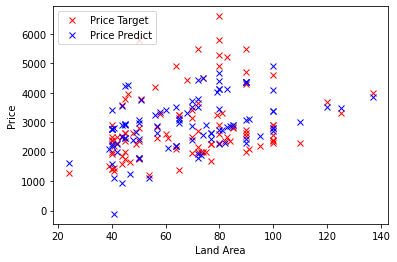

In [ ]:
plt.xlabel('Land Area')
plt.ylabel('Price')
plt.plot(X_test['area'], y_test, 'rx', label='Price Target')
plt.plot(X_test['area'], y_pred1, 'bx', label='Price Predict')
plt.legend(loc='upper left')
# plt.savefig('dien_tich_chua_chuan_hoa')
plt.show()

In [ ]:
loss_15 = [x for x in loss_15 if np.isnan(x) == False]
len(loss_15)

15000

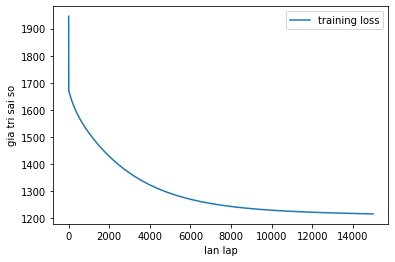

In [ ]:
iter_range = range(15000)

plt.plot(iter_range, loss_15, label='training loss')

plt.xlabel('lan lap')
plt.ylabel('gia tri sai so')
plt.legend(loc='upper right')

plt.savefig('loss_training_iter15000')
plt.show()

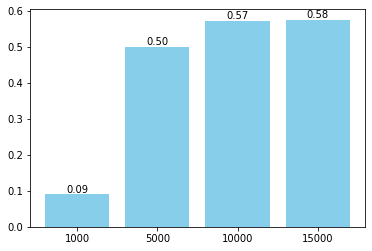

In [ ]:
iter = ['1000', '5000', '10000', '15000']
r = [0.09, 0.5, 0.573, 0.576]


plt.bar(iter,r,color='skyblue')

for x, y in zip(iter, r):
  plt.text(x, y, '%.2f'%y, ha = 'center', va= 'bottom')

plt.savefig('barR')
plt.show()

In [ ]:
data_test_house = pd.read_csv('data/test_house.csv')
data_test_house

area  floors  location  to center       price
0   65.0     2.0         1        4.4  3250000000
1   50.0     2.0         2        7.0  2350000000
2   57.0     2.0         1        7.0  2850000000
3   57.0     2.0         2        4.7  2450000000
4   80.0     2.0         1        6.0  2600000000
..   ...     ...       ...        ...         ...
57  90.0     2.0         1        0.0  4290000000
58  45.0     2.0         2        0.0  2650000000
59  60.0     2.0         2        0.0  2590000000
60  72.0     3.0         1        0.0  5490000000
61  45.0     2.0         1        0.0  1990000000

[62 rows x 5 columns]

In [ ]:
process_price(data_test_house)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
X_test_house = data_test_house[['area', 'floors', 'location', 'to center']]
y_test_house = data_test_house.price

In [ ]:
pred_house = predict(X_test_house, a0, a1, a2, a3, a4)

In [ ]:
rmse_house = Rmse(pred_house, y_test_house)
rmse_house

861.4726075503016

In [ ]:
r2_house = R2(pred_house, y_test_house)
r2_house

0.554458371516217

In [ ]:
r2corr_house = R2_Correction(pred_house, y_test_house)
r2corr_house

0.5231922923243726

In [ ]:
data_test_land = pd.read_csv('data/test_land.csv')
data_test_land

In [ ]:
process_price(data_test_land)

In [ ]:
X_test_land = data_test_land[['area', 'floors', 'location', 'to center']]
y_test_land = data_test_land.price

In [ ]:
pred_land = predict(X_test_land, a0, a1, a2, a3, a4)

In [ ]:
rmse_land = Rmse(pred_land, y_test_land)
rmse_land

441.5097033051397

In [ ]:
r2_land = R2(pred_land, y_test_land)
r2_land

0.47698243920195527

In [ ]:
r2corr_land = R2_Correction(pred_land, y_test_land)
r2corr_land

0.4135863712264347

In [ ]:
d = pd.read_csv('data/BDSDataset.csv')
process_price(d)
d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


area  floors  home location  to center  price
0     80.0       3              1        0.0   6600
1    120.0       1              1        0.0   6500
2     72.0       3              1        0.0   6500
3     71.0       4              1        5.7   6500
4     71.0       3              1        5.7   6500
..     ...     ...            ...        ...    ...
328   56.0       1              2        4.3   1170
329  100.0       0              0        9.0   1150
330   74.0       0              0       33.0   1150
331   65.0       0              0       11.0   1150
332  150.0       0              0        4.3    650

[333 rows x 5 columns]

In [ ]:
qx = d[['area', 'floors', 'home location', 'to center']]
qy = d.price

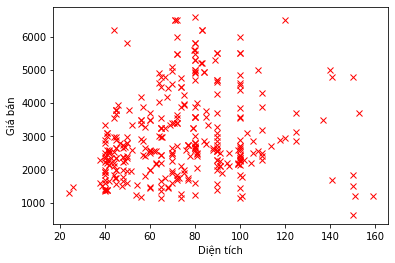

In [ ]:
plt.xlabel('Diện tích')
plt.ylabel('Giá bán')
plt.plot(qx['area'], qy, 'rx')
# plt.plot(X_test['area'], y_pred1, 'bx', label='Price Predict')
plt.savefig('datienxuly111')
plt.show()